![](https://i.stack.imgur.com/6kBru.png)
Source: https://math.stackexchange.com/questions/1203714/manifold-learning-how-should-this-method-be-interpreted

Linear embedding: Rotating, re-orienting, or stretching.

Nonlinear embedding:  Bend, curl, or crumple the paper, it is still a two-dimensional manifold, but the embedding into the three-dimensional space is no longer linear.

![](https://skybluetrades.net/blog/posts/2011/10/30/machine-learning/test-swiss-roll.png)

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

<IPython.core.display.Javascript object>


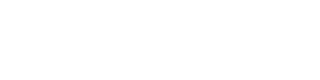

<IPython.core.display.Javascript object>


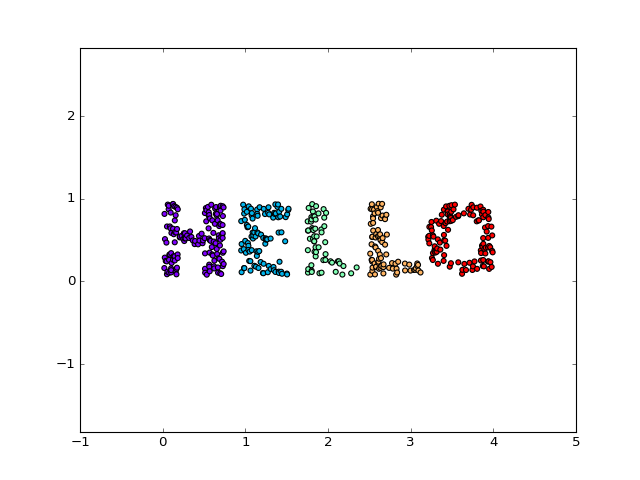

In [3]:
X = make_hello(500)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.figure()
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [4]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(500, 500)

<IPython.core.display.Javascript object>


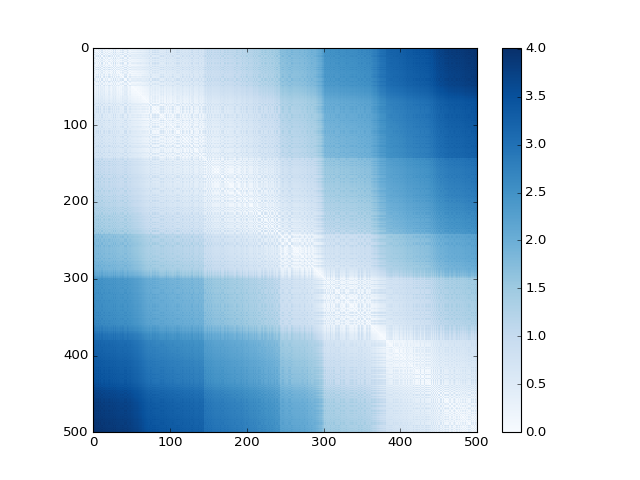

In [5]:
plt.figure()
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

Invariant to rotations and translations

# Multidimensional Scaling (MDS)

We try to minimize a cost funtion:

$$C = \sum_{i\neq j} ({d}'_{i,j} - d_{i,j})^2$$

We pick a random starting point and apply gradient descent.

This technique is called multidimensional scaling (or MDS). If you like, there’s a more physical description of what’s going on. First, we randomly position each point on a plane. Next we connect each pair of points with a spring with the length of the original distance, d∗i,jdi,j∗. Then we let the points move freely and allow physics to take its course!

We don’t reach a cost of zero, of course. Generally, high-dimensional structures can’t be embedded in two dimensions in a way that preserves distances perfectly. We’re demanding the impossible! But, even though we don’t get a perfect answer, we do improve a lot on the original random embedding, and come to a decent visualization. We can see the different classes begin to separate, especially the ones.

http://colah.github.io/posts/2014-10-Visualizing-MNIST/


<IPython.core.display.Javascript object>


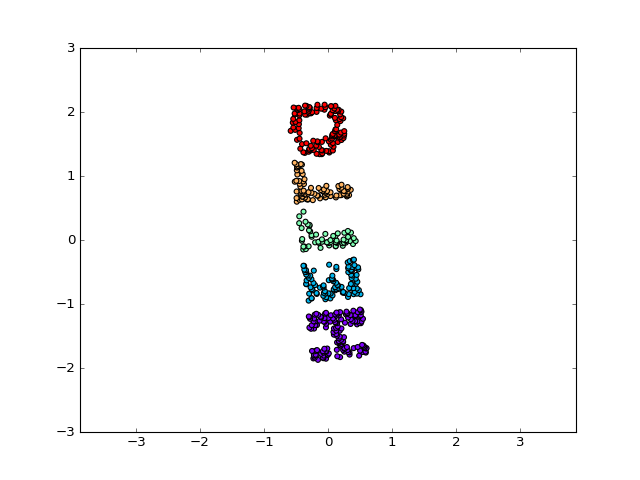

In [6]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.figure()
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

In [7]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(500, 3)

<IPython.core.display.Javascript object>


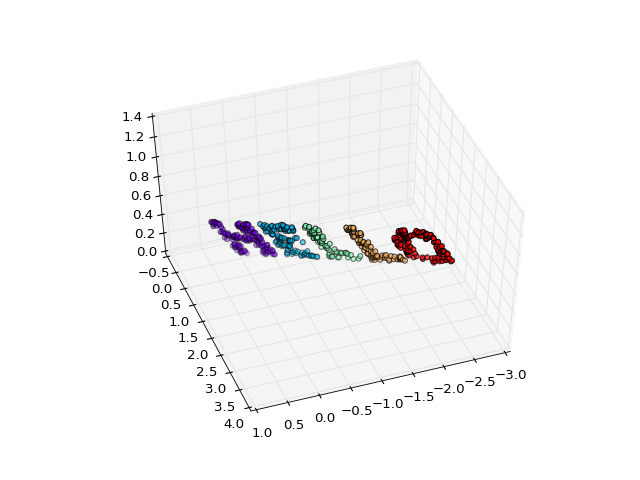

In [8]:
from mpl_toolkits import mplot3d
fig = plt.figure()
# fig, ax = plt.subplots(111)
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

<IPython.core.display.Javascript object>


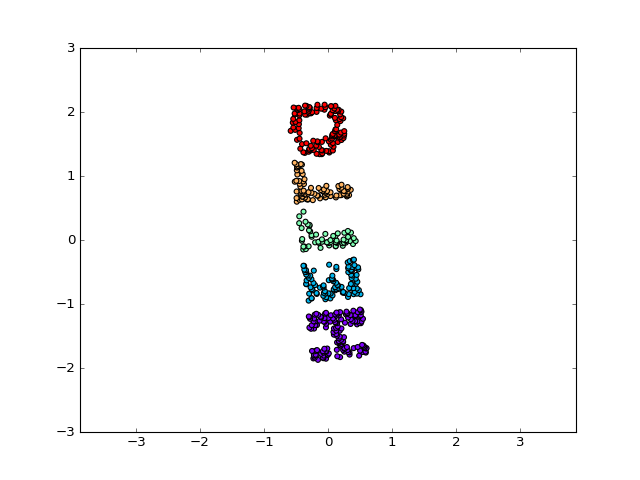

In [9]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.figure()
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

# Nonlinear Embeddings: Where MDS Fails

In [10]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

<IPython.core.display.Javascript object>


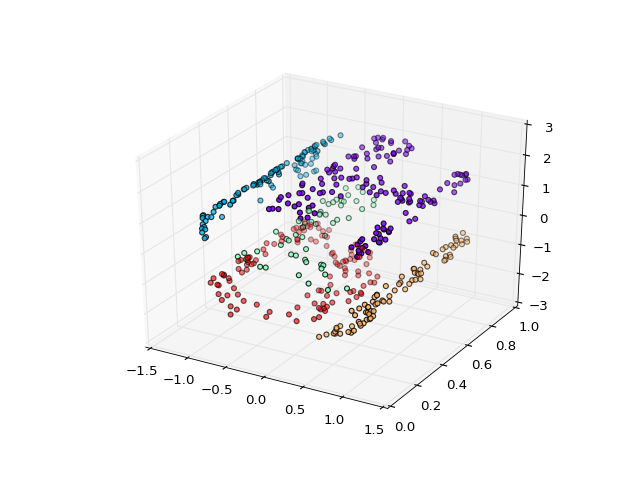

In [11]:
from mpl_toolkits import mplot3d
plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

<IPython.core.display.Javascript object>


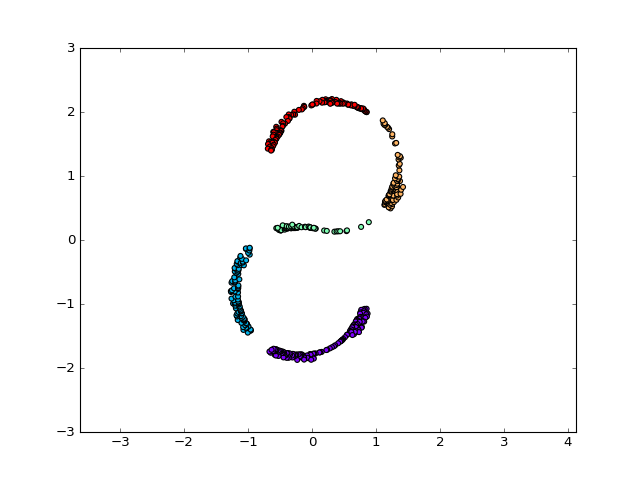

In [12]:
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.figure()
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

<IPython.core.display.Javascript object>


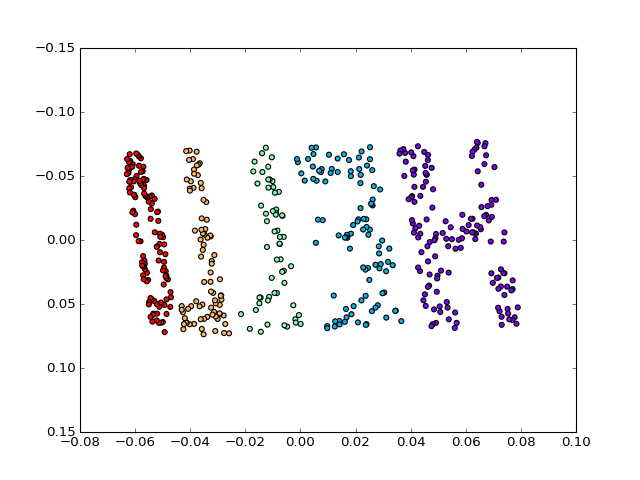

In [14]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=50, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);


![](Figures/links.png)

![](Figures/4-stats.png)

- In manifold learning, the presence of noise in the data can "short-circuit" the manifold and drastically change the embedding. In contrast, PCA naturally filters noise from the most important components.

- The manifold embedding result is generally highly dependent on the number of neighbors chosen, and there is generally no solid quantitative way to choose an optimal number of neighbors. In contrast, PCA does not involve such a choice.

- In manifold learning, the meaning of the embedded dimensions is not always clear. In PCA, the principal components have a very clear meaning.

- In manifold learning the computational expense of manifold methods scales as O[N^2] or O[N^3]. For PCA, there exist randomized approaches that are generally much faster (though see the megaman package for some more scalable implementations of manifold learning).

With all that on the table, the only clear advantage of manifold learning methods over PCA is their ability to preserve nonlinear relationships in the data

- For toy problems such as the S-curve we saw before, locally linear embedding (LLE) and its variants (especially modified LLE), perform very well. This is implemented in sklearn.manifold.LocallyLinearEmbedding.

- For high-dimensional data from real-world sources, LLE often produces poor results, and isometric mapping (IsoMap) seems to generally lead to more meaningful embeddings. This is implemented in sklearn.manifold.Isomap

- For data that is highly clustered, t-distributed stochastic neighbor embedding (t-SNE) seems to work very well, though can be very slow compared to other methods. This is implemented in sklearn.manifold.TSNE.

![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJ4AAAK/CAYAAAAoMwdDAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAAPYQAAD2EBqD+naQAAIABJREFUeJzs3Xm8VfP+x/HXp3meRSVDwyWJRK5IKVQyX2Ok6xeuyEXc%0Am0K45vEm83ANuYiusUxRSjKmJMINFV2laNA8ns/vj+/atVvtvc8+p3POPtX7+XjsR521vmut7xq+%0Aa/is7/e7zN0REREREREREREpamVynQEREREREREREdk2KfAkIiIiIiIiIiLFQoEnEREREREREREp%0AFgo8iYiIiIiIiIhIsVDgSUREREREREREioUCTyIiIiIiIiIiUiwUeBIRERERERERkWKhwJOIiIiI%0AiIiIiBQLBZ5ERERERERERKRYKPAkIrKNMLOOZpZnZtekGNfFzCaY2cIozUuFXMY4M8srijxtb8zs%0AumhbdMh1XoqCme0arc/jxTmNFA8zOzvaF71ynRfZVFGdNwt6ztH5WkREiosCTyIiWUh6YM4zszlm%0AlvL8aWZ7JqWbUdL5BDz6JedpV+AVYHfgceA64Lmimn9RMrMno213YHEtI4eKddvlSKrjrUDBycIy%0Asx3MbKCZ/cfMZkTHzfospmtrZm+Y2SIzW2ZmH5nZKRnSVzezf5rZLDNbZWYzzex2M6uaYZozzeyT%0AaP4LzWykme1X2HUtJkVyPJbU/k6x3BLZ/zlUFPtnWzzniIjIVqhcrjMgIrKVWQvsCHQHXksx/lwg%0A34efYvIJ0AL4LTb8CKAicJm7P1/iuSqYbflB6V5gGPBTrjNSRH4mHG+/x4aX1D7cC7gJyAO+A1YA%0AlTNNYGadgLeAlYTg61LgJOB5M9vZ3QfH0lcBxgP7AKOAZ4H9gL8BHcysg7uviU1zFXADMAt4EKgO%0AnA58aGad3f2jLVjnovQS8BEwdwvnk6syW+z7P4fSnctFRES2SqrxJCJSMB8SHrR7x0eYWVngTGA0%0AsK6E84W7r3L36e6+MDaqUfTvlj5gyhZw94XR/lmV67wUBXdfF63PvBxl4RugA1DT3VsAszMljsrn%0Ao4TA8KHu3sfd/w7sC0wHbjazxrHJrojG3+ru3d39Snc/CrgNOBDoF1tGM+Ba4FtgH3f/u7v3ifJJ%0AtPxSwd2XRvtvaa7zUkglsf9zIsO5XEREZKukwJOISMEk3pQfbWb1YuOOBeoTmrNtxswamNk/oqYd%0A85Ka7dxvZjukSJ9odrarmV1sZt9E08wys2vMzGLpN+mfI9E8kNC0zoBxieYoyX1+mFlLMxuelKcZ%0AZjbYzOpku1HMrJKZ3WpmP5nZSjP70szOzXb6woqa2ww2s++ivP9qZi+YWcsUaQ8zs8fM7FszWxr9%0AJprZeWnmnWdm75pZQzN7yszmJm+7aD/MMLOqZjbEzH6O8vCFmZ2UYn6b9bdiSX0emVlTM3s5apq1%0AzMzeMbN90uSto5mNj9L9ZmbPmdnO2TZ7MrNa0bqMiA3fN+kYaRIbN87MlptZ+Xjek7cZIRhgtrHJ%0Aaco+nQqyvqm4+3x3n+Duy7OcpDPQBHjG3b9Mms9S4GZCrcA/x6Y5h1Ar5sbY8BuAZYQajsl6A2WB%0Am9x9WdIyphJqu7Uws/bZZDbp+KppZg9Hx99KM5tsZqenmaZKdI75Jkq7wMxeM7ODU6T9s6Xo4ynp%0AuK9vZkOjMrXCwnmrYzwt+exvM+tkZm8mlY9fomM3ZbnLVgnt/5SsgOfmpOmON7Mx0TGfOE9ebrGm%0A25a5v75ClX0zO8PMPo/25Rwzu9vMKmVIf0g0zyUWmiW+YGZN06TN+hoSO67vs3DNWJs4Ds1sJwvn%0A0+lRXheZ2ddm9qCZVU+XXxERKd3U1E5EpOAeB/oAZwHJTTN6AwsJ/Sml0oFQQ2IM8DGh2d5+wAVA%0AFzNrE6t9kGjCcmc07WuEZiInEIJJ5YFBGfK5OEp3GNARGEpo/kPi3+gheBThevAf4EegHXAJIbh2%0AUH5v3aOHrJHA4cBU4BmgLvBPYBzF1AzHQmDkPaAh8DbwMiHwdxLQ1UKzpolJk1wBNCVs+/8BtYBu%0AwMNm9oeo9kNcXUJzpAWEwEElYEk0zgn74O1oXi8AVQjNqp43s27uPjppXpmaJO0e5esr4LEonycA%0A75pZC3f/NWm9uxCOhXWEIOhcoBMwAViUYRkbM+K+2MymAIeambl7YppOSck6ATOiZVYE/ghMcPe1%0AGWZ9HfB/wC5sDHgCTCns+hahwwjb5p0U40ZF/3YkCjKZWXPCsfWWu69MTuzuK8zsA0K5beTuPydN%0AT4ZlnB2lmZBFfh2oQKhBWRV4Kvr3VOBZM6vr7vcnEkf7aCzQFphEODftCJxGKA+nu/uLKZaRSq0o%0Aj4uj5dYnHNdvmdn+7v51lO46MuxvMzsaGEE4Ll8lHKs7EGoZ9aRka4AdRgH2fz4KfG42s1sI56D/%0AAS8Sas4eCtxBqD13Wn4L3YKy/1egK2EfjCGc9y4mnN/OSpG+HXAl8CZwD9ASOBFoH10TZiXlqaDX%0AECcE+d4lHM+vRuszz8wqE2oV70I4r75EKAO7E46XOwiBYBER2dq4u3766aeffvn8gF0JfYm8Ef09%0AFZiaNH5HYA0wOPp7JTAjNo96QJUU8+4ZzXtgbPgT0fDvgfpJw+sSAlyLgXJJwztG6a+JzedaQvOS%0ADrHhFs17PXBEbNxt0bwejQ0fC6yPDTs7SvsaYEnDWwKrovlfE1/vNNv5iSj9gVmk/SDa5vG8NyM8%0A1E2J78MU8yhDeGhaA+wcG5cX5eXR5PVKGj8zGv9ibD90Tj5WMu2HpONqPfC3WPrro+H9Y/mdRXhQ%0AaxdL/2RiXllu6zuj+R+QNOxVQhOmWcDTScM7RfO+KkXeH8/vGCns+hawjH6Tad2B4dH890szfgkw%0AK+nv7lFeh6RJf080v8OShs0Hfk+Tvk00vyezXJ/E8fVu7PhqGC1nBdAgafg10fyHxuazL6EcLgCq%0AJg3/czT/XmmO+3tiw3tH4x4owP5+IZrX3inG1S7Mfi6p/Z/Psgp6bj4ySv86UCk2rweifJ2YNGyz%0AczmFKPuEc05elKdmScMrEpqDrgV2SrHc9cC5sXn9JRr3atKwwlxDEsf160DF2LhjomnuTLHNqwDl%0Ai/KY0U8//fTTr+R+amonIlI4jwMtzaxt9PfZhCY2aT8T7+6/ufuKFKOeITz0HJFqMuB6d5+fNJ8F%0AhABBdWCPQuU+OITQ9OQN37RmDoQgwELgDDPLr3ZsryifV7n7hjfu7j4N+PcW5C8tM2tNeKs+NJ53%0Ad/+eECxqZWZ7JQ3/MT4fd88DHiLsu07x8YSA1BXJ65VCP3ff0KeXu79LeOvfNv0km5np7nfGhj1G%0AeLBLnk97Qm2AEb55J9VXU7CO7cdG8+8MEDX36RANH8fmtZ88Gl4Usl3folQz+jfeGXrCkqQ02aZP%0ATpf4f0HSZ+PK2PE1BxhCCB4kN7nrRTheByZP7O5fEGo71iLUyMnGcmBAbNhQQtCjMPtns37N3H1R%0AIeazJQq6//NTkHPzRVH6833zPt4S27lHPsvbkrJ/d3ReTORzNaEGZxlg/xTpp7v7v2LDHiV04n60%0AmdWNhm3JNaR/lI9UUh0vKzxzbUsRESnFFHgSESmcpwkPYYlOxs8GPvekvkNSMbM/mdkoM5sf9WuR%0AeLtcg1CTIZXJKYb9L/q3VoFzvlHi8+7vxUd46DflM0LTsvyCW/sAy6MH3Lj32dj8pigdFP27k5ld%0AG/8Be0bjE/9iZtUs9H8zxUL/TnnR9k80P0q1/Wd65qaGi9091VfqEk35shVvipaYB7H57Bv9+0E8%0Asbv/j4J9MW884dhLBJjaEB683yUEn3Yys8S+70yoxfdJAeafSbbru71b5+4fpxieKFf7AUR93zQB%0Avo8CU3GJIGPrLJc7PR4kd/f1wDwKtn+ei/79xMzuNbMTkoIW24Jsz81/JATzzklxrrqMULb2JLPC%0Aln0vQD4TUi3Do+GWlJfCXkNWRS8m4sYTmg8OsNA3WR8za5EinYiIbGXUx5OISCG4+29mNhI43cxe%0AINxY9800jZldTuijYj6hedf/CA8cEPp+qphm0iUphiVqQJQtYNaT1SA8lKT7KtncpHSZ1CT9Q09x%0AffEs0Wlt9+iXTlUACx1iv0d48P6c0G/NAsJ23I3Q7CjV9s8v/+lqT6yjYC93NtvH7r4+6qM4eR8n%0A9tn8ePrIPML65Mvdl5rZZOAQC1/8SjSnG0vYbgZ0MrOfCLVcxiXXvNlC2a5vUUrsq3S1WmoQamgU%0AJH1yusT/C5I+P7+lGZ44LhPLqhEbHpdtWU5Idc6BcFxnvX/c/QUzO4EQXDkfuBDAzMYCl6cJVheX%0Agu7/bGR7bq4T/b1ZZ+FJquSzrC0p+wW9hqQ7jlIdd4W5hqRcB3dfYmZ/JNSWOhY4itCN4GzClyUf%0ATLMcEREp5RR4EhEpvMeAPxH611gJPJsuYfRgfzUwB9g3apKRPP6K4stmWksIwYUd04zfKSldJr8T%0AOgxOJd28t1QiT3919weySH884e38o+5+fvIIMzuNUGMtlXw76i5hiX1WP834gm7vscABhM6NOwLT%0AomNzgZnNJASjvid0ljy2UDkuPb6L/m1OCD5uYGY7AtXYtEZXcvpUmsfSJf5/kJnVT26ClSF9fuJf%0AzkxI7OdEMGVJbHhctmW5yLn7SGCkmVUlNM36E+FrgG+a2Z7uXlJ5Kuj+L0pLgDx3T1dus51HUZb9%0ATNLNK9VxV5hrSNrzalR7qzeAha9cdiF0hH6fmS109+czZ11EREojNbUTESm8UcDPhCZaL7t7ppoM%0A9QhviT9KEXRqC1Qutlyml3j4Oiw+wsyqEAISK4H/5jOfL4CqUb9LcR0onuBN4gGxXZbpm0b5GJFi%0AXHHlsTgkaogcEh9hZo0IfcAURKIJVlfCF7beTRr3LuHY6EzB+ndaH+WnOJpYbon3COvaJcW4btG/%0A4xID3P07QqD4kOhrWxtE5eMQQlPMn5NGJZocpVuGk6JZUgblzCzVMd4h+vfzKK9LCV8gbGZmDVKk%0AT/TRlaqJ45bKan+7+3J3f9vd+xCC9TsSmqCVlALt/yL2CVDXzJpuwTyKuuxnkmoZBhxMOI4SeSmq%0Aa0hK7j416gvuDMK+O64w8xERkdxT4ElEpJCijqmPJ3xm+sp8ks8n3IC3SX6INbPawL3FlsnMPgB+%0AAI4ys8Nj4wYRvtD0bBbNq/5NeCi4KeqgGgAza0X4Yl+Rc/eJhIe5HmZ2any8BR2SBv0Y5bF9LF1H%0AQu2LrcUEQrPGY6MmKclupODN1CYQmtxcQKjxkRx4GkuoyXYOoX+aiVnOM9FcqXEB81LcxhCCM2eY%0AWaKPGsysJqH8rmbzzvD/RegoelBs+DWE5oiPxIYnvsp4lZltaF4UBWVPB7529wkFzPfNUVPRxLx2%0AJnyqfhUb+1CC0Pl3BeCW5ImjWiN/Jnxp7ZUCLjsbafe3mR2afE5Ikqghsyop7bVRv2uZmqNticLs%0A/6JyD+H887iZ1YmPNLMdzSy/Pp6Kuuxn8gcz+0ts2F+APwCvJb08KaprCABmtpeZparRlag5tVmn%0A4yIisnVQUzsRkS3g7pNJ3XFrPJ2b2QOEvk6+iPqHqkHow2IWoWZFiYrydDbwFvCGmf2HEKBpR3iD%0A/R2xL2SlMZTwRrob8LmZvUl44DidUCvs2AJmzYBrzOzXNONvcffphK9AvQs8Z2aXEvbDSsKb/3aE%0AWmaJflNGErZz/ygg9hWhX66jgZeBUwqYx5xw9zwz60P4ctZYM3ue0I9KR0LNuy+AVgWY33Izm0jY%0AXuvZtDZOomndDsBbUefS2XgXOBl4KToWVgFfuPtr2eYrW2b2JBtrqzWIhj2RlCRxrCT6kDqXcLyP%0AN7PngKXASYRj5vIUHcXfTgguX2FmbQjH2P7AkYTA55DkxO7+nZldB9xAKOcvEsr5aVE+zyvgKs4l%0ABLimRueMaoRjtQ6hmencpLS3E47nsyx8zXEMIcBzKiEocV7U4XOyoqiVlml/3wM0NLMJhPLnhOBv%0AW+AjQjAloUw0Put+xEpg/xcJdx9lZjcQmlt/b2ZvEc61dYFmhNqGVwHfZphHkZb9SLr9PwoYYmbd%0AgWnA3sAxhBcolyblqaiuIQlHAneY2QfAdEI/fE0INZ1WAvcXYF4iIlKKKPAkIpI9p2BNsuJpBxBu%0ApM8m1DCZBzwD/INwc59q3gVtAlagPLr7B2Z2EKEGx5GE5oBzgMHATWm+6LbJ/KOHj+OAa4EzCf1x%0A/EColfED4YGloNvtqAzjnyB8dWuWme1HCOadQNiu6wkPY+8B/0nK43Iz60To3L0DUX9GhIDZr4QH%0A53ges9mWmcZnu86ZlrPZOHd/y8y6EDrgPYXwQDaaEGB4k4L34zOW8JXAycn97bj7XDObTugTJ13/%0ATqny/iiwKyHw2J9wrzEUeC3DNJnml0mvFOl7Jf3/CcIDbJi5+zgza08oc6cS+q76Evi7u7+wWWbc%0AV0Q1564jBCgOIxxfdwDXp/ocvLvfHPWPdSnQB1hDOB4HFaIz7TWEcnkrofZgLeAboK+7D48td3V0%0AjF9BCHRdCqwg7Lub3f2jFPNPd84pyHGdaX/fTOjTaX9CE7e1RAFg4MHoS2kJexM6t99kvfJRrPs/%0AHwU6N7v7tWb2HuH82JmwLxcAMwnn32dSzL+4y366/f8RoRbVjcBfCefVl4Ar3H1WLE9bfA1JMopw%0ALHUg1CSuRmjOPgy4w93TBuZERKR0s02v+SIiIrI1MrNqhGDmVHfPtu8rKaWi4JW7e5Nc56UkmNk8%0A4F1375HrvGxtVPZFRKS0Ux9PIiIiWxEzqxI9aCYPKwPcCVQiNB0U2WpE/RvVI9Y/lWxKZV9ERLZW%0AqvEkIiKyFYk6Rp5AaJYyg9D59aHAXoRmQwe5+8rc5VCKwvZW40nyp7IvIiJbKwWeREREtiJmVg+4%0AjdBP1Y6EPnV+ItR2uDm5nybZekWBpzx3b5rrvEjpoLIvIiJbKwWeRERERERERESkWKiPJxERERER%0AERERKRYKPImIiIiIiIiISLFQ4ElERERERERERIqFAk8iIiIiIiIiIlIsFHgSEREREREREZFiocCT%0AiIiIiIiIiIgUCwWeRERERERERESkWCjwJCIiIiIiIiIixUKBJxERERERERERKRYKPImIiIiIiIiI%0ASLFQ4ElERERERERERIqFAk8iIiIiIiIiIlIsFHgSEREREREREZFiocCTiIiIiIiIiIgUCwWeRERE%0ARERERESkWCjwJCIiIiIiIiIixUKBJxERERERERERKRYKPImIiIiIiIiISLFQ4ElERERERERERIqF%0AAk8iIiIiIiIiIlIsFHgSEREREREREZFiocCTiIiIiIiIiIgUCwWeRERERERERESkWCjwJCKSgZmd%0AamYLzKxKrvNS2pnZ+Wb2o5mVz3VeRDIxs7Jm9l8z65frvJR2ZlbRzOaa2dm5zouUHma2q5nlmVmv%0AXOcl18zsATMblet85IqZdTWzpWZWN9d52R5E5e6apL/PjobtEkv3dzP7wczWmdnkaNgsM3u8CPOy%0AVZ4HzOxAM1ttZo1znZfSrijLtwJPIlKqmNmfo4tYmwxpEhe6y/KZ16woXarfG1nkpQxwHTDE3VfE%0Axh1sZhPMbHn0UDbEzKpmuY6nmtm/zWx6lJd3s5zuqij91GzS58CTQAXg/BznQ4pZfuXUzD7KUPaS%0Af/2j9BXM7G9m9rmZLTGzRWb2ZfRA1yTNMi6L5jG2EKtwNlAHeDg2z0pmdpeZzYnK9gdm1jGbGZpZ%0AFzN7MirXy83sOzN70Mzqp0lf0cyuiQJgK6PzyAgz26EQ61Ns3H01MAS4xszK5To/24ssyti4UnAt%0A8FwsNCpnS/NJU5B7iYznp3yWsztwDnBTinHnmNnXUfmebmYXZbN+KeZzZpSfJYWZvri5+yjge2Bg%0ArvNSUpKOrzwzOzhNmtnR+BHFnB0nVhbNrAtwG/A+4Xp3ZTQqL562JJhZx2hb/CmfdHlmdk8+acZl%0AKLNfZ5mlG4Fn3H12bN57mtlbUaBlgZk9ZWb1spmhmQ2M7n3mJ5X5wammj+7nXzWzXywWSCxtirJ8%0A6wZCREqjorooOvA5cCdgsXFzspj+OOAPwKPJA82sNTAa+BroB+wM/B1oBhydxXwvANoAEwkPv/ky%0As0aEk/6ybNLngruvNrOhwGXAfbnOjxS7TOX0GiA5gHIw4bi/FpiRNPzz6N/XgUOBZ4GHgIpAC+BY%0AYFxsmoQzgJnAoWa2s7v/rwB5vxz4dzygDAwDugH/BGYBvYFRZtbe3T/LZ553EQKv/wF+AJoDFwFH%0Am1lrd1+YSGhmFYBRwH6E88s0oDZwEFAD+LUA61IS/gXcAJwMPJfjvGxPMpWxnAR9Nizc/Uczqwys%0AzcXiyW79s91GzwKpXkZ9nmJY3CXADHcfnzzQzM4HHiScD+4inN/uMbPK7n5HlvnCwgut2yjF1/7I%0Aw8AdZnatuy/PdWZK0ErCtejD5IHRC4tGwKoSyMNTwDB3X5M0rBOwHjjH3dcnDd+DEHzKhaK8t58N%0ADGDze/vf85s4uoc/gnC9TR7eiBCoWxTNuzrh3n5vMzvQ3dflM+v9CeeMYcBSwj3MX4Du0T3AyqS0%0ANwBzgclA1/zyXAoUSflW4ElEtnU/u/uwQk57NvCBu8+NDb8ZWAh0TJyAzexH4BEzO8LdR+cz357u%0A/nM03ZdZ5uUu4CPCebs0V2cfDvQ3s8PcfVyuMyO54e7vJP9tZkYIPL3t7p/GxrUHDgf6ufuQ2Li+%0AhEAMseEtCEGbY4GngR5AVg9zZtYO2JMQVEoe3gE4Hujr7g9Gw54GvgFuJdyoZnKBu0+IzfNdQoCp%0AD+G8kTAAOBA4yN1zXWslX+7+W1Sz7GwUeJJI7EF3azbZ3Z8t6ERRDcAzgAdiwysRalSMdPfTosGP%0AmVlZYJCZPeLu+T4gRwYBS4CxhPNTafUicC9wCqH28/biDeAUM7vY3ZMDOmcAnwFZ1ZbZEu7uQLws%0A7gisjAWdcPdcBIoT4kGiLfH7Ftzb/x/wY/xeBLgKqAy0TrpHnwi8Q7j2/SvTTN395PgwM/uYEHw+%0AlnB/nLCbu/9koflaaXvRlEqRlG81tRMRScHMKhJqPoyODa9OeAD9dyzq/xSwHDg1v3knLmgFyEsH%0A4E/ApQWcbkczeyKq7r3KQvOhV2zzfgCOMrPxZrbMQjOn18xsrxTz28PMhkfViFeY2bdmdmNs3SYT%0AgnKl+QZZSpemhDeYH8ZHuHueuy9OMc2ZwHzgTeDl6O9snQAsc/ePY8NPJrydfiJp+SsJN1mH5Vfd%0APh50ioa9QzgvtEgMix5W+wLPuftUC/1NVSpA/jGzXmY2OWoOsNjMvjCzC2Jp6pjZfVH5Xx1V+9+s%0AebKZlbHQzPHLqHnAPDN73cz2iSV9B+hs6u+uVDOznmb2WXSOXmBmw8xs51iaZmb2ooXmnSujY2RY%0AdH1LpDnSzN630Ox1aXS+vylp/GZ9u5hZq+ia84NtbD76mJnViS3/umjaphaazS2KjuPHC1oWcuxQ%0AwougMbHhnQi1mR+IDb8fqEZ2NaMxs+aE6/5lQH61LZKnq2Zmd5vZzOjaP8/M3o5qeiSn+6OFZkWL%0ALTQPHmcpmo2ZWcNoP/4czW+GhWbQGyowuPuvwFS2r2u/E2q31AWOTAy00M/lyYSadJsFW8ysioUm%0A3T9F2/NbM7s8RboKFppqzY/uzV6xUCsnnm6TPp7MLA/4M1A1Gr4+UU4tRR9PZlYzOl4S+fnOzPqb%0AmaVI92R0vCwysyeAWgXearl3PJCqi4s/Aa8l36O7+xhgOlnc26fxI+EY2GQ7uftPhZzfVl2+VeNJ%0ARLZ15S11h3jL3T1TFej9Cc1mJseGtyKcOyclD3T3tWY2hVALo8hY6GfqHuBRd58Wuw/Iz0uEB957%0ACBe/+oSbo12An6L5n0V4sH4L6A9UIdRMed/M9ktcHKOH0PeB1YQqtz8SAgbHAFfHljsZOKSAqyrb%0Ar8SNWU8zmxR7a5xOD2C4u7uZDQPONrOW7j4ti2nbAV+kGN4a+DrFeeHTKH/7svkDZkZmVhOoBPyW%0ANHhfQjPEadEDwJmE89QU4OJUAazYPI8llNk3CWWxDNAyWq9ETa1qwATCw+9DwM9AB+BOM6vn7lcm%0AzfIZ4DTg1Wh+FYCOQFvCjWbCJKAsoXlCVv3SSZGomeIaZsBmH3Ews6uA6wm10h4lHGcXA+9F5/Ml%0A0UPx29H09wC/EJoEHUN4OFpq4cXDSGAKocbNakJT8pR92SQ5EtgdeDyab0tCn397EY7PhESTm+GE%0AZrQDCM3PzwXmUfJ9BVVJc5+wOF5jJKYdG5v0J0vcB0yKDZ9EaOa0HyEokZ+7gTHu/paZnZZv6o0e%0AJjxE30uosVkXaE+4H5gCYGadCbV1PiP0ZZlHqAnyriU1LTazBoRuAWpE8/0v4Xg5mXC/kNzv1CS2%0Ar8AThCbZHxOuSYkO5rsTttdzhKaYcSMJ59h/Ea5FXQnNmBq6e3IA6jFCzalnCDXeOxOapcebrMWb%0AnvYklLu2hP7HjI0vduJ9QVUGxgMNCNeK2YRyfguwEyHomTAiGvcg8C1wIjA0RX5KQtk0ZXZliib0%0AG5hZQ8I98OQUw+sTykPcp8BR2WYsylc5QlcdtxKCxuOynT4LW2/5dnf99NNPv1LzI7ylWQ+0yZBm%0A1+gkelk+85oZpYv/1gP985m2d5Rur9jwk6Lhh6SY5nlC076CrO+XwLsZxvcl1CCqE/09FpiaxXxr%0A5reNgKrRvB+MDd+B0Mb9oaRh7wGLgUZZLPshQo2SnB9P+hXPL5tyGkt/ZpT+wBTjEjfF6wkBkqcJ%0AN80pjzVCUDMPODj6uwzhIffmLPMyH3gqxfDvCE1j4sP3i5Z3ViG2043Rev0xadjp0fx+jcr/mYRq%0A/N8Takf9IZ95Pgj8ksVyFwGNY8P/SajVtUP091FRXvLddsBuUdqLcn38bQ+/qIylun4l/6Ympd+F%0A0N/SFbH57EVohjMg+nvfaNoTMyz7kui4rZ0hTeI63CtpWMUU6U4jds0k9PWWBzwSS/siMD+LbfME%0AsCSL7ZcPW80qAAAgAElEQVTtvcT6FNs25fkqNv1TqfJLeCBck2aaeYROjfNbx6MJAb89sl3npGkX%0AAffkk+a/wOuxYRUJ/dO9lTRsaHRc7ZfFcgdE261ecZePXP+Sjy/gQsL9UcVo3PPA6Oj/M4ERSdMd%0AHx1fA2LzG04IUOwe/b1PlO6eWLqno+VekyIvuyQNS3m8RPl5POnvqwnBhSaxdDdH541GsXxflpTG%0ACPeG65PPA2m2V8do+j/lk26zdU6RZmyK8poosw/kM23nKG332PD9o+Fnppjmtmje5bM4LnaM5elH%0A4KQM6etG6a7Jb95J02y15VtN7URkW/cxof+YI5J+RxKqR2eSeJOyKDa8cvTv6hTTrEoav8Wi5gn/%0AAK73pI6Js7SScNNwmJmlqwp9JCFA9ZyZ1U38CG+vPiE0F8BCE6NDgcc8u2aCi4DKW1mTCckRD3c0%0AnQhv5ZYQ3hw/AMy28PXH+NcizwR+cvcPo+nzCH0o9MhykbXZvFxDKLvpynVifNbM7EjgCmCou3+S%0ANKpa9G8VoLO7P+PuTwJdCLWN/pbPrBcTasF0zpDmZEKtpBWxsj06Wkb7KN1JhPPEZl/kSiGxzYq9%0AzxLZwAk1UI9I8Yv3DXYS4UHwP7F9Pp8QVO0UpUv0LdQtqu2QSqJ564nx5jYZMxu+gAhs+GpjXcK1%0AxAgP6PF1ezg27H2gblRjryQ9wubb90jCB0QyqUv6c0m6/q/yvU+IaqX9k/BS6L/55CGVxcAfo9oM%0AqebfmvDxg2GxY6U6oVZnhyidEQIOI9w9m47Wt9dzxHDC+fyY6Ng9hlBLKZWjCAGme2PD7yK8REnU%0ArDmaUEbi6e6maPtKOplQ7n6PHQtjCLV2OkTpuhMCFA8lJoyu3fcWcX6yNZPU9/Z35zNd4h63oPf2%0AyWkyWRjl5RhCbdHfCOWqKG215VtN7URkW/ebu4/dgunjF9TEVykqpkhbKWl8UbgJWEAhvhDn7mvM%0A7ArCF/3mWejg8DVCTY95UbLmhPVLtX2cjQ8oic/ZZ9OMCTZus1xUv5atUPTAegNwQ3Qz1ZHwxcgz%0ACWXqL7Chf6RTgNfMrGnSLD4BLoyqkGdsqhZJdaO8kvTlOjE+K2bWivAw8hnhbXh8OQBjPfSbAIC7%0AzzCzT8m/OdO9hCYO75jZ/wjNpp73TT9q0IxQvk9MMb0TmhRAKNs/eXZfqVG5zo2JHvrO24SZLWLT%0AD000Izy4fp9iHhs6H3b3WWZ2F6EJTU8ze5/QhOZpd080q3ie0ETnUeBWMxtDaLr9QvSwmZKZ1SYE%0AkE9j4zGWWH7NFJPE+zlJPNjUpmS/4vaduxe2+Wi6c0mFNOmzuU+4jLBvrytknvoTmuPONrNJhCY3%0AT7n7zGh88+jfp9JMnxc1E65IaIKja38GHj6+MJrQLK4qoRy+kCb5rsCcFOfcb5LGQ6jBmEeooZKs%0AMIHITJoTupBI1cF18rViF2Cub96Mrajzk63lJXxvn5wmLQ+dtyfOJW9Y+MDIB2Y2391TfTmzMLba%0A8q3Ak4hIaguif2sDc5KGzyWcfFO9aWgQS1toZtYMOI/Q5KFR9NLZCBfA8ma2K6Eadaq3rQC4+xAz%0AG0HoTLkroe+PgWbWyd2/INwcOaE/gHkpZpF1Z6YxtYEVyW+/RbLl4SuSz5nZy4R+JHoQBZ4IHf7X%0ABXoRmhdsMikhUJVf4GkR4RiNm0v6cu1kWbbNbHdCn2m/AMf45n1GJeaTqszNJzRpS8vd50SBraMI%0A2+Mo4BwLX8rqk1RD5XXSv/39Nt8V2Vxim/2WMZXkShnCg2o3Un8ufUMgx93/bmZPEt52dyH09TTA%0AzA5y9znRMdvBzDoRal50IwSTxphZlwzBp/8Q+gC7ndB3zbIoX6NI/UGjdP0n5aIGRWEsIHydMm4u%0AoQ+aeu6+obxENZnqkuFcYmY1CF/Xup9Qs7EmYXtUC6NtV8L1Ne2XsNz9P2Y2nhB47kKoRXmFmZ3o%0A7sn74nJS93cHYd+legjPZHs+RzxLCNQ2AN5096U5zk+2yhA+HHEbqcvd9JLNTrFbQFjP+D1A4uvV%0A6e4BFnohvgjo7h+Z2VzCvUmRBJ625vKtwJOISGrfEi5Ou7Pp24CvCAGZA0h6oxXdULYmvCkuCo2i%0A5d/D5lWtIXTIOoRNO37cTPQGZDAwOKoh8gXhYtSL8CbNgF/zeds7I/p37yzzvjsb396JFIq7rzaz%0Ar4DuZlYjqo3Rk9D56aVsfpN8OuGz1n9190xB028Jx2jcFOBcM6sUCxYdRAg8pbuB28DM6hNqIOUB%0AXdx9QYpkUwgP3Jt9nQhoSBafVo5ugEcAI6JA02PAeWZ2fRSYmgVUyaIWxw/AwWZWzd3zq2GS2GYq%0A26VT4nw+y91T1XrahIeO+KcBN5vZQYR+1voA1ySlGUuoEfs3MxtI6DusEyk6l4+adHcGBrl78tfv%0Amm3JSpVy3wJnmFn1WKBhCmFfHEAIQie0JTwUTskwz9qEIFN/QlPduJnAK4TOhdOKajY/BDwUNZf/%0AnBDQGsXGWjRLM50jzOxXQvPnglz7f0tz3tvWvUxoOvpHQpA2nR+Bw82saqzWU+LLp7OS0pUhfMTl%0Au6R0exZJbjf6AaiWRe2hH4m+ahqr9VTU+SluiZcum9wDRNfNXwllNu5AMpfZ/FQidY3PQttay7f6%0AeBIRSW0SoWnCJheh6OF3NKGJQnLfM70IVayHJwaYWTkz28PMdirE8r8ivM04kVBjKfGbRrgBOIHw%0AsJmSmVU2s/jbjJnAUja+5RhFuOhcaUmfTU2aRz0I1cgJXz3pbWaNs8h7GzZ+QUUko6iMNEwxvC7h%0AQW2eh69xVQOOBV5195fd/aXkH6HT7Trk//WZj4DWKfqueYFwg9g7KQ9VCGX7vVjNhQZRvi1pWHVC%0AmaoDdHX32akWHtVSHE3of223pOn3JZxv3s6UeYt9mj6qffJV9GeibA+P5t+BGDOrnZTvFwlNgq7K%0AtMzIAYSg+yf5JZSceIkQ8Lw21cjEcWNm1c2sbGz0tGjailGaVDUCvyAEU9K9JU/UXoo/W/Rj2216%0A9RFhm+wfG/4uoa+XC2LDLyB8QOD1xAAzqxGdS2pEg+YTru/xa/9YQlOf4wlfHEvJzMokzQvYcA2f%0Aw8Z9N4nwcPo327wPveRrvxOCXMeaWbyPrlT2J2yT7U4UROpDaB45MkPSNwgVPy6KDe9HKIOJQOWb%0AhGPr4li6Syna8jQcaGdmXeIjzKymhS8rQ8h3eZKO6WjcX4s4P8XK3ecQXl6lCjC9SOina8NLITM7%0AnPB1uuHJCaMy2zjp7yqWos88MzuJEEyeWBT539rLt2o8iUhpZISmI6keIJObjhyR6kQPvOzuiU5B%0AG5nZmSnSLHP3V9NlIKpt8Tahk8DrYqOvAj4AxpvZI0BjQs2jUe7+TlK6RoTaAU+y6cPsoYTO/Yzw%0ABbkqFj6DDTDe3d+P3iiMiOfLzPqF7HmmGxsIF8oxZjac0EHqOsIb0vpEHau7+1Izu4DQDnyymT1H%0AqG2xC6F5xQQ23vRcTOiAcnK0zjMJbz+6u3vi09GY2f6EB+9X8smfbP0yltMUfVikaz5zAPCYmb1O%0AKFeLCMfgnwnl4/wo3UmEzj3THfvjCZ1unpkhDcCrhKrph5DULM/dx5vZSOAuM9uZ8Ob5HMInpU+J%0AzWMwcGo0bn407D+EL4Y9BOxnZvslpf/d3V9L+vsKQnB2vJndS7gfu5Rw83hHhrwDPB0FlccRvgLY%0AhPAQ80lSHw83E8rwO2b2OOFtbXXCl5IS54EVHj7T/h+gv5ntRWhyUY7Qx9Zr7p4c3D6C0C9VNv1B%0ASdEoSMfeM8zsakINpt0J5+ClhOPjBEJtjH8SaiXdF+336YT93YtwjUjU4r0mClq+TnjRsSPhgfMn%0A0jRlja4n4wnHUgXCsdmF0HS0OJrOVUi6biZb6O4PRv/P9l5i/zT3CT+4+8cZ8jCBjZ0Jj0sMdPdV%0AZjaIsJ2HEwLSHQh9AF3p7ouT5nEi4QtkZxP6aVlJ6mv/iUDbLK791YH/mdkLbGzueCThPHtZlD83%0As3MJwYRpZvYEYX81ItRo+52Nn02/Mpo+cb/zDaFm5smELxUuifK3A+H8kqqG9rZqk+Pa3f+dxTQj%0ACUHEm6Jy+gWhK4RjgcGJc7i7f2Fmwwh9F9YiXC8OJ9SAKsrydAdwHKHfxCcJQYuqbLxW7EY4xkcS%0Ars+3Rvn+Ohpf0I6zTzazFimGP+kbP15zQJqyPdajj4oQmqGmKrO4e7qO3RNeJZwT424mHNfjzGwI%0AYd3+RthHT8bSfkMo84mPfDQHRpvZ84RaVXmEF2dnEloN3JM8sZn1JPTnlQgMdUxa56fSvbhiay/f%0AXsjP4emnn376FcePjZ+FTfdrSDhZZ0pzRjSvmRnSzMgiLycQbsY3+6w7oQPg9wlvL38hNHurGkuT%0AyOdjseHXZshXxk+qEm5Yvsgi73UIF7pphFpNCwk3Lpt9ypZwQ/xGlGY54WHkMWKfVyVUBX+B0EZ+%0AOeHG49pYmluBmbk+jvQr3l825TSW/kzSfJ6cELwZwMZAympCAHQUcHRSulGEwFLaTxoT+tlYTmg6%0AkCn/35Lic8SEGk93EQJAywk32h1TpBsWnRvqJw2bm2F7fJ1iHgcQaj4tJQTbhgO7ZbHtT422xVxC%0ADYjETW3dWLpqUXn8Lkr3C+HT138FLCldGUKznm+S0r0K7J2Upi7hi0an5/rY215+SWWsTZrxKa8F%0AhOvWe9F5f0l0DRgCNIvG70boi2Z6dIz/Gh2HhyXN4zBCDarZ0TExG/g30DQpTeL61itpWAM2XiMW%0ARuVkxyjdoKR0iWtgnTTrvEs+2+aJDGXtv7F5bcm9xOOZ8hEt5+7EMlOMO4dwnVwZbe+/ZtjP+X2O%0A/glCADu//JSPyv1kwvlySfT/v6RIuw8hYD4fWEE4lwxLPhaidDtHy/8lSvdddEyVS0rTh3Auq5pf%0AHreFX37lMyndDEIt3eRhVQgffplN+GLat0C/FNNWILzkmB/tx5ej4zZenjYrN+mOlyg/8XvSKoRm%0AtP+NjtV5hPvbS4GySelqEQIwiwjl+4noGMrm+O2YT1k7OEqXKc2VUZqxmdJlse9aJy8zNq4FobbZ%0AUsJ5bCiwQ4p064ExSX/XJdS6Ttxzr4z2653EznNZrEOHDHnfqsu3RTMTEZGYqBrxNOA/7n5Nfum3%0Ad9Fb7lnAze5e4C/xiZSU6G3grYQb9fhXeiTGzAYQOnj/g2fuP0tkuxLV/vgGOMq37CtbWzUzmwy8%0A6+5/y3VeRPJj4SuEc9y9V67zsjUoqvKtwJOISAZmdirwAHpAzZeZnQ8MBJp7Ib7+IVJSoj5upgEP%0Au/vgXOenNIsCyjMJb5uH5jo/IqWNmd1PqFHWNdd5yQUz60qoWdHEk/rCEymtzOxAQvP85p6+WZtQ%0AtOVbgScRERERERERESkW+qqdiIiIiIiIiIgUCwWeRERERERERESkWJTLdQZEpPiZWV3C51pnEb6g%0AISIbVSJ86WmUuy/IcV42o/IrklGpLr+gMiySj1JdhlV+RfKVVRkuSOBJnUGJpGe5zkA+ugLP5DoT%0AIqXcmcCzuc5ECiq/IvkrreUXVIZFslFay7DKr0h2MpZh1XgS2T7MAnj66adp0aJFkc20X79+DB5c%0A/B+E2taWU5LL0nLy980339CzZ0+IykkpNAuKvvwmK4n9tzUfI1pO6V3GVlB+oZjL8LZ0jJTUcral%0Addnal7MVlOFZsHWX3635+NBySv9ysi3DCjyJbB9WAbRo0YI2bdoU2Uxr1qxZpPPbXpZTksvScgqk%0AtFahL5bym6wk9t82coxoOaV3GaW1/EIxl+Ft6RgpqeVsS+uyDS2ntJbhrb78biPHh5ZT+peTsQyr%0Ac3ERERERERERESkWCjyJiIiIiIiIiEixUOBJRERERERERESKhQJPIlJoPXr00HJK+bK0HMlGSWzX%0Abe0Y0XJK5zK2R9vSMVJSy9mW1mVbXM72RMe7lrOtLScdc/ds02adUGQ7ZLnOQCZm1gaYNGnSpBLr%0APFtkazF58mT2339/gP3dfXKu8xOn8iuSXmkvv6AyLJJJaS/DKr8imWVbhlXjSUREREREREREioUC%0ATyIiIiIiIiIiUiwUeBIRERERERERkWKhwJOIiIiIiIiIiBQLBZ5ERERERERERKRYKPAkIiIiIiIi%0AIiLFQoEnEREREREREREpFgo8iYiIiIiIiIhIsVDgSUREREREREREioUCTyIiIiIiIiIiUiwUeBIR%0AERERERERkWJRLtcZEBERkfz169ePmjVrbjKsR48e9OjRI0c5EilZw4YNY9iwYZsM+/3333OUGxHZ%0AnugaLLJl12EFnkRERLYCgwcPpk2bNrnOhkjOpHrImzx5Mvvvv3+OciQi2wtdg0W27DqspnYiIiIi%0AIiIiIlIsFHgSEREREREREZFioaZ2IiI5tHr1akaMGMEvv/xChw4d2HffffOdxt0xsxLInYiIFBX1%0AESPbO/XTJrL9UuBJRCRH3njjDU499RSWL1+xYVirVq345JNPqFy58mbpP/vsMwYNuprRo8dQpUpl%0ATj+9BzfeeCM77LBDSWZbREQKQX3EyPZO/bSJbL/U1E5EJAcWLlzIiSeeQKt9duWLrx5m+aqRPPnU%0A35k+/Vvq1avHvvu2onfv3nz11VcATJkyhfbtD+HDj96nXHlj7brVPDn0CQ455GBWrFiRz9JERERE%0ARERyQ4EnEZEcGDRoEGvXruOZYQNp0WIXypcvxxlndqbf5SexevUqdmxQltFjXqNt27aMHz+eK68c%0ASJ6vp1qNSlx4WTfOvegIatSoxIyZM3jooYdyvToiIiIiIiIpqamdiEgOTJkyhVq1q9G48abN5Fq3%0Absr69XlUrlKJSV8N5ugj/kHXrl1Yv349VatV4vXxV1GnXjUAepx9KIe1HsQ1116DmXH++edTpUqV%0AXKyOiIiIiIhISqrxJCKSI4sWLmXSZ9M3GfbmG59SpWpFVqxYTaVKFfhrv2NZtWo17s5Rx++3Iejk%0A7qxZvZb9D2pChYpG//5/p/PhndXsTkREREREShUFnkREStiaNWv47rvpVKpcgROOu46hT7zNBxO+%0Aot8lDzL0yXdYs3odBx+yJwDr1+cBIdD06/wlAHw55SeOPvQmDtvvGj4aP51VK9dw/uXd+WziRB57%0A7LGcrZeIiIiIiEicmtqJiJSwL7/8kl9//Y2777mQv1/+COedOxiAqlUrUb16ZcpXKMuyZat4+P43%0AeerJd6m3Qw1++3UJY96cyvB/f8CNV75Ao13rcf8zfalRswrPPjaW+28byd777cYrr7zMX//61xyv%0AoYiIiIgUpzVr1vDKK6/w6aefkpeXx4knnkj79u2ZNm0aY8aMoWrVqpxwwgnUq1evyJe9bt06JkyY%0AwLJly2jXrh1169Yt8mVka8WKFbz00kv8/PPPtG7dmiOPPJIyZVS/prRR4ElEpIRVqlQJgGZNGzLh%0Aw8H0/9ujvPfeVJYvX0XZsmVYvzSPxx95hyVLVmBm1KpVNQxfn0f/vv+mfIWyPPZSP2rXCc3uDji4%0AOb/8vIhZP8ynfu3dc7lqIluF5557jttuu4Uvv5zGzjs35MILL+Lyyy+nbNmym6V1dx588EFuu+1W%0A5syZS6NGDbjyyqs577zzMLMc5F4kvf/97388+OCDTJo0iXLlyjF//q98/vnnVK1alZ49z+T666+n%0ATp06uc6mpLFu3TpmzZpFrVq1iixYsHjxYt5//30qVqxIx44dqVixYpHMV3Jr9uzZHNGpM9N/+J7a%0AZSuweP0ahgweTJVq1Vi2bBkVypZlXV4eF/Xty6P/+hdnnXVWkS173Lhx9DzzDH6eMxeAihUrMGDA%0AQK699toSvy6OHz+eo4/uzrJly6larRLLl62iefNmfPDBh+ywww4pp5k3bx4jRoxgzZo1dO3alWbN%0AmpVonrdXCgWKiJSANWvWsGzZMgD22msvWrbcixtueIamTRsy+t3bWfT7S9SrV5Nq1Srx5pjr+HHe%0A43w78yE6dtqbRYuWceDBzbjzvrNo0qw++7TZfUPQCcDM6HDk3iz9fTknnHBirlZRpESsXLmSoUOH%0AcvHFF3PTTTcxe/bsAk3/8MMP06NHD9bb73Q9dl92bVadgQMH0KdPn5TpL774Yvr27csBbXfljrvO%0ApfV+O3P++edz6aWXFsXqiBSZKVOmsPferbjrzruZ9sV8xo39hIkTP6X+jvvSoFEHHntsKId16syq%0AVatyndUCWbNmDc8++yy9evXivPPO4+2338bd851u6tSpnHfeeXTs2IH/+7//Y+LEiSWQ28J75JFH%0A2LXxzjRv3pz69etz3LHH8PPPP2+W7o033uDYo4+mdatW9DrrLCZPnpx2nnfddRcNdtqJ4447jq5d%0Au7Jzw0aMHDmyOFdDitGaNWtYvnw5AOf07s3i2XN4dJf2vNjkCIbv3pm9K9VmxbJlXNmkFR+1PYqx%0AB3Sha60dOfvss/n222+3aNmrV6/mueee4+KLL6Zb1y7UZAX/174JN/5pHy7osDv/+Mc/eOKJJ1JO%0A+/nnn3POOedwcLuDOOWUkxk9evQW5SVh5cqVHHVUV1ru3Zj/fv8ECxe/xJixt7NgwTyOO+64lNPc%0Af//9NG7cmD59+nDppZfQvHlz+vXrl9U5RbaQu2f7E5H0ClKWSvwHtAF80qRJxbgJJJV58+Z5r169%0AvGLFig54mzb7+ZtvvukfffSRV69e3atXr+J//GMLr1ixvJuZ33TbWb5kzfANv29nPuRm+N0Pne2/%0ArHjUL+zX1WvVqepfzH3Av1306IZfp277evUa1Xz58uW5XuWtzqRJkxxwoI2XgvIa/5WG8rt06VLv%0A37+/16+/k1euXMW7du3mH3/8cVbTrlixwocOHeqXXnqp33777T5nzpysl5uXl+cTJkzw559/3r/5%0A5hufPXu2N23WzAFv1KyxV6pa2StUqOAvvPBCVvNbvXq116lT22vUrOyAV6xYzgHfqWEtB/y7777b%0AJP1vv/3mZcuW8QFXnu5r1r+54XfZ5Sd5uXJlfdGiRVmvS1H56aef/IYbbvC//OUvfv/99/vvv/9e%0A4nkoTUp7+fUSLMPt2h3sdWvt4qcd9aD3Ov4pP+u4J71Fky5uVtaPOfEBP6LbzQ740KFDU06/cOFC%0AnzFjhq9du7bQefjhhx/8lltu8auvvtrHjh3reXl5G8YlyvO1117rt956q//www+bTT9ixAg/pP0h%0AXqNmDd+7VUsfPHiwH3LIwQ743q138ybNGzjg55xzzibzTjWf8uXLe+PG9f30Hod5kyYNvUyZMv7M%0AM88Uet0ymT59uj/99NP+5ptv+po1awo8/dChQx3wHi0a+Kt/auP3HdHCG9Ws4nv+obmvXr16Q7rb%0Ab7/dAW9dt46fudsuvmv16l6+XDl/4403Npnf6tWrvW/fvg74n2rs6v9u3NEf2bm9H1SlvlcoX96/%0A/fbbLV7nolLay3BpuAbPmTPHe/To4RXKl3fA99l7bwf8ih338Xebd9/we3LXDg743Xu09akHH+dT%0ADz7OPzvoaK9dsbL379/f8/LyfOzYsX7RRRd5nz59fMSIEb5u3bp8lz9r1ixv1mR3B7xC2TJexnDA%0AG9Ss5GXMvE7VCn7oHvV931Z7bzLdjBkzvH37QxL71+vXruJNd67tgN95551bvF1uueUWB/yrbx7d%0A5Bp9z3193QyfP3/+Juk//vhjB/z4Uw/0U8862PfdfzffY6+GGc+Lkr9sy3BBCp6IpJfzC2OmX2m4%0AaG6PVq5c6S1b7uU71Kvpt1x/lj/5yMV+WIdWXqZMGX/nnXd89uzZfsEFF3j58uW8bt0aDvjzL/Xf%0AJPD0++rnvVq1Sn71jSf5Lyse9QlTbvBy5cp41+Pa+OgvbvGJs4b4pVef4IDfeOON7h5u7qdNm+ZT%0ApkzZogeI7YVuejNbu3att2t3sFeoUMmb7dHNW+13hteuu6tXqFDRP/zww4zT/vjjj75bkyYOeI2G%0Ajb1cxYpesVIlf+2119Iu6+233/Zhw4b5mDFjfM8WLTbcsAK+U4MGXrt+Hb/m1dv8wWlP++BPH/X9%0Au/3RK1Wu7AsWLMiYl9GjR/vhh3f2cuXK+O5N6/tr71/ls5Y85C+8/Xdv2LiOlylr/vjjj3teXp6P%0AGDHCTznlFG/cuLEDPv2HJze5qZ067REH/J577in0dk1YtWqVP/30037xxRf7jTfe6LNmzUqbduTI%0AkV6xYgWvVrmCt96tnpctU8YbNtipyB8ilyxZ4s8995w/9thjPmPGjCKdd1Er7eXXS6gMz5071wFv%0A36aP9zr+qQ2/07s/5GZlvE3b3n7KGcO8br3dvXfv3ptMO2/ePD/ppJO8TNmy4eFwx538/vvvzxjY%0ASWXIkCFuZl6xSmWvXjc8XHbv3t1XrVrla9as8c6Hd3bAq9So4uUrhgfoq666asP0TzzxhAO+X7s9%0Avc9VJ3unY9uGB92K5fzZN//u0xc/4v9d9LDfeM9ZDvjIkSNT5mPt2rXeqFFD7979QF+2coSvWf+m%0Ar1zzmp92+mFeu3atAr2gycvL84kTJ/qoUaP8t99+22z86tWr/ayePTc5T+3cqKF//PHHPnXqVL/t%0Attv8n//8p8+cOTPjMvZo3syPa17fl1925IbfR2cd5IAPGzbM3cN+Kl+unJ/XbHefdXx3//GEo/37%0A447yQ+vv4M12393Xr1/v7uFFwUEH/tHLgLeqVNtHNzlqw++N3bp4jbIVvF+/fllvg+JW2stwrq/B%0Ay5cv9z80bea1ylX2HuWb+fkV9vLdyoZ7xiE7H7RJ4GlUs24O+N92bbkh8DT14ON831r1/KyzzvLe%0AvXs74LvUqO5Na4V5dO/WbZPgZiqHd+rkO1Sv7BXKlvHK5cv6HvWrexnDd6lTxcf2P9wPblbPa1Up%0A71UqV9owzcKFC73xzo185x2q+5BLOvkTV3Xzg/du6OXLlfHTu+zl5cuX919++WWLts0JJ5zgZcqU%0A8QrOvTEAACAASURBVFVrX9/kGv3OmNsc8PIVynu9enX9oosu8gULFvg555zjOzao5ZWrVPD6O9X0%0Ak89o56322yVsk10aF2jZX3/9tV9++eV+6qmn+k033eTz5s3bonXZmmVbhtXUTkSkGKxYsYKBAwcy%0AbdrXvPhsfwb87ST+3LMzo1+/jgMPaM4NN1xPo0aNeP/991m7dh2rVq2mfPmyvPifDzeZzzujprBs%0A2SratA19NzX7w07cfs9ZvPP65xyx70Da7nYJQ25+FQzGjBnDhAkTaLl3S1q2bEnr1q3ZZddd9KU7%0A2SIjR47ko48+pF3HK2jd9mz2aHkch3W5kWrVG3L11YMyTnvOuefy87zfqL5rc5b9Og/HoHI1Tj7l%0AlA2dkiZ8+umn7N6kCV26dKFHjx4cceSRfPvNNwDUabwTB57eld8WLqBWgzo0aNYIgEpVK3PqwF6s%0AWb2al19+OW0+Bg8ezBFHHMF3M79i3bo8br6nJ61a74KZ0bZdM66+6WTy1jvLli3jkksu4bjjjuO7%0A7yfx+5IFAMz7ZeEm85v3yyIgVPPfEr/88gv7td6Xnj178tJzQ7n+umto2mR3GjbYiTvuuIN169Zt%0ASLt8+XJ6nnkGhzary187N6PlTtW4sFMzKqxbxmEdO9C3b18mTJiwRfkBeOGFF2jUoAGnn34655xz%0ADk2bNqVHjx60a9eOGlWrUbt6DU444QRmzpy5xcuSopM4VsqWLb/J8LJlymFWhry89SxaMJMlv89l%0A4sSJDB8+nLVr17J+/XqOOLILr70zlkbdL6DZ2Tezfud96du3L//617/yXe6iRYuYM2cOU6ZM4ZJL%0ALqHNaV258I376fPavZx4Wz/efucdbr/9dvr168e4sePoc1df7v34Ie775GG69e7OTTfdtCEvAwYO%0A4MgTD2LIi/0586Kjuf6RC6lbvybHnHQgB7RrDoSm5aec1Z49Wzbmjjvu4L777uO9995LBAgAmDhx%0AIj//PIeBV51OhQrlo+1SlqsGncGiRYtTXhNXrVrFoEGDaNiwAeXLl+eQQ9rxwAMP0KpVS9q2bUvX%0Arl1p1KghAwcOJC8vb8N01113Hc8//xwPXtaZxa9fwGeP9KBxLejU6TD22Wcfrr9uEFcO6E/Tpk25%0A/fbbU27DVatW8d/vvueYppv2R7PPDtXZtXY1Pv/8c4Cwndat45258+g6djyDv5nOqvXr+Uuz3fl+%0A5swNTaluueUWPp80iTIYrSrVIc+dNXnrAahQpix7VKjBtGnT8t23Ujo8++yzfPfDD1xdvjXHVdiN%0Aw8o3ZFD51pTFeHfpnE3SJv4e8uPXjFkQ+l/6ZfVKvvp9Ae+8/TaPP/44t7dpxYQj2jPu8PY8cfD+%0AvDVqFIMHD2b9+vUplz979mzGjB3L8lVr6Lrnjvz0j+5MHXAkXw3sQrkyxj9GfMmQM/Zn8Yq1NGjQ%0AYMN0jz/+OPPm/cL7D57GRSfvR69uezHmnlP4Q+Pa/L5sFWvXruX111/fom3TrFkz8vLyGPHqR5sM%0Af+nFCZQrV5Z2B/+Bnn8+hKeffpJOnQ5j9uzZrFq5hj1bNmL8Fzdy18Nn89r4q7jwsm7Mnj2b7t2P%0A4tNPP813ucOGDaNVq1b868nH+OLHr/jHDdfTYq8WfPHFFyxfvpzFixdv0XptqxR4EhEpYsOHD6dB%0Ag524++67Aeh6/D+4a8grQLj5Pf2U9nz44Ye89NJLfPXVV9xyW2/m/vocd/zzLwwfNoHePe9mxMuf%0AcPvNL3L2GYOpWKk8NWpUBuC7/87l/sFvYWbs2aoxPc/vzJgpt3Danzvw8ccf0a1bV8pWXU/fG85k%0A9xY7M3fOXM4991waNmzIo48+mrNtIluvsWPHUqt2I3bYscWGYWXLlqfxbofy3nvjNnngS/bee+8x%0AevRo1q5cxpqli9ntmDNocGh31i5bwqqVKzn00EPZcaedGDRoEIsXL6bbUUexpko56jbfFStbhmr1%0AatHtit786bZLqbXzjnz6/Nvs0/0QfvxqBst/X75hOdVqV6d8xQppb/R+/fVXBgwYwFnnH06/QaEP%0AtD1aNNwkzR57hUCWu3Pvvfdy2z/P5r2Pb2HpkpXUrVuDgVc8xoIFS6L5LWbAFf+ibNkynHrqqYXf%0AsPw/e+cZH8WR7uunJynniLIQUYEsMkggQJicjMlgY6LJORoMBpODwURjMBlEDgZEFAIkkgAFQEI5%0A5ziSRiPNzP0weFid3b27d4939+w9er7oR093VXd10VX1rzfA7NmzKMrPZPOs7mTkldCmqT3rp3Sm%0AZwsrli5dwldffak79/r165SUlhEen8ePd+JIzCvj4MN4UvPl5OTkcuLwQbp06cKiRYv+rrpramoI%0ACwvj8ePHVFVVAfDhwwdGjhhBBwMzglv3JLxdH+a5NOXM6dM8DQ+nmWBMV7EF967+ho+XN7Gxsf+t%0A56/jj8PR0RHPpl7EJd9Bpf4kWL5PuoNaXUO5PJc7t5aBSEpqVglffPEFHTp2IigoiKjIN7iNXo1t%0Ax0GYNW6L27CFWDbvxtrv1xETE8PUqVNp3caXAQMH8ttvvwGQkJDAZ599hqWlJY6OjgT06IGBqTHd%0AZoxCqq+HIAg09GuD52ed+OXwLxz59Qht+7anXd8OiEQiZPoyPp8/AnNbc2bMmMHbt2/Jyc5h4Lhu%0AtYITS2USzCyMiH6dwra1F9m8+gIvw+MxNtXj4cOHzJs3F39/fzp16kh+fj6AThiSSGonC/j937Nm%0AzaJv3z66WDkajYbPPx/G5s0bGdLXi61rv0BTXcCsWTMRq0sIPjGFuJClLJrqx8aNG3Vje01NDfv2%0A7mHG4GZM7u+DiaGMlg1tOfVtbxQKBaO6uFNwZAS5h79g/gBPFi9ezOXLl9m5cyerVq0iODiYuLg4%0Atm7dip5Mxm/xuaj/5HuaX6kkq6wSBwcHcnJyWLN6FcYSMV3srGhhacb++ES+eBROxUfRUSQS8eTJ%0AE3Zs24ZarUYDXCxJZnDybfokB/N1WijBZenEKIoxNTX9I7tfHf9EwsPDcZeZ4Sgy0h3LpBIVGi6X%0ApLI++zX3yjLZn/+ebbnRdDaxo5OpHYviXnI8M5Evox+jJxKhLCzCx9yUke7OCIKARqMho0KBgVjE%0AkiVLsLa0ZMmSJbrx4HcKCrQbMBXVKrYPaY6pvlbM9bA2ZnnPJjx4n4uRTJuvrEfPXrrrnj59Sgdv%0AB1zsPvU1mVTMEL+GRLzPBuDt27eUl5ezbds2/Py60rVrZ7Zu3VprU+r/xqxZsxCJBL6asIUf1p/i%0A+rWnTJ/6I3v3XMXQSI/WbRqw5ocx/HZnFVFR0dTU1FBSXMHk2b0wMJTpypk+vzeCIPA8IozOnTsT%0AHBz8V+ssKSnh60lf06p3O76/s4M5vyzj+9vb0TPTx79bN0xNTbGwsMC3bVsePHjwdz3H/xbqstrV%0AUUcddfyBREZGMmrUKAb3a833K4ZhoC9j254bLFh6hIYeDgzo15ak5Bz09fU5fPgX2rVvwtz5QwCY%0AOq0vMpmE+XMPcO7sE8RiEYM/b8erl0n06LAWBwdzcnJL0deX0ndQa9JTCzi+/x4iQaCpjzNnjjzE%0AxNyYORvGMXvwOmydbJi/fQpiiZiLB28wZeoUDh06RHBwcN2ks46/G2NjY6qq5KjVNYhE2mmDRqMm%0APy8WkUjEuHHj6Nu3L0OHDkUq1U5Iy8vLGTBwEGJ9Q0QSKb4rdiMxMOLF+tlIDQ3xHDkZEydnsp6H%0As27dOqKioiguLsbGzoKy9GzQwOh9K7FwtAWgUdfWHJuyhsy3iahVaopzCzEy007CX956SlWlgi5d%0AuqBQKNDT06u1cL116xZKpZKpC/pSVqq1UAq+/oaREzrrzgm+9hqpVMKHDx+ws7dk8jTtJNTC0piA%0AgBbcvPkCd5exNPV04W1MCjU1Ktzd6+Pm5vYPt2t5eTkXLlxkw4yu7D0XQd+O9bm4fiAikfbeOzd3%0AZPLG4yxcuAgfHx9KSkqQiASaOZlzYUYXFpx9RVhCAa2dLbAxlnEvLg8bYxmbN29m4MCBdOrU6a/W%0Afe3aNaZOmkRGtnbyb2ttxY4fdxEZGYmJRMq6Bi3RE2kX6fUNTdAAa+u1ppOxHQBfWTViUuojlixe%0AwvIVy7ly5QqCIDBo0CBatmz5D7dJHf84giCwY+d2+vTpy/WQFTjYNKOoNJ2svGikUgM+xN6gfquh%0ANGw7EpFITFH2eyKur2Xnzp3om1pi7OJZqzxzr84knrxP69ZtEBsZY+HVgqSY91zt25fly5dz+MgR%0AyjUqOs6dhJ6JCbHX71AYEUna6/e4tvH6VI6jLYkPXlJZqcDOxa5WHSKxCBsnWz5ExFFWVgZASVHt%0ABWfTVvU5eegBh3+6jZWNCWKxiIM7tJsvsxb0Ydl3Qwi5G8M3Ew8xZcpkzp+/QJs2bbC1tWHL5nOc%0AOLUEkUiERqNhy6YgTEwM2b17Jt98s4sFC+azd+8+njx5wrVr1wk6/A1D+7cBQE8m5umLeE7sHMWT%0AiBRuh8bR0M2aUQNbsmPHNubOnYtcLqeouATfJrWfy9nWBFtzQ9ztTJBKREglIn4Y05qLT9MYMngw%0AUokIM0M91qxZgwBIxQJKlYarCfl47A8hYnwH5NVqZt+LRSKVMWrUKDZt2kSVXM69wC44GBpQpVLR%0AwMSY9VGxrIyMoXGDBmRmZtI7MBBXqQG96rmRoazgWn4adlIDplt4ECrPZlNeFAATJ078Q/pdHf98%0ALC0tKVArqNGokQgistTlnK9OBKCvsRM3yzK4U5aJoSCml7kD8x28UWrU9H17m03J0bSzsOKwZzu+%0Aef0cW309VBoNeYoqgpLT2fQ2js/r16OHkzVRhWXs2LqF5KRETp85q6u/cePGGBroo1AosDPRr3Vv%0ADmbaTdGg5ykAzJ07V/ebjY0NT0PLUKnUiMWfbF0+pBehAUSCwE8/7ebe3TtEx8TQt3tTBEFg2bIl%0AnDp1kgcPQjA2Nub/hrOzMx4eDSgszOGHdadRKJTY2Zkz4cueHDl8m67dvAHwbuZKa98GyGRasem/%0A5t0TBAFBEJi6oC+3r0Qwb/5coiKj/2KGvuvXr1NRXsGQBSORfBTcRCIRpYWliPX0aDO8J5lvE4l+%0A/5aAgACGDx+Oi4sLvXv3xt/f/y+WqdFouHHjBufOnUOpVNK7d2+GDx+uu9//X6gTnuqoo446/kD2%0A7duHna0pJw5OQyrVfmK3rRvNi4gkdu+7jkQiYt/Pt3B0dCY1NYUWrZxqXf/VxEAehUZz5lQIKpWa%0AokI5E77uxrVLL3gWHo+TqxWX7y/Fwko7GP/y0x3WLg2iZdv6GBsb4dOuIbfOPkIkErHxzDKMTA0B%0AaN+rFZP9F/Ey4iUzZ87g11+P/msbpo7/WEaNGsUPP/xAzJsgvJoPR0Dg0f0N5GRFYmLlwpWboRw/%0AfpymTT15+DAEa2trzpw5Q2lpCfrWDlh5tkBqZELh2wjkaQl0Xr0O66baRa5lw0aolNXcCg7G0MyE%0A3HcJOLf2orqiQic6AQgiEY39fAnZdxZBJHB2/VFa925PVkIGj8/dp6lnUwYOGkh2VjYuri4smL+A%0AGTNm6HZ1AVQqNS+efMDa1pSV808SdOIxE6Z0531MBvt3BDNq1GjCwsIQBI1O/Bk11o/DB+9w8NBc%0AkpKyiItNRyaT8DT8vc7q4W+hVqvZt28fe/f+RGpqGj4+3ixatIR27dpRU1ODgUxKQnoxW2f46eoF%0AGNfbk5nb73Pv3j18fHywsLCgRq1h7ZBmvEwp5HhYModGtmaMrysA8Xlyuu58gIm+lJMnT/5V4Skq%0AKoohgwfTxcaSPf4dEIsE9sUlMXr0aHr06IGbgbFOdAIILcqhntSAjkaf3oepWEZ/MxeOXr3KpcuX%0AMJPoowHWrFnDN998w65du/7lKbXrgJ49exIW9oRNmzbx/PlL3BvUY9iImYSGhvIuLkknOgFY2DfB%0AsUlPIqPuUFWpoLqsEKmJpa6syuxkRGIxhs5utF70PWKZHgAfzh1l/fr1iMRiBv+6A2NbawCcO7bh%0A2ozlhO4P0glPqpoaYu8+pWP7Dty+c5vnN5/Sb8pA3WItPz2PhNfxAMyaNROJVMyhzRfx8W2AhbUp%0AVZVK0hNzqFJUs2LDF4ye1A1BgMtnnrJ42mHqOVogCAL+PbxZvHIgi+ecICcnBzs7O3bs2Mno0aNp%0A5j2F7t1bEB72jtevE9i3by7jxgWSkpLLDz8cZevWbRw5cgQ9mZQPCdkkpeTh7mpDfFIe9rYm9Bi1%0An7xCOW5OFiSnF2FqrE9xaSUFBQXMmzcXiVjEzWcpDO/WSNd20Un55BRV4OVioTsmCAJNHE2Rl1fx%0Aenkg5gZS5p57zd6H8QQ2sKVPYzveZJVw8EUqznsfogHMTE24cPEiNjY2/Hb1Ck1NjBgb+oL4Mjli%0AQYRSrcZQJCJXUYWkrIzpU6fS1MCM/Q3bIxG0C/3OZrYsTHiBvdSQdQ5tWJ31iufKQnr1+mSZUsf/%0AbDp37szmzZs5RhyWgj5nquPRQ4yZIOO6PB0AG4k+eTUKrhel80pewGwHL4zEEpqYmHDMtyMAeVUK%0AEirk+F6/S16VErEg8FUTZza211ozD6lfj4ZmRsw+G8S3q97i6akdpw0MDJg2/Ru2bt3KsecpTOyg%0ADf2g0Wg4FJaEvkTE2qsx2FpbceLECWbOnImNjQ0TJkxgz549LN4byncTO6IvE3Py9nvO3otDrdaw%0AclIXNh55QlR0NGGXZtO6mTMAr2MyaD9wB7t27cLDw4O4uDg0Gg2vX78iMvINDg6OTJ48hVGjRqHR%0AaPDw8CA+Pp7GjR3p268dhUVlnDh2j+49m9MtwAfQjsNZmYXk5Shp2LAB+3cG062XN/oGMqqrVWxe%0AcxGNRkP33s2xtTNj1ri9pKen4+zs/Gfv43cXewNjA92xx+cfoChX0H5gNx7/ehUrNwdcWjUl6VkU%0AZ86eRaqvx6ZNmxg8eDBnzpzRbdL9fm8TJnzJsWNHMbKph9jAkBMnTrBn3z7uBAdjaGj4N/vIhw8f%0AiI2Nxd3dHS8vr795/r+LOuGpjjrqqOMPJCkpEd+W7jrRCbQTzva+Dfjp4G1u33uDRCIiMVG7W5WR%0AkUppaQWmHwWi0tIKblx/jpm5IX0GtObW9dfcvxuN6OMC+stpATrRCWDclG7s3HCNV88S8ff35110%0ANGXFFbTs4q0TnQD09GW0DWhB+O1XnDhxkrgPH0hLS8PL04sFCxbQs2fPf1EL1fGfhre3Nxs2bGDJ%0AkiWkp4SCIKK8LB+fXvMoSI8k8602LfK7d29xdnYhKOgssbGx6FvYgCBQVaw105dnJCPW08eqSdNa%0A5du1aEXijWvwcTJn5eFM7K1H1Cirkcg+Tc7ykzPQaDT07dOXjMxMTq05jK2dLc28m/Hq1Sv8BnXE%0ArdKZD6/imTVrFhERERw+fJjevXsjlUoZ338LSR+y6dzdCxt7M25fe8Wcr39BEIFKpSEo6AxKZTUq%0AlZpL58MZPKwDy74dzvPwOEaN+AF7ewvKyiqpqKjCwsKE8ePH8fz5CywsLDhy5AivX7/GwcGBCRMm%0AYGFhgZGREYaGhsydO5cff/yR4f1aMKa/HzcfxDJw4ECGDh2KRCzi4gOtu1pece14UcVlVVTXqHQ7%0AvlZWVtq/xnrsvhtHQxtjRrdx0Z3fwMaYcW1d2fsoQedC9KdkZmZy6NAhjh49ip4gsLpZU9yNtVZj%0AP7Vtwfvbody7exdBo6FAqcBKpk9RdRVvyoqo/pOYNr9TrVGjVqv4StaEAIkjGjTcFqXz008/4e/v%0Az7Bhw/4felkdfxRt2rTh559/5scff+TcuQvcvBkMqNE3NNOJTr8jMzSnWlmNkZERKUEbcR48D5mZ%0ADSXvwsgOPYtGpcKhcw+d6ATg3ncYideCsGrorhOdQGu95Na1Ha9/DeLpsasYmJsQfTWEgsQMPAL6%0AEBL6kKykLH4Yuxb/4d2pKC3n1pEbIICTkxOvXr1m2Y+T2b3qJMN8F9DYx5WEd+lUyBU4OFvRyNMR%0AQdBaFgwe2YHr559z6ugj0lLykZcpsKtnhlqt1glPI0eOJCcnh3nz5pGSnMNnn7Vly5ZpBAS0AqBF%0ACw8qKysZNGggt2/fwdLCmHXbrrFi/QW2fT+S+q7W5ObL8W5iT/ilmbg6WZCSXsTArw+jqKrh64lf%0AcfdOMH07efDrzbdYmeozonsjEjJLWHLgMfoyMZ+1dNS1T16JgruRmXzTtQEWhjKUNWrOR6QxvqUz%0Aewc0057U0hkfe1O+uRrFxo0bmT59uu7/f3FJKW/ziwh0sGWchwsRhcVcSMmkv6MDb0vLiMrJgZwc%0AVro214lOAH5m9lhK9IioyKeloRW9TB0JzcomKysLR8dP91fH/zxUKhU7d+5k9cpvEYA7NRmo0TDQ%0AwJVRhg2QIuK2Ip395e+wleqzoJ43MkHMmcJElqa8QA04fRQtchUKij+6ZHavZ0tTUxNWR75jaP16%0AteocWr8esx/HEB4erhOeADZv3kxo6ENmnnvBi7QimjuacTkykwfxeWiAXj4OWBjJ2L5lI8eO/sqT%0AsHB8fX3Ztm0bCxYsYM+F1+jJxJSWK3G0NWHP0s/o79eInSef4dexgU50Amjh5Yh/Ow9Wr16FUlmN%0AtZUp+QWl6OlJGTGsM5nZRYwZM4bIyEi8vLy4efMmixYPJzIykZ8P3kSlUlGjUjFrbj9EIhEqlZod%0AWy6TkV6AWFyEsbEJCQmldPRahoOjJbFvM1Aqa5DKJBzccQPPFtrNnD+1NkpKSmLPnj1ERUdhYa4V%0AvENO36HXV/20v0fGY9/EjcdHr9FhXH/8pn+BIAhUlJRxdOJqijNysKzvxKXLl9mzZw8zZszg+PHj%0AnDh5kpSUVOJi3yOIJZTnZYEgYOzagLCwcLZv387y5cv/ah8pKSlh9OgxXL9+TXfMz8+fM2dOY2dn%0A91ev+3dRJzzVUUcddfyBNG3qya9HDlJRUYWhoXayrlarCb4fRXWNCplMgp2dJRs2TEIiETFmzA80%0A9vgKF1dbHB2tiIvLoKSkHHMLI04ceYidvRlqlQYTcwNKiisQi2tbEfypVUFkZCRFRUUgaCgrqUCj%0A0dT6PTk2HXmJHJVKRQlyfPq0ITY8hl69enH06FHGjh37r2mkOv7jWLx4MYGBgRw7doxffjmMmX0j%0AFPI8st7do1GP6dj79EBZXsSHO/sYNuxzhg0biqIoHzRqFLnpPFkyHkEsRlWloDQ1GTNXd13ZxUkJ%0A6OnpYW5hQU52Nqb1bFGUlXPjh0MEzBmNvpEhMcFPiLoeikf9+sybN4+3b99y1caGKmUVIQ9CGDDp%0AM0IvhyEvKcenfRNk+jKOHDlCVFQUhw8f5uuvv2bv3r1sPvA1/T9vB8CiNcMY1n0dzVu5MnJ8J8YO%0A3gVAa98GfDlmB0GnH1HP0ZLExGxEIoHWbRrRvn1Tvhjhj5mZEc19prB06VIePgwhPz+f1i0bcO5c%0ACps3b6KmRoVUKqVPnz5cvnyZjcv6s3BqdwAWTu3O6FnHOX/lEt3auHL7aRLWZgasP/qUgNYuuNqb%0AoqiqYf7uEGQyGYMGDQK0goKxkSF778VRo1KjJxH9mVWRvlREtVpDQEBAreNhYWH07tULtbIKT3Mj%0AsjVqet0J5ecOrfGzs0EkCHSysSKnQkENGibGPGG8QwP2pL2nqFqJUqPmemka/cy0Qld2dSWXi1PQ%0AAB0kdogEARDoLXUhXJPHkcOH64SnfxNlZWV07tSFd+/fIRJkKKs/iZBF2bFY2DcGQKWqJjs+BH9/%0AfxYvXkSfvv2I3jQaxFJQVSNItIuumCO7yQx7gNeEbzCq98lCtywrB1V1DeI/2WQpSc3AyNiYJwfO%0AU11dTdt27XBr354DBw/g7d+K2PBokqOT+OXNQa2vi0Yb99DLywsTaxk9h3bE19+bG6dDef86ESE2%0AA4DMtALGDdhGo6YO7Ds9AydXaxycLXkS8o7szGKsrI15F5OBVCrB0vKT1dabN29wdLQmPT2PBQu+%0AoFMnb91vV6+GYWpqwoMHDzh/bB6D+/tSWalk2ZrTzFl2klWLBlKjUrN1eX9cnbSWS65OFmz7dgA9%0ARu3n8pWrHF7Zh3F9vFl3OIzNx5+y7WwEAM18vMkseE/vNbeZ0bcpFVU1bL4URY1Kw8yPllHxeWXk%0AyqsY3by2+DOqmSPfXI3CwsJCJzpVVFRQVFTEeA8X1rXSWjOMx5UGJkZsiY7HUiZjfdPmfPs+kuIa%0AZa3yqjQqFOoaDD6Kjjk1lYhFYkxMTP6f+lUd/3pmzJjBgf37aaexww0HoiggmkLsRQbIBO37zFBV%0AYCSSss21HYYfXeFbGFkyNiGE3GoFYQX5pFaUMyniKRJBYLirI0u8m1BUpWQ170gpq6CtrbmuzpSy%0ACgCsrT+JyqWlpcjlch4+DGXz5s3s37uHI8+icHF2Qq2Bqwu781kLbT9OzS/Hd+UN1q9fz65du5g7%0Ady6DBw+mU6eOGEuruLVnIG29HRAEgZwCORWK6j97bo1Gw8vodJwdLbh0Yi5eTZ14H5fJ8Am7eB4R%0AT/SLH9mw5TzLV2+mY8cOdA9oybr1X+muv3//Nb17LWVQn3U0aepESUk5WZlFDBnWgQvnwqiolLNq%0Aw+cEnQwj+k0KIyd2o2sPb2LepPDzzptcC3pK5y6ddcLNyZMnGT9hPCKRgJuXK6+iitFoNFzcepqk%0A1/E4N3UlISIOpbIGiUxCx68G6cZmQzMTOozrz2/rDlKYlI51Qzd+OXKYx48fExQUhK1Pc6RW1ohl%0AMgSJlKYTlqEsKSLh4mFAw9rvv2f27Nl/1eXwyy+/4u7dB/h2nI6tvTcF+R94/uIIQ4d9zqPQh/9o%0A1/unURdcvI466qjjD2TatGmUlFbQ74uthDx+x7OXCYyetJeomDQ0Gg1KZQ3BwZsYNSqAqiptRiGZ%0ATIKNjRkP7keSnJSDWCzCwcGSiLdbeZu0m6eRm7C2MUUsFnF4z11KS7SWERqNhrVLzlBaUomFX5tc%0AhQAAIABJREFUlTEKZQVWtmbkZhSQ/D6No5vPoaioQqlQcm7fdd4+j0NZVU3g1/2Z9fMSBs7+nIUn%0AV9Hms/YsXLQQpVL5N56ujv/NtGjRApVKRXFxMVI9E9KibmHvHYBjyz6IJTIMzOzw7LcQlUab8cWs%0AcWvEBiYIYglVRXko8rNBJOLhiqUUfohDVV1N+uNQ4i9dYOzYsTx+9AgzC3Oe/nIer/7deHc7jF2f%0ATWdLt4lc+24fGo2G+Ph4Anr0YOasmaTJM8mpzEeDhntBD5FIRPz8cDNrfl3AwQebGDl7EC9fvqRF%0AixYkJyfj4GRFv2Ftdc9jYWXC8PFduXszim49vfBopJ1kXri2jE3bvyQnp5iQe1F06NQEtVrD0mUj%0AWbJ0BO7u9lhamjDs8y5cv3YVE2MxiTH7WDhnIOXllfQO8OHM4Rms/3YYj0LvIRaLmPhFO129giAw%0AdUxHqqtVDAlowqXtw7G3MSY1p5SGXxyizcTjOA4+wOm7cfz88yGsrKzIy8tj1qxZVCmV7A9J4PzL%0ANKKzSrkdm6MrN19exeHwFCwsLGsFPVer1YwfO4bGRlJeDe3M9T5tifrCjw52FkwNj2BTTCyvC4t5%0AVlBIlUbNibYdkIoFViW8pqhayfGGXRlg4cy23Gimpz5mecYLxiU/4PcQyGE1n+4BwFqtR2F+wT+h%0AB9bx97Bv3z5i3r5FIjbEwNAC/27L6dt3O4aG1jy/sor3j4+Q9PoyTy8sorIkizVrvsPV1fVTRitV%0ANYjEGNZzwXvGehqPX4SiqIjnG5dTXVFO4vVziEQiqkrlhP94iKpSOWqVig83H5B0/wnfrliBXC5H%0ALpezbetWHj16xJj1U/lq+2y+u72TAfNGYmBqiEgkolevXkRERODi4oK8tBKNRoO5lSkjv+lLRbkC%0APZmEvefm8jJnP4evLaKispqZ4/ZRWlzOzcsv8fRy4k38Nh6+WMeth9+ipydhy5YturZITU3F3d2e%0AFi08GDZsNQcOXOPhwzfMmrWLgwevI5VKGTeiC0MGtEUQBKRSMYYGMiRiEWs2XQbAzdmyVvu6OX1y%0An+vT0QNBEFjxVUcyrn3DmXUDAJgzdx4SsYTo1CLG7njIlL1PSMmVU61Sk5SvjWFlZqAV9tJKals6%0AZpQqALCw+FTPmzdvqKyqYoR7bdd8FyNDVGj4sZkvQxxcCbR14FRuIikKbR01GjV7Mt5TqVbhb+JA%0AnKKEU6XJDBo8qC7O4/9wEhMT2b9/P8M1DZgkeNJTcGYuzemEPacrEqnWaK1QU1RltDKy0olOABJB%0ARAdjO2xketSoNXz2+D5JFeXUaDQ8yi2g2bU7dL8TirWejLUvPhBTqI2vll2hYOHTWOxsbAgMDCQr%0AK4thQ4fqEgh4NmmMu7s7aRmZqFQqOnXuQnNXS53oBOBibcSYTm5cvnhBd8zNzY1NmzYTl1LIr9ci%0AeR2bw60nCfSbdQapVMTN+++IiErTnR90/TUFReXs3DAWr6baPt+kkQM7Nozh7bs0nj6PY9Z0rTVT%0AWloazs61s0GWyxWo1Rp2/DSJDp2aMPTzjtx7vI4V341ALBYxfpIfI8Z1JDkhj69mBPLt5lH4Bzbj%0Am0X9WbN9LGWllcyeNZuCggKGDBnC6NGjkepJMLMyJS4iHns3O7oMbI9MJqMmV8HjUw9oXL8RVfIK%0AEATEktp2PeKPlttOrbxQlMrJyswiKCgI3zkL6LhiNb6z59Nj5x7EUin5b8Jx6PoZnhMXgVqNskbF%0AsM8//7P+oVarSU1N5dKli3g1H4Vr/a4YGFri5NKOFm0m8vhRKK9fv/6H+t4/kzqLpzrqqKOO/yZK%0ApZJr167x4cMHGjRogEql5lF4LN36rQfA1saMAz9OZu+h28S8S6NJExeuXn3CxImbGTHSnwM/z0Eq%0AlVBUVEbnjvOI/5DJph3jcXXXxlRp2MiBdZtGM2LwVtJTC/Fvvpye/VoQevctWRlF1G9cDzsHS56H%0AvsfCyoR2/t68evKBsz9d5fz+3xCLRSirqmndvSUv773Cf3QvclOyEUvEWDpY021MIJtvfMebN2/w%0A9fX9dzZlHf+Dyc7OZvdPP2Hj3JL8tDdoNGqMbT1qnSPRM0TfzI6K4ixEMn1UinJM3RvjFDAENBrS%0Abp+jLDWehysWf7pGKmP79u0YGxuT8CGeAQMH8OTyPd3vMokUqbEBQ1dNIjcxg3sHL7HoxCrcfLR1%0Af3jxnq3j19G8Q1Os7LSLNUEQGD69H5cO3aSesw137tzB2vbPF1pqtRpB0Iq4ikrtzuv7t2lMmhrI%0ApKmBAJw8FsKVi8+oV6/2AjQtNRd5eQUrFk/CycmafkO/JzDAh8un5ul2O/06NaFt91WcuhzBNxO6%0A6K7NL9RaoaRklzBlWGsG+DWiqLSSbcefsu7nRwwaNIiNGzfSqFEjFAoF3fz9yElPYcVAL+zMDDgc%0AEs+zhHwGHHjMQB8HrI31CHqVTo0g4dHdu+jpfXKNevXqFR8SErkQ2BpzPe0E2Fgq4ds2jeh2JYzD%0A8cnsep+gO79KpeFqR39a3r1BRxNbnPWNGWjpQrm6hgRFGTGKQoxFEnoYO3KlNJUL1YmUa6oJlDqj%0AQsMbipjadczf1afq+OO5cuUq5mbOFBYl0S1gJaam2gyOgb03cP/+9yRHXkUikeDv78+aNafw9vam%0AcdOmiI0tcekxHpmpFXkvblIYeZ+aSjm2bbtj1tCHZ9+OJ2zFTCoL81i3bh329vZMnTaNhDsPEUuk%0AVCsUjBo1ijlz5iCRSJDJZNy+fRsTC1NaBGqFV31jQ7qN+wxDUyNOrjzAuXPnMDExYcSIERw8eJBL%0AR+4yaEIAmSl5vAiJ4Yf9k+jYTWvh06pDI5ZvGcO0Ydvp32ktZaWV7P91qi5TXSvf+oz/2p8Tx4+z%0AY8cOzp07x/379xEEgfsPtrBlSxBTp25Ho9EglUpo2bIliYkJ1HfTjrMajYb2ASt5FZmEnp4US0sj%0A8vLLOHEpghUze+ja9/jFCKRSCdXVNbyKy6FXO631prGhjBqVVo69dOki9uZ6vN4yFEW1ColYIKOg%0AglbzrzBw3yPmBzTG1coIayMZq+/F0trBnEbWxhRUKJl1PRozE2P69Omjq/N3kShXUTvb2KvCYvRF%0AYlqaab9Nixp6Me7lY4bH3KeRoRnZykqKa5SIEJibHk5ejYImjRqze/fuP7bT1fGH8/DhQzQaDV35%0A5AonCAJdNA481mSTrirHRWxMiVpJtqIStUbz0fJUS5yiBGd9I9Y1aMmgV/cBFdUaDU6Ghiz0bEJB%0AVRX74xMpqFLifyUMeyMD8ioUSKVSVq9Zg0qlokf3bhRmprGpZ2MczQw4+SadMWPGIAgCo0aNIjY2%0AVpdB8k/RaDTUqGpqHRs9ejR5eXmsWvUt+4JeAuDd0JbgQ18yYt4Z2g/YQf+eXgiCwJXb0QA09LCv%0AVUbjBtq2yMsroaqqGrVaTcOGjbh+7RlFRWVYWGit+FzdbBEEkJdVsuOnSbrrN607h0qlxqOhPUkJ%0AucjLFPQa0KpWHYEDW7NwyiEePHjAmDFjqKqqYti0voyZOwSJTMKL+5Gsm/Ij7Xu3obq6mpjoGCQS%0ACe7u7jg7O3Px4kVeXbxLm+Ha+UNNlZKXQcHYeXqgZ2yIoriMes4uKKUyHNp31NVrYGmFa/cAkm7f%0ABsDSsxUIAjatu3Hr5k2io6Px9vYmOjqaJUuXcvPGDQRBmzTByNi21jNY2WqtWuPj42nRosVf7F//%0ALuqEpzrqqKOO/wYxMTH06BFAdnYOpiaGlJZVIJGIUalU3L+2Cj09Ka1b1kcmk1BSUsHClcfx9JzA%0Au3epAKzf8JUuHpSFhQmDBndky6ZzuNWvPZC41ddaY/j5+XP//n2ehMSSlVHEvDXDGTOtF4IgkJGS%0Ax5he36NWqamqqsLcwhwXTycaNPfAzNKEinIFL++9YuvYteSn5wLg3NSV9gO1C+I/XazWUcd/5dmz%0AZ6hqavDsMIEXwRupKMshP+EZji37IggClcXZlBekIs9LQd/GiZJ3z5CZWdB8zgZEUu3uvqW3L+Er%0AxlNTIcexsz9mrh68PXaQcePGUa9ePTp37kx5eQUSmRSHZo0QJGJSwiOxtrfnxs7TVJaWY+tqz/vw%0AGIpzi/Hxa0HDNk1o2tGblA8Zte5XLJUglUpo0akpie/SyMoo4MLJJwwdrQ26nZdTwpnDD+ndvwVn%0Ajj0hI60Qa1tTZk07wIEjM2jewp2Q+9F8u+wEIpHAndsRfPlVIIIgcO/uK65ffwaAtZUpSmU1b6KS%0Ambnr61rub21a1sfJwZKdvzzkyy/aYWggIyevjFVbb2BjacS+oAg6NnOmT+cG5BZWcPdZCnZ2Npw6%0AdQp9fW32oDNnzhDz9h0RP/Sj2cdgxRP8POi4+hZysQXpUhNiC8sZM3EKCxcuxMXFpVY7VFRoXScs%0A9Gpnx7H8KEJtbdOcwiolS19pJ/tpleW0MrdAo9FQqaphfdobrhalYSaWotJokKtrkCBwtTSVTnr2%0A1GjUXFAmcbs6nSpUVFCDtbU1lZWVGBgYUMe/FrFYTE21Aj09U53oBCCTGeLlNZjHj7bTrl07goNv%0AAXDw4EGyMjPxnnMYfSvt+Sb1W6KqLCPt1hlsWnVFz8IGY8f6WApK9h3/jebNm7Nnzx7atm1LZWUl%0ArVu1Ytq0aX+W0dDQ0BClQklNVTUyg0/jS0VpOWKxWBdgt1u3bkyfPp0fV+zh9J7fKC+rRCQWERoc%0AiWcLV9waaBegns21sVdqlCKcnW1o0Kh2fBpbOzPKyuRUVVXxzTfT6dO3LfEfMhgyeDWTJvXB28uN%0Ao0eDycoqRCKR4OnpSdDlZyyc3Z8LV57xKjKJL0d2Zsf3X2BkpMcXX+9n1bZbpGYW08XXnYfPEvnl%0AzHPmz5/Pvbt3mL75DodX9KaDtyP3XqawYFcIPQK6E/HiBaM7uGBsIMXYQPuM5kZ6+Da05mV8Pt/9%0AFoNKrcHD2gi5ooaWe0JwNTMgo1SBRCbj8pWrtQIKe3p60rhhQ9ZFxuJpbko9A32KlEoeZuejUKtI%0ALJdT38gYOz19LrT1Y0H0Sx4U5CBBYIdrW+KrykhQlHKzOJOp06dhb197QV/H/zx+FxtLUaL/J8v1%0AUrSW6Q8UmaSp5CSr5KCCzVlRfG3bCJkg5lRBAm8qCuloZsP0uBeUqWsQAc3MzTjeqR3ij2NUNztb%0A/O88QCwSkV1eiameFEsDGUuWLOH4sWO8fR9L+JQuNLPX3kv/xnYMOP6MqZMnMXjwYNJTU8nOLeb6%0Aq3T6ttRaJiXnyfn1YQIeTXyorKzkzp07VFZW4ufnx5w5cxg+fDiOjo6smObPd7MCEASBNbMCmLj8%0AIikZxRgaSFk2K5ANu4MJuvSMZfMH6J797KWniMUiWjR359u1pxCJBDZs2EBgYC86dZjL5Kl90Kg1%0A7N1zDX19A75ddpLMjELad2rCo5AYft4fjI2tKVfOvyDgM23Q8YS4LJq3qa+rIyEuC4D9+/dj62SJ%0AsqqacQs/12Xl8+3enLY9WvD4+lPs3OvhP7IHSoWS28duUVpQAsDtrUf5EBqBtbsTH0JfIs8vJmDx%0A19z54QBiQUSLFi0IDgv/C29dgI/JUOTpSaDRYOLuSe7TYJ49e6ZNUrJvPxoNGFk4YuHoTW58GGGh%0AO+g9YBt6+tr3lJ/zDoBGjRr9hTr+vdQJT3XUUUcd/yA3b95k0KABVFVpLSUUVVVMGduJc9dfU1RU%0AgW9rD4yMtIvH/b/cZtG3J7C2NsXczEg3iBUUlNSypGjm444gwPmzYXwz+9OO5/kzYYhEAr169SIj%0AI43EpCQsbUwZNaWnbqHr6GrDiIndObDlKiKRgEQiITMpi8jH0bpyRGIRxhbGjFg+lprqGm4evMqF%0ALadwc3PDx8fnn95mdfzn8rvrR7WynI4D1/Hm/i5yk18SdfF7FKU5lOclAyCIxFQVZoMgwsrbVyc6%0AAYj19LH0bEP+68dkPLyHvL7WvP7mg3sYmJiwZ88eBJEInwH+tBnZhycHzwNgXs8GExtzIm+GkZWQ%0AwY2DV1HIKzG3s2TB0RVIpBLyswqpUijR09fW9+DSE0qL5Pj6+3Dh52C6du3C8hlHuHjiCbb2Zty7%0A+QaAd1EZXDr7nJFjOzNzfj9GD9mGX/uliEQCarWGNm1a0yOgEVMm72DzpiAMDPWIikykWzd/4uPj%0A2X/oFoE9W2JmZkhcfHatNispqaCgsAxldQ1OvqvxbGjHi8g0NMDdw1+ycucdBsw5g0Qsokalxt7e%0AlitXrulEJ4DHjx/j7WKpE50AJGIRI9q78u35aCoVWtecd+/esWrVKh4/DMHSyorxX37F5MmTad26%0ANWYmJhx5n8bmDk1134vDsWnIBIFUeQX6EhEtLcyIKi5lQ2wMRUolFWoVj8ty0QAL6/nQ19wZDRrO%0AFiSxN/c9Xxs1IdBAGxD2emUKh8pjESNghT5Llixh/5693H8Ygqur6x/R/er4Oxk2bCgPH85Co9FQ%0AUpKOmdkn96zc3HdIJPo8ehRKfn4+1tbWvH79GmN7N53oBFrLCvOmHUm5uhuNRoO6ugplYQ7j583R%0AjhXNmlGuUGDb3JuKogIiDh7E3t7+z4Snzz//nCVLlnB9VxAD549CJBZRkJ5LyLGbDBw0UNfPBUHQ%0AWeHs2bMHcysTTMwMuXs9gjvXI9h/bi6tOjQi9HYUAJMnT2HdunXMnfYLoyd0pXVbD5TKGs6eDMPf%0A34/w8HByc/P4dtW3ODpZs3TJIbZuDUKt1uDt7c7XE/ty+UoYkZGpqFQ1dOu3lrz8UgwN9Phx/Qhd%0AfMbTBycTMGQrR4Ke8/Opp9jZ2rBx40bmz59Pamoq/fv1xW/qSd3ztvVtw7HjJ+jezY+sotoudBqN%0AhpziSpQqDYFN7Ph1dBvM9KUcDEtiydVokj8mF7AwMaGqqrZlkyAIdPHz48ihQ3S4/oBGpsYklJWj%0AVKsRIzAn+gXfN2mOh5EJt/OyeFKkDfhsKJbgYWCKr4nWFalApST41i1mz579D/evOv419O7dG3NT%0AM06VxTNZ44mBIKFQo+ACiQjAb4pU1GgYa+mBvdSQH3NjuFasHU8FoEGDBsj19GjaoAFOcjkh9+7R%0A17GeTnQCcDM2wtPMlJiSUla3bciMZq6IRQJ30/IZfvM1ruaGOtEJtP1wiFc97iZG0bVLF7JzcxEJ%0AMGjrfXp618PcSMbVl+koVWqqq6txcnSgsKgYAKlUwuLFS1izZg29AwM5cyOC6aPaYW9jwoi+PizY%0AeJPC4nKWzhyMh6s11+9Es3LdOXLySujWpSmPwuPYufcWzo7WdOu9koRE7VhrYWFBaOgjli1bypJF%0AhxAEgf79+/H99+s4cOAAu3fvYs+u37C2MWXxyiE09XJi3PCdLJ11Au/mzmxfcxH3Bva0bOtBckIO%0A3845joWFORWVFTRu7k5mar5uvv47WSm5mFiZsezsGvQMtd+wtv06srL3fDqNCqQwI4+3IRGkvXqP%0Asa0lLr4+3N34M4aGhly7chW5XE5QUBBZz8JxaNcBAEVRIYm3biCIpYTMHIxGrQJBIOG0Nnvujp07%0AiYl5h713D/RMrMl5F0JGzB2afbaQyBubeBl+gOZtxlGQF0fUq2P4+fnTrFmzf0rf/O9QJzzVUcf/%0AIubOnYuZmVmtYyNHjmTkyJH/pjv6zyU5OZlBgwbi164+m5YPwNLckL3HHvPD7jv06+HF9TsxbNt9%0AjZWLh5GRWciMBb8wZVIfftwxDalUQkpKDp395zPqiw1ExuwHtG4/QUGhCILA6mWnSUvNp12HRjwK%0AeceRn+9pza67duXLL7+ke/fu5BVm1Eq/DmBgqAeCQPuAZoTdfq3dGTEzorxE69oj05eRl5ZL43Ze%0AyPRlNO3gzZLus2nXrt3/ivTnp06d4tSpU7WOlZSU/Jvu5j+Ljh074urmzvuww7TstQjfPsuJe3GW%0A+IggZKY2NB6yFD1TG3Kj7pH98hqIxcjTE2uVodFokKcnYuLshtTYlPw3z2kxfjjeXwxGJBaR/SaG%0AO8vXE30thMhLWne7njOG02V8f3YMno+dWz0mbJ2JnbsDqTGJ/DxrO+s/X4mivBJBEJjSfTFd+rYl%0AOzWP8OCXdB/UnpjnH5BIJJw8eYrQ0FCOHT9GYVYBnTp2Qa1W8eLFC5p4OjJqnB+NGjsQHrmJe7ej%0A2PrDJeSlEp49ew7AxIkTOXfuHEqlklXfbmLgwIF89tlnXL52B7+ey/HxcmXXgWC6dGhMn17NKSyS%0A8838X1Gp1Dw4P5vf7r4lOa2AmLhsenb0oHMbN+4dncjjiBSGzDhNyzYduHr16p9ZHtbU1JBRIEdZ%0Ao0Im+ZSVLCVfjuxj7IiXL1/i16UL5jIY1MSOlJJ0Zsz4htCHDzlx8iRr161j1qxZJJcr6GJnQXhu%0AEXfS8xEBG2JiEQCVRoNYgMLqan6Ie8swOxdu52fRQN+UARa/W1EJjLL24E5JJm+qCwg0cKZSU8PJ%0A8gR8sGISnhgJUrI05ezIiGbKpMnc/GhZU8e/hokTJ3LixEmePn3Ko9CttGo1HhOTeqSmhRP/IRgn%0Al/akpTzRpQR3dHSksiALlaIcsb6RrpyKrARkZpYoSwpIOr8ftVLBhAkTmDZ9OmoDfboumUvyg1AU%0AxSWYubmwdu1aRo8eTePGjXVluLu7s23bNubOnUvk7RdYOlqT9OYDDo6ObN+2HYCsrCwqKysxNDTk%0AwIED6BvqUVGuwLWhA4pKJSWFcuZ/tY8vZwayb9M1mno2Zf369egbSLl84RnHjzzEwtIIM3NjsjKK%0AOHTwrO7ZRGIRtrbmuLnZI5NJSYg/jp3dR7e0RSPw9PqKxo2bUVxcRFx8LK5OVjrRCbQZ9L4Y5EvI%0AkzgALl+5Srt2WrdBNzc33kRGERISQkJCAk2aNKFTp04IgsCYseP5bvUqRnR2J7ClIyqVmu1X35KY%0AI8fWVI87sbm8zS6jslrFrAtvGN3ckdkd6lOlUrMuJJ4hQwbz6tXrWmnRbW1tMdXXY3aj+sSXyRnk%0A7EB/p3r89D6BUynpDH8Rqju3h2U9Jjs3YnJMGAdzYlnsqF2AVmnUtdK41/E/F0NDQ06cOsnQwUNY%0AoArDXjAiVVWKmakpmpIKJpk1YW/JOzqb2NFE3xw/E3ueludRqa5hS040K1euZNy4cQBs2bKFkHv3%0ASJLXznaqVKtJr6jEXE/KrOauujlggLM1PlbGvC8up7SqGlO9T30mLl+OnljE61cRGMrE9PCuR99W%0ATpwJSyatoIL5/Tw5cPcDb2Oi6duhPhsmD8DcWMbey5Gs/f57GjRowM4ff8TPrwsePbfTpbUrH1IL%0AKSqtRJDo8/nkQwAYGRmip6fHz7/eZ9f+YExNDGjn2xAjQ32cHK34adskeg9ay8uXLxk+fDiXLl3W%0AxakTi8UUFRVhYWGBSqXms/6t+O6HkdT3sOPF03iGjejIhaBw1Co1YomIkYEbMDE1pKy0Ant7O/r1%0A68/dkGBadGxKyNVfSf2QgUtDbRyr6qpq0hOz6PJ5d/QM9UmOTuTRuQeUl8gxNDXi5ZVQzOwssXWr%0AR05CBmXZBZRlF2Bubs7NGzfw9fVFrVbj6ubGs22bsG3WAj0zc9LDH6NRqUD9J+9IJEbfuh6Kwmyi%0AIiNp/vlaLN204r6L71BenphP6ptrWLm0JDPpOZnpLwDo2bMXJ0+e+OM75R9AnfBURx3/i9i+fTut%0AWrX62yfW8Tc5dOgQejIx5/Z/ibGRdqK6blFf3rzN4Mb9d0ilYr5dd5a7IdEfs8vBxh8+udW5utqx%0AbPEIps/cTZ/eK/D1bcT168+Ijkqme/fuPHhwn5O/PuTAT8Ho6Us/CkwCp0+fZtu2bUyZMoWZM2ey%0AdeUZ2nZpSnt/T6qVNVw4HkqHgGasPzKH7cuOcenIXZp39qbXqADKiuSc/fECGQmZbBn3PXmpOYjE%0AAvrGBmRmZZKens6DBw8wMjIiMDCwlqn//y/8JaE1IiKC1q1b/5vu6D8HsVhM0NkzBAb25v6JKZiY%0A21NSmAlo8Bq1DgPLj246Tk2pqSimOP4ZZclxJF89hnPPYWg0alJvnqEiM5lW81aRdv8mhtaW+IwY%0AjCDS7ijaN/eiQU9/siLe0KBHB14dv4KTtwfJEe8oTM9l7vHV2Llr63Hxqs/ghaM5snA3ZtZmLNw7%0Ah2MbTnL5l2BkelJadfGipFDOvUvhrFixAkdHR9q2bUtsbCy5ubl4eXlx7nwQZWVy3r+V07/nOjy9%0AnZk1vy/HDofw6mUShoYGfPfddyxdupSAgIA/yxb37t1bhgxsT35BKRGvExGLRfQfsRVTEwMqKpWo%0A1WpMjQ0ICYvHzsaESzcjkVcoGTPgU9yFmA+55BfJWbJkCSUlJezevZuQB/cxMTFlzNixaDQaisqV%0ALD4ZwfoRLdGXigmOyuLnex8QSWRoNBo+HzYMZyMxoZM6YSTTfmNORaYz8fRpvH18OB90FoDw3GLC%0AcopRf5ygT2nowYxGDRAJcDA+iW3v45AIAt0s7FlZvzmvS4twkhnxX3HSMyKvUmtp9bwqjwpqGEdj%0AjATtAqWeYEQ/lTOHbwfr0tvX8a/BwMCA+/fvMW/ePPbt28/Dh5sArSWiR8NelMmzaNiwMU5OWkuo%0A8ePHs2bNWpLObcK53zdIjS0oeHWbvBc3AA3Plo/B0MiY06dOYWdnx+3gYBoN6Mu9FWuQGRlh38KL%0AwoRkABYuXMiVK1dq3c+cOXPo0qULv/76K3l5ecwcN43x48eTmZmJn78fD0O0mZesbaxRa9TUc7Zl%0A+9lFWNmaoayqZsO8X7hz6SnbV50nMLAXN27cZMa83sxb1g89PQkXzjxj9uTDFBWWo6cn49KlS0yd%0AOhVjY2NmzfiJS1dW8zTsHQEBrXSiE4ChoT6D/g97bx1e1ZXv/7/20diJuxsBEjQQ3IIGdy/SQrG2%0AWKFoKcVLcU0pDkGKu7sHJyEGhGBx4p5zzvr+cSBMpp37m5nfzJ3ee/N6nv0k2WedLSu6QQuPAAAg%0AAElEQVRrrb3We3+kayNOnY4gNjaOn376ialTpxL+4CX1Ag1xm/R6PWEH7mBspMTcwup3Fl0ymYzg%0A4GCCg4PL7Z84cSKXL12kw7xzeNqbUVCsJTW7iF713Nkf/prK9ma0WncVGxMVNRzN2dC1Ztmif3fv%0A2lRdfZX169ezZs0a7t+/z44dO3j27BkZhUXIJFhQ25CdL6uklJuZWXh4epL+NpHvPPypZmaJt4kh%0A1k0fR0/CEuOZ4lKDm7kpPM57z6Q/CFRcwZ+TDh06EPf8GVu3buXNmzdUq1aNQYMGEdy8OftinwOQ%0AUJxHFSNLNHIlrc2diS40WBg5ORncUOPj47lx4wZ6Ifjt1RvicnNZFlgTG7WahU9jyC4txdvcmDl3%0An6NRKujp44iHuTFB9hY8eZ/LyMNPWNGxGnamKo7GJLPh7itczI1QqORkFZZQxcWCYcGVGBZcqey6%0Ad1yLR2OiZtf3IRirDc+j2Z835MGzdNauWc2QIUM4d+4CoaGhxMfHI1PFAu8pLjKEqpAkiSVLlnI3%0APJzjJw5RWJTFL6tH0a/3pziJN2/HAAZB9iNyueHFTFRUFC1bBpOZmUntQG+uX4mmSeA0/Ku58uhB%0AAqZmahAClUrJ2rXryM3NJSEhgXr16tGjRw+OHz/Ojh078KjkjIu3I1P7LqDzkDaYW2s4vfsyulId%0A6W/SWDN6CRFXHqGxscDey4m8zFxkcjk2ns68ehCDJJPoOGcMptaWnF+8hZ69evHl8OEkJCTw+vVr%0AbKsHotOWkpWQAAJU5lb4DRyHuVcVMmMe8mzXaorS32HqWgltVkaZ6AQgUyhxqtaaZ5c2Ymbjjkyu%0AwMfbi2PHjpYT//9sVAhPFVRQQQX/BPHx8dSo6lwmOn2kSZA3567F0bdnIzqH1GHD1gs8efoKlUpZ%0A5nb3EWtrw+QwIyOX1auOIJMpuHDhAvXr18fJyZGcHEOmETd3Gzp1q0N01DtWrlxJamoqJSUGU/yw%0A0HOEhZ7D2FSNSqWgIL+YGvUrk/L2Pc+fvqZKHT8mrPy6bFJbpa4fIxuP5U3MK/TaD1mMyONm2k3c%0A3d0RH/zLLSwt2LZ1G127dv13VWEF/wMJCgri5ct4du3axYsXL3j06BE3HzwtE50+YukTRHr0dYYO%0AHcrWbdt4dWo3BgcA8O3xGXY16vLiyB6MrCzLRKePGNtYUlJQSP0ve/Ps3A0eHruGXxODUGPv9Vcx%0AXT6IUBY25lQJrMT8334g4uZTfh6zkpgHCdSoUYOdO3cyYMAAwsLCGDx4MGq1EgtrU9avz8BMY8zG%0AXaMIblONR/cTGD10A6O/CKV2HR/mLBhI/ItkFi1ayP379zh69NjvrAIlScLT3Y4Du74DDBZdV649%0Apd+QZbi72hIZ/YaatYOYs/wsJSUl+Hh7Y2NtTY9vdtGsrhfvswuJiE1ixIgReHt7UyewNlmZ7wkJ%0AciflbQL9+/fHx8cbCVhzJoatV15gYaLkbUYBpmo5BUVF1K5Vi5cJCSzvEFAmOgH0re7ClLMxzJgx%0Ag2BXW5Y1qUpcVj5bYt4hAD+NGVP8K5fd07gqlbiSksbDzEzu5b7ncOobbFRqruYkM8a+KiZyw7Gz%0AtCXcyk0lUGlIt50vSpEB5vxVDCkM4112dnaF8PTfjJGREevWraOwsJCtW7dh51AVKxsf3qdGkZnx%0Akg2HDn1y0XZxYdmypXz9zVgyo2/yIdo+YHCV69q1K507d8bc3Jzc3FyEELy+fhObSt60XjADhdog%0Afoav3cLJU6cYOXIk+/bvJzcnh6bNmjHnxx9p0qRJOXH//fv3tAhugcpMydilozCzMGPbwjD0aXoG%0Aj++Cjb3BMlulVjJmVl/OHbzNrB9mkZiYiIeXPdN+7Ibsw7jRq38Dzp16wtWL0ZSUaFm8+CeWLFmC%0AVqvl1s0oXBz7Y2Vlhq2txYeXQJ/6cPzLZGxsbACDWLR69Sra9l7OxNFtcHOxZtuem9y4Y1jgh/7y%0AMypV+Tb+X9X/qdNnOHXqFMuXL+fK5cvIJNgf/hqZJNHQ04aRjbz58XQUzT1tyl2TWiGngYs5sTEx%0ALF68mClTpuCsMcHBSIUE/Pg4ip8iYwmwNOdZfiGojWjfqBHXjxyji71buevQyBUU6rWMfHmLyPwM%0AOnXsSL9+/f6RplTBfxg3Nze+//77cvuOnThBr+49yLh/j9C0GJyUJtQwtuJVSR5L06Pw8vCgZcuW%0AXLp0ia6dO2Oq1zPOtzIgEfbmJa0vGAKX6wG5BPE5heyJSyK3RMv8e8+Z36Ay595l4uDgyLHYZI7H%0ApmCslJFXoqORuxW332QyvWMAT95mcTD8NbN71URCIiW7kFKdnjfvC2ha06VMdPpI/aoOrDwcQ0hI%0ACGfPnkEIg9u4Ti/YvKQvg3rUJSeviEnzjvHVV19x/PhxDhw8gLGxmm+nbcXb04F6QX7Exr3jqwm/%0A4uvrQ7NmzX5XZ8OHD8Paxoird1bj5GxNQUExw4es5tTxe6zeNIyefeuR8T6fGRN3M2LEiLJ5r6+v%0AD66urnTr1o1q1asxZ+Q6Og1qwZPbsexedRidVo9bJVfaD27L8c2nQIKm/drQfcpnyBVyslIyWDVk%0ALsV5BUw4spR1n83k4oqdSJJEcV4B6YXFzF0wH0t3g+if9SIG7w7diDuwG4Sg8qAJWPsbxkn7Os3Q%0AFeYTF7YKvbYUXUkhep0WmfxTnZYU5iCTyclLT8AvqB9xd/eQlJRUITxVUEEFFfxvw8zMjHuPX5OZ%0AVYCVpcEySAjB8QtPkcskTp59SH5+MV992RYXJyvqtZzJnLm7aNo0gKC6lTE1NSJ0wwlsbS3IeJ9H%0AaameY8cOEBwcTHh4ODk5ubi62eDhZce+E9+WZe7ZuO4807/dhSRJTFvQl24DGpGSmMX8Kbu5eyMW%0AIxMjLhy5w9kDtwDoNbZ7uUmtpa0FKiMVJhZmDFo0Bs8avsTejmTHtPUYmZsxbOuPFGTncX7FLnr3%0A6UN0VBQ+Pj6/r4AK/s9iYWHB6NGjAahXrx5F2WmU5mehNLUsK5OXFIckV7B69WqmTp1K7cBAZJY2%0AVB85CQsPb3JexZOf+AZtYQGZL19j5WVw5dIWl/Dy0g1caldFkskwd7bn1cNYmn9hEEAfnwunYc9P%0A1gWPz4UjU8g/alqAoR8W5Bawb98+evXqBUBKSgpDhgxBkkFhYTGF7wzC7ffzetKpm2Gi16ipH2Zm%0ARvj5uXLszKyyuA7BrWrwWV9DWvimTT+9cQXo1q0723Zt55vRHfH0sEeSJLJzCkhJzUKpkOPj401Y%0AWBidOnbg0eMnZGSkkJVdgKmpCcLYjVqV3flpeX9CQkIYMmQwoiSP6G2f4WxrBsCWU08Zvvg8ALfn%0AtufskyRyi0pp4e/I2/f5jNx4m9ioSCSgqLR8diGdXlCs1VHJwoQD7WuVjQP1HS0Zfv4JVS3Mfyek%0AVbHQ8DgrC9fKfvwQaUjFLJdkjHh5g57WnuiEnn0ZCWiFntslKczOukc+WvTAHVJo/CEDkxCCmyTh%0AZO+Al5fX39WuKvjXs3HjRmrXrk1o6AaSk25St24dpk/fSIsWLQCDRc+1a9dYvWYtRtZO2DbpiQSY%0AegSQfucEBw8dYuXKlWWBjjUaDXXq1OH+/fs0HPclig8B6yVJouZnvYg9doZfN23E3N4GG19XHj+L%0AIrhlSy5euFCu72zZsoWsrEzWHl6G2ljN9oW7SHmdZjiHRXlLW425CZIEjo6ORERE4OZhXSY6fcTT%0A245b1+LIyjS4qYwY1ZZJU3qi0+mZP3cP27dcIC0tm3nzdvLdd31RKORs23aW48dvERoaCoBSqeTx%0A4ycMHTqEectOoNXqUKmU1KxZgyVLltK6dWv+EeRyOZ06dUKlUnH58iUa+NrxWWMv3mUUsPZcLJHJ%0AOTTwtOHm64xygliJTk94Yi5Na9gyZcoUxlb3ZGadSshlEjGZeXQ+eReVTMad9EyaNWvGtm3biIyM%0AJCwsjOuZqTSxMliAFOi0HEx7g529PX5NmjC1Rw/69u2LQlGx9PufjpubG7fvhnP27FlGjxzJ2Fe3%0AMZIrKdKV4uLkxMmjR1m0aBEzZ87ERC7nYJNW2H5w4e7j4k6bG5fwrFKZyMhIlDIZu1vWooWzDYU6%0APbPvxTHtlsH9WmTn8zGag6eVCdYmKm69zkRCorKTOZkFpRx79I4q3x4hu6CE7IJS5DIJvRDcjU4m%0AM7cIK43hBYQQgrN3X1NUXET4rausn9WZWlUcOXY5lkW/XiPupSGWkpWFCevm9eTY+WgOHjyIr68v%0A9+8/oLCwmMatp6NSKigoLMHFxZmTJ0/9bix49eoVt27dZmvYeJycDRaOJiZqFi0ZwvEj4ahUcmQy%0AGbZ2GpauG8zZU4+xttVQVFhKSloSbdu24enTKC6cv8C4cWMJW7kfnU6HrbMN/Sf2pnn3JqS8SeX4%0A5lOGPj6uN/IP83NLB2taD+vM3jmbKczOpzi/iJK8Qiq3b0bsqas41a5G85kTUZmaUPA+k/PT5/Ps%0A0F4sfKuS/SwKc68q5e7F3Nvf8ItMgbY4n5uhQ1Cb2WJfpSlW7jV49+AYel0pntU74lO7F8/v7+Pp%0A06dl4/ufkYrRp4IKKqjgHyQxMZGbN2+g0+noNPRX5k7ugLWlCYvWnefOw9cYGSkJblKFV2/S6D5w%0AKX26N8DURM2c+Qafa5VKgY2NOcnJGXh7e9O0aTPGjx9PzZo1gU9ZqN6+ec+PP/WlqLAEYxM1crmM%0AQcOa8/2UPXTt25BBowwTYY25Ccu3jKRFwGQK8gpZsOkrDm27zMNbMTx/Uj7GztM70RTlF/HF8vF4%0A1zZkvKjauAbdJw9k5/RQLoXu52X4U3SlWgSCFStWsHr16v+uqq3gfxA3b97k7t27IMmIObgAn5Cv%0AUFvYk/rkAikPTyP0Oq5fv05ISAjHjh6la7du3J37LcZWNuSlpYBMhpmTI2cmzcavY2tUGjNenL1C%0AQXoGdeZ8TW5KOskRcei1OnaOXYLa1Jh987aSkZiORw1fYm9FcG33OSRJIullMhtnbyMnI5fwM/do%0A2aol3bp1K7vWn376CZ1OR58hzfhmWhfiot4yrMcKatf9JIrkZBcS/zyVaTP7lgsm2qlrENY25ly6%0AdOl3wtPMmTM5efIE/nXG0b5tbV7EJ/M4IgEAtbEFJ06c5KuvxpCc9IrrB76mUV0vXr3NoPMXm7l1%0A6yYJL1+Qnp6Oubk5hw4dYlKv6mWiE8DQEH9+3BrOu7QcarpbU9fbtuyzY/cNgWQrO5mTllXI+vAE%0Aeld3xlljhBCCFTfjyS3WMj3Qu5zA1NnTHiS4nJJGvlaL6YeFaJFOx8XkVLRCcOz4cczNzSkpKaFu%0A7UDyUt+zLDkSGVDf1J6v7asy/d19silBJcmQgG1SLAkiFzfMeCS955FIY8O8DRUxZf6DyOVyxo4d%0Ay9ixY3/32bNnz+jcpSuxMYYMSB69JmNbp13Z585tP+f93eMcOnSIMWPGlO0fNmwY9+/fR/qrgLsf%0ALRdlMhl2ldzJeptCxptkzGwtmfXDD1y6eLGs7IMHD/Ct4YOlnSWz+s/jdcwb+n7dhQO/nODwtksE%0ANQ8oW1Ae3XkZIaB169bk5uYy8/tjJL7LxNnFEGy/uLiUE0ceEFDdjSsXo6hZy4slKz5ll1wbOobb%0AN2NRKS2Z9cMWliz9DaVSwfv32QwZMoThw4eXXZeNjQ3Hjh1Hq9VSUlLyN93NY2Nj2b59O+/fv6dh%0Aw4b07du3XEKAv2TmjOnU97bh4rTWyD/cU9vqzjSff5YZbSoz/1wsY45FML6RN0VaHQuuPCc1vwhL%0AS0ssjdVMDfRF/mH1X8XKjBH+7qx88pLBPq4cefgQOzs72rdvT+tWrRh/+TIhNs7YK404k5VMhtBy%0A7fRpZDIZ69atY/OmTVT192fMmDH4+/tTVFTEhQsXKCwspFmzZuXclir4cyNJEu3ateN5fDznz58n%0AMjISDw8POnXqxKNHj5g5cyZOamOCrK3LRCcAG7WaVnYOxBYXI5ckBvu5EuxieK6YKOTMDarM/hdJ%0A+Nuasq6tP5dfZzDz+nMSi2VoPH2YN6onhw4cYPrBSDRqCXdbU16l5zOqjR/ta7vyKCGDRYcjKCnV%0A03HqUWYNqYeVmRHrjzzheoQh8+xv6z8jwNcOU2MVc79phVarZ+2268z4uhWmJmrUagVe7taEhYXh%0A4WbDrk3f4GBnwa/bLrLnwE0mTJhgiPP2B30uLy8PADv78vFsbe0M4nl+3qfA/WYaIxwcLcjKLKDP%0A0Ga8iE3kwsnH9O7dm4cPH7J79x6WLk3Et5IvdVsF0rx7EwBePk0APmTONSrv9WCsMYwZD45eIe99%0ANn23/UTOuxQiD54laNRQVKaGz01srAj8vD8Xf1iMe6v2RDyLIjPmEXa1G5cdKzP6AQBFSS9RGGmw%0AqdoUbWEOL6/vIF4IlGoz6nWchZ1bLbLTX6LX636X1fbPRoXwVEEFFVTwd5KRkcHwYcM4dPgwAFNG%0At+TQmQha918HgFwuw8nBkrvnZ+Hw4aE3d8lR5vx8hMBaPixZNAwHB0s2bjnLkuUHadGiBVptKS9e%0APOfChQtUqlQJExMT6tati4mJCQUFBUwZt4P0tFysrE0ZPKwFQ4Y3R6fVU71OeSsCS2sz3L3sSU7M%0A4MHNWMbM7MXnbX/kzum7HNt0kjb9W5KblcfOxXsBcPX3LPd9N3/D8R4cukRAu0Yo1CqenrnB5q1b%0AmD59elm8gAoqAEhLS6Nz564ojc2x9gwk/cUdHv4yquxz68qNyIi9WbZ4bNWqFa9fvWL37t28e/eO%0AM2fOkCi0NJ48nidhe4k9fo7SgkJUpsbU6NOed/ejiNx/BmcnZ7Zs3szevXs5ePAgmYXFnN90DL1O%0Aj8pYjUKlRCaTIenh/plHWFpaMm/ePMaNG1fuzf6lS5dw97Jj9rKByGQyFEo5SpWCy+efUr2WYaKm%0AUiuQy2WkpZYPNp+fX0xBfhEajeZ39eDg4EB4+F1WrlzJ2rVryMjIxM7WgoKCYl6+TODw4cMcPXqM%0A9Qt60uiDyHXhxjMiY5Oo6m1Ls7qOXLoTTtOmTVCpVMjlvw/wL5NJ6AWsORNN06qOeNmZYWWqYsPF%0AOHwdNHSo4cyyMzFYGimpvuoSLbxteZ1VyNNUg6uuTJIo0enZHPWW/S+SyS3RohOQW1pK72u3GF3J%0Ah7cFhYQ+e0GeVovGxIQdO3YwadIk1Go1b5MSme5YkxYaRyRAJTO83XVUGBNkZIceSFLp+XrsN2z8%0AZQMXMt7iX7kqYd+vYMCAAf98I6vg34ZOp6NDx04kZxZStccMog/OR642LldGplQhkJg6bTqlpaWM%0AHTvWIPImJSFTyHm6/zhOtaoh+9DPIn87DJKEd+PaFGTmYOfrjmOAL5HHLnP1ypVyVj0uLi6cOneK%0AR9ciiL4by5ztk6jTvAZ3zj/g+pmHjO48n8ZtavE86jWXj99DJpNhbm7OsGHDWLlyBZ1aLGT0+HZo%0ANEbs2HyVt6/e4+XtgEqloG5QpXJCq0wmI7COD29fa4mKiuLgwYOUlpbSsWNHgoKC/rB+FArF37QM%0A2rBhA6NGjcLawgRne3N++eUXFv+0iIuXLv/OpVSr1XL33n3WDqlXJjoBNKpkh5u1CSuuGNz4wp68%0AY9tDg5BsZ2PDb7/t4+bNm2hUSlR/lUDE2khJoU7PQB83tr94y4MHD2jatClHjx3j+++/5/CBA9wt%0AyKF5pw5MnzGDmJgY+vfrj63SCD+5hj037rDhl19o3qIFV69epaSkBAClQsG06dOZPXv2/4lEI/9b%0AkMlktG3blrZt25bt2759Oy6mZniqjEn5kPX0L0krLcbO3oPYZ89w15Tv92q5DGdTNTXsNVSxMaOK%0AjRk2xiqGnoxg4+Yt+Pv7M3DgQLp26czDhw9RymWM7+jPkkF1AegY6Iqvo4aBq66RVqim45QjANja%0AWKNUKtBqtYxdcIIXbzIBCGnsy9DutcnNK+bV20z8/Rx5+fo9DyLeGKykDk3FzdUgjAU3CyA1LYdb%0At27+TaHXz88PJycHtmw8T5Nm/mVteeumCyAZLJs/Ev30HQnxaSxc9znd+zcy1N0vF1gwdQ8xMTFU%0AqVIFZ2dn5s6Zy6RJk0hKSKZag6rcOXsfgJLCYsKPXC2zwtZpdVzbex5bDycSHsbiEuiPlYcz6c9e%0AAWBkVV4M+/i3ib0zln7+xO1Yjq4wH41XFTKjHxJ/eAsACmMzao9YX2ZVnp3whMidU3Dyboi1Y1Uy%0Ak2N5ej0Udw9P2rdv/7eayp+CCuGpggoqqODvQAhBj+7deBr5kDXfd+KbucdxcbQg+uIUHka+Iyev%0AiDYDf2HcyDZlohOASilHLpdx8shsbG0N+7+f1o9NW89y48Y1OndpiE6rZ8qU75g163tMTEzQaMzL%0AhKeA6m70+6wpEY9fsX7lGcK2XkOukHH9fCR9hzYvO8+71+nExyVhYmaEUinH3MpgNaGx0rB94W62%0ALTCkfFYbG1wjoq89pm6nT29Woq49QpIk+iybjGeQIZNOoyFd2DhgKkuWLGHp0qX/3gqu4H8U69at%0AIycvj3pD12OksUWvLSUl9hqx59diW60FuuJCTM00/PrrRoaPGImdrS3Dh33BqFGjkMvlJCYm8vLi%0ABVQaM4JGDydo9HDSomK4Ov9nHmw/jEKhoGu3rixdshQPDw9at25N1apV+W7qFALb1iMuPBpJJhHQ%0ApAb3T91GJpeRlppGWmoav278lQYNGtC8+af+IUlQrbZnmRBmZW1Gr8+asHiuYVIc3CaAR/cTUChk%0ArFh6hLYhtfGr4kJxcSnfT91BaamO7t27/2Fd2NjYGNz7CvI5umcynUICKSgoZsoPu5g6dSoAVXwM%0AlgT5BcV8O/cog7vWYsu8bkiShF6vZ8Dk/Ry6EMOGY08Z0bk6thaGxcC+y894lZyNWiHju10PEIBC%0ALmFlqiItp5itwxpQ1cmcxaeiUSvktPCy4FVWAe9yilHIZFhZW7PsUQKH41MIT8kmxN2OAEsNyfnF%0AFOt0xOTk8vW9h8gAdxNTPnPzIqm4kDk/zObsmTNcvHQJKwtLnhfn0M7Cpeyes7TFpGuLeFmay8OS%0ADKZOn8a8efOYP38+Op2uwp3nT8LH2CV/LSRcvHiR58/iqDl4GRrnypjYeZB26yiWVRsjfQjQmx5+%0AEqHTovT0Z/z48WRnZzNr1iyioqKw9HAnNSKKw8Mn4hxYg/fPX/L+Q7Dj5KgXuAVWJTkqnozXSciV%0AChRyBZIkodMZskj6+PiQlZ7F1nk7MTU3IbBZdTJTs3gekUCPz1uS8CyJ3zacxcbRklEzerNh4QEO%0AHDjA6NGjuXbtOr1792bWd4aXKI5Oljg6W3H+9BMCqrtz/twjtFpdmXt6cXEpV688pWOH7lStWpUZ%0AM2b80/X56tUrxowZw4hegayY3A61SkHEsxTajNrF5MmT2L59R7nycrkclVLBm/fls4kVFGvJzC+h%0ASCvYvXs3bdu25e7duygUCpo0aYJarcbIyIglS5Zw8d17Wn1YeJfo9ITFJdLI3orsUi1gcPu/evUq%0AX40eTWRUFAABVasyctQofH19ad60GY2N7ZlqWwOFJCOiKIMpyeFcPn8BN5kZ79AiIVFXb8ucOXPw%0A8fEpy4ZWwf9MsrKysFcZ0dnBjakxDzj47g3dnQ1xhY4kveVmehrbli4hLi6O/S+SGF7FvcyqLuJ9%0ADrFZ+Uxu8OnlZrCHwWUtOjoaf39/XFxcuHvvPr179+bAgQP0qFfeyqZHPQ/gGlOnTadBgwYUFhaS%0AmJhY9gz197Fj2eR2pLzPZ+HGa3w17ziSBOGP33A1PJ4Fa85jpFbj5+tUJjqBYRzrFFKbGXP3/+F9%0AX7lyhe+/n0lSUgr796aQnJRJ+451ePQgnv2/3QQBP0z5jb6fNSIxMZMVi07g6GxFh+6fBOh+Q5vx%0A86z9nDlzhipVDK5v3377LS4uLixZuoSDa44hEMiVcozMTNg7ZzOxt5/i4OXEo7PhJMcn4lHLj5f3%0Ao7H2MtS5Uw0/JJmM56cuUq3vp7ipz05fRJLJ0BUVUXvsTCI2LCN2x/KPd0uNmjV48SIeyxpty4Uy%0AsPCsgamDN6+jzvA6ypA11tvHl2NHj/zpn71/7quroIIKKviTcPfuXa5cvcaRdZ/RuWUVxi04wfKN%0AV+jdsSaB1V0pLdWi1wuUSnm57z1/mYJ/Fbcy0Qlgbehx8vOLCL+3jurVvT4cP5YmjcahVsuJj4/H%0A2ESFlbUZVy5G8TI+lbB94/Gr4sz40Zvx8nXgwslH/PjtTroPaExKYiarFhzGVGNMbnYBLbsEcWjb%0AJSSZROdh7WncqQGRt6MxMlYTGFyLkY2/Ye+czeRl5uJVqxKxtyI5vf4gZrZWZaITgMbemqqt67Nr%0Az25+/vnn3/nSV/B/l/PnL2DtWQcjjWFSKFMocQpoSeabJ6RGXkavLUWhUHDq6k0sqjUkIT2RMWPG%0AcPnyFfbu3cOQIUMMsUn27Me/Vzdkcjn5qWkUfwiof/DgQVQqFTNmzCAzK4tmTZvSt29f1oeGEn0j%0Aggbdm6IyUnNt7wWKCorwreGNpZ05amM1yQmpdOjQnoiISLy9vQFo1Kgxu/Zsp6iwBKMP4uvkOT05%0Auu82C344xPxZB5EkiZZtqvHieQpBNSfiX82Nd28zyMo0mO7Xr1+PCRMm8t133/2uL2zduoUvPmtB%0A5/aGeFGmpkYsWzCYvQdvU1BQwr4Tj2lW34frd1+SnVvElC8ac+JKHHtORVBQWEolTxtKtTrSc4qp%0AOmQnXRp6kpxZyJnwBGQSqJVyfh5UlwZ+dlyMTGLWXkP8pdScIjZei8fU1JSABo05c/Ycer0emQS+%0A1mbYqnXcTi8mpaCY3a1r09rVDoBpgb60PHqLpIJifL19UL1/z966jVB/EB3a2Dky6vp1qgUE0Kdf%0AX7Zs3ISPWkNrc2dSSgtZkhKJHkGEPoex48cxe/ZswLAw+LNPfP8vkJSUxPTp01N8txQAACAASURB%0AVPlt72+UlJRQp25datasQXp6OlqtFmNjg7CpcTJYB3m3HM7TfbOJWjUCS//GFKYkkB19E4dGHfDt%0AN46EIxv5afFiJkyYgIeHB0UXL9Dm5znEHT9NWnQcxjbWyJQK3GpVofuSSShUSoRez5mFG3l68hrV%0AagRw5coVhgwdyquEBMBgqfHuRSKSTOL7QYt5csuQpera6Yd8M6c/wZ0Mi0GdTs+25cfJzTWMDV5e%0AXty7d4+zZ8/y008/cfv2TQqTs9CYm/A04jWSJNG350LGf9sNnU7Pkp8Okp6W84fuhv8oe/fuRa2S%0As2RiG9QfAvlXr+TAuAFB/PjLb2zatLnMtfT27dts2rQJgcTSU9HU87alc6ArBcVavt19n/wSLcZq%0AVVmw73bt2pU7V7t27WjdsiWDL12lr7cjLqZGHIpP5kVOPpua1mZR5HOqVKqEWq2mccNGVDUxZU01%0AQ51teRdP+5AQVqxcSWZ2FoOcq6GQZOiFYHl6JG4yU0JU7ljIVHjLNawsiCRal0ktuS2rVqysEJ7+%0Ah9OkSRP27N7NHJ/qdHFwZerTR6x6EYtOCFKKixg4YAADBw7Ezs6Ojh060OrYLVq62KKQydgc8xpX%0AjRE9/D5Z74UnGqyAPz5PwTDWL1iwgAMHDhDzLptGlT+5acZ8KO/o6Ej16tUBOHHiBHKZRIOarhxe%0A2a9MDA+u54lfp9WolHK+mLQHSZJwtNMgVyh4kZBMfn5RucQ8jyJe4er66SXIR27cuEGbNm2oWcuL%0AVWtHc+1qJEcP3+bmjRjc3GyYt3gAtnbmLJp7kC/6r+ejFj9tQV/URp/cwYuKStHr9OUsqoQQvH79%0Amvj4eAoLC5EkCUkmoddqQUDk5Qc8Pq8rqxc3Mztqd6rK4cOHiT19Db92TajWsy0PtuwmI/4VdlUr%0AkXjvMe/uPkSuUvFo9Xw82nXDMagx2oJ8sp5Hs2PHdtq3b4+dgyPm2uJy9yqEQFdSROXKlZkxYwbO%0Azs60aNGiLKvfn5mK2UEFFVRQwX9BUVER3377LWFhOwHoNXYXWp0eIeB1YiZuDebg52VL2vs8JAnW%0AbDzP0P5NMP9gvpydU0h0zFsyMnLLstgdOX6Hrt0al4lOAEFBlWnXri6nT99lwuQuTJnZE5VKwZGD%0Adxg+eA2tGv/A/hNTAEPw1a+ndiF06Qn2brkCgLGpmsL8YqoH+bJ52VFunX+CicaYpIRkHNzscXAz%0ATAoK8wrRaXVoS7Uc/jkMIQQyheHNjZmd1e/uv6SwmNSUFPr178/ePXsqTPArAMBMY0ZJwuvf7S/J%0Az0Sv01Kpsh8pRRAwdgmp4edJf3AZgN9+20tGZga7wsJo0KABt8N+I+bwCeRKBUVZ2Xg0a0BBajrf%0AjB3Lq4QEHHzcMbO34uys71mzdi1Hjxxh06ZN/LZ/H9rSUkxVJpQYF/Mi4iVeAZ6kJ6aTm5mH2khF%0AaGgoixcbUsl/8803bN68iWE9ljNyYgfSU3MI23iJ/FyDG0KfAY34fk5vnFysyc8vJmzrFWZMDkOS%0AZHw+rA0hHYK4cO4h06dPJy8vj3nz5pW774yMDLw87MrtU6kUuLnakpsvY+22GxQVa3F1MgjQs9Zc%0A4sC5KGpWdsDW0oTl224hl0uo1WoGf/4FVy5fxNzclZEj2xEaGsqaYfUZ0MQw6Q/0skEhkzF55z2+%0A2/cIRwd7Tp46TePGjTl69Chdu3ZlfdsAPgswZPzre+QRMen5ZaITgK2Riv6+Lqx4Es/z+Bf8UKV6%0AmegEEGzngIPaiKSXCZwuPEmnLp1ZeOgQi5KfIABLcwuWr1zJoEGDsLL6/bhRwX+O7OxsGjdqQkrK%0Ae3w8Q1AqjYl6eoHwO3cwNnfA1Mye9KRIADJfPsDaJwgr7zrUGLiYuJPLSbm6F2NHd3z6jsOhYQgA%0AtnWCeXdhHxEREXz55ZesXLWK6ANHqf35QJQmJtzfsA19qZYGQ7uhUBkWcZJMRsMvuhN5/ArNmzen%0AQ8cOuFRxY9KcmZiYm3J51zmu/nYRuVzOsycJDJncCzsXGy4cuMGsL9cxf/M3NGsfyIXDdyjIL+Tk%0AyZPExsYyZMgQmjVrVuZeVFJSwtGjR4mNjcXX1xe5XM5XX40hpJUhE5hKpaRLl67lFs3/CEIIUlNT%0AMTIyIicnB3MzI0z+YqGq0+nJKyimpKSEtLQ0nJ2dWb58ORMnTsTL0YKW1ey5HJlM7zVXcTA3Ireo%0AlPxiHQhQGxnz7NkzHjx4gFqt5syZMxzY9xslJaW079CBKdOm4eXjw7HDh0mPe4ckSfhYaBhx8wkq%0AI2PO7tzJihUrsJDL2VS9AUYf+nATa3tC7l3m0MGDACglGcV6HTuznvNWm48ErC8yWEdpJCXdVZ5s%0A1z2jmrAm6oMwWMGfC61Wy4ULF0hJSaFOnToEBBheEj579oz169cTFxeHr68vo0aNYtCgQSxdsoSB%0AT27QztqRAU6enH6fRLZOS2hoKCNGjECSJNzd3fHx9uZpfDxPM/OQSxJmGg35pUWcik+jubs1dxKz%0AGH85jkYN6lOrVi2Sk5NJT0/Hx8cHPz8/WrUMZube21R2saCRnx0vUnIZ+esdXJydCAkJQavVcu7c%0AOV68eIFeCGwtTQjq9ytZuUU0DXTnuy8aU83XnhrV3Fg8vTPGRiruPn5Nu89CUSqVDBqxllbNAzh8%0A4h5xL5J5/SadKVOm/K5+fvxxNgHV3Ll4dRFKpYIvR7bnyeOX1K8zjtp1vRj5tcEVsXvveqxeeoL5%0Asw8gSRLbQy9Qv0llKldzQ6fTs2LuIWQyebmMzitWrGDKlCnUaByAn6k32lItMQ+eI4Du3/YlLzMP%0AvU7P9X2XGDb0C9asWYNer+fzLz5n+/xQHocdQ1LIQQje3rnP6+t3sPBwo9GksZTk53Nv/SbenTlE%0AUWEhNWvXZsexY3Tq1InQ0FCEXkfqk/M41umEiY3Bgiot8hJFmYnEZkLlypWpV6/ev78B/qsQQvy9%0AWwUVVPC3+Uf60n/7BgQC4v79+//GKvjfR2xsrLC2thSAMDdVCZlMEuZmatG6gbdQq+RCkhCerlZC%0ALpOETCaJ9i0DhLGRUtjZaMSIIS1EmxYBAhAqlUI0bRwgbl1ZIuKjNwpXF1vRu09zodWfLbe171BP%0AGJuoREZhmMgq3l229e7XWJiaqkWtOl4CEGq1Ulx4vEhcjflZDBrVStQM8haShJArZEImk4S3v5v4%0Aet4gERBUScgVcmFmYSpa9m4u5v02S9QJriUkSRIWdpZi1MpxAhADlk4QvRd8JQDRc/EEMe1OmJh2%0AJ0wM2TJHKFRK4d2srgDExIkT/9P/kn8L9+/fF4AAAsWfoL/+9fZn7L+//vqrAIR/h29F8MSjInji%0AUVG9y3QB0se6FE7Nugqbmk0EIOyDmovqX88Wvn1GCKWZuQioVl106NBBOFSvKmoO6i2q9+8uQpb9%0AKAad3iN82jYXgAj+ur+YenunmHYnTIw5slKY21mL/gMGlLsOE1MTYWFrIVaeXSz2v9gpdkdvFe0+%0Aay0kSRItW7YsV3bhwoVC9qGvfrxGSUJYWJoIYxOVePJsuUgv3CaScjaJ7r3rC0CsWT9GFGqPlm2T%0Ap/QSpqYmIjs7u9yxW7VqKerU8ha3zs8Vl0/MEnmJW0Xk7Z8FIMzMTES1yk7C0U4jACGTGc79y6xO%0AQv/kB6F/8oN4eniM0JiqBCAKCwvLjrt7924BiNSNfYV2z+CyLWJpFwGI6dOni6KiorLyw4YNE1Vs%0AzUXehNYif2IbkT+xjfiiuovw0hiL1CFtRNrQtmXbN9U8hRyEkUolJvhWFnFtO5dtka07CAuFUvRz%0A8hSA2L17t3jy5IkIDQ0V+/btEwUFBf+GVvXP8Wfvv+K/uQ9PnjxZSJJMgCRkkly4u9QTHVsvFCYm%0AtsLFp6noMmy/CO6xQsjkSqE0MReVOowXtb9YLTyaDRYyuUIAosak1aLxqjNlW5VhswQgYmJihBBC%0A7N+/X5hbWBjqXfrUn/qFzhKTboWVbSOPrDI8V3r2FCYaE7EifIP4JWqn+CVqpwh9ukP4BVUVkkwm%0AVhz/UZx4tV2ceLVdHE/YJmo28hd2zlai88DmQi6XCblcJhq18BeePo4CELNnzxZCCJGcnCwmTZok%0AAgKqilq1aoh58+aJ7du3C0DUDaokpkzrLb4Z11kYG6tFu3ZthV6v/4fq8tixYyIgoOqHsUIS9erV%0AE4A4tqqf0D+aJS5vGiI8nS3K7t/U1ERMnTpVyGQyMaFLgCg98LnQHfpCJG7pL7wdNEIuk4SRUm4Y%0AF9QK4ebqWvZdQKjkMjG4mouYWM9TmH4oBwhjI7UYPny4mDVrlhgyZIhYuHChSE5OFkIIUa9uXdHd%0A0U1EB3cpt/VwchcmKpVQyOUixMxFVFFZCAlEdZW1qKo0zGv8FZYiUGErFB/GbVeZmWjauPG/tkH+%0AHfzZ+/B/+hn88OFD4eHqVq6tdO3cRRw+fFioVSphpTIWDU3thbXaWCgVCjFu3DhhbWlZVlYuSaJW%0AzZri5s2bZcfMyckRjvZ2oqq1udjVura40rWhGBPgIQBRpXLlcudqWL+eePTokejUsUPZPksLc9Gh%0AQwdhpFYL+YdnqpmRYfywt7MVt27dEufPnxfeXp5l35FJhq1PuwAxYXAD4e5kITSmKmFmrBQzxrYR%0A+tfLhf71crF7zWABiIAAf6FUGo7ZtFFVMXxIS2FvZyE0GjNx7969cnVkZGQk6tWvLBydrIWjk7UY%0APiJEvHi9RQRU8xAymSSmz+4pzl6dJeb/PFCoVAqhUiuEzYdnMiAsrU3L/l63bl3ZcUtLS4WdvZ3Q%0AWJkZ+kglF2FmYSqkD/csk8uExspcAKJZs2YiJSVFbNq0SQwcOFAMHz5c/PTTT+KLL74Q9vb2QpLJ%0ARI+dG8WA4/vKtoC+PYSpmZkoLi4WBQUFIjc3V1y8eFHcunVLzJ07VyiNTYWxrZuQZAph6V1HmDpV%0AMoxHMsP44OdXWZSWlv63tcW/xd/bhyssnv4KYRhgyn7+0T4hBHq9Hp1O91++/f9HLAP+3rL/6nL/%0A285dQQX/KoQQ9OvTGysTuLxmGE1H7MDGwhgTIyXhEe8wMVZx69BICopKadJzLWHrvqB/9yBeJKTx%0A89qz7Dlwm6LiUny87Knk48T5y5E0bD4JMMSbOXL4JhERL8u52p09cw93D7vfufF4eNmjUCp4dP8l%0ANrbWaMw09Gwxjy596yP0goRnqTg4OJCcnIKrtyNL901nbNc5ZKRm0+GzVijVCs79dpXLB68hhKBh%0A92b0mjyAgpw8TC3MeHzqBn0XfkPkuTsc+G45Tv4+KFQK3jyOw6GqN21mjGT7k1iWLVtGt27dfpfZ%0Aq4L/ezRo0ACAqJNLeXlzF5IkoyDzHba+DUl/cRuApKtHkKk+WP49f4pH+z7YVq+HuacfDxZPwsPd%0AjbzEZKotmIH8g5WEEILkh5EYm5tRr3/7srHfwtGW2r1ac2DzAUq3buXIkSOEhYVRWFBIz2+64uJj%0AsO5RqhR89l0/Lu67QtFfBVVNTU1FbaTEzMyIWT/1oUagJ9cuRjF/+n4KC0uo4z+ZuvV9efnCEBsC%0AoHvPRmwIPcmWTWdJTs7Cx8eR/PwCoqKiyuoAoEePnowbN5aGrQ1WFsZGKhQKOa6uLrx9+46968ZS%0A6YNlZHDftZQUlzKsR20in6WSnlVA9Ur2DOsRyLo991D/RQaij1Ya9168p21N57L991+8B2D48OHl%0AypeUlGCilJV7ZnapZM/miHfsi0+iz4d6SsgtYHvcW4IaNMCvUiV27N9PiIMzXqZm6IVg7YtnZGtL%0AGeDixaXsNKKjo+nXr1+Z20QFf06eP3/OiuUrMTOxo4pXa3R6LbEvz3Px+mLcnOvyJvkhABorV9z9%0AWpIYf4VnJ1cAoFCqMDM1JScnm7jtP+HcrCuWVeoghJ5XRzcRVK8+lStXBqBnz55oNBpCOnTA2FJD%0A7SE9ub95H+E7juEc4ItMIUcIwZ1tRzEyNkKv1+Me4IWx2acscZIkUaWBP/GPnlHpL6x/JUmieZcG%0ArJq6mRN7riKTZBy59QNOzjbERb3j8J6bzJ49m+DgYIYMGUxGZjpdetSlqLCEuXN/RKFQ0qZdIIeP%0AfV/WD5o2r06fHgvo0aMHOp0OZ2dnhg8fTt26df9mXV6+fJmuXbvSslElxszryb0nbzh5KQZjYzW9%0AJx+gX0gAe05FUreqIztnd8LGwpgNhx+xaNEi1Eo5s/sFIvsQN8fB0pjvetRg1PobhFRzID4tj9iU%0AXHQpyazvVpOuAU5Ep+Yy9ugTLr5Kx1VjjJFcxoKGftSw1XDmVTpLtmxm/ISJbN26tdx1uri6Evcs%0AHiFEuX4fnZuFjaSkQC7jdN47FEgssalPZZUhVsz94nR+yLjPSJOqxOqy0Aotb/V5rP3uu3+2+VXw%0Ab6CoqIgOISEYZxQz36geLjJTwnWpbD55kvPnz1NDZcF8p0DUMjkleh3j3t5h5cqVdLR3ZXCtmhTp%0Adax7E8fjmBjs7D5Zve7evZvUtHRO9myCm5nhOf1jUGWSCop5UlzMoUOH+PXXX8nPz6d27dq0DA4m%0ANzsLAH8HDWZqOSdPnmRMm8qMC6nCxadJrDsXR8SbLHr36UuXzp1IS3+PTCahVMgo1erRCzBWK2gR%0A5MmoPnX5cUwwQf028Ox1BgO6BAKQmp7LvFVn8fW0IzM9kdJSLSsWDWXcmA4ALFtQSJN2PzB58iQu%0AXrwEGJKd6PU6XjxPZMjQNgDs2H6Bs6fvU1BQQs2atVi26DgLZh9AoVBgZKQmLy+feo0q0f/zpmSk%0A57Fy0THevjJkqRw9enRZPaWlGWJHaqzMWHx0Ht4BnpQUl7Bl7k7O7blIcItgmjdvTqNGjQgMDCS4%0AZUuePH6MSzVfirLzSN+YRKdOnUhNTUWSy7kXupGgMSNQacxIevCIuCMnGTl8OCqVitWrVzN9xgzy%0APrgV29k7UFqYj1f7seS+jSYp/DDGls74d/gWe7/GpMReI+b0StasWcP48eP/zS3xX8P/OuHpjwSj%0Av/z9L39+/F2n0yGEQCaTlftOaWkpWq0WIyMjJEkqG9QLCgrQarUoFApKSkqQy+XlYhr8tUjyl8f8%0Aa0pLS5EkqVy64T8q/0fCixACnU6HXq8v9/2PZf+r834sJ4RAq9Uil8v/6fgtH+vv/0/KZJ3O4Bv7%0AR/6p/1+i08fPPwqBW7duxcLCgs8///yfvp4KKoiIiODh4ycsm9CK9QcekFtQgsZEws3RAjtrU57E%0ApfDND4cJbuiDlaUJfbsaYrv4eNoR+vNA6tfxYtiEHSS8Tic3r5gZU3qTmZnHkRPhvHqVilwhJ6jO%0AGDp1boBOq+fUqXAcHK14/SqNVwlpeHgaJgjFxaUcPXgHDw9bnmTls3NHGLVq1WLhwoUcPnIISZL4%0AfOhwpk6dSvfu3bkTfof9G06T9DqN1afm4+pjyEbXbVgIo1tPJT+3gOb9WrJj1kYenb+HEIKn58NZ%0A8mQcTYd2QltcyrNbTzC1saTld19QpV0TZHLDIsLYQsMvGzZUCE8V4OHhgUpthLVvI2RKIxB6fFsO%0AR6Y0Iv35LZSmFvh9OR8z98oUprzm+Y75RIbOp/6PG7Dw8Udpak5RURHFOXlcW7CCmkP7ojAyIvrQ%0ASfLT3mNhb/O7dO1KIzXa0lKqVa9GXGwcCpUCIQQWNublyhmZqFEZqahRowavX79mxYoVXLt+lcR3%0ASRQWlLB22wiC2xkElIHDmlNcVMq86fuZPn0GsbGx1KvjQEBAACNGjGDUl2s4fvQOXbs3pH2Hehw/%0AehtJgsjIyDLhKSkpiWnTphIU6MuCH/phbWVG6KZzrN90FncPS96+fYe5Ro1CIcfJwYKgGu6EP3hJ%0Aw882cTcyEQC1Sk7tKoa+OnDgQOrVq8fQoUMJCgqiTmBtxmwK59eRDWhYyY4LkUlM3vmA9iHt8PIq%0An90yJCSEHTt2cONtJo1dDS5wtew1mCjlfHUtklURL7FUKbmflo2dvT2HDh1CCMHNGzdof+MSNS2s%0ASC0u4l1RIeM8q2IsV5BaWICnp+e/vA1V8K9nyZIlKBTGdGw+B5XSsJj0dmvM4fOTSU2PQan6JPyo%0AjMwxNjLi+bM4nj59Sp8+fSg1sUbKL6Ao9S3x+9caCn6YYzX5rE+5c40bNw6h0xHy8zSsvd0wtjLn%0AwuyVbOo3Cc961UmJekFybAKrVq0iMTGRcxfPUVxQhNrkU+yU5/fjEEBBXiEmZp+ya717mYyZuQmj%0AZvZhyXdbWb/4BFfPRZCTVQAYBOaxY8eSlf2eq+FzcXW3AWDEV/G0a/Yjjg6WLF96iFMn7iGTSfj4%0AOCKXS5w9e4rmzWty+vRdNmzYUOZ29EcsmD+f2gEueLpZ8fX3B/g4pZbLJGrWqs3+C7FIEhxd0pPC%0A4lKuP35H6yBPjt94wdvkHNR/Fe/RzNiwTjjxJBEZoFQqmdTUm6F1PQBo5GHDtj51qLv6Mm9zi/mt%0AfS3auhti6NW2M0crBOvXrWXWrFnlMmyOHDWKkMOHWRofzUiPSgBsePWM6LwcVvrWp565LS0fnaau%0Ayq5MdAKoo7alusqKe6VpeMo1PNVmMmbMGLp06fKH9VHBf4ajR4+SlJLCUuOGOMtMAWiqcCJNX8j+%0AwngGuFZD/SHTqEomRy4kqphasMgvsGx9tMYsiLYPLrJ+/fqyRDHR0dF4W2nKRKePNHe24dCNp/Tq%0A1RMbEzW17MzYdOsG+aVaelZ3oamnDXsev+Xmqwz8HM1ZMaiuIU6cvYahzXxxGLOftWvXMqpTAJ0a%0ANCAi/j0Ldt+nbhVHts5sz5Lddxkz7wQ+bla0aejDiN51mPTzWRr3WEn1Ks7cffwGM1M1F/aNZcue%0AW/wadpMxX37K2KfRGPPNyHZ8+c0v5ObmotFoWLVqFQqlnNv3VuHmZpg7j/66MzUDRlFQUMzFi9tw%0Ac3MjISEBV1dXvLw8CWroy9rtI8rqqF7jSjStPp2EhATWr19P+/bt8fT0xMzMDEkm0enz9ngHeBrq%0AWa1i8LQBXD54jczMTCZMmICZmRmTJk0i9lkcQ7fNw7GyJ0II7u45zfEVO7HycKPGoN5cX/z/2Dvv%0AgCiutY3/ZndZegdFmoiACBZsiNhjw44l9hKjUWOLJfYuGk1sscRu7Iq9N+wlKoINQaUoRbr0vv37%0AY2UNibkluTc33708f+2enTlzZvbMzHue932fdwPJD75Az8gIWUEhltZWfPPNN+zcuZNJkyZhWMUR%0AO5+2WHj4kHbrJKLsbF6fXYOBlSP6prb4fb4ZQdDaRtW8PiHnTTjbd+ysJJ7+Ffg5OfRbJNIvP6vV%0AahQKrajpz4kUjUajEwQzNDTU7ScIAqWlpSgUCszMzHRtoCUy5HI5RkbaF3V5f+W/SyQSFAoFIpHo%0Ad5Mu5cTT7xXjVKvVv0n6/D3iqXz/8go0/6go2S/7VSqVqFQqpFLpPzboj0CpVCIIwkfH8PfOo/x3%0AmUyGWCwmJiYGa2vr3z2WSlQiLy+PSRMnIgBT114DtOK++UUy8ovKSMksRBDgp/AEHO3MkcmUlJUp%0AMTL6cA/kF5QiCNr5eefaCjzctWKIA/q1omW7WVhbmeDu7siD+y/IyipApVKTmpKNRE9Mx9YLmPBV%0AV8wtjNi98xqJCZnY2JohEglMnjyJxYuDmDlzJsOGDcPd3Z2CggJ69Q7k/n1tda+TO0PwaeGtI50A%0ALKtY0KKrL9eO3+XbgYvRM5DSf+HnuDaoRWz4S06vOsiFlfsQRAJSIwP6bV+EaRWt0fs4+AJl+UU4%0ANanL27dv/7w/ohJ/WZiamjL6i1Fs3rKNGi2HY+PWlKLMN8Rd3QyCCOfeEzBx1kZHGFZ1xqXPJF5s%0AmExebCTG1ZxQlBZRVlbG0SNHGDlqFGfHTNdua2TI2LFj2bJlC9HXH+LZrikA8pIyIk7fwMramszc%0Ad3y5YTJbvlqHuY05147cpGUPf8Tvq1g9DAmnOL+YZs2a0bBhA1QaBS061iM5TSvQ6deyVoVz8WtZ%0AC41GQ+fOnXUi2SqVisWLF3H29AO+Xz+WseO6ATB3/kC6d13AmjWrGTlyJIIgsHPnTlQqBeePzsTy%0AfTXJTWtHEfsmnVt3o9CTiFj/4x2+ndMdgE5tPAk++xhXLDm9fgDu1a0JvhjJki23EAS4duk0h4OD%0AWbH8GzZt3sKBg4fo3+9TOgSF6MYsFgnk5+dz7Ngxzpw5TVxMDO61ajF27Je0atGC7ifu08u9CpYG%0AEo7HZiGWGmCuLxCdpxVKtzAzY83332NnZwfAk2fP6Nu3LyGXQ2hobslC9/qYSvSY8uoRtlbW9OtX%0AkXSoxF8Tt27extmusY50AjAysMC+Sh2S0h7j1WQIAHJZEamvb9G9axecnJw4fPgwxaUyBFU2BrYO%0A1Ph0MoZVncmJuEvCiQ0Y2DqwZ98+vvvuO53T9dWrV5jY2WLl6gSAS8sm9PhhMffW7+H52Zt06dyF%0ASRu20aFDB968ecPa779ny1fr6DWl33uNp6u8uPccBNgwaxfjlg7DxNyYsOvPOLf3Kj2GtqX7kDYc%0A23mFc0dD6f9ZS/oObUFWRj6rF58k6kUknw5spiOdABo2dqWJnzvHj/+EUqGic9cmKBVK9u29gaGh%0AAa9e7cbBwRaVSsW4ceuYNGkSvXr1qhAJUo6w8DC83SzZfeQhGg2YmxqQX1iGkaGU588j6NkzkNSY%0AB6zY+4A1B8NQqtQAGBvqUSpXsfNqDGMDtFWx5AoVmy++on51Sz71q868w0+RKRT4On3QR3uZWcix%0A56mIBFBroI2DJRklMtY9TeTq2ywUag3FJaVERkbSrFkz3X6dOnVixYoVzJs7lx+TtJUFRYLAOHtP%0A/M212o6WEn30hV/b1/qCmDK1ijhlATYYsGnTJtq1a0fv3r1/3wSsxL8cSUlJGImlVBOMKrS7iszQ%0AAArUFdozVaV0tXGs4LQ3FEvwMTLn5fuqh6AV6U/MLyKzVEYVww9Rs2GZg5sTLQAAIABJREFUeeiJ%0ARXRxq8KubvXQl4golCnpfewRD5Ny0Gg0hCfnIRIgKbuIFyn5eDtqCU2lSoNcoWJCz7qsG6d1UHZu%0AUh0PJwv6LL5EVn4pm6d34NGrDDYcfEiHZjUpLlUgkYjIKyijVKZkwdQujBzUDFtrU2xttATrL5eB%0Aqvf3Wvk5Xrt2lW7dm+pIJwAnJ1u69fAjLDRRF6nr4+MDaNfe7bvWr3CNqjlYUruOI5FPk5g0aSIq%0AlZq5c+cye/ZsNGoNllU/kLagdXAZmhjy+PFjLC0tCQoK4uChQ9Tp2hK7Wi668TUZEEDYoYuolEqq%0At2xK1bq1Sbh9H3lhERlR0VTViHj69Cmjx4xBkOghMTIiM/QymaEh1Boxl7g9y3F3ddFWE3WsoyOd%0AdP+tpT3v3sTy/wV/aeKpvIKFnp5eBaJIo9FQVFT0PlzOoMLEUalUlJSUYGZmVqG9vIzrxyJ7yrcr%0Ab/9lPqJCodARPD//XlZWposYUqsr3gR/Cz/fprxfmUz2N7f7LZRHGykUin/4mD9H+XX9R1IH/1Z/%0Av0UO/bNpd39Ukb/8eJWpeZX4IxjQvx8RT8PYOK0dTb2q4T/mEFYWhuxc3IPwF2mkZhYSHpnCk1fp%0AFBaVUVomZ+Gqs6yY2wuxWETi22zWbr2GWCzCt0ktHekEsHTFEdzdHQkL24SxsXZxcOFCKN26zUEi%0AEXEhZBETxm5hwZwDaDRgW8UMQSQiN7eY2Qt78fBBnK4KDoCRkSEmpqZoRErmbxiFmYUJc0dtpPB9%0AJa6fozCvCLVShVqt4dO5n9GkewsAqrraIxKJOLx4J9Y1nMhJSGHPp9Oo3qw+xZk5ZEbHU6d3B+Jv%0APKT3sE/+zVe/Ev8fkJ+fT0BAAPHx8Vy89CNxN7YDUKduPSKfZyKWGlKUFI2hXXXEUgMMq2rLLRen%0AJZF0+SgCUL9+fQIDAwkICODWrVvI5XJatmyJubk58QkJnJq3AY8r9zGzs+HllfvICkpQyOV89s1o%0AMhLSkRpIGRX0OWsnrGNO30X4d2lKelIm14/eIqBzAMdPHMfITMqPlxZpK1210JZRD7sfR6t2Xrpz%0ACbsfh1gspnr16ro2sVjMwIGDWLfuez4f9aHalEQi5stx3ejXZxnJyck4OTnx6tUrGtSroSOdytG+%0ATR3uPXjFnK86MW/FWZ5EJuPXyIWDJx+hUmk48X1/vN2qoFCoCI/SRj5517BBJleSnV9KRuY7+vTp%0Ag6WFOb379OVZxHN8a9ow2N8FMyM9lp6OYmD/fjhYGmNvKuV0xFP27dvP1q1b6dCpE4f270eWW4Z/%0A+06cOXOaLk5VmNjaG6VGw9qIeIYNHYq3tzd169bFxMSEs2fPMmbMGHbt2sXo59p0SSsLC44cPoJI%0AJOLAgQPExcXh5uZGnz59dFV/lEol9+7do7S0FD8/P8zNzanEfwaWlpYkJ+T8qr2wOBPQkJf9hsgH%0Au0h5cxeVooTUtFROnjxJdHQ0+ubWlGan4T5xre5+reLXGXleJmk3jlCqkJOVlYWdnR0ikQiRSERJ%0Adi5lBUUYmGnnvq1nTap6u5MXl8SZ06d1tpirqyunT51i2PDhLOurTUcV3qehWVtb8+DyI3668BAD%0AYwOKC0po2MKLkTO05EdeVgGtO9Yl6PuhuvPxrl+dtvVmE/My9VfnmpyUjVKh4qfQNdSp6wLAw9Bo%0APmk1k5Mn7zJhQi/EYjHLlo1k+/bznDt37qMR8lWq2BL2LJ7ablU5vGkonm5VCXuWRL8v95KakU9B%0AQQGPXqZzLyKZxaOa80XPemTmljB9w02uPUpi/NZ7nH6YiI+LFScfJJKQWcTAFi4sPv4ckSAgFsG1%0A1+9o716FtXfjmHPpBVaGejiZGZKYX0rr4w8pkCspVqgIdLVDplKTWixj7OjR3HvwAGNjY91Yyx1R%0Ac+bMYffu3Ryo3Yqahh8iQd0NzbhTkM5AZU2qSrR2R7yikCeybKwFfQRgrqQhuzQxzJs9h169elXa%0A0R/BlClTfvV8GzhwIAMHDvy3HdPb25sSlZxYdT4e4g/kxzNVNmIErhek4Wtkq1sfazTwKD+7Quql%0AQq0mqrSAT2vW1O0/ZMgQFs6fz4hbz1nW2B0HYwMOv07lUFwqao2GhS3d0Jdo18Wm+hLGN67OsDPP%0AUL3NZUFnLyRigS13X9M66DIPg7rgWsWUmPR8yhQqejWvKOTfw68GErGIx9EZ+NWxx7+uPTeeJJOQ%0AkscPhx6iUmswNjLEt4ELsyZ+iG5ydbamuETG2h/OMXNKIAB5ecV8v+kCHTq0x8RE+9wxMjIiNyf/%0AV9cuN6fwo0UFHJ0ceRFR0YlaWiInPi4DZzc79l1ZyIHNl1m6dCkNGjTAp4EPN47dpnWvlojfR2I/%0Au/OcguwC7TgbuDF79myMTU2oaW5coV9BEDA0NyErPhV5UTEGFmZ49uiEvLiE2LMh9Ow/gI4BAZg4%0Au1Fv4hLQaEgMOUbq7Yu8+nEpBhbWugIe+amvKCt4h4GZlmBTqxRkxtylQ8umH588/yYcOnSIQ4cO%0AVWjLz//19f8Y/tLEk0wmQxAEpFLprwiF8hvql0TFL0mln0dClaemlZWVVSCSyomjvLw8HYH0cxQV%0AFemOXX5j/3wsvzzexz7/LZSP4e9t87fwMeLqn4FCofi75NXfQ0lJyR/aX61W6671x/D3XoIajYaV%0AK1dy+fJlioqKOHPmDMuWLaNr165/aFyV+N9CREQEl0OuELykG5+29SCnoBS5UkVH/5r0mBSMob6E%0AaramxCRkIxYLRMVm4uJoydqt19i06xbVqpqTmJyNSKTVWUlLy9GWN3+fynvl2lOWLx+lI50AOnf2%0ApWZNe5KSMrh5PZLHz9dz7uxDhg9aQ3ZWId16NWLx8v7YO1qh0Wj4rP9GHtyLZfvRSVw7/5Qtay6i%0Ab6BH0MQdmFuZ4N++PjfPP+LOuVBadtO+kCLuveD+5Udo1NpniYefd4XzdvR0RhCJyIpLQqIvRSmT%0Ak3j/KUY2lri0aEhaRAwauYIJEyb8eX9GJSrgP2H0lkOhUPDs2TP09PS4cOECS4KWUlaqfebb2zsw%0AbdpUAgICePbsGYOHDCVm5zwAxIYm2LcbiNhQa4zFHtqESE+KRq1m5MiRABgYGFQoJa5SqXj79i36%0AxoZkxCSS9uINRpZmFGVrDZsqLtV49zYTfUN9GrVryNw9szm56TRHNpxE30CKSqliz+492NvbM2FB%0AX8wtTdi74SL5uUXU8nZg5oS9LF41AJ9GNbh9LYrvFp2kf/9+uuifcri5uaFWayguliGVfogqzs8v%0A0Y0boGbNmpw9e4rCwlJMTT/c13fvv6Kmiy1zJgVQs7otP+y6xfaD98nMKsTGwghvN200wo+nnnDp%0ApzjOruyNr5cdtQf+SL0a1gSNaIqtuSHbL7xgx86d1HGy5O7CTrp3YYtaVak19RQFJTKScoqobmFE%0AQamcMWNGo68npUwux7u2Jxnp6bhZmLKjdT3E7xf7e9rWx/fUfTZs2MC2bdsArZNv7NixnDh2jJLi%0AYlxNzIkvLKB3YC+kUj2ycnKw1jciW1bCrBkzCLl6lbS0NIYPGUpympYAMDI0ZNHixUyfPv2PTbjf%0AwB8xeP8X8NmI4YwdO5Y3b3+ihmMzNBoNr+KvkFugXWSlJ4SCACBg7dyA5zHp9O7dm+bNm1OWm4FI%0Aaqgjncph4uyJWiHH0MhYtwCSSCR079GdM2fOcHPpD7SYNhIja0ve3LjPi1NXUCu0Fbjat2+v66dT%0Ap068TUrizp07JCYmAto01QsXL/D0yVMUSiWlxaUs2T6eVl206TvFhaXk5xTRqn3F95WdgyVunvY8%0Ae5JAZEQSdeppxxxy8SmZGXkE9m6uI50AfJvWol17H9avP4FMpiAwsDnVqlkjEol+035u3botMTFx%0AbFneF083bWn5JvWdWTG7KwMn7MfY2BgNGvq29WDeCG0EUlUrY+Z/3oybT96iVmsIeZLC9YhU1GpQ%0AazQce5hGNTs7rIVSOnjYsPpGLCVyJdseJjLFrwYLW3sgFYu4k5hNz8PhqNUawj9ticP7cvJjvJxp%0Ad/Yhe/bsYdy4cRXGa2try6BBg9i/fz9HMxOY4VwXkSBQqFSQJCtCqVEzPusn2hhWQ6FRc7s0HQ0a%0AsjVldBW5YC0ypLmqKptjosjLy6usVvkRrF27loYNG/6px+zYsSN1vbxZH/uCfmoXHEQmhKkyuaxM%0A1t2Db1Wl+OhbECHLJ1NZRmZhGSveRDLcoSalahUbE1+RI5cxduxYXb9WVlbs2bePfn370OFcKKB9%0ANJSvNk2lFSmCK2+y0BML3J3almrm2vfcCD8XvJddZlbwYyZ29GTB0acIwMukXNrU/+BwjUnOQ6lS%0AU9XKGLVaw9WwRHKLZHh034CAwBdfjMba2pqVK7+jiU91BvVqQsa7AibMOYKlhTGzFh7k+OlQ3Fzt%0AuBDyhOISGfsPntb1P2DAQEaPHs25s6F06661ec+dDeXqlScEBgbSunUr9PX1+fTTfnz22WeM+3I8%0AX3/9NQ19Xek/rAV5ucUEzTpCWZmCpLh03r7JYNTXPQi9+YKt27ay/JvldOnShXmfLqZlz+ZkJmdy%0A5dB1vPy8kEjElJTK8fCtzbu4dF5c/AnfAZ3Rf69nl/w8loyYRAwNDbk8dSEePTohiARizlxGpNKu%0Ae8tKSqjd+3M0ajWPv5uGLC8Hyzr+qGSl5L14wHNZEYZmVqjVIh4fnoVTo0Ak+sakPLtASU4qU6dO%0A/RfPur+Nj9mdjx8/plGjRn9337808fRLouHnZFE5WVNaWlqhvZw4Kiws/E2ypqSkRLco/PkxpFJp%0AhXaFQoFMJsPCwqLCtsXFxSgUCvT19SktLUUikVQQ9/xnUD6WcgP2n4VMJkOpVOo8H/8M2QXoIrf0%0A9fV/V5obaMVMVSrV3z2Hv9WXXC7XaV39I8f82DYKhQJ3d3dq167Nu3fvaNKkyUfDpytRib+FqKgo%0AAAKaugBQUCwH4MC55wzqWpcf5nXD2EjKo6hUOozaTXJaHhqgY+vaCAKE3HwJAjRvWosJozvRd9ha%0AgpYfZs6MT5FIxEgkYvLziyscU6VSU1RUio2tBQnxGQB06+6Lk7MNGRl5bNs7tgL53ndgMy6de4q1%0ArSlFhWWIRAK9hrehQVMPHt+P5ujOa1R1sOa7CT8QvO4UEqmEN1GJIICxhQnFeUUkRMRRv10T3RgO%0AB+3GwNSIXt9MwrmRFzmJaZyev5HM128pSs9CEASGDRtGzZ95zCrx5+I/YfSCdrE/efJUMjPTARAE%0AEVVr+OHhNwh5aSGxD/czf8ECUlNTWb12LfoWdjh0HoXUvArZT67w9tx2EESI9PQR60lQlBQTFBT0%0Am0bKlStXeBEVxdDtC3Gs56FrD1m1m0fHrrJp/BokUgkF2QXcOHoLAyN9CnIKkJXIUKvUVKtWDVNT%0AU+09o9Hw5EEM+zZeQKlQE/MiFTMLI8YM3Kzr18TUmC1bthIbG8uyZcu4ejUEQ0NDunXrgUgkYv7c%0A3Xy//kskEjEZGbms+u4Ybdu20b1fRo4cyYoVy+k1aCUrlw7F2sqULT+GcO7SYwID6gPQv2cj+vds%0AxKmLz+g9chtZeSXEJeXg5mzF4YuRdGrqQhd/V1YdeEhxqYIL33SjioXWcG3kbktCRgGxSbkVbBYr%0AYyl6EhFiQWBd93oMb+RM6y13eJ1dxFe+zrhYGHHkZRrXH0Yz1MNRRzoBSMUi/GxNefUiStemVqsZ%0ANGAALiIp65s0x1qqT7ZcxvgXD4jNy2evS0uq65uSJC9iQfozevXsSdLbt9RUGjPGoAnGgh5XFG+Z%0AMWMGTk5OFSIz/1X4Iwbv/wJGjhzJjRs3CA7eytPoo6hUSkrLCjAzM8fVtQb5+flk5pbi2281egba%0AaIHXocH8dO8waNRo5KUUJb7CpLqnrs/8mMcgEjP6C62QfVJSEuvXr+dtcgogkPo4kuD+kxDEYjQq%0AFS6tmlCYnM7OH3+sQDyB1s5u164dAPv372fevHl4+3rSd1IP3kQlcvfcfVZM3klmag5isZgTu64i%0AFgtEPE6o0E9BXglJ8e+wta1KO/+FtP7Em5ISOQ9+isba2pKP+ikFSEjIYMGC3UyfvpWOHRuhVqvp%0A2LHjrzZVKBSEhT0EwPM9QVwOL3ctQZ2fn49KpcavzgfR/8T0fHpMP4lbNTOm9q6PRCxi3akIYtNL%0AOHrsOP7+/lhZWTG5Z13GNndFrlSz4XYclgZ6LGrtgd77aIqW1a0Z2cCJ3U+TdaQTQF1rM1pWs+LC%0A+fMViKdTp04xcdw4ktPStN+zk7hZkEEdQ3PCCrMRgKFWNdmdE8eVkhQMBQkN9WxoKq3CE3kWZxUJ%0A1FNbk0UZUj09ncRIJf7zEIvFXLoSwojhn7H56hUA9KVSBgwcwObNm7l37x5r16zh7stX1KxXjzNT%0ApxAbG8u8OXM5kPoG0KZWB3TuzGfDhmFhacmw4cMZMmQIBw8cwEIqYY6vB2ZSCfWszfj2SRzH3qSz%0A6VEiS9to09I1Gg2X3rwjoLadjnQCsDCSEljPgT2hCZwMe4u9pfa3RXsfUsvJgrb1HXiTVsDnq69j%0AbW5ANWtjBi88R3RiDn7NmjGmQwc8PT05duwoEc+e4uLiwojJ+xg9/RAKhTYg49jeKUilEn7cf5O3%0AKVn06t6E3QdukZqaioODA9evX8fU1JQuXTrTt1cQdeu5otFoiHwej6mpCRcunKNjFx+KCvMYM2YM%0AJ0+eYN269UybNo2FXwezeMZh1GoNUn0J7p72vI5OY838QyzaOIqate2JfZJKQEAA9erVIy4hjt1L%0A92NsYUyHwR3oM7EXh1Ye5vn9FzTt3pzLzxOQ5RewY9As6nRpQWl+Ec/P36GJbxO2bN7CzFmzuLph%0ABwDt2rdn1YmV9O7TBwA9U3OSLh9DXpBP3enbMLDWSmUUxD3j5aavkegZ0GDwauLv7iP25g7QqNE3%0AtUVPT4K/v/+fMBP/NfhLE09KpRKNRkNubu5v/q5SqSqQRSKRSKc3VJ5WV/5bcXExIpGogigfaMmf%0An2s5laM89ez3im7/J/B7U+X+yHmKRCLUavXv1qkC/rBWFmjnQ2BgIOHh4TRu3Fin1VGJSvwzcHbW%0Aek7DXqbzSSNnnKqYYmKkh0KpZt3sLhgbSUl7V8jVB68xNzWgsFjOT6en0rShCwCPIpJo1m01Go2G%0APj2bsmh2XxYtPcSa9aeRyxWUlSnYuPEUgwe3w8PDCY1Gw6pVR8jIyEVfX49anlovUWZmPokJmajV%0AGnKyi7C2+fDcSox/hyAIXDn7hOBdtxk/ry9DJ3QGoG23RlhXMWfL8hOIRCL8GjQnOTmZRHEyNerV%0AJDMpA7fGnhxbtgeRSIRrw1pEXAsn+UU8nWePpHpjrWfZ2sWebgvGsnPIbNotGE9eUip7du+hffv2%0ADBky5E/8Ryrxn8SNGzcYPHgwDk6+tO3wJSqVjKjnx3mX9IhazYZiWc2TBgGzublv1HvRUgH3z1eg%0Ab61djBk7eaIozEUe/5jBgwZiYWGBl5cXwYcPY25hgbWNDSNHjGD69Ok6ncCoqCj0DQ1wqOuuG4ei%0ATE78w0gkEjHerRugb2xA+Lmf2LngR9QqNQ3b1KfzkPYkvEriWvANOnfpjLW1FT8sO4FaraZ2PWem%0ABvWnrETG/s0hiEQCs5b24+yxUErypKSlpeHn1xRjYwl9B/qRm1PMtm1bcHR0ZOf2y1y68Ah3Dwce%0A3H+JqakZJ47/oBubsbExGg08fBRHw5YzAdDX18PN1Y6L16MIe5JAkwYuhD6OZ+qiE9SvX4+XL17Q%0Aa3Iwm+Z2paBYTrX3GhkvE3PwqWmjI51A+34OaOzM7YgPaUX3Y9/RfeV15Co1GgEmnYlg1e1YkvJK%0AuTzIlxZOVgAM8KqG68YbPMjIrZB6oVJreJxTTKuWH65xaGgor+Pj2VOvBdZSrTPNWqrP9Bp1GB5x%0Al0K1diHgLDVhvLUHX8eGYSSWMlW/LoaC9v0/TL8WqUIp369e828hnirxtyEWizl48CDjx49n5syZ%0A3Lt3D2NjG4qK8nj69Kluu1e3tuPdfiIisYSinLeI9Y1wH7CAhPMbid0ThHP3L95rPN0h/c5J6nh7%0A8+233xIVFUWLli0pUymp4uODhWsNcuNe4+Tng1PT+tjV9cDGw4WQed+TkZHxm+NUKpXMmj0L/y6+%0ATNswQTcvazWoyc4l+/lh0SFAwLdtHcQSEWcOP8DT25G+Q5vzLj2fZbOPoJCr8PX1xdHRkdevX2Nq%0AI2XfvnnEx8fzzTdLiYpMxLuONn02PCyWa1eesmrVWEaP7sayZQf45psD9O3b96OpOHv37uXp02cA%0AnLj4nJEDPqSyHLvwDEGA69evY2tpxNWwRKYM0FbH++HYE0QC3F0ViIWJ9h7q27wGnmOOcuLECQIC%0AAjA2MuRdURlikcC3PeuRXSznUWKOjnQqh4OpATLVr7MwSlVqLKVSVCoVly9fJiQkhA0bNtDaqgrL%0AGzRHrdGwNTGW+7nvuK+Q09fChV6W1clWytidE0dVkSHrzJsjKq/4J63Gm/xCTqniSRKX0L9//9/t%0ATK/Evwf29vZcvhLC/v37mfLVZLJysjl06BBnT5/hmxXLCblyhRs3brD8m28YMXw4dnZ2LFy8CA8P%0AD7Kyspg9cyZ3r16lnbUNacnJDB8+nJDLlzl+4jgLG9ZkSC1H3bG+bebFifhM1obG8ySjEN9qZlxP%0AzCG9SEZCzq8zW1LySqltb86WUX7Ud7bAeEQwJgYSOsw8g4FUTJlchVgkoFJraPnlIWxtrNl/4ACD%0ABg0iKCiIQYMG0bCOE17utryOy8TYyJAvx40nPz+f7du3MzcoGEd7Kzp+Uo8h/VtibGTA7gO32LVr%0AF71799ZlDJmYmDB16lRycrSpxm4163Pt2mXuPlpOTTctWXztSgSfdv+OwEBtNbxJc3piaW3CpVPh%0AhN6JxsTcmIA+Tbl16RkDWs1HQKBF81acP3+e+IR4isudxhpw8nBEo9Hw4GIoFlWtuHfqNnKlAltX%0AB4xtLHh6+gYCAiqFEr+mfjRs2JArISEUF2v7+HmqrCDRI/XOJbIjw7Fu2FZHOgGYudXHxMmD4uRY%0AUp6cxav7DNCoKUiP49XZ5QwePPgPrb//bPylR1pOGJXrOP2cRCooKEAqlVb440D7MiuPRvrlH/HL%0ACKdK/HfilyVl/xls2bKFzZs3k5CQAGhzqxcsWEBAQMC/cISV+CvDyckJaytLRiy7yCeNnIlPK6Co%0ARIGlmQFmJvqE/BRH78nBAAgIBHzipSOdABrVc6ZbhzqcuxLJ9VuRLJjZB6VSxdKVJ5G+D10uKCjG%0Ay2sEzZvXIS0th7i4FKraWZKbU4iZmRG7f7zK2pUn30dzwtcT9rJm03AsrUwIexDHxjWXEAQ4fzwM%0ApVJFux4VS0J3CPRl07LjtG3bhtdvXvMo/BEATbv6cWDpXj4Z2olIjYYdk9ZW2M/G1bHi9xpaEkxZ%0AJsN3ZF+yXsWzYePGSuLpfwirV6/BysoFv+aTdKKW1jbunD89iaSoS3j6f4aevjGmVtXJzYxF38pe%0ARzqVw7xWExIjb/PDDz9w+/ZtOgUEYObkjGOXrpSkZ7Bw0SIehIbqNGFcXFyQlZaRHZ+im5NRl+6S%0Ak5TOtEOLcfbWLhQ7jOrB8sCZmFuZMnvH1x9IFaWKq8E3qO3jiqG5BKVcwY/nZiHV1zo22nZpSI8m%0As7l9LZL7N1+yevUagoKCMDbR407YUswttHbF4OGt6dR6EUFBQaSnp5Oens7UqV3Jzs6me/duqFQq%0AunfvQZ06dVAoFMQ9WUtMXBolpTL8m3oQ+eItbbsF0bTrSgwMpJSVyXFxqc7o0WOoWrUqkyZOoPWI%0A3QC8fPOOtxkFVLcz4/iNaAqK5ZgZfyhWcP9lhnZBeS2Ggc1c6PP9TTyrmrJ/eFOcrYwIT8yh7477%0AGEpEOtIJtHbP4LoOrA2NZ9r9F0ysUwOVRsOqZ29ILCiuEDVRUKDVq7CVVoxeLv9erP4gCeCop71G%0ALoKJjnQqhyfmXIn9/yN2+t8GQRBwcHDg3r17WFrWIDc3gfIEGmPTqjjU8Cc28iyG5lVxaRBI5uv7%0AOHX8AjNXH2oN+4Y3x1cSt28ZAGKxhJGff87WrVsRi8VMmToVTIwJWL4M6Xt9lVcnTxGxZx9Nxw7A%0AytWJgrRM3j54Cg4OBAQE0K9fP4YOHVrBsRgXF0dKcgpfLB9awV5rP6AtO5fsZ+ryoXQd2Ao9qYSH%0ANyOZNnA1Kxce59v5x96PS4RXXUdexoRx+vRpZsyYwbfffgto5/Hx48do3nQaXbo2RqFUcelCOE2a%0A1OKLL7piaKhPUNAITpy4i77+x4viHDlyGCd7CzKzipgw/wSJKbn4NajOlbsxrNt5G2MjA3q1rkmj%0A2tWYsuYqX353hS961uNyaAIdGjjqSCcAIwM9ujZxJDT0gfZ+HDKULft206ueA/UdLGjjbsu+8CQe%0Ap+XTsJo2lVquUnMoShu99DSrAB8brV7T5aR3hKbnMMDAAFcXF5KSkxELAvb6hqz3bozkvQPZx9yK%0A9vevoFFBC9OqPC/NxVlqjKEgxlNioSOdQCtE7qlnwU1ZKt61vFmztqJdUIm/BuLi4hj1+Ui8BHO+%0ANvUlU13GDVkKkyZNIj09nRUrVuBpZE4fU1vepOcze9ZsPh/5Obk5ORgrlJxo0QrL986dY8lvmXnw%0AIAC2hhVJRhM9MWYGUtp17U56ago7IiPJf6+5/DQ5j0234xjToiYiAQ4/esull+lsGtEUFxsT9t2N%0AB8Deyoi3WcVoNNDVrwZ+3nbsuhhFfGoBEyZOoqysjAY+9YmKisS9hg2r53WltV9NiopltB2wldOn%0AT/L6dTzOjtbk5BQRHZvGtVtRzF4cjF9jNwBOnjzJvHlDmDy5D4WFpcyZs4N169bx5MkT6tati4eH%0AG58O9NeRTgDtOtSjka8b165do1NAJ04euM+MpX0IvRPN3FVD6fs+l9y+AAAgAElEQVRZGwDyc4sY%0A3D6I9JQcLl++zNVrV/Hy9WTg1E+RSCWc3XGBzTO2smvRHspKypCVyVHKFKiUKmq1a0rzEYG6Y978%0AIZjde3azatWqj/IWXTp3ZuuOnSRfO4XYwEhbWQBQlhSSE3EHZXEBaqUcHx8fnj0LITv2J/RNrCjI%0ATMTLuw4rV678V02xPwV/aeKpPPXrYylclSRSJf4Wfu/ccHJy4ttvv8Xd3R2NRsPu3bvp2bMnT58+%0ApXbt2v/iUVbir4asrCxaNPdHJS8lvVTG3ksvMZCKEYCCIhmLfrjBpuAwWjWpwcHvB+LTbR0S8a8j%0ABSUSEQjQrsdSrK1MyM3Tejh6BzZn3JfdSU3LZtr0bdy581y3z7vMfDQaNVMmaUWaXVyrYG1rRlZm%0AASEXnlK/ZgTWNqakpuSiJxWjVmuIfaWNgPhq4Fq2n5mNhbU2KirptdbTbGFhQdjjMBYfmMuK0avJ%0Ay8yl7cD2nPr+CDXqu+HZzJu48Oj3VSVFxNwKr5DaFHMrHACTKtbc27ifzJh4UovLWLlyJRMmTMDQ%0AsGIZ3kr89+H580hsqlSspCKRGGBj40FRjlY3RiErpiA7AbGeAfLcDBRFeeiZfBBBLX4bTZWqdkgk%0AEmbNno2lmzstFi1B9P4db1O3LufWf8/du3dp2bIl3bp1w8HRkbMLN9NhxmfY1nDgyclruPq460gn%0AADMbC5p0b0HElYe6Z75SoeTR9Se06daERVvHMdBvOp0CG+tIJwBbOwsaNvPg/LGHBAb2ZNy4cTg6%0AOjB0hL+OdAJo0tSNho1rEh0dzb59+8jLy8PPrykZGWkMGdIOsVjEgQP7Ae15qNVq1Go1t396yfeb%0ALpKWoY3WnjNnDoIgEBx8kNev4xk/fjwAPXv2YNy48aSlpTFv7mwajthHn9bulMlV9Ft6mVVj/Kli%0AodV4On7nNQZ6IibsfsjE3Q/RAFfGt8LZShsZ1bi6FYu7ejP60COis4uoZf1B6NxQIkIADsSmsC8m%0ABQA9sZhNmzbh6+v74XybNMFAX5+TGYl85fJBfP1kRiISQaC2wQd9sWuFqYgEgQRNEaUaZQXy6RX5%0AuLt/iKSqxAf8WTptFy5cQBBE5OYmUKd+P6rXaElJ0TuePt5PQvRVnN1ak/z8Ig5e7dGoVRhYa50M%0A+uZVqP35SkqzU3ixaQwL589j/nytGHhJSQlXQkJoOOYLHekE4N6tKy8OH+XRj8epWq8W4TuOoFGp%0A0XO0IiYnhVGjRnH06FHOnj2rcwiXL74KcgoqjLu8KIaJmRF67x01GSnZCIJAePgjJk2aRGTkE87c%0AmI6bhx0ajYZNa0NYNv87+vfvT8OGDTEzM+P27Tts3ryZ4OBDREVF4efnxaVLKzAy0q4nBEHA09OR%0A8PBHfPXVV3h6ejJ48GBddWuZTEZ2bjFfDvVHrYG1O25RXCLHwswQU2N9CovLKCyRM2XNVUQigZ3n%0AIth2WhshJdL8OkopJqWAKlW16YtLly7l7u1b+K6+jpedGRkFpYgF6HwglLGNXahqLOVAVDrROaW4%0Ae3jQ4WwozatZUaZSE5aRiwAEB2udX9UMDDCWSGhkZq0jnQCkIhE+ZpZcz8pgXNJ9XbuFSMozRTYq%0AjRrx+2e6SqMhUplLsxbNuX79+h/KPPhHUKnT9vuwdetWDBAx0MCVDcWRvFVp7UoB+O7bb/E1sWaN%0Aqy/i9+/CBsYJrNy5E5EgML2Wp450Aujt4MiauFgwNuJAbCq9a9jpUrEvJGaSU1LGhAkTUKlUfPLJ%0AJ4xv5oqjmT5Lrkcz5fgzll56iUQkIqOwDA87U3bfiuPLH7U6UXpiEQ+i36HWaLi7sS++tbXEz7R+%0ADWk85hDLl39DWZmMrq3c6TqyBRdux9Ju0FaObhpKr4C6TB3VksFfHaRrh3pERadiY2PGgR0TqeVu%0Az/EzoUyffwBjY2P8/WsTFPQ5ANbW5uzZM4ubNyPYtm0bGzZs0GmrlpTIuBYSQWmJDP+WtRGJtFrN%0Amzdtpk2b1kwathlzS2N6DW2luz7mliYM/KI9axYcZsW+KSz5cjOWVSzwaKAlvSauHkvEvSgKcgoZ%0AuvxLGnZuhrxMxtm1h7m95SjuLRpSxV2bPWFX25X7e8+Sn5//UfmXmTNncvjoUfKLJKhUSrIeXcXQ%0AoSZvz25DrZQjkuijlpeSrCohJCSEmzdvcvfuXV6J5Lx69RJ//xZMmzaF0aNH/7/gRf7SxFMlKvF7%0A8Ecinn4pRL506VI2b97MgwcPKomn/wFs3ryZrHeZSMQCehIxh5d2pUcLN9Kyixi9IoRl226jVmtY%0At6AHFmaGOFUz58K1KCJepFDPS2u4R0WncSbkOWq1hnOHp7HrwG1OnX+Ef7PaHNw/S1eg4NSpewQf%0AuUXDRu7Y2ppz/doT7Oxs+GJsZ7ZvvUTK22y+ntWT5UEnUKs1eNV1xN7RipzsItxqV2PIF21Jis8i%0AL6eYs8dCmf/lNjYcmUZCbBrrFh6mXv26hFwJIWBYe7z9atNhUDvO7TxPvdb1adW3DUmvEol7FIPy%0AfR69RqMm9MAFlHIFbs0bkBGdwL3dp7FvUJub325HUSajegs/5MUlzJ4zh0PBwQT27ImJiQl9+vSp%0AUBGsEv89cHWtwctXbyq0qdVKcnJeY+lYl9z0aGJD9yMWQC4rQSQ15M3BIJx7jEdqUYXsx1fICrvA%0A0qAlFBcXEx4Who2XF1emTNKmxiuUlGRmIIhFtG3XDt8mTQhasoRLFy/SMzCQfaMW6Y7r6PnrOSYr%0AKavwPSkmmdzMPHqPbI8gCJhbmZD4JvMX41eTEJdOQEAAJ06c1FadMTQkL6+YqyHPeBmVjKOTNQFd%0AG1CQX6ojWLds2UJCQgLPn+/A3V0bifX11/3x8hqBRCLBp8Us8gs+pCJUd7ahio0pa9asppqdHWJK%0AuHJgNA28HTh//SVfzj1BYWEh69atJ/RhOGPGjGH3hQuo1RquP02m/pjDAIhFAqaGeoz9xJ1hrWqy%0A/MxzDv6UQE2bilX03Ktov8+89pLdPXww15dw520O6x8m4GBiwMmARkTnFvMit4iNUUk8ePCAMWPG%0AoFaruXPnDqmpqXw+ciSbNm3ibVkJjc2sCS/I5tK7FARgd1Yc9Y0seVqSw6n8JIYNH87h4GBWK57T%0AT1wDE0GPK4pknimzCP564z88x/6X8OfqtAnUqNmG2t5a77uRkTX+raZw4fQk1Col8tICIq+sBZGY%0A7KhbWNT6kE4my0pGpZDTunVrUlJSOHbsmC6FRfhIZWhBEIi/HUb87TD0DPQZuf8bXbTimwcRHP7q%0AWw4fPszgwYMBrZPPv7k/xzaewcvXE6uqlsjK5Oxauh+JRIxXQy3BHPfiLXvWnqNzl874+Pjw6FE4%0AE6d3xM1Du5jNyixEqVSjb6DH5MmTCQ4Oxt7eHlNTU6RSKenp6SgUShIT0yvISWRl5RMSEk5ZmZy0%0A1LcUFZexePEirl69Rp06dfDwqMWdO3cIPvMEX5/qBP8wjPpeDlSxNqF+p5XEvMnk9K1YVkxoy8R+%0AjcgrKmPKmmscufqSiPgcgg4+4us+9RGJBDadi+JmRArBwasJCQlhwfx5RL54iVgkkJhTzMD6jvSr%0A78jhZ8msC32DQqWhTevWXDu8lEaNGrF3714unD/Pk6dPMNQr5PsmdejkUJUXeYVMfficpKIS9Phl%0AKq2aOznvsJLoM8u+Ht6GFoQVZ/FtagT5GiWriiPoY1ADjQb2lMaQqS5lxciRf0rKTqVO2+9DbGws%0ALhpjVhQ+xVSkxxKLxthJjLhTlsb+oljMxXo60gmgp7Uza1OiUGo0RBcU/Ko/DdCiZStOnTpF14uP%0A6FndljcFJRyIS6VL5wA8PDxo3boVtWxNaGBvxqjjTxnS2JlGTpZcepnOT2+yMTUx5nVGIdWsjNg2%0A1h8HKyN234jj2P0ELE31OXQtGrlSRfM69uhLJXTzq8F3wY9YMbUDMz7XVlVeNK4tgRMPMWP5eXp2%0A9Eb0ngDzqVud81cieH5/JXW8nACYMr4rael5rN10gQbvSaBy6OlJ8PFx1RUu6NEjkG3bNnPk4F0K%0ACkoBEIkE1GoNE8fNp0aNGkRGRtGvXz/uh9799fV5ryXcpHUdhn7Vg50rT/DFkhEYGhvoZH0ad21G%0A427NATAwNqT3zCE8uxpGxPnbtJ+szQx48+AZVe3ssLL6EIlcUlLCkiVL2PHjj+Tn5lLfxwdbGxvC%0AHz0mNy+PxBMbMPdsRvVeU5CYWJD/6gFvDgbRvUcPvhg1ips3b1LNrTme7t3ITXvB2LFjuXfvHr6+%0Avjg7OxMQEPBvJ5B/LyqJp0r8V+Jfwfqq1WqOHDlCSUkJzZo1+xeMqhJ/ddy6eZMGbjaEvkxn5tCm%0ABLbSeu0dbE3ZM78zDj02owbsq2i9ohOH+TN46mGadl1FYEA9BAFOXXqOnkRMK39PunT0AeD0hcd0%0ADtBW6UlJyWLOvF0EH7nFzh+nMWx4BwBiY1No4T+Z1JRsLl0Joo7nlywPOsF7fWRiXqUT8SQJ0Kb4%0AzRq3B5sqZhQWlKJUqAi9GUUnr8nkZhXg5OzEweOHqFOnDlZ2liS/TuXumXsIgsDz2xGolCpd+RKR%0ARIxapQY0tPyiN2HBl3l0JARBENA3N0Wkp01V6rF1NUbW2io3Gc9fcvnrRTx/L8Q+ffp0Vq1axZQp%0AU/68P6sSfwomTpxAnz59iHhyAA/PrihVMiKfHaGsNI+02Dukxd7BwdGJQ+fOMmXqNGLiXlOSGsuL%0AdaN1ffTo2ZOZM2cSGRmJIBJRmJqGvV9zynJzSHuo9cZXb+GLZY3qxPwURocOHTh27Bgx0dHcunWL%0A9PR0srKy+Oqrr3h86QENA/wAePsinkfn7yGV6pHyJhUHV3tU74nU0iItIRXQvyXr5u7n5P47dB/g%0Aj0KuZNuqs6QmZbHyZ2k+Xbp0ZceO7ezcehUTEwOKisqwsDAmL6+YLZv7AxAScpnOnZvoSCcAR0db%0Aevb058iRW1R3smHnxjHUruXAibMPGTtlJ0M+bcad+7G8jEnk7vHx+DdyISevhAMnH1NSKuf69RvU%0ArVuX1q1aEhYWhgCM7VmPmtXM2XUpiudvspGIBcwM9XidWYSnvTnTunhz8KcEjj9NZmDjDxXIjj5J%0ARiISuJaQg+sPN7E00ie9oASxIHCteyNczYxxNTOmc/UqiARYefAgkyZNYmC/fkTHxen68alfn9eF%0ARVxJiKJmjRpsXLiRd+/esWHdeo6nJmBtacnCRYuYO3cuw4YNY/iQoSxM1UZHGhsasWrFKvr37/+v%0AnoqV+CfQoUMHNBoVFpYuZGW+Qt/AHFOzahgZWWNkbEvuuxj09Q1o6GmPS0Azdu7cCSoVll4tKH2X%0ASOb947Rq3ZqXL1/ySbt2IIgQS6UgCMSeO49zq5bovSdkX18KQVFayu3btxk5aiRGtR0qpG27+tXD%0AqZ4HJ0+e1BFPANu3baftJ20Z22oqNevUIDU+jdKiMsRiMUNazaOKnRUpSRl41HJn65atAMjlCoyM%0AtJEb4aFvGNJrAwq5Ck8vB8LDQ/HwcOfcufPcv3+fOXPmMGJkR7y9qzNn1i5atJjEpEm9KSuTs2rV%0AEZRKFSNHdOTps3jCwmMQCQoaNPChalU7UlNT8XSryictPbkf9pruI3awaVlf3FxsiH6diZW5IfXd%0AqzBjmPZZZGigx8GlPQl/mUaJyoBFB8L57ngEggDFpXK++uorrKysCAgIwL+mDZsHNyYlr5SN12N4%0AlJLH2h71aOVqw7D3BQKCli2jeXPtgnbMmDH07dsXu6pVWVDPg25OWv2X+lbmrGtal04h93hZVMCS%0AmOeMru6OWqNhaUwEZWoVyxwb4WuijbJoY1aNYpWSFWkRRBvImFkQiggB9fs0zBEjRrD7xx85cepU%0AhUVyJf4acHd357LmAjKNgm8sfKkm0Ua79jV2JVtVxq38NFQajY58KlYrUWs0uBqacDE9ndkyGTbv%0AtbuOvE0is6SEadOm8eWXX7J0yRKCQkOxtbZmxuw5jB49Gj/fJqSnpRLoZcfK23H0qFONnYO0sg7j%0AWtYkKi2fhiuvAXB5fkdq2ZsjU6hYd/4FGsDSRJ+Tt+NYf/wp4wPrsW5SGx7FZCIIMGHgh0hbsVjE%0A+EG+dBm7n8jodNbuvINYLJCXX4KlhbGOdCpHq+aerFx/losXw1i+fJSOUC4oKObevReMG6ctXjBg%0AwADWrfueTl0asPTbwVhZm7Br+zWWzD+ii7AzNTVl5syZtG17ieN7btHv87YA5OUUcXjnDZq1r49E%0AIsbFwx6lXElJQTGGxgZoNBrKisuo4lJRVkCsJ8HK3obUqNekRr3m5dUHPDt9k9WrV+uyuNRqNd26%0Ad+fuvXtUb9cehypVSbz3E08eP+b8+fM8efKEefMX4tL3ayRG2rWGRe1mVG3Rh/TbR9iwcSOuDXpT%0Aq9lQAOxq+pOb9oq9e/eyf/8B1GoVzs7VuXDhPN7eFauB/hVQSTxV4r8O/2hlv99CZGQkzZo1o6ys%0ADFNTU06ePImnp+ff37ES/+9hZm7Gm5fFqNQaartYV/jNxsIIa3NDMnJK2HUsnAnD/OkTUJfNB0O5%0AGxbPzfux6EnEGBpIKJMpWb5Qu/Bq5e+JIAiEhcVw4+YzugcuRCZT4OpajaHDPlT8cXd3YNjwDgQH%0A32DNutF41HLAytqYFq292LYpBI1ahKWFFWnp6byOTWfniSn4t6lNUUEpQTMPcfbIA3p07UWnTp3o%0A1asXBgYG+Df35/rRW+z/NhgN0KZva+QyOaEXH6LRaFDIFKiVKhy8apDyIh6zKtZMPL+Roqxc8lIy%0AOTlnPSmPXuDZM0BHOgFUrVsbm1pu6FtVpcHYCbw8coipU6fi7+9P06ZNqcR/D3r37s3y5ctZuHAR%0A0S/PAWBiYsr27dtxdHR8H/Luj1gs5tbNG8ybN499+/dTIheo7eXFksWL6fO+aktQUBCGNra0/mY1%0AesYmFKYkkxZ6D7+Jn+PZQ1tZqt7AnlxbsJKvZ8wgMDCQTz75BNAaa/fu32PP9I1c3XEGfWND4p/E%0AIAgCSkHEVx1m4OTmSMbbTCQSMbvXnKFOE3d6DG1LVHgcSybvZtXcQ6jVGmRlCqBiGn9MTAwWlsbs%0ACf6Kps3ciY1JY+SQjWg0Ylq1aqXbvuAjnuPo6LfI5QqO7JlMLXetITp0QCviE9+xYu1pBvbx42VM%0ACn4NtCTRsCmHePQ8meBVn9K6sQt3nyQxZtEZymQyDswLoF9bbbrrpL4+BM49y6WHCaTklHAq9y3N%0AFlxgTmBdujVwYOyhR7zKKKSBowUXo9LZHZqAlZGUnBI57p6edOvWnZSUFM4ePUJN84rFU2qaGyOT%0Ay+nZrRuGxcUc9vOnlqkpVzIyWPgiisGffcbLzZs5fvw4R48eRS6XszhoCT179qRatWoUFhYydepU%0ADu0/QElpKS2at2DwkMEMGjRIl65Uif8cXF1dkUr1efpoDxqNCgAbW0/q1h9AcVEmoGHbtm188cUX%0AADT9P/bOMyCKLO/XT3U3TZMzklQQBRVFQTHnhDmPOeccxjCOOuJgjuOMOWHOihkFFQkmMABiQhBE%0AMpJzQ4f7oWdwWWfve/fd2d3ZvTzf6nTVqTpdp+rU+Z1/aNkS7zVriTt3H22ZDhPGjmHy5Mm0bt0a%0A2449qffNRMTaMhL8LhJ/5SS3ZszG2qM5JRkZZES/YtasWbRv3x41VLrQ/iUiiZiKigquXLlCeHg4%0A5ubmjBw5kndv33H06FGioqKw7WXLpEmTMDQ05PTp06SmptK0aVMGDx5cGey6Z09PTh19xMjxbZg/%0A9QhO9W047bsQE1N98vOKGT98F2PHjqGwsJDZc/ux7afpRLyIY/7CQZw5dZ8JEzRxoGxtzHgRvhOX%0AhrVRq9VMm/kLZ84Fo1AoyfqcwTf93Dm9dxIikQi1Ws30JadZsPoyKrWarq3r8DElD9e/ynYnEgk0%0AqWdJQp4OoaGhXLlyhdDQUKKiIti3by8+hw/Swt6UOws7Iv51styrkTVtN93l6us0hrraovere2F5%0AeXmVutPT01EolTQ2qfpsNTQ2RAB6WVlxITWRs6kfNdfy2+86xlX3/3XbvnZtCgoKKE3+zGShPnUE%0AQ6LV2Rx+HM6kiRO5cvUq1fy5mD59Oj9t346xSFopOv2Gi9QUv9IkkuRF2MsMUKhV7Ep5ixgBE4mU%0A+NIi2t2/R3tzcwpVKp5mZVU+34IgVMk+mZycTOdOnchIS2VwAyvufcgis7icRV2dqp7T2oiaxjoU%0AlitwttG4D++89Zb7r9O5ubYvPT1qoVKp2Xv9FfP2hGJvZUjIyxTUaigqKUdX54vrX+Gv2aM9x/lQ%0AUCTH0NCI8IgEcvOKefkqEddGX6ydgx+8RU9Xh+joDwwf7s28eYOJjo5n1aqjlJSUce7cWXR0dCgq%0AKsLAUJeDx2ejq6t5fyxY0p+I5wkcOLCfOXPmAFQKVxuWnuS2bxg2Nc0ICXiJSCxi+ophAIT4Pddk%0Az80tpFxewbVDfigrlEQGhNF1Ul/EEs07Lzs5k6Q3CaiUKo5NWoWBoQHe3t4sXLgQuVzOzZs3OX36%0ANPcDA3Ho2QvnwUPRNjTE0bMnD9asZvmKFXj26IGWgXGl6PQbMouaoFKiBuwafrlfr+7vRq1U0KHL%0AcixrNCI/L5FnYfvo128AsbExv5ux/t9JtfBUzX8d/4irHUD9+vWJiooiPz+fixcvMm7cOEJCQqrF%0Ap/8P6NatO5cvX0EQYP3Rx3Ryq4mNhcZ9JfxNGhm/ZvRYsPY6EW9ScWtoQ0FhGUqVmuycYnR0tCgq%0AljNlbCfcm9gD8Dm7AJEIrt14QnBoNC1bNsDa2pToVwlf9VMdHSmKCiUFBSUkJ2Xxzag2LPpuIP0G%0AtaCDx/fMnTuPDRvWM3pKF9p21sRgMTDSxWvraPyvPsfR0bGKCbv3j95069YNmZ6Mrbc2YWatEdN6%0Aje/JisE/IJKIcOvTnsFeUzm3fDe3Nh4m9c0HLOvVIi7kBWUFxZiYmqKqUPDXKBUKBIkEiUxGozHj%0AyXwWxpEjR6qFp/9Cli1bxqhRo1ixYgWPHj1GS0vK27dv6d27NzY2X1b8zMzM2Lt3L3v27AG+tjz1%0Au3ULh/5D0NLTPFNZr6IQScTU66lZZVQpVYjEIpz7defeys0kJibi4OAAaD4OVyxfwbmz51CUV2Bm%0AY87IVROxtLfiwNwddOvWjYYNG2JjY4OLiwujR49imMdiGrg58OFtEiKRQPvurjRoYo+hiR7eC45W%0AuocmJSVx79499hyaTqs2mo9rJ2cbftk3ha5tVxEYGIilpSXm5hacOHGbixeDGDq0EwD370fw7Nl7%0A9PVkONW1rtJeD/c6lJaWY2yomSTcexiHQ01T/O6/48TGIQzr2QiAId0bolKpGb7oPA1raywNKhRK%0A7j5Pwt7KEIVSjbaWmD7udsRnFDL4p2AkYgGFUs2WOzEo1Wokv7oneNa1oE9DK8adf8GsWbPp3Lkz%0AJ06cICQth442X8T0qwkZWFlYkJSayo12HWjwq1g02M6O9LJSdh49SmZGBlevXaORgSkyQcT869fx%0AOXSI2wEB9OjWjbi3MXSVWGMgmBD8NIpFL57Tpk0bXF1d/9d9rZo/hnXr1lFRUY5Lw0HUtGtBQUEq%0AEVGnCbm/HkEQWLt2LVOmTKncf+rUqUyePJns7GwMDAyQyWQsXrwYmaExzqOmIZJo3Dbq9B1GYWIc%0ApbGvMMzKpk4NK3YsX1Fp4TagX3/2HNxPq7H9MLbRWNokv3xP4ou3kFPCoEGDMLM2pzCngOXLl3Pq%0A1KnftZSdP38+SqWS/fv307pNKzIzM2nh0YLhw0cwe3YI7ZusJjOzgJ/2TsbEVPM+MTLWY9Xab/Ds%0A4A1AD89m9On5A/fuRlTW+5sFsd81b1wa1v61TGDxwiEc8vEHQF6u4NvpXSsnpIIgsHR2dw6desDY%0AAU3Z7z2Ayct98Xv0gU1zOyPV0kzs8grLuBP+keEjx3LkyBFu3LjBy5cvGdCiJvq17TgVEk/vro6V%0AohOAh4MZ9Sz1eZyYw5DGNux8+AFjI8OvxlF7e3v0dXW5l/aZFhZfrJGC0rNQA68LClCipoG+IUZa%0AUsJzswB4WpxFZ8Mv76WnxVmIEIiKfgnAcok7ziKNGOUuWJCvLOfo9eukpKRga2v7P3Wzav6F1K1b%0AlwULF7Jt2zbSFMVYS77EI3xVnoNYEBj1NhhXfVM+lRWTrZAjFgQ+lhXT1dyK5/k5BH3+jLu7O2d2%0A7mTYsGFfjdHl5eV079qFlMQEBjhb8V27ulx5m462WMSrtKqLLtnFcjIK5ahRU1BSjqGulDOh8Qxt%0A70hPD80ii0gkMKt/I/beeMWSfQ+QScWIpRKW/XSHA6v7I5GIyc4rYc3eIKRSCS1atWfjxk28ffuW%0AoUOHoqUlotuAtcyZ5smooe24fOMp23ffxMTEhJatWhMQ8IyLF0MQiQRq167B9Bm9SU3NZt26tZiY%0AmODkbF0pOv2Ge/M6hNy/Vbn920LJpAW9iYn+RLB/FHJ5BSOm9yLt02fO7r3FrXOh6OjqsKTfSgC0%0AZdqIRCJS3n9i95QNtB3WheK8IoKO3cLG1pZbN/2Qy+XUr18fPT09oqKi6NWnN2kpqYh+Fak+BviT%0A4H8bkUSCRKaDkX1tIl68YNG33yLP+0xx0jv0amrmnWq1mtxXoUh0jVCU5CMvzkXPyJqyomwyE5/T%0AvOVUalg1BsDYxB635pMJDFjF/fv3q4iKfwb+o4Wnf9SypZr/Tv5R4UkikVSm13VzcyM8PJyff/6Z%0AvXv3/lGXWM2fED8/PxbMn4+BrhZN6pjz7H0mdb85yJrp7dCWiPE+8ggDXS0MdKVk5pVx3Pc5x3yf%0Ao1KpcaxtRnFJOemfCxGAg8eDeBgei621CUEP3mKgL0MuV5CfX8yWzdOJj0/j1Kl73Lv7gq7dNPE+%0AsrLyOXH8Lu07uDB5wg4UCiUjRrcHoLFrbZq41SE5ORmVSkejMLEAACAASURBVE0th6oBCvX0ZZhb%0AGn0VoLNr167Y2NrQoJ1zpegE4OBij0urhrx69JpWw7ojCALfeM/Awt6GsAt3ifC9h72DPefOnSM0%0ANJR9hw5Sv78nRrU0H6KJD8LI/fCRegM1kw1BJEJmWYPPnz//k+5ONf9OKioqGDt2HA8fPsS6pgcq%0AlS47d+3j8OEjhIU9xtnZucr+f+v9K5FIUFZ8WckXS7VRKZTcWvQjeR+TUJTJ0beuQY1Gmvr+Onj9%0A2bNnMTQ1ZKXvBiTSL58v7YZ14emVh9y5cwe1Wk1YWBjjx08gMjKSV9GvKC0r47uNo+g/sh1RT+Pw%0Ann8cjxYelbF2MjM1MaCcG1SdaNVvqHEX+v77ZURERCL59YNxxIi1ODj4YGpqQHj4W5o0aUJUVBSP%0Aw9/TpuWX/+L23ShMjfUIffIeA309Jiw+z9hBbgC0davqPtDOXfOh/vJDFmUVSoauukFSZlHl7+3r%0AW3J8bntkUjE/3XjNkuPP0JFp42FrwJo+LjSyMuJsRBLzL0VSx0wPz3qWbFi3loiol7Rp1YqJQRHM%0AdamJo5EeVxMyuJKQzsiRI/E9f576BgZVrqWpsQnlFRVcvXaNDQ7N6GKsmbjGlOQz/fUTRo0aRVR0%0ANCaClHDVZ1pLa7BKpymrSyPx9vbm4sWLv3v/q/nXUF5ezo4dP+NU15PGLhprQ2OjmujpWRBw9we2%0AbdvGt99++9VxIpGoSvDbrKwsZOY1KkWn3zC0r0fJ+2giIyL+ugqWLl3KJV9fjoxZTt2OzVCUyYkN%0AeYGFpQU5+bksPrkKRzcnSgqKOf2jD6PHjKFDhw6/G3R36tSpHD16lC593XHv6EaQ31Nu3LjJvn37%0AOHv2LHfu3MHcvGrfNbf8sr1uzRnexyRz7sJyevdpQWTEB0aO2Ehy0mfk5RVVjisr07yXXBvV4uWr%0ATyzfcJWAc/MqxaeKCo3VmCCATFuLRZPa02bEfrrPPsP8kR6UyRVsOv4YlVrE4cOHMTPUxdxQY9Fx%0A41kyyl8zVf147RVKlZoVfTQuMKXlCtLyy3iRmkenAw8JS8xm//796OpWtWjR09Njzrx5bNm8GZEg%0A0N3Gkle5BWx8GYMISCwpYVMDN/pbad4r74sKGPosmE2pLylSVuCiY8Kz4iwOZL6jocyYV2WaxAcO%0AQlWrijqCIWq1muTk5Grh6U+It7c3p0+cZEPeSybpOmEt0SGkLB3/smRmz5nDnt27SS8vpZOpFXdz%0AUnE3NuXnxh5IRSLkSiWzXoYT8fo1AwYMqBLz7DcuX77Mu/exGErFFMgrcDLT59qoFoy8+IK9Dz7g%0AZmvMMDc7UvLLmHcpArFIQKlSM37XA3ZObklBWQU1TKr2XUEQsDXTIy6tiFkjmtHI0ZLJq69x59EH%0AXOpaEvoikfIKJabGely/fgNLyxqsWrUKAwN9CguLyMsrwWv9Rbw3+aJWqxGLRRQWFpCXm4RcXoZU%0AqoWtrTkvonZVJg8YMrQ9/fqsIjsnm8+Z+VhYaiyy1Go1AbcjMTX7It42adKEhi4NeHz/Db+cnodU%0AW8K6xSc4tesGKpUayxoWrFu3jgULFhAaGkpWVhaTp0ymSddmNOvZklsHrnH8O81iW63atQgOCsbe%0A3r6yfoVCQb/+/SnXkTLw0FaMatmSHvmaoLU/o6xQUG/gN1QUFfLxrj8isZiePXviUMeR2CPfY91l%0ANNom1uRE3iP/7WOkhmbo6uoRG3aCpj2XIS/JBdQYm1SNf/nbdkpKyj/c5/5ovu51/yH8J0Rur+bf%0Awz8qPP01KpUKuVz+h9VXzZ8PuVzOhPHj6OZmQ8qZCQRvG0Ty6fG41jHj+z0hzN8RSE5+GX3aOtKk%0AXg30dHVQowmTNGdCex5fXcCnMC+8F/dCDTRrYo+RgQ6fswpYNKc3nds1xMBAMyBaWpowcGA7unV1%0Ap1/fVYwauZ65c3bRsP5k0tJyuOz7mLsBERw5PQ9bO41YpFAoyUjPw9TUlCZNXLlxMRyV6kvmnJfP%0AE0j5lEWrVq2+apupqSnysvKvyuWlmrLSQk1mFLGWhK7TBzN5/3IA9uzew7BhwygqKkJZoeDajMXc%0AW7mRWwt+IHjNdqxbtMS6ucZPvzQnm6w3rwkMDGTI0KGEhIT8Ubemmj8BFy5cICQkmDbdVtCi4wLc%0A20yj24DtlJRW4OHRguTk5Mp9Kyoq+OWXX2jq3ozaDnUYO24cr3+NBfbN0KEkBQZQnKnJuliQrIlZ%0AVpSRhb5VDc3xJSV8uBNCbXt7rKy+pEFWKpW8e/cOXSP9KqITgJGlMQX5BQQEBNCjRw9at27NyTMn%0AiIh6QW5uLiCw8btTtK45kxmDt1HDwo5LFy9VjhN2dnaIxSJuXHlapd7ftl+/fs3xk0vIL7rMu9jD%0AdOrUhMTEdEpLJbi5ueHo6Iiuri6Dx2znxNkQnr34wPgZu/ll321KysqJik7ixMlTNHb1YPO+IADu%0Ah3+scq7AME0a6pN33tJ32VVsTPV4vmcYhVen4rO4Cw9iMll++jkAc3s1QFdbC0VFOWfGt6SVvRn6%0AMglTWjswtY0DB8M/UkNPSmZ6Om3btObs+fMMGjGSLdGfmBgYRZRSio+PDxMnTkSuVPIsN6fKtRxO%0A+ABAfR2jStEJwFnXiDZ65gQH3sdQ0KKjjg1Ntc24Jf/EhqJIWglm3L9773/qTtX8k/n8+TN5ebnU%0AqNGoSrmZaR1kMn0qKr6ILomJiSxcuJDmHi3o4enJmTNnvgTV9fAgPyGWksy0yv3VKiVZLx79TctW%0AS0tLwsPCWDB3HlkRccQ9iECpUJCVlUXX8T1xdNNYFOoa6jHyh4kolQrOnTv3VT1RUVEcOXKEFVvH%0AsvXILOasGMyZoFU0bubAzl07OXfuHDKZNuOH72TC8J0cPRhISYmc44eDkcm06dChPU/D3/OD1xgG%0ADmqLVKpFi5b1OXN2GWKxCC/vk8jlmv+hokLBj2tPYWFuSPj9DZw/tpDABzHcCNBknVUolHhv90NX%0AR8bxK5G0Grafn48/QkcmJex1KkO/82XMqmtIDe0oLZMzs68LSSdG4/OtxpJzYue6pBwYRtaRkSwd%0A1Igfr7/ickQyJeUKllyMpLhcwadyKUZObvj5+TFt2rSv/g/QJLtZvGQJhxNS6Xf3MSsi3lBQoaCh%0AgRH19AwqRScAJ31DBljZUapSsCUtmvHxIezJeEsHfWtKUOHeVCOAv1RnVznHS3U2UolWdVbKPym6%0AurrcCbyHvqMtXnnPmJYVyrmyBObOm8dPP/3EyVOnyFJVcC0riXxFBfPr1Ef6q8CkLRYzr059SsrK%0AWLp06e/WHxUVhYmONgXlSvw/fCYwPou2tUx5P7cTjiZ6TDz9DKPvruK09jaPP+ZwYXpbjk1sxc3n%0AydjPvMjHzGLO3o8lv/jLnCkuJZ/g6DQszM1JySxiwoCmvDg7jYFd6qMrkyDTktCiSU3Swlawf/1g%0ADh8+TK9ePTEykPLAbzllaQcJv7MKh1rmaEslNHOvR0riKZ6H7yQp4Tiuje0pLi5FJvviute9hzt2%0Adhao1WqG9tuM3/XnPHn0npmT9vH4QQySv3A/EwSBE8dPkplcQO+mSxnTfS13rz9HEARq1LAkM+Mz%0AK1asoEvXLpiYmJCTk4NSpWKk10TcPVuy/OJatjzcS+8Zg8jIyKxiBQ5w584dkj59os2iGRjXtkMQ%0ABKzdGtFs8ggUZWXU7NCZhqPG09ZrPSqVisuXL/P40UNsLU1JvrmfDye9KIh7gZaOPlJ1Ofv27UVR%0AnEbwiWm8Cd4NgkBq8vMq5/xtu2nTpv9Yh/sn8B9t8VRNNX+L/63wtHz5cnr16kWtWrUoLCzk1KlT%0ABAcHExAQ8AdfYTV/JgIDA/mclc2mdd3Rk2lWd00MZKwZ35Key68DIIgEroXEUSJXIBFrMmOYGeuy%0A/9QjDp99wuldY1k+pxs/Hw4mMjqxcoUz6tUn1GqoX8+G98VpHDhwA2/viVy/vp5duy6zddt5cnML%0AEYu18PJazfPnz/H3v1VpHlxermCD90XS03IYO3YsnTt3pn///kz95hcGDGtFanI2x/bco0nTJgwY%0AMKBKu0JDQ6moqOCJXxi9J/bEwUXjtvTifgSxEbEIIoE7uy9g29ABHQM9ykvl3N5xBjNzM7p06aIJ%0AsH/xAiKJGMtGLpog5CIxgkhEWV4eyQ9DqCgpJfbaZVCrycvLw9fXF99Ll/7mqno1/3ncvHkTM8u6%0AWFg1rCzT0TXBvm4nPsT4M3/+fC5duoRarWbEiBFcvnIVk0bt0KrpiK/fXS5d8iU0JJi1a9cSGBRE%0A8JK5GNR2IDc2hqbjR+AybCCCSERWTBz3vl+DmVMdMpLSKCgowNDQkNDQUEaPGUPSJ41QFR8ZS52m%0AmomRskJB2LWHiCUSPD09AVi0dTKGpgasmb4TS1tTPNo35PWLeD6+T2Xx4sVs3ry5yhjx+PFjlEoV%0AO7beoLhETjfPJkQ8i+fnrTcQi0XMmz+A4SM6AeDgYMW2HdNo7jaHd+/e0qVzE5I+vaakpASRIGPc%0A9D2IxSKUSo0wXFZWgbm5GV27diU5OZkP8R9ISPjI/A1+qFQqOnk4EPoikUWbb9PAwRz/p5o2Ptox%0AmDrWmlXa8d3rE5eSzy+Xo9gwuhlaYhEqlRJrQx3M9au6EbjZGbP3QTzX3qYxsIEV51/F4ta0CT5H%0AjrJnzx6KioowMzNDJBKhUqlo2rgxC16+ZGm9ejgbGOKfnkZoVhaWUhm6vxMb4qO8CB3E7DRvi7FI%0Ac+5eOjVZmPMYmSDG4K+sp6r512NmplkVz875gK2NW2V5QUEqZWVFWFtb4+PjQ2BgIL6+l1GJJBg5%0AeBAfk86dUaMICgpi//79jBs3jk1bthCxZQU1PQehpW9I2oMACj/Fs9LnwN88v4WFBbm5uXz+nEnL%0AkT2xdq7NpZV7MLOrGhNJ10gPbV0Z/v7+jBs3rkpsMH9/f/T0dRgwul1lmZaWhG8mdeL7aZrYVGVl%0AcrRlEnJyCvluwQnWeV0iL7cYLy8vOnbsSJcuXXB3r5r5qrmHE0qlitv+z7GvN5F2bRry6PEbMj/n%0Ac/7YQrS1tRg6sBX1HK0YPduHfj1cefQ0nuS0PDp06EBebi6fCwoo/6hiwqRpzJ07F6lUikQi4ejR%0Ao8S8e8Omya3QlorZfCECC0MZvdzsMNGXIpWIWTPCnaBX6Uw8EoZIJFAsVzB8+Ah27dqFmVnVuJJ/%0AjVgsZuPGjaxYsYIPHz5Qo0YNevboQWLMe2rKdL/a30hLG4kgolytoo7UAHupPi/KcymXCJw/dJDv%0AlizFJ/gBBeryX2M85XBV/ZGp06dXBxf/E+Pi4kL069c8f/6crKws3N3dsbS05Nq1a/yyYwdSLS20%0AtLTIKyhA9lfv8N+2/W7cYOfOnV/VbWNjQ36ZnPY1TdASi+h7OhwPGyNUaniXVYRIgE5Oloxr7UDf%0Axtboy7Q4GfYRlVrNxo0bKS4u5ucdP+Exx5eJPZwoLqvg4O132NvbM37CRFav9uLinTcM6daA1dM7%0A8v3Oe+QWlrF+SS9EIhFTR7Rk78knRL55y8Wjs2nTQjPON3dzYNfmsfT8ZhtTJvXE3FwzNlpYGLN1%0A81Q6dV3Ks6fvadFS45qmVKooLZVjaWmISCQw5pufALCsYUSrNk6UFv+V+527OzEx7+nXrx+PHz/G%0A1t4SHV0pcW+SqelozdAZvbh29B5t27albt266OrromekcfEVBAF9YwOsHG2Ql5VRXFyMVPpFBEtN%0ATQUg/t4Dnu4/gbahPrXbtcDAzgbUauT5eciMTTCqbY9ZXSeCgoKYMmUK8R8+sHfvXo4eO0ZBQRGd%0AO3Vg0aJFODk50atXL44fP05sbCzv3r0jJOQKKpUCK+sm5OTEE/PmMj179qJJkyb/cH/7o6kWnqr5%0Ar+K3VPX/WzIzMxk/fjxpaWkYGRnh6upKQEBAZYDbav67UKvVFBQUsHXrVgBMDaoORqaGmu3LmwZx%0A/cEHfK6/RCSATKbF5X3j6dLGkezcEqYvv8SoOScIOj+b3PxS+vdyZ8eGMZiZ6nPweBCLVpziXWwq%0AfXq3YM3aE7x585E2bRpxPyiSjIxcBEGgvFxBcHAQ586dZ8iQwQzstR6HOtbk5xeTk13AnDlzePfu%0AHY6Ojvj6+rLK6weWzjiMtrY2I0eOZOvWrVXSp/r4+DBlyhQs7cyRaIlZMWgVDVo2oKKsnNjIOPT0%0A9CguLib5dTwbu8/B1qUOaTGJqCoUXPa9jLa2NuXl5ZQUFaNrYYaWjjbtli0CIOPlK14cPsHzXT8D%0AIJLp4DR6LibOrmQ+CyH+6nEWL17CyJEjsbauGvemmv88xGIxSkXFV+VKVQUSiYyrV69SXFzMs2fP%0A8PX1xWHUSkybaFb7lT3GE7tnLt8vX06Avz8Rz59z8OBB9uzZi9zMpFJ0AjB3rotjj858DH5IWWkp%0AkZGR1KtXj959emNWx4qeA4bx9EoQv0zdRIfhXTGyNCH8+gOS3ibi3KweFfIKTEz16Ta0HRPaLaZ5%0Au4ZsPj4PiZYEtVrNpiXH2LNnNytXrsTIyKiyHWVlmgx48xb15bjPfQ7sDkAm06JDZxcCbkXS2NWh%0ASrsPH7yNjo6U8Ee/UL++xsrgxMm7jJu4FRtrE3R1tNizZRxNG9Xiun8kc787SZvWrYl+9YoRfZvQ%0AsZk7Ry48Z9rqa/w2XPXv5MQR7wHU7LEDbYmoUnT6jWZOFhSVKcgtLud2RDJlFSqS8kqIySzE+S/c%0Ai269SUcmESERiVjT2Zmk/FLisosZPHgwDx8+rGKpIhKJ8PP3Z9zYsXx7T2OpJBZEmoSXajURRTm8%0AKc6loZ4mscDnijI+yYvpIbOrFJ0A7LUMcNEy4XVFLsvGzfp/71jV/FOQyWRMmzaVXbt2o6tjSk27%0AFuQXJBH2dD+6unrMmzef/Pw8JFJdJLqGuE34GS0dTR9KfXGTAwd2M2XKFDw8PHgQEsK8efO4fvYg%0AKpUKa1tbJk6c+H8VJlJTUzl06BBd5w6n7dg+qNVqgg9eJvz6Q5r1bFkp+r599Iri/CL8/PxwrOtI%0AgH8Abm5ulW2oqFAgLy1HYvDF5ba4UPOsXrp0iT1HpjB4uKY/R0d+ol+XjfTp0wcvLy+KioqQybTx%0Av/2MNm2/COb+tzWWAGq1GnNzG65ef0Kjhnbc9l1OYxeNu6sgCGhpSbC1NsXXLxIbGzvU6lwS4qLx%0AaGxDaGo2qakpbN6yFUdHx8q6CwsLMdLTRiTAN2v9ufr4IwBDtt7HyliH84s60cbZEo+65kQm5lFU%0AVoG5gYxLFy9w7epVzp0/T9++ff/H+2tgYFBpybB1+3Z6eXryqjCPF3nZuBtrxKuccjmX0z4h09dj%0A7LBhJH9K4nNmBsPbDmLBggU4ODgg05FRoirnGDGadgOOjnUrv4eq+fMiCALNmzev3D527BgTJkyg%0AmaEFk0zseV2SSxAFHP30AS9n18q50dFPHxAjfBWW4TdGjRrFwgULAPAd2ozLMencjM0EAXQkImJK%0ARNyLycTZygAjHS2eJeaw7e57Bg8ayHfffQdossl5rVrFhgu3kGpp8c2wMXh7e2Nqasqzp08ZtuQi%0ABnralJSWVy7Qrtx6m2PbhlOnlhn6v2atbNzArsq1NXHRjLUKhbJKuVUNzfj0+nUiLVrWR6VSsWXT%0ABbKzC5BIJFy6qbFyLCmWY2ioQ+fWq5g+ffZXbQ8LC+Px48cs3TyOAWM7IQgCUWHvmT98K9npuWy/%0AtJxxbRYT/zGe8rJy3oe/xbml5t2iVqt5dvMRMh0ZAwYOZNLEiYwbNw6RSIS+vj6CSESM3z30zE3J%0AfPWOxJAwRBIJgliMjpm5pg6VivKC/MrFG7FYzJw5cyqDoP8l5ubmlQu7b968YcGCBQQH+/PuzTUk%0AEi1Gjx7Nzp2//H7n+TdTLTxV81/HP+Jqd+jQoT/4aqr5M6JWq9m/fz/r1q4hOSUVkaCJ3bD3xiu8%0Ax7es3GffjdeYGsro3sKevu3qEhLxifjUfJZM60jXtpqVVHNTPQ5sGIJt63Us9L6Cnq42Jw/M/JJF%0AY2ZPwp9/4OLVcLZsmsqA/m3Yufsqt24/pV7d30xy1UilWgQFBXH06FHu3QvEz8+PwMBABEEgODiI%0AXbt2sWvXLgBatWqJ/+0A9PX1kclkVVZXioqKmDFjBqdPn0atVpOZnIWWTAvnZk6kxqWQl5WPtbU1%0AaWlpDFgyGhMbMx6cvkNKTCIVZeUEBwXRrp1mlVkqldLcw4P3KUl8ehjGuys3qNuzOwa2NhjYWpP7%0AIR4QQKXi0+3zVBTlU7PHEOT5uaQE3+DYsWMsW7bsX3NTq/mnMWTIEE6cOEHKxyfY2mvcOQvzU0n6%0AEIppjfpkJL+grKyMW7duoWNsgYlrp8pjxVIdTFv05c7VnWzatImCggI6dOhAly6duRZ8v1J0+g1t%0AI0MUvwpBoaGhBAYGUlpaSvKbjyRGxQEg1dXm/il/FBVKxGIRIomINr1acPd8EFY1zUl4m0RGcjar%0AfpmCREvzmRP9NI7iwlJKSkrp1asX+/fvp3FjTTDOTp06IZFI0NaW8CZhJ5np+ZiY6bFwlg9SqRY3%0ArocxYuSXNp0/F8KkCZ6VohPAmNFdWbbch9S0HB77r6RlM82EdOKo9mRmFbBizSVWzumK97c9UCiU%0AXLgZzXBPF4Z7ulDHzgQHWxPik3MpKaugBHj2PpPmTl8sRPyffkJPJmHi7gfciUqla/0axH0uZODB%0AR3j1bEgtU11OPk3k8stUWtga4zOgCbaGMrJLypGIBByNddm+bRvnzp+v8n9bW1tz5+5dvL298fLy%0AopGhER1MLYkqyCUkO5Mp7x/S09QOHZGY27kpCIJAqfrrZAPF6gpMTE35/vvv/56uVc0/iY0bN5Ke%0AnsHZs4d5+vwwgiBCrVYh0zGmsLAIBBGK8lJqdRhTKToBWDftScrDU1y7dg0PDw9q1arFlStX2LVr%0AFwu//ZaM9HSOnjjBoUOHGD9+AocPH/oqa1JkZCRKpRKXbpqxVBAEOs8YwoXvd7FrxhY8ercmMzGd%0A+yf9cfaoz/RN09gxawd9+vQhOTkZkUjEoEGD+Pbbb9mz8Qrfeg9HLBbxOT2PY7tuA9DAxbZSdAJo%0A3LQWQ0e2IvxhDIIgYGBgwMCBg9i86RwikaCJ8RQZz+pVx7G0NCYzM4+EhA9IJGKSkrMxN/vyH1y/%0A9Yw375Lp17MpsfEZZGVlMaJvE45tG4ZEIqZMXkH/KceYPn0qsbEfSEhIwN/fn+LiYlI+F9Bj+Q2e%0Ax2ZxdGEnhrevQ2xqPjP3PGDgpkBifhnErYgUVEoVd2d3oF0dMxJzSphxIYLhw4aRlJz8d1kbRURE%0AIBIEnPUNmBj1GE8La4wkUq5nJFOkUNC3pye7du2qksETNN+6fn63mKflSl3BkBy1nCR1EYc+vOXC%0AhQuMGzfu/72zVfNvpaKigu+/+47uJjasqe2GIAiUKBUE5t3mbEoi74oKaGZkytO8bF4W5KEvlqD4%0Ai1ANf4mpqSnzFyxg+7ZthKXmMayhDcMa2vAuq4gOJ8Jo3roNse9jOPjwI7uD4tDVkTFh8lS2bNlS%0AWYeFhQU9PD1p36EDLVu25OnTp6xatYqaNWuyfsMGalhZsX//fpZMbsfI3q7Efcrm++136DHuEAHH%0Ap/D8VSpisYhrtyNZNLtnZb1X/F4AEP0qoco1Hz7ij0QiYub0nRw/do+kT5kkJX1myZIl3Lx5A88O%0APzJkeGu0pGIunn2CkZFpZUIDtVrN1atXOXToEEFB99GSSoh8EoODsy1NWjrRpKUT3Qe2JOhaGGMW%0ADMSjiyuJsWmkf8pk75ztdJ/YB4taNXjq94hXwZHUbelCRkUeEydOJDQ0lMOHD7N33z4M7ayxdHEm%0ALiCY+gN6UcPVhcxXb3l7+SZvz57AddJ04q5foTAjndGjR1de24sXmnAB7u7uX70X1Go1EyZM4Pjx%0A44hEEkCFRCJh/fp1LFmy5B/uV/8sqoWnav7r+KNjPFXz38eaNWvw8vKirZMF1nXM+FxYxsfPxaw7%0A/ZzIuCxaN7Tizoskgl+msntJd3R+db9r5GhBXHIedWubV6nP1FgXYwMZT14k4t7E/qssGm6u9ly4%0AHE5IaDTTp/Vl6pTeAFy5+pBBQ37kzr3NHPHx58zpQI4ePcKiRYvo168f/fr1o3uP7iSlJHD84hza%0AtHcm7FEsi2efZMSI4YSEhH7VtomTJnLT7wYzVo+icQtnXj55x9EtlzC3NmXtuR94cP0xOxbsxrl1%0AYzqN7QVAk64tKCsu5cdu87h48SInT57k3v1AjAwNad6sOc+ePkXXzIQXh4/x4vBxTVqgX58xI0cn%0ArJq3pTDlEwlXj1Oc8hELt7ak3L+Gr69vtfD0X0C/fv3o1LkzQfd/wvSNE1ra+mSmRqFnYIVSUUbD%0Aho0wNTVFKpWiUpSDSgniL58XhfFRAKz0Wo1UT4/169fj7OxMdvxHsmLiMHfWiLiKMjkJgSEIIhFa%0AOjJWrlyJjq4uSoWSzlMH4TGoE0U5BfhtP8Wnl7EIAgycO4RP7xLxWXMScxsz/C+E8vhu1aDHu73P%0Ac2rPLUQiAUGAsPAwXF1d+eabbzh79ixWVlYsW7aMtWvXEvE8gWYejgTeiSb8yXsmTJjA0aNH0dPT%0AZviITnz8mEFubiE6f5EKGjSTa5FIhEgQaOFep8pvbVvUQ6VW49lBE99GIhEzrE8TfC4+Iye/lBVT%0A2vM4K4l5mwKwtDTHxNiEoWsCWDvBA2c7Yy6EfOCA3xtqWFqSLbIEUlnRuyE2xjpMO/GU8ac0sajE%0AIoGedS24NFyzEu4TkURMtiaGW3dzfV5Gfh0MGjRZ/dZ5e9Onhi1bXdwrx8+d8e/Ym/Ce6JIccirK%0AkQswc/Zs9u/eQ8/yPJylmmxYIaVpxCsKObf3HPr6+n9f56rmn4K2tjZnzpxm7do1zJgxg5DQR7To%0AshRzq4ZUlJcQ+egAKQmP/ubxarWagIAA7t69S0FBYMT6NgAAIABJREFUAfv376dWF0/qDx+HWFtG%0Acmggx4/sxd3djXnz5lU51tJSI5hmJ6ZhbK0ZKxv1aE167CceHrvBmwcvkcqkdBzSkWGLhqGjr8PY%0AlWNZN2YdK1asYMOGDdSsWZNt27ZpVvJvRVGzjiURT2JRVCiwrWmKgZHOV9esp69dJR7nsWPH8Pf3%0AZ9PG86xfdxZBEGja1JGIiDhmzejL5o1TyM4uoFnLOTi5zWdw/xZkfi7A/14kMpkW129HMmXKFA4d%0AOsTqBd0rkwvItLVYMacLnUfuZ/y4cZw6fRqJWIRSpUIsgrB3mSwZ0oSxXTRuQi61TTm1uAt1Jp+l%0A82p/4tIKmN7GAXc7Y2ZfiODUs0+UKVSIBYFx48Zx9epVxGIx8fHx5Obm0rBhw68SLfzGtStX6GJe%0Ag00uTTn2KYGbGSnIlSoMtbTQE0u4fesWy5YtY8eOHVWOO3XiJK5iMzzEmntlggxHjHhEJqdOnqwW%0Anv6DeP/+PWkZGays2wpBEHhXks/BtBhECEhFIjLKyrgtT8VRz4CfGrmz5HUEivx8IiIiKi0M/5J1%0A69bxNDyMXmce0s3BnAqVipDEHASRiIcPQhjY2AapjTVXXqVjY22Nt7d3ZTB8Hx8fZs6cgUKhQCIW%0AUV6hRBAEGjtacCIph1U//IBYLGLy0GZsWqRxjW/awJr6dSxwHbCL5v13IojEoFbw/ZoL5BeU0qV9%0AAx6EvWfDjptYWxmze+8NMj8X0KFdI+4HR+F7+SErV47GytqMoKBIwsPeMWPGDDZv3syyZcvYtGkT%0Avr4XUSqVjB41nmXLlmFlZYVarWbWrFns27ePhq61aNnRiYeBrwm6+ZwA3zBmrhjK2Ll9MDLR53Nq%0ADpd9Avjw+hMKpQqlUoW8pIybe31Rq9RoyaQ4t3UlNzULBAHntk3w8fFh9OjRBAcF4TFjHM8OnqLp%0AuOG4DBsIgF3LZuiYGvP84Akynz+lNC+X77//nnbt2hEVFcWIkaN49/YNAFKpNosWfcu6desQBAG5%0AXE7Hjp0IC3tC4+bjqFO/O0plBW9enGPp0qV07NiRFi1a/It64N/Hnzq4eLV48P8Xf9T9rhaeqvm/%0Acfz4cbxXe+FsbcjD958RRAL1bY2QiDRayqM36fx44ilhbzNwrWuBb9B7dp5/TnZeCY9epqCvK+Xs%0A9cgqLp0h4QlkZhfj5FiDl6+TSEvPq/xNrVZzwz8CQ0MDli47jM+R2yQmZnD23H1mzPqFjp2a0KlT%0AU/YfWIihoS4JCQm0bt0KZ+d6DBkyhLt37rJmyzB69G6CvoGMrp6NWbdtOKGhD4iOjq7Stvj4eC5e%0AuMiM1aMYNKkHdRvVZvAUT6atHMHDG0/4nJpF276tMDY3QqmoarUg09PBxNqMffv3c/rSefRdHSjQ%0AF3Pg4EFq29fGQEsb1CARizE0NEQQRJg38aDlis3Y9xpEw3EzsW7diYzwIFIeBiCIxLyIiCQjI+Of%0Ae0Or+acjEom4ExCAm5s7OVmx5OcmYmnrhpa2DjmZ79i0aQOCIDB06FDkRfmkB5+rfD6KEqLJiw7F%0Apl132m8/TpstR3FftIa4hI/UsLIicPkanu07SvQZX27OXkJhahpqlRJBrHmHy8vluHRrQfdZQzG2%0ANsfOpQ5jf/oWkUiEREuLvtP7M2PbbBwa1yErNRtLWwtMLIwRi0Uc33mTZ6FvOLXnFoIgMGBEa0Jj%0AtvMieRfLN47g4sULlVaE3t7eHDt2jPwcLY4cCEVPxwY/Pz98fHzYuHEjJ0/co5fnCmbN2ImlpTHH%0AT9zj8+cvz3lQcBTJKVmo1GqCH8ZU+f/uhbxBJBKQaolRqVRMXXaRw+efoi0Vcz34Pc1GHqTt+CPk%0AlUm5fTuAu/cCqe/qwfjN92g17xIHbseyevVqUtPSCAt/iq21FdvvvqeWiS53F3Ymdk0fhrjZoVKp%0AuR33mfY+j3DbF8Jcv1dMamJHMytDXmQUUqu2/e/e3yVLllCuVDLazqHK2DnGzgEVkFFRTrlI4PyF%0AC6xfvx63Zs1YmhvGd3lPWZD3hG0FLxk1chRDhw79A3tdNX8EtWvX5uHDRzg06I35rzHatKS6NG0z%0ADQQRKU+vUVFaWLl/WsQtyoryuHvvHp6enuz2Ocbh4ycBkJmaoaWnj0gioVbnHli3bMv+Awe/Omez%0AZs1o7OrK7W0nyfygSTyQEZdEzP3nlda5666uY7zXeHT0NYKKuY1GoNq/f39l8PP58+cTFhZG316D%0AsTZxomuXbkgkYmYu7MHTx3FEPPti+fA5s4Dzpx5jYVGjsuz69etV4q2JRBAREYeJiT4/bZuOnp6M%0AWrUsiY7Yh5OTHWcvPeLlq0SMDHUpK6vA0tICX99LAGhLq1p1/bZ96vRpNs3pRN7d+TR0MKemhT5K%0AlRo3x6rxmmpa6GOiLyUuoxg10KmeJeNPPuXsiySWd3HmxsTWzG1bh1t+fsyaNYt2bVrj6OhI8+bN%0AsbGyYuvWrV+FkTh//jwRERGUq1ToiCXMcKjH9VadCGjbBSc9A6y1dZhoXYdDBw5QWlpa5djCgkIM%0A1F/bHhiqJBQVFH5VXs2fl9+el9D8dF4UZjE99hGpFSXMrVWfYTVqU6CowFhLyg/OjfBNS0IsCOhK%0AtLhz587v1qetrU3Anbvs3LWLRIkJQR+zMZBJcDLTQalU8zIln/X9GvFsUWfSU1P4+WdNyIXo6Gim%0ATJnCmM6OpJ8ZT/6lSeya3R5QM6WvC6lXp9O1eU0UShU92lSNvdaoXg3MTXQpV2iS/fTt0QiHWuZs%0A+Ok6XQZuYvWmK1RUKElLz6NLly5Ev8pg/rf7uO3/jO0/zWT1j+OZMaMvro3roFAoWfCru6CpqSmb%0ANm0iNvYD8fEf+eWXXyqDfz958oR9+/axautoLgb9wK6Ts7n1dC3GJvo41rdh3/pLxEQncvviI0qL%0Ay9jrdYqEt0kkvU+hZZ/WLD78HYPnf6NpgAAJL2Ko7eZMLdd6JETEINaSVGZDL83JRa1UUqtd1QRA%0Atdq1BrUaz04dCQ8PZ/369RQUFNC1e3eSC8qpN3ULLkuOYdb+GzZs2FD5X69cuZLwp0+pYetGPZc+%0AiMVSpFI9mrSYgIGh5Z/ae+dPLTz9K/lH4gJV8+ejWniq5vdYv34948ePR6mGmLQCjsxqy6O1vbmx%0ArBsvtw5EX6aFax0zGtmbIlcosTLVRVsiYvEv96k79AC5haWIBLh+7y2DZxzn3I0o1u8OZMDUoxgZ%0AyjiwbQzGhjp0H7iBC1fCCHrwllFTdhP6KIa9+/bTvbsnk6dux95xLCNHb8DVtQ5nz60AQCaT4uBg%0ATXFxCWYWKrr0qEdYeAgikYCObtV01s1aaCwqPn78WKX87du3AHh0bFylvHmnxpoUybEpqFRqlAol%0AuWlZVd57eRk5pMenIDM1ZMzJTXT+djx918+nvmcbEj8mkl9SjJlDLRQKBbXt7VGrlNTs5IkgEpEU%0AHMC9WSNIfRgIQO6bF2gZGKMSBHbv3v1H3sJq/k1IJBIeP37Eai8vzIx1yct8RW0bA4YOHUpAQAA3%0AbtxAT08PEEj19+HN9snEHl5GzIFvEWtrU3/0dCQ6ugiCgJmLG3Zd+lBUVMS8WbPJefKc12cuUZSe%0AiXk9exTlFbj06Uj/jRpzePumTlWuRcdQjxqOdlTIy0mLTyUqKIKE6HgWbJ3K3nsb+em6N+OWfkN4%0A0Gu+m/ALevoyzC0NWf3TWEzNDZBqazFmWle69XVn+/ZtgGbMGDduHGFh4aSnZxAYeJ9evXohCAIL%0AFy5EKpUxc2Y/UtPOERS8HYVSSaOmM5gzbzcjx2ykR68VyGRa1HeyYezMA5z1DeNdbBpbdt5i3fYb%0ACIKIldsD2Hn0IT4XnrFnVT/ywlaS/Xg5C8e3AeDoseOoVCqio6M5dvwEiYmJPHv2jNS0dLy8vDRi%0Am0TCzt17uPU6Hde1d5hz5jlDDz7mUkQypqYmdLE3w9lUjza2Jlwb1pxfPF2QiERkl5Yzc/bXcS0A%0Abvv5AVD4V3G8Cn8Vp2s71mHqtGk4Ojqip6dHUEgwR48epcnA7rQb1p+rV69y4uSJ303PXc2/F7lc%0ATmlpCXr6VQN7a0l10ZLqIS/I5OneicRc20LU8UV8CNhD8+YePHv2nIYzfsT9x2O03HiWmp4jeH/x%0ANLlxfyGqquF97Hv0DQyo37Ahu3fvRqVSIQgCF86fR1shYvew79jSdSZ7hi9DppKgo6ODWCLm0fWq%0A1lYPrz1EEAnk5uYSFxdXWd6iRQv27duHr68vbdu2RVumRc++TRFLxAzssYUF04+ycvFZOrdYTUWF%0AkujoaHJycnj27BnDhw+nbTsnHj75iUdhO+g/QPOc1bSzRCr9MqZaWZkyemRnFAoll08vIifxMAP6%0ANEdeVsTYIW6IxSK2HgqpHC9VKhU/HX6ATFtKtxb2dGlemzGrb/I6Pov9C7tia67HrWdJVdr3Ii6L%0A7EI58vIKatnZcuBRPNdfp2GiI+XHu+9YcO0ltU10md+2Dj6HDpIR84oTno24P7Q5w2obsmTJkiqT%0AyZs3bzJ8+HDstLQIyc4kMj+38reX+bkEZ2fS0MCEZ/nZyMvK6Ni+PSdPnqxsQzfP7kQIOeSpv1iI%0A5ajLiBJy6Nqj+9/Vx6r59/Hzzz/T6te4fWc/f2RO3BOspDLOunZksl09Fjs04pBLG14X5tP9USDP%0A83KYV9cJuVJBeHg4KSkpv1uvtrY2/fr1I+7DByY1q8XHxd14PrsTz2d3pKC0gqVXo3E012dgIyuu%0AX70CwOHDh7Ey1WfPnPaYGcqQaomZ2deFoe0dOXQ9GkM9bXbM74JYLBD2MrnK+RJT8sjOK0Uul/P4%0AxlIuH5lJzMMfeXRzKVItCbo6Wjg71+fNmzfcu3ePt2/f8fLlS3R09Phx9QlGjFiLR/PZrFp1lJUr%0AV+Ls7Fyl/sLCQg4fPsyKFSs4fPgwcrmcS5cuYVHDmGETOlTuZ2VryvCJHUlJzEKqLWH24I0U5pfg%0A5bOI05F7mLh8BIIANWrVwKVtY1zaajKHqlVq5p7bwKAfpjDYayqzTnijVqu5ePEiYqkWSWEaN8GC%0A5NQq11WQrPn/x4wZw61bt1i8eDErVqwgOysbh7HeGNZ1R2Zuh02PiZg182Trtu3I5XL27duPREsH%0AI5OaVeoTRCJ0DWxJS0vjz8p/ravd3yMkVYsU/11Ui4jV/B6FhYX86LUKPW0xxXIlTtaGjGn/xSXG%0AycaQyV3qcfDue0rLlQTvGk5bV1sAXsRk0Hr6GRRKNRWKcgQB7jyI5eqdN2hLJXRv70R45Cc69NcE%0A5czOLWb4RI0lhUQswsmpHg0aNODixUskJCTQp08fpFI5N2+tq5ysffyYTlTUB0aMbs+BI3MBWOU9%0Aks5tvmf9D5fx7P0lLWrQPY35bYMGDaq0sVYtTXDUmKgEzK2/+IO/j9KsDJvbmOF39DaFeUWQV8SZ%0AHw7QanAnCrPzub37EgICjfp1QmaoB8DnuE+8vfWAWm2aI9aWIohE1OrYmlfnrgJQXpBHUcon3h7b%0Ag04NW2r3HoVYpktq8HVyXj1FamLJvfv38f4jbmA1/3a0tbXx8vLCy8uL5cuXs2HDBt5/SESsJWPn%0Azp2IxRJAjV3/2ZQkv0dZWojUuAYikQqxdtUYIzoWVhQXFbFp0ya2bNnCggULOHbhDNkfPtF22je0%0AGKfJ0GjmYEv80ze0Hd2r8tiinAIy4jUfrrER/4e98w6Mqkzf9nWmJZn03nsDAgFC772EIgZBiiJV%0AQJAmIEhREJCmoDRBkN6rgPQSQgmht5AOCem9Z5Lp3x8Dwayo636/3XV3c/2VmZw55z39fe/3ee4n%0AkdibT/EJ8qTLgHbVy/Qf15untxO4f/UxJnIjvPydkEprdnkCg9yIDI8zrCcxkYMHD6JSqWjatCm9%0AevWq9q6RyWSMHDmS7du30rlLY/r1a83hI18wdMhXbNl6lsDAOsyYMZOjR48QF5+AiYmMoWM3AjUL%0AXoTfTCL8ZhJ9OwUyfrAhDF4qFbNyZg+OXIihY4f21WarIpEIVxdnlMoq3N09mDDxY0aOHIkgCISF%0AhREZGcmCBV9wNCqKSqWSAH8/XN3ceXjrJpHD6+NuYYgkuZFWyK3MYt555x3efvvtN57XSoUCM7GE%0A9cnxNLK0xlIqQ6nVsjLpKSKgLC2TvVu2sn79ehYtWsS8efMYPnw4w4cP/3MXUC3/ckxNTQmq34CM%0AlEjc/TpU93fzs2NQK8uo03Y0SXcOUPjsDmKJEa6u7uQXFmLXrBO2DV56NEmkePYZRu7tS2TcuIK1%0AXyCp4efJjLqGY4N6uDQPoSjpOZMmTSI+Pp41a9YQGBhIYkICJ06cIDExEX9/f/r160f79u15nvGc%0An9b/REFWIXWb1yH+bjxXDl/BwdWe3PS8Gsb/v6Rbt27MnTuXLesvoVFr8fF14Nyph0ilEnr1DeGd%0AwS3p1205t27dYv/+/Xh4OrBn/+zqFLnd+z7Fx2MET6KTiY5OoX59LwC0Wi37D0ZgZmbCzPl7iDj9%0ABR8Mbs/xU3eZNbknLk5WzFp0lFsP02gd4snlm895EpeJhbkpxWVVNBuxAzsrw/3W2N+OGQNDmPb9%0ANcyMpQxq70tiZgmf776Lv4sFiZml9AvrX11RrIm7FZ38HYhKKWDaySe09LBBq9NzOLQBvlaG9KWm%0AjpbkV6pZsWwpH374IQCLv/ySFnZ2bG3ahGG3bjP07g1a29ih08PNwny85absy3yOk9SEgbbeJCem%0AMWzYMB48eMA333zDlClT2LltO58X3qO93hE9eq4KOdg62L/RzLiWvx4XLlxg6tSp9Lfy5H13P/To%0AGfL8Cn0c3GtUswsysyJAbsHzyjLUOh0rE+IwFok4+dNPHP/pJ9atX8+4ceN+tf6DBw8iFUFXP3vi%0A8soxl4kxM5IwqZUPX1yKZVVYMCqtwVcIIDs7mwBXC6SSmtGBQR7WXHlsEFzcHczRavWs3X0TXw8b%0AhvRqQFJqIZOWnEYqEdOlXSBNG3lW/7ZZIy/6927ElcgEpFJxjT5vUFAQDx8+Yt26ddy6FYWfXyOW%0ALPmO0NDQGtu/efMmvXqFUlJSCoJBJPr444k0b94CiUT0Kw1AZiRBq9UhkYioLFfyzU9f4N/QMFbo%0AP7YXKXFpXNpzgR4je3H0u8PITIyo27EJtu6voy0dfFyp064xsRH30KrUlKRmIpbJuLtxO3J7W6y9%0APSl+kcb9TTtwdnVhwIAByOSmSOVmVOTnIJYZIza1qNEuM59gXtw7R05ODuXlZVjbB5CVdp96jQe9%0A9HgCZVUZBbmxhIT0/YOr59/HX154+neLCP/u7dfy56lNtavlTWzbtg2VRsuhCe0ZvTUK2RteOMZS%0AMUqNlm7NPKpFJ4CQQEfebu9LUmYpc8a0Y+qKc2QXlDFmSAs+GdMBtUbHnBWnORMei0gkQqvVUq+O%0AK+8PbIOtrQVrNp2jY8cOPHr0GG9vb1avXk1oaChvv/U5H47rTV5uMUsW70UkErFwydDq7ZqZGfPh%0ARz2YMWUro4Zs4ONpPXn04AWL5h0hMDDwV+WXGzRogJeXJ2vm7MDIRFbt8bRu/i4sbM1ZPWU9qfFp%0A1YPhB2ejuHPC4BMlEosQSyRolKrq9cWcuYZYJiU18i62/oYX7/NL1zFzdkCtVJHy8yFkNvYIYjGN%0APlmB1MwwYLCpF8K9pZOpyEzB3Czk//ZE1vJvJyIigqVLl+LXahheTcIQicTEhm8i7YkhcsbEwRPH%0ANv0BiNs4lYrkJxQ/j8fKxzALqdfpyI66gkgiqRZeO3XqVB1GHtD5dTh6yOBenFu0kZ9X7qJZ/06U%0AF5Rwft0BJFIJGqUaUws5ysoq5Ga/9kBx8nRAbi6ntLCMx3eek5dTgr2j4RrV6XRcOvUAJ0cnmjQJ%0A4f59g/+RzEiCSqkhJKQx586dx87OkAK0fPlykpISGTjgS4yMZCiVKqytrThz5hydOhkq+C1cuJBj%0Ax44xYcJHSMQVaLV61ix+lw/ebcnT+CyGT95ObEI2/p4171uRSERdbzsKiyo4tLgvcS8KmbbmCo5y%0AFb07enM/KZ/Ro0cTFxfHihUrAEN6RfjlcFwtjRjW0I2k/ApOhocjk0pouPk6PbxtQRA4nZRLq5Yt%0A2Lt37xvPZXR0NBqtlsHu3hzLSqPTjQs0tLAmvryUIrUKP2NzdgW2R4ueH7MTmT9/Pl27dqVly5Zv%0AXF8tfz0WfbmQ/v37c/PCV7j5tEVRlsuzmNNYOgbgGdwLkURKzJWNODfpijrzDuWFhVjWaVVjHYJI%0AjMzShuLniWTcvEbMrs14dWpLm5mTqt+j1n4+rF+/nunTp+Pp6YmRkREDBw6ssZ5Jkybx/vvvU6dF%0AXR5fe8TVIxHITIwQBAGNRkvnLp2rU2H+lmbNmjF48CA2rTEY5Gu1OlzdbYh+lMbzpBw0WkO1KzMz%0AMxIS4mnbLqhadAJDlajuPUM4uP8aHbrMZOb0ATg6WLNtx3nuP0hi+pQwVqw6QkmJghdpeUgkYsxM%0AjZj5cQ8Sk3PZuvcGZVXGWFi6YmdbRX5BIXdjK7AwNWLBmDZ8/PVFfo5KYVJYMFUqDcsP3Gfdz08B%0A6FjfiU/eqs9bX12kR48e/LBpI2NbeLCyXzAA49v44G9vzpILsbiYGlWLTq/o6mHD0cuxqFQqZDIZ%0A9x88YJa/PyYSCbtbtuBQWhoXs3N4WFyEh7EctU5Pfbk1a7xbIn35jN2d+4xVq1bx0Ucf4efnx83b%0At1iwYAE/HT1m8MvrP5iFCxdWe3TV8tchKyuLa9euYWlpSbdu3RCJRKxft44AuTWTHepV34OWYimF%0AamWN32r1eko1aga4eBJdWkRsWSkanY6uLo6YiMV8NH489vb2hIWFodVqkUgkKJVKdu/ahVKtZcgB%0AQyVIsSCg1euRS8VodOD2+WkkIoGPJoYBEBISwufHjpBVWIGzjWHyUqvVcfLWCxq/LJTx48/RAIS2%0A8mHilyeZ+OVJACzMzdBotbxpxK3T6Skrr6Jjnbq/+p+bmxvLli37zeOmUqno3z8MrU6FtY0pk2f0%0AwtPbnqMHbnHy2FUAzh2/R8+3Db6IpSUKDu64il9dV2IfvcDZy7FadHpFncZ+XPkpEo1Kw9PrT7Bx%0AtUf9i35z9barlLg0CKDN+EFcWrmVotQsKvLyOTVhJkZmpijLK3B6WejHo+tb+A0cgUgipTD2EQ+/%0AXUj6qU14hk2tXl95SjTOLq44Oztja2uHzNSG7Pxn3LiwFJ86PdBqlMQ/OYaRTML48eN/85j8u/mv%0Ai4uuFRz+d3klEtYKT7W8ieTkZGRiESZSMcUKFdFpxVx68jocNb+0ih0RSWi1evJLKtl2KppnGa89%0AXCRiEVKJmAHd6rFveX90Oth+8A71uqygYY+vuXQjCbFYjEgkxsXZhrvhS/hs+tuMHdGZa2fmo1FX%0AMXLkSBQKBTExMej1em7fjiOs3xeM/XA11tZm6HQ6xo/eUKPdVZUqRCKBMyce0LfLcj6bthc7B3PS%0A0l/Qtm1rjhw5wtSpU5k1axZ3796lZctWKCtVzHn/a/oGfMjcD75BaiTF1MyE9MR0pn47EQRo0KkJ%0AX0X+wIxDS5h7ehX9PxuOWqXi8bFLlGTlAZAT+wytWkPXJbPos24xzT8aRvDQtynPygW9nsrCAori%0Ao7HwqVstOoFhkGIXbDC6NJXX7EDX8p/P7t27MbdxwbvpO4hEhoFdWcELJGY2GNm5kXVxJ6rSAl4c%0AW40i1ZD+eXfpLB6uWUTm9Yvc+3oexYkx2P6iSkufPn1o+LJEeFHa6/uybs+21H+rEzf3n+O7AbP4%0AcdxXKIrLsfNwQiQWcWbraaJvPOHp7XiSY1Orf1dSWMa1k1F4B7oiiAQ0Wi0j+n7NiQM3uXLuER8N%0AXktsdBqFhYXkF6Tx3aaR7Dw0iQ6dDJ34pGcJTJ48qXp9pqamnDlzlqioKJYvX8GePXtIS0uvFp0A%0ApFIpXbp0oaCgkKoqDV/M6M2ooW2QSMQ0DHJj74bRqDVa9p16gkr12mMtJ7+cK3eSGdEriM4hHny9%0A7y7vtPUh6tv+fP5eU376oieLhzfnm2++IS3NkMLz6YwZ1Hcy4/70TszoHMCLQoOJuKuZDJlY4GRi%0ALtFqE5av/JpLl8NrVL78JSuWL0cqElGgUnKqVSdGe/oiFQm4GJsgAEYiMS+UFUgEER86BeBkbMru%0A3bv/oeumln8PYWFhHD16FE1VBvevrScx+gSO/m1o+tbnCCJx9Wx5wbNIRCKBkuJicu+Go1O/Hkwp%0ActIoe5FAybNEHq7/Gq1KRUCv7jX6WgG9uqHT6YiIiPjNtgwdOpQvv/ySZ/eTKM41vF+1ag16nR4z%0AIzM2v8Ezqua+9Eev17Nm8wiuPljA+ci5HDw1lVuRiUwbvwNPTw9at26Nr68fUTfjUCiqUCoNKaQ6%0AnY67d5Lw8fGltFTBFwt3MerDVVRVKTlzfCG+Ps4APIp+wfLVJ+jSLhDJy8gRd1cbjI2N2bptB3fv%0A3qNdIwcid43m2o6RtAlxZ9q3l+nS1JPJ666y6vAD2tR3YeJbDZCIBd7v4MueTzqy7Fg0nh7umJiY%0AoFSpGdHcq8a+jWjhiU4P2QoleYqaA9n7uaU42tuRkZFBeHg49ra2JJWXA2AsFjPMy4uNzZqCIJBS%0AVUFqVQWD7LyrRSeAAXZeiBH49NNPAYP/17Zt27h15zZD3nuPp0+imTJ5CmfPnv3dc1DLvw6tVsv7%0A77+Pq4srgwYNomfPnpjLTdmxYwepKSkESs1q3INdLVw5mpPKo7JCw+/1en5MTyRbVUmYszsTvAPR%0Aome0nw+Pi0q4mVeAlUzKO++8g9zEBKlUSqPgBrz99tvEPo3m6251iZ/YkcMDm+BuaYybhTF+tnLk%0AUjGL36qPj70Zu3fuIDU1ldGjR2NtbUOnT0+y/UIcx28m0/vz09xPyiPA3Zrhi88wfd0Vujb3wsrc%0AGJFIhI2NNQClZeXodHrOX4nh1v3X3m2PY9KDstnZAAAgAElEQVQ5duYhikoVjRuHkJiY+KeO37lz%0A58jOzqGstJKdhyYzYWpPevdrwpY9H9GzTyOMTYyZPvoHJgxZy8Lpu+nVbB45mUXEPnqBnbM1uen5%0A5GcV1ljnvYjH2LnYGcacAjj7uxN39QEvHr5OQ066Fc2zW9HU6dEW14aB9F89C71ej0fLYCQSCV/M%0AmcvBgwfp1rUrErkZ/u+ORCyVGawI6jXCtWNPCu6eoyz5MaqiHLIu76HgzhmGDB6EVCpl+vRPyH5x%0AC2evFlRU5HHryjfcvb4OtaqIiIgrODs7/+lr7V/FXz7iqZZa/iy1wlMtb8LX1xeVVsekPXdp5mOH%0AVCKiz7KLvN3MAzsLY/bfSKZEoUIsFrgXn8uYZecBGNO3PpMHhnD82jM+G9MWgLaNPZCIRWi0r0vS%0ASkTw+fTefPdDOP16NalR9crayoyeXRty5MRlHBzsqahQVP9v7bqJDBjYHjs7S4YPW87hw9eorFRi%0AYmJEVmYhP3x/lj79mjJrfhi9Oi2m51uN+Ob7D4h5kk5ou68YMGAAbp4OVFWpWLFiBe3bt0etUrNg%0A+3RKC8tw9XYisLEviz/8DiO5MY4eDuh1eloN6IxUJsU10BDWbPV2e44u3YFIq2f7oOl4NKtPTlwK%0ALk0aILe14dioTyjNyDY0WhAQScTo1IbBc0XmC/RaLcIvwrvL0p6BIOLo0aOcPXuWnj1fl8Wt5T+b%0A0tJSpHKbGs9ZkUQKeh1e/aYSv2MO0cveQxCLces+BLmTJwWPrpN3/wp5D29hYu+EIBIx6RcpHWKx%0AmGtXr+IfEMCV1Tsxd7TDzseNohdZZEcnIpFKUStVmNtZUZSZR6lEjFewL2mxLzA1McPB057ZA5fQ%0AMaw1JnJjLh25RkWpgkc34wgLC+P+/fukJqcx+6OtL7cnwsHenoKCfC7fWomru0EE696rIb06fkVJ%0AUQWHDh1m06YfMDc3lFoXBIEWLVrQokULfgu5XI5EIkGt0dC4fk3/hboBTsikYrLzy+k6egcfDW5G%0AuULFyh+vodPpmTu8JbEvCsjIK2fCjE41ju/EvvWZt+M2ly9fNqTaRUWxeXATjKViJh1+QEaxgutj%0A29LE1YpKtZYZZ56y42EaAwYM+M2KWAA3rl2jsZU1p3MyCbKwItjCis0pzxALAi0s7YmvKOG9uAi+%0A8mpCBysnbERS0tPTf3N9tfw1uX37NoUF+QD4txqGV8M+AGjUVaQ8+hmR1IiqskLylMY4dX6f7Cv7%0AuL90Ik5tQ9Epq8i5ehJfXz8uX7pIWloabdu2paqktMY2Xn02eL29meLiYrp160afPn148OAB169f%0Ax8TEhJCQEAYPHvy7vwU4dOgQjZt6M2Do64i7th3rEPpWY86efMjFi0cQi8X07NmTffv2Yms5ABBo%0A2y4ISws5cbGp7Nixgw8++IAv5g5hxrT+mJmZUFRUzsfTvsfEREaHXgsRi0WcC4/BvfEsxg5rz497%0Ab/Duu4NYs+Y7ArzsOPj1QMRig6hz7NvB+Pdeg6uDOQOd6jB3axRqjQ6xSECn13M7qRCvsYcwNTXl%0A9JmzGBsb0o6zyqoIcn6dTpNdWgWAzMiY4Ree8nVbf9zNjdkXn8X2mCzcPTzw8XkdfXFQEGhqY01f%0AFxdK1GoWxcSi1Os5cOAAgwYNQql73T8B0Oh16NFz7Ngxrl27Rrt27YiMjKRb167I1FBPY8mDBwmE%0A/nSMJUuWMGfOnN89F7X885k7dy579+xhgOBLK8GJPCrZrUxg1IiR9Ajtyf2EZDR6HRLBcC0Otvbm%0ASFEKw55cx9vEjAqthlxVFRO8Amhoac2NglwABnq6MdrXm3YXwtHoDddJ1cuKkBmJ8Tx+Es3cdn58%0A1MwLAHdLE+zkUjruiGJF7/pMOPaIIoWaq590pu6X51i7di0rV64k/EoEHdq3Z/SqKwC42pni7WTB%0ApuOPMZfLEIsELt1JQSyWYGYmx9/DnO82D8XH3YY1O2+w9Ptw2r31NaFdghCLRJy6FI2rkxUpaQXM%0AmjWLWbNm4eBgj7OzE506dWHatGnVFhNvIi/PMIlq72BB81avDc0FQaBBI0/OnXqISCTi1rU41Got%0AWq0OkSDg5+dHUlISMiMpn3+wgg9mDsTWyZoLB69y+2XV3AnNxqLXQ0b8C9yDfPhh1CK8QgLRanSk%0APkrAo1l9gnob/KPM7G2wdHYg+3EC3bt357PPPgMMJuFGltaG/tMvMLF1QK9Vk7DR4HMpiCUIEhnH%0Ajx/nnXfeITU1laCgIOLi76B5aS7fvHkLDh48gKenJ39laoWn3+G/QbzQarXodDqkUukfL/xfQq3w%0AVMvfsnXrVubOMTzo47PL2PtxI/o2duP7i/Hsj0rh0YsiiitUCIJAlxB31k7uiLONnG1nY5i67irb%0AT8cQ6GXLx4MMvix3n2ZWi06+nrYoVRrSs0o4+vNDggKdiUuoaSCo1+uJS8xEp9PzVt8WzJ41BJ1O%0Ax+Ile5g65XuaNgvEzs4SO3tLNBot/h7jcHOz5fmzbKyszfh8ybt4eTvw/sgOHNx7A4Crl2NAD6t3%0ATaJDz4bodHr2fH+e1QsOIZfL2fftT4yY/S5yMxM2L9pL1IX7dBrQnlPbDbOZ5cU1K9coSivQaXVM%0A/+QT1qxdQ9rdGASJGKmJCRfmLMXY2oruX3+JuYsTL65Gcm/zThAEzJydKc/MJH73t/iEjUZsbEzm%0A1VMUPrmFXdOuKHNS+eGHH2qFp/8i2rdvz+HDR6goSsfU2g0At/o9eXx6GSnHVoFGhR6oM2oeNg0M%0AA0S7xu0QJBLy712hMi8bBAGVquasvrm5OVcjIujWvTu73p+FmbUl5UUluLq5ERV5kydPnrBv3z5u%0A3b5FcVExKY+e0fetvmxYvwG5XM6yZcvYf2A/pSUlWFvZ0rFtZ0aOHEmfPn04d+4cvXv3pnmbALq/%0AFYJWo+OHb89iZCTFxs6sug0ikYhefRuzevnPaDQaSkpKqoWnv//4tCMiIoLTl57Stf3r9IDL1+NR%0AqQ3pQHEppbw38xAAQT52qDU68ooVmBgZumUlFTWPTXGFYVBgYmKCWCxGEATKlWqySys5cD+N2R0C%0AaOBogVanRyISWNKtDgeis9i/f391hMMvSUlJYePGjRSWlKBWKunn7MqKxBjECDQwt+L7eq0wFUtQ%0A6bTMjL/HotSHnC20J0ZRjDYujqKiIqytrf/Ucanl38Phw4dZtmwZDm6NkUiMibu2hbzkO5hYOpGV%0AcBWtVgU6w3Xp2n0UldnPEQSozEkj+egW0Ovo06cPmzdvxsnJCQ8PD5o0bcrTvYexrxuAiY0Vmqoq%0A7m/ZiYWl5Ruf9RqNhk8//ZQN33+PssogsHTv3p0dO3bg5OT0d++LQlGBlfWvo2itbU3x8PCgXbt2%0AJCcnM2nSx/j6ufDRxN7o9XrWrTlB5Is89Ho9M2fOoEWLFixcso/jP98mwN+Fs+fvodVoeTesJSYm%0ARmzaeoEpY7tSpdKw9Lsz2Nvb89VXX9G5Uwc6NHGvFp0AZFIxHZp68TytkEvrBpOYVkR2uYzwKxGc%0APn2a2NhYfHx8eO+997CxsUGv1xNUtw7zz8RS38kCJwtjCiqUzP75KW4uzuzYtZuhgwfRYv+t6m04%0A2NuTm57G6pb1aWFvzdWsAubdi2X6w0fMeRKNUqtFIgiYmZmxf/9+GjdsxM74JFqZ22MhkaHT69mc%0Ak4CAgIuxKZs3b6Zt27ZMmjARZ6URM3QNMRLEoIMjPGP+/PkMGzYMd3f3Xx3rWv416HQ61q9ZSyfB%0Ald4iLwBsMGaKKJiZukgyMzPJUSuYk3mPwVaGCqR7C5+h0esQAcmV5TS0sGJ9w2Y0sLBGq9ezI+05%0A7nITfM3MEAkCbR3siC4uRgeUqTWMD/JgW1w6AtDWw6ZGe5q5WCEVCWSXKWnvY8uj9GKs5TK6Bdpz%0AK+omAHXq1GHCxIksW7KIyLUDCPaxQxAEtFodzSYcJEsswtbJg5EjR/HZZ7M5tHYSbs6GaPmOLXxY%0AvO4yc6f14satRHR6PV/N7U//Xo3xbT6HFk39uH3vGY2C3XBztWPXrm3s3r2LGzciCQioWYDkFa8m%0AiQoLyinIL8PWzvAu12p1bN5wkQYhXmzcPxkbO3Pyc0sZP3gtlaUi4uLiOHbsGF9//TWPnzxmyViD%0ADYCVtRWrVq0iMjKSI0eO4NvYn4yENBQl5bgH+ZCdmEplqQKX4ADe/mYm4pf+V6XZ+RRn5CCVSli0%0AaFF1+yqrlFRkpVH64hkWnr6G867RkHUzHLGxKX4jvkJbWYbcPZDkfUt4lvSANm3aYGblhExuhVaj%0AwcvbhwP799G8efP/30vuX8L/nPD03+TZpNfrKSwspKSkhJKSEqKioiguLiY5OZnsjHRyc/MwRoeb%0Aiwtte/TknYHv4urqWv3bR48eER4eTnZ2Nv7+/oSGhlb/v5Za/lv44YcfGDduHO82dqN3vboM33MH%0ApVqLsUzMtF71qONiybdnY0nOK0ev1zOuT318XQwvwolvN+ReQh57LsYzpn8IKo2Wi1HPGb/4FBKx%0AiP0bhhHWw1Axbsv+W4z/7DBTP+zMt5svs3r9aSZ+2B2NRsuy1Sd48jQNV1c7du/6rNrXZv++efj6%0AD2Phgl2MHt2DDRtOIhKJcHCwIj4uAxMTGRu3jcXL25Afb2ZuTMXLAejR/bfp2q8pHUMN6UliscCw%0AiT04sS+SvKwykqJT+GzwUgBEIgFBEAg/fBVBJODo5MilzSfwb1YXKydb1EoV++ZtQiyR8OWXBitw%0ACwsLyivKSY28i16no/vXizB3Npgn1unXi/KcPOKPn8GjYydi9u0l59YlcqIugiCAXo+5TwO8B88k%0Aef9KMjL/uhU2avlz3Lx5k4sXLyKRyri5dyr2Pi2wdPQn7ZHBq0Eit0Tu6E1J0h2sg2p2hOwadyDv%0A9kWCJ86hKOEpa9auZe7cudURAAABAQEkxMdz/PhxEhIS8PX1JSwsDGNjY0JCQgxVKbVa0tPTsbCw%0AqCF+LFu27Df9HhYtXkSTlv5sPzG9+v5r0zmIPq2+4Mj+KN4f+bqyTWxMBoJIwN3d7XdD1jUaDSdO%0AnODq1asolUqePo3m+vUbiEQCNlamfLf5MhKJiLd7NiQ6LpM5S48jFoswkonRqA1RjyKRQJM6TuQV%0AKeg/5wTfTelEkLctX+65R9sgZ2wtjFGqtHy6JQpzczNCQ0MxNTWlSUhj5vz8iGnHHgOw+sYzFl6O%0ARyIS0Or0iEUCUrGI5OTkX7U7IiKCXqGhyPQ6gszNeFim4nhWBhJBQKPX87FHXUzFhu6hTCRmsmdd%0Awh6Gc7csj4YmNjxNSKRBUBDXbtzA29v7ty+WWv7trFmzhqlTpyIIYgqyY9BqlNg61QWNhqz4K2g1%0AShzqd8HExpUXV3dSEhdF+fPHuPYYhrlXECWJD8i8tA+tVltDINr644907tKF4yM/xtbXm+K0dHQq%0ANYcOHnxj1NLnn3/Od2vW0HNcP4I7NyEzIY2T3x4ktFcv7t29+3dXROzSpSuzZ88iKSEbvwBDewry%0Ayjh17AGDB30AwOrVq5HJBK5GrsDS0tCWQUPa06DORzQO8ePypYdUVVUgl5uQX6AkIeE2Ez7szuTx%0Aobi7GTzdCgvLCb8Rx8MrCykqquDO4zzs7OxIT88gUldSY4JTq9Vx/UEq5sYSmo7cRWxKASdPnsTN%0AzY2xY8f+ah8EQWDn7j1079YV/6/OU8/ZkvicUqQyI06dPkO7du1ITc/g/PnzFBUV4ejoSI8ePdjQ%0AOpj+3gb/Kx8LU6Rigem3nmJlY0NRQQHGIjHFZWUcO3YMiUgEegiLu0RTMzuSq8pJU1UwyaEuDxWF%0AZGVmkZGRwf1HD/mI+gbR6SW98OSMPpVTp079pb1i/ttRKBSUVyrwF2o+Y+0EE6wwIj01jZ+OH+fj%0ACROYlnobALlIgqVYRksbe7xMTPk+NYFvkmKpa25JRH4OyYpyNjVvguilz2eWopJWjjZ826o+Qy7f%0A49SLPBY1D2Dy9RhOJuTQ/hd+hHcyi1Hr9Hhby1mfU0YbP3sAkgoUeHu9NtYeO3Ysy5ctZdjSC8x9%0Avxm5RQq+OfyAtNxyRILA6PFhFBUV4exoyakrcZyNiEcmFdO6iSFSJ6iOC4s+e10I48ylJwDcupvE%0A3h0zGTKoAwArCkpp1mY68+fP48CBg288hkFBQXTo0J5r164xdfw2vlk/HHsHCzauOUdxYQUb9n6M%0AzUsxys7BghkL32HEW99w7949BgwYwIABA9Dr9cTHx1NSUkKDBg2Qy+VMnjyZxYsXs2btGqrKK5EZ%0AydCVKOnSvjP29vaGFNatx6jbsy2lOQVcXbMbY2MjLl64SEjIa9/T4OAGZObkcP/rebh36YOqvIzs%0Am+FoqioRSY0oT36MY/uBaJUKKlJjAQFjC3taDfseQRBRlp/C/Z/ms3379lrh6a/IPxoFo9PpqiOH%0AdDodarUanU5HVVUVer0ejUaD7m9CWn9ve7/8XqfTodfrfzXz+7fLpaWlERUVRX5+PiUlJaQlJ/Pk%0AyWMKcnNQVlZiJBKQCiK0eh0BlqZ4mxrjIdJTUKVGnvGcWzs3c/X8WYIahmAkkxKTmERuQjwmSiWV%0AqiquqtSsX7wYS2dnuoSGMmjw4N9UkP/q1EY81fKKsrIypk2ZTJ8gJ3a+3wxBENh88znfnIqhd2NX%0A9kamMHXnHVr42zOpdz0uP86k/xen2TKzCyN71gOgaYADO8/FMm3lOaatPAcY/J46tPKlf0+DMagg%0ACIwd2oof9tzk9KVoguu68snc3cxfcgitTodSqUYkEtG2TX1mzd7Mixc5+Pq68OBBEmlpuaSm5nL2%0AzB3MzU04eeZzmjT3JyO9gIFvL2XOjD1E3F5MWWkle3dcQ6/Xo9XqyM8ro0k7qxr7KwgCdk6WJCdm%0Asfr4fMKPRXJ8+0U+mPMe3Yd2paKsgrXTN/IkMhqxRMLiXp9g5WiDorSCqooqHP08aDm8LxIjGfcO%0AnqP8bgymchPUIqFadHqFQ71A4o6dImbfXqRmFpg4uFKenoJjm77YNe2G3MkTrbKS8oR7NP/gvX/B%0A2a7ln83Ro0cZOHAg5tZuuPp1ojgviZzE6+Q9i8TUzBxzzwbUGbmCgseXKYqLRFWSj5H1a6PaqrwM%0ABJEYm7oNkZjISbtwnPT0dPz8/Gpsx8jIiHffffc32yEWi/90OPmd23f4dPGAGgNcvzou+Pg7sf7b%0AM4T2bYy5hQkHdt/g6IFb6PV6Vn3zeXVlu7+ltLSUHj26ExV1C38/V3JyiigtU9Cza0POXnzEumVD%0AeRKbwXc/XOTrDReq30mhHQM4sm4YUqmIPccfMnLWIXaejkYmFVOmUNF75jHDPooEPIftomVdJ56k%0AFFBQUsWu3bsxNzfn9OnT3Lv/gK6BDrT2sWPx2RjcLU14XliBp5UJH4Z4otLqWHs7mUMH9jNhwgQu%0AXbpEYWEhdnZ2zPvsM4JMjAixtWbH8xdUaXWIEfCWm5FYUVYtOr3i1efpjg3oaOFMrrqSyZl3mDpl%0ACsdPnPhT56GWfx23b99mypQp+Af2JCj4XcRiKcnPwrl/Zyt+wWGUFCZjH9SJwL7TqSrO4cXVnZTG%0A38Z70HQcWhiiliz8GiKWGXPh/E7y8vKwtzcMNoODg4mPi2Pbtm1ER0fj/o47o0aNeqMQqVAoWLtu%0ALV1GhNJrgqHogFsdT6ycbFgz6ivCw8Pp0qXL37VPY8aMYfPmTbzV+WsGDm2OsYmM/TsjqShXERwc%0AjF6vJzLyBj17NakWnQBsbMzp3iOEyMhYJBIxJSUVmJgYUVJSQotmfqxcPKzGdgL9XbgWafCn69Ut%0AmIPHf+TkyZOUVyh4kqhg/KKfmT2qLVqdni83RpCSUYytjTVt2rRi447ZtG7d+nf3IyQkhITEJHbu%0A3El8fDzv+fgwfPjwamNvmUxGnz6GdMgff/wRgLZONYsStHU0fM7Jy0MiCASZWzLK3Q8tejalJPKw%0AtBCxSIpCoyXI2IpZjg3wMjJne9FzJjZrWr2ev+0tC4CA8F81Uf+fiKmpKXIjE2JVRbTiteibq1dQ%0AhJJAe0969+5NaHIyT5484dSpU+zasYOkxETEgsDHXnXwM7XgQGYyl/KyUWg0uMvldHd2RKPT8eOz%0AZGJKy5jXxB8TiZhJQd4MDb9PqUqDAPxwL5VLz/OZ1NwbRzMjZlyIwd/WlNPx2TwrqOD7oU1ZejaG%0A+y8KWLRhdHX7nJ2d2X/gIAMHvMPQJYY+s7OtKaGtfLj6MI0N69cxYeLHZOUUM/GLn2jfzJuKShWH%0AzjxBbiJl8mf7sLKU06VdHW7cfsbET/fg6GCJsbERg999PUFka2vB2NHdWbjkwO+O+w4fPoKzsxPh%0AF6Jp6DsdUzMjSksqAXBwrtmHdnz5ubT0dRqxIAjUqVOnxnJisbi6um9BQQE2NjbVPop6vR5nZ2e+%0AWbWKW9t/AqBuvXpcivqZ4ODgGuvp2KEDp37+GWM7R5JPH0Kv0WDuVRfbRm1RZKWQcX4bJfG30amq%0AEEQSJGYmiMUyhJepleZ2XrjU687evfvYsKGmP+xflf8p4em30Ov16PV61Gp1tcCk1WrRaAz+JcXF%0Arw2Ga3haiETVgtOr73/5oP6l2fWbtvnLv9VqNXq9nsePH7Nv3z4uXbpEUWEheo2GKrUaY5GAhUyC%0Ao9wIuVRMtkJJrkKJqUSCo5EMiUggv0qFRqenWKnGVCpmoI8z5WotZ1JzUSgV5DyNJj8lFZVOi6Co%0AxFompVyrpY6FBfUcHShQKkkrL+Xijh3ci4hg2IQJiEQi9Ho9np6e+Pr6vtGg9NXxq6ysrPH9mx4C%0Av/WdYTCtrRbg/h7R7k3fpaSkIBKJyMnJISEhAVdX1z/0DKjlv5eNGzeiqFLydrBr9XWyOqwh3b+/%0AhsekI2i0esb1qMP6ca2qr8MR313l043XGdwpAGOZmNO3UzCSienRyocOTTw5E/mMC1HJmMmNfrU9%0AF0dLLt1IRKXSIBIJhqp0I7qyYfM5SssUHDocga2tBQ3qe/PzqVuo1RpCezV/OQOroqysks7t5zBj%0AVn/mLRjMl1+9T1ifxUwcs5nrEbGUliioVKjo22E5udklnDt2h/Gf9kNuZogYSU/J4+6NOHyDPAhs%0A6MOKKZto168NvUYYBhEpMak8jYrBwdOJkG7NyHqWycPL93BwsEevhyEb5mBsbrhffFoFs+29ObjZ%0AOPDg/gOKX6Rj5elWva/ZD6ORyOW4d+hC6qXzoNeh12ooe/YYUzd/KrOek3P1CIJGxeTJk//Zp7qW%0AfzIajYZJk6fg4N6Epl1nIojE6PV6Ym7tID3+HGWlJXh37o4gEmNdtw3i0xtI2vct/u/PQGZhQ+nz%0Ap6Sf34dDk9ZI5aaUvXiGVCarHsj+/5CZmcmBAwcoKSmhffv2dOrU6VfvCnt7O1KScmp8V6lQkpNV%0ATFWlkiDPqUilYpRKw3t/7ty51aXL38Tnn3/O06dPuHZpOW3bBKFUqpk9bzvfrTMIMXa2Znw5ux+z%0AJvXkWUoepnIZ/i3m0r97fYxeptMNCwvhxMVYYlJVxMbGE9bejzNRKez+rBu+LhaciEzhSXIBno7m%0AKLVihg41VLxc9OVC2vnZc+Kjdry96TpBDuY0drGkqFJFxPDWmL9c/7tBztT//hqNGjZEJAgI6NHo%0A9OgBLztrfkhMZmKAH42srRhz6y5TfeowL+4Re7Oes9ivcfUx3Jv1HJkgorGpYaDrIDVhoIUH606d%0AQqFQYGxszPfff8/x48cxNzdn1KhRhIaG/t1RLLX8c9i6dSvmFg40DBmGIIjQ63QoFIUIIglJjw0C%0Ap11gGwCMrRwxcw6gPCsB66CaFe2s67ci7dSPxMTE0KGDIdqguLiYnJwcxo0b94epqBkZGZSXlVO3%0ATc1Bl3+zukhkUp4+ffp3C08WFhZcvXqd2bNns2PLLnQ6HY5OlnjZWzB27FgePHiAjY0tycnZv/rt%0A8+fZZKTnM37cWzRrFsi583fZv/8yV2/EkpFZiKuLIbVIrdZw7OfbNGvsBcC9RynY2dmSnZ2NSCSw%0Adk4vPv3mPJsP3wfATG7oF0dcvUZQUNDftR8ANjY2TJ069Q+X8/IytONOXhG9PQwCRLFSzYrHSQAY%0Ai8RYS6VsDG6J7OU918LKjvaR51DotKgFPa3MHMhSV/JtfixiYyMmTJiAq6srjRoEc/5pKsE6W2Qv%0Ao57OkIoe6N2799+9L7X83yMIAkOHvceWLVuw1hlVezzt0yUiAmbMnAkYxqINGzakYcOGODs7M2rU%0AKC7lZ5FcWU6ogyuhDq48LStm0P0I8tXQ5MxF1HodpWoNH9X1orOLIcpP8vLamX87AT9rOd297biT%0AVcLEM4ZKdK8iYpMKKjCSignbHElFlZo5c+YQGhpao+1vvfUWl8Ov0LFDB97rWZcfZvdEIhFRXFZF%0A98mH2L5tK2KRwI1DE2hS39CvPHoumgETd6PVCfQa/F31uny8HOgb2pBzlx7/SmDSanV/GGhgZ2fH%0AtGmfsGrVN3Tp3gBXdxt0ej27fozg6O4bTJ7Tr3rZo7tvYGJiTNOmTX+1Hr1eT0pKClqtFl9fXwRB%0AQCqV/ipVWBAElixZwvTp07l//z7W1taEhIT8qp0KhYKvli5F7uhCRZbBN9G6XnPqjl2I8PJcWPg2%0AIGnvKiQmFtg26kpu1E/YBdZ8jkqNzVAoFPyn8D8jPL2KLHolkPxtFBMYoiPAcBOLRCLEYjEajQYz%0AM7Pqz4IgUFFRgVqtRiaTVZeeNDL69SD097h69SqnTp1CIpFgZmbGj1u2UFJYgE6nR63X42AipbWd%0AGc5mlqSWVZFWVkVnV1t6ejiQV6UkqbiCg0nZNLOz5l0fF1RaPbHFZVzKzMPP3IxStYbvY1Lp7GLL%0Ai/IqfM3M6ObpTEalkkeFxVjJTWhsY4VCo8Xf3Ay1To+HtRxXYyU5lZnce/iQZ5Mn42Fnj6WlJTJr%0Aa0LateWdIUOws7OrIZxpX5aw/VteHUiAxo8AACAASURBVO/f+t+bln1T5NefYeHChZw8aUj5WLp0%0AKWfOnKn1lvkf5tLFixiJRcRkl5JWpOBsbDaCIDC+tQ9LLxoqUHzSr371C0EQBKb1q8/uiGdsORXN%0Ag6R8ztx6AcCQ0Pq0qO/KpCHNCRqwkXMRcRQWK7B5Wfb4RXoh56/G89mUXkgkIlauP0dRUTmLVxwB%0AQCIR0z+sDbt3zsLISEZhYSndeszm3Nm7DH2/I18uGY5cbsSa1T+xZNF+6tZzJ6i+Iarj4rlH9OjV%0AiCbN/ZgxaTt2Nr4sWTKWr75awtAui+j/QXsqK6o4tD0CqUSKVx13KiuqyMsqIKhlPR5EPMIjwI1d%0Ay/fhGxLA1M2zEEsNj/8r+y6wb9EOPJrUqxadAMQSCd6tG5IbFYuHpyfXF39Dw9HvYe5s8HhKOH2B%0AuoPex7/fOzjUb8itlYvxe3cc2VGXSNq5GAALKyvOnjmNv7//v+Bs1/LPJDo6msyMdFr3GYvwspKd%0AIAj4Bvfj+ZOTCCIRqlKDebHYSI7foPkk7lvInflDERuboq0sR+7sTsDgMeTcvc6LUwd5b+hQLC0t%0Af2+zf8jOnTsZM2YMglhAbmrCwoUL6dKlCydOnED+i4qKo0ePYeXK5TRvG0j3vo0pK61k6WcHUFRU%0AMWxUe2xsLXiemM2VS08JadKCxYsX/+52d+3ayUdjQ2nbxjDQNDKSsmzxCHbuuYxapWbj9it0bBOI%0AqakRwUFurFxnmPmtUKjoN3YH5QolnVr54uRgxr24dKysLDCWilFrtey9lMDGaR2Z+15Tfo5KYciS%0Ac3w0cXK1OH77zl2+6d8QkUjg5vN8ZrTzZ+/DNPoGOFaLTgDOZsZ09rLmcnIBlRoddaxMKVSqya1U%0AcTQtkyFeHsysF0h8qaHvI5dImO5Xl3mxj0itqqClpT33Swu4U1rAaNsALMWvJ57MRFJ0Oh3p6em0%0Aa9OW3Pw87DFUwjt69Ci9QkM5fuIEEsn/TDfzL0dOTg6mpk7Vs+NPnxwmLuY4Po3CsPNoxJ2TX6Io%0ASKte3qv9B0QfmIciKxlL/0bV3ysyDemaLi4uVFRUMHnyZHbt3o1apcJYbsL4seNYvnz5b1ZOdHR0%0ARGZkRMrjJAKa16v+PiM+FY1KXS2s/L3Y29ujUqmwsTHjTMQcXNwMgtG2TZeZPe17FixYwIIFC9j0%0A/WlGf9gDgE0bTnPndgKjR4Wyfv0UAEaM6Im9nSXfbzxBu55f8OmUvlhayNmw5TxxCRmsWzqELbuu%0AsnF7BLNmzSY4OBidTo+3mzUZ4TMIv52CSCRw9W4Kmw4/+tP78ffSpUsXLM3NmXnrKXEl5TwrKedM%0Aei4qnZ56luYklyvIVSm5UZhLJzvDINhYLKajrSPnCnNRutrxRYLBELl1y1Yc3LC+2rtpzfp1dO/W%0AnTnaOwRpLMkUV/JMW8yCLxb8rmlzLf8aNm3aRGxsLCdu3OC43nAfioCBgwYxevToXy3/aiLHXmbM%0AgHsRdLZ1QqPXE16QBQjMr1eXRTExCMBAb2cWNAkEQK3TseHpc2QigS5ethx4qxFikaFfPO9qImvv%0Av0AsCHTt1oPZs2dz8+ZNRCIR/fr1IzAw8I1tT05ORqPVsnRCByQSwzPIytyY2cNbMPCzn3gntH61%0A6ATQv0d9mjZwRW7ty7Jly4iJieHTT2dQUqrA1cmatPR8tu24yOiR3QHIyipk4+azhIWF/aH49NVX%0AX1FWVsa2bVtRKg1+rv7+fmxY+TMvnufStJU/t2/Ec+bYXRYuXIiVVc1IqKioKD6a8BEPHzwEICAw%0AgO++/e53x5c2NjZ07dr1N/9/4sQJigoLabNsC5pKBbcWTsaxTa9q0QnAvlkXnh1Yg06jJDfqJxCJ%0AMbd7XWBAq1aSHRdO126/vZ2/Gv81PYJXwsWrKCWlUolSqawWl34pdFRVVVWLS6/EI7VajaWlJSKR%0AqPoCrqqqQqPR/ObL9B+huLiYoYMG8fjeXTQ6bbVBsaWRlPau1rhbGJNRoaRCpSHQxpR2bjbIJWIO%0AxGcjEgQa2JrxrFTEg7xS/C1M6ePuhEqrRyoSMdDLFakg4mlRGfOCA1n2JIEzaXm4GpvwgbcnFjIp%0AjmUKWtvacCg1nedlFQRbW2IilpBUVsypjEzylSoKlSpMRWIcxVKMyisQqTXINFqunvyZtMwsBr83%0AlAYNGlQfl1fH+fcq5/wRCoUCsVj8KwHvj6LF/nYd8+bNQy6X4+Liwttvv039+vX/4TbV8p+PsbEx%0AtmZGrIlI4tsrhjKser3BV6V1gD2RCXlU/qKsOUCVyiCkTl1/DSOp4QVgbW7M4NmGGeKGAY4EetmR%0Aml1K096rGD24JUqVhk27I9Hp9WzZc42snBL69WqCn48juw/eICe3BI1Gy4plYzAyMtw3NjYWLPh8%0AGG+FfcG06f1xcjJ41cz7Yig3rsew5YfzNGnmh1gsws7egvlfvsuwd9fQoEF9Ll68yM6dO1EoKslK%0AU/HdQoNJsYmJnNat2xD+UwQRJ6JQKdVc2BfO+b2XDfHzehi7alK16ATQ9p1OHF6xl/xnaeh1uhov%0Avfxnabi5urFt61aGDB1KxMIVAIgkEvz6huHXNwwAh8ZNkFlYolGU02zuGu4t/4TyzBeUl5cTFRVF%0A+/avw6Nr+c+hsrKSefPmcfrUaUrLDKW7dbqa98urz/Xq1iUu8jBWAc0wdQnA3CMI63ptKXh4Ab1G%0AjcTMAkVWGtemDwegfoNg1qxZ86fbVFJSQllZGS4uLjx9+pQRI0bgVdeDt8f3pUWPZjy+9oRVk9ax%0AYMECVqxYUf27uXPn8uDhA6aO2IiFlSmVFUoEQUTXrt04uOcqVVVKRCIR/fuH8cMflHTX6/WUlJTi%0A6lIz9cXISIqDvSXuLtYcOnGP1Ixl9OkezL1HL/jp9AMEQWDKopO0DvHEwdaMpRvC0emhfYdOxMfH%0Ase+SQQw/HvmcnyKfY2osoUyhpn27ttWGpIIgGEqp5xnEImu5jNRiBVYmUtJeVsX6ZTujc8uo1OiY%0AG+LHmicpOJkYMcrfg2WPk2hjb2i/n7kZbnITtqc+Y31wcxxkxmxNfcberOcotIbz6yh9/X7X6HWc%0AKE2jWZMm9A8LIzc/jwmi+jTDkCZ0nzzWnjnD9u3bGTNmzJ8+x7X839CsWTNOnTpDVWUxEqkJiQln%0A8W7Yj8BWhrQy18COpN88hJmjD9Y+TTGxdUNsZErywdX4fzAXuZs/ZcnRZPy8mfYdO+Lv709Y//6c%0APnuWOoMHYRMQQO7jJ6xdtw6lUvmbqR4WFhYMe/999mzei5WDDcFdmpARn8bBRdvw9PL6VbTEH1Fa%0AWsqRI4eZPLNntegEMPzDjny38gxlZWWMGzeOaZM3sWD+HnQ6HWVlhoj8r7+u6Vn0wQfdWbvuGC6u%0Avkz45Ef0ej1GRjI0Gh0d+xmeH++9N5T58+cjlUpp3aolw+ccZ9GkjjSu48zJiHi+3RXFjBkz/+Ho%0AerVaTXZ2NjY2NhQUFPDixQv8/Pxq+Mvt2rOHsH79WPk4CZlIhLvchH1tW+BkYkyFRsOkOw/5LPYB%0A4a27YSKWGO79shLQ6mjbvh0XL19CIpHg6FgzZb5du3bcf3CfVatWce/2Heq6u7F63Dj69u37D+1L%0ALf+3iEQirl+/zp07d9i8eTPGxsaMGTPmVylbr+jevTsujo5YVarpbOvMvdJ8lFodMpGYIEsLRvp4%0AE56by+OSYg4lZ5FUWkEjW0suZuSRVmF4f0xu4lktOgFMaerJ6rspyM1M2bJlC66urtWRj7+H8mWV%0APLlRTanBzMRQ7Er2hkkJU7mM58nJtGrVivT0dAoLiwmq687C5YYJ3DEfrWHLtnN4eDhw+uw9LCws%0AWbJkye+2Izc3l/Hjx3H8+Al0Oh0WFuZMmDCRJUuWsHHjRlZ/u4ozx+7iH+DHxo0bf+XL9vz5c7p2%0A64qLr9P/Y++tA6u41u/vzxw/cScGCZJAcA1OcHcvRYtTKBSHlgItFCktVHBoixT34E4SAkQIkEAC%0AJCQhQtzl+Pz+OJDeXHq997bf92X9NzNn5uzZY89e+3nWYsGW2cjkMgJ3X6Bfv37cuXPnN7Oj/hlk%0AZ2cjlctRO7mgLzPHV/rigkq/MZaVIJpMePWZibV3Q+IPriD+zl5KcpMoL8qkOCse0WRCpWxKUlLS%0Af438/j3xf4p4EkWxUqaSwWCguLi4YvkvodfrkUqlSKVSFAoFEokEjUaDIAhYW1tXYkfLy8sxGAx/%0AU8vhX0V5ebnZXefAfkqKipEplLi4ulLbx4e4uDgK0pPxslXiZKHgWV4pCqkUdwslo/w8aO1uR0xe%0AEfkaA2fjs0AAH3tL2nnac+pZFgU6Ay5qJaV6Iy5qJRKJgFwiwUWlxEouo5qVmvCcAgyiSAsnex7k%0AFdLGwQqVVEKuRoeAQA0rS1yUSs6lv8Ikgo+1ibs5eTjJVfR2duJ2Xg4iAtUtLHFTqXlaUkzaqwxe%0A6bXoCopYFx2DxM4Gnzp1sLezo3GTJjRu3LjS7PLvhX+2XO8NatasiclkokaNGv/WYHfNmjWcPHmS%0AuLg41Go1bdq0Yd26df9n9a7+/45hw4dXaJAs7l6H+V18CUnIYeCOUNaPbsbAr26w4uB9Ds7rhEIu%0ARaMzsOLgfSxVMso0BvRGM8lZt4YT88a2RhRFvt53l/PBz3Gwt6CRnztrt1xDFEXKyvUM7tWQExce%0AsXzRIJYvHowoily48hCZTEZKag52dlaV2vdmWfdX5FeTpjXZvesSt4OfMHlGD3ZtvUQTv3kISDh2%0A7DhZWVlMmTKFfiNbs+zrMcgVMlKTspky6BsiIsIxmURGzOhNk3b1iHuQwP5Np3B2dyLleRqa0sqD%0AU71Wh8koUlZQzOUNe+gwdRgypZyIw5d4cS+aL375hVq1ahEeFkZUVBQtWrSg5oAh1Bn6XsUxDOVl%0AGMrKkMjlJJ49QNGLOFzb9cWkLefnPXt/01XrHf7cCAwMZPjwEWg0b0qoJUgkMp7dP4ZDlTpIZUpE%0Ak5GnEYdBkCAIEhQSeLxtJkpHD/Ql+Zi0ZSAIqBxdqNp9KAobW3SF+bwKPo+Hh/u/5BaXlpbGzJkz%0AOXPGHDy6ubuTk5ONiEh2ei4bP/oBL79qfPrTQrqN6sSPP/1YiXhSqVQEngkkNDSUW7duYWNjw9Ch%0AQ3F1dSU+Pp5PPvmEmzdvcOPGDT766COWL1/+lvbUGwiCQPv27dh/8CYzpvZBJjPHDnfvxRH3NJXl%0AiwbjW9OVbT9eJfZZFt7e3vTu3Zvz58+z56vhjBlkFhdNTsunaf/vuHf3Do42cn75vB+1PO04cjWO%0Arw+EU6oxsmrVKpYuXVrpuzdx8mS+2bCeAB8X3m/hxdfXnjK+WTV23EviQHQaI+u786pYw9LrcSQX%0AaqhqpeJFURk2chkXe7VCLZWyPS6Z+3kF9PVwRyoILG9Qlyn3Iul79wYdnKqgM5koNhqY5VWb7S+f%0AszbjIfdKs/BQWHKrJIN0o4bds2czbuxY/LDHX/h1QNsMF+phz87tO94RT38gJk+ezKZN3xJ04ws8%0Aq7bFoC/H2atZxfY6bcZTWviKx0eWI1OoMOq1WFhYYK2EmI0fIpHJMBkM1G/QkAP79/P06VNOnTxJ%0A81kz8e7UCQDnunWRKhTs2r2blStX/s3S2W+//ZacnBz2Lt1Wsc7H15fT50/9067LOp2OhQsXsn37%0ANrRaHQpF5SGMufRFitForBhAHjt2jJiYGCIjI0lPTyclJRs7u1/fO8nJ5vLbHTt24unpiU6nIygo%0AiCWLF/HseTz29ra4u3tUTEKfPhPI5EmTmP75GURRRC6X4e/f8t8S4TaZTHz11Vd8/dVXZOfmIpNK%0AKiajpVIJo94bxbbt27GwsODZs2cIgsBU32psf5rMgrq+uKrNJfaWMhmfNfCjw5VbXMxKJ8CxCpuT%0AnpJYVkIfZw9OHT/Ozp1/m0z38/P7u9vf4Y9HixYtaNGixVvri4qK2L9/P5GRkbi6ujJ+/HiOnTxJ%0A3969iUlPwFGlJru8DLlEQq7BwMHkl7RwcCAiPw+A2IJSYvKLMSGYnROzs9EaK4+n3yx/vmrVWwZU%0Aoihy6dIlDh06RGlpKV27dmXMmDFYWFjQrVs3JBIJ3x+9z9Lx5vJdo9HE90fvI5dJuXArjvTMItyr%0A2AAQGZNKcFgS9V4nDPzyy37atKzN7Stf8Dz+FYnJWcS/yOCL9ceJe5bBnDlzmTlz5ltk6l/CZDLR%0Au3cvXqYksG7TGHzruHP2ZARr167F0dGR+fPnM2PGjL/b91u2bEEql/LZ3sWEXgjj5NYzZCRnIpVJ%0AGTt2DDdu3OT58+c4OTm9pQX19+Dv749Rryc76i4uzdrgWL8ZqVcOYVe7CSpHV0x6HYmndiBIZdj7%0AtUVuaYtX31nE/bSAnIRQjCYRT58AZHI1l67cokULfyIiwv9l/cv/Nf7UxNMbQqmoqAij0fhWpovJ%0AZEIikSCXy5FKpRV6AiUlJVhZWb31MftH+kH/KURRpLS0lI4d2pOZkoyFXIrUZMRQrsehNBPliyJy%0AU7PxtFHTzM0WK6UMX2drvGzUKKUCD3OLEARwsJDj72ZBZEYhcXlltHV3wFoho9RgpFhnQCmVYK+U%0AcTejkBK9AVdrSwyiCbkgEJNfjINCQYneQEppOaV6I4V6PamlGjQGcyZHelk5SaVlOMlV2MgUGIwi%0ADnIlQzyq8qSoEGuZgqnVfcjX6VBIJPhZ2bL2+WNKtFoysrJxLi2jXKcnI/Ihzap68/jiFe61b8OH%0Ac+ZgY2Pzb/fd73kd/t1rHBwczKxZs2jevDkGg4ElS5bQvXt3YmNj/6OMrnf430MURTIzMxGAptXs%0AWdnHXBKjVpgHiRZKOVsnt+K9b4OoOe0o/j7OBD/JoLhcz4kVvZBKBHotPYuFSsbFzaOwfK3j0LNN%0ATbz7fE92bilnrj5GJpWiNxj5YERLNq8agmXtRTg6mgPbmCepxMSmsu+neYyftJEfNp9m2aejK9q3%0AeWsgcrkUz6pOFe02Go2cPxeOyWRi4w8TGT+pCxH3nvMkJgURkREjhjNp0mRMJiPzvxiOQml+z1Wt%0A7sKIiQFsWnmC8QuHMuJDszBp/Za1sXO0YcPcnThUsePCzjM0CGiMjZMtT25Hc2j1HkwmEx07diTk%0A9E2iTlxDkAiIJpEFCxYwcuRInj9/jlQqpXHjxowYMZKT58/h1rwltt41MGi1RP+8C5PRwIuTPwMg%0At7JD7epFaWo8BYWFFed7584dXrx4QZ06dWjWrNk7E4A/KZ4/f87gwUNwdaxH09YjUMjVxL64wuP4%0Ac+RnxnHlwBSc3BtQmPOCsuIsajYbyuP7x9iwYQOnT58mODgEUTShsHHAoXEA5Vkvebp3Ix6d+uM7%0Achp5TyIpLin5p9uj0Wjo1LkzOYW5DFo8BtsqDoSfDuLV9XQ++OIDOo/ozPOo53w7cxM7Pv2JRu3r%0Ak5uTWxEjvIEgCLRt25a2bdtWrCsqKqJfv75kZKYxamw71GoFh/Zf5OLFC4SHR/zNGcQVK1bStWtX%0A2nZayJhRHUlPz+P7LYEo5DKmzdlJYVE5jo4OpKe/QqFQ0KdPH7w87Bg9sEnFMbw87Anwr86pK0+4%0AtWU8DWuZM4aa+7mRX6zhQngmixcvfus5WbZsGQ+i7jN810XsLJQYTCLb7yWhkkmYFPiIWRdi0BhM%0AvPmqppdquZKSzZDq7li9znacULsq38Uk4mmhpr+nO45KJQJmF7uQ3CzclGq+q+dPVyc3zmelkVBe%0Aws3iDBQKBV26deXwsmUUFhYiADbC21nhNoKSnPz8f/oav8PvD2dnZ4KCbjFr1kdcvXoUECjKScTR%0Awzywkyst8Ws7kdCjc7GxtqRZ0/Z8/fXX+Pn5cenSJV68eIGfnx+dO3dGIpFw9Kg5s9b9r2b43Vs0%0AJ2b/fuLi4v4m8WRpacmpU6d48uQJDx48wN3dnQ4dOvxLOmAzZ85kz56fmTGvB7dvxbF39y3GfBCA%0A7ety98CTEbxMzq4Q5W7atGmFg5RWq8Xd3Y0ZH27i2NEVVKniQHx8GkuW7kQmk7Jq1RccOHCQkydP%0AMmTIEDq1q8Ocye8Tn5jN5s3f8eBBFPPnL+DKlSuo1GpkMikqpYwmtV15EP2ABg3qc+HCRdq1a/eb%0Abc/Ozmb79u2Eh4fj5OTEBx98wI0bN1i2bBlTWnoTrjSQmFfK2p718Pew40ZSLp8dPQyI7N23n70/%0A/URjBxu2PzWX/jv+VXWAs8q8vDTOXAokEwRGuHljK5NjKir9p/v4Hf7c0Ol0HDlyhGvXrmE0Grl0%0A4QK5uXn4WNiRritl3dp17Nm7h6SXLzly5AgpKSk0aNAAT09Pli5ezCc3byIIAt27daNjp04EBQWh%0A1+vp1asXEyZMoE2rlnwVlkxbD3ss5FKMJpEvQhOwtFAzfvz4Sm0RRZFp06axY8cO6lVzwMFSwYwT%0Ax9m6ZTM3bt6iWrVqLFiwgGXr1hH8MI0mPs5cvJtMdEIWLVq04EFUBI36bGJE30aUles4GPgQBLC3%0At+f8+fPExMSgLS9gzqKf+WBMJ7p3aUT3Lo14EJ3EvfuZFVnApaWlXLx4kbKyMjp16oSn56/le1ev%0AXiUy8j5nriyhTTszKdS2fR10egNffbWe2bNnv8UV/LWWU9SDKOq2qsPNE8HsXrmXlr1aMnDmIJJj%0Ak7n480U8PD0xvq628m/Zkl/27/+bk1Z/CX9/f7p1787N3RspTk3CqbE/BfE/E/n5eCzcq6PNzcCo%0A1VBj8ALklmZJApWT+dwMBj3tB67D9nXZXa1GAwk+OY+1a9eydevWf+PO+t/hT008vSmRk0gkyGSy%0ACnJJKpVSXFyMVCrFyqpyBsHf0hv6b+HJkyd8//33PHr4kNLiIgwGPbaCgUVta1LDzoKHWUUcjklH%0AFCGvXIfeBE4WCkxAj1ouxOWVYKeU08LVlrjsEsJe5tPG056scj0qmQSt0UROuY6orCLytXpupeYh%0AkUCeRk92uY5jiekM9/ZAL5q4mpZNXEEJQ6q6cz+nkNuZuZQbjdzPK6CqhSUuKiWiKHI5I4uE4hJm%0A16iNTjRx+lUa1S2s0BlFnhcXU8PSCheFCgFIKCkhvCCXWhY2tLNV46xUEVNcQKnMnAJaqNHQ27UW%0AN2+HEdI8hN69e/9P+/+38J8QT+fPn6+0/PPPP+Pi4kJkZOTfDCje4c+H4uJi+vXtw62gYKQSqO/2%0AKyHaytsRR0sF605Hs29meyLW9mXb5aecjkihRGPgzndDaVzTTAQ1rO7Io8RcOk/dx8XNo7C3UaNW%0AyendrhZnbj1DIpWQV1DOxuWDmD2xAy+SczCZxAqSquh1en/9ul4s+Hgwn63YS1j4U1o0r835C2Hc%0AC4tDEAT69VrOkk9HYGmh4rtvT/PsaSq9+zVnx9bLHD4QQnJiFiPHtGXpysFMHrOdXbt2IlfIsLKp%0AnGWo05oJ+pZdG1da37KrebCbn1WIIBH4pPvH2DrbkZ2ShbO3G/UCmnAvPAxrG2tat2rN02dPUanV%0ApKSk4OPry4uEBAAaNGzIl6tXE/XwAbeWzMXOsypleXnoy8tAFFHYOqEvLUJfUkDi8a0gmqhevQZ7%0A9+5lwYKFZGX9Ku7cpm07Tp088buIS7/D74sdO3YgkyoJaDET6Wtdn2b1RpCdF09xWRblmnw0mkLs%0A3evSqP5cpDIlqU+u8PkXq2nTuhXVqlUjX2qJ34x1SGTm/dNvHif51HacGrUiLzoMiw4d2LVrF0OG%0ADMHe3v7vtufo0aM8f/aMhcfX4OZj1iap37EpP4xfxeENhzm47iCCIOBe053wq5EU5hbSsmVL9u/f%0Az9ZtW0lLS6Vhw0YsWriI9u3bVzr27t27SUhIIChiFT6+5tKWqTN70K7ZJ6xbt+5vBnEBAQFcvXqV%0A5cs/Y9bH21EoZAzp35Lq3i4oFXK8qzkzbtpmAgMDGTJkCLGxsSjksre+TXkF5TjaqitIpzfo0aoG%0APwZGU1BQgKNj5ZI+lUrF2XPnuX37Nrdu3cLa2hpXV1c+WbqUVynJlOoMzPf3ZnYzb7RGIytvJ7Dv%0AcTpPCoorjjG3QU0yy7R8Hv2EldFPAJALAiIiJ5p1qhApflJcQEJ5CbbWNoRHRlTSa0tOTsYEPBBz%0AyBc12AvmDIwCUct9MYtxXfr/3ev6Dv991KlThytXLpOfn8/kyZMJPHcYQRAwGfVoywvJSgxHIlMi%0Ac21I8J1w2rVvT3BQ0G8KS7/JdihISsKlQYOK9QWJSYBZA+rvISEhgSNHjpCbm0urVq3Q6/X/tD5q%0AZmYmP/74I038vTl9JAwRkazMQto0Wkrfgc14lV7AlQsPcaniwrlz56hevTo1avyqhaJUKjlx4iRd%0Au3bBs+oIqld3JT4+HU9PJ75YOY4ln/zI4sVL+PTTT+jZuT7nDn5U8awGtPFlwJgfuHLlKlXd7cnI%0AKqRLy+oc2zAcC7WcwmIN/T46zITx43j67PlbZNqzZ8/o0L4dRYUFtPVx4nxQIT/++CMqpYKP2tZk%0A3Otsxf2DGjPYz/wOquNkBaLIggMHmfXRbDIzMykpKKaPZxXCsvM5lJSCv6N9RRsPJpm1uhQI6BBR%0AChIOv0pCKZEycNjQv9u3oaGhrF2zhoiwcNzc3JgyfRqTJ09+Zw7wJ8K9e/dYuWIF169eQ2vQU0Nh%0AS5FRS45RQx+bqsyr0gCtycjX2TFMmjiR1LQ0Bg0axLp161g4bz4Gg4E+/fuxdft2qlatSmxsLD26%0AdaOgoIDqdtYsun6dL1et4su1a/l4zmzq/hhKW3cbHuSUkVxQyu7du9/SY7x+/To7duxgy6RWTO7i%0AgyAIPErOp+PKy6xevZoNGzawZs0a6tevz7atWzh0K4WGDZvz/e6F2Nvb06KF2Wn6xKVoSsp0aHUG%0ArCyVxD15QJ8+fZBIBFo2rcmRE7f5btsFtn87mW6dGnL8dBijx0wAzHqCH3wwgcJCswudRCJh7ty5%0ArF+/HkEQePDgATY2FrRuW1mHe+onhQAAIABJREFUqkfvxuzZdYOMjIwKvTP4LS0nH6p6VuNlXAqx%0AYXG06t0Kr7pevIx7SWFOIaJJpNMHvWnSszW5qZmc3XiYrt268TQu7h++2wRB4MTx4zRs2JDEwEOI%0AJhMKO0cs3b0pehELgkCVlgNxavSr8UJe9C0AHN38KkgnAKXaFtfqbTl3/sK/emv9z/GnJp7e6C/9%0ANbkE/72spX8WZWVlTJ40iWuXL+JiIaeGgwWx2hI0GgNTW3rT28cFO5UcXycrlFIJWyOSGdzAHaQS%0AMJrMYt52KrI1OrJLdKQUa/B1sCI0OQ+D0cS99GLCMwqp62DJ2vAXvCgsR2s0siP2JQICzR3s6eLm%0AzJHENF6ValBJpeTrdFS3tCAwNYMH+QWUG4xYSSQkFJdw7GUqjezsMJpEnhQVkl6u4WFhAa805aSW%0AlZFWXoabUoWIgChCqdFAicFAbEkhRqNID0cPTKKIt9oKXwsbzuekIRUkRKQlo9XrqGbvQOjVazRq%0A1Ai1Wo2Dg8M/7sT/Ev4T4umvUVBQgCAIf+j5vMO/jsGDB3M7JAQAowkORLykQy1nRvt7oZJLWd2v%0APtMO3ed+Yh6d6rly83EGGfnl7J7fuYJ0eoMe/l6ExWYyf+NVdi/vhyiK3I/NoEXDqpzdMZZhHx1g%0A3ZaruFexZtoS84zwlNk/cuVGDCsXD8ZCrWDXT5f4fuM0avt6snn7Ob7+5hilZRocHW0oKCjh0cNE%0Ahg/+EjCn2KtUCiLD4+ndrzmpKTnk55eQlJiFrZ0FK9cOp5P/cgAuHL9H3+HmFGaTycTdW+YBZGJs%0ACt61f531eRH7EoDu73cl+FQIZSXlZKdk0XXyAHp8ONRsmpBfzPdjV3Dh4kVqtmtCmd7IocOHcWvk%0AR7cvF2IyGIk5dIYRI0cQHhbOw4cPuXPnDs7OzgwYMIA+ffuRmpqCff22eA/6EJmVDZl3zpN4aivj%0Axo1DbuWAVGWFUVNClbqduP8wivffH83ly5f+i3fCO/w7SExMxN7Gq4J0yi9K5d6jPWTlmTWIBEFC%0Atfq9cPdpR25aDPdOLUOmtkbt7c+d6EQKUpNwaNS+gnQCcG3Xj+TA3Tz6/jNEo4Gg0Dtcu36d2XPm%0AcOTwYfr06VOR+frX7+/IyEhcq3tUkE4ARTkFvEpIQaGQ03WcOTC7fugGEqmEZ1HxDBnSiHHjxtG6%0Ac0M6DWxE6NVoOnbsyPHjxxk4cGDFca5fv077jn4VpBOAg6MVAwa34NrVK5XakZ+fT0REBLa2trRo%0A0YKAgAAuXryEWq1m68ZJfDCmc6XfL19zjLCwMIYMGYK1tRWPHiUSeO0J/bqYBZazc0t4FPeKwhIN%0ALzOKqOb6K0EeEfsKW1ubv5lFLAgC7dq1qzQh4uLiQpfOnWjlbsvKdm8IIjmbu9Xl5ss8gjPyOP8y%0Ak15VXZAg4GNrVZEVNcunFmG5uYTn5fN+VBADXKuRp9NyID0RB7kCazu7t0wCvLy86NunDxfOnecz%0AUxgBgjsCAjfFNCQKOStXrvzNtr/D/xYlJSUEBgZSr149bgUFERuyG4lUjiiaEE1G3Jv1w6frNAza%0AUh7+Mp/5CxZw+VLl97Ioivj6+lLHz4+HO3bS7KNZ2NeqRXZMDI/37aNzly7UrFmz0j4vX75k2bJl%0AnDh5Ap1Oh16nR2mhwt7VkR9++IEv16zhxvXruLhUJl1/C9evX0cUTTyKTK4oTZdKBZRKGb/8HIzJ%0AJOLgaI1/ay/27N3Nzp07uHTpMm3atKlof2xsLAaDEU9PJ5ydbPlwej8mTeyFQiHnsxV7uXDhAk+e%0AxPLp7MmV3kF9uzfExlpNn061GTu4Kb3G/8ja2V2xeK1VY2utYuWMDnSZvI/79++/pfkyZ/ZHWEt0%0AbJjoz9x9EWQXm7VvtFodr4o1xGaZCeGO3pUJ5s7VnTCZYvH3969YN9OvJtGuRSyMiCFLq6FTFRce%0A5RdyOjUdqUSCr9qani4eRBXlU6DXEVtaQE5W9t/s14sXL9Kvb1/cBEuaGx1Iz0ln+rTpREZGsmPH%0Ajn94Xd7hv49r167Rq2dPVCYJmEysd2hJbbkdJlHkVFkSe4qe0cPGg/pqB2Y41uF60nUOHjzIti1b%0ASE5IoJ+LG0qpgiM//8yZkye5ExbGqBEj8JCYuDqwPW4WKl6VaXj/ZhTLly0jIKAjISHBXE0rwad2%0AbX7euPE3NZ2OHDmCr4d9BekE0NDLnnEdqnPk8EE2bNiAIAiMHj2a0aNHv7V/UFAQS5Ys4tq1GwB8%0AOqcnn3zUHblcytHAKEbP2suwgS34cGJnRk3ZxvSPd2F8Xfb3yy/7adOmDWPGjKFf/1asWz8JBwcb%0Atm45w6efbMDX15fJkyfj4eFBUVEZyUnZeFf/9T3zODoFlUpVaWyXmJhIt25d8fJxZc2PM5HJZRzZ%0AeYWbN29WJLWEXw4n6kYUtk62ZKVkYWVvTcDonlg52ODuWxWnaq6sH7yYU6dOMWLEiH94bS0tLUlL%0AT8e732jc2/dColCSdv0MJSkJmIxGMu+dAtGETY3GFCc/JvPuSVxdXSnTvJ0xbtCVIREk7Ny5ExcX%0AF3r16vW7alT/XvhTE09/ZixdupRrly4woE4VFravhUouJa9cz7zzMdxJzWdIXXe0RhNSQaBtNQd+%0AiUmnQw0nGrnb8W3QcxwsFGhNIk1dbbiYkE1cbglRGYU8zC4is1xLbG4J6cUadCYTarkMvUkkuagc%0AQQR7hYLbWbkYRRGVREqR3oC9XE4tB3viikq4l5uPvVTBdO/afPciDkupjPfcqqOUSJBLJAyp4sXa%0A5zGcSE+lnpUdvZw8eVpayL6UJGpaWqI1mYguzEcniqSVl1FLbUOpUY+LQo1aKsVaVOAoV/K4uADB%0AYOJJagoP0lNQZ6SgNglIVSq86vvRu1/f/9ix6N/B70U8iaLInDlzaNeuHXXr1v3HO7zDnwJ37tzh%0A2tWr9PZ1YVEHHySCwNch8Uz6JYJXheXUcrZmZ+gLABIzi0nKKkYQBKzUctrX/3XwefL2Cx4l5rJ8%0AYhvaNcxl9d4w1s7qzIZ9d4mOzyIuOYdrdxJYMrUjrYZtZeSH+2je2IspYzuQm1fKN1svc/ZiFGXl%0AOjZvO8fLlGy6dWmCT013IiKf07RJLaJjkjh+fAX79l0hMPAOiz8dyvovj+Pqbs+NO6uxtTVnNB0+%0AEMK0CVu4E/yUggKzbap3TRc+m/kTYcFx1KztzrWzUTyKSKBR40bs/vII9s62NGrjx7OHL/h+6R6q%0A+nrywfKxtO7dkhWjViFXKegyaUDFs2Jpb03HcX049sWP9PpsGudXbsOqihM91i1B8loE0r1pfY6P%0AmcOOHTvYtGkT7733q87TiOHD2PTDFmqOWohUaS5L1RfmIAgCdYavwL6WP6LJQErwQVJDDuLdZhRX%0Arhxg/fr17zSg/mTw8/PjbOAFdPpyjEYdl2+vQam2xb/tTGQyFfFPL/Ho6kaUlvY8CdmFlVstGrz3%0AZQXRlBS0j5TQQ2jzs1Dam4O9svREMBqQKBS0mP8JVZo0Q1tYwMOd2xgydChdu3bl8uXLSCQSBg4c%0AwJov11C9enXA7IqVn5mLprQclaX53gr65RKi0cTawC+xczJ/Z7qM6MTHXecT0D6AEydOMG3pEMZ+%0AZC67mbxoMIvGfsu8+fPo379/xWy+hYUFKelvB3G5ucUVYsGiKLJy5UrWrVuHRmPWSKtTpza//HKA%0Axo0bY2NjzfMEs317WZmWL9Yf58d918nOKeLw4UNotVoUCrMm48Bpe+nX2Q9nRytOXo6hpFyHSqnk%0AvWWB/DC/K7U87Th8LY7vjtxn9py5FWUADx8+ZPfu3aSlpdGkSRMmT578lrZFx44dcXVxoZmrqtJ6%0AqUSgaRUb0oo1TAh6gLuFEp1JJEejw14hRylImFGrFtUsLLmXl49JhDXx0VhIZXR0cCW4MJuBgwf9%0A5r1y4OBB3h81isCzZzkvmgnuqtWqcvbcubdspt/hf4+QkBD69etPYWEBMpkCvV5LnbYTqFa/F6LJ%0AyIvIYyREHsfJpzX2Xo1wa9KXK5e3UF5eXiEvcOnSJT6eO5fYJ08QJBIsLCy4vmgxgkSCaDLRpGlT%0A9u/bV/GfL1++ZMmSJRw5egSVtSX+7/dAIpUSfvwaBo2WKVvnU1ZYyvap65k/fz579+79h+exd+8e%0AEAT8GlZl0sxuiKLIhpUnSU/NwySKODpas2L1SEaObk9pqZbBfdYxffo0Hjx4iCAIzJw5ky1bttCk%0AiQ9eXi5cvhxJUnImDRrUwM3VAb3egJOTE3K5nLRXlQV+CwrLKNfocHaw5HLwM8DszvWXsLc291V5%0AeXml9cXFxVy8dJnPhzZkyq67dPB1Yd2wxrhYq9gVFM9np6KpZmfeNyytgJ5/kfl4N81cqvpla1/y%0ANXq+ikrEIIq8X7Mqdgo5W+JesO7xU4yiSLfu3bl8+TJSiYQNiU9oYu2AIECZ0ciNGzdITk5+S/tF%0AFEXmzfkYX9GOeWJDpK/fiVeFFHbu3MmcOXPexb5/MERRZMHcedTEmiyxjA5qD2rLzY5rEkFgoIU3%0AF8pTuFacTn21A9ZSOXKJlKtXr/Ls6TNO+benlpVZ+mGiV036hQWzcOFCnsbHc6JrC9wsVJQZjKyO%0AesaTvCIkQhERt64xwc+NAq2BozHRLF28mBu3biGKIunp6Tg7O2NlZYVGo8Fa9XYWr7VaXvGdfIOI%0AiAhWr1pFaOht7O3tGTd+AnPnzuXq1etMmDCBkFvnWTm/d8WxRgxoxqmLj9hzMITBfZtxLSiWWjVc%0AmTd7IFKphE0/BPL++6OwtbNi775FqFTm2GPxkveICH/Gl1+upqCggIKCAiwsLBjQfS0r1wyn78AW%0AXDwbxXcbzjF69OhKhgCbN29GppCw6eg8LK3Mz2TLjvUY3fEzLOS2PH36lJY9/Zn0xQeordQkPEpg%0A7cSvOL3hAO9/adZ4c6vliZ2LA7Gxsf/U9c3OzkYiSBBNRmQWljz8dhmF8Y9xaNgWqcqK7PArZIaf%0AJfPeaWRyBcOGDuHIkSMApD6/haePmRDMz3pOWkIwJqOeqVOnAQIKhZwffvj+T6ez+I54+heQk5PD%0A9u3bOX38KE/inmGjlDK9pTc2KjlyqQSZRGBc06p8ceMZmSUalLZqZFKBl4XlCEAjd1uCEnOwtVDw%0ALLeUn6NS6FbTGSe1nNicEkKS83iUUYxCIqAzGqlmZ0k5UpJzy8gu1fDm0c7SmrWqVBIJi+v74a5S%0AcyQlhcsZWRiMJkzAUf8Awgpy0IkmqltYMcLdC8kbtz6jEZ1JpIWtE0tq1EcukVBqMHAsI5kTmck4%0AKBQklpbgZWHJK00ZMlGKjVSBhVSK1mRCbzJSZjQgFyR0sXPDRabiSsEriko1FKa+Qi2Vcj4ikvuR%0AEaxYterfdvr4ozFjxgyePHnC7du3/+imvMO/gO+++w4PGxUHRzRD9jqQ2ju0KY0332TZ2ceIgEom%0AQS6VMKNHbRp5OXDsbhKXHqZTb9JBevt7kV+i5dajdAZ1qEX/tjUp1xrQ6AxU6boRqVRg5YeduPMw%0AhfGLjnH8+/cRBAE/X1dCzi5C/lpDZVCfJvi1WYZUKsXd3Z6XKdnMX7wbb68qfL9pOhGRzygp1dC/%0Af1uqVavC8ePBtPCvjU5nYPK07hWkE8CwkW1YsfQA40dupvA18ZSUkEXtuh7cuviAwEN3aNWqJZcu%0AbcHFxYU+ffuw+L11FfbrbtVdWbx9jrmdLWojV8kRTSZeRidQvVntikG49LVYa3lhCclh0fj07FhB%0AOgHI1SqqNKpL1IMHFeuSkpI4efIkQUFBqOydK0gngMzbZ3Cu3xkHn5YACFI51QJGk/XwCmX5aQAs%0AWrQIT09PRo0a9XvfCu/wb2LKlCls/GYj1+9uwNqyCgajlu7dPkOpMmffuHo04eq5Rdy/sBaDtgS/%0AwZ9Wym7ybDmElNBD5D4IwrFRe57vW0Nxojkbz2QwkBEViUvDxqjs7Kk9dCS3oiIIjgyj0bghiCYT%0A589e42abNjyIisLGxoaRI0eyYsUKDi/fxeAlY7G0syb6WgTNuzarIJ0A7F3sad61GQlPzKWhwyZ2%0Aq9gmlUoYOqkrc9/7hufPn1dYQL/33nsMGnSEX/YEMWpsewRBIOjGYwJPRrB6tTkLcevWraxcuZJF%0Ai0cybnx30tJyWLJoN927d+Pp02fUq1efr749w8PoJDKzCnnyNJUp4zpibanimy0X+e677/CtUQWZ%0AVILRZCIsOhW5VIKABKVSxc8/72Hux3NoPn5PRXtHvfcen3/+OQA//fQTEydOxN3BkjruNqw5H8i3%0AmzZy/cZNGvxFyRNA67btuB58FaNJrHAmKtUbCUkvpFOXLhQWFBARGVnx+yK9gXq2thxOSSG+uASZ%0AIPCsrIiujm5YSGVcK8jE0cWFxYsX/+a9Ym1tzZnAQFJTU0lISKBGjRqVShfe4Y9DeXk5/fv3R6cT%0AsLbxoLwsH0s7J7zq90IilYNUjk/L98lMCifj4SXsvRq9pbd54MABRo8ejZ1vPRpOm4+upJiXF0/i%0AbGHB4kWLaNq0KQEBARUDxlevXtGqdWtyC/IQpBJmHFiFjYs5q8B/SGc2DV7AjT3nGbJ4LB3G9ODw%0A1sPs2rXrH87MBwUF4eBoxbe7JxF87QnXLz3iZVIO3Xo1pE2H2twJfsaHk3fwKj2fuYsGMGd+X0YP%0A28iLFy/Izs5my5YtfP/9LD78cCAGg5GPP97M9u1n6dJtIVKpWc6jV69eDB06hK82X6BL+zo0blCN%0AkhINHy09iNFo4ruff40FO0/eS+TBydhaq8x6jYfDsbe3pVmzZpXardfrzVnSiXnIJAIHprbBWmUm%0Akxf3qcfDlAKOPEjFw0bF+yei8LJTM6yuO962ahZfjaOdmz3TG3hhMJn4KTaVTY/j2dW2KX2qutLT%0Aowqz7j0kqLCMvn37cvnyZaKL89lZrzUtbc0l7BGFOUx6HMqOHTvecv+Kj4/nydM4ZkoaIBV+Lavr%0AKHhwRHjB5cuX3xFPfzDy8/OJevSQD5X1+NnwFBtJZT0iiSBgKchI15vjwivF6WiNBpISE2ll74hS%0AKmVnUjwao5HWDk50d3Qh5Ja5XMvD0kyeLg57wrmUTJq62JBRpuXO6FY4vL5Hx9Zzp+uRu3Tv3p1H%0ADx+QX1CISqlkzNixdOzYkb1793L7aRZ+Hrb8cDGOs5EpxKUX4le/cQV5ffv2bbp06UwNd1umDahD%0A0qtCln+2jNDbIZwJPEthYSFeHvZvEVje1Ry5HZHI9zuvIpFIuHtrfYUhz4ih7XD0HEPdul4VpNMb%0ANG3mw9mzd1myZDFGowlBIlCWWsbU8duBbeYqnh7d+eabbyrt9+BBFI1b164gnQBkchmtOtfn5ukH%0ASKQSJqwYj/r19poNa9JvUh+Ofnuc4cs/QK5UkJuaRWF2/lvakEajkRcvXmBlZYWbmxvR0dF8OHMm%0AwUFBALy8eBR9SREFTx9Sd8Y6bH3N8hjVeo/l0fpp+DeqR58+fdi1aze2TtWxdKhG1M3viH90Gplc%0ARX7mU4TXz7CXewtsrNxITg9n8uQpVKlS5U/lUvmOePonkZCQQN+ePZBpCulW25lMSzkmk4i7jZoq%0Ar2c+DCYT9io5GoOJpzkleNqoiM0uZmtEMr7OVjhaKEkv0jK4sQfFGgOXYjOIzirGyUpJsVaPQYQP%0A21QnOrOU5yUmOvbsQ9defWjatClZWVnExMSQmZnJ1atXiYqIoKy8nJVPYlHLZeiMJowiCAoF6HSU%0Am4woJVIEBEoMBjQmExavXftSNWWUGA10cqhCkUEPmC3m+zh7cjk3nTZ2LnirrTiYnkiuQYsMKTUt%0ArHhRWoK1TMZLTSmxJYU4yVS0sHFGIUjINGi4WvCKF9FPqG1ph42mjLvPzjLk4SMWf7aMjh07/s+u%0A1e+R8TRz5kzOnz9PcHBwJUvbd/jzIzkpkYDqjhWkE5hn/AO8nVAqCljWow7v7Qnj5xltGd3BXBow%0ANqAm738bxNG7SZy5k4SznZq2Ddzp1cobrc7AgSuxONlbsOqjzvQNqI27iw2PnmbQeMhWFn11EZlU%0AwshB/hWkE4BPjSo0b+xN4stcUlJyWPPFBN4fZXYCuhcWx4LFu1m0yJwx9CbYLy/TIZVK3nK5E0XQ%0Aag1IZRJ2HZqBo7M1cY9TWbnoCN36NCbwWDgrVqzE0tKSDh3ao9PrsHO0oSCviPYD2vLh+qlIpBKM%0ABiPblu5Cr9WDCFsnrcbZy5UxX83C2cuNkAOXcW/gQ/ytCIwGA7nxSX/VDpG8+CRaB5hLir7++msW%0ALlyIIJWBRIJRq+H5nlXUGDmfrDuBiHodStvKZRSCIEFh40RJ1gsQJDhWbciKlZ/z3nvv/eEl1O9g%0ARtWqVbl46SLjxk0g4UUILq4NkCsseZV6n7KyXGztq+Hm2Zyk+IsYAMTKLji8vp9Tzv1M6uVfkKnU%0ANJj+CVYeXmRH3SHh1D7kKjX13h/Ly1vXkatV9N28CpWteWbWp2dHToybS9NmzXiVno5cLqdlq5ZE%0ABEWw4uos5CoFOo2WKu6VS1MAinKLUFuoEUWR8jItastfdRbKSsyzsH+pvTBgwAAmTJjA7Gm7Wff5%0ASQqLyigr1aBSqdi5cwdnzpwhOvoRI0d2ZPWXHwDg6+vJiVMrqFl9DM2bNyMpKZnq3i7EPksnKTmL%0Adq18+PrzkXTqv5ZqHg6c2zeNGl5O5OWXMnL6T9wIfY7RaKJb166sW7+eJk2aMGDAAK5du0ZOTg7+%0A/v4VTqo5OTlMnz6N8QE12Tq5FTKphOwiDd1WXWX6tKmE3A6tdP7z5s+n/enTDD/zkJlNq6I1mNgQ%0AkYwGCd999x2hoaHYHDhAYWEhnbt0oWXLlqxfu5bP79/H2cGBj+fPx8HBgZPHj5Ol0TLzg/eZM2cO%0AJSUlzJ07lwdRUVTz8mLq1Km0bt264n89PT0ribq+wx+P3bt3U1BQiEymokqVBmgti0lPj+L+hbU0%0A670UQSJFEAQs7TzQlhVg0JSQEXWWbt27o1arycvLY8IHE7Hy9Kb5wlVIXseQzo2ac3vxNORy+Vux%0A3caNGykoLsSlVjVsnGwrSCcACztr/Do1Iz4iDgC7Kg7odDo0Gg13794lKSmJunXr/qbxhIhIVS8n%0AujX/DJNJRPKaVHV1t2PqrK5Mn92dFUuOsmHtaSZO7Yr8tYnI06dPuXHjBm5uTkyfbtYcW7x4J9u2%0ABbJg7hB69mhOeMQzVq46wNSpU9i1azddujykaZcvqF3LnbSMfEpLNTg7WHDohzE0b+jJ+RtxTF50%0AFL9BW5g+vDk3wpO5GZ7I5s2b33J3dnBwwL9Fc0KexlDb1bqCdHqDhlXtOB2VikQQ6O/nit5o4suQ%0AeBBF5BIJe7s1AkAmkbC4WU0WhsbR8uxN2ro4EJ5XSHqZhn379lG7dm0kQBs7lwrSCaC5rRPt7atw%0A68bNinWZmZns3r2bbzduAqBcNMBfdLcWI0bR9E/rb73Dfw9yuRxBECgXjdSXOnBT84oBFt6oJeZY%0A87m+kERDMYmGYuam3iVak4+tlTUPHz3CXamm++1rqKRSlBIpPyQ+w1WpolQqQSLAkRfpjPetyrHE%0AV6xu7cs3UYmMre9eQToBtHK3o5GzNbdu3WJWu5p0r12PqLQC1u/bQ3pqKm3btKb7qitYKKRo9EYG%0AtPTC09mK85FR9OzRnf2/HGD4sKH4edlz58exKF9Pbg7o4MOQRSc4deoUjRs3ZtUXZ3iZlkc1D/P7%0AQqPRc/TMfVo3r0lY5At6dGtSyRXa0lJFg3pehIfFkZNTiNPrCShRFLl4MRxbO0s0Gh3bfpxB777N%0AePY0jZlTthPz6CUWFkr27//lLVddDw9Pbt6+8pYpyfPHKVhaWqHRa7H8K11VJw8nDHoD+Rl5lBWU%0AcHLtPpxdnBk2bFjFb/bv38/iJUtIS00FoHWbNjx+/BiJrR1NZ3yEVKnkxYVzpN08i9LJvYJ0ApBZ%0A2iKztickJIR74ZEY9HpEkxE33wBca7UlIz4Uo0Hz+txNtG70AT7eHQFo6Nufy7fXMnPmLPr27fun%0Aia//9MTT7+l29u9Aq9Vy/PhxZs78EKmujJ9GNae1tyPBCbm8zC/lwrMsxjapioiIKMKl+GzKDUZW%0AB8ez6V4SJlFEJpUwqIE7GcXlKKQSTKJIPXdb2vs48eRVMSaTidCkPLLL9CSWGFHYOzOyXxfGTp5e%0Akaru6OiIn58fYCZF3vTLo0ePCA0NxdnZme7du2MwGGjWuDE7kuOZWd0HB7mCfL2OncnPmebti0wQ%0ASCgrptxoQBTBJJo/6IIIJUY95UYjF3PS8VBZYC2XI0MgubyEg+lJOCmUCIJAoV6Hh8KCQY7VUAlS%0AIotzuF2YhZ2gwMsgw7pMj5vUEiuFSFBsAp/Oms3UhfMZM2bM/+Sa/afE08yZMzl9+jS3bpldGd7h%0A/xZq1fIh5HxMpRl/URS5k5KHTCbhw6NRSASBkW2rV+yTX6LFSi3HJAKI6A1Gysp1TFl/lYVbgiko%0A0bLm465MGfarna3jayed2/eTkckkJCbnVGqH0WgiOSWX7JwiJBKB0eO/Ys36w1hZqbkX9pSWLf2Y%0AN28YRqOR1at/QSqV8P6I9VjbWLBz22VGjm5PFVdzSvXOLZfIzyuhdl13Jo3cAoCTszWt29fmUmAU%0AADdu3ODosaNU9XWl7+iOrJuzk+p+1Yi4dp+HIdE07tCQX746RNCpEIbMH0Xz3q3JTsnk8Oq9bB7/%0ABUorNcU5BXSY8R7pMfHYVXMn6/EzIn88TIMR/TAZjETtPUZh6iumTZ1KaGgo8+fPx6vnYGoOGIUg%0Ak5MefIXYvT9QEBuGSVcOEinZMTfwbDu8IiOmPDeVkvSngIBb7QAcqzYi5somysrK/s9mR/5/Ee3a%0AtWPHjm2MGTOG3LwkLp6eQ1lpNuYRiohSaY2Pjw8SqZTksBPY12iOVGGe/U8JPYREIqFPrx4EBgbS%0AZM7n2NYwO8p49RyKvqw2zCVDAAAgAElEQVSUxMuB1Bk2gqyH9/Fq519BOgFYONjh4d+I9Mho+nw6%0AhbKCIiIOXcLVzY358+ZRXl5OYWEhq1atIvTsHVr3aQVA6Nk7RIfGsHnzZubNm8e2L4+xYP1YXr3M%0AITujgD2bztG8RfNKs5GCILB7927AnFkkCOBdvQrtAupyJySOkNdacQEdG1XqH3d3R2rW8iAuNpkj%0A+xcwdJBZS+boiduMGLOBjVsvEXLvOYe2TqCGl1k3zsHeku9XDcMvYBWHDx9m+PDhAOTl5REcHIxa%0ArWbYsGGVBnyBgYHodHq+HNUUmdQcDDvbqFjUvy5jfgghLS2tksV169atOXbsGB/P/oi+x+4DUMfX%0Ah1M/bWHGtGkEhYTQ1tUBNbBhwwbat23LreBglEol0dHRXL9+HUtLS85duICTk7ndoaGhdO/aFblR%0ApKHCjuv3ItmzZw/9+/enTZs2DBgw4F+ykX6H/w327/8FhcKKHj3XolabvyXp6VEEB31FVlIEVWq0%0ARK8pISflAUpbFyJ2TUElE/jm668B8/Og1+vx8m9XQToBWDi7Yu1Vk7CwsLf+88rVK9Tq0AxNUQkl%0AuQVvbS/JLkBlqcZkMhF+Jpg6fn60a9+O6EfRFb/pENCBE8dPVBLVd3RwIir8Be9PDGD+Z4NQquUc%0A3hPM5wsP06BRNcZOCmDsxA5s+/Yye3bf4Jt1pwHo06cPtra22NiY49eCghK2bj3Dp0tGsuIzs+5M%0AQIcGeLg7MmrserKysoiMjOL48eOEhYVRVFTETz/9xLFt42jXwhwzDO/biKzcEmYvP8W3Bx9Qx8+P%0AadN6cPfuXZ49e8a4ceNo0sQ8eNTpdPjVrcf9yEiyizQ0Xn6BT/vVY2jzaoiiyJ6QF8gkAvemd8DX%0AyTywDk/Np+OuULRGE2UGI/bIicktZmVYPPYKOfZKOcFZueRodHTu3Lli0sbOzg6V5Nfr9AZqqYz4%0AjAymT5+OUqlk544d6DRaDKKJ6oI158VkGoqO2ApKTKLIcTEBQSIwaNBvl9e+w/8O1tbW9OrZk/NX%0Ag5kg8+Eb7SM+yg2li9qdIpOe65o0asltcJQoua/NQy5XUE2ioJZzNU5mv2Rc1ep8XKsOSomUS1mv%0AmBdzH6Mo0tPTha+jE7ifU4hRFGnnbs8Pj5IpfmvSU6RIZ6CBqw1f9TNn13bzdcHL3oJxBy9w584d%0AFixYQFTEXR5sGkSt10Y+t2MzCfjkPC2aNyczK4tPx/aoIJ0ABnb0xcXegpkzP2TixEmIokjrvl/z%0A8dTOWFsq2b7vNkmpecgUcsrLdRSV6fj621Ps3nOVzKxCmjWpQWmZBhDo1WMJyz4bjb2DNdu3BhJ6%0A+zEymYRlK0fQb4A5ZverW5XtP35I8wZzMRpN7Nmzh3nz5lU618aNG7Nv/z56+c2iRh0PBo7rREpC%0AJlGhcSxbtowvvviCh0GPaBzQqKJvgk+FIJFKWNNvPgBe3t6MGzuO3n36YDAYqFmjBvv27aN6QEt6%0AzBpDeX4hD/Yep6SkhC6r1mHpUgXRZEI0mShIeoE2L5OMkECc/bshVajIunuBsvREavb4ENdGPTAZ%0AdLwM3k9c6M+0GryW2q1G8+j6dxXn8PDpKRAEfLwCkEhk1K7eheDIreTm5lZ8z/9o/OmJpz8SeXl5%0ADB44gFdJ8VS1UfBKLzDhYATVHSxRygSslDK+CoknJquIei7WBCXlcjs5DyuFDI3eiNJkwkIpw8fJ%0AkmsJ2TzKKCKnVIudpRK9CB56NW62KpLzy3hVpMXJyREbT2+q+DZmxNjxf1cf4Q2xUqdOHWrVqlVp%0AwPblunV8/NFsQnOzcFAoSNeWsy/tBZey07GTK3hRWoxUkBCcn0lbWxdyDGahwzNZqWhNRupb2JOh%0ALSdNV4YMsJcp0ZqMPCktRCeK1FBY0sHGFSupnOCCTF6UF2MlyGlkYY+b3BItJqrIVNRW2JBn0BKT%0AU8j/Y++t46O6+u3/9xmfuLsRIwQIBAIE9xZpgRanOBTX4hQoUooUKy4FWqC4e3F3QkiIkAQihLjr%0A+Pz+GBpubvt87/1+n6e9/d2H9Xrlj5nJkT2zzzl7r70+a+1ds4GQkBDq1av3R835l+KfIZ7GjRvH%0AgQMHOH36NObm5mRnm1K4rK2tUSgU/8XWH/B3wPgJE9j3yy+MOBHJ7Fb+iASBVXeSiMut7uOSnl+B%0Aj5MFGQUVtFl0kfT8CjqHeZJZUEHk63x6twlkx8yOtJ1yFICktAJOXYsj7nUeXq7WPH+ZhUgkEODt%0AgIO9OXuP3KdrxxA+6xpKTPxbFn1/luzcEizMFVhbm1NaVklCYgZ6vR6RSER6ei6TJm3k5s1IUlKy%0AcHS0pssnjbl5PYq0tFzq15xMh4/rk5aaS1RkimnVq1LD2h3DcPOw49j+Bxzea5L+29hbcOPGdZIS%0Ak/j+0Ey2LTmEi5cTn4/qwtEtZ1k24nvEEjFGo5HW/TvSYagpfdLGyZYx66cwv9NXeLp7Ui+oLrc2%0AHcDCwRYD0GDo5zzbc5Lnv5wEQBCJcHZxoWXLlvTo0QOFvRMBvYYivFsdcmvZkZeHfkRu54Zv/3no%0A1ZW83DqZ57um4NKgM7rKMjIfnwIEHGo0IrjdWF4/PIRILKFuSD26dO7EzJkzPxC+fwPs2bOHIUOG%0AYGHuhFZTjkJhQ4cuy7G29SIr4zmP7m5EKpXy1VdTGTpsOI83D8XWtyFl2a+oyEtj1KhRBAUFceHS%0A5SrS6TfYBoWQeuEw8UePUJmbS3nu75VLZTn5eNQNIORTk4dBQMuG7Og/C6lUyvjx49Hr9SQkJrBh%0A6iaOrDsGRiNZadn069+P0aNHo1AoGDFiBJdPPEStMpWnSyRiZsz4fUlnSkoKu3fvxsJCQbuOIez+%0AZTJisQiDwcC4kVs5duQ+t2+/4MtR75O+srMLeZWUToC/G70/b171fp+eLdix6zLHzzwBwMPVptqx%0APNxMr3/zglm2bBmLFy9CpTI9h52cHNi166eqVDGVSoVIJGChqD5cs3qXnPmfvTQAGjVqhL9/AClp%0Ab961L5XRo0fz+vVrtreoR3cf09jiUU4hPa7cY8uWLTyLiGDvvn3IJRK0ej0TJ0xgx48/MnDgQMaM%0AGoWPoGSlZxgKQcy6nBjeVJby65lzXDp7ntmzZ+Pk4Ejnrl2YNm3a78r/PuB/BnHx8fj6ta0inQDc%0A3EKxsnInJeoMWk05qc9PIUKPv7st7dt9zqRJk6qI2YiICERSGeVZb6vt16DTUZGb9YeJpGZm5uSW%0AlFO7cwtOzl3Pk5M3aNjddA3HXH3Ey7uRNPg4nI3DlvIq4iU1fGtQXF7BtwfmEljfj8jbL9g460c6%0Ad+7MypUr0el0rFy5kuLiIuQKKe06hWD1btFn8Kh23L/5kn27bzN4ZGvy80wm3YvnH6JhmD8z5/RC%0AJpOwaMF+Ip6+4vDhG9So4UplpZpun4ZXO+/u3UyvIyMjqVu3LgMGDGDAgAHs3r2b3bt307he9fLR%0A8FAvjMD+AweZNHEC27dvo1EtN97klPLDDz+watUqpk2bxqCBAzl58jijOwZS29OWk4/TGLDtHrFv%0Ai8ksriStoIK+dd2rSCeARh62tPNz4FZqISOux7CqWQDT78TjrJRzsVNTLN4pq0+lZjL62jVu3LhB%0A27ZtmTh5MsuWLCGlsgwfpWl/b1TlXMvPRJNnIGnrVgDECNQUW6MxGhgjr83iyifMMNwjABsyKKcQ%0ANZs3bP7g0fY3wQ/r19OqeQtW50VhK8jINlRyuiIVpSChi7kX/Sx9SdaW8jAvF3TwQ0AYO94m4CCT%0AMzMguEr939nZjZt52ZzJeouNVMqMuv7sSzKpcB5nF9PD15mfY9MZVsedOo6WJmI0JoPk4kpWt/av%0Adk7da5sqQeLj4ynIz6VfC98q0gmgeS1nWtV24eaLTEQigZ2nnpOeU8qwT0Pw87BFo9Wj0ugpKczk%0A7NmzgBFrKyVzl51GpzPQpmkAU0e1ZfXWa9jbW5IencKsmD3079OKoJoeHD91n/j4dAYNHkx0dBSf%0Af7YQABdXW75bPpS5s3+iTkh1TzO/ABfMzOTY2JoTHx9f7bPdu3fz1VdfEVy/Bo1a1eLZgwQWjduO%0AIAjMmzePhQsXcvvObX6YtIGPBnXExduZB+ceEnU3mk2bNuHo6Ii1tTWLlyxh9Zo1+DWrh0gm5v7+%0A/bjUq0Wb+ZOr5qUuIUEcGTiZ7GdPqdGxE082rOXtvTtYevkhVihJPraRnAcXCB7/PVm3T2MX0AS3%0ABqbxgEgsoUb7keQn3OdNzK8UZsVj0FTSoPFIlOb2pL2+zf3InYjFUnw9mqHRViAIwt/KZPwD8fQP%0AYDAYGDlyJJXZKczrVIu9j1LoGOxCmLctqQUVXI/PxmAw0ibQkSeZxVx+lUcNOzO87cwpVmnQG8FS%0AJqagXMPT9ELkEjGx2aWIxAKS/HK0BgOlLlZUaA0kF6goNkrp8Glf2nX4mFq1av1TJEf//v2pU6cO%0AM2fO5P79+yYixghvKitQ6w1McK9FDbkla97GMCXhMZ4Kc2LKinirrkAqiIipMK1SmYsklOm1aI1G%0ApCIxblIpaeoy3qjL2ZIZTy0zG4xGI83NXXhRWYBCJKGmwopsnYpcrQonpRJ7qRJ7gxZJcSU/79rN%0Amh/W/at+on+If4Z42rp1K4Ig/E4+vnv3bgYPHvwvOLsP+LNgNBpZt24d3yyYD0Yjx2IyOPwiAwC5%0ARERLHzskIoGbr/MRiwXG/fiAvRNb8M3hSEpVOmK39aXGu1SpLedimLD5DgM61mT0pyGsOxrBTyee%0AsfNYBAq5BJVah1gsYKaUIpWKiYh5i8FgpNfwLUglYrQ6fVUfLCtXUVauQioV8+XILgT6u7Nv/zUi%0AniVx/34Mqak5NGteiwuXv0XyjhwaOmg1x4/eIzurkBfRqVXt++noRPwCTYPB8BaBFBWWc+1iNG7u%0A9kgkJnn05m/2kxyfjkgsYs20bRgNRmwdraksV6GqUOMXGljte3PwcMLG0ZZ+ffuyYMEC9u7dy7Zt%0A23j06BG6ShV99n1PxrNYcuOTeXnuBjNnzABMZsfmrh5VpBNAQWwkBrUKn57TUTiaBuqBo1aTemw1%0Ary9uRhCJMRoNmNm6U7fjJPJTn5EaeRozc0dEEj927d7H4cNHePjwQZWx9Af89aisrGT06DH4eDTF%0A0zWM24830KjZWGzsfABwdQ+lTv1+RD7eZVKyisQY9VpKMuKRKK0wd/Ri9+6fWLbsO3RqFaVpr7D0%0Aep94VZwUC4JA0pkTNAprxKNHD3l15Q6+7ZuD0UjChRvkxibSfOnEqm3sfdxwq+XL/fv3GTVqFGKx%0AmIMHDjJyxEhOnTKpG3r06EH79u0RBIHu3bszbfo0HFwsGD37M2wdLDm59ybLli2jYcOG9OzZs2rf%0AJ0+eRCaTUFamYuqMbojfKYtEIhHTZvXg4C+32f/LVfz8XN95POUzc8Z2BEFESB1vHj5KIDomFQ93%0Aezq2r4eTkzXFRcXY2Zrz05GHNGv0Pvb4p8MPARM5tH//fubOncu0gU2Y2KchxWVq5my6yeeff8aL%0AFzEEBASgVCrR6w3Un3GGrg08mNApCG9Hc7Zceom/Xw0UCgWLFy8mKioKT09Phg0bxhf9+1GYnsqP%0AH9cm0M6c00k5rH78GokgMObucwrUGobV9KKxky3t3RzYsH49aWlpfFurHj1cPSjVaVmZGMewYcNw%0AcnIiOiaGb10bohRJuFLyljMlaYyyDOJjpSdG4ER5Mr/kJXFy30EO7j/A+YsXaNeuesLfB/z1kMvk%0AGA3Vy2CNRiMGg46CjBgKMmJo1ao1GzacISQk5Hfbu7i4IAiQ+eAmclt7SlKSKEl9hSAIaEtLGDJk%0ASLX/LywspEnjxqxbt476PdoS8mlrTi7ewbVtx0xq+ax8ZHIZERcfYGZhjqeXJ8mvk5m/azp1w02K%0A/iYdG1Ba1I8NM3fQtm1bBEHAyc2Wjj0aEBOZzIjeG5jzbS9GTvwIAP8gV6IikikqLOfbeccQi0VY%0AWik5++tCzN952LRqUwcvl6EMGPAt7dqZlEhR0ck0CH0/mY58bgoccXNzq9am2rVrA3DpdgKftH/v%0Ad/TrrQTkchk7d/5IcUEW0fuGEuRtj05nYO7WW8yYMQN/f38OHzlSraz/y/YBDPjhFsvPx2Ipl+Bm%0ArcDwB5UdBiM0bBhGQsJLWh97iBFY1DCoinQC6OblwiLLJM6fP0/btm2ZMmUKB/fvp/+LO3Syc0UA%0AzuWaiIWFbqGEKG25V5bD+pxYXuqLcMYMN8GMlWZNuaZ9S7KhBHODBLmjLWPHjv2jLvUB/wPw9/fn%0ARVwsO3fu5Pjx42Q/eMBGp2Y4S96XfamNptQ1T6UFdlI5xToNnkqzapYTAF5KcySCwLk32VjKJJz7%0AKJz5T2NZ8CCBxeGBeFgoaLb/IeGuNhSotMQXlANgLq2upPstidHFxQUBAcN/LrfHpPoXiQSTRtpg%0AYMvRp6zc84C9iz7leVIOJeVq5DIppaWl6PRGDmweSnCgK3q9AYVCSmFRBau3XiM/33Ss7ZvGM3yI%0Aybdx9vSedOq2kCdPHhMd/YJ58+axatX33Hu0Gjs7S1Z9f4yL5yNo/9F7scOtGzFUVKjR6QzVEjhV%0AKhXTZ0ync++mLNw4smrsvmbefk7uucNXX32FSCTizOkzzJ8/n127d1FSXEL90PqcOHGiKiV3+/bt%0A3Lt3j4Fb5+FRz+QhubLlULybh1Wbk1o4O2Jbw5Pi5GQynzzi7b071Bk1C+dGrQAoTXvFk+XTiV41%0ADnVhLnbe1VMyBUGE0s6dtwk3wGikQ9cV2NiaSDYXt/ro9GqiE87gbB/Ei6RzdOrU6R+m4/5PQPRf%0A/8v/P/HPlOipVCpGj/qSR/du0T/Mi3uv8whysWJD/waMbu3PwHAfFn5am3KNnisJOZjJJdR0tSK/%0AUkuRSoODpYJSlY4ynRHEIvxdrQnytKFzAw++bBfImI41KVDriMgoxd7JkbaNg2nZLJzefQcQGhr6%0AL1HW1K1blwsXLvD8+XNmz5mDtaMDIkGguZUTXe09CbawYVmNhjS1dOTX3HTSVeUEK2xY59WEowHt%0AmOFaF4lIQCQIfONWn1ClHflaFfYSBY5SJeaClMSKEl5UFPJWU4ZCEJOsLqPSoMNeLEdrNPBGW06J%0ATo0cAaVYyusXcRQV/V56/a/GP/PbGwwG9Hr97/4+kE5/fyxevJgZ075Cp6pkUmMflrSpib+tGQLQ%0Aq44bUrGY66/zqeFowfYhjbkZm4X7mCPsvf2KUZ2Dq0gngNGdg/FytODYzSQcrBUYjKA3GJFJxVUP%0AU0dbc0SCQHFpJWq1DoOpTg+tTo9cLsHcXM62H0aR+Gw9P20Zh1wm5ZdfrhITm8KuH6fSKCyQrKwC%0ADAYD3343BInE9GAXBIFvFn2BXm/A2sYcg95InXqeeHrbV5FOv6FD5xB0Oj2xUakUFxcjlogpyCli%0A5cGZDJzSDYlEzJwdU/nxwQZ2PtqIwlxBwqPYavvITsmkKKeQwMBApFIpw4cP5+HDh6xatYrowxc4%0AMeJrnmw/TPyZa/Tq2ZNJkybx+PFj8vPzyY95RuqlU+g17+KhC03lhgqn9ytNFl7B+PQykVVGgx6M%0ARioK0rm+fRCR55ZhbeNFhy7LCW08nA5dvqeiQse33377r+0cH/B/hYULF6JSVSKXWXDniam009q2%0A+uqhja0PRqMRpa0bIpGYhmN/pOH4XdQbvo6QkRuR2zhz9949fGr4Er1tOQWxz1AXF5B+4xypF49i%0A7uaJRCLhzJnT9O3bl5vLNnGw7zgO9BnH3TU7EEul2Nd4X0Km1+kozszlwsWL1Aquxfjx40lNTaVj%0Ax45s3LiRjRs30qFDh6oB3k8//UR5eTnrD0+jdedQQhr5M/+H4TRpXZsVK1dUa4tOp6vm6fAf8dvz%0ApGev5qxYfhB/38G0bjmV3BwVn332OWfOPSa8zUy+HL+Jzj0WE1B3HMdP3ef5izeUlan58Zd7fDZ8%0AO9v33WX0zINMnm9SUD58+JDx48bSvpEP309qh5eLNXX9nTiyrAcKqYhmTZsyffp0hg0bRrCXLWEB%0ADuy9/YqQ6aepO/0Ml6IyGTN2PHXr1Gbld99SGHWb/bu2Ub9ePV7ExrGvc2361XKlgbMVC5v7M6qe%0AB5YyCUOCPJjzOI74IpMCVC4SyMrI4FNnN3q7eyESBGylMhbXqou1VMbRo6bzlb4zLr1Qkk49mT1d%0AzbyRCCKkgog+Fn74SiwJxApfowWTxk/4H7dJ+ADo1etzUlNvUl6WW/XemzcPKCvLZteuXTx79oxL%0Al379Q9JJrVZTWVmJTlWJ0Wgk+ewRNCWFeHf8BNvA2iAIbN5sujfk5eXRp08fHB0dWbt2LSKphCPT%0AVpER+xprFwdKsgsozsrn22+/RSqVorRQEtalCY5BrojEIo5vO4tO+77EJyDEtOhg72RNo5ZBnHm8%0AjPlrh3Dg2jd8MaYjqxafJD+vFJ1Oz6Uzz1BVagkNmMmzpyZlcNt2IVWkE4BUKqH/wNbI5TJu345G%0AIhEzc85url6LxGg0Ehn5itHjNhIQ4P+7RcdGjRrRsmVzhs84yq7Dj3gem8HyzddYsv4KI0aM5PTp%0A00zqFUqQt0m1KZGIWPxlCyzN5WzatAmpRFStrF8QBIa08UdnMHJ9chuGNa3BybhMYrJLKFXr+PFx%0AKv0OPuHaq1w6dOyITqujnqM1EpGASqevdm56oxGt3lCVfGljY8Pd+/eZOO0rXljKeCDSUmnQs8St%0AAW0tXbGXKPjUxouh9gEYgAwquK3LxFqQ8ZmsBr1kfhSItAwa8tfYYnzAfx92dnbMmDGDS5cuYWFu%0Azp7SJPTvyJ5Kg46D5ck42TvwVlVGsU5DiIUdUcVFpFWUV+1DazBwMSeDcAd7LrdrTYVWT9dLD7j0%0ANpcyrZ6vbscRV1iOwQj3MoqwUEg41jeMj/wcWHgpjtuv8zAajcRnlzLueBQ+Xp506NCBHp/35Mi9%0AVOLT38/vrkdncicuG3srBUmHR/B450DenBjFZ639GbjgNMt/us9XA5ug1mgJCzMRK0kpeUilYhTv%0APKaSUkz3rdbNa2FmJmfwF+8XM8RiMWNGdiY2No6srCymTJmCXC5nxNAfSE3JYdyEruzYcok50/dw%0A93YcO7ddZvjA9VjbmCGVShk6dChxcXF8+eWXhNSrS0F+Af1Hf1SNIOo/+iNUKhW33hmAW1hYmDzs%0ACotQq9U8i3hGjx49yMrKIjIykmPHj+ETFlxFOgFYOtqR/yq12m+prVRR8jab4jeppN+5haWXXxXp%0ABGDp5YdLeFtE6jLq1gmm6NUDDHpt1eea8kJK0mPw9vLCwtLkoRr/4hQvY85QXpaNu2cjikvfcvzy%0AV5ibi9mwYcP/S5f70/C/lnj6Z7B161bOnzyGWBCwVkpJyCnl49quSEQitHoDGp0BK6UUe0s5jf0d%0AaBLoiK2lHDsrOXrAykJOmzou9GzihYutEkEkMLCFL4NbB2BnIUciFmgd7IyluRwvF3vSi7V4Bzf8%0AU8pLvL29mTNnDlExMXzSozsXijKJrSwBwF4qRy4So8GIWBCY6lIbf4UVUkFEC0tnetn6YMCIEhHp%0Amgr85VY4S5SMtK3JBvdwpjvWpYHCgXtluViJpZTrtZwqesOtsiwiyvO4XZKF3mAEgwGtTkduZhaP%0AHz/+l7fxj/B3MVH7gL8GJSUlLFv2HXojHOvVkO/aBjG5cQ2ejmxBmKs1B5+nc+1VLgKQnFfG8N0P%0A0RkMGAxGDEZQyqqv5ggCyKViKtU6dl2IwWg0snRSOwrvziL/zixmDmtOVl4ZJWVq6ge7IZdJ2L9l%0AOJo3G7l6ZAoatY7VSwczalgHPD3sOXrqAWXlKuQKGQcP3SQkdKxJFVFsGhQsXPALkyds5cnjRKDK%0Am5mY6DQcna3o2bcJ2VnFFOZXLxd88TwNsVhEeNtgxGaV6HV6Rs7pTYMWwVw+cpc2n7egUfsGCIKA%0A0kzB52M+4faRa5zddIys5Axe3Ipk+6Qf8PD0oFevXqSnpzN16lRq163DocOH+frrr1k4fwGzv5rO%0A/fv3OXToECtWrKBx48ZoxRKsvXxIOLiDu3NG8+b6edKungWg8MXtaudZGHMbBBHu9bvSfPTPNP1y%0AJy61TOUXoY2GIZGYPG3kCis8fFpw9uz5f2n/+ID/O5w4YSqtfPn6Ml4ejQHIfBtR7X8y30aAIKCw%0AdMTKqw4yy/cmwiKxFOuApjx8+Ji1a1ZTmZfFs7XzuDN9EC/3b8G5UXMaTFmAVqPh+vXreHh4IBaL%0AsfV2x7d1GM2nDMHC1ZH9475Dq9agVam5tv4AZQXFWHnZYV/XnX2H9tMwrCEJCQl/2IaYmBhq1vXC%0Awfl96p0gCIS3q8OziAiaNgvnm2++ITc3ly5duqBSabCyUrJ6xSl07yZ4BoOBVctPYG1txradk3ga%0AtQGFQsaIESNITEyirKwUMzM5p4/OQ1d2gke3VyOTSdDrjbRoGoRGq2Pa6HYkJucyZtZBzl+NIbSu%0ABzKpmLVr11JeXkaL+tUNuZUKKY2CXagsL2HNmtXM/KwuUet6sH9aW5K39yXIw5q8Srh69Sr79+3F%0Ax0JM4uyOnB/ZjKRZHanjaoW5VEwjV+tq++3o40ChWsuket7YK6QcSc4gqbicX9Nz0Gi1SAUR/R7f%0AIfjqWRreuMjyhFhcZXIePHiAh5s7R4pT0BsN5OpUuIqrG6wCuIrNKTNq6SL2ICY+jpSUlP9mb/uA%0APwvz58/HycmeX3+dyd07a7l+fQn3723A19ePMWPGEhoairOzC4sXL8bwH5RRxcXF+PjUYMuWLUit%0A7DBz9Xn3iYB3h640mDSb4IFfsn37dmJjY+nUuTPnLv9Ko9F9EcQiWnzZkx7Lp+ASVAOvRrXp9t0k%0AJHIZK1asQJCKWHx+FV8sHM7odZOYvGMWMQ/jefDr+6TFiJtRAOTnFDNkQiek77xhBEFgxNSuaDU6%0ANn1/jiE91vEqIagIHRkAACAASURBVAsXVxs8vezRqHXUrutJ1POUau0BiI5KpUXLOqS93U9QLS9U%0AKh0dOs1FZt6N0MYTKa+AkydPIRb/57GAwIkTp2jWog1fzjpKaJe1LFx3heHDR7J8+XLUag121tUX%0Ai+UyMWZyCVeuXEGrM5BdXL0c9m2BKYFsz6MUetV3x9PWjPAtt/D5/jKTz0UTm12KXCJixfJlqCsr%0AONSxPg0crfjxZSoZFb8ZCRvZ8TKV3IrKaupNe3t7li1bRnxiAuMmTkAAmphXL4msq7TFCLiLzNii%0AiWV2xQMWVz5hruoR/kGBzJkz57/uXP+mmDp1Kt26dav2d+DAgb/s+JaWlmzdto2bqixG5N9lcX4E%0Aw/LukCJUsu3HHcgUCr5KfIKv0gInmYIBT+6yK/UVxzPeMOjpPV6XlzEh0B9nhYLPPT3IV2uYUd+f%0ABQ0D8bG2wMLMjFOnTtH5449JKKgkIa+U9jUc0OoMdNx2B7v5Z6m/5io5ehknT59BIpEwbdo0vGv4%0A0WDaaXouv0qXJZf5aOFFRILAsjEt8XI2Leoq5VLWTmyD3mBkbO+G3I/KwNHBnrNnzyAWi5i++AQv%0A4k1VCilv8hk7+yCODlb0/iwcjUZHaWllte+ioNCkhFIqlTg5OXHy5Cmin6dTr/Z4vl10EIDtm3+l%0Aa4fFTJu0i4L8UsyUVpw7d55Xr14RFtaQs+eP4+VvsqqprFBX239Fuen1fzbZ/610raCggJ49e+Lu%0A7k5oaChXr1z93YJL6GdteXX5NvFnrqDXaKnIK+DO99swanWUvH5FxsP7iKS/N/EXyxTY29uzc+dO%0AVIVZRO+fQ07sTbIiLxK9bwbWVpYMHTqU8rI8rpybRXzMSWKjjnLx1BReJ15DLJYwefIk4uJjq6m7%0A/lU4cODA766DqVOn/re2/V9XavfPEg45OTksXbIYZ3MJlkol917noZSJKShTc+JZOpdis8gtV6PW%0A6pFLxQS6WFGp1dO2jgullVoi0wqp5W6N0QhhvvY42yi5n5iLg7UZtTxtqe1lx8/XE6hQq8grU3Hu%0AZQmhzdoycMjQf80X8A8gk8nYtGkTvTIzGff4ATVkZpTqteRqVViKJCY5s/Tdw1MAg9GIl9wCiSAi%0AWVuO2qhHKYhpZOZAfTM7jAh4yixob+HO7sIEKvR6GijtSdSUcKM4k1KDFmuxDJ3BiEwmw1Vmhr/S%0Aklu/XqFly5Z/ml/Sb/HxH4infy9ERkaiVmtws5DT2vu9X4xEJGJwiAePM4vJWtyVby7Esu1+MjM/%0Aqc2c7nUQiwRcxx1lx8U4xnatjY2F6QFw9lEqiRnFlKm1ZBdWUi/QmTkjW1btd+mkdpy/nUhUQjaX%0Abicyc8JH9OthMjE0YsQItG1pkuiv3XSOX69GceLIPLp3a4pGo2PJ0v0sXX4I4F1Zj8DFC0/Zse0i%0AK74fRnR0ClKZBIlEjKu7Db0GNOX7pWeYOPxHlq79Ahd3G44feMj+XbdMZTiNA2j1UT0GtF9MjSBT%0AiVtpUTmO7tUHnJ+P/ZQLe65wfutJzm0+AYBILKJr166kpqbSuk0bytWV+LVuSGFhKUu/W4qToxMd%0AO3YkLCyMqKgo5s2bR+DnvanVuy+CSExxSjK3F35N/N7NSMwsQBBIPb4aTUEmZh6BFL98RO79k8gs%0A7AlsN7rq2qz18WQK30TzOvEKdg7vSx70Os3fqh793xFFRUWIBAkuzrVp3mgcKlUJT+5tpaJeLrZ2%0AvmS+fcbLmNOAEbmVA0XpMRiNhqo4XwBVfjoluTlM+WoaGAwEfTEKhZ0DVl6+KB2dqczLAUzkztbt%0A26jbvyuNR/Wt2t6tQTBHBs9iY5cJGPR6NJUqwnu2oe83IwHoPLE36/otYP6C+Rw6eOh3bfDy8uLI%0A0UwqylSYWbx/3sREvEZhJsPB3cjqNd+zZ8/P3Lt3n3HjxrF582bOnX5Cw9pTadE6mHu340lJzmbZ%0AymHExb7h6zk/IxZLWbRoEbm5uVy4cJFN60bzaVcTOdcoLICfd0whvPUMrt+KQSGXsHJ+D75f8FlV%0AUs7F67F0GbiFxMSXuDpYcP1JKgtGtiCvqJI1+x9x9nYiiW8KcbZVosrTMbd3/aprxlIpZcZnIXyx%0A5gZyuZyIyOccHtwYu3d+TzKJiBGNfZhyKoqkwgr8bd8TRE+zijGTiHA2k+NsJud8Wja7X6bhaW5G%0Acmk5RzPSCLW2ZWFQXbJUlex7k0KlXo8sroxKvY4MQaB/2k3ytJWU6bUMMwaiEExDyFKDhkhNHu0l%0A7vw23f9HCrIP+Ovg6upKRMQTtmzZwqVLl7GwcCQjQ8GLmDhqNOyFtZM/uakRLFy4CLVazdKlSwFT%0AwEpWViaenQfh+XF/BJGYsjdJxGycRdLx/QQPHo1Hm4+JP7CLTZs28fTJEz5ZPw+HQB8ebN6PuZ01%0AgW0aEdjm3TPRaOTSsp2UV1bQYUhnrBzek6JB4bXxqOnFyR/P41bDmWe3X3Bg7TGcPR3JfpP7u4mc%0A8Z2y+Oet11AqFSiVCuJj3yKVihk+qj2e3g4s+voQY77cxJLvBiGTSfhh9Snu343jyLH52NlZ8s3C%0AgfTuuYQ9e/YQFRWFtbU1Y8eOrWZmrtfr0el0yOVybGxs6NatO7k5ORQWFtK6TVvmzJmDpaUlzZs1%0AZffZGIZ2qYPsXTnS2buvycovo1fzGlx8+oaJux7y07jmWJnJiH9bzHcnY/D28mTdjVesuWZabJKK%0ARbhZKjjdLwwfGzMKK7UMOhnJ3bQCJt2J5WF2MQqxiPBTN2nl4sCb8kpeFpfh6eFBgwYN/vD3DwsL%0AwwhEVRZSz+z9wsCzinwEoJbEBnODlARdMXVq12HDuHEMHjz4Q8jH/wFr1679h9/3X4UvvviC2rVr%0As23bNlJTUhhVpw5jx47F19eXcxcuMKBfP0bF3QdALBKxMjEOI0bq2djwU3hjGtqZ+oLGoMdFKWdK%0AXVMp+MAAD5qdvs+lS5c4dOQIQ4cMYf6pk+gM76/B4JB6TJkytVoIhq2tLXfv3Wfbtm2cP3cWqYWU%0ACRM+Y/369bg6VO9LdlYKRCKBLUeeYm1liYWlJcXFRQzr04izV2IJab8MBztz8gvLEYlEnPxlGmEN%0A/Jg6Zw+z5v3EpnVjkEolvHmTy4rVJ+jU6WNsbW0BaN++PWlpb7h48SJ5eXn4+vpSq1YtXr16RXJy%0AMhUVFTx9+pSVK1cSEfEUbz8HDl2ahVQmoWODeWxfeZK1+yajMJOj1ejYtvwE9vZ2f5jKbjQa6da9%0AO89fRNHz6yG41/Tm120niLsTRXp0Ih51AwDQqjQYDUburdvJ/fW7MBqMiMRidmzfjrm5Of369aP4%0AVRwlyQlY1TDZYKhLCsl5fJMRAwcQExODTqelLCeZl6feKbUFAbVIREyMadwV2mg4NQLaYTQYiI85%0ARVz0MUQiCevWrcPZ2ZnZs2f/i3ree/Tv35/+/ftXey8iIoKGDRv+l9v+ryOe/hloNBpGjxwBeg39%0AmgYR7ufA2N2PEAlG1lx9SS13az4KccPb0ZzrsdnciMniSUo+Q1v70zLIia1XXuJqo8RgBJ3egEEQ%0ACPa0IS2/nIzCCoI1OqzMFNhayInNKMXa0YNxM+YTEhLylxhXW1hYcPrsWc6cOcPUKVMoLVYRam7H%0A0/J8zEQSnlcUEKy0RSwI6IwGIssLsBJLUQom35lSoxZXiRkKkQQRpgGAUiTGXCThTlkWuToVWZoK%0AUjRluEnMcRMssFcoydRVkFyUj79cQcTNuxw8eJAhQ4b8aeTQB+Lp3w82Nibz1CK1jkqtHuV/qEfP%0AKFVhJhVjpZBSUKmhtoc13/Z5P5n7YXAjRu98QNCog/Rp6UdmQQUn76cgFglk5lcgEQs0CamuShAE%0AgWBfR2KSclBrdITWeW88WsPLlBxx9+FLAvxd+Xn/TQb0a02P7qbUq6ysAp6985MAcHO3Z/iIj+nd%0ApyWzZuxk9szdGI2mY7xNz+dtej7lZSqWrRnAV+N+plW9eVXbdu/TGBtbc7avOs2hndcQS0Tcu/yM%0AoFBfgsP8uXfuAT1GdUHyzhciIzmLorxiFOZKWg/8CJ+6fuS9zeX0mkO8jH+JyqBl8C/LkcikHJ74%0AHUYjGO0tOXf7Ovv27cPDwwOltTVBPfsgvEvPsfapgW+nLiSeOoHM0gqDXodBrSLj6h4wGhDEEhBE%0AOAY0q3ZdCiIx1q41yc9OqnqvpCidN6m3mTB+zP97Z/hfjKlTp2JtXV3J8kcDgH8WDRo04NKlyzg7%0ABiMIAq3CJ/Eo8meinu6rIpicvMPISX2MWKpEVZRF6rXdeLb8ApFESs7zK+S/vIdVYBil5lYIolSy%0An9yj4bSFiGVyjAY9SSd+wczcnAYNGlBeWoZznYBq52Dr44HC0pymYY2prKwkKe01fRaMqPrc3NqC%0Axp+15uzus3/YhmHDhrFixQrmjdnG5EV9sXOw4sSem1w9/YT5K/sx8Mu2ZLzJ5/M2y5g9ezazZ8+m%0AYcOGbNy4gdevX3P+dCQqlQYQmD1jNwDu7m6cOXMGd3d3IiMjMRgMhNbzrXbcBqGm1cWgmu7EvXxL%0AanoBPp72VURMbEIWgiCgUmno1LwO249FMHDBGe5EplFUqqZ320Dq+Tlw+NpLBKhK5vwNErHpdUWF%0ASTVhKa8ez94zxI1pp6MZciGaDe1rUdPOnFOJ2ax7msrAmu6klFQSW1CGi1LOqJo+tHV1oOfVR9S2%0AtGFfWHPE767RVg7ODHhylznedXijrmDH2wTKMVBHakuSroTZBY/4xMwLndHIyYoUBCO0FruxVR9P%0AvTp1/7SAgAMHDvxOYVBcXPynHOt/A+zs7Pj666/5+uuviY6OJiQkhJCOU3GraVKcOniFIpbIWL16%0ADbNnz8bS0pLjx08gtbCuIp0ALDz9cW7WmYwHFwkePBq9qhKjXk9mZiZyCzNc6wUhCAKOQb48P32D%0A4I+bI3pXPp544wmq0nLEUgk6jbba+RmNRrQaLekv05j6yXwkMgkderVk1IIBDAgdz64fzhPWPAi5%0AQmpSHs/Yi0gkIJNJqVXHnbiYdCwsLXBydOTnndfR603U58FfbrJ/7w3AFCqwcPFguvcwPYOt3kWi%0Az507h/R0k3H6smXLmDt3Lk2aNGHJkiXcv38frVZLs2ZNUSiUXL9+nY4tA6kZYs3BA3s4sP8Xvlm4%0ACBdXN048eEjI4J8Z3CmYlMxi9lyIwc3OjAMz23P2cRr9VlzFY+wRXG3MeJ1TiouTE3mZmZjLJfg6%0AWPDibSFavYGFrQPweWecbquUsvajYOptu8XFtFx+blufcGcb9iSkc/FNLgnFZbRysedWejoPHz4k%0APLy6WTqYJuJuLq4synjGZOdg/OVW3CvLYU9+EiKRiGvaLGrVrMlPs39gyJAhqNVq8vLykEqlHxZ/%0A/uaoX78+W7Zs+d37LVu2JDk1lbt371JaWkp4uEnZu3nzZsYG+NHM0TQ+TSot5fibtwwPej92tZZJ%0A6exhz63r1zAzMyMuNgZPW3NWdgxCAL6+EsfTpxEMHTKEM6dPs2LlSnx8fCgpKaGwsJCpU6cyc+ZM%0AiouLqRVUE4VMzI+no/m4sU/V2G/3+RgMBiNSiZiy8nKKS0r5Zf0X9O/eAI1Gx8lLL1i26SoqtY6y%0AcjWl5SpcnG3YvHoEoybv4NSZh/jWcOHps1c4OTmxYcPGau1XKpW/S2N0c3MjMTGRcePG4e5hT3Bd%0Ad8rKiikqNhD/Ip36jXxZun4wo/tuoEvIV9QPDyT+eSpF+WUcPnz4D+fnDx484O6dO4zcOI3arUy+%0AccPWTGZZt5nsG7WYgBahGAx6ku5EUqtbO2p1a09ObBKqkjJijlzk5q1bVJSXY+XpjSCV83TVbJzD%0AWiJWKMl6eAOxXseUKVNo3CQcxzpt8e82HX1lCYjEpN34mezISxw9dhwXt3r41TT53SGC4JBepKc+%0AwMbcFStLV+bMmUOXLl3+sJz6fwofiKd3MBqNXLt2jYTY58glYirUetb+Go+7vRkF5WpKK3WE+tlT%0A18cWvcFIq2BnVDo9USmF+DpZcPlFFukFlXg4mFOm1pGWV4ZEIiG0hh0IArHpRQS6WiEI5bwpqCCn%0ATEdgs3Dq1Knzl7ZTJpPRs2dPCgsLmT5tGs/KC1AKYoLk1mzOjqennQ+eMjOeludzpigNJ4mSyyVv%0AydGpsBLLSNKU0NLojBGBIr2GMoOWXJ0Ke0FBlrqSAr0GW7GcTmaeiBHQYsRdZk68oRipQcAHayIu%0AXqd27do0atTovz7h/wd8IJ7+/WBmZoZULKZCq+frGy/5rm1NFBIxEZnFbI1Io38DT0QigaxSNXU8%0AbKr1jyGt/Nh75xV3E3LZfsG0MmQwGnGwUrBqcnt++TWGE1fiWDiuDc72pqSYkjI1F+4mYmEuQywW%0Ac/ZKND061wdMxFPLcH+mzNqNQi6loLAUL09THXZ5uYp2H89BrzeybdtXuLrasXv3RYYM+h4zczkL%0AFw9i29Zz6PVGbt68SYsWLXBytuKzj76nacua6PUGvt86DI1aR8NwP2Kj3rBwxgEMeiOFeaWIJSL2%0Arz+DVq2lcdsQNi/cz5zei/moX1tKCko5s+sigkhg0LLRhLR9vzKhU2k4te4QDXp/jLmdNbe3HCI/%0ANYPPty9BVVzKtSUmL4/09HTMHJ0QSao/OmSWJpWnxMIKQ04mgliCVVA4Cicvch+cBU0FRWnPMRr0%0AVRMZvVZNQVoUOlUpV87PQSa3IC87lsCaNZk7d+6f11n+f4y/arV19uxZXLp0iZzcOIIDuyKTmdOi%0A8ThKg3ty9tIsnP3CadDhK2Lu7CTl2VnM7L14e/8oGY9OIYjEGLQq7EM7UKPfDASRmLcO7mRc3sv1%0AiQNR2DuhLi5AV16Gja0tz58/x9rGhoyIWLybvW9bXkIKqtJyJk6cyI0bN0hMe/2789RqNEgkfzyM%0A8fb25tixYwwaNJDeTU39SRBg0Oj2DBhhmnSXlaqQycXs2bOHPXv24OnpwfLlKxgw4H3yXX5+Pvfu%0A3cPCwoKWLVtWHc/X1xczMzPO//qUJo3fezqcu2BKs9uyZgQduy9l0MQ97N0wGG8POy7fimfJ2gsY%0AjUYc7O2IfZ3HxtmdmL7mMmKRiOc/D6aGm4lY7NO+Jj1mn2Lt6Rd83dt0b1FpdPxwJpbQ+vVo1aoV%0Anu5ubLufTGtfB0TvCKpdj1IxGI3kq7S0OvA+7r6+gyUOSimfnHmCn5U5lz5uxtGUDLpdMZmd93Dz%0AqCKdABra2OGpNCOhooSp3rU5mptGoUbFcMdQRAjsLI5nQ0mM6XsFaghWfKuLRCUxcnnrlj/tGfzP%0ArLT+uyMiwlQu6+xXnaRw9g3n9dNjLF++nKVLl6LRqJHYWlfdq3+DxMIavVqNQafj5cHdSGUyEhIT%0AUZdVUJ6Tj4WzA41G9eXijJXsGT6foA7hFKVnE3vhLkFBQcTHx3Pv+E3a9O+As48pFevJhQdkJ2cS%0AWN+XsYsH4+LliJWtJQAhzYN5fO05XUJn0qxdHeKep5CSmEVoI192HxmPta05xYXlDOz+A9GRKXTt%0AHsaCxX2xsFSydeNF1q8+A8DUaZ8z92tTn3n9OpOBA5YjFotwdlSyd+d3uLjYsvOny8ybN69aewP9%0AnMnNekXi6xx++WEA/bubJpihtd2YsfRsVRy7TComMa2Ab39+hJurK1qdgRk96yESCXRr4k3ijr6s%0APBrJzssJ+PjUICc7i87Bzuwe1BgLuYQLMZn02HoHN8vqE1xXS5OipIalGV28TWOIKSG+TAnx5csb%0AUSSXVCAWCTx79uwPiSeRSMSDRw9p07IVC1KfAaZr1cvLi9t37uDpaSIdNBoNM2bMYOvmLZRVlGNj%0AZc2kKZOZP3/+P7y/fsDfFwkJCWzdsoWrV64gk8nIzMrCXalkzOOnhNnZYiGRcDs3D7EgMLFO9RCX%0AzEoN1p42XLp0ibiXCdwY0QxLuYRWP96lhp056z6rR4VGx+YrF2jR/A5Nmzbj1OlTaLU6nBwdmDlr%0ANjKZjNy8PFaPbcHkDTdpN/Ewn7bw43lSLr9ciqNxXXdu/TSMjQceMWvtFXp3NRmAy2QS+nxSH3sb%0AMzp+sQ1fbwcmz/oJqURM965hlJWpmLvkEClpxaxc+T1NmzZl6dKl3Lp1ExsbGwYNGsz48eOrPM9+%0Aw6ZNm5g8eRJ9vmjK2i3DEItFlJZU0vuT1SyYso9Td+bTtHUQR67OoXvLJRS+1dG/zyDGjBlDcHAw%0Af4To6GgAarV4b14ulcvov+RLNo9chkW5kbzcAiRyGeHjvkBqpsAh0Kfqfw/uPUj9+qFYePpSa9AY%0AUi6dIuvRHQxaLXJrW9wsFNy9e5eiwgLq9fwckUiEyNy0wO7W5HOynp5DLJZhYela7bwEQcDS2o23%0A6c+wt/VFKjFj9uzZnD//97Gv+FvfUf4q8kAQBDIyMtiwYQP5hcVUqDUceZzK+I+DGNrGnyev8lh2%0A8gVB7taUa/RIxSLkUjHeDuY8Sszj4at8yjU6Pgv3xkwhJcDFkqvRmdx/mYNWp6ekUoeDlYIHSXkU%0Almt5/LoAmUsg4ydO/kva90cYPnw4iYmJbNmyBY3RwATHYPYVJPFjbgIagx49RnRGI5U6HU90BZQZ%0AtJQatNwpN2AwQoDMkkK9hsjKfFQGPb2tfQmQWfNdwTP0GDEXpMgFMUpBjKVUgVEncD4nFSdvS/wk%0AVjy8c/dPJZ4+4N8DKSkpDBsyhBvvzP8EYHtEGodjM7FXSkkqrCDIyYIlXU1lb/XdrNn79A0llRqs%0AlO/iyDV6knPKGdjan81jmvHJkktci85k76JP2Xr8GVffTeQ82q+hSYgHX/ZqwNo996mo1PL84nQu%0A3Ixn2pLTKBUy+nzagJevsolLyKKsXE3/4T8gCLD/0A3mzu7LwcM3SU7OJi5uN4GBpkFf167htGs3%0AjTkzdzHn636IJWI0GjVxcXEAjJ30Mfv33uHEuzSsR3cTaN2hDvk5JUwbtYuPejRi6MRO6HUGtq8+%0Aw53LUZzZex1VhdpkNp5ZwJa5uxCJRAgiAYPeQO3/8LAECGhUC6PBSHZiqsk88upDAj5qgZmDLSfH%0ALUIiN31XglhMRW4OuS+icaxjikzXazQkX74IgkBpShI2tcLQlhRSHHMHmeWn+A74mqSdsygveEP0%0AmeV4NeyBQa8j+cEBdOoypDIZDnZi/Pzc6dJlJMOGDcPS0vLP7Tgf8H9EmzZtmDBhPBs2bCAiaj8B%0Avu1QqUt5Fn0ARALBTYcCENx8OJZ2XsTc24lMrsDN1ZWUlGRc2vbHs8t7ddJvZvN6jZrKglwMqkoE%0AsZjSigr69u1L3bp1eXH0V+SW5vi2aUJRWgYPN/2Ck7Mzcrmc7t27s379eh4cu0HTXm0BKMjI49Hx%0Am/T8vOfvzv83dOnShfT0t1y6dIlVq1aRnfuaectN5XwF+aUM6b4GO3sLFq8Yg42tOT/vuMEXX3yB%0AXC6v8k2xt7fn008//d2+raysGDd2LEtXrMNgMNDl4zCePktiwZL9tGtVm9Ytggmt58PjyBR8wxei%0AVEipVGlxsDNHKhFRUFjIvcJCxO+CCjqEeVaRTgCfNvfDx9WKBfsjuBSZSW1Pay48yyCnRM3Fi4eQ%0ASqWsXLWaAQMG0GrLHT4KcCDibREX47OZ2tSXhW0CGHw8ktMJOdQMDCTy5Uui8ssQAWq9gS/vPON6%0AZh79vTw5nZFBlqq6f4ZKr6dQo8FSIjX5XUqkFGpUiBEIkFmzwrEJFQYdWboKJuTeQx7oxhcdOzBx%0A4kQCAwP5gL8fXFxM4RRl+W+wdn5f3lxakAbAmrVrmTVrFt7e3rx69YriV9FY+/12n1eTc/8iYrmc%0AW1+NQF1SzNixY00G2mZKri/dSuvZo3BvEEzYiF482XWUBztP4OrqxpTJk9m7by9KS3NEYoFF3WZT%0Aq1kdyovKSI56hSASSIl/g62jdRXppNcbePsqC6PBSGlxOY9uxaJRadHrDcz9tifWtqYSHmtbc7xq%0AOJCels+PeyYgf6cAXPRdf55HJPM6qYjvVxwhJjqV2nW92bjhNDKpBLFIxPlTC3FyMk3mvl82nKRX%0AGTx7lkTErW+5fe8lY6ftRiIW4e5iTb9u9TEajSxZf5mFay8zoGtdRvdpRF5hBYs2X+d1eiFlFRo2%0Abd7ClMkTefAyh0nv2jF/72N+vpqIhUJC1ts3VGp0+NqbYyE3TcHaBjphKZewJyqdcA/bqt9lb5RJ%0AjeVi9nsPGAupmDKtDr3BiKur6+8+/w2enp4cP3WSVatWkZycTMeOHZkxYwZmZu/LcEePGs0ve/fy%0AkcEDP/yILylk6ZJvKS4uZt26Pz+J+gP+ezAajcTFxZGXl0dISEiV0v8/IiYmhmbh4VgZBD6zc+VB%0AUS65gsCZli24mZvLuYxM1AY9zRzsuZObx9HXmQyv6YVIgBMpWVxJz2Vgm48ZNnQIEpFAYw9bvjwZ%0Aib25jJsTW2P+rs/2CfUkePklzp05xdLeIdR2t+Hk0zdMnz6dJk2aUM/PiQmf16eGqzUr9j9m4c77%0AmCulCMDdPcMRi0W4OVqi1xtIzyzGx/N9KWjymwIAUt7koZDL6D3kfR9s27YNhw4dJiMjg5YtW2Jj%0AY0bPni3IyMhn+vTp3Lx5g+PHT1TxBz///DMTJkwA4OtFPasSay2tlEyZ+QlD+mwg9XUO3r5OXDjx%0AFBA4d+4c3t7Vw1TARNCWlJRgZ2dXRdq+jU/FM/g9eZeZ9BaxWMyvF39l3bp1rN+2BYmy+vVr7miL%0ARq0mpG4doo8dRxCL8e/eH//u/TFotdyeNYrEjDSGDRsGgEGrqba9QWd6LZKbkZ72iLqhAxBLTGN0%0AtaqEnMxobKw9iYw9jFxmwd27d/9Wgoy/NfH0VyE6OpphgwYg05fRvZEH8RklvM4qQa37/9g7z8Ao%0AjmxtPz1JM8o5J4RAAkQQIHKUyNkkgzEZbIxNNg5gMGDAgDHZRJucswGTBAiRcxAIhALKKGdpNLm/%0AH4PF6rK7VfR+EwAAIABJREFU3957vXt99/L+mp7prq7qqeqq89Y57zEhlQiUawxUaPVYyKUEuNkg%0AEQRyS8yLtNxSDacfZjCglT813W1JL6jgfnIhjjYWyGRSriUWY2dlgaOdjLsppZSYLAlq3Zv5Cxag%0AUCiq3OX/1ZBIJCxduhRPT0/mzpnDweJkPnerT5nRwNq8WB5WFDDboQHBCnt0opHD5cn8pk7HaBKJ%0ArsjiRkUOKokUB8ECR6kF3jJrlIIUH5kVSfoyNCY9/goblIIUnUlEaRJQGAVi0pOpLCnnZVosH4wc%0AgaOj4/+/sv8F/FkG2Dv886DT6ejSKQJdfi5bwkOIyS9jbUwqzioZtZysiM0zC3En5FVQZ/E5mvk6%0AYjSZKNPo6fjdeXo19iYpp4w7SQXklFQyrU8IWr2R2PQiJALM//k6sS/zWTWjE2F1PTh78yULt17n%0AxqN0pBKBPWs+JLiWG0GBruj0Rr5fd5Gftl4GzLpNHh6e5OXlodPpSEnJoVW76VhbW1Knjm8V6QRw%0A7txd7t+Pp7y8krGjV/B71zWZTNSuXYsl3x1HEMyZeYxGE9Hnn3Bo13Vs7FT41HBl8abxVWE8y7dP%0ApHeTr2jYOoQhn/XC3skGnVbP0KZTMJlMOLo6UphdSNLDeGo3e7OTk/QwHkEikPHgObvHzEGv0aCw%0AVHFv62FMBj32tQOo2bUjlQWFxOw9xs0l3+HXMQKlgyPpVy5TkfUKmZUtDT9fi9LJbNxkXT3Jy0Pr%0AcGgUjoWLL9q8NIpSH5GfeAsAQSJjxY8/MmXKlHd6MH9CrF69Gjc3N777biHPE8y7ZYIgwdm3MUor%0Ax9fHAnauNTEZ9OiNAikpyQgSKbqi7KpyylOekbzve/OBKCLq9Tg3CKMwLgb/iE7Y+frxYNMGOnbo%0AwPXdJ7n3izmLmiCRIJpM9OzZk8BatRg4cCAHF/zC7WPRWDvakHArFnd3D0aNGsWHH37IufPnkAgC%0Abdq0ZdWqVVULQ5VKRd++fTEYDAwcOJCoszF07NaAI7uvU1ZayeXb83F1NxM+7TrWoWfHxQwdOoQd%0AO3b+1RDG+Ph4bty4gb29Pd/Om4cgkbD0x5UsXHIQqVTCwL7N2bhyHPkFpcTGZdCpfR1OX3jKiAFN%0AGdyrER1a1uR5Qg5hvVchlVnwMD4ftVqNRmd8614+rjbYOPth5eHOzcxXhPfoz/Tp06lf30wGDBky%0ABGdnZ35YtpRN9+5SUlKKTCpwKDaTQ8+yyCip5IcffqBPnz40bxaGjWhkkL8bZToD2+PTkQoCs0Lq%0AIpVI2JORQjtnN5rYO6IxGlmSEIvaaKCHszdxFSWkqMuwtbLmaEUKM+UNkAgCKkHKqYo0rC0tuX33%0AzjvC+E+OiIgI3Nw9eHJpLY26fo6VgzdFWc9IuLkbB+8QijKeEhUVxdSpU5k0eQrP1s/GtUUXFLaO%0A5N27hKYgC9Fo5P0PP+SLL75g2bJluNSqQdjEEVz89kf2D5mGVC7HqNdjoVKSl5OLjY0N06dPp0Kj%0A5utfl6BQWnDz6GViLt4j+UkScqWC8MEdufbrNT7p9DWzNk7CytaSIxt/Iys1BwC9zkhRQTlGgzmM%0AzsnZulq7igsraNykZhXp9DuaNg/kZeJdtm3bxoYN69my6TyaSh19erUkPj69inSqej4dG/Lbmbs4%0A2FvRp0dj9AYjg0auwcnBEpPJxNiZh9hz/AHtmvqxa8mAqnVmy0be1OiyEk9XW7Zt28rUaTOYOHEi%0AAW42qCxk7LyUwKaPWjKqQ010BhPfH3vC4mNP6BHiQftarijlUoY392f9lUTy1Xo6BzjzMLuEXTGv%0AaNG8Offu3SW+uJza9uZ2Z1VoOJGag1IqxcvDnR49evzN/3zlypVMnz4dJwtLXGRK5l+/wf69e7l8%0A5Qpubm6kpaWxY+cOPhBrESGYJQUa4YyVKGfDT+v55ptvcHZ2/m/0unf4IxAfH8+woUO599prUWVh%0AwfTPP2fBggXV1k8L5s/HXhQ4UL8tVlIZRlEkW6/GTi6nr5cXfb3MmWKPpGdwNS+f2XfjWPM8DZkg%0AkFlWQf36IezatYswD1tyTCITfn3Mby9yaObnSLFGX0U8edur6FDThSK9gWndzWvJLg08EUWRvbdj%0AEEQjU9deJj2vnNb1PdkxqysLdtzm1M3kKvKnd/vaONgq+eirg+xePQxXZxsexWayYPV5enYKYd3i%0AIbTt9yM6vYkdO3ZQv379qrlv9OhReHs7cvv2T1hbq8xtOnKFQYPmM3fuXGxsbPD09GT+/Hk0alyD%0ARw+SUVlWDx+1tDIfL551kLzsUmIfp7JgwYK3SKf79+/z8ccfE/MkBr1Oj6eXJzM/n4mfvz/752xm%0A8LxxeAf7EXvlIec3HGXQ4EEYDAasra0pyy8k404MPs3Nm70mo4mEM1cJCKzJ+chIKosKubVgBjV6%0ADsSk05F5/RKaogI8Ow3HJrARidvnknZlN3Xfn4dEpsBkNJAevQuZ0gajXoveoCXq3FwCg7tjMulJ%0AeH4aqURO+1bTefhkP6kZN9HqTGi12n+JpM8/gv9zxNNbQoWiyLdzviHQUWT5yA7IpQJavZGFhx+z%0A7uxzMgvVaPQGjCJceZZNqVqPpYUMR2sFNxLyMZhMaAwm8ko0JOeVU1apJ71ATXaRmpySSrKKNdg7%0AOvK8QMRo7c+i7xYRFBT0N2r3r8dnn33G4kWLOFuawc2KXNxkKpK0pfS28iNYYY9CMLtaD7IO4Iom%0AG41o5D0rP2SCQK5JwzNNMSEKRxBEMg0VyAUphSYtaYYKQuUuGBEpMFbyQJOHk6CkTDSi0+opS81n%0A6cLFLP5h6VtZRP4IvCOe/v2xZcsWEpJe0tbTgQe5pUSm52Mpk5BfaSA/o5gh9T3pGeTGk5wyVt98%0AybXkAjQGI6II8dmlLP71KdZKGZU6IzKJwJIjjzl6KxWt3mwA3nr6itmjW9G7bS38POxoHuKFVCJh%0A3parGE0ilq8nMUEQ6N+tPss3RaFUyuncvi7xSTm8SMygZcuWdOrUidOnT/P48SMMBiOWlhaUl1di%0Aba0iPT2X/v2/pV2H+vzw41hc3ezZ+vN5vvl6OykpKbi5u1NSmkNJSSU2tkqC63nRo28oIQ19GP/B%0AprfSwMvlMhq3rE3c0xS8arhRnF/Kj5//giAIDJs1jC7DuzCn/xx2zdrE4G9G4lO3Bs+uPubU2sOE%0A9myDd0ggJ77fhiCR8PTwWTNZVbMGXX74FsnrcerRuCFnpswm5WLk6/R7AoJMjnOTDsht3uzWurfu%0ASUbkAYqfXMXKJwhJRQEBAQFkZ2fTOLQR33///bvwmD8xBEFg9uzZfPrpp9y+fZuCggKGDRtGXup9%0Akh4ewzuoIxXFr7hzeiFySzt8Ww9FYeNE7pMLFDyKwqZmA1zCepCwYy4W9o7UHjoBK09f8h7cIOn4%0ATmz9Akm9HEXv7bvIun+P4tJSXmVm0rdvXx48eUT3byfi37wBOXHJnF+0mccxjzl8+DD79u2jtLSU%0AYd/OIzw8nK7duqKwlNN+UGsqytScOnSKEydPsOLHFUyaNKmqPf369aNX715MGPoTbcLrkRT/igaN%0A/KpIp9/b3LVnI2Jj0hk+fDgNGzascrXX6/WMHz+OHTt2Vp3v4uLM/v0H6NKlC926daNVs9oMGdCK%0AU+ce8P2Px7GQy0hMzqVd8wA2LB5YdV3d2u6837sR+359yNAeIRy7GMeRqHimvd+EJkFuAJy/k8LV%0Ax5m4uxu4c+fO31w0hoWF0X/AQFJT0ygoKqGplz0WUgk30gqpV7cOEydOZOInn2BlMnKpZ3PsFGbj%0A3GASOfQyC0uplJl1gnhSXMIH967jrbKkUKel0mgkwtGDY7mpHM5Pp0FIfaZOn8bYsWNJNampL7Uj%0AzlhGgqaIDRs2vCOd/kH8q3Ta/hpkMhk/Lv+B4cNHcG3vJCQyC0wGLSp7T2RK8/8XFRXFwoUL+Xbe%0AfCpMAoVPbmLUVmLrH4wEkRqujuzcufNNIheJBPcGwby/bx1pN+5TWVRC7rMENAlpVX3izNkzNOgc%0Ahp2LeX4IH9mD8JE92DBhGQoJDP9mOJ2Hd+aLbl8wZ/gPADi42DH1h7Gs/PwXrG1VdB/QnIRnGTy+%0Ak8jebVeZvejNeCov1/IoLoXycg3WrxMJiKJI9KVYgoPrMGrUKEaNGsWkSZO4dOkUTZrU4tcTNygo%0AKMXJybaqnKvXYqlZw63quGWY2SusoEjNp3OOs/PofVRKOT3b1a62xnR3tqFxHQ8yc8vIz89nwoQJ%0AZGdn8/3iRWZvyFBvxoabNexUCgnzBzfi8K1Udt5KoX0tV0RRpFCtw97OlmSpA1POxuLj5cnCRYuY%0AMGECbVu3ouuZuwz0d0MhkXAg6RUVeiMVegNDIzr9zTV0QkICM2bM4H3HGkxwCzYnC9KUMTX1Ll9+%0A+SVbt27l6NGjiKJIU6onImmKC8cML4mJiSE8PPyvlv9fxTudtv8cNBoNncMjMOaV8IVlQ9wlllzT%0AZ7N40WLs7e2ZNm0a58+fJzY2lt9O/cYwJy+spGbzPtTGkV8yE7hVUEDL1wSiSRQ5/uoVDUNC2Lhl%0AC0ePHsVoNBIeHs7gQQPpE+jKxVSzAP2ex5kYRZHzL3KpvegcMzrWYn4385yYXFhBWK3qpGS/pr78%0AHJWIRIDdkXGEBbmx5dRTVh1+iF5vwsHeEq3OgIVChpWlgp/n92HwjEN4N1uAi5M1WbmlBAe6sXHZ%0AMLw87Pnysy5M+eYQffr0wdraTLyaTCbOnj3HsmUfVZFOAP37t8XDw4lFixZiZaWivLwSqVTCxH7d%0AePwohY1rzvPFnH6A2RNx87pIZDIpZQUKgmo2ZvmSjXTr1q1ae3766ScmTZqETCGjz/ge1Kjrx72L%0AD5k2bRozZszg2PHjrBr2bdX57Tt0QGmhxMfHB4PBgCAROD97JXX6RmDr4ULSxVvkPEsEUURuZY3M%0A0pLyjDSebPoRMGufOjRoh1fXkQDUHDab+G3fcHf1cGx9QyjPjENXUYzKwQNtSR6NIqby5PJ67t00%0A6325u9anffMpWKoc8HRvSEr6dRwcHN/KzPc/if9TxNPvE+Vf4tWrV8Q/f8qi9+uikEtQyqV8fySG%0AzEI1TWu5kllcSfyrEqyVMo7dTedGQj4qhYzckkpyi9VIBIFKnYG0AjW+brbYWSoQC9U0DnajXqAH%0ABeVa0gt12Dj54hPcmMDAwL9Ru/8ZCILAwUOHGNC/P6V6HXLMRqyDRIGAgE40G+FyQYKdREGqoZzz%0AFZlIBQn5xkqC5fa0VLiSb9CQa6zkma6YUpOeO7pcDKIJhSAl11iJnaCgnsKJi9oM4vRFtHEPJPHW%0AI+Li4qhXr94f2qY/k0vhO/xzcP36dWZMm4aVTIoMCYcSsynQ6AhxsSajTEO/uh781NsspjegHoS4%0A2jDiyENCPe149KoEETj2eUd6NfGmoEzLpK232X/tJaO61GF0tzqM/uECSa9KWbTtBou332BAeDBb%0A5/SkR+uazN1kDusbN3M/bi42GA0i5ZVaVEoLnlxZgLubHaIosmD5Seb/cJKbN83ZRTp36kTkhQvo%0A9UbGjVvO6tWfsnXrGWQyCbv3zcTGxuz6Pv3z/jx+9JLt27eRnZ2DVCpgMJgIbVIDmUzK3JkHCWno%0Aw+Qve/DN9P3k5xTj7GbeuTUYjDy4lUBOZiHv1fuEygoNEokEJ09nuo00T6jTN0xn7dR1bPpsRdXz%0ADOncjD5fj0KutCB62wlKsgvwbFyHjAfPCQhvU0U6AbgEB2Jfwxf7mkH4tu/Ize8XotdoyL5ygrzb%0Akbi16o5fr9EIMjkSuQJtYRalL+7i5urM0ycx//S+8Q5/LOzt7enatSsAN2/eZN26dcTd3k3c7V1V%0A5zQctQIrF38AnGq35Mm+WaQdW0fejRMYyosJnb0KW3+z4eXXbSD6ijLSL53EpNMiGgzYeHqS9/AB%0AWq2WGzdu0PmrsQS0MusaedSrSaevxrLv4/k4ODhw+PDhqvuOGDEChZWc5b8txur1+Ok4oB1fvTeH%0AyZMnU69evSqjSSqVcvTIUbZv387+/fvQqrNIeJGFRqNHqXzjKfHkcRr+Aa4U5Jezfv16Pv30Uzw8%0APFi9ejV79uxhw4apjBjRhbS0XCZNWkvfvn1JTk7m5MmTfP75DN4bZl5AujrbUFGppSRZjafr26SM%0AIAh4utqwdUFflk/vjGfEClp8tJeIJr7o9EaiH2XQOsSD60+zOHz4MH369GHFihUcOXQQvV5Pj169%0AadmyJePGjqG8vAIbC/MYNYki+95vQlJBBV133mbdunVcOH+e/r6uVaQTQP8AD7bFp3M2K5senh4c%0AbtOSyOwcFjx9htLWltA6dYi+cwcrQwXDx49jwYIFODo6EhgYyKqVq3geG0tw7QasnzKFTp06/fc6%0A2f8h/E9mxUpMTCQmJgYLpQWiRIVnSBfURRnkxF/DZNJj5RrA6tWrib5ylZ07tjP4/SHo9Hqs3bwp%0AiX+Mg4M9e3bvqlpf9e7dmz179pB5Lwavpg0ICG9FeW4BT/YeZ/Sw4VX3VSqVaMor36qPtqISaxcz%0ACefu507d5nUx6TSMmz2U2g382bXCnHl1d+QcfAPMGkcTB61g85pIkuKzadE2iNvX4nl0LxmFhYLB%0AfZfx1TcDsLZRsnHdWe7dSeDs2bVV9/P09CQ1NYeOHRohitupGzqR3j3CGD2iM+ciH3DwyDXW/ziq%0A6vwL0bFVnzfvvUWLRj6UVWh58CyrWjsq1DqeJeVRqTXyYUtzEo358+ez/qd1lJUWU8vDttr5giBQ%0Ay8OWqPhc1l5O4ExsNhfjsvnll18YM2bMW2vY6KvXWLJkCT+tWY1Bb8DHSsWoQFdEBNbt2UNAQADz%0A589/6/keOHAAa5mC8a5ByF5nHK2htGGArQ/b9+7lavQVXqYkA5CFGjveGKfZmKMxfg/P/CPxTqft%0AP4cjR46QlpnBKutWeEnNIaZDpYGUmHT8sGQpO7dt58mzWCxlCtQGHXteJdPFyZPaVnY0tnXER2nJ%0AqNt36OTmRhsXF05nZ3M9L4/jW7bQokWLKn2wy5cvo67UEJmio4mHHTczinmvrjuLOtfBxkLG+tsp%0ALLwYT00nK7LLtCTklTOrf/1qdY1JLUQmEegc5svheT1QKmRUVOrpNesED5OKKavQETFuF58NDaNS%0Aq2fFztvY2NoSFtaMK9FR7N0whv49QlEozPSEo70VJpOJJk0aU1JSQvPmzfnww+FIpRLUam21exuN%0AJoxGIxYWCj4c0YFPJ/di9PBVbP85CtEk8uP3J7lzK5EGjfyIuvCUuFhzKOvHH33M+PHj33ruycnJ%0ATJo0CVEU+XTJeNr0MScnaNGtGRaWFmzdtpX0tHSuX79ORkYGDRo0YN++faxZu5bWnwwmsG0TsuOS%0AubBsK3G/XkQ0mgioWZMcUaTRRx/j1649F7+ciQYJcmtbNAW5SORyih5Hk1e7GS7NumIX3Ay/9yaT%0AemQVFSkP0Gk1AJi0lTTrOQcnz3poyguIu7WD3l1+wPYvNJ8Ki5MRBAmffjrxT2UT/6+Ob/gjtHwM%0ABgMmkwmZVIIA7LqcxKuiSlaMa8FXgxoy+/1QhrarSU6xhgGtA1j/WVuWjGnOR93qEuLvTNMgNyyU%0AcqKfZXPteQ53EvMQBQE7ayUu9kraNfSmrq8dhfmvKFXr3tqZ+DN0hiZNmvA4JoYZM2cS1LIpUrmM%0AG5ocDKIRAQELQcorg5psYyUyJGQZ1XRVemMhSkgxlLG3IpFfK1L5tSINuUlChNQLk1HkoS6fAoOG%0AAMGGEKkjSYYSAhUOeMptsFNaYaE1kZmZ+Ye35x3x9O8NURQZO3o0DeyteDCwLUta1CGqTwt6+LqS%0AWFRBkcbAoBDPatf0q+uOTCIQ5u2ARCLwWbc69G7qgyAIKBVS2gS7IhEECss0zN56k5IKPbvn9STx%0A0Dg2ftGFczdfMn7RaR7EmUOIJBKBgiI1Ab5ONGvkQ2GRmkqNDtPrd5IgCHw1uTuWKgWD+rVg5fcj%0AiLxwAYlEQr9+rTl16haenoNZuHA3ATU9qkin39E0rBY5OTmIoojBYGLfr1M4dn4mB05O48yVWbx4%0A9oqnj8y6HItn7iYlIZukuExmfbyFnExzfLy2UodCqcBoMKJRa9C/zibk5OHEvAPf0qp3KyyslHx+%0AciUfLJuCQqVEEAQUr+PR0+/FggDlOXnV6mbUG6gsKEJhbUP61WgMGi1+XQfQaMoCfDr1JevqCZIO%0ArqXo6W00eZmUPL+JKBopLCxCqzUvFNRqNbdu3XqdDvadJtv/FqxZs4bt27fTuHFjnF1c8fLywtrZ%0Ap4p0Al5ntmqDaDJS09kaqcKiinT6HQ5BDTDptNh4eSMC2XfvENqwIenp6YiiiOtfiHACVccZGRnV%0Avj8feZ42fVpWkU4ANevXoFajQKxsLVm7bm218+VyOePHj+fixUv4+HhTVlrJlI+2kv2qCLVay8a1%0A5zl17B4tW9fGwkLG5s2bqFu3Li4uLixevIjx43vy8ce9UaksCAryYe/e2eh0Wnbv3k337t15+jSW%0A1NRUxo8fT2FRBR1b12b5vIFE33rJjXvJVfVITMnn4KlHDO1u3nSxt1Wh0xsZ1KEWUgnYWMr55cvO%0AXFw5gCBfZ27evEl4xw4sW7KYUEct7X0Etm1ezwdDhxDmYUXiN13J/q4XFya2Ja2kkhlnYmnu40Cf%0AIDcO7t+HlZUVRdrqOhFhznZYSCRMuf+QWY+f8MvLZDYkJJGj0dC8RQuOHT9OfEICBUVFrFu3rios%0Avm3bthw5eoRnL+I4cfLkO9LpfwmOHj1KnTp1WbN2A1Z2fugqS0i5e4ic+Gv4dxhN2MRtNB67jkaj%0AVhH7PI6oqCheJiWyeOF3fNCrC6tWriAxIaFadqQBAwbQuUsXImct48I3y4lesp5fx32Bk609s2fP%0ArjpvyPtDiLl4j6QHL6q+e3T+DsmPEmjevTlgntcLcwpJeprGuQPRTO27gAM/nSK8V+Mq0gnA3ska%0AmUzC86eZrFx0grjYTCytlNSrV4/8HAN9uy0iovUcLl94wbZt2+jatSslJSWUlZUxfPhwtFo97TpM%0AQxRFfLxd2H/oKu06fcmipQdQyKWYTCaev8hk8/ZLfPb5DiQSgVatWiKXy3BztmbC0OYcPBfLD1uv%0AUVah5WV6IcO+PEyZWoeVtRWffvopAFqtltLSEhRSCcfvplGpM1S1Iae4kotPslBjwexTzyi18uTI%0AkSOMGTMGeNsucHR0JCIiwqw/Gx7GtV5t+aphEF83rM1HQX6sWbUKjUbz1n9eXl6OpVSGQqhu6pkA%0Ag16PKrOEOZahuApKdvOCTLECgDSxjIOyZJo3Dfub4srv8K9DXFwczgqrKtLpd9SXOZJfkE92UjLr%0A/VtytlYndtVsh5tcxafPb/O4tJCeDy6SoVGjlEo5k53N3KdPKXZ25sSJE/Tt27daeba2ZoJUbxKp%0A5WiFi5WCn99rhI+dCnulnFnta9GppjOTjz7m2zPPUKmU/ByVxMvcMkRR5FzMKxafeIrBJLJobEuU%0Ar8kjK5Wc78a0pKxCzapVq9FKnPjgyyOMnXsCF68grly5ysKFC9HqDBgMpirSyWAwsmnXVWQyCWGh%0A7nw0qh3Xrl1m8ODBGAxG1qw5SurrcFxRFFm16gi5ucX069eKUyfvUiPAnY0/f0ZZmZn0njC5CwaD%0AkVPH7+Pr58yh09ORyaUcPHiQ9evXU1BQUO15HDhwANnrDNktezSv9lvrni0oKiwiJSWFLl26MGbM%0AGOrUqcPGTRtp+mEvwj7oiYOPO3U6t2TAii8w6PScOnUKX19fXOqFENC5K1n37lGemYmhsgKFrT2B%0AA0fj3qwDglRK2omfMJnMocUlL+4iSKRotRqE1xEOtZsOxcnTvH7wrdMJmcKSW/d/pqQ0E4NRR2Ly%0AZV4knqdu3TrMnTv3v9H7/nj8n/J4+mvw9fXFycWNIzdTqO9nz72kfLo39cHN3pK0/AqMoohCJiHQ%0A0473WtWgtpc9z9OL6dvKH6lUwsWYTEZ1qcOp26lEPsrEx82Wrk18UCqk+LhYk1WoRmIyYKOArKxM%0AioqKUKnMroGCIFR1LJ2u+qKwWtrx/zAJ/eWxKIqIolhVzt879+/Bzc2NOXPmADBnzhx+Wr2GhUWP%0ACFd5UmzScU6dgb/UhmCpPae1aewsj0eBhEqTnpc6EyFSR8JlXtSU21AuGpAIAlcMWeSgQS+auK7P%0AQYeJVnZ+5BsquZ+XguBk84dpPP2l8frOkP33xpMnT3iRkMCYYB/aHL9BnkaHRIAmznZoDOb//mWh%0Amg5/kawjrbgSg0nEykKK0SRS+/UOZGx6Md0WR5JTosHbyYpTt1IAWDShLUM71wFgXB97DEYTk368%0AyLlbLxEAk0nkwt6PCW9l9mBcMKMroT1W8v3q06z93pwRSyaTIpNJ0Wj1TJ3Ygxt34jl8/BaHDkXT%0ApUtTLC0tiI6O4VlsGllZhXh4mMeCKIqcO3MfiUSCl48D3j6OdOz8Jvtlg1A/evRtTOSZGKRSCZfP%0APiLqtDljze+x8wM+6kbnwW1Jicsg42U2e1YdZ/8P+xk+27wLXV5czpPrTzCZRFR2bxYzSXdiyUt+%0AhWfDIHotnMyFpb8Qf/oCnk0b4RXWCINWy4Of96ItK8cttDHXFnxLzf4j8ev6Wog5pAkKGzvi928m%0A93YkcltnBIUSfXEuOp2W+fPn4+7uzty531JSUgxASP0G7Nq5g0aNGv0xHeQd/mkQBIGRI0cycqTZ%0ADXzx4sXMW7AIo64SqeKNy7u6IB0nZxfmz59P//79KctIxsb7zYAsTnwGggSnevW4Mnc2pVlZnDx5%0Akjv37iKTyUi69gD34DfnJ998BPBWSmBLSxUVJdV1EkVRpLykAgcXO16+fDsTnlqtJioqikePHjN0%0ARGtOHL3H8cN3qtpnoZRz+WIsWa+KmPFFf8I7NWD2lzu5fy+RJk2qi2Y7O9vh7+9Oenp61fW+vr50%0A6NCX7OR7AAAgAElEQVSBLVu2sHbRELzc7Tly6gEd3l9Pr4i6qCzkHD37BG83G6YNb/n6OrC3scDd%0A0ZJfvujMocsJxKUVsvHEEzLySklPT+fR48fcnNeNUH/zeyLI05YZu++zYVAjPO3Mz75NgDNfRgTx%0A9amnrOkZgqVcQuzTp7Rp34Ej0ZcZEuhFM1cHRFFk/bNUdCYTYY6OXM3N41edjkYO9nzg58veM2dw%0AdTUb+/6+vixesuRfEgr2Dv8clJeXM3LkKFx9mhDabhJSmQWaymJunplPRWkO3i0GILwmJ2w8auMS%0A0pnde/ayfPlyZs6c+TfLlclknDp5ki1btrBv/37UhRV8PnUakydPruo/AJMmTeLUqVOsGfkd/g0C%0A0VZqyErIoHaT2jTv3hyTyUTk7kheJb2iS5cu3I28h1ZnNhZbR7zxqMjLLub8sbvMWTKI0RPehH/9%0Advw+E4dv5uHDh4iiSGlpKQ0aNODOnTu0atWqyutYpVIiiiYCanhx4fxS3N0dKS+vZMiwxVy79pT6%0A9fyYNHMnIuaxHBRUm+nTZxAdHc2d23c4eyWeFV/3JCGlgK9XXeDLFZEASCUCoY1C2b1nD56eZp2b%0AhQsXotMb2TMtnBGrouk47xwTugSh1hr48WQsSksr4l68qPac/h5iY2OxlMsJc66uS9Xe3ZmNcSlk%0AZWVRo0b1DGXh4eEsXbqU2+V5tLAx38cgmjhWlIqNRMHXqkZYCFK+koSyuOIhc8TbqJBRiYFAnwD2%0AHtj/D9XtHf65qFGjBoV6NXkWlTgJSiSv7brHhgJMwATn2tS3NM8L/hY2fOFRnwkpNxj77AZB1rYc%0Art8Wb5UlMSXFTIp9gJe3919NmBEaGoqzkxOGihLy1TrqudqgkFYnLZt62XM3V8Pd6zcoKyujY/t2%0ABM34FZVCSqXOSB1vO55nlGCjqq6nZPtamqJevXrcu/+A3NxcZDJZlQ1YWFiIi4szo6bs4GxULN4e%0ADmw/cIOCogpq1nCnb88wtFo9hYVlLFsyln59W9Gk2SRqB40gPDyUzIw8nj5NYfqMgZhMYpUdWKu2%0AB4JgHs+pKXkcPfs5giBQWFBOj/aL0WkNPHx8h8uXo/jii5kcOnSY7t27A+b3poXKAr3OQHZaDl4B%0Abza0s1KyEQQBJyenqu9evXqFukKNb+M61druERKITCEnPj6ewsJCVC7msNail0lI5AocgurTcNK8%0AKlLJPqg+sVuWUZ70mKKnVyl+eh2Xuu1xqdsBTXE2adf38fzmdrxqtUUqUyC3sMKvXndePjrGqcgv%0Aq+7bs2dPjh49+laWv/9p/K8lnv4ojxZBEPjm2/l8NGYEWUU3UGuNNKnlQkaBGjcHFaIIap0RdwcV%0AlToDcRnF6PRGHKwtcLZXYjSaqOfviJVKTqXWQHmlFkEQaRbshs5g4kV6MeWVGsq1RirzMoiKiqoW%0AQ/r74NDr9f8twuQfFSn/j4TW7/fUarXo9WaPiKlTp7Ltl60klJeSbChDiZSWcjcayp14aCjAiIgn%0Algy2qMl5QwbZJjURMi/spRZUiga0ookAiS3PhCJqmWyxxQK1yYAcKVZqAa1JIF5bgEtNZ+rWrVtF%0Anv2RhNE7j6d/X/zu9bA1Lp0PannRv4Y7yaVq5t6JQyGVYDSJzI96QQN3W5p62fOqTMPEkzE4quTc%0ASi1CJhE4dDOF0R1qMmLdVZxslVxd1oca7rZk5Jfz3sJI1h95yPQhTauInPahPphEkdJyLR4u1ri7%0A2VWRTgDeHvZ8+F4Tjp59VEU87Thwg9KySkYMbQtAaH1/Tpy+x6xZH7Jy5WEqKjQYDEYkEoGeXecy%0A77sPcXOzZ9sv57l4wWxoOzpZo7B4+zWtVMopKVLj5m6HpcqJly9fYjKZCA6tQXZ6AYW5JUzo9GbH%0A2cpWxYU9kWbD2tKCSweiKC+uAFFkccRE3AN9cPJ1J/bSXSysVDj6emDlZE/nr8exdeB0Ls1ZgoWd%0ALYbKSow6Pb4dOmLS6xCNRlxCW1Wrm0vjVsTv3wSAvqwAmZUdQWN+IOXoD2zavJnCggJ86nahXucu%0AaCuLSbq7j/DwCBIS4qtN4u/w50Z8fDwJCQkYdBoSTq8moMsnyFU25L+4Qe7jc8z8fDq9evXC19+f%0A55uXEjjkY6w8/ch9eIPUs4dANJFy/hwSmYzALh3wbtGE9Bt3yYnM5tY2c4hNjRYNyH7+kptbjtKp%0Ac+e3yMmhQz7gxxXL6TCgLbUbBSKKImd3X+DVyyycPZyoE1Z9Abht2zamT59GcbFZT+TE0XssXvEB%0AcrkUdYWWJs0D6NFuMakpecyeO4QvZw2kokJD7NM0XF3tOXP2DmPGdK8qLyEhg4SEDC5cuED37t25%0AdesmOp2eoCAzQeXlbo9SKefc/sls2nWVbftv8Cw+GxBo09gXx9eEkcFgwtHOkvXHY9gb+YL80kp8%0AXW1Izy1DEASysrJoH+xWRToBGE0iSrkE79dl6I0mTj7N4szzbAwmkZFHHnA1pZBAe0suXLiAn483%0Avc7eoaGLA6V6A8nFZQB8Vz+EWn+hz5Sn1bInNY3Bbn60c3DnWF4aH3zwAdbW1n/VWHmHPz/OnDlD%0AeXkZLXqMQCoze7QqVfYENx7C3Ys/oCnOQeXwJkRDbmlLUWkply5dom3btly8eJEtW7aQ+SqLZmFN%0AmTx5MoGBgRQUFFBRUcEnn3xS5enz12BpaVlVxuTJk3Fwd8Q7yJf4+/F80f0LKssrKckvoUvXLpw9%0Ac5bIyEi6du2Kh48TezaeJ6JXY2ztrUhPzsVoNNG6Q3C18tt0MI/zS5cucenSRU6fPoMoikgkAiH1%0A/dn8yxT0egNLvz9EWmouC78bhbu7eSxZW6tYuXwCteuMJjklh/oN6rNq1WpiY2P59dfjTJ06GRsr%0ABTM/6ciWvTdpNmA9498P49NhLdh94jFGUcqVK1dp2PC1eLDJxNixY9i+fQeO1hb0b+mPu4OKr3be%0AY9zGG1XJQ6Kjr/zDpBOAv78/ar2e+NJyguzejNcHBcWoLCwoKSmhpKSkmn5Yp06d6BQRwTeXo+lm%0A64m7XMWl8hyKjTqay1yxeK3h6iO1Zo1Na5ZVPCLDHvZs2UKvXr3+dAbr/1X07t0bCwsLppTdQI8J%0Af4kNAVJbovXmkE9/RXWx/Rqv9dp0JhML6zTEW2X2CG5gZ880/1p8GRlJRkYG3t7e1a4TBIFv581j%0A0qRJ2FjIuByfS7FGj/3rUHSTKBL5spCwZs2oqKjA3t4eZxcXGnnICA9xp3GAE/V9HfCdcIh1x2NY%0AMdG89hVFkbXHHmNvZ1uVzfw/9v0JEz7GaNAw6v2WRN+I59CrB8hkUvr1bEpWdjGDR6zAw92BiPBG%0AzJwxCIDVKz5mzPiVFBaW0rBRTZYt/4jgYB+aNf2U/oPM69ITx+8giiBI4MyJhwztu4qefZuwed0F%0ACgrK2XN6JmGtalGQV8qsz3YyePAg0tMzsLe3p2PHjixatAgrW0s2zf6FKSsm4uThRGJMEvtWmAmq%0AvwxF9fDwQKlSkhkTj2/TNxIyOXHJGHR6vLy88HB359nVq+jKy5EqVZj0OjzadKkinQDcmrbh+Y7V%0AvNg8EwQpTrVbEtz3DaFk6xXMox3TuHJoGr51OlNelEFm/GVE0cTkyZNp1KgRLVu2JDi4+nvyz4L/%0AtcTTH4HfPYUiIiJoH9GV+9cvIpcKXI3N5v32NfF0tCKvRIMoirzIKCavRIPeKCKVCJRV6nieVkSA%0Apx01POyp0Biwt1bg7qDizJ1ULGRSVEpzbGtKThkpOTqG9mvMy2d3yaxfn1q1zKEHlZWV5nCfvyIc%0A+teE0P/jZ51Oh9ForHb937vur5VjMBgQBKGKiLK0tGTY8A/5ecMm5lk3wVVQsVr9lGsV2UiRIENC%0AHhoSjSV0lnqzx5RAlkmNCZAiICKiFY1YIMVLsKZY0FNXcMJVVFFhMOAkU9HE2RnByZ3MzMyqVLAG%0Ag4Hy8vKquv09762/RSz99NNPVFZWsnv3bh4/fsykSZOqshu9w78H7ty5g0wQ6OPvxurW5pd7e08n%0Alj5KolSvZ1KYH8df5NDu5+s4WyoorNQhIGCnlHE3owiTKHLhSRYRC87zOLWIU992o4a72QPK29ma%0ANRNa0WbmCaLup9GpmT8A116nNXa2V1GpNWAwmt6ql8FoIi+/jGlzDpCUnMtvkTHUDHBjYN8WiKLI%0Ar6fv4eBgw3ff7cLNzYF+/Vpz+/Zznj9PIynxFe8PWGy+h7MtC5eM4JuvdvL8aQYGg5GYh6k0CDVn%0A2khLzef44TvUa+CDX4ALRTkW7Nu3j7CwMBQW5l2la2fu8dniUbTp2YzMl9msm72d1BcZnN91vsrT%0A0rOWD2G921CcU8j1gxfJS82i9bBuXNt9Bqca5gXJvd2nMBmNNBoxGINOh0QqpSg5jfQr0dj4mM+p%0AyErD0vWN0VKRZfb+8Ov3MWm/bUNu5YC+NA8r7zqUxEbj6t+EkA6fVJ1v5xJA9O6P2blzJ9OmTftj%0AOsk7/FMRFRVFjx49EWRKbN1qkRd3jby4q8jkFhh0Gnr27MXcuXORy+VEnjtH9x49ebjyG8D87v5w%0A+HCGDhlCjx49aDd7Kr6tzItR31ZhCFIpr67e5uHe09z85ShSqZRBgwexccPGt+rx1Vdf8euJX5k1%0AYB4BIf6oyyrJTs3BzceF3Ix8pk6ZWnVudHQ0Y8aMod+Qloyf0hWj0cS6ZaeY/skOzlyZRXA9LxbM%0AOkxlpXkDpmevpgAUFpSh0ej4eEJPVq86xscfr2DkyK6kpuYwe/YvKJVyRFMpZ8/G0LpFML26NWHj%0AVrMnxPYDN5kwsh0qlYKpH0UQ8zyTnAI933xj1qB68DyHsHoeRN1NJfVVCVZWKuysZVxZPYDaPg6k%0A55YxcN4ZHj96SKhfdU+HsABnNHoTZ+OyaRPgTK/N17mTVkRNR0sclHLOJ+YDoNYbGVXfkyMvi9i6%0AdSuXL19GpVIRFhbGuHHjSFOrqxFPaRXmcJtuzt40tXOirYMr45/fYtF331UjnkRR5MiRI2xcv4GM%0A9HQaN23C9BkzaNq06X+vc73DH47fNyYVFtW1xn4/Ls18XkU8GXUacmIi0agriIiIwNrahvLyMuz8%0AAlF5+BCzczebNm9GqVRSVl4OooijoyPr1q5lyJAhf7MOCoUCQRCQSCTMObIQSxtLnlx5zNOrj8lM%0AzKAkv4TIyEiGfTiMzZs2s2TJEmbNmoUgQPdGX9A6IoQXT8xzy8M7ydQOfuN98OCO2bPx66+/wsvH%0AiaUrRnL4wHXSUwuIuroMS0sz2RZYy5OuEbNxdak+ln7PbqfRihw8eIglS5awfft2Avxc0Ov03Dj/%0AOTV8nfh0RBu++eE0K7ZeQyKVMWjQYObNm0dAQEBVWUePHmX79h2M6xbMz2fjSHhVQqtgN64s7kmp%0AWse3ex+w81pGla7OP4pevXrh4+XJp7diWdokmCA7a05n5LD2eTJGBEJDQ1HI5Qz78EPWrFmDtbU1%0AEomEPXv3MnLkSCKjo9GX6QkNDaWbiwsPIq9gFEWkr9fSMgQqpSaaNA7jvffe+0/V7R3+eRBFkZHD%0AR2DUGegs98ZTYslNQw6X9Jm0ad2aG9dvcKUsm9qqN4TjldI3WWVrWFYPz6thZSapTp06xYQJE966%0A38SJE9m4fj2HnsUhAj133mJW+9rYWsjYcDeFB5mFWBbdomVLs7eupaWKm+UmAt1tWHcmjkqdAT8X%0AK1YfecSjpDzahnhy4UE6t55l4+zshL+fLw0bNuTLr76uCtPOy8vjyJGjrFk0mImj2jP8021odAnc%0AvjgfTw9zQoItO6L4eOpWWrd+4/0//MNOHDpyjXPn7+HkaMvuXRc4dvQ6crmUpmG1WPb9YZYvO0rr%0AdnW4eS2Orr0akZleyMxJZp26LxYMIKyV2RZ3crHlu9Uf0q7uVxw+fJhx48YRHh5O586duRwdRWLM%0ASya0m4qVrRXlxeX4+fuxZcuWas/O2tqasWPGsvnnLajsbQhs14T8pHSiVuzEw9OTsePGUVJcjCCR%0AEPXVTLxbm4k5XWlxtXIMlWpEg55BgwZx6NAhnIPaVPvdxjMIC2tH1CVZvLi9GwQJomji888/Z9my%0AZX96x4v/M8TTX4akqdVqDAYDRqOx6ru8nGxUFjI+H9CAI9eTmbfnARENPUl8VcKpu2kUleu4+iyb%0Ark18yS+o4MrTLJ6mFjKhd300egP343PxcrHGx9Wa6JhMTt5Ooa6fI0oLGYUVeorK1Dg5WGFpb03i%0Ai1gCAgL+v9nc/pGwOYlEYtaokv3X/kqTyYTBYEChUFQro1+/fmzZsJEN6uc4ChZkGyuZIKuHD9YU%0AoWW/MZFThjRUSDEhclufQz9FDVRIyRIruGnMxU20xFZiwTOxmCZSVwSTiFYpIbR5Mxo3DuXwixtk%0AZmbi7++PVqtFKpW+9Uz+EfLtLz8nJSWRkZGBXq8nMTGRESNGvCOe/s2QmZmJQRTp7vtmxySjvJIC%0AjY4VnerwUagv89rW4nRiHr88TudCSgFSREq1BowmkbFtArj8Ipfr8bkA+LlW3y3yczEfL9tzh3oB%0Azly4l8pXP0XjYKukoFSDTCYn5nkWJyJj6dPZTHwlJOex68h9NFoD67dGgQjWVkrmfTmAC1FP2Lg1%0Aktv3ElEqFYSHh3Ly5CIUCjmXLz+iR4+vsbFV8t6A1nTv2ZS27eqR9aqQubN20bp9HbIyC+kdsZSe%0AfRujVMo5fugOJlEk5mEqiS9y+OSTz2jQoAFOzk7otAaK8ksZOKEn3YeZQxGCGwfy9frP+KjDF6is%0AlGg1OryC/Ji+Zx5SuXnMh3RszLoxi4k5dwu5UkHdHm0RRZHY364Q1KcbDYYNqHo++koNBwePJ3bX%0ALpBIiN+3CQs7R2z9a1GWlsSLvRuwcPIg7dQ2EE0Y1KUk7V+IIFMgGvU4eTWs9rwtLB2wc/bn2bNn%0Af3BPeYd/BkwmE+M/+hgr55o06jMXqcwCrbqYx799T3leEpGRkURERFQRnEuXLuVlUiJylSWi0YRB%0Ap8HL05MXL14gU8hxrOnPw237KUhMRuVgh0OAH4lnL/Hokdnrz9PTExcXl79aFxsbG+7fu8/UqVPZ%0Aum0rut91jPQSDh48WM24W7NmNUH1fFi6YVTVXLpq63jCG8xicK+VyOQS8nPL8PRy4FVmEU9iUghp%0A4I+buz1OTjbodUZWrPyERQv3sGXLb4B5/v158xRGj+zKwsV7mfPtTuZ8OZBhg9uwbNWvfDZrP/dj%0A0mja0I9TkTH8duEp69ev55NPPiEkJIT163/iSUoK7SJ60bt3HwYOHMjOL3pS28e82PZxtWHNpHa0%0A+uwQd5IKOPUgg16NzYSvUi5BJhUYvuc+9d1teJZdyqUxLWnh44jeaGJBVDw/Xk+iXG8krqCCsooK%0AQkNDGT16NGCeMzesW8fS+HhqWFkRYG1NplrNvKex+CgtaWxr9ggRBIH2dq6sfPCAU6dO0bhxYzw9%0APZk3bx4LFiygnsKJACyJTvuNw4cPc+LkybcyA73D/yw6dOiAIAikxJ0nsIFZ10UURZKfn0MQpCSc%0AXk3ZqxfILe3IiYlEV15I4NgliEYjSdu/wb/H+wT0G44gCGRc/o0Xe9Zj7e9H3cY9KEyIJ+vefYYO%0AHYq1tTW9evX6m/UoLS1FZiHH0tYSiURCw46hNOwYyr1zd4i/G4doEjl27BgGg4GDBw4yfPhwdu/e%0ATVRUFNGRl3HztKVx85os/uYIllYK2nasy4O7L/lq0i5s7VSYjCIXrszHydmW7T9fpE+/FlWkE0Dz%0AFsGoVAo2/3yali3rVr0HNm/5DUEQuHHjJrm5uWzfvp2fV43k5NnH1PR1oIav2RPX092OrT8OxcnR%0AisNnE9m5c+dbbdy7dw/Ng91ZNaENp26n0nXeOYK97bC3UmCrkrPtUiIzv/jyP+1NpFAoOH32HO/1%0A6UOvyFtV30sEGOVXg3A3N2KKi1m/Zw+5OTmc+u03srOzademDS9fJhNi5UgBWu7cvcvYsWPJMVSw%0AofIZ7ysDkCHhhDaFF7oilk+e9Hdq8Q7/aty4cYMz584yQ9mQZnLzmreT3JtlmsdkpmdgQmRXfiKV%0AJiPNrF14XlnMnvwkpIAROJPzin6eZhvoSn4uC188QSYITJw4EUdHRwYPHlztfjdv3iQ5ORkHlYJG%0ArjZcyyhi0P57ADg52COKEOKq5G6KGrlUglGnodQEWy7EMzq8FvZWCrZfSkAiwPUnWTyIz8XNwZIa%0AHrakZhfwQde6xKe/oEuXLhw8eJCBAweSk5ODyWTC18sRjUbPsTOP+Gp67yrSCWDs8PbMW3KUM2fv%0AMnzkMtIz8qgT7MvXXw7mcnQMz5/n4OYGrVq14fHjR3w0Zi0SiUBokwD2HZ3Bti0X+fbrfdSo6Urr%0A9kFcj36BtY2SeZ/v5UbUMyyUCrr3a4KVtZL8fPOmjSAI/PrrryxevJiNmzZSVFiEYBQYOHAg27dv%0Ax8qqOqkHsHz5coqLi9m7fDsXftgGQHCdOrx8+RK3RiF0/HgEurJyrq/YwIujhwGBlN8O4FinEVbu%0A3hh1WhIObEEmk7Fq1SpOnzmDuiCt2j306hIMmjJmzZqFra0tgiDQp0+fP62H03/Evy3xZDKZ0Gq1%0AVQTT7yQTmL2EpFIpSqWS4uJi1q1bx8uXiUhNRjaefsbozsE8SMrnx2MxZBepCfSyZ3yf+tyPz2Pn%0AhReUqnWk5ZZRx9eBpFcl3Hyeg1pr4MMudThzO4X6NV0I8nUg2M+J0Npu5BZpOBD1ghMX7jCgby/y%0ASwpQq9V/6vTDLVq0wNbenlfFxWRQzmBpIL6Cub6uqBghDWKh4T7BOBBLES8o4YguGbkgoQQdeWIl%0ALXHFRqbERm6F3iCil4k0btGM5s2bYzT9P/beOyCKc23//8zsskvvHaSDCKJi770be+9J1NhbokYT%0ANcZeoiYm1mjsvfdeEAt2sSAICEiR3ssu7O78/lizHk5yznnfc5Icv+/P678dmJnnmZlnnmeu+76v%0AS4cgiigUCoyMjCgvL0d8+/vfgSRJlJSUsGrVKvr27cuoUaP+afTtHyE8PJwVK1bw4MED3rx5w7Fj%0Ax+jWrdu/1aYP+GPx/Plzxo4eTfjNm4gCvMgrpsdbSYOovGJ9dMZPPzHLRZFuAU7UdLIkaNN1Qlyt%0AMDaS8TAlj803XiEK0CTQkVsxWey+FseiYfqMi6yCMoauvIqRTCTsUTLu3fVZFl2b+dGvTSBD553i%0Azp1bNG/WlB6jttGioQ9WFiacD4tG95YH7dG5Dr7eDmzeeZ2ho9cB4OFRhSFDhrBr1y6++mowCoUR%0AS5bs4auvNuPn50pAVXd2bb/CkUM3OX95IXt2XcPcwpjt+ybqbV/XXuDUsQe8TsxCaWzElXtzmTRy%0AK3duxjFhwgQUCgVfzviSGTNmAFA11Ndw3cpV5dg4WGFiZoyRsYKyEhUNe7YwkE4A/vWCsHa2pSgz%0AD4WZCYkRkTgG+qIqLMbS9Z29NICRiTFKS3NKs3Px6tib9LvXubdoCqJCia5cjSA3AkHEyicU717T%0AMTK1pCQtlpidXyFUCBRkxlY6XoW6hKLcFLy8vP6Ix+QD/iRIkkRGRgbx8fHEx8VSu/s8Q9mO0tSa%0AGh2nc33rCPLy8gwfdDt27OCXX36h6uCJuDRtj6TTkXzxCEuXLmXGDL3g5smxM0CScKoRTObzGOIv%0Ahhm0kmxsbP5Zk5Akie+++45t27YZSCdrG2vGjB6DlZUVarXaYCMcGxdL9VAPtq27xKvYdDy8Heg5%0AsDH1mvgTERZN1551KS1Vs2/nTWqGejHn6104u9rSslUIvfo2Yf36E0yZ2of9B+cQdvUx69afxMPd%0AgeFD2wEw7fM+LFi0h069FmJpYYqzoxUpabnsPBjBlj03sbGubCDQqlUrWrVqZfgdHh4OYMi+/BU+%0ALvpIdl0fO3quvkZDP3uMjWSERWdQs0YNQkNrs3PHdsY38KJhFT1ZZCQTmdsqgB2Pk6npaMGlBL1o%0A6t8SeIIgsHvfPtq1bk3ba2HYmZiQW1aGTBBoau1IfGkR/maWxJcWsSn1JRqtlq5duyITZQwcOIDd%0Ae/bQV+lDP2P9u0Yj6Vhc9pgpEyfx4mXMex91/f8TPD096dmzJ0eO7CQv6yXW9n5kJN8nNyMGY2sX%0ArNyDyIm5RUVpPnJzawInrsXUxZfMW8cQZDI8O/XVE8maChJO7qFK82bUnzzZcI+j9h8g6sAB5n7z%0AzT8lnlq0aIFqVhkPL9yjbke9WK9Op+PmkTCsHa3Jz8xnwBd92LZwFwlLE/D29mbGjBnMmDGD6iHB%0AVPE1oaCglMKCUiZ8vNlw3Dr1fRAQcK9ij529fvzY2lsQG1vZvEahkGNrZ8H2HRdJTs6ic6f63LsX%0Aw4FDYUgSvH79mnPnzuHuasfHAxoTfvslMXFpvzGsSX2Tj7V15aypX1FcVIyDlRJREPBysiAiOhML%0AUyMSMop5mVaAj7f3vy32W716daJjYwkLC+PVq1dMGD+eUR6eTA2oCkAjO3tcTEyYeuYMT548YfXq%0A1WQnp7HDpxkeSnN0ksSO7Di2bNnClClT+HnTJsKKbgCgNFKwfPnyf3r/PuCvx/Xr1zGTK6grr/zu%0AbiF3YfXrJ5iZmOCNMWfzUziQm4BSEKlv7kB4UQZNmzRhbkQECaUlvFGVcjw9lSBLC3o6uHEtI4vB%0AAwfi5OSEl5cXa9as4daNcGKiYwiyUXK2fz1M34rtT7wQxbanqZSUluJpZ8adhFw+7xDI7I+C2X83%0AibE77xO2sBN1fO0BaB7kRMcFF9n5VXsGtNY/m1qtjg7Tj/I0Ppv724bTe+YxJk2cwIYN6wkLu45c%0AJtJt2DoUChlarY6KCm2l6yAIAmWqckpKVNy89ZwG9aty7PhNft5yFmNjY65fD8fDwwPQS9dkZGQw%0AduwYXkQ/1PdhahfqNfBn2YLDhF19jpmZKYtnHcDUXEmnnvUoKihl3YrTaLRaateuTXl5OatWrQ24%0A+AIAACAASURBVOKXrVtISU5BpVZjZWeFnZPeWTcpKYlLly4ZBNl/hbGxMbt27WLhwoVERkbi6urK%0AmTNnWLJiOY2nj6OipBTLKq5037SS8KVr0LzSS4dEzB2DhZsnqtxstOoytm3diqurKyM+/ZT1G3/G%0A3MUfO/+GlBfnEX/uR0RBwNHRkWHDhv3LddL7hveeePpXuj+SJBmIJY1Gg0ajd474NbVYFEUDyfSr%0AjtKvNdAvX75k9KhPKc3PoFmwPalZxbxIyuGH409wtDYl0MMWTydLGgS74GRrzoSebrjam1FUWs6y%0APfe5dP81uUVq2tb1pHcLP4pKy7kfk0m9IBec7cwwNTEit6CMghI1Qd4OPEsuRVWcTWyCijZv9ZTe%0AVwiCQM3QWly7ehU5Io7odSREBJTIcMQEI0SqCjaYSkbcJxMdEv6SNbaCkhMkcJU0GshllIpaIsmh%0AfpVqhITohSIjk2MR7S2oWrXqH972/0QrqqSkhFq1ajFixAh69er1B7bq/cDUqVMraQDA71vbvm/I%0AzMykUYMGaN46t+gkWPsskWBbc7p4OCGhv+dPs4pws3hXdvoksxCAld1CaOJtT06JGrf5Z7E2U3D2%0A6/ZUnXSEpQcfk5ZTQh1/e77Z9YAKrY4h7QNRV2g5cj0Ovyo27F3QjRuR+gnCzMyMq9fC6NixA9fv%0AvHqb2SHpyaievfj5540cO/OIqlX9+XLmJ3Tp0oWAgAAiIyPZtWsXggCvXqXx9ddbmDGzPwsWDkcQ%0ABDIz82nVfBqfT9rEmzd5BFWvYojWfjGzO1/M7M6qZSdY/+M5nJytGDqiGeFXow1k7bRp07h8+TIX%0AL13kUfgzfKp58POCPdy+8EA/JiQoK1EhiAKF2X+X2ltegaq4DGdnZ4KrV+fsPD1hJogiiWG38e/c%0A1rDwzol9RWl2LggCShtbVNkZiApjZEo98SRpNSBJeHWbjJGpflI2c/XHreVQkk6vJS02HHNbD9yD%0A2lFemk/M7W3IZAIff/zxn/Ho/AZ79+5l7969lbYVFBT8Jef+fxUXL15k6tQveP786dstAurSvEr/%0AI8h+daJ55960+ZdfsKteF9fmel0kQZTh0bEfOY9uEhsXh1xhhJm9HR1WzkNpYY6k03Fv4w6ij5/j%0A4MGDjBo16p8SGHv27GH27Nl0H9WFjkPbcX7PZU5tOWOwFrd3sGfTxk307NkTB3sHTuy/DoKAfzVX%0Aju+PYN2KMyiUcvJyivll4xUUCjlzF/Rj4NDmDOq9iq4dv0UmE9FqddjY2LD553OsXnUIgFq1fDl7%0AaiHiW22G6OjXlJdrmDy2A0vm9sPYWMGV68/pPmg1k0a2Yvnc3nwyeTvz53/LyJEjf5PxUKNGDUxN%0ATdh75SUhPvbv+ng5BlEU2Pt5C+68zOLInSRSckqRJDhw8BD+/v7s3bsXZ/PK5fpGMhEHMwWiICIB%0AzZo2xc3NrdL/VK1alZi4OMaMGcOOHTvwNbckxMKSmzlZDHxyneUBdfgm/jHWooJvPWtTRWHGlcI3%0AbNizB0mS6Kr0NBxLLoh0MarC0rjHxMfH4+fnxwe8HwgPD+fY8eOYmtuTmx5NRvIjkHQgiNQauASl%0Apf6jNnxVL5ya98PURU8mSjodkk7Hs5+XIWl1mLl6UF6Yj2/HjpXGpW+njkTt38+TyMh/2o6GDRvS%0Atl1bfp6+jph70Th7u/Dg/F1e3o/GysGaoPqBxD15hSiK+Pn70bp1axYuWEiDBg0Y0H8g3347Dysb%0AU5av/5ir559y7cIzDp+dRq3aXowYtI6kxHcOrEOGt2TMp+tY99MpRo3uiFarY+Xyw6Sm5DBseFt2%0A77rCtbAnuDjb8P2qMezdF8aCBfOpW7eeQYx4SN9GbN9/m6VrLzN9TCtkMpFj559y6MwTli1b/rt9%0AbN2mDfO+ucbcnXe59zKLc990oF0t/bg7cPMVA7+7Rt06dbCxsaZjp86MGzfuH344arVaDh06xMGD%0AB1GrVHTs1ImPP/6Y1q1bY2Fhgbq8nLZOlQND7Zz0mjOPHj3i4P799Ldyx0Opz+IWBYEh9r4cyEng%0A+++/Z+bMmdSrVw+NRkObNm0+aCy+h7CyskKl1VBCBRa8C8znSCpkooxxEyaw6ruVDLb1JsTUlmyN%0Aiq25r6hRvTrnzp8nOCiIzYmxaIEx/j7MCtbroam0WgbeuMOoESP0GT7lKho76rXdPm9VC9O3bm6i%0AKLKkVSA7nqUSbGfCwzcFWJnIWdK7JoIgEBaTRQN/BwPpBHAvLhtLUwX9Wr4z45DJREZ0qc6QhefI%0AL1bTPNSdkzeu4WgrY9mXHUnLLGTjnghsrc3Iyy9h5Y9nmPhZO+zt9GvIbXvCKSxU0bZNKCUlZew7%0AcB0rKzNcnG3RSUaV9KqMjPS/lyxZStOmTWgcOouuPeuS/iafG9ej6dr1I/Ly8omKjuTkrW+xtdcn%0AVfT/uAWDOi0jIyODgYMGcuL4cVr1aEST7jW5fuouSbFpTPxuNCbmJiwYtoxFixaxbNmy371vXl5e%0AhmDqxo0bMTI15fioz1HlFSDIZHg1b4iVhzsvbj/guxUr+GLaNIpSEgEwt7AwVCAtXryYqKgXXDq8%0AECOlCRVqFQgCoiAwdepUZs6cxbZtW+nfv/9/8JT9tXjviae/xd+STL9mMOXlvVv8/koy/ap5ZGxs%0AbFgUgv4l/qv7G8DCBfNxMSvnp28GU5yfhShILNt9lwNXX2JmYoS5iRFmJkbcj84gwN0aa3MlthbG%0AWJoqkCQJeysTZDKRnCIVh6/HUarWYGZihK2lCaIooJPgyatsArwcMMovx9rMmDcZmWg1cpKSkv4w%0AR7c/Ar+3uK9Tpw7hV68hRyBKysUfK0RAQOC5lIMGHR6YIxNEnkjZFFCOr9wGmQSiJCPXBDKCrTFW%0AGqOTQZ7CjPCEp5ToKii3UdKuV49KE90fGSH9d4/VsWNHQ5nA/0V3vNWrV1O7du3/djP+1xg3bhwl%0AJSXUs7dhbIAvG16+IjIvnxHXnmAkClToJOSCwJSLUWz/qCb1Xa2ISM1n2uVozBQyGnvpn7Nfs5Ka%0ABDphrJAxso0/i4884VJkKjuuxGJmbETkL0Pwfptl8Hm/TBqM3ceW45Gcv5OIj7cXAQEBiKJIenoG%0A586dIy0tjdDQUOrXr4/wdjL4PdSsWRMPjyosW7aPFi1qYmys4KuvBxieVUdHa6ZM7cX4cXoLeBMT%0ABfl5JVjb6NN5JUki7Mpz/KvqtTjycvVaLNOmTePBw/vY2dnRvl0Hzp8/z6ntl7h69BYm5ibUaBzE%0As4hohs8dTuOujdk0axPX91ygRuu6VAn2RlOh4eQPB1AVl5Felk5KSgpxcXEkJiaSnJzMp59+ypXZ%0AS/Fp25ySrGyeHzqFsa0Nqtw8YvZswq1FZ/z7j0JmpKAwMZaHq75CqyrDyLzyYlpp4wxIjBw5kq1b%0At/Lyzm4AHBwcOXH82G8+iv8s/B7R+vDhQ+rUqfOXnP//Ndy5c4fOnbtgax9Aw2ZTqKgoI/r5MV5c%0AWY99lZoozfVjK/HBUYyMFAbdBoDs7GyMHX0qHU8QBBR2TiQmJqIpr6D6gO4oLfQfRoIoUmtYP2JO%0AnGP06NGkp6f/JjtArVZz8OBBwsLCOHnyJIG1/Rk6cyAPrz7m2IaTfDSkFb0/60i5qoIdK4/Sr18/%0AHj58SHx8PP5Bbmw6MBl7R0vy80qYMHgtj+7FU7duXWJeRnHi/FfUDPUC4LNx7Rg7YiNjx46jU6dO%0AtG/fHrVaTVxcHKNHf0ZxUSZz5u3gwsUHyGQiGo0OK0tTls0bYLCDbt08mBFDW7Lr8G2Wz+3NoF71%0A2X4ggsTERIPOY1paGkuWLOH0qRMojIxYtvcBb3JKaFfXg9vP37DhxDOaBDpwJCIJZ2sTto5vyrwD%0Aj4l6U8bVq1d5/fo1zZo1Y8/Te4xt4GVwIbqXmk9UZjFWCiOURnJ27d79u/e3rKyMA/v3M8DNk3mB%0AIQiCQLlOy4iHd5j28j4aSWKdb2PDx+sAOx+yK1QczE1EpdNiInu3jNS8DQD8u6X/H/DnYM6cuRgZ%0AmVNWmoek02cS2DoGkpsZTX7yU5yC9WXZJrbuFMY9xKlZHySdloLoCJB0VBSXIDM2IfnScQAq3uqA%0A/Yryt9qcVv8gCwj089fVq1cJqhZEfFw8YfsvI+kkTC1MkcllIOnIz8rndUwy/cd3wdrOkgsHbtCi%0ARQvCw8Np2rQpGo2W5es/pmW7EHKyirh89gn+Ac4IgsCAoU0Z2mcNP3x3grGTOtO7XyN2br3CF1M2%0AMeer7QCUlqrp178FV65EIggC0z7vxZJFn+r1TXUwfeYW5s9fwKpVq9h1MIIhfRvy5aROfL38NN9t%0AuoqJ0oi0jAK6devKhAkTftPHoqIiysrKkMnkfH/0KYFuVjSq+k4SoF8TH9acjCI+5RWBJg4sWvAt%0AO7Zv5eatCOzt7SsdS6vV0r9fXw4fOUp9FxtMZSKTz55ly8+buBp23aCNGpGTw/3cXHQStHR0pPBt%0AUNvV1RWVuhwzy8oEtwwBc5kcN7kpS5cu5eTJk/8ng6z/V9C3b18+nzqVbeqXjFIGYizIea0t4rg2%0AicBqgZSWltKuQ3v2X77Cjpx4ANq2bsP2nTswMzOjVevWnNi7lzy1mvEB74IBxjIZYwN8GHXnAd5W%0AZlzp14jCcg2nk7L4+68nQQAkGFzTnU/qeDDh5FOepRYQ4m6NiUJGfom6UlagmbEcVbmG4rJyLM3e%0Albpm55chigLGChnbTj+lRqAzd46MN8yXPdsH07TvemZPasfCNRfxrfUF/Xo15M2bfM5c1JfeX7n6%0AmMaNglj34wReJ2eydt1JSsvUPHz48Df6gtWrV+fu3XssW7aMy+euYWlpxYoVKxg/fjxe3p70GtTY%0AQDoB1G7oR406PuzatYsLFy4w66extOquL9fvP64LMwYsY/fy/Sw/sZCWvZqyfcd2goODcXR0pG3b%0Atr8775WUlPDo0SOKs7Lx79QGjyb1KUhO5cmeI6Tdj6RKlSpMnDgRlybt8ejQF0mnJfHUHoYMGYK/%0Avz9169blwoXz3L59m0WLFnH27FkCmn1KlZBOVKiLeXl9C4OHDKFu3br4+vr+5vzvI97r1YFOpzOU%0AUP1aMve3EAQBU1NTZDIZcrncoCmRn5+PXC6vRDr9PdLS0nj+9BErxjbH3saC0qI8ytVlTO4bytXH%0AKdQOdOFZfDbxqXkYK+RYWygxM1VQVFbB+btJlKg0VPOyJTIuG50ELg4WuDtaYmOh5MztBNwdLTCz%0AN0KUCaRlFfE4NgtvHx9s7GwwMdfx5PEDQkND/+xL+B9h2LBhrPtpLeUqFdd1b9AiESzYkiOpuKhL%0AwR9rvLDkhvQGW4wpFjQoFQqeVGSikYl8/NkIvpg2DVEUEQSBR48ekZqaiomJCSEhIX9aac3fp0V/%0AwP/bkCSJ48ePY2Ekp4aNNQ9y84gpKKSDhyN17C3RSBIVWh2LH8WTVVJO6z13kAmCQThzQC1Xg3D+%0AokvRCMCd2CzKNVomdKrGvpsJpOaWYm9pTNcmPgbSCSDU35E2taswe2M4pWothw8fNrxXFArF/6oM%0AUyaT8dNPa+nVqxe3bj1HJhNRKCovCo3fWtCKooBcLtK/x0pmze2FtY0ZWzdd4eb1aLbsG0NKci6r%0AlpxBbiTn6vULtOhUk9TEbObNm0dgYFWio2MoK1Gx6sQCvujxDe2GtKP1AP3HxafzP2XB4IV8N2AO%0ATt6uFOUUUFpYgk+dQHLi9S4pHh4ePHr0iJSUFKZMmcKZc+cIX7oG/m5cyRRK/PuOQGakb7ellz8e%0AbXuScGoPuc/DsQtpabiH2ZGXcHJxZcOGDXz77bfcuHEDCwsLJEli8eIl9O7dB2dnZ8aOHcOkSZP+%0ApQbeB/w1WLJ0KeYWzjRtPQtR1C8ZXNxCOXN0Arf2TMalanOKsuLJS4tm2bJllcq5mjZuzN6jJ9Co%0APkVurM+aLS8qIC/qIVkqvV267O/Kq2VGcgRRxLVOEAsWLuSzzz4zOMfk5eXRpk0bHj16hEegF6UV%0AZWQ8zODQT8eIvh9Dtdq+TFw83PD+/2rdOD5uOoMFCxaQlPSarT98jr2jPoJqbWPGlwv70rfN4rfl%0APNPp3HoBbdqHkJ1VRMStGIYMGcyaNWsMx5PL5dSsWZO5c7+hR49upKVl07NnY+Qykd17ryHpdKjV%0AFYaFNICHux25+SV8v+kyF67pdczCwsKQyWSYmprSsEF9ykry6dHMl8NXMxBFgcPX49lxIRqZKIAA%0A4S8yefAql1K1xmBbLRcFxo0dg1YnUcXNjYycEpr+fJOhNd1IL1az6X4SxnKR2yl5rF+/3lCG8Pc4%0Ac+YMKrWa8T4Bhn4qRBljvP359FEEpqLcQDr9ihqmtuzPTWCvOo5+Sl9eaPOQgDMVydQKqYGnp+fv%0AnOkD/lu4cSMcnQRBtfrj7B5KQW4iTx/sRiZXkhN/30A8VanXg+hTK0k+8RNGVo4UxT4geMxc7Gvq%0AhYSLUxJ4uHQiz/fuwy4gAIWFBdrycp7u2IkgiowfN+53z6/RaBgwYACHDx/G1sUerUaLTqvD1MyU%0AcpWapt0a4e7nzp4V+1l/fj4+1fTPapchrZjQeR7zF8ynV089OdLkrYNdl171WDHvCHO/3M/iVYNp%0A16kG/Yc04Zuv97Js8RG0Wh1qlZ6EKSsrh7ek6IH9YRgp5Fy9vJymjd85T8W/SsPe3o7mzZszZMhg%0Ahk/4hZ0HInBzscLC3AR1uUTPXr0ZNGgQrVu3/s0as6ioiGZNmxAd/YKujbzRSRInb72i9ZwzXFnQ%0AGXMT/Vxvb6nEVGbFvnFNicsoouGiiyxbtowVK1ZUOt7Ro0c5fOQoO9rVoJuPnrx6mlNExxMP+e67%0A71iwYAFVAwJYFv0CI1FEBBZHR2GtUODrpQ+QGSsVnMx7TTcbD4xF/XwaUZzFm4oyxjsGs7Monk0b%0AN34or3uP4eDgwPYdOxg6ZAgPyrKxk5uQoi5EQOBV9EuKX6WQVFaAn7cPK79fTUhICN7e3ob9GzRo%0AwLZt235DJv0tBvg7Ya00wkohJ9jWnDX3E2nvY4+xXP/MrLqTgAR42pjSzs+Bz8884+TjVELcrelX%0Az4OtN16x/lw0YzsGIggCvs6WVGh1zNx0k+8ntEBhJCM+NZ+VBx7QrZkfJWUVPH+Vw6rZH1WaKxvX%0A8SLQ14Hc/FJsrM0IrFaD+5E5WFlZM3r0aDZv/pkmjYO4cnGZYX3YoX0dWrX9kvDw8N81tggICGDL%0Ali2/2a5QKCgtLa+0TZIkVGXlZGVlYWltTouu9Q1/k8lldBrUguWTN5GXlc+zOy/ISM9g+PDhALhX%0AcefokaOV2hAVFUXrNm3IzMrEr2MrGk35DAC3erWw9qrCpVmLEF0ErDx8qTr0Xely0Ijp3EuKZe3a%0AtWzduhVBEGjcuDFRL6JxCWyFZy29yYfS1JqgthPI3fqIrVu3snDhwn9yl98fvNfEk0ajMbiuyWQy%0AlEqlgWT61f3s99zg/icoLy8HScLcRElpaSmqsjJsLJUo5CJymUiIrwPt6nmyeMcdqvvaczoikUex%0AWbjYmWFraUwNP3viUwtIzyvhxpNUJMDJzpyo17mk55Sg1UlEJ+WQV6jmTW4xuUUaSrQKgqr5Ym0k%0A8DQt/b3PqPHy8uLg4UMMGTiI/MICruvSCOcNAgLB2NJV8OIUiTwnD3fBnDyhnKPaePJMtfQbOoyv%0AZ8+uVE7QpEmTv6TdH4in/1uIjY1Fp9FQAJxITqNcpyOvQsOxhHSOJaQjF95luKm0OuQC+NmaYiwX%0AeZxRxO5Hqag0Ek/eFBCbXYK3nSlJuaX0W3mNCZ0CmdUrhFUno3iRko/67+rKAcrUWswsbTh3+AiN%0AGzf+j/rStWtXIiIimDdvHqdOnWLrlvOMGt1Z33ZVORs3nMbLy5PMzHR2HpxC/+7f0ecj/YJUJhNR%0AKuUs/PowCfFZyOUyJCR8q7nSfWATAmt4cnRXOPOnbCM4OBjJVIOlnQXF+cX4hLzLOjG3Nmfh0QVM%0AbDoRmUygtLCEpgPaEnE0DHcXN+Li4mjXvj2JCQmY2VhRkleAi6sLjRo14nZEBC61Q1GYm/M6/AYy%0AYxNEhbJSH5U2diBJxB9eTumbOEwcPcmNukF+9G1GjhxJnz59qaiooEOH9jx9+pRFixZhZ++Hl09n%0ACgtS+OKLaURGRrJt27b/6Fp/wB+De3fv4eRa10A6gd6K3d6xGjnZsaQ+v4S9nQ0nTpyo5HoGMH36%0AdPbu20/kd9Nxbt4ZSasl7eoJtBXluNSpQ0lmJtHHz+HeoI5Bcyz6+Hl0Gi31Rvbl2Oi5XL58mZ49%0Ae7J69WpW//A9Bfn5hLatS58vB2PjZMupdUfYt/oQDm72tOhSt9K730ghJ6CmFwmJCQAG0ulX2Dvq%0ASWaFQsH9+w9Yv349V65cxsHOmb1759GvX7/fnUsuXLiATJSh0Wr5ZesFLCxM6Nu7KTt3XWb+8qOs%0AWDAIAI1Gy7rNF9FqJb5ceBTx7bF+LSGsVq0ahfk5PNvzKav23kOSIGr7UPzcrClRVXDx3mv6fHOa%0Ar/vU4NsBoSRlFfPxmhvcjslkUENPSsu1HH+UQm52Bi7Ozth4ejHz4g1EBBxMjVDKZCQVlhETE/O7%0A9zY8PJxxvzob/d1yRHzb7VKdhgR1Ed5/44j2uDQHI1HG1Yo0rlWkGXYVEVg0aOCH+fc9QmFhITqd%0ARGDN3lQN0QuLW9l4oDS25OalJeTG3yM77g5KC3uK3uj19woenEWtUmFexddAOgGYu3tjW70+ec/u%0AcmrUZ9j6+VGQmEhFWRmNGzVizpw5v9uGjRs3cvToUYatmECt9g2QdBLhey9wbPkuAgOrEnZErzPk%0AG+RhIJ0AFEojWvVoyOGNF/ji8y8AeHwvgXqN/XFxs2Hh90OYNWknxw/fw72KPdFReov44uJCilTF%0A1Ar1ITEhk6KiMr777jsCAgIoLS2lb9++9Oj1LSYmClo2r0GjhtX4ect5pk79HEEQ2LZtO23btmPX%0Arp1Evcpn1GdjmTJlym+MalQqFVeuXCEnJ4fVq1cTFfWcexsHGkplH8dl0XDsPn6+EMPU7tWJe1PI%0AhcepfNNNLznh52TBgHpVOHr4EIMGDcLU1JSAAD0BfOjQIWo7WRtIJ4Dqtub08rbn0P79tG7dmpiX%0ALxnj58vEAD9kgsCuxCQWPn/Bl6NHM3HCBJRaiTcVpXzy6jqtLV3JqijjQkEatYxtqWtiz/XSN6Sn%0AvfmPnq8P+PPRr18/LC0t2b17NxUVFRw9coTGCgcmWQVjIspJrChiTuojdmzfwaHDh0hPT+fEiRNc%0AvXqVffv24W5iRlpZCWtfxjEzSE8OqbRaNsYnIhME7JT67zRBEFjWuCp9zj4iaNN1Ovk68CyrmPtv%0A9FIEL3OKOfL8DeVaiR8uRuNqbYJSLuJoqWTi5jusOf0CG3MFd2OzsTFXsPHEU47eSMDD0ZyHMRnI%0A5SLpuaV49dyITCbwJrOoUj/LyzVk55Uil4kUFpXh6+uLtbU17u7udOzYkY0bNzJ0cJtKQcmWLWri%0A6mJLauo7PTetVsuZM2e4ffs2dnZ2DBo0yJAhaLimffuzYeNaBnzSgoAgfbb9yQN3eBmVwsiRHYmK%0AjkJdVo6J2TuOoSivBFEmsv/7w7xJSGf4os8IbVuXm0evc2HzKVq0bMHdO3f1629JYsCgQagVApJW%0Ah0fj+pXO7xIaglypJD0jA4taTSu7tosyzL2rEhsfX2mf9PR0POq0rLRNJldibOnA1atXWb58Oc2b%0AN6dBgwbv9Rz8XhNPCoUCtVr9G02aPwIeHh64uHmw88x9JvcMRhTA3MSIPRej0ekkqnrYYm9lQoVG%0AR0AVW3Q6iYt3E8kvVuNgbcLL5HxyCsuQiSKFpRWEP0nlfnQGznbmtKnvSXpOKVcevEYSoFaAM3Vs%0AjCkqUbNuy0GsbRxo1roTFe+5zhNAs2bNSHidxMWLF1m6ZCmxz6PQqCuIIY8EqRA5Iq4m1qTLVNRq%0A0JgWLVvSoUOH/7q6/vs86D7gf4cRI0YgAWvq1qKbmytaSWJzfAJLnkfjaKwgS1VOFy87ZtbzQS4K%0ArH6YxIGX6ZwbVJ9byXl8Gx5LWFwWBeV67ZmEHL3+29lHqZx6oNdtkokCXo7mHA6L4/N+mYT66xd7%0AF+8nEf4kla1bt/7HpNOvqFOnDidPnmTkyJGMH/cjp0/fJSDAjZMnIkhNzWX9+vV88skn/LLxMmq1%0AhvXbRrF3xw2uX3mBVqvjdWIOpmZKBnzSHBs7c47uvc2nXZex9dRMug1swpr5hzExMeF1WhIKYwUO%0AbvY8CX9C467v2p/5OpPi/GJaDWpHWtxRbuy7hI2LHRISAwYOpFCrZsCOpdj5VCHvdRoX5vxIxN07%0A1J88CSuPKpg62ONYswb31vxEXvQTbKvpneoknZaM25fx9PLG28uT2xEnUavK8PXzxys0lM2bN2Pr%0AFoQgGnH69CQEQYaDUzB16o3A1MwBUZRh7xjI9u2bmTZtGtWrV/9Hl/ED/iI4OTmRkZ1WaZuk01FU%0AmIZWo8K7ehdeR5+nc+fOVFRUUFJSgpWVFYIgULVqVa6HXWPa9Olc2/0TgiBQq1YojzJSqTN2NIUp%0AKdxYuIiTY6bjXj+UvITXvHn0lJB+nTC11ZftiKJI+/btuXvvLiHt6mNmbc7jcxEs6f8NM/fO46Nx%0Avbi+/wo6rY5HN6MqBR7KVeW8eBBP3179iX7xgkO7bjBr0TsthEO7bqBQKGjUqBF2dnbMnj2b2bNn%0A/8trsnPnDio0GiZP6kHLFjW4cfMZK1YewsXVjh83XcTUVImzoxWbtl8l8XU2XdsG8/BZCpbmSn76%0AtgdBfo4cPveMyfNPEFDFBjdHC46FvWRwu0D83fUlquYmCno296Omrz0JmcUIgoCXowXbJzXDZ+wh%0AWlVzZnBDL67HZNL2uyuUJKeQmvYGcyMZlwc1INhBn03404MkZn7/PWq1mlq1atG7d2/s9jVMYwAA%0AIABJREFU7OyIiIigbatWlL/NJP8o4hoLqtWgg5MrFTodW16/wsLUlPJSFXOSHzDBKQh3pRlXCt5w%0AODcRuZECdFr6KnzpoKhCiVTB7vI45s6ZQ69evQgICPhnl/AD/iIkJiYiSTocXWpU2u7oqv8t6bQ8%0APzwf0GflDh06lDVr1tC9e3eepOX85njGNg64uLoxbMhgLl68iGXDhkyaNInu3bv/5n+1Wi3Xrl1j%0A9fff498gmNAO+rIVQSbQYkhHHpy8SUj1GuzYsZO5c+fyIPIuWq0OmexdtUJ2eh5WVpY0b96c4OpB%0AfDluB/NXDSQk1BOF0ghTEyVenn40a9aMWV82ZNfuXcTFPSX8zhK8vJ1QqcqZNHYDs2bNIjExkSFD%0ABqNQyOncqT4uLnbs3nOZPfuu0aBBfQNxJpPJGD58uCGb4fdw8uRJPv30Y7KzcxFFAZko0K2xTyV9%0Atlp+DnSs78ma089JySlh6+WXeNiaMarlu5InURRISUkxSCCE1qzB5l+2UlFRgfHb6/CqoJT5d+M4%0Ak5iFVgITE2NWr16Nv5UVM6pVNbzvRvj6EJaVw6kTJ7gVEcF0t2BCzGzZlhHL6fxkTEU5OiSamTqj%0AlrQ8KM+jX4MP5jnvM1JSUujUsRPPnz8D9PEBEYGx9tUweRsM8jKyoI+JB5uPHWPlypXMmjkTrUYL%0ASPRz8+DbwBpsTopjZWw0YRlZVLe2IjwnjwKtllqhoWyOjqOvvyuWCjlNXG0ZG+LB6seJRKTm425h%0AjI+1CVml5cw6/4JqThY4mCvJKlbz2fa7AMhFASOZQEJGEaoKE34e35S94QlkSzZ06NiJzMxMOvX1%0AIC8vj8zMTLr0CyExMZH1u3bRs0MwDWp5UFGhZfaqC2TnlvDouZ5E2r17N0GB7rxKzGTevHkoFEYk%0Ap2RXuj4lJSoKCssM0jV5eXl07NiBu3fv4eZuT052IV999RU7d+6s5OA3a9Yszp47S8/m86nftCpF%0ABWU8e5zI0KFDmD17Nlu3buWXpQcZ880gZHIZb5Iy2b/uNEpjBVcOhtFxVFdC29VlzWcrePU4FhtX%0AeyqKSwmpEcLGDRupX78+TyMjabdwCpe//Yn8pGTcG7yTOSnJyEKjVlOoVqOLfYr01nALQKfVUBQf%0ARWCPyoG80Fq1eJl4F8/QboYx//rJWQoyEridmcj9+48oLy+jc+cuHD586N9OzPmz8V4TT4Ig/GkE%0AgiiKTJ76BSM+Hkzym2zqBzqRllNC+JNUujXzo1GIK9GJ+kl357ko2tTx0NejGyvw87KnXpAryekF%0AvErLJ9jXkZoBjlRodFyMeMXV+69pEOKOlbmSqt72tKzvTYmqnNSMImQiRDxNQLx9jyEfl/3bLm5/%0AJURRpEOHDrRt25Zjx45x6MBBIiMjUZeUYW5sglkVd2Z/MowhQ4a8F4TPh4yn/ztISkoi4uZN2jk7%0A0d1dH5WQCwKf+XqzJiaWYo0Wd3MlOzuGIH/70t7UNohnOcWsu5/Epi4hfBseS3ZZBf6O5qwdXBdv%0AO3OarbiEVoIlQ+sQXMWa43dfs+zIU0RRoMGYfbSp40F5hY5rj5Pp2KE9gwcP/sP7tmnTJho2bMgv%0Av2zh5InHNGjQkhkzZlCzZk2uXr3Crl27kMlEHt5L4O6tOFauG0a5WsOsqXvYfXoawbX05SzDRrem%0Ae/OFbFp5kiUbP0Oj0VK3bl3ub7jPzmX76fpxe35ZtAczKzMaf9SYrJQsDqw+gJ2rPc/CIzG1MqPb%0A9MGcXrWfQlUhSYlJdF76BXY++uiujYcrDccO4NS05dz78SckrRZRLsezZQuM7eyI/HEe7q26YGzn%0ARHrEFQoTXpIHJCUmYGZuwS+7d6PT6Rg6dCihXWfj4K13EEx7cY1nF1eTmf6csyenYmxiQ1D1Xnj7%0AtCTy4XauXLnygXh6DzB69GeMGTOG+JcX8PZtjVZbzvPIA5SV5qBQWlCYk4hWo6F58+bcjriDpNMi%0AyuS4ODvx1VdfMXLkSK5euUJpaSmiKLJ7925GjhyJwsIc51o1ab10MTFHj5MQFoEqL4/6o/sT0q8z%0A4cs3Y2pmSklJCTdv3mT81jl419abUbQd1YOVfb/izIZjDF/0GaYWpmS+ziAnPZflUzbRZ3QnylXl%0A7Fh5lKL8EiZPnoyXlxezZs0i7XUODZoF8jAijjNH7zFr1iwcHR1/02+VSsWrV6+ws7PD6W8EfDMy%0AMsjPz2fJok+ZMa0vAB071MXJ0YbJn2/A1dWVVWsvUFJSipeXJ6Io0q19dY5feMbTc1MJDtCXDY4Z%0A3JDUjAKWb7hGmaoCrVZCLvvtvKWQy9Dp3qUjeTiYYW4sJ6NAb7QQ7GaFiZEMMyMZKo2WETWrEOyg%0Az04SBIHxdTz5/m4imzdtRCfBlMmT+WntWqZOnoyrsZLJgf5YGynYmZDIpKcPaJGWzMuSIrI1FXTu%0A0oWwM+dRiDKmJ98DwEgQcVaYki/oqGHkSG+lPpvSXDBigjKY8apbbN68meXLf198+QP+Wri5uSGT%0AycnLjsXO8R0ZmJulz24SBQkdAlZVgpA0anbu3ElFRQXDhg1j1KhRFLx6gZWPvrxNnZ9N9oMwxnz6%0AMYsXL2bx4sX/8LyXLl1iyNChZKSn6zfEw945m+g391NDdqOlozU3b97kytUraLVa8vPy2bnqKN2G%0AtyE3s4CM1BwuHLzBF1O/QBRFTp44Ra9ePRje83vDebp81IU9u/dgaWlJTk4Ow4cP58cNY/Dy1o9Z%0AY2MFi1d8zP69N5g/fz6XLl3m/NmltG+vL4mZ/fVg6tQbh5OjEwqFXr+1rKyMvXv3cvPmTWxtbRk2%0AbBg1arwj7uLi4ujTpzcdGvnQo1UTRsw7STVP279PGgT0upIZeWVsvhhDsUrDpuH1sTbVr/sTsorZ%0AeSsBT2tj1vesRX5ZBQuvvqRd2zZ8PXsO044e5VxSFpPCXmAsE5lZ2w8B+CUmhYvnz9HA2vo3a11f%0AM1Oup+md+BwUxgSYWrLYW69fqJUkWkWeJUqdz4WyN6hkEpMnT/5Xj9AH/JcgSRLt27Ql5mUMroIZ%0AoTI7zmqSMRJEzMXKMg12MmO0Oi3Tpk1jgLMX1cys+Sb+MRN8qiIKAp95+RNobsX6hJccTU6lZ58+%0AzJs3j4qKClo0a0adg7fp4GbLqyIVt9/kopCJWJkouZ6ci1YHRjKBqxOa08jLDq1OYumlGBZceAFA%0Auxqu1PW14+zjVO7H5zB3zwPe5JWxf/8qA9lTUlLCnDlzuHDhPAcOHMDN1YXSsnIa9VpLgLc9Wbkl%0A5BWUIQhw+2ESTg5WXD87Gx8vR/ILShgyagOXwqJY89NxOnWoS8OG1SgtVfH5tI2UlakZNEifZTx9%0A+nRiY6M5d2U+TZoGUVBQwpTxmxg6dCjNmzc3lO3b2Nhw+9Zttm3bxsWLF/FwNmH+3FV0794dURSZ%0APn06S5cuJezUXVw9HYl+/ApLWwtUZWoknYRnsA8n1hwiNTaZsVu+xrduNcrL1Jz4bjdjxoxh+3a9%0ArpyNpxt+bRrzdN8xrL08cKtXi+L0TG6t3IDCwhwLFxdyXsYStWU5Hh36oNNqeH1mH+qCXCZOnFjp%0AHs+e/TVdunQh8vQS3ILbU5KXzMsb23H3aEBo/U9RKM1JfX2XCxfWMX/+/H/6fv5v4r0mnv4T/E/K%0A2IKCgrC0tEJUGLPjQjSlqnL6twlk4ehmRCflsvbIY4J87CkoUnH+TgKiKPJRC3+GfVQDZ3szVu28%0Aw9AuNVCVaxBFkapeNjjZmrPr9BOexWdibqZkVJ86+HnaUaHRcf9pKrcik/F0tiLmRSSnThyhTbtO%0A/9CW9X2DTCajd+/e9O7dG9CXKxYXFxtY1feF7HnfSxg/4H+OpUuXAuBmalJp+4vCIko0WoJszKlu%0Ab2YgnUDv3NLYxYrbGQWUafRmAh42JqTml9F/403mdQshvUDF1fkdaR6sn4Tq+zugKtey5nQU3Xv0%0ARFVWhoVcztbJ8xk8ePBvHKj+CIiiyMiRIxk5cuRv/jZ16ufs2LETkNj1y3XGTG7PoOFNmfzZVkJC%0APQ2kE4CJqZLu/Rqwdd0ldqw9T3FhKRMnTsTPz4/p06ejNFagNFFycedFzm8/D+jr1SVJIjc9h3o9%0Am3Fw/i+IoohTgCd5eXlYezhXas+zo5eQKYwIGTwQh+BqZD59zrO9BzB1dECdn0/azUtoSkuw9K6K%0AiZM7kiTgP2IJqac3MWz4cGrVrIm5bRUsnfSCyjqthoT7B1EoLalWqw9mFk6kJNzk4b0t6LQVaLVa%0ATE0r289/wH8Ho0aNYsKEiTy6+wtPHuxCJ2lBkqhZ/2OS4sIoyElAaWxMxN37uDUdgKmDBzkvbpAa%0AFc748eM5euwYZ06fNtzPVq1aIQgC8efOU7V7N2z9/Gg47XNur1hJ2t27pD99SfTxKxRn5rB06VIu%0AX76MZ3VfA+kEYGZjQd2uTbl/4jpxD2LIfJ0BQO8xXbiw7xqXj9wC9KU6QUFBVKtWjcDAQJycnFi5%0A6juWnT+Et48Xa9euZezYsZX6K0kSK1asYNmypeTm5iEIAh991IVNm37G2dmZp0+fotNJ9O5ZuXS8%0AV88mTJq6ngEDBjB+/HiKi4s5cuQIP675juycYizMlQbS6Vc0qeNFhUbHmVuv+KiZH7svvuDzfrVx%0Af0scXXmYzL2YDCZ3am7Y52JkGsUqDbU99ZlRm8Li0Okkbo1pRo01V7FSVl7WiYKAjbGc9lXsmVPP%0Ajxm3Yhg1ahQy4ED7Vji9nb9bOjnQPewmd/OyKdPpuHXrFpaWltQ4eZJ6JraMdQykXNIRXZbPtuw4%0ALEzN8JEsKp1LIcioIpjx+vXr//kD9gF/Kuzs7Bg4cAAHDh5CYWyJs3ttCnISiLy7BTs7B/ILC6g1%0AfBUWrvrxlRkVxr59y+jRowcNGzXi7vdfYlezCTJjY3Ie3cTexooZM2b8w/OpVCrGjRvHtm3b9EFA%0AUSSwVV3cqvty5af9qErKqN+jOU5eLkTf0gd7RFFEXaYGYM+aE+z98eTbfQWcnZ35/PPPAfD29ubh%0Aw8dERESQnJxM9erVCQoKMpz7VzdrB4fKVRJWVqYoFHIiIyOpWtXDQDoBWFiY8uknHZgzdxtyuRwz%0AU1OMFEbk5xdQt5YPKW9yWblyJatXr2bKlCkA/Pzzz1iYKti3rBc/7LmDlbmSoZ2CmfvzTR7FvsuY%0Avhedzrk7iWh1EmqNDksLcwZtvE2n24mYK+Ucf5QCErTzc2Df4xQaeNhwcHBdQlZfpbi4mAb16jL4%0Awn1MZCLhPRpj/1YDcnCAG3UP3+R2Ti755eVYvw1gq7VaLmVlUW5qhgyBUznJNLN0MqzNL+enoZZ0%0AXC5Jo27t2lz86ac/xVn6A/4Y3L59mxcvY3AVTFlsUp+t5TGYCXIKpQpuqTJoaqKfTyRJ4lJpGtYW%0AlphpdMz0DuFctj5rSP4332XN7R0xEkU+fnib2bNnG8bOw8eP+f7777l94wZ2nvasmdWVzMxMkpKS%0A6ODtzQ+rVzGkphON3pr0yESBYfU8WHjhBXP71mROb33G+9w+NRn4w3WO3X3NrFmzDKSTJEl079aV%0AiIhbjOtXB38PW/aff05qmsSUT5qgUmvILSjDWClnx5GHehOB+QPw8dKPI2srM9YsH4pf6BdUqeJO%0Ao2ZT8fNzIzMzn+LiMjZs2EBBQQGXLl1ix44d1Kvvx/27sXh7O+HqZseqH0dx8vg99u3bZxjDAObm%0A5kyYMOF3jQLUajVWthY079qQovximndrRJveTdm0YDdXj9ziWXgk989F0KR/O3zr6ol5hYmS7tOH%0A8OT8HZ49e4bS2JjYizdpPGkoaY+juDJnKTKlEq1ajcLCgiazZlKamUnOy1gqEp5zf9F1ABydnTly%0A+DA1a9as1KbOnTuzYcMGxo4bT+arO/p7IVNQp9FojIz030jung3Jzoph06afPxBP7yMUCgWmpiaM%0A6dcUd1uRVqO3c+FeEg8m7keSJNwcLFg6oSVrDz7kzvM3mBobYWpiREpmEckZhWi0OhrVdOfe8zQK%0AS9TEJOZibmZEVkEZ6dlFdGrmj6O9ObZWJpRXaKke4Mi9qFQEUcDF3oz4l49xc/eiYaNG/7qx7yEU%0ACgW2traoVKpKboHvA/5dEqykpIS4uDgDefXq1SsiIyOxtbX9TX3/B/y5KC0tJTw8HI0kce5NOtOD%0AqmL21jUiqqAQgEBbM+6kF6DR6QzkkyRJ3H5TgI+tKd9ef4lcFLg9pRUAXX++xdKzUZgoZDQLqmxD%0A3LG2O9+fiqJv376/cT37q6FS6bMZAoNciY5Ko3Y9vVikmbmS3OxidDpdJfOE7KxC1KoK1i4+yqxZ%0AswgKCiIoKIiePXty6NAhysrKsLe3Z8rUKVg721K/SyNy0rK5d/o2946EI1PIGf7zXKyc7fi+80Ti%0Artyh3sc9AShIzSTx5kPqTRiDb3u9Y5ldgD9yYyUPNm7BrmZDaoyba8g0zHn+gCdr5qBTl+LQqCt5%0Az2/x4MEDAK7/MgLP0G5YOvpTkpdCqy6LsbHXO3E4u9VCq1Hz/Okh5HI5PXr0+Muu9wf8Y+hL3dpx%0A4+Yjqvi2Qm5kjGuVeqjVhUTe3YZMJkNdriWw/zfYVtXPZfbBLXh5ZBk5L8K5dPEihw4dMowpHx8f%0Axo0bx7p168h9GYupkyPJ129Qmp1NQEAALkaWZNk6EJdXwIwZM5DL5dhWcfxNJqu6VEWFuoKfxnyH%0As4szMmOBT2f1Z/DUnrx8/AqZXEb0o1i2LTlo2PeTTz7hk08++af9/eGHH/jyyy/5bGxHevZuRGxs%0AGovnH6RDh/Y8fPjIkP0U9eI1vr6uhv2iXujJljNnzrBy5UoAHB0dyMktplRVQVGxmvtPUqhb453t%0A86WbsSgURvT96hh1q7lQoqogaNgO+rT0p6C4nJO3XiGKApci07AyVfAiJZ+FByMJ9bShxVu3rMP3%0Ak2nn50AVKxPMFTK2P01lbB1PLN6Ktl5/ncuLnBJmhvpib6Lgh2bVOJGQQS0bGwPpBHqCqp2LEy8L%0Ai/Dx9KRhw4YIgsD27dsZPeozLr5OQ0Avdj5+/HgiHz3i6b1oev3NfSmWKojXFdA/+P9j76zjq7jW%0A/f3M9rh7CESJEAgJCe5QnALFS2mLF2jxQnEotEWKF3cpHgjuEhyCJSHEE4i7286W3x+bhua257Tn%0A3nNP6e/y/JXPzN4za82ezFrzXe/7fd+aNr/nr2fjxo0UFBRy9uyGmm1e3j5UVlUhsW+Eod3bSChr%0A77ZkPjrBiRMnuHL5MuvXr+fgocNU5mXz8RdjmTZtWk3UwO8xfvx49h3YT+vxg6kb6EN6RBy3Nh8h%0AKy4FgPArjwi/8giRRIxWo0FdraXz4Pa079+W3Uv38+rlaz6f+RENmrjz9E4U+9ecYvr06ezatQvQ%0Aze2aN29O89+ZNzs4OODu7sbuHVfo1iOgZow89HMolZVKnJ2dSU6O/c34WVKiq7b106pRZGYVsm7T%0AOeq72XLrzNeIRAIzFx9j6tSp9OzZEzc3N5KTk2nkYYOeQoqlqT4l5Ur6tfXg2LUYmo8/TNegumi0%0AcP5+Ei72Juz/ugObTkdxJaqYpd99z9Ejh8mprKRak4pKpebQ8zTsjBVse5iMt7URvnYmREdHc/nq%0ANRp4eREoU9WITgAWChnd6lhyMjmHQfceMtq5LjKRiF1JyaSXlqEp1VUdvFmUxVcJD2hnYktSZSkn%0A8l7RvFkzjgcH/8bz5j3vHvHx8YiAVhI7ZIKYKHUB7fXsSFdXsDI/nBcGBThKDLhVkUm4Mh9/r8YY%0AJqcjEgSamVohFURsS45nprs3giCg0mjYlZJIPScnfH71jHZxcWHdunX/sB1rVq/C2qi2l+etxFy0%0AwMQub21VBEFgQhdPjt1/hZnZ26rGN27c4Oq165xZP4TurXWLjyP7Nqbnlwe5GBpH5KWpNWPItXtJ%0ApGYU4GBfuyqyva0uQGPGjK+xsLDgzp07mJmZERAQwOzZ3xAeHgHovFAjIpJ58jieRfMOsmXHRPoP%0AaomZuSF5eb9NHf5H5OfnY+tkzdiFw2q3o64NYrGYW0euAWBqZ1Frv1Qhw9DchOTkZHp0707w3mDK%0A8wqx8fWgLKcAz4/6Ymhji0OzICRyOZHPnqFvoE/Kq1c8efIEkUhEUFAQUqmU1NRUbt++za1bt6iu%0ArqZDhw5UVFQgCAJ1PDvzOvoyevrmNaLTLxgbOxAfff43z7l3hf/vhKd/RXCwsrKioV8TdoWEsWZ6%0AD4z1ZdSxMWZ0Hz/MTRT417dDECDmVR62VobUsTFh35kIbMwMcHUyJ6+ogqiEHNQaLRoNyBViyspV%0AqFUajA0U5BVWsCP4ia5ClViMk60RGTk6U3QzEz0M9fXIzkoB/p7C07vK/yTVLiwsrGZFXhAEpk3T%0AGVp++umn7Ny589/ZzPf8E1QqFT26dSP2pS6UN7eyip43bjPcuS5VGg3b4hIBcDbWIyQxm88uRjIz%0A0BmJILD66Ssi80rJLK8ir6Katf0aYfGmpOu8D7zou/MeANFpRXg5vo02fJyQi1gkokePHv/h3v6W%0ARo0aYWRkgLdvHZITc7h5NYrO3RrSb1BTdm25wZbVFxgzuStisYjH9+M5vu8OenoyqpUqzp0/x+TJ%0Ak7G2tsbFxaVmdbpNmzbYONvxzeFFSOW6Sax/p0A2fbUGPUM9jn+zDj0TQ9TVKh7uOE5FYTGO/j5E%0AX7gFgH2Af6022gX4AzuwaKAL46+p/KVvAICyOI/E/UswtHXDpeMY5EYWZD6/RPLtA1g4NUahb14j%0AOv2CvVMQaa8esHnz5t+Ul37PX8eCBQto3boNGa/v4ejSlsTYyyRGX8DMzBxLSwvik5Ix82ha6zuW%0ADdqRG3kdPeu6hISE1BJz161bh5eXF8tXrCD23n3EMik23vVJSkwm/o2hZvMRfbH3dSc85DoxV+8T%0AdvoWgb11kT8ZcSk8CglFIogZPXoMUVFR3H90D1W1CrlChm8z3WT40bVnGBoZ/unxQK1Ws3z5MoZ/%0A3pEf1+oiEVu18cHbx4lObeZw/vx5evToQVBQIFNnbMPB3gJ/f3fCwxP5ctJGZDIpEqGUI7u/xNRE%0An007rnLqXC4rt9zAysKQARP2sXJ2T7zddR5Pa3feZtr0Gfj4+HDmzBkc6+t8H8OTEqlSalBrtMzq%0A58vua/Hsvh6PWACJWET46wL6rA8lt7SK8NRCXskl9P/5EXpSCemllTTdfZf+nrbklCs5HJVBCztT%0AutfTVRs0kkkwkklJKC1DqdEg+9XE9GVRMSqtFhMzM8LCwggMDGTYsGH07NmTM2fOkJ6ezq3QW2zd%0AsoVqlQoR8K36MQPlbpRRzXFVMnJ9fUaPHv3fuMve87+FkZERZ86cJioqioiICBwdHWnatCnW1jYU%0Ap2aQFXEVfUsnHJv1x8a3I4JUj8rKSvT19Zk5cyYzZ878U+fJzMxk3759tJ4wmIDB3QCwqe9MblIa%0Az4Ov0HFET+o2cqcoK5/wa2HE3X+BlYMlxubGFGQXEvs0nhmrRtJlYGsAPBu7IFfI2PLtPpYuXYq9%0Avf0/PHdsbCx3796lX7+PWL58OV06LKBn7ya8jErl0IFQ+vbtg4+PD/v372fN2mCmTP4IQRCIiUlh%0A46ZTDB/SlvGjuwLQt1cQ/q2+5uipMIYNaM7S2f3YeeAOhw8fZs6cOXh6erL67CkKiyvp38mbqSsv%0AMWXdNXbN7cqHX5/kzF1dMQORSCA+rYhWU0/iZGVIWmYJEyZMwMvLi0ULFoBGg5WBjFkd6/NFcxde%0AZBXTfdsdEvLLaO/khKGhIV4+3mREPP5NfzMqqvEPCEAmkzHjlm6M1hOLmVvflwH2ddnzOoE1CdE8%0ALc3jYUkuZmIZKq0W34YNmT59OoIg0KdPH/r27fu+guw7ii4aTaBQW0W5VoUGLQnVJXxj1oiTZa+4%0AXJFGoUaJniCmbdu2tGnThlU/LKOoWom5VM6XTp6sehXFg4I8/EzMuFuUT2p5GcEnTvxLv3mLFi3Y%0AeCeU0ioVAXVM6eFtR3qRriptUXk1ZoZvRamict0Y9mtx+vbt21iYGtCt1VtvM0EQGN6rEUNmHie/%0AsBwLMwNS0gtJyyzAyNCArbuu0balV83nd/+su8fbtWtH/fr16d+/P0VFRXh4uGNrZ8yZs0uwd7Bg%0A757LrFkdzIpVI3kcFs/Ykeu5cvkpmRn5/7Cy6+/RvHlz9u3bR2pCBo6uOpFWVa3iRsg9FHI53bp2%0A48zZMzw+fZtmH3VA9MaP7VV4PNmv0jn86nDNsV5ff0hFeTkIAjkRkdgHBiKWych48pT4M+cY9dln%0AGBgY0Lq17rlXXV3N2LFj2bp1Kwgi0OoCO7Zt24ZCTx+JVEFG4l2s7RuRnf6cosIUTEx1gRFarZa0%0AlAf4+TV+J0Un+P9QePpXmfXNbMaOHkHfqQeQScVEJ+cRmZDD0K7epOeWsP9cJFGJecwe25pOzVyY%0AueoKP+6/z9GVA7Ay02f7iWc0rG+Dr4cNpeXVXH2UTGJqAeVKFcXlVbRr6kxzXycqlWpCHyUR+vgV%0ATo6m5GUW4VVZRVFRKYWFhVhaWiKR/J//Of4t/E+Ep7Zt275z0Vv/FwkJCeFGaCjtLa25nZeDBkgt%0AL2dhRBRiQUAuEhCAn8Jf09/VhouvcwlJzAFAKhJwMFKQVlLJuTEt6ODxNrLJTF+XMmcgEzNk1U12%0ATGiJTx1TTjx4zdJj4QwdOhRjY+PfadF/Fj09PVq1akPw4fPUdbZi15brGBnr0bOPP916+bH625Ps%0A23INcwtDYl+m4xfoQudeAaxccJTkVwmMHj2KkJBTNcdTqVTcunWLIfM+rRGdABp1DMDM1hzXQC/C%0ATt+hqrySPsumkPI0mvBT14k4dqnG8DA/MREHC/Oa7xYk6MS/0pSkmm1arZa062eQGJpQkZ6AplqJ%0Ad/8FyPR1qQ91W39MRX4q+XEP0KiUVFUWI1e8vd5FhSno6xswcuTI/50L+57/FkHaPfZ1AAAgAElE%0AQVRBQVy/fo25c+dx8+Ze9PT0GfH5JyxcuJB6zs5oVdUoS/KQG1vVfKeyQFctSfidyY9IJGL06NF8%0Au2QJdn4NaDtvKlJ9PaqKS7ky9zsqcvNo9tmHCCIRTk18KEjL5PC8rdw5cAk9EwMSwqLx8vJi/bp1%0ADBw0kLzcPLRaLQdWn2DY1H6IJWLiI5I5t/8awz/+xwbB/5Xc3FwyMjLp2n247nj7brBt0wVevcpB%0AJpMwf/58nj9/zpw5c5k+fRoBTb/EyEifkpJyLCzMEQS4EjILK0vdPd2hjTfNOy/mdVoJ2dnZiEQC%0AAybsB0AqEaHWaDl9+jSRkRF07dqNESNGYGCgE26Li4txsLcjr1RJv+b12HYpmmq1FrVKg1gQCM8X%0AqKzQReb62BlTqlaTWlSBSID65gb8/CKd4ioVtvpyjnRtXBMR+iK/hMJKJSJBYNazCGb7eGIkkXDw%0AVQrn0zNpYW5JZmISLVu0YP2GDXz++eeYmprSp08f/HwbUpiexSf6rhiLpFysSCOqqoAFFTr/p4Y+%0ADTi0e9c/jYh5z1/HL5GwAF988QUFhQXYeXfE2M6DvOQnxJ75kbKcJIpeR9Dtmy/+4Gi/JSYmBpVK%0ARb1mtVNEsl4mULeRG+FXw7i68wwAwpuyieWlFVw6eI2SAl2Fq6D2tU3Qgzo0ZOPCn4mOjv5d4am6%0AupqRI0ewb9/+mm3Gxka8Sipg8fxDmJqaEhgYSEjIKU6cOAnAtOmb2brtHHZ25oSGPsfK0pilC4bW%0AfL9xIxcaNqjLrftxDBvQHIVCikQiYtPGn5g/fz7WVpZUVavpNuFnvp3QjiUT2jNj1SXO301Co9Ui%0ACCAWBCb2bkCghzUXH6ew92osenoKgoODGTBgAI2dzJjT3ZuItCKmn44gNqeUtX0aMbGVK4suvawx%0ANv9k+Kd8/PEl9semMtRd53N5KD6d0LRc9n6/ik8++YTg4GA++ugjdjZuTmMTc7Ymx7Eq4SW2MgW2%0AMj0iSgsR6YIV2bp1K/X1zNCg5cCBA/Tq2ZPjwcH/K3YC7/mfERQUhK2tLVcy07iuSqcaDbnVlYzI%0ADuULE2/2WrfjbNlrtpREM3PmTBo1asRP69czMvo+n9u64KQwoL6BMdGlxSgtzGneoztTpk4lMDDw%0AT7fh2rVr3Lp1i8qKKnY/SGbFNSVWBjLKVRrEIoFZBx6z98tWyCRiCkqrWHzsGfoKeY3nEoCpqSkl%0A5VUUllRiZvw2OudVeiFisYjcgjJexGUx4utjSKVSSkrLOHj8PtduvWTi6E68Ts1n14FQPv10OPXr%0A1ycuLo6rV69y9+5d8vPzefBoFY6OurnHipVjSE3NZevm84TeXUHw8TscOhCKXC5lzJgxxMbGsnz5%0A8j98Rxw2bBgrf1zJN4N/oPeIzhibGXHx0A1S4tNxb+TKyZMnGTx4MEeOHGHTyKUE9GpFUVY+ofsv%0AIFXI6P3dZGw8nUm485TLy3diaWlJaVkZ2RGRXJ4yDbFUirq6mtZt2tRYivzC4sWL2bZ9ByAgkspx%0A6zUZM4+mlGcmEndqFcr8dNBqcPHoTHlpDreufodngw/R07cgOeEGWRkRbPop+E//xv9p/s8rHW5u%0Abuw7cIilS5cSEnwUuUxg56nnBF+PQaXWUFRaRfsgZ4Z298VQX86ALt48eZnB+KVnMTPWI+xFOum5%0ApaTllFJRpSK/sIK6juYo1WrsrY0oLlMSk5xHoK8jjbzsiUnMxcneHIlEzN17t1Gq7xP2IBRXdy9a%0AtemEX+PG771N/oe8Nxf/+3P69GkUIjHPiwr5vJ4rMkHE4bRX5CuVqLVaPIyNiS4qRiTA8YQsVFot%0AAiAXC0RNaIdGC/U33OD+q4Ia4Umr1bLlbiJikYBIEEjLLSPo6zM15+zZozubNm/+i3r8WwYPHsz5%0A8+cxNJIjkYhZv/I8a5adBXSLIL7+zljamDB2Wk/ad/fjs94rkUglFBWUcvr0GT7++GM2bdqEsbEx%0AIpEIiURCeXF5rXOoq9VUlVdh6WiNWCrBs3ML3No0wa1NE9pOGMKF77cSde42xnUceLxlBxKFAitv%0AL7IjX/B46w6sbKxJDz2HsiAHI+f65EWGUZwYjU3bgeSHh6Iwta0RnX7BuE4DcqJuAgKPbq3Hv8VY%0A9PTMSU95RFL0BcaPH/tehH8HadGiBdeuXUWj0dREhMbFxVFVWQmCiITTa3DrMwOZgSklKVGkhh5A%0AkMopz0yiT5/feg2EhoaSlZlJz/lTkL7xcJMbG+I/YiiXZ35LVuwrbD2dEQSBHvO/YNfQmXjYu2Bk%0AZMSktV8wfPhw/Br7YWJjzOLjc7l96i4/rzzCxUM3MLM0ITkmlYaNGvLtt9/+6T6amJigUCi4cvEp%0Ajx7EsHplCN17BGJqZsi1K8+JiookISGW4uIyhg8fzrJly4mPj8fNzY2DBw+Sk/GiRnQCncDWs6sf%0AK9adx9LciJeXppCdX0ZGVjE/bg/l3I0YTKQlqApimTLlIjt3bOf6jZuYmppibGzM8hUrGT9+PIIA%0ALetbM7GrJ+VValaciiQ2IwO1Rsu5sS3p8MZT5npcDr223eFqch7d3azIKqviYXoRo69FMtTDnvSy%0AStZEpFDf3Y0ZM2cxccIEgl+nIhIE1FotgxycWOjZEJVWy/DHd5kwbhzzZs/m++XLUSqVJL1KZrNV%0AKxylOnGsg749k/MeIKtri3cDH2xtbcnPz38/Br9jaLVarl+/ztOnT3FwcKBx48Zs2bIFt7YjcArQ%0ApTQ7NOpGzJWNpD8KoYGvL5988snvHis5OZlz584hFovp2bMnDg4ONft+iSjIik7Eot5bkaggNUsX%0A3eNky1e752LhYEXY2bucWXeEbp93o9eYXhxeeZhzO88RF/GKoA5vxae4iGQAHB3fpqj+miVLlnDo%0A0CF+3PAZA4a0IPV1HtO/3M2De3HU93TkZVQK2dk51HO2ITlJ5wWnry8nISEND49GGBgk0K93M6x/%0A5QtVXa0iM6sQUxM9kl7lMP+Hk+QXlNLBy45Z45oSFZfFjkOPeJlcyAfjdIKXTCpBTyowsqcP6449%0AY92EVoztphP5Brd1w9xIzvpTkUz+6ku6N7Dj+NiWiN6Ib+uvxTLt2DO+bOWKrZECjZaatKDBgwdz%0A+fJlJu3ezbLnrwAt6SXlDP/kk5qiJ0VFunL3PkamJJaVsirhJZ/buTHe0RORIJBaWcaQSJ1/zHfW%0ATfBX6KKJH1Rks/DMWfbv3/+HKcjv+c8jCAI/LF/G8OHDaS+x50NpPTRoOa5MZE1RJHvKEyiormD8%0A+PF07doVQRC4fvMm48d9wTf3dD6H3p6enF29mq5du/7Tc2k0GkJCQjh06BDlZWV07NSJwYMHM6D/%0ARwTZGbJrYBtsjRQ8Ti2g754HKNVaZnw9k2XLfuD6uEwa1jXjflwOSpWG4Z9+xgedO1FVVcUHXboy%0AcOBABEHExO/Os3leD4wM5IS9SGfFnntoNFq8Ov2IVCJCqwUPVxsWf92L3PxSlqw5z8IfTmBjY8PC%0AhYuYMWMGE8aPZ+OmTYhEIjQaDe7uDjWi0y906ODHsaOhGBoqMDczov+QFsxZOIAtGy6ycM5KgoKC%0AGDBgwD+9HgYGBoTeDGXKlCnsWXYErVaLR2M35u6eRYPm3vy88jDBO4M5ePAgP65axbHFO1AoFFRV%0AVtJ/zUzqNdU9w3x7tiXu5iMSbz/Fq0836rVtQXFaBs92H8Zc34Arly/XKjKmUqlY/9NPKGzqUZGZ%0AiFPbYVj6tAXAqI43Hv1mEr7tS0CgsCCJ1l3m8fzBLp6H7UWr1SAIIiZNmkTfvn3/1dvtP8b72T1g%0Abm7O4MGDCX9yjyVfdiIsPIHdJ+6TX1jBgvFt+bS3HxqtbrVAowETQwUKhZSABo5k5pcjk4pJTCug%0AqKQKiVjgw84+6OlJCWxYh+y8Uk5cfIFYIiLQtw7uLpZk5ZbxYZeGGBpkYWlhRn13R5JTMnlw+zSv%0AXiUxYODg9y9e/wPem4v//YmLi0Ot1XC0aTvqvBFihznVo/vdGzQ2M+Vmdg62+nLufNQclUZLWlkl%0A2RVV9L/wlOvJeQxp4MDkZs4svviSxykFBNU152J0FneTdJO5sioVmioQCSASiTl85Aj9+vX7C3v8%0AW/r378/s2d+gUcP+419hYWXMxjUXCD5yH5Eg4uHtGIaP60RJcQUjPvyRiMeJtO7qT9/POhAb+Zq9%0Aa06Sm5vLxYsXEYlEdOrciat7LxDYrRlWTjZoNBrObQmhvLgMa2d71NUq6ga+rSInkoix93En6txt%0AGg0fQsTBY1yfs7BmvyAS8cWkSSQkJBAW9piClHjsbG0RmZqRdfMICAKCIEJZmo/M8G2kVFHyM2zt%0A7GnVsgUhIae4cGwCYokUtaqarl27vbOGiO/R8evw7ZQUnW+LibMfhYlPCVs1FImeEaryIhDEoFXz%0AQZcu9O/fv9YxqqurOX/+PAByI8Na+xTGOsPq6orKmm25STqj1I0bNyKRSDh58iTTp08nMSGRxYfn%0AY2lvSZ9xvWnUuiHHNpzg0eXHLF26lGnTpiGX1/am+EekpKQwcuQIKisr2bn9MoIg8M3cQbTv0JAP%0AOsxh5qxBzJk7FKlUwp7dl/hi3DpatGjBjBkzAF06wc0bl1EqVchkb8fvZ+Gv0FPo4VrHCHMzA8zN%0ADAiPzuDcjRiCVw2kTwddWmB4bBYtP9vNypUrWbJkCaCLSlm4cAGGQgWX5nZGJtGlR/Twd6DehOPY%0AGMhrRCeA9u5WdPOy4UG2inwrV2RW8HF7F+7duc0nl58jFov5sHdv1m/YgL29PX369GHcuHGcCj7B%0AyaBWeBjpRDOZIDCsjjPTigpoLMgZNWoU7du3x0NhViM6AUgEEa3l1uyLjSE6NgYZIjZu3MhH/T7i%0A0OFD7+cx7wB5eXl0796Dhw8fIJHKUVVXoaenj1arxc6nU63P2vl0Iu35edatXfObBVCtVsu8efP4%0A7rvvaqIYJ0yYwPfff1/zP+Ds7EyXrl0J3XAQuZEBdQMbkB4RS3VFFVq1hpFrJmNurxM9Oo3sRX56%0ALpcPXKb3uN4MmTmE60eus3rWbmatHUODQHee3X3Jlm+P0KFjBzw8PPivaLVaNm3ayOej2/PpSJ2P%0Ao4enPdv3T6CR+xQ+G9WRFd8HU1xUjpGRPrt2T9ct4qw7SVhYbE3hgQ0b1tG/TzM6tPWlqqqa2Qt/%0AJjuniIPHH7Bi/QUkYhF9PvDh+JZPawTV5v51GT7lEKYmxhQWFaNSqQn0tENZrQZgSFu3Wm0d0s6d%0ANScjSE3PYGPf1jWiE8Do1q58Hfycq3HZHH2ehpFcwoQvxvEsPAKRSMTOnTsZOXIkISEhAHz44Ye0%0AbNmypi2+vr4A3MrLIra0BEOxhDEOHoje7HdUGGAmleErmNWITgBN9azx07Pg0MGD74Wnd5SfD/xM%0AXYkxI2WeNb/3OLkP0RWFFAsaFi1axLhx42r2NWzYkNt375CZmYlSqaROnTp/uAig1WoZOWIEu/fs%0Awd/GFDO5mBnnz/PjiuXkFxSyaVRnbI10foABjmbM6+TJlyHPiY2J4dmz58ydO5fExES69mhOXm4u%0Ae/bs5oMAJyz0pPzw3RL27d3DunXrmThxIqdC47C1NCLhdS7ubq5UVKVhZaFPv66+JKfmE3IpksMh%0AYRzaMoqOrT2p33IBs2fPYejQoWzbto1NmzfTo3tTzp57QF0nG5KTs8jOLsTa+q1txr17UdStZ83d%0AOy/JzCygVRtvFAoZk6b34tKFZ2zfvu0PhScAOzs7Jk6cyOHDh1lyZAEe/u41+7oO68zJzafZvXs3%0AQwYP5uQJnS/exIkTqRvkW/M5jVpDRmQ8bl3bE/jFZwBYeXtgWq8OZyd+w9mzZ2uJRIWFhRQVFKBv%0AZwFaLYb2tc3/DWzdQBBhbmZKbEQIevrm+LcYS35uR1483oe+npZly5b9Yd/+Sv7Ws4J/p8Dg7e2N%0Aq4cPmw7dZdboziSnF3EhNJzSMiUqtQYQeJ1RxOkbMZgaK6hrb0pmXgluTuZEJ+Ugk0kpr6jG09UK%0AkViEWKwLo7e3NcbB1phnUZn4uNtSVFxJpbIarRb8fetgamKMm7MtYqGauOQ8YiLvsF+pZMCAQTUh%0A9/8X+HeLRe9XW//eVFZU0MrCukZ0AjCXyfnA2o4nRXnIxSKGetjXGOiaKaSAEQ3MDTkUmc6QBg4s%0AbOvOxYRsLkZncTsxjwYOJhwb0xI9qZieP4XSv4kjx8JS2bd37zsnOgHo6+tz6dJlBg0ayMBeqwCd%0AcaKllQkrto7gwsnH7N54iYpyJWKxiGadGtG0vS/Bu64hlYnpObQ1h7dcJCwsjCZNmrBj+w48POsz%0Av/sMXBq7U5CZR15aLk16tuDs2iOIxCIUxrWfOaW5hYjEYl7fukfXNcvIefGS0oxMsiJekHzjNqtX%0Ar0bP1By1sgpleRlffz2D6dOnc/HiRXr16oVIJufF0YXUaz8CuaE5meGXyY25A8CxY8eRyo0AJcZG%0ARuzYsZ0+ffq8/999hykvL+fy5ctUVlbi7+/PwIGDkCgMKc9Oxq3nZHIir6MsyUUQRKgrS1i9ai3j%0Axo2rJUBUVVXRvUcPrl29iiASEXvuCo0/G1yzP/bcFQSxGEGsq7yYHhFH6PqfadW6NUeOHGHBggVI%0A5bKaMcOmztvVTmefegyZNpBHlx/TvHnzPy06qVQqunT5gNKyPDbvGk9aSi7fzj/CmHHdmDd7L+4e%0ADny75LOae3PkqG6cO/eIdevWEhQUhJ+fH6NGjWLt2rWMmLCN5YsHY2Ksx3erTnHiTBheXl48fB5D%0Awqs8XOtaEHwhkkAf+xrRCaChhw2Dunhz/NjRGuEJoLy0hGEdXGpEJwALIwUdGtjxMCbnN30xUkhx%0AdLDh9p27Nds0Gg1ZWVkYGBjUSiW2sLCgZcuWnD5xAge92kJDmUoFwHyXRhSoVUS/fIlSXYFaq0Es%0AvBUfM1QVCAj0lNQhXlNMnKaI48HH2bVr13uvp3eA8ePHExHxEk+fviQn3kBVXUVFhS7yVVmWj1Tx%0AVvitKtUtzPxeStuJEydYunQp9QcMwbX7h2g1GmJPHOHrr78mICCADh06ALB3zx769O3Liekra75r%0AYGCAxEBWIzr9gktjD+4cuYqyQonCQIFnoCfht8KZNuBt6omLiwv7f5VG92sqKyvJycmlkX+9Wtut%0AbUxwcLQg5VUuOdlFmJkZcv3GSkxMdONbn74tqe/+OadPn+bBgwfcv3+Pjj0X4WBvQU5uMUplNWKx%0AGLVaw7qlA/lqzhGqVRrqNFuCSq2heztPrCx0xxrYyY0P23kQHpfNDzvvkF2gu7aJGcX4ub7tb2Jm%0Acc3fhW98cH6huLIatUbLmtB4XhdWMLudB99ee0FMTAyenjrBoVWrVrRq1ep3r0NAQAAd2rZlzv0H%0ANDAwQi4SIxVqpzhrtVoMxb9NpzMQxFSUV/zucd/z17Jv3z6uXLxEO4ldrXlRurYMQ6TkK0tZuGAB%0A3y5ezIiRI1m3bl3NmPevpDtfunSJ3Xv2sKmDF8O8dP/7MQVldDj+GEGAOia1zatdLHRjxekzZzh2%0A/DinTulsHQ4ePMjQoUM5/11PPgjQRT8mZhQR+GUwMTExJCYmsn//fnJzcwkKCmLL5s0oJBXcO/kl%0A+m/M83/ac5sv55+gXp0TTBrdAZ/69kyZMoWJEyeiUMjwrO/IpcuP+XrGYGbMGISb+zAG9v+WlavG%0A4vDG42n/vqt06NiI/n2WEtjUjU5d3qb+unvY8Sws809fm18EeGWVstb20iKdgf+j8DAuX73CwkUL%0A+W7pd2i1WlKeROEUoDNvrywpo6KwBIcmjWt938LdBX0zUyIiImoJT2ZmZlhYWlEhCCCIKEgIw7ju%0A2wXhosSnoNXg7eODg709hw9v4+m9bQC4urlz8kTwn573/FX8rYWnfyeCIPD9D8v5ZtbXfPldCGnp%0AGdSzN2XHiWc8jcnCwdqI5zGZVFSqKC6rIju/DLFYwNzEgMYNHJGIRcQm5eJcxxwbSyPyCsuITsjG%0A3tYEWysjYpJy2XroIc+i0rCxMubomafY25rSuIEj1hYKbCz1yc0vRyqXkJ+dwL27d+jU+YO/+rL8%0ALXkf5v/35cmTJ0z+ahJPnj7F19jkN/vzlVXoSyQoxGLyq5TEFJRiKJPgYKBAq9VSWKUiMjGXxltC%0AKalSkVWupG8jBw6MqG3g39bDmtuxuViYm72TotMveHt7Ex4ewZMnT4iJiWHYsGFMnvMhLdp6YWpq%0AwPOwRF5GpKJWa3h4PYJ7V55j72SFQk/OtVOPEASYPn06/v7+PHhwn1YtW/I47DHxj2NqzhF25i4S%0AqRRbOzsuLNpMu8nDsHJzIv7WY8IOnMHIyIhXoXcoTsvAvklj8mLiyHwWjiAS4ztuGraBLdGoVCSe%0AOsTs2bNp165dTcWUOq2HkvXsIpEHZwMgkupWzcQSBW37/YiBiS3F+a95fGUZK1b++E6HB/9f5/jx%0A44wYMZLiYl1axy8vZo0/WUXMudXEn16FzMgSZUkeCNCzRw8KCgpIT0+nXr16gC7Saf369dy4cYO2%0AixaQE/WSiINHKEhOwdrbg4ynEWQ8iUAkEXNo7CJEYhEatQZPby++GDeOjz/+mK7j+vDBqN4U5xWx%0AqNtUbp+6R69R3Wvaefv0XRR6Cvz8/P50386cOcPLl9Fcv7cEP38XLpx9AkBhQSl5ecW4udr/Zkxx%0Ac7Pj/LmH+Pv74+lZn71797Fv3z5Gjx7Fz8d0oo8ggJ5CRmF+BhqNhkbdV/PtlC4kpxYgl/3W3FVP%0ALqG6uvZLqbGJCS9SCmtt02i0vEgpILesihcZxVgZyonIKKJKpSEkMpOpX39W6/MikegfVrHq168f%0A06ZNY11iDDPdvREJAjlVlex4lUALUyuMpTJaGluyPecVpcoKthfF8KmxB3JBxN3KLK6Vp2EplhOv%0AKWaOwp8ZFfeoRM3+vfveC09/Mfn5+Rw/fhxn105EvziJfd0gXH16UK0s4+H1VcRc3YJvr1lI9Yyo%0ALM4m+d5+ApoE/m500eYtW7Dy8qF+v0E127yHfkpe+DO2bNlaIzxZW1tz5/ZtHj16xMuXL3FxcSEu%0ALo5Ro0aRm5KNZZ23EXrxYS8xszFDri+nOL+Ylw9folapcfGqg11dKwrzSnjxKI6NGzf+bsqsQqHA%0A1dWFKxcjGPTxW1EmLiad5KRsfHyd0DeQ06mTf43opPuejF69m3Pu7FMMDQ25du06kydP5qeffsLa%0AyoT6bnbcexRLdbUabw87JGIRd8KS+HxgUxRyCXuOPSInr5QvBgTw0zc6E/VuLd3wcrakz5QjyKVi%0Axv90iyOzO+NoaciLV/nM2nkfhUyKTAQ/XIiifX1rbIwVKFVqZh5/jkgAGwM5Gz9shEwi4ttrMVRU%0A/DlBSBAEjp04wdjRozkWHIxWq+VaQQYdzXUiglKjRomWOxVZfKaqwEqiExLSq8t5VJXH/O5f/anz%0AvOc/R2xsLJ9/9jlmyIhUF6B5s9CyUxnNVVUaEgR+Wa53Exuya/sOJBIJP/300798rmPHjuFhYczH%0Anm/HiPpmBnziacuW8FROvkjnI9+3KbVHnqdhrJBQqlTXet8KCQmhqZdtjegE4GJnwtB2roScDObH%0AH39k1qxZgG4uMHjwYNYv7lsjOn234QoLVl1EEGDlpsus3noVkUiEs5Ml384dxKVr4ezYdx2AWbOG%0AYGZmxNkz3zNk6BKaN9XdwyKRgFarJfRmJCKRwM6fv0L8xvi7vLyKyxee063rn6+Y7Ofnh7uHO4dX%0AH8fZpx4GxgZUlleyf9lBDM2MmHN6OZUl5WybtIblK1bQyM+PC4s20+aroVi71yUuNAxBJCI/IYm6%0Ard8WYCnNzqW8oJCjR48ybtw4rK11z0WxWMyUyZOYO28eaCHtzhEEkRjz+s0oy0zk1ZUdiBWGVFYp%0AOXToEEuWLOHJkyfY2trSqlWrd9ZQ/Nf8bYUnQRD+7VEydnZ27Nq9l4iICJYvW4ZMnY6NdRVnbkag%0A0WgwM9ZDIhYhkYoIbFiHqNgsJFIRpsYKVBr4bEAgia/zaBXkTOj9BASRCGsLQ0IfJmJlYUi1qpju%0AnRrg5+OIRCTiwbNkzl59gbWlEaVlSsqrNIgEASMDMQV56RQWFmJqavrHDX9PDb/cF++Fp78fCQkJ%0AtG3dBjvE9LOuQ3B2CsFpKfS1d0QQBG7kZHElO5MAczNKq1XseZnG9qhUAFrZmhFoY0JqWSWWelIK%0Aq1S0dbHgSlwO+rLfPubkEhHZJZX8fHA3il+VFH8XEQSBgIAA5HI5Wq2Weq7W5OUU82mf1djVsWDt%0A/olsX32WyCdJSCQS8rOLqKxQEti2AY9uRnLr1i2ehD+hYWtf4pPiyc3NxT3ImyGLRpGVlIFcX8HR%0Ab3dRz8YJZXU1J2boSsGLRCIsLC0pV6toOKw/WeFRxJ+/hKqiAj0DA0wbNsGuqa4Kh1gmw63fMLIf%0A3Wb37t1s3ryZBr4NSYm+Q8PP11KZn4qqspTcqFtkPbuIWlVJWkIoHv4DMTZ3on6Tj7l39Ufi4uJw%0Ad3f/Z5fjPX8B0dHRDBo8GBvHAII6f4xUqkfCy/PEPg+mOP0lchMryvNeoyzJBZEYNGpuPn3JxavX%0A+XbJEtavW8eNGzcJPhGMqroambExIokEn8EDMbC2Iu7MWdIfPUP7pnqLrY871ZWV5MQk4+HhwfOn%0Az/j0009x9HCixwRdNSpLBytaDejA/uUHyU7NoX6AO5F3X3Dt6E1mz55dq5zzHxEREYGllQl+/i4A%0AtO3QADNzQ+Z+swc/PxfWrg4hMzMfW1tdymhlpZITwXewsDAmMzOfvNxMunT5gJiYWNLS0tm5cyfT%0Apk1jxJAWrF7cn4ysIkZPO8Dth/HM+OEsGo3OgPhBRCpNfXXeNWlZxRy6EMWwT0e9OUcl+fn5jPti%0AAvPnz2ftuSjGda5PVbWahUefk5xThoODPU3XXEer0aJ+Mx/Sk8v+pcqcTpYWuOkAACAASURBVE5O%0ArFy5kqlTp3I5J5O6evo8KczHUCxlpqcuZSCyrAhnF2fEUikhz55xsTwVhSCmUKMkUG6Fq8SY8+Up%0ASAQR/mIrbqrSKS4q/oMzv+d/m7y8PNRqNQX5iZiY1yWw/RSEN5EwQe2mcv/aCm5vGY6eiS0VBelY%0AWVuzd8/u3z1WWno6Bg51am0TBAE9W3uePn3C1KlTcXR0ZNiwYVhbWxMUFERQUBAA/v7+zJ03lx2T%0AVvPh9KGYO1jx+Owd7gXfwL+DP+d3nefi3otUV1XTpmcT5m2aUDOH270imGXLljFmzBhycnKQy+V4%0Ae3vX+MzNnDmLMWPGYGqmz8AhLXn9KofvFh2nbj1r+vZvzpafzhP5Ivk388IXL5JxddWlw+Xm5rJl%0AyxZGDW/Hxh9HIJGISc8ooH2vbxk/6xCCIHA/ZDIeLrroyt6dfWjeZx0fdfSsdT16tnZHKhHRv50b%0AR67FUe+zA1ib6JFVWIG+nhx9AwMGNLIg+HEq7vPO0rSeOdFZJWQXV+LvYML1sa11EVW77mFkaEBi%0AYiK+vr6/m7JaVlbGxYsXKS8vp127djg6OnLk2DEyMzMZPHAgc+7c5WZhFvYyfa4WZVGkUSFVyBiR%0AcQtbsR51pYY8VxViY2tLbGwsnTp2xNPLi/Hjx9cY0L/nr2PPnj3oiySM0nqzXPuEVVXPsRMMuKZK%0AY5yxF130HVFq1ewtieNseQo9Deqwfds2lixZ8i+NfaATgfQkot+8N+lJxEgkYkYcfcLzjCJ8bU04%0AHZXBkfA0rIwUtO3U8U8JHf/1fV2r1RIdHY1YLKasXBdJdO7aS+auOM/ML7vyzaSuaLXw3dpzrNhw%0Aid7dmzCwX3MG9mtORlYh5y49RaXSpbS2bNmAxIQDLF9+iDlzd3DyZAgdO3YkIyODgAB/Bvf5kYmT%0AuyESi9iy4SKFBeU11cr/iPPnz7N+w3qUyirSIzP4otUkXH2dSYhMolqpYsy6KUhlUqQWJvSZNoRV%0AnyxmzYkTrF23ljPzNuj6LhKQyOW8OHYGY0f7Nx5P6dxfux2Jnh6JaWn06NWLh/fv11z/WbNmUVhY%0AyMqVKwGB1Fs/kxp6AAB9a2eqinNIef2KsrIy3NzccHNz+0ddeCf52wpP/13+SKwSBIGGDRsyYeJE%0A+vXtjUIm8EEbD11EwfMUEAk093cmPjkHsUSgskpFSkYRIwY1JbBRHTbuvcPBU88QBDA2kHP2ejSZ%0AOaUIIhGNfZ0IbORERVU1dtYmuNS1YPvBeyS+ysXZyYIXsa9Jzy6nS6eWFBTkUlBQUEt4ei+o/Dne%0AX6e/J0uWLEGsVLI3oDN9n1wFYNaLZ6xPiEGDlozKSiSCQFxpKZ961KFKreFYUjpmcimvSyu4m1mA%0AVCSQV1GNFrj3qoCgOmaceJbK7K7eOFvqVjwj0gq5Ep3FxC+/YtCgQf+kRe8WgiAgFos4dzIMW3sz%0AKiuUbDo6hZSkbCIeJ9GuZxP0DRUoq1SIRAKXjt9DrifD0sGKxUcWkJGcScLzBKzrWHHv3H3SYlNw%0AqO+EhYMVbT7+gMOLd1JcXExCQgLp6ekA9OjRg/aLvqZOs4CadsSeu8qDDTvQs7Sp3T6RCLm5FXl5%0AeQiCwOZNG+nQsROP1w/H1CWAsuxEKnJTcO8whoqiTBJfnMOtUV9EYikGxrqw8Ly8vPfC0zvItm3b%0AkMsNCWjzFeI36Rre/oMpyIkn6eYepPrGuHX7iqznF6ksy8djzEoUlo5UFWaRsHMO48dPQCyX49ih%0AJ4b2DqRcv8DNBYvo8P1SnDt2wLljBy5MnERZVib9tyzExssVgPgbjzg3Zw0nTpwgOycby7o2tZ7t%0A/b8ZzuuoZK4evs7F/ZcxNjHG0sqSbdu3Eh0Tzdw5c2ncuPHv9unXODk5kZdbzOvkHJzqWaGnJ2PD%0A1rF8Ong1N29EotFqadViMtNmDMBAX8HmTWfIyMjn3t0NPHwYzdhxq5BIJAwYMAAzMzNSUlIw0Jex%0AbslA8grKaP3hj+gpJHw7vRsajZYtB+6Rm19Ou5F76d/JCwN9GUcvv8TQyIyvvvqKyZMns337NsrK%0AyrG0MMfL05Npe8P45ucnaN6ITKNHjyYzM5OzZ06zoLMX/X3ticstY9rpCD7q24eEpGSkUinR0dEI%0AglCTsvN7TJkyhebNm7N27VoOHz5MPYUhS1wbYSGVsT01jit56WxeOp/k5GTiIqPoo3BCjYZGMgss%0ARXIWFzxFjpgirZJUTSlKNHTo3PHfcOe953+Ck5MTZmbmFBenU9ejY43oBGDrFICVnS/l5bloVdXY%0A2NgQExP9D6u6NgkIIPj8BdTV1YjfVEArepVM1pOHZKjV7D52hJKsHObNn0fIyRA6dXrrH2VgYMDl%0AS5fp0bMnm8bq/EckUglWjtY8ufqEp9eeosssEVFSUE7MsyQ8G+tE4A8/68j+tado5NeQgnxd5J+3%0Ajxfbtm6nRYsWjBo1ioyMDL7//jv27bwJgFqtpks3f/bsvIpKreFl1Gvmz9vDrG8GIxaL2LA+hNu3%0AIjl06BAAJ0+eRKPRsGzRECRvUlrt7cyYOak3I7/cSoeW7jWiE4C7sxUiQSAqMZcOQc412+NT8qlW%0AaThwWRdRbKgnJatQF7Wkr2+AQi4nq1jJs0Xd2HU7kecphTR0MmP/vSTyyquZdT6SHY9eU6pUoZCK%0A6d+/P67O9Th/8VKtcfHgwYOM/PxzKqqqAN0i0dSpU1m+fDm2trZcunKF1atXs3vHTh7l51PfvyEZ%0ADx8iU2sJNLAmtqqY2xVZNGjQgKgXUZz7+RjOGgMO3rrPtq1bOXHyJN27v40ifc9/nqysLKwEfTxF%0AZozW+LBdHcVT8giSW9PTQBdRJBVEjDH24kFlDgUaJcrqag4cOMDEiRP/1Dny8/MJCwvD3d2dPXsK%0ACU3Np42jbnElt0LJ/uhM+g0YyL179/jxZhxqLcjFIvSkYiq1YpZ+932t4/Xu3ZuPDx/mypMUOvnr%0AROqkzGJ+vhHP56N0VTKPHj3K1CmTSU1LRxBgzY5QhnzYmG0H79GkUV2+n/s26v2Huf24cPUF8Ylv%0AU+MmjevKhSvPWLhwDxs2fIUgCCiV1Zy/8ACpVEJCQgK9evXC1dWVa9euM2nSV3wxUlc0qFmzply+%0AvBcvL68/vDZr165l8uTJePq54te+Puqb1aQlZVKRU0VlWSUTt83Es/lbLydTG911k0qlXDh/gQa+%0AvsTHx+Po740WSH0SxZ0VP3FnhS4iTWFmRtuF81GWlXFr8RJ++OEHBg0ahIuLC2KxmB9++AFXV1fG%0Ajx+PwsIJUxd/9MztyYm4ilalJDc3j9WrVzNr1iyysrIwNTX929jzvPPC078zqukfTbp+2f5rweLC%0AhQsY6InZsXwAzQPqIiBw/V4842Yfp5G3HT06ejFv5QVy88vR15NhY2mIuYk+H/cJ4OSlSM5ei0Im%0AERPQsA79u/sRfCGc+m/8n9RqXZ8c7MxwsDXlxv04pHIZGq1AfFIGMVuOY2ZuzrPnUfg2akK9es6U%0AlhZSUV6KqZk1DRs2qkldeM9veW8u/vfkwrlztDa1Zk1yFJnVVegJIuoaGJBSXkaZRoNcJEIuFnGj%0AR0ts9XVRSp97ONHp3F0mNazH2vBkjOQSZrVwRYWWMzFZXIjNxspARtCyS/RvXAelWsPRJyl4e3uz%0AdOnSv7jH/xpSqRS1WsOBbTeoU88Kr0Z1Mbc0Yu3iY+gbKrhxJgxHZ2uMTA15+TQRQxN9SovK6fLJ%0AB6yf8hPPbj5HEAloNVpEYhE7Jq0GwK2JJ/Wb63LIBUHAz88PPz8/jh49CoC1T21zQ+sG9dGq1WSH%0A3cW192BEb15CKnKyKIiLouXozwBo2bIlY8eM5qeNm6guycPIygXPThMwrdOA3ISHpD4+hbKyBIWB%0AOWkJd9DXN3i/0vqOkpycjKGpU43o9Avm1h7kZrzAZ+BiZIbmxJ9fj1O/ySgsHanMfk3MlqmoK0ow%0AcvGiMiedV5dCaDBqEk3nLufu/ElEHT1Gq9mzKMnIoDQzA49OzWtEJwC3doHY+bhx9OhRmgY1ZfW6%0ANZQVlWJgovOlUavUFGUXoKpW0axZM8Ieh9H0g4ZY21sQeuY+LVq04MaNGzRt2pR/Rv/+/ZkxYzqj%0Ahm/gxw0jcHO3o7CgFJFIjKenD9bW1sTFxfHVRN2ksUULHy5fWoGfnxu+vs58M3sbBQUlPH8WRrNA%0Ad54/i8DezoTlGy+x98h9CovK2bhkGP266SrdjBrcFI92P+Af0JwXaQUolaWMGPUF06ZNY8rkyYSE%0AnGDaRw0Jqm/DpccpbDwdyZgxYzAzM0MikTB27FgUCgX2tjaMb+7CzHa61ChXC0PqmurReO11Fi1a%0AxNHDh4hPTALAw82VnzZtriUI/JpmzZrRrFkzhgwZwmfDh/Nx5G0AxCIx06ZNY8yYMSQlJbF61Sqi%0AVUV8YuDKhfJULlSk8svMakL5LdRoMTI0ZMqUKf/CHfae/w3kcjkzZ37NN9/MpiAnrtY+jUZNSVEq%0AVvWaYGBix6unR1C98fX6PaZNncqhQ4e4/90CnLv1QqtWE759I3oWZnT+bjbGjvZUFpdw54f1DBw0%0AiLTUVPT03nrD+Pj4EBEejq2dLXV9nRm9cjzGFiYcW3mICzvO4BXoiYtPXZ7cDGdS36Us2vElzTr6%0Acf/qcwCatHZj6JiOVJRVsWXFGbp27UJk5AtMTU05fPgQUpmYjz9thUwu5cjPd7h2JYIrl8Lx92/M%0A0KEtWL7sEKt+PI5IJFBZqWTatGkMHDgQgIqKCqRSMYYGtaOfzUx1L3IFBWW1tpub6uNgZ8KCTTfx%0AdrGkfWA9ktIK+XR+CEb6UoZ/4MXj2GyeJ+Qyd1BjAtytuPg4hc3nX5KWAW08rPiqU31KK1XMCX5O%0AYYUKOycXtjxMwFJPwumBTQhyMOVZVjGfn4mkf7++PAuP0EVe3b/P8I8/RqPV0tjchMyKKjIqKlm5%0AciUeHh6MHj0amUzGzJkzmTlzJlqtFl8fH1zEBiy3a4KeSIJGq2VtdiRnIiPxE1syVdoQiSCiWqth%0AlTKcMSNHkZzy+n1xgL+QJk2asGvnTrKEcpqLbIlWF3CbDOpKahfjEAsCdSQGpKnKEID5c+cxatSo%0AfxrJr9VqmT9/PitXrKDyjXgpFYn48PQz+rhaY6GQciwui8IqFUZGRqBRI/t/7J11eFTX2vZ/eywj%0AcXcPMQLBgkNwt+K00AKnUNpCS6HFSnFarFC0QHGKuzvBQnACMWKEuLtn5PtjIDSFntNXzjk978d9%0AXbmuyZo1e6+9ZvZea93ree5bIqZrPWuKK2sIScilY9vmb8zXBg8ezI7t2+gx6xTdm7lgpJBwMiwZ%0AO3sHpk6dyogRwzlwYD/uTuYcWzsCiVjM+98cxLPtYgxVBvTrUXeTSBAEGjdw5lniay3DzKxCtFod%0A6zcc52rIYwIDPbh69TFFRWWYmhqSk/O6buPGjblx4ya5ubnodDqsrOq63/0RCgoKmDFjOn0/6syE%0AeR8gCAIajZbvP13PvatPEIlFPAuLqkM83T56DalUSlBQEFu3biUhIYGBa7/FIVAfFZkVncCBcXOx%0A9PPDu29vbBoFUplfwIONen2mmTNnMnPmTAYPGcKY0aMZN/4TUpJfAFCRn0JFrv61gbEV/gO+JSsq%0AhDVr17F23XqyMjOQSmUMHz6cn35a9ZfPlHr3VPkDHDt6mK5t6xHc0gutVoNYJKJXR19aN3Vl/8lw%0Arh38lHU7bvHgaQrJaQXsPf4IEyM5JWU1+HrakJSSz4vUQlwdzUnPLkKhkJGZXYJKJcfTzQqdDgxk%0AEkpKK7GyMMHT3YbS8mp8ve2xtjTG2dkeqcyQI8d/RaWS4+JohUwmprC4jB3bKunUuTf9B7yHhYXF%0Av7ur/pJ4F/H0n4fi4mJuqbUUqKtRiSVUajXElJYgApqam1FYXU1LW7Na0gnAx9SItrYWXEzJRa3T%0Asb5nfZbcSuDRb4Q8y6o1WCgk7L6bBAj41g/g+vXrGBoavtGGvzK8vLzw9vaisqaI3Kwi8nNLqCiv%0AIvFZBuWllUycN5zBH3dBEARiHj9n4nt6gda75+/y7EEsE3+aSEl+CdvnbafN0E4069WavLQcTv50%0AgHMbjuLh4cGDBw9o164dgiDg7a0nnDLDI3Fp83rhnhUehSAIVOVlc+/7adi360Zlfg4vLpxAq9Gw%0Ad+9eunbtiq+vLxcvXkKrUePT9XOU5q/tsIvTnyESS8lNjyAvI5LkZ5eYM2fOH+62v8O/F/7+/pw+%0AfZ6a6nKkMr3Ypk6nIyv1MYJYgsrKhariHECH1Ei/8/fi6CqkKkOazFyLzMQCrbqGuD0/EbV9HVYN%0Am2LbrA3Pzx7mxqLvyYuMQiKVIlW8OVmWKORUVVfz6aefsnTZUn58fx6dPuqJWCrh+t6LlBWVIlfK%0ACQsLY97WyTTvrNd2GvpZbyYPWMisWbO4dOnS370+lUrFqVOnGTjwPdo1m1FbPnjwIHbu3IVcLic0%0ANJTWrVuz5IeP+eab4bV1tFodNTVqXJ2teHp7GSqVnMZtp/MkMpnl6y/SsY0PUqmEQZ/sYO5X3fju%0Ai67YWBnRu6MvL3KrePQ4vPZYz549Y/+BA2z+qgNjuul3ZXu3cMVYKeWn3bvIyMisvUfWrVuHWquj%0AnXtdwWZfG2OMZBKWLV1CW3szlvcJRAesfJRM7169ePDwYa0G29vQt29fUtPTOX/+PGVlZbVpPKAX%0Aej52/DgfjRrFlzlh+n6WetBD6kw1Gg5UJ3JJncrWbdtqP/MO/1588803REZGsmvXLiLv/4q7bw9y%0AMiJ5HnOOyrI85CpzUmOuUFFRgYWFBU2aNmPljyto27ZtneOYmpoyeNAgTpw8yf2Vr12Tmk8ci7Gj%0AXktIbmxEs89Gc2zMl5w9e/YN/UQjIyN+3vAzH374IUtGLMDWw47wkEcM/WIAQ7/Q1/1whoZFY5ez%0AYe5eGrbwYeuSQ/gEOLP0l3G1aT0Nm3nQPXA6GzduxMLCgri4OK7dXUA9H307PvuyB22azGLM6HGs%0AWKFPHV+0aBEnTpxAo9HQq1evOjpWnTt3ZvLkarbuvsb40fpIPY1Gy/otFxGLRTyKSmf3kQe8P6Ax%0AgiBw+WYsaZlFCEDnT35FKZdQXqlGIhZQa3SsO/YEgJY+1swc2ggDqZi+zV1QySWsPhXNV/seMu1Q%0AOGqNFplMyubNm2nZsiX+/v4s7VWfIAf9wjHQxpgfO3nTe/897t69S/PmzRk3bhyGEglHOjannrER%0AGp2OZRGxrI1J5Mdly97QVYuPjycyOpqFdk1QiPRLPpEg8JFFPU4Wp+AtMkHyMhJOKogYIHFlTuZ9%0A7t27R8uWdbUx3+Ffhw8++IAli79nWUY4PTVOaNGhRUdoZRYjjDxqv7MCTRWR1QXogOZKK8KKcrhw%0A4QJ9+/YF4Pnz59y8eRNjY2O6deuGXC5n3bp1LFy4kMkB7gz1sCejvIpZd6NJLCknOr+USrWWAZ7W%0AlNdo2LF9O4ZSEY+ndMLFTD/2n4rKYNCOK5w4caKOLqdUKuXkqdNs2bKFA/v3kV9RyTfTP+Dzzz/n%0A0KFD7N27D0GAsxtH4e6knyfEn59M59HbiIjP4dyVSCora5DLpTx6msyCFac5c+kpSqUB85ccplfX%0ARsxbcgRDQxUNG7rh4mJDamoOgwa1o02bAIYNW0CzZs3e6EtLS8s3yv4eQkJCqKioZND4nrVrSbFY%0AxMDx3bl59h4ejepxcctJ8tNz8GrmS8LDWO6dukXr1q2xsrLi0OHDuAQF1JJOADa+Hri3a0Jm9Avs%0Ag5qh02q5sXARNZU1NJkyD5WdI/HH9nDo4CEOHjiAwtaNeuN/RKIwIjv0GLl3TyM2UFFVnEvMqeUY%0AGFtTmpWJk2d7mncaSWlRGvsPHCY+Pp6bN2/8pdfAf2ni6d/ZceXlZSgVtq/bIIAOMFQZUFxSSVpm%0AETpApTCgpKyag2eecOpyNP7eNhirFNy4m0BxWRUl5ZU0C3RBrdZy6lIkg/s0plVTDxJe5HD0XDhR%0AcZm0bVEPnVZHaVkV3Tr4I5cbkFtQgSCUY2EqxdbGCHNzCSbGSrw8LHgamcL+/Tt4/PgBhkZGiEUC%0ADo4uBAd3JCAgALH4TdHS/5/wLtXuPxMKpYq8/DwaGZsTUVLIeBcvmpiac78wn19exGMkEVP60qr4%0AtyitUVOqVmOpkLLoRjwl1WqOvx9EI3sTLsRlM+l0BGnFVSAIeHm6c+HChf9IgkMQBNauXU+vXr0w%0AtVCSl13MtI83UVJcjo2DeS3pBOAT6EbP4W05vjOEqLBo+nzSh6DuQXzV6Sua9mrFkJkfAvp7paK0%0AAo1aQ3JqCsHBwbRq3ZpTJ0/SoEEDgjt04O6aLWiqqrHy9SLj0VMeb9vL0KFD+fzzz5ky9WvubF8L%0AgoAgEiMzNufevXs0bNSI1atWERMTjVRhTMSJJdTrPAGVhSPZz26RfPcQOq2GRyE/YWJiWqsx8w5/%0ATYwbN44ff1xJ2KXF1GswCKlMSWL0WQpz4xFEEmoqSpAZWSA3tSXv3jmUjt6UJoZTb9RUZCb6zRGR%0ARIrbgL+RffcymWHXSbtxEW11NRn37gPg4upK/OUwAgZ05kXYY3LjUxCJRaQ+jGLG2k9xdHREQAAB%0A9szdAoCznyuTt85g3YQVWNqaE9TptXuNTC6j29C2bJjzKxqN5h+Oi0FBQSQmPufixYvk5OTQrFmz%0AOju627dvR6WSs/mXM4wZ0xNLS735wapVhygpqWD9ijGoXkZMlJZX4mhvRtiZ6dhYG6PT6Ziz9CRz%0AfzzN8L6N8HKzIj27BBOzuumqDx48AGBQG4865QPbevD9vodERUXRokULfX+KRIgFgdCkPPr6vRaF%0Ajc0poaRajZOxgkO9GiB7Kaza1sGMhnvu8NNPP7Fp06a/2xdKpfKtQv86nQ6pVErvvn3ZsW07PhjT%0AX6ZPNTJAzGiZN+E6vaD1oEGD/u453uFfA0EQ2LlzJ15eXsybN5/4iJO1WmoIAnF3976qiblnc+Iy%0AiujcuQt37oTVCvTfvHmTbt27o0bA2M2LmuTn1JSXolGrUVnV3fx89X9BQcFb2zNy5Eh8fHxYv349%0AobdDQQd9x/aofV8sEdN7dHcWjlnOsGZTqK6oZOAHdUVzDY0VNGzmTkREBFVVlbTv5F9LOoFeYNjX%0A3569e/fwxRdf4OzsjKurK5MmvV1Eu379+owZPZpPp2zj6o0o/LwdOHb6AeERL5gzZw4bN/7MqMl7%0AWLTmIgq5lMdR6bg5mfM8JZ/xAxvjZGPMil1huNoasX5KZ+o5mnIwJI4vfrrK7F33WTpGv3EzqI07%0AK44+5fDhw6Snp6NQKOjbty9WVlZcuXIFAD8rozpt87XUb5BlZGTotXGiopjk40Y9Y309sSDwlb8X%0AuxKSSXoZIfFbaDT6OdPvXe5q//9dgoAUffnvTQ7e4V8LQ0NDQm5c5/PPPmPXmTPo0GEiyMjQlDM7%0A/z69lc6U6zQcLE1EjY5GcnMmWfgTVh5Cbm4uixcvZseOHcTGxtYe09LcnD379rFqxQoGutszo5E+%0AfdPdWMW+zk1ofPg6Y/wdGOVrT1hGEXcyi6ipzuT9II9a0gmgt58dAfZmHD9+/I1xQiaTMWHCBCZM%0AmFCnfNvWLXg4mSMSCbWkE4CFqZIvRrVkzKyjFBRV0HXIT/TpGsB3S07g5GjB9K/6kpqez8JlR5j3%0AwyFcXV355JORLF++nISEdFq29MPYWMXEiWsJDGxI7969/8d9/2quoK55HQGqrlFTWaHXo3IP9KRB%0Ah8Zc2n6aB2fDMLEyRWogpUuXLgBoNRpEb4kWlEilVOTn8+LadcQGBhSnpBI0aylGTq7cXzabosRY%0AjFx90FSUUZ75nNy7Z3AdMg3n9yZTmZOMSAPevacQdWQRZVmJOHsG07jtpy+P3hRjcxdCLywmJCSE%0ADh06/I/74Z+FvzTx9O+Eq5snF27EkJ5VhI2lCq1WR2JyHldD43F1NOfanUTin+dgbWVEcCtvAus7%0AkpldzO7DdykqrqCBnyNKhYybd+OoqtbQo3MAicn5nLkcyePIVBKTc3menIeFuRHZeWX8vPM6zo4W%0AeHrYEhufSXFxGQWFpTg6mONgb46Xhx1uLtZotTrMzQ1JTs0jPj6CHt1bUd/Xk8zsfI4f/ZWMjA50%0A797jTxEvpaWlFBcXU1lZSXV1NdbW1pibm//Dz/3V8Y54+s9DWloaBnIDXOUqwovzme5Vn1HOeo2H%0A1hbWmEqlLImL5FRyBqOznQmy1osnnkrO5F5uIQ5KA/IrasitqOHCRy1o46Kf/I5o6EhBRQ3fnI8i%0AMDCQkJCQ/0jS6RU6d+7MvXv3WLlyJdevXyPsajRVVdV4+ju/8Zs3NlUhlUmoLK/C2duZqooqclJz%0A6PHZQACqK6rYNHElVm72vDfvE8wdrYm//ZT909fQrFkzdu7cycEDB/hg5EjOL30plCgIDB48mM2b%0AN2NoaEjHDsHcuROGZWAbvEZ8gURpSHFiFBHrZzNlyhRkKlP8hy4i5ugiHu395jetE9i9ezft27fH%0A3t7+P8KJ4/9nODo6cvHiBUaPGcvti4sBEEsV1Av+mPibO4g9tQLPbp/j0nYkz04uo7pYb8suVdVd%0AREnkSgSRmOdnj6CpLKfF5ElY+fuSHRFJ+Jbt6GrU7BszCwQBGx838p+ngU5Xq13QvHlzHoQ/rD1e%0ASswLTq8/SllRKSJURN2Pw8zKBHtXPaFTUlSOgYHBn/59SaXSP9Q2SUlJpnlzX54+fY6H5wd069aU%0AxMQMHjyIRSQSaNTAFdA758QnZLF68VBsrPXPGkEQmPlFD1ZtvMThM0+wtTbiWlg8dnYlzJ49m2nT%0ApmFoaFjrbPMstYBm3q9JqZiXrnY2Nq/LunbtikanY21oInbGcgYGOBCXW8rkk0+QigQ6OprVkk6g%0A1+Zob2/C08eP/1Rf/B6lpaX06dWbkOvXEAECAuUiNTGaQrxFJgiCvGTJcAAAIABJREFUgEgQcEbJ%0A/n37aNGiBV988cV/61zv8L+PmTNn8suWrRQUq3Gr35cnN9bj4N8Fj9YjEUmkJD88QeLtPdTrPYW0%0A23tZsmQpe/fuQavV8tGYMcgdXGk0+TskCiWa6mqe/ryM7PB7xJ2/ik3Aa82UhEvXAX2q9R+hWbNm%0AbNu2jR07dvDRRx9RU63mt4bt1VV60qNJYBPKy8uIelyXUKmpVvMsIpVhg4NJTn5BZvZr97fN6y/y%0A3fS9qNV6cs3NzY2ZM2cyf/78vzsv3LR5M4GNGrF580au3IijSZMmXFm9jfbt27Ny5Y8M6tkAE2M5%0A6hoNMz/vRK8OPji3WoSJoQHOtsYUlFQS9vNwPB310Uof9wkgKaOI9UfDWTiyKTKpmGepRbXXb2lp%0AydOnT8nNzcXS0pL69esjlUg4GZfFV83da9t1Ki6rNgVeq9Wi1mgwk8nqtF0qCCgkYgzN3syAcHBw%0AQCIScbDwOY2UFrWRMvsLEhGAKG0BfXWutQLQp9XJmJua1QrDv8O/Dy4uLpw8dYqioiK9YcVXU/jc%0A0I9jFUl8X6iPlHWVGjLXshGtVDYcKEwE4NPx46l6mTYrACIEutvakVNdRb8+famoquSzlnWjXm2V%0ActyMlZxLymXR3efkV+rvQbEgEJVV8kbbRKL/mqxJbm4OznbG3HyYQmZOCba/IVjDwlOxs7Nhz559%0A9O/fl9B78fjWs+fulfkoXjreDezTjF5DltOnT19+/PFHHOwtadTIg0sXH3DiRCgdO3bi119//cP0%0AUJ1Ox8GDB9m48WfS09MIDGzElClTadq06Rt1O3bsiJGxEbt+PEq/0V3YvvQQj29FIYgExBIxYcdu%0AUFFWATpQGqsoyilEEAn06KEn0Nu1a8eChQvY3GsCgliEe5vGeHdpReL1+5gZm3B39drac4nlCpLO%0AHaMkOYmGU1Zi7KaPksq+e5lnO5ZhFtAWU/82GHk0IjfsJHITa1zajCDq0DzsXVvUabe1fUNkMgX3%0A799/Rzz9J2LWrFkMHzaIXh/9Qt8u/tSo1Zy8GEVeQRkBPnb8uCmE6hotao2OKzefcflmDF7u1vTr%0A1pBzIZFM/bwbVdU1GBnJiY5Np10LL/p1b8ituwncCIvjeUo+wW39aNfaB6VcxuVrEWRkFpKckoda%0ArcXezhQzUyXxz3MwkEkxNzMkLjGLouJyEpOySMvIQ2WoJCM9C7FYSlVlFTk52ezZs4WEhASCgzsQ%0AFxdLUlIiRUWFSKUK6tevT5MmTTAyMuLWrZskJj4j/MljMtLTEUtESCRSzExtGTXqQ5o0aYJUKq0z%0AUL/t9avB6tXf2+r+q/GOePrPwooVK5j2zTS0Wg2eCiO0wIuKUg6kvaCnjT2GEimdrez4Pi4ST0ND%0A+l68QyMLEyo1GqILSxGAwqpqRIKAVqejuWNdR4/mTmbo0E9A/5NJp1do0KAB27ZtA6C8vJz33nuP%0A8+fPE/UoEb+XgqzlpRVcOHybZh0bEh4azcMrD2nWrRlGZkakRCUR1KcNT64+oLSgmHE75mHuqF/w%0AerVqQIdxAzi3cg+tW7dm1apVnDt7lvj4eJKS9A5jzs6vrXIPHzmCIIjwHDYRiVK/M2vs7odT16Ek%0AndgGghq5qQ1Nxm+iKCWSmrICitOfkfv4DIMHD0Ymk5GQkEB4eDj29vYEBgZiYGDw7v79C6Jly5ZE%0AR0USGRnJ8uXL2blrF1pNDd7B44m5soG760YhiPVTiqq8NASRmPTrpzDza4bwkvjJDD2HTqOmMi+H%0AFlO+wLW9Pp3HrWMw6ODOT2sxdbBhyM/fobIwRV1VzYWFG5nw6QT69etHdk42BgoDPlw0DidfVyKu%0AP+bQ0l+Ry+WUlVQwZaBet61+c28++LI/p3ZeYejQof8rv6eAgAb88stGwsLWsH37eW7fjsLFxYac%0AnEIyMvL5acNZNv70MQWFZeh0OlLTC9FotLVWzlKpGEEQWLzuMqVlVfh5WhEUYM+yJd+zds1qDh85%0ASocOHXB3c+XTNTfZM6MTXg6m3I/NZtb2u3TsEIyb22shYw8PD8aPH8/GjRuZfiaSaWciARCLBHx9%0A/QjPTaszFup0OsLzyvEPcP1vXf/s2bMJu3ULJ4mKFHUZliIDCqhiXuV9Okoc+JvMh3LURGsKccGI%0AL7/8kpYtW75bwP5FcOnSJZJfJNG2/xJeRF9EYWyDT6cJCCL97r57i2EUpEaSFX4BU48W3A67A8CT%0AJ09IiIuj6TcLkSj0UQ9imQzPQaPIehhG4sVrqMsrcAhqRH78c+LOXuaDDz7Ax8fnD9vyCr169UIm%0Ak7H3x0N8PP9DRCIRFaUVHP35JMZmRkTHRLNi+QpGjRrF2kVHGTG+M+VllaxZeJT8nGLGjRvHkydP%0AeP/99zlx5B7WNibMmLKb8Z91Z+Z3Q5BKJaxZeZKFCxYSGBjIwIED/7AtYrGYiRMnMnHixDfeKysr%0Ap0VjZ776W/s65eYmSkrLq3mRUYSliaKWdHqFID87fvj1HgWlVbzIKWXWzvvU8/Ji69at/LRqJQWF%0AeiKqUcMG/LxpMyampsy9FkdRpZr2LuaEpRay7HYCDnZ2tbqurVq2ZE9UBMPdHDF4GZlxNTOXzIoq%0A5k4b90bbU1JSUGu1PCrPY8yLGzRTWhJXVUxEZQEC8ESbz7fV9/HBhCihiCR1EdtX/fXdfv9/gomJ%0ACePGjWPZkiWcKEhhlNKL8Jo8TlWmYCmRk6mu4PvscC6XpiMSBAJUJgy2dWH58yhyqytxVCi5mJ2J%0AAGgBCzNTwrIL+MDrdTp0VnkViUVlxBeV0b+eDdNbeSAWBFbcSWRvVAaHn6QysIG+/rmYTMJTC5jT%0Av/+fvoYWLVtxM+QsKoWUIZP3sWpmL5ztTNh1Ipwthx4wf8ECnJ2dKSoqQSQI/O3DDrWkE0D3zg1w%0AdbZi3bp1vD+iI1t/mYJEIqa4uIyu3WeSkZH+d1Pqvv32WxYvXkzr9j607eTElQvXadXqCCdPnqRb%0At2516hoaGjJp4iQWLVrEtZN3cPK0Z/z8D6ksr+LY5jMU55fQtGdLhs4chdJExZOrD9kydS2HDh3C%0A3d2dbdu3YWCowq9XWwQEIk5dI/JUCHIDOUUlxbh2aI/C3IykkOvcWTAFmYkZVk3a15JOANZBnUi9%0AfIT8J9cw9W9DaVIEClN9VKfKyhUQKClMxdapce1nKsryqKmprLNB9VfEO+LpN1Cr1ajVampqamjQ%0AoAGLFi/l+8WL2LjnDhqNlvLyKiRigftPUikpq0RuIGNI/2YM6BlIVk4Ja3+5wrXbsajVWr6eexAj%0AlRwdkJ5RyJI15+ka7IepiYL8wnL8vB0Z0KcZ1pYmqNVqgtv6sWnbVUJuxTCgTxBFxeWoFHIuhkQB%0AOgyNlLi7WlNVWcOVa5EYGinx93PGy9OWgsJikl5k0bplACKxjPsPHnDs6GHcPZzQatWkpaUjFsPt%0AsCtcv+6PSmVCQUE62dkZ1Kgr8fO3w8XVGrFIzLNnaaxa9T39+w+jX7/+/6W0vbKysreW/5ak+n3Z%0Ab1+r1epa8uof1f39cV99rqioCJFIVBte/A5/bVy/fp2pU6cy3NIdQadjf14SABezM9mbmsSPCdFs%0AbNicghp9iGsbK0uKamp4kl+MtdwAEeBsZMDtYS3YGpnGrNB4rj7Ppaunde05Qp7nIggwYsSIf8MV%0A/nOhVCqZNm0aFy9dZNLAJfQc2gZjM0POHwqluLCMEV8MoF5Dd7Ys2ofMQEZA2wCu772Ijbs9FcVl%0ASA1kmDnUFVy0dndEp9Ph1qIBU6dOZfDgwX9o2SoIAiIDOZLfRbbILWxBpwO0JFzciGe3CZg6B1CS%0AEcfzixsYNmwoOTk5TJr0BUeOHP7N8URYWVnzzTdTmTx58rtIqL8YBEGgfv36bN68GYVCwebNv6DR%0AqAEBlYM3Fg07YeTsj8rei/yom8Tvm8+jpZOwbNiKsvQkch9eRyQSodVqsa5fV5jUOkC/A+vVqTkq%0AC/0CTmIgo92k99l8OYzly5cTFxvH5G0zqRek/2z74V2oLKvk+KoD9PqwCx0HtiXzRRbbvt/HrA+W%0AIZZImD179h9eT35+Pnv27CE5OZn69eszePDgOoLIv8Wnn37Khg0b+PDDJXz9tX5Ru3//VVJScpg4%0AcSKrV6/mYshTMjL10UlL1pxj79G7bF/9EcGtvdm2N5SS0krkBhKOrxtB72C9y9z4Ic1oOXwT3bp1%0AJTT0NoePHKVnj+74jNmDmbGCguIKfH282b5j5xtt6tKlC9u3baW6ugaZWES1RkujRo2YPmMmgwYN%0AYsatOKY0cQUdLLn/nMicInq5uXHw4EG6d++uF479E9BqtWz6eSP+UhMeVuYxzbQhbeQ26IALFams%0ALYrCADGRmny06PhcCGCpOJytW7e+I57+zUhNTeXQoUPcunULABNLdyrK8lBZugBQkBpBTWUpxrZe%0AGFu7k5UQhkSuwN1aPy5UVlYCIJHXvS9ekVCfffYZFy9f5vbKjVhZW/PtzFl88MEHtZE8ADExMaxb%0At47o6Gjc3NyYMGECjRs3xtLSkmHDhrFz507Cb0bg4uNM5J1oNBoNo2cMY/2s7QQEBDB37lwWLVrE%0A5h9PA2BsbMTu3bvRarXY2trSt19fxry/FlMzFR6etiz9cXTt/HDG7MFcD4lk48af6dKlC3Fxcdja%0A2uLg4PCn+7BDcDA7Dz/ks5GtMTDQL5tu3E0kLimXr4Y3w8pMSW5RBY9is2lU7/Xc49L9F4hFAt7j%0A91NSocZAKia3OJG5c+fSyt2C5eM6k1VSyZxTUbRv146a6iq8LQzZ+PAFy8MSUUrFtHex4OLzdO7f%0Av0/Tpk3p2bs3s8PC6HLhFgNd7Ekrr+Tgi1T8/fze+qyzsbFBLBIzwMiJPHUVD8vzsJTImWDuw4b8%0AGEQiEUnqIpIpRoOOfv36MXLkyD/dN+/wr4FKpeLSlSuMGDqMRRH6qFWpREKakZhfCuJxcXImyC+I%0AZw8f8bN/Sz6PCkMuFnGuVQdclYYU19TwdeRDbubl4OXtw4GwMFwMFQz1cCC9rJK5D56hBRyN5Ozo%0A0xCxSH//bOoZwMPMYj7a95ATkZkUVqq58CyLXj171OpI/RlMmzadI0eO4GxjSFRCDk0HbQBAEGDU%0AyFFMmzaN0NBQAORyKQWFddeTarWG4pIK1Go1ixeOrnWfNDZW8e3M4fTp/x2xsbG12qS/xYsXL/jh%0Ahx/4ZnY/vpqhT8X7brGaEf1XM3nyF0RGRr+xORV6OxSVkRKlsYJlR+dSVlJB2Pn7OHnZ8+xxIiPm%0AjEH+MrW+YccmtBvWmS1bt6BUKsnKyWHkr0swttU//xoN6ca2wV9RUV5O8LzZ2DbSSwL4DRrA+S+/%0ApiwnD7FCye8hUajQlBeTcnI9JfEP8emv15/Mj78L6Ih9egwTc1es7AOoKMvjcegGjI1N3tDW+6vh%0A/1viSafTodFoUKvVVL1U9S8p0YcTSqVSFAoFw4YNo2fPnqSlpSESibhz5w7ffTeLisoatFro1tGf%0AWV/2RC7XRwZ5e9rQa9hqcgtK+WJ8VyaO60xlhZr5y46xY/8t7oe/QCwSUVVdw4fD2+FbzwGpRIxI%0ALGBtZcKZ8+GE3k1AEMRUVlWjkMvQaLTcf5SEWisQn5DJ1RuR1Khh5MhgDA0V5OeVYGtjTFVVJcdP%0AXsfM3BSpzABvH0tiY2PJyirA39+FhoFelJRUkBAfR3JyFn37taVabYCnuzPOrjZ4eNijUBjg4mbL%0A2dN3uRpyGicnZ4KDg6mqqiIpKYmqqipsbW2xsrKqE91UVVWFTqfDwMCgTvmr128re9v7Op2ujqvK%0Af8edrnfv3kRGRtKrVy/EYjHx8fHvHAD/otBoNHw6YQJGIim3irPIqqnAxkDOWt/meCqNyayq4OvY%0A+3z25C4yQUAqCOxITCLY1oqv63sRXlDMtAcRJJVU8fGlKDo4mmEplzL2aDjLuvnR2N6E83HZLAyJ%0AxdPD8y//MP7vYufOnShVckqLyzm99wYajQbfxl7M2ToF53oOOHnZE/MogWuHr6HV6NMP9s3bWvv5%0Ax6dv0ah3m9r/o67eQyyV8DzsCYJI4Pjx42/k67+CQq5AU1FGYcxDzHybAPr7NvvuZRCLEaQKsp9e%0AJDviElK5MTUVRTi7uHI77I5es0eQ4O3XF2NTJ0QiCRGP91FYUMLUqVPJzs5myZIlbz3vO/xrkZGR%0AwbNnz3B0dMTT0xOpVMqqVau4eSuU6JhnyIysqMxLwyqwC2K5Pi3OtF4QEpUJVQU5pFw8gE6rBUHg%0A4MGDDBw4kNyoGJzbvk7HyYmMBsDM2a7OuQ2M9Md78UKfbuPZtG4khVczX3Q6HQkRSRiZqug2oiPf%0Abp7MFz1nodFUExISgodHXc0kgBs3btCnT2/Ky8txcLRg2bIsvvtuNpcvX3lrfVdXVy5cuMBHH33I%0AkCHz0Wi0mJio0Ol0HD16hNGjR7Nt2zY+H9eFT8d2pqCwjBnz9tN92GraBHlw9VYsKqWCCcOa0KfD%0A69Sk5g2daBnoRGR8NosWLuTY8eMkJD7n2LFjJCUl4e/vT8+ePd9IIUhPT+f9ESPo6W3FT/0bYqmU%0AcSo6gw/3PWTdunWIBIFNT1NZF54C6FMmAJYuXQqAkUrF5i1bGDp06D/6+pkzZw7llRVkSgSaGFjS%0AVmEL6NM4uiudOF+eytmaZCQITBeaYClSYKWRk5WV9Q+P/Q7/HGi1WkaPHs3Onbv4rZBPdupjTCxc%0AeB51jlvbPqGyWP8dCYIIsUyFzNiSvLi7fP9SB6xRo0aYWViQfOkU9T+eXLtAS750CpmBAXPnzmXt%0A2rXU1NSwf/9+Zs6axfz58wHo3r07I0aM4G8ff4zcSIlzoBePzpxg69at7Nq1ixEjRtC3b1927tyJ%0AR30Xyoor6DK0Hb1Gdib+qd6N0djYmDlz5vDJJ59w5coVDAwMcHJyYty4v/H4sV7EW6GQM2TIEG7c%0AuE6Dhq5vLCL96jtx5MA97OzsKC8vB6B3715s2bK1Nr3172H+ggW0b9+OZn1X837/RqRnFbNl/x3k%0ABmKmr7mCj6sFhgopA2adYOmEtng7m3PwaiwbjoVjZ6Ygu7CSr/v4k1Ncyb7QJADuJuVzLS6bKV18%0A8LU1xnfOGXTA9x19aOVoRmZpFTYqGXKJGLPl5xkxYgQqlYrHjx/rI77VGlZHJ6DR6ZDJ5Xw8bhxq%0AtRrZ79LwLCwsGDRoEGePHuNrc39mKBuSWF3C8rwIxAi0E9nyvtKLCq2aX6piOH78OO3bt2f58uX/%0A0A30Hf75ePbsGQ8fPsTW1pZ27drx6Ek4T58+5fbt2+zZ/SvXb95AJBLh6+9HcnIyzUwsKVZXE1aY%0AyxK/QFxfRaJLpczxCaDDzcv4+voSHBzMsqVLWRaeAIC7sQJ/c0Pq2xrVkk6gF6Jv62ROsaSKJKkt%0AChMlG76cS/PmzZk2bRqZmZk0adKEjz76CDMzs7deA0BAQACXL19h2jdf8yxJT4I3adyYFT/+SPv2%0A+khCb29vpFIpft72bNhyiWHvtcCnnj1arZZFK06QX1AKUKul+AqGhnpS/NVa/vc4f/48AOMnvnZ0%0AlUolfPxZJ0YNWktMTAz37t2rleIYMWIEN2/cRGEkp3XP5lw5fIPN83YD+vmtma1FLen0CjautuTn%0A5XP+wgVcWwXWkk4AhlbmGNpYoK7R1ZJOABK5HPeunQnfsZvsu1dw6jYMmZF+0600JYGi+Keg01Ec%0A9wBDOy/QaUm4tImMByex8WlPRUE6oRcWIpUqUKsrMTIy5vjxY39546T/b4gnnU6HVqtFq9VSWlpK%0ATU1NLbHxalfdyMgIiURSO2hVVVUhk8lo3FjvZGFpacnmTesJamjH4VN3aNHEg/zCMiwtjJBJxdha%0Am2BjbUJRaSVfftINnU6HRCpCEAlYWxrTpJEH1lbGXAp5ytlL4bw/uCVV1RqUShl2NqbkF5XxIiWH%0AwpIK1GotKoWUxg1dycwu5OqNKDKzCjAyVNKjW1NatfAjPjEDdzc7JFIJTs7WnDh1B6mBjB7t6mNo%0AqEQQoF37ALy9nTA0VCCXG6BSxVBQUIiNrSHFxYb4+Dnj6GiJWCLGzt4cQyMlDx/EoVLWcOrUCSwt%0ALdm7dxeZWalUV1WiUBgSENCE0aPH1O6WvtrB/p9Yr5aWliKVSt8YNH/7/f3+9W/LtFotVVVVzJs3%0Aj5UrV9KiRQs8PDz+y24G7/Cvw/jx44mJikYqiKgnNya5uoyvXPzxVOrT4WwNFMxwC2DYk+uIgP3B%0AQbSwNK+9P1dFxSMWBCzkUm6lF3LqeQ7ilyYAY47qd4REgkCHDh04cfLk/9n0rbA7t+k6qCVtuzdm%0A67KjRD1KpKK8EjMb/QCmrlaDTvdaUBawsLfCwduJZ3eiODpvIxkxz/Fq1ZCoq/e4d/gKHSaOICch%0AmcjzoZSWlr71vDk5OYQ/CUdqaEL05oXYd+iPwtqBnPshFETdBwR0mlIkciM0NRXUVBTj4eFBQkIC%0A5vb1QRAhlSl4FnUCAEEkxtG5BSlJt5BKlSxfvoLJkydja2v7T+/Dd3g7KisrmTBhArt27aqNIvX0%0A9MLE1JSS4mJiY5/RcMQS5MZW3N82keitU7FtMxiRSEJG6GHUZUUIIpGedAIQBPbu3UvnLl24tWkr%0AOp0Oa38/siOiCN+yHblCwfObj/Dr0bb2fn167AqCINC1a1d27dpF/INn1Gv2mriJvx+DIBKQymUc%0A2XSG07susXjfLMysTRGA0NBQxo4dW9t+sVhMdXU1Q4YMxq+BHZt2jsPKxpj42ExGDlzL6NEfcf36%0Ajbf2R8uWLTEzM8PNzY7DB2bToIE70dHJDBm+iIMH99OlQwCrl4yqrX9i7xQc/CZy7XYswcHBJD1P%0ApLS8us4xdTodJWVVuDmYciv0JgAKhYLhw4fz9/Drr78iQsvPAxthopAC0Nffnk9a5LPuxg16u1my%0AKtiHy8l5hGYUsS0yjemBnoz1caakWs2Ch3G8//77BAQE1Iqovy3iODU1le8Xf4+52IBCTTX1pW/q%0AQFqJFcTXFNNWsMdTZEKhrop4oYgRb3EYeod/DZYtW8bOnbto5D8UD5d2RDw7QUziBR5fXY2Lfw+0%0A6hqkckPq9/gKhbENGTEhxN/cgTqnhLFjxzJ27FgADAwMWL50KWPHjqUyJwszvwYUJ8aS8/QhCxYs%0AqJ1jnT59mpEjR+IRHESviUMpzy0gbOcJLl+5glMDTz5c+zVSAxkatYZDs3+uTZ/t0aMHpmam1FSr%0AmfHzRJSGCvIy89m76hjNWzTH3V2fPm5jY8Pw4cMpLS2lXj0vTMwk7Dj8GY5OFhzZf4d1Kw4QHBzM%0AtZCHlJRUYGSkX4xWV6s5tO8WRUVlTJs+jL79WhHx9DnfztpO7969uHPn7j+cGzRv3pzr128wf/48%0AFq4NQatRIxIJeLtaEv4si7jkfGo0WtJzSxk+7wwAUomIaYMD2XYhhk+61ONGTDYxaUXM6h+Au7Uh%0A+8OSmHH0CXYmCoLrWaNDT+QmFZbT2c0S95dizgtvxqHRQVnaC9KqNbS00jv75lRWEWxnibXCgHmP%0AnjH5yy85d/YsJ0+demMuvuHnDfRLS2P2rZu8ulKZTIaR2ICP5b6kacuYV/4ANVoCMCf65n1atGjB%0AmjVr+Pzzz/8Xfo3v8F9FRUUFo0aO5NDh1xHhHm7uHD1+DJlMxtSvvsJGJ+ULS39qdFqOXbxKIWpS%0ANTqK1PoxxuZ36ZKWMjkC+uySe3fvonk5LjeyNGZNOz/WP33BjdQC1FotkpfrYq1Ox62MYtq068KB%0AgwcB2LZtG02aNMHSSI6ntSEH9u9jxfJlhFy7/tbI+OLiYjZu3MjZs2dQKlWsWbOGkSNHYmJiUqee%0AtbU1Y8aMYevWLZiZKKjfcjpBTTxITcsnNT2fqVOnsmrVKlauOsL8eXqDHK1Wy6rVRzE3N/tD4kki%0AkaDT6aiu1qD6TXlVlT7QYdCggURFRePb0JWCnBJ++uknlEolYrGIhIjnHNt8hi7DOzLi66Hcv/SQ%0Add9sJCX6BU6++qhRnU7Hw3N3ady0CSqVioziNzdcdGoN6opqvfD4bzKJasrKkMlkVFeU8nDRJ1gH%0AdUJTVUH2nUtIjSxw7j6eytxUsu+dIub4EhBEqMydMHPwpzwnEZXKkEmTJuLt7c177733p6OY/534%0AP008vYpoqqmpQa1Wo315k2m1WgwMDJBKpUgkEqqrqykrK6tDOr0NTk5OvP/BR2zb+jM6nY7nyTno%0AdJCeWYggCBQWlZOclkcDf0cKi8sRCQI3wmK5fS+R2dMG0rlDQ5wdzLkZ9owvvtlO3xErMTc3pKys%0AioqKaqqq1YjEYkyMVTQK9KC0tJJL157i7GRNmzb+FBSUEhOTQvSzZOIS0qlXzxFfH2cyMgqIi0vD%0AxERFixZ+2NtbYGikQKk0YOjQYLKyC6moqKa4pBxbGxPMLQxJfpGORqslJ6cINzdbJFJ9rmxVlZqS%0AkjJsbe14+jSTH36Yj72jghZtnFDX1BAXm07ItVNkZKTxySef1dF7+Wfij9Ltfl/WsWNHFixYQPfu%0A3encufMb9f4s1q1bx/Lly8nMzKRhw4asWbPmrTad7/DfQ0xMDFu3bEEiCGx1b0uJtoZLxRk4yuuG%0Amzq9jJ4QCwLf3I9gRoA3dko562MSOZ+ejaFETF5lNXu6NcTLVEXbQ3do42jKhaQ8+vXvz4YNG/7P%0AExeWllakPc+maVs/bBzMGdF6BmmJmYxuORmvBm48j06mtKgcnU4/ALd8rx3DZn+k19MoKefHjxYR%0Atv8CoXvOoTQzpuOkEQSN6Ene8zQiztzEwqKuYGlhYSELFixg3foN6LRaaspLQKsl9cIBdFoNYrkK%0AqYkV6tJCvAd/i5lXEJqqcp6f/5mE8IvI5MaYWtejICMKlaE1rdpPRamy4EXiDSLDDwACxiob8gqT%0AGDlyJBcvXvz3dOw7MGnSJHbv3kODBiOwswskv+A5jx7uIDlenZt7AAAgAElEQVQ1C1PregiCiOch%0A22kwbBF+/aaTeHULiYd+AECiMkEklWHs5ov7e2OQGpqQfuMMhw4dYM2aNQBcWr6q9lzdunfnvQED%0AGD9+PIcmLMClVUNy4pKJu3KHCRMmMGLECJYuW8auWZsYNP0DnP30Gk+n1h2mw6D2fLL4bxTnFfPd%0A8AWsm7GVwpwi5Eo5giDQr38/Tp/Sp+n06dObbt26k5mZxb5TE7Cy0RPdnvVsmT63H+NHbiIxMbF2%0AwftbREREcOfOXU4cnUeDBvr3fX2dWb1yAl17TKd967rRWMbGCpoGupGZXUhUVCSjR49h9U8/Mm5w%0AUwJ99ZFdO48/JiIum04t3CjX/PnU0qysLOxMlLWk0yu4WaioVqt5lFPMzJtxDPC0Jjy7mC4OlnzV%0AQB/JZSKTsqZ1fW4du8nmzZsZM2YM386cydlz55BJpQwaMoTFixdjb2/PhQsX0Gg1jLfy5/ucJ4RW%0AZvGR1gsjkX6TKFdTyf3KHMQIZOjKCNGmcV6ciomJ6RvW7u/wr8Py5Stwd26Nf71eAKRlPcbOtQU6%0ArZq4hwdAEGjYdyZyI31KnWvT96gsyqIs5Q6bNm2qk+Y8ZswY7OzsWLZ8OZF3ruHu6srqvXvrRMst%0AWLgQ52YBdFswqXY+Zh/oy6/Dp+Dg74bU4PWmol/HZoSfC+X8+fO899577N61m4EDBzK6xWQc3GxJ%0AjH6BhYUFW45seeO69u/fT1ZWNocvzsfZVU96zZg3gKyMIkJDnlFdpaFPtwVMntoXmUzCmlWnKC4u%0AZ/JXg1iwcDQAzZp54+xiQ7cu0/60A1RQUBCnXj5D0tLSaN2qFRHxKRxYOpCBnXyorFLz3YZrrNgV%0ABsC2ycEMD/ZixZEnVKm1hMXlcHFGZ4L99PORwc1dGPzTdRaeiaSzjzUSkYCTsZwfQhNoYmdCI1sT%0AnmQV88OtBMb5OzHe35kmB25xO6cAL2MV3qaG7E1MQ6vTIRFgmKszu8+f59ixY284ShoZGWH00gWv%0AgcIChSDmXkUO1YipQMOWyhhMkDGNxhgKUrQ6HXuJY/KXXzJw4EDs7OpGob7DPx9ff/01J48eZwy+%0ANMaKDMrY+SKWtq1a06J1K1QagVV2QShE+mV8B5UdI9Ouk6tRszE5FnOpjCPpKbQws6y9H49npKID%0A9uzehYuhku+b+aHT6dgc84Lgo3cQoaNGBx8cD2daKw/EAqy485yYnCI2vTSKyM7O5pNPxjOqlSvr%0ARjZFJhGTkl9Gl+UhfP7Zp5w7f6HOdRQUFNCubRtiY2Pp0cqdsiI1kyZN4vSpU5w4eRKptO74tXr1%0AamQyGZs2bUSr1XHnfgL16nlx6dIBOnXqhFKpZP78+dwOi6ZJYy9On71DZGQSEomEoKAgBg58jz17%0A9tYJYujduzcSiYRlC4+zcPkwRCIRJcUVrFtxHisrK1LTktlz+Tt8G7qg0WjZvPwkG5edoKJCoDCv%0AGIDIO9E8vv6EVr1acHzzaVZ//APd/tYHM1tzwo7fJOZOJMePHyc3N5exY8cSf+0+nu31wuWJtx5S%0AlJEDQMzRE/gO7I8gCBSlpPL8wiU+HDWKHTt2Ul1SSMaNU4hkcrQ11Th2GohFfX00mH274VRkJxGx%0A/hPK8l4Qc3k97doHs3bNagICAv6Xf33/XPyfIp60Wm2tBWh5eXnt7p1YLEYmk9WST/8TgeHJkyfj%0A4uLCpEkT2X/0Hj5edvTu2oDk1DyWrTtPbl4pLk5q8gvKMDCQEnY/ARdnS1o190YmFSOIBNxcrena%0AsQEHj4XRpJEXDx8n0r5dA8zNjXj4MJ6cvGJi49LQarX4eDvx5ZfvYWVpik6nJS09j59WH+Xo8VC+%0AXzQGsUhMbm4Rd+4+w8bWHJXKAIXCAOOXuz06BLQaLSbGSoqLy5BKJRgaKnD3tCMtJZeUlGwUSgN8%0AfZyoqVZzOzSKnJxCkl/kExebgZ29Cd17DqB+Q1fEYoF7d6M5sOca4U9CWbgoi0aNmtI8qBW+vr7/%0AoOf+tfifRLfs37+fKVOmsGnTJoKCgli5ciXdunUjNjb2XQTV/xJmzJiBCIFWhjY4Gago16pRisSc%0AyU3Dz/C1QOfZ3DQAanQ68qqqGXf7Ue177sZK2tqZczMjn2HnwtnQwZ9erlbEl5QzyMeWiOio//Ok%0AE8CY0WMYM2YMx3depdeIdjRr70/Uo0QatQ2gproGv6b1iLj7jPKX+fF9Jw2uXVQojJT0GNePzV+t%0ApsfMvxHQsy1iqX5YeEXUHz16lJqaGj744AMqKytp0aoVCQkJKCxtaDl9MUYuHhTGRvFg1Xw0lRX4%0ATd1OxOJh2Dbri3k9fai+RK7Cvedn5EXfoLqyhMTHelHyVu2noFDqIyh8AwZQWpJJ8vMbNPYbQklZ%0ANpcubSMyMhJ/f/+3XPk7/DORn5/P9u078PMfSD1vvVuLkbEdMqmS69eX4hX4HvUCB3Lz5Ewe75lG%0AaVYC6LSAAIKAgbk1ldmp+H8yG4lCTyC79x9NefoLNm3+hduht5g4cSIHDh6krLSUwsJCXFxcOHPm%0ADD8sWUL4vgvY2NrQvHlzft27h92/7qZTx06IxWJ+nriytp0tegQxevZItBotIUeuU1pYSnpiBhKp%0AmIqyCg4fPoSxuYIv5w5Cp9NxYGtIrXW5k3NdUtXJ6e9bwWdnZwPg7e1Up9zHxwmdDq6HxjBzymvd%0Ai5KSCh49eUFgfSeycrKYPn06R48epsmg9bRt4kJRSRXhzzLpEOTK9QfJzJkz709/P02bNmXFihU8%0ATisk0EH/zCyqqOa7c1EIgIOxgsiCMvadeYJCIuJT37pabjKxCB8TFVFRUbRp1QpLQcRwOyeu5Wax%0Ac8cOdu7YQf369en3UkC2qdKKSRZ+rM+LZmLObXqpnFDrdJwtT8FIJMVWpCRSXUCMrpCuwV1YvXYN%0AVlZWv2/2O/wLoNPpyM3NxT2wV21ZRWUhTpYeeDbox5PQX8hMfVBLOr2Cib0vqU/OUlFRUesk+Qo9%0AevSodW16Gx4/ekSbL0bWmXuZOtli6mxHTlIGYQcu8uzmY5LD46go1uu3jP3bWGpqahg6dCixsbFs%0A376dlJQUPv9bAKNGjcLU1PSN88TExODiZl1LOr1C6/beHNoTxrVr15g8+UtGDvsRAHd3dzQaLd17%0A1N047NgxEJlMSkRExH/ZAcrBwQG53ID3ewQwqLN+7quQS/lhUkf2nI0gI7eUzAK9015LHxvOPErD%0AysiA9r6vRX8FQWBICxfef5DC+1vv6N0+CyuQi0W02XEbe0MDMsuqEAkCM5t4klxSgQCM93VlTiNv%0A/h975xleRbV38d+cmpPeK+kECEloofdeQkeKFAVRlCJcAQtFCEWKAqIg0qSrdJBeAoReEwikh/Te%0Aezv9/XAwmIvv1atXr+8r63n4wGTqnjkze6+9/msJgkCFWsPwkHvElFbQ0sqSx2UVnDhx4gXi6fDh%0Aw5w9d46Vjq1pa2y456mqCmZk3eb72qfE6Up5C19MBQMJIBIEhus9CdVlceLECaZOnfpvtc//Z8ye%0APfsFpc7YsWN/UaH676C6upqdO3YwQOdKZ8FA+nljwdu6piyqvMelCxcZZO5WRzoBWEnktJJbU+5p%0Ax7XERGrUKk7mZlGqVtPLzoG4ynIOZaVjJ5eh0es5378D5jLD/R7h4Uy7E9doZGVCYlkV55MLOJVo%0A+NYpJCIURgpatTKYWB8/fhytRsuSoQGsPB3NnpspFFUpcbcx4cLFEIqLi+ulo69du5bUlCRCvh7L%0A0StxnLiagL2VMecvXGDr1q0vKOpkMhkbNmxg+fLlpKen4+LiUm9/S5YswdfXl/XrP2f9l0extbXg%0A0JFFDBrUnkMHrzHlrfWsWLGCpUuff0vt7e35/PPPmTlzJlcvxeLr78zt6wlo1CASixjxehd8mxvU%0AS2KxiDfeC2LXhnNIpBJGTQvC0c2Oqyfu8uV7m3jvy3dZvG8+y19fxbG1+9Hr9TRu0oQPPviAL778%0AkpTUFBydnDg1fz323m4gQH5iOoMGDaJp06Z89tlnpF0KRW5lQUFsPD6NGpGamopKpURqao4glqAq%0AKwZBIOv6Acw8mmHi7IOmuoz0C9uRGJni1DyIjHuH+MesmXWkU1VVFYWFhTg6OiKXy/9jz+L/hv37%0A97N///56y8rKyn7Vtv+niSeDdE5Vp2j6qaG0WCzGyMgIiURSN8iqqqr6Tb5BP02GEQSBoKAg2rRp%0AQ4cO7flgyWGWfHYSnU6HIIgwNjEiLiGHbw/dYcSQ1uTll6FUatDrwdhYjlKlobZWjYmpEebmxkRG%0Ap7F08XiGDu5ARlYhUpmEOe9vQy6XcvlKBBPG98avqQeWlqZUVFQjkYjx8nTi/v0EvthwHGcnW5KS%0Ac6isqsXEREFUVCreDV1wdLLBxsaM0CsPadjQGalMTE11LRERSTy4H09NTS2NGzfA2tqMk8dvcVos%0AxsHBksTEbEpKq3BysqRjF2+UShV795ynRUtP3NxtkcrESKSQmZVHZWU15eW5XLp0nlEjJ/xHX7y/%0AB7/lHv8U69ev55133uH11w0lE1u2bOHMmTPs3LmTDz/88Be2folfgk6n49yZM+jQU6Mz/GaNRRLG%0A2nizIzuBMrWKTlb2RFWU8F1OCiJAJgjU/lgqI8AQDwcWBvogF4tY29GXqdcimX87gU5OlkhEAv62%0Aplx8nPNfvMo/DxMnTuTWrVus/WgHXy8/hE6nQ1Wr5uaZ+3Xr+DT3pqK0gtz0fKTy+jNMsmfJIbGX%0A7hIw0JAyptNoubnjOCKxiEs3r3H69GnenTmT9u3akZqahl6rxW/Su5h7GGTVVo39sPVvSWFkBBIT%0AS/Q6LUbW9WdJxVIjZKbWoNZg49aS0rRHdaTTj7C1b0Ja8jXsrX2wt2nMg6hvuXLlykvi6b+AlJQU%0A1GoVDg71216pqkIQRNw+9TEKU1tMzB2pzEvCq99UzBo0pSztCemhu6nKTMTcs0kd6fQjLHz8Sb54%0AkIGDBnHn3j28+vXC1NGBlOu3CAoK4tSpU1y7epXCwkJaBQYSU5hP8+HdUFbXcPlSKDJByoULFwwd%0An4P7mfX5dCRSCd8s3sWlA1foPbIzjZt78SD0MXcvRaBU1bL3wjIsrAy+B4PGdGRo24UAHNl/l4lT%0Auted25EDd7G0tPjZiRS9Xo+joyMymYzDR66zcMHzsILDR66j0+m5eCWS2Qu+ZcZbfSguqWTBskNo%0ANFqS0wrp378/FhYWPHwYwYQJEzh+/DhSiRhrC2NC76cSNGAA77///q++PyNGjMDPtwnD9tzn/a7e%0AuFkp+PhcDLUqLTde70DLZ0qu76KyePtcFMdScvigRUNEz/oypUo1DwvL8M7LQ6HVYi2XsTfD4Ksj%0AAqykcuKioomJjkYsFrO75CkzbZrSwsiarcXx7Kt4Cgh0ljkwWOHOx5XhzJs3j48++uhnCYOX+PMg%0ACAJOTk7k5EXSyLMXANYW7uSm3cfDtx9qZSW1FQVUl+ZgbPn8PV2c/hhHRyeMjV80uv0lODo5UZSS%0AWW+ZqrqWyvwiErLzib8ZAXo9jdv7M2DqcMRSMZd2nmbcuHG4urrSsWNHFi9e/IvH8fLyIiOtgNyc%0AUhydnj9nYXeTcXZ2okuXLoSFhZOeno5Go8HGxgZ7ezvCwxLo0aNF3fqRkSmoVOrfrNovKirC08W/%0A3jKxWISniyX5JTWsOhRB28b2LBoXSN+FpxELAkWVSmzNnpc/JeVVIBLgYU41p06f5syZM4bytlZu%0AGEvFxBdVcSGlECOxiAf5pYgEgbkBDevGI2ZSCTOaejLt1hNaWlmw8WkSjx49YsmSJXTq1Alvb288%0APT05duwYfsbWdaQTgIfMjJ6mzlypNPST5NQPEpIiQowIlap+afDfHevXr68jYf4oFBQUUFNbixf1%0ARRIugglGejFGgpgcdXW9v+n1evL0KtoEBHD33j0uXrxISEgI10JDCY6LRCwIjHJz4VJuPv0a2NeR%0ATgCWcim9XexIr67mwahOtD9ym/Yulkxv6YZcIqLXgQdERETQsWNHqqurkUpETNl9jxsJBUzq6o2n%0AnSmH7qUiAL169iA7Ows7OzvemPwWx48dZWi3hkxeepri8homDAxAJAjsOfWEBfPnMWbMmJ+doLCw%0AsPhZJY8gCLz66qskJiYSExNNdOw3dR5P48b35O7dWLZv31aPeAJ49913adWqFdu2bSMrK5M3J09l%0AxowZNGnSBCub+uVp96/HolKq+WTf+zRrb1Axdx/SniVvfsHhDcdYc3olYpGY/v37s3fvXrZt28bC%0AhQtx9HHDrXVj0iMSIAeaunrh6enJ0LVDCQoK4ttvv6VZs2akZ2RgplAwIziYgIAARowYgffIt3Hp%0AMQQEEYWPbhGzYxV6nZroLTOQmlqjqS5DJJHhN3whxjau5EVeYPSYMYhFYlxcnMnKykalUmJpacXs%0A2e+xcOHCfysc7N/Fz5GtDx8+JDAw8Be3/T9FPP1oPq1Wq+s8miorKxGJREgkkjqiqaysDJlM9r/6%0ABf0nYGZmxq1bt3nttQkkJiYglYoxNTbB1tSSosJc4hLzeW/+d+QXlKHR6nialIuzkxXV1Spy80q5%0AeiMaMzNjEASGDG6PRCrGWCEDBMaM6srK1QfR6fTY2Jjj7e2MTCbBzs4CIyMZSpUaIyMpsXGZoBfx%0AJDKFtLQ81GoNRkYySkurGD2mG3K5jFMn7+Af4GkgpSJTSE3NxcHJgppaJSdP3kUqFaNQyFEq1WTn%0AFFJRXk2bdj507e6PXi/QwM2aB3cTuH0zGlu7dvg3dKdBAxvyPEvJzixmwJAWpKbkc+TYXry8vP4S%0AZoQ/JQr/XajVasLDw1mwYEHdMkEQ6N27N3fu3PlPneLfGpcvX0apVhvk3lUFhFUW0trUlom2DSnW%0AKDlZkM6JggyMRGK629mjEIk5nZfNaHcXWtta8mFYNA8Lyml9xOCH0trOgmn+bhxNzuVcWgFLO/tw%0AKrmQli1b/pev9M+BSCTim2++YezYsbzzzjskJSXV/W3kzOH4tWvChjmb6+xlr+y7wIB3hgKg1WgJ%0A3XcBJ2dnMsJj2T7yA5yb+5D+KJbKghK6L5hGwz4dSb0eRsjiL7l58yYSE1NQKTF1da93HjZ+Lcl7%0AcIvK5MeIFeYURl3FsfUgBOEZ8Z+bTG1xNmKpAjM7D7JjQqiuKsTY5PnMdUFeNMYKa8RiGbXKcnQ6%0AzQsz7y/x58DNzQ2xWExh4VOsrQ1lZUlJVwh78A22DZpj796a8sIUMuNDERuZ4NR6MACmjt6IxBKS%0Az39NRXoi6qoKpD9JPSxLiMTR0YlrV6/SfelCnAMNg0GfoL6EfrycBQsXEhQUxNdff01eQT4jV71L%0A6OYj5MSnAiCIRcyYMYPXX38dZY2SK4eu0qJbc0L2X+HtRWMZ/pYhGnngaz3ZMH83l4/eRG70vC9g%0AZWNGlz4BhN9IZuHcA8THZtMi0IPQkGiOH7rPZ5999sLA++LFi3zwwfs8eRIJwOIleyksLKNnjxbc%0AvBXN+i+PMfmNN2jo48OiRR/z5WaDmam5mQJjhZyqGh3BwUsAQxLlsWPHiI+P59ChQ1RXV9O7d296%0A9uz5q75bsbGxREVF4erqSsjlK/xj1iw+On4crVaLQiZlnJ9zHekEMM7Pmc/vpxBXVMWUa495s4kb%0A5WoN654kIzFSUJSfj1qjJV1XzRq/lnibmHIxP5etqU95s4EPYeVFJCirOFWeToSqFE+xMdHKEgQE%0ARhl7YiUy4ouaGCysLJk9e/ZL0ukvgsWLFzFt2jQePN6Ll3tXHOyaEhl3nJCD01ArqxBL5ET8sJxG%0A3SY/83i6Rk7MZXr06EFUVNSvKt/IyMhgw4YN3Ll7FzNTU+JOX8XRz4dGfTpSU1bBzS/2olWpsXKx%0AwzXAh7TwWKZumovkmap28tqZrH5lAeu/WE/Hjh0pKytjy5YtnDt/DplMxuhRo5k4cWK9cpxx48bx%0A8ccLmTJuG0s+HUkDNxuOHbjH/j23+OSTT+p+Q+7uhu9TTU0NIpGI5cu+xc3NniFDOxIZmcKUN9dh%0AZCT/lyqufwVPT08OXohm/uROyKSGAV5yZgn3o7LRanXYObnS9YMTOFgbCG+dXs87O+6y9c322JjK%0AuRqTx+dnY7EzM6JZ23b069cPZ2dnNm7cyOCG9nRwtuRBThknEvPZE2cg9ETC85CAHyF9NrE+MyyC%0A1IoqbBOTWPvJCpZqDf41bg0a4OrujpgX3y0SQYREJkWt1HGJTJrrbZE8+16Hko1ar30hav4l/ng4%0AOjpiaW5BVHkx/jxX5Sbqy6hFS3eJMxdqMjhfkUkfUxd06DlcmkJSTSmbJk3CxMSE4cOHM3z4cABW%0Ar17NyiXBTGnoxaG0TFIrq184ZkpFNbbGUqyNZAz1dCAks5CHeeXkVxt8kz5Zvpydu3ahUqmoVWkI%0Aic7l+OzuDGrVAIBZ/ZvQa0UID6KieG94AFmF1Xz00YeYm5kSL5iQU1hJ5OG38XQxGJDPHt+Opq9s%0AYePGjXVhBP8OcnNzcXS0YurbX3Dq1F1EIhFDhnbAp5ELubl5PzsO7NixIx07dqy3rGevnpw6eIcx%0Ab/VCbmR4z4T88ABzK1MC2j1PyBMEge5D2vPprC0sf301GU8z8XTywj/An4LCQsM5PU2nKD2XjhMH%0AYuViR1xcPBcvXkQikfDG5Mns2b0bl8CW2LZrTc79cNauW0enjh0xdfHEpeewuvO1a9UZ27AOlCXF%0AoVfVolXVIIgkSI0tKc2IIuHcBtCBd7NXyEm5Q1paJk2bDsXaxpvcnCcsWbKU2tpaVq5c+W+365+B%0AvzTxpNfr0ev11NTU1KmawPAA/PjPzMwMkUj0hxgH/9I+HRwcOHHiJI8ePSI3Nxc3NzcaNmxI//59%0AaOzTgBWLX6OmuoJ3P9jJ7Hm76dHNH3NTBVdvRlNcUsXIEZ25H5aAXme4zlqlGmNjI9RqLUqlGrVa%0Aw/37cRQXV+DkZI1UKiE7u4iYmDRUShUJCZk8DH+KlbUpi5aMo1kzDy6cD2fr5rNERDwloJknPo1d%0AiI1LIyujkILCMtZ/NYVevVoQE5PBk4hkNm04g0qlpkPHJlRWKYmJSqOxrwvmlsZUlFej1+sYOLQ1%0Aycm56NFz5dJj0tIKaNehERfPPUKt0jBxcm92br/I4SP78ff3/0sMFH/r81BYWIhWq8XBwaHecgcH%0AB+Lj4/8Tp/a3R0JCAgBecjNKNSpmp9/DX2GFAETWlCAA832a8pqbV10nSyGWcCYjCx9zUwTAw1zB%0AyvaNqdHo+PJJCu/djAHAydSIW1ml3M8u5dyOBT9/Av9P0atXLxITE0lKSuK7774jODiY/hN6c35f%0ACDWVtXx2cS0X9pzn5IbDJNyPoYGvO1FXIyhIz+PEiRM4Ozvz1VdfcfbcWZQVNQzdsgz7JgbCwcTO%0AGrFUglatgWcqtYzLZ/Ae+nzGQ1VRBiIRSfsWY+rRjPK4u8R8uwD7Fn1RVRSRdesQIqkRWnUNZrae%0ASI3MuBn6Kc0DX8PY2Ja0lOukp9zEyc6P4rJ0YhLPIZXKGDp06H+lPf+K+DNk/j/Czs6OV199lcOH%0ADyOVKnBw8Ofx4/24NOpO8x4z696xFnZeRN/8hpribBTWzgBYehlmvSQiEVGbFuM57A2kZhbkXD9L%0AUdR9Og8dSl5JEU6tnie8CCIRHr26cXf9Jqqqqrhy5QrurRpz7OOvsXZ1YPBHr3Nl+w9UFZeTV5xP%0AcHAwxiYmfBO8Gw9fd/R6PX1Hd6l3DX1Hd+Hsd6EkxWXj19KjbnlOZjEtW7aiXbt2bN78NTu3hOLt%0A7cmWLVt4++236+3j9u3bDBw4kE6d/fh+/wJKSir4eOFuNm0+xRcbjmNhYc6cOXNZtmwZMpmMiRMn%0AsmDBAq5dC0Wn09GzZ28WLFjwgulq48aNGTduHJ988gmvTRiPTCZj1OgxLFiw4GfTgSoqKhg/biyn%0AnvnMALRs3oyjx39gx86dVFRU0L5Na0xl9bt1giBgZSSltZ05YYWlnLpoMD61trQk5PIlRo8aRbFa%0AxaE2nWluYTiun7klVVoNR3LS+MK3DZMib7Fp0ybu3btHeloa/Ww7ERsdzYG4OAD69O7Nxq+++lUJ%0AYb8Xv0fi/3fCO++8Q3x8PBs2bCQ++blPnlpZSYdhK5DKTYm4vJ6IH54N+gQRgkjMrXvhNGvWjKVL%0Al/5LBVJ0dDSdu3ShVqPBoVUzqvRatFodl1ds4dqaHWjVGqQyGXqdnoFzJnDz27N4BzauI53AUObS%0AsI0vsZGxFBcX06lzJ5KTk2jdvRkV1Urefvttjh49yvr169m6dSvRMdG4u7nzxRdfEhy8mKE9DQmN%0AYrGYadOm/awi/dKlSyiVKtq1C2Dc2OcDMScna2prlSQkJODv7//Cdr+EUaPH8NFHH9L1zT1MGdGS%0AkvJavvz+PvZWxmQXVrJ337fk5uYSFhaGg4MDGzds4GxEAm4zj2FpLKWgQkl7b1t8ncwJy8kGDO8E%0Ae1sb5l6JI7tSSXGtGhOpmI/uxNPZ0RKNTs83canM8jd4tSm1OrbFpaIQi4gpq2BDQCB97Z1Q6/Vs%0ATkng65SnKIrLuZN1G71eT3RtCX5Ght94nqaGazV5vDNzBq1bt+a1Ca+xVBROM40V2aIaHusLmDFj%0Axs/G07/EHwu5XM4/Zr/H8mXLkOvFBGJHNlUcIQlXwYTXZI1I1JaxtiCSrcVxaPV6qnUaZs+eTd++%0AfV/Yn7u7OxVKFaeyDM/Z3fwSdsSnMdHHFT2wKyGdh0VlrHl2rwtqVGRVKll9N5kqtRaxIHDn6mVa%0AtWhBTl4eZkYSpBIRA1u61B1DIhYxuXtDbj8toLxKzb4PetIvsAET14XypKqKYd0b15FOAG5OFgzv%0A0ZgL58/9JuLJw8ODlJQcVCo18+aPRafTsX3bWY4fu0WzZgE/OwZUq9V8/fXX7N690/C+6dSZ1ya8%0AxptvTmZcz2UMGNmOwvwyzh+/j06np7KsCjPL5wlx2TOdtxoAACAASURBVKl5CCKBqrxqBJFAbGo8%0AAUFtyE3KIuraI/z7tMPaxZ5r247TYXwQsaFhREZGolKp2LN7N+1mTcO7b0/DuVRXc+n9jwkLC0fm%0A+GISp9zSFk1VGejByMIe26bdqC3JJv2OwQe1bd+PqKksoKIknbbtpuLp2RUAJ6fmiCUyvvjiS+bN%0Am/e7rIX+KPyliacfJZ61tbVIJBKMjY2RSCSIxWKqqqrQ6XR/qJTs10AkEtGmTRuMfpIesGTJchYv%0AWsDVmzG4uthSXFqLWiMhJqESnbYMa1svapSpSCUyiovK2X/wKv36tkat1qJWqfn+QCimpkaIRCLK%0AyqqZMXMjnTr6UVlZw40bkRQWljF0aGfMzIz47rvLfDB/FP0HtEYQYPJb/bB3sOSTZfuRyyVIJWJa%0At/HBwtyE3LxiBgS1JvFpDgqFFLFYhFwuoby8hpCLEfj7u6PTg6eXAyKRQEMfZ2prVWSmF1FWWkVa%0Aaj6x0ZkYKaT4+rlwPTSarV+fIT4uk8rKGjJSU1j/xaf4+bWkV89e/7UH/vconl7ij8ePpa/xtWUs%0AdGrO0pwIRAJYS+UMVrhyqjiDsQ08EAsCVRoNqxKi+CEnE7Vez2eRCXiZG3Oob6u61I2eLjYEHLyO%0AAGRW1CKzceDAgQN/25k6b29vJkyYQHBwMA8uPST2QTwBXZphaWeJk6cT5rbmxN+P5Wl4PGKRqC4O%0AOyMrk5bNW9DUtylxpbl1pJNOqyMkeANSE1O0z7xvJEZGJB7/noLHYfiMnEhx7GNSzhwBvR5BraQi%0AwVDmV54WRVlKBAgCxrbuuHQcxdMTa5BIjWjUZTLRIV9y4/KPgwEBI7k5BSXJnL76MQB9+/Z9wdz8%0A74w/Q+b/U2zevJny8gpOndpSt8y1Sa9671fXxr2IvvkNZSkRdcRTZbaBXN63dw/zFyzk8fqPADAx%0ANWXt2rXodDrOXriAprYWqUJRt6+aomJkcjkymQxTU1Pyw6LQ63VM3jKPHVNWYG5tztx9i7F3d6Qg%0APY+dczZgXmaGVPPM6Dq3BBPz52qlojzD83r7SiRNmhlKao7uucajuwkcOLCMMWPGEBwcTG1tLUZG%0ARj/73Vi9ehW+Td04f2ElEomhvzFocHt8vCexcOFCFi1aVM9TwcnJiV27dv1i26akpNC+fVvEOhW9%0A23ugkEnYuvkrQi5e4NbtOy9M4EybOpVrVy6xZ0oH+vs78Si9hBnfPmTI4EE8fhKJmZkZfQcEcejQ%0A98xt54mtsaFNwnPKuJtVyqcdmuBgLGNVeBJxpVXU1tbw/fff06hxY3IzMupIpx/RxcaOfRkpdeR/%0AREQE10OvkpqRjpe7B+/NncOYMWOQy+V1ZKhSqUSv19frD/2n8Xsk/n8nCILA+vXrWbp0KevWrWPH%0Ajh3k5OZj5dgEa0dD+UjnV9ZSUZxG7J09FGVH03LaduTmtmTePEBwcDC9e/emQ4cO3Lhxg7CwMOzt%0A7Rk2bBimpqbMmTsXTE0YtGY5smfx3TFHTxCx61vmzp5Do0aN+GjePAoLCjC3t8bKxY60R/HotDpE%0AYsO3W6/Xk/o4kebe/qxYsYL0jDQ2nV+Oq7eh/C/sWiQfv7aWy5cvY2quoGWHhpy9EMHOnTvZuXMn%0A7u7ulJSU0LZtW1xcXH62HaqrDeqOA4cWkp1dTMSjRJydbTAxVdCty5y6v/+7mDZtGkuWBJOaXcqU%0AZWeQiEUM7daI3KIq5KY2BAYGIhKJGDzYoAR9+vQpe79JY15QEyprNbTztqWLjx3Nl1ygS3/D5IpM%0AJqNJUz9u3bjOO63c6OBixfX0Yr6JyCC8oBxTqZiVj58SmlOIr6UZIdmFZFfXIBFLGGTnRD8Hw/tX%0AJgjM9GrMqdws/MwsKVEr0ZubMTf3AR2N7VEg4qayAFtHBz788EMcHBzw8vLis08/I+z+fZycPNgx%0AbTVvvPHGb2qbl/j9WLRoEdXV1Xy5/gtOaVIB8BdbM8PIDwHI0xk8xExFUqQI5KDn9MmTLFiw4AUv%0A2mHDhuFob8+RjGx0wBhPFxaGxbL2SSJ6oFRl8EYe6G7PpYxCzqTl83qzBmzs50dWRS1Tz0YRllNK%0ATl4eHbxsCPJ3YuX5WKqVWkyMntMI+eW1SEQCh24k8vW7XRjbrSGzttyhVq2luLzmhWssqVCiULw4%0AyfJrkJ6ejqmpgvthm7C1NXx/3nxrAI19JuHj0+iF9fV6PePGjeX48eMEDW1Jhx5NOXfiCj/88AOb%0AN2/h2PFj7PvqEmbmZkx9Zxrbtm9jw7zdzFo9CVMLE57cieP4NxcZN3YcUdFRyGwVvLtjfh2Rfv1A%0ACIc+2cOsw6spzS0kOsQQMiCVSjl27BjGVpZ49e5edz5SY2O8BvQhfOtOJOXl1BbnY2RtmLjR1FaT%0AH3YNsSBg0qAJTSd8ikhsOE5FdjyaimLuX3hOoufmPsHNrT1iseGb36BBG2JjThAfH/+XDMX6SxNP%0AEokErVaLpaXl/ykiYeDAgQQEBHDy5EkKCwsZMuJNBg4cWNeR1Ov17Nq1iz17dlBYXMXC4H0cOnoT%0AZycbHoQlkF9QilarQyoVI4igVSsfomPS0Gp1VFQafJ5ycgq5dy8PuVxKz17N0ev1aLUGM+BmzT0R%0AEBgxshPdejRj6+YzREam0L1nAOVl1ajVGo4cvMndO/F06dYUS2tTbt+I5e7deMQigfNnHtKxcxPM%0ALRTYO5hz5mQYJSVV2DmYU15uhUgQ0On16HQ6XFyteBiegF+AG30HtqBdO3/CH0Rz8FA+b0x684VY%0A1z8Der2+XiLLvwNbW1vEYjF5efXjMPPy8v4WRtV/NEJCQnjvH//AWiSnQqfi01xD6UpUdSlNjC2w%0AlxoGLJm11XibmDEnKpwHJUXM8W1EgKU574ZFMMDNro50ArCQS+niZE2GuT0nT57Ew8PjN9///y/w%0A8vLi1bGvsnv5t9g1sKWmRkXooVB2LdpBq75tadm7NdlJWVzafZbFwYtp4NcQx8bunLsaQmlOITq9%0AnvLsfMyd7cl9HEtVnkFK7D9+PD5DBiMIAskXLhKxYwdhny1ELJHw3j/+werVq9m/fz+TJk0CQYRd%0As9549JqMWCoHQSDmQDAyYyuKMp6QEnYYPSASSZGI5fTs8iE2Vl5otWruP9pFStpNbt9+Wd7634RI%0AJKJ582ZkZmbw6JHB2F9Z/dx4uzQ/kbxUA8mYeesQtv7dKE+PJv3Kdnr16s2YMWMYNWoUYWFhVFZW%0A0qZNG8zMzMjIyGD+/Pk83L6HwHfeQCKXU5yYTNyxUzRs2JCpU6fi4uJC2ZkifDo2ozS7kJyEdKZv%0A/RB7d8N72M7NgeEfjmfD5JUcuHqAkaNGsnXp98zfNB0zSxPys4rYu/Y49g72fL3qBw7tuIper6eo%0AoIy3334bOzs7lixZgpmZGWPGjKFBgwY/2wYPHjzgrSm9iY5O49jRG6jVWvr3b02Hjr7Ex8f/ZiPP%0Ajz/+mMqKcmqVGr47G4WRXMKYPr7sPRPJvn376hn6FhQUsP/AAYa0cOaH8Awux+Qyvr0H214PpNea%0AK1y7do0ePXowadIk9uzaSeDOm4z1c6ZcqeFgTA5iAT68Y1AntbOz4tM27qRV1rB5w5eodXq0ej3J%0AVZV4mTyf3X1SVopCJCa0KBeRILB9+3b6mLowwtafx0XFzJo1i/z8fJYvX05cXBzvz53LufPn0el0%0A9O7Zi8/WrvnblDv/lfHVV1+xbNkyJBI5+meBET9CEATMbTyQG1uisGmAwsrw23LtOo7imFB27NjB%0A/AULuH7tGhK5ERplLRaWlhzYv5+QixdpPe3NOtIJoPGQIGIPHcfMzIyWLVtSWFCAzNiI8JPXaD+6%0AD49O3WTvgi0MmDYcsURMyI7TpMekIK6Bs+fO0nd0lzrSCaB1twAat/AiLz2fM49WozCWo9FoWTJz%0AJ+++O4Ps7BzkcjlPnjyhuLgYf3//F8YKXbt2RSKRsGXzaRYtnkDz5l7o9XremLQGCwtzSkpKqKmp%0AQfETAhwM/cjy8nKMjY1fSN4CMDU1ZevWbUycOBE3R0vaNHXk1pNsSiuVnDx56oU+yMyZM9nxzXYO%0APshkbr/GVKs0DPzyOtlltcyZMxcwpOXdunWTT7o1ZlYbDwBGNHbE3ljG2nspPBjZkW0xGRx4mkNY%0AYSmDhg5j3rx5dO7QEZd/SgQWCQJOcgWVWg3dbZy4I1KxcvUqDh84SKlSyawhrzN48GAePXpEo0aN%0AaNeuHUePHf01j9RL/AkQi8V89tlnzJ07l3at25CflYsRYi6oMojQFlGBmk8cAglQWFGsUaLS63g/%0APYxVq1axbt26evtSKBScOXeOIYMGIVRVE1tawesNXdHq9ZhJJZxMy6FUrWHI2XASy6ppaGXMut5N%0AEQSBBuYKtg0MoPHmqziayrE2ljGmjTuLT0Ux78BD1k0IRCYRE5NVypfnY2nmbkVkRimVNWp2XIil%0AskaJu4cnl+4lc/ZmIkGdDcrfi3eSOHcrkSlT/j1j/x9x+/Ythg3vVEc6ATg52TBocHuys3IoKSnh%0A5s2bKBQKunbtyt27dzly5Cibdr3J0FEGMmbOgkEM67WWvXv3cPnylXr77969O+PHj2dc6/cwszCh%0AuKCU9h3as2TJEnx8fJj02Yx66s2Or/Tgh7UHeHr7Cd5tmvLk/B08vbyQSqVoNBr0Op1BFPGTY+i1%0AWkQiEY4ODjxZOxeHzkGIZHJyb5xFrFFSq1Fj36J/Hemk12lRVRQjk5nQoud7mNm4k5f6gNg7u5HJ%0ATAkMnARAeZkhlOmfK3f+KvhLE09isbiupO7n8HtNpP9IuLm5veDW/yMEQWDy5MkMHTqUW7duER8f%0Az507dzhw6BoALVp4k51djJGRjOjoNOLjM3F1taO4uAK5XMqrY3vwww+3DMSUIPD4UTLtOzShWqVG%0AIhaTEJ+FUqni87XHWPvZUTIzCrC2MSc3p4Sc7GJSk/O4czuO+YtG4uZph7W1Ka9P7sGMt7bwOCKV%0AsrIqHtx/Sk5OCbW1KqIj0+nWw4/A1l7cvh6HpbUxF888oqiogoICHUNGtMHW3hx7Ozuat2iCRApf%0ArT/I5UuX8fT0ZtiwYbRp0+ZPIwN+z3MhlUoJDAzk8uXLDBkypG5/ly9fZtasWf+pU/xbQq/XM2Pq%0ANDwFE/qZu7CpNAZ3mTFBFq6UaJQcLUkltroUiSCwOPYJ0z0bcbUwn6/atGBIA8NMXiMzU6KLK+vt%0AV6fXE1NWTZ++7X82Av3vip07dmJhbsGOHTvQaDTkpeXSbnAnJn86rW4ddz8Ptsz6kn5zx+Ma4ING%0AreG7WWvIfJzA8XcW02zMAMqzDOkmll5eNHllRN22DQcGkXn3LpLiYqIiI+uUSStXrca6aSfkNg3I%0AuXGQiowozFx8KU15iKqiGNCTeGcPI195BUtLS7Zt20azZuOwsTLcO7FYSmCz8aSk36KysvJlqt1/%0ACZcvXyYoaCAqlbLOp0sQxMQ/2I+FrRexd/eSl3ofQWwYlCkr8rm3xpCm1L5DR77//jvAQF61bdu2%0A3r5dXV3Ztm0bU6ZMIfP2XYytrShJN/iYpOdkUXz7KnnxKciN5GTFpFBRZCilsnOtX8pl52roWFVU%0AVHBg/wGGDh3ChHazcXZ3IP1pJnb29oReCaWiwpD2BNCvXz9WrFxBr169sLEzp6qilnnz5rFlyxbe%0AfPPNF9rBzs6Ow4eu88ny77CxMUcmk7Dms0MYGxsxcWKn39S2Go2GY8eOYGdpzJrZvWniYcOxK3F8%0A8s1N3B0tuXjxIj4+Puzbt4+ysjLs7OwQ0HM6IosuTeyJzSln760U5vQ1KFdSUlLo0aMHp0+fRiGV%0A0t/TlhMJeej1UKvV0dbOgpwaJR4mJhzs1brOYLyLozVjQ8ORCgLvRYbxiW9zvE3MuJCfw/a0ROxl%0ARuzMSkQsEvG6pTevW/kAEGTuioNEwdrP1tC2bVsmjBuPokbHqzpvxIgIvfaArp278DDiET4+Pr+p%0AjV7i9+PGjRssXLgQ36ZD8fMbTnLyNR6G76Y4JxZrJ4OBfkVJJjlJt3Hu8ErddoIgQmpqzenTpykq%0Ar8B/xlKs/dqgLM7n6XdfMHrMq4ZB1D/16YRntheGsB3DM9Y8qDN3D4ZQnl9Cy8FdiDh/h7AztwGQ%0AP1PGmTmbYl5lhlj8Yh9RJBbh2cgJhbGB4JVIxEyfP5wzh++yaNEiDh48QG6uYaKwSZNGbN++g86d%0AO9dt7+TkxAcffMCypat49DCRdu2bsH//VeLj0tFodPTv3x8rK0vWrfucN954g+rqaubMmcPhw4cp%0ALi7G2FjBpElv8Omnn2L6E5INYMKECfj6+rJ582ZSU1MY+WrvOsPif4aXlxchly7z7ozpjNtyC4AA%0A/6acPfs99vb2nD17lujoaLRaHaN8609yjvR1YsXtJHqcuE/OM88dgOzMTPLz81HrtJzLy2a6pw/y%0AZ1UgGdVVPCwrZq6nH2fyMzFxdiA8LIzk5GSMjIzY//1+Vq1aVbevYUOGsmff3r9kac7fGYWFhWi0%0AWmr0aiK0hYRpCxCLRDSUW3C3Op9l+Y9Q6XUYCWJcpCYcPXT4BeIJoFWrVrw+aRKrV60itrSCpIoq%0AqjSGMjpzc3OGDB1AeXk5iWfPsrSrD3FFlWRV1NLExhRPSwXmMgklNWpEIgEPGxPe6ODJlssJHLmf%0ARgNrYx6nl+DjaE5FjZrWPrYEzjxCcm4FrRrZk1lo6EMOmnWAZj72iMUCj+LysLFQsG3bNp48eULH%0Ajh2ZPn063t7ev6pdzM3NyckpfmF5Tk4JhYUqnJ2dqa2tBcDBwZ7u3Xtg72DJ4FeeK2MVChkTJndm%0A/nvfo1Qq600ijRgxgvT0dA4cOEBhYSEdOnSgb9++dWXdqhplveNqVGq0Wi1iiZiUsDgEQSAnJwdf%0AX1+kMhlqlYrYYyfxG2Xw3aotLSPxzAUGDx7Mxo0bmb9gAUePHEatUdO/f3+WBAfTvkMH1LXPxzul%0AKY/QKqtoGbQIKweDqsvDfwBqZQWJD48SEDCasrIMoqMP0bt3n98cnPBH4y9NPP0r/F9SQP1vsLGx%0AoU+fPvTp04cPPviAGzdu8I9/zCIyMhWxWECpNCT1SSRiCgvL6NajGW+9NYCCgjJOnbxDTnYxIpGI%0Aj+fv4aMFo/Fv5s6j8CTWfHoEewdLiorKKSyooFVgI3JyComKTGPeB7uRySTIjaQ4OFui0+pQGMuo%0ArVHRvac/+fllfPjxME4eu8/Fcw+RG0lx93RArpCybvVJUpJyadepEX7NXWnfxYcTR8NIfJqLu6c9%0ACoURkZFPSE1NQCyroqKonJTMYhYtuUGXjv2YP3/+n6KA+r2ldnPmzGHSpEkEBgbStm1b1q9fT3V1%0AtUHF8RK/GUePHiUpORkdehJUpXjJzdjq3qnOzLKLmSNvp91isosPB3JTePORQara3/l5J2ychxvv%0AhT/myycpTGnqhlKrY2V4IunlVUyZMuW/cl1/VSgUCrZs2cLq1at5feLrnDp5ijZBHeqt07xnIFIj%0AGRmPn+Ia4INEKqHD+AF8dz+KTq3bcHv7YQORKwiYOjm9cAwzZ2eMoI500mg0JMTH4Tl0NgUPz2Nk%0A5YSxjRs1helYegaCTkt+1BXEYjFNmzatI4mN5PU7uxKpArFIgkarIjQ09CXx9CejsrKSQYMGY2Hq%0ATofAKRgb23Liwhz0YhEaZSVXD7yLIJLgH/Q+Dj6dUFWXEXdlM0UpDzh58iRBQUG/+A6ePHky3bp1%0A49tvvyUpKYlvv/2WgJH96DhjLGKJhOKUTE7MWkl1SRkPT1xDLJUQdvYOA6YOr9tH2Lk7SCQSAgMD%0AcXJyIikpmT179pCeno7fLD/Gjx9fN5D6MfhiwYIF3LxxnV2HptN7QABVlUqWzj/M22+/TdeuXV8g%0ASjp37sLmzZtZsXIyc+aORCIRc+jgVSaMX/2bB2nnzp2jtlbFke0TaONnINWbNXKgtELJliPhKOLi%0A6N27N75uNlibyjjxQw5WJjJuLR1AQwcz9Ho9687EMP+gQYX2o3/Uw/BwujWwYGt/w++l78EHOCjk%0AHOzXEs99V/kwwKeOdALo7mSLtVxKF1tbruQVMOrBzbq/iRDQWVsyY/gbbNq0ib6m9UuZ+pq58H1p%0AEkOGDEGOiOV0xEwwSP3bax34WPWAdevWsWXLFl7iOf5Mn7Zdu3ZhYeFMQMBoBEHAy6sb6el3uHNy%0AEfauLRFJZOSnhqHXa7Fwa1a3XU1xFqVp0SCAx+DXsfE3EMdGNg40em0O9xZOpEmTJiSeuYB7185I%0AjQ1qoadnL1JbWcmQIUPw9/fHzd2dkqx8hnz8Fnf3n6cgOQupsREirZa9e/ayZu0atAoNC3Z9wLer%0A9xN65Bojpwbh6GpIuYq6F09seCJvzh5Y77pkz5JZv/zyS4a80pq3pk+iukrJ56vOMGBAfyIjo/Dw%0A8Khbf8WKFTRs2JCvvtrItU+PUVlZSdCAtgQvmoBcLmXt54eZPHkySqWS+fM+orSsHAtzwzWZmUrZ%0AvXsncXGxXLp0ue69lpWVxddff014eBgODo4EBy+hS5f6HnP/jHbt2vEgLJzMzEy0Wi3Ozs689957%0AbNu2FY3meSp3cmkNTqbPy1WTSwzlgFJBxLkB7QiwNudSVgHv3X3CunVrAchR1jDqwU1ebeBOpUbN%0AvvQU7GVG5ClriKosxSithvL0LIKMHCmvVnMuNw0bQc48sxak6yrZefYcb0yaxNFjx37l0/Xb8dKn%0A7ddBq9UyfMhQJIWVfKpoj6tgQryulFXKCPLV1WSoKnjNuiF+RlY8qini++IkjEu0P7uv7du3s2rV%0AKiZ6uzE/oDEKiZgf0rOZ8yCSf8yeTXBwMFqtlgYuzswOiSW/+nmaYWdXK0qVBo/lx1llJBVUsnFs%0AIPdTionLK8fewgi/BpbEZ5eh1upJzKvA1kJB9L6JNHK1QqPRMW/rDb449BCpRExyVglSiYiishpc%0AHC1wsqhkz65tbNmymXPnztO1a9dfbJvx4ycwZcoUDh4IZfSY7gDs2xvCjetPAJg5exBvT+tPWWk1%0ASxfv5+jRoygUUjQaHTLZc4K7srK2zsLnn2FnZ8fMmTOpqqoCDJNoVlZW9OrViyu7zxLQvSVmNhYG%0A64Cvj6HTainNLSLi3C0EkQi/kX1p0MaPvOgkwvf8wOO9+8m6cx+FnS35j55gbmrKmjVrcHV15dt9%0A+9i3dy/wnN8YNnQoZy8fx6ZRe2TmdqSF7kEQRFjY1feLtHZsik57gBM/TEOnU+PnF8CePbt/sQ3/%0AW/hLE0+CIPylVU3/aXTp0oWHDx+RlZVFUlISTk5OlJeXEx4eTnh4OLdu3WDKW1+geWba2LFjZ8rK%0ASomOjuYfMzdjbGwE6JHLpJSUVOHu7sXgN8YQHf2YwsJUaqqrqa5WUlpSSWPfBui0Wmo1OpKe5gKg%0AVGkwMpJiZmbEa5O707t/c/buuMrVS0+4dT0WkQjeXzCEVm28UKm0lJdX0zeoGUf230Wt1qNSqsjL%0Az6SsvIzKSiWduzWl14BW3Loaxa2rNzl58iQjRoz4l23wn8LvIZ5Gjx5NYWEhixcvJi8vjxYtWnDh%0AwoWfjfx8iV+HrKwsJk+chIfYlFdNGrKmPIJ+5i51pBNAYyMLvORmlGhUnG/Th42pMezPSSWhvAJ/%0AS0NHfbirM8cyslgW9pQV4U/R6Q0luZs2bfpLJCr+FWFpacnePXuxsbWhMDO/3t/K8kvQKNUYWz5P%0AHdNpDR2XPXv24OLiwoULF5g1axbZD8NRVVQgMzOsq6mpIffBA14bPbpuW7FYjK2dPeVp0VRmxNJ4%0AyAfY+z2XUmuU1eRHh6JWqfhkxSp0Oi2CICIxJRQ3lzZ1ypr0zLtotIYZpX+eZX6JPx5Hjx6ltraG%0AAd2mYWJsS3beE2pqS+gyZDUm5k5cOjgVJ/8+ODY2dBDlptb49XuPG9smEh0dzcCBA3/hCAZ4e3sT%0AHBzMypUrkRkr6DB1DOJnkxPWng0IGNWPe9sPE3v9IVq1hrObjlFeUIpPG18SH8Zz8+AVpk2ditMz%0AUtTBweFnDYZ/il27djJ2Ukf6BBkG2qZmRixf+yrnTjxm3759LFu2jCdPnhAXF4eXlxelpaX4+rrz%0A4Udj6r4rY17tweHD17ly5fJvat+YmBjMTOR1pNOP6NvBiw377xMbG8vqN9oxZ3gzAmceQSQSmNG3%0AMQ0dDL89QRCYHeTLurMxFFUomfrO28x9/wNCr4ZiLhF47fQTtDo993PKWNLWB4VEjFQkkF1dW+94%0AlRotlWoNGdXVbG3XinG37rN69WqGDBmCr69BEXP79m02bdpEgbYWR+nzcp5CjWFf9hjhhnkd6QSg%0AECQ011hx89r139Q+/5/xZ/q0FRUVYWxsV/fcisUyunWbx43raynKjsLCxgsnz3ZkJd0k+cJmHFsP%0ARFtbRfb9EyAIoNdh4lw/vVRmaYvU2JTevXuza/duzk59D8fWLanKyyP3cRTTpk2jefPmlJSU8Mny%0A5UyePJnitFzcW/si6CEvOZMlS5aQlZXF44jHjHt/NCKRiKHvDOJBSDjT+n5Mx36tqK6s5d6lCORG%0AcpListDpdHWq+X1fX0AsFuHr14Ate6bULW/dzpvAxvPYunVrPTXPj1UGkydPZvr06Zw8eYSjhxch%0AexYpv3vnBzyJTOX99+fSxMeeAzsX4+3pwN0HiYyauIEmDR24ciWUGzdu0KVLF5YvX87KFZ+g1+uw%0AtVQQI5awd+9e1q5dy9y5c3/xvvxY1hscHMzWLVtY3t+Xkc1cSCisZNSee8wOieHg8JZ4WhqTUFzF%0AvNA4xAJs7RpAoJ0hNTLIzYGc6loWXr+Bpbk5/lI5RSolS+MiEaAuxXZPVhJOjo4IpZVsceyAGIE1%0ABZHogCK9knnl9+khd2a83IvtP/zArl276NmzZ10q4B+Blz5tvw7Xr1/naXISS41a4yYy9IOaiK1o%0AI7LlljaPufYBDLRwBaCFsQ0KQcyOkqfk5+fXIwECkgAAIABJREFUC3rQ6/XM/+gjbOQylrTwrUtC%0AfMXdhet5hezbvZvg4GBEIhEyqRS1SODIK61o4WjOxeRC5obEIBJg6bLlbN+6Bb+l52jiZEVKURUI%0AIlIKa6mpVTJ1gC/9Al0ZuTKEuWMCaeRq8G+SSEQsf6sT209FMqJnYyYE+eM1eBOvjQhk55rRiMUi%0AqqpVDJj4De+8M4WYmLhfHMNNmjSJkJCLjB+3io8X7kan05OWlou9vR1+zZxY8enrdevuOzAHX8/p%0AlJRUsHHNOeYsGIQgCGRlFLNr81VGjBj+s6KIx48fM3fuXC5fNnzne/Xqxeeff87GjRvp2q0rS/rP%0Axbt1Y3KTsijONthR3P7+PIJIoO2br9B64jAAGrTyw8TWkssrttLSwwuVSsXrs2czY8aMur4LvDhu%0AXb9+PQ+6dOXh5inITK1QlhciCCLObRuJmY07DVu+gnPDzhTlRCOIJOh0arp168abb75Zb79/Nfyl%0Aiae/K1xcXOoZJf74MlYqlaSnp2NtbV2nMPhx2aRJk0hKeopUKkanFTFs2AhWr/4UMzMzQkJCeGvK%0AG/xwfhEz39mChYUCvV5PTHQmg4a2JjOjiIjwFL7be428nBJeGfgZE6f0JLCNN27utlRVKVGVVuHj%0A44SVjSlZmcXI5BK8GzpSWVFDTbWK1KR87No78+BuNJFPkjExU1BSWs73uy9h72CJZ0Nrbt66/qcQ%0AT/8Jc/Hp06czffr0/9AZvcSWLVvQKFUss+iMDpALYrJUVfXW0eh1lGiUmEskmEukfOQdwNmCLOaG%0AP+GrNi1paGbC3cJiYssq6GRvTb8G9ix+GMe6zz9/ea9+AZaWlgwbNozz207h2cwbjwBvKorL2bvo%0AG8RSCU26G94xqholt/acxs/fHy8vLwRBYOjQoTRv3pymfn5cmTcfnyGDEYnEJJ07i6BWM2fOnLrj%0ACILAjOnTWPbJJ4b/i+t7Y/xYiuHk2YmWPWah1ah4eGU9uRkPuRC6BLcG7SivyCE57QbGCmu0uuqX%0AqXb/BWRlZSGVGGGsMHxnKqvyQRCwtPWmuiIfjboGUxvXettI5CYozO3Iycn5X/dbUVFR59v4U1RW%0AViIzViCW1X9ejK3MQa/nw9Nf8vReJDGhYTy8eJ8bBy8jlUkJXryYhQsXUlBQwMaNGwkJCcHYxJhx%0AY8cxceLEn+1MFhUV4+5ZfxLByEiKo5MlmZmZ9O7dq57fg6WlJR06NHrhm+Lu7kBU5ON/0Yr/Ozw8%0APKioUhKfWkRjj+fm+XcjM5GIRViZGTFneDMuRWQRmVaCRCxgZlS/bUSCgLFMQqfmttxOTuftKW9h%0Aaywjv0pFSlkNxlIxej2klNcgE4twM1XwdWwK3ZxsaWFjQZVGw8dhsWj0elKqqil+FuYyduzYehL9%0A9u3b4+3hyda8BJbatcBGYkShppbNRbFYCTLcBVMKdC8axxaKVNi+nKz5r6Jdu3acPXuempqSOhNf%0AQYDq6gIc3Frj2+417p1bjomdB1ITK1IubEUQS9BrDWbDUnNrCh/dwrb5c6Vs2dNIVFUVDB48mCFD%0AhhAcHExqVAzubu6s++472rZtS7/+/bl44QL8D3tnGVjVta3tZ23PjrsSIlgCSXAJBAkEK168UKxI%0A0QKFFi1SoEBpkSJFitPiBIIUC05wJyEQF+Ke7GTr92NDaArt6bn3VO538vxJti1fa875zjHeAXh4%0AeuLt5UVBWgFBDZoibiRm3rx5yBRyxBIxe1bsQ6PW0mdiLxYdnM+xzcc5vvUUBoMeuYkMO1t7Lv38%0AkP6tF9CklQ9P7sVzLyIaKysLgtvXrmDhYGauoGETL548efKbxyQ6+hmBzXzKRSfjMRGo6m7P/fsv%0A2Lz6I7w9jSm8TRtV48s5fRg2diOmpgoiIiI4ePAgq1evplNQdfxqOnH8wjOexWfRs20tPvvss9/1%0Ai/slWq2WtWvWMDbQkymtjFGW7tZKdg5sQL8dN/HbdBkHUxnpxWpsFVJ0BgiwrRgpF/Aq2mLqtGnM%0AnTuX6haWdHJw5nJOJsVaLR6enixdupQxo0bxnsKJHF0Zk1KuU6TXMtDMG3+5DU/VeewpfEGWvhSD%0AwcDw4cMRBIH+/fqx5Ycf3vK+quSv43Vb6iaqOPnmLphxlXQCTSumngeaObIx+xlPnjypIDzFx8eT%0AnZtLA1urctHpNd7mppyKMaa5X7lyhcTkFI73b0TrqsZ2aYi/G4VlWmZdfM6YMWOYPHkye/bs4eHD%0Ah7i5udGnTx8aNqjPiHbVWDU6kJJSLTq9ARvLiteNQibG1ERKsUrDjUep6PQGFk7tUJ5ea6qUMWt8%0AWzoN2czTp0//ZZS7WCzmxx9/YuTIURw9ehRBEOjZsyd9+vSmWWDFVFelUo5fgDsP76fw7ZLjHD1w%0AB9cq1kRceY6TkzPLli1/a/lxcXG0bNUSa0cLxi4aCkDYtrO0bNWSe3fv8fjRYyZMmMD+/fsJ6BRI%0AiyFdsHS0BQF2TlqBZ1BFEdWzhfH1iOHD6dev3+/u22uqVKnCo4cP2LFjB59MnoIgiHDxa4+5vReZ%0AsTe5d/Yb0uJukBYXgeFVtemLFy9y8eJFxo+fyNWrl/9HFTv/bCqFp/9DyOXyd/oluLi4cPXqVWJj%0AY0lKSsLLy4sqVd4MCh4+fIi9gyW3IqJJTMhk/Q+jeP7sJZvW/czZU/fJzirk9q0X2NqZ4+tXhdTk%0AHJYvOsIHQ1sQfuYpgiBgIpdRWKgiK6OAgPpVUZrK0ai1PH6QSE5OEffvpJCSVEpSUjwt29Xm/YGB%0AqMvUHNp7g3On76PTgaVZ4Vt5tH8GlVXt/lncuXOH5cuWUUMwY1txNBfKUtFi4Gh+EhnaUua51EcE%0AbMmKJlenprO9sdOWVqZCZzDwvLCItucuIReJKNPr8be2YH1gAGdTMwEICQn5G/fu/wYajYZmTZtx%0A+vQZlvT7Ait7a4ryChGJxGjVGn4YNh87L1dibz5BX6Zh+6lTFe4hDw8Pbt28ySeTJ3P2+40AtGzV%0AihX7D7xVbnnWrFlEP3/Ojz/+RMrNQ9hWa4JIYuzkp94KxaDXUavRQEQiCQX58SgtnBCJpeTkxZOd%0AG4dELEMsFlNalseuXbveWVq+kj+XunXrotGWkpkdjYNdTSzMXcBg4M6FlaTGXUcQRGQ8v45Lnfbl%0A10lRVgJFOSkV2p7XREZGMnHSJM6eMZZ1b9K0Kd+sWEFgYCAAwcHBLFmyhITr9/EINBpS67Ranh67%0AgNxMiZmdJfXea0G991qg1+n5YcwSqpg5MHfuXFJSUghsHkhmViaNggPIy8tk5MiRHAs7xqGDh97y%0AFmzSpDHHDt1h6OjW5Z3eyMcpRD1NRiG/R1JSHLv2TqVlmzrcuP6MEYNXc+7cPZKTM3FzMwopxcUq%0ADh+6SnBwp3/ruObk5JCVlUVo6BHEYoHe0w7w/ezO+HjacfBcFMu2XsfJ2YWyohxK1TqiknIxkYkJ%0Aru3E1osxjAyujtkrAerkgxQSs4tZ278+JWotl6PLyChWs6dHXbrXNKYnjznxiO1PkmntakM9e3NO%0AxGfS8dR1vMyVZKjKUOn0BDvbcycrj5XRsbQIDHzLF0IkEvHjvr2EBLdlYNJFnGVKXqqLMRgMjFf4%0AoRDELFPd56QhgRCqIELgEqk8NmSx/aO3PbMq+esYNWoUa9Z8x4XwBXhX64BEouD589MUFWUgSMWc%0A++ljJHIz6vVejlRpxdOjS8mLv1f+e0EkJv3GOQSRCLv6QajSk4k/vptavr6cP3+epUuXIn3l0/Qy%0A9SU3Gjdm6qefohYbaPfZCBSW5jwOPU94eDhnz54lKyuLvn370nNKf9oMao9Bb+DnLWHsX32IagHe%0A1KxfndzMPAwGA217t+TK8RskJSaxe/du9u3fR8TZx3h4eHLkyDJWrPia+3cTKuyvWq3l8YNk+vRu%0A9ZvHpFq16pw4cRiNRov0lTmwwWDg/oNYAGpWrxgpUOvV65KSMrRaLatXr2b5tI5MHWb0d/tyYls6%0Aj97B05hMBMFAaGgo48aN+5fnJi8vj+zcXJp7VuzTd/F1wdpUQVZRKX2rORJgb4GbmZyOR+5yPjWL%0A9m5vBIWzKZkoTRRMnDiRVq1asXrVKqKjoujQohkTJ00qT1ma+slkcgvVTEu9SYFew0cWNelu6gGA%0Aj8waM5GUNflGsW6W0IAkiti77wBm5uZs3LjxX+5LJX8Or4sz3NZm0FL6Jjr2pcGYehmnLsRa8mY8%0AFVtWCBjHhL/kdRt4PyefpOISqpgaI1e1ej3HktLwfOWN+uLFCwAC3Sr2uQLdrNHqdCQmJlK/fn2G%0ADRvG5cuXKSoqIi0tjdy8fHoFGtNMlQoJzWo5sCXsER928EH6qhLskcsxpOeU0K6xJ6mZxu00UUhR%0AlWoIO/eUrJzi8u9qNJrydWu1WnJycrC2tn7L5F8QBNq2bUvbtm3L36tVqxaXLjzhs1nvl/dNCgtV%0A3L0dgyAIyGRSqnkFoFAo+PLLYfTt25ewsDCuXbuGjY0NH374IY0aNWLlypWIJAJLD8wur5TbsmtT%0ARreezqpVq1i5ciXjxo1j//79NO0bQtW6Rs+lnFdZBdkxSdh6vekLZcckvvPc/CssLCwIDg5Gp9Xg%0A0248rn7tAXD168CTU9+S9uwyLl6BSKUmxEedJiRoFhptKTfubaFlUCuyc7L+cePhSuHp/yO8vLze%0Aaa5sZ2dHXk4Ru3dcQCYV417VnqaBNWjRyoeDeyMIP/eIAR82Z8xE4yDiefRLPh23gx82hGNlraSw%0AUIVELKa4uJQNa04zfEwwtrbmPHmUxLmfH2Fmao2Xhx83bkTgUcMC7xqOJMSlc/HsE5RmCoI7BZAY%0An8Xzp+ks/3oZ0z6d/qeKT/9N6Zn/dIqKimgV1BK52sAz8onW5vOBWXXqyKx5os5ld9ELer44i1gQ%0AUag3NjbTom7jJDfhZn4WYkFAazDga2nG0/wiWjnZ0t/LlQ1R8WyKjqf3+++/08izkjdotVq6d+/O%0AyZMncXB3RIeWvKxcrCytuHbtGpmZmUyfPp27l+6heRX1MGToUH7YsqVCg167dm3OnD5NUVERBoMB%0Ac3Pzd65PKpWyZ/duOrRvz/ARI7i9YQQ21ZtSkpVIfuJDrB1rIhJLuXhwKgU58UgkJpiY2FBclI6r%0AqxstWwbh6enJ0KFDK42J/yY6dOiAt3c1Lt5YSYDP+5ibOSGVKEiNvUrNhgPISLpLdsJdHh1fhotv%0AMKWFWcTe+AlBEPP5jJn4+fmVC8IvX76kRVAQGrkJvkPHIZLKiD53nLZt23Hz5g38/PwIDg6mXUgI%0Ap+espkanICyc7Ik5f4OsmET0Oh3XfzpNkz7tQIB7YZeJvf2UuduMKXULFy6ksLiAtWcWY+9inKW9%0A/vMdFo9eRVhYWHmRiNfMnfsFHTt2ZGC31fQZ1JSMtHw2rTmPt7cn9+/dZ8OWcXTraUzb7dCpPt+s%0A+YgxI9bSvNknjBvfDaVSzqaNJ8jJKf6XaX2vycjIYOzYjzl8+Ah6vR6JWETbxp7cjXxJi2HbgVeZ%0ATQZjtJnBYMB18E4m9/RHpdYxqKU3I7+/Rr0ZYfRuUpXU3BL2RiTQtpYjIT5OfH0mChOpCH9H83LR%0ACeDbEF/OxWUx6MwDTCViSnR6xtbyRGPQoxSLqW9nweSIJ+SpNSisrNm0Zcs7t//MmTPkFxWilEjJ%0A16rRGQyIgDR9Mb1kXnSVVmW/JoYwEgADKnSMGDGCQYMG/eFrrpL/PHZ2dly5cpkpU6YQFrYLvV5P%0Aw4aNqF/f2Nc7dPgwGpktcgsHnoZ+RVF6DN59Z2HhGUBR4hNij3wLCKRFnCPtulE0NjU1Y8ZnnzFk%0AyBD8Bw+kZvcuADw7epzVq1cjEosYfmAl5o7Ge9E7qAH7Rs1j0eLFiEUiajT0of2ILuXb2GVcLx6c%0Au82KcasAY6r3xGUjKS4o4cyrgjv+/v4MHDiwwr6VlpbSv39/Fs89xMhx7SguLmXJvCNkZRYwevTo%0A3zwmH3/8MVu2bKZv/0XMm/va4+kACQlGg/IDobcY1O9N0YADobcQi42RulFRUUZz8wFviiVIJGLG%0ADWxKzwl7kEklFQbNv4eVlRV2NjZcjs2iR503g9FnGYVkFRnTWINcbYjJL+Fmej5eliaMv/yImfVr%0A4G9rztnkLFY/jmfS5MlYWFgQFBT0mx5TAwZ9wMqvV6B+FRXRSF4xErHxL17LBDHBghsqvZbtW7ex%0AdOnSysmfvwkfHx96du/B1rDjZBvKqCa24KEuh0u6NGysrFiZ9ZRZDv7UkFvyuDSX73OjaVCvHqmp%0AqTg6OpZHFru7u+NfuzbRUVH0uXCD0TW9sJZJ2RWbSFR+IQe3LgSgRg2jeHI5MYe2nnbl23EpMQep%0ARIK7uzuXLl1i0AcDSEpOBUD+KnLwSWIOrfyMIu2XHzai45yT1B+xmwHtahKbms+u05H4VbNnS+g9%0A7kcbxZlJ80M5e+U5WTnFiEQCer0BU6UJ3t7e6PV6vvrqK1au/JbMzCwsLS0YPXoMCxcuRCZ7k9b9%0Aa6ZMmUrPnj2ZNHaj0eMpv5hF8/cZi0Rdm8cnY7eRlJTI48dPSE1NpWWrliTEx+Pf0Ju0izl89913%0ALFu2jOvXr1G/tR8mZgqO/vAzYTvOkpGchdLchGPHjrJy5UqCgoLwrlaNsKXb6btkHPYeLqgKipGZ%0AyLn63W7M7K1xDqhF1vMELq/YRs1atWje/M2zJTMzk9WrV3Pi5CkUJgr69+3LqFGj3hofX758GRBw%0A9n1jWyEIAi6125IWdYEadXtjau5AanwEqWkPqFenH6L6ozh/bRlhYWF07dr1f3T9/VlUCk//BXTp%0A0oUlSxaRlJiJRCLmzKn7DP0omLr1PLhyKRJrGzOGjW5T7qnlW8eND4YFsXVDOCamMvQGqNfIk6gn%0AKcTFZLBg5n5cXG0oLi6jtMSA0tSEK9fOUlRUQhWdCbEvMnhx/D5mFqZ06tWYkuIyZHIZbu723LwS%0Azrp1ZkycOPEtM7f/lCpbGfH0z2HdunWUqEoYKq3BVk00Y8x96aQ0zgLUkFphIkhYX/gUDDp8lJbY%0ASuVczc8gXlVEVaUZlhIx9wvyCbC2pK9nFb5/FsfH1x5iKhGj0RuY9gcHfv/NHD58mJMnTyIzkZGR%0AmI7y1exNQWEBY8aMYebMmdy4cQO/zkE07NcBjaqMK5sP0aVrFx4/evxWlZE/6rlkZ2eHmZk5BflZ%0ApN0/hcFg7PSWqQq5emw2qsIMvGu0x7/BIMRiGTlZMVwNX4y5uTmLFi36zx6ESv4txGIx165dpVev%0AXly9ugMwIAgiHKrUw8OnA9F39+NYsyX5L6PIeH4VELBy9SWvOBe5jQcfDhlKUmICEomEdevWUVSi%0Aovm8VcjMjakiTo1aEDF7HMuWL2fH9u1ER0ez6MsvOXr0KNt27CA+N4JmzQKZu3k7P/74I+uXrufi%0A5lAEQSA/K5cPh3zI4MGDAThw8AAWNmZ82nMBMrmUFu81pvfHXfCoWYXQ0FC6detGeno6e/bsIS0t%0AjQYNGnDw4EHmz/+CT0ZuQyqVEhTU4pW5bRyNmlQUO9uG+KPV6vDwqMEXc3eg1Wpp3z6EHTsOlvsg%0A/R46nY6OHduTkhTHqnndqOFpz77jD9jy000A3m9bi9TMQm4/fcmGT9sxsF0tUrKK+HjFWRbvvYtU%0ALDBm03XGhNQkPrOIrZdiKCjR0NDdmiMft0AQIKdYTV6pFqVUTGGZlqvJOYgEgaAqNnSuZs+hhCJG%0AjR7DsaNHWff0KQ4mcjJVZRgAiUigW/fubNu27a0USIB79+4xa9YsBlp5M9jKG7EgIrIsj8/SbnFQ%0AE4eJIKWl1BkFIo7pknBwceHg4UM0bNjwf3EFVvKfwtvbm9DQUFQqFTqdrsLzu23btgwc+AHXvxuA%0ATl2GV69p2NYxRgtZ+zTHrTCXhONrjIoogEiMhYU5e/ftw8GnJr593lgn+PbuSUrETYrTXpaLTsaf%0AiPBq2YDbe09Ttao7DjUqVmwTBAHnam6U5BXS46NOBHVtipW9FTP6LMREqcDG2vad91nfvn2Jjo7m%0Ayy+/ZPXXJwGwtLRg9+7dv5lekp6ezpgxo9FqdRwLu86RUGN1OXNzM2bNmsWmjd8zctIWnsem0bCu%0AJyfPPuT7refo2iEAtVrHzp07EQRQlWow+UXqa9ErI2a1RkunTp1Qq9Xs27ePU6dOIZPJ6NOnDx07%0AdqzQL5VIJEyYNIkF8+fjaK6gt78rMVlFTD8RibubK3q9gQ9OPUQkgJelksQCoxg1/cZTAEwUciZM%0AmsRXX331e6cfMEYh79q5k7y0TEoMWmI1hbhITMs/j9EUlP+/Wv+ABaIm1BSsUWtjSE5OrhSe/kZ2%0A7dnN5MmT2bFtO6WlZZibmuFbw5fHT56Qj8DHSdcQI6DDgFKu4M69ewQHB2MiV/Dp9GnMnz8fQRBY%0Av3Ej7YKDySzTMPfeUwyAWBAY8dFH9OxpLNgRGBhI44YNGH3qKcva1KCekwWnYzNZcPk5Gp2eRg3q%0Ak5aeQWMPK/bODMHBQsGWyzEsOf6UmTtu4+tuTas6zlSxM6OmmyUxL/P5Zu8dBAS0Oj2PXmRiADJy%0AjDYbe4/dp1UTbzYt60tVV2sOnHjIsKk/YWdnh7e3F1FRzxj7UTvatqxDxO0XrFz5LenpaWzbtv03%0Aj1ePHj1Yu3Yt06dPY9sWozeTh6cDew5Pwbu6M+Mnd+KD97/lxYsXzJv3BYXFuRyJWIi7lyM6nZ7V%0ACw/y2WefEdQyiPTEdLZ8+SPHtp6mZY9A3hvagfuXH3H73D2+/fZbJk+ezOFDh+jQqSPf9pyG0sKM%0AkoIivLy9kctlHB7/JRKpFK1Gg4enJ0cOHy6PPktLS6NJs2a8TE/Hrm4TdMUqPpk8mSOhoZw6ebJC%0AdJfxmW2grDgXE4s3EY+lRdkAJL24SHX/7iiU1pRpjFXwHGyN/Zh79+5VCk+V/PXY2tqybt0GBg7s%0Aj6WtkrUrT5Gfp6JBY2/On36EiYkUG1sz9HoDOq0eaxtTXFxtkEjEfPfDCMYN20KXng2YOP09po3d%0ATmJ8Fnm5KqpUdSA+Nh0bBwU1fLwpyC8m8lES6S/zUZopaFnbncS4THJzinFwskZpKicrvZjHkXd5%0A/PgxAQEBf9o+VwpP/wzCw8MxQ8JJbRIADeV2FT5vILeDQgi0dGB1jcb0eXQBkSCgMxiIKynCUa7g%0AAzcPdsfHc6JdVYZXq0qBRsuZ1HQm33qEk5PTu1ZbyS8IDQ1FKpOiNDdlxs45eNTxJDM5g3WfrOHK%0A1SvMmDkDtzrVeW/u6PL7pveKqazv/gkbNmxg+fK389/BKPCePn2aQ4cOodPp6NKlC127dkUsFhMb%0AG0uvXu9j5u6Pd/NmxJxYTfWWIzC39+TuoTlgMCCRKPCr/wFisXH2ysbOG68aHdm5axfr169/K0Wq%0Akr8WBwcHrly5QlZWFikpKbRv3xFLO2/KVHkY9FqqBHSmTsfJlBZlI5GZIJGbcW5lD6w86pMcsZ9r%0A167RsmVLbty4gVUtv3LRCUAsk2ET0JjwCxep7edH5CtPFhdXV7795hv6/sKwPigoiGHDhnHkiDFa%0AqFu3bjRt2hRBEIiJiSEvLw+9SEfrni0oKVIRtuMs9y4/xmAwYDAYOH78OH369Ean12HvaM2yZcvw%0A8fXh3NlzKJVK9u7dy+jRo/GtXQVBELhw/hHVa7yJQAg/9wiAjRs3UrNmTQwGw79VnfXUqVPcu/eA%0AywfG0ryhJwAhQTVQq7UcPf2EHxf1wLXTaj7uEcDQTkZfC09nS3bP6Yxrr404WpkgFYv4+tgb3xqJ%0AWERjT1v23k7k8INUHqXko5DLuJiQg/facIo1RpHXUi5Bqzfw0djxLFmyhFmzZlHd2xttfh4L6/ni%0AqlSwPz6F0NBQNmzYwOeff/7W9u/evRsrmYIkdRFd48+gB5oo7QlSOnJFnc2OsmgMr6yM7W1t2b5z%0AR6Xo9A/k1149a9euZdKkSYAI/auKarnPIihJi8OublsQxKRe3IXM0hb3jgOQmlny8soJXkbdJef8%0AeZybvV3Mw6KKG3nxCei02vIiAQDZcSk4OjnSqGEjDh8/glpVhszEOKuvKirhyeUHaMrUlKrKuHvx%0AIecPXiH6/gsMBmgXXP+dFacEQWDOnDmMHj2a8PBw5HI5ISEhmJqavvXd1wwa9AEJCTGcPPkVgYG+%0AbNx4nOXL9+Hk5MqqVSvxcLehjo8jS1eGoVZrsbJUsnhWT6aNM0aI9RyynhPnHhE4cCM7vupNY383%0AsvNKWLLpEmKRwNhx43Fzc6NtcBuuXL1Go5pOFJdp2bp1K0OGfMgPP2yt0K7NmjWLW7du8UVYGHNP%0AGQUlM6UJ+w7sYfjQoTRwsGBPZ3/sTWSkFJXS69h91FaO7N2/H29v77eqI/4WFhYWLFq8mGHDhlFT%0AZsn3BZFYiKT4yWyI1OSxPj8SD5E5XSVV2ayOZJshiqqYI5fK3pk6Xclfh1Kp5Pvvv+frr78mIyOD%0APXv2sGDePKbY1KGV0olrqgwOFcbzXF2AnUjCtBpNcJabcDwrmYULF1JQUMCUKVMIDAzk4ePHrF69%0Amjs3b+Lg5MSEiRMJDg4uX5cgCBw5eowPBvRncKixMIQA1LA3ZWKgN+si4tBp1dRxsWDDhRc08rTh%0A044+PEsr5HRkFm1nHsdEJkKl1mNuIqF+DQdiUvLQaPWYK+Vc2DyYujWd0Gr1zF1/ga+2XmPOpPZ4%0AVzWOC/p3q8fDqJd8u+kC0dHRzP60Bwtm9QGgZ9dGuLvZMmH6dr74Yh6ensa2NDs7mzOvUvhDQkKw%0AtbVl7NixiMVixowZw8Hj0wlq7fNWf1Kj0bB//wHGzuiGu5fR000sFjH28x4c2HaZ4qJintx5xtM7%0A0XzwaR96fWwUbzp/GML3c7Yxf8F8Ro8ejZ+fH3ExsRw5coT4+Hh8fHzo3LkzIpGI8+fPExkZiaOj%0AI/n5+ezevRsfHx969erFV199RXp2Ds1ZDxD/AAAgAElEQVQWfoeJnVFMyn76gPPLZrN///7yCM+E%0AhAQ+nzEDBBFR5zbg13kqErkpJbmpxF7bjVRuTuzjY6TGXqOkMI3aHsZUvLTMSABatGjxn70g/wP8%0Ao4WnP0M8+E+lYf1fS+cKDg7mm29WMn78WJSmcnZtu8jWjeeQSsUoTGTEPE/HrYotpmZydDo9J4/e%0Aw8fPlYB6Vanl68rDe4l06l6fkPcC+HHbFeQmEh49iMW7hjPjP++Gf31P8nIKWTTzJxydrRGLRdja%0AmeNa1Q6VSkNOVgEyuQ06rR57RwueP3/+pwlPlRFP/xycnJwoREuhwViKNUZTgL34TQf49UxbLwd3%0AzuSkEldaRA+nKox0r0axTsvK2EgOpCZiJhZzOCEVf2tLXqpKWfb4ORZmZm/5kVTyNgUFBWjUGvpO%0A649HHWNjbe/mwNAFI5jXazb37z+g6eAuFe4ZqUKOcx1voqKi3rlMvV7P4MGD2bNnD6b2TmhLVWzZ%0AsgUPT0+Oh4Wxc+dOkMio8f5M4k5/j9LaFff63RAEAXuvxuQlPkIqUyKRVAwpNlFaoyopQavV/m44%0AdSV/HXZ2dtjZ2VG3bgC379/H278bYomC7IS7WLn6ls/AZSfcAwwo7T0AUKmMhtMODg6URka/9VxW%0ApaeQ8zIVjZkXwQs/R6KQ8yz0JP3798fBwYHWrVuXf7dRo0Y0atTorW1btGgRFjbmrDy1BHMrYyRH%0Au36tmd59LgaDgZB5IQwY0J/GrWqx8LuhWFqbEfkwkQkD1jBu3Fh2797DjBmf03dgIGs3j+Lj4d8z%0Ad8Yu9HoDrVrX4UbEM+bO2EOnTh3x9fX9l8fKYDCQlZWFqakpSqUxsvDevXvY2ZiXi06v6d6+DjsP%0A3SUtu5jM3BL8vSumv9hamuDuYE73xu4sG96ENceeMHnTdX744QeePHnCls2bWBP+HN9aNdmzZw/Z%0A2dlMmDCBPj7OTG7iiVZvYNHVFxyOSqNDhw4AHDt2jLSMDE6HNMfXysJ4vJwd+PDKbebNmcMnn3yC%0AQqGosB3p6ekUa9RE6wsYblcTMXA0P5FsbRllBh2OEjPai1wQIXC2IJXuXbtx9/69tyIlK/lncOfO%0AHQ4dOsTixYtx9e9E1fo9uHdkHqq8l6izUiiMfUDa9UNg0IMg0GjeVhR2xgke24BA7n/9CUVJL0i9%0AdRtNiQqp0tiea0pUpN25i06t5vzyrQSNG4hMqeDpqcs8O3udr5cvL6+Et+LDhbQd0gm9Ts+ZbSco%0ALS5FJpWyb/URdDo9NQI8WbjjU2IeJ7Bt2QHi4uLKB5q/xsHB4Q+Z9UZHR3P27Dl27ZrJkyfxTJmy%0AnoyMXDw8nLhz5zG2NuZcO70Ac3MT5i/ZzzffHSft8XJksjfDpEF9mnD05wcUqzQ0G/A9AbWciI7L%0ARqeHefMXMGvWLBYtWsTt27e49E1Pmtd2xmAwsOPsM4Z/vYOePXtVKJYRHh5OWFgYIsEYeWgiEVNQ%0AoqJn9+6UaTTs69MIexNjO+hqpmBhYDXeD3uARCL5w6LTa/r168esGTNQ5RZTZtAxM+d2+WduIlOm%0AyP2xF5lQjJat6igeCNkMHTbinVGQlfz1mJubY25uztbNWwg2caG9mdELtY2pC4EmjgxIOU8zczsC%0ArYzt8fgqPmSoS/lu1WpWrVrFe507s3XbNlavXv2763F2dub8hYscP36cLl26sKiDD5ODqpNSoGLj%0AzXg0OgMHbidS1daUXdfj+ebnKD5o5kHYwzQ8PTxITDT6rhWqtNyOSmNY59psPfGUqR82pe6rNHCJ%0ARMS8Ma1Yv/8OZ69E0yawWvn66/q6UKY2CuF9ezatsG39ejVl/LRt3LlzB09PT9asWcP06dMpLTVG%0AAyoUCpYtW0a/fv0oLi5GIhFz9ueHtGxjbLtLS9V89+1JfH198PT0RKPRYGldUaiWySVIZCLu3r2D%0AiVKOqqSMtn0resa169uKn3ef48GDBzRr1gy5XP7OZ1C7du2wsrKiY6dO5OTkYGZrQ2FmFu5Vq6LR%0A6nBs0rJcdAKw9Q3A2rsmR48eLReePhg0mJfpWUgV5uQmPeTSxqGYWDhQnJOMIBJTpXorvPy7cfnw%0AdCRiObZWXsQlXeP2w504O7vQpk2bt7br7+a/akr5v12MGDhwIC1btqakuAyVqgwDBiZO60TdBh5M%0AGbudrRvDObg3gtEfbuTxw0QGDQ9Cp9OTnVmIlbUSuUKKmbkCDODj54YgQJ36ntRrZHxoJMZl4uJm%0AS9NWPkikYh7dT0Cj1uFd0xm93sDdmy9IS8mnirsTOt0fy4P/n1ApPP0z0Ol05YMvEeAlNmdTYRQP%0A1dnoDAYeqrP5vjASEaDW6VgSb4wsOJKWxKTHt8nTaFjj1xiFSEyZXs+m5/E0DDtPyOkrZJaW8Wll%0Amt0fom7dugA4elSMDnN69VqmlJF0v6LApFVrSI+Me6dnHMC+ffvYs2cPVTv1RZWXi06nw9q3Pslp%0AmfgHBHD16lWUDp6IpQoMOi1iqbz8nrR0qolOp6akOIuMtDdRHAa9nviYizRp0rRSdPoHMm7cWHIy%0AYrh3YQ0O7vWJv3mQ2IifKMiIIeXxGZ6c+hZzl5oUpkRhojSlWTNjJazhw4dTkJzAi0O70anL0Gu1%0AJJ4/QebDOwgSMcGLZuDWuB5O/r60nDUZW29Plv1GlN2vOXP2NK16BJaLTgDedTyoXtcbiUTC5s2b%0AKSoqZvbXg7C0Nn7Hx9+djyZ3IjT0KOfOnSMnJ5exkzohCAIrvhvGe90b8PnUbTSuO4WJH2+kdeu2%0A7Nnz47/clr1791KrVk0cHBywtLRkwID+ZGRk4OzsTHZuEV2GbSGg4wp6jdpG+LUXPIp6iVwmxs5K%0ASS0PW45fj62wvMj4bGJS8/H3tEUQBCZ0rY2XsxW3bt3i66+/JjsnF5VKxZPIKAYMGMDZM6cJcLLi%0Au461qWZjSi07M7Z29aeqtRn79+8HICIiAlelolx0AmO/qLObE2VaLQcOHHhrvwoLCxEhsLZKIP2t%0Avehj7cX6Ks2RCsbu43xZfTpJ3ekgrcJ8aQPEpVq++eabP3T+KvnrKCoqokOHjjRs2JDFixcDkBVz%0Ag2eXNqMtK6b+iLX49V+MIIhQ2Lth5hWAmXv1ctEJjFVJ7eoFIZJI0JaWcfazmcSeCyf2XDjhM+ei%0AKS5BJBHz5PglNrw3hu9CRnBm8SYa1K/PxIkTefHiBXqdDnWpmq2frWf7zO9Rmiup0bAmZWVlzFw/%0AjqPRm1h9bB4NW/nRfXgIIrGIkydP/q/3PynJGHW9b184n322kQYNqvPJpPdf9RfBzcUGc3OjiOZg%0Ab0mxSk1BYWmFZSQk5yCVinlybjo9O/jxLC6XT6ZMIzYuntmzZyMIAnt/2kPflt40r230uxEEgSEh%0AtahXzYG9e/dWWN7sWTMRgA8buJM8qxNpczqze0BDNFpj/9jFtOLEjKuZURQ2pgX/e5iYmPDzmTOY%0AuDtR8irtHWC6PICliqbYi4z7Xl1kiQEIbt+OlStX/tvrqeTPJS09narSimKJXCTGWaKk1KCv8H4j%0ACzt0GFhQy5+I8+H06NbtDwdNpKWlAdDN15mu265TbdkZHr4sYFSQN3GLu3J1ejsef9ERjVbPlkux%0AiEQi4uLjmdTdj9ur32f/zBBcbEz58ewzNDodDja/EnikYqzMFcQmZld4/+jpJzg7GEXV5zFpFT6L%0AfmF8bW9vz/nz55k4cSLDhoeQlLKHpJQ9DBsewsSJE3F1dWXatGno9XrWrz5F6yZzmDh6M41qf8a9%0A23GsWfMdJiYmNG/RnMM7r6BRa8vXcf74PfKyi5i9bixzNhiLBORlVrzfcjPyAJg2bRo7dhjT79+F%0ATqfj/d69EdtZ03P7GnruWku3TSso0GnIycl597n4xfj1+fPnXL1yGYnCDMcazWk+fCNeTftj4x6A%0AT8g47DwbUlyQjrmVG67VgtDptYSdn8HV2+txdLTh5s0b/8ix8H+V8PRb/G9OzD/xpP4eP/30E927%0A9wCDCK1WT9iRuyxa0Z+O79Vl3+7rLJh5kOzMQsZ8EsL5nx/TI2Q5sS/Sad66Fvl5Ks6fekRZmQaR%0ASIRIJCCViikuUiFgrPohCGBqZoJ3LVfsnay4djGS29ef8+BOLI/uJpCdVUBxoRYPj3cPaCv5/4OS%0AkhKC27Rh3bp12KJAgYRYXSF6g4E5ubfplXGaObm3ydOXoQfmxz3AUiJlnncAy2s0wEIsZfTDCNbF%0AReNrZonGYEApFpOuKkMA6vj5/WFj3/92Jk+ejEgs4tbJGxXev/nqdYNOzUh+EM2Zb3aSl5pJZmwy%0AobO/Q1VQ/JsmrXv27MG6ui/pNy9g4VWLpot34j9hEU2/2oVlzbrcuXePwtRotKVFWHk3oDAjltzk%0AxwA4+bRGbzAgk1tw7cJyHt7ZxYtnpzj/8xxys2P48suFf+4BqeTf5saNGwwa/CEAmcn3eRl7DYNB%0AR2zET9zcPZnIM2sQyU0RSyS8vHuMLxcuwMLCKG4EBwezcOFCYo/t5eKEQVyY8AGRO9bj5OSEg58v%0AslcVdsA4sHVq4Mejx49+c1tiY2MZNmwYDo4OZGRkUlxQUuFzg8FASUEJju62XIu4ilQmxs7RosJ3%0AXNzt0Ov1lJWVAVBWahzomZrKWbdlNPvDpgGwc+dODh06/C9n/Q8dOkT//v2p5W3B/u2TWDqvH+Hn%0Af6ZJ40bs3bsXg8FAfHIuQY29iUvKpe3A71m05hwGAwyYeRhbSxMOX3rBiK9OE343ie2nnvDe9MN4%0AO1vQp4Ux0kMQBKzNZLx8+ZIZM2YwevRodu3aRXGx0S8j5vlzmrlYVPSREYlo6GRG7KtqRaampmSW%0Aqin4lQHyi4JixIJQXr77l+RkZdHU1B6bX0QnmomlBJk5oUSChfBGJFYKEupizZWLl373eFXy1zN5%0A8mQuXLxMozZT6D7kJ4J7rECptCUn7g5O9Tpj6uBJ+qMzaNXF1Bj5NabuPpRmpaPXqCssR5WWiNzK%0AlnqT5pCflMzNVWu5uWotCrUGrUZD+7ljGRH6Ha0mD6HZyD54tWxIQmIier2eO3fuIFPISI97c51J%0ApBJqBxmj37VqHTLFm+tJq9Zi0Bveqmb1W2i1Wg4dOsSUKVNYsGBBeZUuMFa7EgSBo0evs3nTp+zc%0AMZPZswdz88Y6WrWqS0xcevlAsHVQbQx6A2Om7SK/wBi5eft+PMu/+5nenfyxMDdh1oR2qErLaNeu%0AXYVKVSqVCivTtydOrM1k5VGgr7l3/z5WJlJWdfPHUiFFJBJ438+V/gFuCMCuqIr3487IVMxMleWT%0ASf8uderU4WlUFBcuXChPwdEBol88Mx7pspGIJezcteut9MxK/n7q169HRFlWBdEiTVtCrKYQN3nF%0A8/WwKAcHmYI+LlVZUtOfaxERREREVPhOQkIC58+fJyGhYoVIGxsbALpsi+BZVhF9A1yRSUQs6emP%0A9FU12GoO5kxuV5OX+Sq0WjUftq3B8o+aUc/bjl7NvQib34n8YjXV3azYfvQBZb8QeC7cjifhZT5n%0ALkez6ccIwq+9YPSM/ewJvUvXDv4ENvJi6qxdPHxsrAb3IjaN8dO2U62aN0FBQaxd+x2+vlVZtXos%0ATk42ODnZsGr1WHx83bGyVhKTsokHz9ZgZ2/B08dJ7P/xGi9Tc7Czsyu/X5csXsKzx8n0b/MlG5Yf%0AY874H5g2fAO+9b1p2aUR9Vr4YuNgydZFuynKN7azOem57Fy+D1NLU7I0OQwZMoS+/fqi11cU/QAu%0AXLhAYkICDT8eipmDMZ3Qyt2NusMHUKYqIf36BYrTU8u/n/nwNrmx0eWeWxkZRhN2mZkNxTlJyM1s%0A8Gj0PjXbjMKldggluSnIlca+iSCIcHVzZe3atdy+fZuExATc3Nz+9QX1N/CPTrX7q/mjkTKvb3it%0AVlvuI6HVast/++u/v/7/70ShULB16zaeP3/OgQMHWLt2DeOGb6Vz97p07dWAnZsv8vRRMo8fJuHg%0AZIVrFVv0BgNjP9yEnb0FL1NycHGz4cmDRHQ6A3dvvCDiciRmFiaUFJeR8TKPR3dj8azuTOOgWqQk%0AZnFs73XS0vLxb+DFrcvPiIl+ycSxf56/0/+1NMj/H1m8eDERV6/zKXXxFWzQGvQcJY4wg7FxsxCk%0AqA16ytAhQUAP7PBrga3MOKMXbOPM+w8u8EPSC6Sv7p0Rnp6sedWR3Lt//59aGfH/J6ytrenyXheO%0A/nCU0uJS/IL8iXsUy6kfTqC0NKPPrGHkpeVwZ/9pbu89BYCNnS379+3D19eXp0+fsnnzZq5du0ZC%0AYiK5ublgMKATS9GWFFFr2HTEcuN5E8vkeHYfyp3F41EoFDzZMxv3loMwdarG3YNzcKzRAqmJBSKJ%0ABHVZASDwPOoEBoMeGxtbTpw4Trt27f7Go1XJr7l06RJt24Vgau5Ch75LUZhYkZX2hAc3tqHTa6jZ%0AbAj3f16KRFtILdeqTF2xn969e1dYxuzZswkJCaFf//4kxMcDxhlV5asIKNEv/GBynsfh6V71nduS%0AkJBA02ZN0Ql6mvYIJPL6Uy4cvkq7fm2oHuBlrFyz7yLJMaks2j4ZQSQwc/A3nAu7S0g3o++QwWDg%0A+P4I3Kq40aVLF1xdXVi++Ajb905ELpeiVmvZsv4sNjZW5VWi0tPT2bJlC48fP6Zq1aqMGDGCatXe%0ApAcsXLiADm0DOLJnSnlb36qFDw1bzyYpKYn+3eqya9UHiEQiDAYDw6b+yM5Dd9Dq4O6zNGwsjAOG%0AXacj2XbSGAVoqpBwbXl3FK9SfSKi0rnzPIO7L0K5fO5nqtiYsmXLFpYtXUL4hUt4eHlz6dYV9AZD%0A+UBSrdNzPbWQ94KM5syjR49m6VdLmHLrEYvr18ZWLuNkShrbXiSgMxjemf5ubWNLjD7yrffTtSqj%0AAcivyBLU2NnZvf1BJX8bxcXF7Ny5i2p1euLqYUxfsbCuQoOWEzh7cCLq4hzj99JjUbrWQGphi12D%0ADqRf3Mfzn9bg9f4oJHIlGbfDybh5nmq9PsDKuyboDXi2a4tOqyXxwkVEYjHVWjdGJBbh39P4HLev%0AXpXDk5YQHx9P+IULGAwG+s4agk9zfxIex3Jw6U7S49MQS8Ts33CChq39MLVQotfr2fmN0Yz3j5jj%0A5uXl0bFjB27cuImnlzPZWfnMnz+fdevWMXr0aFxdXalTpw7PnkXRuPEbs3KxWMzHY7rR78J9vlx2%0AiM8md6e0tAwEOHrqAS5+07CxMiUlLQ9/H2dWzuvx6nfGwbder0elUqFQKBAEgXYhHdh3YDezBjbA%0AztJ4Xz+Oz+bio1RWjwypsM0KuQI3UwG5pKKHVYCLJT89SGH+jVie5ZbQ1NmSC8m5HH6RzqJFi36z%0AouxrSktLOXDgAHfu3MHZ2ZnBgwfj7GyMwEpOTmbk8BE8j41BJojZUPaEQYYaeIsteKjLZp8mBnsn%0Ax7dSbiv5ZzBrzhw6d+7M/Ox7dFS6kadX81NhLCIEzuek0cDcDhe5kuNZyRzJTGSytw+CIBBoY0zl%0AjoyMpFmzZuTn5zNsyBAOh4YCxjFqrx49+GHbNiwsLOjUqRPmZqbE5xZz65M2hD1N48zzDExlFWUD%0AO3NjP1yrMxBSv6LQUauKNc42SjydrQi/m0T9gZsZ/J4fKRmFbD58D99qDni62zBmxgEMBgP2NqYI%0AAvj7utC0viejpu0ioMXn2FibkZNbhEIhZ/78BYhEIh49ekTzFjXfGmc3aVKLfXsvYmNjxsghaxCL%0ARRw6+TktWtbi0YNEPh6+kR49uvP0aSRBQUFcvnyZLxd9yb5NlzFRmqDT6Zm8bBiCICCVSZixZjSz%0Ah65kRJMJuHg5kfQ8BbmJnAnrpuAZUI2Le8/z0+KdHDt2rEIaLRj9pwDMXBwrvG/ubHxtqlBwffYE%0A7PwboCsrJfvJfTp17kyvXsaiDb6+vsjlCmTmdmQ/u0r8zQNUqd8Vg05H3I29FOck4d9sBCWFGaTF%0AXWPC+DGMHTv2f3V9/RVUCk9/EIPBgEajQa1Wo35VcvyXZVNf55j+K34tSr1WSX/5+98SsN4lZL0W%0Avn4ptvwRkat69erMmDGDtm3bsmzZUhbPPQQCiEQCBp2BgSNaMXJyR6QSCelpuUwaspGUpCw+ntqZ%0APT9cpLCgFL+GXqTEZ3Eq9A6NmtegtETN86hUkhKyaNrSB61OT1JsBiDQplM9dFrQ60Cvf3dY4n+K%0AylS7v5/tW7fRXO+Ir2CcNZEIInoYvLhIKlKRQI5eTYDCBjORlGsl6TSxsCsXnQCkIhFtbZzZmxaH%0ASq/DViqlpYM9a168wNnRsdI/5N/k8OHD9O/fn0MHD3Nh73lEIhH2VZ0Yu+lzDAYDRTmFtAwKYsqU%0AKchkMlq3bo1CoWD37t0MGTIEmbkZ5lVcyc7OwmAAvUaD0skWbUkRYoWywrpev164cCErV63m6U9z%0AjB8IItKfX8WgNyAWCShNbbB3qUtRfjLZGdGMGjWSjh07/tWHppLfITMzk44dO6HVqPFrMhQTU+P9%0AbO/iR0DTYVw9tQCFqQ1SuQlz58xm2rRpv7msadOnk1lQSKOpM7Cp4UPSxXM83bOdqyvWU2/YAKQK%0ABZGHT5B69yErfnx3atu0adMoLCqk6/heBPYIokXv1qwauYzPen5BtQAvSgpKSI1Lo2P/ljQO9gfA%0A1dORmaM38/huHN41XTgXdo8Lp+6zZcsW5HI5GzduomfPntStMZUmzapz60YMGel5GAwGqlatStOm%0ATYmMfIpaXUaDBtU5dSqMFStWsG/fPnr06IFGo+H+/QdsXj2yQrvToK4XnlXtiUvIZPqY4HJzU0EQ%0AaNOsGjsO3uGbqSFMGtgYQRCIeJhM29G7CKhmR11ve/aGR9P9y9N80Loa2QWlbA9/gUgQGB7kxbf9%0A6yOXiol6WUCHby4Q4OdHdm4uAEOOPmBKE080OgNLI2LJKC5j/PjxAFStWpWBHwxiz65dnE5JRy4W%0AodLpUYjF1PXzqyD66vV6MjIy6NuvL4OOHeVIXjxdLasiAGcKU7hTkgXACU0CHSRVEBAI16bySJPF%0A9uHD/odXXCV/BtnZ2ZSVlWJp41HhfVNzR8RiGbmxd9HrtMgs7MiOvY1eo0bh4E7V3lNJPLSSjJvn%0AEIml6DVlODUOwqNjT2KP7wdBRO1+fVHa26HOzyft3n0K07KwdH3jW5KXnI4gCOh0Om7dvEn3qf0J%0A6m+8zuyqOCBXytkwbgWNGzfmydMnDAmcin+zWiRGvyQ57iWrVq36Q0VEZs+eTVTUE06cn0uz5rVQ%0AqdRMHb+FMWPG8O2335CTk0N2Tg56nZ7adYbRunUAu3bOxNXVnpycAgQB5i7ez9drjqPV6dDrDaxe%0A0o/8fBULvj1OUGMvTu8ahVwuNZZ6X3sOpdKEj0YMJz4hEQcHO8aOHc+nn37KoYMHqDf2AIOCq1Fc%0AqmXnuedUr1aN69evs3PnTurUqcPChQtpFxLC4cOHiM4spIa9UUzS6Q3se5BC/fr1GPjBIFav/JYf%0AL0RRs3o1Nm5cyEcfffS7xyE5OZng1q15HhODh7klaapivpg7l7379tGtWzeGDx1GfnIaq+2aYSdW%0AsCz3Id+rjcbmYgTsBAUv09Lo27sPJ07971McK/nP0qlTJ/bt28fn06YzL+EuAFYWllQRi0gpK2F4%0ApLFSowiBD9w8GV7VOEHysMDYPryOgvlw0CAunj3D6ha1aepoxfX0XOaePM6QwYM5HBqKQqGga7fu%0AnDt6ED9nS4rKtMw/HcmBu0n0bWj0VtXp9Wy9Fo+3pwfxCQncis5gYOs3VWGTs4pIz1XRws8FU4WE%0Aw5djmLfhMgqFHAMiWjX1Zu2XvcjIKiInr4SHUan0H7+bpWtOk5SaW74cSwslbVrWJi9fxWeffQaA%0AiYmS0z/fQa3WIJMZIyLVag3nzt6jpKSMZ5HJnD19n3VbRhHUyig0+9etyoo1Q+jSbhGXLl2idevW%0ANG7cmKOhRwHIycnB1dWF8KM38KxlPE71mvvSdXAwhzafJik6xSg0F6n4etgSpDIpZSpj1PT4CeNp%0A1KhRhejHxo2NbXv8hWvU6tah/P24C1cRRCJyc4zCVNaDW/j6+rJk40aGDBlSXrzE2tqaiRMnsPzr%0ArzFzqsaLqzuIub7bON436DG3qkLis/O8jItALpeWezn+06kUnn6H12JOcXFxucgkFouRSCRotVoU%0ACgVqtRpBEJDL5eTm5pKXl4epqSm2tkZfhtfL+L2/vxaPfv33j/A63P417xKp3vXX39+fESM+4nz4%0AeYaOaYu1rTnb1p3lo0kdkL6ahXF1s2XQqDZ8s+AwuzZfIC01F0cXa5LiMuj/UTtkMimP7sVRWFCM%0AuZU5LxMzuRr+hMgnydSp50nz9gGoSzXcufoMdakOSxsz0tLS8PDw+MP79+9SKTz9vRQUFGBFRbNc%0AkSAgN4jJ0pcy37E+zU2Nqv+i9Ps8VeVWmKkHiFcVYiuTk6AqZn6dOhxKTkEsCCxctOidVW4q+W1E%0AIhH79u0jJyeHOn5+qDQqAvsE8+JWJBGHLpISlcD2s1vIzMwkNDSUK1eu8N577zFy1CjcWwXS9JOP%0AEUslFGdmEzpiIs7NWlJn2HjCJw0j9cJRqg+cWH7PpYSHojBRMnLkSKZOnUpYWBg//vgjeXl5VK9e%0AnfPnw0lNLyGw47xyc/FnDw6xdOlSPvroo0pR8R/E9u3by9PRTEwrRrHI5MaB0oOz36JRl5KQkIBK%0ApXpnesbDhw+5fOkSjaZ8jnNDYzWsal17UpyeRnz4aeLOXwFALJEwd+7ct4w6NRoNgwYPYv/+/Ujl%0AUg6u+ImDK34ytpt6YzsZ9zgBhYmMxTum0KiNX/n12LiNHz/vvcaRnRHk5eVTy6cmu3fvLjfvlEgk%0AKJUmZGbkc/zobQwGqOJux8q1o0h7mcOUiVuoWaMKP59Zgp2dJSpVGYM++Iphw4bSvv3/Y+88A6uo%0A2rV9ze4ldacnJARCEnroLXQCoo2DJwcAACAASURBVFRpAoLSRFFAFGkivSoqCNIFQpXeghTpNYQW%0ACIQE0nshve/+/diyfSO2c47n1fN+XH/CbGavmTV7ypp7Pc/9ZKJUKnFwsOfpL/woSkoqyMm1eEMY%0AjNXD8E9ciMHX094qOgG0aVyDt/o0ZtuxB8Qm51OuNVKlNbBkXyR2Nja0C+7I9auXmd+vEesuxnHg%0AdiqVOiN+Lmquxz1j44Am3EorZOe9NA7HWvbFy8OdQ4cP06hRo2q/qZeXF9+sWkXlT79tyCuv8N3W%0ArVZxbPfu3cyZPZuklBTEIhF1/PxYnfCYHYUJYDZTZNShUipp1bo1Oy9d4qgpFZEgUKyvYsyYMYwY%0AMeL3TquX/Jvx8PDAycmZ7LS7uNVoav08PycGo1GHsayA+6FTcPBtgrGqnKR9y/HuPQFN487oip6R%0AdTYUk0mL2tUdhcaJO1/OpTD2IfUGD0Tl4ozZbManU0ey7z/g/OebeWXu+6idHcmJSeD2tiP07t2b%0AkpISDAYD/i3rVdu3/IxniMQibt26BYDGSYOuQERIp1cYt3McwcHBf9g/s9nMzp07GDchhLbBdQEo%0AL6si/PoTVCo5InEVhYWFLF06mt592vAwKonp0zbTq/enHD2ykC9W7MPDwwmQ8cEHFpF2yZLFPE3I%0AYdWiIXh5ODB6yg5a9F5JcMvaXLmZQGyCJQ0muIE988f143Z0JosXLyI1NZWbEbdYvHgxO0/9gEwm%0Ao32nrpw+dZKM1CQaejuwM/QWO0K3sXnLVk79cIKQzdeZ1skfVxs5226nEJlZzJnQzwkJCeGjjz76%0AU5OpUVFRLFu6lBPHjmPQ6Rjt6cdEn3pUmYzMSbjPm8OGcfPWLc5fvEBHhTu7S+NRi6QMsqnF66aa%0AzCu6x3hZPRpLnJhQcZVTZ04TExNDvXr1fne7L/n3M3jwYAYOHEhaWhpisZjGDRqSXFWGm0SBQWSi%0AwmREDDSx11BpNHAgI5XVSRYfz759+tCzZ0+OnzjBuo4NeaOORSjxs1cjIDD5+HESExOpXbs2crmc%0AvHId2aVVtKmpoV8DD0Zvj+B8bA51XG04fD+T+2lFHDlyhAGv92dtWDT+nvYM6+RPUk4JH6y9ikgE%0Aqw9FkltYiUgQaBvkxdOUQkpK9azfFQ4C9A1pwP3HmSxecw4btZyuHevRo0sD3v14ByOHdWbt1+Os%0A5//HM0NZsGA+48e/y+rV39C391ymTbdUvvtyxQGysgqwsVFQWGR5J67fsHpVxgaNLcuZmZn8Eo1G%0AwyefTGPx4sXkpOXh4qkhPjqFO5ceobZRo/HSMOLTETy5+4TDqw/TvHcwzV5tQ15qDifXHqJbSAhR%0ADx5YU4N9fX0ZNWoUOzbuoDQzG+e6/mRFPiT+9AWcGwbRauos9OWlRO8K5fGdCDp37vxCWvGyZcuw%0AsbFh5apvAJDKbfFt3JvkB2GUl2Sh15Xj5BpIRVkur73Wi7Nnf6RTp04v9O2fxEvh6ReYTCZ0Oh16%0Avd4qNplMJpRKJTKZDLFYTGVlpTW1ThAE0tLSOHL4KDdv3sOgAxcXDS1bB9Gvf59q6uev8Tzn+/dy%0Aqf9VgPqlKKXT6TAajSgUij8lcj3/+6//fvbsGZjN2DuoLb5NMjFisQj1T0aLVRU6FEopWq2BkuIq%0A2ndvjJunhttXYzh3/DZzVr7NG6O78fBePHnPSvh2ySFMJigtriA95RllpVXk5RZTVFCOVqdHW6lD%0AIpFYj++/Rn8Zjcb/cariy4inv5+OnTpy6/QVehp9rCa0D8355FFFLZmtVXQCGGjvy8XMLL5IfsRE%0A77rIRWKO5KZyoSCb7i4epFaWE5qczJ3CQsaMGcPYsWP/rm79n0ej0RBx8yZTPprCsa++x2g00jgo%0AiHXr1jFw0CAK8vOR21jSHJYsWQJAs7EjEUstj4rKgkJMej2+PfogUSgIGDKSx9s3UJGdhkNAECUJ%0A0RQ+ecCKFSuwt7entLSUpKQkqqqqcHFxITg4mNWrV9O84+RqFe3qNOjN06jDhIWFMWXKlL/l2Lzk%0ARRITE7G396S4OIu0+MvUbWoZ4On1lYSfXYYgiFC7+KByqsH69Ru4dy+S8+fPvfA8S0y0GGc7+tet%0A9nmdPv1JOX+Gzz77jMDAQEJCQn41umHFihUcOnSIN5e8S/PX2lFZWsGRL3Zx9+QNPl7/MXmZeez7%0Ach8V5VUUF5Ra7//pidmcPxLBmNFj+Oabb9BqtdaUGLAMPvv370+7Dv4sXjEcd3cHdoVeZt6svcQ+%0ATqN9x/poq/QsXPQ2zs4Ww1OlUs7nX7xDvcAx/Pjjj/Tv358xY8by7YZ1tG8TQO+ezcgvKOWDT0Ix%0AGE042CtZuOpHDm0chVQqxmAwcvt+Ki72qheeU84OKmxVUkwmMxU6I+3qu1NWqedeQh4Po6JQSMWM%0A2HSD6/F59AvywkEl5dC9NEQiAR97JW818+GzroE0WnWRfoOGEBoaap09fY5IJGL58uXMnTuX+Ph4%0AXF1drcc8JSWFFStWsHbtWrpqPHi/TguydBWEpiWiUigp02oJkNrR18aHNH05Fy9dYtq0aSiVSkwm%0AE3379v3V6oMv+XuRSqVMm/YJM2fORCSS4FGzNaVF6cTc24vCzpWAXh+RcH4zmXeOIQgiih5dpejh%0AZev3J0yYwJtvvslXX33F9fBwCnNyaTzqLQL79SXz1m0ebN9BaYblRS4jMpYt/SehdLCjsrAYkURC%0Ajx498PHxQSwWkxD5lBp1Lam0Dy9FcmDpDjoP7EDPkT2oKK3kwDeHiImJ4fChw3h7e/9qf36JyWSi%0ApKQUrxpO1s/WfnOSgvwyLl//gs7tZzBz1lCmfmK5fwUGeuPurqFL50+o4z8SpUJGWXkVW7duZeDA%0AgezZs4d69eqzdttl6tRyZfjrLdm4YjgzFx9l2/5b6PVGxCKBD4a2YtV0S5TBW32CCPR14sPPtzF7%0A9my2bt0KWPwunRwd6NXMm92TO6CSS8grqeKVJWd5Z9xY9HoDHjZqZpx8hMkMYpHA4CFDqkUf/tF4%0ANiIigi6dO+MikTLMzYv0ygp2ZCaSVlXBV4EtmF2rESF3zrJ161ZECNyoyqGxXEO8vpgLlZm8rrb8%0AHiZAjRQRAibMPHjw4KXw9A/EbDazY8cONm/cSExMLKWlJXxVuyXBdq4YzGa25cSxJTuOqdF3AUtG%0AdGMHB4bW9KZAp2PjGYulQgcPTbV2O3palh88eEDt2rVJTkpELIK39tzh2wFBbBnSnHEH7rIrIhkQ%0A6NS5M+e2zcHf3x+D0YRaIWHS+utMWm+JupKIBQxGM0aTmcmDm7Lp2EMCazrx4/oRjF90gt0nH7H/%0AZCzrd4YjlUjQGww8ubkUfz83LlyNoaxcywfje1Y7/98a1omVa09w5MhhJBIxV6485Pz5SADc3B0B%0AMzK5lJjoNGQyCad/iKRh45+rX586YYkS+y2ftIULF1JUVMSmzZvQaS3ZTVKZlIryCpZuWoqjmyOb%0AZm2iRe9g3pg7BgD/lvXxqluTr4bOJSwszJoqB7Bx40a8vLxYu24dMUdOIpXJsPPxpe2n8xEEAYlC%0AQdMJkzk/8R22bNnCsmXLqu2PWCxm7ty5zJo1C3d3TzS1uyJT2qGrKqFLvxXYayx9Mxi0XDgylVd6%0A9uTRw4fVrAD+afzHCk//lWih5+lupaWlGI2Wag8SiQSZTIZOp8PW1tY6E/hLsrOzWbtmIxHhD5DL%0AnVDJ7cnLFnHx7AOqqnSMe2fUH+Zj/xG/J8CIRCJMJtMLg8s/i9FopFGjRphMZo7sDWfRqhEU5pdx%0A5Vw0/d5og05nQKvVc+LgbSQSEZPnDCColT9yhZT+b7bn6zn7ORh6mYmfDkSnM1BRVoWdvRoPH1dU%0ANjJKSyoxmCAwqDZevm4c3naea1fD6d/3Cfb29tX6869i3x8di18Tp8By07Czs2Pt2rX4+fkxderU%0Al7nqfwPz5s+n9clWLOI2Hcye5FDBZTIR8WJFg7oKB4IUGr7PSmJ/djISQUSVyUgnjSvhBc8AqHR3%0AZ9eaNbz55pv/9r78p+Ht7c2hg4eoqKhAq9UilUrx9PKitKSEnp+Np8GrHTAZTdzZ8wNXN+wn70kc%0A3m0tL5PPBSjDT4J5zW6voXB0IiHsIKln9lE3MJDNBw8ycOBAcnNzaRfcnqSkRGw9A6ksyGTHjh0A%0AVFVUr2RixozAy0jFfxp169alpGQztfy6Env/ABVluTi51SMx5gzaqmJajFiJraulUERxZiwR+2ay%0AZcsWa2rXv7YDkBcdRY3gjtbPnz2KQhAE3nnnHXx8fh4cRkVFsX//frRaLT179uTbtd/Sql8HWvW1%0AeC7ZONryxryxPL5yn4SoBAZ/NBi5Ss7mWZv5fMpmvlt6AJlSSm5GAbVr12bOnDmIRKIXBLHt27cj%0AEpnZvGMCdvaWFNEJk3sS/TCNzRvOUFZmSYF31FR/hmt+Wi4sLMRsNtOmTRv27NlN32FfYW+noqzc%0A8r0968ew+/Atws48xL/TUoKb1yL8XjJpWcWkZRVxLyaLZvUs3islZVp2n3yIRCyiqEJLxMoBNPe3%0ARI3uv5rAsOXnALj0JJcfP+xM50BLOtPcXg1ouvgMr24Lp5ufC2v7BxFSx5mszIzfHReoVCoaN7ak%0AI5pMJiZNmsT69esRmSHY3pUv/Jpbr0c7sYz5Sff5zLkJ7VU/C4OyfDHbt20jPTPzTxtAv+TvYfr0%0A6RgMBr74YgUJj08iCAK2tnaIHNzIenCG8txEbDwCECtUFCfdR6NxYu7cOfTq1cv6EhMcHIxWq6Wm%0Ary9ZEbdQOTsT8fVKPJo2psU7b6Irr+DR3iOUZudSWViMjYsjgljEpEmTuBlxkyFvDOHoNweQK+XU%0AC25E2Or9BDTzZ8Ly8dZzrXZDXz7oOIVNmzaxaNGfKzQhFotp27YN+/Zc5+2xXRGLRfx4KpL+A9oi%0AkYgpL6+iS5fq/mXB7RsgFoswGk24uLqzdv4CWrduTf369cjOzqF+oBcikcDk2fuYPNtSjU4iFvHu%0A8NZ0C67DgPd2MrJ3o2ptjnitMZOXn+bmzZvWirB79+6lSqdnxcjmqOSW69HZTsH8IU14fcVFPu7s%0Az9LeDSnXGqgyGFl1OY5vjx2jqKjoD4saPGfWjBn4yhXsbdYOxU/R4CezM/jo0T3ulRbQxFaDTCzm%0A0sWL2IqkrHJpg5tEhdls5mBZEttKngJQR2zHRUMGJizvT15eXn9q+y/59/Lhhx+yZs0aWqldMVaW%0A84qjF+3tLZO5UkFgnHsAYflp6FRyvL29MaSncaB9W6Q/vccG2toy7tYdbucW0a/Wz/fzWzmWam0j%0AR47g++/3UlpSQhc/F+5lFNH4y/PW9VxtZBgkSmJjYpg5Yxoj3xqFSCRiwciWJGWVsO6HaNQKKR2b%0AeHEnJofCMi2dm9fE08WWuZuvs2RSV76YEsKOsCiWLfuc7t27c+jQIWbOnEFNb4t4rFRYnidFRT9n%0A85SWVvLGqK+Ry6V06VwPiaQB3++9iMlkwmQyk5NdSLt2bUlNTWXKB5sB+GLxEaoqdXTp3oi7txL4%0AenkY/fr1pX79+r96bJOTk9my5TvqN/dj1LQBqNQKjmw7y6nvr5ASk4JcKSc/M58+HzWt9j2fBrVR%0AO9qyfv16duzcQUV5BSEhIYwfP55FixYxf/58SktL8alZE692HaqNdcUyOTZeNUhPT//N3zwhIQGz%0A2UTa47OIpQrsHL2tohOARCLHu05H4qKO8uGHU/jhhxO/2dbfzf+3Ve2MRiOVlZUUFxdTUWGpiiMI%0AAmq1GgcHB+zs7P5USe8bN8K5cPEyWq0IwayivKKKZ/nZ5GSXEBEexYMHD/63u/I/xt/fny5dupKa%0A+IyZ74ei0xlYPHMv86fu5rtvTvP+m+uIupdMTT93+r/ZAVt7JTqtHpVaTnBII+5cjyUlIYvS4ipO%0AH47Ay9cdmVxKrXo1GDf9dQaP607LTg3wDfBE42KPi5cjJ88e5+bNm6jValQqy4BfKpWiVCpRKpUo%0AFAoUCgVyuRy5XI5MJkMmkyGRSJBIJIjFYkQiUTWvK4DIyEiys7M5ffo0q1ev/tuO6f/vVFZWYjKb%0AKcfAPuK4SAZqkYSGUg0JulLuVeZZ131mqCRJV4oZMJrNaE1G1GIJlwtyqTAaMQN79+9/KTr9xahU%0AKhwdHdm3bx9lZWXUbteEhr06IYhEiKUSWr3VF6daXkTt2m/9jr1PDSQqJXGH92CotNw3nRs1Q+Go%0AQalQcOf2bQYOHAjA3LlzycjKJbD/p5TnpWPQVuDg1QCJ3IboO3tIibtkbTfu4TGMRj19+/b9tx6D%0Al/w+I0eOxN7ensKCOGrX6UZuRhSR1zdQUpiKi387q+gEYO9ZF41vUw4fOfJCO3Xr1qXnq68SHbqZ%0A1IvnKMvKIPnsaWL3bGfgoEHVRKfPPvuMoKAgVq1bw+adoYSEhJCdnY1brerRwzKFDKcarhQ9swyW%0AG7ZtaDW7NpvNVJZVYTQY6dC+Ay4u1dN+n5OamkrtOu5W0ek5TZr5kp6Wj0gAqVTMxg0nqk1mbdxw%0AAkGwzJp+OHkyQ4YMwdNdTXCbQMortIhElhfajduvUlVlwNlRRY8OAWRkF9OlXR2uHXofL3d7Oo7d%0AweQvzjB/w2WavLGJguJKSst1DO9cxyo6AQzp4EeT2k6IxWKCajhYRScAd3slb7ethUYlJaGwnJ5b%0Ab/AkvwK3P+GL85zVq1ezfv16Pq5dFyNmQjSe1QbG5UYDYgTaKqubpHZSuZObl/dCRaSX/PMQBIHZ%0As2eTnZ3Fo0ePyM7OZtu2rRSlPuTZ40v4dh+PRGlDWWYcYoUNBYWFLFq8mDt37lRrRy6Xc/TIEQw5%0Audz8aiX2PjXoumgm3m1b4BfSkR4r5gFQv2d73jv+LeMPf8Orc99j967ddA/pTs/ur7Drs03M7jKJ%0AnMRMgto3qnauqWxV+DX2IybmRUP732PhwkXciYijV8gitm46R0F+GTqdAQ9PDXK5lPDwx9XWv3Pn%0AKUajif3795OQkMhbb73FuHFjsVFB3L0VPLi+hNy4dXRpXw+1WoVarWbi2+1Ys6A/Dfwt11ZyZvUy%0A6ylZlnvR84pgABkZGQA42VQvhvJ8uetP17laLsFJLWd4Mx8qq6peeHd49OgRp0+fJjU1tdrnWq2W%0Ai5cv84aHt1V0Aujp5omzTM61wlx+zM9EazTw6NEj+tnUxE1iud8JgsAAG19sBAl2SDmiSyJU9wS1%0AIKVeQOCfSnN8yb+XJ0+esGbNGt51rMtil+YAZGorWJhyn105CRQZdIgEAXe5im4hIaQkJ9PHw90q%0AOgF0c3fDTirlk/BYjifnkFep43hSNp9GxBLs4UAnVxsGDxpE4yZNuZtZyu3JXdj3ZkvWvd6ERT3q%0A8axMh5etiBFNHXHWZjFx4kRUKhWfbA5n46nHdG3mTfaR8YQt7UfyvjH0bOXLe5//SIegGuj0RhLT%0AC7FVyxGLRej1enx9fenZsycGg5Ed+24A0KpZbXx9nPl0wR5KSy0Tnd9uPEVSSi53bq1j29ZpbN40%0Alaj7m1Ao5PTs2ZM1a9Zw714kZWXFtAuuj0olRyaTs/Hbc/TrsYzlC48yZMgwdu3a/ZvHd+PGjUjl%0AEhaFTqFhS39q1/fm4y9GU795HcI2haFQK1CoFWQ8rX4dFucWUlFcxrlz57gVH01CRR6z53xGi5Yt%0AycnJQSwW4+DgQOPGjXn24F618URVURFFCfHWiaBfcvr0aRo3DqJCZ8LOsy4GQxUlhWlkJIVXW09b%0AUYRUquLUqZOUlZX9F86qfy//sRFPv8RsNv+kipooKiqyRjk9FzO0Wi02Nja/Gdn0nJKSEi5fvkxy%0AcjIajYZjR49hNirx8m6OiyYAAcgriCcp7RaFJTp27trPs2f5+PjUwN7eHrlcjru7+z9udnDnzp18%0A9NFHHDx4AKPJhEFn5MblWJ5lF9GyQ11eeb0VqQk5IIC9xoay0krMZqiq1JGbVcSKz/ailNmRkpRN%0AuxBXSorLiLmfTMPmfgiCRSC6ey0GsyBQw9edmgGe3L1/m9atW1vLbotEov+2d4/JZKKiooIjR44Q%0AFBTEsWPHaNq06R9/8U+wdOlSfvjhB+7fv49cLqegoOAvafc/mS1btmCDlBWidogR+MB0hUYyR65X%0A5SICZmbdpq3KFbVIyrXyHPRmy/XoKVeSoa2k3GhAKgj0cvPiaHa6JR30Jf8rREdHI4iEaoaw8FP5%0Adm934q/e5dLCFWj8apEefhtDRSVFCU+58OFoHP3rUZKSgK60BMxmhg4dyueff07t2rXZ8/1eXIJ6%0AknZjHwq1hmYDFyFT2WMy6Ik+s5LI6xt48uAQYomc0sJU5s6dS61atf6mo/CSX8PR0ZFz584yfPgI%0AYmMtM55KpQqNkxOGX4lOM5st6Vomk+mFZ+n3e/bw9qhRHN/0LWA5vwYNHszWLVus61y6dIklS5bQ%0A/t3BtBzRG5FYzOU1e7i77zQPzt+h08ie1nbz0nJIj00m5I3OAJzYfALMMGPVO4QMbIfZbObErkus%0A/nQrvXr1qhb+/pwGDRrw3XebyUy3VGt9zrkfH1K3nhfeNV3R643s2X2BtLRcevRowe3bTzh+LBwb%0AGzWVlZWs+fZbVq8Yw6T3XgMgPSOfFh1nYKuWkppVSHyixQumQ6vabFpuSfXJLyxHJBbj5OLOnjNx%0Alskvs4nLqwfTafJ+1IoXxwe2SikymQy96cVobp3BhFom4djotgR9Zfmd1oz92YQ4IiKC9evXk5yY%0ASP2GDZk4cWK1Gd+1a9bQx92LsTXrsCk5jpSq6oNWhUiMETPPjJW4S34W6TIMFYhEIhwdHV/Yp5f8%0AM1EqlTRo0ACAAQMG0KFDB249jCPlYihmgx5bnwYYteVU5CSRn1/AsGHDyM/P54MPPrC20aZNG1JT%0AUvDyroFPsKWKnbV9Rwdc6wdi+ClNRRAEGrzagYdHL3L4yGHCjocRHx/P48ePmTt3LnGR8dbvpj5J%0A4/jmH4i9E0t5jQrCwsL+VEU7gJCQEE6fPs2nn85i6qStiMUijhy6weQp/RjxVleWLvkeZ2d7+vZr%0Ay4P7iXw4eT0BAf4MGDDAYgCcnMy1a9fZu3Uivj4WMcjeXsWm1WPxb/YJAJ3bWPwH/Ws5065ZTWav%0AuUBjf1f8azqRnVfG5M/P4OXlQbdu3az7FRgYiABsOPuUWa9bIqTMZjMbzj5BLBKQS6rfJ5MLLBM6%0Ao0aOJDM7mxo1vBAJAvGJSdbjOXzYUDZ/twWdTsf27dsRBIHTOZm01Tjjq7IBwGA2U2U0crs4j53Z%0ASfTt04cTP/yAQqg+xhYhIBXEFJq1RBhzMQNuPl4cDTv+h+9DL/n3c/r0aWQiMX3sfLhVkUu5yUBs%0ARTFak4mzhZnszEngU59GRJcXMb5LF25HRJBWUVmtDb3JhEwiQe3sxOgLPwucnb00bOnWEKlYRL3d%0A13F0dMQokdFjSzgTWtfEYDKx5OJTejT04NiHHRGLRBiMJnqtvMTlJ5bnnMFoZuGYtih/iu6TyyQs%0AHNOGpuP2sOfHGEtauIc9Gw7cwWAw0r27pdJjgwYNeOutkUyYtpMbt+Jp1KAG9rZKroXHUKPuu7Ro%0A6se18Bhe6dGShg1/HifWru3JgNeDeRSdxcKFC+jYpT479nyMWq2goKCUgX2WUlYq4siRo3h4eGBv%0Ab/+7x/fp06cEBtVCqfpZKBYEgWbt67N/4yniIuNo1bMVF3ecwtPfm6DurSjIfMa++VsRSySoNHa8%0AuXkBAIVp2Xz/znwWLVrEt99axj2zZs6kd+/e3F39Jb4hPdGVlRJ/eD/29naMHv1iUQ6DwcCYseOw%0Aq9GQhn1nI5bIMBkNPDrxOfeurcetRlMkUgXPsqJJS7iCm3tjMjPu/GH20N/Jf6Tw9K9RMAaDwerZ%0A9Fxsep5GJ5VKEQQBnU6HVqvFbDYTGxtLQYElPP9fZy0AsrKyWL78S6IfJiHCFr2hnPjEKDQO9VHI%0AHFDIbUAQUCo1yOQ2GKlCKvPgbmQqp85cJcC/Di4uLmgcVbRt2/IfVXJYqVSyefNmOnbsyJSPPqRB%0As1o8fZSGTC5l3Md9KC0u58vP9nHx5H2CuzVEQEAQ4MqPD6iq0BITlcKnM2fj4uLC+s1rKCzMx2g0%0AodcZaNwqgML8EhJjMlCoZGRl5PJqL3dinyWSlZX1P05FhBdTK//KlB29Xs+QIUNo27atNW//Jb+P%0AVqvFFSWSn/ydVEh4qivBX2rHELtaLM+PIqLiGVJBRKXZiEoQ097Wg4slWaxu2AInuRw/tS170pOQ%0AiETVzHFf8tfi4+ODyWAk7tJtOkx4A5nSkppanl9EckQUSgd7SjPSybh1D3c3Nxo0aEB0dDQebTqh%0AKy7EvXUnanTqwePtawn74SRhYWEACCIxJN+nLOspjXrPRKayPPBFEin+HceQ8/QaVRWFmM1Gatb0%0AZf78+X/XIXjJ79C0aVMeP37E/fv3KSkpoWnTpqxZs4b5CxZRlpeCjbPFH6QkJ5785Hvkm03MmTPH%0A6hH2HAcHB44dPUpKSgpJSUn4+fm94OGyY8cOnGt60frtftZ7uI2LBkEkkHw/js2TvqbtgM6UFZRw%0AZtNRbDV2NO/enKirUVw+dJkWnRrSfZBlll4QBPq+1ZXzh8LZvmP7rwpPI0eOZMmSxQzp9xUz57yO%0Am7sDu7Zf5tzpBwgCvDd2LVKpBKVSTmZmASu+2I9IZHn2qdUqhg8fhoO9mgnjeljbrOHlxKT3XmXx%0AFwcpT11PZaWOxh3n8fbHe9l55B413O0JOxdDeYWOKm0BUqnY6hkz5vMfsVPL2XMpjllDmuKusYg8%0Ad+OecS06mzZt2xIeHs6Bu2kMbm45dk9zStkVkczI5j4EutpSS6PC0beu9eU3NDSUMWPGUMvehqYa%0ANUcj77J1yxaOh4XRo4dlv9PS0xniG4BIEBjg6cO+jCSCbBzp4OBGoUHHlaJsRMDKgmimaxrhJFHw%0AWFvI9+VJ9OvbDycnJ17yfULGdwAAIABJREFUf4Pc3FyysrKoVasWdnZ2eHl5ob95GwGBxuO/Re1u%0AEVdyo84Rf/RLFG61+GzOXMaOHVvNtsDGxgZf31oUp6RVa99kNFKcloFHQKvqn5tN3Lh+A08vT2rW%0A9OXDyZOZPn06b775Jru+2EvtBr58O20D9hpbugwIJjkmjb59+7Jw4ULmzJnzp/rWvXt3Hj58yKNH%0AD7kfs5rhg1bQoe0ndOzcCBsbBe+9+w3vvWsx6W3cuBHjxr3D2LFjEYvFNG9uiR7xcKue3vZ8WaFQ%0AsDfsPlKJiKT0Qnp1rcfq0KvU7b+Wmp4a0nOKsbGx4cSJH6wTy9HR0YwZPRq5VMycfZHcScyjpZ8z%0AZ+5ncDU2F5lUwqwfYvj+LTXeDioS8soYv8/iy+MvrmBkKx/W3klBKhaxs3sQjZ1tOZuWx5wDB9Ab%0AjIRfu0ZWdjYN7O2ILi3mtfBLfN6gCb3dvNiYFEeZ0UCqyMTU6dOYN28e/fv148ylcHqqaqAQWV7/%0AblTlUGjSMmjQIOrUqUPHjh3p0aPHywIu/1CkUikms5kyo54v8qJoZePM/BrNUIkkFBi0fJwSwWfJ%0Akfj61qRHjx7MnTOHA0VFdHNzpaubK1qTiS9jnpBXWcm5sBM0a9aMEQHuvNfIh/oaG+t2atmrqaio%0A4MrVa8yYPo2PT5wBLO9aE0MCEP8kSk7afYcrT3N5/9V62KqkLD3wwJpS+hzVTxMpW05EUb+2M+8v%0AOcWRCzG8//77+Pv/XAVvy5at1K/fgM2bN7Lv2F2aNm3C5s3zSUpK4unTp9SoUU6V9kVBpbJSR0VF%0AJc+e5bF46WzUast9SqOx5bP5b9C/12K0Wu0fik4Afn5+XLxyHm2lDrny56ynR7fjEIlELBlhGdcI%0AIoHt09ciiNZhNplRO9ri6OmErefPkcaO3u7Uf60DBw8dsgpPvXr1YufOnUybMYMbiy33tRatWrH1%0Au+O/qgncvn2brMwMmg/9ELHEsj8isYTawSO4FX+TM/vfQ650oKw4E2eXQHS6Ypo3b/GPngz6PyE8%0A/ZZZ9K/5OD03ztbpdFRVVVm/K5PJMJlMGAwGbGx+vrj0ej0XLlwgPDycGzfCKSwoBzPIFVJ6vhrC%0AO+/8PGsYGrqde7eTcNXUo6gkm5ISLXqdYDECrSokMyeaSm0xWn0FCGIqKot5lpuNShWIs3MAYomC%0AwLotSEyI5WbEHXq+EvLC/v/dtG7dGpEg4rWBrWnfrSGbv/6B5TN206ZzffwCPfl2ySFOHbqJrZ2S%0AezfjKC4ow97JBrWNkri4OBwdHXG0dyY9LRNXLw3Psou5F/6Emv6eNG1fnztXHlFZpSX8+i3EBhly%0AufyPd+q/yF9tLj5vniV0fPv27X9Zm//ptGnThgN79/HQlM8JczJ5VCExCfSw8aKD2oN6ckfOlWeQ%0Ab9RyvyqfWio1i2o2Y2DsedYkPWGKX13WJj5hV3oSPXr0+EeJtP9pjBw5kk+mTaOioITvxy8g6PVu%0AGHV67uw9hdFgxFBYTFVJKWajiVUrV3Lx4kVSi0ppMMoyA16WmUbs7s0UxVlSI2QOzuiK8nBo1InC%0AqEsASOXqatuU/LRcp9kAnt7eR0pKMhEREbRp0+bf1/GX/GkEQagWQTpx4kS2b9/J7Z1TcKnTBrPZ%0ARF7iLWzd62Dn04ivV65i+vTpvzrQq1mzJjVr1vzV7RQVFaF2cax2/3YNsAijPd7tT+Tpm2yZsspi%0AyimTotfqmNjO4ieltFHg4ql5oU0nDweKiop+dXv29vacP3+B0aNHMWrYmp8+s8PHx5vUVMsLdW2/%0A2ri5unH9+g1r8YvAQB9ee7UVkffjuXgxlXlL9rNk3nBru3KZBONPlexUKjlfLBjMoFHr0JpdeZhY%0AjrtnTVKS4jmy8g1aNvCk/aitpGQW8zS1EL3RhEQs0Oj9/Qzv7E9ZlZ7vL8UhFgmMGjUKH29v3tyy%0An2/OP8FJLed8bA61nFTM6BpAQYWOjOIqxMWWFKDS0lImT5zIG3U8WB3cALFIQGs0Mezcfd4b/w7x%0AiUkkJibi5eXFmdwsRtaoxYd+dYkrK+GjuNsoRWK0JiNSkQgPuYrH+iJGZl3GXqqgUFdJ44YNWb9h%0A/W+fOC/5x1BUVMS7777LoUOHMBqNyBUKJrz3Ht27d2ff/gO4Nu1pFZ0AXBp1I+PafgwVxRSVFvDw%0A4cMXjOPHjxvHpEmTiDl2ioBXQ9BXVRG59XsqC4qo07GFdb3bu0+Q+TAOn0Z+BLRtRNqjRIYNG8aH%0AH37I/PnzWbp0KQajgcCmfizbMxOp3PKiumPFQRYsWMDo0aOtZeD/iOLiYmztVHh6OnHq/EJ2bb/A%0A6ZN3cfdwJDe3mNDQUGrVqsXChQuYPHkyTZvUQavTs3XrVhQKBVt3XaJ92wDrPWjrLovJusloYG/Y%0AA/aGPUAkEqzjTKVSxYA3RuHn58fw4cOtvkxms5nPP1+Oi62UG8v68OrCs/xwL50f7qZjBhRyS7bF%0Ag8wiApacwdNOYbl2BQjQqLiSVsjZ5HwkgsB7Db3oXcsSkTy2vjdlOiOLDhzAy0bNpW6d8FarqDIa%0AmR4ZxYzo+3yTFEdaeRlz585l/vz51r4sW76cDsHBTCgIJ1jqQp5Ry9XKLATg4MGDANy7c4f27dv/%0AJRPCL/nr6devH5MnTWZV/iNKTHomutVH9ZOIqJHIGecayKy0O2wNDWXB/PmIqqpo4uDAuFt3cJPL%0AKTUYqDAamT17NkFBQQQ1akhGYSb1HH8eoyWXVPA4r5iJQUE0bNiQH06eQqfTkZqair+/P2VVBgBS%0A88vZeiWRL0e34sM+DajUGlh/KpaVByLZOqO7tbL7qgORiEUCtrYO5BabkRXK2bBhA++88061vkkk%0AEmbMmMGMGTN+te/r16/ngw8+4Pz5e3Tr1gyAmzcfc+z4DYYOHcaTJ0/QONlU+47GyXIeP7fUeU5p%0AaSlXr15FIpHQsWNHq6g+fvx4Vq/+hoXvrmX0jAGobJQc3XqW+zdi+HjNJOyd7Nn42RYyE7No3qsd%0ANer5onawJTshgwvbTtD+/eqWIGKZFIPBUO2zESNGMHToUJ48eYJKpfrdSP8nT54AIJJUt/55vqzX%0AVSCT2eLl3Yqy0kzKy3LYt/f0b7b3T+D/hPD0a/zrwNRsNqPX662RTWBJvXruDSQWixEEgYqKCqt5%0AOEBOTg7vvfc+sY/jqawwUVFZglplwytdx6HXV3Hs8ClkMinTpk2jrKyMC+euolbW5FlhMmKJDbX9%0AOlCpraSwOJWSsmzMGJHL7ZBIFJSW5SKRySkph4yMLOztlQiCCkEAvzr1iI25RXZ29j9upjAgIID+%0A/fvz1dwD1K7rTlWVnoQnmaSn5FFZXoVYLCItKRe5XAqCRXQzmsyUFlVwMP0Atx+E075nK5zrqEmM%0ASSUvpxCtTk9uZgGunhqeZRXRpU8Hqsq0lOSUVPP2+Kv4rxjLv+R/h7fffptZM2aySvsAD0HFWEkg%0Au/RxxOlKAFCLJChEYnK0leQYK/E2qxGAekoHrpXm8EHUbcRYqkbu2Lnz7+3MfzhOTk6s/uYbPpj4%0AAUUZuZxbsQ0AuZ2aLp9NxKWeH09PXSZy+2Gio6Nxd3enIi8Xg7YKY2UFt5bORKKyw++NDxFJpWRd%0AOY6uuABBLMZnwEekHV5F+oNTOHo3/rna2IOTlm17BeGQcpei3DhSUlJeCk//YKKjozl8+DB6vZ7X%0AXnuNTz+dyejRo6koyUEQi/Ht+BYezXpTVZRFRsQhHj16RHBwsPX5/DzC+Pdo3749YTNPUJSZi4On%0A5UXLvb4fUoWMa3vP0vP9gdg62fP0ZjThBy8A0O2NznQd1Imrx29w4+RNxs8ux9bBMoguyC3i7qVH%0AfDRl6m9us379+kRE3CI+Pp74+HjefHM4tnYiNm+bjFIpY8O6U4SH3+T06dOMGzeWuoFunAhbjERi%0AiQhYsHAHCxftZMK4V6jh5URxcTmbtp2lV/efz/fHsZkolQrO/PgjJpMJJycNc8e3p1+XQMbOO05F%0ApZ7H34/h4IUnLNsZQaXWQGGZlo0nHwNmAmo4kJBdSmlpKbv37KH/668zdepU7qRkMqCRJyv7BVGm%0ANTDlaBSCAPEJCaSnp3Pnzh1Ky8uZ3qQpYpFlX+RiER839qXfqTt07tSJq9euWY9Fl+tnmV83iKFe%0AvsSVl1Kg02ECtCYTJQY9bm5uzFuwgMzMTJo2bcprr732MjLi/wgDBw7ixo1bNGz+Fo7OfmRn3Oeb%0Ab1bTqFFDEATEsupFWARBQCxXoq+wiJi/FCIOHDjAiq++wmw2c3tdKHc37sRsNiMSiZDKZJxasJ5G%0AfTtj0Oq4u+80zXq1Y9iSCdZr4uQ3+1i9ejWOGkc++OADVq5cycB3X7OKTgCD3uvF/rVhnDp16oWX%0A1N+iY8eOLFy4kDOn7tHzteaMn/Aq4959hX6vLaZJkyDefvttvv76a65cucK5M8vo1rUpZrOZ7/de%0A4s23Pmf799fIyy/j1e5B3H2QROjuqwB0auvH2StPWPFpL94f0ZaKSh2zVpxmy77bODk58f2e3Xy+%0AfCl2dg4UFhaQmZWNQialrpcNzT4+RnaRpeCA9KdKXx187elU140jd9OJSi+ik68TNewUfHUtgdxy%0AHbOD/fB3VHP4STbfPkwhwFHNyLoWs++GTjYYzWYm1qmNt9oSFakQi5nXqD7H0zNJryjn8OHDvP76%0A64DFc3P//v1EREQw8u23yc7K4u7tO2TnPMNJpOQTeWN8xDbcMTxjw8UrTJkyhS3/kgL9kr+fuLg4%0Ajh07hslk4pNpn/D5558D4PALQcJRbFmWyWQcOHCAKbX9eKe2H+H5eYTn5yMVidicnIRabXlGzpr9%0AGUOGDGH8hWhG1PUku1zL55EpeHl6MHz4z5MpMpmMOnXq0LpVC5adjKFrPTduJ+VjMpsZ1sHi9aiU%0AS1j+VgveXXedR0n5hDT35urDLMIfZTJr1iyWLl36u300mUycOnWKsLAwxGIxr7/+Ot26dUMQBAwG%0AA8eOHUUkEgjpMZ327RtaqtpdjqJ5i+YsWLCAvXv38t3GH5k97w3A8i743cYf0Wgcady4MYWFhdja%0A2rJ582amT59GWZnFuNzJScOGDRsZNGgQMpkMO3t77lx5SMRPaYgikYBYIub6iZs8vR9PcV6xxT7m%0AZDh3T4YDZoSfDCbFsp9llfKCYh6duMzgPv1f6KtEIrGmPP8WeXl5fPTxVASxhNS7R6n/6sdWMS/t%0AzhGUKhXz581j167d5Oam0aVza2bNmkWrVq1+t92/m/+zwtPzyKbS0lKr2CQWi1EoFFRWViKXy62m%0A1b/F4kVLSIrPpUPL8ZQVGwERD2KPcChsFU6ONdAbytm2dTsdOnRAr9eT+ywPuUSKIFLi79MSo0mL%0AQmmPWSTFaNChcfZHobSnojwftb0HOn0ZgkiJk1t90lPvUlWZR05ODgqlCqPREpX1T2TixEns27ef%0Ax5EpdO3XiskLhqG0UXDzwkOWTdmCVqunhp8HxQWlNGwVQHpSDtpKHfYaW/Q6Aw9uR9O5b2uad2pA%0A2I4L+NbzwWQ0Ef8wCZlCit6oQ6FUoPZwxGQy/eUD17864ukl/3XEYjE6vR4JIuYpW2AjWITKLVWx%0A7CiM41plNhmGCpqqnagpt+FGaS7zUyO5U/aMRjaOtLR3ZlP6U5YsXoKrq+sfb/Al/yPq1KlDjRre%0ApKdbojwEsYjBO75C4WDxX2s+ehBFqZl88eWXPH70iAULFhC95RvkDhpMBj2NpnyN1MYS3eLctBN3%0AF42hLCUazx6jMZuN5Mbf4M6+GTj5NqP0WSLP4m8CAiV5CWgrLNEo/93KnC/53+ezzz5jyZIlyBVq%0ARCIJixYtIiTE4s3g12MCdl51retWFlrKqjs5OfHtt9+y4suvSE1Jxt3Tk48+/JCpU6f+5j1/zJgx%0ArF6zhj3j5tFsyCvIVAqijl3EDDj5enF4maUqolRhGVyr7VVcOnwVqUyKxs2RitJKJrw6j75vd8No%0AMBK24yK2tvbV/Gl+izp16rB9+3b0ei0nz823Vq57tXdz2jT9hK+//pqUlFQ2rHvPKjoBfPzRIOYv%0A2EGfwcto1yaQA0fCKS6p4JslwzCZTISdecCKtWcYMWIkSqWS9PR0tFodjfwt97WD5x4zZUhzDl18%0AypzN1+nX3o+OjT25dD+DsBuJjOtZjwa+jny04QbFxcW0a9Oau5H3sbe1wWSGg1GZHHqYidkMDgop%0A80Lq8unpxxQWFnLypEXglfzCq0X6kwh1LyKCr5oG0cbZibsFhcyJesT7DyIwAWIE6qnsedu9DjJB%0AxJ7cJG5nZZGfn0+fPn1o0qTJy+fs/xHu3bvHhQvncfUMIi83FpNJT516ryIAUVGHUCoU5D44h1e7%0AwUjVloid0vRYyjKeIFHZEdSkKYGBgdb2Tp06ZTHUb9mC9sPeoDA5mYSwHzDr9WicNJjNZuxsbHl0%0A0OI3ZjIYaT/slWrnS/vhPbiwNQy3AE9WrlwJgNlkRlelI+JcJM8yC3Ct4fzCeM5sNpOamorBYKB2%0A7dovnINdu3YlJKQbbw37mjHvhFCrtjuHDtzg5o1Yaxr499/voV/ftnTraonitPgmdWHV6iMUl5jJ%0AyDXz4cxdeHvXwNlJQ7fgmiSl5tGnWz2mjrNU5VQqpKxb2J9Tl54we/ZserSujYedmYjoaIZ1C6T9%0AG3W5eC+Ng5fj8XO35faK7mhsZKw7FctXx6MZ1d6P4W18CannTofl5xjf0pdHOSUYzbCrXxO61LRM%0ASvcNcMMMrLiXyJuBnogEgetZhQA4/aIAkp1UilQkwoRFqACLRUjnjh15Gh+Pn9qBXF0lFUYD7773%0ALuvWrWO5uhWeIosI0VrqRqapgt07d7Fq1aqXUU//EObNm8fChQtRiKUIQKXRMvlz+tQpjhemMsLZ%0AUnXSbDZzvCgVJ0cNgYGB6PR6HGUyRIJAsLMLwc4umM1m9makW82nBw8ezJYtW5gz+1MOnLgHQJdO%0Andj03Xe/+vuv37CJbl274DfzBHXdLNFFSbmluDpYKsaO6x5IRn4Fi/ff52FiHgqFkn379jFkyJBf%0A7dvJkyfZsGE9qakpFBQUkpaWTl1/T/QGI+vWrWPkyBGEhm7nyJEjnDnzI2FHF5CfX8KRYzcoK6tE%0AoZTj7u7B2bNnGTp0KMuX7CTqQTKt2gRw8XwUly8+ZNCgQdStG0h6egY2tmrKSssZPDKYdz/qiU5r%0AYPWyMIYOHcrdu3dZtmwpIomZLZeWk52ah7ZKR2xkAt+vCSPix9uWVEejCYlUwsTQz8iKS+fW0Stk%0AJ2fhWrsGh6d+SZ2OzVHa2xB77iYKiYy5c+f+t3730NBQSkvLqNVlDInnNlGen4ajdyOKMqIpzY5j%0A9erVTJo0ienTp/+32v+7+EeP9H/5QDGZTOh0OnQ6nTV0zWw2o1QqrZFNAFVVVX84IMrNzeXKles0%0ACuhHVQUYjEbUSgf8fDqSnfcEmVyDysaT5NQbDBnyNm5uHmRmZYI5h6DGg0GQkp5xF7HUFpVYjU5f%0AhqNTLRAEdLpylGonysuyyc9Lw17jTVFxFYUFOcTGZ1BWWkhVeRodO/w15td/NaGhocjkUqRyCR8t%0AG4GNrUXA6/hqM2IiE9m38QwZybkM+6AXibFp1GtWh/avtkDj6kBVpZZDm05z+1IUo6YPwtPXjbys%0AQlp3b0ZaQhYxd+Po8Eo7REgwm4X/FfPCPyM8zZo1yzpj8GsIgkBMTAwBAQF/9e79f8H27dsxmow0%0AETtbRCegm8SLFFMZe0oTUApitvl1oJbc8mA7XZTOkswHiIDI0gIiSwsYPnw4n3766d/Yi/8/uH//%0APr379MGzsT8DP5rGvf0/UpSdbxWdnuMRVI+kizdJS0uz+HLstlQG0TRsYxWdAERSGU5BweRFXkVf%0AYqle6NtqMMVZT0i7fwKFrTOBncfz5PIWnqXdp7LsGSKRhIiICGtFvJf8czh79ixLliyhftM3CGjQ%0AF0EQkZp4hfPnN+CocSLp3HoC+s5E6ehB+bNkUi9vo3Wbtuzbt4/58+fj1qorgR1fpyQphpmzZpGe%0Anv6bFUcdHBy4fu0aQ4cO5dqmg2A241G/Nu1G9ibqh6vYu2kYu2oKbn41OPXtAS7vOo3aVs3Fg5fR%0AVuoQRAJ52YVsXrofATCZzIwZMwb3f6nwdvfu3Wozqg0bNqz2f+071reKTgAymZSevZtx/PB9wOIn%0A8a9UVVmWyyrFXLyWTNt2nbly5TKvDV2JXC5Fq9UTEtKNr776CgB3d3fcXF04fukpvTr4U6U1IJWI%0AWLrjJlPfaMYX73UAYMrgZszYcI2v99/DZDYjAIsWLaJrfXe+HtqExxnFfHelhEAXGya0qYWDUsZr%0Add2YeuIhLk5OnDhxgs2bNyMRCayOSmJ5m7oIgoDRZObbRymIBYE59esywNuSwuTppUQAJt2NRCaR%0AIjObWVOnDSqxZZjYwtaZNx5fYtbMmcycOZO2rVtz8PBhPD2rVxt8yT+PL7/8EoCy4gzUNq5E39tL%0A/OOTBLUeA2YzlZWViMR6IteNx6VxN4zacp49vAiCCBu5hO2h26qNqRYvWYJr/XoEz5qBIBLh2aol%0A3u2DOf3+JMzOdrgE1iLx7A3sbW3ZHhpK9+7dqSqvbnD8fLnLiB5oPJy4deIGu74+zPo5OyjILUKp%0AVlii7CUiWrSwpO1FREQw4f0JRN6LBCCwbgDfrFrNK6+8Ym1XEASOHTvOwoUL2bZtK3l5+bRt24ZT%0Ap05Z1ysuLsZJU71CI4CLiz0xsY/JycnlyZMn2NjYEBAQQEj77sz/OoGubf2qrS+RiGng74qNTMyO%0Aea/h3Xcd80a1Zu7blsjd9/o2ZsaGa6w7+gA/N1vs1TK+eLsl0WlFrL3wlOFtfGlWU4OrrZwVV+Np%0A5mGHnVxCZ5/qKcMDAt05GJtNVF4pkc9K2BCdjr2tLXuSU+nq7orop9/mcFoGOpMJEbB161aGDx/O%0AJ1Onkp+awTzPJuQaqpDbinlYUcCGDRtQiKV4CNUn6GuJbdFW6sjPz38pPP0DOH36NAsXLmSIvDZ9%0A5b6IEPhRl0boyZO82rMnG0+fJk5bSj2FPbcq8rldmsv69etxdHSkdcuWHEhI4HWvGtaqdmdyssmt%0AqCAjI4PvvvuOIUOGMGbMGEaOHElCQgK2trZ4eXn95v40bdqUR9GP2bRpE5GRkdgXXGTippscmtEV%0AHxcbnmQUs+dKArZKKf+PvfeOj6Law//f23ezSTa994QESEIJJUDovYUmEKRaQVBBBBQBARWliIrS%0ApAsoIEVC7xBCS4CQBAglISG997bJ1t8fi8Fc1Hvv93u98vtentdr/5iZnZlzZs7MnPOcz+d5ziwb%0ATKf3I8nLy/vdY61YsYIPP/yQ9q28CA1y5sSFLMRiId98Noq+PQLZufcar7y7jUGDBnP06FFCWjdh%0A8KBQACaM78XOn84RE2silBu0RQUCTh6/wakTcQ3nOXjwFwYOCWHh0nBux6ezYfUZ1LUavH1N74BV%0AW9+gZ6uPWbt2Lb/8cpBJc4bj4umIi6dpe7vuwRzbGUWnDmGEhYVx+MhhauQ6PIP98Az2w79DEN9O%0A+IS8h+k4NfUi69Y96mvUuLu6ERUVhZeX15/e46KiIr755huOHjuOVColYvQo3n77be7cuYOFsx+u%0A7YZhZu9F7vVIitOug0CITC7n3XffpaamhtLSUhwdHZH+AxH9vOK5Jp5+RV1dHVqttoFsEovFiMVi%0A9Hp9gyPav4vKyson4tdCMGjBaESrUyOXqZBIFNjY+JJXcAdHx2BsbH0Qi2V4eLqTnXWDR2lR6I0G%0ACgqTUVo6oDfokCmsEAjFCIRCpHJLNJpaBGIZ6rpqcrOTqK0pw2hQk52TgUwMeoOQhNumtJXnLVQ9%0AOTkZsUSEjZ0lZspfw68FgBF3H0cMBiNyhRS5UkZpQQURb4cjEAgQCAXY2KvoOawjP689SllRJUaD%0AEUcPB7yDvGmSmkd+RhFxlxNRWalo17QTQqHwL0mN+2fE0+zZs3/XQeC38PHx+dPtL/DHOHfuHHJE%0AZBlqGohAgUDAa9IAonQ5DLR2byCdAPqpXNlR/AiVREJevRqf1i348ccf/8Ya/O/g62++wdzempHf%0AfIBIIqY0I4+L6/ZQW1qBmc1TQik3PgmBSMjoiAjq6+tNFmZAbUHmM2SvuiALiaUdOae3g0BIaWYi%0AbUZ9jkhs0nRLu7YbjHoKM24iFEoQiSWcOHGCl19++T/mRvkC/xn88MMPqKzdCQge3nCPPf26k5Me%0AQ0FuIgjKufn9G8jMraivLsPTy5sN36+nQ8dOuPcdic/w1wFw6tQXuZ0z69avZ+7cuX9IWLi6unLp%0A0iU2btzIxwsXkncvjbx7aTQJDSRi0evYupkihZp3aUXUjhP06t6L0rJSMjMz0Qs1rIpcgLnKDIFA%0AwIGNJ9m4ZCvvvfcegYGBTJ48mS1btmBlbY7RaGThwoXMmTOH5cuXIxAIcHJy4mJ0wjOufA/uZePm%0A5oa1tQ1Ll++hV6/WWFoq0ev1LPh4G1KplJiY2IbU+draWg4fPkxhYSHt2rWjQ4cODddOLBbzwYdz%0AmTVrFhKxkJBmzmw8dJvaOh1vDg5qdC3eDA9i5ROxYaFQgLedksPTuyCTmLpuHf3seGVzDBdSi+jd%0AxJFX997i8L08vv76az5dvJg3A93wVZkx92oyN4sqaGOv4nx2MRk1dRiMRjrYNU71D31Sfm8fb1wK%0AKxtIpzqDnmq9lk6WDlwpL2SyTVPWxN/hpeHDuRoT8yLy6TlGRkYGe/b8jF/TAbQMmYBAKKS2ppio%0A059wL2EfIECuMOeVSeNISEggPvEURoMBDzcX3nzzTaZOnYqNjQ3p6elkZGTg7+9PfHw8/qNHIRAK%0AUZeWkvjDdrKvmqy9K7LyaPv6SFqMGcSBSXM5efIkTfz9OfP9QTyCfJCbm6HTaDnx3T7MLJU062hq%0A81d+uUj2o1w8A1wswH+wAAAgAElEQVRZ8fOHuPs6k3QjhSVT1/LRRx+xbt06+vTpjVcTe77bMRWJ%0ARMSO788RHh7O1atXG8gpADMzM5YtW8ayZct+dyLS1dWNPXsv8uniiTg4mCK8UlJyOHsuHo1Gh5OT%0AE1VVVQDIZBJi4zNoHejGsfMP+HRmX0RPXPxKymqIvv6Y9yLaEpuUh1Zn4NUBjdNnXhnQnJU/xxGX%0AVkLPYGcAwpo6sOpIEgASsZB3ewew8OBtrmWWUq3RkV+jwdn8qf5pSlkNQqDHwVgEAgFjIkYzcNBg%0AJkyYwMhL1+jv7MTDykp+ycqhuYUlveyd2Z2eQVjHjmTn5OApVfJJbgIKoQiNwYBYIACjkTq03NOX%0AESh+SnTd0hVjY2X9glB+TrB1yxa8pVaMlD2N7hsk8yTOUEJebh4BAQFcfpTKxcp83N3d+Hnz0+ii%0ApcuX07dPH0bEXGWQoxPJVVUcyzdFJB/fv5edO3YwZ9YsDh05QteuXWnatOkfluO3cHFxYfHixeTn%0A5xPavh2Jj3PwnbIXRysFeWVqLBQSYr4dQVN3a7q3cOH8+fPMmDGj0THy8/NZsGABs6f0YMX8IQBo%0ANDoGv7KJ6fN2c//qZ0yM6MSmnZfZtesnLC1VDWPFx+l5jB7zBbfiH+Hqasfb7wzhm69/AYyIxSLU%0Aag3tQn35ad/73EnMYMa0TaSnFTJkRFuGvtQO3yZOzJz6A9PnDsbX3xmJREzLNp48epSCTqdDrmis%0APSwSixCJBURFRXH7zm2UZkrqpU9le2xc7Hh/96eseW0JFRkFtAwOZtzYsUyePPmfkkEFBQW079CB%0AvIJCbFqFYaivY+68eRw8dIhuXbpQW5yFXluHtVcrrL1aAfAgchnWBnPeeusttm/fQV2dGhsbW2bP%0AnsWHH3743LtRPtelq6sz5USr1WoEAgFKpRIrKyssLS0Ri8X/V50dd3d3rK1VpGbcQiySYDQaqNfU%0AUFSWCoBWp0ajraFJkz5YW3sjk1pga+uHs2trqmuKqa2roLrGZD1qaeWBXq9BLFWY9Cw0NYilZmg1%0ANUgUlsjM7dHq60CiID7+Kg8f3UEgs+BcVAznL1xopDv1PMDLywutVkdeVgnJtzMb1huNRqKO3kQg%0AAIVSjk5jElo1M5djppRTXV6Dpl6LucoMg9FIcuJjigvKad4uAKWlGZp6LVYOKrIf55GTmv+XDjD/%0AWduwtbXF39//T38vUn/+z1BdXc3FqIuIgEKjmp80KaiNOrRGAyd0mSZhzX+w9BUIBCiEItxlSpzl%0AZvj7+78YzPyXEJ8Qj2f7IERPBrNBAzsjVcg5PXcFufFJlGfmEvv9LtIvXkdqYUlBfj4WLdvSatr7%0AOIS0p64wh8zjO9Br6jHodeRdOkL5gzhqc1KoTo1HYetOZUEKV7ZO5v6ZNVzfNYu0mN0IRVJEIhkG%0AgxYzMztSU7MJCQlpmJ1/gecD+fn5KJQOzzyPSksnBAIhRoPp+1VfXYZcoWD5sqXs37+fOnUtjqGN%0ADTQcO/RGr9MxY8YMXN3dsba1pWPHjsTGxj5z3smTJ5OdlcXq1SbR7+EfTmggnQCyH2QgkUh4++23%0A6dK5C5kZmQx7tTeW1uYIhUIEAgHDXuuDhcqcyMhIfvzxR7Zs2cJn34zjeupKYh99ybTZA/nyyy8J%0ACgpk4MABuLu7k5aax0dztlNRUUNdnYbvvjnMmVPxvPnmFL7/fgP372fh7vkyw0cswrfJRDZuOoZG%0Ao2HXrl0NZTMzM2PMmDFMnz6djh07PnPtZs6cyYoVK9h7LpXYOznkFpkGuYVljaNCCstMgqjLJ7Xj%0Ag+HBZJbW8vbOmw3bI9p7IpOIOJNeybSDCTwyWLJ9+3a6detGeWUlo5s481awBwcGtsbJTMrV/FLS%0Aq9RMnToNgOslpY3OF1tSAkCz5s15pKmhUqdhSUYCfW6fYtDdsxwuyUSAgA4KB2ZYNSPm+nXi4uJ4%0AgecXBw4cQCyWENQqAsGTAYmZ0g7/5oOoLMvAzrUFGo2a5s2bc+3aNepqa6ivU5Oens78+fMxGo0M%0AGjwYb29vunfvjpu7O0KhiPL0dLRqNRcWLKTwzl1aTYyg48wpKO3tOf7+Uqrzi/Hs2pYTp06ydcsW%0AClOyWdLvPTa+tYwl/WZw7+ItJi55A6lcSk5yFiKxCL3ewPtfvo6HnwsCgYCg9v68NncUJ0+eZOnS%0ApYglArZFvk/f8BB69G/Jxn3TcfWw5euvv/rD+v9eP2LgwIFUV6tp1XYaH83fyvuzNxAaNgN7O9NE%0Ay4jwVlw9vYhdm6ehkEnYvDsGNxcrklIKGPz6No6eu8/uwwn0eHkjWp2BkT0DUD0hinKKqxudK/fJ%0AssrMFPltNBo5dycPXwfTxFt1nZZz9/ORSUQYJAqEAgETDieQXl6L0WjkfHoJX9/IIHzoUI4dO8bj%0Ax4/ZtXsP48ePZ86cOcSXlrHs3gMO5+Qxzceffe268I6PP3vbhpGfl4fBaCRbU8snrq05GdCPg/69%0ACLNwxIgRe1s7VtXf4Ywmmwe6MnbUPeS0NpvZH8z5/030xP+rSExMZOzYsRw7cpQSTQ1ntTkYfjNJ%0A74SCO7dvI8guZIKND10sHcnIyuLChQsN/+nRowdRFy/i3r49G3KyOVtWirVMxrE+Hbg9pBs3h3Qj%0A0EzKiGHDUKvVv1eMP8VHH31EXVUZsSvCWT81jEk9mjAs1IMqtRatzmSuUVxR36An9VucPn0arVbL%0A3Ld7NayTSsW8P7k7KWmFJKcWAOBgZ05VVRVDhw4lPuERg4Z8jF/Aa9yMS8FgMGIwGvlyxT7GT+xJ%0ARu5Oisp/ZssPM4mPS2PXzmh69W3J2o1vcScxk+vXHgEwfLQpair+xmMA6uu13Lj6iGbNmtOzZ0+O%0A74qiTl3fUK6LR65TVlxJ6MB2tOwdREZWBplJaVzddw6DwWDSXEpKozSnmC8+/5xrV6/yzjvv/O4z%0AlJWVxa5duzh79iw6nY4VK1aQX1RCyPx1NJ34Ps3fnEeL95YTc/UqVlZWGHX1JB/+EnVZHrr6WrJj%0A9lN0PxqxWMTWrdvxaRpOp15zsbJvy/z58/n000//7fv438ZzPbIWi8VotVqsrKz+4wyeTCZj7LgI%0APp7/GRqNGlsrHyqr88nKv4WNjQ86XR1SqRKl0oGKiix0eg1yhRUWlqYP4uO0KAQiCTU1xYgkCurq%0AKsjPTUQqNaOqqgBDRQ51deUorZypqMjDYNRgbmmLo1sTJDIpUqUDeoGU2w+ycLC/+1yJ6vbv35+d%0AO3ciEouY99pqIqb0xd7ZhnOHYrlxMQmlSolcKef4rig0Gh0XImNpFdaM2uo6aqrV3LqURG56AZFb%0AT9O+d2ucvRy5cfYWpQXluHg7U5JbirOTC61atfpLyv+f1njKysqitLSUjIwM9Ho9iYkmwTk/P7/f%0AfaH+r2Pr1q2Ul5s0CCyRcFyXyQldFkJAhxEJAo6XZxFh6431kwiYxJpSkusqGWjnxqmyXKaFhf2N%0ANfjfgoebO7cfpTQsK1QWjFr1AbumLuH4zF+tY4U0GTyIR6dO4zdsNAEjTc4drp26Ebt8EdmndpF7%0A/gACoRB9vRqBSIRRr8c19CVyYg/g1+01akqyqSh8ZIp6EpgiHUUiCb37fIqVlTsGg547t39mzpw5%0ADB48+F+efXuBvxZ2dnYUXrxEnbocucIUHaDT1ZObcR2DQYdXlwm4h45EU1PG/UPLeHnsuAYyqq60%0AEKXLUwc7dUE2AqGQAwcP4taxI1YyGTcuX6ZjWBgb1q9/RkBYIpEwefJkli5bxu4FG4j45A2cfN1I%0AuniLsxsP4ebuRt++fbG0tjAJG4sa9xN+jcQ1GAxs27aVLj0DGftaNwDyc8o48NNVzMyk+AdaUFiQ%0AzqefnsTJyZHv1x7n+7UnEIkEaLV6xoyJoLy8nKtXr+Ln14TMzFQqKqrp3bMVb7zen917opg5cyYj%0ARozA1dWVixcv8skni7l8+QpWViomTpzE4sWLGxx1BQIBc+bMYfr06WRkZJCfn0/44EF8uOEyh78Y%0Ago2lnNLKOuZuuIKXgzkzwwMRiYQ4WZsxc0ssC4cG42GrpKS6Hq3ewLpvv2PixIkNkyXp6ekAZFap%0Aaeeoope7Lb3cbblXWk2nfTH079+f7KwsPjtxAiECOtrbcrOklIV3krC1smLGjBn0iIxk7P2L1Br0%0AvGrfBE+ZORcr8zlVkcORqkx6Kk0REampqY2iTV7g+YJarUYkkiASNh4ESSSmvktx7h0wGti1ew8h%0AISGE/cO3d8TIkVy/FU+zV2Zh4e1P2b140n7ZSsbFaIwYqcnPZ+imr7F0M7UH395dOfbOR9zaEYlE%0ALsVCYUbnzp25l3SPNWvWsGrVKpQ2FryzfhZNOwaReD6OU1uO4t/aj/s3HuLZpHGaj2cT03ETExNo%0A38Ufc4unIugSiZguvQO5ER2PVqtl1apVbN68kcLCItq2bcu8efPp0aPHM9dk0qRJzJ8/H5WlGdu2%0An0YsFjHqpS5cunwXrVbLtrWTAejQzo+gZm60CJvHhh+vYjAYOXflEaeikwEIDW2PRFLGd3vj2PBh%0APzydLJmz/hIHPh1EUXkdGQWVzNt0FXO5hGq1lruZZaw/+YCou/nIJUL6rjzPrcwy1BodWr2RgKae%0AJN65w7WcclpsuYxYAPV6I0HNm/PDDz80OOb9ihUrVuDt7c3Md6cz2sWdd32e6nC5KszoZG1HdEkh%0AQ6096KkyXUdrsYwPXVpwpaqAmtpatEYdm+tNjrRCBKgsLXn99df/lab1An8Rrly5Qu+evVAZJHTW%0A2VNALZvU90nRVTDNLJB6o54b2iJsJXI2eHRsSLXcL3/Mt99/z8yZMxtkQsLCwjh56hTFxcU4ODiw%0AsG0zQuxM7cjZTM7Kts3peDSaI0eO/KEO0+/BaDSyZ89uxnX2JP5xKb5OlrzWyx+9wYjra7vZG51K%0AzIMCElKL+PSblxvtW1ZWxvnzJnOQQ6fuMn5EWyQS02T0r26wAoGAzOwSTl64x7x5Cxg+fDh+fn6c%0AOh3HimVvMnpUV1JScnh3xloKxeUs+/JVLC1N77Sx43tw4XwiO7dd4L3ZQ2jf0XQtMtOLUFmZsfor%0Ak/bhsV9uYG2j5MfNUZQUV9G1a1dee+01unXryuReC+g8IIT87GKunIyjbe8QOg4MZdeXP6N5kl6/%0A77NtnN10GKlMRkFGLoMHD+att9763eul0+no1bs30dHRDdkClioV5uYW2IZ0QW77NPVX5dscqybB%0AxMTEsG/fXsZPmMjN7xs/k/eSkmjXZTruPqb3tZNba0RiKV999TVz5sx5rsemzz3xBP88euX/FJMn%0AT+azz5aQnnud/JIH1NdXIxJL8fLuRq26hKqcm+TmJyARy8FoxGDQolaXIpFbIBRJUdeUUFNTTE1t%0AEQaDgaL8JCRSc8CIVGmNRKZEZ9AhlSkwChUUFeWjsnenpraC3Ix7yMQGapwdiDKoadq06TMflb8L%0AwcHBiERC9Ho9pYXlfP/5fgQCATKF1KQRodNTkF2MjaM1Do42XDsTT1VlDSobC0oKyrkTm4xvCz9q%0Aq2u5eSERndaA1ExG03ZNSbiYiLqqjuHhI7Czs/tLyv+fJp4WLlzIjh07GpZDQkw2nhcuXKBr167/%0AsfP8v4IjR46gQEwtOioxCf9LEBAu9yRXX8NNbRFqg56JqdH0tHSmSq/lQlUeLlIztuc/wtvLiwkT%0AJvzNtfjfwdSpUwkPD+fiuj2ETgjHaDCQdOIy+vqnWjbNRo1E5elBytFjuHbq1mj/lm9O59z01zBo%0A6xFJTESil6cXj9NSqSlIxcLJH4+2wxvtk3T8KwofRBMQMAArK3cAhEIRQcGjSE+PYs+ePSxevPiv%0ArfgL/Evo2bMn+/btJ+r4x/g1649QJCXt4Wnq601ROra+7RCKxIhlSmpKMlF6BeE5cg5pOxeS9ssW%0AlM4eyG0dqa8o5cGOrzEajfRavgxrX5NeSrNRIzkz832mvf02o0ePRqVSNTq/VCrl+LFjDB4SzspR%0A8xvWW6osSU9Px8Hdnr5jexN/MYHIbWfoMawjSguT0Omxn6KoLKsiPDycA7/sJ6jN09Syr5dEIhQI%0AiLmzFEdnK65dfkjEkFRqaivp0j2QWzceUVVlirres+dn9u3bZzJN0Ghp3syDg/s/RqUyEUnNmnqw%0AfsMxIiMjad68OX379qV1sDsrFo0g8W4W3323iq1bNxM+eAhTp01rmGiSyWQNEbbHT5xk4MABeERs%0ApZmHNUmPS5CIBBz7+Glqz4iOXszYHENCZhk2Sinv74lHLpMzfPjwRhG6Xl5edOvShSVx8QTZWhBg%0ArSS/pp45V5NxcrCnb9++aLVajhw+zOyExIb9WqhUPKiq4vLly7z//vt8/fXXrPRoR6i5KdKsi4UT%0AAgTsrkjF6gmR8YIgfr7Rt29fFixYQGb6ZTx9TP0Vg0FHWvIZBEIxPu1GIVFY8uDBOXr06MmlS9GE%0Ahj6JCIiPJzoqiqCpH2PfqiMASid3jAY9qQe2kBkVjU0TnwbSCUAoFuPZtSNJ+w5h0OiYtmwZAB4e%0AHqxYsYKhQ4cydNhQvn1zBWKJGJ1WR3CnQF5+fyTzRn7C5ZM36TW8U8PxLp+8idJciY+PLzE3op5J%0Ag72XmIG1lR2TJk1k7959jBrTkSYBIRw7HEfv3r05dOgQgwcPbnRNbGxscHNz5cHDdDzc7WkR7M1P%0Auy5QV69h0YcjGv03qLk7Xh52DOjZnG4d/fnws4OEtOvK6tWrcXV1ZceOHbz66qucj8vCw8GCmLs5%0AuI/agk5vGlyKRUL0egM9F50CwEIhIdBdxb2sCqIeFgJgpbJELpNRkpXKxqEt8bY2Y+/dHDbdzMRJ%0AKSM5JZn8/PzfHSNMnTqVLZs2UZhb8My2vHo1BqMRD2lji3kzoRgHiYLcOjVrzMMQI6DSqEUEzK25%0Ayfr161m0aNEfNakX+Isxe+b7uOgUfGhoieRJdkCUMYcd2ofY18mJM5RQYaznfdugBtIJINzag7VF%0ADzh79uwz+rSlpaUYjUZ8zBsTEu5KBWKhkKKion+rjHl5eWg1GracTWbLWRMRG+RhReS83sgkItYe%0ASaKipp433nij0fN3/vx5hg4dglqtxsFWyetz9vDVxguc/mkq1lYKlq09h6O9Bdt/vsrWXVdxdHRi%0AypQprFy5kvT0x0x/Zxiz3h9pKru7A7/sX0TTwNc5fuwmY15+2jcNaOrOoYOm9N+oc3cAyM4qYcaU%0AbaiszAjr3pTrV5K5fOEeVlZKlEo5Dx48ICIigtjY6yxbtozLZy6Rl5dHUMfm9B/flyWvLkNh3lgT%0ArbqkkoiICMauH0u/fv3+MEhm8ODBREdHEzxhAp7du1FbVEz85k3kpaZh7/qslrBOU8/x4yeQSqXo%0AdFqEIjFSczvqq0sxGnRgNODqGdpoH1fP9qQkHSElJeUvC+z4T+C5TrX7q1FUVIROp8PGxo92oW9h%0AZeODhYULSfd+4f79I2j1deTlJ6IzaDEY9ZSXZ1Na9hhH9xD8Q0ZjaeOBUCIloN1YmoSMxMmnA0YB%0A6AxanLw7orL1RGFhj0xhBSIRBqOAwpJiiitqqEFOjciKpMd5nLt6i0NHjlNaWvrPC/1fgKenJ02b%0ANUMkEuLh78aak0tYd+ZztlxayZuLxqHT6XHxcuKVeWOJmDGc4LBAbly4w/GfoniUlEW/CX2ZOH8c%0AQyeHIzdXoNPr8Q325sHNhyTHp9A0oBljxoz5y8r/nyaetm3bhl6vf+b3gnT6fSQ/fIgOA6/RjG/p%0AzCxaYYWMWG0hIxTe6DBiIRJjMBo5VZHDleoCdEYjeZpaxFaWRF++3BAZ8AJ/PQYPHsznn39O3K4T%0AfNdnMqv7vcWdQ1F8++23zJ07F4FQyL29+4j56hsQCMi+Gt1o/9rCfADmz5/PZ58s4ujRo9xOTECl%0AskJdmoNYqnjmnCKpGUajAamssXipUChGKjVrcFx5gb8fL730UkNq++0bO0iI2YxILMfK1guJwhKl%0AvRcARQ8uodfU4T3mI+S2zniPmUddSQGxH7/K9UVvEDtvIpryYhyCgxpIJwClgwPuncPQGwwcPnz4%0Ad8vQsmVL0h6lcvToUUaMGIFILKKywqQhWFdbz66VP6Ot11KUV8akzrP55oOtfBCxnDULdjBlyhRC%0AQkJQyM04dSSe6idk0tnjiUx4rSuOzlYYDAZmvb2dkDa+3H+8jkMn5vP5lxMQCATY2VnSpVsQEokY%0AlZUZM2eN4N79TJzdx3HkaMwTgxMpYrGI+vp6Fi78mLatPLly7ENaBrrzc+QNrFUK+oR5cyX6JJ06%0AdWLz5s3P1DEsLIzk5BSaNg0kPqWQeq2e797sSOfmT4XR72ebHCDn7EvEY/YRDsbn8MP27VhbWz9z%0AvK0//IDAypbQvddo+XMMQbuucLdKy74DvyCVSjl8+DC+KhVnu3ZnS9v2nOnanYNhXQh3dmHXzp04%0AOztjJpbQXmnf6Lg9LJ0o0dfzXfl9enTrRsuWLf+9BvUC/1W0a9fO5NgUs4HYy6tJStzH2eNzKSlO%0AoVmPKfiGjsGjxUDavrQMMysXPvlNqsb9+6ZIGOumje+xdbNWGA0GevfuTW1RCYZ/kIuoLihEV6+l%0Ac+fOzzhKhoWFkZWZxZ49e3h7mmnb4Ff749+6Ce16h/Dt3B/46dtD3Lhwm/WLf2LvuuO8N+M93nnn%0AHdJT8/l87h7Ky2qorqpjzfLDxMU8IinpHrt372HYS+34ZOnLzPxgCCejFtKytReTJk3i7bff5tix%0AY1RXV3Pw4EFmz57N48fpbFw/nX5922IE3n1nCCKRkJKyqkblzS8oJzu3jOb+zowe0gYHO0sUCkWD%0AAPPEiROJi4sjfMRYlE7NkcvlBPvYc+SLcK6tHcXEvk0xAktebs3ZRf3I2jCK+C+H4utsxYgRI4iL%0Ai2P1mrXkFxZxYEwbxrdyI8zThm8HBRMR7IJUJMBMaGRA//5/6IQ98ZVXOFuUz5nCPIxGI3qjkZ2Z%0Aj3lYVYkYAVGVeY20VB/XVZGlqcFXaIGdUI6VUIaHyBxXkTkhQhtOnzj5rzewF/iPoqKigpgb1+lh%0AcG4gnQC64IwMEXvr07Bp0QQjoBQ1jh2pNejQGQy/6+ju5eWFva0NhzIbC32fyC5AZzA0kM1/BKPR%0ASExMDEuWLOGrr77i5TERWCulHPuoF3U/jef8on7U1uno/8kpcktr8fFvzrlz59i4cSMCgYDU1FSG%0ADx9Ov759qK6uQSoWMqCrPye2vEJJWQ0dhq7Cr/MXXE/IorrWwIYd1+gU1oMNGzayatUq5s6di06n%0Ap0uXxjqIAQHu2FhbEHfjadS+Xq8n8pcrNG3uxu4fo3n7ze8RiYSs+OwQA4aFEJu8nF1HZnL94XKa%0AB7sjkYpRq+uJjIzk6NGj+Pn5sXPnTh6npePm5oajuwMHNxxGoVSgMFcwa9tHrE/cxnubPkBuIefG%0AzRsMGDDgD0mnmpoazpw7h0+fPgQMG4rcygqbJn50+nAuAEU3o6nJzWj4f2nSTarSHyL3asH+g4fQ%0AGoSETttB6Ftb6PTOToRi06RPZUV2o/NUlucAPPdO4M91xNNfjatXryISyVDXlSGTW+LsHExe3h0s%0AVC4YhUKaBA0lL+smyQ9PYDDokMotsbT1wsaxGVK5JdYOARTl3UEqt8DM0gmhSEJ1RR4VxanU1RQj%0AlptTV1NKTXkOtk5uVFZpEUiVGAVCrB3cUNm7kf8onrzHsZyKvoFSIWfkyBH/vOB/MQQCAYMGDuLB%0Agwf0jeiKraN1A5nTJ6Ibu1YdRCqXEtyxGcW5pQR3DCQ/sxDvIF/Mbcxx83VFLBVjYW2BnYsd8dF3%0ASElMo7qsBm8vLz768KO/XFD9hT7Q34PS0lJycnJ5CR86C0xCmoHY8IaxOV/o49hW+xAj4CW1wEms%0A4HJNAVqjgU/dWrMwO55WrVu/ELX8GzBv3jxeffVVTp48iVAoZODAgezevZtly5bh3DoY1/atKUlJ%0A4/GFy6RG/ozSwRH3rr2oLS7kwa6t+Pj58emnnzb68K5YsZwpU6ZQX1VMVeFjLBy8AaivKaMo+TJy%0ApS2PH1/Ex6cHoicdqPz821RWFtKzZ8+/5Tq8wLOws7Pjiy8+Z86cOYglCnRaNWVFyQgEQhTWLiAQ%0AYtDrqCnJQigzQ2JpimRVOHkjsbBBYW+HpbsvcnsnSm7fwKCteeYceo0pMvLPCEeJRIJWq+WXX36h%0A7YBQuo3qQWVJJUfWHcRgMJIc/4g3Pn2FyA1HuXYygTYhbfnxx3mMHTuWgoICbt26hVAEo/ouo8/A%0AVqjVGmKvppDyMA+NRkdqSgFfffs65uZySoormTPjB8ZP7Mna799GIhFTUFBG/94LuHAuESsrJeXl%0ANQwZvpiQ1n506xKMWl1Pr169mDVrFutWjEMkEjJ1zk7atfTgxM7JKORSDAYDk+fuZcaM6YwcOfKZ%0ACAa1Wk1CYiKrp3Vh3ZG7fPJzPC28bGjtY8vdjDLe2RiDm6sLfcOH4OzszKRJk/D09Pzd6+Xj40PS%0A/QccOHCAu3fv4u7uzssvv9xAUlVVVWEjluBtbo73b4h+W6mUqqoqHBwcUOt0FOrqcJQ8JY8zNTUI%0AgDZhHRkUPpgPPviAgIAAIiIiXkwYPKfYuXMn7du3Z9OmzRTnP0JlIcUodMUtsG/Df4QiCfZ+XbgU%0AHdmw7leDlcq0B9g0D2lYX5F6H4FAgJubG3Vnz3Jr80+0emUMIqmErGs3ST0TTWi7dpw5fRqJRPJM%0AeRQKBREREYwePZr4hHhWz97A8Knh9BjZlbz0AnZ8fRCjwYi1jTWffPIJ8+fPJyXFNLDcs+0iP226%0A8MSwBIaN6UDknhhs7S04eugmJ47eYtvu6Zw+nkB8XBqOTlacOh3JunXrkMmk1D+J5BUIBDxMzmHD%0A+ukN/cWExDTWbDxDM38Xxo8O43FGEW/P2Y5CLqFTWx8uxaRwI+ExM2Z/1qg+rVq1Yt26dSxfvpxL%0A0VGcWDYE+/3yF6YAACAASURBVCf28u0CHMkoqOTIzWyau1kRvvQcKXmV6PQGUlNTCQkJYe/evbio%0AzAh2bGyWNKCJAz/fyWWQrz0n0jLYunXrM6k8Wq0WCwsLHB0ceOf2TZzlCjQGPSUaDWOdvGltYc2c%0AlFt8lHWTgVbuFOnq2FX2GKVcgUL/7L2pQY+d8lni4gX+OxCJRAgEAjTGxmSuDiMIBSxeuJhFixbR%0AJawzOxPu0kZph41YhtZoYF3hA+QyGUOGDHnmuFKplHkLPmbmzJkU1Wmo0+tJLKmgSqdDIhLx1cqV%0AfLZkCX5+fs/sq9VqGT9uHHv37cNaKadWo6Neq+PHd7vQr6WJgO3azJHVr4cyaOk55FIRPXv2bOjH%0AJSYm0rlzGLW1tQT62vPmqLaUVapZu/s61+Kz+GhKd977/ChDhgzhjTfeYPv27Zw9e4bIyEgiIyOR%0AiEUMH9qJ6Et3iLp4m+HDOjeU7f79TErLqvjpx/M08XfBzl7Flk0nuRX3CKMRbsSm0L9/Pzw8PNm4%0AcSPzPnsJqdTU31RZK3lv7mDeGLOOlu19KS8rIDzcZJY1dNhQvlr5FWNfHseXK79EZ9Chq9fx+oqp%0ANOtgMhAI6tyCl+dPYuOsNTx8+JCAgAB+D4mJiRh0Omz8mzRar7CxxszenvoaNXFfvIN18xD09XVU%0AJN/Gokkb/F75nJrsBzxcN53yjNs4NOuCWG6ORKFCj4D4qxtp1/VdlBZOlBY9JOnWbmxsbJ/7MdT/%0ANPEkEAhQKMwpLS0hJfkknl7dKCp8QF5OAo4ebZArrXD37UKhmRVlRSn4BoWj1dai09VDXSUiqRwB%0AUFGWRUXRI6pKM9Fp1UjkKtT1lRhri9HUVaBRl1GYW4Neb0Dp4INUaYPcypnK4kxqKgvQCmUkPcoi%0AN2s7NjZWz8Wg61diyGAwIhKLMBgM5KYXkHjlHvVqDVXl1VSVVSGSiNDp9RTllqDVGlBYmJGckIoQ%0AATYOVqir1bj5uyFTyJAJy3jz1cl06tTpn5z9/w7/6YinF/jXkZOTg96gxw8VtUYt58jhDiVo0SME%0A7ulMM/Y1Bh19Ld2YbNeUqVlX+Sw7AbFA8Fy0/f9VODs7Nzg91tfXM//jBfj26UanWVMbnicbXy/i%0ANv3I7Y3fkbJ/F3Xlpdja2rL/1KlnZntkMhkIRICRuF2zcWreA6FERsG9KIRCMUEdX+PW+W84fXoe%0AXp6dqaktJiM9mu7de9C/f///dvVf4E8QHh7O/PkLMFO54htk6tSm3jlEeUkaN7dOQ1Ndhq6uChCQ%0AsvkDfMZ9jNjMEpGZBRIzc5qMfgMAsUzBvW1fk38rHqcQk7lE+ePHZF+9ilGv/109lt9i6dKlBLRv%0AxpSv3mlok34h/szrNwuVvRUPbiZTVVLFgvkLWLBgQcN+Z86cQafTsf2XmXw49QfWrjyOmZmU2Gsp%0AdG69gDETTDoJCjNTqujxo3FoNDq+WP4qkiei+46O1kyc1IsF83bQqqUPH8wZjVAoZOVX+/h2TSSj%0AR42iRYsWKJVm5OZXcO9hLg8fFbBq0TAUctMMpVAoZPHM/mzdE8upU6eIiIhoVL+EhASMRiPDO3nT%0AvYUzHd87SNtZhzCXi6mu0yEWCvh40UwWLlz4L903uVzOuHHjGpb1ej1Hjx7lypUr6PV6bpSWkFJV%0ARZMntulVWi3HCgroNWI4I0aMYMa777Is/w4fOQVjL5Zzq7aEH0vT6NK1K7dv3yY6OhoHqZICTTUL%0A5s3j7PnzBAYG/lFxXuBvglgsZubMmcycORMwidtv3LoTg0GPUPh0ErCuuhgrq6fRc6GhobQOacPD%0An1bjN2Yalj5NKU2KIz1yO8NHjCAu/hY2fl7cO3iclJPnEctlqEvLkZorcXZ2/l3S6bcQCAQcijzE%0AjBnT2bVyNzqdDqVSyYTxE1i4cCFubm6m7wgm9yeAnYffJyOtCJ3eQNdegcgUEiL3xGBhoaD/oFY8%0AflTAKy+vRl1bz9ffvckbk/uS/riQNi2m07dfG75Y+jq3b6dxYH80X31zgCZ+LkyZPAiAli28OX8h%0AgbdmbuOtmdtM104kRKc30KbvUiRiESEhIYwaNep363Pv3j1Cmjg0kE6/1rFvW08W/xDDiC8v0LWp%0AA5N7NOHSwwIuJCYSERHBsaNHqVPXkl9dh5P5Uw2rxPxKrGRi7hRV4WwuZ8+uXY2IJ41GQ/jgwZw+%0Ac4Y2NjZYWFrwsLIKlVjCluadaGdlmgQo1+tYlnaHK9WFCIVCwgeH06FjB+Z9NI9b2iJCJKaoxpva%0AIm5rS9g0duyf3rcX+Otgbm5Ov759OXP2CiF6B1QCKUajkaOkozHqGT9+PADfb9xAj27dGJ0aRXOF%0AFZnaGsq09Wzbtg0bG5vfPfaMGTOIj49nx44dSAQCVDIJswJ9EQkE/Hj8KJ3OnuXmrVvU1tayevVq%0AEuNv4ebugZW1NQcOHOCHie0Z3caDM/fzGfr9ZVp7Nz5PG29TKnu9Ro/BYGhYP3vW+4jQ4+dhQ+ye%0AychlpvdCRP8gAoeuJTXTZGpx4sQJDh8+jFAooFtYM+bPHoJYJOLL1ceIPHwVhULGmrWHcHK0ZvSo%0AbqSk5DB95jrEYhFSiRnvvbsBo9GIn58vK1d+RVBQEBKJhLZt23Lw4EE2btyIhWXjCHwLlWl53pcT%0AaNLcjZ1rT/HN4n1cuhpFl65duHL5CmfPniXmiQFKdVkVqQmP8Gnpi0AgwCvINKGamZn5h8STo6Mj%0AApGIwtt38PrNGKemoICawkL8x0zBqNdRfMdk3gVg33EIApEIc89A5A6elGeaiCcApb0ntbnJ1NaW%0AcPrgew0TgkKRhJEj/9yt/XnA/xzx9Ntw07CwMCxVSjQ6yM6+QVHhAzSaWjRaNdWVeRiMBpSWTjhL%0A5ZQXp1Je8hgzCwf0ujr0unpKcu8iVViTkXQSg8CI3NIegU6OuiIfdVU+5jYeIBJh69WSupoSKvNT%0AqCxMQyjOwaCtpr62ErmdJ3J7TyxtbKnIuc+2PZG4u7vTpEmTP6nFX4vS0lK2/bANo9HImb3RdOrX%0AhriLdzix6wJShQzP5l7kp+exd80heozoQsyJ6xRkFWEQiAgJaYqzjzNlhWXciYon93EeKnsrxCIx%0AIYGt/9IUu1/xgnj6++Dh4YFMKiNRU8Q2iimhjkChNXcNlbiIlbyk9EaEgCO1GczJuc46904Ms/Jk%0ATdE9ZGJpA/HxAn8v7t+/T3VlFZ0H9Gz0LDUZ0Iu4TT8iFImYMfkN/Pz8fjfSISkpiddefx0rj2Bc%0A2g+j+P4lCpIvY9DWYTTocfYOo7aqEKXKmcqybJKS9iORSAgNbcfmzZueezvY/zWsWrUKsVRJp4Gf%0AIH5iCODo0YZze6dRW5yJU8t+2AaEoS7JIuPyLu5/NxX3YdMBAUXx1yi8dQX71p1waNeZjFP7ubxk%0ACbbNmiKWySi8bdJfGD9+/D/VC7p9+zZDZrzUqE3autjh3tSDvLRc4s7FY2Njw5QpUygsLGTLli0c%0APHiQ5OSHiERCPpuzh/ycMj5ZOYZxr3XFYDCw8bszrPz0EDKZhPWrj9Mu1I86tRaRSIiFReNO6qXo%0AJKytzbl44SvMzU3bBg8KxbfJJEpKSzEYDIwbN561W3fRzN+UIieVNI7u1elMM9m1tbXP1M/JybTP%0AvcwyLt7OpV6r54MRLbBWSnGxNePi3XwWL17M6NGj/21tpYqKCgb068e12FhcLJSU12kwYmT4tStM%0A8PBEKRbzS14u1UIB8+bPx9zcnF8iIxk+dCgjUy5gLpFSpa2nfZu2ZKQ9xqbGyOfmYdgK5RRI1XxZ%0AfoexEWNIuHP7xff3OceECRNYtWoVj679iF/oWHS6OlKu7iA36Sxt27YhLi6ONm3aIBAIOHwokqHD%0AhnNrzVPNn+7du7Nl82bahbbHvpk/3ebPJP3iNXR19Ti3DuLOz4eoVas5dOgQtbW1dO3atSE17R9h%0AaWlJYGAQUpkUo8CIWq1mx44dXL9xnRPHT+Dl5QVAYGAgMpmM2MvJvP3BU82YPdsumrYHu3HqeALq%0AWg3q2nqCW3gx+S3TBMaOH85hbq7g3enD6Nv7A/LynspafLRgG6++0pdbtx7x/cbjvDGpFzOmDiLi%0AlW9IuP2YMcPaMnlCFwqKKln45VFycrKpra3l3r17LPz4Y06fOY1CoWD06Ajs7e2JfFxCtVqDueKp%0AmHvMvTx0eiOvd/dj/WuhDc9HxHcX2bt3Ly+1cOX0Qw2T9sezenAwXtZm7L2Ty7rYdHytFdwvrqGP%0Aly1ltY2jRXfs2MGZs2fZHtqeLvZPyKPSUsZei+F+bUUD8TTU3p3P026zfLkpClmlUqHVarkUHc3S%0AEyfwllphxEi6poIh4eFMnDjx/6hdvcB/Bqu+/ZauYZ2ZWxZDgEFFsVhDrq6Kz5d8ju+TNPXAwEDu%0APXjA7NmziYuLo3tAAIsXLyYoKOgPj1tUVMSe3bsJtLbgcVUt58I74KI0EZ2TAtzodOgas2bN4tjR%0Ao6ikQnp4WJEYdZ97hRWEuFvzcjtTdG0rd2vEQgEn4nMIcHmqyXgiwZTqZWsp49tvv6VVq1aMHDmS%0As+fOozKXMWZAcAPpBODvZUeHFm4ci3qIUiGlRq1BZalAaSbj2N5ZyJ9M2EgkIk6evY29nSX2dio+%0AXrSdeQtMxLCNtQVOTk5kZGRSVVWFWq3GxsaGjz/+mEWLFlJdXYNcLmfkyJEIhUI2rTlDQDMXiouq%0ACG7twbb153FwtsYnwGQcNm5qX3asPUW3Aa05tucKP/30E6dOnaJZs2bk5OTww/xNALj6uzN11bvc%0Au5qEUCikWbNmf3jdfX198fb0JC06GrmNNZ7dTBpPt7dvR2JugXOn3ojlCjz6DKci9QE3l81CrDBF%0AP9Zk3qe+NI9Ko4CCe1HYB4QhEEmoU5cjFEoQCISIxHIkUjMwqPnwww//vcb2N+B/inj6x86Qg4MD%0AM997h88/X4G6RoBOr0GrUyMUiamuyCUr9RKuXh0RCIQIhGIyUy5g79oCqUJFaV4S1RX5iCQyZJZ2%0AeIcMxdzOC21dFeW598h/EE1VcToWLk3RiyRo6utAJEEvkmAUCil8HI9IZobKKwixRIrc3AK5VyBV%0AJSlcjI7+W4mnvXv3UlNbg1AoJOtRLtP6zQMEuPu702dCP0rzS3l48yEXD14h9tRN5CpzXAK88G7V%0ABImZnIrSKgxGsLC3QSKXo7K3QSGR0b59+/9K+X9LLr7AfxcqlYo3J7/JujVrkSBgqSKU89ocko0V%0ArLQNxVxo+uh0UjjyVuFl9pU/xlNqjgDYd2A/jo6Of36CF/iv4FciSV1W0Wh9Xblp2UypZOnSpeTm%0A5vLo0SP8/PwakU+rV69GrLAkcPQnCMUSbP3aYzToubnxLXTqSgoyb5CfEfvE3cOIVGqOACHXrsUS%0AEtKGmJhrf/ohf4H/Lq5fv4Gtc8sG0glALJbh4BZCfk48TQbOMK30bYuZvRd398wndds87Owd8A0O%0A5s76LzC3d8Kg01JbVkLr1q1JT0+nuLISW1tb3p85kw8++OCflsPF1ZWshyYthNSER5z/6TQF6Xlk%0APchEr9PTKawTO7bvICUlhQED+lNTWwtGIwNHdcDDx5EfVp+gU9cAXpnya2SViHfnDOT4wTiyMyo4%0A9Mt1unWYT+s2Puh0erZsOsW0d0yDXL1ez/XYBwzo376BdAJQKGQMGhTKD9tPM3LkS2zYsJHr12MZ%0A99Zm5DIJKzdcoEt7HwwGIx8tP8a67ZcBmP7uOyQlJfHFF1802C6HhoYSHBTIu+uvUF6l5vXe/iyd%0AYHKMS82rxFGl4JdrGezYsYMvvvji37qH8+bNIykhgQO92tPJwYZqrY75cffZn57L/pJitDod/QcM%0AYPEnnzTM3Hbv3p1Zc+awfNlyqmprEItEWNvacD3uJkuU7bAVmgYtjkIF48Q+fJEUz+3bt1/oPj3n%0ACAkJYcWKFXzwwQfk3j2FTqfBYNBj6dqMpOR02rZty6pVq5gxYwYODg64urpwKw6kSnP0Gg3R0ZdY%0AvXo1zZs24/SFC7QYP5Lgl00GEuWZ2RQkJnFRmsKpkyatIJFIxKxZs1i2bNkz/fBp06axYcMGWnYO%0AxsXHmZvnblFeXEFhSQFjxowhJiYGAFtbW6ZOncrq5d9RVammY7emJFxPY9N3pxgREcq6bW9QXVXH%0A0N7LuXc3Byfnp5FbWZnF+Ae4MXrkZwQHe3Pq1Ap8fJzZtesc06Z9i7PbWErLqpDLpVRWqRn7+nfc%0AScqgX/fmbF/9SkOZQ0O88W6/gOXLl7NmzWrcHJR8Oq0r5VV1bNz7EwhlVNfWEfHpSVa+1Rk7lYKN%0AR+9y8HIaAG/3DWhU//IaLUHOlvw4oR2X00oYuyOWVmsvNmwXAMklNSzt5s/nsekM6uDP0PBw0lIf%0A0bR5IJmZmYTZ2zWQTgBtbWzo6ejAmZJcJrqYSIoDhaZ35vDhwxvMGyQSCYePHOHw4cNERkYiEAj4%0AeuhQhgwZ8pdLYbzAnyMgIIDbSXfZsGEDMTExtHZw4NVXX6V169bs378fjUaDvb09EaNGUVZh6pPd%0AvXuXmKvXuBYbg7u7++8e9+DBgxj0epRiET1dbRtIJwBbuZT+rrYciDxIGxcrjkS0QSERYTQamXPm%0APhtvZVJYVYeDhRwnSzkTQr2Yt/sWdVo9PYOcuZZcyOJ9iQzt4Mneub1547topk2bSp8+fQBQyCVk%0A5pU3Ko/BYCAzr4Ks/Aq+XTSUbftu8PBxMQPDmjWQTgCLlh6geVN3Yi9/jUIho7CwnDXrj/LZ0j28%0AN2MECxdvJzc3Fzc3N1QqFe+++y7ff7+e6bMG061HEDeup/DV0n14eLiz9ssT6PUGxGIROp0eoVDA%0Ax19PRCw2tXmhUIBULiHtQTZCoYAFCxawcuVKqmurmbRoEu36tiM7OZt1s9exeOg89Do9VtZWXLhw%0A4U9NkU6dOkWbtm1JPnyE5MhDAAhEIpRObhg09SBXoKmqIHnvJiSWtph7BZJ7Zgd5Z7cjMVNhNBp4%0AcORLUk6vw6BRIxLL8GrWH7mZNVkpF6gqy2TdunUN6dHPM/6niKffw6RJk/Dz82Pr1m0cPnIUuYUd%0AnsED0WlqyUu5TFHubYwGAzq9BqnSCpFSRW1tKdaerTDmJFFdmoGdgy9KW3eMRgNimRkqpwCqCh9T%0Anncfhc4LbWkOtRUFqLxaIlc5IhCJqS3OoroglfKch1i6BlBfVIBcIkSvFXDmfBRDhwzB3t7+n1fg%0AL8CDBw+wdramLq0OJ08ngjoHUVdTx/3Y++xcshP35l64NnHDu05DZlI69rZW/H/svXd0VOX6vn/t%0APSWTSe+VFBJCSaFL7x0EpKig0psgyAERpEhTpAmo9NAEFJAmSO/Se0lCCi2990ySmUym7N8fg+Hk%0AoL9zzvd41LM+XGuxspjZ5d2z313e+32e+3H1dSO0TQMQJEoLNBRk5OHs44qbvwdlxaW4eDjRrl27%0Af77z34FXEU9/LkOGDCFyw0bMRiPzdLepwEQLlUeV6ASgEmQ0VbkRqyvijjYfZ2dnevfu/Se2+hV/%0Az+PHjxFEkQfbf8Ctbi3ULs4YtDpur9+OIIpU6HR079GjamAhVyjw9vbGy9OTiIgIrt+4gX2NCET5%0Ai3MuiDKcAhuQE3MOyWxEkl6EYldUlOLk4I+AiEaTT9++b/D48aM//Lhf8et4+3iTcivhpc9LCpJQ%0AOVYXix0DGqBQqZk6eRKfffYZMpmM8+fPc+zYMRQKBQMGDPhVI9N/NmFw5swZlAoFt45eJ/5aLMV5%0ARXj6e1K7SW20JeXkpucyYfwEAgIC6NylM24+DmjiS1m6+X26vtEUgNOHbhMY/LK4XbOWB27ONZk7%0Adx4rVqzgxJFbKJUKpk2J5PKlGMLDAzl86DqFhaVExyS9tH5sbDIN6tfk0KHDODu7MHbsOEwmE8eO%0AHePU6VOEd1mOTIQnSXlMH9uOOjVd2bLvDqtWreTnny9w9OgxPD09EQSB/QcO0qN7N3KLLSWqc4t1%0ADPv6EqefzyYLgiXSYe7cuahUqpfa8muYzWZ2fPsto4N9aeluSY+wVchZ1LguxzJymT5z5q/OlC5d%0AupS5c+fyhpMfrV1DeVqh4dtzljLYbuKLfRslM2kmiz/XrFmzmDRpEt26dXv1HP4L8/HHH/P666/T%0Ar19/UrLyCX9vOSoHDySzicTzW5g6dSp9+/Zl586dHD9xgrBxn+DeqBUmfQVPD2yrlu7549CJBHfv%0AhCSZST5vEVa9G9amw9+GoLK34cHBsyxbtozg4GDGjBlTtV50dDQbN25k1Pxh9BhiGaC+N2MQcwd9%0Ahl6n5+bNm8TExBAeHg7A8uXLsbOzY/Xqb9i65gyiTGTIyDY0bBLIzCm7cHK24Y23XiM25iAXzkWT%0AnJRDQKAH9UJrcGDfVSRJYvfuOXh7WyKBRo/uRXx8Khs3HmP58uXEx8URHROFr189YmJT6NEpFEEQ%0AkCSJrbuvsXLDWUwmM1+tWomNtZyb343EztYixrdt7E+P8d/Tv20wl6LSCRv5PWC5Xv38/EhNTaVE%0Aa6h2DhJzS+lTz3Ldtwly5cmc7pxKyOGzU3HoKk10rOnKpjupLL2VjFxlzZ49e4hwdeQ1FzuuXTjL%0A4yINHd3dkSSJTJ0OpUyGm5UVNjI5z3QFbEl/wiOdhlP5mYwbN+6lCW2ZTEa/fv3o16961dlX/Pl4%0AeHhUXWM6nY6VK1fSo3t3dBWW4hgiluqEn3k3opHahbiKYpZkRdOmVWuSUpJ/9d5bVlaGUibDQakg%0AR6vHZJaQiS+WSy7VoTeamNosAOvnkbqCIDCzdTDr7qRw4mEWw1pYUss+6hzC9pvJzN8XzZw995GJ%0AAoPbBbF2fGvkMpFFQ5uy8/wTIiMjadKkMclP49l1LIb+nevRq10IBqOJzzdeIi27hOnvd2Di8FYk%0ApReS8CyPu1FJVdUrjUYT5y7GsXrVOKytLdeau7sjC+a+y7YdZ7l8JQZRFLlw4QI9e/ZEkiQiIyOZ%0AOW8gU6f3BaBth1Dc3R348P1NhDfwY823Y/ALdOXMsWgmj97Cg5tPeeM9S7Gon088ICutgOz0QjoP%0AbEVIRCAbF+7i9bG96fKu5R51bMtxNAUaGvdsSUBEMI9vPGTo0KHk5eUxderUXz2fwcHBZGdlsXPn%0ATi5evEhgYCAdOnRgwMCBXPtkOHY+/pRlpiKZzZiMRuJXjkCXl0GNloPwb/MugiijNPMR0d9NR5LM%0AtOg+F2cPywRRYN1uXD02h717973kAfdX5P+88ASWqh9KpZLrN+/iXKsHTp6hKJVqPAOakvTwJOnx%0AZ1E7eGLj6I2zTyhWti6o7FwpL85EV5aPlY0TokL1/EIXMFXqEEQBY6UWlEqKE++jdvVF7R6AqLBC%0AMlaidvbCUFFGcU4ycucamM1GirJyKMuIJ91cyrQ5Cxg2aACNGzVCFEUKCwtRKBR4eHj8V2cjnj59%0Ayrlz50hLTcPJ04nAsEDibyWAJGE0GFHZ29D8jba4+brRtFdLzn93muS4JIxGIxVaHe7+Xji4O2PQ%0AV5L+KJWyolIoNzH8b0NfKu/53+CXl4RXL7x/Dvfu3aNtmzYIRhOVSBgwIgApxrKXzkuasYxMQzlm%0AYHCPAX9am1/xMkuWLsU50I/ywiIODp2IU01/NGmZGCr0qBwdqCgu4eL1mwS+PojUM4cxmU2kpqaR%0AlpbOnagYTBVaZEoVxkpdVVU7SZLQZMQjGSuxsnakSbvJuHjUoSAnnruX1iCKMt7otoIHcfuIfXyU%0A+/fv07Bhwz/5l3gFwPvjxnH0yOsk3N1DcITlZe5p9CE0hcm4h3eutqxek4tRr6NevXpVHi+dO3em%0Ac+fOL20X4NixYyxYuJC7d+7g4urK6FGj+PTTT7G2fhFVtG3bNkaOHIl/WBDth/Tg2b0EinOL6Dio%0AIz1H9sRsMrNu2jpGjxnN+PHvU15ejqevC3YOajr3aVy1nfDGNTlzPIrZiwZYqtsJAlZKOZfPJzBu%0A7AdIkkSfPn2YOnUq7dq1IzIykk2bIrl25QyOjo7Y2NgQHZ3I7DnbmPnJIAQBVqw8wPUb8bw9sA33%0A7j9l27ZtbNu2DQEIDQtj5cpVnDx5klOnTrJyVi+cHdSM+OQAKqUcP08H7t69R40aPowYMYp169YR%0AEhJCwqPHhNQKZvelZxy4nkRidik7JramSU1XTj7IYOauu0yaNJFPPpmJvb39P52kMhgMlGm1+NlU%0ATx20VchxVllRUFDw0joVFRUsW7KU/k7+TPGypG80s3XDSa5kcWY0lwxZvGEViF4ysaj8HvGmYmpg%0AS9Tpy/Q4fpxhw4ZZfodXz+K/JGVlZXh5efHkyWMCOo5B5WARZAVRRkDboeRGnWD//v1s3rIVj+Yd%0A8Whi8ReRW6sJGTSWnDuXwGQifNhwHu7cTtLpn3Fzc6N+vVBi4mLpvehDFCrLQLHFiH7kPUph9do1%0A1YSn48ePY21jTZdBL7zdrFRKegzpwprpkQBkZmZWCU9yuZyFCxcye/ZsFixYwMqVy7lx5QnbN12k%0AVh0vcrNL0Gh0ADg62dCmxXTGjOuO2SxhNpvx9HSuEp1+oXHjELTa/YwbNw47uxdVVr29PLkblQrA%0A0jWnmfXFIQb0jGDisFZcu5vE9z/eY8GGi3w5zWLQfj8hG7WVnB2zuiEIcO5uGmU6A3EpBSzZdQ9/%0AP1/mH4zm0JR22KoUaPVGtJUmLicWVL0bqRQyetbzZOqhaHoEu7GsWz023UkltPFr3Lt7h6Ehvixv%0AVg9BEDCZJToevc75nBzan79Ams5y3A0cHUkoK8Pdy4tvC9Px8fXh60+/fqm64Cv+35gyZUpV1Ngv%0ADB48mMGDB//u+5IkiZUrV7Jg3nxKyy3Cfh25A7VljhzWpzDRvR5t7Szp2a/ZuDHdM5wZaXe4devW%0Ar07udOzYkWkGA0mlWhI15XjtOEMrT2dmNQoiS6vnWk4RQDUxCkB8fg9fduYRcplIkbaSleefYG1l%0ARbnOJrDxuAAAIABJREFUIoTJZQJezmqslZbx6f1n+chlAvPnz6/aplwm0mfiLrzc7NDqKikp07Nw%0AajfmfNgZSZK4cO0pnu72PHmWw5gPtzBvRj9EUUAmE9FoqqemGwxGtNoKrl2PQ5Ikhg4dipWVFUOH%0ADqWyspJevZtUW75XnyZ8+P4m3h7aioAgS9W3br0b8MG0Hqz8/CcUKgUlhWWcO3oPQRAY9vEAAuvU%0A4PaFKIwGEyGNLOPXopwiTu84Ra9Jb9J17HNh692u7F+0nQULFzBu3DhsbGwAKCgoYNmyZRw89COS%0AJPFGn77MmDGDsWPHVrXr6ZMn7Nixg8ePHxMUFMTgwYO5fPkyS5YsIUFbXiU6Adh518batQbotFWi%0AE1gKQ3jXbMOly9/9kx71+7F79252795d7bOSkpLfWLo6r4Sn52RlZWE0S4TUa0p+oQZteRES4Obf%0AiOynVxEQ0ZZkkx53Fu86HTBjpqKsAATQ5D7DLbg5cis1IKAvL6KsIBVRoaI4OQqjQYvCzhk7n3qY%0AKrVUlhUgmUxgNqMvzccsSOhL8ykvTMMgiMg86nAnrZTUNdtwU+/A3tERta0dTs4u2MogrG4IwcHB%0Av1nN5v+FiooKRo8ezfHjx5EpZciVclRqFWlPM3DxccNkMqG0UVGYWUDs5Sia9WmNQV9JvTb1yXya%0AgSavhIRrD5ErZKhs1eSl5pAc9RSTxsDund8TERHxu7X1X+HVy+6fw+xZszBXGnFEyUAhGAeUnJJS%0AuW/MZ1fZMwbYWjyejpan8rCyCG+5NdnGCpYsWfJnN/0Vf0dMTAw13+hK7d5deHrmEsVJadRo3oi0%0AG/dBlFFRVEzo+9N5su9blM5uVORk4Nq4I/79PkCmsqE49jpPtn9O1I6phA6chyDKSLu+l/IcS8pB%0A/RajcfW0pNK5etYjvNlwbp3/kmJNBhF1+vHo2Rl+/PHHV8LTX4RevXqxYMECFixYwNNoy0uUJJlR%0AWDtQ8Pgahc/a4FSzCfqSHJ4e/woHR0c6dOjAF198wclTp1CpVAweNIghQ4Ygl7947Th48CADBgzA%0Aq349XvtgGJr0LL5cuYIHDx5w7NgxBEFAp9Px0bSPaNq7Ne8uGlc1uXBg8Q72f32A9m+2R22npu/7%0Afblx7AbN+zbHP8SHk7svUl5WwbP4DGqFWlIPhkzoxpE9V2kSPB1tuR4AtdoKUZRz5MhPLFu2rKpt%0A4eFhHD16jAkTJlR99t5773Ho0EGWLNvD0uU/IAgCRqMJQRD4Yf9lenSpz65NExBFgWXfHGPRl4f5%0A29/+hr29PZIELRr40eadSN7tFcGa2b2wUSu5GZ1Oj3E72bx5M87OzixZsgSFQkHzFi3Zs2cPAEdm%0AdKJHQ4tHToi3PZUmE7O2bGXz5i0IgkCP7t1Yv2Ejfn5+v3r+rKysaBgRwQ/J6QwI8EL5fPLqVl4R%0AaZoyWrVq9dI6KSkpFJUU086/umFqdwdflmRGs6viGTlmHWVmA49NJXxCI0IERySjxFWy2bp9O/36%0A9aNv377/dn97xX+P06dPM+3j6cRER1VdS3JVdY8+Ua5AEBUsW/4l+QX5BDXp8NL31q5elKY8QWlj%0AQ8SIUdxdu5qLFy4wd+5csipLq0SnX/CoV5Oo3SerfSaTWQrXmExm/i44lkq9JTJIFMUq0envsbKy%0AYtiwYSxevJi8XA3nrs8jrL4fOl0ls6Z+z56dV1m1bjhD3vyGdatPYDZL1K1bj9jYWGJjkwkNDaja%0A1qlTt/H396tKFY+NjSUqKoq8/Hy+P5hL3RBPvvj6JH8b1ZaVcy19efyQltQJ8mD+qpNMG94ST1db%0AdBUGBAG6fHSQpxnF1PJxZPKbDfH3sMdoNLJ+QyQDBwwgcMphGgc4cz+liNIKI7maYiYeeMCUdrWo%0AMJr47FQ8OaUVjGnqT1KRZbDdtm1brly5wqTQwKp3W5ko8E6wF5/eKSXA1oZPw0MpMxhY8/gpJkni%0A5KlT2NnZUVhYSK1atV7yTZQkixj3Kq3u32PVqlU0atTony/4OxAZGcm0adPoIveltaoOuZKOfZWJ%0AnDKmA1BXVb0qaqi1Jb00Pj7+V4WnkJAQHO3sKKio4KOIYByVCr57msbrJ25jluB1fzdu5Zaw6noi%0AHQJcUMosfWbF9WeIgkBKYTkjd94CwMHeDhulxMohLYjwd+LInTSW/hiDXBQZ16Muby05R4swHxZP%0AaIuTnRXLvrvF9uOx+Pp4AwIleRm0a1aTXh3rEvckhxWbLhIVn4UoijRrHMiu/dfY9v0lwHIf+Hrt%0AEd4e2JaaNT2RJInFy/ZRWFSGjY2K0+eWEBTkxZrVP7HyS4sHU1xsGrXrvvCVi3uYZvnNwn2r/SZ1%0AQ30wmyX2b/sZmVwESUKSJK6euMO3y/bj7OGIKBOJuxFHRJsIntx/gsloonn/9tW207x/Oy7vOUNU%0AVBQtW7akuLiYFi1bkpqRTkCHFgiCwNqNG/jx0CFu3byJi4vFiN3V1fWlKKnBgwdz6dIlknM0VaLT%0AL8itbNEW5WA2GRBlL26aFdoi7Gzt+KP4NbH13r17NG7c+DfWeMH/hPD0R0Sw+Pj4oJTLKCtMo2Zg%0AA/Ly88jPL0BXkg1IuPo3pCT3CQXp0WgKkjBVVqDXFiO3skWT+4zE67tw9A3HbKwgP+ku5YUZ2PuH%0AoS/JxdYzGENZEQZdCQobBxRIVJYXo9cVYdCVUhh/jQpNDlauNXAIb4lcaY1Jp6Gwspzy0hycHezQ%0ApRcipBdQXlTAjh/2IVMqkFdWUDskmNYtW9KnT5/fNG/8Z0iSROPGjcnOyUZhpcBkNGEymyjIKsAj%0A0BsHTxfs3ZxIjU2kOK+EuOux+EUE4+Llgq2zneXhpZST9SSN/NQcDAYDham5NKgdzqI1O6rMIf8o%0AXkU8/Tb/7dmac+fOY8BMHyGQM1IaTylBRMAaObvLnnGgLAkJMGDGQ6Yi06hjzpw5+Pr6/tNtv+KP%0Aw8fXl8JnyVjZ2RLavycAxspK4g+dQlQoEBUKrF090SQ+wrVRGyqL8gkYOBmZ0pJ+4xTWEo9Wvcm5%0Acpjb60cCIIhyPGq1JufJFRycA6rtz9HFkpeu1RXiaO+LXG6F0Wj8rxzbfzJT83+ZuXPnMmzYMGbO%0AnMnu3btx9muAlZ0LpTnPiN07D1GuxGysxMnJmR3bt9O+Q0eSU1NwqBWBZCzmzMiR/HjoED8ePIhM%0AZvGOmDl7NjVea0DnRR8jPB8YeTaox4l5K7l69SqtW7fmzp07FBUW0X5I96r7uiAIdBjag8u7z5Bw%0AO4FGHV8MBOwcbahdvya93uvA2E6zmDkukj0/z0cul5GRmofJZKZeHS/GTe6K2Wxmw6rTPIrLpKy8%0AgKNnP6Vl6zpcv/qI8SM38Pbbb3H9usVjprKykn379rFwwVASE7PY9u0pRg7rzIxpA3F0sGXi39az%0A7+AVSjRa/Gq48tnsgZz7+SFPE3PIL9QAsGnvbeQyka9n9sBG/dzXKcKXqcNb8tn6n1m7dg1z585F%0ArVZTt25dREHALEl0DPOsdi46hHphlu6xcmADrBUyFp++QqcO7YmKeUhGRgaCIBAUZKm6YzabWbp0%0AKUnJyRRrNATtO4u7tZIwR3tuFJTQtHEjevXq9dL5dnV1RSbKSNKX0cjmRZRIWmU5EvDuu+9w/sxZ%0AcnLzaIY7IYJj1blpjRfnxUz27NnzSnj6C3HhwgW69+gBkoAgylFa2aKv0JB1/xhu9dohyixDgry4%0ASxgqytD7hSDXm8i5fQm/rv2qBkHanAxKU58hWllRmplJjTaWNJUnT55Qr1499h7Yj7a4FLWjZSAk%0ASRIpN2MIC61ufNyvXz+mT5/OoQ1HeGtyfwRBQFNYypEtJxBlIsOHDX+pNPixY8dY9MXn3Lt7D0EU%0AGD+5G2H1LYKrtbWShUsHcXDvTfZ8dxVBEIiLi6dGjRro9XpCQ+vRu/ccFi0aSWCgJ7t2nWfnzjOs%0AWbOG/Px8Bg8exLnnqaQAvl5OzPrC4scy4q3qHqUj3mrKp1+e4PLdFPp3rsuZ64mUVxhRWyuYOKAh%0Alx6k8fb84/h52NGieTN69OhBXHw8kZGRPHr0iDG9LGmHp06dYsb0j9lyIxkAR5Wc7QMa4qpWMvxg%0AFB5ubjRtakkVNv5DOvJPKTnUtrNjW/PXkAkCdwsLqWtvT6pWS4vmzSnRWO47TvYOzJwzm2nTppGV%0AlcUnM2awb+8+Ko0GOnXsyOIlS/6lAeMr/jgkSeKLzxdRV3QkROaAs6AiROaIv2jHdN0NBOCONp8A%0Aqxei8a2yXAAOHTrEyZMn6dixI++99x5qtRqAnTt3oikr42KvVtRysKz3brAvnY5dxcVawbZOEXQ9%0AcocraUWErb9I15pu3Msu4UG2pR+9VsOJN+p78+3NVBKyNRyf2Zmu9S3XZ9MgV4xmiVWHYth18Sly%0AmchPy/thb2MRoLfO7kFWgRYNbly/cZPDhw8zevQoGr/+FQAODnasW7eO8vJyNm+ORKVSExLiT79+%0A/XjzzTfp06c3deq/T+uW9UhJzSMxKQulUkFy2k4cnh/L22+344c9P1OQr2HO9O/w9HKkecvaxESl%0AMGXiVmQyEaPBVO13Pn0sCoVCBgKorK0oLbGIvZkpuSz5YRbhzeuwaeH3/LT1OGp7NTb2lmim6wfO%0AU7d1ffxCLe+umnzLO+QvUZPr1q0jKSWZvpFLcPD1AiDsrdc5POYT1qxZw7x5L4o1ZGdns3z5cn46%0AegyFXM5bbw6kWbNmbNiwAU16HPa+9QAwGyvRl+RgqCwn/u5u6jYejChTUJj7mPTHZxk3btR/0OP+%0AOP7SwtN/Ih78uwbTgYGBtGnVnIvXfsBkMuLo5kdRVhzpCWdRWNuRm3wbucIaEKgozUOUK3Gp1QxD%0ARRm6gjSKMuIoyX4CSCDKUFjbY6ooR66yxaVeG/JjzpP94CR2XrUwm82UJD9Al5eGys2PSrMehbMH%0Azo06YzYZMZTkIMqVmExG8goKEFTWqFy8yE+4i1mhQvSrC9bWlBXmcSXuKQk5xVy4cZs3X+9B586d%0AsbOzQxCEf3kmY86cOeTk5NCsVwse33mEs5crCJCdnEWzvm2o07o+okJO8zc7cnbzTzy8+IDspBwU%0ACjlFWQUYKg1kPk5DYaVApbRCiYK5H81m4MCBf8psyitz8d/mvz1bIwgCtsjZLiXgL9gxRqyLFiMn%0ATKnoMdHbyo8HxkKSTBqsvNz4bsniauW+X/HX4IPx45kwYQIP9x6hdu8u6EvLuL1hJ/rSsueG4KDN%0AtnjOmCv1KBxcq0SnX1C5+YBkpnHjxjxOLaZJ/4UYK3XkPLlKTvo9Aut0rVo2O+0OgiDgaO9LWuYd%0AKvQaunbtyn+D/2Sm5v867u7unDtvGZgZtMVUlOSgLcnCNbApJpMBfcFT0tPTmDx5MskpKYhKFUVx%0AdxHkChzrNOLIcyPbAQMGUFBQwOOEBNp/+iEmo5Gkn2+QE5OAQm2NUm3NxYsXad26dZXxdmVFZbW2%0A/PJ/mVyG2WTm8PrDiDKR499f4Mj2cwTWrUGzTg04d+Aq3cI+wsPHmfioFNw9HNh74iNUz6tO+fq5%0A8EbHpSxZMYRWbSxReC1b12HxiiG8O3AF0dHRREREkJ+fbzF1dXVg2fIfmDyxD8sXj6xqz8a1E/np%0A2E2+23uNWR/1ASAizJ+oh6k0CrNMCh08HYuDrRV2NtWjQfw8HTAYzRjKysnIyCAlJYUvly/D/Pxa%0Au/Y4jw6hL8Sn649zkYkCbzaqgbudihaBrjT44hS1goLIzM4GIKxeXdau38CRI0dYuWIFw0J8aN0o%0AgFu5xWyOTyVTm4ebiwt79x+oFoX2Cy4uLvTr149vjxzFX2lLYxsXMgxaFmfH4OHmzpYtW1AqldT0%0AD8AmzfzS+jZm2a9W7nvFH4tGo2H//v1kZWWxadMmJLOEu38j6neYhFJlR3LMcWKvbuH+1om41mlD%0ARVEGuXEXsQ0MJ2T0UjRP7vF40yfcWzELnzbdqSwrIfXUQVROLlQU5mHr6UlBQjwAjo6OWFlZIRNE%0A9k74nDYT3sbawY4HB8+Sei+OUQsW0LlzZ+7dv4+Xlyfvj3uf+fPnM3/+fG6cuIVXTS+iLkdjrDTx%0A7jvvsn79+mrH8sMPPzBo0CBea1WbD2b0ZOXCQ3h6VY/6sLVTYWOr4vTxBwwePKjKaNnKyoqzZ88x%0AcuQI3n130fP2OrBkyRKGDh1K69atSE56RuTXY+jTszE/X47jg2lbadLAnzsPUsjMKSG8jlfVfjJz%0ALIPxSYtPMmHRCYo0Wj58syGrPvwlOqw5k1adY+OhaDZ+Ox9JkvDz82PRokXV2jthwgSGDBnCzp07%0AWTh/Pjl5eUw9EUteuR65XM76DRvp0qULDnZ2LI96xtpW4chEgUqTmYeFZYwOCkQmCHyfnMKc6IcE%0AqG3o7ObJ9cJ8lILIR/6hJOpKmT59OqIosnb1akqycnlL5Ye1IOPU5du0bd2aG7du/Wp02Sv+HH76%0A6SfS09MwA/H6YgSgq9yXocraOGNFCZVszEtAkiSa2LgSoy3k69w4AGLO/YyDTMHevXtZu3o1P1+6%0AhJOTE1euXKGRm1OV6ASgksnoF+BN5KNkPrwcz/28Eho3bkxs1AOuZxQR6KTm044hxGSXMv/8I755%0AsyFWchnTfoymS4RXtTZ3q+/NssMP0RjkNKrjVCU6/ULb+j6s2h8LWKKvOnfuwpkzp1CprBk2bDjD%0Ahg1DrVYzbdq0l36P+/cfEBkZyfHjx4moXxMv7zxsbfVVotO6tT/xtw/X4+XlRGiYH1EPkujZcSEK%0AhQyDwYRMLuLk5MQHw7bw4Sc9CArx5MShe/yw4yq+AW68OaIDT+PTObb3OpIEfUd2Jby5pXLsiJlv%0Ao9Pq2btiL+LzKLDjaw5wfM0Bar1Wj4Gzh3Hsm72EhYdXVRU8fuIEng3qkXLlNtqCIlyCAghs35wa%0ALRtx9PjxKuEpOzubps2akZtfiE3NMDAb+PyLxYSG1qNho8Y83DsXt4iuKG2cyI05h76sELfgFjyL%0A+YnUR+dQ2zpTUphG48ZNWLhw4X/Y6/4Y/tLC0z/j9xYYFi36jAULP+P8he8xGM1oy0sRzSb8wzrx%0A+O4JjCY9TsGNkVvbU56TiEFbjF/boZSmx5EddQqzJGHrWRPvxn1Iv7kfbWEGMoUKyVSJa2hbip7e%0ApuDJTRBEtPkpiDb2KBxd0KY/wcqnFsayQkQrayRDJUoXD8CJyvxUzCpb8pIeoyvT4NakEQonN5DM%0AOIU1ozD6OgWP7iOztWfNrn18/+NhKrTlyGQynOzsCKlbh/DatQkPC8PHx4eKigo0Gg2VlZWkpKQg%0Ak8nYt38fgRE1SX6YRKPuzeg35W1+3nWGn3efJfi1UCRJQu1giyiTEdq2IfFXojHLRG4euYImvwT3%0AYF9yk7Ioyiig5+u9eLNvf7p37/67npt/h1cRT38e9g72FOTn44Wa2fLGyAXLTbqx6M7HhmuoRQUi%0AAs7OLqSkpf7JrX3FbzFu3DgSEhJYvXo1dzZZTFJFmYz69euzcMECxr7/Ps8OfIvK1YOKgmwqclIp%0Az3iGjY+lio5kNlNw/wKCTE6DBg2Ijd+HJIFcaY1X7XbE3NyOobIcF496FOTEkXB/Pw72vjyI20dK%0Axg169Xr9DytG8L/EH+kv8WusWrWK/LwCmr7xGS6+4UiSRHrsaWJ/Xo+LfyPcXN1QKBRs3fYtZpMR%0A9+bdcQ5rRnlGImmndyHI5IwcPYYLFy7wwQcfIJfLKc3I5ujEuRQ+S8El2B9tYTGVWh1Xr14lMTGR%0A+vXrU8PPj5PrDjLy679x+/Blru0/T15qDoIosG3uNkSZSG56Lu9N7c+gSX2Ju/OY5ZM3cOv8AyRJ%0AoriojML8UuQKGR27h1eJTgAlxRZxJKx+9dT1iAYBABw9epRRo0Zy585dZDIZW7adpLCwlFpB1SMx%0AbG2t8fJ0Jq/AMiDV6w2cOheNrsLA6EHN6NKmFu3fWk9GjoZzNxLp3MJyrZjNZr47EoW3mx2FpZWo%0AVCoG9O9P8xBnNk/qQ9+Fpxi9/iprRjWnSZALpx5k8Ome+7z1XHQCMJjMiAIEWRlY/VZjzJLEqpsp%0AdO/WFaPJzEcRgUxvGAxAnwBPfG2smXf7EbrSUr766iu++uqrXz3f6zes5/XUFKbcvolKrqDCaMDN%0AxZWjR49gZWUZVHTv1ZM9m7fTx2jAVrCE/mdIZcQLxbz/vKLR78mriMV/nfPnz9O7dx90Oi1WVjZU%0AVJQhCCK1m72HUmWZmQ8I70lZSQYpD0+geXgcBAGlrQO1xy1HEAQcQhrjVL8tRTFXKH78EEQRx+C6%0A6IsLUTm7YDIYiN62hfCICNq0bYvRaESUieQnpfPjxysAcHF1Zfz48cyfPx+/sCBavNOJrKcWgXrU%0AqFGcPXuWrVu3kpWVxcjho5g6dSrBwcHVjsVsNjNr1id07tWAtd+NRxAETh66y57vrjJwcPOqVLJz%0Ap2IoyCulc+fOREZuqraNgIAAzp+/QEpKCgUFBdSpU4ejR4/i7e1FWVk5ABM+2kpaRgELZr2JwWhi%0AyNi1eLrb886k7+jdOZQxg5tTO8iNjz47jCgKSDIVBYX5lnX7Nai2vw/6N2TdwSg+nTOH119/HZXK%0AirfeepvFixdXVfB99OgRkz+cxKnTZwBQyAScVXKa+TgSl6/lw0kTadq0KbPmzGHmJ59wO19DUxc7%0ALmcXUmk2k6Appaiyks8exvG2jz/z64QjCgJak5GR926wLyeZfRHtKTMZ+fyzzygrLWOjWyu85JYo%0AmG7qGnxQeJ3FX3zBrn+4rl7x55CRkcGgtwdRF2feFUNwQMklKZO9xqfYCUpKqMRNVJFj1rEmLx7y%0AXqz7SWAYgz0tKZmPyksYHnuNhQsXsmrVKhwdHcnW6TFLUpVvE0CmtgKtwcS+p1lYKZXEPXzItNZB%0AzO7wwpe3a7A7624mMf1QNA8zSzCZJaJTi6jv71y1zL2kQhQKOaNGjSZywxpKyyuxs3nxrL0cnUlw%0AcDAPHz6kVauWONkrGf1WA3ILyli58kuuXLnMuXPnf3UiZNeuXSxe/AVFRZbKeC4uzuj1OsrKdBQX%0Al/HRlI2Mm9CDpV+OQC6XkZqSS7uWn2DvYM3YD7qy57vLREeloFAomDftByRJQiYTCarjzd5LC6ru%0AHw1eC+azqTuQKyxtKNdouX3+AbXCAzi3X46jpzMjvhiHf3hNYi9F8e3sSJb0m4koikxf+RH9+/cn%0APTODxKfPKCwuIutBHHYersT9eIoH3x3EztMdKxtHtFotJ06cIDIykqysHASFgqKHluhquY090Q+i%0AWLhwAR07tOeb1WswGo04+TXALbAJJZkJWDt6oSvJJqBGMLPWf0m/fv2qPDX/6vzPCk//f8LCvys6%0A/LK8g4MDX3+1ipSUFJKSknBxceHcuXPs2rMXQRTwaf4m9j51UFjbI8gVPDmxmvzYC3g1fYPCZ7cx%0Am4yoHDwspro6DWZ9OUathtyos7iEtsU+oAHavBTKs59iNhlwbdQJpa0zFXnplGc8RkJC6eSBACgd%0AXCh9FoXM2gZteRnFaY+RjHpK0pOwMVVi6x2AIAoondwQrNSo/YPR5mVTXJSLvrgAaycnyl3VFKVk%0AYLCx5VFyMprcXPJLSkhMSSYtIwOlg62l5IatGoPeQGVFJZ2GdkeUifiE1ECUiRTnFODs64EgiBgq%0ADWg15SAI6LR6CvNKsHGwQacppzS3iE7tO/DRpL8RFBSEXq9HEIRqqRG/9ff3FhBfCU9/Hva2dhTl%0AF9BEdK8SnQBcBRW1BAcu6rNINZexcfHGP7GVr/hniKLI119/zZQpU7hw4QJqtZqePXtWhRH7+fnR%0Au29fSvJzLMsrlCRsnIF3x7dROriSd+sUpUmxKKztKC0txaAv5+LmYUhmIwprB8xmA/H39yKZTYii%0AHJW1E1pdMZrSTLp378bBgwdeXcO/wh/pL/FrfPfdLjxrtcbF1zIzLggCvqFdSYk5TmHqAybMmc2+%0AffswS2a82r1BzQHjAXCq1xSVmzePtn6OdXBdtn6/iz0//EDnzp05u+swokJO/82LcA0JQFtQzNG/%0ALeLEiRMEBQXh5u7OwAEDiNwUyew272M0GGnUpSmNujTlwbk7pCdYBOxx89+jzwhLlFxo09qMnj2Y%0AxRPWAKC2scJstng3xD9Mr3ZMtep4IQhw6vh9xox/EWV36rjFZHTevHk0a16brd9O4+aNeCI3HsfO%0A1pof9l9izKgXldvuP3jGk6eZCF0jOHz8LqvWniA7txi5TCS/qJwgf1eeXf6Exq9/Tb8PdzPxnWbU%0ArOHEnuMx/Hw7GaVCzoABb3LixAnKysvY+mFvvF1s+HFON95ccpbeS89Vta2mqw2r337RD748k4CX%0ArYojg5pU+XJ0DHCl3oZL5FQY6BdYfWb6jUBPPr39iNbuDuz6budvCk+urq5cv3mTNWvWsGvXLuzs%0A7Fi2bBkNGrwYYM+YMYP9e/cxX3OXFkY39Ji4Lsulbq3aDB8+/F/sWf86ryIW/zWuXr1Kly5dcXWu%0ARbd247G2diav4BEXr63i8a3dNOluqWJYmBVPfno0AMXFRaisrTGZJCry0lF7BgBQc/BMHmaNQ5+b%0AAmYzxY9jEUQRyWzm7trV1Klbl5joaOr0as9r7w9Cobbm0bGfubrqW6ZNm8aCBQsICw+nbpv6jPpm%0AatUgr2aj2mz+YjMfffQR33///a8eh1arZe/evVy5coXExGTGfzKy6pqbPLsv4wev5fWOixnwdnOS%0Ak/LYseUibdq05vTp07/5DPH398ff35+4uDjeffdd+vVtztLPh2Jvp+abdUdZ+MUeQoK9CK9XA5lM%0AJCdPQ8OwGpy/9pQdB+4gEwUEAZQKOU42MKFfGxZEXqa4TF9tP7fisxAFgYr8JJYPa0JxuZ71P/7A%0AtatXuHP3HlqtlnZt2mCHnjX9G2CjlBF5PYm76cVs6B1BbnklIw9H0+y116qqmaWVlpOv1dHJ242l%0Au3LLAAAgAElEQVQaams2PEpm4cNY9GYzk4NqVwkKapmccQG1eD/qFqkV5bRx9ODY03Tqq1yqRKdM%0AYzk5Rh0NZY7s+2EvZ0+f4a3Bg5g/fz6urtVN2F/xx7F9+3YwmvhADEctWIbpPQR/Us2lHDGkICEh%0AuNrz/VcWj7/4+Hiio6O5fepslegEUNvGgX5uNdi8cSOrVq1iyJAhrF27li8ePGZAgDe+Nipu5hWz%0APymToXV8+LhRTYacjeZuTjH2qurygEwUsJLL+PlJHkNbBHDiYRZDV19h8/iWRPg5ceRuGp8diGHw%0AoMFMmjSJdevW0n/mYT4f1xpnexUbfnzAqRuJ7Nr1OfPnz8PdWcXdox9iZ2uZPBnSrzEdB2/g8OHD%0ADBhQvdjQoUOHmDBhAqNGdOWD93tTXFLGnHk7uXkrgfDQsTRpUguZTGT+Z+8il1uybPz83Zn56Vt8%0ANHkzy784hMlkokGjAIoKy0h6louVSoG+wsDkeW9W8z/rPagVX0z/jvMHr+Lp5843M7ZQoX1xXQ9f%0ANJbgxhbfwwadm9C/oITvF27DZDTz4Ycf4lk7ENfgGlQ8NSEKIp0XTMK/ZSOKUzI5/vFSsqLi6DN2%0ALN4+PpQUF1dt1zWsOb5d30Yym0k/vZuC6Gt8uWIFJcXFbN6yFZd6PSnNfkrK3UO4+TfCxsGLHG0J%0Ajx49pkmTJv8zohP8DwtP/w0qKysxGAzY2dkRERGBQqFg6NChmM1mtu49Qb2m7UjPyAIBRLkVzsGv%0AkXn7MG4R5SBJVBRlosGMSVeMoTgTW2srSvUi5QVpGO8cQRAVSEgorK0J6jIYmbU9hbmZyKztKE2K%0AwVypRZapAiQ0j25g5eZNZUEmCrUa5zoRgBmjXk9Z0iPUHr7IrS0PD0EmkJ0QjVwhx97XB8HaCrWb%0AG3Z+AehLirn7MJbsp4/RVWgxGg2U5RVg5+OB3NUZuZUSd0cHCh49QTCZq1Re/9Ca2DrZEXP+Lo1e%0Ab40EGPVGos/fwdbNGZWDLXKlktK8YhSSyPsjxzB58mSUSmWVN8u/Kyjp9XoqKy3pE/+qaPXLX7PZ%0AEuqfkJCAnZ0dRUVFeHh4/Mvlpl/x+1ArpBbpySnkSrpqn5sliRxJR5Gkx87GlpEjR/7GFl7xVyIg%0AIIARI0a89HmDBg1IevaM06dPc+3aNVavXkNpeTmpRzaBJKFy9ydoyHxKEm5x4tRpEOX4N+iNrVsg%0Aec9ukvPoEj4+TakX3h9rtTNKpQ1Go54jB8fQpUuXqvSqV/y1KCsvR+EUVO0zQRBQquxROjkxY8YM%0ApkyZAmYzLg1aV1vOJaIlCAKuYQ0IGzGBG/OmoFarMRuNhL3ZHdeQACSzmVMzV6AvKaPT1KE4+3uR%0AcPYm69evR6FQYKg0MGjOMDq8Y4mk6fX+G3wzbhmPbloq21z48RqN24dj72SHb5AnokxEpVLQf2g7%0AHJ1t2bvlPFF3k/l6yVHGTOqC2Szx/dbLgMCnM76ntFRX5fG07POD2NiosbFVsu3baQQEevLekE60%0AbhPGsCHLOP9zNL36zmfYkE6kpeezbOVB1NYqvlp3kq/WncTNxY6GYX7cuJvIV1su069bGKEhnlza%0AO4HO727ky21Xq8pZSxIYjCZ27d7NseNHUSnkeDlbnu+OtkrebBVIUZmeZ1kamjdvzt3btzgSk8lb%0AjWqQrangTEIOb4R4VIlOANYKGR39ndkbm0lSqZZajjZV3yWVWqK8PFQqyvL/brr8H6ioqKBzx45c%0AvX4dOQJGJBo3bMjrffqwZMkS5HI5wcHB3Lx9i88++4xjR46iVCgZ985EZs+eXWXY/Io/Fq1WS48e%0APTGbTbRoMha12mJka2/rha9XIxKTL1OSbym5fvPYAqzs3BFlSgS5HJVXXYxZj4ldNZag9z7FObwN%0AuqwkDIUZyFUqnOpGoFDbknPvJpJBz/y5cykoKCA9L4fWH41AfB6tUO+NzmTej+P4yZOMHz+exGfP%0AGD3lo2qDvOb923N4+fecPXuWOnXqvHQciYmJdOzUkdSUVPxqeiJXyJg9aSeubva06lCPDt0i+HLT%0AaD4eu4X7dyyTxZMmTmbmzJlVE5DJyckcOXKE4uJiIiIi6NWrV1VExaZNm3B1tee7rVNQKi0DtwWf%0AvsOt249Zt/k0NmorrFUKLh6cTMOwGha/tLVnmb3kCEqlkgp9JYsntmfikhPIZQIzN1zm0OK+2KqV%0AlGormbH2Ev7uNtxY+jrWVpZ9DmoTRPjkH9mxYweFhYWUaoq59XEnPJ5HLw4I96HRqnMM2nePrDI9%0AHmolWqPFbH1saA3slHJW3k8izMmeiXUD0ZpMbH9qMU6W/4PQpnhencyERFx5MUqFgnypkhKTnhVF%0AMdzR51ctq0SksUbN9o2bOXf6DLfv3X11/f5JpKSk4CnaoDZXH6LXxIEb5LBp82aGDRtWLTJo+PDh%0AqAXxJbHVViZHp6sgJiaGhg0b0qpVK9ZdvcqauCREAcwStPV2ZlGLEFRyGZ82CeKN43fZdi+dUY39%0AUT+vUnfySS5pJTqGtgxk84hmxGaUMHDtZVrMPl61ry6dO7F6zRrs7e05cuQow4YOoeVYi6CsVluz%0AdOlSBg0axLhxY5k+rnWV6ATQvkUQYbW9OXXq1EvC08qVK2jfLoJNGyZXHd/xn4Lx8nuPvNxiDh+6%0AbvFpovqY09HRBkmSKC3Voq8w8uxJNmVlepq1rs3iNUPpUH82RfmaautoissxmyTSn2WxfPJ6Wvds%0Axog573D3QhRrZ24hILxmteX9w2pW7bZBv450mW4Rxg0Vlez9cDG3I/fi16Ihjv7eNB7en4tLItn2%0A7bc41Amn3XtjSNizDU1aOiHDPqnyuaw9fDZ3Fw5DU5THvXv3CAoK4umzm2hyntKw50w8alqM40Na%0ADOH63qnMmzefnTt3/EZv+uvxf1p4kiQJk8lExfOZBJ1Oh1wux8bGpkpAMRgMqFQqBEHC3c0drVaH%0ARqvHaDZT8OgaFaV5PDq0BIOuFBuvYCoK0zGW5+PuH0RhiQbRUIzcSoVTUChleTlIVmqsPfwQBYkK%0AnRbMRoyaXKxd3HAOa4KVqxeSoZLy9EQ0SbGo3T3xadcDpb0ThtIiDNpySpOfUBR3D5lKTXl6IiZt%0AOXIXJzzqN6JSo8FGqcQzNILKogL0FToSH0bjHFADd3sbMmNicQ+rjUtIILqiEoqT03AN8EHv60V+%0ATBwXvjtNl5G90Ov0tB7QgaNrD5CekIJncA1ykjLRafX4hNci7W4CXrbODBv3IZ06dcLd3b1a+et/%0A/J1/6+8v/yorK5HJZFUvJb+2zK9t4x/p0KEDFRUVNGzYEKVSiV6v/9XlXvHfYfiIEZw6fZqbUg4N%0ATK40Fz0wYOaQKYkiLOdi5VerfjWU9hX/W8jlcnr27EnPnj2Ji4vj7J04gsetwmzQI7O2+MzlXTtE%0AqUZDWI+P8KxtKcftWbuNJUXr8RXKynJwcPQlOKQbWZn3MZmM9OnT508+slf8Fl27dGL33kMEN30L%0AxfNKWGWFaRRlxbJyxQpsbGyqiknoslNxCHrhGaLLSQdJwsrBEaWdPV6tO3H23AkECdRO9gCk344h%0ALyGRwRs+pUYDy0A0sFkEksnEwxOXkSlktB7Yvmqbokyk/eAuxF97SOQCywuu0krB6E/fIeZ6PJLZ%0AzJYjM6gTYUmjGzymE93rf8zKRUf4ZtlxkMBslmjatCm3bt1i0by9mM0SoihgNksEBbmQmVVIeOhY%0Adv8wi9d7N+ftQe3ZuOEYSI4kp+UzaMgyFAoFAwcOZNWqVcTExLBhwwZiYqIQrVxZvnw8W7dsJqLb%0ASurX8yYju4S8gjIWL15MkyZNGDNmNCWFucwd0ZxgXyf2nX/EjhOxfLz1JrPfbkj7T47wOKOErvW9%0A8XdRc+HmTTzc3Rmx4xZjv7+DwWRGLhOJziurdq4kSeJeVgkqmYx5tx/ha6PifGY+3z3OIKO8Alu5%0AjAvZBXTsWL1i2d8zbdo0bl6/wVyvBrS386LIpGdl9kOO/PQTP/30EwB1Q2qzPnIj27Zt+w961it+%0ATw4cOEBpqQZRkGGjdkWSJB4mHOJh/CHMksVc9+qBj1HbeyBX2SFJJmy9a1F30ELkVmrMxkoeHVxC%0A4veLyAsMpzQxChBoPm8VNl6WQiAhmmJuzJlIXl4eOTk52Pt6VIlOv+AU6EvszeNV5cPzUrKrfV9R%0ApsNkNFWZH/8jo8eMxkQFe68twj/Ik5KiMmaP3cDk4ZFcjl8KwPkTUSiVStLTM7h+/TqffDKD5cuX%0AI5OJIIDZZEaSwMnZjqLCUkJD63H69Bm8vb1JSUkhIsy/SnT6haZNarF2wzFKS3V8OLo9DcMsPlGi%0AKDJ9Qme+2fIz5ToJTxcbpnx5Gm9XOz4b145JX56mRv9IGtZy597jHCr0RsZ0iagSnQBq+zjQorY7%0Aly5dQqfT0TrAuUp0AlDKRTztVNwoLGRvn/r0CHTFYJZYfDOR5beSOfPGa+TrKlke85Stj1MYXTuA%0A0bVqsOVJGltSnjE12OJTZzCb2ZqSiINcQZSmkD25yfj6+5OYmMjUvJuUmw1MsQ+njsKR6MoCtpQ+%0AokSqZL6yETOe3mT79u188MEH/1a/e8XvQ2hoKFuNGoqECpyEF33joVBIeGg4o0a9bCLdqFEjtm/f%0Azn1NAQ3tLUJzqdHAkbx0JMGSdrt27Vpu37jBh/WCaOXhwu38Ir6Oe4artQLV80ihuMJSBAke5Wlo%0AuOZn3o7wIUOj44foTEQBFvS1PNNDfRx4+HlPtl1JZMLOO8hFkTZt22Fvb3mWd+zYkaTkFK5fv055%0AeTlms5kvly9n1qxZiIJESek/TE6bzRRrdKhUKrRaLdbW1lUiU0JCAh9+0KOaqObgYEPzZrVxdXPi%0A3Xc78/bbCxn6zkp+PDIHAKPRxJbI04iigL7CyPLVQ6gZ7M6AHiuYvqA/fgFutGpfl80rj9GkdR28%0Aa7hSoatk+ew9KK3kNGxVl4d3njH5y7EorBQEhQVYzsHlKBp2blrVjtjL0YiiiFmSaPfB4Ko2KlRK%0AXnuvFz9OX0VpVh723u7YuFnSEs1AxPtTUaht0OZm4xAcUSU6AQgyGfbBEeTdvUBMTAxT/jaZIUOG%0AoHb0xj3wRZEDK7UjPnW7VD2L/1f4Pzn6M5vNVdE1JpOpqqPY2tr+6kx727Ztidy6k8QHF/Cp25Ky%0AJ4948MN8JBFcGnRGkMnQPL2LNi8ZyWxC5uyFxmjpiPbBDRAUSkpSH2HQlWOqrKQyL5niWAFjuQaF%0AjR1IJkTF/8feWQZGda1t+xpPJu4e4oEkEAIBgpUQKFLcihWXlhZKsWLFaZHSFi3uDsGKlqBBgksI%0AkAAJcXeZZPz7MRCaQ/sdedue03O4fmX27Fmz9t5rsva+1/PcjxRlSQFmngGIjIyRWdlRkZmExMQM%0Aub0zOlXlq331iKRSSpISqMzLoqogC3P3WsjtHFAryqksKUKjKKdKUU5FSRG58U8wtrbEpo4fKZev%0AYu3phlebZsitrSnLycXa3ZHytAx8wuqRG/uE8ztO8+L+M1z83Ei894yywlIKswtIe5KMkYUpcgsz%0ACuKS+aD1+0ybNg1LS0sqKyvfOme/5G8jlP6W18KTWCz+p8IFfylCabValEolR44c4ZNPPuGrr76q%0ATgv6v5CSksKCBQu4cOEC2dnZuLi4MHDgQGbOnPmXCm38s+jduzf9+/dHAKzTPma7NgENOtToEADB%0A9eszcuTIf3c33/E7M2LECI4c6UzO1UM4tOwNOi25N09Q+uI+IMDBt1n1vlnxl8h7fh2RWIqRiRU5%0AOY9JeXkFMFRO8/Ly+o1vecefjV6vZ8OGDaxYsZLk5GTDtdFWcePgJBz9wtGqK8lKuIifn3/1zfDo%0A0aOZNXsOKSe2YWzvirlPParyM3mx93tkltbYBRtSonRqNWKJhPdatSLuzFXqdGtLXsJLjMxNcQ32%0Ar9EP31ahxJ26gk6jQ6moQvKLB8XKckP0zprzSzA1N2Hv8sP8+NV2BAKoE+xRLToByE2NGDC6LRu/%0AO45GrUUiEaPTabl16xa2dmb8sGYEK5adIDenmOOn5+Lt40RpqYLRw1YydPC3vEzdiVwu42VSDs2a%0A1SE0NJQmTcJo3749vXv3RiwW4+DgQNu2bWv0/9NPP2XdunUcPnyYEBcTpk6dSkREBCdPniQ5OYXo%0Atf1pXs9gQP5BMy9Uai1rTjzmQVI+L7PLuLO4MwGuBhPlqNhMOn5zDrFIhFavw9xYQmmlmjsZRcy6%0AmMCkpl7o9HoWXX1BQkEFE4M9OPAii/CfYhAKoFstJzq7OXIkJYv0CgXz+nz4m9d+25Yt9LCqRRtz%0Ag5+VrdiI6U7B9Ew8jwQhXYxrceJ5Em3DIwhp2IBpM6bTs2fPf3m8/S/wZ/i0paamIhKJ0Wo1pGfd%0AR6tVE/vkEP6B3fCt8wFajZJH9/eSnhKDtUcDCpPv4d3pc8QygwAkFEupFTGUwmcx1LaWUCLyJUul%0AI+tGNGK5CY6NW2BkZYNdaDPOnI1i5PBhHD56BEV+EXJbQ0l3nVbHy8u30ep0JFcVIJUbcfyHfdh5%0AOBLYMgSNWsNP3+9FKpP9auXD9PR0Ll64yLw1o6jlbTDWt7AyZdrSwfRsMo1OTedTWqJAUa5k165d%0A3Lhx45WPkgRnF2uGjIhAp9OzZUMUIqGIG3d/IDUlj369FzNq1EhOnjxFYGAgK1eepaSkAgsLQ0Sg%0AXq/n5Jk7FJdUIBAIsLaUo9frSUzOp7JKTR1fB2ysTMjJy0ahMAjUx5b1JtjPgYhGtdh49CFnbyZR%0AplBjYiQmvaCmwb5OpyezqJJAS0vMzMy4EFNZLXa/JjazhH61HfnAyw4AqUjAV2He7Huazb5nmYS7%0A2rA9PoPWzrYsjn2GtUyKHlif/ILbRQUEmltypSCXVIWhAuW8lw+xNDcnPzUDX6k5z1WlfGkRTHMj%0Aw3l1FMvRAuvLnjAQX2qLLDl//vwfJjy982n7/zNo0CAWzl/A9yWP6KHzqPZ4eqjPZ8+Mlb/6mV69%0AejFh/HhGP46hk50rVhIpp/IyKNeq0ev1JCcns2H9ehraWFLXyoLGtlY0s7fBRiZl2p3HzGqkQCQU%0AMOvGczr62jO6oTvbH6Sz6XYKZSoNgY5mxGaVkllSicuraFyRUIibteF307G+M7t37mDWrFnVfRKL%0AxbRs2ZLo6Gjatm1LsJ89301qy/afHrJh9w0G9wwlyN8RvV7P9xujSc8qYueO7axatQoPD3e+/HIa%0An3zyCZ6ensTcjK9xvApFFQ8eJjF6dBe6dm3G2LE9WL48kqEffY+fvyuHD10n4Wk6YomQli39GTTi%0APS5GxQFgbmHo//zvBzKwy3d0bTQdnzqupL/MRVFRhUAo4PGdF7h4OSORGe41vIM8qNcskO0zN1Ka%0AX0KtIC8eX43lxJrDiMViQ8ZUlZIXV+5SkpWPracr+l9EYOn1ep6duYKxXI6RnSMSueG8yR2cKE16%0AjF6nqxaf9DotpS8egU6Hu7s74eHhrF69mtgnL9+67nqdtoZo9Vfgf0Z4ei1O6PV6il/lVUqlUuRy%0Aw6RSXl7+mxXY6tSpw9CP+rJl5z4yn8SQnZyATqfCq89Xhhx4vR7ruq1JPvwteoEQZWE22qpy7ELb%0AYu4bgkhihCInhYyfd2Dq5oVlQCOKHsVg4uSKhXcAYrkpqpIC8u9fI+X4VmRWdpi6+yE2kqNRlKFV%0AVSE2MkYmN0Gv06FVKdGpVVRkp2Hm5k5Z6kvUJfmY2NmhUSkpz8xCo6jAytsbuZUFJg7WlOfmoFUr%0Asa3tjU6jrQ5D9mgaQlxGNpUFRUSM7kF6XCLx0fdIfZqC2NgIqZkpUr2OytJy7M2sGPPxGHr37v2H%0A5H//q95cv/SJCgsLIz8/nw4dOuDq6vp/7lN8vKFqxMaNG/H29iYuLo6RI0eiUChYunTp/7n9/zbE%0AYjH+vn4kPH+GB6YYCcRI9EISKaESLfPmzft3d/EdfwAffPAB06ZNY/HixeRd2odAKECleB2Boaey%0ANA+5pSNF6XE8+XklpubONGo5FlMLJ0RCCfdvbiIt8RLjxo37tx7HO2oyY8YMFi9ejLt7E/z8e5Cb%0AE4dCUUHDhnV48fwsMpmM0SOHMnv27Gqh39bWlt27dvLRoMHErfoSoUSGTq1EbGxCo6nzEYolKHKz%0AybxyjqED+jNo0CDCW7fm2MezMXNxQFlWQdypaBIu3KIspxA7HzekciPEEglajYbD3+1j4OxhiCRi%0ASvKKObXuKEFhdXD1MogjH88fwoMrcZQXl1NSWI5Op6uR3lOYX4q9kyVL1wxh9sQ9ZGcW4e5pi0qp%0AYfjAVajVWtZvGou3j8EXydxczrLlI6nt/TGRB6/w8EEiGRl5HDx4EBcXO8zN5Gzbto3169dx8uSp%0AX43eWLlyJbNmzapOQ7948SKLFy+mvLwcOyvTatHpNT3Cfdl3Lp6rT3IY1NKrWnQCeL+eM0397HiZ%0AXcbdqW358mgs++6kEehgxvIbSXwXkwSAWCRCbmxEkVLD9y3q8OHPD1jfoj6d3Q0PmxPqetPp7C12%0Abt/+lheTTqejtLSUispKPM1rLuCYiSTYio3IUivYp0jER2hOoNiaZw8S6dWrF0uXLmXKlCn/9Fj7%0AX+HP8GkLCAhAq9VibGTJ9dtrkUnNsHcMom7IG3GrcfPPyMt5TFmuYbyIZDXHrUhqeD1+/Hi+mDCB%0A0txcKvNz0VZV8uzANoKGj0NTUY6JXM6IESNYtHgxBwZNwdjaElN7a9RVSgqT0ui/ajoejQKpKlew%0A59Ov2TJ+OR71fChIzaGssJQtW7ZgY2Pz1jG8FiIcXKxrbLd3NghbHm7+tB7cmqFDh+Ll5UWjRqG4%0AuFqjUKiIvrkIWztD5MXQERGEBk1k3Y+n+PyLrrRuU4/dO0+zd+9eRo4cybffLqXtB7OYN2uAweNp%0A7XHu3U/Ey8OB9MwC1u64wsHj93jw2FDF1d7GlNwCw9xmiM6oJPCVQOThbMnXn7aiUwtvWozcSUWV%0Ahr3RSfRp5kGHBq5otHoWH3pIUlYJjx7F8sUXE9i0aRMzTj3mq/drIxML2X4nFYVKi5tZTZsIkVCA%0Ai6mMYqWGW9nFWEklfB8WiI+5CV8/eI6VzIiF/kHsTU8hpjCPQDMLPnR2Z+mLp8yaNYsFCxawzq05%0A2WoFc7PvU1da87zWlVqjB7J1CkoFmt9l4fa3eOfT9v/HysqKC5cuMmTQYFY+uA+AtYUlqxau+k2B%0A2sXFBSdnZ0pycrlZko9ar6ORhQ0VGg3RJXksX74cK6mEQqWaEdfu0dTOmp3vhdLBxYGpdx6z5G4S%0AN3NLkIoFbO0WjKlUzPuvxvXo47FczyjC3dKYifvuEflZSxzMjUgrrGDGoYfUdbOkjrM5d+8U/Grf%0A5s6ZTbCfPde2DUUiETHwg7qEfbSZ4A7f06xhLfIKynmenI9IJGRw30aEBnvw84U4Pv30U8rKyhg3%0A7nMGDRrE9Jlb+WxMF4qKypg+axsKhZJRoz4AwM/PFa1Wx9PHRZw985CKCgWbdn7G9Mk78fCyB6Bh%0AYy/kJjJ2brzI7CX98PC250zMHEb1W8Pt689p0KAB/fv3p6Kigo0bN5IY95KivGKs7Azz75drxvJp%0AxJfsXbAdvV6PUCTE2cmZ3r17s2LFCtZ1H49Oo8XYwpTKknIkxjJk5iak33lE2vUHpFy/x8CBA9m7%0Abx+KvBzkdg54tOvCzW9m8Hz3Mlzb9kWv15F2Zg/Kolzc3N1p1aoVAoGABQsW0K5dO7KeXcbZPxyA%0AyrI8shLOM6DvX2ux579eeNJoNKhUKpRKZbU4IZfLkUql1TejarX677Yzfvx4GjVqxJkzZ1jz6Bpm%0AfmGYOHsjEIlBIEDu5ImZZzClLx8ikhlhZO2IfbMuqEsL0ShKqcxOxtjeFYemHdDrdAjFYtw/GIhW%0AUYqquAALn0CEIglZ186gKskn92Yy6MG0lheVOelY+gZSlZ9N5rWzFMU/RGZlg1giRSgQYGRqjGvT%0ARjgEGww/06KvkHY9hrL0FPQaNUWJIuyDAjAylSM1NkIgEFCSnoleq0VRVIqisBi5sRjn5gE4+XuQ%0AHpeI0MgIvVaLWlGFiVjGyrXr6dWr11/C8Pf3NBdv37497du3r37t4eHB5MmTWbdu3Tvh6TfYsm0r%0ArVq+R7pOgUZviHQSIKBZ02Z06tTp3929d/wBCAQCFi1axJAhQzhy5AgqlYrvvvseea1G5D+/yaNT%0AyxAIBZRmJQCgqMjlwompiMQyPH3bULteL5Kfnef48eO/6in1jj+f7Oxsvv12GUFBvQkMMtzY1K7d%0Aidu3N/H4cQw7d+4gMDCQOnXqvPXZfv360aFDBxo0bEhySgoAmsoKHm9bi8zCkvy4+zjY2zNnzhwc%0AHR2JvnyZefPmcTn6MgCnF2zAOcgHGw9nXkTfRaNUY29nR7t27dixYwexl+7j5OVM0oMXiCQiZm+a%0AUP3dQqEQ32AvXjxMJCM1j+2rzzBkbAeEQiEPbj7n+P7rDPukDc1bB7B6x8d0brEAM1MjHj5PQSQW%0AgVqLk/PfPOw6WCAQwGdjVqHRGFKVli4azqQJPREKhZy/8IBO3eaybNkyZs+eXeOzp06dYvr06Xz5%0ASWumjWmNHj0LVp5j0qRJfPHFFxSWKsjKL8fJ9o2fypOXBcjlxrg4OyESvj2XiYQCHM1lpBYq2H07%0AlR+71mNYQ3eyyqr4+Vkua24mozC2YsxnY5kyZQpXswqxN5LSyc2hug0jkYhB3i5Mu3QJlUqFVCpF%0ApVIxb9481v+4loLiIqQiEQeLXtLR3KX6filJWUamWoEIaCZ2ZIw0sHq+3al8xuxZsxg5ciRWVlb/%0A2EB7x+9O586dkRvLMTNxxszUkaTUaFw9m9XYRygUY2XjTXbGfURSY7JuHcW025Tqa5l1+xhSqYxr%0A165RVFxC8OfzsAlqiLZSwbN963m0eQUCvZ6P58zh559/prSkBBMHW2z9vcl68BhFQTGhfQVHAaQA%0AACAASURBVNrh0SgQACNTOS1G9ODQlz8Q6OKHb3gnRowYQUBAwK8eg6+vL3b2dpw8cI0Gzd5EQJ46%0AGAPAhg0bqv/3qFQq7ty5i3stWzp2blgtOgE4OVvTrmMIPx29wZqVx1EolJibyxkwYAAhISEolSqy%0Ac4ro1MNQitzJ0Yq+vVpw4PA1GtWvxd3YFGwsTTi8eSSW5nLWbI3m0KkHBAUFMnnyFIYOHcrRy8/o%0A3eaNR9XRS88Qi4SsWr2GI4cP0XlhFK42JiiUGgrLlXSo70xC4mMmTviC+fPnM3fuXNbdSEYsElJe%0ApcLC3IzI57lMbuSJTGz43T0vquBWdgldPWRsfJzGuEBPxEIhvT2d+frBc4qUVbjLTdjcIKy6Hwvi%0AH2FrZU1OTg5eckv8jCx4/d/kqaqYJkb21fs+VRchAOJ1xaSpSxkwYMA/PN7e8fsTFBTEnXt3efbs%0AGWVlZQQFBf1/PWvj4+PJyMzEQiwhW6nAQ27GhYJsKnWG+WpyHT8+9fNCLBRyLS+fodfv8GN8Eo1e%0ARSgeTS3EzMwUX1spptKa0kCwgzkHn2bx88jmdN4ag+eUY3jZmZKYV46tmYxDX7Tio7UxhLd9+/5e%0Ar9dzOfoK309+/5UPE9hYynlw8GN8Oq0iJ7+MerWdePYyn9WLB/DxEEM144/6hGFlZcKiRd+Qnp5B%0Aly5dWPpdJIu/PQiAtbUZhw7Nw8vLGb1eT2RkNCEh9bl37z7t2r2PUFJAj95hnPv5IaeO3WP2170w%0At5AzeWYX5s+I5NnTTMJa+nPr6jNuX3+OSCzE1NSUyZMnA/DZZ59RJ6AOcz5aSp9xXTGzNOXM7guU%0AFpXh4+vLi+fPsXWxJzc3l+XLl+Ma5I25vTXPrz9EYiyjy7wxnFm0BUVRKVeXbSEwKIi9e/fSqVMn%0Azl+8yL3v5uHVvR9GVjZY+tYm785F8m6/KiAiFOLg6Mi5qKjqebdt27YMHDiQ3buXk/HkLGKZOQVp%0A9zExMSY6+goODo40bRrGzJkzadSoEf/J/FcKT3q9Ho1GQ0lJSXUq3esUOpVK9S8ZTgsEApo3b06D%0ABg1Yt34j6DS/+EIQCMXo1Ko324QiREYmiGRGKDKqUFcUY+zghkhqjEZRgsjIGGMbBxQaFQKxGKmZ%0AJUKJFIEAnJq1RlWUR37cfZSFeeQ/vkde7C3KU19gbGmOQ71AKgsKqMwupzQlEd/OnbD190dbVYnY%0AyAibOv5kP3hAcVIiQrEIoViCe6O6yFwcKExKwSkkCGVJKZoqJdkPHqMsKqJxp44IhEJuHzhHVUUl%0AYqWG98NbM27suP/4Qfxr/JECWXFxMdbW1n9/x/9RmjVrxvUbMcydM4cr0dGYW1gwYuRIpk2b9ptR%0Ahe/466LX67l48SJnz57F2NiYPn36UFVVxdy5c1EmP0CrLKcs5xkCkQQLB19KchPxDPgAW6dACnMT%0AeBF7lKqqEkDwd9N23/HncfXqVbRaDd4+bWps9/ZuQ1LiBfr06QNAREQb9u3bi52dXY39BAIBL5OS%0AEIglOIa1wD6kCdm3rqBRVCAxNUMkEuHoaIi+CQsL4/Tp02RlZeHm5kajgR/gERrIwUnLMLW2wKtN%0AIOlxiezYYTDQLCsoxUxmir+fPwVl+TjVeiOoKCuVPLgaR1mRIYp55fxD7Fl/DnMLOUnPsghp7MUn%0AEzsCUKeuGyamMjr3DGXBt/3oHLEYoVDAzu0XaN2mXvU8MnnCZvR6aNUqmKoqFTnZBUye+GYhpk1E%0AfQb2D2f37l1vCU/r16+jUbA7i6d9UL3tu6+6cOF6Ei+TkpDL5Qz7+mc2TnsfFzszTl5P4vt99xg8%0AeChmZmZs+HEVX3YLwtPeEIFwPSGXa/G56IH2q6MxEgv5qL4hutfJzIihDd2xMZHy4d47HNi3D4Ck%0AUgXGIhFqnR6p6M3cWKbWIJVIqv8vDx0yhMiDB+lnX4vath5cKc7lTH4Go1KvMcrWnxxNJdvzXyBC%0AgBY9HcTuqNBxWpVKjCaHSrRUaZRERkYyatSof2q8veP3QyKRMHvOLKZNm0Ydn/aUlKWTnfmAoPp9%0AEQheL7hWUpj/jJCQEO7fv09e3EUK4q8BIJIaoVaUsnDhQpZ99x3O4Z2wrRsKgFhugv/AT8m5exWd%0ASsnXX3+DSCzCIzyM96Z9hlAkRKfRcH7ODzw9f4OI8QMQvfJ+EssM9+FLly6tNhO/dOkSq9esJikp%0AiaDAIMaPH0/Dhg2RSqV8Pu5zZs2aRUlhOS3b1+fZo1SO7oxm4MABNQRvsViMqakJICA3502lqNek%0Ap+Xz/Hkmbds0YMOmCTg6WnPhwgP69lkAwL3r35OXX4pSqSYo0J3EpGz2H7pKYB1XHidkcm7/OGxe%0ApRS9F+ZNk07fITaSM2TIEPbu2c2IhadIyigmxN+BU9cSWbn/DjNnzuSTTz5h9OjRNA0LIzH+ESNa%0A+9CvhSfBtaxJy6/Af8JR5HI5SUlJHDlyBKVSSYcOHdBoNLRo3pyIg3cZEuBIsVLD6nupCBBw9GUu%0AA7xdmFTPUOQhvcIwZzo7OjIu7j5TvPzxNDHhdE4mezJSmDd/PgqFgkJNFWq9Dl8jC+oaWbGu7Ak6%0A9NSWWPJQVcDmsnhkAjGR6iQ+++wz2rVr99Z5fMefi0AgwN/f/+/vCERFRSEVidhdvwWfxN0kUVFW%0A/Z6TsRFj/b2rKx42t7Olp7sL+5LSOZKSiUgg4MbNm1y5coUJX4wnraQSNwuDZ69er+dMYi5BDuaE%0AuVszPLQWq68nkVKoICLQkSbetgzfeJMChZaZM7/61WOwsDAjM6+sxnaxSIhaq+PDTsH4ethw+Ewc%0AA3s1qbHPwF5NWL3pAvHx8aSlpdKxQ2OGDGrLlGmbqKxUEh+fSkVFFTt3niUq6g5HjhwBwMTEhMxs%0AQ7XbCV925fjR23zQahHDP2mNVCbG1s6MezdeEP8oHU9fB75ZOYivvthVnQ0FhsjtixcuMvrj0Swb%0AtwYAN3c3unTpQtT5KMZt/Qr0elYN/5rus0cR2j0cgJKcAtYNms3TqBu0HtefY1+tJiEhAT8/v+q2%0AL124QP2QBjz8cZnhXMhNsfD2o+RFPEKJhGZNmnD58uUakdoCgYAdO3bQqVMndu/eTWlpGYXGPjx5%0A8hQL8zrY2gVy+fJtTp1qQVTUWVq1avUPjZt/B/81wtNrsel1ZJNGo0EikWBsbIxEIkEg+H0eamQy%0AGQ6ODqSnx1OaeB9zn4YIhELK0+MpTbyHxNwGvU6DXquh7GUsFr4NQCRCYmqFIuM5NsHNkFk5oFUq%0AUeRloq2qRCSRoi4vRVmch6lbLVxatEZTXoKJswtpF8+iLi9BkZGMbZ3auL33Huh1CNCTeesW6ddj%0AqCoqpKqoCIlcjrK4mMqiQowtzXHrGoGlkx2PTlzC3FxGUWY+hc9zKE3LwNjakrKcfIoSU9FrVJxf%0AG4miuIyqMgU+tTzZuHEjQUFBv8OV+XP4pdn47xnx9Le8ePGC1atX8/333/8h7f+30KhRI06eOvX3%0Ad3zHXxqVSkXPXr04eeIExla2aFVK5s6dW+3ZYebsh2P9DqgrSki5uouSnBfUCR2Ab3APAOxd6yMz%0AsuBRzCYAOnbs+G87lnfU5HVFo6qqUoyM3njSKJWGKjCNusxBrazgavR6HJ2ccXFxYdTIEUydOrVG%0AYQe9Rk3tfsORWVrj1MRgMJ99+xoP1ywmOTm52owc4OzZs2i1WpoM7MTOkXOpVd+fwaumIJZK0Ov1%0AnFiynTtHLtJl/Idc3H4aucqE/MwCFo74nm4jO6LVaDm09gTqSg1XrlyhcePGXLt2ja1bt7Jr107a%0AfhDM6h0fI3lVvTX2XjIV5Uq8fR1o0NiLFuG1uXX9BQf3X6WwoIzO3RoT+zCZndsu0LVrM44cmU//%0A/gsR8PYc4+hgRVlZ7FvnMT0tjZA6jjW2CQQC6tdx5GlaBrt27Wbw4EF49NyA3FiKolJFm4jWLF26%0AlKqqKo4cjiRk6km6h7pSUaXhxL00mvrYsrx/A/quvUZKQQWlSg028jf+lAUVhkWwx7EP+alzQ2xk%0AEpofusEPcYlMqeeDUCAgpUzB5hfp9O7dG5FIxJMnT9i7bx/zvOvTw8EdgC72bpiJxBzOTWVqxh0A%0AhIC70JRkXTkKvZrFVfdJ1JUSKrBHjpgbZDNl0mTatm2Lp6fnPzPk3vE7MnHiRK5evcaJEz8gFErQ%0A6dTcuLIC39ofoNFU8SQ2ErWqkk2bNjF8xEjiHj/BoV57pKZW5MZdQK+uIiIigq+++goHO6cabYtk%0ARhhZ2mBbxx+tWkXG9WvU/6gnwldVFYViMfUH9eD4Z7PIepyIa7A/Oq2OuwfO4uHpWf0Qtm7dOsaM%0AGUMtf3e8gr2Iio5i7969REZGEhISwuo1qzExM+bhrRdEn3mASCzCwd6BtWvX1eiPUChk0KDBbNu2%0AmbTUfI4eukG3noaH2H27r3D75gtEIiEbN0/E0dGwaNimTQhTvvyQWV9t5fbd53zQIbS6vdi4ZAAy%0As4sJa+BRLTq9/q7O7weybpfh93Aw8hCff/45szfsRqVSY2Vlwbx585g5c2b1/ikpL/m0nR9z+tSv%0AbsfN1oQwXztu3bpVHf34S6LOneOzTz9l4sVHSCUSWoWH8yQuDmNFOV/U9UIiFJJZUcXs+8/x8fTk%0A5JkzfDRgAJ/dvQ2ATCplwsSJTJ8+nYSEBBYtWsT6/HhG2/gzx6kBUzNusbjkQfX3ubu60b5jBwYN%0AGkSLFi3+EtkN/61oNBpWr17Nlk2bKSwooFnLFkyfPp2QkJDf/IxUKkWr07Mk8TFlGjXr6zWhhbU9%0An8TepEyvrBadXuNgJCOnSomJWISVlRUBAQF4eHiw6OuFdD1wj+nNPHE0lbH1QRrnXxawoms9Vlx9%0AwdqbyYz59FP0ej0H9u/jeuIL2rVrT+T8+b8ZvfjRR4NZt3UT3cL9aRrshlKlYfrK8xSWVJKUVsD+%0A4w8BSE4rIKjOm7Tz5DRD6p61tTWZmZn06NaRPn1a4ePjwiefrWDq1A1otTosLc3Zv38/3bt3B6Bf%0Av/7069ePyH3X6dW3KcfPzmT8mE1MHW8oQCIzkrB6xydEdKhHRXkV08ZuBwyL5r8kKCiI69euk5qa%0AikKhwNfXFzd3dxp3fw+f0NocXrITSydbGnZ7I/JYONgQ2jOCa7tP0ahfBwAKCwtrtJuTk0NVpYLA%0AkeOxqOWDiZMLQrGEx9vWkBVziafxCTVEp9fEx8cTFRVF0stkJGIxjx8/pknYp3h4GCoIBwT04NLF%0ABUydOo0bN2J+c6z8u/nLC09arbY6le61l8PrCCcTE5O/38A/iVAoZMzHo5k1fyFpJ9di5OCBQCim%0AIu0pmqoy9OixaRiBxMiE7EuHKIm/h0AooCIjEUVmEnl3L+HUojMiIxPSTu3B1N0HIxt7SpKeUJaS%0AgGuL1kiMjVEV52Pq7I7MwhJNWQkimQzbgDro1UoEIhESUxM8IlqT//QpJSkp2Ph5oy4vA6EQTWUV%0AAr0G31ahFKfnIBAICO4WTlFaNpUlFVQUlZIY85CM27GY2VlSWa4i90UaHdp3YNq0adSrV+93P29/%0AJr9V8e6XTJ8+nSVLlvzm+wKBgKdPn9ZQqTMyMujYsSN9+/Zl+PDhv0tf3/GOvxolJSUsWbKE/QcO%0Akp+fT1l5Gb4ffYm6ohRFRiKVeRkcO3YMuZ0ndXp+9caLTSQi4advcfIIq9Gek0cTHsVsIigo6N2D%0A6n8QrVu3RiSS8ODBLpo3H49EIqeqqpRHsQcwtXLDxjXYcG0FAh78/C2Vxq7MnTefu/fuceTwYezs%0A7HB0ciI7KwuRcU3/GPGr13+7GPT6ZqsgJZPCtGy6TBuC+JWRuEAgoPWoHtw8EIWZrSVDlo1l5ZAF%0AzJs3j+07tjN3iCH1uU5AHc6cOUOLFi2qjyM+Pp6dO3dy8ewjtqw5R/suDXgen8k3Mw7g7edARDvD%0AIotOpycgyI0efcKYN3M/F87H4uBgj0ajZciQ9ggEAsLD6zN27EqePEklIMAg0JSXV7L3QDTh4a3R%0A6XRERkayd+8eysvL0SPg1IWnKJUaZK+qW1VWqTl9KZ68wgq6d+9Ou3bv06ZNW0QiEY0bN6Z58+YI%0ABALMzMy4cvU6IfXrs+/6S1wsjVnYM5hPwn0wlorZNbopLRadY9rPT1jdpS4ysYjU4kqWXE1EJpUw%0A2M+Jlq/SBmeEevPNnUTWxyej0+vR6PQYm5gw6VVqwfLlywHoZFfTb6qznSsHc1JYu3Ytnp6e3Lx5%0AkwXz5yNEwFZVApl6BdOFDfAXGFI2uuk9mVt5h4ULF7J58+b/0xh8x7+ORCLhyJHDzJo1i8WLF+Pp%0A04asjHtkpN4EwNTMEb1ex5YtW3j44D71Bi7Bwt1QscqlcQ9id0xk0KDByIyNybl1GZf3OlSb2Jam%0AvECRm4l9v35I5HIyrl97y+D29etzP+yiVmgAL2NiyUtK56OPPmLgwIFYW1uzdetW2vRtzYgFhhLk%0AWo2W7z9dzthxY/mg4wdotEr2X1+EtZ0FGo2WhNhkRnf6moMHD751D9ajRw8OHNxPVVUhQweswM3d%0AFp1OR0a64aFPLjfCwaFm+qe/vys6nZ5Pv1jPoT2WNAjx5lrMUyZO3UJ489rU8XNm76EYVCoN0l+k%0AH92NTcfKypqMjAxcXFzYunUrK1asID8/HxcXF2QyWY3vsbO140V2zYgPrU7Hy7wK6v5NpCjAkydP%0AGDp4EIkvkwFQqdVo1SoOREbSu2cPwo5dxd3ClLTSCqwsLTlz8CAymYzNW7ei1WopLi6mbt26WFhY%0AIBQKCQgIYOXKlYwfP56zFVmYiiRkq8ppUD+EKVO/JCQk5B+OrHnHH4ter6d/v/4cOXyYhtgRrDfi%0AypHTHD/2E+cvXqghjrx8+ZIdO3aQk5NjeFYRwJWiXOb5B/OejSEKuK2dE3MTHpJQWob/K7++So2W%0Aw2mZyEVCStUaJg8fjkQiwcLCgvMXLzFqxAiGHrsOgNGr+Xf8T7GIxSKGDRvODz/8gEQiYc2aNf/Q%0AMS1YsICbN2JoPmQrbk6WFBYrqKhUERxcj8dJamrXbUJxxQ3GTtvLvg2jcHSwIP55Fl8tOkbLli3w%0A9PSkfv36/HTiBiqVmsVL96PV6gAQCCA8PIIPP3xTJKNPnz4cP/4To4f+yJKFRygoKKWk2GDy7+Jm%0ATVZGEaP6rsbbz5GsjCKqKlUgELwl/r7G3d29+u/y8jLMX3k+6bS6arH9l4jEIvRaPU+jbiA3kb8l%0AyN27dw+hRIJL8zY1BF6H0KakXzqD3OFNBLdarSYyMpJt27Zx/vwFZHJLbN1DyXt5F4nEmFq13owH%0AkUiMl1cEN2+up6ys7A/1afu/8JcUnl5HNOn1+moDQqlUikwmQywWU1JS8oeq9UOHDiUrK4tde/dT%0A8PIBGo3G4GMjEqNTKtCUl2Dm7o+yIIvCh5eRmFkis7RFp1JS8vwBpS8eodfr0JSXUJL4GLHcBJ2y%0ACtu69XFo2BRVaTGaSgUCoQidRk1ZejJSuTF6nRYjC3PERjKUpeUoy8qQmZuhqVSQ8/ARjvWDKElJ%0AIz8+AWsnS5yCfLByc+D27hPcPRhFYPvmyK0sMLIw4faeU+g0GkqzC6gbGMTu3btxc3P7w87Zn8k/%0AEvE0efLkv+sl88vqWpmZmURERNCiRQvWr1//u/TzHe/4q6FQKHgvPJz4hGfYN3kPRU4uRnauvNj7%0APXqtBqmVAzpVFQCaytIav0MTB0NqQFlxGqYWb1bQy4rTAN79rv7DkMlkNGzYgNu3b/PTsXGYWzhT%0AXJSCUCylcdd51dfW2slwU+UQ0Bo7v+YcO7qUmzdvEhYWxtcLFzJixAhSz53Aq1NvAPQ6HWnnT+Lq%0A7l5D2Afo0KEDUpmMuwejgF9Jmf7FS68QP0zMTZFIJDx/9pyEBMMqoZ+f31ufu3bNkELUpVcjvl9w%0AlKVzDgMQUNeVbQc+QywWcSvmBdejE1i2YihDR7Xhp8O38fNpzNq1a7GysiItLReAQYPasmbNUVpG%0ATGHU8A5YWpqwacvP5OeXMWPGDIYPH8b27Tto2sgHextTrjx5jFajJbzfWmaObYNOp2fx2osUlVSy%0A5Iu2mMqlfLfzJo9iY4l9FPeW0fLNmzfJzskBYOXAUDrWda5+L9TDBolQwO4H6ZyIz8HbWs6DrFIE%0AAtDo9CSVvqmoNai2C+vjUtHrYYCXG1q9nv0pWfTp1ZPbd+9x4dw5ADKUlXgav/GbylAa2ujUqRNu%0Abm60b9+e0aNHs3z5cr5dupRamFWLTgDmAilhWntO/nTiV0bVO/4sCgsL6dy5CzExhgdIZ7dQQhoP%0Ao6QoDaFIjKmpI0f3D2XDhg0YWzlXi05gqGpnGxRB4vnNWPg3oDjhLveXf4Vzs/epKsonNeoIZm61%0AcG4Shk6jQSSVErv3GC2mfIxAIECn1fFo33HMLMzxsHIk48ojAjy9eVBYxt59e6lVz4fMhBQqKyvp%0ANqZb9e9VJBbRZXRn5vVfwLGfjtG2R2Os7QzRlmKxiMAG3tRr7Mvp06drCE+RkZH07dsXb19H6jeo%0Ay51biaSl5lOvXj06d+qDVqtl06ZNXLjwgDZt3kSNHDwYjYuLM8XFZYS2mIxELEKt0SKVijmyfSwm%0AJjJWbTzHkC92smRmNyzNjVm9NZoTUY8AcHNzo2/fD9mwYSMmJiZcunSJtWvXYmFhQf/+/fH2Nsx5%0Aw0eOYsqUybxfz5mBLT1RKLXM3n+ftLyyt+5DNRoNXTp9gJGiiOgBjQm2N+N0Uj5jzt1g1cqVPHuR%0AyKZNmzhx4gSBRka0b9+eLz7/nKvXDdfZztqaDp06ceP6dZ4nJuJob89n48Yxbdo0OnbsyJ49eygt%0ALSU8PJyOHTu+sz/4D+P69etEHopkNAGECRxBAN00HiwWPWD61GlcvhINwJ49exgyeDBGQhEOUhPW%0AVRRjZWlBYXExAaZvIpS7OLiwIy2RnpdjGOxVC0uphH3JaaRXKLA2kqDU6Vi1Ynl1gZDatWtz5do1%0AUlNTKSsrw8/Pj/j4eLKysqhbty5OTk6/1fXfxMLCgiNHjxEREU5CwvPq7YqKCk6cPIWfnx9Xr16l%0Ac+dOuIdMxdXZmuTUPDw8arFtmyEaaerUabRp04a7d58xd84QJk7sQ1WVipkzN7Nx01FiYmJo2rQp%0AYFjA2rlzFz179mLkyBGIREKmz+2BlZUJu7ZdISerGKFQSOKz7Ff7C/hu2Xf/kPja6r1W3D1xnfBB%0AHQhsFcKVvVE8uXCbwDaNDcdUXMbtwxcwsbXkxs4TzJgxA3Nz8xptODo6olOrqczLRm7/5nyWZ6QC%0AAj4aaPBXq6qqon2HjkRfvoRIKsfEuhZhPb5GJJaRdP8IL27tQ6tVIxa/EbrVagVCofA/uur6X0Z4%0Ael2VTqlUolKpqqNaTExMkEqlf2pYqEgkYuLEiYwaNYq7d++ye/ceHjyJRyeVU5qTQeH9i5Q8vYXM%0A0hbn97ohsbAm/exeBCIhCIToNFXY1K6LWS0fCp/GUpmbhV4kpCI7g6L4WETGxiAQUPA0FkVOFgIh%0AaKqqqMjKxLN1S8RGMrQqNY927aOquJigvt14uPMg2spyCp4nU1lYhFvA+0hkUiT2NoQN68619Qd5%0AGhWDmZ0VRSnZiPUCBn80iIkTJ2Jra4uxsfGfdv7+aP4R4cnGxuZXK6n8GhkZGURERNCoUSO2bNny%0Ae3TxHe/4S7J9+3YexcYSNnc55u6eZMVcpjI7BYFIjP/Hi7D0D0Wv1ZJ5YR/pp7dRkvYYC7dX5rIW%0ADgiEYuJubMVIbo2VnQ8lBck8ubmVgICg6puGd/znsGjRN7Rp0wYTUzvEYmN0Og1+oYOxsPep3qcw%0A8zEAxtYuyK1dSIxaw8WLFwkLC2P48OGcOXOGgwe3U/TsMRYePuQ/vENpSiIdOnRg0qRJdO/evbpy%0Ai52dHd8tW8a4ceMQy6REbzuOR8M6iCVig0np5mOIpRJqN6tLYUYeFaXluLq6IhQKf9Xk/DU+Pj4I%0AhQKcXKy59nQp928lsmTOYZ7HZzHny/2oVFounXtMWDM/+g1qiVarIyuziCaNrDAzM6N7924sWbKf%0A8PBg6tXz5vjxhbR7/0u+W34YiViERqtj8OAhZGdns337DrauHMaQfoaVyOTUfELbLiAhMZeuI7YC%0AIDeScHrNANqEGRY3urbyw6fLGjZv3syXX35Zo+83btzA1cYMpUrFqdjMGsLT1ed5qLR6egY5cyQu%0AE6lQwDdt/Oldx4lVt5JZfvMlN7KLCHO04rt7SSg1OqI/eA8HYyP0ej0dXRzoc/k2a9asIT8vHxOR%0AmIWJsSz1a4CN1IhERRmrUuNxcnCosTDl6OjI4sWLSUxM5PrhM2/NuUq01b6a7/j3MGbMGO7fe0RE%0A2CRuxe4g6fl5HJ3rY2VjiCpNen4OvV6LkYUblRUFr8pyvxEh1IoSRDJjAsYsovDRdVJPbuXx5mUg%0AEODcOIzgkR8jFEsQiiWYubrx/OfLFL1IxjbAl9zYeIrTMtm9ezf9+vUDIDw8HJmlnPEH52NhZ8WD%0AszfZPnkV/G2E+qvXUqmESoXyreOqrFDWiChSq9V8/vk4OnYOYcuesYhEQvR6PVMn7GTfzutER0dj%0AZmbGkyeP6dtnIZOn9Mbf343IyGj277vEpk2bqFevHo0bN6Zdm3oM6NOSqXN20bbnt/To1IDgQDcO%0AHr/P/mP3AIP2bW4qo7RcialcyuFDkZSXl1NYUMD1mBt4OFtRWFrJnDlz+PHHH/n4448ZN24cd27f%0AZvjavUzYcRelWoNKo2PFihVvVXKLiooiKTmFqwObEOJgeGDt4mNPelkVXx44wMvkZG7duoUIg0/O%0AyZMnkYtELK5XFw8TE75+8pSdO3fS0sqeNm5+5KmqmDdnDi9fvmTz5s1vedC9Jj09nUOHDlFcXEyf%0APn1+M23qHX8sP//8MxZiIxpr3kS9SAQi3tM6sv3qFRQKBRUVFQwfNozWJo5MdghCeMtGcQAAIABJ%0AREFUJhDyUFHE/NyHCIBLBdkEmRuicoxFYoa7eTMz4SHrnicBesKdbFnbsh71rC24ml1A7/O3mTdv%0AHsuWLav+zl9G+dStW5e6dd8I0/8Kn3z8MUX52ZxeP4j3m3px53Emw776ie7duhL3+AktWrTgyZOn%0AfPzxx8TEXMfa2gofH18WLFiAra0tPXv2JCgoEBsbMXPmDAHAzEzO2rVfcObnW3Tq1Im1a9cSEBBA%0AYGAgQqGQ3NxcSkpKuXJvAT5+hnT3foNb0LbpPKztzGjYxJtdm6Px9wtg/Pjx/9BxzJkzhxYtW/LD%0AgLk07NIcOw8n9n65Er/mwZjZWfL43G2UFZVYWliwaNGityq8JiQkUFpaipm5BXEbfyBo1ASM7Rwp%0AiLtP4tG92DvYM2vWLABWrVrF1atXCez5FY8PL8QjuAuiVyKTo1dTEmJ2EhcXSXBwfwQCIRUV+cTH%0AnyA0NPRf8rL+s/hLCE9VVVWo1epqo3CZTIZer0elUr0V0vpnYm9vT5s2bYiIiCA+Pp67d+9iZGTE%0A+k2bePosEVVpAVnXTqBXq9ApK0GnwcrBDo1egG+3/hhZ2WLi6MKjTd8jMTahqiCPhP3bMK/lhV6r%0AoSgxAamJMWKpCK1SSXlGGg+3bMfS04OyzEwKnz1HVV6OAAHGVuY0GdOfiwtWUVlYSNypaCRyIzyb%0ABqNTa0EgoDA1G09bZ6Yv+IauXbtiYmKCVqv9rzT0/b2EyMzMTMLDw/H09GTp0qXk5uZWv+fwi3DI%0Ad7zjf4GzZ89i7R+EubsnOo0avU6LWG6GVd3mWPobPDIEIhHObfqTG3OK5Mvbqdv/azSVZSSe24Be%0Ap6GqooArP01DJJah1Sip5eHJkSOH3nlK/AcSERHBli1bmDhxErk5htW457f3IJHJsXGtS2HWU55e%0A3YKVRwgmtu5oqsrRqJU1Qrz3799Phw4dWPPjWtJuXMRIIKBEr+fa/ftcvXePFStWMHjIELZu2YJQ%0AKGTs2LHUq1ePOXPmEB0dzfJuk/AOCyI9LpGcF2l0nzyAiqIy9s/djI2tDT17/v1SwkOGDGHevHms%0A/f40Sc+zCW3qg7unHS9f5HD21ENAwJARrVmwZABCoZBF8yJJT8tn8ODBAKxatZqIiNbUrz8aLy8n%0AcnKKUKk07Nk1nT6932P0Jz9w5epVpFIpPp6ODO77RkT1cLdl9JBWrN92iWcXptCiz1pGdA+uFp0A%0AXBzMaRHixq1bt97qu62tLQXlVUzpVIf5h2ORioT0aODK06xSZh99RIizBQm5ZXwY6MTWbm88ZBa0%0A9ufAk0w+ioplSn0PdiVk0s3dCQdjI27nFzH73hNiiwx+XcuWLsHRyRlZdj5PK4p5/24U9lJjMpUK%0AxAIBn/Ub/avnddiwYURGRhIjyKaZwLBym6EvJ0aYy5j+4/7udXnHH0NhYSGHDh2iYcAAXB2C0QR8%0ASPSdNVw6Owdn10aUFKWQmnIdF//WeAR34dqBiaRc3UOtFgMQCEWUZyeSdfcEto3fB8C6bjOsgpqS%0A8tNmsi4dpLIgn7L0NNSW5aRcPE9xUiKTJk3i5cuXPHvxnDaNm/LFni+q04JycnK4fPkyA77+BAs7%0AQ3Rc7WZ1kcllHF5zlFFfj0AoFKJRaziy9ickUgldu3Rjy7bN9BjSGv+6tQA4e+QGz+JSWLJgefWx%0A3r9/n6ysbMZOGIXoVdqLQCDg84md2LL+PBcuXKBHjx6cPHmKCRMmsGD+HpRKJbVqubNp0yZGjBjB%0AzJkzsbO14OjeLxGLRbQJD2L5j6fYtS+anLxSFi9egkgkYtKkSeiBxsFu9OpQl4SkPNbuvsGJEycx%0AM5FxYU0/WjVwR1GlZsqqi4wZM4aIiAh8fX3ZvWcPX0yYQFRUFMbGxvTq1avGw/1rYmMNPnH17Gqm%0AyYQ4mKPT67l58yYuciPC7K24kVtEtlaHHj33i4rp6uJCckUFDlIjrhTlcqUoF1ORmOaWdmzZsoUZ%0AM2ZUR2H9koULFzJ71mxAjx6YN3cuoaGhXI6O/q9alP4rIJPJUOt1aNEh5I0QXIUWsUiEWCwmMjIS%0ArUbDOPs63KrIY2N+AqmqiuqA4DXJz9Dq4T0be+LKiln1Mh6xQIBGr+fbxoEM8n2ziNDC0QZHYxm3%0Ab9/+w44pPT2d4ydOMH5QGJFnH3PgTBxdwv1Z81VHIoZtIzo6mubNmzNgQH9u3Ijhw66h3Lr/knPn%0AzuHsaIUeAcuWLcPa2pL27d6v0bahSIkN9+8/qxa5fXy82bBhI9euXSMk1KtadAKQSsV079OYZV//%0AREx0Ai1aNOfAgYP/8P1naGgoV6KjmTVrFmdWHUJuIie8VSsUlZUoXuQzYvBQhg0bRnBwMGLxG4lF%0ApVIxdNgw9u7ZU71NWFHBlS9HI5JK0apU+Nepw9Vf/Ob27N2HrV8zLFwNVgD6VxUKAeQWjvg1GUDC%0Azd2kpd7A1NSB/Pxn6PU6vvnmm3/yCv25/EcLT6/NSauqqpBKpb+7UfjvhUAgoEGDBjRo0ACAli1b%0AMu6LL4h7HI9ao8HIVE6D5mHcjY3Fv0N3ki5HEbv+W4ysbaksyEOvVmJiYozE2g7TV/neeWlpqCsq%0AcG3UkIw7dxBKJdQf/CFpN+5QkpyI3MYa59B6PD+dx4uzF3AOCaAsMwdlaQUW7s4UvUznzp4T3N1/%0AGr1WBzod8+fN4/PPP/+vf8D7Pc3Fo6KiSEpKIikpqXrF93X7Wq3273z6He/470ImkxlEdEBZXIRO%0ArUIokSE1rxk9KBAKkVrYUJoSx7Vve4DekI9vYuWCjWswZfkpFGcbVrkuXLjwHx0W/L/OsGHD6Nev%0AHzdu3GDPnj1s2rSZRxdXV78vksrxbT8WnUZN4sXNCIUCevfuXf2+QCBg+PDhDB8+nM2bNzNq1Cia%0ATJyIa3PDQ2nKxYvsWL2GDu3b079/fwDee+89Ll68yMOHD1m+fDn3Hz6AMoNh9rHv9nJ02R4cHB04%0A/tPxf8jL0dPTExtbGwryC7gcFcf50w/RAzKZGD2gUmrYvvkixw7fRqfTU1RYxtdff11d0dXJyYkH%0ADx7SrFkzEhMTcHGxxdXFlpKSCpRKFWKxCK1Wi1arRSIRvTX/SCViKipVVCk1ONqZ8jy1ptmoVqvj%0ARVoRHUPe9nsZMGAAM2ZMJz6jhBndgvgxKoFV558BYC2XcGxoUxqvvIinZU0fLZFQgLe1KfEVAqbF%0APEMkgEKlmsSyCgZcuo2/uSlrG4cgRMD6F0nEJiWi0ero6+SBlVhKepUCabmADFVVdYnpv6Vjx458%0ANPAjNuzexTkyMdaJiKeI2n7+zJgx4+9el3f8MeT+P/bOOjyKc+/f96wmG3cBkhDBNUjwAIEgBZJg%0AxQqFUqC00FIKxaW4HShuxd2CFNeE4AmBQCAEiRLirqu/PxaW5kDt/bWnnPfNfV252B1mHplnduaZ%0Az/OV9HQ0Gg2W5vpsh26VfJBKjHgQe4KH9/aCIMLKsQZ12n2JSCTGq+kAnl7bQ2rkaYwtbMl/9QyR%0AREqVToMMZQqCgEgsQhBLyI17Qdhs/aq8kbExs2fPZvr06b8673ozX1eYv/2tGpkq6P5tfw7N3Ubs%0A3Vi8GngSfesxWSlZSGQSLl66SPVqNfis0w80aFaN4qIyYu7HMWBAf3r06GEo542rmFpdfj6mUqvL%0A/b+lpSVbt25l7dq15OfnY2dnZ4gpl5GRgUQioqxMhUQixsHekgWzBuBob8m3U3Ywfvx4Tp06hUQs%0AolObahzfOMTQ19ZN3Oj71W5GBdXH11svJCmMpCwb255955+we/duZs2aBeiTrvxelujDB/Xp4s/H%0AZ9LZ/e394MyLTMQCdKpsz+bWDRCLBFRaLYMu3eV6ejYHk5KoolBQrNZgJpeypGYjqhiZcDr9Jdtf%0APgf0blz/LjydP3+e6dOnI0agq+BGTcGKp7pcjodH0KVTZ66Ehvxmeyv4a+nduzfTpk3jBPEE6twR%0ACQLZulIuiFMICAxEJpORn5+PXCThcUkuM1Lu0szUjlFONchSlbEt/Sn5WjUbEmJZnxCLCBAJImxt%0A7UjLSOdlcfl352K1hnyVulySj19y7do1flyxgpjH0bh7eDJm7Nf4+fm9d99fotPpuHjxIvv37ycx%0AMRFBgB933qSmuy1ikYitwZF0aqm3nE5OTubo0aOEhIRy6egEnjxLZdehm+zd8jUf92qBTqdjw5YL%0AfDl+Mz+fvMnChSOQSPS/6wsXIggPf0Lnro345ttAlEo1C+cd4KOPPqJ3796kJGej0WgNojRAUkIW%0A9vb2nD59hvr16//pMWrSpAmbN28mKyuLatWq/SFxdvbs2Rw4eJBGX3yBS5vWFKalcW/DRgri45k2%0AdSotW7Y0WH6/obi4BLGxA1JjMywq1yHu3nEcqvoglZu89gLTz4nMzCtRWpqLIAh07Oj/h8bnn+SD%0AFp4kEgllZWWYm5uXUw4/dNzc3Dh6+DDh4eGkp6fj4eFBzZo16dWnLzFnjlKv/zBKC/J4df8uJS8T%0A6diuHRMnTGDNunU8evoMAejQ3IfTZ86Ql5iERqlCqywj/VEM9Qf2oqygkLKCIq4vW4eqqBhNaSnF%0AWbmELt6IqrgUcUEhG9avx97enitXruDt7U1gYODfKjh9SGLWXyk8DRkyhCFDhvwlZVVQwX87ffv2%0AZf/+/by6GYJdg6aIpDJkFjZk3buCk18/xDK9eW9JWgKFiTEIEhnWHk0oTH1GWV4arnW74VpHn+kj%0A+fFFwi6vJiYm5v/bjLuCv5f09HRiYmLYvHkzVesHULlWB0oKMlApi3h4aTX3do1HQIeqpIDNmzfj%0A6Oj43nJ27NyJY8MGVGnV0rDNrX17Ei9dZteuXQbh6Q3169dn69athu8RERHcuXMHBwcHunbt+qcs%0AnnsG9eTwkX34dalLQUEpL2JTSYjLYOjnbalesxInj0Vw8ewDevTowfz586ldu3a547VaLYWFBeTn%0AF9O4cXV0Oh0jRq3gp61niIlJZtiwz/H19WXjxo38fO4+3fz1E9rMrAK27LmGWCyjXpflADx4ksqW%0Ao5EM7lafUqWaGWsvk5CS8964g05OTuzcuYvBgz8B7UssFDJAhaurK4mJibzKL6VJFSuOPUljUitP%0AZK8n2El5JdxMzmXh4sXI5XLGfPUVF1+lo9PpMJFI2NvKB8XreVU7Rztanr1CkU7NoVcJaNC7O1lI%0ApGh1ul+NAyMIAtt3bKdnr57s27ePkuJiRvr7M3ToUENWxAr+87i5uWFhbknSq7s42updUCs51Een%0A03Lp1nIEoCArnsvbhmFbpQGeTfoiCCJib+0iqJs/7u69WbhwIem3zuDs9zGCIFD8Kp606ydxaumP%0AzMKa5NP72Ld3L35+flhaWv5me1xcXHD38OD6gYvUbF3fIPjotPrrzK6KPS9fvMKroRe5Gbm069WG%0Ac3sucuzYMVJTUzl9+jRGRkbMn7mMgICAchmfGjRogKurC8sXn8C7iTtyuRSNRsuSeUcxMzOlffv2%0A5dpibGxseFFMSUlh+PDPOH36DAAOHp/TuKEHZmZGODlYcSk0Gn//johEIszMzFBrtAzp2ajc/LKH%0AX000Wh0uDuXjuBjJJdhbm5CTk/Or5+XatWts376drKwsXF1dSUpK4k5EBMYSEZ+dfsisVp7UtzPj%0ATFwmy+7EodXBpPpeiEX6+sNSs7mVkYNGB5YyGUufPAFgZe0meJpYIBOJqGduRb5ayfH0ZM6dO4eL%0Aiwve3t4Gq9SVK1ciAL0FD7qI9JZltQRrzLQydlwNfSfzaAV/L9WrV2fu3LlMmzaNcEkW1hoZT0V5%0AONg7GFzhfH19maRWsibjMfUU1iyt2tSQta6pmS39noTQpWtXnj55QlpqGvlFhaRm6L01VkfHUc3C%0AlJ5uzpRqNMyJfEKxWkNiQgImCmPMTE0ZMOgTZs6cyenTpxkwYAA1HC1oU9WKm3ev0aHDCTZs2MCI%0AEe+3ggX9O9iXX37JunXrqOZqS5lShU4H+5b0po9/LQRB4NTVp/QYsxeAevXqsXLlSurVdqFtyxrM%0AWHCUjzo1pF9v/TxBEAS+GO7Pqg1niIlNplu3yYwb14fi4lKGf74UD08nDhyebHhOtWhZk5peo1Aq%0AlbxKyWbejMNMnB6IXC7h1LG7HNxzg2nTpv+PRKfExESGDRvGxYsXAbC0smTK5Cl89913v/reqdFo%0AWLtuHe6dO1O1YwcALFxcaDp+PKdHjsTa2pq2bdu+c1yXzv6s37wNZauBeHYYwb3dE7mycwR2Lt4U%0AZCdQmJ2ESCQmLTUKsVjCgAH9Wbt27Z/u03+aD1rNeSM2/ZWixh/JePZXIBaL8fHxKbdt5YrljBr9%0AJeFrFqFFQIwO71rVWbxoEa6urvy0aRNZWVmIxfr0luvXr2f67FlotFo0KhX3dx7iVcQDTJ3seRX5%0AkOKMTLQqNYUp6agyc3G0sqZ5p+Z8//33hgfFh658/h38lcJTBRVU8JbAwED69+/P3vVLsXCpCugo%0AyUgGBKJXfIVd086oSwpJCzuGSCKnyRc/ITOxQqfT8uzsWmKubcHJswUyI3Ocq/kSHbqekJCQCuHp%0AA6W4uJhhw4Zx4MABdDodEpkJ1ZoNRCSWYmqlt6bIiI8g9flValSvTmBgIEFBQZw9e5bjx48DEBAQ%0AQMeOHREEgbz8fORWVu/UI7O0JC8//3fbY2xsTEZGBikpKTg5OeHj4/OH7/UTJ07k4MED3LnxnDYd%0AanLm2F027hxFQC+9BcKAIa0YMXgD98PvUaNGjXeOnzRpEs+fP+da2EqaN9eLUqGh92nX/lusrKyZ%0AOHEitra2dOv2EUFD1tLdvz52tmYEn7qHSCwnIiKCZ8+ekZqayv79+xk+6wRjFp5Fq9WiUmtZvnw5%0ATZs2fW/b+/bti6+vL/v27SMrK4uWLVvSqlUrWrdsQYfN1/H3suVpdhEdd95kuLcL+aVqVoYn4ujo%0AwNChQ7lx4wY6oImNJZdTMwmo7GwQnQCMxGL8HO05nJiMi7GChJIiLKQyltVszLCo61y/fp1evXq9%0At20ikYigoCCCgoL+0DhU8PdjZGTEdxPGM336DHQ6LVWcvMnJS+T+k6OIxVIQRFTxaotEpiD56RWu%0AH/oeYxMrGjVuglqtZvGSpSCISPx5C6+uHsfI2p6C+BgUjpWp2mMQqvxc4o/vxN7e/ndFJ9BfI0uX%0ALKF3796sHDSbWr4NePU0mXvnbuFSw4XB0weTl5nHviX7kMqk9BkbxOVDetFj7Nixv/mSKxaLWb9+%0AAwEBATSu/T3NW3oRGR5PfFwa27Zt+1UBVK1W06mTPzk5aWzd+A3Vq1Xi4JEwlq88RvVqzoRHviA1%0ALZfeffWx27y9vREEgZdpeeXKyckrRSIW2H32ESODGhgsK25FpxCbkMmU154Q/86CBQuYMmUKVe3M%0AMZYIBB/Jw9xIigBYGUsREBh3MQYdIBKgrrUZ97MKEL++3+UrVQwPvUczWxuWetfHVi7ni9sRXHiV%0ATr/Iq2h0OlpY2TGuai1aWTsQnJbEvt272bVrFyJBICioJ6tWr+LFs+foAG+hvLWlt2DHDt0T7t+/%0AXyE8/YeZOnUqvr6+bNu2jaysLIY0b87QoUOxe+0R4+PjQ4/u3Tlx4gQ9bV0NohOAi9wUd2MzkpKS%0AaNCwIaeOH2dFwwb4OzoSW1DA9/ejGHP9AYvuxZJVpqJQrUEmlZAWHcn3DSqRUaxi89o1hFy+RHJy%0AMkF1ndk1qAkikYBOp+OLg5F8N/5b+vfvj5mZGWVlZezbt49z585hZGSEv78/z549Y926dawa34Ev%0AejWkx3eHcXGyoG+nt4s5XVt70aWVJzej9UkA5HI5BYWl+qRhBSXUru1a7pwolWrcXO3IzlVx6fI9%0Azp4LB8DU1Aj/Tt7lFkeMjeW0blOL9PQ0lixZwoQJE9i+OQSNWkNpqRKdDk6fPkXbtm1p06bNHx4X%0ApVJJez8/8kryGLxgFLaV7Qk/fYOJEydiYmLC6NGj33tcSUkJuTk5VPs3a0NjaytMbGxISkp673Hf%0Affcde/ft5972sZg41USjKkVh4Uxh7kskclNMLZ0RtIUcPnQIb2/vPxy3+J/mgxae/rdRuXJljgUf%0A4datWyQlJeHm5kadOnUMqzeCIGBra2vYf9SoUXh5ebFk6VIePHxIWWkJafcfkv5AhEwipW/PXkya%0ANAlra+t3oub/X6ZCeKqggr8HkUjErl27+Pjjj5k3bx53EuMwqeJFUdJTStISSTy+UT9L1mqp9tG3%0AyEz0IoMgiHBt8wmpkafISLhLpeptUZbmo9WoK+5dHzBffvklwcHH8G7yGZkZsWRmP0MkfusWGR/1%0AMymxV5CaWJJSKLBg4UKWr/iRkuIiTOz1wtTatWvp27cve/bswa9dO9Zu3kRZXh5yC33mnZLsHNIj%0AI/l0/PjfbMv06dOZO3cuCjMTxBIxc+bMYeCggWzftv0PZWby9PQkLOwa06dPY/fmE8jkEroFvg3s%0AKwgCfQc05/jhlSQnJ1NQUMC6deu4fv06GRnppKam0u2j5gbRCaBNm/p06tSEwkIZZWVlXLlyhTlz%0A5mJjY8uFC+fQ6V4RENiHGTNm4OLiQo0aNZg2bRpXrlzR971UibGRnB9/XM5XX331m+13cHB4JwDq%0ApSshzJs3j/1792BiYkK8UsLInx8gFovp0b07/1q+HCsrK/z9/anq6kpWdiae5iY8zst/5zn5KC+f%0Appa2bG7QnJTSYkbcv8n8Z/rsXRYWFlTw38WUKVMoLCxk6dJlxMSdR0DQZ0rWqmnTcykWr4OMe9Tt%0AweWDYyktTKeoyIwjR45g5t4AqcKC3Cc3URfmUpCfjXvgEGTmlsSf2E1ZbhbAn8pwFRQUxPnz51mw%0AYAG39l/BydERf39/zp0/x/gO+t++XWU7pv40gaxX2aiUqvfGI4qIiGDLli2kp6fTpEkTPvvsM1q2%0AbMn8+fM5efIkKYnFtGndiX17R/+qkAtw+vRpHj6M5mboMnya6rNZNW9Wk6KiMo6duMGVkzPwD5zP%0AokWLWLRoEa4uVTAxUTB/7WXaNfOgXg0nCgrLGPvDMbRauPM4Dd8v9jK4a21ephfw4/4IxCKBL0eP%0AxtLSkoCAAEPdsbGxTJkyhYkdazCxYw08Z54koKYjl15k8nFtZzZ1r4dYJJCQW0z/w3eJSiugrbMN%0AL/JLWPXoBSua1eFkUjpFag2LGtTDVi4ns6yMaxlZWMlkDKnijlwkZndyHJ/cu0o9c2sAfEzs6Gxe%0AmXR1CbtPnKT9wwc08PbmUcxjkinCgbfuuskUAuDs7EwF/3latWpFlSpVmDhxItOmTmXSpEl09OvA%0AwsWLaNiwIQcOHsTBzo6E0qJyx5VqNaSWFaN59IjoBw/4tkZ1elSqBEA9S0t+9G5I55BQXLyb0KtJ%0AEyIjIkiNjiS0lzdGr93XennZ0+6QXtgZP7AtotcWdoIg8F27amy7nUBoaCht2rShg197bt8Jp2k1%0Ae56m5LF16xZDvoANwfcMMc9srd51ibezNqFyJb3VspmZGXEJ6azdcplWPl4cPnGbYYPakVdQwrGf%0A77BjXygFBSWYmppgamqKUllGUVEJ1WtUISL8ablyNRoNkREvaNOmE9999x3t27fH378DEhMd303r%0AhoWVCXu2XqNjx46Ehoa+YyTyaxw9epTnz54x+cgCKlXTh15xb1iN0oISFi5exBdffPHed08TExMq%0Au7iQGnkXlzatDdvzEhMpSE+nTh19DKewsDCW/etfPHgYjXtVN0aNHMnUKZNZvXo1z5/dRGHpTOt+%0AqwyagbK0gJCdI/jhhx8ICAigf//+VHo91h8y/6eEp/+pGPFrVlL/E+spsVhsCLgI/G6sKj8/P/z8%0A/FCpVEgk+sw+WVlZmJiYoFAoKCsrQ/3al/2/lb/SCk2n01UITxVU8DciEokICAhg7rz52DZoSc3P%0Ap1OY/IJXV0+SGnaSmkP/xeOfxiE1Kb8S/kaw0Gk1qJUlPLq6CbncqNyEvIIPh8zMTHbu3EWd+v1x%0A9/RDKjMhIS6UnNQYrBxrUJyfzuNrW3FuHIC733AEkZikmweJv7wVz8HTsK6vX0nMvneFAzvn07Vr%0AV8aNG8eOnTu58v0kXDr4odNqSbhwERsrq98UXs6fP8/cuXPpNqY3HYZ1QyQWcftEGLunbaJ1q9aM%0AHDnyD/Wpdu3aHDkSzNatW/nss8/ITM/HwentdZqcmIVIJOLixYuMGDECW1szvBt7EheXC0B+QdE7%0AZRoZybl79wlubm6GZ5lIJODmYk9qei47d+6kS5cuuLi4sGvXLubPn8+sL9sxdqAP+UVlTF5+gW++%0A+YZ27dq94973e1haWrJkyRKWLFli2FZQUIBUKi2X1Uan01FUXExWYTGa121c9OgJX1bzQCQIrI99%0AQVRuHmvr6l/UnY0UfONekzEP72BvY4u1tTXBwcFUq1btnTbm5uYyY8YMdu3YQWFREb5tfJk954dy%0A85wK/vOIRCIWLlzIhAkTWL16NdHR0URGRpJTKDWITgBSuQmVvdqSmRhCzOPHePabgXWtVgAUpyfw%0AaMMYdJpS4k7sQqdWYexQCVW+3n3szJkzvyuY/pL27du/4/o2bNgwdu7aSdch/nQb1oWkp8msm7wZ%0ATy9POnfuXG7fVatWMXbsWJwq2+Dqbs+JGcdYtGghZWVlFBUVA/o5tq9v29+NpfTgwQOsrc0NotMb%0AunZuzMafztAxYB4SscDaxQOxtTFj444QEhKTkFoY06Dbj3i52fIqPZ9SpRqtTseMqVOZP28uNx68%0ANLjCtaztxPNXeQQGBrJixQqDcHzo0CHMjGVM7VKLCzFp5JaoaOdpx9HHqUxr42k43tVSwQK/mnTZ%0Ac5ttT5IZVqMyPz6IJyorH4VEjFwkws5I/+K+Oy4RpUbLCZ92ZCrLWBj7kBfFevHoTm4mNeUWzHN+%0A6ybYwNiGz2LD+HzkSA7tP8hu7RMsRDI8MCeBArZrn1Dd04vGjRv/4fGt4K9DSaOcAAAgAElEQVQj%0AKyuLVs1bUJKRS0/ckItFXL5yi9atWnEnPJyaNWsybvx45s2ZQwMTa/wsnSnUqFiREk2pVoOPpS03%0AczP48Uks93Jy+bZ6NWqYm+NlaoqRREJQUBDjxo3DzNSE7+o6GUQngMYOFlS1VBCXW4xaW/79TK3V%0Ax+sUiUQsWrSIhw+iuL6wG1svPeXO03QGd6zB1IGNiU8tYPz6MLp8c4Ch3euybM8d4l/m4lZJ/7xN%0AzSzk6KVYho8Yzc2bN1m0aBHVPR0YM2k3blVsyMkpwqf9VARBQCIRMf7rIJr51OD8xUjWbjhFgwYN%0AePw4mkfRCZSUKJk0YQvjvuuJSqlizuy9xMWlsmfPKEAf2ywvL5/QyFm4vY6b1ru/D51aLGD+/Hkc%0AO3b8D41JVFQU1o62BtHpDbVa1+f2iTAKCgreu5AqCAJTJk1i9OjRSBUmuLRpTVFaOo/37cPN3Z1e%0AvXpx8OBB+vXrh8LRFVPPhtx++oTzr62MLZy9kJnbU5ybQnTIOuq0HY0gCMiMzDC39+TmzdvcunWH%0AyZOnsGPH9ndCFnxofNDC0++JB/8pt7kPgTfBd9+knK7gt6kQniqo4O8lNy8PqZN+0m5a2R2HZh1J%0ADTuJRlmM3NqZl3eOYVW1oSFFd/KtwwA8jwzmUdhmtGolgqCfYFVYVHx4JCQkoNGosbXTj3Glyo2x%0AsvEg/MQcqtTpRFFOMiKRBDffIYYxTr1/DnOvhtg08DWUY9OwHZm3zrBr926GDBnCjevXmTZ9OseP%0AHkMQBIKCgpg3d+5vZgndvn07lbxc6DQiwHBvbxbQhqgLEWzZuvUPC09vCAoKYsyYr/jmi22s3DgM%0AO3tzHj1M5sclp+nSpTPffjuOgKBmbNn+DTKZlMLCEgK6/UBY2AMeP46nZk03AB49iufnn28gEgms%0AX/E5fr51uHE7lnGTtlPVxZq7l6bz+Tfb+OSTQbRr1461a1bTtU01vvmkGQfPRpP4Ko/ubatx6XY8%0AGzdu5Mcff/xT/Xgfv8wo+IYZM2aQnpHBlPpe1LU2Z9ezZNbHvmB97AsAtMBwF0/a2b6NzeUo18fB%0AsbaxLpfy3a9de/YfPICNjQ1KpRK/tu148vARbTSOWGDHjZBw2vm25UpoCM2bN6eCfxYbGxtmzpwJ%0A6BMFBJ+49M7inKqsEJ1Oh5FNZYPopCrM4dm+2Wg1Ssy96qHMy6I0/SW29RpTrfenxB7YwtixY+nU%0AqRNeXl7/4/atWbOG0rJS9v20j+ObTwFQr349Dh86XM6SMTk5mXHjxjFoRHsmz/8YsVhEWkoO/Tsv%0AQiKTMnJsd148TSX1VR6LFi3Cy8uLzz777FfrrVy5Mjk5BcTFpVK16tvr/m7kc4zkUl6l5RJ7cy5V%0AXfXz7aCuDWnWeT5alYqVM3pw50Ey9tamDOhRH/e2i3ny5AlisYjW9SuR+CqPkOW9cLIxQaPR8t2G%0Aa4wfP56ePXtSpUoVysrKMJJKkIlFqDWvX+Rfj4fsF0GQAYwkIsO/Pz6Ix1ouJTavEJ0ONMCl1HQ6%0AODkQnp1DM2tblFoNQ+5ew1FmzGyPBogE2JHynBclBbxUFVNZprc88TQyp4rCnOTkZA4eOcTAfv2Z%0AWxaOGAENOio5OfPz6VMVc+l/iI0bN5Kels4SaTNsBP0iQhudM5NVd1i8eDFbt25l8uTJ3IuMZOax%0AYyxIjkKl0yIWBCylMp4U5TGqqhcKsYRDKYn0vX6D4FYtySwro1StNoQ3MDUxIaNEWa5ujVZHkVKN%0AVCyw8EIM+4c0QyYRodHqmHcuBolIn1Br7Jgv6d3chck7wwmJTgVg+7kYwh6mcPSHbhyc0YUaQ3fh%0AYG2CvZWCRh9v4LOe3kjEIrYfj0IqNyYgIIC1a9dSzcORh6EzOHM5msFfbsXR0ZLvv+7BVxO2supf%0Aoxj5eRdKS5XY2phTXFzG3gNhbN26nYEDB+Dh6cy6NSdZuUIvIInFIpYuXYqPjw/5+fmsWrWK+o1c%0ADaIT6LPbdevZkO0brv3hMalSpQq5GTnkZeQYsnMCJD2Kw8LS4jcTnYwaNYqCggLmL1jA89OnAfBt%0A25ZtW7ciEokYM/ZrLGu3wHPIdITXFk0Jx9aTFnaMmn3mIDE2I+3+WZ6eXolDVR/s3Rqj0agozEqk%0AqkcHatfrxd07Wxk8eAi+vr4ftKWi6Pd3+e/k7xSlKm7EHzb/lwTJCir4p2jf1pfcqOuoS/RWIMYO%0AlZGYmPN0z0zKctPIjY/k9tqhPD+/gfs7vyPp2l5sqjTA2rEG7g170qrfSqQyBTt27PiHe1LB+3B1%0AdUUikZKZHgOASCTBt90U7B1qEX/vGOnxdxAkEkRSGQD5L2MozX2F9LVbxy8Rm1qSn18A6F3e9u3d%0AS3FREUWFhezauRNXV9d3jvklmVmZWFWyeefZa13JlqyszD/VL5VKxeLFixEEgUvnHlDfYzzVK42l%0AXdOZmJvZ0qtXb/Ly8pk9ZxAymX7Bx9TUmKnT+6FSafBuNJKhwxYx5NOFNGo8Cq1Wy4JZ/RkxtAMe%0A7o4M6teGdSs+52LoY+ITM1m1cCBKpZLDhw+TmJiIvbUC904rGDn7BJsPRzBg4mGKS8qIjo42ZPL9%0Aqzmwfz91rcwZW8eDds52/NSmIeFBbXFSGKEFBMBGWj5Q+5HURKQiMenxScxx9uaYhx+znRty99oN%0ABvYfAMDhw4e5e/8e4zT16CN44i+4MFXTEEedMbNmzPxb+lLB/5x+/fqRl5VIwuNzhnlSdtoTUl5c%0AxaVKZQTR299X8qUdqEvyaTh5I3XHLMF76k9UDRpJ0vlj5Cc8w6vvUKQKE/bu3fv/1SZjY2P27N7D%0A8+fPCQ4O5tatW9yLvIenp2e5/Y4cOYJEIuKbaUGGOEoOzlaM+KYz6al5rFp6iuSkbGJjUhCJBEaP%0A/oKwsLBfrbdXr17Y2tow4NOlPHgYj1KpYvfeyyxdcQQ3VzsaN3Clqqsd+QUlHDwezr7g2/i3rUXM%0AiwwGBjRkxbTuTBndjpR0/X0tIiICkaDj8t0k6rrbcvjqMxbsCaf1N4c5eycBnU7Lxo0bAfD39ycj%0Av5gDd5No42WPkVTE/Vd5GElErLgZZxgbrU7HilvxmCqMSSvWiwPZZSrUOqikMKKVnQ1jIyJZ9vgJ%0AhWoVySXFbE98gQQR2+u0IsjBhQB7F3bWbY1CLOFgTpyh/8VaNZnKEuzt7QkMDCS/qJCdO3cybeYM%0ATpw4QXxiwjtjUMF/jmthYdTE0iA6ARgJEhpprQm5dBkAmUzGkeBgNm/eTKlOw5DKHoxwqUa+Wsne%0AJq342qMGn7t5crhpG0zFEibdj+Lr+1F4169vsDwcMOgTdsSkcTtVH7tMo9WxKDyO9GIlTuYKLsSm%0AU2vhOYbsvkPdRec5FPUSnU7H9xMnUlJSwq3YDB4k5HB0uj/Ko59xe3kgxlIxgTN+xt3JHEdrBfvO%0AP0at1lJUomLVnlss33mLzNwSMjKyaN26NSeOH6Oaux1isRidFnJyizm841tsbfSLKH16tWLbjgtU%0A8fyUVu0nsnXHBdRqFfPmzaNmLVfuP1zHi8Qd7Ng9gQ2bv8bYWE5ubi4ajYaPPupKXNxzXibps9v9%0AkqT4zD8VF+njjz/GzMyUbRPX8ur5S1RlSm4EhxC69zwjR4z8TZf/vLw8vvjiC16lpHD37l3i4+O5%0Acvkybm5uREVFkZb6CkffXgbRCcCpbW90GjXp0ZcQBAGH+p1Q2Lny8skVivPTibqwAlVZEe6e7ZFK%0AFXg3HgoI/9/35L+b/1rhqUL8qeC3qLg+Kqjg72XChAlItSqilnxN0rkD3J33BVplGfYtgqjc+XOM%0A7F1RFmbxKvIU+S9jkBlbkJV0j+SYi2S9jEKrUWFsZkt6evo/3ZUK3oOtrS2DBg3k0cODPH96geKi%0ATNLSHpKT/QILm6o06zwLTVkxGY+vApAWdQ6xzJjc6Bso87MN5Sjzs8h5eJ0OfuVdbAoLC1m8eDHN%0AW7SgeYsWLFq0iIKCgve2pWWLljy99Zj8zNy35ZaU8fDyXVq1bPWn+vXll1+ydOkSPhnegm0HRzN8%0AdHvy80vw9/fn/v0og8WQwqS8EGNqon8B8PBwYv/+y5w/H05pqRKNRkuXjg3L7du+jT5mQ+zzNGxt%0ATFEo5OTk5FC7dh32nXpILXc74s98w8uL47l7YCTmJnIuX76EubkZgwd/QkZGxu/2o6SkhNWrV+PX%0Avh3t2vqybNkyCgsL37uvSqnEw1xRbpuzwoi2TjZIBAE7uRFLnkcz9XEkB1Li+erBbfa+jEel1SDS%0AavkxPZpV6Y9xk5nypU01zp4/R2xsLCEhIVSRWuAuvHUvkAgimmnsCQ0N/d0+VPCfxd/fn5EjR/Lg%0A2kZCD3/N1eAJXDs+BbVaRXR0NCUZSeTE3AAgOzoExxZdUDjo3UoEQcDJNxCZpS1pd8IQS2XITMzI%0Ay8v7rSr/MFWrViUwMJCmTZu+d/5WUlKCRCrByFhabruZhf66Phc2g1NXpnLv2TICejVFrVbTuXMn%0AkpOT31ufiYkJP/98kqTkfOo1/gq5eRCDhi5DLpNgZmLE0xfp7Nh/ncr1JvDx8A18MvonFq06Q5lS%0AzY4jEWTnFnPx+jM+nXgIqVRMblYKpUoNAOcjEvl2XRgztt3C2VpB+waVsDaVs/xfy4iJiaFFixb0%0A7tWLoTtuM/bAXZq52bD5TgL2JnLWhifQZtsNJpx/RKONVzn+JJVNP20hMTGR4OBgwsLCWLhwIYnF%0ApdSztiCwijObn8VxNzuXp0UFXMpMpaWVPaaSt+dJIZbQ1tqR8KJMtDodueoylqQ9RCPAoEGDAL2L%0A4qBBg5g1axbdunX7r8ok/r8RSysrcsTKdxbSsyjDyvrt4o4gCAwcOBBbK2sylWVEF+TSyNKaPJWK%0Ah/m5aHQ6TCUSujo4cz83l8a+vpw6e9YQJ2jmzJnUrFsXv8PhNDsQTs1dN1lwJ47u3buTnFvMzo8b%0A4+9lT3JOCT5VrHA2N6K2kwV79u6hfgNvYl/m8cOgxnRv6opYLKKRpx0/fe3L85R8tp+LITW7mAfP%0AMmjbyIWo3cOo7mJDmVLFyAFNuH10DIfWfoK9tZxzVx6RnVNIzLNUTE2NaNLIA3s7vSX8rj2XGTpi%0ABZ06NiL85ipCLy+lVcvaPH70iGbNaiCRiLGzs6Dvx74M+bQjrdvUITIykrNnzxIWdo05S/qTmpLL%0AvOnBlJToz+nPwREc2X+HPn0+/kPjUVpaSllZGceOHiMvMYt5Ad8zrtEwdk/fRFBgED/88MN7j7tx%0A4wbNW7TAysoKc3NzAgIDkcvl5Rbb3vzWtOrylmdatQqAtAeXDGMtMTIj9fk1QnaNJCM+HJ8WX2Ju%0AoY/rJJEaY2RkRnZ2Nh8yFXeW36DC1e+/jzdjUiE8VVDB34unpyfXwsKYMnUqPx/fik6no/qolZi6%0A1gLArnkAT9Z+RXHqC0BAbmJD9ZafotNqiL93jFtHp6JWFpOVlUVUVBT16tX7ZztUwTusWbOG/PwC%0Ajhz5ybDNzMoVkUjKzTOzAIHY40vIeX6HgldPMXLyQJn1kof/Go19sy6g05F+8xRoNYwZM8ZQRmFh%0AIW18fYl68IBKPno3rmkzZrB33z6uhoa+4y42cuRI1q5by/JBc2gzsCNSuZSwA5cozi1iwoQJf7g/%0AL1++ZMuWLUyfF8SIMfq0xv5d62Fta8rSuSfJy8vD19cXmUzGmpUnmLtgCKB/rqxedQJbW3NepmSj%0A0wm8epWNp6cn8fFxtO/2A2NGdmb8mO7IZBLCbuqtxDzc7Dh6KpKCghJatmxJWVkZ5y9cYO20j6js%0AqBdrGtRwZME3HRg8JZhxH3vz08/BRN2/z53wCIOL/b9TWlqKf4cO3Lh5E/8a9kgEgcmTvmf3zp2E%0AXL2KsbExx48f5/r169jY2NDEx4dzx4+RW6bCUq4vs0il5mRiOgozM7ILC5GJxZzNSOFIahIiwNrS%0Aivy8XJqb2WMlkXM+9yWjE28wy1kvssXFxWFubk6+Tolap0UivF3HzKUMs1/JJlbBP4cgCKxbt44+%0Affrw9ddf8+jRI+w9muPSoDsFGS+IDdvK0z0zMfdsjFZZitiovOuIIBIhksrIio4k6fIpCtNf4evr%0A+049SqWS/fv3c/LkScRiMT179iQwMNBgEaDVarl+/TpZWVk0bdq0XJBypVJJZqbeEkEufyv+duzY%0AkUmTJnF073V6f6IP0KtSqdmz+TIurrbUqqtPZmBkJOWHxf0IPngLjUbFpk2bmD179nvPR9OmTYmL%0Ai+fs2bOkp6cjCALBwUeIiAgnO6eIoWO30S+wMQumBGJqImfFpkvMXX6KTyceNJRholDgZGPKwE41%0AWbr7NtumdsZMIaXH98c4PL0TgS308bTmDG5Kk6+PMGP6dA4cPMgngwdz6PBhIhKyySpSYiQR4Wgm%0AR6XVkpxfwolYJbYmMnToXYPlcjlVquhFwDf3kpkzZ6KQStGhn/d6KEx4UVyEhfhdAf95sd7VrsvT%0Acyh1GqQyGbv37KFy5cq/fdFU8I8wePBgdu/ezQLhLi4iU+qJbCjSqYjQZrBi2LRy+xoZGbFwyWKG%0ADx+OiViCSqulzx39gpCzkTGzatQlXVmGl5cXJ0+dKnesubk5V69d58iRI1y+fBkzMzMGDBhAjRo1%0AqObpwYjDkYxoVpWuNRzYEZFIbomKmV1qMWLfXc6dO4cOaOBR3mqogbv++/RtN3G0NuHZkZEojKQc%0AC31K1LN0WjZyZeVMfWzPxvUqU7+mE9XaL6ZNwFI+DmhCYWEpDx8l0aZlTTyqOjBz7m4aN67Gzu0T%0ADe92J4//QGW3QVy8EFmubo1GQ3R0Il06exMWFoaTszWDP2vDowdJrP/xPNs2XkGhkJGdVYTcSMrx%0A40eZOXPmrwqtRUVFTJw4ka3btlJSXIKZmRne3t4M/XQoHh4etGzZklq1ar332IcPH9Lezw/TKs40%0A/3Y0GpWKO0dP0bpNGx5ERRnc4erWrYu1jS0vz+3CzK02IpkcnUZD8pntCFIZRWnP0ChLKc1LJT8p%0AmsoevmSlRmNq6kBll2aG+jLSH1NYmPXBx1f8Xyk8/Z2ig06nQ6XSq5C/NIsvKioy1CsIQrnP79v2%0A5vMboaRCMPlrqTiPFVTw91OnTh2mTJ7MiePHkdtWNohOACKJFOuGHSk5vRGpsTnNei1A/Nqdx8Gj%0AGZe3DkMQRBw4cICDBw9Rv349bty4US4ocgX/LAqFgsOHDxEU1JOfT57GpXpH4h+fwcSqMjXbjEBV%0Aks+LyCNkPApBAHR5qVQfuZy0a0dIubQfnVYDWi0IAlOmTGHNmjUYGxuzfv16oqKi6LRiPtYebgDk%0AxCVw5usprFu3jokTJ5Zrh729PVdDr/LdhO8IXrIHrVZLu/btWLTj4J8KyB0ZGYlGo6Fbz0bltnfv%0A2YgFM48SFhZGz549mTVrFlOmTOH2rViaNa/B+XN3uX8vDrFYwMjImM6du3Dy5M8YydVMn9yPF3Gp%0AzJh3gOVrTuLuZs/j2BQ8q9qz69BN1vx0CZFI4NSpU4ZYOJ4u5d0RPavov/fxq0FHHzc6fLWfiRMn%0A4unpyelTp1Cr1XT96CM+++wzTExM2LJlCzdu3uTi6FY0c9NP8qNS8mi9MoTFixdz5tRJwu9G4mZl%0ASmZxGaVqLSKRiC5nbzCqhhtikcCyqGfkqVRYisXUsLDgcW4uOomEngEB+Pj48P3337PGvRnepvpM%0Au4PtPRn69CqbMp4A4OXlhZOTE0uWLCGYFwTp3JEIIp7qcrkqTuWLT8dQwYeHIAg0atSIZ8+e4+Ez%0AAPemfQGwrlSb57f2IcjkaEqLQBCRev0Ujq26ITHWC1A5jyMozUhBrDAhZudaXN3c+Oijj8qVX1JS%0AQqfOnbkaGopzHS+0KjV79uwhMCiQPr37sGnTJm7fuU3x62DgEomEUaNGsWzZMubPn8/KVSvJyc5B%0AIpWgMDamvZ8fkydNpmnTpnTt2pVpY3ewb2so1WtV4n5EHM+fpDB5Vs9ycz5LKwVisYhKVWyIiYn5%0AzfMhlUrp1q2b4fvQoUN5/PgxtWrVws7GlG0/DkEq1QtmP0zszvU7z7l68xkKhYK8/AKKiospKoaV%0A+yMY5F+Tfh1qMHb5JTydLQho7mYo18pMzvBO1Zm7/2cALl68iLu9OY++92PN1edMPvGQQwOaYPcL%0AS8tvTz0kqUyCTCZ7p90zZsygf//+rFy5ktWrV/OZW1X2JiUiAh4V5bEpOZbBzh4IwO5XcUQV5jDS%0AsRpRRTncKMggPCLCkE2rgg+Pq1f1wlG8roAUTRFnNEkIQEBAIF988QVqtZqTJ08aFhfq1KlD69at%0ACbt6lbY2Dnzu6oVap2NjQiyj799BByz4dtF765LJZPTr149+/fqV275m3XoCAwPZeCsOpVqLXzV7%0AdnzSlG234hEE6NGoEmfvveTUnUSa13gbo/FUeBIAGbnFCIKIgTNOkFdYxpW7iQgCDOlVPmC9h6sN%0AHq52JL8qZObi44hEAu26/UC3zt60blGTnftCqVm9fEBvhcKI1q3qcPzETZYtOcQXX3ajpETJzOk7%0ASExIY/jw4Vy6dImc7ELaNJrBs1h9DKrSEhVyuRSpVMSe42Pp5b+MU6dO0aNHj/eemz59+nA55DK1%0AW9Qi4uJdikuLiXhwl5CQELwbedPrdQDw97Fk6VJk5mZ0WDwbiVz/G3Zp6cOJYWNZt24dc+bMASAm%0AJgZbG2tinz4kcs4AzD3rU5j0FGVOOjZNOpN1+xQvLm4i49FlBJGI7PQYzKyqkJ4cydXLC3Fxa0FR%0AYTrPn57Fx6fZO0kZPjT+VwpPfwcajYaysjLKysoMIpFEIkGj0Rg+w9usar/8e7P9tygqepst588I%0AV1qtFp1Oh0ajee8x/1f5v9z3Cir4T7Jy5SqkCnM0JYWoi/LIjrpCaXoCMksHynJTQRBwcG9mEJ0A%0A0l/cRqtW4uBQh0qVG5OXm8T9+5dp1aoV4eHh/2BvKngf27ZtJSAgkJCQE8hNbGgaOAepkd6ixala%0Aa67uGYNYboxOoyLxwEJ0EhkiiRS3gBGYV61Fbuw9du7eQX5BAUM//ZTde/bg3KShQXQCsKrqSqWm%0A3hw9duwd4Qn0FnZHg4+iVCpJT0/n4MGDTJ8+nVepr7CztaNXr14MHTr0N4VLe3t7AJ7HpuFc6W1w%0A0OevJ6Xjx3+Lr68vkyZNYuPGDdyLfEHci1Tq1HVj9KYe/GvZEcQiU9LT06hfryrLFg6jciU73N0d%0A6da1CX0GLMTa0oT8/GIKCorZtjeMr0e0RyaVsGDhQs6ePQvA3tMPGBr41j1v35mHWJrJuXoviSnr%0A9C5qK1asQCQIeDqZU9XRjG+/vcD2bVu5fCWEo8FH8KtmZxCdAOo5W9CjtiMr/rUMqU7LhV6N8XG0%0AoFCp5rursex/mo6lRzW+v3MPALFIRPdKziyqVw+5WEx6aSmD7twh7vlz0tLSqKowN4hOACZiCV2t%0AK7MpNZbAgADc3d0BWLRoEd9//z3XJemYCjJeqvLx8W5iCGhdwYfH06dPKSsrxdbtrQCr02lRlxVS%0AqXVvMsJPIZLKUOZlE7lgBLbebVHlZ5N5NwQEAU1xEXJrWxITEkhKSsLNzc1QztChQwm7FkafNdOo%0A3LAmAM9Cwjk6eTlHg49i6WiDnaczSdFxKMwUSKQS1q1fR3BwMKmpr+j2aUfqNa9FzN1nBG86xYWL%0A5zhx4gT169Xn/n39tfswMp6HkfHIZFLMzM2JDI8rFzB997araDRa0tPyDdfpnyE4OBiJREyj+i4G%0A0ekNTRu6ce3OC2QSHbuX9KFFAxcu3XrB1/NPcjdW7zYuEYsoU2nQ6eCXU9FSpQbp63cFIyMjisvU%0AaHXQv1EVZp1+xOCDd1nxUV1cLI3Zcz+ZzeFJTJ469Vfns15eXvTr14/Vq1dzMDmJhhZWLKvjzZbE%0AF6yKj2FDUiyCAGVaLQPs3Rnq6EVcaSE3YkLIycn50+elgv8MoaGhzJ07l55id7qJXBEjcFeXyRrN%0AQ5o1b0ZBQQH+HToQfvcu9nITcpUlqF5bnVYxNmFV3aaIX18z9c198Ltxnkxl2Z+2buvRowc+TRoT%0AH/uIpYE1qO9syc/Rr9hwPQ6FXMrWL1sy51AUiw7dB6BrExcin2cyY1cEjbzs0Gh1FAoW5AnOGNsb%0As3XrbCZP/p6Ihy8Z/ot60jMLSUzJYd68BZw5c4aLFy9SUFDC9j2hiMUijORSdu6+SHFxKXt2TUIm%0Ak6JUqrhx8zEAUydvY9qUbeh0IJfL2LBhA40bN8be3p6pUyejUmk4cel7GjauypULjxgz/CccnCzx%0AaeGFg6MV4eHh7xWeIiIiOH36NL3G9uTo2mOgA61aS2F2Ac4elYiJjWHixIls3rz5vefvxo0bODVr%0AZBCdAIwszLGvX5vQ0FBu3LhBSkoKAwcOQqQww6Z+C/KePSQ7KgyFsxdVP55C0onVCGIxaVHn0Gm1%0AOHg0R66wJPVpGFKZCYXFmdy5uR6xWMLnnw9n4cKFvxlr6kOgQnj6AxQXF6NWqxEEAblcjiAIlJSU%0AIBKJDILSL02Cf41/F6F0Op3BauqNSf2/i1WGIIOvU1j+ctsvKSkpeW+dv2eF9aYstVr9jtXV+475%0A0Klwf6yggv8sj2JiMPWoR86DMB4sGYROpcTIzoXSrDPoNGrQaSnKeWnYX6vV8PTmbqpUaUbzFmMM%0A9xZra3fu3NnEw4cPK1ZiPzDi4+PJzta/qJQVZRGyYySePv1wq98dE6tKWDpUQyQ3JjshEjd7Cx5F%0AR1N9yATsm/oBYFrFA0Es4fDBdRw+dAhEApWbNnqnnn/PtvU+Lly4QJ++fSgpKUGukFNaWIrCXMGl%0AS5fYu28v586e+1XxqUmTJri6ujD1271s3jOSajWdefzwJbMmH6JGrUokJaaxfPlyevbsSXx8AidO%0A/UBHf2/D8c6VbOjedQYAcpkU346TAWjnW49tm77Bwd6SPkHNqO7lzC39ESMAACAASURBVCcj1rBz%0AzTC6dqhLQWEp81ec5vnz5/Tt24fRc48SE5dJ49rOnAp9yvbj9/msez3GrbjEiI9qM2VAY0rK1Ixd%0AE8r5iCTmf9KI+YMa0XLSKX788Ud0Ot17A3SKRAKlpaV83dgNH0d9fAxTmYQlrasR/CKT/gMGcDUs%0AjD179jBixAim1qyJ/PUk1d7IiK/c3fkm8p4+2LhEjlanM2TbAijUqJDJpGz/RUKA0aNHU6dOHS5f%0AvkxJSQlt27YlICDgV90EK/jnqVSpEoIgkJ/+HHN7j9dbBRBE5MXeQVNaRK1xm9EqS0m5tItXIcGg%0AA6sadfHq/SklmWk8PbAFRHqL1TdC8YEDBzhw6CCebRobRCcAQSxCJBGj02gpyi0kNzUL98Y1SH4U%0Aj8JcQZMuPtz6+QYDv+3Jx2P0LjhNOzTE2sGSjbN2YedsTWRkJMYKGbOWf0IrvzpER8Yz/esdlBZp%0AOH0ikq5t59O1hzfRDxI5evA2lSpbk5lRxOeff16u70+ePGH79u2kp6fTpEkTBg4ciOm/uYVqNBok%0AYhHX77wgv6AEczN9hketVsvpS9GoVGrWTO9J707659TQnt5otFpGzjhG/Ks8gnw9+fHgXTaefsSo%0Aj/QWmQlpBWw684SevXoDekuKxYsXs/xyLOPbV+PwZ83pv+0WDVZfeXvegODDh6hTpw59+vR571g2%0AatQIUxMT8ouKGOdRk62JL7iYnkplIwUykcCL4iLWejajkZleRI4p0cfkqnCx+3DZsWMHTlIzAnAz%0APA8bCXb4aB3YvmUbz58/51HUA9xlZrwo07tVWoilFGpUtLCyM4hOADKRiOZWtlzNzmDBvHl06NCB%0AZ8+eUaVKld+9BgRB4PjPJxk29FNG7NNnYhOLRMjlMipZyTExkjK3v34B5cfjD5l/QC8M92ntzrox%0Avqw+/oC1Z+O4/PSZocyXL18yc+YManraM7inN4kvc/n6hxMYGRmTn59PSMgVFs/+mEmzDzB0UFuW%0AzRuMmZkx+w9fZ8ioNUydvo2hQ/yZNmM7WVn5NPT2JPLuM3Q6kEjEODo6GX7zCQkJqNValq8fQpNm%0A+kD5HTrXZcb8PowbtY0HkQlkZeZz7949PvnkE1xdXRk+fLhBSL99+zaCSODivkvYONvw5bIvca/n%0ATvSNaNZPWI+ZtTm79+xh/fr173XVs7e3Jz4ltdw2nU5HfnIKV5NTaNGiBYJIjJlbdeqOXWhI1BJ3%0AbAvJ5w+SsG8eZXmZiMQSNKoyfHotwMpJf1/1aNKXa3u/prQ4CxMTU0JDQ/D29n6nDR8i/7XBxf8O%0Afin4KJVKgxWSVqtFoVBgaWmJsbGxYX+lUolGo0Gj0VBcXExJSUm5vzcWUmVlZSiVStRqtUHg+XeB%0ARCwWIxaLkclkyOVy5HI5RkZGGBsbY2xsjEKhQKFQYGJigqmpKSYmJpiYmBgu9jf7GRkZGY6XyWRI%0ApVIkEgkikaiclZRWqzW0B/SZfkpLSyktLTW0v7i4mKKiIoqKiigsLDR8Li4uNvS3tLQUrVZrsAhT%0AKpWoVCpUKhVqtdpwft7U+WvC2V89hv8tQlkFFfy3U83TA1VmMlJLe2RmttQdv4M6YzfSYNI+zKrW%0AB0FE9ssHxN87jlajoignmdKiLNzd25b7nbq6tUYQRISEhPxznangHbKzs/Hz60DyqzyadZhE2+4L%0AqVy1BTFXfyLlSQg6rYbSoiyMLZ2QK8xpUL8+AFa1ypvTW9XUC00Nv5qAi29H/h975x0W1dWu/d8U%0AYOi9g1QBFQRF7Iq9xt5i19hbjDGxxNi7RmPv0dgVexd77x1BUaRIl96ZgZn9/THOCJYk7/ne8ybn%0AHO7r4mJmz95rr7Vnz15r3et+7ifx/iMyXr3Rfp4RFU3SvUd06dz5i3XJysqiR88e2LjaYmZtRnF+%0AMQCKIgVufm7cvHGTbdu2ffH4EydOEBf3lrjYdJrUmkNVp+9pXmcuCnkp2/aNoWPXWhw7dkRreF/Z%0Ay7Hc8V7e6oG6SCRi8qSePHmwjr27pvAmJoW2nWaSX1CEgb4efXs2xMfLgcOn1P4T4S8TAYHRo0dz%0A8OAhnJwrsW7/Y3r9cJA9p8MY0dmf7LxifN0sWTe+CY+j0mkw/iDnH6pDFnouuUzIjRi61nXm8KED%0AVK3my4XIdzyM/6BaeJGSy/HnyZSqBJyMyhNvRjoSzGQ6ZGVlYWhoiEqlQiwSYfKeHDqWmEjn6zf4%0A6VkYEpGInnYupJfK2Z/+IcNWdHEeJ7ITGTp8OCYmJhQVFTFmzBisraxo3749G9atx8jIiM6dO1eQ%0ATv9wODg40KFjR6Lv7iIt5j4qlZKclEhEIjEFia8wq9YQXTMbZDaVcGo/EkEQcG7xFYE/zMPE1RPb%0AWg2oPnoqglLJs2fPtOXOmz8fXX0ZekYfjOwLMrI5PX0V3g38mRy6mpk3t9Dnl++Ifx6NtYsdJfIS%0AGndrgiAINGhXu1w9G7SrjSAI5GXlgwgmzOjKV93rYGZuSINm1Vi0/huys3NYvHgxmWlKFsw8xPFD%0A91GpBBRyMUeOHCmnePr999+pWrUqmzat48mTG4wePZrq1f148eKFdmwaGhrKnTt3KJaXkJ9fTI0W%0A89lz+B7Xbr+m57DNPA1PQKUSCA5yK1fX4FpuCECvGSdJzSyggZ8DY9Zcp9bYg3SceYaqI0KQGVsw%0Ab948AGrVqsWkSZOYdiocv8UXWXA+kqwiBTI9XaQSMX19HVjTphp2RWn07NmT1atXf/a7lMlkdHiv%0A1pgc/pid8THUNLOgvoU1qXI5EpGIN0W5lAoqbuW8Y01KJG1atcbNze2z5VXg70d2djbmKp1Ps7ii%0AS3Z2Fju376BUqUQiEvGzgz8zHWvgqGOIANzNSis3x1IJAk9zs9AXiwkLD8fB3p769etTqVIlunbu%0A/IfKN7lczq1bt+jYqTNz585FRyrB1dqIui6mvE7O5WViDlKJmEX9Aonf0IMgT0sC3K3Y91MrzI31%0AeBKdiaOjIzk5OSQnJ6NSqWjYsCGBgbWYMPcEFgGzCGi/gojoHJo1a86yX5ZgZqrPqdCnWJgbsW75%0AUMzMDJFIxPTp2ZAuHYL4deURqvmP4PjJO1hbm5H2LpstWydw/eYyxo7rSFxcHFOnqheE4uPV/Wf1%0AgPJZc/1rqN9PGLkdQRA4fyGU8Kh7rF6zAh8fH06/98GysbFBUAlkv8tm6PyhePh7IBKJ8K3vy9eT%0AviY1LoXioiJmzpxJZa/K2Ds40L9/f21475BvviHx/mMiT4aiKi2lVK7g2c4QcuITcW7WhqBJMxBU%0AShxbdNeSTgDOrXqBAG52FggqJcZ23pjaemtJp5LifOLDQxGJpSAo+e678VSpUoX/KahQPPGBpBAE%0AQUsYqVQqrVxNQ/BoQto04XVljxcEQatK0uDj/f4IRUVF5R4yH78u+15cJt3ixyvEZT8r+/pLUCqV%0AFBUVIZPJ1KksPxMe+Efbyn5WVjX1V/BxuzTk3L/ilVX2f9n6VRBPFajAfwbjxo3jwIHGALj0nYWe%0AmTqcSapvjMtXo3m+ahhiqR4vb2zl9d09qJRqsruoqPyARy7PRRBUmJqa/mcbUIE/xI4dO8jOzqFl%0A9/nIDNThaQFW7hQVZhD98BBvw84gz88k6fl5BFUpBgbqSWdebCQWvh8mkvlxam8gM3dPbAJqkRUV%0AydkJ03AMqgEiEUkPHlMjoAajRo0C1M/y06dPc/DgQRQKBW3atCE/P5+iomLiXsRSo0kNRi8bTYm8%0AhKPrjvL68Wsq+3ty+PBhbRkfY86c2TRsUgVdXTERzxMoUaj77PS0PDasOodCXoJIJCIgIACpVMqh%0AA9eZ+GN37fH7915BKhEzdkwnZs/sD4C/vzvubvbUaTAegJ5d6iISidCX6aJUqoiLT6dF9xVUcjDn%0A20ENAFi/+y6anrK+nyMbjz5FpiuhTzNv3iTl0GveGdrUdGbx4NpYGMlYfzqCWXse0rCKLUVKMVs2%0Ab0IsgiZrrvJVVXukYhEnwpPxsDQkLquQfa9S6ONjr1UrXU/MIim3kIYN1RkAmzZtikoQ2Pf2LXKV%0AikUvXhJsacNoNwfuZ2WwPyWOGiYWrEqO4GBGLFY6Mp4XZuHj7c2sWbMAGDxoEEcPHqaDuBKeOqaE%0Ay7P4ZclSCgoKvjhJrsA/AyUlJUyZPJnkpGTun5in3e7kXImExEQU2e+I3juf/JgwJLoyUKmwqBJQ%0ArgwTV08kMn3Mzc0pKiri7du3hD17hnOQH6+v3KPe0G4YWVvw8twtEKD7nJHom6i9onybBxEf1pI7%0A+86jbyTDxEr9zE94k4STxwej8YgHrwEoKlRHBgQEeZSrQ0CQmlSysbEhOjqGjIwMbty4gb6+Pk2a%0ANCnnjZSSksLw4cMZMKAl69Z/i1KpYuyY1ezefZGqVavi5VUZNzd3QkNDsTBXK6BEIhGx8Zn0H/s7%0AgiAglYrR05EgL1Fy/WEsXVt+8Je7/jAWgFdJBfSacQqRSETtoCCsrK0pKSlhxswRjBgxAov3GckS%0AExNJTU1FX6ZHdHo+BRJD+vbrz86dO9nR0Z9uVdTXYWB1J/odfcLE776jcuXKn/VvCQ4OZu/evbwt%0AKuRYnWDcDdXJGYa6ePLV3cssS4xgWWIEAHVr12b7zh2flFGBfw4aNmzI0cNHSBUXYitS96dyQcl9%0AcQYNG7Xm4KFDmIh1WO1aF0OJmuRvZGxLr6jLxBQVMPvVM4a5VEYlCKyNieRtUSFiQEcsYopvZYLt%0ArHickc2C0FB6dO/OhYsXP6nD7du36dq5MynvF2GkYhGNvWw4Ma4xJUoVteaF0mpOKFO7VsfB3IBt%0Al19zPyqDrd83obC4hPUnwzl6K5oAf38sLCxQqVQYGxmQl1+IsZEMkQikUh2GDRvGwQMh3Lp5mcG9%0A65GZVcD+Yw8I8HNF730ijJevEhk8ah137qufBwYG+hQWFpGamsWNW8sJqu0NQO06PhQUytm8eRPz%0A5s3T+j9eCA2jc/cgbdsuhoYhEomIikzFx8+FNSHfYWZhRFGBnMlDNzJw4ADi4xNo3749xibG5OXm%0A4VLlA3mVl5lHaYl6HKtvoM/SZb/g16Y+dubGnD4XyrHjx7h96zYDBw7kzp07bFq7iWe/70OlLKWk%0AWI61fyB+g0dSmJb65ZtABDVq1ODly0ikuvoU5mcAoCjO4+7BKRTlpWFfqRbKUgULFy7i6tVrXLhw%0A/i9FX/3dqCCe+BDGpknlrKurq5Xq5+bmahU7crlcqxDS0dFBT0/vs7GUf0bOlJaWas9ZVolU9riP%0ASaw/w58RV2Vff46U0ZBk/xUSS3NuzTX7V4groFxb/yyk8I+gUCho27Yttra29OzZE1dXV9asWfMv%0AlVGBClTgX0OjRo2YMWMGc+bMQce4fHYTHRO1vF+iq49KqcDQ3BllaTEFmQk8f34IK2tvjI3tKCkp%0A4tHDbejrG3zR5LECfw8iIiIws6ykJZ00sLavTur9HYjEEuxrtkfP1Jp3zy+x7fff8fLyJiZkLSKp%0AFBP3qmRHPiH60Casq9fEwMYOgAazlnJuRF9007NxcnJi4tJfGDZsmFaRM3DQQHbt3IWdZyV09PXY%0As2cPlSpVQiIRY+dmx3drv0MsUfdLXoFefNv4WzJSMnGycP6kDaDu4x4+fMSilX14/DCWlHPhtOtU%0Ag45da/E6MoWNq84jl5cwefJU7OzsGD58ODN+3khqShaNgv24ce05q1cdR6VS0apleUl77dreGBrK%0AaNKwCh7udly6+pzHz2LRkUKNZvORSkQ8OD4OS3P1xHtgt0DcGy8BYNrgekwbXJ8fV1/m4uN4LEz0%0AMJLpsOfHZujrqYdo03vX5OGbNM4+TKBWkDupifE0rWLL7ehMErOLEAFTm3nT0MWS5ptvcC0xi6+O%0AP6GHpw1v84rZ+DyJ+nXr0rp1a/X18vJixIgRzN64ER2RiAHObkzzVocNDXP1ZPGrcPbEx7K6ah0m%0Av3qEaSUX1o1fQL9+/TA0NOTNmzfsDwlhiLQKTaVqVZivxBJZqYRNGzYyc+ZMrKysqMA/D1u2bGHa%0Az9N5l6oOAQkMrEX37t0IDAykWbNmBAUF8fjJU3TNbbGs0QJ5VjLF6YnkvHmJtf+HyVt+UjzK4iKS%0AkpKwsbUlPy8PRCKSw14hlkrYOWAqVdo0JOHxCwzMjbWkkwY27o6UyBXUah2Eo6cjHv6ebJm7BxtH%0AK9yruRD5JIpfJ2zA2MyAgrxiRCK4fTWCamXUC7evqZUFmtV+S0tLOnXqRG5uLoWFheWIp/3796NS%0AKWnUyI+UlCxGj1rJtWvP+OH7blSr6sKhIzc5eiyUwBpuPHwcw6/zezNiYFMKCuVMnXuQLTuvYqSv%0Ay7OzExg4cT+j55ygtFRFg5ouXLobzfeLz9Kgfj2uXrtOWloaBgYGJCcnc+PGDczMzGjbtq2WlM/O%0AzqZRw/oUZWfwYwtPDHWl/HYrloMHQtCRiNn2NIH5N6LwtTFmXJArff0cOfoqla979SIpOVlbjga+%0Avr6IgWArGy3pBFDJwJBW1vZczEqjSfPmjBo1SmukHhISwtrVq4mNicXPvzo//PgjTZo0+f+8uyrw%0A78DgwYNZvWIlCxKf0Exljz5SrpJMpkiOf0AAZ8+cIUhqpiWdAPTEEhoa23I1N4XDyW/ZnxQHgFQk%0AYoKXF6tfv2aKnzcjfdRKtypmxpjq6jD80iWePn2K/3ulMqizznb4qj1eJhLOftcMpUogcNVlJrT0%0ARkciRkci5tyEpozd84Bxv90FwM5MH4lYxDfLr/DN8isAmJuZkpYcw6ofWmBnacSWo08IvRPNnl+6%0AU7u6M2PnnGDDhg3Y25ry+PzPWFmqCV9bK2NWbrlM1JsUbG1Mad5hDiYmhhzc9xNOTlb8vuMCGzad%0AxsBAT0s6adC6TSCbN57m7du3zJ07B7FYxMTR20lPy6VmLXeuXgxn+cJTBAUFce/ePUZN7YSZhfq8%0A+oZ6jJ/Vne4NpnPx4kXat2/P+nXr6devH48vP6b+V/XZu2Qv53ed1xJPcrmcLrNHUr2telGp0eCO%0AbO43nVmzZ3Eg5AAbN25k9OjRnD6trtOGDRuo2vcb9fmsbDB2diXxwkHMqwQi0dVDEATiQ/chkUjQ%0A09NDANLfqK/xjb3fYm5fFXlBJs06LcXIVE1OZ6S+5MaZmezevZtvvvnm33MT/jfi/yzxJAgCpaWl%0AFBcXa7PU6erqYmBgoCVfFAoFoPZ4KguRSKRVCn3O9Ptz2zTn05xLEwr3Z6qkj4kalUqlVQbBhxC9%0AL3lD/VUSSxMeV7aNf/W1xtj84+P/KomlUqm0g4SP42TLkk9/1saioiL8/PxITU1FpVKRkZHxp+3+%0AK+jUqRNPnjzh3bt3mJub06JFCxYvXlwuBXAFKvB/GaNHj2bu/PmkPwrFyNlHuz394VkQifAfsIyo%0A0DVkxz3D0MgWt2rteBt5gdOnJmJiYk9BQToikcCBAyGYmJj8jS2pwMdwdXUlNzsRhbwAXb0Pk8fk%0At/dAUFGt+xzM3dVEjEOtTjzfMxkjY0MqGxjwdPVP2v1lltb4j/xO+z4v8S2q0hJW/PorHTp0KHfO%0AY8eOsWvnLrrOHYV/O7VK5+3TV2wbps4C4+zlTGlpKboS9cRSZiCjWt1qPLjwgE5TOmnLiY+PZ/Hi%0AxYSeO/s+dF1G5Iskbl2NpEPXQDbtHKHtp2oGudG3yyqCgtST65UrV2JiYsLy5ctYtfIYEokYXV0p%0ACkUpd++9pG0b9X7FxQq+/2EjcrmCM+efYGA7AEVJKUZGRoh1bdHTL6BlPSct6QRgYWZAp5Y+HLvw%0AigFzTrPiu2bMHNKAHj8dZdeFSKpVMteSThrU8bLhzP14ol69wt/BhLntqtF41VWyihT0reFMZqGC%0ATtvv4O/nx4xZs1g4fx7fXnmMsZEhA4cNZ/78+eUWytatW4dUKmXt2rV87aSezAuCQIFSSQ9HF7a+%0AjSZFXkhhaQkzZ86kV69e2mMfP1aHENaSWJerYy2xDQcUb4iIiKBx48afvZ8q8Pdh6tSpLFq8GLFY%0ABwNjGyxsfIh8Hcm69Rt4+SICiUSCiakpMptKVBm7FrGuejExSvEzsWcOomduiW2tBhQkxxO5awOG%0ARkYcOXqUKl2/wqFWABmvownbfQBFYTHGNpa8unSX4px8lIoSkl7G4uDjCqjvs+cX7iOWiHH3U6uW%0AunzbjV9H/sL49tMxMNKnML8IiVTCrtC5bF9xgtBDd1iz6DhSqYRGLfx4/jiGxT+H4OfnS+3aamXl%0As2fPmDDhOy5dugxAo0YNWbZsOSqVijlzZqNUqhgy5BftmPxQyM907aJ+vvTr25w+/Rdx9OhNOrWt%0AwfgRrQCQyXRYt7Q/J0OfYGtlgJO9GftW96Xvd3v5emKI9trqy3S4ees2TZsEc/TYccaNHcuOnTu1%0An1uYm7F3336aN2/Oli1bSExIJGxGa9ysjEjIKsRUX4epR56RpVQhV6lo4WnNhTdptNh9l4HVnRCL%0AICc3V212/FEmrbp166rNyj8TZVGoLMVABdcvXOTRgwfcuXePnTt3MmPGDKrLrKglNubpxVs0O9OM%0AvXv3lvudV+DvgampKddv3WTqlCmE7A+hWCFXZ40Fpk+fjlgkIlpX/EnES3RxHoWqUqSICDS3RKkS%0AeJabyfHEREoFgWC78osBmvcRERHliKdDhw6RmZXN9qEtqGRmwJsMte2MovTDXNLJ3IAtA+vg8MNR%0A3GyNKVSoUKoEhgwZQt26dUlPT+enn37idsgwvFzUC5Kdg71oOnI3izZd4/qe4Wya25mjF17Qr1tt%0ALekEMHtSBzbuukFwu5k0qleF1Hc53Ly6HFdXdea8OrV9SErO5PSZ+0RHJ+Pu/mEu9vhhFGKJmEmT%0AJnHo0GHW/TacC+eeMXNSCEqlCrFYRKNGjZk3bx6NGjXCzLy8v5vZ+35aY7XTt29f9uzdw+8zf+fG%0A0RuE3w7nqzHdqNm6NqkxyRxYtIvLGw5SrUUdJDpSZEYGVP+qIaG7Q7Vl+vv74+/vT0xMDBs2bCA7%0A+jVGDk6IRCKqDRzOvUUzuT9jIBbVgihKiiH3bRS9e/dm27ZtWFdriq1fCxR5GcRd30lCxHkc3Rpo%0ASScAS1sfrOyqcuTI0Qri6Z8KuVxOcXExSqUSsViMTCajuLhYq9jRqJI0xt+gVjhpBm2fy1z3OXXT%0An9VBoVD8JdKqLHGlIZx0dXW1xNVfDSvT1E2hUGjbJpVKv5iRr+w2zesvkVhljdI/xp8RV5ryS0pK%0AtMqrsuTUxyRW2fea/UpLS9HX1+eXX37Bzs6Ow4cP/9vSsjdr1oxp06Zhb29PYmIiEydOpEePHty4%0AcePfUn4FKvA/HYcPH0ZQqUi7d5KSvExMK9ciP+ElGY/PI9E1RN/cHqfa3ciOeYyiOBeRSIJEKkNZ%0AKic3NwkQMXz4sAq10z8M8fHxFBYWIqiUPLj6K9VqDUBmYEbcq0tkpESga2SJmduH7GxiiRRr3+Y8%0AOrsGuVzOgwcPiI6O5uzZs+zdt4/EG5exq1WXvMR4IndvxdPLi7Zt235y3pCQEByrumtJJwBdfT1k%0AxoYUZudx++Rtnt0Io/u33WjZryUqpYo3z95gaWHJkCFDALWxaN26dVCUFtGycy0K8op5Falkx5Zr%0AKEtVzF7Us1y/0qyVL6ZmhoSHh9OxY0ekUimRkZHaPkmpVCESKbGzN2fR4hCcnazp1rUh7TvO4P6D%0ASEYMbkllD3v2H77Fnfuv0NWBsLAw/Pz8eJuU9um1Tc6lZs1aiMUivv75OKDOgPUuq5CsPDkZucVY%0AmnxQEZ97nICXgwkp2fncjS3F09qIK+OCmRf6gmXXoihVCZhb2XD56lXMzc3p2rUrJSUlSKXSz44R%0AxGIxffr0Ye3atWQrFOzPimNzXBTxRYUYStRjgnVvX+Hl6UmXLl3KHevg4KBugyqfqhIL7fYEIR+g%0AYlHmH4iQkBAWLVqEuZUn9s61yMmKI+HNdRzdG5AQc5O9e/cyaNAgrl29ilOHMVrSCcCt73TC5nbj%0A5a71vNy5DgB3dw8SS0up1qszAQPUadjt/H0xtLbixqIV5KWo73l9AwPkSiW/j11CkyGdMHew5smp%0AG0ReV5OXZ7edJuzGM8JvPsfayYqUuFTcqjgRH5WMj78rji42fDu7Nwkx73hy5xVLZxxkyfQDAPj6%0AVuPixUuIRCLevn1LkybB2Nobs2LdEKRSCZvWnaNp0ybo6OjgU8WBX1fMpJKLDSOGr+R86CM6d6pf%0A7hr17d2Ugwev41u1vOmyVCqhmo8jsXHq0BhrSyN+W9wD9+BFNAyoxLKJLalRxZ6Ld2PoNvEg7dq1%0A4+HDB6wfH8yAFt4kphcwds112rVtg1IlYG5mShU7Y1wtDZly+CkrL71CqXqfLVssYnhgJXr6OlKq%0AUtF9/0N2hSXS2tWSMzEZZGdnf/LdSiQSxn77LUuXLOF2Zhr1LNSE8IOsDK5mvFMbT5coKEpLp0WL%0AFryNi6O7gRv9jb0AtQ/Q4pwnjBk5im7dun3WKLkC/1k4ODiwfccOAmrU4Pvvv2eAvhetZc4UCaWs%0AyA8jTJ7J5rRI+lt5IkbEgcwYwoqy0BWJOVGnGY76alVcRF4OPR+qM6U+zsimitkHRdyjDPW95OJS%0A3gMpPj4eSyMZlczUZbhbGOBnZ8KSsy9o5mOLoZ4UlUpgzonn6EglVPavR2xsDLlFb9m3by/FxUUo%0AlSqqullqSSdQJ7/o0tSLKWuukJtfzMDJBxEQKCpWlDu/kaEeNlZGvE3IZP/hW3hVdtSSThq0a1OL%0A4yfu0PfrRWzcPB4vbycOHbzB8mWH8fS0JzQ0lIbBVejRpz49+tRn/tI+JCdlMW/GARLjknFzc8PS%0A0oID269QtcYHE/eDv19BR0en3MLJ/n37GTNmDLt276JJn1a0G6n2obRzc8DS0Zr5XX8i8tojqjZX%0AE+DFeYXIZPp8DDc3N9q2a8eVvb8jleljVa06KoUcPWNjjHSkzuRBbgAAIABJREFUOClzqBTox4hN%0Aa/jhx0lYegbh3eEHbd1MnKrwYOMwCvM+F6L354lZ/in4P/N0UalUWkVOQUEBUqkUIyMjdHR0tMqn%0A4uJiLcEjCIKWlNLR0fliiNqXUFJSglwu1w5ay6p5/ojg0Rhwl932OSgUCq0iC/6cuPr4GmhkfBri%0A6l/JXldaWkpRUZHWB0tDgJUNnfujNn4uxA74rH/Wx/gSiSUIAnfv3uX58+cAhIaGUrduXWxtbT8p%0A41/F+PHjta+dnZ2ZMmUKXbp0QalU/uPTVlagAv8JREREYGzvhmWDHqReDyHuxBp0zWwwq9qQ7PDr%0A6mebUv3sUQlKop8ff3+kCAfHmpiYVmLz5s34+PgwYcKEv68hFdBi27ZtDBs2DLFYB6lURlrScy4f%0A++H9pyKMrdwozHuHqlSBROeDr4CiIBuZTB+pVEr9+vWpX78+jRs3Jjs7m7P7d/Bij9r8OzAoiAP7%0A9392klNUVFTOoLgwO4/toxZibmPGoPnDMbYw4eahK2yfsx0Bgehn0WSlZnHlyhUMDdUrlgsWLKBU%0AkHPg+mwsrNUquu6DghnUdqHauyWmPBmUlppLfl6RNkTs2bNnHD16hJ69gpk7fxCGhnqsWXWchQv2%0AIZPpMnTECoaOWAHAoV0T6dqxDgDjRrahTZcFJCVnINPTJTMjg1evo9mw+w7DvlYPTH8Luc+VO2/Y%0As2cuvXv35tWrVyQkJDDx+wkYlqYRFpNOm5lnmN03EAsjPdafjuDa8xSOTGpKeq6cYRtu0fW32/zS%0AqTrLulRnzbU3/HrlNb+vWIG5+YeQyD8z+a5Tpw6VnJyYHPGE+KJC2ts4Ms7Vh5f5OexIiEZqasz5%0AixfLhSwB1KtXj6rePuyIfk1vpQe5goIMirkipNC4YSMqV678h+etwH8WSqWSH36YhL1zLeo2nYhI%0ApF6wi7I5w7N7v2NsZs/Tp08RiUTo6OiilJdX+YvFEqQ6uowc+g3BwcHY2dkhk8moXbs2TnXKJxFw%0Arqd+b2xvQxVnV06dOoW3jw+CTMypX3YiqARkxgboyHQpKVaQkZRBVkoWPoGV6TSsPQuHL+eHZUPZ%0AsewI8VGJCIKAkYkBa49M4end1yydsoPCrBIuXryk9XABWLVqFYiUnDg3lRfhCRQVKdh9aAINak4l%0ALy+Pvfun4uDwXnnRuT6nTtwjOTkTR8cPKpCYmFSUKhUnzj5h1qTOSN6H8qal53LrnjozV0x8Jm7O%0AFqzYdh2pREyHJl7cfJqAqbGMFnXdGdMrkGU7bjOsbVWGt1PXz8PBlN1TWuDUZzudazuRU6jgwrNk%0ARux6wO+3Y5jbrhrD6ruRUaBg8vEwBh97ytGXqWzqWJ1xdVw59yYND3NDiMnQ+rR9jF69enHk8GEG%0AP75NDVMLxMCjnExEQBUDM1qaOxBXXMDON1GUItDR3PXD9ysS0dHAlZ+y7jF+/HjWrl37L95hFfh3%0AIywsjG/HjuPatWsE6VjTUd8VAD2RhJ+NazIg6xK70t+wLyMaESIUggox0N7WUUs6AVQ1NqWeuRUv%0A83NY8CwSU10dgu2suJeWyXf3n2NqasqiRYvo2LEj/fr1o6CggFevXpGeV0TXHXeY0MiTBi6WTGjk%0AwYjDT3CfeoLmVWx5lpTHq+Rs5s6dy6qVKzCUljKtZ3WUKoFNZ0+QXViKIJRSVFyCvuxDP/QyNhMj%0AA12G/XyUq/djaVa/MjtC7jByQGN8KqvD8HcdvEdcfCY1/d148SqRt/FpZGbmYWGhJs1iY1PZ/NtZ%0ApFIpz5/HEhQ4Tlt+p871qFqtEst/OYyp2YfrYGVtgpW1CdY2ply7dBtPTw+6devO7t27SX6bQd2m%0AVQl7EMPl04+YOlUdbq+BkZERixYtYseOHXjXqVrue3LyroSBiSFpsUkApEbF8+T4NYYO+rzyaMf2%0A7XTr3p1rKxZqt/lUqcLJEyfw8FB72AmCwPM2bfBsPabcPFffwhF9Syey0l6Tl52IsZk6zD09JYL0%0AlBd07jzxT+6qfwb+0cTTx4qY/wqUSiXFxcXl1DgmJiZas3BNtjWgHJEDamJEQ0iVrdMfkTtliSuR%0ASKTNLKdR5vxVAkvjKaWpk6YcjfrpS4TOx+qkL6mwNJn4PsYfKbA0x6lUKm3bJBKJlrzStPFLK6wa%0AlFVdCYKgDTv8uC2a6/BnJJbm7/Dhw+x8L23u3LkzISEhX0xB+19FZmYmu3fvpkGDBhWkUwUq8B6u%0Arq4UpiXi7l0by5ottc+/2INL0TO1QVVSTPzt/Uh0DRCLxAQ0Hou5tRdpSWGE39+JRCrDxa0Rv/66%0AsoJ4+gcgOjqaYcOG4VqpETUC+iGVykhKfsqtOyuoUSOAV69ek5MeA0Ds1e24Nf0GsURKwbsY3j06%0AQe/eXyMWi5HL5YwaNYodO3ZoFxV8q1fn12XLaN68+Rf7iZYtW3Ji/ElSo+Kx9XTmycnryAuKGLdp%0AIabWZgC4VvcgMzmdXfN3IZPJ2Lp1a7lVytNnTtG2W20t6QTgH+SJf5AnqfH5rP7lLLXqeFC7nicZ%0A6XlMHLMDkUikHXBu3LgRaxszftv2PTo66qHSrDn9uXv3JffvRWJr60JmRjpyhZy7D17TrLEvZmaG%0AiMViBvdrQp8hqzAzNSC/oBhvb29GTz/CrJVqE9d36bkMHTpUG9bi5eWFl5cXES9esHhwEMuH16PH%0A/HN0mK2W61ubyNg0sj4dalUiIkG9Sn0lKoOAJRcAkOnpsWDBAnr27Pkvfc9KpRJ9AwOiEhLp6eDC%0AbG91uEUHnKhsZMLUF48JqlULBwcHwsPDMTI0ov/AAcyZM4dDR49Qp3YdluY90ZYnEYnp27/fv1SH%0ACvz3Izo6mvj4OBq06KMlnQDcvJrz7P52CnLTcHR0RCwW06NnDw6dOI5FQDP0LOwRBIGUK/uQ5+cw%0AYsQIfH192bp1KytWrQIgO/YtVt6e2jKzYt4CINXTw9nZGSsrK6b//DMTJkwgoF19EASenLlN469b%0AUKtdXdLepnJi1UFePnqN1ek7AEQ+iaFZl3pMH/Qrh7ZepOvgZohEIgryioiPSmHx4iXlSCeA+/fv%0AUc3XicZ1ppGcqE5coa+vi7GJPibGBlrSCaBT5/qMG7OO4aNWsn3rD1hZmfLw4Wtmz9tFFW9Hnr9I%0AoF2v5YwZ0pzcvCLm/3oSmb4BJiYm+Lb+lXZNvDh6LhyVIDBl5UVEwPjFZ5k0uD7mxjJKSlUEeJQP%0Aa7IwkeFmZ4yjhQH7JgTT/ZfL7L0fR5fqDkxqofapMTfQZWf/IFxnneH061QGHnnCkJpqz7r1T+IZ%0AOGAA3t7lPW1KSkoYOGAAe/ftQ/L+efokNws9kRhTqS4BhhYscgv8sAAtqNj+7g1yofwir1xQR1Ns%0AWL+BadOmaVWNFfjPIzExkeBGjTEsUKKPBDeJcbnPpSIxlaWmpAqF9Lb0QCUIyMQSfk0NR/GZqJRi%0ApRIrPT2Si4sZfkutNBQDKqCumSFZD28x/ORJNqxbR3JyEpkZGbRws+JFSh4tN9/ERE9Krlx9fxSr%0ARLwuMaNOiyb8Nnw4hw4dQlVSxN1V3bEyVat8hrT2wWvoPgrlpQSP2MXMYQ1pXdedAxdfsvX4Uwz1%0AdTgY+pz1C3rQrZ0/wd1XU73ZXJo28CY9I5/Hz+NxsLfn0VP1GENfpkuvPgtZ9etIrlwLY+z4dejp%0A6WJvb0F8/Dvc3O0YP6EzjRr54u3jTP06E3BxceXSuefExrzD1U2d8CY5MYvTxx8xYGgwcnkJe37f%0Aw+LFizl67Ag7Vl3AxdWFLVu2fDZczcLCAhNTE6KfvMa/WaB2e0p0EoW5BTw4cIHX15+Q8DwKL29v%0AZsyY8dnv1srKiqtXrhASEsLkKVOIjYnh5YsXBNWpw/y5cxk1ahQikQhbO3sK3sWWO7a0uAB5ThoS%0AXQMuHfsRO+eaqJQlpCY8QSwWM3nyVF69esWMGTM+8YH7J+EfTTz9V6EhXfLy8igpUWep0ddX/yCK%0AioqQSCSUlpaiVCpRKBRaFZCOjk459c6fER1lz1VWqVS2Hh8rkzT4I/JKQ+6AmsQpS1xBeUPyLw3c%0Ay3pYqbNxSLVm6H+FtCr797n2adr2R/iS11XZcDrN9db4RGn2/bM2akL75HI5sbGxTJ06laSkJM6d%0AO0dgYCD5+fna7CH/DkyZMoU1a9ZQWFhIvXr1OHny5L+t7ApU4H86+vfvz4yZs4jZOxfH9qPRNbEk%0A/WEoGY/OYWDlwv11g1GWyFGVyqnZ9HscXesCYGRihyCoeHZ3K37+vQl7cq1CSfgPwK5du5BK9ahZ%0AYwBSqVrN5OgQgKdHK16/vkVychKhoaEcPHiQ3bt3k/nyKrpGFuQmv6FK1WosXrwYgAkTJrBj1248%0Ae36DVfUg8t5GE7V/Cz9OnsyjBw++eP5BgwaxYeNGfhs8G/+vGhL7+CUOno5a0kmDqg39eX3/JclJ%0AyZ94g+nq6lJc9GkfVVykoHHjxkS8CKdj88VYWBmRm1OERCzG3dOWHj16cPfuXc6cOUPNmp5a0kkD%0ALy8nrl0No7Agm2FDW1FUpGD9b+c5e+Ept87PxdBQRkpqNiKRiAE96iCVStgRchdHR3uaNGnGvXv3%0AyC8s4fjxoxgZGdGjRw9SU1Px8PDAydGBp9GZfNu5OsdmtqHGmIPM612TCV9VRU9H/Zs49yQRsQga%0AeFpy+00GVtbWnDp95i+nU87Ly+PcuXPI5XKysrKIfPUKgPY2juX2a2/jyE8vHvMuLQ1VZi6N9K0x%0ARZff1m/g1o0bfDN0KLl5ufSQeNBC7EQ+JexTRjF2zBiaNm1aoXr6B0Ez/lXIC8ptL1EUgiAglojo%0A31+dpXHxokVcv36DiGWDMHL1Q5mbTsG7eKZPn46fnx8TJkxgxYoV2NeqjaG9A4+37sbQxhq7AF+y%0AY99yZ+UGDKwsyIqNp8009eRr/PjxSCQS5i9YQFraO+p0bEjv6YMAqBzog2NlZxb1msHDC08Ri0Ws%0Am7mLicuG0r5fU5ZP2832lSfRk+mS9DYNDw93AgMDP/G3MTAw4MKFSBo0qsKukAmYmxuxdfMF1vyq%0ATo0eFZWEp6eaTDExMaBOXR9Czz3E0aUftrbmxMe/QyoVk56eC8Dl6y84fyUcUIcIbdnyG506dWLm%0AzJns27cXpUrgx28a8POIYKQSMSt23mbayovoSMToSsWcuhvL0LYf1BGvE7OJTMhmYvuq6mdDsCcn%0AHyYQ6Fw+aYOBrpRq9iYIShVnXr/jbU4RejpSpk2fwciRIzl37hympqYEBQUhFotZuHAhBw8cYLGf%0AP50cHclQyBn3+BGPsrIoVilpa+FY7joNsPVk57toduS94jtTP6QiMYWqUvYXROMgNiBJVciZM2e0%0AIcsV+M9j/fr1yPMLmS+uywZROA9K0ugheCB+P4dKUxUTWaruY7qYuXAr/x07Ml6jROBcWhLheR5U%0AM1b3lTcz3/EgJxOAwIAARo4Zw71799iyZTMHWwXS1FFNyN5/l027U/dxMNEnbGQjHI1lCILAnGuv%0AWXzzDZu+DsTJTJ9ll19z/eVLtu/Yib+/P9+OG0PH2s5a0gnA3sKQdkGVOHwrhqev39Hh+4PoSsUo%0ASlV4VbIgOjELQYDXMekM/XEfNXydaFq/MlExaTx+Ho+lpQXxCQkUFhbSocNX3L59i9t3X1LVfyQi%0AEQwa1IZVq8ZiaKjPzZvPadduKvv3XsXExJBvx64nIvwtx48fZ9y4sbRqOJdefesjlYrZt/smRsYy%0Avv2xDZbWxly7FElUVBS3bt4G1MnELl++zPHjx2natGm5MYWenh4jR4xk+a/LMbO1oGar2qTGJnNg%0AwU4srSwxMTYlNvwNgiAQFxfL3LlzWbJkySdqYYCsrCxGjx1LqcwI/7HT0DU1J/HaOUaPHo2FhQW9%0AevVi9KiRzJ4zFyP7ytj4NqWkIJuo0LWolApUpXKMjU3Ql2YQ8zYGI0MrPDxaUFSUxfLlK7h79x4X%0AL174S5nt/w78ryKeNGSIhiiRSCQYGhpqv3iNcikvLw+lUqklUjQ+RxKJREuOlFXw/BG5owmpEwQB%0AiUSCTCbTkiZ/VZmkIXfK1kmDsr5OX8LH6qSyaqeyyiQNGVV23z9q4+eUSXp6etpz/FmbPlYulW2f%0Apowv+UL9URs17ZgwYQKZmZncuHGDRo0a8fTpU+0A689Ip6lTp2onR18634sXL/DyUsfAT5o0iaFD%0AhxIXF8fs2bPp379/BflUgQq8h42NDadPnaRnr695sWo4ACKxGCtLS9LT43H2a4OBmQOR1zZjbe9b%0A7lhre18QBFJTnuHq6l5BOv0DkJGRgb6+mZZ00sDI0Ibs7Cz09PTo3LkznTt3ZsqUKezcuZOsrCwa%0ANJhOr169kMlkZGdn89vWrbh1+JpKLdWG3wa2DugYGfNw6TSuXbtGcHDwJ+cuKSlhxYoVpGekIy8q%0A5snxa4gQIYgEivIL0S8TghcX9gY3N7fPGtL36N6TNetW0WNwUyq/92w5c+gukc/fsnTBGs6fP09s%0AbDR9BzTGwcmCLj3qYGikR4OAn5kyZQoxMTFkZKaSm1uIiYn6nCqVigMh1zA21ifs8TpsbdWTxtEj%0A2hMQNJbfd1+hWbAvC5cfpX0LX1bMVSuQxn3ThGrBcwkJCcHD2ZxpIxqSkJLDurWrWbFihbbOnh7u%0A7LgYSS0va75p5UOwnz1Lj4VhaaxHncpWXAxL5ue9jxhQz41NA2oT9S6PBosvUKNGDcRiMV+1b8fS%0AX5Zp+62PsX//foYNGULee+NUsUiEkVRKfmkpicXlFdAJRQVoRiMZSjmX8pPREYnpZubKvkePSF+4%0AiFoSGzpIXAHQR8oISVW+F+6wZcuWP+xfK/CfhZOTE/XqN+BF+BGs7ash0zdDqSwh7P4ORCIxu3fv%0A0ipcHB0defb0CVu3buXGjRuYm9dkwIABNG7cmJiYGFauXEmV3gOo3LEr8pxsrkwez8Wf5iKSSBCU%0ASqT6MpQKBYjLLzyOGzeOXr16YWtri1+TGuXq5+Lrjpm1OWNHjKFbt26MHj2amd98+F0U5ivIeJeD%0AsYkB2XmZNGnShEGDBvLbb1u1Y1hzcwt09XTYEfIdxsbqceCchX14GZHA9Ssv6Np5DvMWDMTVxZY9%0Auy9z5fJTzMxMsbOzJyAggKysLM6fP8eW1cPp16sRCYkZfDNmA7fvvUZXV8ry5cu4fOkSO3ftQiwS%0A4eNmxaIJLbVtnDqsMWdvRPEwPJElIxoyduUVhi6/xICWPsSn5TNrxz0qWRnSs74rAAmZ6t9g6MtU%0AfmjmpS0nLV/Oo/gsfmxcmdtvs3idXcyFi5e4ePEilZydKX4/Zvby8GDX3r1sWr+eno5OdHdWK6Ps%0AZPr8FhhErQvnUSGQpCgqd63lggoBgevyFMLTs/CQmvCiJItSQeB7o+osyH/8j52w/l/Bvbv3qKIy%0AxUiiQztJJRaVPmZc9nWkIgmZgpxCoRQxIgRBxazER1wtSMVdZoy3gSmvC3Pp+eA6dS2sUQgqHmSl%0A07xpU7bv3Imjo3px4dDBAzR2sNKSTgB+FsYIgsD4IBccjdX+biKRiMkNPFh3P46U3CIG1nahkbsV%0AvksusmLFCrZt24aJiSnJWXGftCExo4DgACfOr+rJ2Tsx9J15kuBAByJiMqjuX4OnT5+wautVGtf1%0AIPxVClGx6fT8KgBQ2+GIxWKMjIw4deo0M2fOZOvW3ygoKEYm09WSTgANGvjy3XfdmDdvF7dvvSAw%0AsCZnzpyhRYsW3Lx5i3nz5rF500Z0dCV06RnE+MntsLEzBcCnmtq3F2DTpk18//0ECgrU/aCRkSE/%0A/zydvLw8IiIicHFxYdCgQaSlpbF90XZCFuwAwMvbG7cqLtx//JDm4/viUM2DmLthrFm3lpKSks+G%0ArW7fvl09Xlr8CzJz9Xdg6u5NSXYGi5YsoVevXkydOpWXkZHs3bOCqDOrEAQVBgaGjB0zhtatW9O6%0AdWvq1atPvrUOTRtP0/5m7e2qc+XKEi5cuECrVq3+P+/E/x78ryCeNGFpGnUPqNVLRkZqt3qNykaj%0AtPmYyPkzcudzyqSyIXoa5Y6G3NGEommO+SNyR1N3Td3Kkjuauv8V1dXnyCtNGX+mTCrbzrJ1LNs+%0ATZifxhD9j/7KoqzqS6M805RVdp+/Ss5pwhjT09OJiIggPT0dS0tLoqOjtaTTX8EPP/zA4MGD/3Af%0Ad3d37WsLCwssLCzw9PTEx8cHZ2dn7t69S506df7yOStQgf/NCA4OJv5tHJcuXSInJ4f69eujUCje%0AT4IFTGzV4RiZ7yKxc/4gVc54p06J/S7lOWvWrPk7ql6Bj1C/fn1WrVpFRmY0lhbq56AgqIiNu4GB%0AgRHp6enY2Kjl676+vp8lGeLj41HI5Zj7+JXbbu6tfh8ZGflZ4mnI0CHs2bOH6h2C8a/chjc3HxN1%0A8wk6urr8NnEt3X7sg7GVCTcPXObBmTtqb5fPYMqUKZw5e5reTWdTq4EP+blFhD+JoXv37pw8eZJt%0A236jfadAZswvH57WvLUvp44+wNHJmtycfL5q+zNTp/XGyEifNauPkZtbwPChbbWkk/oauBLc2I+p%0As/aQX1CMqYkBG5b00X7u4mxJ+xbVOH3xOQ8OjcRAX5d2w7ZjYqjHusmtCa5ZietP4hm58Cz2dnaM%0AXXudceuuIwigIxExevNtBAHEIhhYz42VvdW/H08bY4Y0dGfjlShmtfRhze2rNG7YkCfPnpXzqAAI%0ADw+nb9++fOVoy9SmtTCUSvntVSwrIt4gAlZEv6SqsSneRqakyYsZ91ytSBtq7UUPSzcUKhVb0iLZ%0AlxWNvZ4hKamp1KK8CbOuSIKDYEB8fPxnv5MK/H3YvGkjTZo05dzhcZhbeZCbnUCJooAtWzZ/EqJp%0AamrKhAkTPgl7vnBBHdrp1qodAHqmZkj0ZDjWdkdQKslLSkHP1AS34HrEXbvziXLG3NwcI2MjEl7G%0AEdj6w9gpKyWD3IwcXFxcCAgI4ObNm9y8eZO1a9dy7fo1UlNTqVG3MrNWDcbJ1ZoT+24x69ttNGnS%0AlIEDBwLqcaqfv4uWdNKgfkMf7t+JxcTYlh5d5wEgkYhxcbGlV68mXL78lH379mFmZsKoIS0ZMqAZ%0AAB7udhzZ/QMOPqMYNrAJK9aH8uLFCzYs6Maeo4+wMzf4ZLzrW9mGN3HpjOrsjyDA3B132Raq7t90%0AJGLuLmyPoUyHsLdZLDgcho2tHdffJPPVxpt08nPA1kTGwvMvMdCREOConhxv2fIb4eHhzJ49m++q%0Au9GnsgMphXJmPXxDm1atyMzOxrta+cUcE11dPExNyJHJ+D01Cj9Dc/wMzckpVbA4IQx9mT52trZk%0AxidTKqhooedEK10nTsvfoiOV0q5du796W1XgvwG2drZESNUL/qUISBGRLsgpFQQayGypq2dDTGke%0AxwriuFaQyiL3QJqbq4nj2zmpfPfmPlk2FlSuXJnfu3WjT58+5fz+ShQl6EvK37tKQUAADHTLL/zp%0ASsSIRbDvYTwtvW2p6WxOMw8Lnoc9A6Bf/wEMHz6cfVej6NVY7VG07Xwkt1+ksmf2V4hEItrWc2fa%0AoHpMWXcNfQN9JOnpWJkbcufYt7g4WSAIAnNXnWfW8lDMTfRx9fiwcGJgYMDSpUtZunQpkyZNYv/+%0AnVrSCSA8PJaDB6+WE21o2mpra8vq1atJTEwg4uV95i//GqlU3b7cnCLu3oxizOj2XLlyhREjRvBV%0An8b0H/8VACum7WLqT1PRN5DhXdOTy9cvs2bNGvbu3cvMmTN5/PgxNjY2GBsbU716dTrOGUO11upk%0ABY5+lRFLJWzesoU5c+ZgaWmJIAjcunWLyMhILly4gImTq5Z0AvX828K3JhGHd2jbsGf3bqb99BPX%0Arl3D1NSUjh07anmNoqIiHj58QO1aw8oRxfZ21TEysuTKlSsVxNN/FwoKCrSqGT09PWQyGfn5+eXC%0AujTEh0aVpKenV86H6M/InY9VO2UNsDXn+SvkzscEVtnwNYlEoq2TJjzw4/2/RGAplUrkcjmlpaWf%0AGKJr8FcVSpr2adRSmjI04YgfK7K+1M6yii9QDwokEkk5j6gv+WV93E6NskyhUJCbm8uSJUs4fPgw%0A8+bNY8SIEf8lhYSlpSWWlpZ/vuNnoPn+/6paqwIV+L8CXV1d2rRpU27bmjVrGDNmDO9eX0eqo8/j%0AGxvwrz8MSxtv3iWF8fzeDsQSCT9Pm8bo0aP/pppXoCy6dOlClSpVuXx1IT7e7TDQtyAm7gbpGVGI%0ARGKcnJzYv39/uWxngiDw6NEjsrOzqVmzJo6Ojkh1dMiOeoGZ54cwsIyIpwBMmjyZ0aNHU7dePWbN%0AnEmLFi14+fIlO3fspM2UIdToop4A1ujanBOz1pN4N4KUl4nM6TQZUPeZ48eP/+I9Y2Zmxq2bt9m+%0AfTuhoaG42MmY+dNifv11GefOn8bd04YX4QmfhOy8jEhCV1cPcws9du2ZxJhRq+nccRYAxsb6CIJA%0AQsKnWepycgopVaoQi8XUDnDBwa58WGB6Zj4qlYor92LwrGTJ2euv2T23I92b+wDQtak3SqWKXj8d%0A5dSpU7x+/Zplv/xCamoybf3teRSdgb5UzMYBtcuVa6ArRSyCMfU96FHdiarLL7Fu3TrmzJlTbr9N%0AmzZhJdNjRW0/dN+bJv/o58WjjGxSCuWkFsvpfP8q1rp6ZJYoEAM1DSwZaK0OmTMQw/d2vtzPTye9%0ApBg7BwfCUrLoILhor1+uoCBGlUt/3/IT4Qr8/bC3t2fixO85c+YMCoWCunVbM2LECHx8fD7ZNzs7%0Amzdv3uDo6FiOwJTJ1OE3pcXFSN9nDRZLJBhaW1L/u6Hlyoi9cuuTxAE6Ojq0bdOWw78d5saBy1g5%0A2+DfLJCI68/QNzDg+PFj7Nm7hwb1G3D12lVu375N43aB1LWsyoXDt+nRaAYBdSpTs54XNet5sX3H%0Adi3xVLlyZY4dO0xuTiEmph9UkTeuvsTHx4c7d+5y9+5VIclnAAAgAElEQVRdGjduzJAhrVm3Tk2q%0ACYJAv37z2bPnEjWqu5arr4WFEa6VrBEEAUMDXbq09mV4n7pERqex/cB9cvOLMTFSX4dieQknLkdi%0Ab6lObjC6iz9Dv/LlRVwmrX44TEZuMQ2nn8XWVI+Yd/mY6OtQWpSGRCziwqt3XHj1DqlYhJOpjOUd%0A/Jhx/hWVPdzp06cP1Xx86Opux/Ra6t+ih6khu5sb4h9yA0cHBy6kvaNPpQ+/w5iCfF7n5rJs5ky2%0Ab9vG0LCb2OobkSkvQqqjw/4DIZiZmdGmVSvilIUYq3RZIg8jVp7DsmXL/i1Jef63YsKECZiampbb%0A1rt3b3r37v1vO8fQoUPZtWsXe0VR3BSSqSYxJ0aVR12ZDd+aqZ+tTQFXqTHLc8Jw1jPUHlvP1JYm%0ApnZk6Oiwc9euz6qB27Zvz9TJV3mZlY+PuZrISC9WoCMWsfFhHL19HZC9J2j2Pk8iR16KSXEJwauu%0AcmRoPR4m5FIok+Li7ERhcRGmJib0XXKRyVvVHm0J6QUMaleNHs0++JH5elihEgQWLlzE+PHfsnBK%0Ae1yc1JEpIpGIKaOasXzTFbJyi1g98cfPXpe6deuydOlSrl17RuPG1UlKSqdJkwlYWBqzYfM4ZPq6%0ArF9zitatW3P79m1q1FArK3/44UcaN27MwO7r+GZkU04eecjxww8pLlJw5Mhhzp8/j0cVZyb9Mkg7%0Ad02KS6NydXdmbJ+MgbE+JfISVny/gaHDhpKUmETnzurMdnv37gXAs0FAubp6NqjB/2PvvMOiutY1%0A/tvTGXoHkaKgqCiKir33Lhpj7yWaxMREYzexRBONMWrsXaOx94IVexcRC4IoIk2Q3mcYmJn7x2RG%0AMOrJOTfnJOde3ufxkVkzs1fZe89e613v936X1uwlOjqaSpUq0b1nT0Jv3za9L5JIyE+Kx8LNw1SW%0AG/sUd3ePMsfx8/P7nZ8dGML1xGIxanVOmXKttgiNpuCt5/3PxK5du0x9NyInJ+cdny6L/zriqbR3%0AERjUPGZmZqYMbUaio7i4mJycnDLqH6lU+s6QM+Nn3iYx1el0ZbygZDKZqb432/aP1ElG1Y6RvChN%0A0hjJsX+E0u0tfWyxWIxYLDa1948SO8Z2qdVqE3llVCa9bfzf7N+br43Z894MWTT2ufT3/khf9Xo9%0A69ev58yZM4SFheHi4sL69evp06fPHzrG/wa3b9/mzp07NGvWDFtbW549e8Y333xDlSpVaNy48b+9%0A/nKU478dH3/8MW3atGH79u0kJiZy48ZNbp//0fR+gwYN2bt3z+9S+pbjr4NMJqNz50789NNSIh4f%0AQacrxsbWi2YtJ5OWFsXTqGA+/LAvT55E4e3tzb179+g/YCDRTwy7+3KFGVOnTGbI4MHs2LULqdIC%0Ah9qB5L54ysO1ixBLpTi3aEYlJyeir16jY8eOBAcHExcXhyAI1Ora3NQWQRCo3b0lEaeuER4eTmJi%0AInl5eTRr1gwnJyfWrFnD7j27UatUdOzYiREjRnDs2DFCQkJQKpUMGDCAw4cPIwgCp06d4saNW+w9%0A8QV6PfTrtox5M/cycVoPxBIRa1ec5sbVKL744guWLVuGVqvlbvgqQu9EM2P6Fq5cMmRNPXLsFk1b%0ATuLYoTnY2Vmye88l7oY9xcbaHAulnLOXowgOeUSXtoZFwpFT97lwLZqqlR3pPm4Hcz4zkGpN/Msq%0Ahoyvk5OTSU1NJbBBA7KyskjNzcHO1ZLHkZGciUimg58rAFkFGrZde07HqoaFopOFnLaV7bl+7erv%0Azml8fDw1rMxNpJMRdext2JmVgLG0QFuCVq9HLIioqig7eRUJApUVlrzMK6RDp45s3LiRNaII2ojc%0AKKCEI8ShtLRg9OiyJEQ5/lpcu3aNzp27UFhYiKWVEznZybx4EYe1tTUSiYTAwEDat2+PVqtl8uTJ%0ArF6zlmKNYWPNz8+P3bt3U7NmTbp164ZMLufxzm3U+ehTRBIJjrXr8jzkLDV6dcLG03D9Jty4S9qT%0AGHrP+65MO44ePcqBAwdwrlwBv1YBJEXFcWTZXiQSCSUlJUTFR2HnYssPPyxCoynmx11fEdiyJoe2%0AhpCbXYCTqy0SiZhtK0+h1+kp/cgYPXo03323gL49FzN7fj9s7S3Zsv4c58894Ouvvwbg1atXaDQa%0Apk59TRIIgsCkSX3Zu/cix06FmRRPANHPXhL9LJkpn3WmSFNCrWqG++6zYU3ZtPsWrYZv4asRTZFK%0AxPy07Tov0/LQlmjJzFVjZ6VAJhVzNzqV9Bw1YpGAWlOMXi9jw+hGuFib0X3JBQbW9+DLNlVQF+uY%0Ad/Ix5568YvjeMGxtrPH3dWfYsGE8efaM0Y3LEoROZnJ8bC1xr1WL06dP88X9e/Rxc+eVWs3K2Bg8%0A3Nxo06YN7du358mTJ4SFhWFnZ1DBWFtb06BBA+7dv8/PP//Mvbt3qSiR0LpKFezt7SkoKDBlBy1H%0AWSxdupS6dev+W+to2bIlCxYsYObMmQB0NvNgYX44rcxcy3yuhZkLS3Me8rAgi6pKAxl2OD2OW3lp%0AFDxMxt7Ojg8++IAVK1fi6Oho+t5HH33EksU/0PboTXpXdkEqEnEoNgVHhZTHafkErLtC7+ouPM8q%0A5Fj0K/rWcmN97zp023aD4b/eIS1fg4VZAQGetlxJzMTBUo63iyUxKXmYKwy0Qt+21RCJXq8xj155%0AhlgscOnSJfR6sFCWDeOXSsXIZBIaNqzDoEGD3jouN2/eRCIR0737TMaPD+LBgxjU6iIuXFmNvb3h%0AWRXUqwl1/cezcOFCmjRpwt69u1Gr1fTq1YvQ0DsM+WAlCNCzXyPq1K/M1ZAIQk6GUqNuZdOa+HlU%0AInFPk/lm2xSUvykopXIpg776kPFtJ3P27Fl69jTYB1SsaPjNexUdh0fd1xtsKdEvADA3N2fgoEFE%0AxjyjxeyvcapVk/SoJ9xaupzQhVOoP30xchuDx1PKrUsmddfGzVvIzMykRbOmzJgxg3r1DCpno83M%0A6tWr0el0REUHU6FCHWxtPNFqiwm/v4uSEg39+/f/Q9fav4q3ka1hYWGmdr4P/zXEU2kz6dJG1NbW%0A1qa/jYROaWLjTV8gI3n0PpQma95U7UgkEkQikSk0712hZm+SUm9mqXszpO7Nvr6PwDKSV6VD4UqP%0AwR8ldt6miDJmqTOO5T+rTDL2URAElErlezPc/aN+FhcXo9VqKSgoICUlhaKiIqpVq/bOcft3QKlU%0AcvDgQebMmUNBQQGurq507tyZmTNn/sNU1eUoRzkM8PX1Zf58Q5iDTqdj8+bNhIaGEhgYyIgRI8o9%0AJf6GCAkJQWFmQ9eeK9DpipFIDDv7Gk0+Ol0JYomCqlWr0rx5C+6Fh6O3cMR32CJk1g6k3zvLvHnz%0AWLJkCT26deXA1rLhcC1mz8Llt91In86duDx7LpO++oqgnj3R6/UUZGRj7fp6opyXZshS5eDgQO3a%0AhsxrJSUldO3alZCQEOq2ro25gxlLl//E4h8Xo9Vqqdu0OnnxBezttZfhw4ezefNmrl+/jqOTDU1b%0A+iIIAjO/7cXCOUdYu+I0ekCn1TN9+nTmzJlDaOgduneZTf+BLbl+7TGJCels2DCJNm0CuHbtEZ99%0AtgKf6qPwcHfk/oNYKldy5nnsK2rVqom9YzHdBq+iZrUKCAI8jHxJUMda7F41hA6D1rHzmEH1dT40%0AjhHd/U39PB/6AoDx4z9FIRUIqOzA3WfpaBFx9Ogxfli0kKDVIfQKqIiTpZy9d+LR6nR83c6wKC0o%0AKiYyvQBfb4vfnU8/Pz9+PhlMrqYYK5nh2aXT67mYnIZKq8VLacH++oFUUChJUBXQ+84lruWnMlZf%0ADclvmdDytcXcLUhHLpWxceNGJIKI27pUbupeAVC3dh0ObtlsCsMsx1+P4uJi+vT5EDOlG63afY7C%0AzIb8vFdcubiQefO+RW5mgbowl4YNGxEQUId1GzYglluApgi5fQUeP3mKf+3aHDxwgKCgIDp36sSR%0AI0dIexiOZUUPMqIiQK/nyNipVKhXi+ICFakRT+jeowe9e/cmJCSEc+fOYWZmxsZNG6nWpBZjVk5C%0A9BsBem7TMY4t20Pfz3vRd8IHACz7YhXxkS8IbFmTjFfZrJy9k36j2jD5uwGIxSIy0/MY2W0hBfmv%0AzdJzcnLQaIqJeZZC13aGZ42FpQJPL0dOnDjO3LlzTX6vBQXqMmNUUKCmpETHkROhjPx0LcMGtCAh%0AKYPZ3+3D092e5/Fp6HR6jpx5zKQxLfBytyNk1zjGTd/P4KkHAKhT25+5c8cy+5uv8R6wha5NKvHo%0AeToPn2cgCNCujiunw16yf0Iranva0nPJBQIq2rB5cH3TfPbAmMZU/iaYzEINBXl5yBIeEx5lyBq5%0A/nECI6u/VkOkqop4lpXHmE6d6N+/P1/PmMHxO7cAqF+vHrk5OdSpY1BheFeqRL8BA1j0/fekZWQA%0A4GBnz8rVq5g+fTod2rbj8ZMoHtwMZeuWrUz6ciLBp07SoEFZdWU5/jPQ6/XcvnXL9NpZZCA/XmnL%0AXrdpWjV6IKfYsK48lp7AgrgHdHVyo6uzG/GqAjYcPUaHqCju3L1rUiBaWlrSvWcQB7ZvIyw9B70e%0ARlR347Panqx5EM9P4S9YefsFfs6W/Ni1FmMCPZGIRXzSuDIDd4UiEgns+7IFXb4/x5c9/Fg4NBCJ%0AWMTjhCxazjhBiVTEgNnHmT2yCX6VHTh8+SlrD93H18OOe2FhiMUiNuy8yYi+DTBTGJ5F+07cJz2z%0AgB5vUfeAYd64ceMGxo3rjk6nZ8WKQ+Tnq+jWvYGJdAKQy6V07daArZtPcPDgATp2qYOllQXBR4Ox%0AtLRBJBIxaXYQYyYYlPmDRrdizlc72bv1Cke2X+TM/uskxRkUzWbmijJtUFoYzkPpTPfNmjWjhp8f%0ApxdupvPXH+Hm503s7UdcWLELkVhsmq80mvQlLgGG+9Gpph/1Px7LlfnfcWPWx4BhHf/JJ59w6fIV%0ATpw4gW3NlsirB3D66lVONG1GSMg5qlWrxtSpU9m8eQuCSIx3lbakpUZy6swMrK3dKSzMpLi4gDlz%0A5uDl5fVHLrW/BP8VxJNarTYpaKRSKUqlEq1WS2FhoSk8rKSkBI1GYyJL5HK5KWNaafxRxU5pYsdI%0AshjJkH9GrfO2kDPjzf8+VdLbCKzSxA68n7wq3ac3+2f8V9rbSiQSmfpoDAH8V5RJpY9lPP67yLl3%0AlZeUlKBSqSguLmb79u0sWrSI4cOHc+HCBSwtLd/Zhn8HatasSUhIyH+0znKU4/8qkpKS6NKlGw8e%0AhCMIAuvWrWPxj0s4GXyCSpUq/dXNK0cpvHyZjFqVRU52HLYmnyc9iQm3sbCqgESmRCfSc+vuQ9QF%0AudQZsxqZlSGFuHv7kWhyXrFi5Spin8cQExPDo0ePOHLkCPuOHsW5zmtZukgsxrN1K+6sWEXEo0cI%0AIoEzP26j+9xPUFgoyUp8xfVNh2nVqpXJHBXgwIEDnDlzhm+2TaFOc4NvVPrLDL7sMoNW7evx9UqD%0Ayf2J3VdY+OVmBg4ciL29PTnZ+eRkF2Jja86nEzvSq18Dpn+xkwtnIomMfGRKV37q1Gl++OEHfvll%0AGy9eJLJ+/URGjTJ4n1Sq5IpUKmHAgPlkZeUDkJySy7Zt2xg6dChPnz6latWqxMal06drbaZ+3AY7%0AGyV37icwoGcAH88wZPmZuPQcWq2OBn6urD14j61HHyARCTSr7siBmR2wMJOSW6ghaN4ZRo0cQcTj%0ASNasWcPOHds5FxZLVn4R7tYKNtwypJ3ecPsFqmIdT48fp3vXrqzbsIHjx4+zcd06Xr5MQl2iJej8%0ALWb6V8VCKmFzdBwPsgxZvKb71KSCwhCi5G5mzngvXxbGRDA5/g597SpRpNfyS/ozinRaXJEz2bo+%0AFUXmPCzOYKk6goDGDblw6eJ/bFOoHH8MISEhpKQk077zBBRmhvBPC0tn/OsM5PqVnwjs+R3qggzC%0AzyzmTugd5LYV0BarqTFhA2YuldCq84nd9wP9BwzkVUoyAQEBnDx7FreGDVFnZ1OhQUMKU1PJTYgn%0A6c59AgPr8+Mvv9C7d2969OjByZMnsXayR5VfgKZQzdhp/U2kE0CLgR04vnwv1g6vQ1OVlkqKNYZN%0A1Kunw9Dr4dMZvRD/9j07B0tGfdmVbz7dxIkTJ+jatSunTp3CzEzOg6fLefQgHlVhEQH1K3P21H1G%0AD1lJamoqrVq1wt7ejq+/3sKuXbOQyaQUFqqZM+cXzM2VmCulHD95ly07LgJgaaFAKhGz4MejDBgw%0AgN27d9P7o18YM7AhaRn55BYU4+LiREjIBby8vJg2bRoSieGe3XchmhKtHmdbM7LzNYTcTwYgV6Vh%0A/qEH3HyaxpBAzzL3i1wippm3Aycjkrk3phme1kr0ej0rQ+OYdj6Kjy89wNfGgifZBdxJy8FMqWTI%0AkCHY29szePBgXrx4QVpaGu3atMFXYcHKGg2RikRsTYrh++++o47SngWeTRGAHZnPGThwIIH16pP6%0APJ75ikC8xdakSVWsyH9Mrx49eZEQX77B+hfg6tWrHDl6FCuk5FHM7eI0AqT27Mx7ho/UikpSS7K1%0ARazKeYwYgQ3J0aRr1JzOfklHR1d+9HutOvG3smVg2FWCg4Pp0aOHqbxx48Zs2LCB4O518bU1qNv0%0Aej1h6bm4Wyl4mV/EqVFNsVa8Pv/qYkPUipOVnOGrrmIulzB/UD0kv92XNdxt+bJHTb7ZGYaDjZQp%0Aqy5RotXhYGPGwk9bkpyez6FrKWi1OiKfvaJW+8V80MWfuMQs9gffRyYVm9bdb0KlUpGVlU2DBtUY%0AMqQDK1d+zrBhC7l1+/Hvw+WjEigsVLH/xBSatzSokJK+yaBJ3RnodDo+GNy0zLH7DG7Kzo0X+XHK%0ANgJb1qRNz4Yc2hrCiW1nqBrgYzr2iW1nkEqltG7d2vRdQRA4cvgwXbt1Y/voOaZysVRC7YHdQBC4%0A98thbL0rl6nT1sfghzVt2jT8/PxMyRtatWqFT79Z2Pm1AKBCy4E82TSRD/p8SHpaGjqdDrdKTUl8%0AfoVK3q2oXXcwifG3SE+LxlkiJzrqBFlZWe+4sv4e+FsTT0YPHY1GY/JvKh0qB4b0h6XJkdLZ6d5H%0Aerxth72kpMTklSQIAgqFAplM9k5VkvH/d4XUFRcX/1tUSUa/JOMY/RFip/QxjP3U6XRIpVJTJr53%0A4X0EljGsz3jjG9tlJAT/WQIL4NatW8yfP5+XL1+iUqkYOnQoS5cuLZ/QlqMc/+UYMGAgMbGJNO00%0AGweXGmSmRnP/+mp6f9CHsLuh5ff43wjOzs5k5xRw5cIiatTsjbmFI3EvrvEyMRT/hiN5FLod70YD%0AUeelkZoYbiKdAFSpcSCIeBH7nLy8PLy9vfH29iYqKgpNYSHaoiKTRwyAKjMTkURCn20LiTwSwqP9%0Ap1jR5RMc3F159TwRNzc3Nm7cWKZ9R48exce/sol0AnCoYE/rD5pz50yoqaxLv2bsXHmSbdu24e3t%0AjVarZ1jf1WzeNQ57B0sSXqRz50YsQ4cONZFOer2eX375hb17d5OQkIBYLCI7u2wq+tatDeTZ+PHj%0Aady4MV26dMHGxrB4vnv3LgCCSMDX24lx0/eSX2DYMLKyVCAIYGUhp2VdDz767iRikYBW9/oZ+d2w%0ABliYGSb8VkoZ84bUo+WUo9y/f5+JEyfy6NEjwsLv09zbAQ9bJWtvvkCj1fFZAy+CfF14kpHPvKsX%0AqeNfi7SMTDp7OtPEScmpIiVPs/MZesXQPjOxmG6urhxPTsZN8doXB6CFgzMLYyKIVuUwJeEOABWl%0ASnTA5xa1cBcbVFX+MgeG6H1YdeUyW7duZfjw4eX38d8IxkWI0rysp6XS3HC/lmgKcKjoj2ftnkTf%0A+hV1eiIeQZ9j5mLYCBArLPDsOYEHC/tz6NAhevXqxZw5c1A6OVFntIHcLcrJ4crXM2lery7Hjx0D%0AYP78+Zw9d44+iyfi07wuWQkprPvwK4oKy6o2NCqDibKs1AK3UadAzuwMIXjXZYo1JYjFAnJFWQJE%0AaW4I1enWrRsbNmxAKpWi1eooKdES2NDH9DlVoWEdYZzrrl+/gX79+uHlNYj69atw40YkBQVFSKVi%0Axn/Ugalf9CQyOombt58S/vAFh47doX79+pibm9O2bVtCIx5xdORmANq0acXQocPZu3cvR44cJioy%0AgmlDArkVkcyNhy85Mq8LLWpVIKegiPErLrPr4lPafXcWc7kEkUjg8rO0MotmTYmO67EZ1HS0xPM3%0AnypBEPiknicLr8dw4PkrdPoUHM1kpKo0uDg5kZGRgb29PRKJBB8fH1asWIESEetrNMRMbFjiNbB2%0AoFtoCHZiGb4KQ0jWbNc6DIq/zK07txknq4G32FDuKDJjtMSXqa9ucvr0abp16/bHL7Zy/Ck4d+4c%0A1hIF6hINNcS27FI9I0Bij0av47P069iJ5OToNMgEESNsqrIx+wkX9Hnkaotp71ihzLECrO1wUpoT%0AGhpqIp50Oh19+vRhwbfz+ODUfSbW9sBVKWfnk5dcSMxkVUc/Pj/zmPnnn7Cokx8ikUCWSsNPV58j%0AFgTkEhFysRgEAbm0rMeug7XCoMIqKCZyz2j0ej3uzlbo9Xqq99tIYmo+SqUZhYUq0jPzWbv9OkXF%0AJShkEhAEPDzKehwZoVQq8fHx5vjxmwwZ0gFBEBg9ugvbt59l1vRtTJ/VD5lMwsb1pzl7Ogx3T3sT%0A6QTg5m54ferEPdJScrCzfy1iSE3OBqDvRx35dI4hfKxytYosmriJ5BevqNuqNk/DYwi/8pA5c+b8%0ATtHr4+PD44gIzp8/z+HDh1m9ejVdls7A1d+XgvQswnccJTnsHpYVXp+b5LthAIwcOZIqVaqg1WqZ%0ANm0aUoU5cvvXIfgiiQz7ep15cXQ5nnV7Exd2EEdXPxKfXyE/7xW2dpXxrNQcz0rNycqMJTrqBLdL%0AeUn9HfG3Jp5KywKlUqmJzDAqkqAsGQOUMcf+RyhNypRmWY3kFVDG6PtdSp3SKB1SZ1Re/TtUSaX7%0A+c8QWKVDEI1hcMa2vq1v7+pr6X6+zxPqj/bVGAZZXFxMbGwsEokEZ2dnbG1tTURiOcpRjv9eREVF%0AceXKZQJbT8TR1SCntnf2xS9wBDfOfveH48P/P+M/YWxqxNChQ5g2bTpmFi7cu7sVALnCGq9qHYiN%0APotEZoZbjXakRF9G8+g0mrxMJEorYg/9SMaD84DhN9vJ2Zn169YxZMgQ+vfvz8yZMwnfso2AUSMQ%0Ay2RkPY8l+ugxfNo1wcbdlcbjB2Pp6sT15dto06AZraa0YsCAAaZsLkaIRCL0ut8/+/R6PTq9nsjw%0A57i6O2Jjb4mqUM2uXTuRyaQ4uVhz53oMAd7TsHew5FVKNg0aBPLjj699x2bMmMHChQvp3acpoz5q%0Awflz4UyZsg5BgEmTDBnArlx5CBj8MmrVKpu5z5i4oqCwiBmLTjB+eDM+GdKErBwV0xed4OqdWNKz%0AVfRoUZWT15/TtFYFVk9uz6Pn6fSadhgbC1mZ49laGBbZKpWK69evs3XrVtb2rcuIRl4Ua3Wcjkwh%0AqKozi9oZJtqN3W3xtbeg7fabjPCtyI9NawAwva43H5wOI93Cjs+/+JJF333H8aQkBODYq0TGeFYx%0A1Xn8VSIiYKFbPawlcsSCwLb0ZyQWF+IhLnsujK9HjhxJeHg4y5cvf/eF9b/E/8bU9P8jGjdujCAI%0AxMVepYrv68QPcbFXkEiVWNgZFnpKa6N/jB6ZtWOZY0gsbBBJpGRlZeHv78+kSZNYsmQJyTeuo3Bw%0AJO3BfSyVSpaUuoe2bN2KX+emVGlh+E2383DFtUZlTq87TNVGfphbW6At0XJ02R7DPLTotQ1G5VqV%0AUFoq+eGrLXhWcUVTVML+bZcY+FE7AEpKtOzddJ4q1SvgX68SX3wxgVu3blNSouWHBYeY9/0ABEEg%0AMyOPVctO0rhxI2bMmMH58+ewsLBkwoQJFBYWEhcXx9ChI3/zIWxNcko2B4/eJiIqAU93R76f3Z9j%0AJ8MIDQ1FlZeMpriEl8mvCArqyeLFP9Lng94MHz4cawsFOflqNs3oxOCONbDt+DOTPwygRS3DQtPa%0AXM7Kz1qw/0oMVVwsuTq7E9ei0+i2+Dyf7r3Hl60NHk/fnnpMWl4R/aqVzUip1+tRFWupaW/F1lb+%0AVLQw41lOAUMuPmDIoIHcuvOaaA+/d49AS1sT6QQgFYloYefMrczXSRHEgoC3xIJkCnAVlSWdXQXD%0A69TU1D9whZXjz4ZSqaRIr8VDsKREr2O0ohqnNYmo9SU4CHLSdUW0ULrwub0fliIp2/NimDp9OnO+%0A+YbnhXlljpWhKSJTrcLFxYWkpCSmTZ3K/v37KdJoqFG9GjI3DyZeMXgzSgSBFu525BaVUNHKjJXX%0An3MyOo3qjuZcfpGJSlOCm50Z6XlFFBQZ1E/BdxPpWt8dgOISHVvPPyOwfj2eP39Oz8mHmDiwPmZy%0ACSv33SUlo4CxfQJYu89AulSp5IiNtRLfyo48e5HBpVvP35ltXBAEpk2bzujRo7GyUjJoUDtiY5Ox%0AslLy05KDrFxxFIlYTGFhEd4+rpgpf09vuLjaIJGKmT9tDyu3j8PaxpyUl1n89O1hxGIRIycbkqUk%0AJ6QRfiMKhVLOi8g4Ep4kUatWTdavX0/z5s1RqVS/y6IuFotp3749Fy9exMrZAXMHW+5uOYAqKxcn%0APx/ub/0FrUaDc61apEVGErlrD0G9elGlShUuXbpErw/6kJWRDkDE6nHY+DbCu890xHIztKoCBEFE%0A5QYfkvgwmIK8VOyda/AwfDeWVhWwsfWkoCCNsDubkEgUSCR/b5Xi35p4Kp2tzOg5VNrkWyqVIpfL%0A35rV7I8okt4kqYzklfG9f5a8Kn18o9G3IAim9v5R9ZUxpE+j0ZhUSe/q59v6+ma/31RfGdtlJHz+%0A2ZC60nUa1Vdv84R6V59Lk0harRaVSoVWq+Xq1b9yH4AAACAASURBVKtMmTKFatWqsXPnTipXrvz7%0ABpSjHOX4r8S6desAsLbzMpXp9XqsbA0Ln8TExHLi6R/gP2FsChAaGkpERAQ21tZkZiUhl1ui0RRS%0ApM7hRdQZrJx8qNf5W2RmVrj6tiL62jae7pyNmbMXmRGXqdR3Ig7121Gcm0Hs/p8ZOmw4OTk5jB8/%0AnjVr1jBu3DheXr+BwsaG7IQEzOxt0Ol03Fy9E5/2TajUMpDry7cxYMCAd+64BwUFsWPHDkJD7lG/%0ArcEvKiU+lfP7r6AqUPFR52+RSMX4N6xKeko2nXvV49ulg7G0VnL35jPG9l+Fs5MHfT8cwvXr1/Dz%0Aq46/f21Gjx7DkiVLmPXNAGZ+YyD0xn/egy8nrGP27K307NmU8PBnfPLJcsRiEQkJCb8jnlq3bo2H%0AR0XSUl/RuK4nP899nf3v2OZRuNafg1Jpxch5JxCLYcecrjjYKLGzUmAml7DmxGN+HG1IXqHX61l9%0APAIrSwsaNGjAvHnzqGBjzrAGBmflJ6l5pBdo6ORTdhe2UUUbzKViKpTyqZCKRIyqVpGRFx7Qq1cv%0Axo4dS2hoKIsXL2bZwYMkqQupa23H7ewMDibHAzAnOZxeNp70sfUiXmMIK7xelEJLeQXTs/yWJhU5%0AYnqIvPj5558ZOnTov+1e/t+Ymv5/hJeXF6NGjWLz5i3k5iRh7+BDysv7JMTfoGqjwUikhusjJeYa%0ASqU5qqIi0u+ewcq3oen8Zj28jK5Yw+rVq9mxcxcNA+uzdu1aTp85Q0ZGBsO++IJPP/2UCqV29DMz%0AM6noGlCmLZ2mjeKXUbOZ3e5zfOpX42V0AjmpWZhbmbPxm62EngvDoYI9N0/dQSKIGT16NBs3bsTO%0A0YrFM3Zx82IEPtUrcvl0OC+epdCjbyMcna0pKCgkMjKSH374ga+++orTJ8LxqerM1UtRSCQyUpIj%0AiY2NpnefpqSl5fDzz8tp3bo1wcEnTfPqzp27sHHLJtZsOktFN3teJmfyxbRtFBQWsfjrXkz6uB16%0AvZ5fD95h6GfbuHXrNpkZqRxfNZCsXBVDph+id6sqqDUlFKpL8HIuawthpZRhYyGnVXUXLBRSOvpX%0A4OdhgXy14y6brhtCZR3MZQS4WXM6Jp2ZTUuwlBuWaD/efE6RVseihr5U/M1nxsfanG8CvBl6/i6R%0AkZFUr24gnT08PLh+78Hvwo8e5WXhIH79W6DT64kvUSETS7hVkkpV8etQx5tag2dbucfTX4MPP/yQ%0A6dOnYyXIuKtLw7JExiCFDzl6DQeKYnEQKfjSoSbmIimJxQUUaUvw8PBg2IgRbNuwkZqWNrS0dyZN%0Ao2Z29APkcgWdOnWieZMmFGak08bRmpDkdCIeRwKgkMuZOm0aIpGILZs2Mu9mHIH16zOhd2/u379P%0ASnIyHzZxZ9OmTSRlqdDq9ChlItTFOvosCmF4myp4OVmw51ocjxOzOXt2L/b29vTv34/RC04CULe6%0ACydXD6JVoBeCILD5yEPCHiWh1+sJuRqNjY01e/fue6830ciRIyksLOTbb+excWMwAGKxiA/7NqNB%0AA1+KS7R07FSPyMfxDB6wmNPB4XTsYlAmxzxL4eC+23i4exJ6/SnNq0/By9uZZ1EvMVPK0Wp1aIpK%0AyM/N4tMeCwAIGtURrVbHmT2XiX76lHHjxqHT6ZBIJVhYWDB0yFBmzpxZRgHl4OBAfnoWewZOQmqm%0AwNzJjqzYRCQKOQ9/2cFDQCyRMGjgQFatWsXx48fpERSEwtEdvy/moHTxIvPRNWL3LiP+1FoqtOhP%0AyvUD2HvVRypTUrFmR549OEbVWkHEP7vE2ZPTkMutKCrKRSazAPS0atXyz78o/0T8rYmnmJgY7Ozs%0ASE5OJjs72+QeLxaLTSbfRj+itxEepf83wkjqGIkYsViMXC5/pwn2+7yg/h1+UECZY0ml0j9s9v22%0AvqrVapOiyahKep/66m19NJYZiT9jncYH9r/qCQWGTDvTpk0jNTWV58+f07lzZ/bt21duNlyOcvwf%0AQk5ODmvXrQMEUhLuUsGzIY/v7iTpxU30OoOis7Cw8K9tZDkA2LFjB8OGDcPS3BEbSx/U6ieoi/Lx%0A9a2Cr68vR44cwdatJua2hudxQVYSIpGI4vQ4CpKf4dy4K06NOgMgt3PBZ/B0wub04/MJE+jRowdj%0AxoyhVatWbN++nZ07d5IjEqHKyCYzJp6k0Fwe7D6BT7smAHh7e7+znUFBQXTv0Z3vP1qKfxM/zCwU%0A3L0Qjk6n56NpfQhsWZN71yNZu2AfYomIeT8ZSCeAeo18GDW+HSsWneDBgwd07laX1h0bce7UQz78%0A8EMARozuUKa+kaM6sHbVCapWHQpAmzYBqFRFzJs3ly5dupT5rEQiYd++AzRt2pjWTaqUec/SQkF9%0Af3du339Jvfr1SYmLxMHG0C4bSwXfjGzM9DVXeBibQYtaFTh/P4mLD14yevRorly5YlJAA2y8EcuX%0AB8MRCXD/VS5dqryeAMdmF1JQrMXBrKx6Kv83nw6ZTIZYLKZhw4bs2bOHH374gRXLlrEn8h4SkQhL%0AqZyethVJK1GzKT2aW/lpJGoKECOwojCCTaoovMRWWCPlRkkq3UWedBV7clb0koMHD5YTQX8jrFmz%0ABk9PT1asWMnzZ+eQK8yQSOXodXqSY66T8uwqKTE3WL16NT+vWEHUo8s82zIdm5rNUafGkXbrGDIb%0AJ549e4bM2o6HERFIBLh08SKBgYFvrbNpkyaEnrtNw8Hd0GqKkSrkSM3kaEtK0GkFRIKAXqejUk0v%0Avt03l4sHLnNx30WSnr8kLyuPefPmkZGRgUdlF/Zen8+GH46wdfkJIsNfoDCToS3RcfZYGFqtYb68%0Ab98+9uzZQ6NGjdi4cSOvXqXw5ZfdePjwIWH3bnArdDm2v6WOP3smjO5dvuHYsWOmtOiPH0dQwcWO%0A4/umUrOGB4lJGfQZsoTwhy/4fLTB00UQBLq2rUmDAC/uPohjwqBGdGlehZCbzwGIissksLoLtSo7%0AsOvCU4a08zXNdS89eElqtoo2fs6mMfq4nS8iBMZvu00DdxtW9axDlrqYHltvUHvDZfpUdyU5v4jD%0ATwxEkKdlWWWS128Zt9LT001lY8eNY8evv7Ig5gGfeFRDIhKxKeEpD/OzqW1mR2xRHgICOzJjSCjK%0AY9SoUWzcuBE1WuqI7YnV5RGsSyCoZ09q1qz5v7vwyvEvoXLlyixdupQvvvgCC7GMhyWZhJYY1GoS%0ABD61q4GZICFek8+SrAicHBzp0aMHXbp04UlkJJ9cuIC5VEZhSTEWSiX7Dx7g8OHDJCYlsaZRLUZf%0AC2eATwUmB1RGLAgsexDL3LlzOXv2LN98881b23T79m22bdlMgKcdv4xrireTBWcevqTvyitsDolG%0ALJbQpk1bVu/4miZNDM/vvn37sWLZYh4dGIujrdJ0L7RtWJnVe0IJDQ3l0aNHWFhY0LlzZ5RK5Vvr%0ANkIQBD777DPGjh3Ls2fPsLW1ZezYsYScvch3i0bg5mZQGr98mYEgCAz6YCnNW9XA0lJByJmHeHlV%0A4ssvJzJu3Dj6D2lFSbGW3oOb0aS1Hz0af8PqebsRBChSF7M2ZCG2jgZ1eZdBbRjTajJShRSJVEqj%0Ans3Q63Rs3LKRE8HB3L51Czs7OwDatWuHTqfDp11Tmk0ahUQhJ+tFIie+nE+JuogtW7bQrVs3A0GV%0An0/ffv3Qa7X4DJ2J0sULAIe6bdBkpZIQvIW0u6dAJMKxUn0AqjQeQrEql6jwfaZxKS5WY2Xtjqow%0AHaVSzvDhw/+Fq+4/h7818fTZZ5/RtWtXHBwccHR0/C2GW4uFhQXm5ubvVQC9SQYJgkBSUhIVK1Y0%0AkVbGiRfwD9U6b+KfCal7n/rK+J7RIP1toYOly9+H0u01kmLwmqgzkmHv6+O7wgeNBu9isRiFQmEK%0Ag3zX+L+vv1qt1kTKxcXFkZubi0qlomrVqmRkZJSTTuUox/8xnD9/HrVKRYVKTYgI/ZUn4fsREJCI%0A5RT/RjwNGjSIq1evsnLlyvLQ2r8I+fn5fPzxJ3hVaESTuh8hEkRotRpCbi7hyZNooqKiAYi7d4TE%0Ah8EorZ3Iy0ikTkBdHj+OAJ0WZYWyZJFEaYnczgVNxkt27tzJtGnTqFKlCgMHDuTbb79FqlTQdeks%0AHHwroyvRErppLw92HaNBwwamXXwjSkpKOHHiBNeuXSMxMRHfqr54T/Dm3r17hN+8R7GmhFoNqlC7%0AcTWq+ntR1d+LO5ciePowFkvrstJ4Nw8HSopLmDIriCkzDYqkKTOD6NJmPqG3Ykh9lU2FCq99cV6l%0AGHwgli79hPbt6+HnV4k1a47wySfL0el0v3tu1axZEwGBS7dimPlZO1N5Xr6ae4+SUKsN3jPxr/KI%0AfJFBdS9DXVMGN+Tgxadci0zhSkQyJVrD83Tjxo1s3LgRS0sL8vIKmHvqMQvPPWFUfU80Wh0/3XiO%0Aj62SoGouRGcUMO7EQ8SCwMOMXHR6PSJBIE1VxIqIeNq0amUKBwTDHGH69OlMmzaNjh068Oz6bbZV%0AbWoK1+lg68bEmNuIgK5KD6pIrblblM4ltcEw2QEFnUQeCBhCeEqTY+X46yGRSJg1axYzZ85Eo9FQ%0AWFjIxIkT2blzFxpNEW4V3RkyZAiFhYXs2b2bESNGEP7wIblPQ5GYW+Pa8gMqdBjMo58+oSQ/i5Ii%0ANVqJlHHjxpn8zN7E119/TdOmTVnWYSzFqiLEMsMmqqWlJQ6eTny+bjKf1hlBz4+6k5OeQ9j5MGIe%0APEev1yOVSzlz5gytWrUiJ6sAbYmO0ZN7cmLvNaxtlDx5lMi8JQPoP7w52hItq348ycrFexk3bhyt%0AW7emadPX5sG2tjaM/7yriXQCaN+hLjX8vAgODiYoKIjY2FiuXr3G7i1fULOGQYFb0c2etcs+IqDZ%0AFM5dicLCXM6UeYe4de+F6Tje7rYAtAr0onJFWz7+4Sy/zu3K7NFN6TPjCJ2mH2Ng26q8SMll2aGH%0AiEUCKdmvPa70ej2Xol5hKZfwNL2AwJUXTe+5VKzAqXQ9FpYOTJs+ku+//54Dz5MZW8PT9JkDz1NQ%0Aminw93+dGbNZs2bMnz+fObNnszvZ0FaJWEyfPn04d+Ysw19cAcDG0ootW7YwdOhQqlWrxuKFizif%0A/gBzMyVjx3zCwoUL/7mLrBx/KiZMmECLFi3YunUr6enpVK1alaCgIL6c8AXLL11kZdZjtHo9Lk5O%0AHD9+HEEwJGvJzMzEvYIbbh7u9O7dm7Fjx2JlZcX69etp5GjLyaRXeFsp+bm5H6Lf5lmLG1cnND2f%0AVStX0K5dO1QqFefOnUOtVtOyZUvs7e0JDg6mRKdn05jG+Pym5uvo78ai/nX5/Jc7DB8xjA0bNpTp%0Ag7e3N+lZ+WTnqXGyMzeVX70Xj62tNf7+/v/SBoVMJqNGDUP4+Jo1a2jcuBF1a31GpcrO5OUW8uJF%0AKi1aNGfIkKEcOLAfVb6auXO/ZezYsZiZmbF6zSqC999h0EetMTOTMf3jzej1cGrvVcQSMW16NzWR%0ATgBOFR1wdnckLTmLWQcXYOdqeHa2GdKJeT2ns3btWmbMmAEY/LkQoP6YfkgUhhB5W6+K1BnYk5ur%0AtxMeHm4iho4dO4aqsBBBIsPM2ZPSMHevCnodgliKq7MTcaH7UFq7YONaA+sK1cmIC8XW2hyFQkFc%0AXDy5OQmYm9mSl5dDw4aNOH361H9EHf+v4G9NPIWEhBASEkJSUhJNmzZFpVKRnZ1NdnY2cXFx5OXl%0AUVhYaFL1FBcXo9UadvOMyiOpVIpEIkEul2NlZWWKy1QoFFhYWLyXvDL6SZU2zi4uLiY9Pd2kvpJI%0AJCYV0fvIK+Pfb6K0ofn71FdvI3PefG1ss3HSV5qEMhqA/yO82d7SBJbR+8o4Lu8KoXtXf0sTWLGx%0AsSal09q1a2nZsmX5YrMc5fg/CuO9Xa1uP1QF6WSlPkMskWJnW5kA/wEoFFbEPL/A6tWrCQgIYPTo%0A0X9xi/9/IiQkhPz8PNo36oVIMBApYrEMf98gzlz7HoW5AzXqD6QwP43nj46iEGlYt3Mn7dq1w8nJ%0ACam1I1kRN3Bq/FoBpEpNRJ2WiMzCiozfUnkDnD59GkEkokavDjj4GsKqRRIx9UZ+SNTREGr71y7T%0AtqSkJNp37EBkxGPMLJWo8gsNz6MSLWZKM4o1Gmo28CU1OZNPe8xnzPQ+DP6sG627N+DOpUfcuBxF%0Ak9/MRvV6PUf23kQsFvHJhM6mOkQiEZOm9WBwn+VMm7yZ3funY2NjQWpqNrNmbKN6dQ8mTPjAdD3H%0AxLzEzs72rZslZ86cobhEy7kr0Xw574jJ42nmD8Goi4rx9PQgNDQURxszun11gNmjmuLpYsWOU4+5%0AE5mCADSr4cyItlVJy1Gz9OgjzGRiannYcPxuAQvPPcHDxoyfe/ijKtGSXqhh2JH7cOQ+AJZSMR/X%0Acmflg3jOJabjY23OtZQspHIFh1et+l17U1JS2Lp1K+dCQmhu5YRGr8NI1XkpDIuGsVbV6WpuWJi3%0AUVbAKkfK2cIkVJSwXRdNHcGBDG1huSHxe/Cf9Gl7E6U3Sbds2cKaNWtYtWoV06ZN59edO9m1Zx9f%0AffUVjo5O2NRqis+AKVAqMY6Vtz+F8Y/xm/oT95ZMISwsjPT0dGxsbAgODiYsLAxXV1f69etHREQE%0AWq0Wn4Z18W0TSHrsS+7sCsbO1o6XMYmo8guxcbIh/kkcIbvPoy5QMWbecJzcnbh8+BqXD1+la9eu%0A5GTlsea7g3wyszeTFgxi2shVtGznx5AxrQCQSsVMnNWDk0fC2Lx5c5mMUyqVCrVajVqlKTMOer0e%0AlaoImcygBjT+LlX2Khuu6l3JoE66fPMpyzZcoE4NN7YtHYhKXcwXsw+x6+Qjxn5YH7FYxIGlfek4%0Adgd+A7dgZW447uWHLzl3LxEzMwVDhw7nRWws47edYW1INC2rO/M4KZfzEQby1t3eAkQisgqKGDVq%0AFC1btmT+vLncf/iIZzExVK9enTmhUbzIU9HA0ZqLyZnsfJrE119/XeZ62rZtG3Nmz0aCgLlMRo5G%0AQ0CdADZv3oxEIuHKlSvo9XqaN29uUphMmjSJCRMmkJGRgY2NDXK5/E+53t6Fcp+2P4aAgAACAsqG%0Aq4ZcOM+tW7dM91rnzp0Ri8V07dKFi+cv0NbOhWoSGWfDH7Ao6glBQUFYWVlhY2PDQ7UGdUkJdR2t%0ATaQTGH4X6jlYEP78OYcOHWLUyBFkZRvOh1QixsLCkqzsbEQCVHUpG0Lq52aNHnB0LOsLB9C7d2/c%0A3FzpO/kAyyZ3oKqnPXtOR7Bi1x2mTp32p2RMdHNzY8qUqUyYMIGYZ8m4VrBDr9fz5MkTli9fSkFB%0AAc2bt6R79+6m5B8h584zdepUNi3fiUqlRmmuxMHZhmFfdufA5hByMnN/V09WWi512weaSCcAR3cn%0Aajb359SpU0ydOpUFCxawcNFC0OnZP2QSVTq1oOHHg5Ao5CgdbUGPKWoIDOHIgkiEvkRDXswDrHxe%0Az3myo+4gkiuxqFiVutUrkpj0kruHvkEQROj1hjV5iioPQRBhoXSkbaOJWFm4kl+YzpW7K+nzwYc8%0Ai3n6txRy/K2JJ0EQaNfu9U6htbU1Li4u7/nG72FUP82aNYshQ4bg6OhITk4O2dnZxMfHv5O8Kk02%0ASSQSZDIZMpkMCwsL7O3tyc7ORhAEzM3N37u7Z1RelT6eVColNzcXtVqNg4MDgiCY1FeCIJQhdYzj%0A8D7yyliPWq1Gq9UikUhMGQDfNh7/jAKrdP2ly/4R3qYWi4+PZ+PGjSQkJHD+/Hm6dOnC6dOnf2fS%0AVo5ylOP/Ftq0aYPS3JxnD48glZljYemEqjCLFk2/RCYzLGr9a/UlJzeJn35aVk48/UUwbtyIRGWn%0ABuLfXqsL0rF39aOiuT32rn5cOz4Lc3NzHBwcqOztQ0qRmOzHN4nZ9QMO9TugyU4j8dQ2JGaWaPJy%0AaNy4semYEokEvU6Hme3rRVNBWiahm/ZSrFazafNmXr16xYIFC6hZsyYjR44kNTOV6Xvm4lXLm/Sk%0ANDZNXkVCVDxypZRVZ+bj7O6ITqdj+48H2PD9flp2qY9UJkYkFhg/eA3DxrXFvZIjx/ff5ur5x4Y6%0A89VYWLz2Piks0KDV6rhzOxpvjxH4VqvIo4dx6HQ6OnVqQG5uAVZW5pw6dZs1a47x8cefvnUsjaGj%0AVhZyVm69yvJNlwGwNJdTXKKjZ88gfv75Z36c0IbtwY8YMd/gheFkq0QQIKCyPSHzOptSyHepXxH/%0ACYfoGeiOvZUCnUSJv5MUkUjAXCbh4JCG3E/OYcapCM7HpDMz0JtxtTzo5e3MjqiXvFJpMJdJ6T1w%0AoGm32IiLFy/SvWtXSjQafJQWXM9NpU/EBVZWaYSv0poHBYbMaK3NymZMam1WgWOF8XSTe3CiKJ6b%0AvKJfv340a9bsH15r/1/xn/Jp+yN48uQJkydPxtW/I5VbDEcsVZASEcKTMyuRFhoMq02+njodeTEP%0AsKjoidLZDfe2vYg5uIWkpCTatGvHw/v3MbezRZWTy6SvJqFUmlOjfWN6zh9vqq9Cjcrsn/wTcoWc%0A1Z8uxa+ZP5f3nkev0/Pj8QV4VTfs+tdpXgt1oZp169ayePFiJk+ezMn9N7G1t0QkEqhcxblMPwTB%0AUPbixYsy5atWrUKj0bB502mGj2yPTxU3ADZvOk3s82T69OkDQPXq1bG0tGDX/msE1nudEW/X/msA%0ALN9wETdnay7uHY/8N9+lBSvOci0snk7jdjCsZ20SX+Wi1ekQBChQFSMSCQhiCZvXr2Xw4MHMmjWL%0A02fOYGshJyVHzcozT7Czs2H37t3Y2dkRHByMVCqlT58+REZGMnToUHpUcWJa55pEZxaw4l40js7O%0A7IhJYWNkPHKJhE6dOjF9+nTAsLG7ZMkSpk+dioVYQjNbJz7yqEJGsYbPH4Qya9Ysli9fTocOZUOI%0AjTAm9PlPoNyn7V+HIAg0atQIX19fZs2axfChQ8krKECv17OmeiOa2hrI00+KfekXcZU5s2fz686d%0ANGnShC1btlDbzorrKVlotDpkvz1bSnQ6rr7KwbdJbfr160tnHwfmDaqDlULCmlsvWHw1hpGNPNl8%0AM45j95IIquduas+h0AQkYoFPPvnkd201MzPj1KkzfNjnA9qM+QUwbO6MGjWK2bNn/ynjkZKSwqRJ%0Ak+g/sAXLV41DqZTz8MELunacTWZ2Ch6eDuza/Svbtm3DxdWFryZ9xcSJE9m0aRPr16/n119/Zdiw%0AYaw8PJUqNT3Q6fQsm7mD2yH3aNA2wKBKPHIDVYGawryC39WvylfhYGnL119/zcJFi6j7YQe8GtUm%0AJTKGW78cozAzm3ZzvyA6+CKCWET//v1N323atCl6nQ6plR1Pf5mPR7dRmLlWIuvhdVIuHcC5RT+y%0AQoOp8UEH9u/fj5dXZQpUeqo3GIaFtRvR9/aRGHOZwJqDsLIwJIewUDpQz28Qp658y9WrV2nRosWf%0AMs5/Jv7WxNOfAaNP0qJFi0xl/+yPq5GMuXr1KpcvX6Z///5otVqys7NJSEgwkVcqleqd5JVYLEYm%0Ak6FQKFAqlVhZWeHk5ERBQQEymey9aqR3kVdisZicnBzUajV2dnYmAsvIIr8Zavjm32+DVqtFrVab%0AFFhmZma/I7D+kXH72zywwLBjHRwcTEZGhsFI9ubNctKpHOX4fwArKyuWL1vGmDFjkMjMEPQC1tZu%0AJtLJCEfHakRG7f+LWlmO1q1bI5criHgaTGCtwYaNEL2OiGcnMVPYoFLnkhIfSqXqHbF3roaFlSOn%0AT58mPT2d9u3asm7dOqQ2zqTfPU/6nbMAiBVKtOpCbO3s6N69u6muoKAgPvv8c6JPXqJ6z/aUqNUc%0A/3wuWnURjUcEIZHLuXbsEk2bNeXY0WOcOXOG4d+PxauWIZTPwc2RQbNH8m2vGQT2aISzu2HHVSQS%0AMeDznhzfdo61C/by4NYT6jepindVV7asOUdhfhG29hbYO9ijKixk7sw9LF87CqlUQmZGPksWHkWp%0AlPMgcjU7fjlP7PNX9O3fnAvn7hMcfAsXlz5YWVmQmppJmzatmTt37lvHslWrVojFYoZ92IDQ+wnc%0ACHsBQIlWi0IhZ8/uXUjEAlfDEzn9cz9epuWRnV9E1ItM+s08zIDmlU2kE0ANd1v83G1ZdsJgCKtU%0AwtU4HbnqYqx+SzXv52RJcq4aBzMph5+/YoyfO/WcrKnnZM3d1BzaHrrzu4VncXExg/r3x09hzvK6%0ALbCWykgtUjPuwU1mv7jHzmotCMl8CcArrYpKolJpqLUqAHwkVuiLwNbGhgULFpSrl/9LsGXLFmRm%0AVmgKcwjfPR0z2wpUrNcdZ9/mpEZfI3rrXNw6DEIQxLw8vxtVagLVhn4GgNTCCtAze/ZsnifE03nZ%0AtzhWr4oqM5sr3y0j5WEkLTsOKVOfT7MA5Eozhg0ewqHDh4i+Y7iW7ZxtTaSTEQ3a12PlmXV8/PHH%0AdOzYkR07dpCUlMSzyF85e+I+U+b0QvGbf1lmRj5XL0Ti6VGZhg0Dyc/Pp3Xrtly9eoXOXQOJfpJE%0AgP+ntGrtT1paNuH3nuPp6UHLlgYTXnNzc6ZOncasWbPIzMqnc/sA7oQ9Y/mak1StWpXU1BSCOtUy%0AkU4qtYaEl9n/w95Zh1d5pP3/8xyLu3sCSZAECBYo7g7F3bVFihZKgWKLuxUKFCnQUpzi0uLu2kAI%0ACcGSECEhdpKcc//+OHDaLLv77v529y37bj7XNRecZM4880xmnpm5n3u+N8O6RnLq6hN6jN+NTqum%0AY+Mwjp6PoVhoGXr37k27du1wdXXlyJEjzJ07l1ldKzCyeWnUKoUfz8fRc8VZUlJS6NSpEw0bNgRM%0A6/ZOHdrTLtSTjc3Df/M2s9Aw8XQ0gfbWtAj15lVuHtuPHqFO7dpcuHiRQYMGsXbtWmq4uFHMxpaf%0AkxLofOMM68pVo7NnABvXr2fx4sVFY/P/bra/ggAAIABJREFUAHl5edSvW5dH96No4+jLdUMKmVJg%0ANjoBOGh1fOziww/7D7wNLrAOrUrFrdQMVECXYzcYHRGEWlFYeucJsRnZVLa3x8lSy8a2EVhoTPu+%0AqfVLcuNlOvdevqFBCXf6rb3Aw5cZlPN3Yv/NZ6z6JZp+/fqZTwH9OeHh4dz/NYqLFy/y6tUrKlSo%0A8Ffz/j28fv2aY8eOISI0aNCAbdu2AcK8Rf2xtjZ56pUpG8josW2Z+MVGnj9NwdvHiRfP00h4mcCY%0AMWP4/vstnD59BhsbG+7du4e3vzsh4f6ICPU/juTCsVtM7bsI7yBPFOB5bAJaSy13T9/i/vk7lK5m%0ACiZy++QNoi7eY/DSQYwcNYrIHi2p+Ykp6m1Q1bLYe7pyaNoq9nwykZSHcfj7+1OzZk3zvURERFCy%0AZEmioqJQW1rzeOsC0y8UFVaexchNjMWYl0OdOnXYtm0bCQkvqNNmAfbOpmdlRmocALY2hb3N7KxN%0An3/vYf4h8X/e8PSv4N2DumbNmoU6zT/C740y3377LQ8fPqR169akpaWRnp7OmzdvyMrKIjc3F71e%0A/57xSqVSmT2vLC0tsbKywsHBATs7O1xcXCgoKECj0ZCXl1fIle8dv4/g93tPrnfH+vLz83n16hWu%0Arq4A5iN/wF/0wPr9v3/tft8dIczIyGDOnDns3buXmTNnMmDAAJMYbX7+X/1+EUUU8X+LatWqMWDA%0AALZs2UJ2djavXz9Fr3+DhcVvG9nExHv4+wf+cZX8L8fJyYnx479gypQpvEp7hJtzCC9f3SPjzQuq%0AVhrIpetr4a2bd54+k6w3KaxctQoxH8fWos5Np0CtoUTfidgGlMDCwYWky8eI3jyfY8eOmYW4XVxc%0AaFC/PseOH2fPgC+x9XQl61UqfX+cj6O3aQFdrk09NnQZx4IFpgWZR6BXofp6BJk+v3vJ8g6NToNa%0Ao+bs4euoNSpEYMzU9oyf1ZmjP13jy8EbmDDhc4KCgujduzenT/xKiVLeXL0Ug1qtJTtbz9Ur0Yz9%0AwiQ0npr6hhXL9lO1ahXat+9Aeno6tWrVol69en91HvT29ubzzz9n9uzZtGwQzqgBdThx/hE37j0D%0ACujQwAtrS3++2XENg9FIq5oh3HuczJzNl7G0tOBxQuGw2Pp8A89TswhytaGUtwOnH7wi2yA023iJ%0Az2sWx0qjZtn5GB4mZzGrTgm+OBlF831X6RLqzYusXFbff0GFiHJmMeV3nDx5kheJiSyrVBsHrWkj%0A725hychipRl4+yIt7v9Csj4HLQor0+8z3ikCJ7UFzwuy+O5NNCU1jsQY3qBGISc9k07tO3Dl+rWi%0ADe5/AOfPn0efnY4m7SWOPqV4/eweN34Yj2tIVbRaHelRV3h97wIAaisbSvcdg2NwGEZDAS9OH6JE%0AqVLs37+fip/0wq1UKABWzo5UHtqXfZ98zuvnSYWul5mSTl6unipVqrBixQqOHTvGl19+yZ27d8hI%0AfYO9829zQfyDp6hUKh4/fkyZMmWYM2cOiYmJbNmyhcSXr+nYZD69BtVFn5vPtyuOk6cvICoqipat%0AKxPm7s227Zt5k5FDhUp1+HbDSDasO8apE7cJDvFBpVLh4hxYqI+OHj2ahQsXsnXneTZ+fwoHe2si%0AKxbn/KWHBAT4E/04GRHh6u2nPI5LRq1ScLCz5Mb2QWRk6rG00KDPM+BRex6Ojo4MGjTIXPY333xD%0AaV8HxrQMM1+zc/UgfjwfxzerVhbyFklMTCQu/imzW5UrVL/Dj5Mp5WTL4eZVsHxrFGge4E73n68w%0AZswY1q5dy9RSZejiFwjAmJBSdLl8jnkx92jl4Uf6mzfmExFF/Gezc+dObty6xdpi1Sll7cgCw10u%0AZ70y7+9yDAVczUghOiuDAkMB69evZ1b5cDoF+nInLZ2RV29x5mUqJ1+YDBM+Xp5s27aNLVu2UMbd%0A1mx0ekekrxNLLjymT5VAHCy1TNl9m3yDEdXb7nnhwgXGjRvHgAEDCA4O/vPqoihKIW/n35Odnc3G%0AjRs5ePAgiYmJqFQqypYty2efffaeuP3q1asZOXKk2ZvY0tKSunXrYmtrhYNDYWFyb29njEbBP9CV%0AnOw8Vm7oT4XKxTj58z0mj9vGgAED+P777/Hy8iI5MY1d639m+9pjPHuciLWtJd4BbiQ+TaJBh1p8%0A3K8xq6duRkRY0n8OfqUCEKPw7EE8LVu25NKlSxTk5xNSp3CghZA6lTk0bRUp0U9ApSI+Pp4WLVuy%0Afds2rK2tiY6OJioqCr8m3fFr2p2818lkJz0jZusScl7GYEh9htFopFmzZmh1OjQaHbaOJqNdduYr%0AMtLiUak0xD67QPlS7c3XjX12AUVR/mrghz+aoifQ/xK/N9YMGDDg/6uM3xuvCgoKWLZsGU+fPqV9%0A+/bo9XoyMjLe87x65y31e+OVVqst5Hnl4OCAra0t9vb25mvp9Xr0en2h6/9Pxqt395iUlERmZiaP%0AHz/m119/Zfny5dSoUYO7d+/i5fXbxuFfcb63iCKK+LARESZOnMjMmTPRWdhgML57jhk4eXouEeW6%0AYGlh0nh68fIGS75Y8gfX+L+br776io0bvuPFiyTyDXoc7HyIrNCXxFf3MRqNuPtWIE+fyeVjsxEx%0A4l+9Kz6RbTEa8nly+jsSbhzCMbwqLmWrmct0q9yAhF92sH37dpo1a0ZcXBx169UjLjYWC3t7Xse/%0AIC3uGYFVypqNTgAWNtaE1ovk8unL2NnbcfXwRYqV+21he+3wJQAe3owhX5+P1sI0p5w7eIU3rzP5%0AdGIHfr0Zy8n9V/mo+EjsHWxITnpN02ZNGTduHBYWFpQvX561a9fy7Nkzxo3rRL9+/fj000/o0mEO%0AZcoG4h/gxqULDzEaVWzYsJHQ0NC/uy1nzpxJaGgoK1Ys48LN24SFhePvBxHFbdgw/WMASga5Muvb%0AM6zbdwedVkv3Hj1wdXVlyeKFNIzwoVWkP1m5BYz77gppmXkYDcIv9xMoMAoFRiHb2pXO318BQKtS%0AcLTScSspAx97a64kpnMxIR0rS0tatGxFsWLFqFmtGiJCqzZtGDZsGBkZJj0LV11hXRe3tzovWhcn%0A3JMVRjqFMT3pBr2STuKssiTZmIujoqOk1pH9uU/wV9lSIMK1mzeKjs38B5Cdnc2dO3fxKFWH0k1H%0AmrVD7h9cSFL0OYICA4l//pzQQdOJP/QdmU8ekPrrTXKSE0m8fBL9qxdM/u47unbtStLdKJ5duo6V%0AsyMhTerhVioERaXiwoa9eIcVx6dMCNlpGRyZvQ5rayvatWtHfn4+JUqUYODAgQwZOoRlY1Yy8E99%0AcfZw5sLBSxzadAyj0UhaWpq5znq9/q24fib3bscz5pMNAHj5OmMwGFm2uj9depheDo//qh0VSo1h%0A545zTJzcheEjWzN8ZGseRD2jcvnPmD3700LtsWfPHlJTU7l9fg5+Pq7Y2VmhVqv4ZMRavt9xiX3H%0A4/GtPIWXSabxolYrLN18iTqVAqkbGUj6Gz2DZxwgr8BgXue+WyvfuXOHUDfb94yxQe62/Hwimq1b%0At9K2bVt0Oh12dnZoNRpi03PM+QqMRk4/S2NO1ZJmoxNAI183PKwsWLduHfY6Czr4+Jt/Z6lW090/%0AkPH3bqGoFCpXrEh0dDSbNm0iJSWFatWq0alTJywtLSniP4vTp09TzMaRUtYmzaI69p7sSn3C7qR4%0ALFRqZsXeIaPA9GJfpSiE2tnQNdCXW68zeJKVzbLICIZcuU25evWZMGEC5cuXR6PRcOPGDZYe2k+G%0APh/7t3OpiHD0URJWWjU/XHtKdr6BuiGuXIxLRVEp5BcYcTYms+brpSxatJBt27a/93Ljr5GRkUHd%0AunW4ceMmVpZasnPyCC3uwY7td1izZg1jxoxh3rx5gOnE0aBBg+jfrxmTJ/dCrVYxa9b3LFu+G4AD%0A+y7TolUVwPQiatPGX1CpFOLjktmwbTCNm0cA0LNfbfLzDEwe9yMLFy6ka9eujBs3lkVfbqZWs4r0%0AGfUxsQ+es231Udy8XRg2qw9Gg5HvF+/GwtqCpKfJBLr64+/vT5sZbWjWrBn2jia5gJTYZ3iWDDLf%0AX0rscwCqjR5MYJ2aPD1/iWMLVzJhwgQWLVrEnj170FhY4tOgo0l/z8kNCyc3fBt2JObHZYiiIbBO%0AL2y9Q0iLucbTC9u4eWYlFWoPpSDP9Hzw94nkzsN95OjT8XINIyn1IQ9if6Z27Vr/lGfZv5Miw9N/%0AEL83Xul0OkaPHv0Pl/Hnxqv09HSOHj3KmjVrGDhwIFZWVn/R8+r3EfLeHRu0sLAoZLyyt7fHxsYG%0ABwcHduzYwaRJk8zXTUtLK2R0KqKIIv47OHLkiGkDXqUbQREfoygqnkX9wt2TX5Px5gW/nJwBgKKo%0A8PHxZdiwYX9wjf+7URSFDRvX06hRY0TysLCw5fqd70lJjQHg7P7xFOTnYDQacQwoQ0DN7gDo3yST%0An5MJKLy+e5Gbc4cQ0LIPTqUqmV586CzN3rh9+vYlNTebFqsW4uDvQ07aaw4O+Zw3SSnmzdo73iSl%0AkpqWxqQJE5k0aRL6bD1lapYj7l4sxzccxMbRlmcxCQxuPIFaLSJ5Gf+KswcuUbNpBboMNgmHj+q0%0AgIS4dHr36k39+vULBbMoVaoU9erVY/fu3URHR7Nz506io6MREW7fiuX2rVi8vb3Yu/enf8jo9K4t%0A+/TpQ58+fQDTsXmtVsukvi3N1x/erQpDOlWmROuvad66K8uWLSM3N5fbt27SdvZRXO2teJOTR16+%0AAS9HS6oWd+Pn+wlQYMAowqTJU6hatSr5+fnk5OSwbNky7t25TbXGNfjk00+5du0a8+bMZvv27agA%0AXxsryjjb86cpU9j2ww9s37ULjVrNrpfxfBL42/3tfBGPva0tGhSqWXpQwcqV73zrMOLlBRIKclCA%0A15LHpbwkOlgU41JeIm6KJc8li2fPnhUZnj5wzp07R25uDuWqdEB5G0hAUVQERLYjMeoUya+SKMjN%0AIePRLcKHzObFiV0kXjxM4qUTuLu5cuzUKXQ6HSq1mmeXruNRLpzEO1HEHD1JcJN6iMGIl6sH3/Wf%0AgoO7C5lp6ei0On7cupXZs2ezfMVyMt9kYmFhgRiFe5ei+LTmCDQ6DQV5BXgHeZKa8NocsU1E6NCx%0AA7b2Olb8MIYKVYI5eeQWX43YTMKLVGztLDEahYSXr/HwdODE8Ts4u9jy8nkq4SUG0bFzbSyttPyw%0A+RQhISHv6QhGRUXh5elMmbDCR/4a1Annm/XHsbayxN3Fls1LuvH5jJ8o5uXAy+Q3NBjwHV5utqRl%0A5JJfYEBBISkpCXc3V14lp1CpYgUyMzP5+UkSz1Ky8HUxHS/PzM1n+8U49Hl5dOnShYhyZTj+8wly%0Ac3OpVasW8y6cpYqXA1W8HUnOyUOtwGt9YY3VfKOQYzCQkZ6OtVaLQaTQpk7/dt1+7XUKg6t0Iiws%0ADAetBa5aK1avXs34cV8w9otxdOvW7S+KQxfxYeLg4EBagZ48owGtoqKCjQuVrF2YEnMLBWjm4cPg%0AoFDUisLaJ4/Y8SKe4D1HyP+dpIuzTktOTk4hr5iBAweyZPEiWn9/jQm1imNvqWXlpViuPk9nb7+P%0AqFnclXbrLvLzgyQcbXQEedhxaFIjnO0syNEX0G3xGfr26U2jRi/MwvV6vd68Z/1zFixYQFTUfapW%0ADOLOr8+5ePhLIisEkZ9fwJczdjN//nzatWtH1apVWblyJSVLBvDNN6PMgtlLlgzl5KmbREXF06PL%0AfPoPakJIiDfbt53hwrlfeXe71WuVLHTdajVDMRiMPH78mCpVqqCzsKBW8wpM/voTc56S5QKZ2H8F%0Aty/8yqVj13mdnMH0bV/xVafp9OjRw+xAsnXrVgry8nEJ8uHMyh9x9HbHu2woqU9ecHjGaiwc7Yk/%0Ae5nog8dxKRFMYIOarFm7lnnz5pkCkqnUKG/lbAqy3xB/aDNJF48CYOHsi2NgOWzcg3DwDUNRa4g/%0A+z3egVWwdwpAo7VCUVSUD+9E1KMjPHpyCq3GChC+/vrrf66T/RspMjz9l/Hnxis3Nze6detGt27d%0A/u4yfm+8MhgMpKenk56eTmJiIh07dqRBgwaULVuW7t2706dPHxRFKdJyKqKI/1LWr9+Ao3sQxSr8%0AFg3Mr3RDEmLOk/LsDvb23mRkvEREWLFiedERnQ+AWrVqce3aVRYsWMDVq9coFhJM+/bjcHFx4ebN%0Am7i4uLB4yVLyXE16S4a8XG5v+QJDgR7fZoPQ2DiQfPUQ97+ZRPiQ2ShqDelxUTSdPoGnT59y8sQJ%0AIof058FPB4k7eY6CXD12vt6kxD7j+o+HKd+hMYpKIebMNaJPXUWMRlq2bImVlRVz5s7h7PYTqFQq%0Ak4ZgfgEV65TFwlLH3nVHEREGfdmeph2qk56aiaOLHTWaRLDsq61Mnz7dfI+XLl1i3LixnDlzFhHB%0Azt4KL28nvv9+C/4Bbhw/OZPIqqH8fPwWg/otZ/Lkrzhw4OA/1a5qtRo3NxduP0ws9PM32XpevnpD%0AQIBp02tpacnBQ4c5efIk8+fP5+DBg3xaP4Ql3SujKAopmXrqzDjKw4QM0tPTCQr67S3r2rVrzf9f%0AvHgxY8aMoXuoD80jyhOVlsni27Gk6vM41DCSJscusWvXLkaMHMn8+fOJyc4kwt6JC6+T+fnVS+bO%0AncsPm7eQlG46MmWn1tLfuQSTk67TUudPda0nLipL9ufF80SyKKk4AymUKVPmn2qnIv79vNu8idFQ%0A6OfvPmfngc7CkmdHt5J28wxaJ3cK0lPx8vLk3JkzBAYG8lG1ajj4+VB/9lR0traI0ci1NRt4uO8Q%0AZcuW5ciRI1y8eJGrV6/i6elJ586dmTZtGl+v/Jq6PRoTEF6Ml4+ecWT1PvL1+ZStHoaTuyPZb7K5%0AcvwGEydONEeiunnzJpcvXWbV1mFEVi8BQIPmFTi27wY/bbtE5ptchn/yLRqNmrIRAVy/+pjqNUtR%0As1YYB/df5fvNJ/Dw8GDgwE/54osvCnn4AwQFBZGQmEZsXBJBv4tud+FKNFZWVuTl57F/Q398PB1w%0AcbLh9ZtcTm3sy5FzMZy/GY+zgxV7jv/KxdvPOX7sCINahlPCvyw7T8WQkJCAhUZFjUmHGNKkJFY6%0ANSuPPiApPZdgd1vW961K8yWnqRIZSWxcnPlFb4Mfr+BqY0lylh6jwOr7T/g40IPiDibP4fm3YsjI%0AK8Da0pLs3Fy+iX3EsOKhKIpCap6eb+NicLCzY/7ChQwaNIiPHfwY6l4araIiJjeD4U8vMXLkSL4Y%0AN46ly5YxcODAf09nK+JfSnBwMOn6HOreP4y1osZJY8GL/LfHz1QqBgQEU9zGdGx1esly3EpP42lO%0AFutrVKSSixPnklIYfeUOT+JiC5Xr5+fH4SNH6d2zBy03XzaVp1ExpUkpIgOcufk8nX5VAznx6BUp%0AmXms/ywCZzuTZ6yVhYY5PSpSctgujh49ir+/P1+MG8ux4z+jVqtp2aIFc+fNIyQkxHy9rVu/p1n9%0AMPYeusnoIY2JrGCax7RaDTO+bMPazWdo0aI5f/rTDOLiYqlUKaRQlDZFUaheLRwUITjYh9UrD2Ew%0AGPH29kIENFo1BfkGLp2Ppn7j3+akyxceoVKpCAwM5NGjR2S+yaRh28JHAWs2rYDOQsukHvMQo5G+%0AX/UkINTXHO39Hffv30ej02Lr5oRKo+aHT6ahtbYkPzsXFAVEyElLw97Hk9ifT2PIy6cgN5fMzEya%0AN2/O+PHjSTh7AI+PmnBn2Vj0KYm4VG6GxtqOlGtHubVpDOV6LsDGLRCX4Ejiz2zm8vHfNKtj48/i%0A5VGWsBItSUmLIe7pBfr06fNeAJEPir8W2ewvpCKK+B8xGo1/dBX+KP6RsfS/noAKgFy7du3f2ARF%0AFPE+9evXF4+gKtJ08O5CKaBMM7GwdJCAYrXF3tFXvLx8pKCg4A+p47Vr1wQQoIJ8AOP1z9OHOH7b%0At28vtm7+UmPcPgluMkxQVBI2aoNUnHVcKs46LhVmHBFr7xDRObiIRmchH1WrJnq9Xm7evCmA2Hp5%0AiM7OVsp0bSuVP+klTsUCBEUx/c7VSRx83AUQBx93UdQqmTp1qoiI5OfnS0JCgrRr11YcXRwFkGGz%0A+8iBJ99J91FtxdJaJ+Wrl3z395RSEUFSvWE58fH1ERGRvLw86dWrl6hUijlPUHF38fZxEkcnGwHk%0A4LFpkpW/25xWr/tMAImNjf2n223ixImi02lk/bSPRX9lgsQe/Eya1wwVKytLefny5Xv5hwwZIjqN%0AStK/6ST5G7qZ0zd9qgggVatWlS1btsimTZtkxowZsnv3bsnPz5e8vDxxd3WRnqE+ktK3kTltbVhe%0AANldP1Ja+nvKR5GRYjQaZdmyZRJSvLioVSopGRoqq1evFhGRxYsXi1pRyQS3CDkS0EQOBjSW8pYu%0AAojyNqlAyqpcxFKtlY4dOvzTbfSP8qGPX/kAx3BOTo44ObuIW0g1qTNyj9T+bIeUbPSZWDp4ikpr%0AKWX6LhWdjYO0bt1a+vfvL23atJG5c+dKSkqKiIi8ePFCAKk25jPpun+7dNyxSepOmyjOwcXM40pn%0AYSHDhw+X/Px8ERF59eqVaLVaCYksJZY2lgKIhY2llKwWLoA4uzgLIN4+3rJgwYJC68m9e/cKIKd/%0AnSdRaWskKm2NrN8zSgAZ9FlDiXq+WB6+XCIdun0kgCxa3l8y8rZJRt42eZK4ToJDfKRFi+Z/tT0y%0AMzPFw8NdKkYUl/PHpklSzGpZNq+3aLUaiYyMlJLBnmJ8skCMTxbIt/M6CSA/LugohjtTxHBniuxY%0A1EmUt/e9Y1pzMZwYLoYTw6Xgl8+kWdUgUasQlWJKCkhZfycJcrMVGwuNxMxpKWV8HMRCrcjHpTwl%0A2NlGHC21olOrxPVtm8z+KFSK21uLWlEk0t1RvKwtBBD122u+S8VsbKWBu6fY6nTi6uws9+/fl1mz%0AZomVRiuHQxrJqRLNzKm/a6hoUUljKx8B5MqVK6LX6+Xq1aty7969/9X1/Ic+hj+U8Xvs2DFRq9RS%0A2spJ+jmHipWiFi+dlYz0DZPRfmHiZ2Ej9hqtHK9WX6Lqt5Ko+q2ki0+g+FtbybMOTc1pceWyAsjj%0Ax48LlR8TEyO+3l6iVikS4WUvzlZaUSmI9nfzpfrtPH12ZjMx7OxtTkkbOgsg8+fPFzs7Wwkv7i7L%0AxzSUhSPqSZCPk3h6uMvLly8lJiZGGjVsaC5Po1ZJj44fiTFpTaFULMBVbKwtRKVSibeXp/j4uElu%0AzmER4y8ixl8kP++YBAf7SJeudSXPcEh69moooaEhYjQaZebMmaLRqEWtUYmbu72s2/qp3IqZJ0tW%0A9xF7e2vp0KGDTJ06VRwc7AUFGTGjm5x5ud6cdl5bIChIsfBA+frUItkRs1naftpK1Gq1PH361Nxe%0Aa9asMa9bwlvWltrDuknpJjVEa216vpXv01l6HvlReh75UTrvWi8Ofj5iYWVlHluDBw8WQKw9/QUU%0AKTVslXkNFTFln1g4e4lrqVpSc/xBCWk2QhRFkb1798revXslKipKZsyYISVLlhKVSiU+Pn4yc+ZM%0A8/P2f5u/dwwXeTwV8S+lyFuhiCKK+D3VqlXjzNkF6LNfY/FWk6AgP5eEmAvodDa8To0m600i323Y%0A+V4EzSI+XMaMGcPuPTW4v30KRqMRa6/iWLr9pimgqNQ4la3Dy2PrmDplCiNHjkSn01GiRAmsrKzI%0ATEii5cq5OAWZdElCmzdg36djKcjKIrR+FcRoxM7NmfPrdqFWq98t/tFoNDg6OvLTT/voPLo9V3++%0AzuHvT1K/bQ0q1inLD0v2kPwyjbHze2NhqWPX+p85//NtPhlkcqP/4osv2LJlM+OntKFhs7L8evcZ%0A077cgZOzLakpJkHvchHFCt1rRHnT52vXrrF69Wru3r2Ln58fAwcOpFy5cv9Qu02aNImHDx7Q56vt%0A9J+6D4PBiIODPTt37sLT0/O9/F5eXqgUBY268NxqoTWNldSYu/Ts3h2DCM42lqRm5VIyNIQ1364j%0AKTmFlhUqFPpeA19XrNSm6EYGEVRqNYqiMHToUBwcHJg8aRJRDx8ydMgQzp45w5y5czl18iQz9uxh%0AtYUNeWIgPS+XQYMGERUVxbmz5ygwFBClyqBXn94sXrz4H2qPIv4YLC0tWbXyazp16sz51X0xFOgx%0A6LOwdPIG4O6GUTgEluP2nXvEPHoIQHJyMitXruT06dPmozOKWs2tTVt58NNBCnJyQFHwCA+h2pBu%0APL92l2XLlyNiknbYuXsX+fn5xFx7gNFg8uoRo/Dg0n1Q4M0b0/izsLDA0dGx0HryndDw6WN3aP9W%0Ax+nHDacoFe7DlFkdzHl9fZ1xdLKhd78G5u86Odky4NOGfDF6I/n5+e/pi+r1erOWzO27cVRr+JXp%0A3hSF3r17U65cOcaMGc2LxHS8PRzo2a4Sh0/+SqfR2yjm64SiKMQ8TSU0JISEF/F8XL24uWxFUejV%0ApBQHL8bi62zNrwtaoVWr0ahVpGXpCR6+m/mHf+Xu83QivOzZH5VI+3AvijnZsOv+Sx6mpOJspWNg%0AuD/dSvqw9eFLLia8Jt9oJCFbj4VazYyIcOq4u/PDk3iWPogmLiuTnr17M3PmTLy8vNi8eTM2ai1Z%0Ahnwe5mbgpbXCXWuFs8aCfIz0dyjFTeNrPv/8c+7fuUtSSrKpzUuV5tsN64mMjPyn+1sR/xq+mjiR%0AUpYOLPKuwrcpD9CoVHxXqiaOGpPnUXNnP9rd+4UN8Y+ZWKIMRhHOp76ilJNdoXLKu5h0iZ48eVLI%0AY3bI4MGosl9zd1gdAhytyS0wMHTfHbbdfcHx4XVISM9l3O5bJGfpWX7wPlq1iuep2YT7O/LDmVg0%0AGjXXr13D3krN+TXdsLU2PSe6NCxNcPs1LF68mB9+2IKGXL6d2xEPN1u+3XqZTdsu0LppBG2am+ar%0Asxejefwkmc7tPuKzT5pSq+lURKASEnbbAAAgAElEQVRps/GEhPhw+PBlEhPTKCgwMGy4SS/Rz9+N%0Aw4du8vr1a2bNmkmtemEMHt6YMUM30LfzSvM9fvxxKywtLZk+fRqN21bmwPaLbFy8j9IVilEqohhp%0AyRnMH7sRlaLw6nkyO1fsJf7BM6JvPWL69OmFtJM6duzI2HFjESstj05e5e6bU6ZfKApqnY7SbVuY%0A8+psrCndrjkXFq8mJSUFV1dXli9fTtWqVRkzZgyKbyjW3r9pWKotrHCOqM+ri/tIe3yNp6c30qxZ%0Ac1q1amXO8+WXX/Lll1/+/3eoP4Aiw1MRRRRRRBH/Nj799FNWrlzF5b1f4hfWHJVay9N7h8jLzUBn%0AY8DfL4A2bfr/xWgoRXwYiAhJSUnY2Nhga2sLQJUqVdi7Zw/DPhtObFwMais7jAX5qDS/ber0Kc/x%0A8fFl4sSJ5p+90wx0LhZgNjoBqHU6itWvxa1N27m7/xSWdjZkJCTj5OdJ2tMEWrZs+Vu5b/UHHVzs%0A6TamE1N7zGJo04lodBo0Wg1f/zQBRxfTQrtOi0p0qzGelJQUMjMzWbVqJcPGNGHo6CYAlCjljbuH%0AA+2aLqBiZDGuXX7M0cPX6dj5twi2Rw5fR6PR0KtXLzQahRo1wtm79yKrVq1i48aNdO/evVB7paen%0A8+DBAxwdHfH39y8k4KvT6fhx2zYm3L7N2bNncXJyomXLluZ2/XNat27NxIkT+eZENMMamrQqcvMM%0AfH38AZH+TrzKyiPcw45N7SsQ7GLD9RfpdNt5k/HjxqHRqHmYnkU9X1dzefGZOeQYjOQYDBx7kcys%0A4Z8DsGXLFnr27EkDF2+GlqjE09wsNmzbzr27d7l4+TJnz57l0KFD6HQ62rdvbza4paen8+zZM3x8%0AfMzHoor4z6Bjx45s2bKFn37ah9bGkbK9F2DtFkCBPptHB5aQGnUO71KlANMG9aPq1XmVnIxTqXLk%0Ap5kiYl1augqDPpfS7VvhV7UCqTFPuLVpOxdXbeXjZRPRZ+awbMVyrGxtCKhQgsSXCZStX5lGA1sB%0ACse//Ykbhy+BQK021QmLLMmV49fp168f2dnZDB06FIBixYphY2PNn8ZtJSM9h0ofhXDnehwf1Qgp%0A/MJTUVAofBwGQOQvvxgVEdq3b8exY8fo27MuxQI9WLPhOA+jXyAiPHkSx7Rp05g+fRptB25k3oQW%0A+Hk5UirEAwA7F3/Cw8NZ2rUrjx8/ZtTIEaS9ycXF4Td5ieevMlEUaFHBFyvdb89HJxsL6oZ5ciEm%0AGQFuvMxgXZsIOpf1AWBcrWAarr/A7QSToLmtVkP/MD/6h/kx+eIDbiZn8EVYSdr6mTbCQ0KDKefk%0ASLdzl3j69Cn5+fkcOHAAV1dXUvTZtH98AgEUoIatB8kFeqwUNb0STyIinDx5kip40J+KZJPPTw/j%0AaVi/AVEPHxRptH4AFBQUcOHSJUa4haFWFO7lpFHN3t1sdAKw02ip6eDB+dRX3M14zdonj3iSk0Xb%0AoMJ/v9OJKahVqkK6hampqRw+coQVLcsQ4GjSaLLUqJnduDQ/3n3Bg8Q39K9ejEAXG2os+Jnt55+w%0A9Wyc+fuKAqNGjWbP7l2UKe7C3cevqBLmjaIoeLjY0DDSn7179vD8+QsenhxHkJ8zAE3rlKROp5X0%0AHraO2Phknr98zTcbT6HRqJj5VWeCAj1o1qg8cU/1XL36iJMnb9CkaSR9+jTm8OErjPhsJa6u9uzY%0AfpYaNWqwbds2srOzWfpNXzw8Hblyfx737jxl6fwDHNh7nSFDhtK4cWPGzuxM14H1efIokej7zxnY%0AdDru3k6kvspARLC2tqFtq3bcvnObEv4lWTRjMc2bN+fx48ds376d7Oxs6tevz4H9B2jbrh2v32SZ%0A26Jc2bLcexBlapTf8/ao4N69e+nXrx+KotCjRw/OnTvHpl37ESmscZmf+ZqC3Ezu/jiJyCpVWb9+%0A3T/XiT4AVP9zliKK+M9m1qxZREZGYm9vj4eHB23atOHhw4d/8zunTp1CpVIVSmq1mqSkpL/5vSKK%0AKKIwXl5enD17hlofVSDq3LfcO7WSjJQn6LRWZGfncufOHaZNm0Z4eDitWn1MVlbW/1xoEf9rbN26%0AleDgUDw9PXF0dKJjx44kJCQA0Lx5cx5FP2Tfvn0Yct4QvW4ccTvn8+L4dyRd/Im0G8fo369vofI2%0AbdqEXq8n53W62evhHdkpqSgqFRgFnY0V7sH+pD1NYNCgQVT4neeOvb095SuU58SO04SUD2b6j5Pw%0ACfbhyYNnVK5d2mx0AtBZaKnVrCJnzpzm2bNnZGfnULNuqULX/ahmKGq1itTUTFxc7Rj6yQpWLN3H%0AlUsPmTtrO1MnbcFoNFK6tB/xT35g/76ZxD7eQteu9fj000/NkeEMBgP9+vXD1dWFKlWqUKJECWxs%0ArKlXry5RUVGFrlm2bFkGDx5Mly5d/qrRCSAsLIxBgwYxass1msz7mRGbr1L6i5+4/TSNjuV9iU3J%0AYknzcILfihZX8HZget0Qzp4/T7OmzVhw+wmnXphE259m5jDk9F0sVCrm3o5GpVLx/PlzsrKymDp5%0AMvVcvFgQWpGGLt709QlhcUhFrt24gYebG/PmzqV58+ZMnz69kJeXg4MDYWFhRUan/1D+9Kc/AYJf%0Aza5Yu5k0xjQW1hRr/CliNFK6VEkSExNp1aoVScnJ+NZtRuleg6kydTEhHXph0Osp3a4lFft1xT2s%0AJCVbNab6mMG8vBVF4t1ofCuFIQYjvZZ/Tl5OLs4+bvSaOwSfEgH4lPCnx+zBuAWYPP3K1ypLrdY1%0AGL38M+p3rM3UaVNJTk421/Xzz8eiz81nwZSddGwwk5fPUjl57B45OXnmPPUbh5OWlsm6NcfMP0tN%0AzWTNyiM0a9b0PW+ns2fPsn//Ab5fP4KvFw9izIjW3L+2hHq1y1A8yIMLF86zbNkytm/fwcsUA7U7%0ArKBYjRnMWn4CHx9vXqelkJGejq2tLZ06dUKlVjN82Sky39bpzuNk5v14A7Vaze34VMZsvkrDmcfo%0AvfIcZx8kcjs+jYcJmQA4WmrpWMbbXDedWsWASgHoDUa2Rb80/zw5J48fHiUiQEVnp0L3U+nt57Nn%0AzhAUFESLFi0YPWoUOkXFCM8wNhWvxedeZbiWncKD3NcEqO1obxWERlFRDHsGUppgxYGyiisjDWXI%0Ay8llzZo1/7/dq4h/IWq1GgudjmSDKeK4rVrLi7zs9/I912cTl51J+yunuZD2itL2dnwbHcfmmHh+%0ATX/D2ug4/nQrCj8/P7y9f+tv79ZertaFhcAdLTVoVQpZb8XtK/o7oVOr8HWx5sDEBjxf25HVn1bD%0AQqvmp717efw4lsMXHlOt/2bKdVvHgyem+Sfu5Rv0eXmEh3qajU5gMgi3aVyGrKw8Pp+yg2VrfsZo%0AFLau/4ygQJOBV6dVIwiZmZkoisKhg5eZO3cbVauWpmHDCgzot4i42EQmTJhIYmIiTs52uHs4mK8R%0AVsaPeg3LkJefT6NGjRARWnSsCsDMVf1xfDt/Zr3JfbsuURg1ahTr16/n+rXr7PtpH82bN2fJkiWE%0AhIQwZdoUFi9fQu3atZk1axaPoqM5cOAAGzduJCoqii1btlCQq+fBT4fNdcjPySVqzyG01tacPHmy%0AUBt37dqV7FfPefz9NB599xUxm6fy/Oh6Uq8fpWnjRpw5c4aLF86bgwA8fvyY9evXs3379v+4NXOR%0Ax1MR/+c5c+YMw4YNo1KlShQUFDB+/HgaNWrEr7/++jdFzxVF4eHDh9jZ/baJcXd3/6v5iyiiiL9M%0AiRIlOHBgPwcOHKBFixaUKd+VmAdHsLJwokqFfjg4+PLsxTWOHNnA8OHDCwkkF/HHsWvXLrp06YK9%0Agy9BwfWwsnbmwMHj3LlTn1u3bpiiWqlUhIeH4+TiQlrcHQoyX5P2+gTG/Dw8vTx5+vQpq1evpmvX%0Artja2nLmzBmcAv1Ji4vn1ubtlOvWDpVGw8ubd3l05ASfDByIoiicOXcWVxdX+k6ZSdeuXd+r26yZ%0As2jevDkT20+larNIHFwcEKMQF/3yvbeGTx69RK/XY2VlhU6n49qlx3xU47c3vbeuP8FgMBL7KAk7%0AOytE1Hw5biMFBQbUahVh4YHcvvWYyV/1xN7etEDVajXMnNGfzZuPc/jwYTp27MigQYPYsGE9E0Y2%0A5+OmEdz99Tljp+7g3NkzVK9ejdu37+Dj4/N3tb2IcOjQIZYuXcqZ0yb3/XMPkzgTlURxVxuGNwtj%0A9QWTOGwJ18KGqxBXUx0HDxlCUmICbQ9fwc5Cxxu9KTqWhUpNY28PPCwtWLV8GdeuXCE6JoZ+IRUK%0AtVsFexecNDp88xRiTl+k7pG67NixgzZt2vxd91DEh4ler2fTpk3s2rWL7GzTxlVn51Ioj9bKDpVG%0AS0FBAb5+fhgEbHwCif/5APE/H6DiqCm4la1E9PaN+FYpfJzTp3IEikohJSaerOTXqLUa3Ir5kpWa%0AQXClkqjUv73zVqlUFK9YguSnSdg7mwS/E54k8vTRc5JfJePm5kalypWYM3sOEyZMIC4ujg0bNgBg%0ANAqpKZl0bL6IoaNMAQlWLjmKSqUwZvg6tv1wlsAgd44dvoVKpWXu3HnvtcWJEydwdrandctIXr5M%0ARZ9XwJP4JAxGIzGxiVSNDGHp0qUsXbqE3FzTht/Hx5vnz18QFmRDRClPjpy5Tt26ddm+fTsbNmyk%0AR48e7LsQh6+bHVFPkikRGsLL5GguRqfw6/MM6oV5cjkmmc1nHwPg6uKCm40NCS+ekVtgxFr725Hz%0A9Nx8FAU+OXmPnY+TcLfUsj8+mVyjyXPp/KsUwh1/22Cfe2Uy1Onz8hgXGE4ZOyd63DnDUI/StHY2%0AGRYDLeywUKmZ/vwmQ2zD8NXYsDfnCWVxKTT+bRQtxcSeu3fv/t19q4h/H1lZWeTn57MzLZaq1m40%0AtvNhSsINfkyKpZ1bAAoKPyXHcy0zhT59+rBj2zYysrKwUKl4k1/AF9fvAaBRFNwsTcfeweRJNXv2%0AbFYsW4pGpbDuWjzNS3igetsXfrj9nNwCI3VDTfufjRfjyDMY2TSiFtVLmgxD/RqEsvHEI648esyy%0AEXVpW7M49+JS+WzpSZqO2E7/VmW5+TCByMhI7t+9SXZOHtZWvxm47j54iUarolJEEJevP+bc0WlU%0AiDAdAbwf9YyfDl1/Gz3dmtmzB1CxYiiHDl1m+vRNNGlamexsPXv37qVChQokJCSQ/Cqdi+ce8lGN%0AEuZrzJq2E0tLHZ371GT9iuM8j0/B3tGGgOIe7LnwJxZP3cGP356geGl/LK10TJs2jezsbPMx3Bs3%0AbjBixAhqd29Ci886oLXUcev4FTaN+5olS5a8d+TNxtaWq6s3EX/hKvY+njy/dIP8XD1W9vbodDqM%0ARiNr1qxhxdcrefr0KRaWVry+ewbbgDKIsYDX987g4OjEli1bcHIyGZSNRiNDhgzhm2++MXt12tnZ%0As3nzpkJH8D5o/pYA1J+lIor4P8GrV69EURQ5c+bMX81z8uRJUalUkp6e/vcW+4eLH/6txAcijFjE%0Afze9evUSR2c/+ajWaAGkWYOZUq/GOPFyLyPWVi5ia+MmarXmHxl3/xKKhE3f5/vvvxe1WmMSE1Vb%0AiEqlFkVRS4mw1gLIDz/8YM7buEkTsXL2kjKjNkjlGcekwlc/iVNYTUFRib1PoCgqlfj5B0hsbKwM%0AHjxY7D3cpWx3k0CvhYO92Hl7CiCW1taSlZX1Xl1iY2NlyJAhUjqstFSpWlVWrFgheXl5cuLECalX%0Av55YWVuJn7+f6Cx0Aki3oc3kaMwq+eXJGhk5s7tZxNTa2kqqV68uNjaWsnhVb7n/dJFsPzBKAou5%0AiVqtErVaJd27d5f4+Hjp2bOnuLo6SPTjDXL1xtcCyIlfFpqFTcX4i6SmmASPN23aJLdu3RKdViOj%0ABzcqJJB6Ys8Y033qtDJ+/Pi/u/0nTJgggEQEOUun6kHiZKMTJxudtCzvIzY6tQBS2c9JAFnRsoxk%0AT25uTmNrBou1laW8fv1aDAaDHD9+XObMmSPFAgOlkquzxLVtKk/bNZOn7ZrJd9UrCyBatVoi7Jxl%0AqH9JOVChvtyu1kpOVW4sGkWRkV5hcjqsmVSz95BigYFiMBj+JX3sX8WHPn7lA5qDc3NzpU6duqIo%0Airj5lhVX33KiqNTiHPqRVJtwUKpPPCTVJx6S0DZfmNpUUcQusIRUm79Naq88JNUX7hCHkHDR2tpL%0ArcUbBUWRyoN7mwV0ex75UVp8PUcACWvTQFQatbgGeMmfrm+Rcs2qi4uvuyy6+Z0subNZltzZLItu%0AfSeufh6iKIq0G/Kx1G5TQ1QqlQDi4uEoH/dpIOGVQ0Wr1cqFCxdEROTBgweyZs0a2bZtmxw+fFiC%0AggLNY7xEKR/ZeWCcrNsyVMpXKiZqtUp69+4t8fHxf7E9Fi5cKDqdRqpUDiks0h3oLrWrlxSNRiUa%0AjUpGfVJPrhz6XL6Z21kcHawk0MdRDL9OF2PUnyT/3jRpWbekBAb4S0FBgcTFxcn06dNl2LBhsmnT%0AJsnKyhILnUYqBjlL2trOUrClh+Rt6i5DGpUQRUFmzJghN27cEECGfxQkbyY1k+zJzeXBiHri52gj%0AH3/cSlavXi3ly5UTO2srcx1t1GqxVKlkcpnS8kv92rKoYjlx0mnNguPfhdeQ1aVNYus/BNeRM6Wb%0Am9NPoQ0EkC/sImS3ayMJVttLOVxknVLPnL6htthrLGXMmDH/9n75oY/hD2H8zpljGlc+GmuTCL/G%0ASrSYhK3t1BpxVJvmv149e4rBYJBBgwaJWlHERq2WuRXD5GzTWrKnblU5UL+a6NRqmT17toiI9OnT%0ARzRqlfQv6yu9wr0FkEhfR5nRoKR0L+cjKgWpHOAsCXM+lhMj64qnvUk4u2BHL7Ow+Jvvu4ulTi2T%0AekbKO2F9w4nhcmNtV3N/HTt2rFStEikqlSKdWpSTF5cniT56tqyd20HUakUCfF3kdezXEl7KR6yt%0ALaR7pxrSvVMNsba2lOLFTUEL9uyZLiK/mNOUKb3EwkIrgCQnJ4uISEFBgQQE+IuDo7VMm91ZNu8Y%0ALk1bmoJqTFvcXe69+lo8vZ2kfNVgOX5vvtxKWSs/XZ4hfkHuUrJ8kJx4vkFOPN8gAyd0FEAePHgg%0AIiLDhw8XJ3dnWXhjo/n5teTOZqnSupYUDy7+3t9r5MiRorG0ELfSJcWpeJCENGsk5Xqb1iOHDh2S%0AYcOGCSCu5WuIU6mKgkotJQculsozjknlGccktPdMURRFvv32W3OZCxcuFEVRSblKPaV+s5lSvERj%0AsbF1F41GI48ePfq39r//ib93DP8jA6+IIv5PEB0dLSqVSu7du/dX85w8eVIURZGgoCDx8vKShg0b%0Ayrlz5/5WsX/4xPi30ocwaRZRRJs2bcTdK1zKVuwpiqIWH0/TYsDFsZiUCWkpnq6lBZCRI0f+r9ar%0AaNFbmEWLFr1tD0UqVR4gHTp+J23arpXiwabNiq2tq4waNUpETIZ8QALbjDIvmCrPOCblxm0VFEVC%0Au4+SSpPXibWrpzRp2lQuXLhgigDTpb00WTxHSndoLT5VKolKo5HJkye/V5eoqChxdnEWexdHqd6x%0AvpSpV1FUKpW0bt36PQPIsGHDRKfTiqIoorPUitXbyE+ArNoxUtr1qiWA1K5dq9Am09HJWjr3qC6u%0AbvZSvnyEFBQUSGhoiAwZ2kryDIckW79ffHxcpGGDipKWutdsePpqUk9Rq9VSsWJ5c1nHdowqZHgy%0AJK4WrVYtTo5WUrFihUIRZ4xGo5w+fVrGjBkjY8eOlXPnzonRaJQHDx6YFsldypsX9skbu0gpXwcJ%0AcLUWtUqRAR8FSc681tKpvK9YaFTyeY3isr1zJfmkcoAoivKekSs7O1sAaenrJTXcXKSWu6tMLVta%0AVkWWF+3bjb6rzkJs1BpRQIb5lZS6Tp5ioahkf8kGci68uSwIMBmpHj58+K/vdP8EH/r4lQ9oDl61%0AapUoikqqtpouzT/ZJdXbzRWNhSmao0NghBRrOlS8KrcSlVojispk4Cw3co7UXnnInCp8sUQACWpp%0AMh5rra2k7tSx0uPQD9Li6zniGOgnyts+5RYSICq1SgaunyyDNk4VRaVIRKNIGbtjhozbOUsqNKkq%0AgJSuXkbUGrVY2VpK91FtZfSiQVKpjiny1sSvP5VipfylRcsWsnv3bomsUlksLS3Ew9Nd/P39xMHR%0A3mTAmddNknO+k+Sc72TfsQnSoUs1AWThwoViNBrl3r170rdvX4mIKCdNmjSWHTt2yOXLl0WtVklY%0AKX+ZPb2HadxNaCeG1O/EmLZJoq/PF3c3e+nSuqLM+KKlVCkfICWKmyJuHl3XWwy/TpefN/SVFnVL%0ACCCLFy9+L6pUbGysALJjRG0p2NLDnJK+MW1sly5dKiIiCxYsEEB8Ha2lRqCLaNVq8fPxltjYWImO%0AjhZbG2sp5+Yoq2uVkTW1y0p5F3vRKIo5yhiYIkz6WFmKhUolWhTp5BEggEzyiShkeJrpV9HUNo5V%0AZbdrIxlmGyaAfEyQLKGGzKKqVFLcRavRmDfe/04+9DH8IYzf9u3bi6fGSg4FNpKv3COkjX2A9HAM%0Alro2phc3nlor8fLwMEdMc3dxkU7+fmKv1UiQrbVMKFtCRocFi7OFThzt7CQlJUWio6MFkEX1SkrW%0AqIaSNaqhfFWtuGgURK0gFhpVobkSEA93NwHk+JTG5vnp0dftTAaVua3l94Ynw4nhYm2pldGjR4uI%0ASMWK5aVO1eJibfV2nn77EiXA10mqRwaLMXm9pMaskMljP5bgYh6i0ahkxIgRsnz5cgFErz8iIr+I%0AwXBcdu6cIvXqlRdFUcTf309SU1PNbVW9ejXx9HYSrdZUvqurnQBy5Op0efh6tfx4dJw4OFqLRqMS%0AD28nURTEwclWlu+dKD8/XScnnm+QIzGrxdLKQubPny8iIt26dZNiEaGFjE5L7myW5sM6iKOT43t/%0Ar5SUFCkdFiYqtVo8I8qKa0hxAaRnr17y6NEj0x6zzQCpueKw2AWWFKfwmoXWUJVnHBOH4ArSuEkT%0Ac5nFi4eIf1BNKVexpwCi09mKra3n2xeEGhk/frzo9fp/Uw/82xRFtSviv5ZZs2axe/duoqKisLKy%0Aolq1asyZM4fQ0FBEhBEjRlCjRg1Kly5d6HsnT55k9OjR3Lt3D09PT3r16sVnn32GXq9nzZo11KlT%0Ah8uXLxMREfEH3VkRRfxnU7duXfbs2Ut+Xg4iBl4k3ibQpyo1K35qdvG/du9Hli9fwZdffsn/Y++8%0Aw6q4tj78zmn03qsISFGwIKJiw4q9G4NRY9fEWNAYu1GjJmqUGDXGLjYwGntLLNhrEBsiYkFERVCk%0ASBPO2d8fxxwv1xSTm0Tv/c77PPM8MGfvPWvKntnzm7XXsrW1/Z0W9fzVPHv2jEmTJmOgMsPeoQpe%0AXo0BUKkUBAW9z4P78RQWPtVNO/45E5XSzLpcOwoTCySZgrLiQozsnXFu0Z0fYr5m/bp1TJ8+nSlT%0ApnB77wGUxkbkPsygabNmjBs37hV7Jk2ehMxIybjYaZhYaKeUXTp4nlWRCzh48CAtWrTQle3WrRsx%0AMRt5/PgJxsYGFBVqp8aMmt6Nuo2rUCesMglnbmJpaYW9vT3eftZMnNqFWnW8kSSJMydv0K7ZLH74%0A4QfMzMzIyNBmzZk2dR1Pnz7jwMF4bO06ERhQEWsbcw4fTsDS0oJneZlEL/mQvkOXcP5iKk0bvowh%0AtWLdcYRG8DSniPj4C1SsWIEFCxbSsWNH+vR5n3Xr1uNib4FGCObMmcOAAQPw8vLCxEjF6PZVdO1Y%0AmRowsl0VBi85BUDtClYkZ+azpFsNnhY+J+rULdQabUawSZMmMXXq1HLHsbCwEIVMxr77GYQ52vFc%0ArWbq5WsIQCXJWF69DvWt7SjRaJh38xoL711HAia4VMXqRfDaAo02xoeBgQF6/jvZvGULdm7VsHTw%0AIfHECu5e+wEjK2fca3cj8/oxbu9bhCSTIzRqjCv4U3g3CaWZRbk2lKba/+/s2oR9jRCyr18h7tM5%0ASJI2qLdcqcTc0ZYOX4zEys2RJW0+ZFnfabhXq4S5vQ2XD/3ExR/PAWBoYsT7Mwfi6uvOzK6T6Tu+%0AF216NgGgcadQpvaZx4avd9GgdTBblx9k967d1G3kT+SUjiRdTmPHd2eoEuiKUmnNxDEbMLcw5szJ%0AZDZEH8PZxRoXVxtGjRrFzp07OXPmDHZ25oS3rElS0j26du1KvXr1MDIy4NiBmcz/eie2NmaMHdFW%0A9zzyqujAsEEtmPrFVr7fe5FO4VVBgjtpT+g/cRuNa3uydnsCFZ0t8fWwYeTIkezetZNdu/fokgqo%0A1WrtcVOUD6urlMuQJG1/KiwsZOTIkTRo0IA1a9aQlZXF7OF16du3L5aWlgwfPhwjBNtbBGGq1L66%0AhbvZUWfrCWpb2xDh6UZGUTHDz1/iflExMytXZcv9NLZl3sNWYcDCjGsYSDKCTGy5XJjN3AdXMJUU%0AOMq1QaRrKm2xlFTsEHfYgXYKr4WpObFrNpULQK3nzeHo6IgagUKS0dDUiYam2oDhq7NvIEcio7SI%0Abz6dp7t2C4uKqOBgy5YGocxLSmbu1RQUkoRCLqNtu3ZYW1uze/duAHpUfhl8fGwdT4IczOm4LYE+%0A7/elffv2VKpUicuXL+Po6Ej9+vUJqRVMn0Wn+PL9mtSoaM22s3eRyyTiEu7RolYFXVvnkjIoLC6l%0AcWPtOKJRo8asWb2Mi/tHc+L8HfKflVDFx5H2/VfSoklVACwtjPn0k46UqTUsWHqYWbNmcfLkSQDi%0A429Qp05lBg6cx6pV+wgO9qFVq2AOHbpIrVrBHD9+AicnJ9RqNXXr+/Dlwl7k5RZRWqamdpXx/HQq%0AhYreDtQI8eLQxVnM/fR7NkUfB6DgWREfdZiBg6sN7w1rR7POdRBCUFpaysCBA9kYsxGAue9MokFE%0Ac2q1qw9CcOnHc9StU7fcue5zTsYAACAASURBVEpPT2f27NkUFhVhZ2+PeVEJAYHV6DXnS4KCghgw%0AYABCCJwatgFAoy5DpjTk35EUKp4/fxnD7v79dNw9/bgUvxYf31ZUrfoucrmSrKzrHD0ymy+++IJb%0At26xadOmP3uZ/e3ohSc9/3P8VkynUaNGce3aNd1N7GdSU1Np27YtH374IRs3buTgwYOMHDmSHj16%0A0Lx5c+rUqcOtW7eIiooiOjr6De2ZHj3/3fTp04fpn33G46zbBAR04+rVzfh7tigXV8LfK5zEm3uI%0Ai4ujW7dub9Da/5/89NNPFBQ8Q6UyxdyifDwimUyOiYk9RUU5NGumTVfu7u6Oq5s7j+P3Y+ETojuX%0A2ZcOI9SlWFTSDiZV5lYIIejStStz58yhY8eOREdH89NPPyH5+lE1MJCbN2/q0qb/zO7de2g2qJ1O%0AdAKo2jQYOzcHdu/erROeDh8+TKtWrbBxtKRWowASTl3H08eRWUsHUslfux+SJBFQw4M9W3ZTVqZm%0AxtzOhNStpGu3dmglrKzNSEhI4L33evLJJ5/w7jsz2bP7LKNHd6NGkDc7tp9i69bjmJmZM3jwYJYt%0AW8a5w1Op5OXE1C8289m83bg5W9GxVQ12/XCRDz9ZT4Pankwa1gylQsb85cfo1q0bEyZMYN269aye%0A3JperbT7vGLnJYZ8sYKIiAgk0MXY+Jmf/5VJMCD2AgDWxkqyC0up62aFqYGCw7ces3lTLJGRkbq4%0AEACLFy9GLknsbhaKv4U2buHJzCf0OHaed1wq0MBGKyQayGRUNrdEJcnQCMG27DRuFeeTUpxHcnEe%0A3l5euLm5/ZFLSs9bhLpMjSRTcOXoNzy4eQKhUVOl3VhM7TyoULsrQgjSzm3h9rG1GDtWpDAtmYfH%0A9+H9zhBdGw+O7wNJwtzTG1MXVx5fu0yVKlUYNmwYrq6uGBkZ0aZtGzb0n4KZgw2lxSUYmhpjbmuB%0AQqUgN+Mx703pi10FB7yDfFAaqLh48CcAqtV9KdpKkkSjDnWZF7kUN29nSp8/p3XnWsxbMVB3nwkM%0Aqshnn2zk6IWpRH2+hzHD11BcXMrCbwfTq4/2ZXfb92fo1/MrPDwcuXRlKUZGWuH081kxTJkcTevw%0Amlhbm1HyvBRjIxUKxcsYSwDm5kao1RrO7hxFUKD22k9MfkjN1vNYuz2Bbye2ZmDnGkiSxIEzt2k7%0AYhMLFy5kzBhtxkhPT098fbxZsP86LQKddQLU/L3XkJCYNXMGgwcPxtLCnAEDBzF//vxXxN348+cI%0Ac7DUiU4ARgo5TVxsuZCZR5lGMPtqMmYKBZYKJd1cK5BTWkpCbg5jXQOJzbrDpPQLuro/S2D9so/i%0ALjflTlk+CiRayd04rH6Ag6sziUnXfjPxgZ5/ls6dO7No0SL256fTylx7HT4qK2JXXhrIZXwxcyZD%0Ahrzsp02bNuX7o0fp6+nBstrBCCE4/+Qp3U6cpkOHDgC6pBD38ovxt3l5rvNLtWLphAkT8PT0BMDf%0A/2Xf3LV7D+/1iODdeUcAbeDzylUCmL/5IpamBnSs7821u08Y8+1J/P18adlSm0U2MjKS9evX0fy9%0A5QyMCEGtFvQZvYkyteDIiWQOH7tGZV8Xtu6J58tF+/nww48wMjKicePG+Pr60L//PD74oC2rVu1j%0A6bKR9O0fDsDt2w9pEDqKqVOnsnTpUsLDW/Lll7PJntYZ9wraD5i29mbMmvAdSpWcOg39SDh3ix93%0AJaAyUCKTS/T8qA0ePs4c3RvP/LFrOPVjAs9LSondFMuVy1cQGm1MpfSkVGKnruDYhh9RGap4dPsB%0Am1Zt1B2b9PR0aoWEkFdUiHujOsgLi7hz/Czm5ub4+PhQs1YtcnJfJCQpKkCuMsS6cjD3j+yk5GkG%0ABlbaZAtFmXfJS/mJNgO+0LUdEBBI0vUzqFSmVK0agVyuvR/Y2fnhXakZt28e5rvvvmP8+PFvrZOE%0AXnjS8z/H3r17y/2/Zs0a7O3t6dmzJz/99BPHjx9/JTXskiVL8PT0ZM6cOYA2GPKJEyeIioqiefPm%0AAISEhLwiWOnRo+f1MTMzw8HeAUPDiji7BHH16mZKy4rLlSl78b/eq+LNYGys/QJuZurI/fSfqFy5%0AIzKZ9kXs2rUdPHmSAgiCg4Np0qQpK1Ys54vPZ9GzZ0+SV43BqnJ9ih6l8jh+P7ZBjTB19UQIQcap%0AH1CampNwM5UGDRsSGxND7KZNZGRkYOfnzfnoNXz11VcsXbqUgQMH6uxRKOSUlZaVs1EIoX2BfvHy%0AKYRgxMgR+AdVZG7MGJQqBZ+PWMbVc8l4eDvo6pU+L+Pc8etUruZOcmI6UXN20+lFZhuAB+nZ5Dx9%0AhrOzM++99x779+9j966DTJrUk7y8Qnq+9znqF5n4cnJyuHv3Lp4VHankpX2e7Ir9hJAmE+n14Upd%0Am3bWJuxd3R9DQ202rdCaHgSGR7F8+TKah1Tk/TaBurKDOlZn/b5rPLifzrOi5yz54Tqtg9y4/Sgf%0AZ2sjpsYmIAFjmvvRvaY768+lMv/QDWLeqUkHf+1gNSkrnwbLT/LFF18we/ZsXdvbtmyhrauDTnQC%0AqGevDSjtbPgyycasG1dZl36HIFMbKhqaciQng++e5OBnYImTwkgbhLx/f1auXPmL6en1vN20a9eW%0AY2M+QaPR4OAdStadc5jYvvRQkCQJc0cfQKApLQYJ7sftoCjrAZa+1ci9mciTS6cBUD/L597hH9CU%0AFNOoUSMGDx5MWVkZ7du3p7ioGLlKSe79TASCkoIintzLpHH/dmSk3OPMrpMMWTACpYGKrLRHfD8v%0AFrlCjpVdee+qh3cfoTRQcmLveTQaQbfeDcpdd1171WfG2BjOnEyh75DGbN98nsqV3ejdtwlCCIqK%0AntOxc202NK/G/XtPdaITwIiRnZj66TquXktDrVbToml1vvxqOzv3XaBD65oAFBaW8O2qQzjYmelE%0AJ4Aqvk60bxHAD0eSGNRFG1z9Zlo2cedTsTQ14LNpU8nKyiIyMhInJye+WrCQ9u3bUXXcHlpWdeRC%0AajYnk7VZkoOtNHxaP5jLD3JZEDWPffv2cunSZeTylwKYk7ML128lI0T5xAnXnuZzPTefHifOYaKQ%0Ao9EInF8kzXn6wlNCQmKRV132P00nNusO6c8LKNKUEWhgjUKSiC9+QnelF2FKZywlAwLKbJibfpHE%0AxERq16795y82PX8pYWFh9OnTh3lr1rD3WTrWMgPOFz/G0sqK+DOn8fb2Lld+6vTp1A8NpdWxU3R0%0AcuTx8xK+T39IaJ06ugQR4eHh2NvaMvrIDda2DsDWSMWtp4VMP32H+qF1daLTv+Ps7EzckaNcv36d%0A+/fvU7lyZWxtbYmMjOTTZUuZsFzrmVsvtC4bNsbormVXV1dOnjzF5MmTmLloBzKZjI4dO9G3b19G%0AjhxBs87aQN6SJNGrV08+//xzQCts7dy5i/bt2zF8+CLc3Ozo0++lt7OnpxN9+4ezcvkWli5dyrBh%0Aw7QCV+hndO4ewrP8YrIe5eEf6MYnQ1br6vkHupF05R7DpkXwziBte43aBCOXyziw9Qw9e/Zk/fr1%0AKA2VRIzriX+dytxMSCHm8/U8SEmjkncl9uzZw6lTp+jTtw+ZmVmYmZmRW1RAu6VzMLbWCnuPO4Sz%0AZ9gk+vXrR5EGak/7ijOfjuT2thX49ByFc+OOZJ6P4+rCQdhUa4pQl5F9OQ5LKysGDhxIWVkZS5Ys%0AIetxFoWF2chlSvLy0rGy8tDti7GRNWXq58jlSo4dO/bWCk+y3y+iR8/bzfHjx2nfvj0uLi7IZDJ2%0A7txZ7vecnByEEJw6dYq4uDju3LmDTCYrt8yZM4fQ0NBy9cLDwzl9+rTu/4sXL74iWOnRo+ePkZeX%0Ah4mJHZaWbpiZOXE5eTulpUUAqDVlJCRtxtzcQudRo+efJTg4mIoVvVBrSsjNvcexo19w795Zzp1d%0AypXLm3D2DSOkw2dUbTqCcxcSCWvchM6dO9O7d2/yU6+StucbHif8iBAa5AaG3I/bzpUFY8m+fBr/%0AnoMJmTIPQztHBg0exDN1KZ2iv6Jl1FS6bFhIpdZN+HDoUJKTkzl16hQ3b96kS+cunNlyhKcZT1CX%0AqTmx6SDTW0aSk5nNwoUL6dy5MwkJCVy9cpXO/ZujVGm/p3UZ0IJHD54yvMdCzp+4zrnj1xnW42ue%0AZOUxY0EvJs95l6TEdFYvO4xGoyH1TiZD+i7F3NyMrl27olKp+PTTqWg0goLCYhYs2MqMGf3IzNzK%0ApUvLqV8/kMOHD5F69xEPM54CUKWyG6lXFxFQ2Q1JAplMokmot050ApDLZTSt50VhwTNc7F9+YS4o%0Aes6Ww9d5XlpGQUEBAwcO5OM15/EbtpXWMw5QfdROMnOK6RHizvR2gVRxtuB+ThE1nMx1ohOAv50Z%0AEVVd2Lh+XbnzqtFoUPyCUGSuULAzI50yjYaUZ3msS79DpGsVlvqGMq5CVbYHNqGSkQVySWKpe30+%0Atg9k9erVxMXF/aXXnZ5/hkGDBuHq5goIHCrVQ6MuJefelXJlntyJR2VgSPaFw1j41gLgaVICd7av%0A5smVcyBJ1Bw2kuZfL6HV8tV4t+vAN998w7lz5wisWpV9+/dT78MITKwtkGQyXAK8MbI04+GNNDaO%0AXUxhzjPuXr3NuCYj+LT1J0xqNZq8xzkgwaIJa8jPLUAIwaVT19i6fB+lJaWEv/CYeJKVV87W7Mf5%0ACCEwNTUkL0/7HHFwsmTTxuPUqjoKJ6veeDj258H9bJ4VlP/IodFoRZy0e1kMG7WcGtUq0io8iG69%0Av+a9gd8wftomqtWfyI2bGXh7vDrtW63WoFTISX2QQ9NB6/DrtIQ5a05T29+Rzg0rsvzbRdQKrkla%0AWhotW7bk9OkzVA5pyPK4m1y++xQjlZy+tSuw8f3avBfszuz2gSx5J4jExGsMGDCg3LYGDBzIlawc%0AZiXc5FlpGYVlauZdusWFx3n0r+TB9rC6bKwfQpFGg5+ZBR9fvsCKu7eQIbHi0Q1O52UyK/0yJRo1%0A3Swr0tzMhaslT0l5nocDhnRUVcRS0opyVeXaadNJSUl/8irT83cgSRIrV65k8+bN+IQ3wqB2ZSZP%0Am8q15OuviE4A1atX59SZMwQ3b8G6R1mcKBNEjhnDDwcOoFRqn0kGBgZs2ryZC0+KqbT8BNXXnqXa%0AmlMUG5qxas3vz+7w8/OjadOmODk5oVQqWbRoEffvP+Dw4cNcu3aNEydPUaFChXJ1vL29iYmJpbCw%0AiGfPCli/fj1Nmzbl8uUrnD59mm3btnHnzh2io9eW+wDp4+NDYuI12rRpg7Gx4SsfPgwMtFk4AWxs%0AbDh16jT9+g7iyI+3ORGnnT46b3l/foz/jKWxH7H3zFTW7RqtLe9QXvBu3D4EtVqDqakpQgjeHfse%0AYd2b4FDBkXodG9B7al+ERuDr68vKlSsZO24cBt6OVH23BRlZmXiEhepEJwBbXy8cAv34KT4exwbN%0AMHV0oXKfoTyOP8q5Sb1IWjGDkpwnaEqf8+TiQbKvHEVTWsK4T8ZgZmZGz549GTFiJM8VTnhUa4/S%0AyJyDB6bw+PENADSaMlJTT2Jr7YVGU4a5ufnvnrs3hd7jSc9/PQUFBVSvXp3+/fvTuXPncr8JIWja%0AtCkKhYLvvvsOExMTsrOzAbh69aouhoyvry/nz5/X1VuwYAHZ2dnk5uaSkJBAdHQ0cXFxHDhw4J/b%0AMT16/gdxd3cjIeEMAQFdqVVrIMeOzmbLgUjsrLx5mpfK89JCYmNjdJ43ev5ZZDIZ69ZFEx7eErlM%0ATvaT2zx6tABJkmHvEULVJsN0ZS3svTkeM4zo6GguXb4CGjVGjp6oi5/xPCeTR2cPgBBYePpQY8Rk%0A7GuEAGBbsy63tsdQd8QATO2192CZQkHNAT24uf8IAYEBOi+n2nVqY6gwYGbbMRiaGlHwNB+NRut1%0AJMkktm/frrt3l5WWUVL0nB1rD3Nsz3nsnW04ezSJU4e1aaRdK9jyzYYP8AtwxerFtIJPRqxl4scb%0AKC1Vo1DKad+uA2ZmWq8gFxftFL316w7So0cTxo3rAYCdnSXbtk3HxeUdZDI57/RZwNez38fD3Y6Y%0ALSdJSr7Pp590ZPnao5y9mIZarUH+IoW8EILT8alYWdmw68RtsnOLOHXlPr2n7SYnXxuTSpIe8igz%0ACwsTAxb0D6G+nwNHr2UwfMVZrmfk645/mUZg8G/TggAMFTKKi8u/ZIfUrcuG1av4yN+LiqYmACRk%0A55BTWkpuaSk94k9gb2CIkUxONzuPl23JFLzrUJFpqRfJV5fSytyVjXmpfP/99zRp0uQPXFl63jRp%0AaWlERUWhVGhfOpWGppjZe3Ft95d4NnwfU7sKPE45S3r8dj4ZM4Yvv/yS3Bva6VkmLh6YuniQeeEk%0AFRo1wq1+IwBkCiWV3+3Jg+PH+OCDD7iRkoJPs7pkXLuJ0GgYtPlLrFzs0ZSpOfT1Rn7atJ/x48fz%0A8ccf880335CSksK9e/f46cJ5en/SnVUzN3D6h3hMLYx5mpWLjY01O7ftwtHRkYMHDvD15zupWacS%0ATq7WFBaUMGt8LEbGKqpUc2PEwNUYG6s4efwacYeu0LZ9LUaP7cT1a/dY9PUeNBoNLZqPpWZNHwYP%0AacPKFfsRQjBjxgymTZvG0pU/IklaQenQ0RSUqlQaNmxMl27uzJ8/j7MJd6ldQ/sSHX/5HrsPXkOt%0A0RA2YC3FJWVohGD33E60qqNNA//w8TOCB8QwY8YMli1bRs2aNalWrTqHftjHruENCZtziB413cud%0Ao3eD3BgYE8+G9euJiorSTYVq2bIlM2bMYMqUKSy6ehchBBohGO7nzceVKyFJEtklWg+nfRkPePz8%0AORMqBlLRyJQR18/xSep5PA3MWehWF6WkvReFmjrw6cMLeMjKT6e7qckFwMPD46++BPX8h8hkMrp2%0A7UrXrl1fq3zVqlXZvGXLb5YJCwvj9p1U1q9fz927dwkMDKR79+6YmJj8KRvt7Ox0MZ3+CJIkUadO%0And8sI5fLGTRoEB06dGDf3nO0aq0dUzx5ksfaNQdo06atrqy9vT3z5s1j3rx5PHz4EDc3N84cT6bn%0AwMZ4eGk9oX/YEQ+AqXn58ea9WxkoFAqduOVfu3xMYP862viLGRkZnD9/ntZThhDQugEAiftOUFby%0AnH9HXfIcCeDF+MW5bhjmFbxIP/ojaYf3IMkkhEZg5lUDSSYnN+k00WvXUaNGDTZt2kTVpiNw8Q0D%0AoFKtdzm9dRynTy3C168NqXeOk5tzFztbHwwNDenYsePvHe43hl540vNfT8uWLXXzh4U2+4SODz/8%0AkLS0NGQyGWFhYbr1QgiOHz/O4MGDAe3X4JycHN3vz58/Z8WKFQghaNGiBVWrVuXQoUM0bNjw798h%0APXr+R0lPT+fMmbNoNIKDB6bg7d2MSj7hpKT8yIPMy6hUBuzYsZ02bdq8aVP/X1OvXj2uXUtk5cqV%0A3Lx5Ezs7OxYsWIC9R61y5UytXLGwcWXlypVcu56M3wcLMXH3R2g0PDq+mfv7l6M0MSVkwmxk/zJt%0ApCRH6yFkYFb+hUdpZIgkl+FczYcmw3uSnfaQ44tjsTY2p1mTpmyM2YiFnSXdP4nA2duVhEM/sX3R%0AVtLT0/H08iRm8T62rjrI9Yt3qNeiOs4V7Ih7mA1q+GR6F/oOba4TgK4mpAKwcHl/8vKKsLUzY9P6%0AU5SUlOjsKSsrw8nJkUePHrF581HKytTMnNkfLy8XrKzM8PV1x8OjCufPnyOo4XhAO3ju914DJkS2%0AJWrJD+TlFzFw7GamjGiOSiVnzrdHuHD1Pl26dOHokTiC3o/m4eN8WtSqwIJhjbC3NGblnquM+uYY%0APRp48l5DLwB623sjBPRbdILbj5/haWtKqypODFh/ntNp2dR113op3M8rZsOldMztndm6dSvt27dH%0AoVDg5uZGmUYQ/uNJWro4UKxW8+ODTPzNzens4sJXKSlczstBJclQI1D+y3kpEy+Evhf7J9eIcsdJ%0Az9vP9evXCQ2tR3FxGXaO1VEo75N0ZCn+jT8gNX4b1/dFAdo4bqNHjeLjjz9m9uzZOISG8+jUXqoN%0Am47K3JLM80cxtncs17ZMocDAwoLLly8jU8qxdHXg/NodNBnWAysX+xdl5DT6oBsXtx/i888/59Ch%0AQ5w7pw0wbmlliVxSsGHeFuq2rEX6zQfcvX4Pf39/4uPjMTIyIiLiXWzszSkqKKF5jQlU8ncm9dYj%0AiotKtR8Ya01HLpfz/HkpCoWcbt3rsXLdCACWfrOfslI1FSrYY25uzLKle1jw1VZKS9XMmDGDiRMn%0AMnDgQHbu3ElJSQnh4eHlPEiKioo4ceIY9Tt/TYuGvsgkiR+OJVOtWjXS76WTlpFJh0aVuJP+VCc6%0AATjZmtK7pR/RO7azbNkyQBsKoqGPHR522nvf3aeF5Y7l3exCBFBaVsb169fLvYhPnDiRXr168d13%0A3zFh/Hh6uDszpsrLwN877j0AIFdoeNfRg3edtLZ8V60RbRMO09bCTSc6AdQ3ccBCriJJk8upsgyq%0Ay225rcljlfoGlX399OPd/0fY2toycuTIN23Ga9GmTRtatWpJ547Tad+hLvb2FmzbegqNRvZKUo2f%0AcXJyIiLiXb6c+j2SJBEa5s/F87eZPWkLKgMl3y39ES9/V2wcLLl05gbrF+6lW7euDBgwQCuQX7iB%0AY8WXM15SLtzQtWtoYkzl8Hq633yb1ubchj34tW+Ojbe2D6YeO0NW8i0aN27M2WMHcA1riaGVDabO%0Abpi7V0SUloIkacdQbn4AFGXc4fo3HzFr1iwMTSxw9nnZH+UKFRUCWnH1yDckXIhGqTRCLlfw5OlN%0AYmNjdIL124heeNLzX8Xx48eZO3cu8fHxPHz4kO3bt9O+fftfLPvRRx+xd+9eYmNjmTNnDomJibi7%0Au9OlSxdmz57N7NmzmTZtGgEBAXh6epZT6MeMGYOdnR2RkZFkZWX9U7v3txMZGYmFRXmX0oiICCIi%0AIt6QRXr+P7FhwwZkMgX+gZ24ejGW+PjVSJIcV+eaBPi15+S5r1m7du3fKjzFxMQQExNTbl1ubu7f%0Atr3/Nu7fv8+YMWPYsuV7SkufU6VKANbWViiVKvKfpJYr+7w4n2e5mdxIeYZljeaYuGuDj0oyGQ4N%0AuvHk3C6KszO4tSMGrw4RyORycm4l8+jMUWxsbbmx9xDu9UOQvRCDbh08jvp5KWFDI7Cv5I59JXcs%0AXexZ22cSdra2aNQaPoj6iEpB2pctN183ip4V8eOa/fj5+nH48CGKS0r4ZscEAmtpg4YP+KQTPeqP%0AZ9WiA/gHuhFS34f40zf5dNRGnFys6NajLpIkUVhYwvjIjfTrqw1W+uDBA+rVC0VlAFOn90aSJFYs%0A20to6DAuXFiKJEkkJt6hb9+P+O677zAzM6V9q+p8MbkrFSvYodFoyM0roneXYLbsu8KaLdrgyYYG%0ACuxszHB1deXEyVN07tQJ5dMUNk5uiamRCoDhXWvwU/IjTl95UO54N6qi/Uo7/2Ayn7YJwMPaBHMD%0ABeHRZ+jo74iZgYLvEx9SWKrGOv8JXbp0oWH9+uzdv18baFyS6OvtzvHMJ2SXlCIB1/LyuJaXh4FS%0AyeLFixk6dCjrMm4xwEnrRZFX9pyYR3eoYWSDqVzJ2YJM7j1/Vi7Tjp63n3HjxqHWqGjedg4qA1Py%0Acu9z5MdpxG+dhNJAGxPI1c2NPbt3U7VqVYQQeHh6kZWW/KIF7Uc9i0oBpJ84hler1sheeE49vXWT%0Ap3dTAbCp6MKtY/EItQYji38Tlg1UKA0NkMnkXE68Qp/Ph2DjYse5Pac4vukQLVq04P7t+1gZ2TB4%0A1gcMGzYMoxfxio4cPUL7iDr0Hx5O1PRtxK46QmCNCnw6uxu2duZEzdrFru/j+fbbbxkyZAjv9NB6%0AH2Q+ymHCmLW837cFLs7WHDyQQJWACtxNzQRUTJw4EdB6R/z79LafMTIy4uDBw6xcuZLt27cBMG/e%0AYAYMGMC4cePY9l001uZG3NRkv1K3TK1BJnsp9txLSyNLXYCjuSHNKjvy2f4kglwtqeJkQWZ+McO2%0AJGBmoCC/pAxHR8dX2nN3d+fjjz8mNzeXmTNnUqYR1Le34UJ2DtG303j//feJjo6msunLF09nQ2OU%0Akox8dWm5tkqFhudCjYeXFwtvXtWtD6xche27dpazW4+etwW5XM727TtYsmQJGzdu4HrSLbp2jWDM%0AmDG/6aX37bdLEULw2SexOq/pNm3b0K9vP/r27UPX4I8xszAhJzufmsE1WbhwETY2NlSrVo2Yz9ej%0AMlTpYjytmbISG1sbmjZtyt59+ygtKsbAVOs1FfJeaxL3HmfXhxNwql4FdWExmck36datG3PnziW0%0Afn1Ojf8A68AgyvJzeXL9Ko6OThRZuutEJwAjx4pY+IeSfCMFTVkpGnUZcoVK93tZaTEymYyvvvqK%0Ay5cvI4Sga9euhIeH/z0H/i9CLzzp+a/it6bV/SsfffQRO3bsYMOGDbRu3bpctroRI0YwYsQIevfu%0ATUlJCcuXL+fQoUMUFBQwf/58XRs//vgjdevW/dVt/DcSFRVFUFDQmzZDz/9THj9+jLGxJcWFTzA1%0AsaNNsy9exFnTPooqujdi165df6sNvyS0XrhwgZo1a/6t2/1vID8/nwb1G5KV+ZTASh1RKU24kRrH%0AtWvXMDa2I+3qPsxsPXDxaURxQTZJx5ejUioQQqAwKf+FTZLJUJpY4F/BiYSdm8g4fhClqRm591IJ%0ACg5m7JgxREREsG/4ZNzqBZN77wG3Dp3ArYYfjn4vvQYc/SpibG5KZmYmSgMl3jUqldtOQL1A9q/a%0Ai7OzM/XrN+BJYbpOdAJtHBd1mQYjYxV9O32lW2/vaEHmozxOHUtGkkl8OWsXRYWluqxAX3/9NcXF%0AhcRfXI69vXbf+vUPp7LfAIYPX8StWw+xtLSkV69eKJVKOnTowLkzRzAz1aZElslkeHrYkfYgh3tn%0AJnPoZApqjcDRzpRG2IydiwAAIABJREFU3b6hVq1a+Pr6ElqvHkaaHJ3o9DPBvg58dySl3Lrj17TB%0AiFecusPyk7cBMDU2oqykjO1JGQAoZRI7OtUgrIINR9Oy6bzjDHPmzGHgwIFERkZSrNGwu2koMkni%0ATn4B7xw9i6lcScqzZ6hUKiZPnsxnn33G4ZyHeBiacjo3k2KNmgamDkx9cIGTBY9QSTJ2bd/xB68u%0APW8KjUbDnj178K/aHZWBVgwyt3ChTadF7N3+IXVq12T06NG0atUKhUJ7L5YkiS9mzeTdd98FmYzU%0APbFUencIHm17cHH+eI5OHIt7WFNKcp5y9+APVK1WncePs5BZmnP/QiIGpsYkbD1E5RZ1kb9oM+nQ%0AWYpyn+FcxRMzU0Nqt68PgHdNX4ryCrlxPYXbt279YtB6MzMzHj/KxczcmIz72VStUYGdR8frykYt%0A78f507f44Yf9yGQy0u5qPxju33uB0tIyjsRd4snjPNq2q01+fhHnzmoDdW/btk0XaPm3MDIy4qOP%0APuKjjz4qt97Pz4+MJwWEBbmzetdltsTdoGtjrTB+50Eu0fuT6N6jj658fn4ej4qK+fi7BOZ2q07X%0AJScImnsIZwtDMvNLMFDIMFIpqV2/4W++RE+bNg1LS0vmz51LzLmL2FhZMX7iRCZNmsSxI0c4lZtF%0Ae3ttMHSFJCPU0o7NOXdoaOqIi8oEtRCsyU6hSKNmz949lJSUcPXqVdzc3AgNDdUnDtDzVqNSqXTv%0Acq+LiYkJ69dvYPbsOaSkpFChQgUqVtSONZo2bcrmzZvJyMggODiYFi1a6ITXuLg42rZrx7ejF+va%0A8vH14fChw8hkMkaPHs2RxTE0G/0+coWC4rwCZEgEVKmCp5snBgYGvDPjczp16oRcLichPp7Fixdz%0AOC4Oczt33ps8nhUrV3HhwbNftNvS0pIH99O5Fb+FSiERSJJE0bPH3Lm4HY1Gw8SJEykrU1NUVMjK%0AlSupXDmADRvWvbXBxfXCk57/Kn5rWt3PfPvtt5w+fZqdO3eyadMm3NzcGD16NBYWFgwdOpQTJ06w%0Ac+dOsrOziY6Opk6dOiQmJhIfH8/YsWPp168fhw4dYsuWLa9kyNOjR8+fJyQkhC+//BJzi4pohBq5%0AXFlugKvRlOkyqOn554mOjuZuWirtG8/G3FTrXePlVp/dR6dgYu6IlY0HV+MWczXuG0BgYWHJtm1b%0AWbZsGfuPH8KhQVfkKq2HQkF6Mvn3komcuZaAgAA2bNhAfn4+jRs3pnPnzqhUKuzt7Zk5axbnt/2A%0Anb0dKqUSl6o+5WzKTntIYd4zQlq35Xbsbe6npOPq8zK71M2LN5FkEv3792f27Nk8flb+uZB8ORWA%0A7+MmcCs5gzspGVTwtMfU3IgODT6jcyttFp2KFT3YvXsPXl7aqW3Hjh2ldZtaOtEJtLGd2ratw6bY%0AOKpUCeDgwe+1nkTAjBkzqVcvFL86E2nfqhoPM3K5nZrF7dQsekfG0LtLMA8e5TJy2g78/Hx0MToC%0AAwNZs2Y16Vn5uNppY0sJIdhzJhWZJBF74jYN/B04kpjBqDU/0bZNaxZ/s4Rz585ha2tLgwYNSE5O%0AZtiwYVw7f4rr/eqhfOFB1sjdmgg/B9avjWbatGnMmzePkSNHsv/+IyqZmXL28VOM5XKWhAYx9lIi%0Ahw4dIiYmhoyMDFauWMGDkgIKNWpCjOy4XZKPoUzBQGtfjGRyoh4nkp6ejqur63941en5Z5B+dlrS%0AIZMrUMiV1KlTh3bt2r1So3v37qxbt449e/dy/8gucm5cxszDB4WxKblpd7myZgWmZmb069WLmTNn%0AEhMTw9ChQ3ENCeTJzTTuX01hVa+J+DerQ879RyTuP0Wl+jW4fe4KNQaW91QPaFSNNftOU1hY+Iux%0AZXr17M3MmZ/RuksI6XcfUz/Mt9yzQy6XUbO2J2dOnaFDh/bM/XwbIbV9KH0RKy4vt4ALl5bg4aG9%0Ar8Udvkh48/HMmjXrtYSnXyMiIoIJE8azatdlwutUpPuU3TSo5oKthRF7z6Ti4uLK5MmTdeUruLtj%0AWJTFt0dS+PZIii7DU0aeNiZbwXM1npV8WRO99je3+/MLb2RkJHl5eZiZmekyh30ybhwffPABlnIl%0AbexceVhSREpRHvnqUt6/exRfQ0selRaRrS5h1qxZVKqkFeoDAgL+9HHQo+e/BRcXF138xp+xsLD4%0AVY9HKysrTp44QVJSEtevX8fT05Nq1arpfl+8eDFDhgzh9rELWLg48PDaTRwdndi5c6dO2PpX7O3t%0AmTZtGtOmTdOty87O5siIkRTcu15uql1u0ilGT52CRqNh8uTJPLp1AgNTe7IfJKJSmeDtE87NGz/g%0AV7E53hUaUVSSw6XrW2jatBkpKTewtrb+Kw7ZX4sQ4nUXPXreCIsWLRIeHh7C0NBQ1K5dW5w7d04I%0AIYQkSWLHjh3lykqSJNAOr8otMplMREdHCyGEWL16tVCpVKJx48a6emPGjBFVqlQRQUFBwtDQUHh7%0Ae4u1a9f+ETP/SF/6xxcgCBDx8fF/ZJ/06PlLef78uQgMrCpUBiYCELWD+ov3uqwX73VZLzq1WiBM%0ATKzF+++//4/bFR8f//O9Iki8Bf3135d/qv9GREQIR1tf0bvD2nJLVd+OwsDAXHTrESOq1ugpAPHN%0AN9+IgoICIYQQly9fFsYmpsLYzlU4N+sj7EM7CaWhiaheI0gUFxe/9vYjIyOF0kAlwsf1F8N/XCbe%0AWz5VOPp4CEcnJ5GbmyvMzM2Ek6ezGL9hslh0dqnoN3OgUKgUIjg4WAghxJo1awQgor4bI44/XC2O%0AP1wtxkf1E4DY9ONYcSNnmW75avUgAYjY2Fhx7tw5oVary9kSHt5ChDWuJp6r95VbGjepLkJD6wqN%0ARvOK/WlpaSIyMlIEBVUXYWGNxIoVK0RsbKzw8fEWgFAoFKJbt67iwYMHujpPnz4Vjg72orKHrYj9%0AtLWI+6qr6NncTwCiWtWq5Z5jrVu1FNnZ2b947Hr06CFCXKxEwajm5ZbxdTyFnY21rpyLo6PwMjUR%0AzR0dxCg/H/FTy2YitUNr4WlhLvr37y+EECIjI0MYGRgKG4WBAMQejxbioGcr3bLYJVQA4vz58699%0Abv9O3vb+K96CZ3Dnzp2Fmbm9aNd1mejaM1Z07RkrgmoPEIA4ffr0r9bLyMgQhoZGwtS1orDyryFM%0A3b2FeUU/IUkyMWvWrHJlNRqNiIqKEja2trprVpJJQqFSCnMHa1GlRV1h5+kqZHKZmLR1lliSuF63%0ANO3dUlhZW73SD3+msLBQNGnSWADCxNRQeFZyEHdyl4i7+UvF3fyl4sbjRcLOwVyoVCrx4MEDUbmy%0AvwCEs4uNUCrl4sOh7V7py8G1fITNv/SNP8vRo0eFg73dy32WEI4O9mLatGniyZMn5couWLBASJIk%0AJrcPEPO61xCT2lURzas4CoVcLsaOHSv27t0rysrK/iN7NBqNmD17trAwM9PZVK9uXbF+/XrRtGlT%0A4evrK9q1ayfOnj37H23nr+Rt78Nvuv/qebu5cuWKGDVqlOjZs6dYsGCByMnJ+UP1CwsLRUjtOkIm%0AVwjLyqHCKqCBkCuUIiCwqsjNzRVCCHHs2DFhb+8gDAzMRGD1CNG+yzJhYeEmXB2Dyo3XuoZ/LeRy%0AhYiKivo7dvVXed0+/Ec6nh49/zixsbHCwMBAREdHi6SkJDFo0CBhZWUlsrKyflV4kiRJ3Lx5Uzx6%0A9Eh4eXmJSZMmlSuzd+9eIZPJyr0QNW/eXHTp0uU/MfWNPxh/a9E/NPW8LWRmZooePd4TkiQTgLCx%0A8hRuzsFCqTQUri5uIi0t7R+3ST/o1TJ06FBhbmonerVfU24g4+XWQJiZOYluPWJE3fojBfDKebp8%0A+bL25dbCQjg4OYuPP/74Dw++ioqKRERERDmxxdPLS1y6dEkIIcTVq1eFs4tzud+bNmsmCgsLhRBa%0AYbNZ82ZCkiQR0ihA1A+vIRRKhTA0MhD+ge5i//np4kbOMvF93ATh6m4nGjZq+Ku2rFu3TgBixcpR%0AoqRsrygp2ytWrh4tAN1HjNdFo9GIjIwMkZ+f/4u/JyYmirp1auv2ycHeTixbtkwIIURSUpLYvXu3%0ASE5O/s1tLF++XEiSJM72qqMTnbKGNRFe1qaiW9euunKTJk0SRkqF2NKgrrjbsY1I7dBaTA2sLABx%0A6NAhXbldu3YJIwOt8DTevlo54amHpZcwMjDUDYjfNG97/xVvwTM4JSVF2NraCQMDE+HmESrsHLTi%0A5oABA35RRP1XDhw4IKxtbP5FWJFE//79f1UgKSkpEcnJySIzM1Ps2LFDeHl76+oG16oljE2MhV/t%0AKmLqnrni64TVoteMgUKhUorx48f/ph1lZWVi+/btwsPDQyvEdgwS2w+PE5v3fywaNass5AqZMDU1%0A0dnw3XffibFjxwoDA5UY8kHbV4SnoJqVhIeHx587oP9GcXGx2L59u1i1apVISkr61XJqtVoMGTKk%0A3EdSM1MTsWXLlr/Ejn+loKBAnD9/Xty8efMvb/uv5m3vw2+6/+r536egoEDMnz9fhNarL+rUDRWz%0AZ89+5Rlrb+8gKgd0Ed16xIhuPWKETCYXIYG9XvlYaGddUQwaNOgftV8vPOn5n6B27dpi+PDhuv81%0AGo1wcXERs2fP1glPz549ExcvXhQJCQk64enEiRMiLS1N+Pj4iLCwMNG7d29dG4MGDRKSJInExERx%0A9epVMWLECKFQKERcXNx/YuobfzD+1qJ/aOp52ygoKBCrV68WHTp0EGFhjcX06dNFVlbWG7FFP+jV%0AcvbsWQGIKt5txHttV4he7aNFWK3hQibJRUC17qJz92hhZ+8rAgOr/e7L6n9CSkqKiImJEXFxca94%0AQKjVanH06FERGxv7i2JMSUmJWLZsmWjWvJloFNZIzJ07V5w8eVK4vBCszC213nZ+fr7i7t27v2qD%0AWq0WvXv3FoBwc7MX7u4OAhA9e/b8Va+M/5Tbt2+LS5cuiZKSkj9ct6CgQARU9hdWxgZiVC0P8VmD%0ASsLP1kyYGBvphDshhMjPzxehdepoz7O1lXB/4RUxbNiwV85pTk6OqOLvLwwkuehn5SO+cAwWXSw8%0AhEySflck+Cd52/uveEuewffv3xfjxo0TdeqGitatW4vY2NjX7sdFRUVi+/btIjo6Wty6desPbVet%0AVotbt26J9PR0IYQQcXFxwtbupVcUILq/2/21vSP37t0rAGFhZayr7+RiJaxsTEWvXr1eKf/uu+8K%0AU1NDcS15pU502r13hgDEzJkz/9C+/FXcvHlTrFixQsTExIi8vLw3YsPbxNveh9+G/qtHT/36DYSD%0AYxXRNWKj6NYjRpiaOQoP17rlRKfurb4RSoWB+OKLL/5R2/5rhKeZM2eK0NBQYWxsLKysrF6rTp8+%0AfXQCw89Lq1at/i4T9bwhnj9/LhQKxSteTe+//77o2LGjTng6cuSIkCRJyGQyIZPJdAMRIyMjYWlp%0AKTw8PMpNq3vnnXeETCYTxsbGwtbWVjRp0kQcPXr0PzX3jT8Yf2vRPzT16Pl19IPel3zxxRcCEAYG%0AxsLY0EIAQqUyFR6ejYSpqa0wMDD8K+6X/zhFRUUiNjZWfP7552LHjh2itLT0d+toNBpx5MgRERkZ%0AKSIjI8WRI0f+VsHtP+Xx48di6NChwsbKUhgZGop2bduICxcuvFKupKREbNy4UfTp00d8+OGH4ujR%0Ao7+6X8+ePRMDBw4Uhiqt95OluYWYOnXqfzwd6K/kbe+/Qv8MfoWioiKxdetWsXz5cpGYmPiH6qrV%0AatGlS2cBiBohnqJJeKAwtzAWjo4O4vbt26+Uz8zMFM7OTkKlUojOXeqJps1qCElCBAXVeK37gJ6/%0An7e9D+v7r563ga1bt2o9wb2bifA2c0Ul31YCENX9uopu4V+LNo2mCye7ysLE2EQ8fPjwH7Xtdfvw%0AGw8uXlpayjvvvEPdunVZtWrVa9dr1aoVa9asQQjBV199xeHDhzExMcHAwIDs7FdTmv4SU6ZMYcWK%0AFeTk5FCvXj2WLFmCt7f3n90VPX8Bixcv5ssvvyQjIwN/f3/UajUODg7lyjg4OJCcrE3xe+XKFbZu%0A3YpKpcLd3Z3+/ftjbW1NcHAwJSUlDBo0iCtXrrBt2zZdfblcTnh4uD5wuB49bwFlZWUcPnyYrKws%0AgoOD8fX1fdMm/b9m7NixdOzYkc2bN1NYWIixsTEnT57i4cOHNAlrz6hRo6hSpcqbNvMPY2hoSPfu%0A3f9QHUmSaNSoEY0aNfqbrPprsbGxYdGiRSxatOg3y6lUql/M7vhLmJiYsGzZMubPn09mZibOzs4Y%0AGhr+VSbr+X+KoaHhnw7qLZPJiI3dxJo1a9i4cQN5T/IYPGgoI0aMeCVoMICdnR1XryaycOFCvv9+%0ACyqVisWLv6F///66LH569OjR87bTqVMnFixYwIQJE7l98yAAJiamXLmxjYvXtwDg6ODE7j27cXR0%0AfJOm/ipv/I776aefAtpsOn8EAwMD7OzsdH9HRERQv3791xavZs+ezaJFi1i7di0eHh5MmjSJZs2a%0AUbduXfbu3YtMJqNLly4sWLDgFzNs/Ezfvn1fsb1ly5Z6UeNPsGnTJkaPHs2yZcsICQlh5syZJCQk%0AkJOToytTUFBAZmYmBQUFAEyfPp2IiAjmzZtHYmIiw4YNo2nTpgwcOBCAnTt34u3tTc+ePfn+++/1%0A2er06HmLiI+Pp1PHztxLT9Ot6/5Od6LXRmNgYPAGLfv/ja+vL5MmTXrTZuh5izA1NcXU1PRNm6FH%0ADwAKhYIBAwb8aiaqf8fKyoopU6YwZcqUv9kyPXr06Pn7GD58OP369ePMmTMYGRlRu3ZtsrKyOHXq%0AFObm5oSFhaFUKt+0mb+K7PeLvJ0cOXIEBwcH/Pz8ePToEb169SIwMPC16y9YsIDJkyfTtm1bAgIC%0AWLt2Lffu3ePMmTMcOnSIPXv2cOzYMQYPHvy7bfn7++Pm5oaBgQE1atRgzJgxv2t7zZo1MTQ0xMfH%0A5w+Lbv+rREVFMXjwYHr37o2fnx8rV64EICYmRlfmp59+Ys2aNVy5cgWA58+fs27dOtauXcvQoUPx%0A8PDgwoULuvIeHh5069aN1NRUqlevTlRUFCtXrqRZs2b/7M7p0aOnHIWFhbRs2YriQiVtGk0jovVS%0A6lbvz/dbtzJhwoQ3bZ4ePXr06NGjR48ePW8VpqamNGvWjHr16qFQKHBycqJLly40b978rRad4C3w%0AePoztGrVii5dulCxYkVu3brF+PHjad26NUOGDHmt+nfu3CEjI4OmTZvq1j148ACNRkNoaCjBwcEA%0ALFy4kDZt2vDll1/+qsvanTt3uH79OqtXryYkJISoqCi6dOnCjRs3sLW1faV8amoqbdu25cMPP2Tj%0Axo0cPHiQAQMG4OzsTPPmzf/E0fjfoLS0lPj4+HIvnCqVCltbW44fP65b17BhQ1xdXRk+fDi7d++m%0AZs2azJ8/X/f7lClTiIyMLNf2kydPaNmyJVu2bPn7d0SPHj2vxZYtW3jy5DEdm47FzMQegEoVGpFf%0AkMmyZcv5/PPPUalUb9hKPXr06NGjR48eiIyMxMLCoty61522rEfP/woxMTHlnEIAcnNzX6vu3yI8%0AjR8/ntmzZ//q75IkkZSUhI+Pz59q/5133tH9XaVKFQIDA/Hy8iIsLOy16mdkZCBJUrnYQadPn0al%0AUqHRaHTrmjVrhiRJnD17lg4dOvxiW4mJiSiVSsaMGYOVlRWNGzfG0NCQVatW8cknn7xSfsmSJXh6%0AejJnzhxAO6XhxIkTREVF0bx583IxjqpVq8bChQupVavWL2776NGjNG7cuNw6SZJ4+PAh9vb2r3Us%0A3hYeP36MWq1m8eLF9OrVSzfVMSQkhP3797N27VqdsFdYWEifPn1YsWIFMTExREVFIUkSwM9BALl2%0A7RpCCJYvX05cXBwHDhx4k7unR4+efyMtLQ0jQ3Od6PQztlaeXE3ZxdOnT1+J76ZHjx49evTo0fMm%0AiIqKIigo6E2boUfPG+WXxNYLFy5Qs2bN3637t0y1+/jjj7l+/fqvLklJSXh6ev5mG+PHj0cmk/3q%0AIpfLuXHjBgAVK1bE1taWR48e/WmbMzIyXokpIpfLsba2JiMj4xfrlJaW8vTpU8aMGcPhw4eZM2cO%0Ax44do7S0lNOnT/9inTNnzrwyzSs8PJzTp0/rYhxNmzaNhIQEqlWrRnh4OI8fP/5VuyVJIiUlhYyM%0ADDIyMnj48CHJycm0b98eFxcXZDIZO3fu/N39fxum/wkhSE1NLTfVMTU1FXd3d6ZMmUKNGjW4fPky%0AP/zwgy6+V2lpKTY2Njx69IiMjAxdR6hVqxZhYWFcuXKFQ4cOvbYoqUePnn+GypUrU1iUy5Oc1HLr%0AH2Rewc7WHhsbmzdjmB49evTo0aNHjx49/8fencfpVP0BHP98Z8aYsYxlrNnJFrIrKkqWNiRUUhGt%0A+qVUSCIpoRQp2bKkUIgWRBElihCyjn3fGesszJzfH+c+45lnnpl5hnnM4Pt+vZ4Xc59z7z33Pvfc%0Ac+/3nnOuSld+afEUHh5+2TcNr7/+Ok899VSKaVzBq71793Ls2DFy586dJE1yra+MMRQuXDih9RVA%0AXFxcmkaBP3r0KPHx8TzwwANUqlQpofVV6dKlE4Jing4ePOj1LW2nTp3i448/ThjjCGDkyJHMnj07%0A2dZTLvnz5ycsLCzh71WrVlGtWjU6derEQw89lOp2JNf979ixYyxatIiVK1dy4MABvv/+e5o3b57s%0Aci6nBZYruPbCCy8k6up477330rRpU37++eck8xQqVIigoCDKly+fEIhq0qQJP//8MydOnEh1u5VS%0AGadZs2aUvbEci1d+StXyrQnLUYid+5YTsfM3Bg0apG8bUkoppZRS6hqR4Vf2e/bs4fjx4+zatYu4%0AuDjWrFkDwI033pjQFa9ChQoMGjSIFi1acPbsWd555x1atWrFvn372Lp1Kz169KBcuXJUrlw5yfKT%0AC2DdfvvtdOrUiaeeeorSpUuTK1cuzp07R7169RLSxMXFcfz48TQFo0qVKkVoaCjR0dFp2g/GGFat%0AWkWvXr0SpokIjRo1Srb1lGu+atWqER0dTeXKlenbty/33HMP99xzT8L3qUmu+9+UKVO49957fQ5g%0AufIcERFBzpw5E6b50u1vxYoVBAYGsmPHjoRpd999N8aYZLvb1K1bl9GjR3PgwAEKFixInjx5iIuL%0ASwhcKaUyryxZsjB/wa88+WR7fv99BADZsmWnT58+vP766xmcO6WUUkoppVR6yfDAU58+fZg4cWLC%0A366+swsXLqR+/foAbNmyJWHQqsDAQNauXcvEiROJjIzkhhtu4LbbbqNjx44sXrw4SfDK1frKPXgF%0ANiA1aNAg6tWrR0xMDN999x0AJUqUSMjLggULMMZwyy23eM17vnz5CAwMTNTFb+/evURFRSUbbClU%0AqFCSLoGHDh0iZ86cnD592mtrqM2bN3tdVuHChRk1ahS1atUiJiaGMWPGcOedd7J8+XKqVavmdR5v%0Akuv+N3fuXPr16wf4FsBy8WyB5QtXS7AxY8ZQs2bNhPGcRCQhoNizZ0/279+f0A3w+eef55NPPuH+%0A+++nQ4cOzJo1i1GjRhEUFIQxJmHcJ6VU5lS8eHEWLVrIjh07OHLkCBUrVkwUtFZKKaWUUkpd/TI8%0A8DR+/HjGjx+fYpq4uLiE/4eEhDB37txE3z/11FOJAiepBa8Aunfvzrlz53juueeIjIzkjjvuoEGD%0ABnTu3JkRI0YQGxvLSy+9RNu2bRO1eHIPYMXGxpI/f34mTZpE1apV2bp1K927dycoKCjZwcjr1q2b%0ApNvYL7/8Qs2aNVm0aFGK+8FTuXLlEg3Qfuutt7Jt2zaGDBmSpjGaUur+FxMTk2Tsq5R4tsAqWLAg%0AkyZNSja9e1fHsLAwevXqRZ8+fTh06BDVqlUjd+7cCTeiBw8eZM+ePQnzlixZknnz5tG1a1fatGlD%0A0aJF+eijj3j99ddZtGhRkm5/SqnMqVSpUpQqVSqjs5Hp6Rt11PXuct6mo5RSSqmMk+GBp/SQ1uCV%0AS9++fenbt2/C35GRkfzvf/+jUaNGBAQE0Lp1az755JNE83i2vipQoABTp05lxowZFCxYkLCwMHLm%0AzEmnTp0A7610hg8fTo8ePejYsSMLFixg+vTp/PjjjyxevNhra6i0dPWrU6cOS5Ys8Tl9evLWAmvi%0AxInMnDmTihUrJjtf6dKlKVSoEIcPH6Zz58507twZsL9ZSEhIwvZ7+43r16/PypUrE00bOHAgW7du%0A1cCTUuqaom/UUde7y3mbjlJKKaUyzjUReEovuXPn5uuvv04xjWfrq9WrV/P555/zwQcfcOjQIYoV%0AK8bEiRMTBrv21kpn9uzZdO3alWHDhlG0aFHGjh3LPffcQ82aNVmwYEHCAN7GGBYsWECXLl183obV%0Aq1dTuHDhtGx2st3/wsLC0tTaKbkWWDNmzEi1BVbdunWJjIzk33//pXr16kDqXR29cQ00n9Z9oJRS%0ASimllFJKqfSngad04N5Kx5OvrXQAXn31VTp06JBojKNz587RoUMHIGnrqU8++YRSpUpRqVIloqOj%0AGTNmDAsXLuTXX39NU/6T6/5Xt27dNC3HG19bYFWoUIGmTZvyzDPP+NzV0X2g+UKFCiUaaL5p06aX%0AnXellFJKKaWUUkpdHg08ZSIPP/wwR48eTTTG0bx585JtPRUbG8trr73G/v37yZYtGzfffDMLFiyg%0AZs2arFmzJmFA8O3bt7NmzRry5s1LsWLFfO7+N2fOnMveprS0wJo8eXKauzp6DjTftGlT+vXrR5Ys%0AWS4770oppZRS6UXHaVPXOx2nTanrlwaeMpm0tJ7q1q0b3bp1S5Lu999/56677kJEEBFee+01ANq3%0Ab8+4ceN87v5Xt27dNAWwLrcF1qV0dfQcaF4ppZRSKjPScdrU9U7HaVPq+qWBp2tQgwYNiI+PT/Z7%0AX7v/pTWAlVwEdcn3AAAgAElEQVQLLNebBZVSSimllFJKKXV90cCTSlZaA1jJtcBSSimllFJKKaXU%0A9SkgozOglFJKKaWUUkoppa5NGnhSSimllFJKKaWUUn6hgSellFJKKaWUUkop5RcaeFJKKaWUUkop%0ApZRSfqGBJ6WUUkoppZRSSinlFxp4UkoppZRSSimllFJ+oYEnpZRSSimllFJKKeUXGnhSSimllFJK%0AKaWUUn6hgSellFJKKaWUUkop5RcaeFJKXbIpU6boejL5unQ9yhdXYr9ea8eIridzruN6dC0dI1dq%0APdfStlyL67me6PGu67nW1pMcDTwppS7ZtXai1MCTrud6pRe+up5r6Ri43lxLx8iVWs+1tC3X4nqu%0AJ3q863qutfUkRwNPSimllFJKKaWUUsovNPCklFJKKaWUUkoppfxCA09KKaWUUkoppZRSyi+CMjoD%0ASqkrIgRg48aN6brQkydPsmrVqnRd5vWwniu5Ll1P6tzKRUi6Ljj9+KX8ursSv9/VfIzoejLvOq6C%0A8gt+LsPX0jFypdZzLW3L1b6eq6AMX/Xl92o+PnQ9mX89vpZhMcak+8qVUpmLiDwGTMrofCiVybUz%0AxkzO6Ex40vKrlE8yZfkFLcNK+ShTlmEtv0r5LMUyrIEnpa4DIhIONAV2AtEZmxulMp0QoCQwzxhz%0ALIPzkoSWX6VSlKnLL2gZVioVmboMa/lVKlU+lWENPCmllFJKKaWUUkopv9DBxZVSSimllFJKKaWU%0AX2jgSSmllFJKKaWUUkr5hQaelFJKKaWUUkoppZRfaOBJKaWUUkoppZRSSvmFBp6UUkoppZRSSiml%0AlF9o4EkppZRSSimllFJK+YUGnpRSSimllFJKKaWUX2jgSSmllFJKKaWUUkr5hQaelFJKKaWUUkop%0ApZRfaOBJKaWUUkoppZRSSvmFBp6UUkoppZRSSimllF9o4EkppZRSSimllFJK+YUGnpRSSimllFJK%0AKaWUX2jgSSmllFJKKaWUUkr5hQaelFJKKaWUUkoppZRfaOBJKaWUUkoppZRSSvmFBp6UUkoppZRS%0ASimllF9o4EkppZRSSimllFJK+YUGnpRSSimllFJKKaWUX2jgSSmllFJKKaWUUkr5hQaelFJKKaWU%0AUkoppZRfaOBJKaWUUkoppZRSSvmFBp6UUkoppZRSSimllF9o4EkppZRSSimllFJK+YUGnpRSSiml%0AlFJKKaWUX2jgSSmllFJKKaWUUkr5hQaelFJKKaWUUkoppZRfaOBJKaWUUkoppZRSSvmFBp6UUkop%0ApZRSSimllF9o4EkppZRSSimllFJK+YUGnpRSSimllFJKKaWUX2jgSSmllFJKKaWUUkr5hQaelFJK%0AKaWUUkoppZRfaOBJKaX8SEQ+F5F5GZ2Pq4GITBGRbzM6H+r6IyLdRWRDRucjo4hIRRE5LyI3ZXRe%0A1JUnIn1FJD6D1t1eROJFpMYVWNcEEdnhQ7oSTp6edJuWYfvILQ9zRGRURubhaiEif4nIoIzOh7o0%0AWidfm3WyBp6UUunqSl5EZnYiUgroBPT38l0nEdkgIlEiEiEi//NxmYVF5GsR2SQip0TkhIgsc79A%0A9kjfSER+E5Ejbmkfv7wt85tBQCsRqZLRGVGXzu0cEC8i9ZJJs8f5/keP6fFun/MickxEVojIUBGp%0AmMyy8onIJyKyUUTOicgh5zgfKCLZfMhvTqA7MNBtWl4R6SYiv4vIYafs/CUiD6dxXxQQkVEistcp%0A6ztE5Iu0LONKMMZsBGYD/TI6LxlFRKqIyHQR2en8VntF5Bdfz81+zluoiLwtIvX9tArjfNzXudOj%0APLp/5vhh/VdCku1M47wZFngSkduARridp5zp4tykb3eO2zUi8qiPy8wuIu+IyM/OuTZRsM1LehGR%0AF0TkX+dce1REFmTSOnsQ8KKIFMjojPibiNR1zg9haZjH9dv/JyJnnN/yX6euLeSW7m3nuDggIiFe%0AlrMzlXrc8/O5D3lLUic704eIyErnWD0r9hr6bRHJ7uM2vyAiU0Vkl5OXcb7MlxGu1To5KKMzoJS6%0AJl2pi8jM7mVguzHmD/eJIvIcMAKYBnwE3AEME5FQY8yHqSwzH3CDM+9uIAvQGJggIuWMMW+5rac5%0AMBNYCryN/V0eBiaKSLgx5pN02MZ0Y4xZLSIrgNeADhmcHXX5ooDHsMdfAhFpABQBopOZ7xdgIiBA%0ALqAq8CTQWUR6GGOGuC0rD7ASyAGMAzYB4cDNwPPA59hykpJOQCDwjdu0usC7wBzn3wtAK+AbEalo%0AjHknlWUiIkWx2x6PLe/7sGW3TmrzZpCRwGwRKWWMSbVVyLVEbID0N2AXMBo4CBQDbgW6AJ9lXO4A%0AyMbFc/gfqaRNLwb4FxiMLYvu9l+hPGQm7wIDMnD9rwMLvJTN94EewChgBdACmCwi8caYqaksMx/Q%0AG3vcrwbuTCX9eKAt9vz8KZAdqA5kxuDOD8ApoDPQN2Oz4nf1gD7Y3+dUaolFJAhYDJQDvgSGYevQ%0AStjfdwb2HOiuAPACMMRjenLX+6563FNEavnDe50MUBN7/huHvX6oDrwB3A34EpTvjt3O5UChVNJm%0ABtdcnayBJ6WU8gOnYn8Me+PrPj0EeA/4yRjziDN5rIgEAr1FZLQx5mRyyzXG/Ac09Jj8ufPEqYuI%0A9DbGuC4EXsTeINxljLngrH809ua8A5CpAk+OqUBfEelsjDmX0ZlRl2UO0EZEuhhj3FsKPIa9QcqX%0AzHwRxpjJ7hNE5A1gFjBYRDYaY+Y6Xz0NFAXqGWOWecyTA4j1IZ8dgB+NMe5p1wFljTF73KaNEJH5%0AQA8R+cAYE5XKckc7669ljIn0IR8ZbT4QCbTn2r9R89QLu+21jDGn3b8QkeSO0yvJM/CTcmKRbOl0%0A/txnjJmSDsu56jnnMF/OJ+lORPID9wPPeky/AXgV+NQY87IzeayI/A58KCLT3K4HvNkPFDLGHBaR%0AmsA/KeThYewDgAeNMT8mly6zMMYYEZmOzXPfDM6Ov6Xp/AC0BKoBbY0xiYY3EJFgINjLPKuBbiLy%0AuTEmxod1JKnH06ADSetkjDFJgksish17rNcxxixPZbn1XXW6iJxOJW1mcM3VydrVTinldyJSUETG%0Ai+1eEy0i+0XkexEp7pGus4isc9LsE5HPRCSXR5pFIrJWbLeIRU5z2y0i0sr5voGI/O00A98kInd7%0AzF9c7LhLm9yaik8VkRIe6Vzdhe4Q21XmqIicFJEvRSS3D5t9B7blxQKP6XcBefEISAHDsU9i7vdh%0A2d7swj4Vd79gCANOuIJOAMaYOOAotjVKikSklojME9tN75zYpvxjPdKIiLzi/G5RInJQREZ620ci%0Acq/YrkunnH25XETaeiT7FbsfGvu85SozMsAUbBlI+C1FJAvQGphMGi6WjTEngEeBOGyQwKU0EOcZ%0AdHLmOeN54epJREpiW0fN95h3l0fQyeV7IKuz3pSWWx64B/jAGBMpIlmdYLRPRCTI6UIQ4ZSroyKy%0A2Mv5rLzY7mHHnHT/iEgzL8vLJbabwg7n/LrHOZflddvmC8AibIuJ601pYL1n0AnAGHPU/W+nXhgm%0AIo859UiU2O6gd3jOKyI3iMg457wY7Zwnn/KSLqvYMYQ2O8vbLyLfiUgpp246jC1TfeVil5U+zrwT%0AROS0iJQWOwbQKeBr57vb5WLXkmgR2S0iH4uXLjOXym39xURklvP/vSLS2fm+itjuWGfEdsvxPOe7%0AZPelrnXqkT+c5Z1y1plkHBQRedCtXlorIg8mk/9czjZEiu1SOx7wtt4kYzy5HQstxHZZcv3GTb3M%0Af6dznESJvWZ51tsyk/EAtgWI5/XEg9hGBCM8po/ABuTrprRQY8x5Y8xhH9YP0BVYZoz5UaxUuzG7%0AE5HGzjnshHOMbBKR/h5pgsV2/9ridrwOEhsM8Vze42K7VJ8VkeNiry0aeST7FSghIlXTkteriYi8%0ADXzg/OnqHhsnHtfXHkpjzydLPb8wxsQaY854TsZ2+SqEbfXkN5JMnZyCXdhriVSvy5Op033Nl9bJ%0A6UADT0qpK2EG9sQ5FltpfYINLiRUjCLSF9udYS/2Cd504DlgntjWQC4GG7j5Cfgb6IZtcjtF7BO5%0AKdiWET2wzcCnSeL+37Wx3SemAC9hL9DuBhYmczH+GVAe283hS6AdtvtaaupysauCu+rOvys9pq/E%0Adsmpjg9EJEREwsUOgtoe+4RoqceTqEVAJRHpJyJlnBuT3tjmyikOuin2Ces87G80APgf9mbmFo+k%0Ao51lLcZ2SRmH3Udz3X83EemA/V1yc7FrwL+A5wX6BmxQ7DYfdoPK3HZiy6j7jeZ92ICoZxP6VDkX%0Ajb8Dt4ptzQT2ojNIUhiXJBX1sOV0lY/pCzv/Hk0xlR2LxQBHRGQB9piOEhsYKJHyrAC8g+06sQDb%0AcvE97LYmjJ0nIpWw+7c8toy+CpwBvheRFm7psgN/OsuZiy2nI5z5inqsdyVQ2W3/Xi92ATWdfeqL%0AO7FdTr7CdlXKC/zsHgARO7bMMmwL1WHY/b4F2yKli1u6AOxYHr2xLU5eBYZiy0llbNDpeezN1Qzg%0Aceczw1mEwQYf5mG7x7wGfOd81wYIxT7o+B/2938JW5f5IotTz3h+3OtKg72f+Bm7H7sBO4BPnbrp%0AZ2e7umO7AX3ppQwIPtS1IvIEth457SyvH1ARWOx+oy0iTbDXEBewXXG+x3ZDquVlG3901jURG9Qu%0A6qzfs6VQcuND3YF9cDTF2faswHSx3YBd+anu7Ic82N95rPNvi2SW6akucMzLjXM14KwxZpPH9OXY%0AferT9URqxI65Uwf4xwkWnQTOiMg2EWnjw/w3Ya/ZsmC3+1VsV7h6bmnESeP67n/Y378rHvWFE2yZ%0AiG2B1ht7rtxN0tbgK7H74Vq+nvgOe+yBHd7hceAJ4EgK87iCNWmpNxdjuyN3F5GsPqQPSebckSWV%0A+VKsk0Uk0FlOYaecv4s9HlNr7XS5tE5OD8YY/ehHP/pJtw+2SWgcUMP5Oxc2oPJqCvPkwwaP5nhM%0A7+wsq73btIXOtIfdppVz1nEe21XCNb2xM/1Jt2lZvay/jpOuncd2xGNvHALdpr/urP+BVPbDROCw%0Al+mfArHJzHMImOTjfu7h5M/1+QUo4pEmFHvBFueW7jTQzIflt3Dmq55CmtudZT7iMd213x91/g7D%0AXhgsAYJ9WPcmYFZGH8v6ubSP+znAKcORrnIHfAvMd/6/A9uc3n3eeGBYCsse4iy7svN3AafcxGOD%0Alp9jW0aF+ZjXfs7ysvmQNg/2xn6hD2mHOnk6gg0qtMZehJ7CjnERksr8/3ruGy9p5jvpgjym/wls%0Acvv7HWcbm/uQb1erslqppb2WPthAYSy2DlmCHdS2see+dTtG44BqbtOKAeeA6W7TvsA+SMntMf9k%0A4LhbmXjKWWaXFPIX7qTp4+W78U5+3vPynbf6rgc2IFPUbdrb2JaD7ul2kLiOcX3igO5e1u8+LRdw%0A1llPa7fprrq6j9s0n+pa7IOk48AIj3zmB04AI92m/evs+xxu0+521rPdbVoLPK5PsDfkvzvrfjKV%0AfRSPDSqXdJtWxZne2W3aj9i6t6DbtNLOMZdomcn8/n8Ay71M/wnY4mV6qJOH/mkoAzXxuF5y+64a%0AF89n+7Fd/h4F/nL2U5NUlv2yky5PCmkex5a/uh7Tn3XmvdX5u4xzXE3zcbuigc983Q9X4wcbbI4D%0AivuYPgTY6PymO7APDJ8C8ntJ+7az7LzYIGs88LLb98nV4+7Xne7njodTyVuKdTL24af7MjcAd1zC%0APjsNjEtDeq2T0+GjLZ6UUv4Whb24ulOS76LWCPskbKjH9DHYysGz+9kZ4zZopjEmAntzu9EYs8It%0Anav7TWm3tAktgpyms3mB7c783t7EN9rY7mkuI7CVwH3JbItLOPZi2FMoyY8TEe1874vJ2P3WFpjk%0ATPNs+h6Lvcmdhq282mHH1pkkIqkNcByJvQBvLsl3EWrtpFvg/kQLW/GewXYrBGiCbeE20KTS9clx%0AguTH/1FXl6nY4/IB54ndA1w8Xi+FqwtATgBju4ncjC2XubGtJCcDh0XkLa9LSCwcuGBSGQ/HeRo/%0AGXtD/ZIPy3U9ndxvjLnfGDPdGPMx8AxwI3acq5REYlsr3phMfvJgy9c0IJdH+fsFKCsirtZZDwFr%0AjG/jsrjOWddV+TPGzMe2KvkBezx1w7Yg2uetmwS2delqt/n3OPM2dY4VsPv9JyDQy++Tm4v1zUPY%0AG/rLHcB8pJftcq/vsjnr/wvbQsmX1jB/YwM2jdw+jbnYwsJdQjdsY8cp3IxtjTPdbbqrrvbWVTW1%0AurYJtvx947E/Dbauv8vZzkLYFxJMMG5dhowxC7A3qe7uxQY7RrqlM9gHRL52Bf7VGLPTbf7/sAHm%0A0k5+ArD78HtjzCG3dNuxraB8kdL1hLfxdqLdvk8PrvNZXuzN8mhjzDfY4+EYkNq51jXGXUu38uGp%0ANTYYEuHx+y7E/hau64mWzt++vu1Lryc8GGOisQ9cP8CWn/bY8ntAbNdRr62SjDGLsb+HL62efiDx%0AecN17liYynyp1ckbnGW1wLa2P4t9uOlvWienAx1cXCnlV8aYWBHpgX0zziER+RvbVH6i20WYq9l9%0AhMe858UOHOjZLH+vl1WdBBI1QzfGnHKucdybvIcAb2K7phXh4sWlwV7UJloEsNVjmWdF5ABQ0kse%0APHm7wIrC+8CNYJ9CpTr2kpOPPVzc3m9FZBQwX+yb7VwXosOBOsYY96bA04D12O6OyY7/YIz5XezA%0AnH2AriKyCNtdYbJb8Kgs9gbK2xgRhotvunHdZKz3Zduw+82X7gcqkzPGHBU7IPdj2BYLAdguMJfK%0AdQOUMBaPcx55Efvq7Bux3Td7AO+IyH5jTHq8Mvkz7I3vE8aYdT6kj8Iew9M8pk/Dds+qh33KnJw+%0A2PIWISLrsM3xv3JuasEGrwTbzeA9L/O7yt8BbAsBX/e5+/nwumKMWQm0dgLtVbE3uF2x3bWrmcTd%0AmbZ6WUQENsiaX0QM9tz4LDYYmmR1XDw/lgE2m8QD8KfVBWNMknpRRIphj5FmuNWDeK/vvDlqjEnt%0ARhEg2hhzzGPaSZKvq/N4TPOlrnUd897yY5zlwsXrBW+/0WYSB9xKAAe83ORu9jJvcryNG3OCi9tY%0AABsA8pYfb9OSk9z1hLcAQIjb9+nBtZwd7g/3nN/oJ6CdiASkcAx/i31T2RhgoNP9eAa2haDrXFMW%0AqID3LmKe1xPx2CCVL67b6wknGOJ+vRlljDkFYOx4dm8AbzjnibuxrQxfxAZZ+iSz2L7YFoHPk/IL%0AavYaY367rA3wwsm3a7k/icha4AcRqe5WP/qD1snpQANPSim/M8Z8Ivataw9ibwr7AT1F5C5jzJpL%0AWGRcGqe7X7B9hn26MwT7NPck9oT+Lek77t0xvL82/QD2CXg+4zZorfOEKZxLf031dOwbvuoDvzrL%0A64jHWE7GmAsi8jP2Jj3IuA087skY87DTMqoZ9ncbB7wqIrc6F+oB2G5Oj+H9ojilMQZSkgffXrmr%0Arg6TsTcchYGfjZcBnNOgCrac7/D2pTFmK7BVROZgx9NpR8oBnmPYMaKyG2POekvgjCfyPNDD+P6W%0AHlc5PuQ+0RgTLyLHSHrjjUe6xSJSBvtUtwn2pq2riDznBNJc56rB2JY53qTlptbFla/UxrC6Zjnn%0AxJXAShHZgu1K1gZ7Q+Er1+/zNcmPp7T2kjOZVJJWL05Lm/nYANgAnBZI2AcuX5K+9d3l1Mm+CsDW%0A1Y/jUa4cydZlfpae25ic5M4ZB7DjjXlytay41OsJT17PZ47D2Bbr2XF7IODOaWFTX0TuwrZgvwd4%0ABNtauokTfAoA/sMGe73tu0sdGDo31+/5bAbQwPm/wZb7jp6JnAeZE0Tke2wPgHYkE3hy6qZF2FZP%0Ao/yQ51TrZA8zsA9zHsUeP36hdXL60MCTUuqKMMbswAZ7hjgn7zXYfulPYgfoAzuw3k7XPE7wpBT2%0AzSTppRW2CX53t/VkxfsbMQT7FO53t7TZsRd1s1NZzybgMRHJ6XGjvdpZbi3sExOX2tiKazWXJtRZ%0Aruspdjj2HB/oJW0WZ12BpHKxbuzraZcDvcW+jWgStoIfB2zDPiXzHNTc0zYnb5WxFzXJEjsgeTFs%0AM211bZgJjMKOzfDIpS5E7ODB9bHHW4oXpMaYHSJygos3YMlxtWIpBSRpySQiL2LHuPjYGDM4Ddl1%0ADWpbxGN5WbBN5lMNyhpjIrE3Cl+KfYPUYuzT5nFcLEfnfXiqvA1b9nxRCtuaQAO/lqt1h+dxVNZL%0A2vLYcZ6OYH/709gxi3z5feqISKBHVzN3l/K0u4qTzyeMMQndWyXpm78yA1/qWlc9ciSVfeq6nkju%0AN/JM21BEsnm0eqqQhryn5jC265u3Ljre8ujNJmz3HE+rgU4iUsGjRd6t2GPmUq8nEjHGHBCRg3ic%0AzxxFsC3eUn2g4LSeWwi8LiI9sS1D7sK2YNkG3OxDC7tt2OuXm0gleCsiN2Bb/PjaOupqldz54VUS%0AByxTDEQa+wbWbUBqL1noi/0dvbXmvFwp1sleZMUeD7604LwsWidfPh3jSSnlVyIS6qUv+A7sRblr%0A+nzsOAtdPNI9je27PSsdsxRH0nNfF7wHaACe9RjjqLOTdk4q6/kLe5Fc02P6b9gBUj1fSfsC9ml0%0AQkBLRMLEvpo1zG1acv28n8ZWTq43gRzGNpdu6Z5/Z5ydZtjxsJINFon38bhcrdNcv9tUbHAryZMx%0AsW8ecV0I/IL9vXv6MC7ATdhuAktSSaeuEk6Q6HnsBdpPl7IMsWOxTcGW3f5u0+uIl9d6Oy31wrl4%0AEZscVzlN8rYrEXkE25XgK2PM6ynkLdQpp+Fukxdhy2A7Sfwq8KecbfglpUyJ2yuVAZyb4q04Zc8Y%0Ac8RZx3POmDae87ufJ74DqorbW3VSUBNYf5mt0q46InJnMl+5xhf07HpVV+ybylzzFwOaA/OMFY/d%0A763Ey5vyvPw++bFv8UqOKyiS6ivD3biCWJ713Stkzm4bqdW187BjJ70pXsYddO1TY8xBbMClvdi3%0Asbm+b4ytX9zNwT6IecEtXQB2HLd02UfOsTAfeNC9rDrdgu/xcTF/AXnEvmre3Q/Yh0edPaY/D+wD%0AlrqtL9w5T13quE/fAsXE7fXxzj5vjn3TV7LE7Q1/btZgz73u1xNFReQZL/OHuJ3nv8f+Nn1Ekh0v%0AyqWmk3ZpKumudq4HMYnOD8aYf40xv7l9NgGIyM0e9RXO9BLYMpJivWmM+QMbJO7BxW6d6cVrnSwi%0AubyVe+y4iQb75kxXWm918mXROjl9aIsnpZQ/uF8MlMM2p56KHRTwAvbJXQGcAUqdcWAGYC8k5mLf%0AAFMBezG4nMsbjNjTLOAJETnl5KcuttVOcs1Yg93y78rTYmNMasGwP7EBpkbYygiwTc5FpDfwmbPM%0AedhWHI8BbzpPVFxaYrt5dMC+JQ+gl4jchm0ttRs72GcrbCU9zBmw1NWlZzC2e8gyEZmIPed3wj6h%0A7E7K2otIZ2xrlW3YwZyfwXZNnOOs4w+nqfUbIlINezN9Hvubt8YG9GYYY06LSFdsd6t/RGQydgyM%0AqkCoMeYpt/U2wV5EzU8lfypzS3RDYIz5Kg3zlhORds4ywrDHSRtsV46uxhj3FpBPYIM7M7GtjGKx%0AF85PYccleT+lFTkto9Zhy+mEhMyL1MaWuaPAQic/7pY6rTjBdqldiA2s9XOWGysi3ZxlLhaRr7Dj%0AyXTBvqFqJinb4HRnWIk9j9TGlqlhbmlexD5x/U9ExmCfuBbEntOKcHEsmw+deaeJyHhnmeHYAPRz%0ArjEqnIv6Blz+INdXo0+dG9uZ2JuuYOwr2B/G7tfxHunXAXNF5FPsMfcC9uanr1uaN7DdoJY5v88G%0A7Pm6Jva1764bkYnYlr8fi8gt2N80B7ZeGm6M+cmpNzYAjzjd/44D64wxKY2btwl77v5IRIpigzat%0ASFvwqoiXYx/sCz7Su1VqinWtU4+8gN1fq0TkG2zrsuLYAOGfXHx41RNb1y8RkXHY4/1/2N/N/bXk%0AP+G8xVBESmF/o4dwXl6Qjvpi67alIjICWxe/6OSnqg/zz8YGEhth35YIgDFmn4gMxbYgCsbefLfE%0AHruPuY2fBDaY1gd7TP7hmui06szNxdZMzZ1AKthrCtcN7wBsefhORIZgj6fnnG15M5X89xGR+s52%0A7MKep17AXsP86aT5yln+CLFd8pZgA48Vsef/JsAqY8w2EemPHdB8sYjMwHY1rQ3sM8b0cltvE2C3%0AcXsRwDXK1cL2fadcnMe+gS25Mb4aY8dA/BE75MQZ7LhDT2HLYV8f1vkOKQ8UXi6Zc8chY1/m4FVy%0AdTL2uB0mduzRLU4+62OP939IfJ+QpE4GEJEHsOVNsAHnqiLiOl5+SGX8Rq2T04PJBK/W049+9HPt%0AfHB7lbrzd17siXk99kLlOPbp00Ne5n3BSReNbRL8KR6vRcdWJmu8zLsdW3F4To8DPnH7Owx74XYI%0AG0SZjW3uvh0Y62U7bse+Xeeok/5LPF6PncK+GIodNNbbd52wF7lR2Ca0L6WwL91f6Xw39innHmc/%0ARWIvIp9IZj2uVx4fw15cLAUe9CHv1bDjk+zAPm0/gH3SWD2ZbVnuLD8S+7T5fdxeHe2kux9bKZ/B%0ABp7+wuPVus60CRl9HOvn0j+e54AU0iUps858rs9557hdAXwEVPCyjErAQOyF5xHsDchebFC7qo/5%0AfcUp21m9bENyH/cy2cCZ1tvLsh/GtkI8hz2nDQWy+5Cnnh7ldj326XKgR7qS2KDIPud8sNs5Pzzo%0AkS43tvXWbuecswv7FqM8bmnucbajdEYfQxlwzDbBBsbXO8dCFLaV0xAgn0faeGyd1tZJc845/pK8%0A0hsbXBqG7UIe7fxOvwAdPdJlxd4gbXVL9w1Q0i3NLdjzbJTzO/Vxpo8HTiazXeWxDzdOYuu8Edgu%0AHp7H8NxtQEoAACAASURBVNvYAcrd592RwvG/3S2d1/XjY11NGuta7M3mHOy1xFls/TkWj7oJO6bk%0AOuf3+Q87Nst4YJuXsjEBWycdd9Lc7OM+SnR94bGNYz2m3Yk9l0Vhb5yfxt6AnvXxGP0e+CWZ73o4%0A64zCdj971Euat5381k/D71zcI21J7HiSJ7DnpV9I5Tzvtu0zsNctUc6/XwFlPNIFYge4Xuv8bkex%0Ax3wvIIdH2vbO/nSl+w1o6Pa9YMtR34w8t1ypDzb4txtbbyb57TzSlnCOhyXYa7sY4CC27vA8PlzH%0ATV4vy1nofJdSPe75+c2HbfFWJ5d2yuYW59g76xwnvbEPMN3n91onO/OnWqcnkyetk9PhI86GKaWU%0AciMi7bH9tmsbY1allj6ZZZTCji1wr/HtzUDXNafV1ArsDYQ/306iVAKnK+s2oLsxxrNly3VD7MCy%0AF4wxrTM6L5mZiMQDnxljPLuGK5UmTkvNm4wxnmNPeUt7O/ZGv4IxZpvfM3eVE5EHsQ/PypiLb1BW%0AVwGtk61rsU7WMZ6UUspPjO2KMxbb5UKlrgcwTYNO6koy9vXSHwLdMjovGUVEKgD3YZ8eK6XSmYiE%0AePxdFlvmfHooZYz5E9vCKLVu8srqDnyqQaerj9bJ126drC2elFLKC6fF03ig1qW2eFJKKXVt0RZP%0A6lKIyH5sl77t2O44z2PHmamhLZiUUtcDHVxcKaWSp5F5pZRS7gxaN6i0+xk75mIh7Jg6S7EvFNGg%0Ak1LquqAtnpRSSimllFJKKaWUX2iLJ6WuAyISDjTl4pt1lFIXhWC7PswzxhzL4LwkoeVXqRRl6vIL%0AWoaVSkWmLsNafpVKlU9lWANPSl0fmgKTMjoTSmVy7YDJGZ0JL7T8KpW6zFp+QcuwUr7IrGVYy69S%0AvkmxDGvgSanrw06Ar7/+mooVK/p1RV27dmXIkCF+XUdaaZ58lxnz5e88bdy4kccffxyccpIJ7YT0%0AK79X8jfWdem6/L2uq6D8gpcynBnPtb64WvMNmveM4Eu+r4IyvBNSr4Ov5d8os7ka8wzXbr59LcMa%0AeFLq+hANULFiRWrUqOHXFeXKlcvv60grzZPvMmO+rmCeMmsT+nQtv1fyN9Z16bqu4Loya/kFL2U4%0AM55rfXG15hs07xkhjfnOrGXYpzr4OvmNMoWrMc9wXeQ7xTIckD7ZUUoppZRSSimllFIqMQ08KaWU%0AUkoppZRSSim/0MCTUkoppZRSSimllPILDTwppdJV27ZtMzoLSWiefJcZ85UZ83Q1u5L7U9el68oM%0A68qMrtbtv1rzDZr3jHC15vtSXK3bejXm+2rMM2i+xRiTLgtSSmVeIlIDWLly5cqrclA7pfxp1apV%0A1KxZE6CmMWZVRufHk5ZfpZKX2csvaBlWKiWZvQxr+VUqZb6WYW3xpJRSSimllFJKKaX8QgNPSiml%0AlFJ+cPDgQf777z/OnTuX0VlRSiml1GWYOnUqjRs35pZbbqFNmzZMmTKFCxcuZHS2rhpBGZ0BpdS1%0AKyIiglmzZhEQEECLFi0oVapURmdJKaX87tChQ3R6+mnmzJ6NMYacYWF0e/11evXqRUCAPvNTSiml%0ArhbLli3jzrvuJDoqOmHaqtWrmD59OpMmTWLmzJlkyZIlA3N4ddDAk1Iq3Rlj6N69O4MHDyYwSzDx%0A8fF07dqVQoUL807fvnTq1InAwMCMzqZS6jqxdu1apk2bRkxMDPfccw933XUXIpJuy4+IiGDIkCH8%0AvXwZBfIXICIigiOnIqn7yjPkKl6E3X8up0+fPgQHB9OjR490W69SSiml/CMmJoZZs2bx6KOPkjV7%0ACC8O7EK52hWI+GcTE/qMJTAoiNmzZzN58mTat2/vdRlxcXH88ccfREZGcsstt3DDDTdc4a3IPPSx%0Am1Iq3U2bNo3BgwdTonknar07heIPdCA4T34OHTrMc889x6NX6K0O+/bto3v37tSpU5vGjRszceJE%0A4uPjr8i6lVKZw1tvvUXVqlUZ/MmnfD5uPHfffTcPtmzJ+fPn02X5y5cvp3qNGnw1bSqn8+Vh+cYN%0A7Nyxg/q9ulCo2k0c+Pc/4uPiuKFGFT748MN0W69SSimlLk9sbCy//fYbc+fO5ddff6V+/frccMMN%0AlC1bloIFC9K6dWsuXLjAE293oFbTOoTlDaNW0zo80acDMeeiyV+yMFOnTfW67GXLllG6TGkaNmzI%0AQw89RPHixXnppZeIi4u7wluZOWiLJ6VUuhs1ejTZChXjwrkzrB3Slegj+wivegtBIdk4smoJ06dP%0Ap2HDhkSePEmZ0qV56aWXqF+//mWtMz4+ntOnT5M9e3aCgoLYunUr9W6rR3RMFDUaVmXPrp20b9+e%0ADz74gEKFChGaLZS2j7blkUce0dZXSl2jfvvtN/r378+NDz1OqftaIYGBHFqxlFkjP+Szzz6ja9eu%0Al72OV7p2JbRwQe4e+A5BISGs+2Y6Z6Z/z8l9B5n7ej+CQkPJljc3J/fsRwICWL9+PdWqVUuHrVNK%0AKXUtO3/+PLNmzWL58uWEhISQO3du/vnnH3bv3EWBQgVp06YNLVu2JDAwUK9l0yguLo5x48bxZq83%0AOXrkKAABgQHEx8VTvFwR9h/Yx7nTUeTIk4MzJ85wY/Wyiea/sUY5AE4eOk506egkyz9x4gT33HsP%0ARUrn5/PhfcgdnoOpo+YxfPhwihQpwhtvvOH/jcxkNPCklEpX27dvZ/GfSzgfE030yVnER50lNH9h%0Azp85xQ133ENYmYpEfP0Zy9ZvIH/lKuxY/g/TGzRgzJgxPP3002lenzGGESNGMGDQQPbu3kNYrjCe%0Ae/Y5tm3fhgRD/0m9Gf/eJDav2grA+vXrOXRsPwWLhNOuXTt++PEHpkyeouOuKHUNmjhxImE3FKN0%0As4cTutYVqn0bh/5ZwvgJX1524On48eP8tXQpt3b9H0EhIQDsXb6SC9Ex/DV0DGWa3Emdzh0JyhrM%0AsS3b+fWN9xg8eDBff/11wjLOnj3L0qVLyZIlC/Xq1SM4OPiy8qSUUir9de3alVy5ciWa1rZtW9r6%0AqRX/7NmzeeThhzl77hwBgKu9fiCCABcwfPfddwQixGG4+66GDBg0kNq1a/slP9eSyZMn89rrr3Hw%0AwEEAAoICMHHx5MiVnQHf9KRk+aLERscy6p1JzJ28EICNf6/n9pYXH5Jv/Hs9ALHRsYQ49b/nOs6c%0APs07Y/oy4aPvmTv1T4yJxxjDW7170bhxY2rWrHkFtjZ9TZkyhSlTpiSadvLkSZ/m1cCTUipdPf7E%0AkwTmyE2pJ7sQMbYPADEnTxB9/Ahrh/VBgrJQqFYt6rzag4DAQIwxrB41nFe6duWRRx4hZ86caVrf%0ARx99RLdu3ajT7DaavNScvRt3MXTYUOLj4nn0lYcY3XsCe7fuo9snz1O+ehlW/7mesf2/oVCJ/LR8%0AugnvvfA5Tzz+BA888IA/dodKZ1FRUezbt4+CBQum+VhR15/IyEiy5MmXZDynkPD8HF+3Kx3XZAA4%0AsX0nxyO2EpAlCyJQ+7n2BGW1gaTwsqWp1LoZ06ZM56WXXmLs2LEsWbKELVu3cj42FnGeWLd+6CFG%0Ajx6tx7dSSmUiQ4YMoUaNGldkXZs3b6Z58+YJw0PUkYI8EFiCOAzfx+1gtTnKs3ITBSQbP8bvYB3H%0AWf/7MhrUr8/fy5Zx8803X5F8Xo1mzZpFu3btCAy6+MDZxNk6/MFOTSlZvigAwSHBdOr1KL/NWEJA%0AgPD1u18SHxdPuVoViFixiW8GTaZqw5pkz5WdDas3JFnP9u3bKVQsP8N6f80fs1dQpnIJSlUszoqF%0Aazh1/DS1atWievVqvPvue9x///1XZuPTgbdg66pVq3wKoukjfqVUutm6dSt/LV1C0fufZs+s0WDi%0AKP9EV27/eDr1Bn9LkbtaYC6cJ7xCJQKcJsEiQrkHW3H2zBkWLVqUpvVFR0fT//3+NGjbmKcGvkDt%0A++rS8rVHadvnKeIuxPHvH2tY9/dG/vf+U9z5YD0KlyjIve0a0r57Gxb+sIwqdcpRqnxRZsyY4Ye9%0AodLThQsX6NixI3lz56Zs2bKE58nLQw89xNmzZzM6ayoDbdy4kV69evHiiy/yzTffEBsbm+j722+/%0AnciIdUQdPZwwLS4mmiMrltKg/h2Xvf68efNy+x13EPHDbCJmz2Xe670AKFavNkGhoQSFJn4Kmi1f%0AXmJjYrj11luZ+O00NmzYQLwEkCVnborc2Yz8te9k6vTvuLVuPaKjkzbd92SMISIigs2bN+v4dUql%0AYP369fTo0YNOnToxZswYrTtUphUfH0+L5i2Ij49HgMJk4/mgShQPyEmpgDBeCqpCOCFsIpIbJRdd%0AAm4mN8HcGB9G2IUg+vfvn9GbkKkNGDiAoCyBhGYP4Y0hHfly4bt07vMIgUGBrP5zfaK0odlDCM2e%0AlUIlC3I+5jzj3/qCnve8zoTeY6lwayWeGvAchUrfwP59+zl27FiieStUqMDeHQf5Y/YKipYpTIEi%0A+ahUuxwjfxtI0TKFyRoazLr162jxYHMee+wxYmJiruRuyBAaeFJKpRvXSTdLWF6iD+0hf407KFSv%0ACRIYSFBINsq0fobgsLzs+WNhovmMsU8a0vqWqYiICCJPRFL7vrqJptdy/t6wPAKAm+tWTPT9zfUq%0AEh8Xz/5dhwnKEpRkkD9jDDt37mT37t2cOHGCqVOnMmXKFI4ePZqm/Kn0cf78eSrfVIkvx4/noezF%0AGFykDk/mLs2s73+gTKlSnDp1KqOzqDLAsGHDuOmmm/jo0+F8/f0c2rZtS51bb+XEiRMJaTp16kTh%0AwoVZ8X53ts+axq5ff2L5e92IP3uans74CsYYNm/ezLp16y5pwM9Phg4l6uBhVowYS4GbqwCQu3gx%0AYk6eYv/KNQnpTHw8W39ZiAQGQEAg8QYCs+ckIGsIdfp8TtmHn6XCk69Q7dWBbFi/jrp16/LAA80Y%0ANWoU+/fvp3PnzuQrUIBcefJwxx13MGHCBCpWqkT58uWpUKEC5SpUYN68eZe5V5W69owcOZIqVaow%0AYcIYVq/5k+eee47q1auxf//+jM6aUkkMHz6cLRERBCCEEMhNAXkIcLs+DpIAygbk4qA5l/B3OcnN%0AYaKodSGcxYt+z6isXxVW/PMPF87H0XNIJ+5/9A5KVyjKo8835Zk3WrFu2SZOHLnYbWz5gtWcPHaa%0A8tXs+E4SIHQc9AL9fxnC4+905K/vFzP/y5+JPR9LseLFOHDgQMK8rVq1IiDQhlpy5M7BqRNnGNZj%0AHD0fGcDe7QcoWDQfj7/SnCZtbmfqtKnc/8D9CfdD1yoNPCml0k2lSpXIlj0Hx/+1lV62gkUTfS8B%0AgYQWLMK5w4eIv3ABsDdjm2dMI2tICHfeeWei9BcuXOD06dPJnojDw8MBOLLnUKLpR/fY1g13PnQ7%0AABtWbEn0/YYVWxARjhw4zpZ1O2nWrFnCd7/99htVbq5MqVKlKFGiBPnyh/PII4/w2GOPUbhwYQYM%0AGJCWXaLSwTvvvEPElgg6hJfj6XzlqZEtH+3y3sgr+Stx6MgROnTokNFZVFfY5s2beeWVV7jhrgep%0A9d7XVO01kmrdP2FjxFZ69eqVkC5Pnjws/fNPWjRtys4fv2Hz5DHUqVCWxX/8TuXKlVm6dCmVKleh%0AQoUKVKlShZKlSzNz5kyv65w6dSp1br2V3HnzUrN2bSZNmoQxhho1atCkcWOy5Qsne4H8ZM2dmy1z%0A55OnTCl+f/djVoz+ik0/zmPua29zaO1GchQvR96banD+zEnios5RoMYdBIflBuBCTBQRUz4HYNvR%0ASP7evpsXOnemVJkyjPziC0Jvqkqu6nVYumwZT3XsyDEj3NqjF3V79uZ0SCjNmjdn9erV/v8BlLpK%0A7Nq1ixdffJHnnr+fHbsmsmz5MNauG82ZMyd47bXXMjp7SiXxdp+3yS3BDM91OzdnCSfCnEx0HRxn%0A4tkaf5KCEgpAvDFsMyfJTwjHJJo8efJmVNavCqGhdr/VblAp0fQ6DSoRH2/o2XYA34+dy4g+E3n/%0A+U+pUvcmHnmlJcEhwWTJmoWZH3/LLxPm8MZdLzPtg0n2obmBmJgYbr/99oTlzZw5k/j4eN6e0I1B%0A0/vw/rdvMWDqW+yO2Ee+gnkYNa8f7bo057UPO9Jn1IssmL+Ae++9l3Pnzl3R/XEl6RhPSl1H/D0w%0AYo4cOejRvRtvv/02EpSFI//+SfH72hIQaE81MZFHObVtAyY+nl9f7kz+SlU4FrGJswf288wzz5Aj%0ARw7ADrb75ptvMnb8OM6ePkOZG2+kT+/ePPnkk4nWV6RIERo1asSsz2ZQtHxxilYoQeThE0x+ZxzB%0AIcE8+25H9u84yKc9x/HCu09SofqN/Lt4HeP6f0O+Qnn44OUxNGrUiAcffBCAtWvXct9991G5RnFe%0A7NGM6RMXc+hAJDfXKEG27FlZ9mcEb/XuRfny5XnooYfSZZ/52+bNm5kwYQIHDhygZs2aPPnkk0mO%0AgczEGMPChQvtoIxnztCwYUNGjxiJAdZFneDNff9QLVs494UV47YcBfnw8H/8+OOPnD59mtDQUNas%0AWUNAQABVq1b1OmD85QyKqDKPKVOmkCVbDkq16Ej00YPsmvM1kRtXYeLjGfPFF7z77rsJgelixYox%0AefIkvo7/ivj4eIKC7Plox44dNG7ShKyFilHt5bcJDA5m968/0Lp1a/744w9uu+22hPUNHTqUrl27%0AUqBKNQo1foB9ERt5/PHH2b17Nz179mT5P/9w7ugx9vy1koDgnEQd3ce5I7YF6MaZczDx8UhgIGXb%0AvsQN9e8D4OT2jawe/Bont28E4PTubaz55E3OnzkNIpzeu5O8FapQ4/V+rBr8NiWbPsBN7ToCEBcT%0Aw9F1/1K3Vx8Cg7MCkL9yFRa+2oWPhwxh4pdfXpkfQqlMburUqYSEBDNgYCeCg7MAUKFCMV7p2pK3%0Aen1JTEwMWbNmzeBcKmXt2bOHE5En6JStAgUCQ7kvpDhvn17BmLgN3B9Yknhj+D5uO0eJpjr52G/O%0A8kP8Do4STQOyM8Nso2GxKhhj0tyL4FoWHx/Pl19+yejRo4iKigJg47/bqXHbxR4R61duA2Dv1v18%0A8e4UgrNmISAggG3/7eCLd74ivGAe9u88yIlDx/l9ynzK1a5Ixw87Exaei72bd/PZ8x+yc9dOjhw5%0AQv78+Zk2fRpV61WmRoOL421VrFWO2o1qsGvTbrIEXwzD1GtSnTz5w5i/YD7PPvcsX3918QUk1xIN%0APCl1HbkSAyP27t2bsLAw+vR5m9MH9rBmyBsUafAAF6LOsnveVAKyZKH6y2+xf+lv7Pt7KXGxsQQE%0ABvLRRx9x7tw5jh49SsdOnVi85E8qNLuLM4ePsX/1Jtq3b8+nn35Kq1ataNmyJeXLlwdg3LhxNLz7%0Abvq36kXeguFEHo1ERKh0awWCQ4Lp9vnLfNzlM9575pOEPIblCqN4kVL06vEEzz//fMKN6Mcff0x4%0A/hzEXYhn+KCfCAm1F6l7dh5lzJTOBAYF0KbpYHr1ejPTB55OnDjBu+++y7BPPiF3zhBuLJqHSZO+%0A5oNBA1n0+x+UKVMmo7OYhDGGV199laFDh1IqRy7yBGbh22+/Tfj+eFw0eYOyMvZYBLNO7uaZcHsM%0AxMXFMWXKFN7t+w57D9iuEyWLFWfkmNE0bdo00TouZ1BEdeVduHCBX3/9NSFwWrVqVQBOnTpFcPac%0ARB8/zOrBXQnKloPC9VtwIfosh5b+TPkKFVnxz3JKliyZsKyAgIBEwcgRI0YQFxBItVf7ERSaDYA8%0A5Suz/J2X+XDw4ITA05kzZ3ird29KNL6Pyu2fS5h/4+Tx9Ov3LjfffDMH9u+n2APPUPjO1khAAKe2%0A/cemUT0wcRcIK1uVkxFryF+zfkLQCSBX6YrkLl+NyM2rObl9I+tHv09Y4XDufLM3uUvcwO6//+X3%0A90eyf/GvFKxVl+ObLo49EXX0MAWqVk8IOgEEBGUhvMrNzJo9m2PHjiUE3pS6np05c4bs2UPInj3x%0AeGv58+fm/PnzxMbGauBJZQqxsbE0adQIgB+id/JbzD5uDS7IM9kqMPncVv6Md97A5qQfZv4DAwEI%0AoQQynW0UlFDmz5/PsGHDePnllzNoSzKfF198kZEjR3Lb3ZVp0a4uMyb+yfuvjKXH4KeoWL0Uyxet%0AY8R70wgIFOLjDS2aN2fmzJns27eP4cOHs/SvpdxavS5PfPwk7dq14+zZs7R7pxNh4fZBbtHyxWn+%0AUmu+6j2Gr776ildffdWeW0KTvqU2NHsIF2IvJJp2PuY8MdHnqX1nZaZMnsLAAQMpWrRoknmvdhp4%0AUkqlKxHhlVdeoUuXLgwcOJCBH3zAxnGDAMheuCi1XvuYHEWKEX5TVeJjYzm0YimDBg7k9ddf58uJ%0AE4mJjkYCAih1R022//EPUSdOkSN/HqIiT7H6v7Ws+W8tPXv2pGfPnvTv359ixYqxft06fvjhB9au%0AXcu+ffsYP348m1du4djB44QXysu73/Rm9R9r+eD5oXTq2InPP//ca97/Xb2KLFmD2LH1IF989wq3%0A3XUT+/Yco2fn8TzT9nOWbhjAPc2rsfCXjVdyl/rMGMPw4cPp+/bbHD9xHEFo27gCY3o0JmtwELsO%0AnqJx1xl0fuEF5v3yS0ZnN4klS5YwdOhQupWsxOOFS3M27gKtVi/iQGwUrxaqTMu8JQDYG3uW53cs%0A4YPD/5FNAsmSPRsvPP8C1QPD6RRSkzgMPx7YRfNmzVj1779UqlQplTWrzGj16tU0a96CvXt2J0y7%0A9777mPrttzRo0IAhQ4awbdoIArOGUq375wSFZgeg4C1NWP1BZ2rVqs3mzZuSDcCsXbuWsBtvSgg6%0Age0OnKdSDVavudhdbfny5Zw9c4aad9+baP4Sje5j+5zv+eyzz8iWrzCF72qT8IQ5rEwV8tduwuFl%0Aczm7cyOIAEmfPrseSK8aZLv8PDD0DfKUKGKXX68m1du3ZPnIKRSsfRvxbuNPhebNR+T2rYmeahtj%0AiNy+jdOnTtG4SRP+Wb6cQOclDipzuNKvY1fQsGFD+vXrx48//EWLB+sB9mHF+PHzqFmzhr498grT%0AVsfJmzBhAhERWwiRQGpkDSfWxPNd1HZKBOagXWhZRkdtJAAoU7YsW7ZsoUJAbnITzM74UxwkmkIS%0AytAc9RgZs5GPPviQLl26eG31dO7cOb799lvWrl1L0aJFefzxxylYsOCV3+ArZN26dYwcOZI3Bj5G%0A22caApA9RzYmfv4Lrz46OCFdQIDdVyVLlmTmzJmICEWLFk0yxEapUqVYv349eQsl7tIYXiQ/QMI4%0Ak/fdex9v9nqTPVv3UexGW68f2nuEJXOWI8CebQcoVqYwcRfiGP/hDKLORNPqmab8PX8NGzdu1MCT%0AUkr5KiAggDfffJOePXvSqlVrfl2ylLrvfkqA07roQkw0xzasoU3r1vzw048sW/4PlR5pQd4bS7Fv%0A+So2//QLQSHB3P5iW37/+EvufrkdNds0wRjD8slzGDBgACJC//79CQ4Opk2bNrRs2ZISJUtQ467q%0A7Nq0m+4tetOwTX0wMP/bheQLD6dv377J5rlA/oKs+28d3fq15vaGNlhRtHg+BgzvQKNqbzJv1mpC%0As2XNtIP/9enTh/feew+Au2oW5/d/9/DxS3eS1WnOW6JQGD3a1eTZQb9y9OhR8uXLlyH5PHbsGCdP%0AnqR48eIEBQWxfv16Zs6cyU8//UTh0Oy0K1waEWH8/q0cjo2mYJYQHsxTPGH+osHZaZa7OFOObScO%0AQ9UypTmyYTtds1QhUOyzwHIBuel6/m8+/fRTRo4cmSHbqS5dTEwM9953P2eDcnDTKyMILViSE+v+%0AZP53Q+jatSsjRoygWrVqrF6ziiw587Dpi34UuKUx+Ws1JHuR0uQsdRPHd25k+PDh9OnTh5MnT/Le%0Ae+8xafIUzp47S5NGjciRIwdRq9Zg4uOQgIsBmjO7tlGphD3ezp8/z8aNNtAc8d1koo4dJThHTorW%0Ab0hofnuhfvbsWQKz50pygZ8lR25EhLCcOTh+7BhHV/3J2XseIXthu+xTOzZxYtNqMIbshfJz9vAx%0AchUrnGgZ4TeWwMTFcfCfpdxwS72E6bnLVWD/34tZO/4LKrR+BAkQIr6fQeT2bTR4sS2/D5/CtGnT%0A2L17N3PnzSNbaGjCWHUajMo4V/J17MqqX78+999/H+0eG8iT7RtRpkxhpk1bzOp/tzFnzpyMzt51%0AR1sdJ2/UqFFklQCG57+NAoF2HKItsSd59djfbIk6hQC9evcmMDCQd9/pxzGi2Rp/kv+zd54BUV1r%0A2772FIYuXaQpYAcVC0WDXbH33o0tGntvib1Exa5JLLH3Hjt2RUXFDgIqKiC9d5hhZvb3YxI8fOYk%0AOTlpJ+9cv2DvzVprF3a51/Pcj4PUmJYyB64qE3miyaCW1IobieEUFhZiYqKbkBFFkaNHj7J6VSBP%0AnzxBpVFTQWZKhraYeV9+yclTpwgICPgL9/6P48KFCxibGNJzSJPSZZMX9ESt1rDv28tIJAKiCFqt%0ASNVqVbkUdOln0xTXrFlDQEAADy/ew7fTB0+nB+fuIJFKSq/vUaNGsWv3LqZ3XYh/R1+kMgnBZ+5j%0AbGRMiaqEYc3mULVOJdKTsshIyWb0vL5kZ+QB4OLi8pN9/6+jF5706NHzhyIIAnPnzuFMw4Y8WbsQ%0Al4AuiBo1MeePI9NqUCqV3L4VTJM5k6jUVFeNzsmnLhK5nKjvL3J/x0mc61bHp/+HFJVGQ7sQde0B%0Ay5Yto2rVqgwZMgSAoKAgEhMS6T6tG8MWDuX4ppNcPawzOs/Lymf+3AXY2dn927F269aNK1eu4F61%0A7Mefo4sNRsYGRL9M5vypRxQWKAkPD8fT07N0m8zMTKKjo3FwcMDJyYn4+HhWrlzJmzdv8PPzY/Lk%0AyaUeVn8EmZmZBAauws3RAgcbUzo1rsLdsATKmZYN87W10EV3/BXmhYmJiXw6dCiXLl8GwNjQkIqu%0AWiWWrwAAIABJREFUrkRGRmJuoKBYo8bRwKi0esvl9EScFSY/6VVgJJEiAkuXLuXgvv3UFMuVik4A%0AckFCJY0JD+7dQ6PR6D+2/+Zcu3aN9Rs28Pr1G2pUr4qXlxfJSYl4Tt+BkZ3uBczaqznKjCT27NnL%0A0KFDeR39BpmxOZY1G1KcmcjrfavIfROOe9+JqAvyMLCw5fyFi8ycOZPmLVoSHhmJrW9rLEzMuRB8%0ADW1eFkWFhUTs3Ih790FIDRTEBp0kI/IZ4xYeISgoiMFDh5KanAwSCRkR4djW9aEoLZknmwKRGRoh%0ASKXcvnMXUash80UIVh66e5hGWUT642uIGg05OTkoLC1RZmfzaOlYrOv4IarVZIQ/wNDKjuKMFJ0f%0AlFbL4X6T8B7Zh8qtdGl+cXceI0gliBo1iSHBFKanIpFIS9Pu3l26wLsg3cezRCal6ed98R3UkSeH%0Agxg7diy5+fnY162NOi2Fc4MHc/LkScaNG8fdu3exsLCgV69e/+iZbj16BEHg+PETfPXVV+zcuYP0%0A9Js0bOjH1atbadq06V89PD16ePbsGbt27SIq/AVNjSqUik4AVQzK4WlgRZgqk0GDB7No0SJqVqtO%0AUwN7xpt5lmnnrTqPOyXJmAgy7KxtMDb+EM27aNEiFixYgKkgx1yUMYUG2GuMyRdL2FocQfeu3YiL%0Af4+V1T/PmFwikaBUqhjacQWFecXU9nanXsMqaLVaEKFTn0/4/sBt9u7dS79+/X7xfbF169Z4eXmx%0A98vtxL+Mw6maC8+vP+Zx0AOqV69eGtVqbm5O8K1gAgMDOXL0MAkJiRQVFiGVS9GUaBAEgdfPY6nZ%0AwJ2pgcN4FhLFvnVn8G/sX2on8k9DLzzp0aPnI86fP8+mTZuJiY2lTu1aTJ48GR8fn9/cXv369Tlz%0A+jTjJkzg8dqFAHjUqsWAL75gzpw5ALj4l22/or8PkSfOoVaqsHKx/6hN60oO5KVmMmfuXNq0acOQ%0AIUO49EP62KYpX+Pb1pvRy0cxaukIMpIyGNdk4i+GrT569AipVMLlc09o0rpW6fLbV19QVKhixzdX%0AsbY2RRAknDp1CisrK86cOcORI0e4c+c2SqUKQRDw9PTgxYsIDAxkVKxox4ULF1i58iuCg+/g5eX1%0Am4/jzxEaGkpxsRK1RoFfLUdaeFdCqdKw52IEwzvq9kWrFdl+Jowqld1/UwhvamoqEonkN0VKKZVK%0AGvr4kJKUhFwAtQgalao0mmSAowtVTM2YEvaYhzkZNCinCzN3MzDjdl4q9/JS8TPTiYZ5mhLO5MTT%0ArXs35syZw72QEF5E3y4VqOK0+WwrjiBazIVnaVRydmHl6kB9OsvflG3btjFq1ChMHStj6FSTmFv3%0AOXHiBEgkpD+8hDItHoW1A9YNAlAX5qJSKenWvTuiqRVeEzYgNdS9XKfcPUPMsQ3IjE0oSonD1LkK%0AxsZGHD58mCePH+E1YwNmFasC4NSiO89WjKVBzZqEP75L4p0rAEhlMhYsWEDdunXx8PTEvIon5sYW%0AaIry8f0yELmxCWplMXfmfI4yOwt7H38kMhlJ928TvXMhtn7tMLCwJT30MiX52Sis7LCvUwOratV4%0A8u0WRLSkP70LIphUcEEil6PKzaB6l/aUc3Hi/Z373Fiymcw3cWg1GsKPX6Rajz4Y29nz9NsN5MW8%0AQSKXITNUoNFoEbQa3P3rU6VJfSr51cbU2oLC7Dzys3KQSKW03RiIuaNOSI+5eZuTgRs4efIkRuZm%0AqAqLmDptGrt37aJv375/zcnXo+dPQKFQMH/+fObPn/9XD0WPnjKsXbuWKVOmUE4iRxS1lEi1H22j%0AEjW4ODuz+4eiEUWFhZgIH3/Cmwgy4jT5JIiFLJi0sHTCLikpiSWLF9NG5kSQOp5+VMFe0D03TQU5%0AA8UqzCq6Ry0PD0IfPcLBweEP3OM/j1evXnHp0iX27t2LVqPFxtYcjaUJZ4+EcGr/bQBkMinXzj2h%0AXft2DBw48Fe3HRISwvDhwzl24BgqpQqpTCdWRUVFUbFiRSZMmEBgYCCWlpYsWbKEa9evkZmbyZRv%0AJnJ03TFePYnGpZozBTkFhD94zZxBa0rbvn//Pl999RXTp0//x02aflzyR48ePf+nWb16NR06dCD0%0A4WtUakcuXLxFo0aNOH369H/Vbtu2bXn98iUvX74kOjqasGfPCAkJwdxR94DLeZ9QZvucuAQQBNya%0A1Cf69hNUhcWl64rzCnh37zkudauRmJBA586duf/oAcNXfc7SS2sYtHAYz249Z9sX36FSqti/4iCm%0AZqa0b9+en+PkyeNUqeHI0d3BfDlxDzcvhfHdxiAmDduCwlBGr36+TJjRHq1Wy7Vr13BxcWH06NHc%0AvHmDmXO7E3x/BXPm9SIiIoL2HbyJTzpAWMQ2Il5ux9ralHbt2v5Xx/DfIYoiubm5ADjYmnHjUSy1%0AKtsysJ0HYwKv8OnSi6zaH4r/mEOcD3nH8q9W/GTFt/+f7OxscnNzuXPnDj4N6lO+fHlsbW1p0tif%0AJ0+e/Edj3Lt3LwmJiZjIpBjJZAhAeUNDZIKABPjm3WveFeTRwMKKzyJCmB/9FHOZAc8LMqlnYs3s%0A+IfMj3/MhuQXDIi+QZ5UZMnSpQD07NWLtyXZbFKGE6vJY3HRQwpFDWPwZBpe2Cep6d+/P0FBQf/p%0AodXzB5Ofn8/kKVOxbtAWp25TKYgLpyj9w70gJfg4GmURaaEXebFmFCm3jmHsXI201FTsPulSKjoB%0A2Pm2R2poQsLVY1h6+JL//jXOTk6sWbMGI9sKmDhUKt1WamiEdYPmRL95S1xsDJMnT6Z58+a0CQhA%0AKpWycuVKBLmCGsOmkvs2Ctu6PpTk51JSkE/Y1jUoszJoOH8VXmOmUnvkRBov24ggk5L24BJJVw9j%0AXKEiHqMXU5KbicLCkqfbv8PA3ALPkVPxm78e9679KUiKJS/2Nf4zJlBv+EDcWzej6fwZVGzSiLAj%0A54g6c51q3ftQtVtvnBs3w9G/KVqNljbLp+I9sjdoNGg1Wt4/isDYqhwmVuVIeRnL6S82otVocGnm%0AXyo6AWRGv0Uql9F84Qx6HtlGz4NbcGzYgEGDB/P+/fs/5Xzr0aNHjx4dr169YsqUKTjKjCnQqikS%0ANQQXJfO2JLd0m9DiNF6W5DDvX0TTgPbtuKNJI1erKl0Wo87jhTqL92IBI0aNZNasWaXrrly5glqj%0AoaFMN4lrRVkzfUt0xvvZqRmMGzvuD9nXPxOtVku/fv2oVq0a48eP59mzZ6zcOoLJX3Yj5EYkjVvX%0A5vDNBZy6v4wuA/zJyymgX9//bGLS0NCQ/fv38+rlKxSGhlT19WDu9yv46vY3dBjfg7Vr1/LNN99w%0A7do1qteozr2Qe2SmZPHNzC28fRHD0qPzmbllMhKZBEEQqFCpPHKFHIlUglQmYfbs2VhYlGPmzJko%0Alco/6Ej9+egjnvTo0VNKeno6s2fPoUr19tSuPwhBENBqNYTcDGTs2PGo1WqSk5OpUaMGTk5OODg4%0AlOaP/xoEQaBq1aof+svIwNLdlZLiYkLWbsF/xnjMHMqTGh7F0z1HqNiwLvUHd+PdrUfsGbkAn77t%0A0Gq1hB66iKjV4lyrClHXQgkNDWXMhkl4tWoAgH9POzRqDQcW7yLsdhhF+cXs37//Z01ERVEkKyuH%0ACV90pESlZtu6ixzdE4xcLsXQyIDqNR04vDeE3dtuAXDr1k0MFDKUxVpmzu3JtFm6KnfTJ+1Ao9Gy%0AfuNYzM11x8bd3YF5CwYx/NPVPHr06Hf1Mrh69Srjx48lMvIlMqlAek4h0XFZDJ5/hnG962NqZMD+%0Ai+HsvxRJgwYNuHhx1y/m8YeEhDB1ymRC7t0HdAbIUkFAIkCN8mYkvnxO82ZNefY8jIoVK/6qce7e%0AvRsJ4GBkRJFGw7lmjXExMSZDqWTMg8c8zMxi27tobjVrzfBH97mQHo+xREYJIq+LcqhpZMHjggzy%0AtSWYmptz5uRJnJyc6NWzJ8eOHwfgriaFEE0KEgSWUBdzQZdmWEO0ZLm0hBXLv/qoyp2ev5bg4GAK%0A8vNw8u7A6x0zUZSzo8rgJchNLEh7eIG00HNY12+L+6BFvNm3kIL4KKqMWMWzBV0QtZoybYmIiKIW%0AuYk5WS/uI1co2LtvH3LTcqhys3i05DNqjV+OoY3u5bukIA+VSoW9gwNatRqJgSFaVTEXLgYhajUY%0A2TkQe/EYIBBz/gQx508gkRugVaux8axDuUofKkMa29lTwbcxKU9Cqf/lLvLjXvF6/xq06hLeXbmC%0AqFZTa/QMrKrryiqbObuSFRVGdnQEzo0+RHsKgoBri8bE3rpLk6WBmFZwLF1n5uCE1ECOg1cNSgqK%0AELW6mfGa1apzbPJKJDIZWrWuUo4glVKUkYmmpASpXI4oiry9cp1qndvi7Ke7/yjMTfGbOJKE+4/Y%0At28fs2fP/v1PsB49fyO0Wi3p6emYmZlhZGT0y3+gR88fyPTp05EioELLMOuqCMDuzGgmpodQx8Aa%0AlaghoiSbdm3bllpKAMyaNYsTx44zJe8BTWR2FIkabpYk4+LsQtDlSx+lacnlugrNlhhgjpw7JFMN%0AS2LEXB6Qyjt0QpeRVuDU96fIycn5qAjC/xLLli3j6NEjOLpY4+BkxdvXKbhWqcCuzZextDFjxfbR%0AyH/wPp0bOIhX4fHs27+PQYMG/cd97dmzB0EqMGz1OIxMdRNhASM6kxAVR+Ca1SQlJFKpViUmbpqI%0ARq3hzJYz5GbmYWFbji1f7ABRZOPlFTi4VeDYpu85sOYYDQPq4tPSizfhcaxbv5Z3Me84cvjI73qM%0A/ir0EU969Ogp5cqVK5SUqKjm0bk0RFcikWLvWJ+EhHh69OjB2LHjaNGyFVWrVsXGxpZJkyb9ZjW+%0AoZ8fyY+f0XDKOPKT0zg1bCIHuw4haNoCTKwtaDZzBBYuFei8YS45yRmcW7KVC8u2Y2pVjm5LxhJ6%0A9DLCD1UoqnjXKNN2Ve8aIEKHth0JDw+nd+/ePzsWQRBwcKjA43vRDBjZgu4DGmFiqqCkRENBfjHP%0AHsfRf6g/D19+xY2HC2jZthbK4hK0WpFWbT6kzz1+9AaJRKB8eYsy7Ts46CprRUVF/aZj9VOEhYXR%0AoUN77MxUnP5mIF9Na8v7pFwkgsDRq1E0HLaHb088wbScFRcuBnHv/oNfFJ1evHhB82bNCHvyCACp%0ARMBcIWdmq2qs6lIbmURCQlYBYomSjRs3/uqxpqelUdfKgvCcXKbXrIaLie4Bba1QsKi2BxpRRCWK%0ApBUrSVcqaWfjyA2ftnxftwWeZpa8KMwCE0MQJGTn5NCqVSs8atTg3KnTjDWtyVbLxkwzq40MCW6Y%0Al4pOoDu3tTSWPHv69N8NT89fxI+Rd9nhwWhVRVQdugyLar6YOFWjUtdJmFf1JiX4CBK5Ase2w9EU%0A5lIYF0m5aj4kB5+ipODDzHDKrZNolUWUFOQiSKQoyleizpw91F1whFrTtyJqRV7uWQXojL1TQ4Io%0AKipCZmJB7anraRj4PXXnbsOoQkWkRqYUpSYSd/kkoCsmIMgNkBmbYFnNs0yFuR/RlqjQFBZwf2Z3%0AXmyehSo7DbmJGSV5eSCR8OrwDuJvXkSr0ZD1MpySgjy0JSVEB10t015BahoAauWH2WxRqyHpQQjl%0Aa1YGIPryXWQ/eKT17NETQSLBzMEe/5kTab5wFhXq1iLp0VMOd+vP4Z6DONStH6q8fMwdy6Yty42N%0AMLG2Ii0t7Xc4m3r0/H3Zs2cPVapUpnz58lhYWDB06FAyMzP/6mHp+T/MnTt3EICNTg3pa+VOHyt3%0ADlRqhqlEzlNVBkp0z4Wdu3Yhk32IFXF1deV+6AM6D+xDiGkhkTYwfupknj5/9pPeQG3btkUhN+BY%0AyTu6yV25TRJzxBAW8ZAQkskRdO/weagRRZH9+/f/Kfv/R7F+/TqMTRQcuTKLkhIN2Zn59Gy2mFMH%0A7wBQkP8hg0IQBOr6VebNm+jf1FdMTAwV3BxLRacfqVjbnfexcZSzLcesXbPwDvDGr70fX+z/AoWR%0AglNbzvAsOIxe47vh4FYBlVLFmR0X6DioBTM3jKF5l4aMmNuHccuGcPTIUV68ePHbD8jfCL3wpEeP%0AnlJ+/AgUxQ855hqNihfPDmNq64qde0MEqZRKfn3w6r2U8l6d2Ljpa0aMGPGb+pswYQLakhJCv96O%0AR+/uuAe0QNSKyAwVtPtqCsZWuhkXjaoEVX4hSAQMjA0pzMrh0ORAlAVFtP68JwDRj1+WaTv68SsE%0AQWDVqlU/a9Kn0Wg4e/Ysy5cvp0WLlpw5ep8B7VewfX0Q/Yc1Yc+piUya0wmFoZzUlBycnK2pXtOR%0Abfs+o9wPRt2PQqMpKCgm/HksoPNS2rfnamkfoiiya+clZDIp5ubm/3Ys+fn5xMTEEBUVxahRo3Bz%0Aq4SHRw0WL15MQUEBoItKmzhxIo6OFfDz9UEmgc3zOtKxeXWmfPoJb65OxdRUQeUq1Zg4cSKXL1/m%0A/fsEWrdu/avOyZw5cygpKaGOswWjmrqj1YrcmNCUeW1rMq5JZYInNcPV2gQzAwkPQx/8bFsFBQVs%0A3ryZrl27kl9QwNs83T44/H8zzQ7Gut+1wIRnD8kpKWGIg+4D215hhHc5G5BIKCwoYLhVZbZX9Gey%0AbU3SE5OxwYBWhk7YSo34RGFPPQMbEiigRCzrkxAn5OP4DyxN+79OkyZNKGdpSVb4LYzt3ZCbWpZZ%0AX65yfYpTdWlgUkNdBKFWrcKpw2g0Rfk8XTKQ13uWErFuLHFntqKwqkD5pn0QtRoq9ZiAwkpnnG1c%0AwRXnjiPIffOCB3MH8CxwEhqVUrdd15GYVayu2668C+69x6MpygfApU0ffJfsou7MdZi5VEZdWIBN%0AbR8yI8NIf/GsdJw5MW9IfhhSGoXl2KwDTdYdovHag9Qe+wWCIEFdXETk7k3cWzCehytmoS7MxczR%0AkfsbtnF55kLUShWZ0e8IP3QSqULBg1VLeHfpPAkhtwlZtoDsd2+wq+nOpS/W8uZaCOriYlavWsXp%0A06eRyKS0XrGASs0+wdGnHs0WzMLC1QUkEjTFxYhqDRKZjJibd8tU5cyIfkdWfOJ/5eGnR8/fnb17%0A9zJkyBC86jpw8Mhs5i3oz5kzJ2nXri2anxCR9ej5M9CoNXgZW2Mn//BOZCFT0M7cCUNBSg1DC+xs%0AbH7SV9PNzY0dO3aQlJpCzPs4VqxYgYWFxUfbAVhYWDB+4gSCNUmcVcdijxHJFNFL7sbXxo1Za/wJ%0AXxrWR4uIHAnLli77n/6/yMvLo2V7L/Z8e42wxzGMmtyWI5dnsXDNAJTFKiYO2FD6HBRFkUd3XlG1%0A6m8z8/bw8OD9y1hy07NLl6XEJHH5uzNoNBpS41NZ/dlqYiN03wdGpkZ4NvLk0TXdRKi1ve6dJ+ld%0ACnnZBTTr0rBM+806+wHw9ddf/6bx/d3Qp9rp0aOnlICAAIyMjIh4fox6viMQBAkJcQ9QKfOo3XgW%0Aj058iXvz4TjV7UjM3UMkPDmHVlPCvv0HkMvlfP311xgaGv7q/ipWrEi3Ll048f33PNq6EwBbj+rk%0AJyZxePBM3Fv4UVJQxNvghzjWqUabOSO5vHIH7x9F0Kh/AK1Gdce4nAmv7jxj77ztaOZ9irtXZSJD%0AXnAi8BAtW7Zkz549AHTp0gUPD48y/ScmJhLQJoAX4S8wtzAlNzsfmUzG84fvmDCzAxNndwKgcYua%0AVHC0ZPqY3US/SqZyVXsUCjl1G7gSEvyKL2buZf6c/RQW6maNZDIp48Zu4uHDV9Su48bZM/e4FPSI%0A8uUt+fzzMbRt27Y09Bl0FeamTpnCrt27KS4uRiaTYmVpSr+efuTkFLJs2RKCgi6yadNm2rQJQFmU%0Az7C+vpgYG7Dz8H2aDvyOB8dG4+pkhYOdOV1bVOd1ioJ169b9x9fArRs3cLAw4uKU5ozZG0oDF0tq%0A2n8QyxQyKX3qObPsUhSflP/Y9P1HsrKyaNakMS8iIvnE3hIrlZrnKhVyQeB4XDx1LD+8IB2Piwd0%0AMyGxxUV4m1lja6C7jp7lZbIr+S2iCMOsq9DPyg2AKobmmEnlLEh8Qow6j0oyXRplTyNX7qtS2UEE%0AvcUqGCPjOgk8IpVvxi38j4+Hnj8WIyMjvv36a/r37486PwtNcUGpwASQ/z4KAwudqXzqnZMgkaKw%0AdcbQ1plKfecQ/d1MLPMTSM5MwsS5OlU/30j28xsAKGwcy3YmSECQoMzOQGpoiqY4HwQJEnnZyo/G%0A9hURJFKs6/jh2kWX3mBoXR7PMQu4N3sgGpUSqxpehK6ch1V1TwSplIyI5xjbV6Qw8R0yEzOq9hmJ%0ARKb7H7f1aoiDfwBpz+7h1LwD8dfP4TViOO7t2iEIAqlhYQQvWszxAaMoKSjEzMkZ7ymzebhxDWE7%0At+qOk7EJMqmUJ3u/RyqXU6NmTTasX0+rVq1YuHAhNjWqYWjx4f9UIpXg7OdNflIKLRZOQ12sJHTL%0AXpKfvuDalytwb92UgrR0Io+eoaaHB927dy9zDBITEzlx4gSFhYWlFXxu377NzZs3MTc3p1evXlSo%0AULb6px49f0dEUWTRooV07daI/YdmlUZz+/hWI6DlbIKCgn7R/1GPnt+b8PBw8vPzSJIoPqrcm6wu%0AwkCQcC4vnmVzlv0uBtPLly9nz65d5KRnokSLpaCgq9y1tIpwTaklzWQOXFcnkpCYQHR09P9sZTVT%0AU1Pi49K5fPYxwycEMPmLrgB4ebtRwcmKkb02cmLvLWrVd2PfN5d48fQda1du+U19DRkyhGXLl/HN%0A6EDaj+uBRCrw3ZSNmFqY0mvWQGRyKTcOXGbxgMUsPrEY+0r2xEbGkp2eg0Qq4dqxW9Tx98TUQvfe%0AkxyXiqfPB0uSlPe6aOQtW75lxowZv9re4u+KXnjSo0dPKRYWFqxfv55Ro0aRmR6FuUUlEt8/QpDI%0A0JQoEUUtNpX9iL65i/hH3+Pg0xULt7rkxUexZ99+CgoL2b5tG0ePHuXdu3fI5XJ8fX1p0qTJv/VT%0AmD59OkeOHKFaxwBqD+iBopwZkSfP82jbPhKDn5Cbl4uNmxO1u7Yg6nIIiU9fIpFJuXvgEvePXsOz%0ApTceLb25vv17tkxcX9quq6srV65cIeT+XUQR5s6dy5QpUwgMDCx9wA8bPoy0jCR2XJiLZ313nt57%0Axec9VqHVigR0qltmnAEd6zJ9zG7CnsZSuao9BfnFPLz/BqWyBFEUGT+5Ex07exMZEc/8ufvJyy3i%0A8OGbfLf9IlKpgJ9fDTZsGotPg3FcuXKFdu3albY9cOAAgoIu8sXMHty8/YLw8Bie312GtZVOTBkx%0AuBn+bRdTr149JBIIuzyT6pV1kRyThjfBs+UKVmwL5tuFXRBFkacvU6jq2eg/Pv+iKKJWq/CsaEla%0AnpJyRnKSc4vRaEWkkg8vRfHZRWhFkREjR/7btpYvX86716+51smXmpa6/TjyJpGxweHsfhdLmlJJ%0As/J2PMvK5mBMHAAbN2/GxsaGQQMH0vLxZawMDEkszKdq5cq8io7Gx6TsrJ+viS0Acer8UuEpW9Sl%0AJz0kjfukArpQ6nFjxzFq1Kj/+Jjo+ePp27cv5ubmdO7SheiDi3FpPxqZqQVpoefJCruBeVUfXm2f%0ATt6bJ0jkCl5vn0G5qt7kPL9Ordp1OH/uLM7Ozrh26oFEIsHEWRe9lPHkGuUb6cRjURSJOb4BIysH%0Aqveah7GNM4VpsUQeWcSbIxuxqtWw9L6Q8TQYUdRSrnLZUtVyEzOM7J0pSkumzvj5JN+/QdyVUxTE%0Ax2JVqyEmzlUoTIrByNquVHT6ESNbe0ryclAXF2Dm6FAqOgHY1aqFS2N/kh4/xXvSNCyrViVs53cU%0ApqYAIMhkFBcX4eTszOWgICIiIiguLqa4uJgzZ87g6enJyQvn0Wo0SP7lAyXrbQzlnB1xqKeralm+%0Adg2O9BlD4uNnJIQ+QZBI6NOnN+vWrsPA4IP4tmXLFsaNG4cISOUyZs6ciYOjI4kJCRiZm1JSpGTq%0AtGls37atjO+IHj1/R7Kzs4mOfsP8RT3KfNw3buJJ+fJWPHjwQC886flTEUWRgf37YyBCQkkh+7Pe%0A0NfSDSkCN/KTCM5PRgQMDRTUrl37d+lTJpMxacqU0krSFoJBqej0IxaCAhGQIFBYWPi79PtXMHz4%0ACFauXAlA03+pUA3QuKUHggBLpugmpS0tLdi+ffuvzgr4/7G2tubK5St07tKZLeNWAyA3NGD2kUWY%0AW+uyNvw6+/NF26mc2HgCC1sLkmOSmbN3Dm+evuHw6sPk5xTgG9AAGwdrdq48hpuHC241XMhIyWb9%0A7F1IpRIEiUC79u14Ef6izH3sfw298KRHj54yjBw5Ek9PT9asWcPx4ycxNi9PQU4ixXk61T03MYrE%0Ap+dwbtwflyYDALB0b4CBuQ1HDq/nwoUL5OflIzUyQV2o8zYxMzXl682bf7JUaYMGDVi/fj1Tpkzh%0AzaUbSGUylIWFDBo8iJ07drJz504WL1nChYXfYKBQoBVFHKpVokH35uSkZnJ711meXQzB2tEWjUqN%0AqkhJ9+7dOX78OJ/O7U+7wa0RRTi3O4g1y9fg7+9Pt27diI+PJ+hiEPM2DMezvs4k+PD2K1hYGJOe%0AlsfryERqeH5IzXoVqau0lZ9XzN3gl6xachqVSo1MJmX4ZwEs+UpnSujXqDpu7vZ0arOIgvxiJBIB%0Av4Y1OXN2MZIfxJt/9VOJiIjg5MlT7Nk+kUH9m7Pp23MM6edfKjoBNPKtSt3aFYl8mcgn3q6lohOA%0AlYUJvTvV5cylMLJyilj89XWeRyWxZtOY/+i8v3nzhj69e5FfWMzFsCQqzzpD+9oVeJ9dxOKgCOYG%0A1EAmEbj6KpU9D2Lwb9L0Zx/Uxw4fppdr+VLRCaCXWwXWh8eSLTfiSmoa5xOTkQASmRQrs3KMHTsW%0AZwcHZs6ahampKRkZGfj5+eHl5YWbmxtRxTm4Kz5EdUQV6UKbYzX5pGuKeaXOZkt+JBJAbiBYnZ3t%0AAAAgAElEQVTnsxEjqFevHs2bN8fNze0/Oh56/lzat2/P+XPn6D9gIOEbPgiaUiMzChNfY2jlSOXe%0AX4BEQvShRRgkPGPa5InMmDEDIyMjDAwUKLOSAVBYO2DqWpvYE5spTk/E1KU66Y+uoM7PplqXGRjb%0AOANgbFsRtzajiTg0j1d7VmDn3ZK8mEjirxxFkEjJjnqKU4uupWNR5WVTmBiLOi+buEsnyU+MoyAh%0ADoWVHdkvHyMiIlUYkff+LQVJcZhUcAF0/kzJ928gakXUBQUoyll89OKosLAARCr4+HFj1lRUuTnU%0A/2wEphXKExd8l3dXrvE+NpaaHh46PyiBH62nSrm/fgt1hw1EkEl5+O0u4u8/okbXtmg1WiRSCQpT%0AE+y9apLw4Cn9+vVj48aNWFtbl2nj2bNnjBkzhhqdW+A3ui9yQwWvgm5zY8U2qrVvQvOZI1EVFnN3%0A4z6GDx/OJ598QuXKlX+nq0CPnt8fExMTjIyMeP2qbOXc9PRcMjNzsbOz+4tGpuf/Ki9evOBZWBgA%0AvqY27Mh4xbGsd8gECZkaJaYSGZ9aVeVSXgKdOnbixs0bNG7c+L/u9/iRo8iR6KLLtXnMLbpPH3ll%0Aast0RubB6iRqSi15p81lw4YN7Ny587/u869g+fLl3L59m5CQu0Q+j8O7UZXSdVFh8YgirFy5Em9v%0Ab3x9ff/rQgNeXl54N/AGUxl5mbm41nIrFZ0ADE2MqNfam9vHbqDRaKhUsxI1fWtS07cmEqmEw6sP%0A8/RWGBKpBIlE4PM2X2JV3oLs9FwEwK9tAx5efUpkRCQPHjzA19f3vxrvX4leeNKjR89HNGzYkP79%0A+3Ps2DF8Oy7g8ZXVvL67D0NzO6Kvb0erVmFdvWxEjU31T3hzbj1KiYI6X3yDwtKO/LiXvNo5HyUw%0AePBg3N3dadiw4Uf9TZgwgW7dunHixAmKiooICAigXr16AIwYMYJ27dqxdu1adu/eTYGyiNbjelPZ%0ArxbnVu1BKpPy+bZZuNerRolSxem1hzi+/zjunq50Gv4hqqjryA48CHrEjp07qF69OlOmTkEqk/Lt%0A8hO8f5dCQDcfrp99RJsu9UlLyWH5vBM4OFtR39edlxGJzB6/F7lcxvTx+wCQyiQ4u9gQ8zaVNu3q%0AldmfJs08MDSUM3J0e+ztLVmy8AATJ3xN48a6mRdvb+/SbR8/fgxAtx/yuBUKOfkFZc3aRVEkP78Y%0AWxsTMrMLPjp+6Zn5vE/Owdp3KXK5nMDAQFq2bPnRdomJibx+/ZqKFStSqVKl0uVqtZrWLVsgFGVx%0AdkYLPJwsOBUax8yDj/FxtWL55Zd8c/st5kYGxGUW0KihH+fPn/+o/X9FpVJiYl72YS4IAqZyGQ1a%0AtWLfvn1ERESwbt06tm/fTiMjY/wcnHmcncWSJUuYNGkSa9asKf3bzp06sTXoMuYSOd4mtkQUZ7My%0AJQwzQc6JonecKHoHgIN9BRbPnsXgwYP/rd/B/yqTJ0/+qNJMv3796NfvPysD/HclICCAhPj3XL16%0AlXv37rF48WJqjlyPkc0HAbikUGcmvmH9Onr06FG6vH//fhw4ehSzSrVQZqeQ/+45hhb2pN09S/KN%0AY7o0O8DIqmz6nZG1ru30JzdJf3Rdt52oBamMjLD7RB/bSoVP2qLKzeLtie8QtVokCmNiLx5Hbm6J%0Aa7fh2Hg1JnTeYLLC74EoorCy5fHqObi07oaBWTkSgoPIf/8OEFEXF5H9OpLc9+8xd9YJYCUFBcTd%0ACkaVm8u1aZPIT4yn9aplWFfThdtXqOuFRqUiNSwcrUaDKr8AARFRFLGq7Iq2pITs2HjeXr3Fm8s3%0AEKQSRI0WqcKAyFMXSX72glbLZmNkWY7M6BgMDAw4cODAT56DnTt3YmpjSeNJQ5DIdNFT1Ts05f3D%0AMFIj3yJIJChMjWk8ZSixwY/Ys2cPixYt+h3O/q/j4MGDHDx4sMyynJycP61/Pf97GBgYMGDAANav%0APYS3TzVata5Lamo2Y0dvQi43oE+fPn/1EPX8HyM7WzdpVl5uSGBFH2KU+VzJTiSiKBttsUiBRk2k%0AMpspdp6sSg1j/pfzuHbj+q9u//z582zfvp2UpCR8/PwYP348bm5uPAt7jgYtzQ0dcJGbcrc4heXK%0AJzRW2/NGm0u6WMwURR0eqdPYt3cvW7duLWML8b+CRCLh9u3btGkTwLqlp7F3tKJFu9pEhr1n7vi9%0AuLpWYvLkyWUM2/9bFAoFAlCiVJH2PuWj9WnxaUjlMjqP78GpdUdJT0jHxtGGNkPacHDlQVq0aEHo%0A4wcEnl9OZOhL4l6+x9BYwdFNJ0lPzERZrIvmj4qK0gtPevTo+edhYqLLNy5R5uHdbg5ht7aQ/Dak%0AdH1R+ntM7FxLfy9M16VLyUzKobDUzSCaulTDud1Q3h5ajdTQiNGjRxMUFIS9/cfeQM7OzkycOPGj%0A5ZGRkfg3aUxhURHO9aqjjUti1+df0Wpsb56eu41/n1a419PlocsVBnSZ0o8H3wf/pDFi+Yp2xEbH%0A4ufni0k5Q/qPbU9OZh57N15g1/pziFqRCycfIpNLsbQypVfAKoyMDSgqVGFubsaVK1dp2rQpk2d0%0Aomp1B86cDOV9XDrPn76jRasP4dCvXyZSXFyCr181evT0R6GQM2Pqdg4fuknv3r2oUeNDBT5bW126%0AWETke3y8q9Kr+yds3RHEqCHNqeWh+zDddSCY129TmDO+Ncs2Xua7Q/cY1scXQRC4fvc1x849p0uX%0AbjRr1ozOnTvj4uJSZr8LCwv5bNQoDhw8iPaHEuydOnZg1+49WFlZcejQId7FxnF/SXvqu+oiIMa3%0ArUFanpIVp8MRBKjXsDG1a9emZcuWtGvX7hc9B1q3bcehwwf53LMSNoa6NJ4Hqdk8Ts1iYps2CIKA%0Ao6Mj+/fu4zPXykytojsmPR1dcDYyZtPGjcyYMaP0Wtmxcyc9u3fni1u3SvtwlZuxzM4bLXCxIJ6j%0A+W8JunwJT0/Pj8bzT2Dt2rWlguw/gfDwcM6dO4dUKqVr165UrlwZhUJB+/btqVWrFkuWLCEv5nkZ%0A4Skv5jkAVapUKdPW6tWrefY8jCffTkIilWNT2Q/PrnMRRS0aZSFpr+/xMmg96ZHBOPp9EKzSI4IR%0AJFKdKbhEpvtZreTH2isJ10+TcPUkoIu+QtTi3msMljU+nAdtiQoQQBSRGhpTkp+LkY09b07s/qFd%0ACTITU7QlKrJfhSNIJFybNRu3gNbIjIyIuXYdjVJJta5deH32HAZmZqWi0484+fkQd+s2RtZWSA3k%0AaEvUBKyci30dnW9dbPA9bi5Zi0wux9SxPM2/nIhFRUdSI15zffF6bi3bgKm9HUWZ2QwdOrS03Xfv%0A3nHx4kWkUimdOnUiJSUFcwe7UtHpRywrOhIfGl76e/zDcNQaNUuXLeW7HTsYNXIks2fPLpOy90fw%0AU0Lr48ePqV+//h/ar57/bQIDA4mKiqRT+3lYWZmTk1OAoaEhhw8f/ijqT4+eP5o6deogk8lQCFIk%0AgoCrwpR4VSGPCtJpbGZPBbkRN/OSuR2fQjszJ87cDv5V7SYlJbFw4UK2bNlCVSNLHAVDdj16ynfb%0At7Nt+3bUGg0TynkQYKx7pnY3qcSirMfcVaagRaSpzIFKUjPeanJRazScPHnyFytC/93QaDRIJBIE%0AQeDo0WP06NmDcYO+KV3v5laJM2fO/q6iE0CvXr04ePAgFvbWxEfFEfTdWVoNbosgkRDyfTARt59j%0A62JHoy7+nFx7hLiXcdg42vAgSFekJ+59HD5tvLG0s6RRBz8adfDj8fUnaNVaXj6JRhAERFFk69at%0A9OvX7w9/1v5R6Kva6dGj5ydp1qwZtnbleXl/D4JESv2AaTTtsxEzSycEiZR3l7eRl6CrJFeYFsub%0AC5uQGZp9VGbc8IePRoWFDeERkVSuUoXbt2//6nFMmDABiamCz06soWfgVEYdXkWjoV248vVRivIK%0AsChvVWZ7mYEcU0szEt4kUZhXVLq8ILeQJzfCUKqUmFka892VRYyY2YNP2tRDrdYwZFxbbr3dyM3o%0ADfQd0ZK0lBwmz+tGQGfdB+apU9/TpEkT/P0/4drlMDp2bcCeIxPpO8CfFcuOc+r4PdRqDWHPYhj5%0A6UZs7cpx6kQIVd2Gs23LBbRakQ4dOrJ7954y49VoNMikEkaO+5qIyPfMntYDO1sL6jaZS7MOS6nb%0AeC7Dx20DwM7WjE/7+DJyxmGqNF5KrVYraNn3a1xdXbl9+xbjx4+ncmV3+vbtWyYKYPRnn3HyxFHW%0Aj2tCxO7B7JjZmrvB1+ndS1cRcPfu3RjKJaWi0480rm6HRity8WIQV69eZe3atXTs2PFnRSe1Ws38%0A+fM5dOAAmcVKGp28w5z7UXx+K4yuF0ORCKBS6WZuHj9+TJGymK4OZavNdXNwokSt5sGDD1XzrK2t%0AuX7zJg8fPsTH2xuFVEZHY2e0QIQqi0vKRFq1aPmPFZ3+SYiiyLhx46hVqxZfzl/E7LlfUqVKlTKR%0AM87OznTv0YOEy9tIe3QBZXYK6c+v8f7cBpo2a/6R74WVlRWhD+6ze/dutJoS7D1aIAgCEokUuZEZ%0AFWq1RJDIiLm6g3eXt5Hx8i5vL20h9sZuBIkMJFJAxLZhJ1z7zsGqdpOPxq0pygOJlKTb58pUhku+%0Ac5Ef8940qmK0KiUFSXGIWg0yEzMkMgPURQVoVUo8PD25dfMmfbp35/2Vq0QdPUZhairqoiJenvr+%0Ah4imfIoys8r0nR0Ti9RQQVFGJsZWFrg08i4VnQAqNvajnIsT6pIS/KeOwrKSE4IgUN6jKt4j+pES%0AFsWby7cob2/P+vXrEUWROXPm4O7uzrjx4xg9ZgwuLi4UFhaSEvGG/JSM0ra1ag1vbzzAtrpuouHN%0A9ftcmLUa2yoV8R8/AGvv6ixeuuQfE3mn559BYmIiW7duZfPmzaSnp3PrVjCXL19mypQZbN68mbi4%0AODp27PhXD1PP/0HMzMzo06cPcaoC7uelEV6UxdXcROY41GGJc33G2tdkj3tTHA2M+T43FlErMmXK%0AFPLz83+yveTkZDp26ICDgwNbtmxhYLnKbLD1ZaZNHdbZ+mJYrOGzzz5DCjQ3/FAUQiIItDV2RvPD%0A88tGYohG1HJDnYiRIGPFV1+Rnp7+ZxyS34xWq+XUqVP4+/tjZWWJTCbDrrwtX3zxBYaGhly5fIXQ%0A0FC2b9/OhQsXePny9UeFhn4PunTpQp++fchO1j07T6w+xFT/z5nW+HP2fLENBDA2Myb+pa5Kb3Js%0AMic2nuC7ud/RqVMnytuVJzv1Q2W8rNQsVo9dT7kfbDeMTA2RyaWEhNwtE+39v4Y+4kmPHj0/iYGB%0AAQf276Nz5y7c2D8KMytnctJjSlM8SopyeL5zElIDIzSqIgzMbZEYGCJTlK1ql/H0JjIjExrM3YC2%0ARMWLbxbTf8BA3r1984tRM7m5uVy5coW2s4ZjbKG7+QqCQKNPu/Dg4AXkhgY8OB3MJ31aIv1hhj7m%0AWTTp71MRBIG5vRbTfmhrtFqRC7svI4gCKSkpdB/eHBMzXRrY6T3XqOlViYnzepb2O2VRb+7fjODw%0AzpukJuXQrVtXmjVrBkBg4GpatGhOI685tOvoRUJ8BkWFSgb3+5AWZmllSlGhkoehr+jduwlxcWlE%0Av04kNzcHhUJRZh+TkpJQa7RkZubhUX88JiaGFBQUY2drzq27Ufg20PmntG3blsnzT2JnYwpATl4R%0A6Zm6l5CXr17TtWV1+k5vxuvYDFZ+dxLXSxeJiIhCFEUOHDzIms/9+bxbHQCquVhiaiSn94LzPH/+%0AnMiICIpLtDx8m0EDtw/i063IFKQSga5durB23To+++yzX7xuJkyYwNYt31JOLqOitTmeVmZcjk/D%0AUCrFw9KM5xm57Ni+jREjRmBpqSsjm1xcjLvJBy+opGKdYPjj+n+lfv36XLl6leHDhrHp+HHEHN0L%0AU/u27dizb+8vjk/PX8++ffvYvHkzbq0+o0K99ohaLfEhR5k/fz4NGzbEx8eH/fv3Y2drS40q7jz/%0Afm3p37ZqHcDBA/sBnYAVHh5OXl4eXl5eGBsb0717dz4dNoy06HuUFOdj4eyJsaUDJYW5iFo1Zg7V%0ASHlykcT7J0rT6rRqXWqrS/cp2Pp2AMCqbkukRmak3TsNgCAzwLZ+MwSZnJQ753i2ZirWtRtSEP+G%0AtIc3AIEJE8ZjZGTEkydPUKvVKFUlFBUV4f9JI7p160b16tVLI/j8/f1L9+HOnTs8e/YMuVzOzFmz%0AyMnJ4d6aDXiPH4OxjTUJ90N5dfosFerWIT7kAYIgwcD0Q+W/H/kxSsmiYtl0QotKH4TdzZs28fDh%0AQ7755huOHTtG3X4d8B7WHa1aQ+jOE5w+chprWxvOTFxK7X4dUJiZEPH9NTLexCGVy3h1+S53N+yl%0AUqO6dFo5tdSrqkLtapxY9DUPHz6kQYMG/+0lokfPR8TGxrJwwQLOnjuLVCqlW7fuzJs37ycjqNet%0AW8f06dNLq4Wp1WqmT5/OihUraNWq1V8wej16PhAbG4upqSlGcgNmxIZiJpVTTiqndbkP925DiZRu%0AVhUJTAqnt4UL327cxKPQh1y/eYP79+9z7NgxVCoVAQEBzJ09m8TX72hqbE9IYSr1FdasTH9OuDKT%0ADI0SLSIGuUo0wMKsJ3xpVReFoHte5Gp1E4H1DGy4UZLIY3U6Mdo8PKSWPH3yFCcHR5YuX8bUqVP/%0AikP1s2i1WgYM6M+hQ4cBaNHGk/adOxEZnsCqVSt49eolR44cpUGDBn/4c0kikXBg/wE6dujIp8M+%0ApbJPDSrWqoyo1eLRtC7vI2M4tmQXu7/YhlQu48DyA0gkEiwsLNixYwfHjx9nzJgxhJy/j187H26e%0AvI1WoyU3K49ZG0bTtLMvxQXFbFt2mLP7z/LixYs/RED7o9ELT3r06Pm3tGrVilevXrJjxw7evn1L%0ApUp9WbZ8OY71OpLw+Bym9pUxdayOgZk1eQlRZL1+gLowm/fnd2LiWJnsyPukPQjCrdunSA0USA0U%0AuHYbyuOV0wgJCSn9+Pp3/JguJ1OUzTGXyKQIgoAyr5D3kTGsH7wI707+ZKdmcufwVawcbMhMTMdI%0AasI3c3YAutDm0zfO0r5DO/JzP1TrSE/OpmZt5zLtC4JAtVouXD/3lKVLlzF58uTSDyxfX18ePAhl%0A1apV3LoWgo2NLdu3f4enpydPnjwhMDCQ+PhY3Cs7EHx3NcbGOiGu+4lP6Nd7OTdu3KB58+alfdWp%0AoxOD1nw1FEEQiI1Lw7OmC8F3Iwhcf5p3senUq1eX06dP07VrVy5dusiNI5/TxNcdrVaLk88iGtVx%0A4ujaPgiCQEmJBt/aTgSM3EOzZk3Ztm07Go2GFvXK7mPL+rp0vKioKDRaLWaGcgZsCmb1wAZ4Oltw%0A6mEcgWcjEATo7+3A6NGj8fDwwN/fn7S0NFatWsWZUyeRSKV07d6DadOmUVRUxNatW/nc04WNz2P5%0AunEtWjp9qESXXKik1pGbxMbGAjpDRo8aNVgZHcW3JqZUMDQiVVnM8teROFaogI+Pz09eF2ZmZhw5%0AepS4uDhevXqFq6sr7u7uP3st6fn7sH37d1i51cPRu4tugRRcGg8g+809Alev5uHDR2RnZ2Fq7UR+%0ARgImJqb07NmD7t2707lzZ0AXLTdo8BAiXujSv8zNy7Fo0UJcXV2RSqSkvLhGyotrANh7tKREWYgg%0ASCjOTqbukPU83PE5iKLOz+kHrOuW9UWz8mpB2t2TIAiIahXZUY8xr+yJzMScvHdRFMS+QiqT4e7u%0Azs6dO3+T+asgCPj7+5feCwMCAhg/fjznL1zg7MjPEaRSRI0GmxrVsHSrRPy9UAytLIgNvkedQb0w%0AttaJsznvE8mO1c2kxgaHUqVt09I+YoNDkSoMMLEsx6TJk4l//x4jc1OkchnPjl7Eys2Z6u0a88n4%0AgcSFPMXDtSpSmYwbq3ciiiIenp4MnzePY8ePc3XRZgA8OjUrY5BetVVDrq/8jhs3buiFJz2/OwkJ%0ACTRs6IeAipGDG1NSomHn/v1cuhTEgwehWFl9iHy+ffs2kydPZtKEbiyYPxi5XMqGjaeYPXcVdevW%0A1Ufm6flLefv2LQ19fNEUFNLJwoFcTQmXMhNQSKRoEJHw4b5apNUgRWCUbXV8TGyZdjuYjh07cuHC%0ABQwEKVJBYNOmTQCsKu/Da1UudwtTmJ76ACupggyNkobGdky08aCc1IDbBSksT33GvrxohptXI1Vd%0AxOH8t0gRiFHnkS0qsZcYM8O4DpuLXtBUVgFDUcq0adOoWbNmmWrMfwf279/PoUOHkcokdO5en807%0ARpQ+l+rUq8iEkTt5+vQpXl5ef8p4JBIJDRo0QF2ipsXQDlTz+xCB71S9IseW7kKj1bLw++UYmhiS%0AmZzJ8r4LOHnyJMOHD+fylcusnbAROyc7cjKykcqkNO/akBbddN64JubGjF00iOBzoezcuZPAwMA/%0AZb9+T/Spdnr06PlZnJycmDdvHrt27aJhw4aUqFSkvLiOgbE5hZkJJD86S9yN3WS/ecigQf+PvbMO%0ArOLK/vhnniV5cSfuEAFCcAtWnOJQXFqkQChSKFY0oVBogUJxL+5QHIqEBG+Q4EQIEne3J/P745Ww%0AWUqX7na72/29z39zM/fOnZNk5s6553zPQD4LGUPW5UPE/hBKRtQ53Dr0wbXdm2gihZnuQ+ldIcN/%0Ai6WlJfXq1+fOgXOoy8or2u8euYiqtIyRI0dibm5GWkIyBxdu48re83jVrkZRXiG2drY8efwEr+oe%0AuHg7Ex0dzZKlS+jzUV9O7blM7AOd88PL35kr5x9QXqaqGL+0pJxrFx8yaOBgpkyZ8pa4YkBAAFOm%0ATCEgoDp3795l8uRJbNq0iW7dunH69GlKSsoZPqJ9hdMJoFv3xjg723Lq1KlKY9WpU4cPPmjFyM/W%0AkZySQ8P6VYm48oiF3x6irExFw0bBnDx5CrlcTnJyIh91CqRZA52TJTu3mNSMAj5qX511+6Lw6fAd%0ABkGhDP3yMEYGMp4+jSEtLQ1BELj2MKXSda8+SK74/RYVFSGRQHJOMb2+C8d7wmGm7LyFs7URjuZG%0ArBpYD19HS9asXk1mZiaNGjRg3ffLaWJWTn2jYlYs/ZbgJo25fPmyzsnlrIuakksqV+56fezppYvi%0AEgSBXXv2kC2X0+ryBdpdu0TziHPcz8khKSUFLw8Pjhw58s6/D1dXV1q3bq13Ov3FSEtPx8DCsVKb%0AIAjIzR2IjLyMWmFJ3VFbCBy2hnpjtiKYOvDDtu107dqV1m3aEhcXR+vWbUjOLKV2lzk07LsUM7fG%0ATJgwgZ49e2HhFkSjEZtoPu4APi1HkvrwAtnxN/BqORxVcR5RG0aARg1ate7aMp1WQll2aqU5lf9S%0AJe91REV5XiYFD69T3ceTyIhLaNQqyktLiIuL+0MqDgG4u7tz7Ngx8vPy2Lp1K/Xr1kWQSMh8/JT7%0AO/chSAQyHj5FFEWOj55C1Prt3Fi1mROfTUdpYwWCwJXvNnJn20ESf47mxprtRO88TECPtpQWFJKW%0AnkbvJZMZf3Yt406vIaBdEy58vZ7M+FecC1tDTmIaERERREZE0KdvH+Lj47l/7x7z5s3jwf37REbq%0AtEaKs3Irzbs0vxB1uQozM7Nfuy09ev5p4uLiaNeuHdlZmZgoFRgo5MyZ2oOb50NJSkpk3bp1lc7f%0AsGED1aq5snTJKMzNjVEqDZk2tS+tWgYxa9Ys+vXrx9dff01pael/6I70/H8mLCwMikrYU60pX7jW%0AIMyjNjPdAinRatiRGV+Rxp2hKmVfVgIeBqZIEKirtMFSbsjZU6eRCwJ1lFZ4KnQR8AJwuyST+kY2%0AaIEaRlZ0sXBFLkiYbFcDS5kBEkGgmUkVupq7crToBZ9nXGNERiQaUWSCZXWytGU4SoxporBnZ2ks%0AGlEkUGLNc20BciQMGjSIqKio/5zhfoVZs2YhlQpo1Fp6929caTOk+0f1kctlv0va44/A1FQXvV+Q%0AWbnoRUF2PojQpHsz7NzssbCzxLOmF95BVblw4QIymYz9+/bz008/oUCBVCZFrdbg7Fk5olOukOHg%0AavdfnwL5LvQRT3r06HkvHj9+TK/eH2FgYkOVgFaoSwtIeXQRpY0rDoHtiT+/nsGDB9O6dWsWL15M%0AbGwsNQMD0arVlV4GyRGnECSSikiff8TSJUto3aYNm/pNwys4iJyXqcRdvcvIkSNZs2YNiYmJnDx1%0AClEUKSsp48GlO0ikErLLspm7cwbVG/ojiiIRR67w/eS1bNu2DS8vH0a0m4tfkCfpSVlkpecxqucS%0AhoxtjyjCD9+fIiczn8GDB//qnGJiYmjcuBFW1komfNGRwoJStm3ZTXj4Ra5fv4GBgQEFf6MvBaBW%0AaygpKcfQsHIqoiAIHDhwkDFjRvP5tK1oNBqUSiM6d+7CkiVLKjlVSopLMDezrTg2VhpgoJCx+dBt%0Azl6Np1+H6swYEcyN+0lsPKirlpeRkUG3rl2Yuv4sJkYKWtdx4fqjVMZ8F06D+vU4c+YMxUWF2Jsb%0AMrK1J5n5Zey+8gx3WxNiUvJZ0DMQiUSgjqs5CQnPmDhxIsmJL4ka3QwPSyUA4xoV0GDdZRYuXFgx%0ANzdTI1Y9fI6xXMr++BRyylRklJQhAGHz51ecV7NmTWLi41i0aBELFy7ES2nCZI8ATGQyNiXG0btX%0AL67fuKEXD/4folHDBuw7cgqNqgypXJd6qiopIP/FXVSlRXh3/RgDM12knMLECs/WI7m34wtcgwdy%0A+eqPdO/Rg/yCQpoOXYaBUle50N/Oi+xX0ZQVZePXYRIyhS6V1qV2Z/JTY8lLfoQoagEBubEF5i4B%0A5Cc+QlWch8LUmrLcNJ4fWIL34LnIzawpSX1O0qkNBNaqxd07dyguLkYQhH+57PL7YmxszJAhQxgy%0AZAgZGRns2LGDLVu3cv/ePaRSKeqSUlRaLY+PnEIik2LmYEvOy2QQRex8Pbm35yiaskpzHk4AACAA%0ASURBVHKkCjkIAsY2FqhKy6jXpx3eTYMAMDRR0m7KUJ6G/8zZOSsoTM+m5cTBONasSuKdJxxevx9E%0AKqrICYJAdHQ0glRC1PajONcJwNLVAVVpGRHLtyOKIs2bNyc/P5/IyEhkMhnNmzd/65mnR8/7EhMT%0AQ6NGDVHItISMaE12ThELl/3IufD7nD/6Je0/qMm5cz8xffr0ij7JyUkE+LtWWneoVGpSU7OIj39J%0AfHw8e/bsYd68uRw6dPifiuLQaDS/aMjp9+/1/D5OHj9ORwsHLGRvZBc627jyfdJjNmfEcDYvESe5%0AMbeLs5AikKEuZWFKNBPs/MlTlaGUSFnv1gQnhS7d+kxeEgtSo9mT/wxjqRwNIh9ZenC7OAtrqQEm%0Aksobp25yEzSIOMuNaWXsxAdKR4wlcrbnx/JKU8S6kscokSFHwnfl9zFGRiDWxGblUb9ePdasXfte%0Asgv/bjIzM3n58gWv5RZTkivrIqan5aNSqX9XdeM7d+6wevVq4uLj8K3mS0hIyO/WDXVycqJFixac%0AXXsEj6CqWDvZUlZcyoEFPyBIBE5vPE7cnVgmrv8ChZEBRbmFFcWcBEGgdevWFBYV0unjDhzbcIJL%0Ax2/Q69MOSKW6Z03y8zTiHr5g/Ke/nhHw347e8aRHj573IjQ0DFGmpMGA5cgMdA6HKgEfcGvXZF5c%0A3omTkzOjQ8by6sULfP38+HziBGRSKa9+OkhJehIWVWuQG/uAzLu6ynjh4eHvFfLetGlTbt64weJv%0AvuH6jevY2doxfdMmhg4dSlpaGqdOnaLbxI+wdrIlLyMXZ19Xts1Yh2+QN9Ub+gO6h3nz7k05te0s%0Ax44d49rVa+zatYuNGzfyKC2e8bN7cXzfVSYM/B4AFw87tFrxLT2m1yxcuBATUzkXr4ViZq6zRf8h%0AzWgcNI0ffviBnj17snb1ST7q2xx3d3tEUeTbxQfIysqjd+/eb41nYWHBrl27mTjxc0LGjObnqFv8%0A+OOPXLlymVmzZjNu3DhAFym052g4cya0xc7GFCNDOW2Dq3Iy/DGfflQHY0MFYWsjUGu01K/uxPV7%0AiSiVSjZv2Uq/vn3oH/Ym2qpRwwYcOHiIOnVq42yl5M7izpgpdZEfA4I9aR12FqVCSkirqpSpNFyK%0AzSS4bSP27d5FzwCHCqcTgK+tKe28bbnw8D5SQWDataeMD3Rj8uUnXEjKooqRAc4mhtzJzMPczBRv%0Ab+9K929mZkZycjJOShMO1m6B/JfFfE0zSz68fYnl333Htu16/ab/FSZPnsyevft4sGsqVWp3RtSo%0ASIk6gkImQQUoTG0qnf/aCWVi74Wi2VAenP4eMzuvCqfTa+QGJkjkBhVOp9eY2XuRHnOZZ5e2YuXT%0AAL/uM5BIZWjVKh4dmk9haiyIWooTH3NvQV/kppao8rNwdnHl8KFDACiVSv5T2NraMnHiRCZOnEhZ%0AWRlyuZz8/HwuXrzIzl27iIiMxERqQIFMhmeL+rSZPQZVSSkluQXIjQzY1msC177fAYCFk32lseWG%0ABphYm5P9PJm2M0YS8KEuRc+uqjsyAzl7v9nCokWLKiplqtVqJBIJEqmE7f0mY+FShcLMXNSlZSCK%0AHDx4kK8WfEVxkS6d2dLKivXr1tGrVy/06Pm9hIaGYmos43b4PCwtdB9nfXs0oH2vb1m8/BiZWYVY%0A2laOCKhduw7r168hL68Ic3Ndn3mh24mJTeT7VSEMGNiKly/SGRuyku7du5GcnFIpVe+3uHfvHtOn%0AT+P06TPIZDK6d+/GokWLcXNz+2NvXM//LHKZnDJt5SI8oihiJlVQqFaRp1bhooBh9lXpauXKlfw0%0A5idGU6hVIwAfmrtWOJ0A2po5sjUrlmRVMZtzdAV/NKJIVUNz9ucmEF+Wj5eBWcV1LhWlYilRMNnq%0AzeavWtRSJgEDqQLK1TQytEeDyJXSVKwwZLjEHxkS1mgfMG7sZwwePPhP24R5Fxs3bkQUQSoVsK9i%0AwcxJe9i+KYIhw5vT7sNApo3fiUQicPbsWfr06fNW5sLfkpOTw9ixY9m9ZzdSiQRDpYJr166yceNG%0Ajhw5QqdOnX7X3NavX0+Lli2Z32kSdh4OZCdloi5XYWBkSGlRCXG3njKn63Qad21K8rMk+q2v/C3k%0A4OBAckIKny4YzorPVzGt/2I69m9Bfk4Be1bqNO7+atUGX6N31evRo+e9OHP2LLbVmlc4nQDMHaph%0AYuuJgQySkhLJNnLEtvXHvChVMGTIEMrLy3H+oAulWWk8+3EbpZmp+A2dgMLElISEhPe+ds2aNdmx%0AfTtxMbFcvXKFTz75BIlEQmxsLBqNhoDgQGq3rU/LAW3xqeOLRCLBxMLkrXFMzE0oLi7CyMiIYcOG%0AVeRH+wa6sT8ylKM/L+TozwvpNbQ5crm84mPr7wkPv0C3Xg0qnE4A3j4ONAn2JTw8nEWLFqFQGFPT%0AfxQd282kZsBo5s3ZwcyZM6lRo8avjllcXMxHH/UmPe0ls6b04NCOz+neKZDx48ezZcsW1Go10dF3%0AKS1TE9RhKVMXHmfcnMOcvxKLRiNy7uozNh2+TafmPvRpH0BCUg5SqUBhYSEWFhacOn2GBw8ecODA%0AAaKiorhy9RqOjo5kZ2XxcUufCqcTQIuAKvg5mSOTClyJy6DbykjSC8oqxL6Ly9Vvzb+oXE0jRwtW%0AtfEjPq+Yzy8/QQuMCXDjbu9mnOrUgGvdm2Kk1TD5V0QqHz98SF0TiwqnE4BMkFDfxJJHDx7+qs30%0A/DUJCAjgwvlz+LlaE3N8CbGnVlC/hg/Lv1uGTCYn/cH5Suen3T+PIJVh6lgNMydfAAqzXqEqK6p0%0AnlarojDzBaUFb0LQRVEk89nPSOWGiFo17s0GIZHq9twkMjluTQegKspFqjBCIlMgNzJBlZ9F//79%0AiYvV6Yf9N2FgYFAhSNq9e3cO7N9Pemoqz+LiERCw+6XynNzIEDMHW4wszLBwtsfM0RapXMajs1cR%0AtW90rdJinpP9UpdS6NagcqVAtwY1EUWRJ0+eVLR16NABjUqNsZUFciMDcl+loi4pRW6gwNHRkS+/%0A/JJq7Rrx6YElDN+9CPtAb/r27Ut0dPSfYB09/0uEh4dz4MABFHIJazZfIDOrgBXrzvLRxzqdsZnz%0A93M9KoagoNqV+oWEhCCKAs1bTWbipLXUbziWxd/uo3oNDzp2qo+xsSF+/q7s2jMdjUbN1q1b32s+%0AMTExBAc3Jf7ZfeYv7s/02d25cuUCTZs2+cumvej58+ndtw8ncpN5XlpQ0XYiO5EXZYWoEBnr4MdS%0AzwYMsfPGQqagvaUzJhIZ14sykCvkyIXKEgaCIGAgSKiltMLHwAwpArty4qmvtMVVbsyM1CgO5z3n%0ASlEa89LuEFWSSZFWTYJKd32NKLK7IJ48VSlalYbl1o0ZZ16dieY1+NaqIckUcUlMRiZI6CHxpFyt%0A4ujRo3+qzX6NvXt1kbgioNZo6TOwCRYWJkwc/QM13Cdz6cIjBnwSzO7du/jqq6/eOU5iYiK+fr7s%0A3r0Ldx8HvPycKMwvQSLRFSUYOGggavXba97fwsfHhyePH9OubTsyX6ZRxcsJrUaLR1BVPl46jl4z%0AhlBWWs7xtT8yatQoWrVqVan/pyM/5dqJGxTlFzF59QQyUnNZOHYNq2btQJBI0GjU9O3b93fb7L8B%0AveNJjx4974VSqURdWvlDTxRFtOWFFBeX4Nj2Ezz6fol90554DfkKm/qdECRSRI2WBnNW0nLVIRrM%0AWYmpiyflhQX4+fm997VLSkrYsmULo0ePZvbs2cTFxQHg5uaGIAg8vxdf6Xx7D0cuH7tKXlZ+RVtS%0AfDL3rz2kdes2FW2NGzemTt3azPtsKxdO3EYml3Lj0iPWLT7GgAEDsLGpHHnxGlNTUzLSKudvi6JI%0AenoBpqamODs7c+fOXRYsWIiZqTtNm7Th4sWLutz+d/DDDz/w8uVLXiVlErb4ED0HLSMvv5guHeow%0APywUX9+qJCen8M3MLnRs5ceOQ7c4+tNDenXS7Vq9TM3j2o7hfD+9I99Masud/aMwUSo4f/7NR3xA%0AQACenp5s376dwYMHs3LlSgwNDMgvKa80F61WJL9ERX6JmvZLw0koNuDo0WMUFhZSxcyIkzHpXHuZ%0AXXH++fgMwhOy6O5jx6DqTnwa6IJCLkcplzItyBvpL9pOHmZKPvV15uChg5SXV76mh6cn94vz0f5N%0AmXpRFLlXnIeHl+c77abnr0mjRo24fu0q2dnZZGRkYGNjzfDhw9GKIq+u7uXJ0cWk3j3N02NLeBm5%0AE6e6XVEYW5CToEsh1WrVRJ9cTEHmc8qKc3l2cx8FGTpn9p39X5L2JJKcV/d5dHIJOS+jUf+yyBek%0Af1+oQHesKS/Br6o3wwb358aNG+zcufOdEY//rdSsWZOX16MrNEIACjOyyX6eRGFGNlauDiTei2XP%0A+EU8OH2F69uPsfuzrzGx1TmUE29XdvCmPtI9V/82mkOj0WCkVJL8IBb3etUZsGYmH303BVtvF9LS%0A07D3caPdlI+xcqmCraczXeaHYGJjyZo1a/4EC+j5XyE0NJSWLVvi7GCGp5s185f8SNV6U5gwYyfO%0AjlYs+WoQ54/NokFdH5YuXUJSUlJFX1dXV86fv0BaWiHfLT+EIAj06tmMhGepNKj7GU+e6ET47e0t%0AqVLFitjY2Pea0+LFizExVXA2cg6jxrZn/OTOnL40m6ysTNauXftvsYOe/z1mzpyJo5sbfR6GMzbm%0AOoMfRzDv+V3aWzkhAUrFytFQalGLRoDPJ31O9549OZGfSO4vlVgBbhZlkFBeSG8rD1Z5NMZEKiem%0APJ/BLy7hIjemWKtmVdZj5qTd5klZLt3MXJEIAiHpV5iQdYNPsi6zuyAeqSChiYE9DrI30VTuclOC%0AFNZEizrHqhxdJby8vMrr3/8EcXHxmFso8fC058a9RXy7YigHjn/B8rXD0Gi0bNz5KYuW92fwiGas%0AXr0K7d9suLwmIyODgAB/0tPSsbQ25VV8GvFPkugz/ANKisuo3bga+Xl5hIeH/+75mZqa4uHhgY2j%0AHYlPXuBZuxojV02iVpv6BPdrw2ebvkSr1VK3bt1KacEAY8eO5cMPP2TjnK0sGbuC5GcpCIKAlZ0l%0AVdzsadOnJefPn+fevXv/rPn+Y+hT7fTo0fNeDOjfj2XLv6dK9Q8ws/dGFEUS7xyjOC8dAJt6HSud%0Ab1OvI5k3T5B06QQKUzPs6jSlOC2RZwe34Ontja+vLxs2bMDY2JgPP/zwnaK0ycnJNG/Rgvi4OOy9%0AXMlLz2LBggVs3ryZwYMH06VLFw4v2YOhsRG+jQJIiI7j1eMXlJeomNJ5Js16NKG8pJxLh69QtWpV%0Ahg0bVjG2IAgc/fEYffv1ZfLQ1RVtffr2YdWqVe+0Rf/+A5k9exYf9W9KqzY10Gq1bFx7jscPX7L0%0A2/6ALn1u0qRJ712C9rvvlmFkpODb+YNo3tSfiCuPmTpnJ17u9jxLeE5VL3udiKJGy4bFfSksKmPf%0A8btEP0pEIgh80MATX483jrIqNib0aV+dyPtvPiZXrFjB+PHjcbQxxdXOhN27dmKgULDupxiGNPcm%0AwMUCURRZdeYJSdnFrFixgmbNmlGjRg0kEgm3b99m3+5SajtZ0HrLNZq6WaHWilx7lYO5gYwBATrB%0AaHdzI8pVKpQKOYbSyvsbFgZy1GoNKpUKheJNlFXI2LEE793L7Ji7fOpaFYkgsP5lDDH5uawbO/a9%0AbKjnr4elpSWLFy/mwMFD+HWYiH21Zry6/SMvbuwn42E4gkSGjV9TbKu3JPHmIV5EbAcEJDI5Bdkv%0AuLZrPACCRIq5WyB5L6LRqMp4eGKxrl2QYO4UgHvjvtw7NI+kGwfx7jAOQRAQRZFX1w8iSKQoFAru%0A3Lnzm+H4/+1MmzqV3r17c/6rdfh3bkFJTj7XN+xHplCg1WoYuG4Wr+484dK6/RybsxpBIkFuaICl%0AqwOFGTmcmreGn3ccp+XkoaiKSrm0bBvNW7SgWrVqgM4R/FGfPmgFETsfV3oumoDwS4SiS2A1Vnb+%0ADEEqqbSIlspkVPH3ID4+/lfnrEfP3/PkyRPmzJnDrM87MnfyhwiCQFJKLo06LaKsTIUgwKQvtxPc%0AyJd9WydQre7nbNiwgblz51aMIZFISE1N47uloxk/rjsAWVn5NGw8jiEDFzMvbAjOLrYkJmbSoEGD%0A95rX5csRfNi1Dqamb1KMHJ2saN7Kn8uXI/9QG+j538Xc3Jw5ofMYPmwYj4pzqW9qw8dVfGhuUYW0%0A8hJ2ZcTT0twBW7khoiiyLT2OEo2aESNGoFAo+OnMWQYkXKKVqQO5mnKuFKZT39iGJqb2SAWBD8wc%0AiDaX0K5jBy6ev0A1I0csLCy4evkKmeoyjuS/xNnJiYGDBpGSkoJSqWTn9h1oikpQ/Z3TC0Al6irt%0AiaLIafEFEgR69uz5H7BcZdzcXHn48DHTZ/eo9D/Zd2BTQmfu49bNZ7TuUIPadd3ZvOYiT548wd/f%0Av9IYbdu2RRQ0bD01ncB63uRmFzJv3BYO/RCOk7stNvYWaLUiN2/epHXr1r97jo0bN2b16tUgCNRq%0AW7+SJpy9pyP2Ho7Mnz+fpKQkhg8fjqOjbg0tlUpZv349x44dQ6vRIpVJsXGwpnbLWiTFJ3Fm1wUQ%0AdBU8a9as+a7L/1eidzzp0aPnvZg0aRLrN2wkasdETKv4oC4toiQ3GYlMgVZdjrowB7nJG80VdaGu%0A6tGQwYPZs2cvCcd2AdCwUSM83N0rvQCUxsb8sHXrr+qAjJ8wnvTcLIbv+hobT2dUpeWcXbyF4cOH%0A07ZtW7Zs2UKfPn3Y8PmKij6WlpbUr1efhIQEzmw7j1KpZNjQYcycObOi4sRrHB0dibgUwcOHD3n1%0A6hV+fn7/UK9hwoQJXLhwnl6dF1HN15mi4jISX2YwduxY2rVr97ttm5CQQExMLJtWjeKTQbqQW79q%0AzhgYyPl49GqkEoFtKwazeNVZFq+5gKujJaNn7Cc9qxCnKuZoRZHsvJK3xs3LL0Wt1lA7qBb3HzxA%0Ao9YwrltNvhnZGJlUQnxyHsGfHyIjt4ygKUdpVNWO9PxSYlPyGTF8OGPHjq30EfnJJ5+w6OuFaESY%0A2MSTqKRc4rJ0UXBVLZWciM+go6cNm+/rdp9zy1Uce5FGF/dfqoJptGyPSaRRgwYVYoqvadq0KRs3%0AbmTCuHEcuvkSAGMjI9auXUuLFi1+t031/PeRkZHB1q1biY2NxcvLi6FDh2Jvb8/69Rux922Gg7/u%0Ab9+tXk9canchcvUgBKmUzMeXyXwciSCRorRxpSjrFVpVGW7BgzC2dUNdXoLSxpXHB0Kx8qqHY/3u%0APNg9AwQJ1t4NqdFtBgDeLUcQe24NBamxmLvWJPf5XYozniOVybh75/Zf2ukE0KtXL9avX8+XM2dy%0A+LTuQ1hqIMetfk1Ks3MxNDXGp1kdvINrU1ZUwrWtP3Jj10nUxSV0nT0CQRC4uvMUB0LmI2pFJFIJ%0AgX+zqL116xYP7t/H1NYSj/o1KpxOAAqlIa61/Xh56xGiKFY8N9Rl5STfi0WwrULr1q0JDAwkJCQE%0AT099FKOeX+fgwYOYmSqZMa59xd+Rk4MFn49qzRehh4i6MI/rUfF07LOEdVvOUaeWB0+fPq00xpEj%0AR7C2NidkTJeKNmtrM8aGdGXC52vo2nkOBgZyTE1N6NOnz3vNy8LCkqTE7EptoiiSlJhDgF+1f/Gu%0A9fx/IC4ujvZt2xKfkICRVEaRRk1kXhqReWlo0Tl4kEj4KCacIKUVyZpSXhTnExoaWrEBcPvuHUJC%0AQjhx7DgKQcJoe1+6W7oh/eV/5aW6GBdX/7c2T7Ozs7lx4wampqY0atQIqVQXvbRt2zbWrllLLxN3%0ADhc+J0aVS1W5bi1/rzyLaFUW/lgSqv2ZBAro3bs31tbWf6LVfp2QkM8ICRmDSvXGWVZcXMahfdco%0AyC/h5NG7jBrfhvDzj1AoZLRu/QG3bt3GwcEBgPT0dKKjo5kwpxeB9XS6oxZWJsxcOpi21SdRXPim%0A6uU/q+HWq1cvvpgyhbS0VNITKleWLi8pIzc1ixJjI0JDQwmbH4axsTE1a9Rk4cKFNGnShB49e3D4%0A8GG8a3oyd8cM5Aa6NcqPG06w/evdf8nKnPpUOz169Pwmp06donadutjb25Obk419QCuUlk5YuNag%0A1kdf4f/hVBAkJJ1ci6a0EABVQTap57YSUL0GW7ZsITk5iYiICJ48eUKtwED27N0LgNTQENdmLbAI%0AqE7ffv0qUuheU1RUxOFDh6k3oCM2ns4AyA0VfDBxICKwf/9+zM3N6dixIwoDBVKpFBsXO/Ly87h6%0A9SpmTqaY2ZqRmZGJQqF4Z+oc6NLQ2rdv/14vGENDQ06dOs2RI0do0bwTPbr14/Lly6xYseKtkNn3%0A4fWiuXWLyjsXrVvo9KA0WpE6NV35LrQ3RoZyeo/airWlkthL03hx9Uu+n9eNmw+S2HfmTXRTRNQL%0ADpx7xLNnz7hzNxq1WoOBQspXHzdA9ksUkpejOV/0DkIQBKRSCelac5q068HZs2dZt379W/diZWXF%0AqdNnyDe0YumVZ1x+kU1GcTl1HcxRiTDw+D2810fyOKsQBxMj2rvYMiriPmMjH/Dt3XhaHr3Gncx8%0AFi5a9Kt2GDZsGMmpqRw5coTDhw+TnJr6X1E9Rc+/zo0bN/D29mH6jJkcOB7OzFlz8Pb2Yc+ePaSl%0Ap2Fk6VzpfIlUjom1E1pVKQHdZ+LfdTr1R21FU16CjVcDTKp48zx8Cw/3z+PZufVE/zARVWkh7q2G%0AUZT2DBBA1GLjVbdiTOegTtToOZfizFek3DpOccYLgoODKS0pwdfX90+2yL+HESNGkPjqFXfu3KFv%0A375oylRoylWkx72iOO+XdENBwNBEyeNzNzAwNmLYxtnU7tqCoC7NGb5lLkoLU6q1rEf9AZ3YtHkT%0ABQW6fhkZGQCYOdiQ8vhZpetq1RrSnj6nrKiEY3PXkPokgcT7sRycsoyC7DxS8zJJFvNZt3kjNWrW%0A4OrVq3+uYfT8ZSgvL0ehkCGXSyu1GysN0Gi0aDRamjfxZUDvRuzcd5m7954jCAIlJW82X147P//+%0AdSz9JSLv8vUlBFR3o6SkhKysrPea1+DBQzh1/DYH911DFEXUag2rV5zifvTzd1bA1aPnNaIo0rtn%0ATzTpWeyt2ZwbDTqyu2YzbBQGWMoVhDj7UsXACLmBglGfjcW6WT1a9O7OxYsXmTVrVsU4Li4uHD16%0AlOGfjqRE1JCvUaFBpFyrYW/WM6IKMhg2Yvhb17eysqJDhw40bdq0wukEkJSUhIlcQV8TT7zlZkzN%0AvsGcnCi+zL7JrJwoJAg8IYd0QzXjxo1j5cqVFBcX/yk2+y1GjRpF1apVWbfyLBnp+cTGpNCw5jQm%0AjtmKja0pz2LTqOU5hQO7bjBhWkeKivNZseLNBnVUVBSiKOLkbltpXCtbMwyNFORkFlBaUo5cLvun%0ANpRBp8l45PBhtBot1w5e5Pbp62g1WopyC9gbupnyUhWlBcVY2FvScmA7fBr5ceXKFYKDg5k9ezaL%0AFy1Gq9HSaWi7CqcTQIfBbZDKpahUqn/OeP9B9BFPevToeSenT5+mU6dOWDtVxzOoJ8/uHMS1bndM%0A7N4I7qrLS3QVoV484MHX/VDau1GUHI+ZmRnbj/2ky0u2siI4OJgzZ86wdu06rKr54hzcgpLMTBLO%0AnsDEwQGZoSFbtmypJAJYWlqKRqPBxKZy9SoDYyMURgYkJCTgH+DP0ydvdjvLS8owMjUibN9cHDwc%0AEEWR4xtP8M3ib+jduzf16tX7Q2wjlUrp2rUrXbt2/ZfHei1gfP3nGFxd3jjHrv/8Rnvi9MVHdGpd%0AnS3fDSa421KWze6Ch4uuEs+ogY04dPo+fb84QOiaSxgYyLjzOAW5TIKLvSmLQprz083nHLjwFENF%0A5ce+pakhGq1ISCd/tkcmsnnz5rccTkePHmXenNncvhuN0siQFi1bEdy8Bdu2buF0n7o0+WUeJ2LT%0A+ejQbfz9/THNSWVLq0BWP3jB7rgkziVmYGUox8TEmObNm7/TFqampn+ITfX8eZSXl7NmzRp27NhF%0AYVEh7dq2YdKkSbi4uACg1WrpP2AgUmMHgj+agUJpTnlJPnePL6B//wGIiAgxV3Cr1wNBolsQl+Sl%0AkZ8ah0Qq5eFhnTaaRGaAVl2GqqQAUaOmSkBrSnNTyUt5jFZdjmPdNhRnvODlld1Uqdac7Fd3yU+N%0Aw6FG24q5mtl7g6hF1GoZNerT/0ntIYVCQa1atdi1axdnz57lxY17SKQS9k38hpYhfTG2NOPOkYsU%0ApGdRtWkQ1/ecoSS/EJcaPvi1rEu14NokP31Bw0Gdub7tGHFxcQQFBREUFIRMJsPC0Z6Hpy8TvmoP%0A9Qd0QlVaxqU1+yjMyGHu3Lms+P57tpy+AoBEKsWrYU36L5+MIJFQXlzKzpCv+XTUKO5FR/9Tjno9%0A/9u0b9+e0NBQdhy4yeCPGgJQUlLOum0RNG9cDaVSp71mZ2NGcmoOZWUqdu/ezYED++nRoydbt26l%0Ac+fOhIWFsXHTKT4d+SEAeXlFrFpzlLbtalOnrg87dk/Bv+pIpk6dys6dO985n0ePHrFq1SoeP36E%0Am5sbIwavYs70PZSXq8nMyGPixIm0b9/+328YPX9pbt26xd1791jj1xA/E3MAAkwsmO5Rg8+e3KSR%0AuR097dzp8yiSnOxsjh0//pvjPX38BGu5Idsz49iT9QwJQoU+1PtElKalpREREUFZWRkFqjKeqQtZ%0AaFufc8VJ3ChJJ0ldgpmJKYnJugj2LVu2sGD+V6xYsQKJRIK3tzdz5syhT58+lRxZfxaCIHDs2HEC%0AAvyp6z8ZA0M5FpZKrt6bj4eXHanJuXzSbzXRt19wLTKGhk19+O67ZSxfvhwHxyr069sfqVTC6YM3%0AaNWpdsW76PK5+xQXlYEAEafvsHDhwt/ctP5H1K9fnzFjxrB6zRp++GIlu40Mux6UIAAAIABJREFU%0AUJWpkEglOPo4o1VrmLpnHgZKQwDqdIhi3bjvCAsLo1mzZgCo/q6gj0alQRB5K3Pgr4De8aRHj553%0AMnPWbKwc/anbeS7lJfkkRB8h52V0JcdTzgtdtaKjPx4hKiqK58+f4+8/giFDhrwVjjtz9mysqvnS%0AZPb8ig9Mu8AgrsybgUypZPPmzURFRVG9enVGjx6Nl5cXfv7+3D8Wgd8HDSpSO2Iu3aI4v5Afjx6l%0AoLyQCdtn41bTm5jrD9k2bTUm5iY4eOjCaQVBoNMnHTm99Sz79u2rcDypVCq2bNnC3n17KS0toV3b%0A9oSEhPxbQ4g1Gg1nz57lyZMneHh40KlTJ+RyOdWqVaN6QABjPt+EgYGc5k38ibj6mJBJGzE0lCMI%0AUoaM386C6Z0p/+UF5O78pvyzVCph46KP8Gq2EANzZ7y8vKhe14jt27dz7Nse+LpZY2uhZP2P9zh4%0AOZ7ezXRhxSq1hs2nHlG/qi2+Lpbk5D4kIiKCixcvYmxsTO/evblz5w49evSgmp0phjIJxSWlnDx5%0AEplEoLOPfYXTCaCTjx3BrtbkCAJRabkkFpUyIdCDCYEelGu0tDx+kxaNm/3b7Kvnz0ej0dClS1d+%0A+ukn7NzrITd0Zt2GLezatZvr16/h6elJVFQUz+LjqNvjKxRK3YJbYWSGU/V25KY8xsjMnoL0eG7v%0A+xLnoE6oSvJ5dfMACAKmth641O6OIJHy4tZh8pKfoCkrwqNxf57f2IeoUaNQWqCwcCQ56ijJt46D%0AIEFdVoS1axDJ0acxtnahSsAHlOanE3NuLRKJhEOHD9GlS5d/cHd/bQRBYMOGDfTs2RMDU2MynyWy%0Aa4zOsS9IJIiilicRt0mIeoSJtTnXd53GoZo7EoUMpaUpGfGvEAQBe3t7AKpUqcLIkSNZu24dTjV8%0AuLHzBNe2HQNArlCwdetWBg0axNSpU7l58ybnz58nNDSUbvM+rXh2K5SGNB7amb2TlhIfH4+3t/d/%0Axjh6/uvIz8/n5s2bGBkZ0a9vXz6ZuJ2jZ+7h4WbN/qO3SM8s5MKP0wAoLCxlx76rqFQaViwaio9X%0AFWbO38eBA/s5efI4tWoF0aJFC0aNWcG+/RG4u9tz9Ng11GoN23d/AYCHZxXMLYyJiYl555xOnz5N%0A165dsbI2oXGTajxLKEYikRBUqyGBgYH07NmT2rVrv7O/Hj2vWbJkCQBeyspyD6+PM1Wl+CjNaG1u%0Az8XzF35zrNLSUsIjLjHVpQYNTW25lJeKRhRpbGZLSMLPnDp1isaNG/9qX61WS0hICOvXrUMURURA%0AJgh8lXuXAcZeOMuNeS4zIqosk2VhC1EoFHRo356LfyOwbaaVkRPzigEDBvDD1q0cPXbsP1KMw8fH%0ABxDwq+5C1I04lq4egoeXHQBVHC1YsLQ/7YO/4snDJHJyilH/kpb3LD6BhQsXIJPJOXfsFp8PXkmb%0ALvV4HpfK9tVnkMmkqNUaDh06RPfu3f/lea5cuZKgoCC+XfItCQkJiFotk/aG8m3f2fSY3L/C6QQQ%0A2KoO5naW5GfkMmPGDBo2asixjaeo+0EQxmbGiKLIgZVH0GrFv+Qmrd7xpEePnl9FrVZzK+pnApqP%0ARhAkGCgtcKzanGeR2xAECZbuQeSnxPA8cgvBzZrTvn3739z1U6vVRN28Sc3hoyucTgDWvv7IjJSo%0Ai4vJ1Gq4k/SciOvXWL1mDSdPnGDhggV0796dXaO/omqremS/TOX+0XAaNWrEtWvXCNk4HY9aVQHw%0AbVyD7l8MYMeMtaS/SsfawZrbF+/w7EECarWanJycirl07daV06dO06BFdYytDfl60QK2bd/G1StX%0AsbOz+4f2yc3NZfv27Tx+/BgPDw+GDBnym/1evXpFhw7tefjwEUqlIcXFpXh4uHPy5Cl8fX2pU7cu%0A+/bF0q3fNxV9ZDIpnq42xD1PRyKRMGqKrnysRCKw88ht5kx4E8mx8+htpFIpAwYMoH79+hw6dIgq%0A1sb4uukcaU0DnegS7MWgr89x8uYLvB3NORgZz6OXOZyY0575e+5gZWlBixYtsDFTUlyuYtq0aVia%0Am2NtrCAmvYDqVcxY0bUmTuZGNFl1CVPF27tcJnIpMhsbStxc6Xz6FiN9nbE0kLM9NoVn+SX8MHPW%0AW330/HU5evQoZ86cpm6nmdi61QGgrKQ/1w9MJjQ0lK1bt1akahko30Quvrh7jKcRG1EYmaMwMqek%0AIIP85Cc8THqIIAi4ubmRqlVRq0cYMoVOONTGvQ7ha/sjNzQj4dpeEDV4NOiLZ8M+CBIpBenPiNo3%0AHQMTa8qKssh8/jNmdj7Enl9H7Pl1ujFs7Th/7qffjLr7X6JHjx4cO3aM0LAwfr55EyQCZnbW9Pwq%0AhK0jwwjq1JQPpw5FYWRA4oN4toYsorSgiCbDuhO5dj8dO3WqEDwFWL58OfHx8fx07hxajRYEAaWR%0AEfv27aNTp06ALhW5WbNmPHumS8eTKiprZ8l+SRn4vSWq9fzvsmTJEubOnUNhoU4z0M7OBhcXF85c%0AeoJEItFpjkkEDh6P4kLkYzbvvERKai4/X5xPrZq6jbC6QV44+Y0msIYbRgbFnD13m44dO3L9+jUi%0AL9/Hp6oTBw7PxMNTpzkY9XMseblFFdo5f49Go+HTT0fStLkfew9NweCXwhgjP17JT6cj2bt3718y%0A4kDPn8/Vq1fZs2cPAnAhO4X+Dm8iks5npSATBLyNdAV2MlSlmFtbvGMkHRKJBKlUSplWg6OBkn52%0AuvHKtRpUWm2lwi1/z7fffsuGteswk8rpb+2JtdyQI9kveFCSw5r8x2hFESsLXdGP8ePHM2bMGCLC%0Aw6kvs+WmOoP++NAKZySCwD0xi+/PnWflypXvXUjnjyY4uCkvE3VZDy5ulTeOXx+HTGrHvGkHAJAr%0AZKjK1UhlEsrLyxEEgciz9wg/dReJRCc7YWVjTqOGwX+I0wl0m0DDhw+nVatW1Aysiapcxd2zN5HK%0AZZQVV9Zp0mq0aFRqnH1dib4fjY+3D9kpOYS0mET1Rn4kxaXwKi6RRYsWVUSV/5XQazzp0aPnV5FK%0ApRibmFBakF7RFtBsJPaejYi9sIGbm0fz5NQyWjZrzNIl3zJ//nwmT57Mjz/++KsfFFKpFKWxMSWZ%0AmZXa408eRV1ajEQmQ5BIyHgYQ3lJCRKlIUM/+YTOnTtz8uRJnJRWXPp+D8lXHjB1ylTGjBkDgLOv%0Ae6XxnP10x9dO3uDLHrNZOuY7wvdfojCvkJ07d3L69GkOHjzIqZOnWLJzIkt3f07Y+jFsvxhGRmYa%0ACxcu/Ie2iY6OpmpVHyZN+pyIyyeZPXsm3t5eREREvLPPoEEDKSjI4urV7ykqOkl09AaMjKBnzx6I%0AokhxcTElJeW0aVmDGZO6Efplb9xdbSguVXHnUhhV7ExpFhxMVFQUn302jtDl5xgxbT87Dt+i/7id%0AhC77CY1Gw+TJk2nWrBlHDh8iPaeYxPQ3ui57w7pQ168Kuy/EErrjZ4pLVUzpGciig/eIeJhCQX4+%0Au8YGk/R9d5K/70nTqjZk5eRgZiinS01HEvNK6PbDdTIKyxhY24VDT1NJyn/z0nyaVcj5F1l06tyZ%0AS5GXaflhV76Ofs7EK49Qevty7vx56tev/w/t+6+QnJzM6dOnuXv3bqWy8nr+PZw4cQILW/cKpxOA%0AgZE5DlVb8uNRXTRM3bp1MTRSkvjwJwCK89J4GrkZt8DOtPh4M416LyZ4wCpkhqbY2tpy/PhxystV%0ASBSmFGY+r/g9SmRylBaOqIrzdJXolBZ4/OJ0AjC188SlVkdUJXk07LsU9zo9KMiIR5AqkEilhIWF%0AkZT46v+N0+k1H374ITdv3NA53rUiH4z9iJd3nyKTy+n0xWAURrqdaufqXjQZ2AFBInBl02F83L3Y%0AvGlTpbEOHTrEmTNnaNijOWM3f8mY9dNw8HWhb7++lUraA7Rp0wZBIuHa9hMVbVq1hus7T+Hp5UXV%0AqlX//Tev57+ePXv2MHnyZIb2qs2jC9O4fGgcVd1MSUp6RZ8ugXi4WFJYVIxao2Xzjgi+/u4YicnZ%0AjB7epsLpBGBqaoiHmx0FhSUMG9qGsDkDOXnyJNnZOQQ3rcGjhy9Zt+YkP9+MYdeOi/TuMR+5XFop%0Avf9vuX37Ni9fvmLqjJ4Y/OIslcmkTJ/Vm7y8fC5evPin2EfPX58dO3bgqDQh0NSSxQkP+OJpFJE5%0Aaax48ZjvXjyms40LNnIDInPTOJedwqAhQ35zPIVCQVCtWuxMf0aGSrcGE0WRbWnxFKjKfrPq3DeL%0AFqFBZLlbQ/rZeNHW3ImV7o3wN7LA1cWFJ0+ekJyawhdffEFOTg4b1m/ASJBxU63T+IskhQTyAagp%0AWFNHtGH7D9v+IEv9fubMmUtCfCoyuZQDe65X+tnBPTeQSAQ6dgnC3dOWDt3q8Dh9FYcvzMDR2Qqp%0AVIK3jzdarRYXTzuCGlXF0tqM0mIVYaFhf/hcly1bRplKhUQm5eyGoxibGxO+6yyZibrvLFEUObfl%0ABIU5BQwOG87nW7/k4YOHzJ0zl5BRIShVpjRr0JyLFy8yZcqUP3x+fwb6iCc9evT8KoIgMHTIEDZs%0A2oqNaxBWjgGIohapVK6LuNm5i4YNG3LmzBkaNGiA1MAIhdKMJUuWUL9BQ346ewYzM7NK4w0ZPJjN%0A27ZjFxiEta8/uQnPeLhjC97tWlF7+GDkRoa8vHKDK4tXUJqXz6ucPKKiot6KphJFkW3bdC+6R5F3%0Aqfthk4qfPYq4iyAR2LdsP0pTJQsOzKVqkDd5WfmsnrqB3h/1pn279vjX8qRhqxoV/RzdbGnbsyFH%0AfjzMsmXL3mkXURQZPHgQVRxNCL8xBwdHS7KzChja73v69+9HQsLzt6pjxcTEcOlSBPv2zaZRowAA%0Aatb0YvXq8bRoMZGrV68SE/OUFsH+nDk8oyLXfFCfYLyDJnD5egxfft6ZTz7biLOzM0uXLsXJyYnl%0Ay5exac9NDA0UuDhYsG1BdxrVcubCjQQGTj2ETCal14wfWTW5NZ6OFuz+6TE3H6Wg0YrIZRKepRXw%0A1d47BNasgZOjmg+8jOndQCeuXlim4lpsJmOaebGkeyASiUBeiYp2KyOYcPQeBwY1YOPNF9TbfJn+%0A1Z1Qa7XsfZyGt7c3I0aMwMzMjF27d6NSqdBoNBgaGvLvRKVSERISwuZNm9BotQDUqRXE3gP78fLy%0A+rde+/8zUqkUrUZVqZIZgFarrtB9MDc3Z9bML/nyyy8pzU9Fo9Ugkcqo2nAgEomU8tICnkXtR1Wa%0AT0aJlk6dOmGgtEQUtUTtnYpT9bb4tg7RjS+KaDXlyJXmyAxNkEgqR93JjcxQl5cgCAIedXvx/NYh%0AHOysuXnzJs7OlQXM/79hbm6Or58fD05dxc7HBSMzJQpl5f9Lc3srRK3ImjVr+PTTT9/SYFqydCm+%0AjWrQZ/YnFW0u/u7MazuBjRs3MmfOnIr269evI2q1RG46wovbT3DwdSfuyl2yXqUxY/r0SqWl9fz/%0A5btlS2nX3JcVoT0q2o5tGYFLg3k4O1iy9us+GHtPZspnHQid1g21WoN7rS84fPxnrt+MRSuKOFSx%0AIOpOAimpOZibK+kzcBEuzjpdFhsbCyIi71OjugebN55h+bIjAMjlUgRB+s7ngkajS8uR/50uouKX%0AY33Enp73JTY2loySYlJELWYyOWeykjmXlYIW3abKsYyXnMxKpEyrxd3NjXHjxv3meHl5eTx88ADU%0AKro/OI+zoTGFGjUZqlJsbWzw8/P71X6iKJKZnY2HgQmehm9S/iSCQGszR75/9ZjU1NQK3dEDBw6g%0A0WrwV9jS2diNUlHDvsJ4lqjvEiY2wFowxAwF8Xl5f5Clfj/NmjVjw4aNDBv2CWu+O0tGWj7NP/Dn%0A1s1nbN8UwYCPm2JqZkRKUi69BwUjCAI167gz95v+fNxzOXKZnLCw+Rw4uJ+c1Hw6tu/KtGnT3hkJ%0A+a8QERmBVq2mTUhvTK0tuLzjJBnPU5jTcTI+df3ITskk42UaVev5YefmgKGxIR41vLh9+zbbt2//%0Aw+fzn0D/1tejR887+eqrrwgKrMGNIzOJ3Pkpl7YNIyXmIhs3bqRv376oVCrGjBmDTZ2OBE7eQ8D4%0AH/D95FvuRN+vVIXjNQsWLKCGvx9X5s3gwvhPiZz5BXKlknqjh6EwViJIJLgFN8KzTUsMzEwRtdq3%0AdhXz8/Np3qIFQ4cORSKTsmfeJsK3n+Z5dBxn1h3hxMoDVA8ORKvR0qpXM6oG6TREzK3NGDn/Y4oK%0Aizh+4jgareat+em+a387SubBgwfcu3efWWG9cXC0BMDK2pSwRf1ISkom/G/y4F+TmpoKQECAe6X2%0A18cpKSk8fvyEbp3qVvrQc3ezI7C6G3fuv8DeTufEKywsRCKR8MUXX/DqVRLh4eGUlpWzZlYnmtR2%0ARSKR0LqRF8umtae8XM2LTDX1h+3ApsNKxi07z6C2ftzfMhBPB3MQdRoWd6PvUVxUjLe9ScW1j99J%0ARK3VMruDPxKJbk7mRnImfVCVnxNzyS9VYWYgI69Mzf7HyWy7l0SJSkONmoGVIh/kcvm/3ekEMHPm%0ATLZs2kw/mRcrjJowxaAWKQ/jaNe6zV+y8sdfhR49epCfnURyzKWKtuK8VFKeXqB3rze7rtOnT2fz%0A5s1YGxSS9TwKiVSORKZA1Gq4dXQe6Qk3sfdoAECN1uNp8fFmWn6yhYAWo0l6cJaURxeIv7qLwszn%0AAKhKCijOTiQn8UHFNTTqcpIfnMPKJfDNBAWBsLCw//dOJ9A5/8NCQ4m9cpdnNx6Qn57Ds5tvKmFq%0AtVpuH4tEIpVy9+7dXxX+jol5ind9v0p9Ym8+QqaQsWHDBlauXElhoa666aZNm3AP+j/2zjOsiqN7%0A4L/dW7l06QgIAgJKVLB3sVfUFHuMGkskGjWJPbHEHmPvUWPvvcVu7B3sqIggWBBEeod75//hGvLy%0AmvqmmOR/f88zH+7ulLNzd3Znz5w5x58uM4agUit5cP4GLn5lcPJ248aNG3/+BZv4RxB1/z4NapZc%0AHLC2MiM40I3o2OeARGGhntIuNsQ9SsbRfwhPE9NRKGRS0rO5cjWGQ8duoNGouHZxLmnPNnE7YgFW%0AljoUCpkXL9JRKhWcOTOPp0+2EX5lCXEPNzLs087o9UV8/fXXPypXcHAwTk6OzJ+1B8PLxQwhBHNn%0A7UGn0xESEvJnd42JfwF5eXlcunCBilY2fFenKefqt2CApy9KWcJCoURGwktnSSsHN5RICIOBgwcP%0AvmJB+p8cPHiQ3Px8PMwsKEQQn5/N88I8LBRKnicnc//+/R8tJ0kSpWxsSSrMI/+/5sCPC3OQBDRs%0A2BA3V1e2b9/Otq1b8VBYMMomiIpqO6prHJlgWxVZkjjBE3JEERdJRPlf26n/arp3746zszNvVPLg%0A6MEbDOrzDTs2X2TwiFaEfdyMQX1WotcbSHiSwsaVp8jMyMU/sDQA0Q+i2LFjO+fPXWDnjl3UrFmT%0AmzdvloiS+UdhZWmFQW/ANcCL4ND6fLRlGp/snol5KSvuXYqkqEiPVxU/Yq5HM7PnZHKzcsnNzMHM%0AzOwPl+V1YVI8mTBh4iextrbm7Nkz7Nmzh7D+PZkwfiwPHjygV69eAGzYsAGlRodHi/7IKuN2DSvP%0AithXbcOq1atfUeLY2Nhw/tw5du7cSZ+uXZAlsHC0f8UHiFVpFwqzczF3tOfp06clzoWFhXHu/DmQ%0AJAxFegrzC9g9cwOzu4/nyLLd1HunEW0GGj94zW0sSpS1dbRBpVZi42DJvRtxXDr5w0dXQnwyh7df%0ApEP7N/k50l+u7Dg7l9yD7+JqdLKdkZHxSpny5cujVqvZtetsieO7dp0BICgoiNKlXbl+K77E+ays%0APKJjn1Ha2ZYVa09RpowHnp6execlSSoOBR0U4FKibPDL384uRv8sE3vXImpdT1aMaEp5Tzum9a+L%0A3iA4ffo0AFbW1my+8JDCIuMEu0gvkCUJtaLka0L7MsR1wyWneZaZR1lbHSGe9ixp+waFej2nD+yl%0ARvVqXL9+/Sf78OdITEwkLCwMJ3t77Gxs6N6tG9HR0T9bJi8vj0ULFtJa4U5rVRkcZDOClPYMVATw%0A4GEs33777f8ki4lfplmzZnTr1o0bx+Zycddowr+dwplNHyEMBSxduhRHJ2c+++wz8vPz6dWrF7dv%0A3+TEiRMU5WeT+OA8z+MiSE+KJrjlKArzs7Bzr0xp/5CXodBl3AObY+PsR+ThecRe2oK1iz9KrRUK%0AlRkKlZarO8dz9/gSYi9u4cLaj8hJS8CnZheEEMRe2YZClmnZsuXr7qa/DW+//Tbbt2+nlMIcSZZY%0AN2Qmh+Zu5NK2oyzvM5GH4Xcw6PUsW7aMlStXvlK+bNmyxF41ftQYDAbWjV7CN0PnYuVkh7a0DYOH%0ADCGgfHni4+NJep6ErZsjFRpXo9fiUQzZMYPO0z/Cxd+TpOdJr9Rt4v8nPt7enLkcW+JYRmYeV28/%0AxtvTHqVSwRv+LqzaeJZWneeQlp7DumWDiLmxgPtX5zF/Ri8KCoqYN7MflV5uvSsf4MH82f3Q6w1Y%0AWupwcLDBysocCwszgoPL4eHhhLe3K3q9ga1bt5KZmcmoUaPw8HDH1tbmpW+oC8yZM5ddOy5Su8oI%0Ahn+8kpA6Y1i+5DDTpk3D2tr6dXSXiX8Y+/fvJyMri8nlK+Ok0TIq8iqLH97HTavDTKFAIUlE52RS%0AzdoOT50FcY8e0b59e8p4lOH999+noKDglToLCgqQgGcFuSzwq8HFqq3Z+kZD3DTmKJCKlf8/xuCh%0AQ8g2FDE74RbZL62Vz2Qmsjs1jkaWLixxr4N/gYpOHTtx68ZNqmockP9jEcJcVlFeZUs4zxnPJfLQ%0A8/TxTyvJ/gpUKhVTpkzl5vV4fP1cKf+GGxnpucyZtp9aFT7n+OFbFBbq+e7QTcZ9soGGlUazeonR%0AgXuP/o2IiLhK3Xp1qVSpEgMGDOCdd97B3d3tD99O26dPHyRZ5t7pa8XHrh84R05aFp9sncKYA3P4%0A8JvPGbR2PE/uxbN69FKePUygc+fOf6gcrxPTVjsTJkz8LAqFgrZt29K2bdtXzqWmpqK2sClWOn2P%0A2saBZxkZxdtv4uLi2Lp1Kzk5OTRt2pR27drRvn174uPj2bFzJxmPn2LlZlSQGPQG4k+fx65cWdJi%0A4khOTmbQoEGo1Wratm3Lps2b0FqZ0+zDjljYWbH+kzk06dmKaq1rY+dqj5mljm3T1yErZGIj40rI%0AFX78KgX5hXw6sw+bFu7j4y4zqdEwEAtrHacPXsPFxZWRI0f+bH9UrlwZS0sL1q0+ybSZPYqPr199%0AEqVSSa1atV4pY29vz4ABHzB27EIyMrJp3DiYI0fCmT17O5UqVSIlJYX+/T9gzOjR1Kzqw3tdG5D8%0AIpOPhq8iJyef/Yevc+VaLOvXr38lbG1gYCAA+09F0bN9UPHx/aeiUMgSMQ+MSpu+bQNxsNEVn/d0%0ANppZGwwGPvjgAx4/eYzBIGg8+TB9GvnyOCUbvUGw4GQ0I5r5A1CoN7DgZDRlbHXEpebwYS0vkrIK%0AeJaeS4CDsb6FTfwYefoBn382hj17fz4c8H+TlpZG3dq1efHkKR0c3FDLCvbs2sOhAwe5HBFeQun2%0AnyQmJpKVk02ApqTPGC+FFTqF+idX/0z8fiRJYs2aNYSGhrJhwwZiYmJJ0hdi4+iLq2dtstKfMH36%0ADK5du87evXuQJIl69epRoUIg1w99hUUpD9Rm1pRyLU9RQTaW9l6vtKG1dMAsN4OAkA+IPLaQorzv%0AlbsSIHhy4xACAUKg1Jjz6OYBMpNiyEyOZeLEiSWcY5swWqm9+eab1K1Xj2uRNziz7luE3oB9GRd6%0AzB+Gi687OyauoG+/vrRp0wYLCwu0Wi2SJDFk8BB69OjBnlmbcPB0Jnz/OTpODqNyK+N252fRj1jc%0AYxw+vj60aN6CE+dOk5+di8bcuGKbl5XD/TPX8CztQVhYGG+//TYhISE/al1l4v8HQ4Z+TLdu3fhk%0A4m4GvFublLQcRk7dh14vePetauTmFqBSKbkYHoMkQd1a/nTrVK+4fICf0ZrR36+kVaOfr9Gi4YP+%0ArflyxhYuXIikZs3ygNFyadPm42i1ai5cuEBISAh370bSo2djHB1sWLv2GCEhDalZsyYbN25ky5bN%0AnDwWSdmy5ThwYP7PBlIxYeI/ef78ObIk4abVEZ6Wwp5nj6lkZcuNjFTqlXLEWWvGocQnjI26hrPG%0AjPn+1fHVWXE85RmzV6/GysrqFfcPQUFBCOCD0v7UsjYGtSlrZsn4spXpfOsk8fHxPxlt8fPPP+fq%0A1avs3rWLQxlP0EoKsgxFlNfa8LHjG2hkBWOdKtPj8RkMQhBjyCxRXi8MPCjKIJV8ACrIttzJT/vj%0AO+43Uras0cF6VmYucQ+TMdOpyc0pQKGQcPOwY83OwXh6O5LwJJW+XRaxbP5h7J0sWT7vMOYWWm5c%0Av86kRe/T4s1qJDx6waRP1tOuXSgPH8ZRqlSpX2j911G7dm2EwcC5DQdRKBWUD6nK5V0nqNAwGBff%0AHxyFl/Yvg3/dSlw7Hs6HH37477KuFEKYkimZ0r88AcGACA8PF79EWlqa2LNnj/j2229Fdnb2z+bd%0AunWrAET5vnNF9S8Oi+pfHBbVxh8QVmUqiJq1agshhJg7d66QZVkoNRqhsbAUgHjrrbdEQUGByMzM%0AFHb29kJray2q9u8p6oz4SDhXDhSSLAmPOtUEIABh4+oorBxKFf/u981YMeXqejHl6npRv2cbAYiq%0ArWqJTmPeE5UaVxGAkGVZAKJWy+piyOww8fbA9kKtVYuguhXEofhVYv+DFWLQ5B7C3tlWqDQqIcuy%0AuHv37i/2jxBCTJ8+XQCiTbuqYsbc90THLnWEJEli6NChP1mmsLBQjBo1SlhZGftAliShVCiEhYVO%0AAKJ9+3ZCkiQBCIXCKLtSIQuVSiHUaqXo1q3bK3Xm5+eLe/fuCQ8Pd6FuIS4UAAAgAElEQVTTqsSM%0AT5uJc+v7iImDGgmVUhZKhSwsLMyFJEli1of1hf67wcVpWOcqQqGQhXfZssLOykwMbx8oejb0ETq1%0A4qV8CI3SKEcDH3sxqIGP8HWwECqFJPb2qyPqeduL5r6Owl6nFoNqeIrR9XyELCHqu9uKL+r5CJVK%0AKQwGw6/qz++ZMWOGUCsU4tuqjcWteu3ErXrtxJmaLYWd1kyEhYX9ZLmcnBxhoTMX7VWeYqN5k+I0%0AVVtDAGLXrl0/2254ePj391aw+BuM1/9Ov2X8vk4MBoMo6+0jnDyqiLa9t4rQ97eJ0Pe3iaqNPhaA%0AOH/+fHHezz77TChVWqHSWglJVojGvdeIMhXbCJXWUjTqs1a0GLhLtBi4S4T0XiUUSo1AVgtJVgpz%0AaxcRWL+/eKNBmLAsVUbICo2o1mykqFQ/TIAkkGQhScZ7+OfuGRNCHD582HjfS4gGvUKLn6lTrq4X%0Ao44uEpIkiVJ2xueuvYO9GDt2rMjPzxeTJk0SGq1WAMLBy7VEuSlX14uanZoKtZlGaLQaYW5hLlzK%0AlREdxvYV7cf2FY5l3YQky8LR01U4uDsLQPTu3fs3Pyv+k7/7+BX/oDH8OjAYDGLatGlCpzMrfsd/%0A/+4DhEqlEAqFQvTr10/IsiTebFtdiIwtxSkpZrlQKGQx5Yt3hcjdU5zmftVXyLIkjh/9Sjg4WAuN%0ARiU8PJyEl5ezsLLSFb9vlUpjO9+dnCHyi/aL/KL9Ii1zh/D3dxfm5lrh7u4mTpw4IWrWrCm0Zhqh%0A02lFYGAFceHChdfddf8a/u5j+PeM3++vbVZgFfG+h7ewUaoFIL4MCBZ3QkLFnZBQMau8cd66/o16%0A4kbt0OLU362cMDczE1lZWSXqvHXrlgDE8oDaIrx62+J0uVobIYFYvHjxL8oVGRkpwsLCRCkbW1FL%0A5yCO+bQUx31bFacmlq6inK+vAERnc2+x3qGR+Ma+gQjRuggZxAzrmqKttoyQQDg5OPzmfvmjWbly%0ApQDE9gPDhEqlEBWDyoiBnzQXgPhmy4ciLnNpcdp5bIQARJde9UWvsCZCVsjivYHNxfUXy8X1F8vF%0A7ouTxNhZ7wqFQhbz5s37w2R89uyZAIRncIBQalQCEJJCFm80ria+ur6uRCpfP0hUrFTpd70b/0p+%0A7Rg2WTyZMGGimAULFjB8+Ahyc3MAsLa2YenSJXTq1OlH87dr146g4CrcXv8Z9tXaorayJ+XGMbIe%0A32Xi8oNEREQwePBgPJqE4vNWD2SVmmeXTrNzxWzmzJnDsGHDuHb1Kh8MGMD+r1e/tFjQoFCriT97%0AGSSJdl9+jFftIBCCPSNn8yj8NmUq/2DZ0vyjzuRl5XBl5wmufHseawdrWvcLRW2mZs/CnUSev8f5%0AA5dQqVRY2OgYv2IwkiShUitp26MxdyKiib75kIdRT7l+/fqvcig4bNgwHBwcmDlzBt/uXYuXlyez%0AZ89m0KBBr+RNTk7m7NmzmJubM2HCBLp06UJQUBDdu4Yw66v+WFvr2LzlFD3fn4kQgnEj38TJwRpL%0ACzOqVPYkNu453fstwsPDo7hOIQRz5sxh6tTJPH/+ovj48JmHEQI0agVvNvZHQmLTods0b96cTxcf%0A5v7jNHzdbViy6waxCRmYaTTExMZwfnIrqvo4ADCrZzUCh+7iaWouk9u9wZxjUdxPyuJpeh5Bbjas%0A7l6NKu62zD1xn/NxKRQZBJn5RSy89JB25ZzYeS8RezM1GrX6N1sxHD92jBrW9niY/bBF0kalpqmt%0AE8cOH/7JcmZmZnwQNoC5s2ZjWaimusKRx4Ys1hoeULaMJ61atfpNcpj430hMTCTmQTRVG39a4r93%0A8ayJWqPj5MmT+Pr6smzZMo4dO0ZRYR4V63/ArROLuHViEd5V3uFp1EnOb/kUj8AWCGEg7sZ+9PpC%0AEAYUKjPqvDkdlcZ4f7j61OHExoEkxUdQsV5/kh5F8OzhJRQKFa1atWbhwoWvqyv+ETRt2pRevXqx%0AcuVKnHyN1iK5mdncOnyRG4cvIITAo5ofTeu8QWzEPSZNnsTuPbupXKkyw4cN48iRIzzJSn6lXpVW%0ATVFhEQjBgA8GcO3aNXZ+sQwAWSETOqIHtTs1QQjB5V0n+WbCckJDQ2nXrt1fev0m/h5IksSIESPo%0A378/58+fZ9myZezcuZO3W1SiVaPyhN98xNJ158nMzECWFXx75Crxj5LxcDc6DxdCoFIq+Gz8epKT%0AMwhpUJGz5yP5avZOateuQGj7zzEzU+Pn586NGzHUqVOB9u3rcujQZe7ejcfHx5UHD57yRkXPYpnM%0AzDS826MxkyZuICEhgZCQEIQQ1KrrR8VKZTiw/yq1a9diy5atPxtBzISJ4OBg2rRuzZhDh/HXWZBn%0A0OOs0dLGqXRxnucF+aglmTcsbUuUrWJlx9LHUSQkJODj41N83MvLCysLC06mJhJkaVd8/FRaIgKj%0AZf4vERAQwMKFC3mW8Ixrh44jMNoQg9GqKbIwg6a1m9KxUyemTpnCpuwHAGiQGWgRiI/KitJKHQfy%0A4mnwN7DI8fc3WuaPG7GJgAql2X9iJFcuxrBg5iHcPe1L5P3+9/4dl9mw/1NWLjqKX6A7uTn5fPbh%0ANxzdE16cd+LEL2jWrNkf4mzcycmJpk2bEhF5g76rJiBJEtcPnOX8um95fCcWtwCjxXf8zQfcO3eD%0AmV/N/NdZA5sUTyZMmADgwIEDDBo0CG/fJpQLaINBX0TkzW1069aNcuXKERQU9EoZlUrFsaNHGD16%0ANGvWriMnO4vqNWoyadkBmjRpwkcffYS5nQPlOr9fHPLcpWYDUm5dYfmKbxg2bBhubm7s27uX1NRU%0Atm/fzrFjx9i0aRO6Uta4BQVQts5Lc2FJolyTmsSciSDlUSJ2Hs4vD0tYOZZCVsgY9AbGbZuIrZPR%0ALFZjpmHrjE2cOXOGnTt3MnPmTK6evk3t5sY6o67HcmrfZdq/14iHUU9fiUb3U0iSRK9evYp9Xf0Y%0AQggmTJjAtGnTyM83miS7uDgTEtIIa2tzliz6CK1WDUDXLiGcOHmD1WuPsO/gVY7tHs3gkWt4b8Bi%0ADAajn6zNmzfywQcf4OHhwaJFi/j444/p16UGHVu/yd0Hzxn8xR5sLbV8u7ArPu6lsLHSIoTgXlwq%0AKqWScePGM3v2LDIzbmJtriEsNJDc/CLWHYui/9LznJrYEnOtCiudmk51vFhw4C4pOYV0qV6Gpaei%0AOT6oAV525gBcfZzK8ftGHy0GAbvuPGN4LW9G1/Hh/qqzfBuTTOfu7/6qvvxPzM3Neax/1RF4alEh%0AFpa2JCQksHfvXoqKimjZsmVx5BUwOsJPTU1l1cqVrC2IAiCoYiW2bN/2q/9XE78PnU6HLMvkZadQ%0AkJ9FbOQBkh5fQwAF+TksX76CsWPHU1hUgI29L0qVllsnFmLnXomkh1dIjLmEJEsU5mVy79walEol%0ASqUShUKNRmeDjaNPsdIJQKkyw6lMVVKTjFspza1cQJKRZbl4Emri5xkxYgSr16wm8thlFAolW8Ys%0ARAiBQW8ACR7dfsCDK5FkJqeDBDdv3iS1IIPEzU+RZQW5OTnEXbtHmcrGSXlWSjrX9p/Bq3I5YsLv%0AcvPmTb777jsyMjKoW68usqsFtTs1AYzP0eodGnJp63E2bNhgUjz9P8fGxsa4BWj3Lnp1rMHSae+g%0AVCro+U51Kvg6EzZmE927d2Pjxo0E1R1O/95NUCoULF9zDEkybhufu3Avs+btRqGQ0esNXL58jwoV%0APNm8eSzly/dixIguTJ3aB4Avv+zHm2+OIyIiisJCPdu2nqZX7+bF8iQnZ2BhYUYZTyeuXI5i1Lg3%0A+WSk8R4dP7UTb7WeQc+ePXjzzTf/dR+HJv5YNm/ZwsiRI1n+9dfkGfQUCSUG4HvHCWV05hQIA7cy%0AUwn8D+VTRMYLtGoNLi4lfXjqdDqGfvIJX3zxBQYhqGvrRFR2OisSHxDSoAE1atT41bJ9NPgjGu7c%0AwZdJN+hsUxY9gnWpD0gsyGXQoEFUqVKFzp07ExgYSAuNG93NfTGXjXMqNQrUspKKFSv+3i763dSo%0AUYPatWty/vxFJkzviEqlpHygGyq1gl2bLzJ8fIfivLs2X0SWJTLSc0lOMgYqOHnwOhHn73Pm6E0m%0AzO9FgxaVuR/5hCmfrqVV61bcu3sPpfL3q02WLl1Kw5AQlnQdg7OPBy8ePwNJYl638QTUq4QwCO6e%0AvUH1atXo27fv727v74ZJ8WTChAkA5s2bj72DD0FVexdPoqrXHsjh/UNZvHjxT0Z+sbW1ZfHixSxa%0AtAi9Xl/iwZycnIy6lEOx0ul7tI6uPL9345V6+vTpw4sXL9i5ZzdKrQZz+5IOvH0bVOOoRs2mUQt4%0Aa3w/HLxKc/vYJU6t2oedmxPZqRlYlrIqzl+pQWU2TVtP/fr1MRgMSBKM7zMXVy8nZFniScwz/Cp5%0AkZSQioWFOWZmZnz00UcUFBTQsmVL2rRp84pPpV/LqlWrmDBhAiNGdqRv/1a8SM5g9KiVbN68mUoV%0AyxYrnb7H38+NoiI9N27H41VpCDm5+cyZ0pW2zStz4/ZjBo1cR5s2rQkPj2DatCm891YVlkw2OkJv%0AVNuHVdsu4+lkRdUKP/izkSSJ+lXcOXj5Hnv37SM5OZkNa1ZwY0lHnEsZ/T2Fhb5BlbAtrD7xgLAW%0Axo/1xPQ8VColS049YGu/2myPeET1mcd4s2Jp8ooM7Lr5FJVSSY9AZ4bWKIuTuQatUoEQgqwCPWoz%0AM6ZMmfKb+6xL1668tX07O5/F0d7JA0mSOJuaxLEXCbSuXRUPd3eEQSABAxEMHz6cqVOnkpGRwYED%0AB6hbty79+vUjOTkZZ2dngoKCTB8EfwLp6elkZmbi6upKUVER4eHhKBQKgoODCQ0N5fCRXcTc2kd+%0AbhpO7lVIexEDwIt0cClTm8THV8lIeUi1pqO4F76R5LgIhDA6tddorLG09SDt+X20Wg2ZmelUbjCI%0A6Bu7yEp71YFpdnoCaq0len0hT2PPIwxFFBQU0aZNm7+0T/6p+Pn5UatmLc4eO8ut41dACLwq+/Is%0A5in52bm8eJRE+boVqft2CKmJKRxevpeCvHwmHJjB0sFzeXLvMV/3mUSl5rXQWOi4uvc0+qIiHt+O%0AQWOh5ebNmwBYWVmRm5uLo43zKzLobC3IzMp85biJfx9JSUlMmzaNixcv4uFh9PNVr57RX1NsbCxj%0AxoxBqZBZueUiOw5ep3uHqlSr5IFWa/zQdXJyRq83kJKaxaJlhygo0KNUyni4OxDz8Bn+5dyJfvCU%0AvHzjAkZ+fiEjRnThwoVICguL+PTTd4plUSgUDBnyFo0bf4qlpRmbN53kvZ5NkWWZqxHRfLPiEF26%0ANWDzxlMAfDCoBUIIjhy8zrZN58nNyScrK4edO3fy5ps/H5TExL+DoUOHvuJUvkuXLnTp0uVny+l0%0AOubNm8fEiRMp4+FBckYGm58+pGtp4+JZOXMr1JLMsKhwRnm9ga+5Jd+lPGP5k/v0fP99zM3NX6lz%0A7NixyLLM7K9msj4xBpVSSadOnViwcOFvmvc0aNCAlStXMuSjwRyONwabsbO1ZcPGDVSpUgUwBhpS%0AIBGrz0Qt/TAnPpn/lBxDIc2bN//Ruv9KJEli587dlC7tyrMEo88paxsdjZu9wcKZB0lKzKBOQ3/C%0ALz5gwzenqRhchju3nrB8/lF0OnMO7bqMQikzYGR7QrvUBaBqHT8mL+lL18ZfcODAgR/1dftb8fLy%0AIvL2bTZt2kRERASurq68/fbbHDhwgF27dyEpJPrPmkWfPn3Q6XS/XOFrYOPGjWzcuLHEse8DL/0S%0AJsWTCRMmALh/PxrbUr4lXliyrMDapizR0Q9+sbwkSa+sBjg5OZH64C65yYmY2TsBYCgqIvHSaYIC%0Ayv9kPUIIXCv5cf+7S9Tq8xYac+PDNys5DVGkJ/H+I+Z1HFVcppSbI4kxT6j3VkOUqh9kiLtjdC7e%0AskcTLGwsOLP3AgmxCTyNTSzOE3vvKXevxdK4cSNatmxJaXd7NGZqli5dSrPmzdizew8aTUnn6b+G%0AefPmEtquFl9Meg8Ad3cHNm8dTWnnrly7Hk109FN8fF46VDcY2LHrHJIk836PEJavPs644e0Z2Mdo%0AGVDG3R5bGx3120xl165dPH78lLajG5doLzjQjT1HblNYqEf1MvKcEIIzVx9hW8odvV7P4UMH6Fi/%0AbLHSCeANLzsaVnTl4LUnhLXw5/D1J2y7EM/wESPZuX0bTeacoKK7Lc+zC1l3JR4nJyc+GzeBuLg4%0Atq9fy6BqXmiVxvY23n7Kw/Rctm/f/soK3a+hffv29OzZk89XrWJ5QgxqWeZ+RhrVqlRh9+7dvGPr%0ASU87X5SSzLbUWKZPn05mZiarvvmGnLw8AGRZ5pNPPmH69OkmpdMfzLNnz/jwww/ZvXs3er2eUnZ2%0AFBUWkZFhnHC4uroxdepkTpw4SWZWBiHtvwLg6PaPCAjujF8l48dZUVE+Zw6M596V9dRu/QVHNr6P%0AQV+Ii1dtKtUdgCwryc/L4MKBCSBlkvQogqzUx4AgOmI7XpVCkZCIizzEi6e3KBPQlLN7xpCTkQhI%0AdOz4DnXr1n1NvfTP48SJEzg6OpKWnoalvQ1xt2KoUL8yCqWCm9+Fk56Uin/NCphZ6vCrXp5JHUYR%0AdekOHYZ2YlYvo4L57umrIKAgNw+FSkl+rtHKsyA7n0GDBjF//nyaNG7Chm2baDrgLXTWRsu15Lhn%0APLgUSd+pPX5SPhP/Ds6dO0eTxo0QBj0hNby4ePoOmzZtYvLkyYwePbp4q3q3DsG0DAkg/OZj5iw/%0AxaI1ZxFCIMsSixcvQpYlGtQJ4Pi+scV1nz53h9DOM7h52/jOV8gyDRoEcvzEDRQKGdXLeUFubskI%0AYXl5xt+Zmbl8d/w6Zcu8h5OzLdeuPiDwDU/S0nJITTVGCCvIL2T86E2s/Po4Fd5wx97RCoVCJixs%0AAHXq1MHJyelP70MTr5fZs2f/pNPuX8PKlStJz8hAI8tMjLrJzoR4XLU6Tr9IwlKpxFypYODdi8X5%0AvTw9WbBgwY/WJcsyY8eOZfjw4Tx69AgHBwdsbGx+NO8v0bNnTzp27MiZM2dIT0/nxYsXpKSkEBsb%0Ai5eXF1u3bkWWJR4UZfBJ2nlqqp1I0OdwtuAZEhLly//4fP6vxtHREU9PL1Yt/Y6WbStTraYPs5e8%0AxzGvm+zdfpmt685h52BJ6w5VOLL/GsIguHzuATt27ODcuXNMnjyZilW8S9TpX9EDlVrJw4cP/zA5%0Azc3Nef/993n//feLj/n5+TFkyJA/rI0/kx9TtkZERBQrKn8Ok+LJhAkTAAQGluf0mesIYUCSZAD0%0A+kJSU+5TvvzPr+b8FPHxj5AVCi5PG4Fn8w4odRY8PnmQ7IRHWFUO/NEyoaGhjBgxAo2VJQU5eWzo%0A/TmBbRpSmJ/Pje1H8ShThj27d9OrVy+uXLkCQEZSChalLLlz4RZR4ffwCfLl7sVINkxeg52zLdE3%0AYrh/PYbKdSvg5GbHtTO38atclrbvhjBv9Bpq1qzJsWPHGTuzG516NkCSJE4fvcWH3RYyf/58Pv30%0A0x+VNS4ujqtXr+Lk5ETNmjVLKDpiYmJ4p9PbJfJbWuoIDPTk+vUYQpqOYNTwjjg52bJi5SHOnY+k%0ATp3a7N4fTlGRgfq1Su4nr1PDF1mWOHbsGDqdGTfvJfBmix/6sE2IP19vvEjo4E1MH9IErUbJjFXn%0ACI98CjzFx7ssKpWSzJxXt7KlZRcQGZ9K4Md7ufs4hSaNGzFmzBhGjRrFxo0bOXXqFPWtrenevTvV%0Aq1cHjCvXJ787TtVvztGoTCle5BVx+UkqPd59lw4dOrzSxq9BlmW++eYbunfvzrZt2ygqKmJ6q1Zs%0A376dpMj7fOgQUNzH3Up5szvtEUsWLcaAwAwFIZrSWEkqZsyYQUBAwM9uhTTx2ygoKCAkpDHxjxJ4%0Ao3J39EX53Ly+GVf3qlSt3Q6D0HPv1k569eqNmU6Hu3ddLKycib69H1mhwqfCDxZISqUG7/KtCT81%0Aj8L8LISAoqJCAqq9iywbpyUarRU+ld4i/LtZPI05i8bMlvy8dO5dWk90xDYA9EVG5UbcnSNIkgIQ%0AjB49mi+++MKkdPwNKJVKrK2tSU1NJSslg6Hrx+NRwRghKCH6MTM7f86JjUdo2a8dpcu54+TlwsNb%0AMdR9uyEAXkHliL8Vg76wCIDa7erQpl8oBr2B3Qt3smDBArp27crw4cPZsnUL8zt/TnBoXQrzCwnf%0AdQpPTy/69Onzui7fxF+AEIK2bVrjbK/j3Lo+ONlbIIRg9JyjfPbZGNq1a8d3x48xqFc95o5vD0DH%0ANpXx93bk/WGbASjv68Ste8+QZYmCQj0AzxLTmDFvL3MXH8DezoqlC3pRr055liw7yLxFe9Fq1cyc%0AuZUdOyag02kZO3Yly5Z9gkKhIDs7l0mT1qFWK/Hz82fBgoX07duXa1ejUKtV3ImM5+6dR4BxQWxo%0A2Er27b7CtNnd6NW/EQCxDxJp1XAq48ePZ/Hixa+hZ038k9iyaRPmCiWtHF3YmvCIB9lZmCuU9PLw%0ApktpT+xUGoZFhnMg6Sn169dn9969v7jwqdVq8fX1/d2y6XQ67t+/z8dDh1JYWIQsgQGjT1MLCwu0%0AChXjS1VmW1Ysx/KfYC2rCDFz5XjuU/Lz8/821jmLFi2iZcsWtG00nbI+TqS8yKKwUI/eYLSqTk/N%0AYc+2yzg7O9G5cxcGDhyIt7c3DRs2ZO7cOVw8FUm1ej9s1Y84H0VhQREBAQGv65L+VZgUTyZMmACM%0AJsR79oRw8dxCyvm3wmAo4s7tnRQUZBEWFvY/1RkdE4NDUC2EvoiozSsQBgNWnr6UKl+Z5BcpP1rG%0A39+fESNGMH36dOy9PcjLyubs0s1IkkTbNm1ZvHgxLi4uXL58mYSEBDZs2MDESRNJT0knR5HN1G4T%0Ai+uSFTI1mlXl8tFwZmz/nHKVjSsZ964+YMQ7k8hsW4Mug9qy6svt+AaUpnOvhsVl6zUJpGmbINau%0AW/OK4qmgoID+/fuxevWa7yOeUL58ANu2bS9+Ofn7+3PyxE0+HfaD8iklJZM7d+KpVKksERHRDBqy%0ACINB4O/vx/bt2wkKCqJOndrIssTpC1HUq/WDE/Vzl6IxGARLly6lVq1azFx+hgq+TrRvVoFxs48w%0Aa4XRRPrQuQccuRCDwSAw0yiZGtaA+pXd6TftEFFxacTHCwa0rUDNAOOWl62nogm//5wWLVpQpkwZ%0Apv3XFsP/XpX5HkdHRy5dCWfZsmUcPXIEd3Nzhnft+rv9XUiSROPGjWnc+AeLrgXz5+Op0JWod/WL%0AaJKKcmlu5kaQ2p77hensyYmjhtqRahpHFs1fYFI8/YHs3LmTu3cjadJiCralvDh/Zi4Wli5UqNgR%0AM50tao0Fpep/yrc7B5Kbk11cTnrprlQg/qtG4yQw4eFFCgtyAAmlyqxEDpX6h4lsUWEO9VtNIicr%0AkfSUWArys4mLOoaDWzA5mc/IyXhGixYtmDx58p9y/f92KleuTFx8HP613yhWOgG4+LjxRqMq3Dge%0AQct+7cjLziXtWQpWdtac2nwcpVpFtykD+OqdMRj0etzKudNrYp/isdp3+gdEX41i7LixNG3SlPd6%0AvMfdu3c5v+U7lEoVPbp2Z9y4ca9sXzHx7+Lo0aOkpKYxaWAbnOyN1m6SJPH5Bw2Ys/Y8ixYtIic3%0Ajy6hP/iSfBCXjHeZHxwn345KxL6UOckp2Zy9cI/FKw7z+aSt5OUV0KxxJe7ee0L/gQuZP6sfc2f2%0AJfJOPKfPRRJ+5R7Vq4dRrZofq1Yd4ujRcKpV8+fEietkZuag1+sZNmw49evX5969e0RERLBw4UKO%0AHTtGXFzcS1lh3+4ruLja0rPfD46Uvbyd6N6rHutXbjEpnkz8IgUFBahkicisDJSSRK5BT4i9Mz3c%0AyiJJErcz0ziWnEinLl3YsGHDXyrbhQsXGDhwIB1sytDb3he1pGBbaixffvkl48ePJ7MwnyR9Hp/b%0AGS2+9MLA6BdXqBgY+D9bWv0ZNG3alE2bNjNgwABioo27G7y9y7J06dekpKSQmJhItWrVqF69eok5%0ApU6nIyzsQ2bNmomZTkPDlpWJuv2YeRO2U6lyRRo1avS6LulfhUnxZMKECcC4z3vNmjUMGTKUY4fO%0AAcatM7t37/qfzWjL+XgTd/EK1cbNw1BUiKGoCKVWy8XPwvCp3PAny02dOpVatWqxYsUKEp8/p1bn%0AGgwePLiEM2kAFxcXPvnkE8LCwjh+/Di5ubkoFAqSk5Px8fGhY6eO3Lt6n6ohlYuVTgB+Qd5UbViR%0AswfDafJWbYQQODq/+uFj52BFxPm4V46PGTOGDRs2MH12D9q2r8b9e08ZPnQtLVo05/79aNRqNR9/%0A/AmdO3fmo0GL6Nu3JS9eZDDu8zUolQr27J3EsGFfc+Z0FBcuXMTZ2bn4BXjz5i1at27NxBm7sbYy%0AI7RFZa7dfMTg0esp5+1E4/r+LF93jvr16tFx4PrirYn9O1WjW5tKPHySyug5R0jLyCN2R39iE9Lp%0A8tkeHjwx7nlXyjJ1huygTgVXcvKLuBqdRMd33mHDxo0/688qLS2NiIgIrK2tCQ4ORpIkrK2t+fTT%0AT3/SIuz3kpqayrx587h75w7Ps5NY9yKad2y90CPYlBJDB50nPS2NlmG1tE44K3QszLxNS7UbVx89%0A+lNk+v9KeHg4VtZO2JbyQggDz5PuUFSYw5H9w5AkmdIeNQiu/j4OzhVITrrD45hz+ASG4uxRlZuX%0AVhN9cw/+QUb/KoWFudy/tRe11opbF76hRYsWHDx4kIeRB/GpaHTeK4SB2MiDyLIKg6EInYUDZw6O%0Aw/DS+byTWxClHMrx/HEESDLeZcuybdu219Y//3Tmz5/P7j27ixXp/4nBYAyDnJWayabJqyksKCTy%0A3E2iLt0huGUt7Eo70LRfO76dtwWfyv+1XVsh41vFj+P7j3Pm7Havvm4AACAASURBVBlkhYKczGx6%0A9erF8uXLCQ8PZ/369djY2NChQ4e/1QeMiT+OO3fuAGBuVtK3oVqlQKmQefHCGJ01+mEyTvYW9Pxk%0AE6cvGX3DKWQJb08H7scmkZ1dgEIhYTAIBn66knI+rpw+NAF7OysMBgODh69iyLDlJCalcSn8Pvn5%0AhUZ/jk+ek52diyRJuLs7kpWVw3s9m/Jez6Z0aDeeadOm8u6775KZmcmw4cM4fuw4Go3Rr5S5uQaP%0AMg7ciXyMRqt8ZWHFTKemoKDkFj4TJn6MFq1a8eX1G9zJTEeBRDc3T6ZF32bDk4fYqFTcyEhDAUyY%0AMOEvl23ZsmW4mVnykWN55Jf3eHc7H67mpbJrxw5USiXTU68zP+02EgIhIAc9b/s3+ttZGL/99tt0%0A6NCByMhIVCoVfn5+v0rGSZMmkZuby9IZS1kweQcAjRo3Yu2atciy/GeL/f8DIYQpmZIp/csTEAyI%0A8PBw8Uvk5eWJM2fOiAsXLoiioqJfzP9znDx5UgDCtU5jUXvKUlF78mLhUrOhkCRJnD9//nfV/VNE%0ARUWJrl27ChtbG6Ez1wlJlkTtllXF3odrSqRaLaqKCtXKCb9KXkKtUQqlSiEOXJksIlOWiciUZeJC%0A7FxRyt5SBAYGlqg/NzdXWFpaiKHD2oqUvHXF6WzENAGILVu2FOedPXu20Go1AhCAKFfOTZw5O1fo%0ADUfEqtXDBSBycnJeuYbc3FwRGtq2uBwg1GqlAIRCIQtJQsyaNUt06dJFqJSy6NQyUBgiJxanm7sH%0ACkB8Paq5sLM2E9UDnMWphZ3Ew219xbjetQQgKlasKLp27Sp27Ngh9Hr9T/anwWAQEyZMEDozbbEs%0A5f39RERExB/3p/0IycnJwserrNAqVaKZrauob+0kZCRRRm0u+tiVE4CYWaqm2O3UvDhtdGgsAOGk%0A0ImmjZv86rbCw8O/v7Zg8TcYr/+dfsv4/bP46quvhFKpFu3eXiYCK3Z8eT+3FCEhn4ng4PeEWm0h%0A7OzLCZ25o3BwqiCUSq2QZaVQa62ERmstAGFt5yncvesLtcZCSJIsLC2tRJs2bcTly5eL7y0nj6qi%0AXNA7wqqU58tjsgCEJMmifMV3RONWU0XVWgOEVmsjVCqdAMSSJUt+dByZ+G307dtXSLIkhq4fL+be%0AXCfm3lwnhm+bIhRKhZBkSSBJQpIk43Po5TFrp1Ji6IYJYtLpJUJWyMLJ01msuL1GrLy7Tqy8u04s%0Au7lK2DjaitL+ZcSMy9+IWVdXi05jewtAVKpcyfhs02qEJEnC3MJc7N69+zfL/Xcfv+JvMoZfJ0eO%0AHBEKWRI1KrqJ3IjPheHWBGG4NUEsGWd8zzVt2lRoNUrh7moj3F1tRFkPO7F50Xviwp4h4q2WFUu8%0ACwEhy8b7cM3SgUJkbClOqfEri+/R/n1bip1bPxNjRnYSGo1KSJIkfH1Li0L9wRJp1OjOQqtVC1dX%0AF6HVaoTOXCM2bx8pMvK2il37PhO2tubF7SqUsvh0dKhIzFkhEnNWiKin84Wnl6Po1Knj6+7ifzR/%0A9zH8R43fpKQk4eXhIVQv79GBXuXEmuBaolNpD9HS0VWUNtOJ6tWq/a42/leaN2sm6lo4iZN+rUqk%0ATrZeQokkZIwyyy/HgpmkEIDQarQiNzf3tcj8S+Tn54sbN26I2NjY31QuOTlZnD59WkRHR/85gv0L%0A+bVj2GTxZMKEiRJoNBrq1Knzh9RVv359VqxYweAhQzh39hgAVtbWrF69mpo1a/4hbfwnMTEx1KxV%0Ak0JDIbJCJic7B1khc/5gOA9uP8S7gicAcfcec/nYNQKCvbl3PRZPH2cMwkDX5lN569166HRqtq09%0AQ1pqNh/0Cy3RRnJyMpmZWdSoXa7E8YDybljbWBATE1N8bMiQIRgMBoYPH87efRNp2rRK8arJxQt3%0AcHR0QKvVvnIdWq2W6dO/ZM+evTSuH8CxU3fo170uHVpV5va9BD6fvofhwz9FAgqLDLRuUNIfVAVf%0AJ9ycrNh67B7pWflsnxKK68vtDWN71SI+MZOj11+wbt26X1wFWrJkCePGjeOTkHK8W92Dp+l5jNkf%0ASbOmTbhw8RIeHh6oVKpf9f/8Wu7cuUPLFi1IfPSEdQH1cdeYYxCCTUkxzH16h+UvogB4qs/BR/WD%0ApVqCPgeARH0Ow0eO+ENl+v9Ot27dGDPmMy5fWMLzxDv4lmtOUPC7ADg6lcfC0plTJ6cDkJP9HCvr%0A0riUDib1xQOSEm9Trlw5EhKe8TgmHiEMyLISjdaRQ4eOcPSo8dlQLrAdsVFHeP74OqXsvGnQaAwa%0AM1uOfDscvwqhlK/4FgC2pbww05Xi9LHJyLJM//79X0+n/MuYO3cup06fYs67X1C+bkVkhYLI09co%0A5WqPg7sjkWdvIjBaMVWsXwnvit6c3X2Gue9O4K3RPanQIJibx6+waMg8WvVti0FvYM/iXaQ/T6Pv%0Awk9Qv4zkWfudRhxbuY/bt2/Tc8ZAKjWtTmZKOtsmraZjp07ExsT8T8EJTPx9adSoEW5ubly+9Zjy%0AofN5s0l5oh6+YN+Je7i7u3Hq1CkG967P2u2XSUjK5MaR4RQVGejQdwVxj1OL65Flo4Vvr671WLHu%0AFObmJf3f6PUGZFli6OA3mTHNuEW8fbvaeHu70LvvHOLikhBClHjvPX6UjF5voH2HYJYvO8Qnw9+i%0AddtqPEtIpVePObi4luLLuT2xtNTy9aLDzJy6hwvn7hNQoTR7d0SQn2dg/Pi/3kLFxD8PBwcH9h04%0AwJw5c9iwfj0LYqMIfGGDr7kFlzPTyJNgx084E/+zCQoOZuF3J8nUF2KpMM7pioSBM1mJCMBLY8EA%0AhwDUkkRSYR7zkiLRyUrS8vNJSkrCw8Pjtcj9PXq9nr1797Jv3z4UCgVarZZNmzaSlPQcgDp1arN8%0A+Qr8/f1/oSaws7MzBSj5kzApnkyYMPGn0rt3bzp16sTJkyeRJIkGDRr8oU4Ik5KSuHXrFq6ursye%0APZu8gjxyMnOo0jiY4EZBxN99xJENR/k4dDx1WxkdY587eBmDQRBz+zFt27Zl3759rNgzjG+3X2Tb%0AmtMUFhShUiuRJemVKBMODg7Y2tpw+uQdmrX8wR/FjWsPSU/Lws+vpBKoV69eTJz4BVMmb8TJyZYy%0AZZxYv+4Yy5Yd4PPPP/9JxY+fnx/lyvlw5uJ9PuzdkHmTOwEQUsePcmUdadFlPp/2rc83Wy9z9U4C%0A3UMrF5dNTM4i4XkmMgIvF6tipRNARnY+Sak5JCQ8xb20K02bt+Czzz7D29v7v0UAYPbMr+gU7M6U%0AtkZH5n4OljTxtWf2ifv4+PhgY23FBwPCmDBhAmq1+kfr+C0kJibSoG49MtPSaGTrzOXMZNY8i+Zy%0AZjIJhblYySpyRBEgsTYnGjeFOWVVViTqc1mUcRuVrGDV2jU0adLkd8ti4gecnZ3ZsmUznTp1orAw%0Aj9KuVf7rfEWQZCQknF0rU6f+x8VBCm7f2Ebkre3Y2nmj1kiYmZXC3t6XvPx07B3Kk5Bwlby8R1hY%0AuVJYkEP1WmGU8TKGWD97ahZCGHByqVSiPUfnQJAkAv4m0XT+DZiZmTF3zlxatGjBnbM38AwsS/sh%0AHanfqRFqMw3TOo9HqVEhSRI3Tl3n+qlrOHu6YONgw9ZJ3/C9G6+bp28QfsQY+EFWyLhX8MLN37O4%0AHSEE6c/TqNu5CUEtjAsQ1g62dJnYl7GNBrF27VqGDx/+V1++iT8RWZbZs3cf1apW4dGzDFbuvIpO%0Aq8LKUkNGejr5+fkE+DjRs2MNVm65iK+nA951J+HsaMn25X2pUM6ZnQdv8P7H6ynvV5qvZ/fkwpUH%0ALFh6kLYtqxRHrZs6cyd6vYGOb9cr0X7Ht+vTu+8cCgoKmTJ5AyNGdkahkDl44DIbN35Hz95NcPNw%0AoKCgCNtSFrz/3hx277wAwO5Do7GztwSgcbNK1K82mvNn7vE0PpfWrTowcuRIfHx8/toONfGPIzIy%0AkkEffsjxEyeQMT4uNWo1WbbWxNva0unNdgwePPgPcRT+vxAWFsbihQv5+Ollulh7opEVbE15SEJh%0ADgbAWqFm2ONLCECBRDmtFXfz0hEYXTG8TsVTQUEB7du348CBgwRU8CDlRSaJz1Lp2K02Xd/rRVJi%0ABjMm7aFx40ZERt4x+RR8jZgUTyZMmPjTMTc3p1WrVn9onYWFhXz00UcsX76coiJjNCWtmRYhCep1%0AqEvYlx8U5/UsX4alo5Zx48IdMlOzGDJ4CO3btycoKAhJkggKqsyw3kt4b1Bzhk/pzM51p7ly9h4z%0AZnyFg4NDiXY1Gg0DBw5iypQp2NiYE/pmNe7fS+DzERvx9fWhdevWJfLb2tqyf/+3dOz4DlWCBwBG%0Ap6q9evVi9OjRP3l9kiQxdux4unfvTmiziiXONW0QgFqlwMFWR7/ONZi14jQVfBzp1tbo4ynsi32o%0A1GoSUnLRF+mJT8zAw8mKvPwimg3Zxq3YF/Rq5o+NuYYN+7ezd89uLl66/IryyWAwcP9BDEPe+UHB%0ANu7Abb76Loq+VcsQUtaei49S+OrLL3mWkMDKVat+/R/4E3z99ddkZWRgr9RwIu0ZB1OeYKFQUWgw%0AMMutOsE6OzINhUxKuM6VnGSGppzHVq0jrSAHG2sbTh0886dY05kwRpy8e/cu3t7epKXH4+T8Q1TF%0AzMynIAwIoJxfi2KlE4Cvf0sib23H0bEC9+7soSA/k9ycF1hbuxP99BogARL3bu0EwExndChcWJhL%0AwpMIJEkm9cUDHJx+iCqTlvIQhCBswIC/4Mr//9CkSRPMzMwoHeDOsHVjS5yr1CiY42sPMXLzF3zW%0AbCjVWtVCX1RExOHLAERFRdG4SWNU1mpib8cSUKsCLr5unNnyHZkv0rG0M07287JzKcwrwNnHrUT9%0AOitzLEpZ8e2335oUT/9CFixYQJFez/VtH1DBxxGA1IxcAkIXYmVlyeptl+nSLpik5Cy+2XyRp4np%0AHN0yEH8fYyCMzu2qEBOXzMQ5B8nOzuerLzrRtutcKtUeRmirqty8Hc+3h68CEBX1hGpVf7BKjop6%0AAoC5uZbx49ayYP5utFo1jx8no1QqaNioIt07z8DCQsvno9ZSys4SpVKBtY2O+bP3k5yUztWIWMwt%0AtDi72HA/6inR0TF/O982Jv5eCCE4ePAgK1euZM/u3ZgBSknC19KCd9zdSSkoYF38IyzNzZkxYwZm%0AZma/WOefhbu7Oxs2beLDAQOYEH8NMCqY6ls4cyrrGdH5GQx3eYMKZraEZyezJOlucVlzc/PXJTZg%0AtMw/fPgIm3cPo2nzSjSs+RkVKpZm3te9i8doleplqV5+JOvWrePDDz98rfL+f8bkKcuECRP/SEaP%0AHs3yFctpOehtRu2ZQa9Zg1HpNOTn5FO/fUkT2bqhdZD+j73zjorq6vrwc6cwDL1LR0Apgoi9FxAb%0AosaCPXaNsZdYk9hbjL1EY+/Ye2/YOypiQxGUIoL03mbu98cYDG+aeVPMm2+etWax5sy95559Zrhl%0An71/WyJQpUFlVCUqpkyZQoMGDdDX10dPT48LFy7SrGkrls3Yz+TB60h5XcT+/QcYO3bszx57ypQp%0ADB06lG/nHKK2z3h6Bi+mnJUTp06d/tm0s3r16hET85KTJ0+yY8cOXrx4wfr165HJft33HxQUhFwu%0AI/xxfJn259HJpeWkp40IoENzLwZ8fRCl73Q8Wy/jQVQ6J0+eIjo6BhMTY9pNPMyZ269YvDuMO5FJ%0AhH7TltUjGjOvfx3ur+yIrrSEWbNm/eT4EokEZydHbrzUVCDMyC9i+aUXjG9Yga/83DjxLIk1t2Mp%0AUavZumUzO3fu/FV7/pPExEQGDRqEuakpxoaGtG3ThsOHD1NF3xg1IqYyBbs8m1CkVtPVzIXq+hYI%0AgoCRVIevbXyRvHPgjfpyAhs3bSIuIV7rdPqLsbOzw83NnYcRe3mdcBdRVJOZGc/tW98jCBpx+uLi%0AAt4mPeZ+2Bbuh20mKfEBAGp1iUaI3K4Gbdoux8//S4LaLMfQ0AZBEMjNeoMgSHgZfRGAosJsRFGF%0AZTkvHkfsIzbmKiUlBaQkR3Lr6nIUCl0GDRr00ebi34hUKiUgIIDE6NeUFJWU+Sz+aSwmVqaY2Vog%0AV8jJTs/msyUjadY3EIlEgqWlJVu3bCUuMha5Qs6gJSNp+mlLVCUqFvWYxuWdZ7h58BIr+s1BIpUQ%0Afub2D/opACRExpKemMKtW7c4d+4cBw8eJE5bJOBfw549e2hYzbHU6QRgaqSkR1Bl8vNyuXwrmrkr%0Az6Kv1NH81dPB3bVcmT6q+zhSWFhCSloOLfwrc/nYJKzMDVi04iinzoXTokULqlTxYfzk9YTdfQ5A%0ATMwbBg9djkwmZfLEbty7s4oB/VuRlZVHZR9nVCoVA/osRU9Pga6uHIlUQBAgN7cApVLB9ytPsXP7%0AFWztzLG2NuFi6CNEkTK/3R8jiiJbtmyhXr26ODraExTUmgsXLhAdHU1kZCTqd2Xdtfy7EUWRQYMG%0AERgYyP1Tp/DW1yerqIjy+vrsr1+fPs7OjHF3Z3vtWkQ8fsyuXbs+6njnz59P2zZtiY+PR/qDQ1Ui%0AUKJWowbGWnsTZOqIs64hncydGVzufcpa+fLlP8qYfyAkZAetgqrSrIUmMvrxwzgCWviUcQzbO5jj%0A6eVARETExxqmFrQRT1q0aPkfJDc3l1WrV+HXtzX+fYMAsCpvg0QmZf2IRaS+SSuzffrbDES1yIuI%0AaKpVr4aRkVGZz21sbAgJ2cmGDfkUFhZibGz8qyuZMpmMpUuX8vXXX/PgwQOsra1/s/KfXC6nRYsW%0Av8tOY2NjunXrxpyl+3B3LUfrAG8io5LoN3oLOnIpe08+JDjQhx1Lu9OhZWUGf30QewcXbt66Vaod%0AFXrhIj26d6PlmH0A1HS3oqb7+xt/M0Ndujd2ZfupEz87hhGjRjNmzBhczPXwLGdEfrGKNh7WtNp0%0Ag6ScAsbUccZSX8Hm8Hg+7dkTe3v7D8qNT09Pp2G9emQkJRFoacXZpCSOHD0KaFZEJIKAhUzB+Yw3%0AFIgq7HTKpmcaSuWY6CixtbVlypQpP3MELX8F48eP5+nTp+gpzbl8eQGCIHmn2SRFFFWAhDs311BU%0AlI2enjkg8DzyJCBgYFgOUVRTxbc70ncaEgqFAV7eHbhyeSE6OnpYWFXiVcwlCguzsLGtilSqQN/Q%0ACqlUzq2ry0vHIQgSpk+f9pvOWy2/n+bNm3PkyBG2TllHxy+6oTRUcmn3ee6duU2XL3vx5GoExYXF%0AxD2OAaBBxyac2XicsLAwmjZtSo/uPTh16QwKPV0iLt6npKgYYwtj9s3ZgiiKOPu4oqNU8ORKOJvG%0AraBW2wakvU7hzNrDmNqYk56YWpoqK5FI6N+/P9999532u/4fJzMzk9SMn6Zjp6bno6uQU7+aIycv%0Aa5xFefnFqNRqrtx6QcPa79PYTpx/jFwuJfFNBuUdLTAyVJKSloMoikgkUvbs2UN6ejpubhWpUWck%0AJib6ZGbmIpFIaBtUhwnjOyOVSvHxcWbtuuM8jIjBp4oLga1rEhb2nNMn7yKRCJiZCYQ9XIxLBWsy%0AM/MY3O87rl5+wqPoFVy5+JhuHRZw/PhxgoKCfmLPpEmT+Oabb2ja3IcOXX05d/oh/v7+pY4qV1dn%0AFi9eSps2bf6imdbyT+DMmTOsW7eOOZUr08XRAUEQqHziJJ/Y26H4UQVhTyMjKpuZcenSJfr06fPB%0A/efm5pKVlUW5cuX+cMW18+fPM2HCBHpautLHqiJSQWBXSgyr3zzlSl4yADUNykb/19C3QAScHB1/%0AtSLy30Fubg5u5u/va+3szXhwv2xF6uysfGJeJNG1s8PfPTwtP0Ib8aRFi5b/OV6/fk1uTi4Va5Z1%0A9ng1ropEKmH34r0kvHgNQE5mLhumbkQql/I6+g1z58z9xX6VSiUmJibk5OTw5s2bX1zR/AELCwv8%0A/f1/0+n0R1i2bDkenpVp13sVCsfheDWeQWxCGrMnBvHg6Rtc/eZjXWcOnYdvx8rajqPHjpURLPfx%0A8eFBxENu3LhBw4YNySlQ/cSuzLyiXwzxHjFiBF988QVzzj2n6+abAPTcHcaj5GyOda/F5IYVGVjN%0AkdBedfCyNGDmjA8TWV27di3xcXEs96nC3vg41CIMLl8RmSDgpDSgn11FfI3MWZMYib5ExtnMhDLj%0ADs9L421BrjbC6W8kMzOTVatW4e3xCe1aLqJ5k6k42Wvm39balwa1h1HOwoOiomxq1xxE29ZLadt6%0ACXVrDwHE0kgmubysE1FHRxOmX1SUh2vFZgiClNS3z7h3ZyOCADHPz6FvYEX1Op/h5NwImUwXZ2dn%0Avvrqq7/V/v8v1K1bF4A7J28wrtFQhlfvz+652/Bq6ENhfiHrx61Az0iPvOw80hJTyUzJAMDQUKOD%0A06RJExKjE3gdFc+TaxHYezgxfsc0Ft9ay6KbaxgfMp2mvVshCAIx95+xZuhC9s3dgqOXC36ftgTA%0AtZob43ZMo8O47mzYuIEZM2Z8nMnQ8qdhbmbGw6hk1u4NKz2XXw57xc6TD8nOLaR+jfJ8P7M9APUb%0ANEAqlRA8aD0bd93g5t2XTJxziOUbLmBkqKR+4GxMXYbgVe9LXsWloNTVobi4mNDQUBwdHRk/fgKC%0AABkZuYgiKBRyzC2MWbX6KOnp2axbf4LMzFzatK3DtVuLmDK9B4eOTmPMFx1Qq0UmTw3G5V2Kn7Gx%0AHvMX9yErM4+Tx+7SsnU1KlS04ei7hZIfExsby7fffsvEqe3ZcXAkk6d34MzVrwho6YOllRFb9w7F%0A0UWP9u3bc+PGjb9v8rX87ezevRsXQ8NSpxOAkVxOUn5Bme1UokjyuwXPDyE1NZWePXpgamKCra0t%0ALuXLs3Hjxj801nVr1+Kqb0xzY1u+e/OEL2JucT07GQu5AuN3C7WP8tLL7PMoX3Penzb94wvrV69e%0Ak0P7bvI2OROAvoOasnv7NdatOkdeXiEvo5P5vO9aVCr49NNPWbVqFdWq+WJjU47WrQO5dOnSR7bg%0A95OUlMTChQsZO3Ys27dvp6Cg4Ld3+gegdTxp0aLlfw4bGxt0lbrE3H9Wpj3ucQxqlRqxUOSLluMZ%0A1XQsn9cdSvjlB3hX8ubcuXM0b978F/tNSEigQ4f2mJiYYGNjg7uHO3v37v3L7EhNTWXWrFk0bepP%0Au3Zt2bVrV5kw/KysLHr37sWNGxqHj0qlRiKASgUTZh9B38CQL7/8iqHDx7Jv3z4ePHiIg0PZ1RxR%0AFJk/fz5BrQO5fPkyT16lsv7U09Ib/7Dnb9keGkWXrt1/dowSiYT58+cTFxfP6NGjAcgsLMHb0pDK%0AVu8jx+RSCZ0rWXPlypUPsj30/HnqmpnzWdgdCtRqprpX5mBiHJX0TdhbpQnDHD2Y716dGRV8yVWX%0AcCMvhckJYZzLes3W1Ci+fHOPGtWq0apVqw+fcC1/iOfPn1NQUICtdRUEQcDCzJW3qc9xtKtN47qj%0AcbKvg0Qqx9LCAxfnxgiCgCAIlHeqj3U5b9LTNBEyUc9Pl/YpiiJRz89gZVUOewdHbl5bjlQqp03b%0A5XTuso0OHTdQuXJnop+fI+zG97yKuUTlypW4efOGVl/lL6JatWo4ODhgaGZE5UZVENUiMrmMh5fC%0AObJsL9X8qzHnyBx0dBWc3XKCg4t2U6FiRWrUqAFA586dqejmxopB80l6mUheVi6iKKLQ00VpoHE6%0AFmTnIZFJsHKyZtzOGXxzeTVBwzsRuuUkVk7WpL1O5fsRi6nesjaNuzVjxcoVpVp+Wv43GTFyJBIJ%0AfDbjKG5By6ne+Xsa991EHR97hnStwYJ1l6nuZYtMKuH50/s0qFGelLRc+o/ZTt02C1m46hyI0KCO%0AO2uW9mP0kFZ0D65HTm4h86YG06ieBwsWfItarWbjxg307tmUbRvHYmSkR0FBEaGh9xk9djXWdl34%0A7POllJSo+Xxo6zLRIh2DNdG6trZmZcZeztoEiUQgKzMPURQpKir52Qi8s2fPolarGTikaWlbfFwa%0AdetX5G1yFo7OFmzeOwRXt3IsWPDtXzTTWv4J3L9/H71318AfaG9vx+64OK6lpABQpFazODKSpNxc%0Aevbs+Zt9qlQqWgQEcGL/AUaXd2OFT028itT069eP9u3bM2LECEJCQigqKvpdY42LjUWpFugbdYVL%0AmW/Ql8mILsgirbiQzKwspAh8mxjBjexkclTFhGYlsvLNE6SCQLdu3X7fxPwFqNVq8vIKaVLnK2ZP%0A3UPK22zkOjK+HLsDZ4sh1PaexJ0br9i3bx9z5sxh6NCh2DhK6dqnJrEJj/Dz8+PIkSMf24wP5tix%0AYzg7OzP5q8mE7A+hZ8+e+FTxIT4+/rd3/sho45a1aNHyP4eBgQH9+vZj3fr1GJgZUdm/Bq+fx3Fg%0AzhZcK1Tg3t277Nu3j/DwcOzs7OjZsyfW1ta/2md+fj5N/JqQk5vG5LldsLQ25sCOawQHB3PkyJGf%0ADan/IyQkJNCgQX2Sk5No0awqyclJdO3alePHj7Np0yYEQWDgwAFcCD3HpuV9adakEjfuRDNsYgg6%0ACkO+n7uQLl26lEYZ/BLz5s1j8uTJBNRw5FxqGob6cj5bepFF+8Ix0dfh1rNkqlerxoQJE361HxMT%0AE7Zv3UJwZTvsjHTZcT+OYpUaufT9TXtcZgGmJiYfZL+BoSG3MjPILilBVyJleMRt1MAwB0/kP3oQ%0ACLS0Z15MBIZSOTdz33ItNxkB6NCxI2vXrv3oId7/HyguLmbWrFksX64p83zx2iKqeHXC1roquXlv%0Aqe7z3mlZUpJfKg7+Y5RKU7wqeWFrZ8OZM3tJS4/GzNSF5OQIkpMj2bx5M9evX2f16tWYmbny9u1T%0Anj87RW7uWwwNbXByqkdc3A30lCYEBDTFwsLib7P//xuCILBjxw4aN2lM+ps0pDIprQe2xq+zH/pG%0A+igNNNGRFaq4cn7LKYxNjDl18lTpA7xSqeRCaCgjRo7gRWsxZwAAIABJREFUwP4DqNVqQredwq9n%0ACwRBID4ylmsHLlHFvzqPr0awsMc0DMyMyHqbgZWTNaPXT0SmkDMlcByh207hWtWN81tPkpmZibn5%0AT39bWv43mDhxIocPH+LOnTCa1CxPSYma8f3q06GpJ7ceJvDdzjt8vfQMVhYGRJwczYK1l7gW9hK1%0AWqS5XyW+Gt2a5JQs+o3cwqHjYQAIAgzt78/gPn6kpecya+ERIiMjiY9PoGXzHkyduR0nRyuOHZ6J%0Ag4MliYmptOswnfvh0RQXl/A86jVJyRmYmxnRxN8HM3NDpDIJ27dcoJGfV6nTYOf2y6jVIvUaerBj%0Ay0ViX72lQ4cOZezLz88v3T46KpmkNxms/e4sF889Lt1m+uS9rN48EL+AShw7ePNvmnktfzc5OTk8%0AioigoKiIu+npVDM1BaCnoxPro2PoeeMmtkpd8lRqMoqKmDNnDtWrV/+NXuHEiROE3b/Pjur1qWai%0AORemFRVyIimBM0eOYqmrZPny5fh4e3MuNPSDr5MSmYwn+Zk0MbFmRvmqyAQJBWoVY1/c4mVBDpkl%0AhagRGRd3u3QfV4UhLwqzycvLQ6FQ/Bez9Ofx+PFDWgVVIyMjj+WLjwFQtboLCl05CbH5zJv3DYGB%0Agbx69Yrvv/+eGd92od/nfgCMntSaXh1XMm7cWIKCgv7xC1ppaWkEBwfjWceDz78djIGxPnHP4vim%0A/wIGfTaI48eOf+wh/ipax5MWLVp+loSEBKKjo3FxccHOzu43txdFkdDQUG7duoWlpSWdOnUqDR1O%0ATU0lNDQUHR0dAgIC0NPT+43efpsFCxaQkZlByKxN7JmpCTOu7OPD/n37MDQ0/F258gC7du3iRdQL%0Ajl6fjqu7DQDN21Sjd9tFzJw18093PE2bOpX8/Cye3P8OR0dNbvrmrefoM3AxISEh2NraEBsbx3fz%0Ae9CrSz0A2reuhlwupW3PFfj6+v6m06mgoIBv53/D55/4sPv8M4KbVGTrhADO3otnV+hzQu/Ho6en%0Ax5mz536ie/Wf3L17l+SUVIZ3aohSJmXJ1Rd8FRrJ9CZuKKQSzsWksDE8ju6f9v4g+xs1asTevXsR%0AgEK1itblbDme9JocVXGZ7QrVKgrUahCL6WbhzIXsJGy8Pf7SSDQtZenXrx8hITup6OhHpfLliU8K%0A5+bd9VTx6oxEkJKdk0R+QSZvUyJR6pqSmHif/PwMlEqNE7KgIIvEN/cYOvQzvv32WzZv3szy5St5%0A9eoilSt7s2nTYjw8POjduzcymZL09BguX/oWc7MK2Fn7kpT8mNev76KnZ05ObspHFzL9/4CDgwNq%0AlRq5QqPF9SL8BcGjgks/Lyos4uWjl7i7uzNgwICfpOra2tqyd89esrOz6dq1K3vmbSN02ykMzY2J%0AeRCFvZsjPaf1B2Ba0DgMjA3oPKEHVQNqItPR3JpWbuzL8ztPKcjJx6qcFSYf6NTW8s9ELpfz9ddT%0AaNeuHSN71MG74ntNlsiXqQBcuBnNqH4NMTXWY8Pu23zWsx7Xw15SkF9MnerOyGRSmjepxNT5R1i8%0A+iyCIOBoryk6cf12FALQtm0bTEyMOXzsFpHPEjh9Yg4ODhp9Ghsbc5YsHEz9xmMwMtJjxJBVpWNw%0AcLDEw9MemVTK7pCrpKXlEBhUnYjwV2zZGIqtvRlDB6zm7p1ogFItw3v37jF+/DjOnj0HaKKEmzeY%0AWRpVXLmqE7OXdOdheBxzv9rL6MFbSEvNITkpieTkZKys3s+Dln8Ht2/fpqCoCFcDfbpfv8EndnaY%0AyOUcTEigWK2mXr16uLi44OTkRNeuXfH29v7tTt/1a6mnV+p0SsjPY9rTB3SydmKCS2V0pVIeZWcw%0A8OE1mvr7M37CBDp27FhGfuHnyMnJQYXIZzbuyN5VpNWVSOlv7cbnUddpaWrHpYw3rKtQn8SifBx1%0A9FmT/AyZo/U/4rxsYWHJzWs3SErKxNvHEXNzQ65efopCIadBg0Z06tQJ0EQkyuUyevR7r0MqlUro%0APbAR/bqsIjY2Ficnp49lxm9SWFhIo0aNyM/Pp9/0PhgYa2QKHNwcaD+0Heu+3sCVK1c+SGf1Y6F1%0APGnRoqUM2dnZ9B8wgH1796JWq5FIJHTs1In169b9oqMjMzOTwNZBXLt6BblSn5KCfEaMHMWB/fu4%0Ae/cuU6dNo6iwEAAjY2PWrllD586df7avmJgYHj58iL29Pb6+vqWrD+np6Rw9epT8/HwCAgJwcXFh%0A+7btzJo5i/DwcGxtbalZs+Z/vVpx+/ZtKnralzqdQLPy37xNVeZO3v1f9flr7D+wn88HNi91OgH0%0A6unPtFnbsbMxxchQyatXsTT4kbAqQMM6FQF48eIFarWaDRs2kJycTK1atRgwYECZFa5Xr16RnpGJ%0Ai60JqVkFTOpWHZlMSsuaTrSs6cSD6BSqfraTu3fv4u/v/6vj/aFaX2Gxmpr2pswP9GLC8UdsDo9H%0ATy7lTU4h+nIpW7dsITg4+BdT4ERR5NWrVzx+/BgdQaBYFJEKAlPcq5CvUrPldTT+ZjZYK5SoRJHv%0A4iIpFtXY6OgRkvoSCwtz5s2fz7Nnz3B1ddVGPP3FPHv2jG3btlGnSl/cymtWCF0dG3IjfBMPHu9F%0AFNWEP97L/Ud73omLa4S/T575kooVAhCQEPMqFAMDJaNGjUIQBPr06fMTx7Am4k5AIdcjt6QAN9dm%0A1KjSC0EQEEU1V259R/zrO+jq6tK9+8+nhWr587C1tcXI2IiszCy6je9GyPwQdn67k+afNic/J59d%0AC3aRl53H06dPGTduHF988QUdO3Vk29ZtZR5yoqKiOHPmDA7ujhiaGZIUmwQiOHg6EX3/Oa+j4snN%0AzMXa1Y6agXXLjCEjOZ2c9Cwu7z7P7Nmztf/r/wJatmyJrY01/aceImR+J1zsTbkeHseUFaE42RqT%0AkJxNZnYBW/eHkZSSg2eFcrQJqERg73XUaTWPTm2qExWTzJbd12nbogpSmcCuAzfIzing+JkHfNqt%0AMVtDLtKtWzd2vqsS5mBfVhTZ0VHzPi+/kBUrh9O1mx/R0YkM/XwZ58+Fs3LVcPT1FYwasZqzp8KR%0AyaQIAhga6pIQn4qRkZKsrHy+//57WrZsSePGjbBzNOGbpT3YvukKz5++5us5Hanf2IPbN14w88t9%0ALJlzlPV7hiEIApNHbEUUQSaTsnXr1l+snqvlf5cfFlejc3IBOBgfj1oU+SFZeObMmb95z/VzWFlZ%0AkVFQSFpRIWY6CrbFxyCXSBjn4o3uu/Ojl6EJvexc+S4igp49e/LlpEmcPX+eChXe30uWlJSQmpqK%0AqakpOjo6pc4jhaTsOVbxLorVXKYgT1RxOTMJB4U+q5IjuZGVzO51y/8REUJ16tTl5MlTLFrRn74D%0ANWmuz54mENBgCjExL1m7di3BwcEolUpUKjV5OYUoFO8rUGdl5QP8poPuY7N8+XKePHmCTC7DxLKs%0Aw8/cVuOM7N2nN1HPo/4R38vPodV40qJFSxl69erN4UPH8KnVj4B2C/Gp1Y/Dh47Rq9cvR7KMGTOG%0A23fvUbH/N1SeegjvySFIbT1oFdiaSZMmYePXmoYLN1Nv7vfoufnQvXt3Hj58WKaPvLw8unbtiouL%0AC23btqVatWrUql2bV69esXXrVmzt7OjVqxeDBw+mQoUKjBw5UlMhydmZTz75hFq1av2hE62VlRWJ%0A8ank5xWWaY9+/gYrK8tf2Ou/R6VSIZf/9EFKoZDj7enAuuWDkEgELl4rq2N14arm/e3bt6lduzan%0Aju0lO/kh06dPwcfHm+fPn5dua2FhgVQq5dWbrD883qpVq+Ls5Mici8/JL1YxvJ4rYSOaYGesJD2/%0AiB2f+BI3wp9GjqaMHD7sZ0tGnzx5kkru7jg7O7P2++8pEkVEQCmVYiiTMcnNCzVqWt89R/+HV2kR%0AdoYtr18AULttKyZOnkT58s40bdoUd3d3XMqXZ+fOnX/YNi2/zLVr1wBwsa9Xpt3FoT6iqKZz586o%0A1SVUrhhEcItltPWbi5WZG4WFWTyPOsqzqCMEBvpz/fo17O3tf/E4x4+fwNCgHAqFESDiWbF16f+z%0AIEioVLEVanUJc+fO+UessP7bkcvl+FbxxcLOgsD+gXQa1YmTm04yotEIJgRO4P7F+/h1boIgEVh5%0AYRHDFwzmyJHDTJ06tUw/M2bOwNjKhCl7ZjBu4yS+PbuYTmM6c+voNVZ8voCDS3ZjbmfBs1tPuHH4%0ACqIoIooiNw5f4dmtJ6QnpvHFF1/8Ziqwlv8NdHR02Lf/APeevKFC4DLMG3xD/U83YGGqx4VNfZEA%0Aa0Nu0vuL3UilEvYcCyeggRvnQgZjYaLLnCXH2bL7OjV9y5PwJoMDx+4T/iieWQsPA7B7/1VAE41U%0Avnx5JBIJW7adLTOGjZtPI5VKGDbsEwZ/3gYTEwOqVavIrj1fI4oi27edZ96cXaSmaq6b56/OxthE%0An8gnr7EqZ0yn7nWo4G7NiBEjGDx4MHr6co6en0BAKx8i7scydV4neg9sTEV3a7r3rs/shV05fyqC%0AF8/eUK+RO6IIbYJr41zRhpcvX/6d06/lb8LGxgYJIJMIiEDRO6eTg54SCeDr6/tf9du1a1fkCh0m%0APw0nubCAexlpGEjlKP/DYWSlo4sa2O3TCNIy6dm9OxkZGURFRTF9+nRsrMphbW2NlYUFEydOZMiQ%0AIQjAjuTo0j7UosjOtzGYynSIyM/E2qoc+3JfMys+nGw7c/bs2UNwcDD/BN68eYNTeSv6DHjvzHPz%0AsKN3f39iYl7w+eeDcXR0wMjICJlMxpypBygp0SyUvU3KYuWC0zRp0phy5cp9LBM+iB0hO/Cu50VJ%0AcQk3jr9P1RVFkcsHr2JkbkT0i2hu3vznpvFqI560aNFSSnR0NAcPHqBavcGUr6iJbjAysUcikXHw%0A4OrS1Lsfk5+fz7bt27H064mRm0ZcVsfIAufO43kwpwsyfUPcOvcr3d5r4FiuT3zC6tWrWbFiRWn7%0AiBEj2H/oEPXHDMChdlVSo15ya+UWmjZrRnRUFN6tGuA3rBs6+rrc3XeWZcuW4e3tzcCBA/8U23v1%0A6sWsWbOYMmork+d1xdhEj9OH77Jv6xXGjfvzH3qCgtqwftMZhnzWGktLTUrikXepAQtn9cDWxozg%0AT+owbtoe5HIpAY08uREWzeiv91C7di0WL17MyD71WThZI46amJxF4+5rGTliBMdPnADA3Nycjh06%0AEHL6GMb6OswNCWPbxGZIpRJUKjVzQ8IwNzOlXr16vzZUAKRSKWvWradNUBAei85Tx8GYm7HppOQW%0AsaGND+3cNRpaw6s70n7vXerUqkV6Wiq+1arTrXt3du7cyb69e7FU6CAVBHqUd6SqmQmLnzwjNi+f%0A0JQk/C2tOVi7Cftex7LhVRSFP3JeTZ06Fb/GTdDPK+JLa1+MJHKOZsTRrVs3TE1NadGixZ/+HWkB%0A03faFLn5qRgb2pa25+ZpxFEjIh7iaFMdX8+OACh1TfCvM5YDZ0czZswIZs+e/UHHefHiBZamXsS+%0A1mhIqNVlxVFVak0K5g8V17T89QQGBnLt62vkZubyyZBPaNq1KU9vP+XSgUtE3YuiVe8WnN8VSszj%0AVzRu34BXT2NZs3YNc+bM4ebNmwwfMZy7YXcBmN19Oj2+7EWFqhVpPagt0RHRvI1NZtL2r1EoFayd%0AsJqNE1dzcPFupDIZKQnJBAQEEBISotXz+pfh7OyMSq2maytvKruVw8fNmpYNKiCRCMh1pJiZ6LN9%0AaXdS03NpP2gz7QZsoG9wLYKaevEwMglDAwXX70Tj17ASqxf350VMEivWnEKQCAgIFFJCWFgY+vr6%0AqNVq5n6zi5cvk2jq78uVa4/YtPkMALVquZcZl6OjFZaWJoTdeYa+vibyYdTYtrhWsCE3p4AefRqy%0AYOWnCIKAWq3m8z7rOHHkMsHdamNgqMu5UxGIosj0Sfv4+ovdNGnmxYQpbWnk5wHAi2dvyMnWVJ6q%0A29id4/tvU2n4X1cRV8vHY/78+QDUtTRjVlUvbJS67H4Zz5T7T1ADp0+fpmvXrr+7X3Nzc/bs3UuX%0A4GD8rp1FVKtRA81vnyGlqBBnPQN62bpyKCkOuSDgYWDCSHs3xty+jbm5OWq1GikCvoamTKpYg4ic%0ADBZ9u4Aen35KjZo12XX7No9z06liYMat7BSe5WdRXteAiNw0ju85TrNmzSgsLPxT5DL+TIqKijAw%0AVP5k8VnfQIG+gS5nrkxjwqgtDBjQnwULFjBy5EhCTz3G1a0cYTejMTIy5uD+7z7O4H8HOTk5VPAq%0AT1FBIasmfM+LiGgc3By4c/YOd8/fo+v4ruycv5O3b99+7KH+ItqIJy1atJQSGRkJgJVt5TLtP7z/%0A4fMfk52dTVFhIbqWZaupyQzNkOrqU5Kfi6rwfZlPiUyGnqNLmZW+9PR0tmzdim+vDri3boqehRkO%0AdapRf9xgXjx/jtLIgFZfDkDf3Bi5roLaPVrj3rgGq1av/rNMx9nZmS1btnD68H0aun9BrfKjGNX3%0Ae5q3aPmXlG2fPn06hUUinr5DGPj5Mtp0mE77zrNoG1idVs00q2HTJnaioLCEwV9sw7XmZHoMXodv%0A1VoEBbVBLpcwc3TzUkFfGysjxvZvwMlTp8jKeh/h9N2qVbh5ViYzt4g9F57j0XcbAxaeo1L/EPZe%0AesHyFSs/OLw4ICCA8AcP6NZvEDESC5JyCjnSpQadPN+nJ25+kABAatQT3ibEs3ffPrp06sSBvXux%0A1VXwtqCQL708mVnFmw4O9lxq5oelQoeREXeY8+whx94kcP7tG1KLi8hXlaCQSGnerBknTpwgMyOd%0Ab61r0NTQlpr6lkyzroq3vjlzZ8/5s74WLf9BixYtsLCw5PbDreQXan5XmdmJPHh2gIYNG5H4OhFz%0Ak7LOaLlMgamR/e9azTcwMOTN20fYW1dFR65P+KN9qNWaxASVqogHjw+gp6dPtWrV/jTbtPw6ffr0%0AQRRFVo5dydv4tygNleTn5hNxOYKAbv5EhmmiLxcOW8baqRtxdHcgIz2D+/fvE9AsgKySLIYtGcaw%0AJcOQSCQs6D+PNzGJiKJIwrM47NzsURookUglDPr2c/y7B5D5NoMenboRGhrK6dOntU6nfyEGBgZI%0AJBKi4tIY368BrRu7IZVKOHDuCbl5xXw/pyMNajrTrrk3Ict7EPYgjo6fbWLE1AMkJmeSmJSFRBAw%0ANdbDwsyQhNdpVHS1Ji+viKLiEmQyKRs3bkBfWYRbRY0+5c7dFxnw2RJOnLpDoybeGBjocuZ0WJlx%0APXr0kqSkdAoLixAkUL+hJ3XqeXDl0mMKCooZOqZF6YOtRCJh6OgWFBUWc+5UBO2bf8vwgRswMzdg%0A2JiWTJ7RgeioJNo3X8Dh/ZrjREclMWPCLpR6Cr4asRUjIyN69Ojx906+lr+FGzduIJUIrKzji4uh%0APkqZlN4VnOjqbI9UEMjNzf2v+w4MDCQuIYHV339P+XcLwVVNTJlQsRL2SiVfPb9HWFYq5ZUGADjo%0AanSAupUrz3eedWhr5UBYdhqpxYWMcqrEWMdKbN6ymZKiImwUekglAodS43iRnw1AfGEuW7ZsoWXL%0Alkil0n+c0wmgVatWPIp4xeULj0rbMtJz2LbpIjk5BdT0GsfLmGRycnLR19fn3r17BDRtTXa6Dv7+%0AARw5cpRKlf75TuCApgHcOHmbgdP7oFarOb87lDWT15IUm8yQhUOQSCRIpdIPEqr/WGgjnrRo0VLK%0AD6K9aW+fo6f//oY/7e3zMp//GAsLC+QKXdIfXMTUuyEA+UkviTvyHeqifEDgxcEdVOjYC4lMhqqw%0AgOwXT6nUrHFpH/Hx8RQXFVHOu+wKZDlvNwDkSgXS/yhdbFnRkWdHrvxRk8vQrVs3AgIC2LdvH5mZ%0AmTRu3JjatWv/JbnSrq6u3LkTxsKFCwkNPU9cbCwW5kYsmt0LiURCTk4BX87chYGBPtev3+D169c4%0AOTnh5ubGuHHjkEoEdBVl58RQX/Gu1PP7aBFzc3OuXrvOhQsXOHjwIGFhYUS8zadW45ZsHT6COnXq%0A/K5xu7m5sWTJElJSUrC3s+NgZBKNHM0QBIEnKTkcfJZETStjwt5m0r2iLWYKHXZFJZJaUERKYRFq%0AoL3De7F6QRBYW7sGn1y6xvb4GFTvNJ9kgkCJKOJWsQIbN21i/PjxuOuaYC7TLbNvHV1z9obf/+++%0ABC2/ia6uLnv27CYoqA37z4zCUN+CjKw3ODo4sWnTRnr2+JRX0Y/xFt9XgyksyiElIwZPzw9/qOrU%0AqQOrVq3C1aEBzvZ1uRK2mkMnozA3dSE55QmFRbmMHDlCq/PzN1KuXDnq1a3H1atXGe0/+p3elkh1%0A/2pY2Fqwbd4OqjWpgnddT7Z/u4dHN57i7OLMmjVr0DXQpU5QHW6dvIVCT0G7z9uy/qv1HF93FKWB%0AkqRXSfSc2qf0WIIgIJPLsLC0YMmSJR/PaC1/Ofr6+vj5+XHu7DmaDdhM/47VSU7LYdqKUAB8K72P%0ArOzSxpeqXnZ4+M9HJpWgUqvxcLUi9nU6B47dYf/RO1Ryt8PHy4G4hDQyMnLR1dXh+sUF1KheEVEU%0AWb/xNAOHLEcikdA6qCbLVg5m5bKjTBi3AVMzQ7p28yMmOpEJ49cil8soLi7Bzs6C9LQcunacT516%0AmvuS4mJVGTtK3r1/k5iJQiFHrVJz4vJknMprUvM/7deIhtWmMHPyPqRSgW+m7MfQSMmBS18xdfQ2%0AkuIKfrNAiJb/TSwsLLDV1SU08S37Y1+TW1xCHUtznA30UInif6Xv9GNMTEwICgpi8ODBjHBxZ6iL%0A5l75U0dnZj6NYEf8S4Y4aCLtjr9NQCGRMNTBHQOZnAamVpSIata/fk4jU2ti83MQRJF74eEoJBIa%0AGFuyzKM2SomM1OICAu+fIz8//w/PyV/JJ598gp9fEzq1mc8nHWtjYWnInpCrpKXn0KNXQ2rXc+PI%0AgTtERyVx4sQJnjx5wrZt21AqFTx79pQTJ07w9ddfM3369I9tyk8QRZGbN29y+PBhBEGgOL+EOf0X%0AUMHHhefhLwjoHoBXXS8iwyI5s+0MAwYMwNbWFrVazbp161i/YQNv3yZTp04dJk6YiI+Pz0e1R+t4%0A0qJFSymenp74+flz89ZmJBIZFtaVSHnzhId3NtOkiR+enp4/2Sc+Pp6SokLSw0OJFgT07dxJOLUe%0Aub4RNo0/oTAtmVenD5IZ8wznNl14dXQXQkkJgwcPLu3DwcEBHYWCxPDHWHm5lba/CX8CQGZSKpfW%0A7KVGcHP0TI0Q1Wqir4XjW+W/y5P/NSwtLcuM7a/EwcGh9CErMjISf38/PGqOoUrl8jx/kUhBQQm7%0Adu3Cy8sLLy+v0v0yMjLIyy9m074wBnSpBWhuir/bdh2lrqK05Hh+fj47duzgzJkzKJVKunTpwpIl%0AS/4UR5qFhQULFy1i2LBhXIzPwMdCn5PRmvSrsLeZTK3hhoeJPt3P3sfTxIBeFe25+iaVa8kZxOfl%0AYabQKe3r7TvheUsdHTAx4bPBg5HJZPj4+BAYGIhMJsPOzo5jxbkUqVXo/EjP4EVRzgdVXdTy39Ok%0ASRNevXrJjh07iI2NpXLlyqVCnePGf0GHDh24fn89buX9KSrO5cGzA+jqKujfv/8HH2PKlCmsXrWa%0A7NxkvCu2xtjAlmcvz5GZnUhhUQ4gMGeONrLt70alUmFhb4FUIuHNO2HwsPN3CTt/l1rNqjNiwWfo%0AGSrJSs3i8PqTrFyxktXfr6a4qJjtc7fjXt2d7OdZXN5/GVtXW64evFx6/rl3NowKvhVJeB7P42sP%0AubArlFEjRn5ki7X8HezcuYs6tWtx+W4MF26/LPPZ7mMPGNH3fVWmExeeIpEI2JYz4vT2wbi5WBIV%0Ak4Kn/zyGDGrGkrk9EQSB3NwCrN2G8WkPf2pU1xThEASB/n2bs3DpAUzMDNmw7jRXrzzG19cFPT0F%0AS5fsZ9FCTYXUH1LQJRIBr8qOLFkxiCMHb9L30yVIJAIL5xzhu40DkMmkFBWVsGjeUaRSCdv2D2f0%0A55up38ij1OkEYGCoS9uONdiw6jxfze+OhaURXwxax8kDYQwY0ZKBwUuJjIzEw8Pjr59wLX8r7dq1%0A4/SpU4y49YB6VmbY6euyMeolKhEM9fRwdnb+w8e4evUqKpWKYDvHMu3Bdo5si39JZF4Wl9KTOJAc%0Ay2B7Nwxk78W0m5rZcORtPK3unUEEqhia0s7SgaSiAnYkxvAoN5PNXg0wkSuQCALp6encu3cPJycn%0AzMzM/vDY/2xkMhl79+6jT58+nDx2gfyCfIqLSpg9vzufDdfIMHTuXp/+PVdy7vxZ0tMy+GpWRwYM%0AaaqJ6l10khkzZlC7dm0CAwM/sjXvUavVDBo0iPXr12NqaUJJSQk5OTnk5EBqUhpSqZQrB65wdsdZ%0ATM1MmTxpMlOmTAFgwIABbNq0Ca/GVXFq4MHZ0PPs33+Ac2fPUr9+/Y9mk9bxpEWLljLs3BlCh46d%0AuBq6oLStRo2a7Nr18yLOQ4cORRRFBLmCjIdXSA8PRWlpT5VxK5AqNNEpKfcvE7lhFvcWPsTZ1ZX9%0AJ46X0YoyMTGhX9++rF2/DpmuLg51qpIW9ZKb323BzNWRjNjXXN1wgOubD1OzWyvSXiaS+CSarcvX%0A/LWT8Tfi7u7O48dP2Lp1K+Hh4QS1taNv374/W9pVIpFgZqLHZ18d4NSlZ7i5WHLozCOexaQgSCQI%0AgkBmZiZN/f24e+8+dSvbkZFTyKZNmxgwYABr1qz5U5xPQ4cOxcfHh9WrVhEfF0sNaw9CQ0NRi9C1%0Agg2fnAijbjlTdvlXRyaRMMrbhcp7L/BV+EPW1q5BOaUuL3NymfvoKba6urwuKODcjh0/uxrYr18/%0AFi5YyLfJEQy28MBQIudoVhwXshNZNnTSH7ZFy69jbm7O8OHDf9Levn17Vq1axaRJk4m6dAkAd3dP%0ADm8+jY2NzU+2/yWsra2p7FOZiMdHsDSrQDlzd3yJqvaiAAAgAElEQVQ9OnHt3jqNuLhnpX9kiP+/%0AnZKSEpJjkwFo0LYud0PvU1RYxKKjc7Cv8D4ypVJNDw6uOY6trS2ZGZmoSlR8c3QuDhXtEUWRU1tO%0As3nWVipUqMDFixc5dOgQQ4cO5dKeC5QUa1IqNZGeOahUKm1k278cc3Nz7oTdZe3atcycOZ2c7Fyc%0AbE2Ie5PJ2FmHeRadTI9PqhF64wXTFp1GrRaZOroFbi4ax87l29Go1CLTJnYovZbp6+uiqyvH+F2J%0A8R8QBAETEwMcHa2YO68fa74/Tkx0Inl5hUyd+ikbNpwEAVZ+Nxwv7/IcPnSNiePXY2ysx7wFfVmx%0A9Cj370dzZP8dwm5GU7OuK7euRfHmTQauFcrh18ybrMx8EhLSNPdCP7q2Jiaka6IE61bEzdOOgNZV%0AOXv8Hp4+jqVj0/Lvw8nJCRFYVqcywc6ahbGk/AKan7yGa5Uqf8oxsrM1qXAphYVYKd5Hgr8t0izk%0ArY6LxMTICAHoYFXWORWVl40AyAUJHvrGbPJugPTdb7GBqRWfRlzhQnoiCYX5lKjVTJgwgQkTJiCT%0ASOnVuxcrVq5EqVT+KXb8GeTn59OuXVuuX79BQHMfBInAmZP32R1yje59GmH4Tv8puFs9Du+/TbWa%0ALgwb07J0/y++bMvpYxGsX7/uH+V4CgkJYf369Qyb25dmXRojinA65ALffbWJNv1acfngNWpWq8WO%0AHTswMTFB9i4z5O7du2zcuJHOU/pTt5NGrzdweDAr+87mi3HjuP6uaMzHQOt40qJFSxmsrKy4cvkS%0A06ZNY8mSpWRmZnDnzm3at+/A+vXrfrI6d+nKFYxcq+EQOJjIzV9SkvUW6watS51OAOZVGqA0syQ4%0AqBUbN24s1SX6MYsXL2bDhg3c/G4LN1duBsC6igdNpwzl/IyVGJgZIlfocHPrUWzt7Ni9ezd+fn5c%0AvnyZp0+f4uLigp+f38/2/UsUFRWxbds29u7bi0qlIqh1EP369UNfX/839y0pKeH169fk5ubi5OT0%0ApzwUGxsbM2zYsN/crlatWqxZs4avhvlz7PxTbobHUaOyHTKZDGNLzUravHnziHz6mJsbPqW6hzWi%0AKLLu8AMGz1tHcHAwzZs3/+BxJSQkcPr0aeRyOYGBgWVWvBo0aEBKSgqbN20i9tXL0vaHadk8ychh%0AbcMqyN59JzKJhE1NqtL+zG3qnDqHla4uSQUFyCQSitVq+vfv/4thwO7u7mzbvo0B/fpxLuY8AiAC%0AgwcPZsiQIR9si5Y/n8GDB9O7d2/u37+Pvr4+lStX/q8eqHbs2EGVKr6cujIbpcL4XaQTiKKaL7+a%0A/GcPW8sH4OTkxJ2wO5hZm3Hl8HUkUglqlZqxbb6iZc+m9PgiGB2FDo9vRyKTS+kU3AmpVEpAj6Y4%0AVNRUMRQEgeafNuPI2qN4eHhga2tL7969mTZ9GrrGCj79sgflnKy5dvQaqxetRk9Pj7Zt2+Li4qKN%0AZvwXEhkZyehRozh56hQSAVwdzTi+qz8uDmYkpeTQafQu1uy4yXdbryORCKjVIgB21salfahUak16%0AprTs9d63shObt55j/JiOmJlp0tjuhD3n5q1IBgwKpH4Db+o38ObqlYf4NR6HXCEnLu4tN24to9q7%0AKKmhw9qRkpLFkkX7+Xp6N0zNDFCVqDEyVpKXV0jSm0yatvDhcUQsknfHt7E1ISryDauXnWHQsAAk%0AEoFTR8M5duguqhI1+gYKAI09KpH1y07h6emOm5sbWv59nDp1CgdDfTqVf++cL6fUpXdFR1bcvYta%0Arf5d96o/h6enJ1JB4Jvnj1jmUwNjuQ4phYUseP4EqSCgelchVKlU8nV0ONNcqmCjUHIpPYm18c/e%0AVdtT08bKvtTpBFDF0AxbhZJxz8OQCgICMNqpEtWNzLmTlcrKzZspKipi67Ztf2j8fyYbNmzg+vUb%0AnDg/hVp1NP9TD8Jf0qzh12xYfY6R44IAiH2ZgiAIVHD7afW6Cu5WJCck/aXjjI2NZdmyZVy/cQ0L%0Acws6d+5Cly5dSh1GoHm2uH9fIx+xafMmfOpWokU3v9LPW/X058Kh6yS8eE3vL7uxdMxqUlJSWLdu%0AHatWrybx9Wusylmho6ug1ieNSveTK3So16UpIV+vITMzE2Pj9+fTvxOt40mLlv9HjB49+icnm27d%0AutGtW7cybQcPHmT69OnYuTbAq14AhfkZPHqwl8ZN/Ih8+qRMOfPi4hJMHDzQs3bGZ8wm7s1sh6qo%0AoEx/qNWIJSXY29v/4sVWV1cXTy8vUmUqfLoGom9phml5O4rzC0h9EYujbzPq9PmEmGvh9OndmwYN%0AGlCzVi3C7twp7cOzUiWOHT36QWHMRUVFBLUJ4uyZs1St50FeTgGjRo1kydIl3L51+xfDidPT0wkO%0ADubCxQuoSlRIZRLkMjnjxo1n6tSpf2ilXhRFbty4QXx8PN7e3j+b2gia72zevDls3HuXcQMbYm1h%0AyMa9d4iITOTEkg0A7N61k54tPanuoak2JwgCA9r6sHTXXXbt2vVBjidRFJk2bRqzZ89GpdLoWegq%0AFCxdtoxBgwYBMGrUKJYtW0YtO1NcDXR4JpdSUKJmyi2NEH1mUXGZPj1MDBBFETVg4+mJt7k5ubm5%0APIqIYP369WzatIlaNWuio6NDSnIy1WrUYMzYsfj6+tK1a1datWrFkSNHyM3Nxd/fn4oVK/6uOQ4J%0ACSEkJKRMW2Zm5u/qQ8tPUSqVf7jinJeXF+fPn6NzcGeSkjU3gHp6+syYMf0n5ygtfw+NGjVi3/59%0A5GRoVtebtK9PtSZVeBHxkiMbTxIVHk3VRj4cWnccRzcHXkXGolKpUBqUXQ2XSCToG+ljba05H+3Z%0As4e3yW9ZvH0B5Zw0DwHtPmtL2pt0Fi1exIIFC5BIJAR3DmbtmrVaLZx/CUlJSTRu3BBDhZqJ/esz%0Ad90V5o1uhouD5npbzsKA5V8GUq3TapZ/1Zovl57F2sKQ6Ng0Nu25RbOGbuTkFlK/pjOCAN8uP86M%0AyZqKmkVFJWTnFJCalk3l6kPp2d2PjIxctmw/j0JHho2tGaIoEh4ezeefLcPNzR5dhRylUqfU6fQD%0ADRt6M3vmDm5ci+RCaATtg2vzOCKOqOdvCGxTjSYBXjSrN4OCgmKuXY5k+jfB9OywgumT9rBqySl0%0AlTrEvkzB1Eyf4mIVtvbmRD19zanDYcjlMlQlIsePn9BGPP1LEUURlSiyJvIluSUq6lmZUdvSVFN1%0AsbCQHt27s33Hjj/kfPL19UVf34CwjDQaXz5LeT19nudmoyORsLV6XawUSuY+e8TFtLc8kebT6u5Z%0AFFIZhaoSJAjY6OiSoyrhTWFZ/aYClYqM4mIam5XDSkfJ/jeviMrLpo9dBSobmqKUSJm3Ywdz5s7F%0AwcHhF0b393Lw4AH8AyqXOp0AfKqUp1VQdQ4fvM3IcUHcC4th6YJjODuX59L5p+TlFaKnp3EIZ2fl%0Ac+HsE3r3GvBBxysoKODQoUPExcXh7e1Ns2bNfvPe/+HDhzRq1BA1Kur4efH8RQQ9ex5h4MCBTJ48%0AmUmTJnH06FE+H/I5ia8TAdBR6NAgqNZP+rKyM+f6qTukJKYCMGzYMC5cuEC99g1o6N6Y+6F3SYhP%0A4ObBi9Tr5E9BTh4SmYyi/EKNw172Ed0/4juPqPalfWlf/94XUA0Qw8LCxA+hRo1aopWdj9im3x6x%0Abf+9Ytv+e8VmXVaLEolUXLp06X9sW1PUs3EVa8w8JdacfUY0q+Inyo3MxerTtoj1l50S6y09KTq1%0A6ScC4t27d3/1uBs2bBABsVqf9mLPAyvF4C3fiI51fUWpjlwcsG+x+MX17aKNh4s4YMAA0b9pU9HE%0AykwcvGaiuPD+FnH45imipaO16Fu1qqhWq3/Txg0bNoiCIIjTV30munjYiYCo0JWLgGhmZio+efLk%0AJ/v8H3vnHRfFtf7/92xhgaX3DioCoqBYwd57r1FjjSaxxF6j0di7EnuMLXaxxd6wN0RFFBsKCGJB%0ApPe65/fHGvLlZ3JjornJvXffr9e8YGZnzjlzds/MmWee5/Pk5OQICwtzYahWiXFT2otVGweLpi19%0ABVrnGzF16tT36t9fIzo6WlSpUrmkLEC0b99OZGRk/Or+8fHxonPnTkIulwtAeHt7iZ9++qnkc3s7%0AWzGxTy1RfG1CqcW/kqPo2bPne7UpKChIAGJKS2+RuLCjiJ/bTgysXUYAIiQkRNy6dUsAYmFDT5E9%0AppnIHtNMxH7ZQLiY6Au5hJBLCBe1gQjv3EC8/rSFeNGrmejv4SwkEGYmJiIrK0vMmzdPAKKvcxmx%0ApWqAmOZZSZgolMJYoRTdbVyFs6Gx0FMqRXBw8J/u29/j5/MAqop/wHj9/5c/On7/0ykuLhYhISHi%0AzJkzv/n71/Hv4edrgL5aX7Tp31zsj9lasgxfOFg7bqRfrlk9x3QTNZpVEzYuNmJD2Dqx88k2sfPJ%0ANvHNtq8FIGbPni2EEGLq1KnCyt6q5POflxGBwwUgZu35VgycMUAYGhmKLl27/Ms2/tPHr/gfHMO/%0AxbRp04RSKRe2lmoBCIVcJob3qimK7k4XmnszhObeDJF0ZaIARNuGnkIuk0rdE60s1CX///xZnVrl%0AxZDPmggXJ0shk37Z38jIUJQtW0ZUqlRJyN7uq1DIS/6qVErh4GApAHHlWqAoKD5esnw9tafQ01MI%0AYxMD4VnBUTx9vVY8ebFKqNUqAQhDtUrYOZgJ/zoeQi6XiRZtKgsLKyMBCHsHM1HBx0lYvl33rVZG%0AtOxYTSiVcqFvoBIDBgwQDx48+Lu/in8U//Qx/EfH75gxY4QEQiWXCXOVdl7ZwM5S2BuoRA0rcwGI%0APXv2/PkOe8vq1asFINzURkIlkwlvY1MRUr+FiGzaTkQ2bSfCGrYSBnK5kCRJdO/eXcyfP1+cP39e%0AGBsaim72rqK3YxmhlivExop1xN3a7cX1Wq1FN1tXIQNxrHpTca9eBzHNXTsvPejXWNyt3V4cq9pE%0AAOLEiRMf3P6PRZMmjUWL1lVFWv7OUkuX7gFCqZQLZxdrAYhKlSqKS5cuCbXaUFT2cxMr1g8U360b%0AILx9nIWJibGIiYn53bpu374t7O3t3l4H9AUgfHwqiZcvX/7L45q3aC7cyjuI4McrRGjiRhGauFGM%0AmN695HrVsGFDIZPJRM3GlcXSfVPE0n1ThK2TpTA0NhA7wleLw7FbxOHYLWL77VXCwEhflPMpK/xb%0A1hCSJAlJkkTfbweITY+2iU2PtomND7eKmq39hZ6+Sjh5a+fsMrlMqAz1RcOGDT9Wt5fifcewzuNJ%0Ahw4d7xARcRf3Kj1KvY0zMLLCzMqNGzduUFhYiFKpFSqcP38eTZs1I3rXLGxrd8bEvRppD64SNnMA%0Aph5VKM5IIvNlHBMnTsTPz+9f1tu/f39iYmKYv2ABYZsPaOs1M6b93JGYOdiQGp9AwuNYXHq5sH79%0AevosGIanfyUAyvp50Pnrfnz/5QJu3LhBzZrvviX4v+zfvw+/AC8Obr1ATlYe649+jU/1ckQ9eM7X%0Ag9fQqXMnTp44SUREBHZ2dlStWpWRI0eSkpLKnqNjadBYK/bd9RN/+nRdTsjlxwQGLmPSpEnvFar3%0Af9FoNLRr15b8vDSCD32Dn28Zjp0KY+jYjQwbNpQtW7a+c4yTkxP79u0nKyuL3NxcrKysSn1fzVu0%0AZPuJnxj/aS3MTbRhjzcevCLk3gu+HNfivdq1dvVqGnraMq3Nz8LmSlb1qMa5J8msW7cOR0dHLNX6%0AfFHFqeQYa0M9hvq5MPnCY5zVKl7m5FHjwEWqWZsSnZHDm7wCDA0MOHTkCEqlksULFtLV3hkblT6H%0AE17gaqhmlpcvI+/dopmlI+PcKjEk8jojv/qKiPv3dW+I/weQyWTUqlXr726GDrTJIxRKBXnZedRt%0AV9qjrW47f1ZO+IFaTf0IPROOrYstXYZ1IP7JC6Z0m8HEtpMJaBNARnI6Vw5fRWWgYurUqahUKsqX%0AL09yQjIJcQnYudqVlPnwxiNMLE0o61MW9yruyBUy1k/dyNOnTz+KIK+Oj0dycjKhoaEYGxsTEBDw%0AXt6+W7duobhIQ4fGXtSv6srFsDhW7QxFqZCzZIJWc2XroTtIEhy7GEkZZws6NquEBHy3+TLmpgbM%0AHtcShULGdxsuERWXDAguX4skNS2bNm3bMmzYMDw8PEr9XiIjI1m7di0pKSk0aNCADRs2EBp6nVev%0AklEoZPTsMZfA5UPeajxdY+H8IGRyiU/7N2D0hHYYm2g9+Oo3qkjYjefk5ubQ9RN/xk/tyLZNFzm0%0ALxRJGxFIYmIGKSnZFOQXIkkQG5XA/fA4GjZsxL59+/62EBcd/x4iIyMJDAykj4cjM2p6YqSUczQu%0AkcHn76KUJPY29mH49QiCgoLo2rXrB9U1ZMgQLC0tWThvHs/Cw+lg54i53i+JW9QKBeUMjUgtLGBf%0A0B6CgoJQyOUoFAouJSdioadHgUbDwPtXsNMzIK2ogAJNMdPcK+NioJ3HdrB1ZmbUHcIykiljYMSD%0ALK2HuIuLy6+26e+gbdt2jB8/jvDbT6nipx33jx4+5+ihWzRt2hxfX1+qV69Ohw4dUCqVBAefYezY%0AMXw1SBshUL9+PbZuDvzde0xRURFt2rbGzErJhoOzKONuy+3r0XzVdw2dOnUkJOT6rx6Xk5PDqZOn%0AmLiwDyZmvzwf9BjclA1LD1NYUMT58+excbRkxoaRyBXaa+mCnRP5rNFkRrebTtt+zQDB4c2nkSQZ%0AHn7uWNia4VXNg81ztmNhb1lSriRJlKvsTujxEBRKBb1mf0FOejZnNx/h8ZPHZGRkYGJi8iFd/qfR%0AGZ506NDxDg4OjmSkxJba9vTBcVKT4ti2LZp9+w/w2cABzJ8/nyZNmrB92zZGjhrNox/GAODqVoa2%0AbVrz7NkzzMy86du3L02bNv3deiVJYtasWQwfPpzvvvuOefPmYVuhLJrCIsL3B3Nz2xGcnZ2pXr06%0AAE5epYW3f15//vz57xqeioqLKS4q4k7oE+as+xLfGu4AlK/ozOTF/fiy4wLc3Nx+fttF1ap+xMfH%0AY26hpl7DCpw8Gs6eHVfJyMjF1MyQjAytu3JMTAw+Pj6/e67/l3PnzvHgwUMun5pJHX+thlaNau5U%0ArujMjh07yM8vYNSoUejr63PgwAE0Gg1t27alVq1aGBkZYWRk9E6ZU6dO5cjhQ1Tus5lezb1Izcxj%0Ax6lH1KxRnR49erxXu54/f0ZL59I3J5lMwtfemOfx8djb2yOTQKsC8AsKmXa9SpMWNLWywsjIiDt3%0A7lC+sJARrVoxevRo1Go1MTExJKelciwzg2IhcFcbcyjhOUpJhp4k8SgnnRqmVvS2LcOYhzeIi4vD%0Azc3tD/WtDh06/jwuLi4l4t8Jca/x9HMv+exVrDYcsmXPhrh6OHFg/QnycvJwLu/IvP3fsn/1IU5u%0AO4VCoaDLsI60HdiSPcsPMHHiRO7fv4+1jTUzes6mTEU3XCq4UJhfxOkdwXQf1a1EO8enjg9CCB4/%0AfqwzPP1DEEIwffp0Fi5cQH5+AQBl3FzZvmPnO+G2P4doy+VyEhMTefbsGd8Oa8jUz7XaI73a+OBk%0Aa8KMNedxsTfjYcwb1u+7hRDa+cCrxEyWrNcmLVAoZEwb2YzeHasC0L1NZdzrz+fOvXgG92nAsrWn%0A6NevHy1avPtixdPTk2XLlpWsDxw4sKR9hw8fpl+/vnTuqE2lLkkSpqYmVKnmxKwFv4T4CiF4eP85%0AOTm56Okpef0qHX19JR5e9twJiyMvTxtWLgG9P2vAoK+a0bPVYuLjknBzc+PUqVMfrOuj45/Pjz/+%0AiJm+HvMDKqB6ex1r52bLpx6OHI97g5uRGiOFnLzc3N8p6f3o3r073bt3p2b16lyIjaefS9mSF3Sv%0A83J5mJmOBvA3t6KDvRMv8nL4/mkUCUJDOSMjhtt4EPzmFRGZWoPShDKV6GrvVlL+m7fSGYZyOSFp%0Ab5j3NIJaNWr8phTE38HgwYPZuHEDjWtPwdbODCMjfZ4+TUQmk1G7dm3GjRuHvv4vurP+/v5cuXKV%0A5ORkJEl670x9wcHBvHzxihXbp1K2vPaFSVV/d8bN6MLkoZsYOnQoq1ateucF6c/PETKZVGrbvZvR%0AFBYUoaevRCaXUCjkHN95gSada2Og1sfBzZZaTSoTcvo2m+ftpri4GEMjA3Kycrl27Dp5ufnk5+Sj%0AZ6DHyq8C6Ti8M60Ht0OSJC4fuIhdOSeGb5yCXKk191RsVJV57cazZcuW99KT/SvQGZ506NDxDsOG%0ADWH8+AmYWbnj4tGE6HuHeHRrF7bl62JbLoCslGd8/8MGHj2K5NSpk/To0QOVSsW2bdswMTFhypQp%0AHySaaWtry9y5c6lWrRqTJk/m4ORAJEmidevWrFq1Cn19fRQKBQ8uhWNT5hfxxgeXtIJ8lSpV+t06%0A2rZpy4gR2ixdZb1KC9j+vN6pZwAjv27Pk0cvmTMpiPT0dIqLixk3fAvbNl3E188VewdzThwJR6GQ%0AUVSkwdb2XdHC3+Pp06cA+NfQ9tm5i/do3XUepiYGdG1XnZs3LlC7dhAAlhbGyGUy5syZQ//+/diw%0AYeOvTmbd3d0JuR7KnDlz2HHqJAYG+owZO4EJEyaUugH/K3wr+3H62hmKijUlIq6ZeYVciklmYPPK%0AtGvXjjlz5rD1/gv6+2i9ntLzC/kh4iWtWrXk4MGDgPYt0atXrzA3Ny9lJDMzM0MhSZRXG7O2Sk0s%0A9FSkFhQw9E4odzLSkIRAIwRFb2/aukxXOnT8e2nbti2OTo6kpqewY/EeXDycKOPtStLLZNZ9sxkL%0AW3P86vlgaGRA0KrDJD5PwsXDCceyDvT7ujdXj12nw+A2dBnWAYDuIztzYlswq1atIjs7m/z8fOIf%0Ax3Pn0l00bwWj71+7j8pAD1sXW3IycwB0Bud/EOvWrWPWrFl83acmA1pXJCElh4lrL9OqVUuePInC%0A2tqaR48eMWniRI4cPQpA2zZtaNO2LcXFGnq3Lv1ipndrH6atPMfoBcfR11chk0kIIdBoBP27Vmf0%0AwHrk5BYwdekpBo4Pwq+iI97lbTFSq+jQvCIHTt5n2dpTGBkZERwcTFJSEj179uTq1asEBQVRUFBA%0AixYt6N69OyqVqlTdcrmcjh07kp6ewdmzZ0lISKBBgwYEBwfTv39/1q44yYDPG1NQUMQX/dYQ/yyJ%0A4mINAAf2XMfDy54Fsw/i6+uKp7cjly8+JD0th42rgtHTUzBkbCsmDd+Cs7MLly5dok6dOn+vvoqO%0Av5ykpCQc1folRqefKWtiSGpBIQ/TMrmamMJ3LVv+Rgl/jklff02XLl2YcP823R1dSS7IZ0VMJAqZ%0AjKqmFmys6o9MksguKmJ9bDS9HN2Y5qlN5vJFGQ+WRD1gQ1wU215G09DSDhcDNRlFhcyOuosMiYmP%0AwwBwdXZm/08/fdS2fyi3bt0iMjISA0MVHp6OhIfFoCnW4OxsybRp33Dw4AHOnDn3jpePpaXlb5T4%0A64SGhgJQzqN0xl53T+36mjVrqFSp0jsJb9RqNY2bNCZo/Vmad65FdmYeE/qt5EG4du5fkF+Inr4S%0AtbE+K6duYf/6kyzeMxkzKxPio16h0Qhu3AihRo0a5OcXMGHNKGo0q0ZBXgE7luzh6KYTOHs4sXdp%0AEBqNhqzULF48eY6lsy3hp67j1zIAmVyGlZMNbj7lCAkJ+dsMT3973Kxu0S265a9f+IPx6UVFRWLQ%0AoEGltBUMTO1ElbZfi2ZfHRDNRxwUVdpMFoAIDAwUDo5OAhCSXKHdXyYXPXr0EEVFRe9V379Co9GI%0AFy9eiNTU1FLbP/vsM6HUU4rWw7uJkVu/Fe3H9hL6agPRqVOn9yo3OztbVPGrIiRJEl9O7lQScx2a%0AuFFMWdZfAOJ02GzxOG2deJy2Thw4P6VUf8xd3Fu8ydksjp2dKiZO7SjUapWwtrYSaWlpf/gcL1++%0ALABx8sAUUZy2S3i424sGtT1Fdvz3QpO0SRzY8pUAxJLpnURBXKAoiv9OrF/SSwBi06ZNf7i+9+Xa%0AtWtCLpeL5t724sjQemLP4NqiZhkrYaQ2FDExMUKj0YgBAwYIQDRytRL9KzkKGyMDYWZiIu7evSs0%0AGo0IDAwUdjba+HqVnp7o37+/SExMFFOmTBEmxsYCENur1y7RJIhs2k7srF6npJ+dVYbC2cBIVPPz%0A+8vO879NX0KHjo/Jvn37hFwhFzK5TADCxNxYSDJJGJupxeL934ijcVvEoKk9hSRJwr9FDTF79zQx%0Aad0Y4VrBRcjlMrH4yByxN3qb2Bu9Tex6tFno6esJuUIuvKp7iHGrRgiZTBI+tSuKEUuHiH5f9xIm%0AFsYldSmUclG9evV/2b5/+vgV/2Vj2MvTQ3Rv7CmKL4wuWV4f/FKo9BRi0aJF4tmzZ8LKykKUc7IQ%0Ai0c0EotHNBLlnCyEqamJAETwD32F5u70kuX0uj4CEA4ODgIQreuVFx5uliKgqqsojp4vNDELhCZm%0Agch9OEfYWRuL4f3rCE3sIqGJXSQaBZQTTetXEBNHtBJymUx4V3ARkiQJtdpQAKJCBVdRs4aXAERA%0AgL/IzMx8r3PUaDRi+HCt3pi+vrJEI6p1ez+x/+Q4sWXvcOFTxUVIEkIulwmfyi7CUK0SnwxoIAaP%0AaiVs7c2EQiEXzdtWKTkWEA6ODuLUqVN/8Tf0n8c/fQz/kfG7du1aIYG41rmOSB7YXCQPbC4S+zcT%0AflYmwlAuEwqZTOgpFEJtYCA6duggwsPDP6zz/g/r168Xhvr6Jb+3yiZmAhBzKlQumV9tqRogAHGo%0AVkPxqEn7kiW4dlOtFhAICYS7obHQl8mFvkwm7FUGwtzMTGzevPm9NFT/neTl5QkLC3PhX9tLvEze%0AKjIL9orXadtF85Z+wsbWVJy+OEsYGuqLyZMnf3Bd33//vQDEou8/E49SfyhZBo9qJWQySfjVKic8%0APMsLjUYjfvjhB+FXtYqwsbESdevVFS1atEzjGhYAACAASURBVBAKhUKo9JXCzMJIWNmZicDd48TZ%0AmLViyfbRwtLGVFSr5y22XpwnzK1MRJ2W1UTLT+prn60khFKpEHKFXDTt0ajkfro3epvYHfmjMDY3%0AFtWaVBX+rWoKmVwuFHpKUbV5TVGuqqdWN7d1bbH0zlaxOOxHYWZjIUaOHPkRer40Oo0nHTp0/Gnk%0AcjmrVq3i8eMnXLx4AWNzZ0Ai/MhcbMr549NyHBmJ0SDJGDVqFCBhUtYP9+5TyE9LICpoLrv37MXP%0Az4+JEyd+UFskScLBweGd7T97Pq1fv4FjK/egVCrp1bsXK1esfK9yDQ0NuXTxEi1atGDdwoNkZ+ZR%0Aq4E3d29EsynwCDXreuBa1qZk/4pVXDEwVJGfV4i5hZpuPWvTqdUCLl94iEIhp6iomOzsfGxsrClT%0ApizW1tZ4eHjQpk0b2rVrV6KJ9Vuo1YZ07r2Yvr0a8DjqFcvn9cLAQBurv2X3FapXdmH0541L9h/4%0ASQB7Dofz44+b6d+//3ud8x/F39+fAwcOMHrkCNquvgSAb6WKnDr9Q0nYy/r163F1dWXd92sJi03D%0A3smVr776irt377J27VpWr15Nr3KOtPL243F6Nku3bWXP7t0UFhTQyNqKk5mZWOmVfgv98/pQZ0/u%0AZKZwNe0NU7744i85Rx06dPw2hYWFjBo9Cgc3W1r0bEh81AvOHbiGmZUJ4wK/pGxFVy4duc72ZQcQ%0AQnDv+kNCTt4AwMXDEaW+HsG7zzPo234AnN1zgYI8bXhW/ym92TJvJ+6V3Zm6eSLytx4CVepXZnSr%0AiXhV9wQheBL15G9N/6yjNFHRMQxrVa/UNiszA7zdrIiKiuK7776juCCPkO2D0NeTs/X4fXzKWXL0%0ASjQymcTIBcc5vKIXbo5mPH2eyqiFJ9BXKUh49ZKvetfiu8mtKdcykHo1ypQKWVGpFNTwdSLqaRKF%0AhcWs3nqVc9ei2b52EJUrOrNg+XFWLRtMVEwCg4euYsO60Qzo3xxJkrh27QFNWkxm6dKlTJs27XfP%0AUZIkVqxYwbBhw2jZsiWpaYm4lbVh/Y4vSzyMa9Uuj7fLaCwsjLh3N56gM1/j4+cGwKCRLWjjP51T%0AR8L5ZHATPvmsMVkZuayce4AOHdpz//4DXejofyn79+9DJkl0PH6D4T5uWBuo2P74BeFJGQi0ukuf%0Aujljqqdk3/lz1K19mqshIX9YouHXMDY2Jr+gAAnwNDKhv0tZJj8I50VeTsk+Bm89x9MLS2ccTivU%0AXpd7OLqy60UcPsZmtLd1poOtM8fevCAw/jH9+vX74DZ+bDp37kRKSirTZ43G2FirxWZoqGLG7N4E%0AVB9HdlY+PT+tx65dO5k7d+4H1dWpUyeGDh3CN6O2Eh+XRKUqrlw6c59t684A0KBpJVYtPMb48eNZ%0AsmQJjVtVQU9tyfWQawjAQK2iuKiYtJQsugxsQs0GWv3UgCa+jJjZk+lfrkWSJDoPbMrGRQeQybXX%0AP5lMhrtvGSLDo7Fxti7VJrlCjrWDJdnp2SiUCgyMDfh6z2wsHKwACD1yhU0T11CumicvH8eTlpjy%0At36POsOTDh06fpUNGzZw6dIlaracgq2zVlPh1dMQbgYv4u7xRbyJCcWxVmcsy9ciO/EpcZe283jH%0AdCp8thTXNsN5vPVrli5d9sGGp99CpVKxcuVK5syZQ1xcHE5OTu8dp/0zRkZGXLhwgWnTprFq1Uq2%0ArjyOgYE+CKhcrfSkMOJ2LLk5+TRq1Ij7D8KYMHILd2/HYmJqSJmyNsyY0wt7Bwu2bznP8qVHiIyM%0A5O7dMDZu3IiVlRUVKlTA1NSEbt2606tXrxJ3+23btjFgQH+KioqRy2WsWX8KmUwqcecHSE3Lwc3p%0A3XNzcTTn+t2kd7bfuHGDJUuWcC/iLsYmxrRv35Fhw4b9KTHBdu3a0aZNGx4/foxCoaBcuXKlHgb2%0A7NnDzJkzcTU1pJ6TMVdexDJ82DDe6qxiqqfg8wquVDAzprkTmOgpGH/9AXMr+9DGwZ4LJ4PZ8+IZ%0A48t7/1Lmy2foSTJ62pVhsJMH3SMucfTIEb7QGZ906Pi3cvToUeKfxbPyxGzKVNCKyXYc2JJJn8xj%0ASq8FJfsZmaoxNDZg8/UVxD95jp6+Cseydvzw7VZOB11AZaDiRfRLbp4No1KAN/euPcDc2own4dH0%0AGt+9xOgE4FzeERcPJ56ERxF4Yj4jmk9g5cqVTJky5d9+/h+b0aNHv2NA69mzJz179vyNI/55eJR3%0A50L4C4Z2qlKyLTE1hwexSfQuX549QbtpW6cMGo2g1sAtPIpLobaPI042xjx9mc6D6DeUa/0dDtbG%0AvHyTiUKuDVMXwOfdtPqNnm6WnA+JRghRcr/JzSvk8s1YMrLysaoynczsfIYNbMQnnWpy4uw9AMzN%0AjDh/8R6+PmUYOOAXraeAAG8+6d6AXbt2vpfhCaCgoAA9PT0cHOxJSk6gcbOKpcLaTc209/7oJwn4%0AVitbYnTSfqamU8/abP3+DBPn9SrZvvTHYbTwHcf333/P/Pnz/3Df/zewc+dOdu7cWWpbenr639Sa%0Aj8vDhw85deo0ANVtzJhx4wlFQlDR3Ij5/l5MDHnErMredHXRShMMLOdGywvXmD1rFruDgj6o7sTE%0ARPr26UMreztqW1gw58FDRt/ThsdtehaDv7kVNc0tcTNUY6xQsDjqAT9U8cdEqSSrqIil0Q+wUenT%0Aw8GNnS/i6GzvSjVTbShabE4W1lZWH9S+v4LIyEiOHTsOgKmJYanPTEy1It55uQWYmanJ/QiaWtbW%0A1nzxxZesXrOa1YuOUFRYjIGhHpIk0aN/Pe7feYZbGTeWLVvG6G86cTfsKTeuPKZx6yrYOphz+lAY%0AOTn5NG1XjZ+2nKPvV22wtjcHwPutKHrC8yRMzI0QQmDtYEkZL2ciQiIZufAzhjSdzJUjIbQf1BrF%0AW92mFzEvefogjlb9W3Jm11ka9WlRYnQqLiqmStPqWDpas2fWJmRyGW3btqVy5cof3Bd/Fp3KnQ4d%0AOn6V7dt3YOtStcToBGBfxh8LO2+SYm/hWLMjZRt/hqlzJRyqtcOz3Viynt0n69l9DG21F9DExNc/%0Auyn/ZZiamuLr6/urRqeioiJ++uknpkyZwvLly3nz5s07+ygUCubOnUtCwmuio6NJTHzDyJGj2Lz6%0ADBtXniY+NolzJ+4yesB6rK2tCA+/TeLrdH7aF0rdBt7k5uSz+8AEGjbxwbOCIzPn9aZDl1q4udnw%0AMGod7u72pKWlojbKIyMznn79+tGlS2eKiorIyMhg8OBB1Pb3JOreGvLT9rB3xwRUekqGjttCUZFW%0AmFXfQMmxsw9ITMosaXdGZi4HjodjZv5LjHpubi4dO3QgwL8W+/buwctWg5M6gxnfTqNB/XpkZGT8%0AqT6WyWR4eXnh7u5eyuiUl5fHsCFD6OBuze0+NdnQshIR/WvTppw11gZ6HGlbFXOVkg4nQzkUl0BB%0AsQa9t+KKHR0dMVEqaelgx/q4aIbfucGWZzF8decG62KjkCQoEhrkkkR9U2vCw8L+VNt16NDx5zl9%0A+jRyuQw3L+eSbS4ejgybo31jWqmWFw5l7MhKz0auUBB+KQJXLxecytkjSRIF+YUY6BsQduIOYefD%0AadChNqMDh6BQyjm79yLGFka8fpZYqs6C/AKSE1IpLioGScLE3Jjp06dz8uTJf+u5/xUsW7aMQ4cO%0AlVr+k4xOAKNGj2Hv+cdMWnuJx/GpXAh/TsevD2NgqKZfv36YmJhy8+Fr2ozZQ1xCBjd/HMDFH/oQ%0AdWAI84Y1RAgQAlLSc9/+L9BTar0wElOyARjZJ4DQO/F8NmEPdx6+5FpYHB0GbyY9Iw+NRoOJiQGn%0A945hxfxexMUnM2nmPir7uOHr40Zubj5mZu8m3DA3N3qvh08hBEuXLsXZ2Yly5coRGhpKXl4hd27H%0AldqvsLCI5OQsANJTs9+Z62Sm56BvoFdqm4FahaePMzt37izZPywsjG3btnHlypW/fL70T6Bnz57v%0AjIH/K/z+n8yVK1dK/v+sgjOxfRoT3bsRFzoGoPfWuF7H+pc5m6FCQQd7W86dOfPBdQcFBVFUVERh%0AsYZZDx5oRe5dXOji5IRcgr5h16hz6TR1L50ms6iIiIxU6l0+Sa+bl2lw+RS301JZ4O1HeEYqEmCq%0A0EMjBMcTX3AgMZ5Bn3/+wW382Pzc36ZmatauPl5q/Hy/5jj6+kq8fVzYvfMKzZo1/yh1Ll++nIkT%0AJiI0vwiGd+9XD6VSzukjt6lfrz4ajYZynvacORrOsk1fsnzLUKbM78nhkBmYWxjxKOIZMpnEmUOh%0AJeWGnL2HTCbh4GrN4W3nsbAxZeuVRaiNDXAu74CzuwMeVcrxLDKe6b3mcGbPBX76/gjffDIbpUqJ%0AnZsthQWFyGQyMlMy+HHK94yuOYiR1T4jMyUD50plqd29KUePHmXOnDkfpS/+DDqPJx06dPwq2dk5%0AKPTe9ZCRy5UITREW7qXTnZuXrYYkk5OTEEPOa61gnrt7+XeyO/w7yMvLY8qUKaxavYqC/AKUKiVF%0AhUWMGTOGKlWq0KxZM4YMGVIqHayBgQFly5YFYM6cOaSnp7No+kbmT90DgLOLE2/ePKfPwAZUq1GG%0AUUM2o9EI3D0csHv7xuJnGjaqxKH9oQQuOUBCQhq3bq+hYkU3AI4cCaFj+2ns3buX7OxsCgoK2LFp%0ALI6O2slIl461ibgXx+z5e/Dyn0yzhhU5c+EBeko5tdsvYVj/+iiVclZtukhqeg4JCS9L6h03bhzH%0Ajh1FJpO4vrk/VTy0QucRUYlU77sJb+8KrF69hvbt23+Ufr58+TLJqalMbOOP4u2bYKVcxsSaZai3%0AM5QxlyOJzcxFLkkMvnQHJ7U+Pcpqwyaf5+ZQ3tiYlzm5uBqoic3J5kJyIq4GaiaX92Zp1EP2Jz5j%0AsJMHj3MzcXT/56Tu/bv4b/CW0PGfRXR0NMXFGu5efUjlOt4UFhSxbsY2Tuw8D8C9649KvJUK8gqY%0APWgpLh6OTNs0nuz0bC4fDmHsmHF88803GBoakpudz4YZW3Eq58juwH04ezgSvOscPgHe1Gxendys%0AXLbM20lORg5KpYL0lEzSkzNw83Kh/4D+LFywkD179pRq43+Lt8R/CoMGDeLVq1fMnz+PRTtvAlDe%0AvRwnTx4gMTGR27fDSEpOwcJEn+zcQjqO38vJFZ/g6WrJuE9rEbgzFH8fJw5eeEx5Fwv09eSUdTTn%0Acng8k5ae4tjaPrSo407gpFZMXHqKzftuAaCQy9DTkyOXSbx+k0nLHoG4OVsSE5eEqYkhl8/MQ5Ik%0AmjauzPDR67h7NwZfX+09PTk5g527L9C2beffPb/AwEDGjh1Ln4H1adOxN48fvWLetwc4d/o+i+cc%0AYtDQJmRl5THnm/1kpOUgBMRGv2b35ov06F8fSZKIuB3LgZ1XEQJePkvCwUXrgZCTlceju8/Iysjl%0A4MGDBH4XyIXzF0rqrlzFl4M/HcLV1fW3mqfjH4y5uXYu6GWuZvTlByyt4011G1MOxyUyLfQxaoUC%0Au/8vuUtSfj7GxsYfXPfFixfRaDREZmbQztGBG8mpbH/2DD1JQv9teF1KQX7J/lZ6KhQyGfcz02ho%0Aactnru5EZWey4Ml9JKDr7Quo5AoyC/Jp17YtkyZN+uA2fmzMzMwAGPZVG+bOCiI66hUNGlYi5Noj%0AzgbfpXpNd1o1/pac7CKmTp36UeqUy+XMnz+fTp060afPpzx5EsWuTRcxMlIzf/583Nzc2LBhA+dP%0A3MXRxZKmbf1KjjU2MaR7/wYsnbkPhCD4p1Cq1qlA2JWHfD9vH26eTnzdfznx0a9wLe+IJEm4eThy%0A8cgN0pMzmLZ+FBO7zeFJeDSRYU9Knq+EEGycvhl9IwOu7DtP2MlQMtMyaTa4AyZWpoTsv0BcRDR2%0A7s74tQ5g8ZLFjB07FkNDw986zb8M6X/Buq5Dx/86kiRVBW7dunWLqlWr/u7+AJMnT2ZZ4ArqdV6G%0AgVprFMnJTORs0FcITTFlmwzGsWbHkv2z38QStn4oFpUakPrwKqK4iC1bfqRPnz5/xSn9JkII2rVr%0Ax8lTJ2nSoyH2bnYc33KK188SsXawxL2iCxHXHyNDRnDwGWrUqPGbZb18+ZKIiAisrKxo3boVzdtU%0AYMmqfuTnF1LFfRweng7cvvWUe1ErsLb5xSDwef9V3AyNQqlUUK+uD2vXjS5Vbu2Akbi6VMLHx4fA%0AZQtJfrGNrKxc8vOL2LXnEkH7LnPxygMc7M1JSc0mL6+AAxsH8WNQKIdP30OjETQMcOfc1SeYmBiT%0Anp5BTk4OVlaW2Jmr8HW34cDirqXq7D75AGdCY0nNzGPPnj107Vr68/ft2+fPn6NSqQgPD2fRokUE%0ABwdzs28AXhbqkv0i3mQSsP06JkoFGxpUob69BQ/Tshh2OYKY9GwKhcDP3IxV1avS4txF+ruU48sy%0A5UvV1fvmFczlKioamREY95DNmzf/ZXHpYWFhVKtWDaCaEOIf51r1Z8avDh0fA+219AQGan3a9mtK%0AyKkw4h6/oP/4LtRoXJmYB89YN3MnZtamrDwxm8jwGOZ+uZzC/EKyM3Kp5FOJC+cvkJOTg6eXJ9nZ%0A2XhX9yApIYWEuESU+kqKCooQGoHaVE1BXgHFRcVIkoR3LS9ex71GrlAwYskXTO4ygzNnztC4ceNS%0Abfynj1/47xzDaWlp3LhxAxMTE2rUqIEkSfj6VELkviFodlu8XC15GJtMt68PkpKZj4FKQbFGkJGd%0Aj76enNcpOVQqZ03dqi5cuR1PRFQiSoUMmUzC18OOiCevyS8oQgiQJK2XlFwmoRECIeCLfg0xMtIn%0A5GY0125EMbBvU6pWKcvBI6EEn7uDgYGKfn2aYmxswNbt58jP1xAaeuNfaisVFhbi7OxEs9aeLF7V%0At2T7+eD7fNI+sKQdACp9JWq1HinJ2SX7uZa1wdRCzd2bT3EuY01+XiF5uQX8cGgCeTkFrJy9n4hb%0AMZiYGWFkYEZqehJTl/WlVgNvIm7FMHv0FmwsHbl189bf8tLu7+KfPobfd/zm5ubi7OiIhz5k5Bdy%0APyWr5DOFJFEkBJMqevJF+bLIJYnrSSn0DbnJ2ImTmDVr1p9uX35+PnY2NgQYGbKqRlXkknacjLoV%0AzvnXb7jSrDHHXr5iYvhdACz19EgqKGBzVX/WPo0iJPUXyQYZ8OPWraSlpZGRkUGjRo3w9/f/R/4e%0Ac3NzcXZ2orKfM70+bcjmjad5+OA5uTn5FBZpsLK0oFmzFh+cafu3EEIQHh5ORkYGVatWxdjYmIyM%0ADBwdHbC2NyYrI5ez9xaWCiVfvfAw6787gZevCxG3Yigu0iBJYKhWo6enR7169ahTuw4TJ07ks0ld%0AadopgM9bTMPa0ZI+Y7tgbGbEju9+IuxCBNWbVuXp/Vgy07IoyC1AbWZETrrW+3LC3jk4emoN2MVF%0AxSztNZ1XUc8pLiwCICIi4r0ygL8v7zuGdR5POnTo+FVGjhzJj1u2cmHfGFw8myCEIP7xOVRqCwpy%0A0oi7vA19c3ss3GuQ8yaOyCNLQJKRcu8CeioV8xYu/rcbnQCuXr3K0aNHGbdqBP4ta5KRksn2hbtp%0A3bshX83ph1wuIzsjh4k9FzJk6JfcvHHrV8vJy8vjzJkzhIWFYWBgQGLiG1q37w2ASqXkyxHNmTt9%0AP/r6Snp3W8KchX1KNJ6Cdl5m8dJBrFl9FD29d0XF9fQUFBcX4+fnR0pqFhX8hvMo8vnbNNJQtbIr%0AdrZmvHyViqurC3FxzzA3VbN/w2AKC7Xhd5HRr/FtMg99fX2Ki4uZO3cuubl5GDuZoPk/LxSEEITe%0Af0lkbDLmJiqqV7Dlm6lT6NKlyx+aSBw9epRxY0bz6PETAGQSuJip0ZNJLLnxlO+bV0T2drKz9EYs%0Ackniaz93GjhojZbe5sYE1q5Is6MhVDY35lZKKgGnz6KUJO5mpJaqK7+4mMisDDKLighOSWDMmDH0%0A7dv3nTbp0KHjr6VOnTocPXaUnKxcdgT+hEwm0XtUR7oNaQOAm6cTZpYmfP3pIg5tOo2NoyU9hrdn%0A9dQfmT59OuPHj0etVjNy5EgUenLWHJyPQxk7hBDsXnGQ7Uv307t3b65cuUJsbGxJvZIkEXHlPj61%0AKzJswSA0bzXvPoZOh46Pg5mZGc2aNStZDw0N5d79B5wM7IaXq/a6X8HNksUjGtFm7D66N62Ak60x%0Amw/fJTk9jw4NPdi3uBsymYRGIxj47SGCTj2goLCYG/deIEkgATK5RMXytnzZy5+snAKWbbxEYnI2%0A/jXK0bVdDb6atI2Qm9Fs3naW9ZtPY2ZmwsqVq3j69ClBQbvJz8+nZYs2TJk69XcFvV+9esXr14m0%0AbPdJqe0NmnhjYKCHo4sFw8e15NrFx+zeehW3stZIkozUlExAQgBOLlZ079eANl1qEhv9mk71ZtCj%0A/reA1lgVuH0E04dvIiYmhunLB9CwldYjoma9Ckxe1Jvh3Zdx/fp1/P39P9ZXpePfhIGBAbuCgujY%0AoT2F+fk4GBvyMjMHGeCk1qdYCObfj2RD1FOMlUpisrKpW7s2EydOpKioiGPHjvHgwQPc3Nzo2LEj%0A+v+fd9RvERISQlpGBsOr+iJ/O6+TSRLDPdw5+Pwlt1JS6ebiTHDCa84nvqGNvSMHXz5ndEQYX5Yp%0AT2NrW44mvOBORhpOzs74+/tjb2+PWq3+nZr/HjIzM9m0aRNnz56lcuUqXLtyjSuXHuLiYk1KciYu%0ALs6cOXOWcuXK/ek6Lly4wIgRI3j8JBKlQknnzl2YO3duqWRHkiTh5+dX6jgTExPWr99A7969KS4u%0AZsf6c3z6eWMkSeJFfDK7N12gaftqtP+kLp93WoSDqzUv495w5PARGjZsCGjn7cnJySycv5Dt3x2m%0AuLiY2EfPmTFQG5L6syHrZnAYTu6OWNhZ8uT2E8pX8+LxzYcYW5qWGJ1AK0BevW0djnwXRLuJ/Ti8%0A4EeCgoI+quHpfdEZnnTo0PGr2NnZEXo9hCZNmhB17ygKlRH25eti41adm0dmobZ25cHeGSDJQGjQ%0AM7YEoeHbb79lwoQJPHz4kOPHj6Ovr09sbCw2NjY0b978d7O7fSjnzp3DyNSIms21IqW3zt6msKCQ%0AARO6llys1SaG9BjWhllfrCQuLu4dt/Znz57RpEljoqKiKeNuz8vnSUiSxONHL2nSQpt5ZMS41qSm%0AZPP9ilPcuhlNs/pawVKZTEImk3j1KgVPLyd27DjL+IndcXbWZsi7evU+Vy7fY8OG0SiVSiRJwtrK%0AhEnjRvLqVSpLl/9EXn4RUbcD+XbeXhavOIJCLmPqgiMc2zYEI7WKvLxCvp53GLlcRmLiGzp37syh%0AQ4cw0FdgZqzP8asx3HjwEp9yNnT/+gBHLkWhryenoFDDyzdZ5BUUk5SUhLW1NjtGdnY2P/zwA0eP%0AHEYul9Opcxf69++PSqXNLnfp0iU6dOhAw7KWzOxbk/S8IhaefUxabgFzmnox/tRDwl5nUs/JnPPP%0AUohOy0EAlS1Lh4V5m2vdye+kZtKoUSPOnTtHsRCcefOaWY8iGOXuRVphIQufPCBXCGbMmEGfPn3+%0AUPafgoICZsyYwa7tO8jPz6dZyxZMmjQJT0/PP/Iz0qFDB+Dr64vQCDSSoN+4Tvy4+AB+dSuW2qdK%0AXW1igHUztgG/TIqbNm2KWq1GCEFQUBCdh7TCoYwdoJ2wdx3SlsObTuPm5sbWrVsJCQkhJiaGz7/4%0AnIoBXtTvEICNkzWWdhZsmb8LA0MD6tSp8288ex1/hKQkrdeEh3Pp0POf1we086VFQFnG9q5FhW7r%0AMFarkMl+ztokMaF/bbYciSg5TgKsLY3QVym5tncYBvrauUOP1r64N17EiEnb2bnvOldvRDF32if4%0A1yjPqbN3WBB4mAf377N8xQoWLFjAH8Hc3Bw9PT0iH76kactfsow9i0siN7eAqMgETh4O5+ype9g7%0AmvM0OpFOvepgZWPCqgWHGTmlI606/eJF7VnRCSsbEyrXKEfopUc0bleNK8F3SXyVAkBFv9L3tkrV%0AtKGBcXFxOsPTfyhNmzblaWwc27dv5/nz56xdswZnhcSL3HwyC4soY2RIYm4+b/ILcHd35+z58yQk%0AJNCiaVMePn6MqUpFen4+DrZ2HD91El9f34/WNje1GoWUxMOMdH4KqEfv0GvMf3wfgdbTSSaTkfg6%0AkfLly6M2MGDwF18wf/78krngP4GkpCTq16/HkydPqFu/IklvMsjNzcXf3x9/f398fX3p0aPHB4WR%0A/fDDD3w55AuMjQwo76mVrNi3fzfBZ05zJ/wulpaW//L4Hj16kJWVxeDBg5g3eRd7t1zCwdmCaxce%0AYmljyvApnXmTkAaApbUJyQkZpbIaSpLEggUL+Oyzzzhy5AiSJNG2bVuSk5PZuHEjV65cJiEhgays%0AbJ5HvUAml9HgkybcvxJBcWExqa+SWffVEiQkfBpXo3qb2qS8fIOBiZqAT5pz70woO3ftZObMmX+6%0Aj/4sOsOTDh06fhMnJyfOnDlD7Tp1efXqFbmZrwk/vRQAl4Z9UeqryXodg56xJQbmDtz+/gusra3x%0AD6jN3Tvh75Rn5+DAwQMHqFmz5l/WZhMTEwry8snNzkNtbEjR27ANPVVpg5fqrehnQUHBO2V8OeRL%0AcvLTORbyLe5eDmSk5dCm9rcsmXsIzwoONGpWibjYJMJuxgCwct0g5s08gIHKAm9vb86cCWZ54CEK%0AC4vQ01Pg6/M5XbvUIys7j4M/XaVOndr06tWLZs2a4l/Tk3Mn5yB/G4PfqkU1qtQayf7Docyc0p3V%0A60/hU8GBm3ee4VR1KgHV3Lh5N56MrDw+61GTnYduc+zYET5pWRGvstbMWHMeRxtj6ny2FVc7E54n%0AZrJrZls613fnTVouw5ae4dClKNLT0ykuLmb16tWsWrmS1LRUGnjbISnkDB0azO5dOzl+4iQqlYr5%0A8+ZSyc6EQwMDkL99UGjmYYPX/FNkXdqIewAAIABJREFUFRRzsk8thh+NYNvDBFzLlEWZHUNRUREn%0A4hOpZm1W0q8n4rUiwnPmzGH+3LnoyWTUsDDnSWYW257Hsu15LAD6enrs2r2bLl26/KHvPjMzEy8P%0ADxISEqiODeaSip9+3MneoD1cDbn2UdIV69Dxv0RmZiZyuYzGnfzp0K8J2787xKPwaLyr/xIa++i2%0A9jo4ZEZv6reuwak9l9m0aC/nzp3j0qVLrF6zmtzcXAyNSz8IyBVyDNT65ObmIkkSAQEBBAQEcPjw%0AYfbs3cONYK23vr6hirycfObPn1+i6aHjn4efnx9yuYw9ZyMZ26sGhUXFrNgTxpKdN1HIZSzdcR1j%0AtR61fZ3o0bwCZ2+UFusuKtJ6tXVu6kXruuVZvfsmEU9eM3JA3RKjU1FRMY52JjT0L8vZa1GcufiA%0AwHl9Gf5FSwDq16mAoYGKGQvWMf3bb3/3AfH/x9jYmJ49e7J80V48KzjQpEUlnsUmMfLzzVhYmGNs%0AbMLxQ9q5zasXqazaMZxGLStTVFTMlrVnuB8eV8rw9Op5CslvMrlw8i4ajYbDu66WeO/JFTL2bj7H%0AxPmflux/7Yw2O5+3tzc6/nOxtrZm1KhRZGZmsmTJEuIVcjQCjjWrTWULUzRCsPbRU+bcjeTmzZt8%0APWkSmS9fcqB2XXzNzIjJymLk3XA6d+hAZFRUyfzwt/D398fa0pJVT6JZWd2vJNRu5eMoTJVKalpa%0AkF9czMmEBCqYmBCamsLu5884WLsejzIzWR4VyY3UFORC8JmTKzXMLbiRmsKaFStJT09n48aN/6ae%0A+31mzpxJQsILQm4txauCk1bfaP1pRg77nrlz59KoUaMPKj8jI4OhQ4egkMtJT88hP7+IgvxCsjLz%0AyM1JYPXq1XzzzTf/sgwhBAsXLcCvljuVq5dh86pgcnLy+WJCB7r0rY+xqSHLpgehVMqJuBnN2LFj%0Af/Va5eHhwZgxY0rWy5cvX8ognZOTw4kTJ+jSpQsGxoYkPU/E0cOFF5HPyMvMQZLJ2DV9PRe2nSAx%0ALoE6vbTXSWs3B+KvPfygfvqz6LLa6dDxP45Go+HEiROMHDmSoUOHEhQURH7+LwKETk5OhN8OY+aM%0AbzEQSRQX5qGntuD5pe0YWLtgX60N5uWqEX9xG8bGJsxfsJDo18l4fTGHqtO24trhcyS5Arvazckz%0AMKV1mzZkZ2f/ixZ9GN26dUNoYPPsbRTkF1Clng9IsH/9LxmRiouK+WnDadzLu7/jivvmzRtOHD/B%0AsPGtcffSutSamBmycd8ocnIK6NkxkDLWQ6lVcRL378aj0Qge3n9BSlImkZGR1K9fnxkzZjJnzlwu%0AX75MdPRThg75ilu3XvI0JotZs2Zz8uQpVCoV166F0KNr3VKTisq+ZahU0YVroU/Q11eiVqtoVNeL%0AeVM7kZmdx4uENPp2qc7dk+NYO68ba+Z0pahIQ4Wy1kwZXI+JA+uSnJZLUbGG2FfpDOlUmW6NPJDL%0AZdhZqtk4uQV6egqWL19OBS9PFi+Yh5etElNDPa5GJjK0uQfB3zTn/IWL/PjjjwCE3bpF43KW7I94%0AQVD4c1JyCrAz1qemiwXzLj3h+vM0PqnkiFKl4lFkJIlvkujTtx8r7sfy7c1ILicks+r+U0aFPKRF%0As2acPnkSa0niavPG7Kjrz7UWjent5oJCkqhlYYGri8sfNjoBdO7cmZcJCXwl82Wo3IeeMg/mSf4Y%0A5mj45iMJS+rQ8b/Erl27EIBreUdMzI1o1MGfrUv2E7zvCplp2YRfecDCEWtxLGNL+35NsbQzp+dX%0A7WjWtS6LFi1k2rRvqFy/HC7l7Tm54xz5eb8Y+m+cCef18ze0aPFL2vvDhw+ze/dumnatx4rjs1mw%0AZwruPm6oVCp69OjxN/SAjvfF3t4eP7+qTF5zkTHfnaXJV0FMWn2RRtVcmDIggNfJ2TT8YjtnQmNJ%0Ay8gjLTOvxNiUnVPAoJlHUCpk2Jir8XKz4sqPA1Aq5DyNT+HKrVga916HntcUjHymcT38GS0beWOg%0AUvIkJqFUO9q3rk5BQQGPHj36U+cRGBhIlcrV+LTzcspYDqdWxa+Jikxm5MhRxMXFsWHbMAAsrY2p%0A6u/Osln7aRcwDaHRsGVtMPu2XiInO59H9+IZO2gdRib6GKj10GgEfb5qzb4bi1h/7Bt8qruzd/MF%0A1sz/iciIZ+zdfJ75E7bTomUL3UuS/xJ+9vDPL9bQu5wzlS20XuAySeJLrzLY6qtYuXIl5y9eZHRZ%0Ad57n5rA+JpoXublM9/ImOjaWixcv/m49KpWKFatWceLVaxqfu8T4sDs0DD7PwecvaWxrw5EXL+l2%0A+Sovc3Lp7erCyPLlWfc0mupnT/HpjWvcSdPKHUzy8Gakuye1La0Z6e7JeHdPfty8mefPn/91nfQH%0A2bMniD79G+FVwQnQegcNHNSMMmXt3kk88Wc4fPgwGo2GoqJitu8fyaVbswiJmEfg2gEUF2vYvn37%0A75axYcMGoqOiCQuJYtPK00gyiRdxSVw+dZfNK07Qs/FMTh64gUplwOzZs/+wZ+bPGBoaUqVKFQBi%0AI6Ixs7Hg5ZN4/h97Zx0e1dE18N/d3bh7QhISLBAsSAju7u6UUihWvHiKFWgLFIprcHcIDsUtuAUJ%0AkBKCBZJAHGK75/tj6bZ5a2jffm/39zznIVw5M3Pvnb3nnpk5p+/SYPovH02/pV/Rb/koYiIfY+fm%0ASPXuzcl8lc7NwxeoXLHSO5X53oiIUYxilP9xAUoBcvHiRfk1GRkZ0qBBQwHE2tJZzExtBBAzM3OZ%0ANm2a6HQ6w7GpqalibmEpvhXaS6kO34vaxELUZlZin7e0aCxsRaVWy+DBgwWQ4sMWSPkZBwySq0Yb%0AUVtYScCgbwUQZ1dXKeRfWMaPHy+pqanyoVm2bJmoVCqxsrUS7wJeAgggJSoWllY964uvn5eo1WrZ%0AuXPnb86NjIwUQJZuHSB3EhcZ5Gb8fFGrVdKtdw0ZN6m1TJ3ziRT09xBzCxPJX8BdTEzU4pvH9fX1%0AMxVzc1MBZMSIETmu469xc3OVAX0ai7zaYZBXCZvFwcFaRg1tLltWfSmA5HK3M7ThxsFhooueZpD4%0AqxMEkHqV8ovu2ljRXRsriadHyI5Z7QSQhcNqi/bElzkkn5ejuDg7SWB+V4ld0UG027pKyvrO0riM%0Atzham0rKyg5Ss1guqVe3roiIeObyEI1KMdTBXKOS7xsVFQ9bcyniqn9mHCxMpXWrVoa2ZWdny+jR%0Ao8XORr/fRKORTzt3NlzfH0oFSHSzhga52qC2qBVFCtvZSlBg4Fvf8/j4eFEpijhjLstUNWS5uqZB%0A2ij5RaPW/OG5Fy9e/LltpeQf0F//U/6o/xox8jHRarViZW0lltbm4lfcV/ZHL5FqTcuK8qvfAkDU%0AGrVM3TRSDjxcYZBBUz4TQAZN6ixHHi+XBXvGirmFqbh5u0jrPo2lRouKojHRSL369USr1RrKrFa9%0AmhQpU1B23V8hu6NXyu7olbL55iKxsbOWkSNH/m49/+n9V/4lfVin00nePL76d4SZWgBZMbahaMOG%0AiTZsmKSfGCyVArykoI+jaNT6Z8jLzVZa1/IXCzON/h1d0F18PPTvu+plfMXG0lQUBTHRqCSwuLfM%0A/aaVjB9SXxztLSW3p4N82ras5PFxEUlab5DVIX0FkHv37r1XW44fPy7Tp0+XdevWycuXL6Vdu3ZS%0AKjCfPE9fJYX8PcXM3EQKFvESS2szadulinzSq6ZoNKocfcPVw15W7RspPYY0Eo2JWk7FLJXTT5fJ%0A6afLZF/EHDE1MxGVShG1WiWKSpEaNWtIQkLCB7wr/z/4p/fh9+m/bm6uolaQoUULyOO29XNIQVtr%0AqV69ut4uNtXbjJZqfd8p+Np2Wrt27RuXdfbsWenUsaOUKV1aGjVqJBUrVBCVSv9MapRffrc9zM2l%0AlL29qEEmFSsus0uWEkCOVq4pd+o0NsjRyjUFkK+//vqt2/2xcHCwl5Gj2khq5pYcUrSYr3Tt2vWt%0A9T18+FDmzJkjP/zwg9y4cUPmzZsnGo1KGjYtJc9eLskhAaV8xMXF5U/1hYWFiUqlkoDSvjJ1QRcZ%0AGNxYXNzsxNrGXBycrEVjopbChf1l8+bNkpWV9a6XIQe2drZiYWMpahONFK4cIDPDV+eQIlVLilNu%0AN2kxpru45fcSUzNTiYiI+CBl/8yb9mHjjCcjRv7FzJkzh3379lE9aCDNa02jdb3ZlPRvTUZGOoMH%0AD6ZRo0aGgK8xMTGkv3qJvVdR7Dz9Ceo6F6+SDdGoTNCmpzJ82DBcXFwwtbLBKldeQxnp8U9Ie3IP%0AXWY612aPRW1mhk3JQF66ujN+4kRq1a6dY4bVh6BLly5EREQwqP8g6ldvwJw5c1i8eDE2aicuHYyg%0AZNEynDx5kkaNGv3mXB8fHzw9c7FtXdjPBgcAu7ecR6vVcfTQTa5cvM83Y7by+GEC6a+yePjwOX0G%0ANuB+VCxfjWnLo9jlPHy2nHETOjJp0iSGDRtGUFAZHBzsMDMzJX/+fMycOZMuXT5j0dID7N57HhEh%0AJeUlA4aEkJiYxo2IR7TtMgMzUw0OdpZsX94LgAvhD3PU9/zVBwAcPBNFyOaLvErP4nFsMtNXn8XU%0ARMO245E52hH+Uxw/PXpBXPxzxrULwMlWH7zS0kzD5E+DeJGaycHwGDRqhczMDI4cOcLjJzF0K+dL%0A1Jj6RI2pT5cgX4buuk5McjpzGxejT1lfUjKyGDFypKEctVrN+PHjiXn2jNu3bxMbF8fyFSswNdUv%0AcbQxybnS20KtRgXcSk6h0xsGEo+OjqbzJ59gZ2OLb+7c6ETIRMt/5mrNQJsjq4gRI0b+mszMTNJS%0A02jYvgp3wu/Tr/EEjoaeJXjG56w69g1fL+zNd8v7Y2tvyfalP+Y49/KpW6g1auq3rQJAwYA8zA4d%0AhYubHVsX7uH+1RgmjJ/A9m3bUal+6ZsREbcoXsE/R+IDCytzCgTkeecZLEb+HmJjY7kffR+AzEwt%0AtlamtK/tb9hvolHTvVkAt6NfoNXpf6Vj4lLYczoaRVE4u7oblzb04Kfd/fmmXw2OnL9PUDFPrC1M%0AyevjzMmt/en9SUVG9a/DiS39eRSTyO27z4iNS+bi5XuICEeO32DYmHXUqVP7rWID/ieKolC5cmUG%0ADhxIu3btsLCwQKvVkpiYxoTRG6leqygZ6VncvfWYdXtH8PX0T/jqu3a06FgJZ1c7Js7tytwNA9hz%0AeRLFy+TD3tHasMTuZ2ztrfDJ746nryufftkE3wKenDxxkuvXr79zvY388xg7dhw6gQ1Rj3iZnW3Y%0AfjE+gdvJqQQGBqJRqXAxN+fH6lW43qAuGyqW50VmJiogMDDwjcsKCgpi1erVnLtwgZ07d3Ly1CmO%0AHTuGWqWiiqsLmyuXZ3Pl8hS0teFyYiIeFpa09s6N7+sg4rdTU3Lo+/n/ixctQqfT/aa8D82zZ884%0Ac+YMT58+/cNj6tWrz5pVR0lI+CVj4LGj4VwPv0/9+vXfqryZM2fi6+vLoEEDCQ4eQZEiRZg4cSIo%0ACs4utr853sXVDnd39z/VOWjQQLx9nVi0/gv27bjMjG93EvcsidTUdFzd7dBpdXTo0JGWLVui0XyY%0AiEdeXt5otVp0Wh0mZqa/2W9qYUbC4zi2jg/B1dKBUydP/dfinhotcSNG/sWsWLGS3B6BeHuUQlEU%0A0l4+5879IwCYmlqzd+8+8uXLx4oVK/Dw8MDC0pLEh3qjyNzWlbyVO+NTrjUiOipXrkzevHnJTEsh%0A7Yk+5serZw8I/6Evr55E4lmtIS4lyqHLzibt2VNK9vqCCqO/5kxYGBs2bPjgbStQoAATJkxg4cKF%0A9OnTh27dunH82HF+irzH1i1b/zBwp0aj4euvx7Nz0zl6tZvLxpUnmDh8PcH9VqJSKbyIT+HqpWhy%0A+ziTla3Fr1Aubt2fTeSdGEqUzMvIUW2wsDDDwsKMwcOa4+Zmz9SpUzl//gKlS+fnu+8+p2zZPAwa%0ANIiEhBdUrFiJRi0mkCvvZ7j7fsripQewtLTgyvU4vLxzk5GZzdIZnWlSN4AGNYsw9Jud7Dp0k/T0%0ALI6cjqTXyC2UKlmCtm3b0nP8LqyCvqVIs3ncjE4l+KtR7DsTRZvRu9h56ifmbb1Cw2Gh5M7tDYCj%0ATc6AkY7W+hfWjYeJ/Hj1MRcvXeL7KVMo5unAjOYBeNiak5mt427cL8ZJy7Xn0eqEbJ38bgBKCwsL%0A/Pz8DLFZvLy8KFSgACujHqD9lUNsXfRDskSoWqUKvXr1+sv7+/TpU8qXLcvejVtpIK40UjywV5mS%0ASjY7dFEGZ1ucvOKQPKJGzZp/qdOIESO/YG5uTtFiRYmOfMqExf2IiniEi4cDdVuVx9cvFzWaBFGp%0Abkmad6lB2I+XuXAsnOg7jwn5ZgNHQ8+gzdaSGJ8MQPTdJ8wfv57rFyLRZmuJiYnh0KFDv3Em5cuX%0An1sX7ubYlpGeyU/Xo98rQ5GRj8+QIUMQHYR+04QKRXORkanlVUZ2jmMSU9JRFDi9pDPbvm+Jl6sN%0AGRnpdG9ZijJFPQF9oPHhn1XEy82Gwnld0GjUdGxeGlPTXz7S/Au4EVjcm/NXHmBmbklgtWBMnDpS%0Ao/EEPHL5sGLFyg/atvj4eM6fP8e9yKesXXWcxQsPAlCmoh8Fi3oZjqterzjxsUk4udlRqVYxTEw0%0AZKRnsXXVCewcrXM4VGMexnP/bgx1W1fksy+bsuTAWPIV9iL4q+APWncj/126d++OmYmGmFfp1N5/%0Aiuk37jLq4k3aHTuPmUrF2bNnydbpmFSiGPltbFAUhSAnR4b7F0KH3oZ6HxYtXIi3tRUhZUtTxsmR%0AMk6OLC4XSC4rSx69esnmhw8paG2Dt4UlX98K51qSPuj1taREvom4Th5LKx4+fszdu3f/oqR3Jy0t%0AjS5dPsXT05Py5cvj6elJx44dSElJ+c2x48aNIzUli6CSXzJi6DK6fzaL5o2+oXr1ajRr1uyNywwL%0AC2PgwIH0+KIOkU8WcD82hEnTOvPkyRMszE0I3XKOF89/cW7dj4rj2KEbZGVlsWXLlhwDur/m5q2b%0ANGxemsE9lnHhTCTfzOnCnrPjGTWpPfd/isXERP1BlgT+mpYtWqAI5CrgxfVjl3l274lhX2z0U64f%0AuUSjho148OAB165eeytn5ofGGFzciJF/MUmJSVia/+K9P3ttBVnaDEBBUalxcMpHwvOf6Nq1GyVL%0AlqRnjx7MnjMXjbk1zgXKkRZ3n3vHFlPAryB16tRhxIgRoFJzZ9kEfFt8wdPj29FYWBE0ZhYmltYA%0AxF87x9XZX/Ps8iXcS5fBya8ge/fupfMbznJ5G65cucLFixdxd3d/q4x6Xbp04cqVK6xYuYKjP4Zj%0AYW5Bv779qVWrFpMmfcepU6dRFPDN68qO/cHY21vz8EE8/v65c+g5f+4uz54lYmdnRZMmFVi+fLjB%0A8Cxd2o8hQxbQunVrevXqhU6n4/bt2yQkvODZs2dERd036Plmxl5Wzu7Cshmf0urzRTTpusSwLyCg%0AGFu3bcfHx4fRo8cQFhaGo6MjdevWxczMjLx58zJ82FC2HgsF9LEFatUuR1pqKgv2RRBUwMVQpwX7%0AIlApCuM3X6GotwOpGVrOhJ2msZ89iqKQka2l4aKTZGXrCGkWQB4HS9Zfe8yC8/oR65+z5P0ZiqIw%0Adfp0mjZtSqPjp6nl6kxEcgo/xjyjQYMG7Ny5M8cMiD9i1qxZJD9PYI59BRzVeodXPQtvesafYDtR%0AXNDFYo8Zt0jAxMSEkJCQv9RpxIiRnIwdM5bWrVtjYqrGwtIM1e/MHFQUFaLTEdxpKgBWVpYEBwcz%0Aa9ZMZo1eTa/RbRnUahKWNhZ8+X03LKzMCF1+kEOHDxEYGMi+ffuo+doxPKD/ANq0aUPI+DU0+awO%0AL1NfsfL7LbxKTadHjx5/a9uNvB379u6lRilvGlXIQ/F8TuTrsJxRC08wtV91NBoV0TFJTFp5hkB/%0ADxRFoUmVAvh42FGm8zKc7XMGnlepFJztLUlLz8LB1pwHjxNy7NdqdUQ/SsDRyZGIiNucOXOG+/fv%0A4+/vT7Vq1XI4eD4EAwb0JznlBRt/HEGJMnlJTEijcYWvSUl+ZTjm/Kk77Au9iKmZhj5tZlCvRRA+%0A+d3ZvTGMR9Hx6LQ6Zo5dR4M2FVk5azdHd19Em61l1axdJMYn02tUGxq2r8TU4SvJyMj4R2USM/Lu%0AaDQarK1tqO9kRUJGFkvuRGOhUdPVLzcX4hI5feoUAH42NjnOy2+jt5mfPXuGl5fXb/S+KTevX6ec%0Agz2aX9lVJioVFZwcOW5hyfDwq0y/F0ladhYvs7NpdfYEZioVGTodeSyt6OqTj9G3rv1lgPP3oXv3%0Az9mxI5TvpnxK8RJ52Lv7AiELtpGUlMSuXbvJyMhAq9ViaWmJn58f586d57vvvmP3joNYW9swbtzX%0ADBw48K1mEC1ZsoQ8ed2ZOKWjwebs2bceh368xtOYF0T9FEv1oLF0+qwKGZnZrFpyFLVGRWZ2Aq1a%0AtaJfv37MmjXrN3otLSy5duk+J49EMGN5L+o1LQ1AXj8PBOHbEeu5efMGycnJ2Nr+dlbVuzBgwADW%0ArlvHk0ePMbMw4/u2oyhVvzyKAhf3hKHN1rJjxw4OHjrIqpWraNGixQcp910wOp6MGPkXU71GNTZt%0A3EGJgi3Q6rJ5EnsNRVGRt0BNSpTpgkqlIS01liP7x9KlSxfCwsJITk5m+YqlRB7Rf8gHlgli08YN%0ApKenM2/+AlyC6pP2MIKIhV+BoiJv044GpxOAU7EyWLp58uzyJdxKBZL18iWvXr36gxq+G6mpqbRt%0A25Y9e/YYtnl5exG6PZRSpUr96bk6nY5PPunEunXrCSzvh52DJScP3yQ0dDtDhw7l2DF9oMdNmzbR%0AsWNHgooNI7evK9ev3efB/XhSUl5hY6Mfodq66RT29tYkJqby+ecNchjD3bs3ZPDg+Zw9e4yYmBeI%0ACObmJthYm5OZkcnqRb2pULYAR0/eYuCI1XQduJLNS3pydNuXdPtyFSs3nGHnrl3Ur1/foLdgwYK/%0AmT5boEAB4uLjKe3nRpd6hUhKy2TBrjMIalYeieRB/EtqB3gQFhHLrgsPcbc3p1+dQnxRuyBbzj3g%0A85Awjv6kIzNbR2h4DJHxaZzvXYUirnojqUJuRxLTs9gXlYijo+Mb3Z+GDRty9OhRJn/3HZsuXMDD%0Aw4N5Y8bRo0ePN3I6ARz+8SClNU4GpxOAg9qMcuaunEh/yiPSeEQa7q6uHD56FE9PzzfSa8SIET2p%0AqamcOHECCwsLzhy8ilarIzkxjcM7zlGzaVkAEuKTCV11BLVaw8WL50hMTKRkyZLY2dlRtmxZ2rRp%0Aw9lDX6GoFBb8+A0OznpDu2K90vSqM5qkhBT6D+jP9fDrKIpC69atmTx5MuPGjWX7En1CCBdXF7Zs%0A2UKBAgX+sK5G/vtotdnYWOpnzeZ2s+WHL6owcM4xNh+KwMfDjnM3nqATiIlPo9xnKyiS15lt37dE%0ApVJYvuMKAzuVxep1ttkz1x5x5fYzhnxaAW83WyYtPUXTOkVpUKMwmZlaxv6wl2fxKZw4sQdHR0ca%0ANGjw0dqVlpbGpk2b6TGoDnYOVmRna7F3sGJAcBOC+61kz9bzPHn4nKnjtuCbz41K1Qtz+lgEP4Ze%0AwNxS/34qW6UQQZX9mTcplA0LD6BWq2j/RX1KV/In/PxdVs/ZQ3JiGr5+uVBUCjdv3qRkyZIfrU1G%0A/l5c3Nw4H/OIQw0qGjIDx6VnsPj2MbJfL8HcH/OUpl6/2CkHnj7F6vWM8fchT758XD18HxEx2Io6%0AES4nJVOtXn369OlDaGgoL1++ZPGiECrZO1LR2RlfS2tK2zvy+ZXzFCtS5KPNOH348CHr129g6vRu%0A3Ln9mNHBq8jIyEJRFPbs2UuFChU4d+4cWq2WypUrMXnyFMqXL8/ixYvfq9ynT5+S38/9NzZnocJe%0ARNx8SLVaRdm1/QI/TN6FiYkK0UFWVjb3Ip/h4GjF7Nmz6dq1qyG4N0B2djYuLq6cPBIOQPmqhXLo%0ArlC1MCJ6PdHR0R8siYCTkxNnwsKYNm0aW7ZuIeFFAjcOXuLVq5cUKF+MVmM+RxB2TF5F+/btuXPn%0ADj4+Ph+k7LfF6HgyYuRfzPDhw1m9ajU7j47GJ1cQoB+9LlayAyqV/ufBytqVQkWbcuXCCrKysliy%0AZAnjx48nPDycXLlyUaxYMRRFbyi9TEsld6ma+LQYwMvHkUQs+BJdZmbOQkXQZqSDAo9OHiP50UNC%0AHz1k2LBhTJ48+YOMVH755ZccOXaEQTP7ElizJGumbuTQ+iMEBgZSokQAX3016g+zpu3fv59169Yz%0ANeRzGrXSf1w9io6jTc1JjB8/nnnz5gH67HllypRh5cqVxMTE0K6NF1OmTKZujdH0G9AIlUrFxg0n%0AUav17YmNTcxRTmysfgR32pTuVCjvT536X5GRnsHdn2JYv7QvbZrry+7SwQWtVkePAUvYuvsyl8If%0AsGrTWXQiPHnyhEWLFuHs7EzDhg0xNzc36L937x6bN29m6dIlFPR2YECrACauPMedR4mYalRkaYWO%0AHTsSfT+KiZsvkpWVybzPgvi8egHDPXB9Hf/pSdIrmi89g6OlBm87c4PT6Wfq+7my+UYMub08GRH8%0AFf369fvL+1ipUiUq7d791zfzD7CxsyWerN9sT9Rm4Keyo7lpHtZm/0TxoCD8/f1/R4MRI0b+CK1W%0AS5kyZbh79w7aX8WmURSFcb0WsHvdCZzc7Dm57xKv0jJo2bJVDgMcoEmTJty9e5c6depg7WZicDoB%0AaEw0lK9bkv0bTnDzxk3u379Pnjx5ePnyJW5ubvTu/QVarZaaNWtSp04d4+yP/wcElS3H7kM/cudh%0AAn7eDvRrWYI8uWxpMWoXMc/1mWzdnazw83bg7I0YIh8mUL3XGrKydTyISSKg9UI+bRJAXMJLlmy9%0ARG4PW1rW8kcEDp+LovFni8kVE7SXAAAgAElEQVTlZsfL9GwSk9KYPHkylSp9/MxM4eHhZGdnMXfK%0AbuZP3YO5hSlfDG1It361GTt4DV92W4SiQPcBdRkyrgWKovDieQrt6kzG2d0BAAtLM7oOqE+lGkVo%0AU30CPYJb0eELfTyawCpFsHe2ZfrI1dg6WGNlbUG//v04eeLkR2+bkbdj0KBB2NnZ5djWvn172rdv%0A/4fnbN26ldt3biM6ocORC3Qt6ENyZhYzrv+E+rWdpADB4Td48PIlxe3tORYby4qoaEaMHInNf8yE%0Aelv69O1L9S1bGHklnD5++RFg9p1IIpOSWda3L5UqVaJy5cpMmzYNCytLjj+P5dSLOPJbWfMsK5NM%0AlYr9Cxd+8FmEPxMREYGIcPFCJJs3nmTUmPbUrluKSxcjCR6+nCtXL/Ld5E+xsrZg8aL91KhRg7Cw%0AsN+8b96WwMBApk07zPP4ZJxev5syM7PZtO4kz5+n8Cj0ItY25qSmpFM8MC9L1vShe+f5PH2SgK2d%0ABakp6WzZsiVHPfr07cONG9exsDTl1ctMrp6/R5XavziXLp+LRFFApVKTK1eu96r/f+Ls7Mx3333H%0Ad999B4B37twUrh1IyzHdDMe0Ht+Db2v3Z8WKFYwZM+ady1q3bh3r1q3LsS0pKenNTv6zyONGMYpR%0A/jeEP8jIsWHDBgFFzE1tRUH1OkORubTssFZadVpvkLKV+gsgcXFx8kc8f/5c1BqNeDfuJWW+Pyhl%0Avj8oDgFVRWNpLRW+XSw1Q3ZLzZDdUrDjF/oMGxaWAoh3pcpSpGMnASQ0NPQP9b8pKSkpYm5uLu0H%0At5bNP62WGq2riEqtktptqkjPcZ2kZOWiAsiSJUt+9/zPP/9c8vnlklsvFklEQohBuvWrK+7urn9a%0A9vnz56VixQqGzCFFihQWQPIX8JSiRX3l0aMNotMdkuTkXdKoUTmxt7eWtKTtIln7ZMe2cYbzYm7P%0AEV3CKoPcvTTVsM/K0ky6tCknqteZpZTXmUpcXV3k5MmTIiIybdo0URRFrCzMxESjksYV8gggjcr7%0AyrrR9WRS9wpib20mTo4OMmTIEIPuUc2KSdaqTpK1qpNkruwoTUp5GbIPmZnosw6pFSRqcC15Obah%0AQfqXyyPmapW09NNn9fv+++/f+z7+FcuWLRNABtsVl+2udWS7ax0ZbFdcAOllWljWWdWSSmp3KVcm%0A6C91/S9n1DFi5F2YOXOmoCA1GgfK+pPfyLYLU6RV15qG3wpLG3OxsrEQQPLly/un2Um7d+8u7l4u%0Asi96WY7Md+XrlBLPPG4CyP379+X69evikctDFEURN09nURRF3D3c5dq1a39a1396/5V/SR++f/++%0AWJiZipW5Rno2KSa9mxYXGwsT0aj0z0y3xsUk49iXoj01RB5u7yX5vexFpSiiUatk/cQmoiiIRq0S%0Ak19lhsvv7Sg1gvKIRqMSdzc36d27t4wbN05u3br1t7QpOTlZ7O31WfZ88rpKvWalxc7BSlQqRZq2%0AKyeA2NhaiImpWq48np0jE+43szq/fkcjo6Z9IlefL5bpK/X2z9pT38mJmGUG2X51hqFfDZjYUW8H%0AxMT8LW38J/BP78Pv2n+joqJErVKJWlGktIut5Le1NDzbjmYmYqpSpJCtlQBSp3ZtMTcz0++zt5ev%0Av/46R8bPdyUqKkqaNm0qpq9tOECsLS0lJCTEcEyHDh3029VqyWNlKWoQtaJI0aJFJTIy8r3r8GdE%0AREToMx+bqOXrCZ3kVfYOg2zcGiyAnAibKi+ztsuLlI2SL38uadeu3XuX++TJE3F2dpKChbxkbkhP%0AWba2vwSVKyBqtUqqVC8i13+aJc9frZJte0aIvYOVtO1YUTaE6jN3r9ioz5zZpk0bg77ExERRq1Vi%0AYqKWMxHfScEinuLqYS8L1veTM/dmyPSlPcTW3lJMTDXSqVPH967/X6HRaKTJ8M4y+cpq6Tx9kPhV%0AKCZu+b3EwtZKWrRo8cHLM2a1M2LEyF+ycOEiQBAEKytnihRsgjY7nYfRpw3H6HRa7t09SNGixXFy%0AcvpDXY6OjrRv155nh1bz4uoxdFmZKIoKbcYrwsb04srMMZyb0J/ba+Zh7Z2X7Ax9LKniXbpSsFkL%0AnAr4sXTp0vdu0/Pnz0lPTydvEV8e33vC4U3H6fX1Jwz8/nOafFaHCauGUq1ZBb4a9RVZWb+dMaPT%0A6dBo1L8Z3dGYqHOM/P8egYGBnDx5iri4OGJjYwkPv07Hjh2IvPuYn36Kwde3A6VK9cTDoxUHDlxg%0A1fKhWFrqZxW5uzkY9Jw8cyeH3hNhtwFYNuMTqlf0Y/nGM5ho1Kyb1YGM298QcXAIhXxtaNy4EUeP%0AHmXw4MEMah/Is719yO1my/5z0dQP8mH7hEa0qVaAoe1Ks+vbxjx/kcAP0/RxWdQqhYnbwynw5Tam%0A7LhOtYkH2HHpEXWKuKNRKWi12WjUKhRFxadbLnP3eSqZWh2rrjxk/rn76ES4+CyFjoU9mPTtNx88%0AU+GvERHUajVuLq5MS7pGj+cn6BF/nGlJ1yivdqOyxoOXks01JZFyFSt8tHoYMfK/ypIlS7C1s8Ld%0Ay4l9m8NITkxj8LcdKFIqL4oC/n5FqFCuEosXL+bGjZtYvc6K9Ht07tyZp4/iWDh+HWkpr8jKzGbH%0AikOEHbiENltHiZIl8Pb2pl37dljYaVhxYjJrzk5lxcnJWDuY0bZd258//oz8g/Hx8WHR4iWkpWez%0Act9Nlu65gQDZr1+bu07+xJoDNwHI5WLN0I5B6ERoXdOPEXOPIgLWlqZka3VYWJgzcuRIgirXw86z%0ABFOmTCXi9m3mzZvH2LFjKVSo0B9X5AOycOFCkpKTad+1GnvPT2DGsl4cCZ9M0ZK+7N58Do2JmiZt%0AglCpVJiY5oyBY26hjynpndeVRm3KodPpOBB6EYCoiMc5jo2KeASAk7Mdrrn0dtbHfIca+XtYsWKF%0Afpa/CNMrFOF084pcalWZG22rsqZmSTJ1QilnfeKVyVOmEBcfT1RUFE+ePmXMmDFvHHrgjwgJCSFf%0Avnwc3LsXp9ezRgsVLEjEnTt8/vnnAERFRbF27VrUikKqVktU2ktUioKNRsOtGzf+9Lf9fbl06RJ1%0A6tQGICtLS606OUNh1Kmrj49066Y+e7O5uSlNm5Xl9OlTREZG0rNnT/z9C1KuXFnmzp37uzb9H+Hh%0A4cHRo8fI5ZGfPt0X8lmHWVw8/xNarQ47O0vGj9pA6NZzVKziz8Chjdm26awhG6e3jzNqjcqwXO3m%0AzZsMHDgQrVaHl48Tjs42rNzaD08vB3q1m025vAMZ1HURqcmvqFq1GnPnznvva/dXlChZkltHL3Fw%0A0TZWDppOelo6vqX8MbO2IDQ0lH379n30OvweRseTESP/YuLj41EUFZlZadSsPIKAIq3J7RnE+dPz%0AOX96HhHXt3Noz0jint0iIuImFSpUZPefLI+aO3cOVStV5KfVE7gY3IAXV45gaudIvmadQVFh6eZJ%0AQN+x5KpUB3RaQMhOTwfA0s2NsLNnadeuHQsXLiQtLe2d2uTh4YGjkyOXjl7l5jm9w6Z268qG/Yqi%0AUKdNFZ7GPP3dLB0NGzbk9s2HHP8x/JfrFJvMtrVhNGzY6I3q4OzsjIuLPmj3ihUrWbJkCaVKlcbN%0AzY20NIWXLzP4cmALatcqSUzMc7Kyslm8dB8ODtZUq1yYPkOWs3HbWZ7EJLB6wykGjliNVy57hk3Y%0AxuXwaMzMNAzrWZW2jQLQaNT45XVh1Q9tSUpKZvz48eT2sGdyn2pYmpvgaKfPRNfmV0voAMoX8cDd%0A0ZK8bjZEL2rN3bkt6V7bjwfxaYzadAVFJ4T2r8LQeoUByOtkzciaBanp58Kp6BcEzDmG/cS99Ay9%0ARlM/N853q0Riehbp2TqeJyRy7969d7p/b0KfPn3o3Lkz7ilaypi5kCSZxOrScVCZU0TlwJHsJ4zL%0AuoRiYcqAAQM+Wj2MGPlfJDs7m6ioKJIT09i76TTrFhzg01pfM6DtDxQplQczc1MuXrxIRmYG7du3%0A/8tlcMuXL0elUrF96Y+0Kt6HZv49mTNqJRoTDUnxKcybO4/Lly9zPfw6Pce0I5evKwC5fFzpObYt%0At27e4vz5839H0428J1WrVtUvx/y0LBZmGgp62RP6dQOOTWtO9QBPun6zjz2n9e8GBxv9oMumg7dJ%0AfpnJiaWf8uLYEO7t7EtJP2eWLAlhyZIlbN269XeXOP0d7NmzB9EJ/YObGJwAllZm9PqyAdnZOqys%0AzTh15BYZ6VlsWH7CcF5mRharFh1BrVbx7EkCQz5bQNUCg9i75SwqtYqZo9dy49JPANwJj2Z68Grs%0AnW3QIWxbdohC/oXInTv379bJyP8fHj9+jOa13WWqVqEoCt7WFrhamGH2OlHDvifxVKpQnhIlSmBi%0AYsKLFy+4desWWq32vcqOjIykV69edPDx5FL9apyrW5UNlcvyKCqK77//3nDciBEjAOicx4fL9Wtz%0AuX5tOuf1JTErC61IjlipH5K4uDhq1KiOvb2GZSuGoFIpXPyPjKbnz+kHYa9djTJsu38/FisrK8qU%0ACWTXri1Uq1kANw81/fv3p91bDlIUKVKEw4ePEBcXR1hYmCGDYPT9OG5HPKZrx9l0aPkDefK4kpmZ%0AzYLZ+/DO7cTTJ4los3U0btyYWbNmUaRIEXbs3EI+P3eiImNpWn0SZmYmbDs0nF3HgyldLi8mphqu%0AXLnKjwd+/GBBxf+Mr4KDuXv2Ogfnb6Vq16b0WDaOxiO6MGjbNPIE+tO3Xz90uj8fTP8YGGM8GTHy%0AL6Z8+XKEh4djZ+uFtZXe2K8Y9AW37u7h1t19PIg6iQAu3iVx8Q7gTtQZGjVqxIYNG2jTps1v9Nna%0A2nJg/z6uXLnC2bNn6de/Pxkv4nDwK4ZPXX1MJdHpuPj9cExs7NCYarBwdiYzNZWYixdRa1QcvXGN%0AjZs2MWv2bI4fO/ans6x+D1NTU74c9CWjR4+mVLUAABKfJ+Pq6Ww4JiEu0VDf/6Rp06bUq1+P3u3n%0AUL1eAPaOVvy48wqWFtaMHTv2reoCoFar6dq1K127djVs+6J3byZNWcCUqZsNM6yys7WYm5vh7upA%0A+I2HtOs6x3B8gQL5iYuLJSU5jbDQgQQ1nk6Af8714d657HFysCI2NpY8HraoXxs1j56lYGaiJvJx%0AzvXXiakZPE9O54tWxZm3N4KpodcNozkalcLAOoWoXywXNaYcIsDTniN9qmCq0eusMOMw6ela+gT6%0AEJTLnsIu+hgELf092BsZi6Iob33f3pQrV64wf/58etv509haP9r0SpfN0BfnSTBXWJykT89eo1p1%0AfpgxHV9f349SDyNG/lcJCQkhNS2V6g1LcWT3JUzNNLjmcuDcsRtcOXuHEkEF6PZlQ/q1ncEPP/zA%0AqFGj/lDXgwcPWLZsGX3GtaNKg0DmjFvL2cPhZGVmk52VjbOzMzExMYZRdY/cOTNj5vLRv5fi4+M/%0AXoONfDC8vb1p2aI5Y1bsQK3Avm8b4/g6VmDFIu48jEth2trz1C3ry4JtVzBRq8jS6mhTuzAVS3gD%0A4JPLnqXjGlOo+Xx27tyJhYUFy5YtJS42lrLlytOvX7+/zSnzs7NLo8k5m8nEVP/5lL9IbrIys+Gn%0AWMYPXcexA+Hk9fPg0J4rPHn0Aq1Wh/aVjtOHr2NiaoJXXjce3XvG89gkejWciJm5KRnpmXjkdkGn%0A1ZH8IpVnD18QGhr60WLqGPn7KFmyJEtFh6lKYf71aL4v74+iKIgI825Eo1YUCgYE0K17Dwrky0fk%0AvXuoFdAK5Pb0ZEFICPXr13+nstesWYO1iQljAgpj8TojXQVXJz7x9WLl8uXMmDEDgMuXL1PAxpqx%0AxQobnrnRRf0Ji3vOreTkt8oU9zYsXbqU9PRX7D3wLS4u9uzaeYYxX63E2cWOuvVKc/H8Xb7oOQcn%0AJ1vmzNpJ0+bleBAdx/atYRQtWgRnF2tOnpmKnZ3+3bFl80k6tZvC4cOHDVlS/4zHjx8ze/ZsTp48%0AgaOjI56eXqSlvWT91qHUa6ifeXVw/xXaNJvCixcpmJlpOHn0Fh26VOaLrotwcLDD1dWVgQMH0r1P%0ATUZ/0wpTUw1XL0XTuuE0JozcxKQ5n3DtcjSXzkbRoEGDDxZM/E1o1qwZ3bt3JyQkhMqf/jJorjbR%0AUKFTfVb2+567d+/+JiHRx8Y448mIkX8xgwYNQq1WkZYWR7ZWHwRcpdJQpGATPN31AfO8C9YgqOEo%0A8hRvTLkmE3HzCWT4iJF/6ikvUaIEnp6eZGVmYunuzeXpo4jatY4np37k0rRgkiJvkZWShEvRYtw/%0AdJCjwcMRnZaGcydRd9o4Gs2fzL0H0YwbN+6d2jVy5EjGjBnD7QuRqFQKC8as4mWqPnNe7KN41s0M%0ApXKVyr+bolatVhO6PZTp02eQ+sKMO9eS6Na1B+fPX/hTJ4ZOp+Po0aMsX76cM2fO/OGoi06n49Tp%0AU9jYWDB+3CdsWBtMo4b6QOIqlYpbkcnY2umdZCYmGkxNTbh7NxJPT2/KlspDyaJeeLrbsevwrRx6%0Az155QNzzFMqWLcvp8MdEx7x2NClQ2NeRWVuvsP98NCLC86RX9Jh2CK1Wh5W5hsnbwhndMoBnIW2I%0AmNGMBqW86LDwNDcfJ3HybhyflfUxOJ0AvOwtsTHT0CXAG39na9Iys9GJkJGt40V6Fo0bNcTV1fWN%0A79fbsHv3bqw1ZjSw8jZss1BpaGThRUJSIo8fPyY5OZlDRw4TEBDwUepgxMj/MnPmzMHM3IQTB65i%0AaqrBLZcD8U8TccvlgIWFKTqdjsCKhajTrAxr1635zfnR0dHs3r2ba9eucfnyZXQ6HdUbB6HVajl3%0A5Dp5/b34bsVApm8cRr5iHrRu3ZrMzExMTU05Enomh65D289gYmJC6dKl/67mG3lP5sydh42tHYF+%0ALganE7yebVw6NxcinlL6s5UcufSALK2OUgVcuHY3NoeOfF4OqFUKixcvpnHjxjy4fQ5PqwSWhMyj%0ARIkAwsPD/7PYj8LIkSNRFFg654BhW1ZWNsvmHsDWwYq5m4eweFcwfsW8Mbcw5X5UHPt3XsbWwRq1%0AWkXR0nlRVApVGway/dpM1pyczJzQYBQFLKzMKFYmP3ValkebrSUt+RWBpcty/Pjxj5qlz8jfR6dO%0AnbC2sSFbhBV3HlFv91lGn7tNjR1n2HwvhlZt2jB46DA+++wzXjx6iKelOfmsrTFTKaTGxdGkcWOu%0AXr36TmUnJCTgbGFmcDr9jKelBQlJSQYbPvH5cwLs7XM4OhVFoZiDHRqV8ruDzB+CGzduEBCQFxcX%0A/VLD+QsHYGqqoUObSTjZtqZOzWBMzTQcPzmVfPk8aFRvHN26zMDKyopbtyLo+nkdg9MJoEXLiuT2%0AcfvTVRk/c/v2bUqWLMHChXPJ5aUiNj6SRYsWUrVGUYPTCaBW3RLUqF2cKxejyMjIRqcTVi89TmLC%0AS3x88rB+/XpsbC35akJLTF87owNK+dCtd022bTiLv1s/ggeswc7OjjVrfvuu/Nj8nHxBm60lLSGF%0Ao4u3s6LfFI4v2wnw3ks53wXjjCcjRv7FFCxYkA0bNtCqVSvOXFxMYPGOmJpaEfXgFFEPTiIiFK3S%0A03C8oih4+9fmwr7vePTo0Z+OOv7sePHvOoRHh3cQtWs9os0GlUqfwkPgwbGjPDh2FI2ZGfWnj8fa%0ATT/a7eCbm3z1qrNu/Xpmz5791u1SqVSMGzeOoUOHsmTJEoYOG8qnZQfh4ePK/YiHuLm7sTjkj1Ox%0Ampqa0q9fP/r16/dG5UVFRdG0aRPCw68btlWsWIFt27YjIuzYsYOsrCzq1q3LnTt3uHYtnMM/Tqb6%0A6xlZrVtVpmXrCezcfZbSpcuwdOlSvg5uyZC+euNz+rx9jJq4CXcXW0SEob1qMHDcNizMTWjTsDh3%0AouIYN+MQfgXyIyJoNCYU67CUXi1K4OftSHhkLEV8nWgwYgdOtuYkp2Wi1enQCSw9FEmTQG9GtSwO%0AgJONOWv6VyZ3782sCovCVK0i4WXOzIQNC7vTc+NlBuy/wf57cTxMTsfB3ITkjGwcnZxYuCjkre7X%0A26BSqdAh6IBfm1Na9M+bnZ3dR41JYMTI/zJTpkzh1q2beOdxo3Lt4ty6Fs2lsDt06FmLw7su4eJu%0Az5Uzd8nMyMLB2YbU1AeGc1++fEm3z7uxYf0Gw+9/0aJFAHh47ylnDl1DY6Jm2rohWFrrlzQElC9E%0A9zrjWLJ0CX369GHm1JnEP02keFk/ws/dYdeqo/Tt2xc3N7e//2IY+Q1arZbZs2cTsmgBMTFPKVWq%0AFCODvzLMMAgJCWH4sKEkJCZxLd2U9MxszE1/+dQ4f/sZWdk67K3MaFopH2HXYyiSx4mDFx/mKGf7%0A0dtodcKBAweY2Kcawd30H1AJya+o1HUVXw4ayI8HD3309gYFBdGuXXvmT11H2LFbFC3py7ED13gU%0A/ZzvV/YzfLjN2TiENpW+IjryGQAxD58DIKI3dwZ++4nhmS9Wxo8uXzZl8eStXD17B9EJOhF69+rN%0AnDlzfrceRv5/YmNjw8lTp6lSqRIJSUn8lPySWwmppGt11KpVizVr1uDh7g6At5UlxRxsOf4sHq3A%0Ai8xMnM3NmTlz5jvFP61YsSIzZ87k8otESjrqnTtaEUIfP6VCuXKoVCrS09OJf/GC42lpZGi1mL12%0AUmVotRx7Fouzm3uObMkfEmtra27efEBaWjpWVubY21vj5u5IpSpFadSoHLlzu1KxUmFUKhVlggqS%0AlJRGRkYWKSkpmJubkZGe0y7V6XRkZWa/0Qyt4cOHYWNrwqETU3B+ndEuwL8vDg6/tR0dHa1RVAp2%0ANuYkJb1CrVah1eoID7+Gs7Mz9vaWmJub5DjHzd0OnU5wcXGlU6dOjBs3Dmtr6/e4Wu9GgwYNMDUz%0AY8+0VURduMnLpDTylClMakIyoI/lOGnSpL+1TkbHkxEj/3JatGjBmjVr+KzLZ2zdcwa1Sk229pcA%0AfVkZKZhZ2Bv+n/FKv0ztrz7uq1atiqWVFU+O78G/y5cU6jwQbcYrbi2bhvbRXUK3bcPPz4/g4GB2%0AHDmEYz7fHOebWlnxKv3Ve7XNysqK/v3707x5c1asWMGjR48I6BNAx44dP9gaaxGhRYvmpKbFs/fQ%0AeILKFuDIoXB6d59H9erVuHs3kqysLL3DRKejXLly+lhOVYsbdCiKQru21dgWeprdu3cTVDo/o4c2%0AM+wPHtyEjdvOcu3GAwZ+vZ1vhzUgIyOLb2b/yPzVYa91QGx8CqlJcTSsmIdTVx8xbe05RMDC3Izr%0A919Qs5Q3D2JTeJGSjr29Pa9Sk7kbk0zbCr452mRhqqGwlz1zDt0hU6tj5rFImhfzJL+LNVqdcPtZ%0ACgqw+MpD2hf2oFYeZy7EJLHo8gOKFi3KxIkTuX7tKt65fej9xRdUqPDhAnw3a9aM4OBgtqZG0dYm%0AHwApukx2vnpEnVq1jU4nI0bekYyMDL4aFUyFGkWZsaa/YXnRnG+2smL2ProPbczCyaHodMKLuGQO%0AbLtA/TqNDef379+f0NBtDJ38CeVrFufO9Qf8ELwGM3MzRnebjYhgYWVOdGQM/iXyAqBWqyhTrQhn%0A919ly+YtuLi4MHPWTHauPIyLqwvjx483xCAx8t+ne/furFixnLZV8tO6dAHWHL5MrVq1GD9+PKVL%0Al6ZHjx58WqcQTStUpM2EfXSadJDJn5fHwdqMeTuvs+tsNPMH10QQ+s84wid1/Ak9+RMvUjL4fPwu%0AGlcpwNU7z5i87DQqlYKZqZrBn5QzlO9ga8GA9oH0+mYPKSkp751q/k1Yu3YtjRo14ptvv2Hj8hNo%0AdVoq1CxGlbq/pFG3d7KhYDEfsjMy6TW4IT75XGleZTx3wh9gYmqCrUPOj05fP0+97rDvcXZ3oH+z%0Ab988HbmR/1cULVqUp7GxhISEsH//fhwdHWnTpg3169fn9u3bxMfH09MvD6OKF0RRFLJ0OjqfuMCZ%0A+Be4mmq4ef36XxfyK5KSkli+fDlhYWG4uTjzyemLdM3rjYeFBVsePuHi8wT2rRkPwLJlyxAgMSuL%0AzmHn6FUgHwqw4O49nqVnUKd48T8t631IT0/n5ct0OrT7lilTe+DsbIsCXDx/l1WrhxveP69eZXD4%0A8BUSElJp2CiI3bvOUbZsOUIW7qNj5xp4e+sHrBfM20NMzHNatmz5p+VmZ2eza9duJk7qhLOzLbcj%0AHnPq5E2KFvdhz66L3I+KxTePfsb+wwfx7Ay9AALOLnZs3jWCUoF5OXPqNt0+mcuRI4fRanWcPBZB%0ApaqFXuvXsnFNGJUqVeTEiZMf7fq9Cc7OzvwwbRp9+/XFxtmBvtumYevqiIhwasVOJk+eTIcOHSj+%0AEe/zb/izlHdGMYpR/jeEN0gF+/z5c1myZInMmDFDVq5cKSgqUVQayZW/stTrtk4a9toq1drPEwtr%0AZ3F2dvlDPb9m4cKFAoitdx7JVaW+WLt7iUqlko0bNxqO2bx5sz6V7JQx0nn/Bum8f4O037Zc7L1y%0ASfPmzd+onP8mp0+fFkB27B0jKZmb5fDJb6VRkyCxeZ1qvGevRvIsbpMkp4bKd5O6CSAqlSJxMRtE%0AsvYZZOL4T0WtVomLi7N0bldJdAmrckiXjlXEx8db1Gq1mJlqxMZan3a3TuUCEnlkqNhYmUn9Svnl%0A1blg0V0ZIxnnv5JmNQqJs7OjREdHy8iRI6VMYGmpWqWyzJ8/X44cOSIajVo0akXK+7lI1rpPJHt9%0AZ8le31mehbQRcxOV5MqVSyZOnCh5fX1ErVKkTG4H8bQzF0BM1Yr0D/SVtKF1DTK1ZiEBxNnSTFrm%0Ac5f8DjYCyMKFCz/oNR8xYoQAUsDcQSpbuIuNiZk42NnL9evX30nf/2oqZyNG/oz09HRZu3atDB48%0AWKZMmSJDhgwRQOZvGSyX45cY5FjkLAGk9WfVBBAnN1vxzO0iDg72cufOHcnKypLZs2eLSq0Srzyu%0A0vurVnLgzlw5/XSZ9Pxi/HEAACAASURBVApuJYqiiJOrndRuXlbcPJ1EpVJk1JwecuzJcjn2ZLmU%0AqlRYqlaraqiXVquVpKSkN04l/k/vv/I/0oevX78ugMzrV0XOzmwhHo761PBmJioBxMHeTgILukv2%0AgT6i/bGvbBpTX+ysTA0p3BUFw98atZLjb9Wv9FiYaSSosLs+xbpGLQu/aiAbp7SU1FPDRXdplISM%0AaSiAJCUl/a3tnz59upiYaKRTr1piaWUmm8K+lXOxS+Vc7FJZsjtYFAUZ8FUzufkiRFbvGS6AWFlb%0ACSBfL+pjeN6PPl4mFeuWFLVaJZ8NaS67b88XK2sLGTNmzN/ann8S//Q+/CH7b3JysixfvlwmTZok%0AgwcPFkDCm9SUR63rG2RN5UB9nzIzlbZt2ryx7vv374uPt5doVCoJcLITC7Va349e/xsUWFr27dtn%0AOL5Hjx5iplLJ2kplJN/rZxUQDwu9ndehQ4f3bu8fkS9fPlEUxNLSzFDuz1KrdknZu/8b2bl7vFSq%0AXERUKkXad6wmixYPEED2798vuXN7i4WFmTRsFCQlS+UXQPr27fuX5WZmZopKpZLvvv9UOnxS7fVv%0Ak/73SKNRia2tpfTuV1++6N9AHJ1sxeL1tdiya7i8SF9tkKVr+un7uJWpmJmbSM9+teTryW2kRKk8%0AotFo5MiRIx/t2r0NWVlZolarpXznRlKqRQ1xK5Bb8pYtJp8s+Eqs7Gw+2O/Om/bh/3pnNopRjPLx%0A5W1fmjqdTqysbcTOOa8oilo0plZi65xHUFSiUptIm7d4ER4+fFiaN28uxQJKSLt27eXMmTM59r94%0A8UKKFismGlNTyV+vuhRt20xs3V3FysZarl279sbl/Dd48OCBtGzZUgAZPLyFrFj7pZiYaMS/sLcE%0AlMgjPj6ukpG1R7K0+wxSs1ZJ0WjUYm9vLVMmdRNtxh45dGCS2NnqjfiWLVuKq4u9JD1YZHA6pTwK%0AEXc3B+ndu7dcu3ZNAGlWp4ic3vKFaH+aJMfW9xJAzq7uJrorYwxyeUMPAeTgwYO/W/9Tp05JoYIF%0ABZD2FfPI8a/rSeiwGlLS11HUKkVOnjwpInpDKSAgQJwtTaVXkK/Mb1pcADnVuXwOx9PDvtX1HybV%0AikhCj9ryvHst+bSQp1iYm0tCQsIHu+46nU527dolLVq0kCqVKsvw4cPl4cOH76zv32T0GjEiIvLk%0AyRPx99c7in3yuIm5hZnB+J61tn8Ox9OPN34QQPL6eYharRIrK0tp376d3Lp1S7Kzs6Vxk8YCSMny%0AflKlXgkxNdOITwEP2XVthrh6OEjZ6kXl2IMQOf10mZx4vERqNy8rVjYWsvnidOk8sIkAsmHDhndu%0Ayz+9/8r/SB+eOXOmmJqoJXFLV8nlZCllC7rKzYVtJXtXD9k3saE4WJuJf24H0f7Y1yDJO3pKyfwu%0AYmJiInnz+Eru3LlFAWlQ1keOTG8hB6c2lxolvURREJWCdG9c7P/YO++oqK6ujT93OkPvVaQoCogI%0AChZUUIoNC9gbGnuLNRpbrLErGruo0WDX2GLvsYu9CxYsUVGKUqQz83x/jE5e3phEY+PLO7+19lpy%0A7j1lH2ffe+4+5+zDzP39qDo+mN2beBVzUJkaKfjzjBb0LmfDwNq1Prv+HTt2pKW1Ces0qEQjEyVl%0ACgnrRVajp48zxRKRtp2OLlY0NtWngZEelUo91g6sTYlUzJbdwzhgckc6l3fQTMiZaj70y3qVpp6e%0Agg8fPvzsOpUUSroNfyz7/fXXX2lqbExBEGgk/90pe7lx3WKOp9iaVbTXjh49+s7lR0ZE0MFQny2d%0A7Ch+/TyXizS/TWtLSz579qzY/cuWLSMAbqxdlY8iG/BIaG0eDq3NKGdHigWB+/fv/yB9/4znz59T%0ALBZz0qSuzMnZwy1bxjEioqbWCSWRiLX6W1mZcMGiflwc059GRvpUKDT3lCnjysjISNarF8ZWrVrx%0Al19+oVqtfqf6GzVqSHNzI0okYs5d2JNpWet56+5iBod6UxDweoxuxH79+jEsLIwAmPBoQTHH09lr%0AM4o51CUSEWUyKevWrfNe/2efmoKCAk07RQIF0e/PKUEkoiAWcdCgQR+lHp3jSSc60YlW/slLc/r0%0A6QQElqvSlmUqNadD2SBa2HsTgNYh8aHMmjWLSv3fZ1mkcjlNzc3Ztl073rhx46PU8ak4ePAglUo9%0AGhjq0a9qGSqVcspkElarXp4ZOT+zXoPKDA+vWszpVKjayyHftKClpTGbN6+tGRTIpQRAsVjEESNG%0A8O7duzQ0NKBPRSeuXNSTsYt7sXIlFxoY6DMhIYHJyckEwLU/tKU6cRrVidN4aI3GwXR5Y89ijqdb%0A2/oQAPfs2fOXugwdOpRyqUT7/6CvVHDp0qXF7omIiGCAkzlzx4fz6teaWaJ1TSsVczyd6FiNALil%0AoS9f9gjlyx6hvNG+FgFw/fr1f9unqampvHbtGjMzM/9wLSkpiWvXruXPP//81usfwv/KoFeHjjdE%0ARkbQysaU2459x9vpMTz/YA69fJ0oFovoVcWFJx8s4KXU5byQvJQRHWpRLNYMWA0MDXjv3j1tORs3%0AbiQAzlrdX7v6Y9PpydQ31GNYpOZ5sGTHSJ56tkIr609O+X21i0TCsWPHvvMHw9so6fbLf4kNL126%0AlCKRwBWDNc//64taUbWrp1Z+6FmDALh4YBCvxLSl6kA/5uzqTTNDBb1czFne0ZQiAXSxNWL+/r5U%0AHfqaqkNfM2dPH9pb6NO/vDUFAZwzIIiq44O5clR9AmDqgQG8u7UXG9RwpVgkUKnU47lz5z6r7pcu%0AXaJSX0mZXEq/WuVpbmlEkUiguZURAbBOQx8u+nkwpy3rReeytpQrpJy5WrM6Y8uWLZRKpZRIxRS9%0AtiMre3NKpBIKIoEikeiTfeD/f6Gk2/DHsN+srCyaGhuzlr0Fr7aqzdSvQrmyjjdFADu5OvK3FvX5%0AuGUD3okMo7+FKSUigQsXLnzn8nNycigWixlobUaxINDD2IAra/nwYtNAbg72p5lcyqp+fsXyqFQq%0AGhsY0FQm5RSfCtwcWI3dyjhRAGhlaflBz+W/Yt++fQTAu3dXkTzMbt0aUiwWcdCgFty+fSKHDm1N%0AqVRMWzuzYismxWIRe/RsyGXLBzMisiYBcP78+e9d//Xr1ymTSdi5SwhfFWzWSlLaaurrK1g3RPOt%0Ac/PmTR4+fJgAOGdh12KOpwlT21EsFvHs9Zn8eohmFeb333//8TvrAykqKqLstbOuUrO67LNtDntv%0AnU2vRpqxub2DA/Pz8z+4Hp3jSSc60YlW/slLs6ioiJ07dyYAyuRKSqSaGfFp06a9cxl/xYYNGzSz%0AFg0bsP68H+jToxvlRkYUS6WsWasWt23b9lHq+RQUFBTQzs6WQXW9+DBlGV/mr+Xl+NkEwOUrBzKn%0AcBuHDm9BIyMlk1M3aZ1OOXk76e7uyOaRtUj1YU6e1E27ymDlypXa8s+dO8eAgBraF25AQA3GxcWR%0A1Kz28fWtxJpVnJkXP4nqxGnMvvk99ZUydgyvSNWl76i+PIaqS9+xa4QPjYwMmZWV9bc65eXlcdu2%0Abdy/f/9bt7j8+OOPBMADX1Vn7vhwKiUiupooeblrTWYPrcc7vQLpZ2tMSz0ZU7oFax1PtzsGahxl%0Aa9f+ad2ZmZns2KEDJa+XgysVCg4ePJgFBQVUq9UcN26c9hoAGurrc926df/gf+7t/C8MenXoeEN6%0AejrFYjG/m96Gt9NjtPLrdY1DSCQSaGSqz+DGlWnjoBn4O5W14cwVvWljZ86OHTtqy2rbti09Kjlr%0AnU5vpHnnOjQ2NSAALtv9XTHH06a4aQTAAQMG8MmTJx+sT0m3X/5LbDglJYVyuYxVy1tRLBJYuKOH%0A1ul0Z1lbutoaaZ/RAFjLy5b1qjhSLAKNlDJKJSKaGynYq4mX1un0RtoFl2NNLzu2CylHt1KmVB0f%0AzKgGHixlbUhV3HCqz47gy8ODqKeQcvDgwZ9ddz9/P7p5OvJwwhxeSl3Os0+XsEGLqhRLRKzg68wL%0AyUu1KwQP3oymXCFl6x6hBMCwsDCKxSLK5FKaWBix17h2rB7mw/I+rrRxtKQgCHz06NFn16kkUdJt%0A+GPYb2xsLAVB4JVWtZjWJUwrIfYWmgk/iZj2SgWNJBIKAAcOHPhe5WdkZBSzPxOZVPvvQBtzjvZ2%0AowD84Zl7+fJlGhsaau8VC6CFmRnv3Lnzj3X9O978f+/bN407dkyiSCRw8uRuVKsPaSU6ug8FAVQo%0AFOzaVROmYumyQSxQ7WGBag9Px/1A70ou1NdXvvP/y5tt4b6+PhQEgTPndC3meHpVsJkVvErzq26h%0ANDDQ45QpU0iS5uZmlMul/G5CK+48MJrDRkVQKpOwU9c6TMtbxdTcWJb3sGfQf2wZLymcP3+eAGjh%0A4sDhZ1ZzRNwajohbw+GnV9HM0ZYAuGbNmg+u511t+POfo6dDh47/F4jFYqxYsQIXL17EuLGjMW3q%0AZCQmJmLYsGEfpfyZ0dGw9akE3x7dkP7wIS4tXQ49cxOUaxyG2y+S0axZM0yfPv2j1PWxOX78OJ4+%0ATcLYSa1hZKQEAJhbGkMQBGRk5AAAuvesD5FIQEjdb7Fh/a/YueMMwht9hzt3nuCbb1oDAHr2DAdJ%0AGBsb4Pbt2wA0gSETEhIQFdUJcXFxSElJwYkTJ+Hv7w9AE4h85sxonL36GN6N5uLbqbvRtv86ZOcU%0AYNXOq6jSbjkGzdiHqh1+xPKtlzB9+ox3Ok1DLpejadOmCA0NfesRq+3bt0dQYG00iI1Dy3Xn4Wii%0AhwcZuai0/AQ8lhxF+SXHcPFZJpwMfj8BhSR+uHwfcpkMoaGhf1p3m9atsW3jRgx1LY91VQLwla0j%0A5s6Zg2+++Qbr16/HuHHj0M7UGTvcQrGhTB34S4zRoX2Hz3aktg4d/yaysrKgUqlg52BWLP3YwesQ%0AS0QQRAIK8gtxbO9l+NUsj9h9o7D19CQEN66CZh0CsH37Nm0etVoNsUT831VAIhXjVWYO5Ao51izc%0Aoz26myRWz98NmUyKevXqwc7O7tMqq+OjYWFhgZiYpTibkAKVmth59iEAQK0mmk3cCzWJg5PD8XLT%0AV1j7bTAu3UnB4cuP4WRjjFe5hTgxvxVqVLDFufjnbz7mtfnPJzxHaWtDVHW3wb0n6bBtshir991C%0AXT8n7THvxgYKlC1ljry8vM+q94MHD3Du7Dl0G9IIpuaaYOZSmQQDx7YECATWr1TsnWluZQxPH2cc%0A2XkBBoYG2L9/P6zszVGQXwhXD0csHrcWL5MzYO9khZysXAgiAUOGDPmsOun4/Jw/fx4KsQj2+r+P%0AkR5k5uBiagYUYhFq2ZjDWCZFZlERLPTkuJ2Q8F7lGxoaQiGXaT/sGzlaYWuoH+ZWr4B7Wdn48c4j%0AEMDz58+1eUjC3d0dL9LTsXHjRowcORKbt27Ds+RklClT5iNo/XZ8fHygVCrQv/88dOo0FWo10aJF%0A7WL3tGxZG6QmALq/vz8EQUDb9nWgVqvRu+cPqF51AH57lAKRiKhcuTKGDBlS7Lny35BEVFRHDBgw%0AAKWd9WBtY4LdO88Xy/Pg/nPcvPEbvLxKQxAE7bXx4ycgP78QUyduRnjo95g9/Rd07RmMqbOjAGjG%0A5V7eTsjPz/8EvfVhFBUVQSQRw6Gim/ZZCgCCSAS7CmUgUypw9OjRz9YeneNJhw4df4mPjw9GjBiB%0AwYMHw8nJ6aOVe/v2bVh4ekJdVITLy1fAMcAfjRdOQ5WeUagfPQEezcMxfMRwtGvXDr/99tvfF/gZ%0AycnROJfMzH4/UcfAQIGA2u6InrkFjx+nwsHBAjv3jkNKajo6tJ+KiGbjcOf2Y/yy/XtUq+YBAEhN%0A1ZxiU1BQBJlMho0bN8Le3g4dOnRAr169ULVqVXw3erT2oy03Nxd5eXmoU6cOTp48hYq+tbBp3308%0Az1QiJiYG+/fvh4OrL/aeS4N1aW/s27cPPXv2/Cg6y2Qy7Nm7D7OiZyPdzBmGpcvB28cHAPAwMw8q%0AEnpKJS6+eIVqm8/imxO3EPrLBSy49ggTv/8eFhYWby332rVr2L1nD8a7VUBnRxf4mpihv2s59HUq%0AiyWLF2NOdDT8DK3Q3aocTCQy2MmUGGXnDVOpHDExMQCAwsJCLF++HGGhoQisVRuTJ0/Gy5cvP4re%0AOnT827Czs4OTkyO2b4jTDqxXLz2CMQPXoEaQO4ZPbInQRpVQVKSCgZEevCq7aPOq1Sw2eA0PD8e1%0A83dx8dTvH0nPn7zA3p/PoE2btvhp5U84uvsiOgaNwawRq9ApeCy2rzoKfSM9NGzYEOPHj/98iuv4%0AYKKiojBr1izIZRJEzTyMWZuvIHrLFdx4+BIrB9dBHW97GCllaF27DCZ1qgqVSo17TzMQXLkUqpSz%0ARp9m3rhwOxkD5h/Dk5RXePg8Ez1mHcbtx+no1bQi9p17CLlUjNah7qhWwQ4/7byGics1J0M9eJqO%0A6/eew8vL67Pq/MbRZWisLJZuaKQEBOD29eLjk4L8Qty5+RjJT19A9NpWkh6lAAAunbwJqUyC/LwC%0AVKpRHj8dnwp7J2scP37sM2ii40vx6NEjLIuJQW6RCkeepGnTx5+/A4VYjLimtbEy0BeHGwVgrG85%0ApOTmIyU5+Z3LV6lUaNumDfLyCyAWBDR2tEZ0tQqoYW2G1q72WF3HF09z8iAWi1C2bFkcOHAAFSpU%0AgEImg1wuh4+3N+RyOSZNmoSmTZtCLP7jZMLHRBAE6Okp8fhxKl68yAIAJCQUt6P4eM3fLi4uMDU1%0ABUk8fpyKNasPY/myvViw8Gs8ebYOz1I2YtqMboiOjsaOHTv+tM64uDisW7ceMcu/xpr1wzBrdncc%0APngFXaLm4Ncj17B+zVGE1xsHhUKKpKSXyMrKQZMmTQBoTvMMDQ1BYaEKBgZyGBopMXJcC8hkEgBA%0AdnYeDu2/Am/vSn9a/5fCx8cHUokU989eg7pIpU1XFRbh0cWbUBWpir3TPzl/tRxKJzrRyb9DUAKX%0A+Vf286NdZV+GzJxOAKwfPV57ql3Uvg1ssXaxJgaSgT7t7O3/EBTxP/ntt9/Yu3dvlnIsRWcXZw4b%0ANoxpaWmfrO1paWlUKBQc8E1jvsxfq5VW7QIolYopk0kZGOTFUo5WBEAHB3sqFDJ6VXDm82ebSfVh%0Avsraxcbh1Sl5HfNh165dlEgkbB1ZnU/iFzLnWSx/mNaJgiBw6NChDA6u+3qfu8Dw8EaMj4//ZPq9%0AD/fv32dsbCy3b9/O3Nxcnj17lm3btKGXhzsbNWzAnTt3/mX+1atXEwAvBjVgQkhjrWyrqomBZWlu%0Azo4Wrjzu0aiYVDOwYpMmTVhYWMhGDRtSgEBvqQWrSq0oE0lY1sWVycnJ76TD/8Iyfx06/pPY2FjN%0AFoxQL46Pbk89pYwto2oW23o3dHwkBZHAPVdm8FLqcu67NpOWNqbs1KmTtpz8/HwG1QmiRCJmnUaV%0A2ah1AA0MlXQs7cinT5+S1JxcamVlSblCSv9AD87bOIRxz5ez+9CmBPDB8fxKuv3yX2TDBw8epCAI%0ArOfrwGBvu2LBv/O2dysW8+nM7AjttaBKDlQdGUDVkQGc0y+QevLfYwrqycQc1dGPPZt4abadj2lE%0A9ZlvqT7zLUd0qk6JWOCCb+uxnJMF7e1sP3qMv7+jqKiIjqUdWaehT7EtdQPHttS+kwdPaMVTjxZy%0A37WZrBfhT0EQKBKLaO9szfHLB7BZF822O7+63uw2ui1r1NcEj44a3IyDpmlCGnxuvUoSJd2GP9R+%0Ahw8fTiO5lP7WxjSWSTimSlmuCtbEdxrjU47P2tfXyuO2YTSWShgcHPzO5c+fP18TCsPfXRP3qIYX%0An3eoV0xslXJ6e3uzbdu2FABKBIE93R0ZXcODNW00W6q3bt36j/T7J7Rp04aWlqYEQG9vV7q5OfDy%0A5Riq1Yd4/fpylitXijY21pwxYwZ37NhBU1MThoVVZs1aFRgS4qPdcvdGqviVY0REsz+tb8yYMbSw%0AMOar/C3MKdzGnMJtXBTTj6avt4QDoIenI01M9CkWi9i/f/9i+RMTE2lra/Mf8QnFdCtvx1nzvqJv%0AFReKRJ8uGPuHMmHCBEIAy9T0YcelY9lhyRi6VPfWBhv3rVz5g+vQxXjSiU50opWSOOhds2YNAbB0%0AoMbBEDJlVDHHU8RKzRHetYd1o1xfyZEjR761nMePH9PO3o7G5iYM7lSfgW2CqWegpKen5ycdyE2Y%0AMEHjMGtUmWMntWFwqCYY4cSJEzljxgy2aNGCvXv35tmzZ7WBFOVyKeVyKatX96CxsT7lcilDgn1o%0AY2PN4cOH09zMiLnPY8mM9VppGKY5Bc/L3YELp7blD9+3Yhlna1paWnyU+ChfmiNHjmj2mFepUczx%0ANNlD05+BtWvTXd+UR90bap1Oe8uF0UAq54gRI7SxwkYoK3GTcSg3GYdyrkEA9SWyd44F8m8f9OrQ%0A8d+cPn2axsbFY/JsOji8mOPp7H1N3LrSZWwY1tSPcj0pjU2M/nD6Vm5uLqOjo1m1WlVW8vHm8OHD%0A+ezZM6anpzMiMqJYHYENfHjoznyeTf6RJx/H0MhYn+PGjfsgXUq6/fJfZMOhIcH0c7Ni4dYuPDY1%0AnMHedjRQaJxIO8Y1KOZ4mtjRj2KRoA0MfGBWJN84n36d04ISsUh7IhQAikUCe0VU0jqd1Ge+5YsD%0AA7TXawbUYEJCwhfRe8OGDRQEgRV8XNhrWBMGNfAhAPbv359RUVFaBxQA6inlbBoVREEQuOLYNG69%0AuZh6+go27VqPux7GaqVV38aUyaXsM64tAfD8+fNs06Y1TUxNaG1jzf79+zM1NfWL6Pu5Kek2/KH2%0A27BBA9YvbcGHnYPYzs2WcvHvp4t9X8W9mOPpabt6NFfI3uu0MZ+KFRle2obPOobRSCphL/fSxZxO%0A11sEUSyA5mYaB5OeWESxAColIv5UpxKTO4UyyM6cXh4enyyg+H9z/fp1KpVKikQCBw5sThcXTbwh%0AMzNDrWMHAJVKBQHQ1NSEUqmUUpmE3bo3+IPjqUXL2jQ3N+PPP//8Vh0mTZpEQ0MlX2Rt1Dqecgq3%0Accq0zhSJBN64vZg5hdu4YfMIrT2+IS8vj2XKuNDaxoRzFnTnz7+MYItWAVq7t7IxpkwmK9HO42rV%0AqmkPNwBA0ev+NXO2JwThg2N66WI86dCho0TTtm1bTJkyBc/OnoUgFuHqms0oytPsj1arVLgcuxFS%0AfT241q2OUtUr4eChQ28tZ+bMmcjMzsKoLRPR6tsOaDfmKwxbMwbxCfFYsWLFJ2v/6NGj8dNPPyHl%0AGTFn+m5kZciwfv16jB49Gt988w02bdqEhQsXws/PD2FhYfD390dlXzdMGNcJZcvYoX+/Zoi/sRwO%0ADpawsrLCkydPUK6sLRQKWbF6UtMyYWaixMkdQ9CrU2183bUOTv4yBHm52Vi4cOEn0+9zUbt2bbi7%0AuWHM7Ru4mpEONYnjacmIvn8bjRo2xHdjxiA+Jx1jn1zC1ZwXOJOVjG8en4cgk6BXr17Ytm0byshM%0A4Cu11JZpK1aipsgaWzb9/AU106GjZHL16lUEBNRAZpZmi4NYrBkKpqVkFbsvNTkTAJD89AWSHqXA%0Aw6sUCguKYGJiUuw+hUKBQYMG4czpM9i3dz+MjIwwZMgQ+Pn5Yd++3ahRtwLcvUujnJcj4o7ewNi+%0Ami2yEqkYcoWsRMbF0PF2rly5jEaVHXDo6lPUHbULqRl5GNDYE0ZKKTrNOowVB+Jx7UEapm+6jAlr%0AL6C8uweCg4MhQEDYkC0IHbIFjUdsR8iQLfByNseyIcEAgMjISKjURMMA12L15RdotobMmTMHx0+c%0AhJub22fXGQBatWqF/fv3w9bSFVt+Oo3MZGDp0qWYM2cO2rRpAwDoMaI5vpvfA1suRcPASAkLW1PY%0AO9vg0okbyM3OQ/22QcXKrN82CAX5hdi87AD8q/ojOCQYv548jPDOQajZxAfLflwKV1cX9O7dGxcu%0AXPgCWuv4WNg7OOBWei4MpGIsrOOJxE6BuNmhJswVUqy8/QivCou09255kIS0vAI0b978nctPTU2B%0Aq6EeXuQXolCtxrL4R1h/7wkKVGrcz8pGr+NXoSLwKj0dsXUr4UGHYFxtFYg69hboeewqknML0MrV%0AFtdu3kRWVtbfV/gR8PT0xOnTp+Hi4oo5czbD398d3bs3gp2dOQDAysoEO3ZMgrGxPkQiEQwNZVCr%0AVaAa2L7tNLKycv5D/wzs3XMO2dmv0KJFC4wYMeIP9bVo0QJZWTmYNmXTG2cinjxJw8IFuxDepCqc%0AnW0AAIFBmq28b+KuAsDmzZtx924itu0ajS7dQxFW3wfLV/VH/UaVIZGIkJaSha5du8LQ0PAP9ZYU%0AqlWrBohEMHNxgGuQHyq1aoB2P01B62UTIdNTYPny5Z+lHZLPUosOHTr+VTx//hyzZ8/Gnn37odTT%0AQ7u2bdCjRw/I5fJ3LkMQBAwfPhy9evXC4sWLMXbcOGzu0AfWFd2Rduc+clLTEDSyN6RKBfIzsmBg%0AZPXWcvbs3QPfev4wtjTVptmVdUD5ap7Ys3cP+vfv/8H6/ln7o6KiEBUV9U73d+/eHT169MDUyV0w%0AbGgrAMCtW4+w6efjGDz4GxgZGWHDhvVIevYStjYaXUjiZsITdGjuD4PXASlJ4uddFyERC5gxfRoO%0AHz6IoUO/RURExCfR81MjEomwbccONGrQAC3PHdemV/P3x4qVK6Gvrw9/f38cjzuLXzOTAABKuRwr%0AV62Co6Pj6xkUzf70fKrwSPUKSkECgYRa/eeBJnXo+F8kLS0NVapUgVQmQf9vw+Hl64Tjh27gxwUH%0AMXP8FlTwKQ0rGxNkZeRgysiNMDJR4sSt6VDoyRB//TGa1JyAq1evombNmn8o+8KFCwgNDUFuXi7c%0AvR3x+MlDFOQX4dqFRNQM8cKTR6nIyynAif1X8Vvic8Rfe4iU5y9Rv379L9ATOv4JdnZ2uHw/Ddvj%0AHiKgvDV2jg5F5y19iwAAIABJREFUk0kHkZ1XCCtjJbrN0QSpFQkCIAAtW7aEVCrF0aO/oqhIhZzc%0AAoggw4weAejSwB0KmQRdZx6CVCpFBU8PTI2NQ53KjtDXk0GtJsYsPQ6FQo6OHTt+Yc2BkJAQhISE%0A/CG9dOnSAAB7ZyvUCfcDANiWskDas5e4diYec4b9CADISMsCyv6eLz1N49h9mZKJyt4WuPfgDhbs%0AmQD91weWhLashT71RmPV2lVYvHgxoqOjMWjQoE+poo5PRI8ePbBs2TIMOn4L3/mXgUIswpqEp0jL%0AK0QORaix8wQaOVjhcXYeDj5NQds2bVCjRo13Lt+vajXs/vUQ9MRiqEmElrLAgNPXMfD0dRCAVADE%0AgoAeHo5o4KgZS1vpyTGnhie8Nh7FlvtJyFOpoZDLoFAo/rqyj0jFihWRkJCA+fPnY+7cH5CYeB8O%0ADvYAgF27JqNz5+kwNzfCiRM/wNnZFo8fp6Bhw+G4desRqvsPQL/+TVFUpMLcOVuhUqng41sGp0/d%0AxPTp09GtW7diAdLd3NwwceJEfPfdd9i86RScnK1w7Ndr0NdXYMq0ztr7Tp64CQDF8l68eBGlHC3g%0A6eWoTRMEAY2b+mHvrguwtLTArFmzPnFvfRgNGzbED3Pnony9mqjSoXGxa2bO9rh///5naYfO8aRD%0Ah4734smTJ/CvWg2paS9hUrY6VGnZGDhwEH75ZQf27NkNieT9HismJiYYPnw4mjdvjr59++LAwQOw%0Ar1wBYZMGwMLNGYm/nsVv565h3J944xUKBfJe5f4hPT87D3qWev9Ix09Bx44dsXr1KtQJGYb69apA%0AoZBi566zKFOmDAYNGgS1Wo0ZM6YjpOlkjB7aDBZmhliy4hBycvJx9/7vQSa/Gb8Zs5ccQvOGFeHv%0A7Yh9RxMQGRmJmJgYdO/e/Qtq+M9xc3ND/O3bOHjwIB48eABPT08EBARAEAT06NEDVy9cxCAbT9jL%0AlEgqyMXql4no26cPNmzYgLS0NNwueIkY3MKpgmfIhmbmUAIRWge1/cKa6dBRckhPT0dQUCAKCwsx%0Aa0EXNGtdDQAQEOSO7Fd52PDTCQR6DoebhwMS7yQBBOav7oVH91MgCAJ+e6AJkGxubv6Hskmifft2%0AsCllhEU/j4WpuSF6t5yN3+6nYNX+UTA21ZysuXrRfsz6bgNGdl+MuzcfIyIyArVq1fp8naDjg+jV%0Auy969eoFAFg1KBA/n36AI9eTcHhqYwR62eFhchbO30nBV9FHUKACNqxfh8TEezBRSpGWqULn+h7o%0A3tBTW97VxFQAQLly5dCvXz/Ur18PzpExCPJxwOU7qbj7WxoWL14MMzOztzWnRODh4YGgOkGYO3od%0AFHoyeFcrByNTA0AQMLbrDzA0NYCeoRIrpm7AuBWDYWRqiFcZ2Vg+aT1EYhGaNG6C7b9sR9OvQrVO%0AJwBwKucAT/9yUBobwsrBAkOGDEHTpk3h4uLyF63RURKpUqUKYmJi8HW/foiNfwpAM+nWtGlT7Ny5%0AAy+LgI2JT5CnUsPCzAyTp0x5r4DP3Xv0QKNt27AkOxe+lsZYHeKDWy+zcPZ5BkzlElxJy8Scqw9Q%0A1li/WD4TuRRWejJcS8vCvscpaNOuA2Qy2Z/U8mkQiUTo378/+vfvD5JYtmwZevTogaIiNa5cuYdd%0AuybD2dkWAODgYIklSwYjIKA/JFIx+vdbAEEA6tSthB27vkf58qWwaeMxtGs7GbNmzcKiRYuK1TV6%0A9GjUrl0bK1euRFpaGsqVK8KDB4k4dfIW9JRynI1LwOABy1CtWlVUqVJFm8/U1BTPn6Xj5ctXMDX9%0A/ZToWzcfQywWwcvLC3p6Jed7420EBwfDzMwU909eQuX24drfV86LDCQn3Me5PM1WuE8eaPyv9uHp%0ARCc6+XcIPmJ8iV69elFhYEL/frGsNWI3a43YzQptvicAbtiw4R+V+WY/dmFhISMjIzX7jp3saeZk%0ATwCMjIxkYWHhW/NOmTKFUpmUQ1eP4ZKbq7nk5mr2mN2fALh+/fp/rOenIDc3l/PmzWNQUCBr1gzg%0AlClTmJ6err1+48YNBgTU0O7BLlXKgUo9zf72+nU92aqxLwUBHDswjOqHs6h+OIuqBzMZ1bwKraws%0AmJeX9wW1+/ikp6dTLpOxp1U5bXynrWWDaSVRUASwosKM9nJDbX/Vk5biZKU/h+p5016kT0tzc2Zk%0AZPxtPf/2+BI6/r08fPiQAwcOZJUqvgwJCWZsbCxVKlWxe3Jzczly5EhKpb8HdP7hx+68m76E9zJi%0AeC8jhr8cG629VqlSJRobG9PRyZK2DmbadIVCSrdybm9tx8SJEwmA3Yc04rpDoxn3eCEFQeC3U9tp%0AgzFfSl3Os0lLqG+goLmFOWfPns2CgoIP7oOSbr/8F9mwSqVi9+7dCYBzu1dj8+pODPCwLhbbSbWr%0AJ3s38qCJsSGVChmvLWrF+X1qUiSAViZ6PDijGYv29+WN5e1ZqYwFpRIxc3JySJJ3797loEGDGBxc%0Al506deKpU6e+sMbvRlJSEqtVr1Ysnpm5hbkmDtTULhy/cghFYhGlMgnLVHCiVC7VxlsRBFChlDOk%0ARU3uffSTVvY8XEnHsnYMjKzJNdeXU0+p4NSpU7+0qp+Ekm7DH8t+U1NTGRsby2XLlvHy5ctUyOWM%0AdLblg3YhTI6qx1NNa9LeUJ9NmzR+r3JDg4NpqpBSDNBEJuHTTiFM6xKmlUalragQixhib8HkTqFM%0A6RzGlM5hPBj++2/WUF+/RMQUe/Nb6NEj/PXhEz9SrT6klcePNXE9ly//hmKxiIOHNGehaq9WCor2%0A0NXVjjVq1PjbujIyMti0aZNidlurVk3twRhvWLt2LUUigQ0aVeatxEV8kbOOy2P7Uy6XEgCHDRv2%0Aqbrjo7Jp0yYCoFtIdUbOH8V64/rSzKUUZQZKAuCJEyf+cdnvasO6FU86dOj4A3l5eTh69CgKCgpQ%0Aq1YtmJiY4NmzZxg+fDhiV6+BXeUmkBtaaO83dfaFsV1Z/PLLL2jVqtU71VFUVIRp06ZhwaJFSHry%0ABKWdnWFlYYGcvDwEBATAzMwMpqamqDq0Ktq1a4fMzEwoFAoolZoZwXv37iE6OhonTp6Agb4BZnSY%0AABfvMigqKMKjWw/QomULtGjR4pP0z/tw+fJlLFmyBA8fPkSFChXQu3dv9OvX7633enh44MSJk0hM%0ATMT27dtx6dIlbNy4EQBw8uxduJa2hCAIWL7hLKKaV4Gzo7lmVVC7aojdfB43btyAr6/v51Tvk/L0%0A6VPkFxSggt7v2ygXJ8ejUK1GjHUt2En0QRLrsu5hddZdlBebwFVsDABwEhni67STWLZsGQYPHvyl%0AVNCh45Nx69Yt1KpVE0QhwhpUxJMnSYiKisLhw4fx448/QhAEnDx5Eg0a1EdW1iv850TmgC5LMWrA%0AKixY1Qs163gg4eYT7bUpU6YgOTkZnb/qjBqB7pg8vzNUKjViZu/B5bP3cfPmTXh4eGjvv3v3LsaO%0AHQsAWDprF5bO2gVPHyeQhEhUPJSoIAgQiUTo17cfBg4c+Gk7SMdHRyQSISYmBvcTEzFjWxy8HE2g%0AUv1xS7NKTWRnZ0MpE6P20G0oKFJDEIC0zFyEDN0GPZkYuQUqSMQiLFv+o3a1gKurK6Kjoz+3Wh+M%0AjY0NTp08hfPnz+POnTsoU6YMkpKS0KxZMygN9ZCbnQe1Sg21Sg0CaNE7HHWb10LcgYtYNmE1TK1N%0AcWTbaYS1qoWK1cqDJHauOoxHd55C38QAgkiAVC7FixcvvrSqOj4Ac3Nz7bbRJUuWoLCwEJP8ykMp%0AEQMAyhjr42t3R4zcuQsZGRkwNjb+2zITExNx4NAhzKpZHkNOxCOzsAhfH7+OCf7lYCSTYGX8b9j1%0AMBlljJQ4+CQVX/16Ba1c7PDoVS5mX02EWBAgEoCvunZ962rWz42Pjw9Kly6NmJidEItFWLXqACZP%0A7qa9vnr1QYjFIoTVqwyJRAyZTFosvyAIEASgVKlSf1uXkZERtm3bjtu3byM+Ph5OTk6oWLFisXtu%0A376NLVu2QK0mDh24AneX3pDLpcjPL0RAbQ+cPHYTDRs2/DjKf2LerOJKPHERd47EgSo1RBIxXOpU%0AxYNj53H27FkEBAR82kb8lVdKJzrRyb9D8B6zNVu2bKGp6X/OcuuxadOmtLC0okLflBK5Ae2qNNWu%0AdnojRjau7Nix49+W/4ZOnTtTJBbTpV4YS9cJJAAaO9rTLTyUZk6lip0SI5ZoZurFYjFbtGzB/fv3%0A08jYiEYWJvSPCGRZPw8CoKurK9u3b88tW7b8Ydb/S7Bq1SqKRCKWKmXFxo2r0czMiPr6+jx+/Pif%0A5snJyWGdOkGaI069nVnGxZoA2C7Sn0VJi3g37nuWLmXOhnXctaueti37igAYHx//t226f/8+x44d%0Ay27dunHBggXvtCLoS5GZmUmlQsGvLMryuEcjHnNvSLkgYgfDMtxtX18rv9iF0UCQUAxwqrIqNxiG%0AcoNhKG0FJU1NTPjixYu/rOd/ZbZVx7+LevXCaGFpxCmz2/Pa/Wg+z1nO6IWao9lPnjypsR+lkmKx%0AiHp6MrpXsKdEIqK5pSHHTmtFUzN9ymQSLlzVi9a2JpRKxbS3t6dKpWKbNm1oV8qc15IXMf7lUsa/%0AXMorSQtpaW3MqKgokuSrV6+4atUqOjqWolwh5cS5nXj01kwu2tCf9o7mNDDSo1MZGx6/P1+74mnE%0A9Pb82L/lkm6//Bfa8P379+lYyoGi1+/o3RMaalc73YppTaVMTOH1GKJuRTt+FepGUwM5xSKBggAK%0AAC0sLNikSROGhzdidHR0sXfRw4cPOWDAAFb08mRAjepcsGDBR1kd9znIy8vjvHnzKJVJKZFKWKFq%0AeY5c9LVmjFLBidvvryomnv7lKRIJ2hVQjmXtaGmnWS1VsWYFCiKBgc00J2hZWVnx/v37X1rFj05J%0At+FPYb/Tp0+nvkzKpA5hTI6qp5UVQZUI4J1PLT5x4gQB8NfIqjSQitmotCWVkter6V4LAOpLxXQ0%0AUFD2+qRJkQA6GSrYvpyt9p1REti8eTMBcHZ0H44aqXlfREWFceXKb9mjRzhFIoH9+jWjSn2A4eHV%0AaGlpzEeP17BQtZf7D0ylh4fj628XOZs1a/ZBq7j27NlDuVxOKytTNgr3p5mZIcVigZ261OW+Xyew%0ATnBFOjjY/+mOjJJGenq69rvKuVYV1h3Viz7tG1OikBGCwNjY2H9c9rva8Bc3Zp3oRCefXt71pXn9%0A+nWKxRLaO/oxNHwGGzSbyzLl6mudUAEdF9LRO5wShQGr9FqudTp5NP+OALhly5a/LP8N8fHxBMDK%0AvXsycsNaSvX16RJSmx33rmfUvg3suGcdnYJqUCKXaQZiVTzZaHxf1hnQgUaWZlTq69O2TCl+fzKG%0AM6+s5swrqxkxohMB8OLFiyQ12/fi4uIYExPD3bt3f5QXg1qtZnZ29js5tTIyMmhgYMB27esyN38X%0AC1V7+TJjK2sEeNLdvfyfHlk7bdo0SqUSHt4xkuqXq6h6EcufFvUkAG5a3pPq50u4eEZ7CoLA1CsT%0A+ezCOFbydKCvb6W/PQZ38+bNlEolNNJX0LesNcViER3s7T74GNVPyYABAygVidnHqjxXudSmALCn%0AcflijqdddvVoKVZQAoFyiGkl6LGBtBTFAEUAAwMDWVRU9Kd1/C8Oev+Xefr0KWfNmsXhw4dz69at%0A/28Gjf/J1KlTtQNIAJRKxezYNZCV/V0IgDK5VHN8skhg3TBPJiTN5tPsxTx/ewrLuduxUhUnzv2x%0Aqza/3estdUePHiVJ2tpas3Xn2lqn0xtp0qoaJRIxJ06cSHNzM+0EwbCJLXnzxVKt/LTjG801EWhi%0AZsCm7WvSr2Z5AmDPnj1Jkvn5+UxMTPxg53dJt1/+S204PT2ds2bNor2dLQUBDPa2Z7PqTpSKRZS9%0A/vCN+boWVTu6U7WjO9PWRdHFxpClrQxob67Z2uFT1oqhlUtRKhGznFtZPn/+nHfu3KGlhTktTPTZ%0AtZEnGwe4UiQS2Kxp0xIxofRXZGZm0r+qPwGwnLczrezNKQigQxlbiiVi1gyv+gfHU1CzGhSJRXSt%0A6MyW/ZrRP9SXpcpqwgwM+qEvA8KrUSwR092vHC3tLdj4Pbdh/X+gpNvwp7Dfs2fPEgAX16qodTo9%0A7xjGeqWsWNbF5Z1/66mpqZRJpRxVxZU9PEtRKRFxfm0PLgry5Gg/V/paGlJPLmdEs2YUiUQUAZSJ%0ABNZzNKevtan2mfx348fPRePG4axe3ZNUH6ZadYhzZvelo6OV5r0mk1IqlXD+gq+ZeH81583/mlKp%0AhAYGegwJ8aVIJNDPrxznze/H4SPa0sBAQaVSj3Fxce/djsLCQtrY2LBceQf269+EQ4Y1Z/TcHqxe%0Aw51yhZSmZoZUKBTct2/fJ+iFj0dycjJ79epFE1NTKvQUlMikLBNcnb2Pr9FKve8HEgAPHTr0j+vR%0AbbXToUPHe7N48WIo9IxQNWAARGLN48G7Sie8TEtERtYT6Jvaw9mvJVIfXsTFZb1h6lIZRXlZyHh0%0AHU2bNUOTJk3eqZ4TJ04AAJzqBCHlxk0UZmejQqum2qB2gkiECq2a4sGvp2DubI+WPwyH8HrLhoOv%0AO1Z1GoX6rVtBYfB7IM5qLepi/8LN+OWXX+Ds7IzI5pE4cviI9rqTsxN2/LIDFSpUeO9+IYlFixZh%0AxoxpePDgESwtLdCnT1+MGjUKUqn0rXn279+PV69eYcLETpC8XkZtYKCHkSPbIrzRaNy6davYdpU3%0ArF+/Fi2a+CGoprumLwQBHdvUxPylB7Bx+3k0D/eFlYURSCKsQwxu3H4GAwNDHDy44i+DAmZkZKBT%0Apyg0qVYaK76pC32FFA+eZaLeyF3o2aM7Dv1HX5Ukpk+fjtzcXMQsX46FyfEQAOzO/g31lKWgEGn6%0ANS4vBSmqPOhDgjpSe+SxCIcKn4AArKGHE0ePYdiwYSX+1BEd/5xnz55h4cKFiIs7A3NzC3z11VcI%0ADQ0tdk96ejp27dqFrl27QhAAS0tjTJ06Fb6+Pti//0CJ2GbwLuzduxfDhw9H34H1MXBYY6jVxKA+%0AP2LV8qOoWqMsmrbww+H913HmzBkIIgGK1yeEAYCdvSmGftcY3dotgbWNCQBATynD08cv0KNHD9Su%0AXRsAkJ6egasX74P8PdgoSVy9kAi5QoJx48bCp2oZTB7YAT1bzYVP1TLF2vjmb32lAdq37YRTp0/C%0A3NwBa9Z8hzZt2mDatGmYOXMGUlPTIJVK0bZtW8ydO/edtpboKBkYGxtj8ODBCAgIQM2aAbhwNwU2%0AJnpoUNkBR64lwVBPiq9CymnvNzGQo1+4JwYvOwMAWDwgCN0bat6Btx+nI2DQNowfPx4vX76AnqQI%0A55a1h4WxZgve1uN30WLMduzbtw8NGjT4/Mq+IzNmzMDVa1cwf8cYlPdxAUn8OG0z1i/YCbFEjAu/%0AXsGrjGwYvA7ynJeTh9P7LkAsEWPMymEwNNEELiaJCZ1nYOeKvagYoBmzlCprjxqNqmHFhFV49eoV%0ADAwM/rQdOko+fn5+iGjWFP137MSZ5y/hZqyPXY9TcDIpDRs3zv/DNuU/w9zcHD179cK0BQvQx6sU%0APM0M0e/YTYgFQEXA2NAQe/fvR+3atZGZmYkHDx5g69atOHH8GJyMjDG6Y0c0a9bs0weVfkdevHgB%0AZ2cbAJrxb//+kbC3t8DAgQuQkZkDU1Nz9Os7D8A8AIC/vx/8/asidlUsKld2w/GTc7Rj7kbhVVEr%0AYCBCQ0Px5MmTd7aZnJwcDBw4EM+fP0dKCvDg/jPk5xdpr4tEAgLrB2PmzJlwdXX9uB3wEXn16hVq%0A1a6N3549hWfjQFBNnF+zE25hxbfTOdeqDKlCjkuXLqFu3bqftE3v9qvWoUPH/wT37iXCyNhZ63QC%0ANA9+C+vyUBcVgFRDrjRB1VYz4OLXGq+eJKAgJRH9+/eHrY0NWrdujYiICEybNg1paWl/KP/KlStY%0AtWoVHj9+DADIffECguj1R41aXezeN3+X8vXQOp0AwLy03VvvBwlSE4Oid5/eOH/hHIYuGoT1CbGY%0Aum0ioCDCG4ejsLDwvftl6tSp6Nu3L6pUt8O8ZV3QpEVFTJr0PXr27Pmned7Uo1TKi6W/+bugoOCt%0A+XJycmBqqv+HdDMTfWTn5EOtVmPp6uOwMDeDZ6UgTJjwPeLjE1CpUqW/1GHHjh149Sobc3rXhL5C%0A4yxzsjHCqLY+OHzkVyQlJf1l/oMHDyI0NBR+fn4YMWIEsrKy3nqfWq1+M0P4UZDJZFiyZAkeP3mC%0Aw4cPY+OmTUhS56FX8nGszLiNmS+uYtKLS5BBhJl61dFeVhZd5e4Yp6gCAshCIfQhwfy585CamvrR%0A2qWj5JCQkABv74qYPXsWlMocXLt2BmFhYejZsydI4sSJE6hevRpMTU0RFdURjcL98OjJatx78BOO%0AnYjGw4eJ/6/igC1evAjevs4YO7k1TEz1YWZugOfPMlDZ3wUymRjbfz6HkPpeWLG+D0aOi8DJowmI%0AarFAa5eW1kYAgJNH4wEAcpkeVq3SHNn+BkEQcOvqb5gycgPSUjKR/Cwd44eswYN7ybArZQ6VSo3J%0A8zuhkp8LZHIJzp1MKNbGsyc0f+fm5uLkyZMwMjSCtZU17O3tMX36dAwfPhyhTb2w9OeBGPhdM2zb%0AvhnNIpp91GeHjs9D9KxZcLE2wtMVbXFjfnNsHRGCznXLQv37ahEtqtcOUFdbI3Rr4K5Nd3MwQZd6%0Abvh500bs3LkTXRu4a51OANCspivKljLHjh07Po9S/5D1G9ahTtOqKO+jOXlOEAR0+bY5SrvZo1IN%0AdxQVFGFY5DjsW3sYBzcexbDICcjPzYezR2mt0+lNvoo1PPDk3lOc2XsOarUa5w9dgqGJAdRqNfLy%0A8r6Uijo+IuvWb8CI0aNxILMQYy7dgaqUC3bs2IGWLVu+VzmzZs3CoCFD8OOdFJxLzoBUIoF/teqI%0AjY1F0vPn2gkFIyMjVKxYEWPHjsWBg4ewecsWRERElBinEwBUr14Du3fH4cWLTADAmDEr0LLVeEAA%0AZDIxUlKeAwDs7S0gk0lx584dtG/fHlmZWegYFap1OmnK8kCZMnbIzMzEpk2b3qn+LVu2wMHBHkuX%0ALn29SkfQTtzI5Zqxs0QixrNnz0q00wkAYmNjcefOHbRYOBo1e7eBX1QTCCIRMpNSit2XnZaOovyC%0AzzL5pnM86dChQ4u7e3m8SLuNoqJ8bRpJJCddh1pVhHtx66BWFUIi14ehRWnk57xEfkEB5s6di8WL%0AF2Pz5i34Zfd+jBj1HSp4VcS9e/cAaFbb1KtfH5UqVUJUVBTGjRsHsUSK8/MXwqiUI+RGRri6ZjPU%0AKhUAQF1UhKtrt0AkEWvT/hOJTIITa/chJ+OVNu342v3IyXyFoKAgbNq4CS0GRMIvtDJEYhFcKjij%0A99TuePjgIfbt2/defZKdnY2pU6egR78QzF/eFS3bVcekWW0xYXprrFy5EomJiW/NV7duXUilUvww%0AZ6s2Ta1WY+4P2+DgYP+nK69CQsKwads5pKRmatMS7iTh0LGbEItFqNVkJvYevoHFS2IQGxuL3r17%0AY+HChajo5Ql7O1t4e3tj+PDhWufeGzIzMyEWi2BhpCiWbmOmWTX26tUrvA2SiIiIQL2wUBw/chgZ%0AD25h2rSpsLe1QXx8vPa+uLg4hNStC4lEAgN9Jbp06YLnz5//Rc++H9bW1qhTpw4CAwMBAMmqPOzK%0AfoTrBS8gALAWlLinzoT69YeOs9gIbiJjvEIRlJCioKgQly9f/mjt0VFyGDx4EIyN5bh3bxW2bp2I%0Aq1eXYdy4ToiJiYGbmxtCQ0OgVmegQ4cQiMUiLFj0NUxef+RVq+6Owd9EYv369cjNzQUA3LlzBwMH%0ADkTdunXQqVMnnDp16kuqB0Dz7Fi4cCF8fLyxb99eeHo5YNO6U2gXMRt1q4/BhbP3cCchCadP3EZk%0A66pYtLI7GjTxwdffNEDMqp44d/oeTvyaAJJY99NJGBgqsGzeAYhEAjIzs1C9evViHx/BwcEwtzLC%0Auh+PIsBtCGq7D8WWtScBAOU9HSCVSeBQ2gLGJvqIaFsDC6btwKolh/DofjL2bD2HEX1+hIOTBcQS%0AAfcSE6Bnmo3jpw4gKCgIo0ePhpevE7p8XQ8BdT3xVb8wTF38FX498itOnz79pbpYxz8kLu40mvo7%0AQC79/YOvfaArXr4qwJK9t7RpKRm5mLfjBgz0pJDLxH/42NVXSFFQUACxSITCov+aWAJQWKSCWCz+%0AQ3pJIi8vDwZGymJpu9ceRdLDFJw/eh2FBUV4cv8ZFo5agXnfLsOj279BppDiYcJvyH2VWyxf/IU7%0AoJp49vAZqCbSUzNwcMMRVPSu+P9mdaaOv0Yul2PcuHF4nJSEwsIinI47i/Dw8PcuRyqVYvr06XiW%0AnIz4+HikpKbi1KlT6NixozZwf0knPz8fq1evRnx8PDIyslGxYleMH/8TJk1eDVtbM2Rm5qBVy0D0%0A6dUYFhbGSE3NwKkTP6BcOTu0a9cWRkaG+O234g6VvLwCJCdnQC6XIjo6Gt9++y0SEhL+pAVAfHw8%0AWrdujdqBHrh2MwaLl3wNgAgO8cG9B7FIz9qKtetHQiQS4cyZMx91jPuxSExMxJgxY9C1a1csXboU%0Adl5lYe5kDwBQGOrDtXZlXPhpK1IS7gMA8jKycHzmCugb6CMyMvLTN/Cv9uHpRCc6+XcI3nF/+p07%0AdyiRSGhp7cGgsHEMbjCFjs61NEcDW2nic0hkSioMNIEvIRJTYWZPj/aT6Nt/JUsHdyUEgfoO5ak0%0At2XjJk2oVqsZGdmcMn0Devf5liFLNtF/1DQa2NpTJJZQIpNR31xTnr6lOZ3r1qS+pTkhCLSv7EGx%0ATMomkwdwyMlV/PrAUno1DqIgCDQ2MaG+sQF9GlSnU8UyBMDBgwfz+vXrBMAJ67/jxrurtbL+dixF%0AIhEXLVohxPSUAAAgAElEQVT0l33w38TFxREA9x4fxWc5S7VyO+kHAuCaNWv+NO+bI8YDg7w55JsW%0ArOjtSkEQuGHDhj/N8/DhQ1paWtDK0ojDBzXmgN71aGykR4VCSrFIoImxEffu3UuSzM7OZuXKPtRT%0ASBnVtBK7taxCA6WMUomYcrmMu3bt0pZ748YNAuCiAYFU7etD1b4+LNrbmy1qubKUg/2fxkBav349%0AxYLA0LKWTPquAfMmN+Wtb0LoYqbPcm5lSZLnz5+nQi5nRStjzqjlxpF+zrTQV7C8W1m+evXqvfr7%0A72jdurUmYK2erTY+jalITluxJmZIRbE5Y5V1uU4/hA6CPs0gpxnkBMApU6a8tcz/xfgSXwq1Ws2b%0AN2/y5MmTzMrK+uDysrOzKQgCFywYQPKwVnJz91JfX0GZTMLSTtbMztnF8eM70dzciPlFu1mg2qOV%0ANetGEABTUlJ47NgxKpVKWlmZskXL2ixT1kETh2Px4g9u64fQo0cPCoLAxhF+rFDRkXpKTfy7GjXL%0AsUFjX8pkEkplYgLgyg19iz2rkrJjaGioYEgDLwaGePweF0om5vT5HWhkrOTYsWOL1Xfu3DkqFHI6%0Al7Fm45b+rFu/Ig0MFXT3KsWRU1pp+mT919qg4xFta1AQ/R5zqmqtcizv5UDPSqV5/tE87jozgRbW%0ARpRIRHT3KkV9AwWlMgnnre7Lmy+W8nrqEkqlEs6bN++9+6ak2y//ZTb831Sp7MOIak5Ube2ilR2j%0AQil5/Xvwd7Nk69quNFBIKBEJ9HHVvO/3Tm6sfRelbOrC0jbGbNeuLTt37kwbc0M+2NCFqiMDqDoy%0AgMuGhRAADx8+/KXV/Uu6dOlCCxszbr42nwcfr+SwOd3/j72rDo/iar9nZlazG3chHiAECRIggoTg%0AgSQ4QYO7BC1e3Iq7W9DiaShWoQUKRQrFJbhbkBDd3fP7Y2Hp/mi/DyjWrznP8z55Mnvn2sx7586Z%0Ae89LAIysE8bhy/qwRtNIyuQyk5+IkkArO0sCYECwHyeljOL8fdNYv2vsi/mWMa1PYR8KokBJkvjt%0At9/+adkPHjzgwIEDWbhIYRYLLsaRI0fy6dOnH7kH3g2fuw9/KP99/Pgx792799noK30q7Nu3jw4O%0ADpTJJNrYaOhgb2XyEQCUJJG//zaP1O0kdTt55+Za2tho2aJ5Fe79aSoBsF69etRoVPzxp8nUGXYy%0APeMbNmlSiZIkUiaTWLZsIB0cbChJEpcuXcrr16+zXbt2dHJypKOjA9u0acO2bdvSycmWT59vZrYu%0AhY3jK1Imk3jr7hqzOUOffg0oSSIPHTr0qbvODOvXr6dcLqfaSkv3IH8KgkAbd2f23JfExP0rmbh/%0AJdsnz6LSSkMAtHZxpEwup9pCbfa+8C7IExfPszzLM5O9zUNz1qxZFATxDwO+klY2+ahU21CSFBQE%0Agf7+/gSMk8rgTvMYNnS7yVzL1CFEiTZFI40vN0oVIYhU2jmySPverLY0mdWWJrPM4IkEwDZt2rBr%0A164cNGgQmzVrxrDwcNatW5fuHsYXPrwQ0FVq1JQp5JTL5Vy8eDGvXbvGvn37Miw8nDGxMdy0aRMN%0ABgPT09OptdQyrkNtM+LpiwW93ylyx4ULFwiAC1Z2NHuZ++7AUAL4y0ngS3z99desWLECfX19WLt2%0ALZN473/CpEmTCICODpb0cLNl9/aVee/sVK6a354AeO3aNZLkzJkzKUkij6zvRMPpkTScHskru3vT%0A2lJJv3y2tLW14fPnz035tmzZgpIksmWVgpzSMZyRwcY+/k+RLEJCQgiAJ3tFMWtMrMlWNC5FALx8%0A+TLrxMWxgL0l73eoyGddovisSxQPxZelKAjv/YXd1tqGANjV1vgC3cGqILe6VOU3rtU43LYEZRAY%0AL/dnR4Xx9+4oygWoyNJwopXW8k+JsH/rpPdj48yZMwwJKWUaWywttRw1atTfmnQ/e/aMALhwYR/+%0AkXjKzd1FGxstraws2KtXfeoNu7hj53gC4NZvRnD7zjGcMq0jN2waxprRZZg/fwD1ej2DggoxPKIw%0AHz/bxBz9t8zKTWHbdjWoUqn48OHDt6rb4cOHOXLkSI4fP/5vCfifPn2aADhuSgs+zFrB0RONkX6W%0Aru7GB5nL+CBzGX89OYHWNsYIdoNH1TMbq45dnGgSIndwtGS12sU4bnpTnrszlTfS5zKgoBu7du36%0AWrm//vorixcPpiAIVKrkjKhUiJ361KS1jYbW1pa0tLZgny/rcd7a7mzQopzpum7cM4Q/njT29ZTF%0A7Xk2bQGLl/ajf0FX7jk1gWfTFvDojZmsXKs4La3UPHRtBlMOGkn69evXv3X/fO7+y/8hH/4zGOcM%0AAkc1K8lWlQLoZK2iTBLobqdmg1BvutmqKYmCiYhSyGV0c3WhXCaxccUAdosrQhd7Le3tbHnu3Dle%0Av36dXp75qFbJGVfOj2GFjULbCQktP/sX9NTUVNo72NPBxY4NO9agpY2GodVKMuXqcn61cQhFSWTp%0ASkXZpHsMRVGknYsdQ6PL0sbRxixYgCAIZkSukaQS/yPpFBAQQLVGzYg65Vi2dhgVSgWLlyj+3j/+%0AfAh87j78vv33woULrFG9mumaBxct8tmLVH8o7NixgzKZRDc3O7ZOqMrgYsYAGTG1ypru/UqVgk2k%0A00vr0jmGvr6uvHRxBQFw3bp19PIyRrTz9namtY2GkiTSz8+NV64lMVe/nekZWxnfJJKCYBQqd3Cw%0AZr/+jdj/i8Z0cbGnRmPBcuULM1uXwmxdCps1j6KLq50Z6ZSj/5ZLlvUlAN64ceNTd58JT548oUar%0AYcFKpdlnz2IOOLiSsSO7EgDLd23CnntXMHH/StadNoCCTCIEMCIiglOnTuW9e/f+dvl5xFOe5Vme%0AmextH5rx8fEvBhCRMoWGLvlKUamyJiDQ1fXVShNJpTUjncKGbmfBRsPMJkv2weH0rdeetoVfRHpp%0A1JrVliaz6uLNRkJnwYI/rYNOp+O2bds4ZswYjhs3jiNGjODUqVPfKMTswIEDKYoi4zrW5qh1w9jm%0Ay5a0srViRETEO01cw8JC6evvwn3HR/JOxgIeT53IsuH56ebm+kFCPM+bN4+CIPD5tTk03F9ksm/X%0AJhIAz507R5KsWbMGq4T7m0inl9amfknm97J/7UUuNzeX48aNo4+3F5VKBcuUDuHmzZv/Y13y+xtX%0Akz36MtqMePq+QwQB8NixY3Sws+XAEB8T6fTSSrvZskmTJu+1b2ytrakQRLrLLOgl0zL5Ben00sqr%0AXKiEkTgNhwsXIZKLhUocA+MkJjk5+bU8/22T3k+B9PR0uru7MbCAB7es7sPffh7HXl2jCYCzZ8/+%0AW3mHhYXSy8uZY8e25U8/TWVu7k527RpHAHR1tWOVKiWpN+xirm4Hy5QNpOLFKgK5XDJ9Tf3qq69M%0AqyVXJPUzm2Rev7Xqv65u/CN0Oh0TEhIIgDY2Wmo0agLgqFGj3ql906dPp0Ih560ni/kwawUbNY1g%0AoSL5TKTTS2vfuQotNEpaWqn5dUov3n4+n8dTJ7J8pUKmcO2WliqOmNiQV5/M5o30udyxfxABMCkp%0A6S/LX7t2LQMDCxAwhqhOSEjg5cuXmZCQQIXCuPLKxcWZ9erVM646LOnDes2M48PMpM787vg4MxLq%0Apb08/sWYRgwO8aeLizOzsrLeun8+d//l/4gP/xV0Oh1jYmIoiQKdrFXsGV2Izcv7UikXWS7QmZmr%0AmnNSyxDTnGDmzJnMzMzkhAkTGFysCP39fNi+fXumpqaa8rx//z5HjBjBSpEVGRsTw7Vr1372Ee1e%0AIjU1la1ataKLqzMBsPeUDky5upzhNUPoGeDGLWfn0cpWyzLVQ5h0ZhlXX0jiilNLGVyhGEXJ+OyS%0AZBJlChnzlyrA/ku+YLtx7amyULFps6Z/WubgwYOp1qg5fuckLjmbxCVnkzh802hKMonTpk37yD3w%0A9vjcffh9+u/Dhw/p5uJMHxstJ4cHckFkEYa72VEmk976w+g/HXq9ngEB/oysWJTZ6VvInG00ZKew%0AR7dYKhQy5svnSBdnW5Yqmf814qlZ0ygWLerLoUOaU6lU8v79+8zOzma9evUoSZJpvFm6rC9z9dtN%0AduPWagKgWq3klWsrqTPspM6wk1evr6JGo6JcLvH+o6+ZrUvhqjVfEAAPHpphNieIjQujXCH7rIjw%0ApKQk40fZ5BkccHAlBxxcyS8OJNHB1/iBWetoR1svNwKge8kgBsVF0d7B4b2Nq3lR7fKQhzy8M5Yt%0AW4adu3YDkgNCqwyATK6CwaDDkT0zcOvqQWidA5B+9wL0WenIuH8NFo6epnOfXD0BCCIEUYRH1Ybw%0ArtUCAOBeqS4urpuNi1vXwCOyOtLOngQABAUF/Wkddu7ciV69e+PsGaNGRHhEBObMng03N7f/Wv8R%0AI0aAJKbPmI7Nc5MhiiLq1K2D+fPmv5OI4rJly1G5chTCiw2Bl7cTbt54CK1Wi5SUbX8Z1e7vICoq%0ACgAwZ+kP6NWpGgCjxsucJT/Ax8fbJGgok8nwNEv32vnZ2TqolMbh/enTV1pRMpkM/fv3R//+/d+4%0ALpFRUTh/8SJWHL2ODmV9TMeXH7kGjVqFggULwsbaGjefZ5udZyBx+3kOQmxt37isN0GNmjWRvG4D%0AbuoyEKywf+162kpK6EA0gj+qIp/pd/kLSUOd7vX+ysOHx9q1a3Hr1m389NtU+Po4AwCCi3rjzt3H%0A+OqriejUqdM75btnzx6cPHkST58+w/Dhy5CVlQulUo7s7Fw4OlrjwYOn+O67o2jebCzi6kQgOzsH%0ANjZarFs3DOXLF8Xx46lo0mQ0Jk6ciPHjxwEAWjSfiNWrf8SsOd3g7u6AtEdG/bP+/fti/PhxqF+/%0AAXr27AlLS0vk5ORg3bp12L59O5RKJRo0aIDDhw9j6dKlGDshAa3bVYUkiZgwdj0GDx6MiIgIk07Z%0Am0KlUkGn0+N5ehaUSjkMBkIuf13rRiaXYGmpgsFANIieDGsbCzx9mglREEAS7bpUwu2bjzGs3zqk%0AbPkNlaoWxvzp36Fw4UKoX7/+X5bfsGFDNGjQAI8fP4aFhQWUSmOAhCVLlmDGjBlIS0vD/v37Ed8k%0AHg5OVnB2scIP3x6DKImYPmYLxs1pDQCwc7Qyy9fOwaizNW7gWjg7O2Hr1mRT3nn450CSJFhaauFi%0Ao8axCbVhqzVew4SK/ogasRObfr2K9lXyo8/yQyhX0Am9eiWiYcOG6Nu3L/r27funeTo4OGDIkCEY%0AMmTIx2zKe4Gvry8WL14MvV4PO3s7XD1v1FtMPXkFoVWK4/SRi3ialo563epCeiGELFPIUK9bXRzb%0AcxyCKCCkWggc3R3x645fMaXTZAxYMQj1Extg9bhVmDxpMpycnAAAZ86cwbZt27B4yWIEhgXBydPZ%0AVA/PQC8EhRdBcnIyunfv/vE7Ig9/ikWLFuHhgwc40iAMbhqj5maMjxMitxzCuLFjsDX5m09cw4+H%0As2fP4sKFi5gxZSQUCuNcWhAEDPqiMabN2AJJFHH9bhru3E3DmrU/oHGjSADAL7+cxrqv96BgQU+M%0AGLkCAwcOhIODAwBg/fr1SEtLw44dOxAfHw87O0uzMm1sNJDJJMTEhsLDw9F03N3dAXF1wrFu3R7E%0ARA/F4KFN4epqBxsbDWpHD8GQoU3h7eOC1at+wJbN+xEfH/9ZibKnp6dDEEWobV61VxAEOPrlw7MH%0Aj+FXqQx02Tko26ERvMOK4+L3B3Bq83d4/vw5LC0t/0PO7xd54uJ5yEMeXsPJkyfx8MF9FAxuAJnc%0A+GAURRkCSzQGaYDBoAMgQBAlnF07HI9TjyDr8V3c3P81bh/cDIW9K6jXwTXcPOyxa3gN6DMzkLpl%0ADU4vmY7QsDCULVv2tfJ/+eUXxMTE4LlGQvTYRFQd2gnnbl1FhYoVcefOndfSP3nyBHPnzkXfvn2x%0AcOFCZGZmYsyYMbhz+w6OHz+O8+fPIyI8Aq1atULz5s2xffv2l1+x3gj+/v44c+Ysli1bhkYNEzBt%0A2nRcvnwFYWFhb9exbwg/Pz906dIFfYauQ72EWRjx1VaEVh+L5B3HMWHCRJPAav36DbD3yBV8+9N5%0A07lHTt3E+p2n4OFsBUEQTNFM3hVDhgyBSqVEYvLv6LzpGBYcvIK6yw9g6eFr6NOvP5RKJZontMKa%0A83ex8+oDkESO3oAxv17C9SfP0bx5879V/v/HsC+/hExrAaUo4fecR7ile2767bkhFz9n3oEBRCqe%0A4OUVJontuAa1SoWKFSu+1/rkwdi/ycnJiI2NQWhoGXTv3t0UWOAlTp8+DT9fVxPp9BJVIovg0qXL%0AfxnlETBGgNy0aROmT5+OH3/80eS7T58+RVxcLEqV8MGVswuR8Wg9qlUpDoVChh92jcPdG6tw5/pK%0A1I0Lw5o1P6BhgxE49lsqFAo5HB2tIQgCgoP9ERcXjrt376JGjeLYvn085szpid+PX0b1qgNx7do9%0AlI/oBUtLC1SvUQxFijphzJjRiIqqhPv376NSpUg0b94c584dwv5fdqNGjRoYNmwYLDRKDOi3FD7u%0ArTCw31L07lcX+Qt4YMmSJW/dv3FxcZDJZBg+eB10Oj2q1QzG8aNXsOf7U6Y0t2+lYd2qfYisUgQZ%0AL0jgJ48zIJOJ0OsNqBYdjBHjG2NBUkeMn9YMB/dewMQRyaherTZ27/7+vxI+giDA1tb2tXRardYY%0AzrtDe1SrFYz9Z8Zh/urO2HtqLEqH+iP1/G10ip8BjVaJdct+Mht3v16xFwAwdepUXL58BaVLl37r%0AvsnDxwdJrFy5EpEVK6BQwfxo3rwZtm7ejISK/ibSCQAqFHJBsLctdhy7ibT0HJBAozAf5OTkIiUl%0A5RO24ONAkiS0bdMWyUt3Y3r/xbh34wHOH78Mg94onC7JzMljmdz4sahOlzroOqUrGvVphLHJY+Hq%0A44o1E1bj7rW7MNCAWrVrYc6cOejSpQsKFSqEQYMH4e69e/ht9xGkLDCP+qfLyTXlm4fPA4cOHUIp%0ARysT6QQAclFEtKcDDuzPC64AwPScuHL1Lrp0qIn4huUR33QsihbvgLJh3RFWrif0egNOnbqCgQMH%0AYtSoUWbn29raIi4uDk5OjlgwfxsMBgN0Oj0WL9qOkiW6wGAg7t97/Fq59+8/QZHCPnj06BmiawxG%0AZIV+ePo0A1lZOejRfTZqRw/BurV74OPjg1WrVn2UvnhTVKxYETQYcHzrj6ZjJPH45l1kP01H4dgo%0AVOzTGr7lS0GUSbhx+BTc3N2h1Wr/OtMPgf+0HCrP8izP/jcMb7lM+KWgdvlaoxnXap3JqjWaa1wG%0ArrAgRJEQJaOZttYJVDq406/lKAJg8f4zWG7WdpMV7jbWlLZW7dq8f//+n5YfGxtLRz9Pdt2znN33%0ArWT3fSvZLmUuFWoVv/zyS7O0hw8fpr2DPUVJorOXK0VRpLOLM3///XeS5J07dxiQP4AyuYwlyhWm%0Ab0HjHvCuXbt+lGWyqamp7NGjB8PCQhkXF8tvvvnmjc7T6/WcO3cuixcvRicnB1apUpm7d+82S5Ob%0Am8vomjUJgKHB+ViprC9FUaCTnQUFQWD79u3fSxtOnjzJggULmDQ6rC21HD16tOn3zMxMVomKIgB6%0A2Whpb6EiAI4cOfK9lP//cfHiRTZr1owKSUatIGNDjS9bWAbQWVJT9kJ7TADoAQ2rIB+9YRRvnTp1%0A6p/m929a5v8hMGiQcbtW6RJ+bNEojE6O1rS01PLw4cOmNDNmzKBcLuPt83PJJ2tM1qFVZbq6upj5%0A4sGDB1mrVjRtbKzp5uZKGxuj0OjLLXJlypTm/fv3uXjxYgqCwGvnF5GZW5nzdCPVagVHDGtG5mwz%0A2cM7a6mQyzhyeAv+sHs8g4K8mC+fE7OyttNg+I7+/u6Mi4ugwfCdyX77bf6LrXIaWlqqeenKCtNS%0A/QO/zqAgCAwKCqJMJuPK1f2Zsn0U120YRBcXWwJg85ZRXLN+AAcPjadGo2LV6iVYvWZJRkdHv1Mf%0AvwxUoNWqGFDAlZIkUBQF1qhVnE1alKOlpYrWNhZ0dLKi9GK7jkwm0spaTStrNW8/n2/SfLqaNosy%0AmUQnJyeKokgLCzUTEhJ4586dd6rbN998QwDcfXg4Lz+dZ7I13/Y2jfcqldx4j0QUYP9RDRjTsCxF%0AUXwvY9Tn7r/8B/jw26Bnz54EwKgibuxavSC9nawokwT2qBlI3ZoWJstd3Zz+LpZsXSmAdUt7UikT%0AmdTNuAVz/vz5n7oZHwUZGRmMjDTqXRYtV5QAWK9ddaq1KkY2qMBV51dw9YUkrjy3nGG1QinJJC76%0AfRGTzieZLL5/PEVJpCSTWCyqJIMiilIQjRpQ9fvGc87xJZx5eCGrt61FAOy/bCCXnE1i36UDKAjC%0AX8oZfE743H34ffpvo0aN6KRW8H7rynzUtorJ4nycaWtl+bfz/ydBr9fT38+XFSsUZdazV1vtunWJ%0AoSgKtLHWMOvJJuoztnLz14PZLD6SdraWFASBXl7OLF065E/n8ZmZmaxUKfKFXhoYEpKfhQp5URAE%0AVq5ckmXKGIMlrV03mLn6HdQZdnLDxmEUBIHz5idSp9/J347N4/5fptPSUm3S4lKplOzSpcs7bQn/%0A0EhLS2N4eDgFQaB3SBArdW9Cr5JGrVM7B3vaebmxxthENl42liWa1iYATp48+b2Vn6fxlGd5lmcm%0Ae9uHZnZ2Nh0cnejhE8bYhDUm4sk/qBYFUUa80NDxCG1Al+K1qLR1J0SJ1gXLsuT471hizA7Krexp%0Anb8YQ7/awHKztrPs+LXUegYQosSffvrpP5bv5uHOUs1jTKTTS/MqW4wxMTGmdHq9nr5+fvQu4seR%0Au6dx5skkDt8xha7+HnR2cWZOTg7bt29PGzsrLtozntuvLeO3V5ey84hmBMC9e/e+UX+8Kw4fPkxL%0AS0s6OtqwabMolipl1EkZMmTIeysjNzeXy5cvZ0hICK2trCiKIr29PDlx4sS/jFT3rsjOzv7LB65e%0Ar+e2bdvYq1cvDh48mCdOnHinMgwGA/fu3csJEyZw0aJFTEtL+8u0t2/fZuvWralWqigKAgWAakhs%0ApghgF2UQXQQ1JQgsWrjIf4zY8W+a9L5vvBTfH9Yvll8Nb8TYGsXZpU0lBhZwY0REuCndo0ePaGNj%0AzYjQgjyyZywfXF7AKWNbUJIkk/ZRbm4uf/zxRyqVShYu5MnhAxvQykrNYoW9ePLgJBqerOWuLYNp%0AZ6ulo6MDixUrRmtrDQ0ZW8jMrXx8x6jdsHJZXzPiyZCdQhcXWw4Z1ITM3c5Tx+cRAFu3rsEJE4yC%0A/UuX9jcjngyG7+juboyyExMTyqnTO3PN2kF8mr6FXbvFvtCIklEUjRFzXhIsMpnItu2rM1O31WQr%0A1/Y3EmdKGUeMGPHWfZyRkUG1WmXSo3qZV8kQvxcRe0TTBFt8QQ636RTFOUvaUZJE1q5T0kQ6HT0/%0Ant4+jhQE0NJKRRc3GwYUcKGVtQULFAh4p0iDmzZtIgD+fHKMGfG0+YcBpn4JyO/PsLAwBgUVooWF%0AmgH5/Tl58uT3oi/xufsvP3MffhucPXuWADi+aUkTwbSkc7iRpLVQ8PjEGBPpNKetUVdPKRNN9yUA%0AykSBCxcu/NRN+WgYPXo01Ro1l/6+iNFtapiJiHsWyMdqzavS3d8ooC5KIr9c+6UZ8ZS/RH5KMonR%0Anetw1M4pnHMqiYlLBhIAE0a348IzSVx4JokLTq+gk5cLrR1tGFim0IuX7MrMzs7+1F3wX/G5+/D7%0A9N/27Y3PnHaF8vFy84pMqVWKtbydKLy4J/4J1+t9IT09nQEB/hRFgW5u9mzVsgqDCnmZ/KNls0pk%0A1jdmVicmlKIo0MPDw0wX7o+YMWMGJUnipEmdWL16adrYaAmAGzcOp8HwHXNydrJmzTIEQH9/dxYq%0A5E0AdHO3Z1b2t9QbdlFv2MVvt7/6WD5p0iSzYD2fE7Zv306NVkNRkqiy1LzQiZOxZKlS3LJlC8+d%0AO8dSIa909iw0Fhw6dCgNBgNzcnK4a9curl+/nrdu3XrnOuQRT3mWZ3lmsnd5aCYlJVEQBNo5+jKg%0AcAwdXAIJgLb5ijE4bijlKuMqBFufEvQoU49yC2O0MYeytRnQdgIdw+IIQaQoV9DSqwBFuYKSyhjy%0AfvXq1aZyLly4wJUrV3L79u0moe5SISH0jShpRjp1/WkFbVyd2KFDB9O5P//8MwEwcflQzjyZZLLO%0A8/oRAGNjY2lja8OS5QuzVMWiLB0VzF5fteHWCwvo7O7IHj16vHF/vAsiIsIZHOzPtCebTQKGw75s%0AQUEQ/vKB+W9Geno6q1Q2hs3WyBUUBYFaC4s3XiW2f/9++np5v3q4qtUcO3bsf13Z9m+a9L5vTJo0%0AiQqFjFqN0uj/dlqqVXIKgvEaPHjwwJR2//799PBwN10fURTZsUMHHj9+nNHRNSmKojH8r7WGJ36Z%0AwJSvjYTNb3snkE/XmWzOlLbGSaKrHQHwhx2jycytNGRsYcECHoyuEUJDdoqJePphl1HEOmXrCDJ3%0AO5m7nVZWFhQEUJIESpLIPn0ampFO9+5tNImPvySZjCugjBPYiZPa89z5xbSwUDKyUjEePDSdO3cb%0AJ6nf7hxpRjylZ2+iJIlUKOQ8ePAgz50798aEy8uvmKIocOrstrz7bDnPXJnF2HplKIoC5XKJS1Z1%0A5b3nS3ju+kzWbViWoihQbWG8Ho6ODvT1c+Hx1Im8k7GAZcIDKFcY21WkmCfbdIpioSIexihagvBO%0AQu+PHj2iWq1iQsdKvPRkLi8/ncfUx3NYu34IJZmx3S/7MDY29r2HeP/c/ZefuQ+/KXbs2MGAgAAK%0AArihd0UT8TSjdWmKAljIw5qSKLB8oDMD3a1NvgOAnaoX5LnZ9Xl0cixrhXhSLpfx9OnTn7pJHwX9%0A+/enrZMta7UxjnFGkvgF+SQYhcQdPZ0ZXq8inb1dKMllHL5+OJPOJ7Fut7rGtC+i3AmCwKptanH2%0AyUORDNoAACAASURBVBX0L1mAxSJLmIinhWeSWLxyKdo72LNmdE0uWrToH0NifO4+/D79d/DgwdQo%0AZBQBSi+ekxqZRNmLj2f/JlJ22rRplMkkrl3Rl21bVWXpUvlZrUoJKpVy5vNwoK2Nhg9urjKRTtcv%0ALqVabQxo8TLIzp+hePFgWrx4Bjo729LJyYYFCuQze8brdLtYr155KpVKtm3blu3atSMAxsWFc+Wq%0AgRw2rAWtrCxYrlwRWlpacNy4cR+xZ94caWlp1Gg19A0LZqdvZrH3/iQ2mD6AakstExISzNKePn2a%0AP//8Mx8/fsyTJ0+yW7dutLS2Mo3TkkzGxMTEd/oglEc85Vme5ZnJ3vWhuX79etra2VMQJcI0URIo%0AytWUvSCeRLmagihRbu1I6/xlKCrUpkFM4+5Lz+qN6BJahT51WjN0/GpqnVzZp08fZmdns0WLFmaT%0AUzd3dx44cIALFy4kAJbr3oydv1/CFuumMDC6PAHw0KFDpvpt2bKFAEyrnV7akOQJr76uvliVEFyu%0AMAuXNZJnJSsUoZu3sxmJ9b7x4MED40qKZf1MpJPOsJNP07dSpVJyypQpH6zsfyq6d+9OC7mc0wqW%0A5rHQ2vyuVFVWtHOhhUr9xuFe9Xo9Dxw4wN27d/PJkydvdM6/adL7vjF+/HgKgpEA2bKiK/V35zP9%0Aykx2bVuJAF5b3ZiTk8OdO3dy7dq1vHr1Ki9dukRbWxvm93fllDFNOWlUPL09HejoYMUBvYwri3If%0ArTYjnvbtMm4727l5IN1cbWljreGUCW24bfMwVqxQhAAYXTOEK5f15YhhzWhlZcGyZQpSl5VC5m7n%0Ab4dmmY07Go2SCoWMK1cOYk7OTl65sorlyhV9sQ1NRTc3O+bk7ODy5V/Q1taSCoWMERGFWa9+OWq1%0AKlMEnBu3V1EURU6f1cmMeDpxZq6JBDKtAArwZ0pKCvV6PVNTU/90m9vq1aup0VhQJhPZtGUFpmWv%0AMtmNR4up0ShZopSvWWS7K/fn0cJCQa1Wy2+++YanTp2ii4szlUo5S4T4mlZNNWlZjneeL+TdjEW8%0Anb6AdRuVoUIpY926dd/Yb/6ISZMmEQBLlPZl+x5VWbCwh6mtjVtGcNHazuw7NJZqCwW9vb3ea4Sy%0Az91/+Zn78H+DXq9nkSJFTKuXlHIjeVLAzYo5q5rx8DjjFq9GET4UBDDYx45Nyvlybe8K9HTQsEx+%0AR+o2tqJ+U2vqN7VmxrqWdLHTsnv37p+6aR8F27ZtM5FNJauEcPKe6Zz/+xI2H5ZAQRBYoXEU551O%0A4rzTSZxxdDFdfN2oslDRp7APAbBikyqcvH8upx9eyNjuDQiArSd2Yf7SgSxSvpiJdJr6y1xaWFpw%0AwIABn7rJb43P3Yffp/8eOHDAeF3d7CgXBS6OKsKH7SrzcsuKjM/vRkmSeP78+b9dzj8BlStHMbpG%0AKTJzq5k1i6/I/AFulCSRHu72HPVlcw4dGE8XF1sqlXKGhYX9ZZ7nzp2jJEkUBLBH97rU5e5im9Y1%0AWaiQ12urmvv1a0xnZyeSxhXX1tZWtLU1flxSq5Vs374Wk5NHG+cbO3d+rG55Y1y/fp1xcXEURJGd%0AvpnFPr+sNFm5jg2pUCqZkZFhds7t27dZtJhx268gCnQqXJDRM8eywep5LN6qMQVBeKf3k7yodnnI%0AQx7+NiZPmYrsHKJUVB/YOhfAg1sncXL/fORkPYchNwt2BcKRv+4A3PvtW9zYtwZPzh8EIEClViMr%0AOwe2gcXhE5tgyk+XkY6sx4/g4uKC4cOHY+WqVSjVqR08y0fg+Z27ODp/EWrUrIlLqan47bffMGv6%0ALOybtRoGvR4A4OPrYxaVrHTp0pAkCQe2/Ay1Ro1fNu3B88fPoLRQQZJL0OfqYdDrUblhBYREFUfJ%0AyGCc+OU0vmwxASTx7NmzD9Z3NE5WIIrmUS9EUYQgvPo9D0bo9XosWbQITZy8EWnnAgBwVKgw3K8Y%0AqhzdjdWrV79RZB5RFFGmTJkPXd1/Pe7evYupU6dixYoVkCQBrZtEoHa1YgAACwslJg1vgNUbDmL9%0A+vUoV66c6Ty5XI4qVaqY/u/evTtkEnFg5xDYWGsAAM0bhiOgVD8cPHwRALB122HUjXl1TbekHIIk%0AicjMzMXeHSPhH9wNfQYshV6vh6OjPQDgyJGLSNl2CAq5DLk6HaIqFUdq6m2cPXcdPXrNhZubHVJP%0AL8DR3y6hRZvJuH7jPpo2HY2WLcdBr9fjpXtmZGQhJycHERE9cOjQORQt6ouqVUvh8OFz2LD+Z3h4%0AOMDKygIA4OhojVq1S2PU8FUoXMQboWGBuH79Pjq1nwFJEuHlbYtZ89pDoZBh5rRkxMTEwNnZCbdu%0A3QYAlCxZAm3btkPx4sWRmZmJZs2aoU79Mti6+VcEFX4VORQANBoVvH2dIft/0e20WhWcXWxgbeWG%0A6OhoAMDOnbswbdo0HDt2DACg1xvQJbG6KSKPKIro0rM6Nq49iI0bN2Ljxo0IDw/DxIlfITQ09I3u%0Ah169esHf3x/t2rXFyePfI7CwOyytVIhtWAajpzQBAFSuWQz+BVzRoelczJw5My/S1j8EXbt2xYkT%0AJzC8YTB61wqCIAAztp/BFyuPoljfZKxLrAArtRwbfrmCumW9sK5PpOncL1YcQYUgF7PoT0q5hFJ+%0Atrh48cInaM3HR7Vqxsi0CrUC7cZ3gNLCKCpdKb4yUo9fxOl9J0xpFSoFwuqUx+ZpX+PO1Tuwd3dE%0Ao4HNIYrGWFA1O8bi3K+nsWtJCq6fuQJHDyccTNkPXY4Ou5Z8C6Vcic6dO3/8RubhjVG6dGkkJCQg%0AadkytAh0Rx0/43zHRinH5IiC+Pb6QyxfvhwjR478xDX98JAkCTqd4bXjubk63Lj5EE5OTnj46DGG%0AjlgJUQR0OgP8/HyxevXqv8xz6tSpUKsV0OsNGD26DSRJQkxMKBYt3obNm/ciLi4CAHDjxn0sXboD%0AcXENABijPn/55XAkJiYiIaE6GjQoj9TUW2jVaiJCQkqZok1/Lti6dSsaNGwIvV4PhYUSFnbWZr/b%0AerkhJzsbz549g1qtBmB876hctSpSr12FT6UIXNt7EBWH9YHKyhjVrkjjOnhy7SamTp+Onj17fpB6%0A50W1y0Me8vCnOHbsGPbv24ug0HZw8S4Npdoa7n7hKFSmJQBCFEU8OrcPJ5b0QMb9q5BkSoiShLVr%0A1+DokSOwstTi5o9bcf/oz6BBj+wnj3Bu+WRIooDGjRtj9pw58I+uAf8a1aDQaGDr54vQvr3w+PFj%0AfP311+jduze0llrYe7uh6uAOqD60EzKVIqIqR+HEiRO4efMmbGxs0KxZM2ybuQEbxifBxccVZWPL%0AgQbCoCcgABAEHNz9G0a3m4JeMUNw/+YDOHs6Qa6Q8MOPP3yw/nNwcEBoaFlMn7YZz59nmo5PnbIB%0AmZnZqFWr1gcr+5+IzMxMPHv+HL4W5hE2bOVK2CvVfxrNMA+fBrdu3ULp0iGYM3s63BxlIAEfTwez%0ANHK5DO5utrh169Z/zGvfvp9Rq1oxE+kEAA72lqhRuQgePX4OURSQ0Gk2vpq+Fd/vOYneA5fjq+nJ%0A0OsNmDF/O0ZOWA9BEDF27FhcuXIFN2/eRt++fXHnbhqCi/miZo1SkMtkGDt+DQoEtUVs3eGQSSJ+%0A2jUeKpUSYaGBWDC7G3JydJDJRFhaWkCSJMye2Q33bq/DTz9MQsECnjhy5DzCw4Nw5MhcjB/fHt99%0ANwkDBjTBzZsPcfbMNVPdZ87uipwcHSqV7498Ls1QwLctjhy+ALVagW07R6BW7dKIrFQU6zcPhKen%0AAwQhB1Nntoe7uz2OHDmKrl27oGzZsoiMjIQkE9C6fRUUC/bGtylHzMjqa1fu48yp63hw/6nZ8dMn%0Ar+PypXto3rw5srKykJDQEsHBwVi0aBGOHDmCl+//ubmvCHzj/0Zy39PbAZ16VEV6xi1ERVXCiRMn%0A8KYICQnB/fsPMGpSY8xY2BrPnmahZlwJszRVootBJhOxcuXKN843D58Wy5ctQ7C3LQbVLQqVQoJS%0ALqFP7cIIK+CIi3eeoljfrXiamQsBQKC7jdm5AW5W+P7EbbN7NDNbh/1n72HPnj0oWSIY8+bNg8Hw%0A+svn/wpEUYQoinDydDaRTi/hFeiNx/fSzI6lpz2DQilH1vMs5Av0MpFOL+FeIB9uXbgOpVKJBzfv%0AY0Gf2VgycD7sNXb48Ycf4eHh8cHblId3hyAIWLRoESCK8Le2MPtNJZOQz1KNe/fufaLafVzUqVMX%0Au747hp/3vorQevS3VGzc8gscHJyxb99+PHz4CCtWrMCIEaOwefNmnD17Dp6enn+Z56FDvyJ/gDtU%0AKgXUamOUzVq1QhEXF4569b5E1ar90KzZGBQq1BoqlRZDhgwxndujRw9MmjQJKSmHER09EImJcxAV%0AVRXbtn37mh9+Sjx9+hRNmjZBvpBCiB7ZFdnpmbh2+FUf6nU6nNmxD/k8PeHg8Gputn//fpw6cQLl%0A+neBUmMBK3dXE+n0Eo6B+XHt6tUP9nH88+nFPOQhD58VLl26BACwdSlodtzWyfj/xo0b0K9fPwS4%0AWMEq/SJiq1XAgV9+QcOGDREYGIibN26gVIniOL1gDPYn1sfBAc2QcfEEvl63DlqtFo/T0mAX4GeW%0At4WDPbQO9rh69SpmzJgBykQ0mDsUQTXLI7B6BOrPGgRRpUCpkBB4eHjAzt4OaWlpIIkWo9uj7aRu%0AiO3REEM2j4NXkA80VhrM2z8DCw7MQtsRCbh+/iZmfrEI967fQ26OHnfv3EV6evoH68MpU6bizJkb%0AKJi/Ndq3nYzy5Xph8KAl6N+/PwICAj5Yuf9EaDQa5Pf3x3eP7pg98E48S8PtjHSUKlXqE9YuD3/E%0A2LFjkfH8MU78MBgj+8eAJNZuPgSdTm9Kc+b8bZw4fQN+fn7o3bs3OnTogDVr1iAnJwe3bt3CqlWr%0AsHHjRoiihCvX7r9WRuqV+7h67R7kcgkgMXD4akTVHoGFy76DVquCJAnQ63T48edT0Ov1uHXrFry8%0AvCCXyzF+/HgkJyfD0ysIP+87j5xcHQyGV/fUxrWD4Ofnavq/ZAl/AMavqU+fPkff3g3QqWNtODra%0AoFy5Ili3ZjD0eoPpBfIlEhPrgyTiYr7ED98fx8kTVzBm9Bo8fvwcZcMC4ehkjchKxVCgYD5Urloc%0AK1f8gMIFO8Laoj6CCnSEi6stLDRKTBi7HkqVHHK5hNDwgli9vh9WrO6NQkGeaBg7Hk1bVMTPP55G%0AqybT8N3O41i94ifUrjoKoiji0sW7aFpvKpI3HcL8WTtRt+YEyOUy9O3bFwEB/lizdjXGfNUEh09P%0AxOKVXaFQyiFJIiaO3mK6Xjk5Onw1ZivkcglyuYQ503YisLA7HBy1mDhx4p/eA3q9Hj///DOSk5Nx%0A9+5dAMDt20aCoVARD9jaaSCKAlLPmxPGVy/dh05n+J8mGv7XkJubjSAP29eOF3Szhp1GCVEUMLVF%0ACCILuWDzr1eR+4cVDM0q+OHwxQdoO3Mvfr/yCAfO3UPc2N14nJ6NQBc1PBWP0alTJ3Tp0uVjNumj%0AIzAwEDfP38DDWw9Mx0ji6O7D0NpawqA39tnVU5exZ81uZD3PgouPK878chKZzzJM5+hzdfj9+6PQ%0A6/SACNTuUg+txnWEX3AAzp49B5ksbyPLPwGiKKJkiRLYeuU+DH+Y71x4/Bwn7z9B6dKlP2HtPh4S%0AEhJQvnw5VKw2CFVrDUN03AiUKd8HBQoUxKlTp+Dj4wO1Wo0mTZpgwIABiI2N/a/3uLOzM7KzdUhL%0Ae4Y1a4wfl0VRxKqVg+Hr44qffvodly6lo2fPXjh06LAZUSsIAnr16oUbN27iwoULuH//PtasWWtG%0A3nwIbNmyBWXKloVKrYavnx8mTpwIvV7/p2lJolu3bsjIzETq3t+wc+xCaBxssGXgVOydtw7ruo3B%0AlAoJuPDjIdy+cxt2DvZo3bo1Ll++jHPnzgEAXIsHQZBJeHz1BjIePDLL//Zvv8PJ2dlslep7xX/a%0Ah5dneZZn/xuGt9yffvr0aS5btsyoh1SpF2u328Da7TawfJ2vqLVxpyBKdHVzZ58+fczEg/8/DAYD%0ADxw4wEmTJnHx4sV8/PgxSaNmhKu7O32iItl463qT1Zg5hQC4cuVKhoWHs2DVMCbuX2lmhWMiqbLS%0A0NbDyaQhotKoOOv35ZxzKslkLcd0MGos/Tafy48vpKWtlkEhAVy0ZzxTLi/h4HndqFQrPqjOE2mM%0AAtSxY0eWLFmCNWvW4IYNG/6r2PU/FVevXuWqVav4zTffvFO42RUrVhAAqzu4c1rB0uznXZgOKgsW%0ACQpibm7uB6ixEf8mfYn3AS+vfOzRrhINt+dQd3MW/bwdKQgCw0L8uHBqS44ZXJf2dlpqtcboKq7O%0AtiwSaNT8cXd3MwnsAq+itM2f2oq6+0uYe28Jp48zRp0sF1aALeLL0c3VlgCoUBgFvpVKGfekDKIh%0AbQV1D5dxcN84AuDp06eZm5vLlJQUzp49mxUrVqC1tYbrlvfis9sruGxeF4qiwHGjEsyi5Kxa1tco%0ARm9hjByXvHkEqdtpZpaWFixWzNdMH+LKlVUEQBcXuz8IpguUySRqNCpWigqms7MtBUEwCZ02jq/A%0AeQu7s3XbqhRFgXZ2Rj2J6Foh9PF15sP01XyWs57Pctbz1sMVtLPXsnP3mpy3pDM98tmbyrG01NLT%0Ay4kjxjWhf4CrSUNGFAW261SFg4c3oCgKHDqyoUn/adzkZkZBcoWMggC6uNkwtn4InZytKclELv+6%0AG+9mLOLk2QkEwGrRwcyf3/+16//rr7/S1/eViL9cLmevXr2YlpZGCws1e/SryRvpc1kztjgdHC25%0A9tvevPJ0LveeHM2QMH9Kksjx48e/t/vxc/dffoY+/DawtrKirUbBR4sbmwTFnyyNp6uNmnJJZL9a%0AQcxZ3pSDYgtTEkGFTGQBNyt2qxlIfxdLWihllP4Q1c7NzoKNwoz3z9d9IzmtjTG61NmzZz91Uz8Y%0Arl69Skkm0SmfE9tN6Mg+i/ozpHqZV/5sb0W3AI8XY4hICKBcIacgiswX6M12k7qy86xeLPAiWl2+%0AQC+6+LqZNKBmHF1EGydbNm/e/L1Hs/0Y+Nx9+H36b05ODps0aWK69kXstVwQWZjjwgrQ3dKC/r4+%0ATE9P/9vl/FOQlZXFuXPnslq1qqxcOYrTp0//W+1/GWW1SGFvSpLIpk0rc/iXCQwM9HrxfJa9x9r/%0AfSxfvpwA6BsSxKq9mjG4dnmKksRWrVr9afrRo42aU4HVwlltSEcG169KQRQpUykoSCJlFiqqba0p%0A11iwUN3qLBofQ429LR2dnLh27VqjxmSNSONYI5PRxseTUaO+YO05ExgYV4MAWLly5bduR564eJ7l%0AWZ6Z7E0fmhcvXmRIyKvJkCCIhCDRMV8JSjIVBUGkXGVJz5Jx9AiOplxpwQIFA98pStHUqVONAqWx%0AtVl18niG9etFKzdXevn4MCsri3Xq1qFLQd/XiCfHAC+Kkkiv4PyMn9CdxWqEUa6Uc9rhRWbEU6OB%0ALSiIAlecWMTOE9pTEAQu2z+J268tM1nz3nWpVquYkZHBzMxMfv3115w5cyYPHDjwP0sOfQjodDp2%0A6dLFjFBwcnDg7t273zqvxYsX09PDOAGXSRIbNmjAu3fvvnU+J06cYEpKCi9duvRf0/6bJr3vA76+%0A3uzSuiINt+fQcHsOb/w2liWKeJpIJFEQ6O1tfLEc2juauTdm0XB7Dvcl96VaJWdoKV8+ODuZKSu7%0AEgDtbI0ElaO9Je1fEDEAGFOzBCeNbkInR6sXJI0dRVHkmKENaEhbYbLMO4tpY6Nlt27dGBDg/+rl%0ADaC3pyNvX1xAPltPPltPJ0drymQSRwxtygM/TeLUr9pRo1G9EBI3ioz37F7HjHQ68qtRjNzGRstC%0Ahbzo5eXMFi2qsnbtUGq1aj5K28RfD83izJldKUkiixTx4e17a5mt28ZnGVtYr34ERVFkz151zETH%0AR41tSVEUaO9gxcBC+di+U3UT6fTS6tYPY8FCHtyUMoDRMaUIgDVqGCeHazb1ZVr2Kj7KWsmzV2dz%0A9YbeRhHUn77ksFGNKEki83naM7ZuCOct7UgAbNepCq89nM/v9g9nZOXClGQibe00/PHQCN7LXMx7%0AmYt5N2MRCxXxoIurDcPCyppd+0ePHtHOzpYlQnyZ/H1/Hjk/nv2HxlIQBE6aNIn9+/enJInslFiV%0AC1d3pHs+Iymn0SopCKBMJtHd3d30EeJ94HP3X36GPvw2GDduHCVRYJCHDRd2DOPiTuEs7mNHjdJI%0ABA+tW4QlfezMyCXj/OEFGSuAng4a7hpchT8Nr86slc2oW9OCEQWdWLmoKzPWNKdCLnH69Omfuqkf%0AFNu3b6fVHyJIiTKJgiS8EPkVWTA0iAljOrD/6mF09XenSmMM1GLn9ioogUwuY9Mv23DOqSTOPrmC%0AjQYaA7QER5WkJDNGq3R2ceGUKVP+UXOYz92H36f/xsbGUvbCN2QvgvZIL/7WiYvj9evX/3YZ/2YY%0ADAaGhoaaPgQplXJqtWr6+rpQq1VRqZTz4cOHn7qaJI2C5m7u7gyqUoZDDiVx4L4lbL10OCNax/4p%0AGf/s2TNqLbUs0aiG2XtRxcRXgZoK169GQZJYd/FXbP3darb+bjXjN8yjha01O3fuTE9vL2O6xnVZ%0Ac8Z42vh4mo1JDoUKUhRF3rhx463a8qY+nLfVLg95+BchMTERMTExZvZSpC87OxtRUVVw/vw1hEck%0AonqNCQgMjAVowMNbJ6CxdoWkUKNsi5nIX741CkZ2QKlGE3HhwgXjfvW3RPfu3TFy5Ejc+O4H7OzV%0AH/snTEZhH198v3s3lEol2rVthztnL+GXRRuQm5UNXXYODiUl4/6Fq7B0tEXruQNQpEoZVOnSALoc%0AHZJnbTBt30i78xA7F6fAr4gvlGol0u4+hsbKAk7u9mZ18A3Mh8zMLOzevRve3l5o0KABevbsgbJl%0Ay6Jqtap49uwZtm/fjooVK8DW1gZBQYGYMWNG3jaR/4epU6dizuzZGFnWF9falMevjcsgyIKIjan9%0A1tpMrVq1wuWrV3H9+nU8fPQIa9etg5OT0xuff/v2bZQPj0CRIkUQHR0NX19fNKhf37SlcvXq1a/5%0AQGJi4lvV8d+OOnXqIWn9rzifatxiZalVoVABF5CEh7sbvhgwANHR0XBzscWQxJqQJONUI7SUL9o1%0Ai8CV6w9hZ6uB9Qt9i0dpzzFpREO0bV4OHVqWx687B6FqxULYtuMY+g5ehXJlA7B5eVc42atgMBjM%0A9KAAQKGQQaWUY+2a1ZCETBz6YRR0D1fguy2DkJWdi4QOM0ESqZfuYPbU9tDp9Phy1CqULd8biX0X%0AIjMzG/3790dGRjaCi/li2ozNGDEyCadPX8WmzXtRp/5wKJVyPHuWgaBCnoitHYpduw4jJeUA4ptE%0AYsOGvbhz+xHyeTpBrzegfYea6NFtNqy1cXCwrY+bNx/CYDCgafNIs3o3a1EJBgPx8MFTWNtocOrk%0ANbPfSeL345dx9vQN1Ikei9+PX4GllRo2NkYdnfwF3AAYtwc4u9igcDEvAMCsqdswfPBalA3Lj1px%0AITh96iY6tZkHK2s1ho9rDAsLJYoV98bXyX3Rsk0k9DoDChU2325gY6PBnduP0bp1W7M6rVy5Ek+f%0APsWSNZ0QUtYf7h52SPyiFho2DcW0aVMwevRo9O//BZIW7kfb+Lm4c/sJHBwckJmRC6VSicaN43Ho%0A0CFYW5sLoebh80X//v1Rt159nLn5GG3n7kfrOftgIZewqXsFKGQiRmw8geNX0+BhZ4HkPpG4MbMe%0AFrQLhVouQSGJsFDIEOLngMjCrggr4ATZi/GghI89bjzMwPMsHXR6A1Qq1X+pyT8bcrkcNtY2gChA%0AkEQYdHpQT0hyGWgwoH7fJggIKYiMJxmo2roWsp5nAgLw9MFj1O7RAGpLC0Q2q4aIBsZxRBAElI+v%0ADIVagVP7TqBq+zi0nZYIn7ACSExMxFdfffWJW5yH/4/nz58jJXkrHNQKbK9TAo86ReKnBiHwtlJB%0AJgiIb9IkT6Prb0IQBCxcuBAAoFYrkXpuCZ6lbULquaX4/ehcAMDs2bM/Wf2ysrKwdOlStGnTBm3b%0AtsWtmzcRHBuJoxu/x5Sa3bA4YRj2Lt4CURKxZMkSs3NPnDiB9GfpkKmVuH7kFPjiXSSwmlEwXWGp%0AwZObd+FWIgg2Xu6m89Q2VvAqXwY7d+9Cg3r1IVOpUCS+Huz8fRA9ayKiZ09EQHRVGAxE+UF9AEHA%0A1q1bP0j78zYD5yEP/yJMmTIFJUqU+NPftmzZgqtXL6Na9fGwsckHALCz9wVAhNQYhFP7FsE5fzko%0ANa+0HjT2+WCbryi2b9/+1hEQBEHA4MGD0bNnT5w+fRr29vbw83ul+VSjRg0MHToUI0aMwJGkbwAA%0Audk5UFlpUCAiGHKlwlhHdydU7xmPb6eswtHtB+Hk5YLUo+chSRKuP0nHumkbkJudi/Qnz3Hq0AUU%0ALp3fVMaB3b/B2cUZrVolIJ+/PeZu7oF8vk7Ys/0YhnZdjNjYWPzwww8oVdYfHRMjcebETfTo0QOn%0ATp3C3Llz36q9/3To9XrcvXsXVlZW0GrNBcBnzZiO+AIu6F7c+OJrq5JjWZUgFFi+H8uXL0e/fv3e%0AqixRFN9p8kUScbVjkPr7aSQqi8JPtMJx/UMkbd6KTh07YUXSCsTHxyM+Pt7svKNHj6JkyZJvXd7/%0AKi5duoSTJ0/Cw8MDxYsXf22v/xdffIGUlGQUixqNqIgC2HcoFRkZOahXMxgQgEmTJkKrtYSHi9ZE%0AOr2Ei5M1nqVnAQCKFfKAUimDRq1Ezw6Vzcpp2TgMO388jfy+zpAkEafP34KjgxYXLomYt+R7JDQp%0AB5XKOAZs2HoId+4aBXq/XjoElloVkr89Ch8vR0wYHo8WHeegcJlEnD5zAwAgk4moWrU6FAoFDU0h%0AVQAAIABJREFUfH190blzZ/j5+UEmk2HkyJFQqZQYPnIFhg1fDgCw1KqRnZ2LAvk98PX6nyGKIiqU%0AL4q0tHQsmL8NC+ZvAwBTW78ctgIWFkoMGtwUoihg9qwtAIAb1x+gcBFvUxuvXTVqW4miiMupd3D3%0A7mOMHbkO3RJrQ6czYNyodbh44TaWreqJwkW8ceHCLTSuOwF37tyBXC7H5o0Hkdg3BunpWRg/cgOW%0ALNgNAPhmy2E0bBKOuYs7GeszWoeGsRPx64ELRs2sP8DTywHpz7OR9igdtnZGvz5z6gZ+2XseoaGh%0AaNWqlVn61NRUePs6w9nVXES6THgA1ibtB0mMHj0agwYNwrVr1+Ds7Axb29f1gfLwz8K6detw7Ngx%0AVKtWFffu3Ud2rgFtFv8CAUDDEE+sO3QNSzqEoVxBZwD4P/bOOjyKa23gv1nJ7saVJBCBYCFAIMEl%0AUCxYcIfgpdBSaClQ3KVQoLi7uxQrUFyLFycQIHiQuMvu+/2x7fbmVm6FQu/98nue93l2Z2fOnHN2%0Azpkz77xCl2oFiUvJYND6S9Qv5smh689JTs/CVq8FINtoYv+Vp5T0dWLo2otoNBqaNGnyDlv497Jn%0Azx4aNWqEolLAJFTvWJda3Rphys7mm3nb+G77MeZ9/BWxz2IAzPsBCGRnZbNr5mYURUFva8hR7uOb%0AUWSmZdJ1Wl9Kh5rjApWsWQaNVsukyZPo06fP/7xC77+JzZs3k20SJlctQpW85nkxKI89M9/zJ+zr%0AyyxevJhWrVq941r+9xMQEICHhzuhtUuSL99P8ZkKFPCgQf1yLFq0kOHDh7/1esXExPBejRpcv3YN%0Ar2J+JL2OB+D44m08vnKHEg2rU6p5LdITUzi5cBOz58zm008/xcPDg+fPn/P+Bz0AOLdiB+dW7MC1%0AoDdNvuxPemIKANlp6ajUatJiE3927oykZGwMBvR6PWorLSqtWQWkKApOBXxx9ssPJhMqtRqVWk1W%0AVtbf0ge5iqdccskFgFu3bmFj42RROgG8fHkLg60brl6BqDRWZGek/Oy47PRk9Hrvn23/vdja2v5q%0AIMUxY8bQqVMndu7ciclkYuOmTVy5eoUX957k2K9qxwac23IIB60NAXmL0q15Z9q0acPkyZNZsWwF%0AqSmp6A16xvecTfhnTfEumJcTe86xf8NxwsPDWbNmDSsPfE4+XzcAajYM5sGd58ybtIPa9UuyfNNH%0Alofi4PIFGPX5Qvr37/+PDBC+f/9+pnw5mevXr+Pr68tHvT+mU6dOfylQ4JIlSxg3ZjSPnjxFq9XQ%0ApnUbZs6ahbOzMwAPHz+hT9WcfeGk11LQyZaoqKi/0pw/xNmzZzl38QKDdKUprTEvNmqq8pGJkTXr%0A1zN12lTc3d3fWn3+20hNTaVr1y5s2rTZsi2wZEl27tqFr69ZqWg0Gtm9ezfu7u6kpKRw5PQ9MjLS%0AKRPoTXCgNz3DqzCsbxxl6n1JTEws5y5HUT4oPwBpaZms3HiG6pXNyl8bGx21Qvz59tgtEhLTcPyX%0ADD+Pn8ahUinUrObPoeO32Pz1eQoVyENIxcIcP3OH4hUH07ZFJR4+es2mHWcpW7YMFy5cZOJXX7P/%0A0FVLOWWD/Mz1zjayfW1/bG30zFzwDXv37WPAgAHcv3+fkSNH0rJlS0aPHk2zZs3YsGEDMTExeHt7%0A8/XXX3P58mVUKgU3NweGDWlLXFwyQ4Yvx9nZjjWrh1K1akmOHbtC5y6TePEijvT0TK5cW4SHhzMm%0Akzko+cgRy2ndYgIlAwswaGhrylcoyuf9l5I3rydeXt5cuHAegInjNjFpwmbM3h2CnZ2eTz5aTEpK%0AOiLg7ePKkSNHaN++PRNGbSTmVSJHDl3jwb0XvN8rFN/8bmzecIrN60/TvFVFQusHodVq+KhvfY4d%0AvsHB/VepU68U1648ZMPqk2xcdwpEqF5uJG3Dq5CSnMH6VScpUCA/FSpUoHTpQLRaLS1btqZv374U%0ALVqU2bOjefoklnxezpZ+Pn08ggIF8lsCv1pbW+PvnzMxRS7/vRw5coSmTRqTkpKCvUHLhQcxqBVo%0AWNqLm88SAKhcxC3HMZUL50EESuRzYM+1Z4ROOMiQJiXQadVM33ODu88TiUvJ5lViGgsWLPhDlq3/%0ATYgIAwYORGejJyM1HZ8SfjQd2MFyT24zujuX958lKTaJ+j2bsG/RTso1qkrYJ63R6qw4tmYf++Zv%0Ax83XgzPbj1GjQygGO/NceXbXKRRFIbBWzuQbpeuW5+TGg0RFReWOwzdIv379fmat+Usvs36NpKQk%0AAAJccr68K+FqziwWExPzBmqZC0B2djaxcUk/2x4bm8SzZ89ISUnBxsbmF478+xg+fDj3Hz2g9/oJ%0AeBbNjzHbyKH5Wzi+fCfuxfyoO6yHZV7wKObH4qZ9Wbp0KcOGDaNd+/Y8eRlN4xlDyBcUQPS1CA5N%0AWMjOwdPR6K0wONmTFpdIRmIyryPuE/ntCQrWroqiKDy/cpNHJ84zftw4KlWqxIQJE3h04gy+1SoD%0AYMzM5O43B8lTIoB7B46QnZlJvXr1frUd69evt3jL/EhCQsLv6oNcxVMuueQCgJ+fH6mp8SQnv8DW%0A1vxwrtXoycpMwWjMIq9fZSLOryfuyXWcvEoA8CLiJAnRdzh7LomHDx9aHk7fJAULFrS4QrVu3ZqK%0AFSvy8HIEhxdvp2p4A8Rk4pvp64l5/IKxc+fy4YcfWibuuXPnMn36dJKTk8nKyqLXh72YN2INJpMJ%0AF1cXS+YIW3tr8v5bOvgixb0wGU00blk2h9KmQ7cQxgzewuHDh/9xiqfVq1fTqVMnKgV606upPxdv%0ARdOlSxciIiKYOHHinypz6dKl9OjRgzalvZhWswKRr5OZ+vVW7kREcObsWVQqFcWL+XPoyWt6lPzJ%0ASulJUjq3YxLpVbz4m2refyQyMhKAYuqcFhb+KieMJiMPHz7MVTz9Bn369OHrHdvR6zSkZ2QDcO36%0ANcqWLUN09AtUKhWdOnVk3br1FCvkTkpSEmlpaVSrUBBHBwOjp+1lxcbvOLGjH2G1i3P0TBShbWbT%0AvX0l8rjasXrzOe4+eImvtwsnz0aSkJjG0+gEjNkmPh68jgVTwrG11XPxykOmzNlH++YVmPdlONnZ%0ARpp2msvNO8/5dusADp+4RfPOc5m96CCeHp5UqVIVV1dXLl68xHfn77JqQS9qv1ecM+cj+aj/CtRq%0AFRuWfULpwPwA1KhWnNJVBzFlypeUL1OEtPRM1q1bR9u2bRg9egxBQUEsWrSI1atXYTIZsbM14O3t%0AxuFvJ6PVarhy5T6pqRlsWD+CGjWCAKhduwwzZ3xMq9ZjCKlWAg8PZ1JS0ujUcTJf7zhNs2ZVqFDR%0Anz17ztGmxUTUahV2dnbMmTOX8PBwJkzqTM1apbh58xFRD16wcN43vHoVT2ZmNl3fr4m3tysb1x/n%0A+rWHAMTGxtKnTx+WLFlMcnIK23YPoWadQAC6fVCbJvUmMHHMFkLrm+uXlpYJQK+uCylb3o9DB67h%0A6mZPPi8XEuJTeP0yidnTvsHT04MOHTqzd+8eli1fTFjTYJ4/jWPEiOEsXLiAbdu24+LiQueWcxk5%0AsQV5vZzZvPYMW9Z/x+zZs9/i1ZrL2yI1NZWWLZpTzteelb3q4u5g4GzkK6qN3c/Oy0/wcDRb1By9%0A+YJaJX7KFnnsVjQqBeYcvoOCwpMkFc2mmrNMubo4UaFiJYKDg+nevTtBQUHvpG1vg9evX3P71i2s%0ADDp01np8SxTMsaZIjk0iMy2DVkM68jzyCQ55nGg3pgeqHywo63/UgsgLt0l4GUdKQgpjmwymbIOK%0AJMUkcn632crw9eMX5Mn/U9+/fPAcRVFwcXH5WX1y+fP8ltfA76FixYoowN6oV/g7/6T02HP/leX3%0A/0/Ex8ezdu1a7ty5Q6FChQgPD39jFrImk7D3m3PsP3CBuqFmxez2Hac4dvwaiqLw/fffU6VKlTdy%0Art+DiLB23VrKtaqFZ9H8AKg1amr2asG5LQex0utyzAsGB1s8ivlx8+ZNIiIiOHb0KHXH9sW7rPn5%0AK2/pYlT7rAu7B05Bo9dh5+5CdmYWL27cRVGpOD5pHt+v2YZWryMm8iHVqlenb9++6PV6KlepwsnJ%0As3h0+hx2Hu5EHT9NysvXOPnl5/KyVfTt25ciRYr8UjOAX1a2/l7PgdwYT7nkkgsALVq0wM0tD9+d%0AmcXr13dIT09ExER2ZioR59biE1AXJ/eiXNw8lLNr+3Fm1cdc2/sldl4BJKSZ6BDe8W+vo7e3N1FR%0AUbRq1YpD87cyNuR9xlb7gHNbDwHQu3dvgsuU4f79+5ZjrKyscHZ2xt3dne3btvPixQtu377N0ydP%0AGTBgAEFBQSQnpnLx9J0c5zq27wpqtQr5t4ymCfGpmEwmy5uSCxcu0KpVS3x8vChTJpi5c+f+ahrU%0Av5OsrCwGDuhPqcJ5MFipOHf9Gc1qFGXE+1WZMmUKz549+8Nlmkwmxo8dQ6tSXqxsV5ZGxT3pV70w%0A69qX4dyFCxw4cACAAZ8PYs/9l3x69DYXXySy6/4rWuy9hquLC+Hh4W+6qb9KoUKFALhljMux/ZYp%0ADo1aTf78+d9aXf7biI2NZdWqVWRlG2lerySPzgwj/to4xg2ox+vXMQwZMoSDBw+ybt16VCqFW5Ev%0AiI1PRa1WUe89f3Ys6c7VA5/z4lUSX8w+gKIoBBQvTvf3e7Jux1XGTd9PgcKlGTlyFFdvx1Ct8RQa%0Ahc/BpNgzeswYNn19kbyBn1O4wnDK1RlPHjd7po1tDYBGo6b/R6FEPXrNjdtPqfNecUYMaERaWgZ3%0AI+8RcfsKN66dQUSYMq494W2q4OHuSLOwsiyc3g2j0UTl0JFs+fo7AFasPcrjJzGIwLmLd7h2IwqA%0AjRs34u/vT/v27Tlx4jhdOtYkO9uEolJo3aoa2h9M069cNc8vJpMpR7y3MmXMC7WoqBcsX7YP73zt%0A+HrHaQCOH7+Gj487hw5/Sfv2NdBoNFy8eImoqCjs7W3o3SeMUqX9aNf+PYYMa0PTFpUQgU3bhjB1%0Aenc++awJx05PpnSwHy4udhw/foR169bSrl173D2cqVG7pKUeKpWKdh2rcfX7h6SkpJOYmMrMqbsp%0AGViCzAwThw5co89nDbn5YDYnzk/kxPkvsLHVodVaERX1CFtbW5KS4zl0ajSpKZkcOXgdGxsdz54/%0Ao1y5snTt2g0x2tA6bDpVS49g0ZzDjBgxgt69e/+9F2ku74Rdu3YRGxfPvK7lcHcwu3p9F/kagG39%0A3uPR7BYUdLej0/xTbPouisgXSczef5sx265S2tsJlaJCrdFy+cpV7t69y61bt3jx8jWnT59mzpw5%0A/9NKJ8Ds2qJRU65BJfKX8OPWqSsYs39aI7yMeoaIULhMUV4+jMarmK9F6fQjviUKEv8iln5rRlGk%0AYnEu7P2OC3vPUKRicfS2BtYOX0TsM/N/8uD7O+xfsINGjRrh5pbTCi2Xd0vJkiXRqNWM/e4+Y7+7%0Ax4mncUy5EMVnxyNQAQ0bNnzXVfxbefbsGevWrWPHjh2cOnWKwoUL8emnn3DwwHb69/8MP78CnD9/%0A/o2cy9+/KDY2euo1HE5wud4EBvWieatx2NjoEZF3EmcwNSUVGyf7HNs0Wg16W2sSol/l2J6Zls6r%0AyMfkz5+fJ0/MXh6uRXK+3Hctkh+A7PQM0uITcS9RmLzBxTG4OGIwGKhQrCT1K4awfv16Dn77LQaD%0AAUVROHrkCPXq1uXRybPc2LKT5OiXgGCdnsmKFSuYMWPG39YHuRZPueSSC2B2jThwYD/NmrXg0MHR%0AgNn3183NjQdXdvIk4ghWevNEnfTyHiqtHt/qnfGu1IrXt09xascX3Llz5ze15G8CrVbLkCFDiIuL%0A48iRIyhqhZbDOlOyRjDP7j5m68TV1Ktfn1s3b6JW/xTP5Pnz56Snp+Pr64ur60/WTbVr16ZM2TIM%0A6r6Anp83okDhvBzafZGtq45RoEB+5n61n6o1/XH3cCA9PYuxQ7ZgbW2gUaNGHDt2jNDQUPIXyEPr%0AduW4FxlN3759OXfuHCtXrvxb++HfOXXqFK9jXhMXp6JeZT+SU7PoPnY3oRX9yM7O5siRI3To0OEP%0AlRkTE0PUo8d8Ua1cju3V/FxxtTNw/vx56tWrR6dOnYiLi2PMqFEsvWFeNJQNDmLTqtVv9eZeoUIF%0AKpQtx+IrN+iUbaSgyoErxhg2GR/Qrl37/3pXjr9q5v9bPH36lOzsbNxdbVk2pTVWVublwdDetTh9%0AIYrNmzdakgh82r0aw/vUAeCLeYcYOnkPpQLyUb9GMTo0L8OmnZd4GZPC5Mlf0q9fP7766qsc5xo6%0AdCjXr1/HYDBQtGhRFEWhc+fOrFmzhlOnTnHvwV52r+uD2w/uBwCZmWYLLNUPsU+0WjUmk5GBH9dj%0AwrDmnD4XyXtNvqRqxZzzT9VK5u/ubva07jyD3j3qMmfRftq1rELHtlV5+Og1w8dvJC4+BbVKwWgy%0AISJM/aIrzZtUYtHS/TjYW3Pn7lOMRiP9By5i7nxzzLmmzUZSuHA+Nm4YSVBQYb755hwqlcLtW4/p%0A8f5XdOoUyqBBbcnONjJu3Go6hk/Cr6An1d4rxbp1R6hZs6blDeG/u8Leu/scD08natYuZdmm1Wro%0A3LU2n/ReSMSDRYSFjuHYsaMkJaaSnJyOnd1P8V+ePY1FpVLo2WUep0/ewZgNe/d+Q0hICA4O1gwd%0A1RKNxjw/BpTwptfH9ZgycTtbtmxhz55dNG1Zjj07L7Br+3nmL+tFizaVSEvLZPzITUyePJmLFy8C%0AEBcXR3Bw8FuL4/RXTPxz+f08e/aMu3fv4uvrS0xMDGqVCh+Xnyw01p1+QLNyPjQua3azPzoilJYz%0AjtFh7kkAFMX8ZrtBoCdP4tI4F6MlT548//Vz8J/Bzs4Oa2trVBo1jT9pxZQOY1jS5ytqdmuIMcvI%0A3nlbQYG7FyPQ6LTcPXeL9ORU9LZmdzqT0cTNk1fIysgk8mIERSoU58H3d9HbGigYXIR7FyN4dvsR%0AY+v1w8bBluT4JAJLlWLRokXvuOW5/Dt6vZ5+/fvz5ZdfMu1SFFMuRqFSQAS8vPJRt27dd13FvwUR%0AYejQoRYvAzAnBSkZ4MuVUxPI6+nM8+g4GrWeTM2a73HlyjX8/Pz+0jlHjx5DaGgo1UNK4OBgA4qC%0AnZ2B02duUbhwIYq/RWv8rVu3MnrMGExi4uKOo5RvWQuNlTne3f3zN4h/blYan1qyldLNa5OemMzx%0AORswZmbRvXt3s/Jarebh6e9xbP2TC9zDM9+bP6gU0hOSSX4Zj0qtJvVVLPYODqxcuRJPT8+f1Uer%0A1bJ3714eP37Mrl27EBEaNmz4dl7O/lbKu1zJlVz53xD+QCpYo9EoR48elc2bN8uDBw9EROTq1asy%0AcOBAqVGjhgBSvM0EqTp4t4QM2SshQ/ZK8PvzBZDjx4//x/L/KhcuXBC9wSBuvp6i1qglrE9LmXN9%0AjUUGrB8jgOzdu1dERK5fvy4h1UIs6UL9CvrJoEGDZOvWrRIXFyciIi9fvpQWLVqI6od00BqNWvz8%0A/GTevHni7p5HdDqtlKtUSFxc7UWj0cj69etFRKR8+XJSoVJReZ28ThIzN0li5iaZu8ictvzChQt/%0Ae1/8K++//75Y67Vyc2svMV0aLqZLw2X3rLaWdm/duvU/lnHu3Dnp0qWLVAupKj169JDz58+LXqeT%0AUaHFJH1yU4tEDa8napVKFi5cKKdOnZJu3bpJwwYNZOjQobJnzx65ffu2GI1GMZlMkpaWJi9fvhSj%0A0fgWekHk+fPnUj3kp/9bURRp3aqVJCcn/+ox/59SOf8acXFxolIpUqtKITFFTckhI/rWFhsbg2g0%0AKilVLK8Yo6aK6eE0MT2cJsaoqVKmpJc0CS0hpkfT5ZPu1USrUUuFCuUlJSXlV89nNBolMTHxZ9dF%0AXFycWFlppVv7KpIdvVBMLxdLctQcCalYWDRqlcyZ1F4++zBUHOwNotGoJfnhPDG9WiqPr04VlUqR%0AuVM7iylutUW2rOorgFw6Pk4a1Q8SvV4rjRuUEVP8eom+u0BqViueIwX8j3PAoztLRdJ2SkiVAHFz%0AdRC1WiWtW1YTlUolX4zrLI8jV8jxg5MkuHRBcXKyk7Fju4jBoJOKFQNEpVJJQICvGI0HxWQ6JCbT%0AIcnMPCAFCnhIcHAhAcQtj6OULFnAnEpbrZLRYztIatYOSc3aIdEx68TV1V5sbfXyKmGdJGdutcjQ%0AEW3EYLCSxPTNMmtezx/mK4107FpDnsWtkPiM9XL0zARxdraTQoUKSWhoHRk4cKA8ePBATCaTGAwG%0AyevlLDFpqyU2fY1FpszsLIA0bdpUihcvJu07hUgR/7zSql1liUlfbZEXySskbz4X6du37992Lf5R%0A/unjV97SGH4TpKSkSMfwDqJSqSxjIqRqFQFkzUdVJWt1uGStDpfCHnbSp66/ZK/tmENC/PNI+fzO%0AsiC8rAAyo12w1CnuKTXeq/6um/ZO6dGjh+ht9DL+2xkSWCNY1FqNpX9dfdxFZ60XK4NOguuWF0Wl%0AiE8JP3l/Vj/5aPFgKfFekCiKknOeUqst9zd7B3uJjo6WFStWyIQJE2T37t2SnZ39rpv8h/inj+E3%0AOX4/++wzUSk//ZcaBfGy1Ylep5Po6Oi/XP4/kaVLlwogY4e1ktcPFsuWVf0EkMO7R4okbrLIif1j%0ABRAvr3ySkZHxl8/7+eefi1r901ym0ajEzs5Ovv/++zfQqt/H+vXrBZDClUtJSNfGolKrxa1AXqnz%0AcWup0LqOaPU6cfJ2zzG+AXF2cZHdu3dbyunSpYtodVZSsWdrabFgtFTu3V6sDHpxcHQQQN4bNUA6%0A7d8onfZvlDqTRwiKIr6+vmIymd5KO3/vGH7ngzlXciVX/n75szfNrKws2bx5s3Tu3Fm6desmixcv%0AFkAK1etjUTqFDNkrPiHhYqXTS0xMzB8q/8/QoEED8SjoLX02fiGA9F02NIfiafa11aLRamTWrFny%0A8uVLcXVzFZ/CXtJ/Ri8ZsbSflKkeaJnYra0NMm/ePBERGTFihABSpnIR+WBAmARVKCyAzJo1S6ZM%0AmSLh4eEyaNAgiYiIEBGR2NhYAWTR8o8tSqfEzE0Sm7peHBxsZMKECX97X/wrRQoXlA9aBFuUTj9K%0A2QBP0Wo1kpSUJCJmRdwHH3wgFSuUk5YtWsjBgwfl6tWr0qFDBwHEVq+Vkl6O4ulkLVqtRkJDQ8XB%0AWic7u1WStElN5P6wuhJa1F1sbaxlwoQJZmWes63U83MTayuN6LRa8XDPI4BoNRrR/rBA9smXTxYs%0AWPDWboI3btyQvXv3WpSnv8X/p0Xvb1G2bFkx6LXy+vsxFqVT9v3JElwin1hpNeLl6SCdW5a1KJ1+%0AlG5tykvZQG95dHaUODlYS0hIyK8qnYxGo0yePFk8Pc0LrTx53GT8+PE5HpTy5HEzzzMF8kjrJmUl%0Aj6udGPRasbfVCyCODgbx83UVQCqW8ZP4+3PE9GqptG1WXmysdbJgeleJvDxNVi/sJc5ONuLsaCNT%0AxrWTTSv7CCDL5/USU/x6qVKxqHi4O8rmlZ/Kw+tzZMnsD0SvNz8Q7ts5WiRtp0RcnS95PZ1FUcyL%0A1l496ouk77bIwzvLRFEUURRE+eFhQqvVyIcfNrYonX6UBg0qCCCDh7STjKxvJNt0QC5cmi8ODjYC%0ASNWQ4tKxcy1xcrYVnV4riqJI775hEpeyUZIzt8p3F6aJs7OtdOpSU5Izt8rSFZ9Y5ii1Wi329tZS%0AuEg+ASQwsKS8evXqZ/3fvn17AWTLrkFyLXKmHDkzTu49WyCBpX3FyclG6tevJyNHjhS93kqcnG1k%0A8IjmORRPMemrpVIVf2nXrt3fdh3+Uf7p41fe4hj+q3Tq2FGsdVqZ0S5Yro1rIEu6VhBXe4PkcXMV%0Ag04rA8OKy5qPqoqzrZW4O+gldnEbi9IpckYz0WlVMrFZoKzrUVkAmdjCfL9dvnz5u27aOyU6Olp8%0A8/uK3lovzp4uUqh8gPSc/7koapWUa1JNqrYPzaGMsnWys3x28nQVVx93UalVUqhSCflsx1QZcXyR%0A9NkwUQJqlBUnZ6d33by/zD99DL+p8WsymURvpRUHnUZmhwbIifCK0ruMr2hViAIyderUv1T+P5Xg%0A4CBp0rCsSMIGkYQNsn/bEAHk7uVZORRPD67NsVz3GzdufCPnvnfvnnTr1k3CwsJk2rRplhfObwOT%0AySSFChcW/+plZPSFNTLm4lrpsXKs5A3wE0WlEmsne6nUqZF0Wz1RALGyspKNGzfK7t27JS0tLUdZ%0AaWlp0qtXL7HS6cxKNK1WChUuJIpaJe6BARal04/iXbmcKCqVHDp06K209feO4VxXu1xyyeUXycjI%0AICysEQcPfouTmx9iymbZsmX4+Pry4OBCMhJfYZ+vGPFRl3l+cReffvqJJcvZ38mhw4ep0asZzl55%0A0Op13D1/iyLlAyy/P/j+LtlZ2RQtWpQlS5aQlJTIV3tH4eRmdlEq814p+jcZjY2dHp+CHnz00Ue4%0AubkxadIkPhgQRu8hTQGQwcKwD5cyfvw4Hj16jE6ny1EPrVaLoigk/5Aa/kcyMrLIzMz+2f5/NyaT%0ACa0mZ1yI1LQsnr1KQq1SsLe3p5h/Ue7cjcTd0UCtUp5cvHiU0DpbMQmoFLA3aAn0ceTig1h0GhVl%0AfBw4fvQI3j4+NF52BnuDjuSMTGysrVmwcBGdO3fm4zK+fFGjKCpF4XVqJrXWneVlbAyFHax5lpJB%0A7xL5Kepoy97HL+nVqxfZ2dk5YsHcvn2btWvXEh8fT0hICM2aNUOr1f7l/ggICCAgIOA/75iLhY0b%0AN1K8eDFqtVvAqE9DcbDTM2flKS7fMMcgye/lzLcn7pCWnoXhh7To6elZfHPkNnEJqRSrMQkXVzc2%0AbNiAtbX1L55j8ODBTJ06le5tK1Cjcignz5uzykVHR1uCU+t0VrRrVg4rrZpHT2Np3aSMoU15AAAg%0AAElEQVQMaWmZLF13mgG9Qxk/uAlWVhpOnYukfttZ9Bu2nqYNg/mwaw12H7hCr37LLefzdHckKNCH%0AoWM34evtilqt4satJ1y8fJ9T30Wwa+NAwuqZ3d3q1AgkpHIxDh+7wcf9FrJpzecElS7I+lUDadJq%0AHPHxqVStnPOa8vHJg6+POxqtLY8eRjFrxod8s+88x49ftWS0A8jKyubEias4OdkyanRHixtw6dIF%0A+fCjxkydsonEBDVXr7wiLjaZiZM7cz8ymrmzdrNk0X7s7Ay8fpWIh6cTYyaEk5GRxaIF+yhfvhx9%0A+vShYcOGrFmzhpiYGMaOqUTz5s2xsrL6Wf8vW7aMHTu207bZFLKzzfGpNBo1RqPZxfDZs+dcv36d%0ArKxsMuKy+HrbOT79vJElvtXjh685f+4urVv2/NPXWS7/TKKjo1m7bh1TWpXio5pmF9WiHvbY6TW0%0AmX+Kjh07snDHdhKTbgCg16ooP3wv3WsUJjUzm0WH7pDXwUDbcj60XHAKnUbF0K1XqVChPJ06dXqX%0ATXvnuLu7c/7ceWbOnMmSJUt4dO0eviUL0nb0+2wcvQSt3gpFUVBr1CgqheS4JBzdnXEvmJdH1x+Q%0AnZmFrasjqfEpuPh4oCgKWj8dj69F4uOZ7103L5ffyaVLl0jPzGJJ41JoVSrCd13hYUIaABpFYd++%0AffTv3/8d1/LN8+jRI5o3qG35XjaoIGq1ihVrjzJ+ZFvL9hVrj6JSKRgMOm7cuPFGzu3n52cJE/C2%0Aef36NZF379K6e1+LO71XiYJ8sGosk2r2pGybulTp2pQb+08BUKNmDVq3bv2LZen1eubPn88XX3zB%0Aw4cPsbW1xb9YMWw98mBl+/PsfFY21ihqFZcuXaJmzZp/XyP/ILmKp1xyyeUXWbBgAYcPH6Zi3eHk%0A8Sptfii5f4qLR2dQr149jp/YxePTG7B3cGT48GGMHDnyrdTL2saa1PgkdNZ6yreowYElu9DbGgis%0AUYZndx6xfco6AooXp3bt2ixZsgT/4MIWpROAWq2iQu0gvll7iGmbBnHr0n2mTJlCVlYWbd//aXJW%0AFIW23WuwZ/N3XL16lXLlcsY5srW1pUGD+syevpuGjcrimdecOv2LcZtJT8+kRYsWb6U/fiSsURNW%0ALV/MwE6V8PF0QESo2XM1MfFp9GoaSKF8jmw4FIExO5vPW5TkfnQSsYlpKAoYtGpqBHiw/uMQrHUa%0AYpIyaDjlEK+SMkjPzOJu5D3CwsKoWrUqbm5uNG/enJEjR6KIieFVC6H64Ybqam1F/wp+fLjvOokJ%0AqayqEUQ9b3NMj0a+HmgVhQnjxtKzZ080Gg1z5syhT58+6DUaEGHOnDkogN7KioCSJVm0aNFfyiCT%0Ayx/Dz8+PkydP07VrZ5r3NMco8/bOx7p165g5czqpyU+JS0ijTvsFDOxVA5VKYerCo8TEp+Dn7ULU%0A0wS2b/+a+Ph4ZsyYwePHj9Hr9aSmmgPyly9fnlmzZjLy01BG9TPHKWjXJBifvE6MmLqAoUOH4unp%0ASZ06ddm3dztXDg3FxdmW6BcJ5AsajLOjNROGNEWrNSttqpQvxAedqjFr0SGWrzcv3NRqFa6ursTF%0AxbJ9VR/C6pYGYN/BqzRsNwONRsOM+d9YFMbVq5gVScdP3aJBq0lo1GoqlCnEhe/vE1ypH9bWOlJT%0AM9DrdXh4uHPk2DU6tKth6bP796N5+OgFen0Cn37SjJ4fNCQgwJfqNQcSHj6Rzz//KcZTUlIafn6e%0AFiXOj+TJ44jJZOLq1ascPHiQ4cOHMXvGLp4/jyWwVAGKFPHiwP6LqNUqPDycmDFtB7t2nOPJk1h2%0A7zbHmypQoACtWrUiOzubgICAHPHt/hWNRoOPjzexcS8YOzGcIv752LntO2Z+tRMArVUKkfcvYzSa%0A8MzrxO2bT2ha7wu6vF+T+PhUZk3dha2NLV26dPnL11su/yzu3buH0Wikhn/OzJ81iprn8PT0dAYP%0AGcr06dNJT4rj4CfvMWHfLUZsuoxJwE6voUJ+Z8pP/Jak9CyaBXvz7c3npKWlWxSw/59xc3Nj/Pjx%0AfPjhhwQUD2Dhh1Oo07MJ4ZN6c2DhdqIjn6CoVLj75aNU/So8uHCLZ3cekpaYQqNBnXHK58aqvlO5%0AdvAsznndOLRwO8kxCUxYsuJdNy2X30lERAQATnotjTdfpE4BV+bXL0Gm0cTk0/c4cugQd+/e/cdl%0ATP6rFC9enP2HrzJ0QFMURcHZ2RZFgQlTtxH16CXVqwZw4vQtVm84gaeHI8+j4/Hx8XnX1f7L2NjY%0AoNFoOLpkO3umrMRgb0PphiGUahhCZkoaWr2eyJOX+XbaKrRWWr6a9tV/LNPR0RFHR0du3LhBdlYW%0AnqVLEHngGIlPo7HP5wFA6utYHp06hykr+xdjPL1TfsscKldyJVf+N4Q/YSZctmx5yVugojTuviWH%0AuHoUk0aNGklqaqo8evTojfhh/xE+/vhjsba3lY/XT5Cx51ZK2WbviaL6Kf5BpcqV5eHDhyIi0rdv%0AX3Fxd5Ltd5fJrqhVFqlcv6wUKuErB5+skAbtq4tfQT8B5Ouz4+VKzBKLzNv8qQBy7dq1X6zL3bt3%0AxdPTQ/R6K6lRO1AK+HkI78hc+vnz55Lf10fsbPTSuVGgVAv2EUC2T2wsxmP9xHisn2Qd+VRql/UR%0ArVolLnY6aVGlgHg4GcxtnNzIEr8ja3W47BpQw9KnfWuY3Q5v3rwp6enpEtaggQCiU6sk7rM6kjKw%0ArkVWNSpldjdSkGONKsu9trVkRqXiMrh0IRlYqqAAUqpkSalWrZoAYlCpxaBSS3WXPJJPb66Lv429%0AOGqsRKNSyeHDh//2vvv/Yub/ezGZTBIZGSnXrl2TrKwsERHZv3+/qFQqCfT3FBtrK8u1UbyIuxxa%0A+4HEfT9a7Gz1YmtrK4qCONjpxN3VVgAp6ucm1Sr4WeKURBwbKqZH0+XVlfGyfFo7mTQkTADZuXOn%0AiJhN493cXMXT3VH6f1hbihU2j6uAIp5ierEwh0wd01IURZH2LcrLlmU9xdnRRqysNOJgb5CmDYLk%0A+O4hsmdDPzEYrMSgt5JiRfKKSqVY4j7s3vS5GOPWScEC7lKtSjFJfLLc4gqg12st7bSxtpawsDBR%0AFEVGDm0nEdcWyr5dY6RkiQLi/oNr6ZaNw0Wy9olk7ZPVKwaKi4u95Xi9Xmf5fPDwFMk2HZBs0wFJ%0ASdstpUsXlNq1g6VMmSLSoEF92bhxowAyfER7Sc/aLRnZe+TF643iX8xbHBzsxc7OVjQaswurs7OT%0AdOvWTfz9i1rK9/X1ke3bt//if7tnzx4B5Nvj43O4CPf4sK6lTypV8ZeRY83x4T4f2kxKBeW3xL9S%0AFGThwoVv5Tr8vfzTx6+8gzH8Z3j8+LEoiiILOpWTzMVtJXNxW4mb01JKezuaXb6sdaL54V7r7WQt%0AmfNaW2Rf3+oS7O0oapUivWsWlpsTGkrm4rZS1MNe/P3933XT/nGcPXtWAor/FF/OxdVVQkJCRKuz%0AksEH58n4S2tl/KW1Mu7iGilYoYR4lygo/bZPyREDRqPVyujRo991U94I//Qx/KbG78mTJwWQEG8n%0AKepsIwkDQyVlUD1JGVRPXn1WR5z0WunYseNfOsc/jejoaGnZsqUA0r5VFTl1YIxMGd9BNBqVJe4S%0AIJ7ujjJ5TDuxNliJwWCQxMTEd131v8zp06dFrVGLk7e7VOnWTEo0CBGVRi12bk45xnIeD3c5c+bM%0Ab5YVGRkpffv2lUpVqki9evWkdu3aoqhUUrx1Y7H38hQrWxvxb1JPApo3FCtbG1FbacXB0fE3Y23+%0AiMlkkuvXr8vRo0f/dMiUXFe7XHLJ5Q8hIqxZs4bp06cTExNDXHwCzp7lfrafxsqGlNRUDAYD3t7e%0Ab72eY8eO5fiJE8xpNwyvAD9SYhMRkxAeHs6QIUNyuFd1796d2bNnM3focroMboPBRs++dUc4/c0F%0A+k7shDHbyJXTt6lWqSZxsbHMHLuNSYt6oNNrSUxIZcGkXRQLKPaz7BcXL15k2bJlvHr1ip49e2E0%0AGrl27Rq1a1Wg65quVKpU6W13Cx4eHpw9d54JEyawfdsW4hMScbTT06jyT5lBVCqFLvWLc/DCIy7N%0Aao6Xqy0bjkXSYeoRXGxzugY6//Dd2caKUWElWHjyAQcOHCApKYn9+/fhYtASk5bF0iuP+TDYF4BM%0Ao4n5lx6iUSBLoPqu02hVCkaTYGelISEzG7UC7i+juX4vEq2i4Kk3sLZsZZytdJhE+PLuTVY+us/X%0AZWoy/M5lunTsSNTjxz/L+pXL34eiKBQsWDDHttDQUPbs2cOokSPIyIimZ/sKDOhRHT8fZ8t/U7Ws%0AL/uORdCifiDBJfIx9MtvmDOuGR+GV0JRFDbvuUKb3mu4/yiGo2ci6TtqGxkZ5mx1CrBp0ybCwsLw%0A8/Pju+/OMnHiRDbt3kdMTCJqtcLNO885d+kB5YMLAOZMdys3nsHP14X1287z6nUysfEp1AzxJzjQ%0Al/2Hr1O90RfY2uipWbUYaxZ+gIO9NVGPXhPaYgoPHr2m20cL+Ozjhtx78IIlsz/Azs7A8+g4Wnae%0AQXApPyaNaY+Lsx0Ll33LrAW7adSoEV9+tZ2xE82Z1QIDS7J162rCwhpy4NuLtGheFYDwDrUoWsSL%0A8pU/YfTo0QwZMoR27dqxd+9uwhoMo3v3+njmdWbD+iPcvfuUw0em8vWO02zefJbHjx9jMOgY8HlL%0AS986OtrS77Pm9OwxExsbAyNGdSA4uCD7919k7uxl5Mvnxo5do9DpNMyeuZOWLVty4sSJn81F169f%0Ax8HBhgr/lv2vTt0gFs/fz6SpnVmz8ggzv9pFUf98bN5wipnz3+fa1UfMmrYHN9e8dOvW7c1ecLn8%0AI/Dy8qJZ0yYM2bYPW72WWsXc6bnyHLefJ7L9/UrU83fnaORruqw9z+O4VI5EvKBGUbN1VLXCbqAo%0AVPBzYXo7s+vqsYgXREQnMiD8g3fZrH8k5cuX5/q1a9y+fZu0tDRKlixJjx49eJTwAlvnnyy0FUWh%0AcKVAjizextX936EoCg0aNKBZs2aEh4e/dZf+XP4alStXpoCvDxeePqFLKW80/2IJaK1VU8PXhRvX%0Ar7/DGr5Znj59SqVKFUlIiKVy+UJs332edZtPoVYpBJfKz7D+jbGy0vDVvH0cPXmLbbvOk56RzY4d%0AW7Czs/vPJ/iHM3jIENwKetNxyWhLFrsi1cuwbdAMunbtSo0aNShatCjlypX7zTXuuXPnqFm7FqJW%0A4+xfiLOHzqK1tsbW04Mbm3dhk8cVvaM99w6dwJiRgSkrGwdHR/bs3v2rYQ9+JDIykrbt23PxvDkj%0AtZVOR98+fZg8efLfYqmaq3jKJZdcyM7OplatWhw/fhydlR0mMZKVlUpa2mmKlmmL3uAIQEpiNK+f%0AXaV692FkZmb+YgyRvxsnJyfOfvcdGzdu5OjRo9jZ2dGhQwcqVKjws30dHByoWLEih7ee4tBWc5pn%0AMQmV6wbhWyQfo96fzYsnMXz22We0atWKNm3aUDdwEEWKe3H90gPUKg379x/IcUOYNWsWn3zyCfm8%0AXMnv58bXX+/Azc2NY8eO/+xh/W1z4cIFFi9ehJiM2BqsSEjOJDElE4d/USo9e52MRq3gYqcHoHrJ%0AvGjUCosO32FY00DArIRceOgOapVCzaLupGYZyTaa0Ol0zJ45gwBXW269TqJ2ARcGHLrNoQevKepi%0Ay867L3gQn0brQp70LO5Nk72XKO5kx7wqpfA06Dj3Kp4uxy5xPTGJmnlcWfPwCd19C+JsZa6fSlH4%0A2K8oax5HcSruJT28i/DxzbNERkb+z5me/7cgIkRFRZGVlUVoaCj16tWjapXKPHgSS0FfF8t+2dlG%0Avr/5DBEY0y+UoIbTye/lZFE6AbRsEIijvZ6WHywnJS2T99tVZMLA+hj0WmYsPc7IaWuoX78+7du3%0Ax8/Pj0WLFnH79m1WrVrF5MmT8S/sQc3mX+HsZE1cfCoKkJyaydq53Rg9dRffHrtJUKAPXwxvTrmg%0AAnwxvDkV6k7g0tVHzPyiPQ725gVYfh9Xxg5pTvsPFvA6NonBo81KpB9/X7b6KEajid2bBuHkZAvA%0AzC+7cifyOZcvX2Lbtm1oNBpcXV1JTk4mLKwhCQmJLFryDU5OdrRtXZ27kU/5fPBS8uf3ZciQIVhZ%0AWZGamkKtWsE8fx7D4sV70ek0hFQLZMnSAZQrV5ShQ5aRP39+S2wotTrnou9HF70vp3Wn+/tmV8U6%0Adcug11mxYP5uqoQEYGtroGq1EpQP/oSvvprG5s1bcpTh7e1NQkIKkXefU6jwTyb431+6j7W1ji7v%0A16Z9p/coWeRjkpPTefUykcZ1J6IoCmFhDVm4cBEaTe7S8c/Sr18/HBwccmxr164d7dq1e0c1ysnS%0AZctp364t4Yv2A6BWFD4K8SMz20Sl6Uf4/mmCZd+w2cdpXdaHYB8nVp+N4srjeNzsdAzfdoVXSRms%0APROFk4M948aNe0et+WejKArFihWzfPf19SV680YyUtPRWest2x9fi0RtpeXQwq0gMH78eEqXLv0u%0AqvxGWL9+PevXr8+xLSEh4Vf2/t9CURSWr1xFrRrvcf5ZfI7fTCJceB6Pf4WS/7Eck8nE5cuXSUtL%0AIzg4+D8qF94VEyZMIDkpnhL+eYmIjMbJwZo8LnbEJ6ZyaMdgbG3N13mtagEUqziYC5fvY2NjTWho%0A6Duu+V9n4cKFHD92jLqDulqUTgBFqpfF3s2ZPHny0LFjx99V1sd9+mDwdKfOlyO5sGgVVra2FGve%0AmMtLV2Hr4Y5z4YJEf3+NrJRUy3orMDCQoKCg3yw3IyODWnXqkJCVRcXPB2PrmZenZ04xbdo0nJyc%0AGDp06J/vgF/jt8yhciVXcuV/Q/gPZsKzZ88WUKRK2Q+lQ9OV0r7JcgkoHCaKohIrvb0UCmwmfiUa%0AidbKILof3KG0Witp376DPH/+/BfLfNe8ePFC8nnlE1cPF2nbr4V0GNBK3PK5ikbzU+YYL28v2bFj%0Ah+WYiIgIGTBggLRs2VJGjRolT548yVHmw4cPRaVSyQcf1ZEXycvlddpKuXp3uvjmzyNhYQ3fdhNz%0AkJCQIHZ2ttKoWhGJOfyZPN3XV7QalXSqFyBJ+z8W47F+cnlZuLjY66VCUTc5PDFMnqzsIMZdPeST%0AxiUEkEbBXjKhdWkJ8Te7DhXztBONSpECrjai0ajl+fPn4mhvL446jXwQ5COP+9aUYVUKSRkPe/G1%0A14tKQZoUcJfY9+vIkholBZCzjatJdId6FplYtpgAYveDq9BXJYIlonYji1yr2VAMKrX0L1BcFhSv%0AKIDcunXrb+27/y9m/n+Us2fPSlDpUpbxUqiQn+zatUvWrFkjgIzpV0fir4yRp98Nk84tylhc6RZP%0ANpvVlwrIa8mOZ4qaIku/bG122XEwiE9eR8m6PyVHdrxaVYtIyZIlZOfOnbJhwwYpWLCA5dxWWo3o%0Adeaxq7MyXzvWBu0Pv6nFzlYnjesGSgEfFwFk/pRwMb1cLJ/1qiOApDxeKKbXyy1ydOfgH7LiFZSK%0A5QqJvZ1Buoa/J6b49dKxbYhUrlAkR7YdSdwkX44Lt7gFNG/eTJKSksTDw11CqgTI4zuL5L1qJXKk%0AodfptGJrayMXLlwQEXNqZycnezl9erao1Spp2aqa3Lq9XB49Xi+ffWbus61bt8qNGzcEkC+nvi8Z%0A2XskI3uPxCVuleDgQqJWqyQhZbukZ++2yPFT0wSQM+enS1r2TknL3imdu9YWNzdXGTZsmHzzzTdi%0ANBpFRCQ1NVU8PNwlqEwhOXF2srxMXCOLln8s1tY6eb9XqMX1rkmzCqJSKTJnzhy5deuWvHjx4q1e%0Ae3+Ef/r4lXc4hv8sN27csLh82v4w7mys1LKxcwVJ+bKpXOxfS4K9HEWrVkStIP55zG61Bo0iVmqV%0AaNWK1KhR4xczK+byy0RFRYmiKFK4Sin5ZOsUGXJogdT+qJXZzVWtEmtHc6a7Ll26vLXssG+Lf/oY%0AftPjN6+npwDyafkC8rBPTbn70XvSqaQ5I2nd0NDfPPbUqVNS+IfwEIA42tvL3Llz30i93jRubi6i%0A1ajF0cFaPuhUTZo2CBKVShFPd0fJerlcTDErLdLngzri622+f9++fftdV/0vMXnyZPP/oyjy3kdt%0AZMjZtRYZeGKFGOxtLW6yCQkJEhER8asucc+ePTO7Zw7pK532bxQbdzcp1CBU1Dqd+IXWkjY7Nknb%0AnVuk5ea14lrMXxS1WgLatBatTifDhw//zXpu2LBBAKn91QxpvnmbRfzq1hMXV1dLqIXfQ66rXS65%0A5PK7mTdvPl6eQRTwrgyAoqgIKt6aJ88vkJgczcuoI6jVKrKzMnDMV4yCAbXJTI1n+86dnL9wge8v%0AX/rHvXGZN28esbExzDo4GRcPc7a90PY16Vt7EPVDG9C/f39Kly6d4+19kSJFmDJlyq+WuXXrVqys%0ANAwd09JijZDXy5nen9ZjUL/VJCUlvTPz4GnTppGUlMzcQXVxsjcAsHh4Q7qN3c3Wo3fxcbfj1sNY%0A1CqFsxHp1By6G5UCNQLzUrqA2XLlmytP2X/1GaW9Hela1Y9ncalY67RcjIrl008/xd3dnbLlynLo%0A0GG+f5FIoblHyTCa0KlVNPf3YP2NZ7QoaA5u+Do9E42i4G1ryFHPQvbm7BuC+W36ogd3qZPHE6sf%0ATHo3PX1ImslIJUc3pj64jo+XF0WK5HQLevbsGatXr+bp06eULl2aNm3aYGPz86weufx5Hj58SO3a%0AtfDP78TW2e0x6DXMWvUdTZs25cSJEwwZMoQxkyczavq3gNmNs3XDQDbuvsLMpSdRFLhy8xnb912j%0AWb2SpKZl0n/8Ljo2L8Or2GS0GvXPLHqCiudl5rITNG7cGEWBOiFFmTemF9lGExPnfMvpC1FoNWp6%0Ad61OhaD8HDh+i6XrzpCZZeTa0REU9nPHaDTRe8gGPh2+gRZhwRQsYA6MvGzdCXp3rwWYX7gtX3cC%0A9zz22Nvr+f76Y6pV8Wf5mqPcjniKTqfl0pUHNGs/hbMXInF0sKZTu+ocO3WTwgU9GTWoBeEfzKV3%0A795ER7/g0O6hGI0mjp+8Sb+PG9GiWSXcXB3I4+ZA9dDhfPJJX06ePMWHH37I/Pnz+fTTefTr15KF%0AC3exZfNxwJzJb9KkSTRv3hyAvn378vmAWezdc4HCRfLyzZ7zvH6diNFo4uaNhwQFF7L0261bjwDI%0A4+7I3TtP+fCD2Zw7GwEozJz5FRMmTCAkpCp79uzFzs6OPXv20qxZU0IqDLKUEda4HOMndbT0z43r%0Aj3BwcKRr167/uLk9l7+fgIAA0tLM2bZ8HAxEvEpmWB1/mpTMC0BxT3uWtStD6SmH6FYhP14OesYe%0AuE3dwu48jE/l8vNEnj19wunTp2ncuPG7bMp/Db6+vqhUKu6dvc7MFgPNGxUoVKkk4TMGoNaoubTz%0AOCvGLKJly5Y0bNjw3VY4lz+NX4ECZMS/Ztb5B8w49wAAK7VCVR8nnj998qvHPX36lHp1Qwmws2J3%0AkyCcdFoWX39C79698fT0pFmzZm+rCb+LuLh4XF1suXJkFG6u5rXxN4eu0bDdLHbtu0TThmUt+165%0A/ghrgw6Vypwg5L+Vly9fMnToUNRWGsQknN+4D/9aFXDyckdMJk4t205aYjJhYWH06NGDVatXk5mR%0AgY2tDb0/6s2ECRNyPJeIWfGJ8sMaWW2lJfHxE4wZGZRs18ayXaPTUbxNS46NHk/Ejq/xCanK8pUr%0Af9Pi9Pbt21g7OWHvnTOQu1vJQO7v30d8fPwb/y9yFU+55JILiYmJ2FnnjNekKAq2Nu4kJkezYsUy%0AZs2azfcRTwlqMR6VypwxybVAOc6u6cOGDRv+cXE/jh47SqlqJS1KJwA7R1vK1Qnmxs0blC1b9jeO%0A/mXS09OxstJgMOR0MbR3sEZEyMzM/Mv1/jNMnjyZsWPHotWo8HCxtWzvFBaISYRuY3YTVNiN2MQ0%0AMjKNTO9ZhfJF3Dh4+SmfL/uOw1ee0bVrV5YvX85XbUuz4uQDVp9+QC1/d/Q/KAdWrlzBmtWreB0T%0Ai0qBKy8SGVa1EFW9nTj5OI4vTkWiUuDci3jC8uch2M2BbBH2P3lJfe+fsiTtfBSNq86K6eVK0vHk%0ARW6nJNHgzBHq5PHkXnISx2JeUsjalr43z/IiK4Nd63bn8DPfs2cPLZu3AKMJD501c1LnMHb0aI4c%0AO0aBAgXeXqf/jzNv3jw0KhPfLu+M/Q/m8LUrFaR00/lMmzaVLVu28tFHH/Htt9+i0+lYuHA+J89f%0Aw8ag5fa9lxQv5M69RzH8H3vnHVbF8f7te0+hg/QmTUBREBFQxIqKir3HXoLRWBJL7CWxxBhjrBh7%0A7wbU2Hsv2BtiQUHFgiKC9HrKvH8cg+GXruab5A33de2lZ85O28PuzH7mmef5YNB6QmuXx6KMARlZ%0A+YzqX5+NO66yZMM5MrPyKfNaJFWrNew5cpu61cthYqzPrXvJ7F7drziCnUtZc3wbfcu8LzswsHdd%0AAD5o5Y+luTFzlhzl/JWHlHe3Qy6X8dWY1ixbf5otuy6zevNZZDKJoeM2cjUmkQA/N/YfvsG+IzcY%0A91lLvp2/D3t7e85fekQ5N1cuXr0PQiCAGzcfEd69Lo+fpvHFV5FotVqmTPiAzh1qse/wdQ4dOgCA%0Aezk7Vqw5gkIhY8oXXTE2frNNZsTQ1vT8aB4pKSm4ublx6NAhBgzoz6xZUYAuzHrv3r0ZPXo0VlZv%0Ati7OmzeP4OBgVq5cwYVzT2jSpBXDhg2jVauWDOg3n3UbR1HBy4kzp2/x+bg1ODvbcO9uEp3aT8PY%0AxJBPB7chJSWDLVGnqOrvwbVrV/j888+JiIggICCA+/cfcOTIEbZv386yZcuoUdMLmUwiOzufmV9v%0AIyH+Obt27SoVnf7DTJs2DT25jIS0HDRCUKWseYnvvWxNUcokVl1IRP56N/qOOx5fwKgAACAASURB%0AVMm4mBtSv5wV0QkJtGnThj59+vDdd9+V/i39ARwdHZHbm2LuYEPMnlMIrSDhXCxLe02kw5QBBLSu%0Ax/lNB4iMjCwVnv7FuLq58TL+Jqf71GLPvRQsjZQ0L29Hm++v4Ozq+qv5VqxYgVAVsbVFIOb6uu1b%0A8+tX5EF2IbNnfoulpSU//PADarWa5s2b06xZs78tomRBQQEIQd/udYtFJ4Bmob5U8LBj/FdbqRPs%0AhZ5SwayF+zl19i6mJoa0a9e2xFj4b+PQoUNoNBrQQJ0Bnbi5+yTLOo2ibJXyZD5PJSs5lVatWjHt%0A66/Zu38fVXu3xdbHk6eXbzJ7zmwKCgqIiIgoLs/BwYGq/v7Ebd+PU41A3EJqEfv9dgAkRcnotbLX%0A0Ww1hYWoC/LJSE//zba6u7uTl55OTnIyJvb2xelpcXcoY27+s23h74NS4amUUkohNLQhW6J24efd%0AEaVC99KUl/+K5Je3USgUlCtXjujoaNyCuxeLTgAm1i6UsfPg3Llz7yQ8CSFISUnB0NAQMzOzd+4P%0AgJmZGfFJz3+WnpGS8dYP0yZNmjB+/HiiNkXTtafu5VelUrNmxXECAvyxtLT8WZ709HROnTqFnp4e%0A9evXx9DQ8GfnvAvx8fGMHTuW3m38WLszhi1H7tC1qc4ZuhCCA9H3kUmw5UQ8KrWWrROa0K6WTqCp%0A6GyBVgiGLz/L559/zvr169l9/RkPXuZwYVxjfF+/aOyKSaLj0ujiOrUCZoRWpJ+/bpWkRlkLTPUU%0AfHb4NotiH+FkYkDbcnbYGuoxKDqGT7zd8bYw5cCTF0Q9fMZkv4rUt7fBSC4nX6sluEVzjp4/j0oh%0AYVHGnAyZRED1WuyePp2AgIDienNycujetSv+SnPGOPpiIlPyVJXL+JdX6de3L0eOHn2v1/a/TEzM%0AdepVcy0WnQAUCjlN63qw69Q1QOeMODw8HICaNWtS2acSLo7mHF7dh7L2ZcjMLqDz0E0cP5eA4rWA%0AWaRSM7BHTRZvOEejbksYOygUYyM95q08SXxiKiu+7cSA8VtpElKxWHQCiI3T3ctd2waWaGeXNgHM%0AXHSEl69yitMMDZXIZBIjJ21BrdFiYGDAwIGDWLjwO9ZsPoOVhQnB1TyYs+ggAQEBnDhxsvil+PLl%0AywQH18C7giMXjk4pFpk7tK5Ou+7zqO6v8+Pm6W7Hzn0xAGyKPI1Go0WSJGSykg5CFa8nhlqtFoDg%0A4GCuXbvOgwcPKCoqwsvL6xdfDCRJ+kXfPzt27CQoqDp+lQdiZKRPXl4hrq52pKSk06zx57i42nL1%0A+iLMXlsWdu8RSvOmE2jbrhZr1qxm3rx5SJKEQqGgadOmhIWFYWJiwhfj5vDV5Ci0Wi0ajZYZM2bQ%0AqlWr3/oTKeX/Mx4+fMiKFSu4f/8+FSpU4PixoziXMWRvn1rUWniCA3eSaVRBZ0GYma+i3cqzqLS6%0A1XiNgGBXC5pWsmfl+UROPEwrLnfVqlVs37aVzZFRhIWF/S19+6eRlpZGfn4+ZcuWLeFD8oMPPmBe%0ARASJmtsEdWqMf+sQclIzODT/e1b0ncqIvfPQNzHUvdSX8q+l/4ABbNy0ibnnHzKhXnkUMomZ0fe5%0A9PQVuxcP+tV8cXFx+NuYFotOoBsr6juWYdbVa9SvXx8XcxP05BKLFi2iVYsWbP3hh7/FH+uxY8dA%0A0o35P0W3SKsm8UkathU+BXQW00qFHCEkIiLm/8/b+j756f1cLtgP/46NubXvNEk37mHu7EDsruM4%0AOjqydOlS6o/rT4Vm9QBw9PdGoa/HkqVLmThxYrH4JkkS8yMiaBIWxu6+w7Gt6o1CTw+VpoC4H3ZS%0ANbwXAFqNhrgduzCysSEvNZW0O3HUrVPnN9vaoUMHRowcyanPxyPT00OSyzGysSH11k3GjR2LUqn8%0Azfxvw98jg5ZSSin/KMaOHYtWFLD/+ETu3j/MrXt72X9iMlqtGl9fnYM6tVpDftaLEvm0GhUFOanv%0AtDqxa9cuKnp7Y29vj4WFBa1bt+bx48fv2iV69exF3JV7HI48gVarRQhB9N4LXDkRQ88ef8yh3/8l%0AMDCQ7t27MXTAKvr2XMQ3U3+gYc3JXL5wnxkzvv1ZVIpJkyZhb29H27Ztad68OWXLOvLDDz+8c99+%0AyrZt2zA1MWDx5y1p17Ai4VN2ETpgAx1HbyP4w9VsPXoHIaCMsc6Bd2jVsiXyN/QrixBw9OhR2rdr%0Ax7n7qXSu5lIsOgG09itLoIsFbSo78HGwGwBNPWxKlNPMU/fZzd2dcefvUXHTKVLyiyjUaJkTm0Cf%0AU9c4lZzGVH9vPirvxpO8fPI0GuQyGZFRUSQ+eUJScjKvMtJ5+eoVBw8eLCE6AezevZvM7Gw+taqE%0AiUw3IDopjelhWo6jx46RnJz8Xq/tfxknJ2di770sFkyKitQs2nSBNT9cJTUtjUmTJpGamlp8vkql%0AIi+/kK+Hh1HWXifsljE1YN6ElqjUWkzMymBubsbkuYextzHl8IaPEULwwcC1NO+9nOhLD1k4tT1V%0AKjmi0QouXS/5DLAooxNsExJTS6Tff/25UR2v4rSI5ccQWkF+gQp7ewcOHTrMrFmzePYsmcmTp+Ba%0ArjxamQWTJ3/JsWPHS1hi+Pv7o9UKPv6wYQnLxtbNAnBytOTI8VhUKjVbd16iTp3adOnSmYHDlnHj%0AZiKFhSoiFu4pzpOfX0jEwj1UqxaI/U9WE3+MGlipUqU/vRpdtWpVHBwcCGtajclf9mL/ga+5l7Ca%0AR082IpfL+Khv02LRCaBR4wAqVnImNTWLrKxs1OqSLwGSJDF79mzu3bvHjBnfMnfuPBITExk9evSf%0Aalcp/24OHTpExYoVmf3tDE7v38W306eRkZnF6AblcbM0YkgdDxaeuc+YXbFEP0yl8aLTxD7PYklH%0Af26ODGVUfU8uPU5n8oE7SEJQxV63gFTO3JCLH9WmurU+7du1+88/oxMSEmjcuDHW1tY4OztTwcuL%0AOXPmcOfOHYQQjB49GplMhldIAC3GfIhjpXJUqOtPr4VjKMwrYMPQ2Ty6fo9jx49Tt149IiMji7fi%0AlPLvoW7duixcuJD1N1/gNvcoTrOPsODyY6ZPn07Lli1/NZ+7uzuxabnkqjQl0s8nZ1FYVMSCRpW4%0AHR7M9V41iGrjx779+1m6dOlf3Z1fZO7cOUhILF9/igeJL4vT10WeI/FJGvp6CuZN68rKiHAeXZ/J%0AmX3jyMnN4+TJk39Le98XYWFhyBUKkCQSL8aib2xEwAdhtJo6GI/auqAAdna6XQCudUoupLnVCaSo%0AsJC4uLgS6XXr1uXypUt80LIVRi/SqVerNjWDg4nbvotDw8dwZelK9n/yGcnXb+BYPRCEoCgzi8mT%0AJv1mWwsLCzE0NERVUICNrx/WPr68uncXUzMzhg4d+h6vyhtKLZ5KKaUUKlWqxNmz0QwcMJCLl9Yh%0AIWFnb09otRbsP3AQ39r9yM1OIfHmPqxc/bF2D0KjKiDhzFoKczPp1avXW9V7+PBh2rZti71/FeqM%0AHU5BRiYnfthF3ZAQbsXGYmJi8vuF/Art27fno48+YvG4lWz9bicyuYwXT1Lo+EHHd7LOWrNmLYGB%0A1Vi0aCGnjt8jqHoQ8+etIjExkQkTJuDt7U2HDh1YsGABX375JYOHtGXosHbk5hbwxedr6NSpEzEx%0AMfj4+Lx1G0A3YNy5c4fnz5+jr1Sgp5TTNrQiu0/e49TVxxjqK8jJV6GnkHHiu06cvpHEmMWnOXfn%0ABWGBb7ZVnovTiYlubm7Mmj2bXTt3oK/4+cuwoVKOBHwcXI5l5xO58SIbZ7M31lvXk7MA2LFjB2Zm%0AZly5cgWlUomFhQWdO3UiI+UF0wN8CHWw5VFuHiMuxaKQJNq0afOLYWTz8/PZv38/GRkZ1K5dGy8v%0ALzIzM5FJEpbykiGkrV9b6WVmZpZ4wS/lt7l37x7Lly/n0aNHeHt7069fP8qW1QmTH3/8MStXrmTg%0A5F18MbABbT/dyLXbz2gU7I6NpTGzZ81gw/p1RJ89h729PdnZ2QDY25S8Z+1tdCb2s2fPxczMjA4d%0A2uNW+2vqBpUjJS0HmQxMjfTJyStiwPitDJ+6E0mSyM0rYvS0XYz9JBSVSssP+2ORy2UMHPs9W5f3%0AxdXJklt3nzNq6g7kconO/VfSsokvN2495fCpOJo28ObA8dts2bK1OOKlhYUFEydOZOLEib96TSRJ%0AQl9fn8ysvBLparWG3LxC4u8n06DlVG7HPWXx0o0EBgbi6urGsmW6yf24ievZd/AKPpVc2HfwKi9T%0Aszl06ND7+cFe06lTZ5YtW8w3M/pSubIbALt2ngMgJ6ekJYRWqyUvt4CHWXlUqxb4qyuY5cuX/8sm%0AmqX8sykqKqLTBx1RFRVhZqDAVF/Osyyd4GxuoESl0eJqboS3rSmLztwn4lQCACs6BdC8kj2d113g%0A9E8snOQyGWs7B5JVqKbJimiWXHnM6tZ+eC48wbp16/6zomZ6ejp169VDpYDmE/rxIv4RMTtPMGLE%0ACEaMGIFnhfLYWFmjVqnwDK5SnE9VWMTVHSeQKWQ8vhGPnpEBDtW8SEpLp0uXLsTFxTHpd14wS/nn%0AMWjQIDp37syBAwfQaDSEhYUVCxK/Rt++fZk9axa9Dt3iy2B3zPUVLI99yqFHqbiaGhBexan43BYe%0AtrT0sGHj+nUMHjz4r+7Ozzh//jwdWvqzdc9VKtX+grAGPrx4mcWla4lUrezEw0eprIs8y0c96jBt%0A7h6cHCypVMGREydO0K1bt/95e98X1tbWzJ41i2HDhhG9bAuSpLN8Sr79gBMLNiKTy/H29gbg1f3H%0AOFR9E9ny1X3dgtsvick+Pj6sXLmyRNrQoUOZ/913ZD9/jomDAw7VqnH/wCFsbW3Ztm0bwcHBv9nW%0ARYsW8Sw5mZDpczFx0Pnv82jZjhOjBlOzVi3y8wvw8HBn2NChdOjQ4Z2uSzG/5Xm89Cg9So//Pw7+%0ARESOoqIioVarhUqlEmXKmAuPKq1Fq37bRPPwTcLGqaouop2BqZAr9YVMJhOLFi363TJ/jbr16gnb%0ASl6i665I0W3PFtFtzxbRatl8IclkYvHixW9d7o9otVpx6tQp8dlnn4khQ4aII0eOvHM0mNjYWOHj%0A410cUUShVAgDAwMhSZJwcrYRgHBxcRampiaiVm0fodIcKD5y83cLa2sz0b9//3dqw4IFC4S1tVVx%0AG+QySYzrW0coFDLRrZmPeHlsuFBfniC2zuwo9JVyMbZ7dZF14BOhr5QJRysjsXtyM/Hy+95i4+hQ%0AYWakFIYG+sXXpX///sLCWF88mNZSFC3qJIoWdRKnR4UKSUIs6egvCma0FZ5WxsLRRF8c6BokskeH%0AiQNdg4SzubGoFVxDxMfHi2+//Vb4+foWt8+7opewsrDQRSB7HfVLIUnCwtxcJCQk/Kx/hw4dEpbm%0A5sX5AdG7Zy/Rs2dPAYgR1pXFEfdm4oh7M3G4XFPRyMRRONjZiaKiore6nv+1iDpCCLF9+3ahVCqF%0AtYWJCK3hLkyM9YWZmak4d+5c8TlLly4VSqVCKORS8e9gaKAQXw5uKB4cHCYszY3F4MGDxf79+0Vk%0AZKSwsCgjPvqgmtDe+7r4mDmmmZDJZOLRo0dCCCGuX78uKlasKGSSJJRKuZDLJKFQyMSETxuKIxv6%0AicnDGgs9pVw42pkJpVJeXK+BvkI42pkJhVwmZJIkbKx0UbRsrXX/Vq/qKtxdrUXdGh5i/YLeovBR%0AhDAzNRLTpk3709emZ8+ewt7OQty7Mkto09cLddpaMWlsu+K2VK9eTRw9erREHrVaLdLT00VkZKRo%0A0qSxqFKlsugTHi5u3rz5bj/UL/Dq1Svh61tZyOVyUb+Bn/Cr6qmLfCWTCXNzExF7e7ko0uwXhep9%0AYm7EgOJ27969+7235Z/AP/3+FX/RPfy+2Lx5s5BA9A50Ea8mtRD5X7UW0QPrCn25TISUsxZ13XRj%0ATYCzuahkr4usJoG4N7aJaO/rKCwNlWJLl2oi+4vm4ky/OsLH1lSUszQSuV+1Fh9VdxVl9BUib3wz%0AUcnOXAwePPjv7u7fxpw5c4RcqRCf7JovPpg9Ujc2htUS3ZdNEh1mjxS2FVwFkiRkCrkws7UUDpXK%0AicD2DYSrf0Uh11OIqm0aiJCBnYRteRchU8hFt4XjRa3wNkKuUBQ/X/+t/NPv4Xe9f58/fy7GjBkj%0A/Kv4ipo1gsS8efNEQUHBW5W1b98+YfuT+Z9Srhsnm5azErnDG5c4+vk5CW+vCm9Vz9ui1WrFmjVr%0AhKGBnjA10RcBvk5CTykX1pbGom0zPxG5rK9QJy0Up3aM0D1LJIRvpbLC2EhfyGSSaNu27f+0vX8F%0AKpVKlLEwF8hkAunN/En2OppzvZAQ4eziIso42Yv2K6aJfic3iJbzPxdG1hZCoa8nPvzwwz9cV1RU%0AlKhStaqQJEk4lC0rpkyZ8ofnwsG1agnHGrVE6807ig+/voN00Yc9y4sK7ToK28q6ufzMmTN/s6w/%0Aeg//7Tdz6VF6lB5//fE2g2ZaWpoARGDoSNGq3zbRqt820bLvVlGz+WSh1DMUoaGhIjEx8Q+X90sY%0AGhkK/z69ikWnHw9rTw8RGhoqevfuLXr27CmioqL+VFjPv4qcnBzh4GAvfHxdxLa9o8Xl2zPFuEnt%0AhSQhPhvVRmQVRYnLN+YKF1c7oVTKxegxnUoITyrNAdGiRQ3h7+//hwUwjUYjVq9eLRo0qC/8/f1E%0AkyZNBCA+6hIkzmz7REQu7CHKl7MRMkkSxoZKkR09Wmivfl58DOkaJGwtjITm5GdiycjQEiICIBQy%0ASVhbWRbXl5SUJJydHIW5sYH4qLa76BToLPQVMhHsaikyvmolCma0Fc0q2gmFrGQ5VSr7iLZtWuuE%0AMAnhaWYkFtT1EasbVBG1HSyFXCYTffr0ERUrVhQVPD3FiBEjxN27d8Xt27dFRkaGOH/+vGjVooWw%0AMjcXckkSwWVsxI4qDcXZas3FeDdfIf0YOlimJ+RIopWZixhm7SOqG+rEvuXLl7/17/r/+6T3/5Kb%0AmyssLMxFu4YVRd6F8UJ7faJ4dWq0qOHrLLwrVSz+20xKShImxkaijr+LOLv+IxG/d7AYFV5LAGLV%0AV23F4O41hL6e4s0EWKn7f7N6XiLi85aiZxt/IUmS+OSTT37WhmvXromqrydLM8e3ENoHM4qPhV+2%0AFYA4v2OIWDu3q9gQ0V3EHBghFAqdaOniaC78K5cVA3rVFrWq6cJKL/i6s9A+WyjS42aJz/o3FDZW%0AJkImk0SlihXF+fPn/9T1SUpKEh4e7kKhkIuQ2pWERzl7AYjx48eLzMzM9/IbvCs5OTli4cKFom3b%0AtqJr165i586dYtWqVUKhkAu5XCZC6lcRXhWddPeMubnYsWPH393kv4x/+v0r/oJ7+H0SHh4u9OQy%0AkfJFc5H/Vevio3tVp+Ix4vDgeqIwooMojOggNvQOEoDoE+QqZBJibnMfkTepRfFxul9tAYjtvWqI%0AUSHlhZ5cJmIH1BOSJL3Tc/rfTvfu3YWzn5cYd2GjcPavJJyqeolR5zaI0ec3itHnN4rBB5cK6fXC%0AjGNlT+HXur4wMNMJ6x2+/aw4HPvo6LXCsbKnsHJzFLblXXS/kUIhuvfoIZKTk//ubr4V//R7+F3u%0A36dPnwrnso7CzEApWnraiKYeNkIhl4lGDRu+9WJZQUGBOHDggIiKihIWZcyEn62JkEuIavZmoqWH%0AjfjAy050q+QgTPQU4uOPP36rOt6WoUOH6uYDr8drIwOlAMSaiN5C+3xxicPe1kwM+DBEaFOWi4z7%0A80XLJlWEoaGBmDx5sjh48KDQaDT/07a/L+7cuaMT1eQyYVfFSwR/2lPU//wT4RhYuViI6tChg5Dr%0AKUsIUlaebsK7fTNRxtz8T9f5f98pYmJixIwZM8TcuXN/9V2tXkiIsA+oViw6tVgbKZQmJsIlpKFo%0A8/0Pom3kdtE2crtwb9ZSGBgaifT09F+t/4/ew6U+nkoppZRfxNzcHFs7e14mXS9OkyQJPcMyqIry%0A6devH66/EX3jj2BtY0vW06QSaar8fNIfP+bo0aPsP3uSQxfO0KlTJ1q0bPm3RY37kaioKJKTX7A2%0AcjAhDX1wK2fLiLFt6PVRAzauO8G+PZc4c/o2LVoFoFZrOHbs+o+TFgDOnbvN4cNXiImJwdTUlD7h%0A4Tx//nMH6FqtlsLCQoQQfPhhb8LDw1FqU/CvZMzx40dxLWvOnfgUZiw+jomxPgfX9UUgcLA2xfj/%0ARNzzcrMiJT0PIQT9WlVhxZjGAJgZ6c5TawWpaa8YNGgQarUaR0dHLly8TN+Bn3I2VcGOmGcYKeX0%0AC3bjxvNMhu2IYX/cC/zszSjrYM+yZcs4fvw4jcOasn/vXsJcrDCQy9nXMoiu5cvSupw928ICcDc3%0AISszkzt37hB76xYajQZ/Pz+8vb2xtbamVq1a3D51Gi+ZEjkS0z0CcDYwRl8mp42NC0pJRj1jeyLL%0ANaCHpSdnc18wL/UWV/JTkeCd/xb/Sxw5coT09AymDw3FQF+3497czIBJA+py+04ct27dAmD16tUI%0AoWHXd10J9nPCw9mSGZ81pk0DL+ZvOI9WCPSUMm5sH8TjI8P5rJfOrPt2Yh4jZxzk7M0MZs+ezfz5%0A88nOzmbWrFnUrx9Cw4YNOH36NC4uLgghaNu45LbTNq8/9x0ThaG+kpy8Qlp9tAoEWFlZkpScybWb%0ASSxZF82l64/w8fFmztJjPHycStOuC1ix8Sw9OlRn+vjWKKQcQkJCuHDhwh++Po6Ojly9eo3Zs+dg%0A61iZ0MatOX36NNOmTXtvwQ/eFWNjYwYNGsT27dvZtGkTrVu3Jjw8nKtXr9GoUWMePsjAxNiOdevW%0A8erVK9q0afN3N7mUfyiWlpaY6isw0SsZIamBhw0KmUQ7v7LU83zj0++DAGequViw+uIjtAKq2pcM%0A1uH32r/TiD2xbLz2GKVMou2WaziXdfyZs/z/Evb29mQ8eYFGpSb14VPcgnxLbDMvyMpBaLWEDOxE%0A75VTaD6hH36tQzA0N6V8vTe+YOQKBU5VKpCW+AwDU2NaTOxPnf4d2blvD/UbNCh1PP4P46uvviI1%0A5YUucmvCS448TKWukzlHjh1j27Ztb1Wmvr4+YWFhVK9enfTMLOLS8jA3UGJppMehxFS23n3B4cdp%0A5BSpidy8qXhM/6tJTExkwYLvMDbUY+yghmyM6EZYfZ3/xW17r5Y4NzMrn/TMPDzL6QIWmJka8t30%0AbuTnFzBjxnTCwsKoUSOohC/JfwsqlQoAgzJm1BjYA1N7G2wquhP2zWiMrHT+U42NjTG1tabRVyMJ%0AGtiTpjMn0HrxNPSMDUu8N/xRfnyWaLVa+vXrh5+fH19MnsyoMWNwd3dn1qxZP8vTuVMnUmKukXor%0AFoCM+wmocnJwb96yxLPJo3lLCvLzOH369J9u1/+l1MdTKaWU8ovIZDJGjxrJyJEj0dM3wdGjDrmZ%0Aydy7shFXt3K0bdv2nevo368fkyZPxq6KDy51a6HOz+fklzPQFKlo9vVnuNerBsDjCzfYM2omy5cv%0A55NPPvnNMp8/f05+fj6GhoZkZWXh7u7+3iIzJCQkUNbJGrfXA+WPuLhak5aaTZf2M5EkCSEEcrmM%0Ay5fu8WHvmQwZ2o5bNxMZ0H8e7uUc+PjjlmRl5bJ4yU5OnznNlStXMTMzIycnh/Hjx7N27RqysrIp%0A7+lBfMJ9Vkf0onenmpw6H8+a78+RX6jG3cWKK7FPaPHhSmoGuuJgW4aEJ6+4mZBCZU9d+4QQRB68%0AhZGBgmnrLvA8LZe1B25jbqJHRk4RegoZRWqdL4/ly5YAuj3fDg4OzJw5k5kzZ9KgQQNuXIjmo0jd%0ApMHCUMn0Zj48epXL0VSJfv36UVRURJtWrfiksjM3X+VQ28ECK4M3AphSJqNpWUv2XLoIwJAhQ1i9%0AYgUDPdypZWPN1VfpzLt7D09DY2z1DHiel4+Z4k3+JwW5FAktrcxdUMrk9LYqT2+r8hRo1LR4cAhn%0AhTEdO3TgaVISpqZvwvaW8svk5+cDYG5qUCL9x88/fp+QkIBveTvMzUqeVyfAhcMLT/DgSTq9Wlel%0AcnmdX4pvPmtMTNwLMtUWJD564xw8KyuL+iH1uHX7Fs3rlket0fLZZ8Pw8NBFiIu9m4yH65sABbF3%0AdWLsrbvJdBq0DqA4Wlxa2isqezmQkPiSgkI1Qgju3r2LpaUlXnW+RK3WEL1zODWr6SI3DukTQo2W%0Ac5g0aSIHDhz8w9fIzMyMIUOGMGTIkD+c55+Ar68vBw4c+LubUcq/iLCwMGbPns3h+Jc0eR21TqsV%0ArL/6GJkkYW6kRAiBWitQvo5OaWmkh4FCRpFGy/74FGo4WxSXdyBe50j4SWY+ao1AAE7eVVmxahXG%0AxsY/q/+/Qnh4OHPnzuXgjFWY2liQHPewxPf3TlxGrlRQvUuz4jQDU2PUhSrUhSqUPxlT7524jIO3%0AO10XjEf2+jfxqOnHyh7jiIqKemu/m6W8fzZuWE+RWsOIGu40LmfN1eRMvj57H3MDJbt376ZLly5v%0AXbaVlRUKmQw/OzP2dKtOrVXReNuasumDQNwsjLibmkPHzZeoV6c2KalpyOXy3y/0HVi0aBEajZbv%0AF/agRUOd76Kubfzp8ukGth+I5fDJOzSqV5GMzDwGjd2MVivo2j6oOL+9rRmSJDFnWjcqVnCg04cL%0AGTRoIFFRW/7Sdr9vFixYgKSQA4JdA78oTnetUw3HAB8eHr9A586dWbduHVqVGu+2umifea8ySNh/%0Agvbv8H61cuVKVqxYQdW+H+MW2gitSsXtqEhGjRpFQEAADRs2LD73o48+Yuu2bRz/6gusK3pTlK/z%0AbakpyC9Rpvq1mK1QvLtsVCo8lVJKKb/K8OHDycrKYuasWSTE7ACgZq3abFi/Dn19/d/J/fuMGjWK%0Aq1ev8sOs+VxZtAJ1URFarRanQJ9i0QnApUYV3GpWZdPmzb8oPGVlZXH8+HygfgAAIABJREFU+HFm%0AzJjBuXPnisUfADt7OyZPmsyAAQPeub2enp4kPU3lUeJLXN10K8AqlZqImXuoWMmJ5auH4OPrwoF9%0AV+nbO4KcnHy2bT3Npo3HAHB2tuHK5cUYG+uccvfo3ohKPh+xevVqBg8eTMuWLbhy5RJD+jfBw82O%0A7384R3wCGBnoJv6fjvueoKouHN08EMPXacOn7mL+qtPIJLCztSHsk+8Z1asGTnZmrNkVw6mrjwmo%0AYMtXay8gSSAE5BfqIlsNalaJXg08eZKay7j1l1mxfCmjRo1i8+bNHNi/D319fWxsbMgsVLM3vCYW%0ARnpUsjUlt0hN4HenaN+9N6BzmpqVk0OgnTsvC4o4nZSOVghkP1kxuZuZh72DGy9evGDlihWM8irP%0Ax5464SHIyhJLfT3GXL/BZx4VSSzI4UlBLs4GupcUQ5luqMrQlLR4yxZqBNDCxJnFGXHs2LGDnj3f%0ALmLhf4mQkBCUSiULvr/Il4MaADqRclHkZWxtralSRefYtkKFCkRFbuJVZj6WZd44kj95+REqtQaZ%0ATOKLASElyq5Z1YlFUbFs2bKFc+fOYWVlRWZmJnfu3OZiZH+qeOmcv5+7/ph6PVdiYWHOkMk7sbcx%0AIdjflSuxT/l00k4szAxJz8rH0EDBgbV9cbArw7xVp1m07ixx91/w+ZDG1Aty59TFB0yNOExBQQHG%0AxkZIQo215ZuXW319JT07VOPzb/f/1Ze1lFL+lYSGhtKwfn26fH+GDyo7kJGv4vrzTB5n5COTYN2F%0AR2y5+pSMfBW+jmXoVcOV4/EpjGxYgW8O32XWGZ2z8ablbbj+PIupx+8R4mZFRWtjVl59wsXLV/D3%0A9/+be/n34+Pjw4oVK+g/YABqlYqU+MdEr/yBgI6NKcjK5daBM6/nLW+sHSo1CubkkihOLomi4add%0AkSnkpD16RsbzlwR2alIsOgHYlnfBvrwr586dKxWe/iG8evWKvNw8xtT0YEJtTwBqOVngaGpAz10x%0AZGRkvFP5L1++RK3VMqKWOzdeZJHwKo8j4TVxs9BFavWyNmFGmDcdN19m2bJlDBw48J379Fs8fvwY%0AY0M9mjeoWCK9a+uqRO2JIazLfKwtjcnMLkCj1lI7yBN72zcWk2sjzyGEIKR2RSpWcOSLUW0YNm49%0Avr4+WFlZ07NnLz788MO/XEB7F7RaLes3rH8d2U5Ggymjsfby4NnlGC4uWg0SyCSJpk2b0r59e7Z/%0AGUHZalXQNzcj6dxVypiYMmXy5Leuf9mKFThWD8I9rCkAKTdiSIm9AUCjxo35oOMHzJ07B0dHR/T1%0A9Tmwfz/ff/89O3bsIDExketPHnMncjPBYyagMDBAU1TEnc0bkGQykpKSfqvqP0Sp8FRKKaX8KpIk%0AMWXKFEaMGMGtW7ewtramfPny7618PT09tm3bxpkzZ5g7dy734uNJSkpC38To5+eaGpOXklMiraio%0AiJEjR7Js+XIKCwqQZBJKAyUmZUzoOLQjVo5WRO+KZuDAgURHRzNv3jysrKx+VvYfpVOnTowfP47e%0Anb/jyxldcCtnw/QvfyArK5/lq4fg6+cGQPOW1fhiShfGjVpLUFANbt26RX5+Ht26NiwWnQA8PctS%0Ap05lTp48iUql4uTJUxzYNoawUD8AwnuE0OKDb5k8ay/+vi7cjHvGjhXhGBroLLgkSeKLIY2JWHkK%0AjYA5c+exY8d2Rs3bjkajwcHKmKVjGjNtzXnMjPXoGupFkVrDhkNx6CtlTO4agKmhEr9yVvi6WuI5%0AIIoaNYLIzsygha8D2Rkath57jomxEd2+v0LvAGcMlDI2xTxDq2dYHJ3IysoKGytLjj95RU8vR9bH%0APePzC3cZG+CJvlzGmrgnHHqcwspJ07lz5w5qjYZQ+5LRW0LtdCvtjgZG2OsbMvjueQY4VcROz4BN%0AyQ+RAWvT7lHF0BIbhQGFWg2LXt7GUJITalyWVdkJ/0qT7L8De3t7xo4dy9SpUzl07gHZOYUkpWSR%0AnVeEl5cX8fHxVK5cmfDwcL75ZjqtPt3EjM8aY2NhxLJtV9hz8h5eblY8fZFVvFUPdOLVsQsPKSgs%0AoFOnTni4WPMiLZuCQhUdGvsUi04ANau60LimBznClnv37lKrwyL09eQUFmko72bNhR8+4fO5h/jh%0AwE0MDJR4ulnz3ZS2XLuZxKuMPCYObQLAifP30Wi0eLiYUaWiI3uP3SYgbAZHIgdTI8ANgOSX2Zia%0Avn2EzFJK+f8ZmUzGrj17aNSoEevOn0dfLoMf1wyEbrGil29ZvKxN2BGXzKjtN3A0M2B4gwrsuJFE%0A3Isc5kTf59vTCcgliXbe9kS08GXllUfo6emVik4/ITw8nBYtWrB9+3aioqI4sWoH0ct1261kSgVa%0AtYbzG/ZQt68ugpSRhRkmVhZc2ryfWweiMbW15MW9R8hkEpnPXpYoW11YRHbKq3ea45Ty/hBC0KVz%0AZzRC0MzDpsR3zV9/dnd3f6c6tFqdxbpCJpGap9veVc6i5PzZ4/VCzL59+/5y4alWrVpERUXx4mU2%0A9rZvtqXff5yGJIG1hTFpGXkIAYMHD2b+/Pm06PYdLRv7cv3WE1ZviqZ31zpUrKCLsFbJyxGtVlCp%0AfBmyc7Lp27cvx44dZcOGjb8YDfmfgEajIT9PZzFUf+JIHAN1C3kejUNQ5eXrxCegcZMmzJo5k+bN%0Am7Nh40ay0rPoMOgThg0bhoODw1vX/+LFC4z9dM/clNgbnP1mOtY+PgR+OozCzAz27N3F1QYNuHH9%0AOoaGhujp6dGrVy969erFjBkzuHbtGml373BgwEdYenmRnhCPKjcXhODZs2fveHUo9fFUSiml/D5m%0AZmbUrFnzvYpOP5Kfn8/YcePYvn07aTItKqWch2evkZmUUnxOzstXPDpzhaZNwkrk7dKlC4sWLyL0%0AoxYMWz+RNsO7AhIO7g6EdAyhcq3K9P+mP9UaV2Pz95txcnZi3759b91WY2NjDh06jEZlSPtmMwio%0AOJJt359HJpPw8XUpcW6VquXQaLQsWbKUtLRXuLt78OxZWolzhBA8fvyCvXv3MGrUKCzMjWnS8E0Y%0AZUmS6NmlLnfik8nM0g1kMlnJx7b89RYkSZLIzMwkKmoLGRkZVCjvSXVvB+KfZJCZU8jVFd2IGFKf%0AxcNDubCkCzn5alYevltcjqutCW62pmSmp3NtclO+H1SHvZ+FsHdYCNk5udQMaci2B7msjk0jtHVH%0Azp2/gJubG6Azv/1sxEhW3kni4ONUhvq5suLOEzw3Hsdt/THGX7jLoEGDCA8Px9FRN6G4k5lVoh93%0AsrIBcDE0ZqV/TXI0Kibcv0rfO2c5lZ6MlUKfdE0R3R4eZ+DjaDo9PMaZnBcMt/LlRuErCjXq3w0d%0A+1+kqKiIuLg4UlJSSqRPmTKF8PBwLsYmkZ6Vj7mpASaGesTF3SUwMICYmBjs7e3Zt28/txMzqffh%0Aaiq1WciyLVf4ekhDDi7uTpFKQ7MBGzh+8SHX7jyn78SdnLqciNCoOL+xL/F7PuH50eFYmhkg+4XZ%0AhkwmYWBgQKvWbVAqZHw9sim7l3/IrQOf4elmTc+2Aag1Wm7eewHo/sbr1XAnN19n+Zb45BVTIw4z%0AcVgYV/aNZPWcbjw8+wVeHrYMnbgVgAtXE1m+8Rzdu/f4ay90KaX8izl58iTnz59nYqOKJE9sTsrE%0A5gwMLocWWNPGj28aVSK8qjM7OlejjZcdSrkMoRU8Ss/H1lgPtVawvqM/D0aEsq5jAEZKGZG3kqnf%0AoOHv1v1fw9bWlv79+3P06FGePH7Mhg0b6NGjB8ZGOsHgzPIfWNVrArsnL2Zxu2EU5eXjWKUC+Vk5%0ACAFB3Vvg6Fuea9uPknDmGkIIivIKODJ3PXlZOaVWv/8QDh06xOEjR5CA2JTsEt/deP25ZcuWb12+%0AWq3G1dUVr/KefHfxEb62psgk2HqzpDiw5eYzZBL/E0GyV69e6Okp6TtmCy/TdAvFZ68k8vV3R6lc%0AwZ6Xr3LRagV169YhIiKCyMhIklMlBo/bxJpN0XTpEMzy+X2Ly9u68yJWlqZsWDGE/T9MYP3yIWza%0AtPm9+Br6q1AqlbiV0231t/XxKvGdbWWdJZj3B224lnCP+g0aEBoayvFjx7hy6TIzZsx4J9EJIDgo%0AiJQrl9CoVMRt3YKFpye1J0zCuW4Ini3bEDxhMvfj49m8efPP8rZr1w4AodVi6uqORiWwrOSHkZ0j%0AkkxGrVq13qltUGrxVEoppfzNLFmyhHPnzxE2ezK2PhUpzMph98BRRPUZT6UWIUgyGfEHo7Eyt2TY%0AsGHF+Y4fP86OHTto9VlnQsN1g3e5qhUwtjBl44SlPLv/DEcPncgREBrA5cOXqVzTm/Yd2tO9W3eM%0AjIxo37499evX/1MrJ76+vty6dZuLFy+SlpaGVqulVatWHDpwjabN3zgAPbD3CmZmppiZmbFs2TJU%0AKhWbvz9O82ZBPHv+ipu3EnnyOIUHD55jbm6MibE+ObkFZGTmYmH+xjrj0ZNUJEli0NjNlDE1YNaS%0A4zSuUwH915Ym3yw+hkIuQ63RYmtrixCC9PR0BgwcxPDhw7EuY0iHkPI42bzxfeTtZkXjai7sv/qU%0AYa0ro9UKtkQ/5GFKNm5WxpgZvvGJ1biyA0EeNpiamvL02c8dof/ImDFjyMnJYd7cOeTl6/aDe3q4%0A07Vbd7p164apqSk7d+7E0tKS+vXq8dWlS1jr61PDypKYjEzGx9xAIUlMvBtDhkpFulpFWT1Dqhhb%0AEp2Vwmr3esgkiW+f3eBEdjLOCmO6m3nwsCibrdkPaVi/fqnw9BOEEMyfP59pX03lZWoakiTRonkz%0Ali5bjqOjI3l5eURGfo+thREvM/JoHFQOlVrDscuP0GjUjB83jr379lG7dm327t1PnTp1aNugIvNG%0Ah2FnZcySLVdQqbU8fPKK0D5rAFAqZEgSjA6vRZBvWQCMjfTo2yGQ2WvPcjshBe/X/scuxT7lYHQC%0A8+YNRqVSodZo6dLSD4efrJI+SkoHIMjPubhPx84mYGOpuz/2HL2NUilj1IAGxXmMjfQZ8XEDug9e%0AT6WQadxNSKZatQCmTJnyl1/zUkr5t7Jq5UoCnCwZ3/DNi5KzuSGGChmtvd5Yp0qSRDffsuzcepVu%0A6y6i1miJ+rAmTVaeZdDuWAZUd8XWWJ/1N5JIeJXPykmT/o7u/GtwdHSke/fudO/enfz8fIKCgrif%0A9BhDizLcOnSWcsFVCOrRishPvqLhZ73waV6PB9HXMLWzIudlBltGzMLUypzCvAI0RSqWLl2Kl5fX%0A71dcyl/Orl27sDUxIDWngM9P3sPBVJ9GbtbEvMii//5Y3FxcaNSo0Z8qUwjBli1bmDVzJpevXEGS%0AJKpXr8bZq4k023QJLysTxh+O41FGPjVdLDj5MI2VVx4jgLtxd8jJycHE5K+z/jU3Nyc4uCYHTp6i%0AbI2pWJYxIiUth8pe9uxc2Qf3Ol8DMHDgIEC3i+DVK11wG7/Kzuzad5UZ8/ZQxceZnfuvsmr9SWZ+%0A1RM9Pd2ctHvnuoybvIldu3ZRr169v6wf74qPtzeJDx+SfOM2TkFvLD6TY24hyeV4t29F5U5t2d13%0AKPPnz2fOnDnvre6xY8eyo2ZNoqdMIi0hHp/uvZBkb7Ymmjk5Y+FWjgsXLtCnT58SeT08PFAo9XCs%0AH0al7h8Xp+elPOf06I9Lt9qVUkop/w4ePHjA1KlT2bf/APr6+nTp3Inx48djbm7Olq1bcaoRiK2P%0AbiVA38yEFgums2/IBO7uPom5hTm9unRjwoQJ2Nm9mQBPnToVIQQ+ISXN+H/8/OTek2Lh6XHcY0zM%0AjUEICgsKOXh8H0KjZcGCBYSHh7NixYqfWRL9FpIkUaNGDUA3EahXry79+yxg/MRO+Pq5sX/PZSLm%0A7CIwMBB3d3dUKhWSBAYGevTo9Y3OQsrHjbt3nyKTSWRk5CKTScjlMj4ZuYYlc/pgZmbEhcsJfBux%0Am7KO5sTFvyA3v4gzlx9SPuRrmjWoRMytJC7GPMHVyYL8IgVWVlZUrxbIlavXACjr6EBq6kuycgt/%0A1ofM3CJeZeSR8CyTTjOPE5P4CksTfZ6m5+M+aidr+9WkQzWdFZfsD+hyMpmMadOmMXr0aG7fvo2N%0AjQ2enp5oNBqGDh3KkiVL0Gg0ADjY2ZFakE/Xs+eRSxIaIXAzMsbF2JgMA31ad+nMtq1bSc/MIrEg%0Ah1omtpR57Wx8qnMge9Ifs+DFHZZkxKEvySkSWnr27v2PNb3+O1i6dCnDhg2jX1s/ujRuzP2nGUxZ%0AGU3jRqFcj7nB2bNnycvLR6OSc35VbwIr6VbZTlx5ROjATRw6fKi4rNq1axMREcGIESPYffIucrmM%0AIpWGQZ2rEzE6jH2n4+k+fjsymURevorLt56RnVuIqbHOD9zI3jWZvfYsgR0X0bpBJdQaDXtO3MPH%0A25uuXbuyZ88e5DIZA77YzppvP8CijBExd57x5XdHMTRQkpVdQGzcc+atOs2lmCfYWJlw4dojnT8U%0Awc9+9x8/BtVszOSpzWnfvj16eiWjPZZSSilvSHmRjKelIRn5KrIKVZQ1M8TcUI9CjZaXuUXYmbzx%0A6fg0U2d9e/ReCkq5RMiyM8glUBVqmRP9AK0QBAYGcnzbd8XjZCm/j6GhIba2tsTF36Pp5EGs6TwC%0ACyd7VAVFCK1ArqdkaZvBFObkUeywEWgW2oRq1arRuXNnXFxcfqeWUv6X5BSqqOtiSaFGS7utV5HQ%0AefBSyiTq+Hnw/PlznJyc/lBZ8fHxtGvTmlt34gDdblh/e1NS429joG/Ay0I1WQVFuFoYsjHmKYsu%0AJmJpqEQAoxtWYPHZ6wz+9FNWr1nzF/VWh62tLVqtoEe7AJwdLaju50zzBpW4fOMpAGZmpsWWNQDb%0Atm2lSX0folYNYMTEKKbN3klBgQqFXEaLsEBGDGldfK4QAo1G+6fm638HVapUYd/+/UTPWkTQwA+x%0A9vIg6XIM19ZE4t6wLgbmugU2+0A/os+de691BwQEsHnTJrp27w5AbnLJBWNNURF5qalYW1v/LG9W%0AVhZqVREW5b1LpBvZOmBoYcn9+/ffuX2lwlMppZTyl/Lw4UOCatQgXwt2wSGoCwuYEzGfuRERfNCx%0AI9nZ2citS4YoN7Qwx6q8O65yA06dPAnoxKvjx4+Tn59PcnIy12/EAPD0ziPs3csW5316OxHQCSFq%0AlZrze89zdNNRKgV5EXv2FlNWDqFWE504dSDyNLNHrqJ58+Z07NjxrfonSRI7duxk4MABjBmxBo1G%0Ag4GBAaamJly/fg0HB0v6fdwcS0tTRgxfSsWKzhw+8A0ODlZkZeXSues0Dh+5inkZYzKzctm68wI7%0A913BytKEJ0/TqFrZmUNbR2BmakjDtjNJy5Lx8uVL1kRdLB58s/Ng0aLvaNmyBT7lLIma2RG5XMa8%0ADRdIfqFlZ/RDzsQmUee1Fcqu6AdE33yGBHh9sg1jfQUHJzSmYWV70nOL+GTFeXovP0ft8jbEPc/i%0AfMJLPpnU+jeuwhvKlClDzZo1iz/PmDGDxYsWMcGvAh3cHHiSm88XV+/yQsBC/wBSi4pwNjKijrUN%0A258+ZUxsDN9++y1DhgzBr0oV0tSFGEglh6qWFi7sz3jKjfx0+ppXYFH6HYqKiv5vU/6zCCH4ZvrX%0AdA/zYelYnYPJBoGu+HvZUf3DtezatQsLCwvkcok2IRWKRSeA+oGuNKzuyqnrJVe2hgwZQseOHenQ%0AoQO3Yq9xaHEP6lVzJTEpgw8n7kRfKadnyypk5RayaV8s5Vt8x3fjm9GyXgWWbLlCYZGGzk19OHv9%0AMc9f5iCXy7gRexMXFyfy8gqQJNh7LA6H4GnYWZvw5HkmcrkMmSRRu8NCAMzNyzBt2jTWrV1Dzbbz%0AUShkqNVaZi09zsRhr6PC5Bcxb8UpgoKqsW7duv/RFS+llH8HSUlJXL58GWtra2rWrFk8hnhX9mXN%0AyvNsi32GRgicyhjyaS13JGDYwVssaeFLGQMlUbeeMeHYXSR0fmWKNAJnUwNCy1mzLvYpcgnKmFtw%0A4eLFf/zL4T+NpKQk4u7eRV1UxMEvFyOE4ErUQdKf6rYaH5m5GpdgP+oM642huRl395/i9Jw12Nvb%0AM2rUqL+59aX8lMzMTLRaLUUaLfVdrRga5MakU/HsT0hBkiBPpeH48eO4urrSokULevToQXBwME5O%0ATr9436jVapo3DYOMFHZ1qYa3jSm7771g7JE4elQpy9Y7yeQXqFjRpRrtKzui0QqyClWY6Sko+/UB%0AnmUV0MTLmvXr1zN7zhwsLS3/sr43bdqUbdu2cuRMPJELe1Grmht34l/Qb0wkCrmMFStWlghOpFar%0AMTFSYmpiyLI5vZn3VRfSM/Oo1Wwa12Mf8iIlA3s7XdTMZasP8zz5VQnh6p9ISEgI06dPR5WXz+lv%0A5usSJSjXoC7VB31UfF5ucgo+7u/fhcm5c+eQKfVwql2fR8ePYuPrh0P1Gqjz87m5YQ1FuTm/GIDA%0AzMwMS2trXsXFYh9U5007nz8lP/0Vp06dQgjxTou8pcJTKaWU8jOSk5NZuXIlN2/exMXFhb59+761%0Af6fp06eTrxHUmDofPROdwORcP4yzE4fyw67doCpCGw/Zz5IxddQ5H854/JRnl67z6VdfkZqaSs9e%0AvTiw/3VUqtfPO5lMhpmNOTtnb8LEwpQKwT48upFA5JSVyOQyIgZHIJPJ0Gq1BDcNIi05jeDG/tQO%0ACyhuW7Mu9di/6RSbNm18a+EpOzubtWvXkp2dTbNmzXSOWnftIrhWBRo0qEL0mdtM/GItw4a3p7BQ%0AxbSp4Tg46Pbam5kZM2/OQCr6fIRarUGSJIZ/2gojQz2+jdhJvVoVOLx1BEql7lE9sE8Deg5cTnJy%0AMleuXOH69euULVuWDh06MGHCBIwN5Bxd3gNjQ511R/M6nlRoswi10CdkyFaCve0pUmu5ei8FhVyi%0AX6MKrD6WwPCW3oT66sQHSxN9FvUNZuflJ4TNOs7d5GxCGzagc+fOf/raCCH4LmIePTycGFRJt+fd%0AztCAlXWqUn3nCVIKC+nlVq74fO3raD6SJFG5cmWWr1hB3759SVEVsDv9MS3MdVuu9mQ84UZ+OuX1%0ATdme/QiBbqAvRUdmZiaPHj/hm34lxcLAivbYW5syaNBACgsKkEkS+sqfR4fRVyrQ19PnxYsXJawM%0AHR0diYqKombNGrQeFkXrEE9OXEpELpNxa1t/bCx0TkwHdAzg/7F33lFRXVsD/90plKE3QQRBEFEB%0AFbuCFbHFFmONNRixxJ5oojGWFHtPLNHYexK7sUZjjxV7w16wgID0NjP7+2PMGD7zXqLJeylvfmvt%0ApWu4d9+zz8y599x99tm7WpdFtH/vW6y0avILTJFuG/deoWyAB9ZaNUeW98C/8Uwql/Vi4aev4+ft%0AxFffnmLAZ9+RlacmOjqaYcOGUadOHU6cOEFeXh7VqlVDp9Px/vvvs3v3bq5fv86RI0cYM20123+4%0AQpmgIuzcH096Zj67d7+Yv8CChf9V9Ho9AwYMYP78+ebI01IlA/n623WULVuWfXv34GClYXidIPyc%0AbVl7PoEPtl9ErSh8dy0R/5l7cbHRkJidT0kXO94q58PTvAIWnL7Ho6w8bDUq3q8RyOSjN8nPy+X+%0A/fuW6JuXpEvXrqTnZYPA7aPncA3wwT3Qj5tHTqO20qIoClEf9cVKZypQEtKqAYmXb7Jh0yZmzpz5%0AJ7fewk9cu3aNenVq8zgxEZ1GzQ93nnDkfip7bj+hcVARnGy0bLr8CJ1WTb7ewJYtW9iyZQsqBXQ6%0AO0Z8+CHvv/9+IQfU9u3buX7zFkdialLBy1QFrlclPxKz8pl57BYNA9zYeDWR4/dSaVW2KGqVgout%0AFQdvPSGrwMCKk3fNupo0asTuPXtwdHR8oe1/BB07dmTChHHcvXOHWm2+QGerJTvHFMH08Sef0rZt%0A20LHN236GiNHfsilqw8oG+yNTmfNg0dPSUrOwsrKmqAKA2gSXYH7CSn8ePwqvWJj//JpFaKjowkP%0AD+fMOVM1OUWtQgxGXEsGoNKoMRToubp5O4mXrhLz6fg//PrbduykSOXqhHR+m9wniRyfOhGtnR2G%0AvDzEYCAmJoaRI0cSd/o0arWaunXqMGzYMK5cucLT1FRSftiOtZMLXtVqk534gKtrFqHRObB//36+%0A+OIL+vfv/+qNExGLWMQi/3ABKgJy6tQp+TVOnjwpTk7OotFYi87OTVQqjSiKWqpXryFnzpwRo9H4%0Aqzp+jq+fv/g1aimNlmwpJC6lw8QzvLLYuXuIg5OTWNvZScnG9SWwYV2xsrWRsiEhkpaWJrVq1xZ7%0AFydpMqq3xKydIvWHdBOtjZW4BxQTFMS9uOdP9YcFEJVaJa6urmJtay2AhNUMkUEz3hFnDydp1rmu%0AfH9/SSGp2ShcohpEvZRNP/HkyRMpW7aMaLUaadCwvFSsHChqtUp69W0qOfrNZhkwqKVYW2sFkCMH%0AZ4jod5kl9cl6AWTAO80FkLLBPlLc10PUapXE7R0txqSFZpk3tasA8vTp0xfaEhlRU95sEirGM6MK%0ASWybShIWWlYmT54sgESGeMmaEdFSK9RL1Iqpz5b0jRD9mq6FxNPJVnx9fOTzzz+X3NzcV+qfrKws%0AAWRg2QDpV6aEDAoJlN2Na8rDjo3FW2cjVVxc5UbTZnKjaTM5E91Igp2cpF6dOoV03L59W5wcHQUQ%0AV7WVuKpN32szZ195w8VPNCjSvXv3V2rfT5w6deqn309F+QuM1/8vLzN+RUQKCgrEwcFePuhWXYxH%0A3zdLwtZ3RKVSpEIpTxnft454ONuKjZVG4tf1EuPx4WI8PlziVsSIWqWIrbVWgksFSVZW1gv6Hz58%0AKMOHD5fAgBKi1ahkcOdqYowbWUgqlykqarUiDaoHSNyaWLm9faC8HxMhgLRuUFrmjWomKpUiLeuX%0AlmKejhJSsohMeLehDO0RKQ4O9pKfn/+bv79NmzZJ8+bNpErlStK0yAtcAAAgAElEQVS7d2+5cuXK%0Abz7Xwt+fv/r4lVcYw380Y8aMEbVKJeMbl5UbwxrK7rcjpEIxF/H08JDly5cLIId6Rkr26Ncke/Rr%0AkjWqqTQL9hSNSjE/W23UKinhZCtJgxpI1tBGkjW0kZx8K0JUCuJsrZETz8a3jVol4eXLvfRc4X+Z%0AGzduCCD1R/cTK3udKCpFuq6bJcWrlxfXkv5Son6kuJTwkT4HV0rM9gXS8OMBEj2mn1Tr1V40Go1Z%0Az6ZNm6RGzZpi52AvwWXKyKxZs8RgMPyJlv02/upj+GXGb1S9elLS1V4ux0TKsqZh5vGzuXNV8/iK%0AH1RfnKw1EublKLc+aCTXhjWUbpWKiwKigAwaNEjmzZsn1apUlgD/4hIeHi62Wo1kj2hSSLZ2rCKA%0AWKmfj1NfJ1vZEVNT7g1vJPbWGilb1FF+HNpAMme8IWt71BAHG6106dz5931hv8LZs2clICBAlGdz%0ATHt7O5kzZ84vHpuWliZhYaFiZ2cj3TtEyFtvRoqDg60EBwfJpUuXZOTIkVKnTm1p0aK5fPPNN3+b%0A+0pycrJYWVuLX726Uq5bV/EKryCAaO10orGxEUCGDBkiRqNR4uPjpV379mJrpxN7Bwfp3r273Lt3%0A75WvXbFSZSlaLULqTJ4rWkcnAUSjsxMUlaA8/63YeniJZ+VI0djZi9bKSlRqtQCittEJPD/OyslV%0AKo2YKY6BZaSIp9cvXvO3jmFLHKwFCxbMiAjdu8eg1rjg4FiMvLxM/EpFEVzhDc5duEGF8IrodDpi%0AY2N/c+l6na0t+uysFz7XZ2Wi0dnhHVnXVBWtf3/Udx6gvf+YYe++x6GDB7l+/ToHDxygwfAehDSp%0AhWvxolRs25DIXu1Ivv0Q3/KleHL3MTpHO6ysTVE+oz4axenTpylTugwAF49dZsag2aQ9SefAdydJ%0AS800t+Hx/SfEHbhEvbr1Xmjfb2HcuHEkJNzl8MkJfLvlA0Z/0gGDwUiv3k0LHde772vk5RWg0aj5%0AatH2nyYyACz4ahsqlYruXUxJJq/fSiS8Yk2MRmHV+mMYjUYKCvRcvJzA1Nm7aNgwGicnpxfa4l2s%0AGBduJBfSDXDhehI+PsV59913KRcWiqDQrKofozpVxiCgUSusPnyr0HmHrjzmcVoOs+fMoV+/foXC%0Aon8rOTk5TJ8+Ha1axZwrt1gYf4dF1+4QveMIQ49f4EF2LidSU2h99AjvnjlNvYP7eWQ0Mm3GjEJ6%0A/Pz8GDBwINZqDfUci9LE2Yd5/jUZ4FmWAxmPKVcxnAULFrx0+/7JaDQa3n67JzPXxrF61yX0eiM3%0A7qfy5qjNWGlU9H2jAompWfR+IxyNWqHcmwt5a+xWOo3cRPW3lqJRq8jJK+Da9essXbr0Bf1eXl6M%0AGzeOr7/5FgQysl7c5nj3cTo6Gy3rp7WjQmkvihd1YvyAKJpEluR2QhonLySgABeuJdK5WTnCS3vx%0A0cw97PnxJhkZmXi4u+Ph4Ubr1q8TFxf3b+1t0aIFmzdv4fiJk8ydO9eSXNeChZ9hMBiY/fksYqv6%0AMSiyJN6ONkT6u7G6fUUSnzzhq6++wsvBmorez58riqLQqowXeqPpuTC7cQgO1ho6lPVG97MoyTLu%0A9lT2ciJbb+BGajYAb5cvxumz5zh8+PB/19C/MQ8fmvKwuPoXo0hIEHburjh4upF4+SbFa1bBM7QU%0AT+88IG7FZpa93o9do2axe8wXHF/wDTp7U6Tp0qVLadmyJfdynhLWuTnGYi4MHDjw90UnWHgpEhMT%0A2fPDDwytXBxfRxtal/IkvIgD5b0caRDoYT7Ox8mWruG+pObkU9TRBl9nW+a+XoFANzvCijry+axZ%0A9O7dG4/MBJoX0/LwxhVyCvScePC00PX230lBpUBUoAc7etTk2y5VKe5sy2uLf8R/wk4y8/Qs716d%0AisVd0KpVtKrgw8gmZVm1ehWpqan/kT5IS0ujdetWZGcmM3ZwQ6Z/1Bz/Yo4MHfoe58+ff+F4R0dH%0ADhw4yLvvDuNI3GMOHEugd+9+7Ny5mxUrVrBixTIuXryIjY0NwcHBf5tcnq6urgSVKoUxP5/Sr7ek%0A9uiPaDhjGqWaNwcgNDQUNzc3Dhw4QPUaNdj2w158o6LwqlOLtZs2Ub1mzd/8nvX/6dihPY9PHuXg%0AiIEUpKcBoM/JwTuiHjovH1AUfOo2IWL8fMr1/YDaU5ZgW8wfESjetAO2Ht6ons371da25KelEDfx%0AXRRFRdKTJPR6/Sv3i8XxZMGCBTPx8fFcuHAOd48QUlNuUrPhSMrX6EHpCm2o32oKdvZFUNu4sXzl%0AWmrVrkNOTs6v6uzYoT2Pjx3k6XVTQkQRIeHg92Tcu0WxGhHos7Ows7Nj/PjxXLl0mcsXL/HJJ5/g%0A4uLClSumc4pXCimks3jlEMRopF7fdgDUq1WXkR+O5PLly4wePZrixYsTdyqOgwcPsnjRYvbu3cuV%0AK1fQqq15p8lYVszYxOLJ6+jf/FM8Pb3o3bv3K/XXunXf0r5TJKVKm3In2epMzq/Unzm3AFJSfiql%0AKyxavJNGTYYzY+Z6OnUez/vDF9Kvz2vcvPUIgL1797Jx40YmTZrElC924BE8CEf/dwirPYpbd5MI%0ACir1izf92NhenIt/yLDp35OWkUtmdj5j5u7jyJm7xPbqhaIofP7FbOJuplLq7bUs3X0VB1stKmDn%0A2Qe0mLSXNYdvMW7DOVpN3keVypVo2rTpC9f5Lej1epo1bcrY0aNo4VeEmNK+OFppUaHQp7Q/K27c%0Ax9XFmbVr1+IfGcljXx+69e7N6bNnqVChwgv6+vbti6OzM8dyUyiiteF2Xib97x0nS2OabGs0ll3j%0A/5/PPvuMhg0b0WnUFmxqTyGozXwOnr5HERc7YsfvZMvB60xdeZy8AgO5eXpW7rjI3pO3GdalGo+2%0A9ePb8a1QqxTmz5//L6+xePFiFJXCim3nibv8PIHliu/Ok5iSRYVgL+x1hZN6R4YX5+rtJ6zZcZFS%0A/m6cXd+H8YOjWTbhDb6Z3o64Sw9QqRTSM9IJDXDi8tkjRETU5OjRo/+xvrJg4Z9MZmYmSckp1PAr%0AnNfF39UOb2c7zp09S3JWPsnZhR3Il5MysVKr8NRZ0bWcD45WGh5m5RY6xijCg8w8PHXWDP/hChpF%0AYUyEaVv+rVu3/rOG/YMoW7Ys1jY23Dp4EmdfLzKTUkh/mIStqxNp9xIIjKqFlYMdx75ci3+dmryx%0AYg5tV39J6ZaNSX+axsiRI/lg+HCCGtSg2cwRhL/ZjAaj36Far/bMmTOHQ4cO/dkm/k+QlWVaZHW3%0Aff7cC3a145dcJUYRlJ/9RaVSqFjMGSu1CoPRSL+aAXzTqQqxVf3pV90fG42KzutPsyX+MTdTs5hx%0A9CbTj97EyUaDm501rZYepc3y46Tn6bHVqhBArVIIKVp4S11FXxcMBiPDhg37T3QBixcv5u7dexxc%0A24uR/aIY+FYkR9f3xdNNx/jx437xnAcPHrB9+3fEx1/nxo1bLFgwn/r16zFjxjSaRJXinR51iDt5%0AiJo1a3Du2fa1vwN9evXi/pEfubZtO4aCAmxdXchKTESfm8v1u3cZ+9ln1K1bl4ycHBStlvjNW7i+%0AdRtae3sePXrEvHnzXum6b775JoqiwqF4ANVGz6DOrFUEturEg8N7yUtNBhECW3VGebadU21tQ4lm%0A7RGjAaeAYPLSklGpNJQfPJGI6euo9tkyHAPKkHbzMvJsq/arYpmtW7BgwUx2tmnFMiM9AUeX4rh5%0APo8c0GhtKB5Ul2sXNlP99XEc/nowq1atokePHv9KHQDvvfceO3bu5OinQ3H0C8SQn0fWw/v41onC%0A2sWVhIM/MOhfrMgFBAQA8OB8PP7Vypk/TzgXj6JSeHrPlHRz9OjRVKlSpdC5iqIQGRlJZOTzBHk/%0AHvmR0aNHse7Lrag1Glq/3pqPP/4YNze3l+il5xQUFGD7swlGpSol8fMvwkcjlrJhy2gcHXVkZGTz%0A4fAlqDUqKlYsxXtD2tLnnZns2XsaL08Xxox8k5KBRYl95wuqV6tGRESEud8OHTrE1q1bGBjbgFrV%0Ag/jh8BW+mDuHs2fP0r9/f1q0aIGNjQ0AUVFRTJo0ieHDhzN9xVEURUEERo0aRatWrQCoXbs2cXGn%0AmTlzJtu3fYcRNfmGAlSKwu6zD9h+OgErrYZOnbswdepU1OoX8//8FjZu3MjefftY17AStb1Nffte%0A+UDqb/6RRzm5lHKyp2SNmrRr14527dr9qj4vLy8OHj7E4EGDmLFzJyJCrYhIlkyZTGho6Cu18Z+O%0Ara0tGzdt5vTp0xw9epTbt28zedIk8vUG4pZ0pXxQEdIy8+g5ficb9l/DUWfFnU190GpM3/nrdUvR%0A/bUwVuy8TP169SjiWYS33+5ZqPzznTt3CPRx5trdFKp0XkhEeV8ysvM5G/+Y8qWKcPrKI56m5+Ls%0AaPqNigh7jt0kL9+A3mCkV7sq6H42fprXDca7iAN5+XpS03I5dvYeCQffJ6r7Ej78cDh79vzw3+1E%0ACxb+ATg4OOBVxIMDN5/QNux5IY5rTzJJeLZIYqVW0WvTWWY1C8PL3prNVx4x5/gtbDUq1CrT63GH%0AEG+mHL1J62Avovzd0RuNTDl6i/sZJmeUi40WO62avXeTAShTpsx/3da/Ky4uLvTt04eZs2YRGF0T%0ARVHY9sFUvMsHc2nzXopWCKVI2VKk3r5PjUGx5hfGyr268vj8ZaZOm0ZuTg5Vh8eYI0IurN/FmTXf%0AAVCrVi2sbW3Q5xcQVq4cI4YPfyHXjoXfj5+fH36+Pow5coPVlx9ib6UhwNmWNVcesS3+MU1LmXIm%0A3k7NZvmZ+3QK9zWfm1tg4NDtZMo/izxsF+rNmN2Xmbj/GjYaFUYRHmbm0f5bUwSwRqVgp1WhVavY%0AfvUxw6NLU8zJlpUn73LhUbopY6YI3195THQZL/N1dlx6iK1WzVdffUXXrl2pVavWH2K7Xq9n69at%0AzJ8/n8jKfgT6PZ9X62ytaNs0lJVbDrxwXlpaGlFR9XFz1rB+SV+8vZz58LP17Dl4hUM7RhNR3fQe%0AMnRAMyrWGcnYsWNYt279H9Lm/zR9+vTh7NmzLJi/gHOLlpjz6wU2aUKFt3tgzM9na2ws+qxsrJ1d%0ACOvSFTEaubpxI0ajka3ffcfIkSNf+robNmzAKEbcy1fl6pqvyH2SSN7TFBDBkJsNiorHcYfxrft8%0AcVn1LJdsxv3bFGQ8JbBNLM6lTO9dNq4elO72LsdGdgd45XcDsDieLFiw8DNCQ0Px8PAkI+MRBmM+%0AIkYU5XlgZH5eBmqNFQ5ufrh4luTAgQO/6niys7Nj3w8/8PXXX/PJJ59w7c59dG7uZD1M4NDIoZSr%0AUIHhw4f/4rnVqlWjYqVKfD9hEfXe60bRkJLcOXaOg3PX4lnKjz2z1lCnbl0qV678m+wLCgpi1ao/%0ALulwkyZNWbNyPf0GvYZHESfUahV9+jdmxNDlBBbvTvnwQM6evkFBgZEGUdEcOnSA6OhK3Li2jG7d%0AJ7Fp8xFGf7ISgIbR0axctcqsOyEhga1btzJx1BsM6dOQ5JRMJn2+HaNROHH8KO3bH8LTswhbtmw1%0AO92GDh1Kp06d2Lp1K0ajkaZNm76Q4LV06dI4OTlx9959YqJLUSfMm8OXHjF/x2V69erFrFmzfnfp%0A+R07dlDW3cnsdAJwttbSoaQ3Cy7fpYqHC8aXXDUJDg5m2/btZGdnYzAYcHBw+F1t/CcSHx/P5MmT%0AOfrjYVxd3ej+VgzdunUjPDycx48fM3nyJD7oUo3yQUUAcLK35ov3othw4Bo6W63Z6fQTgT7O5Ofn%0A46Z6wKVTl4heaxrDP02EQkJC2L9vN2qVQqCPC6cuP8QoQqt6wRT1sOfCjSSa9lvFZ/3r4eakY87X%0AJ9l7/DZzRjSh34QdpGflFbqewWAkN0/PW63Cmf/tSTKy8nn0JJOYN8Lp/8lW9Hq9JbrNgoWXRKVS%0AMWjIuwwfPhxPe2valfPhZkoWw7ZfRKNS0BuFITUDmH3sNkHT9mCjVZFTYCTC14ULiek8yMzj28uP%0AGFytBIfvp9Dim1MUd7QhM99ASm4BlYo60jzIkyk/3qBqUWf67YmndmQElSpV+rNN/1sxefJkdDod%0Asz7/HDEaSb3zgOQb9wA4Mn0+ilqNX63qZqcTmBbYPMoEce226bjcp6bo6qs7DnJw+lJKNa1Lqca1%0AyUxM5tTCbyA7myRVAe3atWPhwoXExMT89w39B5OamoqIcCEpA1uNiqTsfG6l5aAC2q4+Sb0Adxyt%0ANWyLT8QowtWkTA7eekKBQZi8P54nWflcTsxAq1ZxNy2HifuvUb6oI8nZ+dhZaXiSlYevoy2fNSxD%0A2SIOtFh+jPOPMzg0oC6Vi5sqv71Z0ZfouQe58DAdvdFIlyVH+aR5GOWKObP1/AOm77lK8wrFOH0v%0AjcWLF/8hjqcHDx7QsGEDLl68jI21lrwiDogUrn6W8CgdZ2fnF85duXIlSUlJHN02juI+pjmjv58H%0AIUmZZqcTgJ2dDV07RDJx5rbf3d7/FiqVivnz5zNkyBC+//57xn7yCbalShHe820A1NbWqBQVtq6u%0A1Br1EWqtFgDPCuXZ1qs3iY8fv9J1r1+/jkqj5ebGFTgUDyQ3ORHfqJYUb9Qa0eu5sWk5V5bNwdEv%0ACKcSQRj1eu7s2ICiVnN/z2YQQefpU0intYsHikYLRsPv2u5o2WpnwYIFM1qtlkmTJpCZ8ZCcrGSu%0And+MiBGAp09ucid+L0WDaiFGA3nZT3/xIfJLWFtb06VLF65evcquXbvo0LIFDStWYMGCBfx4+PC/%0A1KMoCps2biSoeAk2vDeFOU16892YOeRn5/D46h2aRDdiw/r1f9qe748++ggFK6qWe493+y+kR+dZ%0AjBq+ikpVSvLOgGbcuvEQBwcXrl6NZ9GiRSiKmhatRnH+/C3Gj+tBt64NAdOEc+euXbi7uwPw5MkT%0AJkyYgMFgICTYG4B3hq0k/sZjdq7oTfa1SVzZNxx/bx0tWzYnL+/5C7y3tzexsbH07t37F6sKJScn%0AM2PGdD7qEM78/rXpVLckc/pG8lmXKixc+BUpKSm/u1+srKzI0RtfyDeVrTegVlQcSkwl4meRaC+D%0ATqezOJ1+gbi4OCpXrsS2TWuJDNRgm3efmJgY3n7bNMExGAyIgK9n4b5zd9JhrVWTkJjB1TvJ5s/1%0AeiOrd12mUrAnaz9pweklXRjRrTqjRo0yb6Hp1asXRlHjXcSRa/dSycs3bQHdeuAaizeexcNZx8lL%0AD4jquZwK7b5k7Y4LzBzWiCIudhiNwuxVx7hx1/R7ExEmLjxESloOoUFFCClpco65u+hITc/Bxsba%0AUp7dgoVXZOjQoQwdOpSpR+5QfuZeXl9+jIS0HHZ0rkqQqx2nEp5yuV9d5jUvx/sRJbFSgYuNhtwC%0AI45Wat7acpY3N57G19EWnUbFvfRcUnILcLDSkJ6rZ8yBa+Tohb13U6hSuy7rNmz82+Ri+augVqv5%0A9NNPSXz8mJ49e76wOKOoFB6ePo8h//mWyEfnLnFj935AUNRqDs1cRmZSCqdXbsEvsjK1h8XiVa40%0AJRtE0Hjy++SlZxEYVYOS0RGM+PBDCgoK/stW/rMZPXo0GSlPONa1Bj90rMr5mAg+rRWEEehSwYd8%0AvYHDd1LINxgJ9XLk/KM0ohccpumiIxy5bfo8pUBFgcHIiB2X0KoVUnIKaF/Bl6rFXUnL1XPmUTpH%0A76Vib6WhqIMNfi46s9MJTFv2OoT7kpZbgK+TLZl5egZ+fZra0/YyZbcpfcWm0wk8Ss1i6ZIlzJw5%0A8zelzfgl0tPTyc7Opufbb/M0+SHHv+nD9gVduXkvhXFzfkCvNyAibNp9kbXfnaNrt+4v6Lh48SJl%0Ag4uZnU5gipB6mp6F0WgsdGxKaiZ2dnav1NY/k9KlS9OvXz/0ej0OPoUdOiqtFq9KFc1OJwCNjQ2e%0AFSqgNxhIT09/6evduHEDQ14u4UPGobV3xCmwNEHte2Lj4o6thxchMUOwdnHn9MwxXFn5JUc+7E3K%0A5bO8P3QoVsYCUKlJiiu8PTfl4klEX4AYjSQmJr5aR2BxPFmwYOH/0b17d7Zu3YqPjy+XTq1i1zfv%0A8MOmYezb8gE6p6IEhL/BtRNryEpPonPnzi+lW1EUoqOjWbhwIatXr6ZHjx7Y2tr+23N8fHw4dvQo%0AJ0+eZN26dRw/fpxTJ0/x8OFD5s+fz6RJkwgqFURAYAADBw40J+n8b+Dn58fx4yeIimrM0sU/cPjg%0AZd4f0YbN20ZTzMeNhw9TGTVqFH5+fnh7e7N9+3bu30+nVp3BlA3twbr1R5g0aRLvvfeeWefKlSvx%0A9fVlzpzZWFlpaNJhJm3emsO67+IYNagh0bVNyRVLBRRh8dQOPHz4mO++++43t/n06dPk5eXTsU5g%0Aoc8bVfRBrzewZs2aFxxGL0ubNm249TSD5fEJ5s+up2Wx/FoCuUYjru7ur5xXy8Iv8/6wofh52HJ5%0AaWdmD67Ptokt+fK9KBYvXsyJEyfw8vIioIQ/K3ZcKvT9bjxwjZw8PVqNmnp91zB15XGWbbtA/XdW%0Ac+56IhPeqQOYxu7wrtWw0qoJD6+AnZ2OXrGxTJw4CWv7IhiNggChgR7Etg4nonwxHiVnYaNVo1Yp%0AeLjo8PVyRK83smr7BUJLFsFeZ0WZFp8TFbOY0s1m8dHne9GoFY6eu8/pyw8JLuFOytMcZq88Qfv2%0AHSyOJwsWXhGVSsXEiRNJePCArVu3AvBZVDA1i7vxaVRp9tx6QrNVx7mXlsPxhKcYBLZeSyLPKKxs%0AWYEvGoWQU2Dg7ON0ahV3RYCPqgUAwq2n2UQWdaGki+mFsGWr182LKBZeHhsbG+bOncvgQYPRPos+%0ArtyzI/VHDyYvPYPvR4zjQdw5zq/ZyK5hH2NXxJ3Qts0oVjmM7OSnLH+jP6m3E/CtHl5Ir5NPUZx8%0Ai5Jy8x7BTevw+NEjrl+//meY+I9l7epVdC9blBB3e8D03BxQyQ9PnRXLztzn8N1UkrLzcbLVEp+U%0ASVJWPt2rFqdfrUBcdFoc7O25c/cen332GffTcyjmaMupwfX5rGkIC9pVZEuPGgB88kM8nuN3sOt6%0AEkmZeWTlFc77eTslC7VKIT1fz9uRgUSUNI3HhmFFyV7YkTndqqJWmbbvDRo0CJ9iRVmyZMmv2pec%0AnMzNmzfZu3cvNapXw8nJCXt7e7Zt387Y/vWoHFaMOlVLMKJ3HT6aupMilT/GP3Iir/daRsPohgwc%0AOPAFnX5+fly/lUjq0+dFiDq0qkLCg1SmfP6d2fl05txtFq7YT4cOHV/pu/krULNGDR4ePYrxZw5f%0AO88iPL1ZOB+eiPD0xg3u3b1LUW9vJk2a9G/1Zmdnk56ejojQu3dvtmzZglPJsrgEh5GTnIijf+Gk%0A7IpKjVNAaQoy0rm/bxv6tBS+nDeP8ePHk5qSjJODPY+O7OTK0qk8Ofsjd3es5fLCCSgqU1T874o8%0A/3cl7yxiEYv8M4RXLOV86NAhiY2NFU9PT1NJVOeiYmNnKs356aefvpSuP5r09HQJCQ0VGztbqdGm%0AnkR2jBZ7Zwfx9Ssujx49+t3679+/L2PHjpVOnTrJ6NGj5e7du3L37l0ZOnSoREZGSIsWzWX9+vXm%0A0q6TJk0SlUoltrbW4uCgE0DeeuutF0oZ6/V6OXLkiOzevVvS0tIK/S0+Pl7UarV0ahchidfnSH7S%0AElk0u6eon5XK3bOmrxjvTjfL9uWxolIpYm2lkWpVq8q2bdt+1a6fSp5uH9tEDFt6Sv7GHjKoZaho%0A1Spz6dTy5cLk8uXLr9x3RqNRYt56SwAp6+og4W6OooBoFEX8ihf/Te38b/J3L+Wck5MjgMweXE8M%0APww0S/73/cXNSSejRo0SEZEVK1YIII2ql5D5HzSSIR0ri62NldStU1tKBgYIYC5/rFEr0vv18mI4%0A/J5Zsn8YJDZWaqkR6i0T+9aW8GAv0Wo1snfvXomLi5PevXuLd1EvAcTdyVbG9owQGyu1+Hk5yrCu%0A1aVDwzKiVivi5WYnjWoGytMjH8j0YY3kjQZlJOb1cGlZP1h0Nhpxd9GJWq1IeBlvUatVElQyUB48%0AePBHfNUW/oH81cev/I5n8H+CtLQ0AeTL5uUke2RTyR7ZVHZ0riZRAe6iVSlia20l7jprGVLFTwC5%0A8049yRrayCynYiJMz5BWFaV7WW8p7+4gT3s1kNTYKOlS2lvs7XSSnp7+Z5v5tyY5OVmmTp0qYWFh%0AgoJ4hgXL64smm+7Rz57Vilol3pXCpPuuFRKzZ7XE7FktVWLfFEBUVlop0ypa3t63yiydN88XtZVW%0AqvV5U+qN7CvA7yrZ/kfyVx/Dv3X82ulsZUxkSckaEl1Igl114udkI4qCLGhfUbIntZK0CS1kRHRp%0A87yriIe7HDt2zKzLWquRUdGlJXdiq0IS7GEvdjqdOFhrJaZycVErinStUlwSP20mOZNbyZaeNcVW%0AqxIvRxtJ/7yN5M9rL/nz2sv41uUFkI2D6ohWrZImFYvJ0YnNJG5qC3mzlun5v3fv3kL2GAwG+f77%0A72XSpEkSUbOmKIrybH6gEn9vZ1n8cUsZ3sN0P9i/4m0xXvnULCe+7SOAREdHy65du16YC//Ew4cP%0Axc5OJ/VrlZYLB8dKyrWZMvXjduZ+8fVxkyoVAwWQChXKS0pKyr/9Dv7KHD16VLRWVuJeqpRU6tNH%0Awrp0EWt7ewGkdJs20nLFcmmxbKkENW9msrd3fwlo0lwAWb58+Qv6rl27Jq81ayYqlemeUDIoSACx%0A8ykhzkEhErXgO/GoWFPsivlJ/S83S9SC7yRqwXdSd/Z6sXJ0Fs/q9cWrRpQElCxp1jlx4kRz3/NM%0AL4oiqNQCSLny5X/Rtt86hi3JEixYsPAviYiIICIigjlz5rBt2zb27NmDnZ0dHTt2/NOTOi9YsICr%0AV6/w7tef4RVoSpha/61mTHljBNOmTePjjz9Gq9W+ECUhIolsexIAACAASURBVKSmpqLVav/llq2D%0ABw/StGkTBCNly/myecsGJk6cgLW1NSgG6jcM5e7ty7Ru3ZpBgwYxffp0hg4dStu2bVm/fj35+fk0%0Abtz4Fyu0qdVqatSo8YvXXbJkCU6OOhbMjMHGxrTS2f3N2vxw8DKrvjnCxp3nqVfTVDHoq9VHiX1/%0ALRXKFKV+jUC+P3ydpk2bEhMTQ//+/QkJCUH7s9DdnwgPDycsNIRhS05Q0tuRNftvMGvzRUa3LU/7%0Amv7ceJzB0BWnaRjdgKvx1341Iu2XePjwIYcOmpJI3krPJkdvwMfOhqoeLhxPTqZlixas37CBZs2a%0AvbRuCy+iKAoqlYqCgsJh6UYRDEYxJ4Ls1KkT1tbWfPLxWGIn7MTFxYl+/QcyduxYrK2t2bNnD1eu%0AXCEgIICPx44h7uoDcvIKsLU2/Y7mrD9Dbr6Br0Y0orSfGwPbV6LuO1/z0cgPOXT4CHPnzqVatWrE%0AxMRwflUPOo3eQml/Nw5/1RVbG5OOVnUu0+HDjSQdvcnj5EwGdq7OwM7VeZKaTUir2WTn6kHR0KpV%0Aa6ysrHi7XyRdu3bF3t7+v9upFiz8Q3F0dCSiRg2+jLtCm7JFsdWqqe3vRnxyFntuPqEgL5/ZTUKp%0AUtSJaSfusPV6It3LPd8esvV6IlYqhWAXHccepRHkpANM96F3w0uw/Mph9uzZYy5qYeHliI+Pp07d%0AuiQlJeEcGICVvQOPz19lw9vvA+BWKoDynVqzZ+QkQlo3RvWzRL9lWjXi5FercQvw5crmPbgGFCeo%0AUS2ykpI5MnMpilpF0Qpl2P/pHGrVro3P/9v2Y+H3UTYkhKXnL9Kngi/2VqZX7AP3Uriako1KgWYh%0ARelSxQ8Aa5WajxqW5uszCXiXCWfHjh2F5lsODg5k5heOZDIahYw8PU2aNuP2zRssOnkaa7WK5Sfu%0AsjbuPo62WpIy81Ap8Emrcthon/823qkXxNgtF5iw9SJuDtasH1Yfq2d/XzawFufupDBk8GBOnzkD%0AmIqHNHutKRcuXjLrKO7pyGd9arP7+G2WbbuA0Sh8FFuHed+cYu2289Sq7G8+9uqtJ4AplUT58uX/%0AZZ95eXmxYsVK2rR5g9BaowHTdsE+b9WjXcvKNHtzFs4u3ixatIiOHTuaC+r8HalWrRq7d+3ig+HD%0AOTp3LhqtljfeeAOfYsWYMWMGV9atAzFtmw3p/BbF60QBkPUwgXETJtCuXTtzDtYnT54QWbs2WUYo%0A9WZPNNY23N27DVQqPCrU5PZ3q0i9ep7iDVpxavIHnJ83nuINW2MsKOD2trXoc7Lxb9KBG98uoIiH%0AKbVBVlYWn3z6KTZFfEAgqPsY0uJPYeXkinNIDS5O74e72++LZrU4nixYsPCrqNVqmjdvTvPmzf/s%0AppjZsWMHpWqEmp1OIsKlA2dQ1ApTpk5hytQpWFlZEdszls8++wx7e3v27NnDsPeHEXcqDkVRaNK0%0ACTNnzKRkyZJmvQaDgW7dulKmXDHmr+6Lo7OOjPQc6lf4EEcna3YcGImLq+kleN6snYz+YAbdu3en%0AfPny+Pv7M2TIkFe26dGjRwT4FzE7nX6iXIgvq76BzxcfxGAUGtUOZtCY9XRvXZEFn73O0Ik7uHTD%0AtOd60aJFLF26BEdHRyZOnETPnj0L6VIUhVWr19CoYTRBPddipVHRO7oUH7Y2Va8o6eWIv4c9IUM2%0AsX79ejp16vTSdgwaOJD0Rw/Y07IqrbfH0di/KF/UKIdapZBvMPLWwTP0iY2l8d27lmTRfwDW1ta8%0A1rQpn284TIeoUng4m14EZ3xzmqcZObRu3dp8bJs2bWjTpg0FBQVoNJpC4dfR0dFER0cD4OzsTHR0%0AA8q+uZTXavpz+XYK++LuMqBtRUo/q1aj1ajp2qQsfSfvJj8/HysrKzIzM9FoVNjZatl78g6zhzUy%0AO50A2jYoTf8pOrJyCqjacQE9WlfE1kbDog2nSU3PQaVSOH/hormipQULFv54Jk+dSlT9+lRccJhm%0AJd25kZrDjmuPadKkCdu3b6eylxMBzjraBHvy3p7LPMrMo1oxZ/bdSWbGidu0DfJk7LGbXE7JYlLE%0A8wTAlrROv58+ffuSo1JoMm8OOnc3DAUFnJr7Jbd/2AeA6A1c/NaUYLkgO7fQufrcXESEgtw8RITD%0A0xZyeNpCABS1CidPDzb3HYOXlxcLv/rqv2rX/wJGg4H7GblUX36UtqW9SMzKZ83lh9hoVGitrQl0%0AK5yfSFEUAt10aB0dX1jk6/BmJxYtWkCXSsUp4+mIiDD3x5s8SM9l4MCBrF69mpNxpynmosPDTsPp%0A++kkZZryfRoF1KrCg1FvMJoq4z3NIbKMp9np9FM76ocVZf73l8xzg7Zt3iAr9QH7Z7UhItSb/WcT%0A6D5+Fws2nmHP7I4kPc3i0/kH6N6yPB/ERPL+jO/JzM6neb3SxF16wIylP9KyRYt/63T6iRYtWuDh%0A4UG5Mu50aVeTyGol8fN159LVB2Rl5zF8+HA6dvz7brH7ibi4OOLj4xkxfDi1a9dGp9OZF4gHDRpE%0A+/btOXfjJjXHTMDG2Rl9Xh6XVi4h8cI5Huv1eHl7896QIXzwwQcsWLCA5OQUIiZ+iY2LaU5WtHod%0ADo3oS9aDOziXCuP0tBG4hlbGsUQpnpw9TtLpHwGwcfcitM9HpMaf48n5E0xcaLpHXLhwgcyMDHQO%0AHui8A9AV9UNX1M/cfgf/EJKSE/g9WGb8FixY+FtiZW1FfsrzSdfmqavZt2wblRpVpURYABcOnuPK%0AsUvMnTeXc+fPMX7ceJo0aUJweAnen9WL7Iwc1s3fSe06tblw/gKurq4AnDhxglu3bjNh7lAcnXU8%0ATEjlu3UnSEnOpGOXSLPTCaBHnyimT9zGxo0bf9PD9deoVKkSS5cu5dadREr4mVYgjEYjG7eepEbl%0AAO4/SOXLFUeYs9SU9G/wW5HMXPojM5ce4dMB9eneKpz7j9IZPHE7py49IDY2FicnJ9q1a1foOqGh%0AocRfu86iRYsYMGAAtct6Fvp7sLcT3m4OxMfHv7QNWVlZrN+wgY+rBPIkN5+0fD3vhgWaJ0FWahWD%0AQkrQfNcxTp48SfXq1V+lqwqRkJDA3LlzOXP6NN7FitGzZ09zpb//FaZMnUqtyAiCOi8jupIvtx5m%0AcPraY4YNG/aL0Ym/FA33cyIiIjhx4iRTpkzh4Ilj5OSosbXWMvKt6qzceYmv91zh0q1kUjPyUKlU%0A3LhxgzJlylCvXj0KCgys3HkRrUZFRnZ+Ib0FelPluuxcU46DWSuPAWAwGrG2smbt119bnE4WLPyH%0AqVGjBseOH2fK5MnsPnIYjyIlGB8ziEePHrFjxw723Ekm0EXHvIYhjDgQz8SjN8g3CGoFDAKrrz5C%0ArVIo62pPDS9TcRARYWrcLVQKXLp0yRLx9AokJSWxd88eqvR/B5276WVSrdVSvns3s+Mp+dotVBoN%0AaistZ1dtxLtSGDZODhgNRk4uXIuiqHh6OwGVVoNaUTFi+HC8vb158OABjx8/pnz58nTq1MlSpOM/%0AwJPERNqW8eLkw3RmnLiNAEXtrXGy1nD1aS7rziYwunFZbJ85fR6k5bD/RjIfdXkxCn706NHs/X43%0AlWfso6a/G0+y87n8KI1+/frh4ODAnDlzmPZGed6pbVo4zczTEzl9Hxo3XxQFpu+5RrNy3jjrrBAR%0Axm+/TIHBiJVGxeErjynQG9FqTDsCRISDlx6Tn1/ArVu3yMzM5MTJU2wZ34LIMNPibt0KPkztW4t2%0AY7bh3Ww2SanZAET3Ws6XHzVj0pIjbNgTz7KNp7G3tyO2Vx9GjhzJl19+yeHDh3FxcaFr166/WO1S%0ApVLx7rvvMXToUMLD/AgrU4z1W08x/NP1lCjhX2jx7O9IZmYmbdq2ZeeOHebPihYrxuaNG81VuX18%0AfGjSpAknPhuHWmtyz8R9MY2kc2cIbN4eR/+SPDl3ipEjR5KXl8eZM2dwDg4xO53AlKjcs0oED48e%0AoNrHC3h4aCeJJ/aTefcG1atVJSgoiGXLlqHPeMqVryaSn51Jjx496N69O4C50JPWwYn0G+cw6gtQ%0AaUxzRTEYyLhxmgbR9X5XX1gcTxYsWPhb0q5tO7p168aFfXH4lPbjwModtB7cjqaxLQBoFPMai0fM%0A58zeU+z7YR/vvvcuxQI8mbTmfTTPbuo1osPpXmsYCxcuZOjQoYApSR+Ak4sdyxf8wCfvr0WtUWGr%0As2L2jB08epjKrAU90GjUKIqCoig/5QD43XTp0oWJEycQ1XIiwwc3o4iHI18t28eR49fp0TmSQ8dM%0AiUD7dK7B3BU/kpun54vlP9KtZXmG96wNQFEPB9bP7EDxBtMoXcKdiRPGv+B4ArCzs6Nv3758PHYM%0Ah68k0qa6v/lv1x+l8yA5g8DAwBfO+zVycnIwGAx42lpjeLbzS6MU3u6oebb98f9XLHkVTp8+Tb06%0AddHn5FIaR04qOSxYsIC5c+f+TyUwL1WqFGfOnmP27Nn8eOQwJSu488n07jRt2hSAjRs38uW8uSQk%0A3KdCeEUGDx5CeHj4v9UZEhLC4sWLAbh27RqlSpXC//X55BYYUKsU2tcPxstVx6rvr1KjRnWOHPmR%0AkJAQunbtQr8pKylWxJ4JS48Qd+UhxYo40rlJCJsPXCvkjKoa6o3RKMRdfYynp+f/nMPQgoU/i7Cw%0AMJYuWwbAqlWr6NKlM4qACmHYvqvkG4zUKe5KWXd7rFQKJRxtMaBwJyOPsHLlcHBw4ODBA5RfdZh6%0APm6cTEzjSmoWdYq58OGHH1KpUiUaNWr0J1v51yYtLY2zZ8/i4uJCaGgoubmmxTQre3uMej0Jx0+Q%0AeuMm1k6OoIDayhqjvoCgJg3ITk7m/rE4vu40AM+w0jy9fZ+sJFNlUpVWi7GggOkzZzJgwIA/08T/%0AGXbt2sXTtHS2JGYjQJ8q/vg62rDmwgNOPUzDRWdFYmYe9b7YT2zNALLz9cw8cANXNzdiY2Nf0Ofu%0A7s6xEydZtmwZe/fuJcDenhlvvkl0dDTjx4/HSWdNbMTzRRp7aw0D6gTSZ00cBw8epHmz1wgetZ36%0ApTy48jiTiwmpqBS49igDRYGO0/Yxql0FrLVqpmy6wOlbKagUuH37trlScoWSHoXaFB5kWhB98szp%0ABPDj2ftU6jCf9Kx8Fi9eTGRkJL6+vqSmphIRUYNr127g7GhDdm4Bs2d/TseOnVi+fPkL9g4ZMoT4%0A+Himz1vCxFmmiL4aNaqzbNlyU5qLvzGDBw/mhwMHqNh/GJ6Vq5P14D7nv/qcBtHRdH7mBG7Xrh0x%0AMTGMGz+Bk9Mn4lu3AY9OHiMs9l28a9YFwKN8ZVTW1kydNo3Wr79O3pNTiEihyPXsRwnoszJ4eGgn%0AiBFDVhpOjg6sXbsWX19fRo4cyfr16ykoKOC1114rNA8MDg6mUuUqXLp9n4L0ZOIXjcI7qiOKSsWD%0APWvIS3nMoEEvJoh/Kf5dAiiLWMQi/wzhL5TY9I+ioKBAmjc3Jd1z9zUlP5/x4zz56vIKswxfPUYA%0AsbGzETt7O3lzQAvZdW9pIQmPKCtt2rQx601KShKtViOvvVFFAOnWq65cfDBTbqTOkSlzu4larZKx%0AE9vL4+yF8snE9gJIhw4dZOLEiZKQkPC77bp586Y0adLYnNxPo1GJSmVK6NivXz+pUKG8eLjaiYer%0AnTSuXcqUJHZMczFeGFtIygZ6SO1KxUWj0fzb640ZM0bUapVM6FRRbn3xhuz+qKGU83MT76JekpWV%0A9dLtNxqNUrZ0sET5usutLnXFTqOWziV95OGbjeRRp8aS0LGRNCvuJZ4e7pKXl/eq3WSmWpUqUkLr%0AJIsd68o3TtGyxrGBRFv5iJVWK4mJib9Jxz8lsem/YuzYsQJIRGgx6dM8TAK8XcTKSivbtm2TXbt2%0AyTfffCP379//l+cbDAZZvny5aDRqsbfVCiDfftJMDPsHi2H/YEnd1lcCi7lK27amcZSTkyNRUVGi%0AUatEAQkL9BAPZ1vzb3pUj5qis9FIt+blxBg3UoxxI+XW1n7i7mIv77zzzivZaOF/l7/6+JW/+DM4%0AKSnJnDTYTqMWZ2uNKXn1s/Gq/Oz/DjqdqBRFanq7SkkXU1JcK5UiFT0c5fUAT9navJKkxkZJ+SLO%0A0rJF8z/btL8sRqNRxowZIza2OvN9sVyFCnLhwgUJDAqSIuXCxNHXVwCxdXMXRa0WFEWsHR1FUamk%0Acu+3pOXCWaLV2YrWTieOPt7iEuAnGlsb0Xm4CyA9evSQ77//XpYvXy7nz5//s03+t/zVx/Cvjd99%0A+/aJWq0WHwdrAWRHp6qSPaKJZI9oIukfNJLKRZ0kzMtR9vetLbUC3MyFPNQqRU6ePPnS/TVu3Dhx%0AsLWSjKmvS9LEFnLpo0aSPrWVfNEuXADJyMiQO3fuyNChQ6Ve3TrSsWMHc9Lowc3KiLVGJZpnRWsA%0AcdRpZUKXylLO31VKBpSQcePGCSDz3o2SnxcsmdGvjqgUpJiHvRR1t5eNk9+QsgHuhXSpVIrodLYS%0AGhoqDvam/qha3leGv1Nf6tcsaWrD4MGF7ElOTpaoqHrPk1qDhIaGyN27d1+6b/5qZGZmirWNjQS3%0A6yKvrdgkr63YJI0XfSMuwWVN99winmLr7CKAfPjhh7Jv3z7x9vEx90OD+euk0ZItZqk2aqoAMnWq%0A6d8SzdpKg/nfSsNFGyW0x0BRVCopW7asKIoiKpVKmr72mly6dOkX26bX6+X48eNy7Ngxyc/PFxGR%0A/fv3i87OTlCpRXmWUBwQN3cP2bBhw7+087eO4T99MFvEIhb5z8tfedL7e9Dr9bJ27VqJiDBV1fhs%0A+5RCjqd+c4aYHvAqRdQaldR+rUohp9P224vFo6ib+Pv7S8eOHWXTpk2yYMGC51VGvJzk5tO5cifj%0AS7M0b1NZXN3spVK1kqJWq0RRFCkV7CM6nY3Y2NjIli1b/hDbkpOT5cyZM7JgwQKZM2eOXLt2TURE%0AEhISpEgR08RSpShirVVL+8ahhZxOd78fIhqNSqqX8xF/v+L/9joFBQXSt29f0WieP2DKlA6Wc+fO%0AvXLbN2zYIMqzl5NWJUxOwSBHO6nm4SKOVibHxZQpU15Z/0/cu3dPABlkGybfOEWbZZFDHVFQZOHC%0Ahb9Jz9990vtrfaRWq+XDTpXFsLufGHb3k5xtfSS8pIdYP/suAFGr1TJgwIAXKs8YjUZ561mFwsrB%0AntIiIkCstCrx93KUe+t6mp1Pn7xdUxwc7EVEpEGDKFGrFFEUU3W79zpVlZRdA+TdN03O3FUfmxzG%0AW2d1MDuejHEjZXDnalLMu+hL22jhf5u/+viVv/gzuF07UwWpDyqXkCe960la3/qyoEFZs7PpypUr%0AkpaWJm+//ba42FrLj21rSGpstKT0bCCfVjctfuxsWVme9mpglu5likl4ubA/27S/LLNmzRJA/Ju+%0AITU//UIqDholjj5+4lm0qEybNk1QFLFydJK646dIq7UbpN7kGQJIlX59xL10sHiElJFO362R5vOn%0Ai1+dmqKxtRFFrRLPciHy+vIFotJoxFanExRFVBqT06pqtWqSkZHxZ5v+i/zVx/Cvjd8G9etLsJuD%0A2GhU4u1gbXY6/SQzG4cIIJnjWkjuxFaS8kkz2RkbKcArzbUuXbokgFT0dRarZ1UOnW214m5vI9EN%0Aon7xnJycHHFzdZE21f1lQkeTg2paTDX57qOGsnlEA6kU6PbceaQgRZxtxdZKLRNiI+Tg523l0x41%0AxMZKLd2ahsitdbGi1ahk2uAoufR1rAAS7O8mh5fHyIextczPf61GLW+2rCAJxz+S4e/Ul4jK/uJX%0AzEUURZGYmBj5/PPPJTU1VVq0aC5urg7y7Vex8jR+muxY3V+K+7hJlSqVzJWj/67cvn3bNHaHjjY7%0AnoLbdhZFo5FK746Sxks3SaPFG6RUm86m6oD790tBQYHZUVhj7IxCjqfQtwc9W5TWmqrNgShqjck5%0ADdKiRQvR6/WSm5v7bxd3t27dKt7Fnju4inh6ybx588SrqLdY6RzEo2pjcQmLEEWlkvCKFSUnJ+ff%0A2mmpamfBgoV/PGq1mrZt2+Ls7Eyr11sx/73ZDP5qGPbODqQnp7H583XYO9uTm51LrRYR7Ft3gJ1r%0AD9CgTST5ufks+T/2zju6qmJr4L9zS256J41UCCRAQgkl1NB7kd6LIEURpAhIE1BBQAEFRBGlSO8t%0AdAi9hEDoHQIhkBBKIAnpyb37++PixTx4yvPp0/e++1tr1iLDmbLn3Dlnzp7Ze3+5gccPUnAtb0/M%0A2SOsWrUKR0dHQiv4o9aosNCqUKsLm4kFlvRgz7YLJNx+hqeXMxu2fUTJ4KKkpWUx8J35dO3ahcTE%0AJJP/hKdPn3L//n38/PxwcHB4Y9mcnZ1xdnZ+xXeUl5cXxYoVQ1+QTYC3E4nJaazZdYmi7va83bo8%0A9x+mM+arvVhbajl5MZFp06b9ajsajYZ58+Yxfvx4YmNjcXV1JTw8HEVRyMnJYdmyZURGbkWlUtGm%0ATVu6du36m/6BWrduzfbt25n86SdEnjqNg50dCdk5xD3PJMTJgftZuYwaNQpXV1d69er1xmPyj+Tn%0AG/0EWSrqQvkWihqVAnl5ea8r9v+KXbt2YTAYGNEhzJSXlpnH9XvPqFyyCF+/H0FRFxuW7L7K2Llz%0A8fPzK+Qg/+DBgyxevJgfRjagT7MyANxNTqfqwNVMXHicHz5qBEB6Zh46Cwvmz59P1L4oKgS50b1R%0Aae4mp/PthjOcvvqAyBnt+XHrBfpN3YWFVsX362NZsvU87RuUol39YFR/oNmqGTNmfhsRYc+ePQTY%0AWzG2SoDJZKNzkCeRtx+zI/4JdnZ22Nvbs3njBroEunM5JYN9954Q4mzHgBAf5l6IZ/2tZMJf+HrK%0A1xs48CCN2i3r/ZWi/W0REb6cMROvGvUI6vg2AHbefth4+XBkVD9GjBwJIgS374RjMaO5uxQYo5s5%0A+vtSplN7Dn0yhT0fTaJE04a4BpXg0cUrWDk7UXviGDIeJGMoKCC7oADX4EDcQkqRfP4SMSdP0rhx%0AY44dO/ZXif5fz7Bhw15Zx3Xp0oXo6GgcVHrsdRoy8vRk5+tNfpwAHjzPwUqjMvm6tLbQcDw+BUud%0ADl9f33+5H6VKlaJYgD/XE+8xqUUI5b0d2XH5AfMO3iSwRMnXlrG0tGTet9/RrVs3DlxOBmD/xSTO%0A30lh5eHbVAkqwtIR9Xienc+M9efIziugfUQgY384hkHA0kJN7+YhzBhcF0udhqplvDh1+QFDu1TB%0A0VaHt4c91cr5UK2cDwAzfzK6gwgL8SG04Qzy8vVUreDHg0fpqNUKxw9tZ+nSn5g0aQIpKc9Y+FUP%0A2jY3mn01qlOa+dO70KzbN5w6dYoqVar8y2P0d8HT0xMnFxcenTuNWznjOix+7w48w2vhVs7o30lR%0AqynWsgP3Du3lgw8+4ODBgwwfPpw533zDtZ/mUab/h1i7e5F66xpxG5ahqNXYFi9N+u2rqK1scSoV%0ARsa9OLKS7nDs2HGAXzVPvHDhAq3btMG+RHlC2w8DlYqkqHW8995AtNa2lBn1Axb2Rt9RaTfOcHb+%0AR0RGRtKhQwcAVq1axapVqwrVmZaW9kbjYVY8mTFj5r+WlJQUWrRsSfSJE2gstNy9fIfhtQbh5uvO%0Ao/hk40esAu9/MYAaLapx53I8M0csZP4nq8jLzSc/L5+eg5vh4ePCzLEr0WjUZGZlcPFsKqFh/pw9%0Ad5f5X+9m6/pTJCY8JTDIg+SkNCJqRbB37z7mzO9HyWCj40UHB2u++LoXIcUHs2XLFlq3bs3gwYNZ%0AsWIF+fn5WFpa8s477zBz5kx0Oh0JCQkmRU+NGjVQqVS/Ia2RS5cuER0dw6YFvXirUQgiwufz9vP5%0AN/uY9ZPxhaNWK+j1Qp8+ffjwww/fqF5PT09atGhh+jsrK4tGDRtw/EQ0tUu4oRfh7S1bWbliOZHb%0AtpOYmEhkZCQGg4EWLVoUigwI0LRpU5o2bQpAy+bNOX/kMGsjquNra02uXs+Y2Cv079ePpk2b4ubm%0A9kZ9/Ef8/f0pWTyQnQn3Ka9xQf3Cl9TOvAQMYPYvglE5KyIU6F/601q29xp6g7BhUjNcHYyRdEZ1%0ArsjVhGfMnTO7kOJp48aNBHg50btpaVOen4c9fZuH8N2WC/zwUSOu3X3Kwu1X6NStF5M/+5TwMp4c%0A+qYTmheOS+tV8uGtj7awZMdFrHUanqTlUqA3kJGVx6OnmXQevZFmNQOJufyAjl1+vyLSjBkzb87h%0Aw4cZ0K8vqampVPRxLuQnBCDAwQoF47sBIDMzi2XX0vn2YgI2GjWZBXrCithjpVYTeecRTfyKoFZg%0AzoV7JGXkMHTYsL9Aqr8/ubm53Eu4S0ijNoXydY7OKGoNzsGleXL5Aja/eC/aeHqh1lmScPQEuenp%0AKGo1jy9d48mVG4jBgL2vNxHjRvLsdjwx33yPolYR2KguVYf0M/mhPDbjW07sP8qDBw9M99TMv8ZX%0AX31FWFjYK/kjPhxO4oNk5jQuzZDdVxi3/zpT6weh06g5nZTKvFN3UVQq1p5PpEJRB3ZcTWbagZv0%0A7T/gX9qQ/JnTp09z+048a96pRuvy3gDUD3ZHo1JYtHwZM2bMwNra+pVynTp1IiMjg3cH9MfaQk16%0AZh57zibi727Hvs9bmiLdtQr3o8Q7q3C2tySwqAPFvZ1Y8UlLHGyNyoyCAgNxialUKOXBpbjHpGbk%0A0q5BKVM7zWuVZMqCIygKTP02CgsLDed3Dadm+2+pXM6XDQt64+ZqR2JyKi17LyQ1NY0q5f0L9bVq%0AxQDA6HPqv1nxZGFhwcgPP2TcuHGoNBos7OzJe56GlbNroesURcHSyYULly5RMyKC6OPH2bp5M02a%0ANePo6HexsLYhLysTDy8vcp4r5D9Pw8a7OKEfTENtoUNEiN+yiPt717FmzRq6du36T/s0e/ZstHZO%0ABPWdaHIebtdnPGcmvwMqrUnpBOBQMgw7n5KFFE9dobY+XQAAIABJREFUunR5JcrgmTNnXus4/h95%0Asy8dM2bMmPkFz58/5/jx41y7du0v7cd7A9/j0rXLvPf9R8w4vYgxW6ZTtKQvj+4+xGAwYG1vDQJL%0AJi/n1oU4Wr/bEoBhQ4ZjZWVJy641qf9WZb4YtYy2PWqx/8bXHLs7j/Eze3LxTDwqtcLUjzfiVdSZ%0AfoMboFKruJ/whIAAo0PHot4uhfrj7uGIVqshNTWVnj17sH79WqZMfZsjx2YxZlxHfvzxB95//336%0A9+tHQEAAbdu2JSIiguDgIM6dO/dGMiclJQEQGmxcOCqKwrhB9Yndblzk9+7dm/nzF3Dx4kUiIiLo%0A06cPAwcO5OjRo288riLCF198QUxMDAeH1WX34Aj2fVCbnYMi2Lsvivbt21O8eHFGfTic0SNHUKJE%0ACcaMGfPa0yqpqals37mTgSX98LU1LoR0ajUflwvCoNezYcOGN+7XP6IoCl/Nmc1lwzNG5ZxiefZN%0APs8+x4qcWwwfPpyAgIDfXff/Cs2aNUOr1fDpshjT/bmZmIq/h51J6fQzVUt7cDfhXqH7qNfrTZFv%0AfolOq+Z5Vj71hqwjtNdSNDprjh45RGLSA95uVsakdFq47SJ9p+4BYPCMfTxOzQKE00t7E/VtV04s%0A6sX66W3ZcfQWqC0ZN27cnzQSZsyY+Zlbt27RtEljnDNTqOhmx5HEZyRmvIwSm12gZ9OtRzg6u6Ao%0ACs+ePQMg0MGGU+1rcrdHPTY3rUTC82zuPs9GBNrtOEvr7WdJ0NixZevW3wxe8P+Vy5cvo9XpSL1V%0AeP2UfOoooi+gVLc+WDq5cO/YEdP/aa2scA0ty/Wt27h/4iQh3bpSc8LHFGv84sRpwn22DRjC3pHj%0AyXqSgugNlOnQ0qRMVBSFMu1aIAYDe/fu/c8J+/+EZs2Nm3ZfnbyDTq1ifuxdvL+KIvS7Q0QsOUF2%0AgZ4CgV6rTlN2RhTjd1+jR6+3mTlz5u9q78yZMwC0LFu0UP5b5YqS/jyD27dvv7acwWBg0sSPqVTM%0AhXsLOrJ/UhNc7HT4FLGh0bht1B65hRkbzmFvbUH10u7M3nieZ89z2R1zl82Hb6LXG0jPzGXo7P0k%0APckg0NuJNiPX4+JoRZ82LxVyZ64+QKVSEIGUZ1m0axbKwejb3E18xoyP38LN1WgRUNTDkWljmqPX%0AG1iy9kShvu45dBUwnu76b+ejjz5i0qRJPDl2gOvrV6CxtuXBySPoXzhxB8h8kEjqrWv4NmrL1StX%0AWLx4MWFhYdy9c4eVK1fy2cQJbN++nd69emFhbUtmUjzeDdqjtjAqAxVFwadxZwB27NjxT/uSnJzM%0A6jVrsS0WalI6ASgqNY5BYeizn79ayFDwxpvjv4X5xJMZM2beGBHhs88+Y/oXX5CVmQlApcpVWLF8%0AGSVLvv5475/FkydP2LB+A21H9yC4eigAHsWK0m3KAKa1GU3nUZ1p0bcFT5Ke8O2H3zJj4GwCyvjh%0A4uLC+fPnyc3JIy+3gMiVR3H3cmLU1K5oNMbdnna9anNo1zmO7rvIsLEtGDrGqLB6f0RTPhywhI0b%0AN+BV1JOVyw5Tt0GoaXG3fvUx8vML+OabuVy/foMJE7szdJgxDGx41VLodFrGfLQItVrFrC/70rlj%0AbW7FJfHBsAU0bdqEuLjbr92l+iWhoaGo1Wq27r3C0HdqmfL3H7+FoihMmjQJe3t7GtSvR+yZs1Qq%0A5cWTtGy+++47Ro0axfTp03+1/j179jByxHAuX7pCy7JeVA14qVyrF+RO2aKOREZGMqZmIB9WK4YC%0AzI2JZ9K0aVSuXPmVsLfZ2dmICC46C1Pe8/x8Dj98gkpRSE5O/tX+/BbNmjXjyNGjTJ82nbOxsRQt%0AWpyl78+ke/fu/1a9/yu4u7vz5ZczGDp0KFFnkwgNcGJb9B1y8vTcf5yBdxFb07X7ztwjOKhEoZMP%0AzZs357vvviPy+B1avYigk5KWzfeRF9EbDFyNT8EgQl5eHgXPk9Fp1Tx8aox4s+3YbfpP30v3xqUZ%0A2K4CqRk5TFhwlItxT3B3tjG10bZuEJVKe+IVWBkvL6//0MiYMfP/l3nz5mGtgk3Ny/IoK4+Kq05Q%0Ab/1pBpf3xUar5odL97mfkcPKH5YwYsQI5s2dS05eHt80q0gxe+M7qpanMx9VCGTkiavk6wtwtdZR%0ApU59IiMj/7CPlP814uPjqVuvHorOhvuHdmPt5olX9bpkpzziztY1AFjY2VOibWcuLpyHPjcPryrh%0ApN9L4OHZWDAYqDJkCF5VjNE/PcqXR1GpiNu1G59qFdFY6og/EgOAPrewqXnBi49c8zP2j+XWrVts%0A2bwJBQh2saV5oBtbbzzk/vMc4p5lEeJuR3ARO7ZfT8bZ0YHvf/iRmjVr4uHh8bvb/PnE2tXkdEK8%0AXp6YupyUhkql+qenyM+ePcv9xAcsntAIB2sLMnPyycjO5/ClB7So4ocCfLz0FKsPxfEkLZtm4X6k%0AZuSSciWZPlN2MWjmPvILDKYT1B/M2ItGrcLHw54LNx5SIdiDHUduMmHeATxcbHmSaoxyPO+n48z7%0A6ThqtcKTZ5mF+uT9wkR37sKDFPVwpEFEMNGxd/ho8hYaNWxIaGjo7x6nvwsqlYoJEyYwYsQIXFyL%0A4FY1gsTDezk2YRjedRrx7PplHl84AyikXDyNtYcP27dvZ/DgwVhZWRU6XSQiTJ061fjHP5xS/Tnv%0A135b/QcMICc/H8Pda4jBgPLiWS0iPL9zBX12BjlPkrB0NT4nUs4f5nnibdq2/eoPGQuz4smMGTNv%0AzNy5c5k4cSK+ldriXqo2OWkPuX58KfXqN+DmjetYWRU+QZGbm8vatWvZtWsXOp2Ojh070rhxYxRF%0AwWAwsGTJEr766isePXqEn78/48aOpVWrVuTm5hpPLP2KEubx48cYDAY8S/gUyncv5oWiUrCwNCo6%0AXL1c6Tu5L6OajuLc4Quo1Wqu3L6Ak7sDuzdEU8TTEd9i7uRk57F7Ywz37z4moIQHao0KEaFH3zqm%0AuhVFoUe/OmxYFc348eOZPHky6WnZNGsZxuWLCSz5cT929tZUDi9KZmYKn09ZRWjZAN5qXR2ARo0r%0AMW7MYga/35Ihg1sb++vuxLpVowks1Zf169fTs2fPX70Hnp6edOjQgVFT15Kank3t8GIcPX2Hz7+J%0AQlEgMTGR2bNnc+P6VWIWdqdisAcGgzBz1SlGf/EFb731FtWrV39t3dHR0TRv3owaga74u9pgbaF+%0A5ZpH6dmUdbfn44gSprxRNYqz+04KC3/84RXFU3p6OhpFYcXtezT1dmfj3STGxl4ms0APwOdTpqDT%0A6Rg7duyvyv1rVK1alU2bN/3u8v/rDB48mMTERL6f/y23Ep/i5WLNs4w8Wo6PZHKfahR1seGnPdfY%0AeCSOH3/8sVDZpk2b4uPjTbuPI2lZvRjuztZsOhKHXm+gXgUfLtx+glar5XlGBjHzejBgZhTTlp8k%0AX6/nQOw9apYrypKPm5qUWVVKeeLbej4/bD7HxH4vFae2Vhbmj1UzZv5DXL50kRoedlhr1fg7WLHj%0ArTB677nE2GM3EcDFyZEfFy5i3759/LR4MREejhxISqGEg02heoKdjH9n6YWCgny++OIL8zz+FebN%0Am0euHsqM+pHEPT9xY/1P3Fi7GABrGxs0Wi3xe3YQ3KkHKrWGGxtX8iDmBKhU8OIj0bNSYXMWr/Bw%0Abm3fwf2TZ1Gp1XhVrkJS9AnOLV1LxLhhqLUa9Hl5nFu2Dlt7O+rUqfMXSP6/SXZ2NrVq1ODxkxS+%0AbRpCr7JGs7dJESWpuzwagwKnBtcF4F5qNuHfHuLAgQO0b9/+32q3SZMm+Hh70X9lLIu6VyLI3Y4D%0ANx7xyc6rvNWq1T9VPGVlGTeFnF6YzP2w7wY5+XpOzGhNWKDR9Ov8nRTCh28mv8DAmglNKePvjE/n%0AJaRn5eHubMPQzpWoVc6bR6nZuDlZM2P5SdZGXadKlx9M7Wg1Kp6lG09CtmlYmkE9qpGekcsnc6Po%0A9O4Sbhweh5eHUWG2eF0MNjbWvPVWa0Z9tpaCggIURaFNm9b8+OPC18rx7Nkz4uLi8PLy+q9RpKal%0ApaFWq9FaaMlJeUyVMVM5NX0811ctAsAlNByHEiGk3bxEysWT3HN4/fdPkyZNUFRqUBQS963HuXQl%0AVFrj9879vetAhEaNGr227OPHj9kWGYln3Q4kHVjHzRUz8WnSDUWl4v7eNWQm3cHT04tLX/bDPqgS%0AhpwM0m5doH379oVccfw7mBVPZsyYeS03btzgs88ms3v3nhca904sXbYczzL1CKzdGwA7t2LYuPgS%0Avfhd1q1bV0hpkpGRQf2GDYmJjsaxWDD6nGwWL15M9+49WLx4Ec2aN2fvnj3Y+/qitrPjVEwMrdu2%0AJcDPj7t372IwGKgVEcGML798rX23v78/Do4OXNx/msBKwcY2nz1n/+JtiEHY/dNuqjWvhp2THe5+%0A7qCASqWgL9ATd/kuFjot5WuU5tyxKzxJTiWi2GBUagWD3oBKpeJna6PUZ5m4FLEztZv6Yrcm9kws%0AERERHDkYzd5dZ9FoVASV8uHQsalYWurIzy+ga8cvGTL4W5o1r4JWq+HEsSvo9QaqVy1dSJZixTzx%0A8HAmLi7uje6Nr68vKpWKmQsO8ensvVhZanmnY2X2n7jDjBlfEn3iBH2al6FisHHXQ6VS+LBLZb7d%0AeIHVq1f/U8XT9GnTCPKwZ8eQ2kzZfpnZe65x+0kGxVyNp2KuPEjjcUYutX2cXykb5GzFhRdmgL9k%0A5cqVWGjUHE5+QsPdR7melkEbHy9GlA7CUq3ih5t3GDduHMHBwa8orcz8Mbz33nssWLCAZpV9CfZ2%0AZOvJeLJzC8jMzqfV+G0AqFUKU6dOpU+fPoXKnj17FltbW0r6OPHoWRZxial0rB3Ihx0q8M3mCxy+%0AkEjtOvW4e/0MrcZu5VrCM1wdLJny00nUKhUf965W6ASVk70llUt7cPTcPVPe6SsPOHw2gfkDzGZ2%0AZsz8J/D18yfq9En0BkGtUgh1tWNb6zD67L2CfXB59h88SFJSEv369eWTiiUId3ckKjGFnQmPaOHv%0AbqpnW/wjNIpCjl5QKcK7775LxYoV6dWrl9nU7jXEnDqFTfHyaKzt8Ws9GM+6XchIuErK6b24Sypd%0AO3di4sSJPL97Gyt3T7KfpmDj6UWxxs1IvRPHvUMHeJ6UhL23t6nO9IQEAGqM+5giZUIAiC9bjjPf%0AzWND9/coUjqIR5eukZ+ZxZbNm9FozJ9+fxTr1q0j+dEjnCy1dA95afZmpVXzXpgfA3ddIiO3AFud%0ABh9HK3pW8GH9po3Mmzfv32pXq9WyeUskLVs0p9yU3VhaaMjJK6BKpUp8v2DBPy1XsWJF7O1smb/7%0AGt/1r8bW0/doWsnXpHQCKBfgQovKvpy/85TwUsY1ZK2yXuyMScDeRsegDoUVn2q1CpUCm7/uxJYD%0A18nKzScs2IOZy07g7eHIurldTcroiMoBeNeaRtOe3/N+r5rsP36LtZFn+eyzzxg/fjyzZs0iLi4O%0AX19fvH/xG/+ZrKwshg0dyk9Ll5Kbm4uiKLRu/RY//rgQZ+dX16V/JfHx8dy7d4+nT5/y+bRpxERH%0AoygKWgsLnp+Jxt6vOEVrN+Tu7i14129L8XZ9AfBp2J649T9w88h20tLSXvEBplarUatVFOTnk37n%0AKjETeuEcUoXM+7fJSLgJ8Iq/PjBuAk+fPh0RwbFUJazcfYnf+C2PT+0zXqCoqFGjBjNmzGDOnDlc%0AunyZooFedJ80is6dO5tN7cyYMfPncePGDapUCafAoMGpSBB5+bnMmPkV+oI8SpfvXOhaa+ei2Dp5%0AcPXq1UL5M2fO5MzZs1QYOQv7YqUQER6e2MvyZV9x9OgR4uPjqTZqJEWrVgXg0aVLHJn0CXfu3KFY%0A/Rqk3U3kRMxJqteowayZMxk0aBCXLl0iLy+PcuXKYWVlxfBhw5k0aRIiQk5mDqcjj6J/cZLm8f3H%0AzB48m/HLxxOzKwYErG2tqdu6Gg07RXBoSzQbvt+Bzsq4U1CQV0Cb7hEUD/Zi//YznDpyDbVaxZTx%0AG5i3pB9W1hY8S8lgxmdbsLa24MSJQ6SnZdO6fVU0ahVrVx1jxeoRWFoad5K0Wg0jR7ejXq0xnIq5%0AzvXr9xn90UJ0Ogv2HzxP+3Y1TWN19WoCDx6kEBwc/Eb359KlSzSuVYIVX3ch6WE6Xu722NroGDVt%0ABxv3niUzKxMXB8tCZVQqBWd7SzIzM/9JrXD6VAzdynui1agYXL8ka2PuEj59L+0r+KAXYf2Ze1io%0AVeyOe8zz3ALsdMZXSFa+nj13ntGiU7NX6kxLS8PdxoppFYL44MRF3C11zAgri+bFS2xMSDBnUtOZ%0AN3euWfH0J3Dx4kUWLFjAN+/V5L0Wxqh0k3tVof7oSPINBs5P6MiHC45zJ03D6NGjTeXy8vLo2qUL%0AGzZuRPNiYXlzaU+TaV5WTj7rj9ymQcPG1K9fn4/2R+HlYsOp7zoRVtKN+48zKPvOCqIvF1ZGZufm%0Ac+7mY7Jy8nn/i91kZeezNuo6FcPCzOaRZsz8h3j33XdZtGgR70Zd5t7zXGIeplFgENSKQnCRFLKz%0As4mOjkavN9DMrwi+tlbULerCoCOXuZWWRaiLHbsSHrPo2j3CXB1oE+DB5jvJHDt6lEunTjF79my+%0A/vprhgwZ8leL+rfC09OTMzdPIiIoioKFgyvOobV4cnwLRX09+fjjjylevDiz58whdv8udPb21J02%0AA42lFfr8fB6dO8upOXOpMnQItp6ePLpwgStr1qKxtOT2rp0mxZN/3Xrc2bkdm/x8vAxqmnXpytCh%0AQ994jWHmzbh8+TJOVhYU6PXG+aN6+cGfVaBHpVAoT/jjoraGhYVx+048kZGR3L9/n3LlylGnTp3X%0AKh1+xtrams+nTmPQoEFcT0rnfkqmyWH4L1EU8HA2nrjJL9BzLu4pwcHBnL9yhRW7L9OtsXEtcfJy%0AEmv2XqWIsw2t6gTRqk4Q+fl6th+5ydPUHGpUdCQvX4+lzrjec3KwonoFX6JOxPHumHX4+/vy9ddf%0A88EHHwBG1wDu7u6v9CcvL4+JEycye/bXZGfnYG9nRf+3m1A6qCgfT1lP27ZtOHDgYCHZRYQnT55g%0AYWHxuxy4/15SUlLo2asXO7ZvN2YoCvZ+gZR5Zxj6vFzu7twAeY+4tWmFcaBF8KpVeO3sWasp96M2%0AcvLkydeeXmrUsCE7duzAq25b8jPSyLh3G52DC25V/Ek5c+CVaNhpaWnUqFmLq9euodLqSDl7iGId%0Ah+BSvhZpN8/xPO4SSQfWcezYMapVq2Yqd+/+fQYPHoxa/ar1w+/FrHgyY8bMK0yePIWcPD1i0HP/%0AtjH0rkZrA0oB6UnX8ShVx3Rt7vMUstIe4+/vX6iOFatW41qxNvbFjI4BFUXBo3oj7kVt4u69e7gE%0AB5uUTgBuISF4hVfhwanT3N5/DOcAH0q1qsejy7cYMmQIn02ezJPHjwFw9/Bg1syZjB8/npiYGHas%0A3IEYhEZ9mlO/ZxNys3LY/PVazuw9zcLxCzm6+ShWNpYEhwWye81hju+O5Yt147lz7R4Xjl+lIL+A%0Ayd/2pXlH4wO30zv1+LDXPA7tPs/BPZeoXGIUQaW9uHj2Lnq9AU8vJ+4lpGBrZ8mp6JvUqR9ikvGX%0A/PxnnYgRgFH5YzAI8xdsp4irA507RnAr7gEjRy/C39/vjRUvXl5e7Nt9EitLLSWLFTHlX7j6gKLe%0ARSlfvgLLdh9maKeK2LxQrEVfSuLcjWRGTWrw2jqTk5PJysri2gPjAsHFVseh0Q2Ytfsa3+6/iY2F%0Amq6VfDlw4xG3UzKpvyyaYVUDUCsKc08nkJqnZ9hrohhFREQwe/ZsLNVqSjnaoVPUJqXTz5RzsGN/%0AfPwbyW7mX2Pnzp3YWFnQt8nLD46rCc/I1xs4d/sJdUdu4WlGLrNmzSpUbsqUKURGbmXZqPo0KF+U%0AioPWU67/SoK8HfF0teHm/TQep+cREhLC11/NRG8QDCKcvfWYCiWK4F3EllGdKzJu4Qkm/nCU99tX%0A4Fl6LmO+O0x6Zi7lypUn6nwaFhY6Ro8Zx7Bhw14x1TVjxsyfQ6VKlVi0aBHvvNMHg0Fo6e9GDU8n%0ATiQ/Y8ulS4RXqULIC98q11Mz8bOzZnG9cow/eZ1pZ2+R/0JJ1aGYJ/NqhaAoCv1L+9J+TyyPMvJp%0A7eHJ8OHDadWqlTnIwy/o17cva1av5v7OH/Gq1w1Frebh0U2k3TrHgClrUBSFbt260a1bNwJLlsRQ%0ArAQaS+NzUa3VUnXUWI5+Mp7dgwajtrBAn5eHpbMzBr2BxOgTRI0aQVDrNujz83h25w7frlpF586d%0Af6NXZn4vvr6+pOfmozcIM6LjGFsjEEVRSM7IZXbMHSoWdcTqRaS4hNQsVp5/QMeevf+w9nU63b9s%0Atvf+++/z/Plzxo8bi4VGxb3Ye8TeekzFQONa8tztFCJjEhjVKYzbD9IYvyia5KeZRO5eTp8+feg5%0AaTvTforGztqCk5cf4Ofrw92Ee8xZeZKmNQJpMXgVNxOeYmejY9OeK5RoMJMdP75NaJAHmZm5HD97%0AF61WgxgMxMcnMGLEh5yJjWX2nDk4Ojq+ts/9+/dj5cqVfDCgEVUrB7L3wCW+WbCbsR+2ZtG8/rTq%0A/CVHjx7l6dOnpKamAvD1119x7tx5FEWhSZPGzJ49B19fX27fvo2Li8vvjqb8W7Rp145TZ88R8s4Q%0Akk8dI/PBfSqNmY76hTmcW1g1Dg83WodYefqRnRRPXkYaVm4vTQbzM9IBsLW1fbUBjNEV90VFkXRw%0AM0XrtsW1fC3Sbl3gwcFNvPfee6/INmfOHK7fuEnpId+RduM09yLno8/LwTm0Ohn340g69DLIj1ej%0A3hSp0oKCzDQSd35PmzZtuXHjOn5+fn/MAImIOZmTOf2PJyAMkNjYWHkTnJycBRQp6l9N6rWcLvVa%0ATBMvv3ABRFFUUqJuP6k1cIVU6jZLnIqWEkdHJ0lNTS1Uh7evn3jXbyu1v9tZKDmUCBWtrb14Vqoo%0A7TduKJT869cXlVYjDr6e0u/gMul/eIV0Xv2VqDQa8QotIR1nj5ZuCyZKUP1wURRFoqKi5JNPPhGN%0AhVaCwkvL91eWm9K8c0vE1slOAAmqEChrLv8gW+4sk0UnZksRLxep0ayydBveVhSVIhY6rZxKXiBn%0Anyw0pdkrPhBA1uwcKe8Nbyo16pQSQCZN6yjJWT/I+p0fis5SK4BotWpRq1XSvWddeZ67XjLyNkha%0A9lpp0aqKWFtbiUqlknnzhkh29k5JSFglwcE+olIpAggglStXkhs3brzRvRERiYmJEUD6dwmXR6cn%0AyPNLn8nkDxsLIMuXL5fz58+Lra2NBPo4y8R3qsvAtuXFxkon4VUqS25u7iv1FRQUSPlyZcXe2kIU%0ABZnbraJkfNdBHs9uK+/XKyGAbOhbTZytteLvaCWDqgaIv6OVqf8VypWT48ePv7av+fn5El65ktjp%0ALKS8s704arVyrWUjSWjTTBLaNJP41k0l2MlB3mrZ8o1kLygokOvXr0tCQsIbj9dvERsb+7MsYfI3%0AmK//mP7V+ftLZs2aJZY6raRv6CP67QPk5NdtxVqnkRJeDjKxa5j0bxIsOq1a6tSOkIKCAhERSUpK%0AEnt7O6kSVET2T28ld37qJi72OtP9BkSjVqRChQqiKIr0bBgk8wZHSLuaxQSQqX2riz5qsGTtfE8A%0AUf/it65Rq0SjVomiKLJmzZp/WR4zZv6Rv/v8lX9zDv9ZXL9+XVQKMqSsvzzt29CUhpbzFxWIpU4n%0AWkURH1tLiWpVVVL6NJL9raqKj42lOOu04qBRy6NeDeXx241MaX5EqAByrF4DsdZqZfr06X+1mH87%0Apk6dKiqVSlQajai1FgLIyJEjxWAwFLquarVq4lmxsrRes8mU3lq9Uex8fcUxMEjcKlQSUARFEd+6%0ADSW0d38pUra86VnbvXt30ev1f5GU/xp/9zn8z+bv06dPxcHeTnztjeuhks420qR4EdGpVaJRFFEr%0ASBEbC2kQWERsdFrx9/WRpKSkP34A/wG9Xi+rVq2S5s2aSc0a1WXs2LGF2s3JyRFXF2fpXKuYVC7h%0AKlqNSlqF+0nrqn6iUSmiUatMvyN7eztZtWqVqd61a9dK06ZNpXnz5rJkyRLJzs6WgQMHCiAWWrX4%0AeDjI6bUDxHDpE7kaOVhCS7pLoJ+LxB8cJcV9nUVRjPX26VRFti3uK9PHtBAHeyupVavGK3NARCQu%0ALk4URZFvvuwlhmfLTGnM8FZiba2Tx7cXCCC2tramPiuKIrVqlJZVP42QUcPbip2dlegstGJhYWH6%0A/5YtW/zh9+Ln33GFD8ZJ4yWRYlXEQ/wat5GGi7aZUoOFkaKoNeJQsoJUm7VNdM5u4hAYIjVmrpPa%0A3+2U6jPWilOJEPH18zetyV7HzZs3JSwsTFQajQBiZW0tY8eOlfz8/FeuLVchTJwr1JfKX+6TSl/s%0AFd/Wg8XCsYhxvBTj+kxr7yKOIRFSceo+Uyo/KVK0Vjby8ccfv7HsvzWHzR4AzZgx8wq5ubnY2LlT%0AJeIDHJ39cXQJIDxiKFbWrtja2nLr4I8c+bYbp1cMJy35JmqNhsmTJ5OWlmaqo0mjhqTEHjJp7gEy%0A7t8m7dZlHEuEkHz2HM9/4RMo++lTEk+cwJBfQLlOzU2RFq5s2YeFtY4OX41CY2lBdloG9YZ0xyMo%0AgJkzZ1KtWjXEYCCgbPFCMmgsNPiHFEOtUfP5mnFYWhtNz1w8nGneqyHRe85w5vBFLK11FOQXkPY0%0Ao1D5x8mpKIpCYLAXIya2YemWYVSqFsip6FsA1KwdTMeu1dBoVFy8NZsKYQEsX3qAiqFDGPTud1QM%0AHcrO7bE4OjrSvXt93nuvFTqdBd7ebpw+PR9bWxt69OjBpUuXiIk5RYkSJXhTKleuzPz58/lp41nc%0AKn2KfegEPp61h1GjRtG1a1fKli3L8eMnKB+aNxHcAAAgAElEQVRel7kbr7Dt1BMGfTCUvfuisLCw%0AeKW+vXv3cu78BTYPr02f2oEMXhFLkSEb8Ry2iW/336RmcVfGbL2IwSAcf7cWXzYtw9Vh9Tk3qA52%0AlhY0atKk0PHcQvdBo2H33n283X8AcXkG0vPz6Xb8FIcePubkk6cMiDnDjbTnfDhy5G/KvX79eooH%0ABBAUFISvry/VwsO5ePHiG4/b/zdEBA8PD3LzCvhsZSwiwsRlpwjwsOPsnLZM6FKR796vxbaJjTl4%0A6DDbtm1j6dKl+Pn5kp2Zyc3EdOp9tJXS/VaTlVvA0hH1eLauN4e+aEWAhz0Xz5/j015VWDyiPu+2%0ACGHtx034oHVZpq48TUZ2HmsPGefK3pltWDWhKb2blqZAb2DrtLdoHRHIsKFDyM/P/4tHyYyZ/59s%0A3rwZg0CPoMIh2XsEFcUA5OXmolEp5BYYqL81mqI/7aPe1miSsnJJzc0nS68nI19fqOzDrFw0ioK9%0ARoOlWvOrpt3/Xxk9ejTx8fHM+fprZs34kps3b/LFF1+8cmK6T+/eJJ85zd2D+xGDAUNBATe3buJ5%0AQgLOpUJIuXIJEMr2eZfy/d8noFEzqo6eSNEatXFydmbhwoVmR+9/Mk5OTmzfsZN8K6Mf0BtPM9kV%0A95h8vYGOZYsytm4QDpYWHLydQufuPTkVe8YUke7PQkTo168fXbp0Ie1WLF5595n71QwqhlXg9u3b%0AgPGk1BdfzmD1kduAiojSHhy9kkxkTAINGzfhxs1brF69mo0bN5KYmGQ6NadSqejQoQM7duxg27Zt%0A9OrVC0tLS+bNm8esWbPIy9cz66MmhJU2nt4JCnDl2/EtuHU3Bf86XxCX8BR7W0ve6RzOj190olm9%0AUox8ty6r5nbnyJFjHD58+BV5PvroI0SEzu2qFsrv1CacrKxc1m85CUDJQDeuxc6meeMwSgV7E7Vz%0AMjm5+Xz51SY83J1o16Y6Ls42aLUaPhjUitjYaBo3bkRBQcEfNvbXrl0DwLm00dTNws6BrEcvv3My%0A7seTfOoooi/AvWojVBotJXqM4vm9OE6M6cGZaUOIHt2NvAfxLF+29FdN3AIDA4mNjSUrI4PExERS%0Anz1jypQpv+nDTVEU3Gu8RdkxK0ClQW1lj33Jyuhzs7HxCSp0rVpnhZV7AHfv3v2dI/IqZlM7M2bM%0AvIKdnT1W9qVRlJeLFkWloohnGaw0D5kzZzatWrVCsbClSLnG6HMymP3Nt+zes5faEbVYs3YdmVmZ%0AFOTlc/qzd3Gv2gB9TjYPY6Kw9fanZJf+pFw6TdSIkfjVrYNKo+HugYMU5OQAYOv50nwsNT4R12I+%0ALO39Mc/uJQOgUqtxLe7N+QvnqV+/Pvb29lw5dpHWQzuaFm85mTnEnb2JRqtBpS68+NJZ6dAX6Ll6%0A+iatetZl24pDTBu9kk/n9sHKRsfdW8n8MCuSOo1CcPxF2Pf8vAI0mpcvgiLu9mi0atzcHdmwYzSB%0AXu/y9GkuF8+nEB5elxUrPqBevXqEhhYr1L61tSXBwT5oNBrKlCnzu+7RgAEDaNeuHdu2bSMvL49G%0AjRoVMncMDQ1l3br1b1TX+fPncbCxpGZJN2oFuTOoUTB7LyZxLSmNRYfiuPg4l8yMTLqW88bJ6qXi%0AKqiILc1KuHLk0MFX6szKymLfvn1kZ2dTu3Zt5syZw5w5czh06BDv9utHj+OnAPD29GT16tXUqlXr%0AlTp+SVRUFB07dqS6jRuDvCuToc9n+cXr1K1dhyvXrhY6Wpyens78+fPZtjUSjUZDuw7teeedd7C0%0AtPyVFv630Ov19OrZkxUrV+Joo+PLDefZcOw2dx9lMO3tKljpXr7+65UrSklvZzZs2MDKlSvpXqc4%0AX/Wrhr21lu93XmXw/GNM7R1Ot7pG5WjNMp6sGFmfKkM34u9uV6jdtxsFM2fzBQZ+fZANh2/RNqI4%0AtcsbI09eT3iGWqXQKNwfW2sLIt5fw/nz56lUqdJ/bmDMmDEDgI+PcV4+ys6l2C8iKD3MygXAAHxe%0AuTQdArzYn/SE288ziX+exZKbxsAABoHxp64xPbwUlho111MzmHvpDnWKuHHw8SOe5mTTsGHD/7hc%0A/w34+Pjw/vvv/+o1ffr0Yc2aNUR9N5dLy5Yg+gIKsrMBuB25wbQ551O7nqmMoij41qnPiWOHiIuL%0Ao1SpUn+eEGYAqFGjBouW/ESXTh1JTX8OGI99WGpVfFSnJMNrBRKx4Bj37yXg6ur665X9ARw7doxF%0Aixbxfc/K9K5l3JB9mJ5D9c/3MW7sWFatXg1A79698fLyYtbMGVy9eoUy5Sox+IMhdOjQAeCfmsgm%0AJSXx/fffc/bsWTw9PenXrx9Pnjxh5IvNw+CAwjIGBbgAxmhsu3btIu15Dm2bhBa6pnHtIGysdZw+%0AfZratWub8vft28f69cZ17M24ZMIrBZr+79adhwCMGL8cjVrF7k3jcHV1IPbcbfr1aUxOTh6Dhy+g%0AZ7e6LFowFJVKRW5uPq3afcqWyGjWrRpLjdrD2bFjB61atfp9g/0P/LwGT4u7jkuZ8hSNaMCVn77l%0AzvZ1PD53krS4ay+uVMhNSwHAoXgoYeMXknwkkvt7V+Ps5MSlS5feWEGp0+l+M7Jf29Zv8dmUqWQ/%0AvIuVu9FkLvPeNTAUYMjLwsrdH31OBuk3Y3Gv9fI7Kj/jGZmJNyld+o/zv2lWPJkxY+YVqlevyt6o%0AaEQMJuWTGAykPLqKo72WVm+1BksHwvp+h9rC6H/ANbgmF1aO5urNOFwqNUX9II6sW2cgL5f7+zai%0AsbalaERTfBq05l7UFgz5eTRt1JxDR46Qm5uLi7MzIVWrsm9/FGeWbMQjpAQaSx2WTg7cOnURt0Bf%0Aun8/gYK8PPZ8+ROPbhg18HXr1aViWEX27dvHjyPn0aBHE3Kyctj27SZEbyA3O5fDW09Qp3UNAHKy%0ActixdC8qlQqDwcDWpQdQFIWoyFiO7buIe1En7t5KRq1W8/a8+qYxidp5nvOx8QwcanT0l5WVy/pV%0A0VSvafSdY2dnRRE3B9q17cKcOXNM5cqVK8u2bdEMH97B9DC/d+8RsbHXKSiwIioqivr1X7bzr+Dq%0A6srbb78NgMFgIDIyknXr1pGfn0+TJk3o3LkzOt2rjiP/ER8fH9Iyc7jzOINibnaE+DgS4uPIlM0X%0AsNTpsLO1xcqQx7207FfKxj/LJj0/jefPn2NnZ1RCbN68mT5vv82zFyfgNBo1o0eP4dNPP6V27dpc%0AuX6dK1eukJ+fT0hIyBtF2Zk+bRrB1o5M9gpD9WIcK1i70Dn+ED/++CNjx44FIDU1lVrVa3D9+nVC%0ADc4UKMIHhw+xfu06du3Z/Ubj8d+IXq9n165dLFy4kNjTMeTlF5Cc/JCfhkTQrXZxjlxJZvyKM9x9%0AlMHT57mFyhboDTx9ns3NmzextdIy770aJsWUu5M1BoEqQYV9BoQFuqJSKVy8k1IoP+mp8YTDqqjr%0A1CxblKVjGwMQn5zOvM3ncbDVoSgKuS9OSpgjLJkx89fQqVMn+vXpw8cnb7C6cQVcLC1Iycljwskb%0AqDAqnup6uqJRqWjkbZz/CRlGxVOPYj4su32PVTeT2HH3EV42llx9loFaUUjKzmb4hfO0btWKGjVq%0A/KUy/jezfv16TkQbT3PkZ2aCGH7xvwpiMDqqzk1Lxdr15WZdzrOnAKb3sZk/l4cPH9K+XVuqeNgy%0As3sFvOwtWX7uPh/tvoqDpZYpjUvTo0JRRu/cx549e2jQoMGfehJt8+bNeLvY0qvGyw1Pd3tL+tUK%0A4PPNmzEYDKb2GzduTOPGjd+47vPnz1Ovbh3ycrOpVa4ou08fYcGCBXi4u1GzgjcnLyaybvdlygS+%0AXC+s33MFRVHo1KkTu3btQqtRcfXWI5rWfakUjb/3lMysXDw8PAq1t2jRIsoEFyUrK5fBo5ayZvEg%0AAvzcuHTlHqMmrMbX24XkR2nodFpcXR04feYWzzNyuHrtHlEHLpCRkc3EcS+j6ul0WsaO6kidRmOw%0AtNRSpIgj586d+8MUT9WqVaNchQpcXfINQT3ew71idZKOH+TWpmVY2DtRuv9EbLwDuLzgMxL3rcUp%0AuCI2RYuhsbIhL/UJCDg6OaHX63+rqX+JDz74gDVr13F19nvYl6oK+gJSr0YDIAX5pF45hlfjPtxZ%0AOZm7G2YYfTxlpZG4ZzHWVpavRDv+t/g1OzxzMidz+t9I/Iv+JY4ePSqKoohPsZrSoNUMqd/qS/H2%0Ary6AWDt4iKLSiG/NrlKq7Xix9y4tGit70Tm4CyDBQ76Xkv1nGO2o1ZqXfmFUKkGlEkVltB33CwiQ%0A/fv3v9L2kiVLRKPVipWDnfhHVBadrbWgKDJwy2wZuPlrsbS3EVd/L2k5+m1pOaa3uPp5ikqtEs8S%0APqKxeNle8cBAOXjwoHTq3ElUKpVUbVxJWvZpLM7uTqKoFNFqNdK2bVu5fPmyxMbGSs+ePaVMmTJS%0ApUoVUakUUWsU0WjUUrdxqFSuXsLky+n94U3k4yntpXgJd1GpFGnYpLykZC+T3YcmGX0hbdhQSJ7I%0AyEgBpF27WrJr13RZunS0FC/uKTY2llKqlK8AMm3atDe6L/8MvV4v3bp1FUDKlvSUqmV9BJDq1apK%0ARkbGb5bPzMwUtyKuUiXQTc5+3kKyl3SVFe/XFFsrC+nSpYsAMrRmcQHku1ZlJXNic8mY2FzmtAg1%0A+fCpUK6spKWlyfXr10Wr0UiLAHc51bG63OhRW0aFGX3/LFmy5HfLWMTZRXq7lJBDQc0KpQo2rtKx%0AY0fTdRMnThSdSiufES6LlHqySKknH1FBFBT54YcfXlv3f6t/iZ/ZunWreHt5mn77TrYW4mKnk3pl%0APUW/qU+h5OlsLQ7WFnL+m3aij+wn+Vv6yifdKhrnpK+PlPZzEX1kP1M6MfMtUasUGdupgui3DzCl%0AvZ+3EEBC/Z3l4dreot89UO4u7yll/J3Fye6lP6jQYi7SqLKvWGhUolErMr5XuGTsGyx1w3yleLGA%0A/xofJGb+vvzd56/8jnfwf4pNmzaJRqUSrUqREGdbsVApolIQTyvjHF4UUUGSuzUxpfk1ygkg+xrV%0AFEuVSsKdnWVQyUDp6ucr08uFioNGI85OTvL555+/1p+gmTfjm2++MfqtKVZOFI2FaO0cRFGpBRCV%0AhWWhdZV7WCVpunCltFq1WerP/l6s3dylWGDga/3l/F35u8/hX5u/X375pVhq1XJ/VEPJmtjclHpV%0A8BGNSpHynvbSu6KvyddhtWpVJScn548dwF8wfPhw8XGxk9wFnSTvh86mNKVtOVEUpGSJ4rJ8+fLf%0AVXe1quFSNtBdHu98X/THRkje4eHSqX6wALJtbhcZ0auaqFSKDO4WLlu+6Sqj+9YSCwuN9OjRXfLy%0A8sTNzVWKONuIs6O17F7eX/TxM+T20XFSs3KAaLVqSU9PL9Rew4YNpE3zMDm9b4K4OtuKoiBuRexf%0A+HT6xTwAKRloXAM52FuJSqXIe/2aCiB3bywSydlmSkf3fyGARG76RFQqlSxcuPCPGHYTCQkJUiGs%0AYqG+ARI6bIaU6DZUrL38RdFaiKIx+oi1LOIlKp2VoCjiXKGBWDm5SVBwqdf6avp3SE1NlalTp0p4%0A1WpSvWZNcXP3EJSffXkpYhtQVlzDW4hKZ23qs0qrEw8Pzzd6lr/pHP7LJ7M5mZM5/fnp9yx6ly5d%0AKg4OjqYHkFqtETtXP6ncfqooKrXY+xqVDg5+ZcWvdi9xKl5ZAPFs0FNs/EOM/67dWsLGL5KyH84R%0AhxLlBUUlPnWbSOke/cUpMEjUavVrlU83btyQoUOHSoMGDaRs2bLi4OEqY06ukMpdmoq1g62MO7RA%0AJp9ZIZPPrJDxh34QGyc7iejWSGacXiRV29YWQK5duyYiRufW8+bNk8qVK0nxwGLSo0cPiYqKkszM%0AzH8qe2RkpMn5t6L8wjGyRiUOjtZiaamVhk3LyugJrQWQzt1rirOLvYSFVXjty2LFihXi6+tjqqdm%0AzRC5dnmhGPJ3y0cjjYqxf8dZ9vr16wWQFVPbiuHcBDGcmyDHfuotOgutTJ48+Y3qiImJES9Pj0Iv%0AyubNmkp8fLwoiiJzW5eVnmFGGVysteJmY3TS2LeCj0S/U110WrV8/vnnMnLkSHGxtpQHferJs/4N%0ATamRXxGpXDHsd8tYPjRUatm6F1I67SvZROzVWunWrZvputDSZaQ6Hial08+ptMpZmjVr9tq6/5sX%0AvadPnxaNRi1NKnhL1CeNZe+kxlK/rKeoVIq0qOTziuKpTVWj81BFQaoGuYm/m9EhZ9Mwb9Nv/dxc%0Ao1Lq7Jy24mijFUUxKhc/7VFZzn7TXpZ8WFeKOFiKlYVaFAWx0KgkyMdRNGqVWFlaSEnvl88NBUSj%0AMdZrrVPLW7WKi6uDlVha6mTfvn2/45dgxkxh/u7zV37nO/jP5mcHxL4+xg9k3Yt3Xgd/L7nfsYmE%0AF3ESDyudrKxbUeI6NpBldcLEzVInNd1c5EabhqJVKdLA3U3utGoud1o1l5XVjQFIduzY8VeL9l9N%0Adna2ODg5iWvlZuLVtL+gUovaylZ8W/aX4AHTxL1GK+OazNJWHEuFC4oiKgsLsS3qbdrwU9RqsbW3%0Al+7du8uDBw/+apF+k7/7HP61+Tto0CAp6WpbSOmUNbG5zGke8nLt+GJuub5YN5UsEfhGm4K/hwMH%0ADgggi9+palI6Pfiqjfi5WEuVYi7SqqLP79oITExMNK4zP2kh+mMjTClmYXcBZNNXnSQ/drx8MrCO%0AuLwIPqNWKdKkSROTom3AgAGiVimifuG83OpFgB5ba+O4JCcnF2pz3LhxYm9nLY+ufS2blw4SQIa8%0A20hKlfQUtyL2svLHgXLr7EyZ/kknURRFBvZtJLmPl0uvrhFGxYlKkYEDmoshO1IkZ5sUZG6Rt1pU%0AFU8PJ4moFSpOTo6vKLv+CAwGg6xcuVL69+8v7dq1E0WlFp+m3Ywbg6E1xfetd8WhVBXjGFnbi2eD%0AXhIyaplUnB4lwYPmCSCbN2/+w/v1M5n/x95ZR1dxdX34mWu5cVcgCQkeCAlOcC1OgeJuRQqFGrRo%0AgRcK9MVLseIUdykUKO6aIMECJIQgCcSI5967vz9uG5qPClretnnWOivrzhyfnJkze87Zv9TUnP/N%0AfLW6iN97n4uFk9fTeZvWQtRW9hLQf64Asn79+j/NM8+5eB555PFKdO7cmfv377Fr1y5GjRqF0Wig%0AQOmmJN6/hphMJEdfxqP0O5Rq/xXeIW0p2WYMBULa8mD/KjIeRmJfNBi/Vv2wdMuHrU9Rir//JWoL%0APTpbO3zqNaHC8InYFSxM/w8+YMKECaxatYqMn308FS5cmGnTprFnzx4GDx5M8sPHJMTEcu9SBIWr%0AlMbS9qnfJb2tFUWqBhMZFoHWQsd7w7qit9KzZcsWwLyVp3///pw6dZqIGzdZtmwZtWvXxsrK6jfb%0ADdCkSRMuXbpMkSKFf5l0oFIpFPBxoVe/Opy4+BUrNgxi8NAm+Pq5sW7VcZo1bcmePXt/c+tQhw4d%0AOPHzkvlZM/pz+MBUihYtgKIoDB/WHrVaxdatW1/6Wq1du5byJfPTvmHJnGOVSxegTf3irFm96rny%0AKF++PLcjo9i6dSvz58/n3LlzbN/xAz4+PjRs8A6TD93i42qFKJvPHjudhi6l83OwW2VmNixJoLs9%0ATQu7sXnjBqKioghwtEavye0UsZyrHVGRL++gsHqtWhxOecia+FtkmozEGzKZfP8CycZsoiIjc+KJ%0ACMpvpFdEybmW/ySmT5+Gr5stW76oTc2SntQu5cm2YXVxt9ezOzSGuF9tj3yYmM7esPsYTMLEzuXw%0Ac7elYZn8HPmqCd/0qYyIUCB/ft4ZtYspGy/w3ld7yMw2IQImk/DlitMED1hPtyn70agUTk9vwbuV%0AfFEUiE2BadNnsHbdBq7fTUSjMl8FAQwGwcpCQ52y3uw4dpuiJcsQFnbhpbeY5pFHHq+GiNC9Wzfa%0At2+Pe+YTGnq7gqKgVhS6+HujKApzKgfhZaWnw/6z+K/dS+cD5/CxtmRmhUBmXrlJtkmIz8piy90Y%0AZl67Qe9TZygVEPBCW3fyeJaLFy+SlJCAS8XGpN0JB5MR/w5D8KzVGvuiZfFtNRD3qu9izEqjUNeR%0A2PiUABR0ju4oKhUqtZr81evhVKEqq9ZvwM+/ELdv337bzfrHUqRIEW48SiEqMS3X8d0Rcdjo1Exr%0AUZr+1fzRa1WUymfP5j5ViI68zejRo99IfWrUqEHHDh3ovvAEDacdoNfik5QYvoO0LCOL+1Zh/aDq%0AtKrgzZejR2Iymf48w5/JzDRv0bfWa3MdL+7rhEatYtLio2RkGRj5fnVidn9Et+alUanVLFu2LMfF%0AQXBwMAKM/7QB7ZoF0axeAN9Nbs3n/Wuh1WqxsbHJlXe3bt0wmsCv7FCGjjX7enJ1tePK9fvMn96T%0Adq0q4+frhp2tFSqVwviRbdHpNCyZ059zh76idEkfvp23gzKVBtH/w28pWqoPW3ec4P6DBK5ee8DW%0Ardte+5bUzMxM3mvdmg4dOjB//nw2bt6CmExE71qFV932FOk+Gs8arSjWezwe1Vtiys7AvVorLJzN%0AfpqsCxTDwsaeS5cuvdZ6/RoLCwtUag1OpWqRr1YnXAJrEzhoMQH954JaiwJYuhbA2sMPnZUtERER%0Ar63sPMNTHnnk8btEREQwYOCHjB07FoDwn2Zz89RqQEBMeJZpnEuJxbNME8SYjRiysS8UmCsvtYUl%0ANgUKk/rArPCgUqvxDKnJ1StXGDdxIh06dMDP3/8ZlbI2bdrg7uHBps+mISYT8Xdjn6lnQkwsVvbm%0AB5ZKpUJRqV5ZqaJ48eJcu3ad2bNno1arcHSyoYCPM/Nm7aFqmRGcPhGBoijY2FjSoUMHFi9ejJOT%0A05/m6+Rkx717j8nIyALM/o8URXmlPd0ZGRnYWT+rVmdnY0FGxrN+mX4PnU5H06ZN6d27N8HBwTnH%0A58ydh87ehaAZ+7kWl0oRZxvG1ixKeS+HnDi//BeUKFGCc4+SScx8qlYmIuy7l0CJl3SkDubraqXW%0AMifuKu/c+JEWN3/iYMoD6th4cfzEiZwJ1LutWnJO/ZgH8nQSGCFJXCGed99996XL/1/l0oUL1C7p%0AhuZXDvQttGpql/JEpSiU+2QLEzeEMWFdKBU+20Z6lvm6FMnnwPKPavBNnxAqF3PjTMQjAJavWEHt%0ABk0ZuuQkkQ9T8HKy4tR/m2HY1IMNn9fBzV5PifwORC/tSPECjpTydcJkgpUrVzFgwAB27NiBSqVg%0AZ61j9fD6PFjTnfWjGmBloeGns9FYWlmxYcMGihQp8lb6K488/u0YDAYmT57MsuXL+aZaALuaVGBJ%0A7SBOt6qKg07DvOuRALhb6tlapzKdChZAASxUKpwsdLx34BTfXL1FQWtrkrKzGXwulDk3IlAUFSUC%0AAvKU1F6SqKgoJk2axHfffQdA9pN4UCmgUuFQvGKuuI6lqoDJRFZiLA7Fy4MIybevg6IQMnYaJbv3%0AJ6BLX6pN+IYsg+Ef+ez7X6Fdu3aoFIVmK06xKfw+p+4mMHD7RbZfe8i0lkH0r+bP180DWd21Evuv%0Ax6HTqOlTzZ/Fixa+kfooisLSZctYtGgRUZlWrDkVRZdqfpwc14ginnYoikL7ygWJjIrm4cOHz52v%0Ar68vRYsUZvaG8xgMTw1WczaGYTCauBDxGL/G39B+6AZKt13Aki1hTJ06DVfXp/7HWrdujV6v52Ro%0ANN+MbcGqWR0pUcid6YuO0aZNa6ytn35UTkpKonXr98jMzKRKBX+cHc3nxk7aBEDNqk99RGVmZaPR%0AqLD8lfhNcOmCjBzSEoCwC7f5bvGPuHv48dlnQ1i/fj1RUXeoWrXqC/bunzNq1Cg2bd6MolKjsbHH%0AtXwdLN3ygZhwq9QoV1y3yo2Q7CxS715/2pbH98hMScLHx+e11+0X1Go1YjJi6/N0Tq4oCtYeflg6%0A58OUnUmBOt1Je3ibrLQnFCpU6A9yezHyvHrmkce/iI8++gh7e/tcx9q3b0/79u2fiZuWlka9+u+Q%0AZdBTpdFYrO09ibl1lMunlqHWWWHMSiM7IyVXGkPGz4oeJhNJ10Mp8E6HX51LI+VuBC7FG+ccy0x4%0AjFqvp/GSxaTcv8/pKVNp0aoV169ezZm8Wltbs3fPHtq1b8+ln41SR1fspFJbs1rOqfV7iTx3la5f%0ADwDg2Ib9pKek0bjx03JeluTkZIYOHUKzVuWYNq8LOp2GxIRU2jSeTquGX9Ojb20uXYhi1Iimf5qX%0Am5sbnp4e9Og1hczMbGxsLOnVowHOznZkZWXTqFGjP83j96hfvz6DBm3n4o2HlCrsDkBsfCprd1+h%0AbYduL53vL3h7e3Pxcjhr1qxhyZIl/HT4EGfuJVLuZ8NTeNwTtt2I4/1+rSlWrBiotbTeFcbQMr7Y%0A6zR8F36XE/fi2T5/yEvXQa/Xo9domJO/MmHp8egUNZWt3diUGImFQZdjAP3oo49Yv2YtY26eobTJ%0AGYNiIkx5TKWKlejSpQurVq1i1arcq8CSfnaC/nfEx7cgZy4fN6/0+rkPTCbh7M3HFM1nR1hkAmPW%0AXkCtNhs4KxR25VFyBh2n7KdoPnuaVfCmhLcjHy8+Q43q1ahRowY+Pj6sXbMWo8nEjF6VKOtvVqlp%0AVsEHtUpFs/F7uBAZT4kCjqw7cptKlUNo0KABBoOBZUsWYzIJ0/tXo3V182SlRRU/TCahzX9+ZOn8%0A2bi7u7+1/sojj38zoaGhtGjejMg70eSz1tOu0FM1pHw2eroVK8A3lyIxiaBSFLJNQnR6OiqgpJMN%0Apx8nYK1Ro1cp1PNwZ2ixYjwxGNCr1Yy6eImbN268vcb9jZk3bx4ffPABKrUWrdYSVCru/bgI5/KN%0ASLx4mIy4u1i6e+fET38QaV6hZmVH/KXjmAzZmAzZuAWVw8Yrf048SxdXPCpU4dLxQyQnJ2NnZ/cW%0AWvfPxtXVlSpVq3L2xDE6rjsHgFpRaHCcDqIAACAASURBVFcmP10qPDUeNCjujrutBYcj4vBzsSE+%0A4XouR9+vE7VaTffu3TEYDPTr15fPmgbgbm+Zc/5W3BM0Gs0LrfZRFIUpU6fRvHlzyvZYQePKvly8%0A9Zgfjt1k0KBBDBgwgG+++Yaw0POUrxLEgqV9nlErdnJyYtWq1bRt24Z8Ff+Dq5MNd+8nEBxcmunT%0AZ+SKO2XKFK5fv8qZ3cMIDDD/T2/ffYFmnWcDcOTENRrVDwKgfq1SDP58BfMW7+XDvg0ByMrKZuK0%0ALbg62+Ff0JVLV+9z4MABtNrcK7ZeJ0ajkbnz5qGxtEHn4ILfewOIO7sPjY09xN4l+0kiFk5PHahn%0AP0kEIOVWGDbexcmIu8PdzTNxdnWlZcuWb6yeAIUKF+HRzfO4V3jqWD3ryWPSH0Vj61MKY3Ymd7bP%0AwNvHl6ZN//wd53nJMzzlkce/iGnTplGmTJnnirtx40YePrhP7dazsLEzy3r6l2xCesojIq/+CIqK%0AqINLsfUohEZvgzErg8j9i7GzdyArK5OkG2HcXPcNntWaYUh7QtS2xZiyMvGqUguAhBtXidy9DbfA%0AUiiKgq2XF4G9enJg+AiOHDlC9erVc+oSEBDAhbAwzp8/z3/G/4dNU1dw8LvNiAjpT1LRW+u5efYq%0Ap7ccJvxIGO+//z6lS5d+5f7atWsXKSmpDP9PC3Q68+3SwdGaT4Y3oXubOcyZsZvSpQNp0aLFn+Y1%0AatQoHjx4yAf9m1O/fjlOnbrK5K/XkJ1t4LPPPnulLwrdunVj/ry5VO22lI6NSmJlqWHlD+GodVY5%0AEreviqWlJd26daNNmzbUrlmDOstP0bCQCxqVwvYbseh0FsycOZOZM2eiUau5ZWFB653nAXBzcWbh%0AwoWvZAxs06YNEydO5HDKQ9o7+qEoCjFZqWxNuUvr9k/lX52cnDh28gSzZ89m25atWGo1fN36C/r0%0A6YNer/9NQ+u5c+coW7bsy3fOX8RvGY5LlizJlq1bGbTwJJ+3DMQkwri1YVyNMRvTunXrxsKFCzl8%0A+DA1a9bEwdqZY1djqVjYBQ8HKyZuvIDBKPj4+LBq9RoAJkyYgEYFRhMEeDvmLu/n3yv23+DktTgi%0AHjxh0dqvAbh//z5pGebl+CElcqvT/PLbwcGBPPJ4Wf5phuO/koyMDBo1eAcXQybFHaxJ+9WqBREh%0ALiMLkwgGk4mqOw5R0tGWow/jSczO5qNSBRlWtnBO/KY/nOJeejqKomCn1SIihCYnE1Sp0tto2t+a%0Aq1ev0q9fPzzzlwVFRVrKI/SWzsQ/vMXdHXNR1BpurpyEf8cv0LvmI/n6Oe7uWgYihM8aTGbcXRSV%0A2rzSO/3ZFc6GjHRETMTGxuYZnt4Qc+fNo3rVqmQnJZJlNAGCj6MVo364zMGIOKx1GloEepGUno2t%0AXsPac3epWKH8G18d+N577/HR4MH0X3yK+T0r4WSjY9HBCMZtukTdOnWe2dr2ZzRu3JjDhw8zedIk%0AVh86i5dXPhYvHkHXrl1RFIXp06f/aR7NmjUjKuoOq1atIjY2lvLly9OkSZNn3FSsW7uGNs3K5hid%0AAJrUD6RSWT/Cbzyi94eLmD2lCxXLFuLUuVvodBoGDV3K3gOXsNRr2bbrHOnp5p0FekstKSlpHDp0%0A6I1u8U9LSyP55+eRY6kQLs74GK2dM5bu3igqNVFb51G01zg0ljZkpyZzZ/sCdBZ67v+0nPs/LQcg%0AX/4CbNm58w/dgbwOhg75jF69ehG1cy6uZRuQnfyY6N0LQIQnURd5svwipQJLs37dWnS6Z3dUvCx5%0Ahqc88sjjN7l58yZWNk45RqdfcHIvxq3L2/Er04pb5zdxclZnbDz8yXh8B4zZbNq0ER8fH0KqVOHB%0AkR08OLwNALXeEjEaODH2M7S29qQ9iEGl0WL9q9UPtl7mr6+xsc9up1MUhTJlyrBxw0YuXLjAli1b%0AEBECAgLYvn07x08cx9XVjSVLltC5c+fX0ge/+JyysdHnOm5ra/5dKsgHG2ubXA9MEeHgwYOsXLmS%0A27dvoygKfn5+LF26lC8+78D48T0BaNo0BB8fd3q/P4WePXu+Uj2tra05cPAQkyZNYt3aNWRlZdGs%0AZTuGDRuGt7f3n2fwAlhZWfHT/gPMnTuXTRs2YDBkY2+fhY0pi+9qBlLU0ZotN2MZd+o2vXv3pnfv%0A3gQGBubs8X8eRIQLFy6QmJhIcHAwdnZ2BAcH88UXX/DVV1+xO+0+zoqOixkJeHsXYMKECbnSOzo6%0AMmLECEaMGPFa2/62+T3Dsbu7O59/PpTZO68CoNWoqVixIsOHDycmJobChfy4ddvsX+uHs3dZ0DeE%0A7rXNL5HRj1IpP3QbBf388fQ0j/XNmzbhYK0jLjmDLSejGNjk6XLszSejUICpmy5SrmwZdu36nko/%0Av2yq1WpUKgWTSdgXepeeDUrkpNsXFgNA0aJFX3/H5PGv4e9sOH7bbNy4kfsPY9n4bgiNfjhFQpaB%0AHVGxqBSFcWducD0pFQVw0GmJSUvjTmoav3jF23fvEW0Le+FvZ018RhbnHyVTyMZEVGoqCgrfRkRw%0APSmJ+R988Dab+Ldk+fLlqNU67kWfwcreEwf3IjyKDgMEnUaDTqcj9d4tLkzsjqLRIYYsrL1LoCgq%0AUu6Eo7G2wzmwEkkRl4i/eonYsDO4lS4HQPy1y8SeO4mYTFy7dg1/f/9c7hHyeD0UL16c82FhjB49%0AmkWLFmEUmHrgBhYaNU1KevLwSQYD1oeiUmBrWAwnoxLYMXPJG6+Xo6Mjq1abVxgV+HADGpVCepbZ%0ArcOuH3+kTu1arF23Hmdn5+fOs3LlymzavPmV6uXm5sagQYP+MM79+/exqOTxzHGdVk1wcBAmk4mW%0AnZ6ukmrWrCne3j58+615RVTt6gEMHdwcgMkzthITE8/ly5ffqOHJxsYGr3z5uRdzl7hTe3AtX5+C%0ArT9CUauJv3ycG4vHcG50G6y8/Ei/H4mYTJQvG8ySJUs4ffo0bm5u1K1b9zd9xf4eMTExLFq0iMjI%0ASIoVK0a3bt1ybW/8PXr06EFsbCz/GT+eh8c3AlC0WHFmLPkBk8mEu7s7wcHBr/9+8Ueex/NCXsgL%0A/4zASyjqrFq1SgCp1XKaNOu5Pif4Fm8gOkt7qddvvVhYO4nO2kk0Go189tlncuvWrZz0mZmZsmzZ%0AMtFotYKiSKGWHaXqxLni37ydeNdtIqXe/1gUrU5Kduwo723cIO9t3CDBvXuLoii58nmbLFmyRBQF%0AGTKqmRwJGyO9+teWarWKSX5vJ3FxtZXPR70rDg72OfFNJpN8+OGHAohvQXcJCvYTQCwszMod58/N%0AFzHtywmJCVsFkJUrV77FVr4amzZtEkCOtKkgTz6okxM+DPIWBzu7F5YNDg0NlUIF/XLUNawtLWXc%0AuHE50tD79u2T7t27S4sWLWTatGmSmJj4ym34Oyvq/MLjx49lzZo1snbtWklISBARkcmTzbLB7aoU%0AlPl9KotGrUgBZyvJXtNFDGu75oThrQLF3s5GDAaDdO3aNZeyoUatyIjWQbJr9DsyvHVp0agV6dat%0AW04ZIiIJCQnSpUtn0WjUOQo+NnqtzB1UU64u6iALPq4ldlZaqVat6qtcpjzy+E3+18evvOQz+HVT%0ApUoVsdKoJapTHQGktKOdKD+P8xpuLjKnQrCMDSwhbnoLUSuKDCntL6dbVZWVdYPFz9ZKXC10UsPT%0ASaw1alFALHiq+KoC6dy5s2zfvl2OHj0qRqPxrbXz70b37t3Nir8l6kuDfhukYf9NUr/PWnHwKCYo%0AalGptWJXtKIUbD9C8jfuJ0V6/1fKTNgj7tXbiEprIZWnbJRqs3dJlZnbxcrTxzznsHcUlc5CUKmE%0AXynz+hb0k7CwsLfd5Gf4Xx/Dzzt+b968KYCUze8gbrYWcntsI8mc0UoyZ7SSFV3NKmZ6rUoCA0u9%0Aeqe9AA8fPhRfH2/J72wtP3xRV+IXtZP1H9cUF3sradqk8V9al+chIyNDFAWxs9VL1LmvxPRwnpge%0AzpMTOz8XRUGqVasmIiJhYWGydetWuX79uoiIpKSkiFarlQL5nCUzboVI0mqRpNWSGbdC8nk65VJA%0AflMMHDhQ+PneWGbsOqk4dU9O8G1lfj9wDKwpXg16iZW7j7Rr1+6ly9qzZ4/oLa1EY2Epdj7FRa3V%0Aib2jo5w5c+a580hKSpL9+/fLuXPncubZL8PzjuG8FU955JHHb9KiRQsKePtwdv8UipXrhI2dJzG3%0AjxF5dTeFK7ZHpSiIyUhWRjKfDx3KV199lSu9Tqejc+fO7P3pJ75ftZo7e7bjVqYyhVp0xGTI5trq%0ARUh2Fk/uxXDv1GkeX79GxLbtdOrUiYIFC76lVj/FaDQyZsxoCvi4MHnsVqZO2I6dvRUh1YsiAo8f%0APWHntvN4exfISXPw4EFmzpzJ11N60n9gExRF4eyZCOrXHgbAtWvRBAU93VJ39Wo0YP768/+Jj49n%0AxowZbN++FbVaTcuW7zFgwIAXXhr9prl+/Tr2eh2lXXP7Cqiez5GZoXeIjY2lQIECv5Pa3M8LFixg%0A4YIF3Llzh/jH8RS0tGZO8Uq4W+jZEhvNyJEjcXV1pU+fPtSqVYtatWq96Wb97XBycqJNmzYA3Llz%0AhxUrVjB69Ci61fDnu35VAFh99Da3HqY8k1arVmE0mpg2bRrLly9jRrcK9KhdiEt3Emg2eR/j14ci%0AAmqVQtFixZk3b17O0msRoWmTxpw5fQrEhFqloCig16noO+PA0zI0ar78csyb74g8nuHJkycsXLiQ%0An/buxcramnbt2tG8efM8J9D/Mi5duECawcilx8l4WllQ3MGW5GwDjlodS0PKo/r5y3Z1Nxdq7T2E%0Ah7UFvrZW+NpacSMplS9PX+dUbBJelnpupaSiUav5zLc4rjo9E29d4vvlK1i+3LxdxN+3IKvXraVc%0AuXJvs8l/C0wmE4gJ/3KtURTzmFSrtVjaupL8+DZugfWIu3wAv3ZfoNabn/9iMpJ05TiW7vnR6M1b%0AclRqDaU/mcrxIW3ISk3BM6Q+Fo6uPDy1n/TYGPzf7cy9o3soW748MdHRvznvyOPVUKlUODs6cvF+%0AEp/WLYLXr/wqvRecn9E7LuNiqyf81q03XheTyYSiKCiKQlRUFJFRd+hXvyjrjkdy6MpDutbwZ1L7%0AIHrO3UFUVNQbdWb9oqSnpyNinjeUrjWOVk3KkJ6eyYYd59FbaHN2IwQGBhIY+FTIyNramvz5vKhV%0AtWCOewwAnU5D/TqBXLp29Y3X/cjRYygWlkhmGlfnDUOM2dj6B+JZvQUWjuYx51mvC0nhx0l7GEXX%0ArnNfqpysrCw6dOyERYESFOswErWlDdkpCdxaMpzOXbpy+dLF51qtZGdnR82aNV+qDi9D3qwjjzzy%0A+E0sLCz4ae8e/Au6c2rPRPZtGMSN0A34lm5KweAWRF3YQVZ6Eu+1asW4ceN+N5+xY8bg5GBPdnoq%0Ax0YM5OiIgRwY1IU7e7fTsGFDkkLDODZxIhHbtuPk5IStrS1RUVF/YUt/m8uXL3P7dhQTZ3TAxdWW%0AMuX9OHNtIt9935dT4V/RukNlLobdoXv3p9vkVq9ejZ+/V47RCaBsuUJ06VYXjUbNp5/O4exZs3rF%0AjRt36dN3Kn5+BZ+56cfHx1OlSmWmTJlMgL8ev3wqvvxyFLVr1yQtLbdk79vGz8+PpIwswh/nNmic%0AeJCErbU1rq6uiAg7d+6kbZs21K1dm+HDh3PvnlndsGePHvTr14/bly4T++gRJhFmF69EFUc3ClnZ%0A8YlvAA1c8vHfyZPfRvP+VogIo0ePpmDBggwa9CEZ6RmsOHKLGT+EA/BR4wAi41LYcvpOTprHTzJY%0AfOAWTZs1Y+6c2XSs6scHDYqx/NAtao75kbjkTETMqoVGk7Bx40aSkpIYOHAgnh5uODrYc+ToMTKy%0ADHg6WlE0nz1R37Xj4dKOXPu2FbVKeWKhVVHSx5FBHw785etxHn8R0dHRFPLz55OPPubWjmOcXLeL%0Ali1b0qNHj7xr8S/DZDTiqNPS6+AFKro5suZ2DNGp6TTJ75ljdALws7WhuL0t5x+ZfZUkZmYz8dxN%0AGnp5cLZhXfbVrcm+ujWw1WpYfDeCuxlpPMhMpxm+TKYyn1MGiU7gnXr1SUxMfFvN/dug15u37v9i%0AdPqF5Ee3cS5ahfwhrUFMXF84lMTLR0m+foaIZSPJiIvGoXjurdeJ10LBZKRkv9EUbj8A7wZtKTts%0AFtZevjy6eIagweMwZGdTpUoVUlNT/7I2/huIi4ujWpUQVIZ0jCIoPPvSrygKSWlZuLq4vPbyQ0ND%0A+fzzz2nVqhUlAwJQq9XY29nSr18/9u3bh0alMH/vdS7eSWDenmuU/GQLcU/MBpw7d+78Se5/LXZ2%0Admg0arq2rUyvjlU4ceYmV64/YPighljqtfj5+f1u2rLlynH63K1czzcR4WxoJD4+vm+03unp6Zw/%0AdxZM5u2MafciSH8YRezxHYR93Ye7e75HUWu5MWcwMTsXMGTIEN55552XKmv//v3ExT7Eq9H7qC3N%0ABmmtjSMe9bpzJfzyMwrh/yvkGZ7yyCOP36Vw4cKcPXOa3bt34+LiiqJSSE2M4eSGz7h6ZBG9e/dm%0A3bp1z+xHvnz5Ml9++SXDhg0jMjKS0PPn+ejDD/Hx8cHGkEHtqlU4f/48O3bsoF7duiiKgkdQSeyD%0AA1iy8nuCy5Th6tU3/2Xij/jFcBR95zGP4p7wybCmWFmZ/RSp1SqGjGqOySTky5cvJ01aWhqOjtbP%0AfGVwdLJBp9Pw4GEC5cr3xdmlOUWKduHSpdusW7cetVqdK/6MGTOIjr7DuZ9GsHR2T1bNf5+jO4Zy%0A7tx5Fi1a9Lt1zszMJP03nIu+SZo1a4ZPgfx03XuFg3fjeZCaybwL0cwMi6ZPv37o9XpGjBhBo0aN%0ACN+3B31EOLOm/JegwEDWr1/P0mXL8NJbolUUqjq54mtpjYeFZa4yKti7EHHrlvnLcB6/y6ZNmxg7%0AdizDmwfwaG4bHs5tTb+6Rflk2RkOhj/gndJe1ArwoPWUA7w7eR/95h8n4ONtpBo1jBkzlph79wny%0AdeTkjTj6f3eCrjUK8WB+GxIWt2dUa7Oz/mPHjlG9WhW+X/od7cu58kEdXyw0KpqWL0D0o1RGtAnC%0A3cF8/Qp52rN8cA0ys03UDvTi0uVwwsPD32YX/avIzMykUsWKJD+KZxwV+FQJZqSUpQfFWbp0KVOn%0ATs0zPv2LKFS0KOlGIwVtrNkc+SDHf9PNJ7k/GmQYjdxNS8dFb17VuONOLBlGI2MDS2L987Pez8aG%0AwcUKE5OZzpLoCELwoJlSEBfFkiKKAx8YA0hKSmLlypV/ZRP/lpjVqxRunduYMx5NRgNZ6clkpydj%0AYe9GQIcJKAYDN1eM5sbiz0m5fQFFa0H8hRMY0p8akGL2bULn4IzjrwxSKo0Wj5D6JN64hN7RGb2z%0AOxERETi5uDB69Oi8e8BrYu7cuTx+FEdlH0eMJmHB0VvcT3o6H9sQGkNEXAo34lLp0av3ay17zJgx%0ABAcHs2jOTM4e3MXl8HAKu9vSp6o3a1YsYfx/xuHlZMXV6e9yYkJj7sx5j3YhBRm5OhSVSkXhwoX/%0AvJC/EJVKRY0aNVmy+ji9O1bl4oFRnNn9BRqNmvjEtGdEczIyMti1axdbt26lU6fOXAy/w8DPFvPg%0AYSL3HyQw8LPFXLgUSbdu3d9ovTUaDajUICYUlRr7ohWx8ws2G6LEROqdq4gxm6Eff0hoaCiTJk16%0AaR9KKSnm+7bWJrcAjNbGLODy5MmTV2vMGyJvq10eeeTxhyiKQr169bhwIYzJkydzPjQUT49CdO78%0ADQ0bNnwm/pdffsmYMWPQWduh0mj56quvaNGyJWtWr2bKlCm54u7fv59169ZRZciHFKxVFYDMHin8%0AOHgYw4cPZ8OGDX9JG3+LgIAA/P0LsmrJMQB0FrlvlxY6sySr0WjMOVa3bl2WL1/OmdM3KFfe/CBP%0ATk5j9cqDhFQpwd4956lTpwy1aweze/cZbt589JvOordt20KrxsEU9nvqeL1MoA/1a5Zg27atDBgw%0AIFf8a9eu8dmnn7LjB7NTwDp1ajN58tfPrWD4ZxiNRg4dOsTjx4+pWLFirq1zOp2OXbv30LpVS5ps%0AMavYqVQqunTpwvjx4wkPD2fChAkMDvDDz84ag0kYFOBH3+OXGD58GFZaLfcy0lkeXIXLTxKZcvMK%0Aj7MycdY9dUYemhyPp5t73tagP2He3DlUKerOqJZmI1FyehZFPW1xtNbxybLTLPugGgYBWxsbHms8%0AibqfQvsuPfnkk0/w8fEhsFQpdpy/x8U7Cfi52fBNj4qoVOZJ0chWpTl0JY6vJownMjKSsMlNKeJl%0Ah4gwYdNFyvg5s+10NI42uZ3IO1jrUBRQq835/K+t2Psns2rVKh7cf0Bt8nGWOPZLKAlk4oU1tmj5%0A9NNPWb92Hdt/2PFCzmXz+Hsya9Ysalavxo3kFHoW8SbNaGTDrXusibpLZVdnGufz5Em2gbEXw3mS%0AbUAE7qVmEPYoCY2i4KjLLUPupjeP9ThDJk3IrVbpqFjgprEhIiLiL2vf35X69etjZWVF1MUdJNwP%0Ax96tMI/vhpGdkUzizTPE3ziJU+GKlO45iwfnfuDWzm9Q6fTonDxIi77O6VFdcQqoQHpcDE8ir6HW%0AWyFGA4rm6fXKTklCpdGSdPs6mfFxaKxscSlfg7Fjx6LT6Rg+fPhb7IF/BocPHSKfnQW7rjzkP40D%0AmH34JqUm7KZJgCcPkjPYfyMOBfPHutelNgxw4sQJvvzyS0Y2DuCLBsXRqFXsu/qQd+ccwUKrYlWf%0ASjSYcoD/dqhMQTezSwRLnYb/dinHyqO30Gl19OzZk1q1atGrV6//CeVZEWHFihWUK1eWEtXHUKW8%0AH3fvJ3Ir6hG1atXC19c3J+6mTZvo3bsXjx/HA2BpqadRo0bMXbSL2Qt2A+aPxRqNml69enL48JFX%0AUpH+Iy5fvgwmI4paQ/EPZmPlYXYbknzzPNcWDQHA3sGBsWPHvrLT7ipVqqDWaHh0cgeedZ8KKj06%0A9QM6vZ4SJUr8Qeq3R57hKY888shFcnIy33//PeHh4fj6+tK5c2c2btzIyFGjeRRnVpurWbMWRYoU%0AISMjA71en3MDPXDgAGPGjCHfO13wqtMORa0hPvQgW76fyLfffvuMisX27duxc3fDt2aVnGMWtjb4%0AN6jDthXrEJG3psCiUqn49tu5NG3aFJ1Ow9wZu6lQuRBqtdn4MXv6j1hYWFC3bt2cNG3btmX8+P9Q%0Av/ZwunSrg5OzLau+P0BiQio1agWyd895hg3rQGjoTQ4fvviMX6xfUKvVGAzGZ45nZ5vQaHMbX+7f%0Av0/16lWx1QtTh7yDTqtmzpoz1KxZg9Onz7yyitiZM2do814rbkfdyemXXr16MXv27JyVbsWKFePC%0ApcucPHmShw8fEhwcnKOmt2nTJvQaNXOvRpJhNK9YUilQxc2Jw9dvoFWp0CgKZe2d8Le25dvI63x8%0A7TSf+gbgbmHJltg7bI2LZsyY3/cPdO/ePZKTkylUqNALqYH807gXE0O1AvYAXL6bSIOJe4l7komf%0Aqw2XoxMJGrINCwsdP+7eQ7Vq1Z5JX6lyCDNnzsTTwZIKhV1yjE6/UNrHgXOHoqgV4E4RL7Mst6Io%0A+LnZsPF4JDqNijk7r1A30Csn7bwfryIC1+8m4urinMsfQx5vlu3bt6NG4RqJxJBKdcUTX+y4II+4%0ARyoeWBJ+Noz3e/dmw8aNL5R3WloaWq0WrVb755Hz+MsREY4cOcL+/ftRqVTmLT5JSdSuW4+DBw+y%0A6PodFMAE+NlaMeB0KEPOXSTTZMIkgo+1FbMuRTL94u2cPLfevUdL7/w5+a+JikatKJhEuEoi1fDK%0AiRsvGTw0pFCkSJG/uOV/T44cOUzFipVJfhTJk/hoxGRAUVQElwnm3JovsfXwA4QnD25Tu3Yd4h7F%0AcfHCBVBpMKSlEHv2AJjMK5eMGWlEbltOwWZdUdRqUmJuc3ffZkzZWZyd+CmKWoMh7Qnu5auTlfSY%0AryZNyjM8vQbs7O24k5DOB9X8+axOUTqV92b2oZvsufaQi/eSCAoKYtasWVSpUuW1zmtXrFiBj4st%0AwxuWyHnu1i7mTqeKPiw/dpse1fwBcLPLrc7saK1Dq1ZhoREyY0IZPmw3s7+ZxeEjR8mfP/8L1eHC%0AhQtMnz6dK+GX8fbx4YMPBlC9evUXykNEWLp0KV9/PYnw8Kv4+BSgb99+pKSkMGPGdDIyMing5cTR%0Ao4fx9/djx44fcHBwoE2bNjR9pzTjhn2MtZUF0+buZua8H9BoVNja6ElJzaBOjZK4ONuyecdpypQJ%0AYv/+gwQFBT2z2+BVuXPnDqjUOJasnmN0ArDzD8bGtxQpkRdp07r1a7n+Hh4efPrJJ0yaNIm0+7ew%0A8Q0g+cZZkq+dQlGp6Nu3L2vWrHmpvEWE48eP8+DBA4KCgv5wa+NLZZ4X8kJe+GcHnlOR49KlS+Lm%0A5i4qlVqcnHxEo9GKXq8XQPIVqy0Vmo+TwDqDxMrOXdRqbY5Kyvz588VkMkn37t3F2t1bKkzZnUvJ%0AwTmohpQqHfRMeZ9++qnYuLpIxx2rpdPOtTkhqGs7sdDrX0lh4XVx8eJFqVOnjiiKIoWKeEjvD+pI%0A+UqFBJCJEyc+E//Ro0dia2sjVlYW4uRsK23aVZfvV30unp5OolKZlS5UKpX07dtXDAbDb5Y5fvx4%0A0et1cvankWKKXSCm2AWyf/OnoiiKzJs3L1fcESNGiK2NXh4eGiKmS2PEdGmMJJ8aJvncHaR3796v%0A1PakpCRxcXaS8j7OcmhgDbkzupF83ayUqFUqGTNmzHPl0bdvXwGkrZ+XXGxZS262qSvDShfOpZwG%0AyPpy1eVKrWayskxV8bSwzDmugHi4u/+mStKNGzekZvUaOXE93dxl4cKFL9zOf4qiTqdOHcXP3V5S%0AFrWTYF8nKe5lJzenvCvZSzrKiRE7UgAAIABJREFU/VmtpEoRV9GoFFmxYsUzacPCwkSlUknlwq5i%0ArVOLraVW4he1E8PqLmJY3UUyvu8kxfM7SoH8+aWsv2vOccPqLlK9uLsoClIv0FMUBalQ2EXGdSgj%0ALSv5iKIgnk5WAsiCBQte+Nrk8fI0btxYLDErDXZSisgSdZ2cUF3xEkvU0oFColIUadigoZQNKiM9%0AevSQCxcu/G6eO3fulDJBwWZ1Jp2FdOvaVWJjY//CVj3L//r4lRcYw6+DjIwMadq4sQBiq9OKSjGr%0AzulUKgHEx8ZS7HQ6URRFtIoi/jaWMrCEr6h/jveOl5tEt2okpxrVlsUhZWVNtYqiAlErinTy9ZYx%0AgQES4uKco2anRhEVSFlc5SsqyacEiY/aXlycnCUpKemNt/efQlZWlowdO1YaN24sgwcPlqSkJDEY%0ADLJ582bp1KmTVK1aVUJCQsTKyvqZ56ei0oitf7AUGzgv55jW1kGs85sVYjXWdlKi73gp0u0L0bt4%0ACiqVFO/xqRTp8IEA8t1330l6evpba/v/+hh+nvH7ixL0is4VJHNqy1zBw85SBg8e/Ho66//RsWNH%0AKefrLFnftskVRjUJEJ1aJbe/biY6jUoal8kvWSs75zy3F/YNyflfqVPaSy7Ofk88nW2kU6cXU377%0A4YcfRKvVireno3RrVloCCrkLIHPmzHmhfKZOnSqAtGwQKHMmvCc92lYQlUolbm4uUqKol9w69R+5%0Af2GSTB7ZUjzc7cTGxkZatWolnh6OknFvgZgeLc4JIRUKiUZtvt99v2CAfDKgsVhZWfw8/zbPw3Va%0AjdSsWfO13qMiIiIElVpcyjaQ8uP35Aq2fkECirTv8PqU9bKzs8XewUHUlraiaC3Eyquw+LX5Qgq2%0A+kwACQ0NFRGRgwcPSo8ePaRhw4bSvXt32bFjx+++f1y5ckWKFS/x9N6iKNK+Q4c/vT887xh+64M5%0AL+SFvPDmw/M8NE0mkwQHlxFHR29p0nSmtG23Ut5tMU9cXYuLWmMh7/RZKw37b5KG/TdJ9Q6zBRTx%0ACKwvbsWrCyDTpk2T5s2bi32RMrmMThWn7hHPWm0kXwHvZ8o8cuSIAFJx4Ps5RqeW388TWzdXade+%0A/e/W9W1w9OhRadWqpRQrVkTq168nW7Zs+d24p06dEldXF1EURVxcHASQYsWKytKlS2XlypUSGRn5%0Ah2UlJydL2bJlRKNRS6O6paRejRKiKIrUrl1LMjIycsWtXbuWtKpXIsfo9Evo27a8BJQo9kptnj9/%0AvqhUitwY8Y5k/LdFTuhXxU/cXJyfSzK7devW4qbXyd329eVBxwY5obanizja2cm4ceNErSjibWkt%0Ai4Mqy7GqDWRM0dKi+VkC2lJnITExMb/ZR/k9vcRLZyODbErKGLuyUt3CUwBZt27dC7XznzDpFRE5%0Ad+6c6HRaKefvIoBsGlRDspd0zAmnxzQ0v5BotZKSkpIr7YABAySfs42kLe4gV79uLjZ6jZT1c5Z1%0AH9eQbUPrSL3SXqLRqGXixIlmI1KfyhIxs4UMalRcVAoyvn2wGFZ3kR++qCu1AjzERq8Rzc8TPFdX%0AF1m/fv0LXZM8Xp0ZM2bkTB7nqWrmMjwNV5UVQHpS3Gy0VdtINcVTXDTWotNoZffu3c/kt2fPHlEp%0AKimmcpTuFJOW+ImdWi8li5d45r70V/K/Pn7lBcbw62DMmDGiU6tlVuVSYq/VSA0PFwlxdRLLn1/E%0AfgneNnpRQDS/MvKrFWR4yWIS3aqRXGhSV4YGFJG6Hm5iq1H/fN48pn/5WwE3aUMhKYZDrryLFS4i%0A58+ff+Nt/Tewf/9+sbOz/7lvVYLy9Doqaq04+lcQlxI1BJVarAoUyzmn1lsKKGLjXUQq/XerVJn5%0Ao1SZ+aMED/9OAPFv1VM8KtcVRa0RQNw9PSUsLOyttPF/fQw/z/g1GAxib2sjncp55zI6nf20To7B%0AY+DAgb/7wv+yVKpYURSQs8Pr5xidkqa3lCLutqJRKVLRzznnf6JSYVeZ3KmsdKvpLxq1Iu2r+cnm%0AYXXFWq+RQc1KyrhO5cTCQvfcH30NBoP4+nhL/cr+knF6uJhCR4nx/Ejp3aqMWFrqJSEh4bnySU1N%0AFQcHe+nbKURMUVPEFDVFLu8dIlXLFxRAaoYUlsZ1S/3q460ilnrzx++m7wTlMjqZHi2WIR82EpVK%0AEf+C7tK/d33RatUyckgrObRrjEwe10ksLXXiV9BdLCy0UqBAfsnKynqVS5CLIkWKiEprIaU+Xppj%0AdCred5aAIra+gaLWaF7bx5qIiAjzx4SmAyXo8zU55ZUdu1NUao3MnDlTRo8ebTY+622En+/bgOQv%0A4C2nTp3KlV9WVpbkL+AtOhtH0do4meeL1o6iUmlk4MCBf1iX5x3DeQ4z8sgjDwCuXr3K+fPnCCjZ%0AGmtrs+KGhYUtZcp2xWjI5HHMU4UEawcvrB29UGstKd5sKJ5BDRkzdhw2NjYkR4SRmRCbE9eUlUnS%0ApSNUr1r1mTJDQkLo3bs3J2fNZ/cnIzk0firbew/GWq1hwvjxb77RL0BISAjr12/gypVr/Pjjbpo1%0Aa/a7ccuXL8/t25EsXryYDz/8mE2bNnHx4iW6dOlC+/btf1e2VkRISkpCr9dz8OAhpkyZShZuqPT5%0AmTt3Lj/8sBMLi9w+dJydXbh191nloMiYRJydX0055fbt2xRwtKGAg1Wu4xV9nIh99Pi5VHGysrII%0AcLRD8//8M5VyssPCQseIESNYtmIFqRY6uoceJ+TILkZfC8MoQnDpIM6GnsfLy+uZfFeuXMm9B/cZ%0AaR1ETb0XgTpnBtuUpITOiS+Gfk5MTMwrtf3vSHBwMKtWreZabCYA+ZxyX7f8P/82GLLZuXNnrnN3%0A794lwMsOrUaFv4ctu4bWxWg00XrqQZpO+onIVD2bNm1myJAhdO/end7zjlN08Gbm7bmGSaB9FfOy%0A8vqlvVjcvwq1AjwwmifsPH70iD7v92b9+vVvugvy+BX9+vVDozZvPU0gM9e5BDH/vkkyGhRGmcrQ%0AU1WCr0wVKGSypX+fvs848/9y1Cj8FXs+NQVRTfGiieLLR8ZSXLoS/lb98eWRm0ULFtDG1xMVCknZ%0ABkYGFuXko3istRrmVyvNmXerM7VSAPEZ2ShAeWdn+vj74WZhAQJ77j8kKiWVGrsPMjU8grQMwVGj%0AN7+tiKBFwShCa/zpq5SkgeLNZwQTggcqYOzYsYRfu0pQUNBb7om/PykpKTRv/i4W+nyUKNkKMOFc%0AtDJB78/BPbgBYjKQcPMUj8IPolKpSYt+KspizM4CBM/qzVD/ymeilXsBdA6uPDjxEw9O/ETBd7tS%0AYfRcMnTWNG/RIpffyjyeH7Vazdj/jGfFmTt8simMU1HxrDkXTYuFx3Cx0TG0QTFmz/6Gr7/++rWV%0AGR4ezomTJ9Fr1dSeup+RWy4y/adrhEz+iej4NOqU8OBsZDxTp05l4cKFnL75iC9WnmPf5QfUDczH%0Aw6R0Fu65Tq2Snizeew1rvYbsbMMvxrY/5dKlS0RG3WFojxC0GhUGgwlFURjRuxrp6Rns3bv3ufNJ%0ATEyie5vyAGzdc4mghlO4cfsRTesGcCE8hp37LvF+52qc3vU5E0e0AMDT3Z7DJ66Tlvb0+WY0Gtmw%0A9QwA9x8mMm/RXkYNfY+xI9pSLaQ4nw1qxtxpvbl1+yHfffsB0dF3WbFixYt0+x+ye/dudFo1l2b2%0A5ta6iUSsHMvV+YOxdPclf70eGA0GIiMjX7kck8nE3LlzQVERtW0WoZPacWPFKLJTEjCkJGIyGnjy%0A5AljxozBvmAwhsw0fKt3ocIHyyjdeQpJBgveeacBSUlJOXlu376du9F3yEpJxNGvDP6NPsTeJxCT%0AycCcuXNfi4/OPMNTHnnkAZBz87G0dMp13NLSrJhgyHx6w8nOSCE9ORYLW7NDWveAWiQmxLNq1SoU%0AjY7LMwdxb98aHh7dxqXpAzAkx/PFF58D5onrmTNn2LhxI9evX2fevHmsXbuWiv5F8FHpGPrJp4Se%0AP0/BggX5O2NtbU3Xrl0ZOXIk77777p/6HlqyZAlFihTGwcEBJydHvvjiC3r27MmePXvZtetH3n//%0A/WeMTgDdunXj/JV7TFp4mKxsA0ajie/Wn2XXkRt0697jldpQrFgx7sSncCMutzrGvhtxeLq7YWNj%0A86d5BAYGcjo+mcTM7JxjRpOw98FjypWvAECHDh2Ii3/M0aNHWbVqFTt27OB2ZCTnQs9TvHjx38w3%0ALCwMHwt7PNRmY0qSKYtxyecIz4on4tZNvAt407lTp3+VM+v09HTGjf0SxZiJXqti2ZFbuc4vP3Ib%0ARTE/+P+/0TAwMJDjNx+TkGqewFXwd2brJ7Uols+BGtWrcfXaDZo0aYKiKHz77bc4OthTp6QnWz6p%0ABcCth2aFlcTULGqN+ZHTNx8zrm0wM7pVoER+B5KTEmnbti2nT59+8x2RB8ePH6dZ06YYjQZUwLem%0Ai0wxhjLceIIpxvOskus4YcFBYqhNfixVZl9NWkVFQ7yJuH3rGWXREydPUd7kgupX/il8FFvya+04%0AduzYX9m8PP6AR48fU9DWmvjMLHQqhQfpmRgFplQMoLmPBwVsLOlYKD8jyxRBACu1mnk3b5FmNGIE%0ATj1OoNFPR9GiZkeZOswtUZltwbXpV6AoJkCnMvtFqfErn06KolCTfJgABweHt+ab8Z/G5s2bSU5O%0AIrh8d25c34XO1pmiLb8g5d41Hp7fhU+1zlT+aC3l+y3GqVAFQEGltzYnNhpBpSLlzo1ceWYlx5OV%0A/JjUmEj0zu7c2rSY0/8ZgGJhReStWxw8ePCvb+g/hIEDBzJhwgQWnr5LtRkH6LLiNLEpmcSnZjF1%0A9zWqFnJm+rTXpyZ66NAhVCqFst6O2Oo1zD0UwbBNF8jvaMlPn9VGp1ERWLo0H330ET169MDbxwc3%0Aez2WOg37L97DUqfh8ZMMtp+J5kl6NnN2hhNQojhZWVnPVf4v7fh2zRmcq3+Nrtx/KNN2Ht9tOJfr%0A/J9hb2/2TRnzIInMTAPvf76OBjWKEXl8FFsW9SL61GjqVCnM9t0XKB2Qn0/71eOr4e/yMC6ZlJQM%0AmnSYzqFj1zh97jZFyn/OzchYihX2pHgRT4xGE5u3n85lnGrasCwAOp2GokXysWnTpufu8z/Dx8eH%0AjevXI4Ysnty+SGbCA/LX7U6J3tNJjbmGWqP53Y/PL8KECROYMmUKHiEt8Wk2CK2tM0nXThM2uQPh%0Acwagt7QiOTkZnZUt6Y/u4BFYjwIhbbGwc8Euf3GKtxpFUnJu5dHQ0FBAwbtmZwo3+wSPMg0p2vJz%0AvCq1wmAwvhaxiH+vF9Y88sgjF6VKlUKnsyDy9iGcnJ4afW7fNk9C0p7EYjRmk5kaz+VD8xAx4R5Q%0Ai6yUeJ48ME9sLOxd8e/9X2J2LeTuziWI0YDaworqIZUpVaoU0dHRtGjVirO/evls2qwZ369YQevW%0ArV+q3qmpqaxYsYJjx47h7OxMly5d/jZfWlNSUtizZw87d+5kwYIFvPduJcZ+0Zjwq3eZ9u0Crl+/%0Axs6du/5wEt+wYUOGDh3KF5MmMWnhMdRqFY8TUujevTtdu3Z9pfq1bt2aEcO+oOWik3zVJICCTtas%0AOh/NstNRWFnqCQ8PJyAg4A/z6NOnD7NmzKD1/rMMKuGLjVbDwmt3uJLwhG+HDs2JpygKISEhhISE%0APFfd8uXLx4PsVNJNBvSKmsnJocQY0/jAIgB/lT1HDfdZs2o16RkZ/5qVNqtXrybswiVOjKjPT+EP%0AGLYhjHsJadQr6cXJm3EsO3ILjUoh2yjUrFkzV9r333+fmTOm886k/dQs5sr6k1FEx6ehAB6F1cTG%0AxnLq1CkmT5zIufPnSM/IZNKQapTIZ08xLzs+WXaa9Z/UZPPpaGLi07g8tXmOgk73WoUI+mwrcU8y%0AmTVrJsuWLf/rO+dfxIEDB6hfrx4OJh326EgkizukUAAornL8P/bOOrqqY+3Dz95H4+4kBELQYAkQ%0AElyCu7tTqFIo3hZapIUW1yIVWrRAIbg7xd0tJMGTQJzISc77/XFoenPbS4vcr/f25llr1oJ9zpk9%0AMzuz9+zfvMIl8xMSyUbBYhffRPlzi2AnBwcSEjPzHTNJLonmLJydnf/Frwr4/6Zq1apsvHCW8RWK%0Ak20W9j20WCCHe+RPu13V3RkBDsZbsm0BlHd04GJSMik5ObzhXwJPgxVguT/39SnGkns3qWDnxOHk%0AeFIxYc2vweVTsbys1qlT59/ex/8Vzpw5g6JqOXJgGiZTBi7FQlBUDQ9ObsI5sCp+1ToBoDXaUqL5%0AMJKiz2JWoPiA6ahGW64vGMyDQxux8vTDvXI9sp484tbqOSiqBhFQVJXAtn0QMXN37yYUVeXq1avU%0ArVv3L+75fyeKojBq1CgmT5qEjRa+7VuVhkFeXLybRLt5Bzl4PQEBWrZowaLFi/Hw8PjDOp+Hg4MD%0AZrPQKMiLjzdcYNOgWtQv7YmiKBy8HsfWCw+YMvXXDHofffQxffv2JT0rh3MzWxPobRF81vx8m45f%0A7uXmvRTk3iVq1qjOrt17sLe3f+75y5Qpg9GoZ8uhG7zTsTIBhZxYvvUi4xcdBODHH1fRqFEj7Ozs%0AnluPo6Mj1tZGRk3eQnJqJnEJaXw8qAGGZ9mkrYx6Pv2gMeGtZnLsdDTVqgTQuG4Q73+8mqDS3pw4%0AHUPtFpPy6lu+cCCd2oQCcOjodeq1mkyzDpOIin5EamomZUpZgqd7ejiRnJz+2jP5NWrUiOCQSly5%0AFYt3zc7Y+pTgyYV9PNizhE6dOuHu7v5K9WdlZTFl6jTcQ1viEFiZ69+PRtXqcStXF1N6Mok3jmPt%0A4MD169dB1ZKd+hj7Qvmz3BnsXLBx8sonJplMJkBwLxeR77se5SO4f3QtDx8+fOUEMQXCUwEFFABY%0ALHTCwqqyf/92MjIS8fAsy+PHN4m+fQAbR2+uH/2B60ctL4yqRo/WyoFLkZNIuXvJckyrw6pwEAYX%0Ab4p2/RjJzbUsZjbN42FcFCJCsxYtiLr3gMrDxuBQpBjx58+w/fuFDBg4kOXLlr1wm+/fv0/NWrW4%0AHRVF4aCiJD58wvTp05k+fTrvv//+ax2f182KFSsYOHAAKSkWayKNRqViOX86t7e4JAZXKEqbrlM4%0AcuTIc8UYRVGYNGkS/v7+TJr0Offu3cPL0x1/f3+Sk5M5f/48VlZWVKpUCVV9MSNXKysrZs6eQ/t2%0AbWn37VEArHUaBtcIYNPVOIYPG8rmLVufW4ePjw+79uxh4Bv96XfwDABF/PxYvXr1C2c9+Ud69OjB%0A+HHjmJF+kfp6by7nJDHUUJ6SGke+yrrMydx4ANauXUuTRo1ZsWpl3q7a35U9e/ZQqYgrFf2cqODr%0AiLONnuk7rvHTyTvoNAp6jUp2rpl+/fpRuHBhnj59ytGjR9FqtYSFhbFr9x46tG/H9K1XaFLOmy86%0AVOTuk6dM3XGCkOCK3H/wkNqlPGlb0YulR6JxttWjqgrL3q5B0y92U3zQOvRalWol3PNEJwBrg5a2%0AVQuzYOd1rl6+/NcN0P8Iw4cOwy1XzwOxCIcKUEv1premJMqzLGTzci5yUuIRhM1E00WKoygKJjGz%0A2RyNisJXX33FzJkz84Tv3v36MmvqdILMzpTBmSxyWcVNMsRE9+7dn9umAv7/+GjMGOrXr89n528Q%0A5GjH97fuAHA0LpEGhX594TkWlwhAjghNvL2YFlIeo0ZDbFo6NXbtw0rNn/FJq6joVBVVUdArKivk%0ABm9KEAZFQ7Jk8xNRBAYU+8PNiAL+PNnZ2Yg5B1N2Ov7elbkfewlzrons1ARcA6vm+66q1WHt5k/W%0A0ydYeRfjwmcdMedkY3D2JurH2UT9OPvZF1Uwm9Fa21J59DR0NpZ7tVdYPQ6P6sv58+f/v7v5t+LK%0AlSskp6SwuHcoDYO82HzuHl0W/ozZLHg6WvEgKYMd27dSt05tzp2/8EqZeJs1a4a9nS0/33pM3RIe%0ANJ2xn2LutiiKwo1HqdSuVZMBAwbkfb979+6889ZAetYJzBOdANqFF6G07xlu3E9m16TmNP54G1Om%0ATGHcuHGAJWvdtGlTOXP6FD4+vrwxYAAtW7bkgw8+IDMzm61zOtMw3JI9r1/rijR+ZzmXbyewfetm%0AunfryvrIDc/tx4QJE9CqcOdeIv2GWTKxRXSZz3t9ajLm/YZoNCo21noA7j5I5MGjZE6cjQbgxu14%0A6tdvSHx8PFeuXKZ4UZc80QmgaqUAnJ1s+fnYNXp3rYWnhwNLVx1Gq1H5ce0hHj5K4u23337pa/B7%0AKIrCxg2RtGnbjmMrx+Udb9uuHV/Nn//K9d+/f5/kpEQ8i1fh9vppaI22lB84H72tZQPoyfVjXF05%0ANs+SS2ftSFLMeTz+QVDKTH5E2uP7+TJf/+JVkZ36GIP9r6E6slISAF5ZMIMC4amAAgr4Bz755BPq%0A1KnD4yc3uXv3ODq9DapGR2jriZgyUnny4AqqRsvlg4sxPU1Ca7SmeLMP0OituLVjHqm3zyO5uSga%0ADZJrIu7IBp6c3kW2tZE+ffpw/uxZQkeNx7WMRTEvVL02OU/T+XHZ10yfNu2Fd3+GDhvK4+THfBg5%0ACY8i3uTm5LJ+2gqGDBlCUFAQly5dQqfT0aJFixdOD/t7mEwmIiMjOXToEI6OjnTp0uWl0kWfP3+e%0A7t2706FtdSZ80h0bGwPTZ0fy4biVFC/mTbtWVWnZtBLW1ga2bt1KpUqV0Ov1/7K+n376ibfeeotq%0AFf0Y1KE+V6MTmDB+HBMnjic7OweAokX8Wfz1N9jY2JCRkUGlSpWwsbH5U221N+rZ0TeM5MwcynrZ%0A42DU4ecYxZBN28nKyvpdF8B/JCQkhBOnTnP79m2ysrIoXrz4C4tg/4yvry+r16yha5cuHE89C0AZ%0AjTOzsy5wLTeJvkopSiiOXJUkVu3cQ49u3Ync+PzFz387tra2JKRlYTYLqqrQp0YAfWoE8M7SE3x7%0AKAobe0fGDB3KiBEjWLx4McOGfkBScgoAXp4eLFy0GEcHB+qV9mLdOzXyBIdqxVypOWkXnUIL833/%0AMOJTs1h1PJaFe27wSdvylPNz4sqUlrSYspdD1+KIiU9DRPJZ6sXEp5GdayYgMPAvGZv/FdLS0jhx%0A6iSO6BGgksaNE7nxNNUUzrseqqLQVFOY4zlxeGLFTrnLVUnCX7HjkjwhkSz0qMyePRu9Xk/lypWp%0AV68eY8eO5cSx40w7sB9nrTVPxYRJLHEmAguu638MtWvXZtOmTXw4ciQXz50DQKsqvH/kIpOrlKaS%0AmyP7Hzzmk9PX0CkKJhHGlC2N8VlqcT9bGwLtbFn58DbN3Xzzjm9NuEdyjony9s6k5GRzPu0x73MI%0AL7HmLunYOdizee2aAje710itWrWYM2cupYo2wNczmJj9H3P1x/EY7N14cuskvtU654236WkKaQ+u%0Ag6Jyb8tCzFlPKTVgJrZ+pclMuEvKrbPc2/Udik4H5hzcylfJE50A9PaOuJavwoVLl/6q7v4tOHXq%0AFABFXG1IeppNt4U/U9TdjoggL6qXcMfLyUjb6fu5cuUqW7ZseW680D/Czs6OZctX0L5dO3JzLDHb%0AbsaloVUVNKpCSmoqN2/eJCgoCACdToe1jQ167W/XX1Z6DaZcITXDRClfB6ZO+YJvvl5EiZKlOHjw%0AID5udjSs4sfFqIu0bt2aQYMGMXv2bFwcrGgQVjSvHlVV6N60HD0+juSrj5sycPxGNmzYQK1atf7l%0A5t+6dWvx9XLgRnQCwwbUJjy4MHuO3OSzObtITcti6piWTF+8H51WQ+eBXwNgNGgx6LWAysaNG6ld%0ArQTWRgVHh/yxLTdsO8Oj+BT2bhpNrWqW0A3D3m1KcM2PmLdwG40aNSI0NPSfm/RKZGVl8cUXX+SJ%0AuEYra3r36smsWbNeSWj8BVdXV/R6A+kPbmFKScA7vH2e6ATgXDwUo0shzNlZ2HoV48mNo8Rd3I3B%0AzgX3svXISo4jet83uLi60rlz57zfXbx4ERSV2zu+omSHsehtHMlKiSd612JQVEqXLv17zXkhCoSn%0AAgooII9atWpRvXoNDh06iLtHEAajHXdjj3NkzQj8yzdHUVRunV2PSi6i0WLjXoSb2+ZgzjVh51Wc%0A1PtXub1yIh61OhH70zQyHkThXK4qGp2B75ctB1XFxjN/oGinwJLk5uYSGxv7QsKTyWRi7Zq1NH6n%0ADR5FLHVqtBqav9uen1fvJSIiAp1Bh5iF9957j0mTJjF06NCXHpukpCQiIupz8uQpAgK9SYhPZty4%0AccybN4+BAwc+97epqamYzea8h+6CBQvw8nJmydeD0ekst+FJE3px7Pg15i7aTrtWVbn/IJGMjCwm%0ATJjAvHlzGTx4CKNHj/6NYCMijB41ksbVi7FhdmdU1bIIrRlcmG6jfmLpp80o5G7He9N207BBfUw5%0AloDBDvZ2TJj4Ge+8885z2/6LgFDK3Q6t5tdzv8yrxeuO29W8eXPu3b/PtGnT+OSTTzia85DTuQn0%0AV0pTTfUCwF2xRjUrLN60kVu3bhEQEPBa2/CfRJcuXfjqq6+YtuMqQxqUJC41kz1XHvLdoShMuYKb%0Aqwvh4eHs2rWL/v370yPMn/frh5FpymXC5su0bduG7GwT87pXyvfyqNdpyDELb9QqhqIoGLQqbnZ6%0AJq6/wPnYRMIC3dh98QEHr8XxVp1A5u29wWfrLjC8RRBajcL6E7GsPRZLrlnQ658vUhbwahw+fBiA%0AVEyEatyprfXmRG48OeSPtfHL/wsr9vTQlGRP7l3ukU6Q4sIdSSOVbHLIYurUqQAYdHomfDaR3Xv3%0AsHPnTg4cOIC9vT2dOnV6LfEqCni9NGrUiEaNGpGUlITBYODJkyd07tiRfgcP532ndq1aHDp8GCUn%0AB0e9Lt/vu/sX5pMLl2h1dg8RLt7cy3zK7icP0CkqAUZb5qUlE4wrp0gghlQmTZ5Mnz59cHV9tYQW%0ABeTH4vImGPR2ONoXok54gZdEAAAgAElEQVTl9zhy/jsyMizWalfXT8I7pBk5mWnEHFoOiorZlEnK%0AjZNYeRbF1s/yomh0LYTRtRCm1Mc82L8Cu6JlyHgc95vzmRLjcSlV7P+zi387goOD0agKK4/FsP70%0AXTJMuVx/kMz9J0+Zse0KPs7W9KldjM8jL/Lzzz+/kvAEFqunBQsX0rNnT9zsDJhyzfSpXQwHKz3f%0A7r9OWNVQjp84mRcvs2pYNb7bs4vBLYLwcrbm9K0EOny5h7uPn6LTqHSYuJNsUy6d6pXAx82WFbtP%0AYs7NZWyfUHo0tghYnyw+zMRZs1BVhdSn2aSkZeFgZ8xrU+zDZFRVYeuhGygKtGzZEisrI/369WfK%0AlCm/2UjNzjZx+X4Csz9pxVvdwyz9qlcKZ0drxs3axf5jNzlz8R7F/F2ZOKo5ySmZzFy0lxu3E8jI%0AyOTHrwfSrnkIMxfuYtgnq7l87R6lS/gAsGn7OQKKuOeJTgBWVnr6dK/FqE9Xvdb4Tr/Qp29ffvxx%0ADd6hbbH3KU1SzDkWLFyERqNh9uzZr1y/nZ0d3bp15ftlKyxP8n9KBCIiFqtGgzU+lVqSHHOB3Kx0%0A7hxdzZ0jPwJQukwQK1dE5nODPHL0GIiZ1PvXOTmzGwZHDzITH6JqdCBmkpOTcXNze6W2FwhPBRRQ%0AQB7nzp3j558P4+RUBJPpKRkZiVhZu/A0NZ4rh74BePZCKihaA8mxF/EN74BGb8XDs9tRVC1JFw+R%0AeH4/KArlh0zFvqhl4eMX343Tn73J5WVfE/Ler7F9Ei6fR6vTvbAokZOTQ3Z2NjYO+QNc64x6tAYd%0AxSoUY/iiD8g15bJ2zjqGDRtGlSpVXtq9a/To0dy4eZWt+z6iUmgxMjOzGTtyFW+//Tb169enWLHf%0ALtauXLnC4MHvs337DgDCw8P48sspREdH4+/nxudfrMZo1NG2VTUCArwIrVKC+Qu30LjtZ9y5+xiD%0AXsvS+f3Zf+Q6Y8aMISsri/Hjx+c7x8OHD7l2/QYTB3bIE50AOjYqw8Dxm7gXl0r18oW4dSeRKiU8%0AmNg3DEdbPfMiL/Duu+8SExND5cqVqV+//u/GaWnRogWffvopi49HM/DZrlZShon5x2Np1LDBH1o7%0A/buxs7NjzJgxbFwfyYoLFjeuUkr+WCalFCdLtqadO//WwlONGjUYMWIEoydPZsLGSzx9Zu2m16j0%0ArFqYmwlJNGncmMpVKhPi78qiHlXyBKZVb4QT+PFWEp+Z6OfjWYDQhDRLcM6PfjpPaoYlWPzZ6Ccc%0AuPKIkl72rHyzGq2DfVlyOIqxP55l+qbL2Bq13H3ylOYhhSjmac/MH35g4sSJr8UCsYDfsnXrVjQo%0A5CKU1jhRSuOEDVoic28zQFMajaKSI2Y25N5GBa7IE3opJXhPZ7FCvS/pjDYdxQzU1HjRXh+AFoWN%0AphiGDRtGyZIladasGQ0bNvxL+/nfyuDBg3+z69+5c+d8u86vk19il/j4+HDg0CEuXbpEdHQ0JUuW%0AJCAggNDQUI4fP86K6Fh6BxRBREjIymJ/vMVV+X5WBsseRIFY4oE5a3UMvn6SsjgzgCDmcIHLShLD%0Ahw//t7T/fx1nZ2ccHBy5Hr2XAL8aFPKsSFv3cly5tY1Tl1eRcvssCVct8XT09m7Y+5YhOeY8kmsi%0AN9P8G8vTnMw0UFTcQyO4uWwq9w/vxCusHiDc27+VxJtX6Dlp/L9ozethxYoVrFixIt+xf8ys9d9O%0A6dKl8S9ShEUHbqFVFWqU9ODWo1TuJT7F382GO4+fMmXzZQRem/v/j6tW4u9mS2xCOicnNqGsr2UN%0A9G7DkpQbuZFy5crSqVMnJkyYyMyZMyldsgRl3l1L3bLebDp5ByuDhv6NSmHKMbNs7w183GyZPag2%0A9jYGPuxWhUoDVtBn4jbux6cxskdVPuhcmc+WHEWAnFwz732xnbmjGmNrrefEpftMX3oMVYHNB28y%0AdURjqpb3ZefPN5m4YD4mk4n5/+RuVr58BXbt2kW7xmXzHW/XuCxjpu3g7KV7uLnY0KV1Zd4ZvZr4%0Ax2m4u9qiKODoYE3bZsEA9OlSna+XHaJqgwn06BSOlVHPj5HHsbYykJOTi1b7q/vw4ydp2NraYjQa%0AeZ3cvn2bFcuXE9DgLbyCmwLgVDQYrcGaBQsWMmbMmFcWbwCmTZtGZGQkjx8/5dHprXhUaorR0bJ5%0A//jSfjIT7+NZsQmX13yKrVsRitboAYrKneNrSbh1jDEff0TZsr+Od25uLvfuWtyyvcs1RGew4emT%0Ae5CTQ3aGZU147NgxmjVr9krtLhCeCiiggDzmzp2LjY0LdRuOQ1UttwcRYde2UeisnbCycSX2+i4U%0AVYvkmijffS5WThbLEs/yjTi1aADWmlwCiwdyPTEzT3QCsHLzxq1SbeJO7OHe4X04FA0k/vxpbv60%0Agl49e77wTqmVlRVVq1bl6Lr9hLaojuaZ5dCFvadJT0qj1Zst0Bv0YICuIzpzbt85Fi9e/FLCk4iw%0AdOkP9H+7LpVCLQKT0ajnk887smblUVasWMHHH3+c7zcPHjygVq2a2Nvr+fCjLhQq5MrixduoV68e%0A3t7eREVFcfnqHbKyTIz8aAmfj+/Blm0n0WoUnqZncfnqHUoV96Zh3bK0aV4JK6OeGTOmM2LEiHzZ%0A5KytrVFVlUeP0/KdPyk1k8zsHGyt9SyOPIdGo7BpYnPsbSw7TfMG1ebqnUSmT5tKrlkwGg1MmjSZ%0AQYMG5asnODiYN998k/fnz2fNpYf4OxrZdj2BXK2eNV9OeeGx/IXbt28ze/ZsTp04gaeXF/369yci%0AIuKPf/g7KIrC+o0baNqoMecvXeSGJBOq/LqYuCFJAERGRv6hddp/O+PGjWPViuVkJsUzvV0Firra%0AsupULIsPRzG9fQWux13n4vlz9AjxzPdCYtBpCPV35FySlq/2R1Et0I1m5XxIfJrNF9uuoNUojNt4%0AidCiLiz9+Tbv1i/BniuPSMk0cWFCU2yeBQFdcTSa9GxLOu6I8l74udrSsLw3dcp4kvzUxPTNl5k8%0AefJr2fUrID/p6emsWLYc7TN7xOu5yTTQ+dLbUJK5WRe5ZU4mQHXgqjmRFEyYARNmPjIdo5bGm0zJ%0AZb/5PlZosUbLAEPpvAx23fSB3FBSmTt7zisvPP+XmT59OsHBwX/Z+cuUKUOZMmXIzc3lm2++4dzp%0A0xS1tuXTC5fZ/uAR0WnpPMi0BJDXojClaCWyxMzUOxdJzMnCyqRnIMWohDuqouAoeozGAivGfyeL%0AFy+iQ4cObNr7EUV9w0l7msCtO4fx9CxH9RpDSEl5wKlT35KanURSlMXNy5RsickSd2Q97mGtUBSF%0A9Ps3STi5FWufItgHBIGicOW7GcRE/oCIkJH0hIEDB9KmTZt/a39+T2g9ffo0ISEh/9bz/n+ye/ce%0ASpUqSWZmJmmZJqwNWi5NbUVxb3seJD6l/bT9nLyVgKIo5ObmotFo/rjS5xATHY1WgbBA1zzRCcDO%0ASkfXakX4avd19m6NpNqePZw6fYavFi6ib9++rDsWg41Ry7m57fF7FpdxUMuyBL+7hsWbLzGkQzA2%0AVjreaBbEsK8O8vHCQ7g4WNG+bgkEMJsFG6OOpVsusG7vNTxdbLh5J5EKJTzoHVqe2StP8HbnUHQ6%0ADVXL+6LXaRgz+2vGjRuXT3x588032bVrF1ej4nB3/XV9e/WWRQAv5OWAs6MtE2dtZ2CP6lSvXJT9%0AR2+y8IfDmHIyCKk3ntxcM00iyrHm64H0eOcbFi3Zj6IqWFsbSHicyufTN/LhBy1QVZXzF2NZtGQf%0A3bu/WgKe3+Ps2bOICC4l8sdmdSlRjej9S7h48eIrJ2C4du0aAwcO5PHjxwDkmjI5M7cfToGVMaUn%0Ak3rnEqBgNlt2DMq2GYPOaBlXx0KlOb9mDFOmTqNjx455daqqiqrR4uwfTMn6b+Udz36azOGFvYHX%0AI5S+WpCNAgoo4G/FjRs3cXQqlic63Y09xr7d40lLiyPh/gVib+zB1S8YVaPD3rdMnugEoNEbcStd%0AC0GxuMz9XhpVsxlVq+fs/OnsH/YWV5Z+TddOnZg1a9ZLtffzzz/nzqVopnQey/aFkSwfu5ivh8zC%0A1tGGzd9sYf7wBZzafRoRwauoFw8ePnip85jNZlJT0/Dyzm9JY2Wlx9nZlqSkpN/85ssvvyQpKYmo%0AqAdMnLCc0aO+oXnzUKysdERH3+b7b4cSd38l8Q9WMXxoe0Z+tIQLF6NZ8/0Q9m8dy5Fd47l5O47Z%0Ai3cD0KZZMGlp6ZYsFf+Ag4MDzZo2ZfI3R7gRY3kIZWSaGPLFdjSqQts6JbgW+4SQQPc80QksYk29%0Air442ui583Un+tUL4P3332fHjh1538nJyWHJkiVE3bpFyZIliNM4cNnsTNe+b3D6zNm8uAEvysmT%0AJ6lQrhxL5s/HISqKC7t20qBBAyZOnPhS9QEUKlSIsxfO4+biwvdylRPyiGTJ4rg8YplcxwMrThw9%0A9tL1/7cQGRlJdOwdIgdWp1dYEWoGujG3UwidKvkxY891qhV1QlU1HLr1OF+q4+ycXE7EJNGwYSNq%0A1qpNu7mH8BwSie/QSCLPPeTzSV/wKEMlcOQm0rJyuPYwhWNRj7n+MJUyozfxwcrTtJ1zgJ6Lj2B4%0AZkbfpVpRJncNoW6QF4qi5J0vJibmLxmbvztLliwhPiGeRno/rNFyOPcha7KjKKk6MkBfmixyOW6O%0AwxYdCkKI6sp4qyooCqzPvc0O8118FVts0BGgccgTncByvygqthw8cAB7OzusDUa83D0YPnz4797/%0ACvjPJSsri0KFCtGvb19MOTk463T08SvKsYTHuOus+KJECOMDK+BrZcOnMWcpa+PEOP+K5AIxpLKL%0Au+RiJk1MnCSeeg1ebsOggD9Hu3bt2L17N37+Lpy9+hPR949RqnQLqtcYgkajx8mpMBpVS3ZKPBrd%0AP1hvqBpiN8/jwrSeXJ7/LpfnvomYc8mIu8+ZiW+ACL5+fvh5uNOmaWOOHTvG/PnzC2J0vQYKFy5M%0As2bNMWhVTt1+woROFSnubckQ5+VkzZy+oeSYhVGjRtG7d69XPl9Q2XLEp2UTn5qV77kOEJeSibu9%0AkSPjG5Gc+Ji5c+fStWtXShQvhk6r0q560TzRCaCUnxMNgn3Zdiw671jK02ysDFrqVSrMO1N388Gs%0AvaiqhooVK5KeacLVwYqRvcNpVrM4qya34dj3fShf3IOs7Fwyskx59TSrVQKTycS1a9fytbFVq1YE%0ABgbw9phIrtx8BMCZS/cYMmEjYcGF8fF05MLV+0wY0YzZE9rTsWUI8z7vyNgPmoBAMX9XKlUozPxv%0A99K400yiYxOwtTVSpEgArVq1p0mTJoz9bC0BFYcSWu8TKtb8CF+/Inz66aevPPb/jKenJwBPE2Lz%0AHX+aEJPv85dly5YtlC1bjgOHDuNUtBKg4B3WFnu/IFJiLpKZ+AArFz9ASIk9h617kTzR6RccfMv+%0A5hr84s3i5Fc+33G9tQM2zr7o9YY/nXX6eRQITwUUUEAeJUoUJzHxJmZzDtcub+TIoRmgqhQt1QgH%0AF38QM57FwvAsFk5WSsJvHnBZKQl4eXnRpnVrkm9eIOna2bzP0u9HE3/6AL71mxP+2VcY7R3o27cv%0A3333HVZWVi/V3tq1a7Nv3z7K+Jdi/5Lt3D5yDREhLSmdx/efcPPcLaYMnMa0t2dy6ehlKoVUeqnz%0AaDQawsPD+HH5EXJzf/WlPnLoGtG3H/3Gisqym/w1Tk62zPvqXXbvnUznrnX4ZOwP5Obm0rZ1dbp3%0Aq49Go8HKysBnE3rh5+tGnZplqFPTkhEotFIgbZpXZu3GkwBcvnYf+P2sErPnzEFrdKBUy3kEd1iE%0AZ+0pLN10nrohfqRnmrC10nPqRhzpz9yjrsYm0mPSDiavPEWmKZcF264yoUswIcXcmTvHYoliNpvp%0A2KE9vXr1Iiv6LKX0adyJiSE5OZmRI0fi7+//UmMJMOjdd/HVatlbqyYzgyuyKTyct4oFMGbMGNas%0AWcMHH3zA4MGD2b1792/+xp6Hoig0adaMHIS55osMMh9invkiftgSiAM2NrZ/XMl/OefPn8fH2ZYK%0AvvlF0qZBXsQ8fsrZuylUDKnEidsJvLn0JFcfpnAmNpFOi44Qn5bFu+++y9Zt2zlw4ADDRn/MzFmz%0AuXPnLkOHDmXX7j00bNwEGysjP526y5D6JTg5OoJ6JT2IPHWH7RceYNCoZGVnY2vQ8sWGi2Q8c/cT%0AESauu4CiwJEjR/6Kofnbs2fPHmwVHRuyoymvc6aMxomfTFG8k3GIr7Iv85QczAj3SScXqKJxZ1/O%0AfRIki0GDB1Onfl2uShJxZHDZnEi25ObVbRbhXG4CGZmZaNKziRAvyiXqmTN1BrVr1OTp06d/XccL%0AeCEiIiJ4+PAhA/wDURWFk8mJHElMwNNgRRlbR9Y+jOFE8mNGFA3CJGZ+Sogh2NYFBaigunCLZL7i%0AEmM5jsbG+NIbRwX8eerUqcP5C+dxcXEmN9dEoUJV0GgsAn9c3BXi4q6AomDl7EOZFiMp2/pj7L1K%0AApCTkU5mwl0ARFFxDY7AvXobtDaO3Ll7l5t3HrBs+QqaNW9B+/btOXHixF/Wz78TPXv2JNNkWS8W%0Adsu/9vB/9v/+9QL54Yelrzzmg4cMITUzh+sPUpi57arF0gU4cOURK36OplO1Ing7W9O4vBf79u5h%0A/fr1XL12A6NOk+c2/4+kZmSj11kkght3E/lqw3k61i3BuoktsLPW8d2WS3z++edERkYCEJ+UQc1g%0AP6Z9EEH7iNJotSort1+isLcDdja/WkSevmLZ/PXx8cl3PlVVWbcukpQMDWUaTMMleBwhzWeRkWli%0A6cyuVKtUBLNZ6Nwqv1Vc51YhmEXo17U6X0/rzumdo3kUn0JqWiaJSemMHz+eb7/9ls2bN3PkyBGa%0ANe9AyTLhLF68mKNHj+Hi4vJK4/57VK1alVKly3B753zS425bxvP+dWL3fUPVsPC8WFsvg8lkok/f%0AftgVLo+i0ePgF4RnxUbcO/wjBjsXfGt2wca9CBmPY2nZsiVkJJIad4uc7PzP55R7V343PIibmztJ%0Ad/MnFzBlpJL+5A5WVlavbJkHWBaDBaWgFJS/dwGCATl16pQ8j3PnzolGoxUv7/KiqjoJKNNUWvX+%0AUVr1/lFa9lolvgE1RWe0k5DmYwQQ/1o9pfqIjVJ95GYp3fZjUTVa+fLLLyUrK0vq1qsniqKIY8mK%0A4lw2VBSNVmwL+UutWcsloHV3AeTo0aPPbc+LcOfOHdEb9KKoioz4ZoQsvb5Ull5fKu/OfFcAsba2%0AltjY2Jeuf9euXaLRaKRyaKBMmt5N3v2gidjZW0tYWFUxmUz5vrtp0yYBZN+BLyUrZ3Ne6dOvoeh1%0AWhk1oqOIaVu+Uq9uBWndrLJI8sq80qdbbSlbqpAc2DhSPD0cpX69ev+yfWlpabJw4UJp3bq1ANK5%0AQSkx6rWCJTSHqKoiESG+snpMY7G31omvq42MbF9B+jUsKVZ6jYSXdJd+ESWkfNkgERGJjIwUQH7s%0AFSpZ09pI1rQ2cvXDhuJiayXvvPPOS4/jo0ePBJBpFSpIVLOmeeVCo4aiVRQBxMvaVnxs7ASQjh06%0ASE5Ozp+uf//+/QJIQ3zlbYJkPFXkQ0LEqNHJqFGjfvc3p06d+mWcguU/YL7+c/mz81dEZP78+aJR%0AVYme0EyyZrfPK0PrlxCtqohGQZo0aSIjR44UezvbvL8PdzdXWb9+vaSkpMiZM2fk4cOH+eqdO3eu%0AaDQaMeq1oteoYmPQSsrMtpI9r0Ne+bR5kGhVRYw6VRb1rCyqgrg7GKVHzQApX9hJAHGxNYhWVeTE%0AiRN/2JcC/jVms1kOHTokY8eOlUmTJsmtW7ekQoUKAkgf6xKy1rmBrHVuIF871JKSGkdRQdRn19pX%0Ascm77jZW1jJ27FjJzc0VEZH09HQ5c+aMGPUGKaN1ltHGijLGGCLBGldRQOzQySLrWrLCpr6ssKkv%0Ak4yhoiqKfPXVV3/ZWPynz195wTn870ajKFLS1l6qODqLjUYjOkURDYhOUcRRo5c69l5SSG8tgBS3%0AtpciRluZF1BVAGmh85eSqqMA0qFDB7l+/fpf3Z3/KUaPHi2KohFV1YqPT4h4epYTUERRFNHoraXG%0AoNVSZ9gmqTNsk9Qask4Mdm7iUDJcDK6+gqJK6cFfS8jnuyTk811S7sM1orGyPGftA8uJd+02Yuvp%0AKxqtVrZs2fL/2q//9Dn8MvPXbDaLp4e7aFRFBjUpJTkre+SVWb2riKIgV2e1Eic7K/n0009feMzM%0AZrNcuXJFzp07Jzk5ObJu3Tqxe/ZM93K0kpLe9gJI9ZLukrKki+Ss7CHVS3lKs6ZNZciQIVLMx0la%0AVi0sGlWR/V+0kNzNAyR38wDZ+EljAcTNwSg1y/uIVqNKYCFHuffTG5K7f7A0qVpEwsLC8toQWCxA%0A7G0M4mhnlM/erSMrJ7WRFrWKCyAeLjZyaFl/ybn4qWxb1FM83eylUcOG/7JPmZmZsmrVKvn888/F%0A3d1NmtcvI+aYqXL4J8s6fs/q98R8b3Ze2brsLQHk5PZRYn4wX8wP5kuvjmGi1arSvn27F1o7vk6u%0AXr0qfoX9BRCdwXIvDSxeQqKjo1+p3l/Wt+X6zBR7vyCx8ykl1YZvkCJ1+4rR0VMUVSOoGvHw8BQR%0AkZs3b4rBYBQX/wpSqfsMqfrG1+JXpa0A8v333/+m/oiICMu7XdWOEtb/a6nUZao4+JQWVaMXQLKy%0Asv5l2/7sHC6I8VRAAQXkUa5cOdasWU3Pnr0wm00ElG6a95miKASUbsKdWwfQ6owUDWlL1P4l3D22%0AFlVrIDvtMU2aNOW9995Dr9ezdcsWvvvuO1asXMnJU6eQ3Bw0qsrJce+TnhDHhx9++FIpTA8fPsw3%0A33xDfHw8lStXZsCAAbi7u7Nw4ULMZjPBdYMpW/3XgHmhjUPZ/v12PGw88PX1femxqVevHjt27GDs%0A2DGMGrIMBwd7evfqx/jx43+THvX8+fM4OtoSFp4/9WiTplX4ZvF21vx0iLEfd8VgsOxY3r0bz/4D%0AF2jVtBKLl+yhWFEPihR2Z9VPR8jKMlGz+SS0WpXDP//Mjh07aNCgAWAJXh4bG0upUqXw8/Ojf//+%0A1KpVi3Xr1tGhfinmDG3A4fN3sTJouR77hPem7mLnqTv4utpwbk47HJ653vWoG0jNERuJepRO3caW%0ADCvr1q0jyMeJluV+3Zkq4mJDtxAf1qxd89IxeszPsm9o1fzm/Jpn5v2NXH34omQICrA1/h4jVq8m%0AokEDevfu/ZuMfr9HjRo1+OCDD5g6dSpntE+wQktMTjKhwZUZNWrUS7X5v4lOnToxcsRwen1/gjkd%0AK+LvYsOa03eYtfcG1noNrcp6c/DEIbZv384XX3zBiRMnePToEeHh4Wzfvp2uXTqT/jQDVVVp3aol%0ACxYu4t69e7z99tsMrBHAhBZl+XzbFZadiMHwTymZXW0N5JiFUt72HLqZgFmgQmEnrt1PJsDdjsld%0AQhARGk/aTe/evblw4cJfNEr/3ZhMJjp17MhP69bhoDOSZc61/G0/Mw6sq/dhT9Y9DmQ94Knk4KYa%0AMedCS31hAjUOrDBF4evhg4LCw7g4Nqxbj52dHVFRUVw4dw7/IkX4YsqXzJo+g89unwFARcEGLTW0%0AXtgqv2ZAK6yxo4TGiZ07dzJgwIC/YjgKeAGysiyuONfTUtAoCu4GI/cyM9CgUNzowPTCoVipWswi%0ATHlwgc1JdzEjDIk6jgZoqvXjSm4iGo2GVatW/dXd+Z/jzTffZPLkL7C38caUkYKq6gksXJsbMftw%0AKRKCVv+r9biq0eFaLJQHF3dhNmVhcPMlLfoiGoMNegdXdLaOOFeoS+KF/ZR990sAzLl9ufrVRwx6%0AfzCNGjUqcLt7BRRF4fqNmxQqVIiZW64Qn5JJw/I+HL8Zz4Jd1+lVuxiFnG0x5eT+JsvbH/Hzzz8z%0AoH8/Ll6+AoBvIW+mTZ9JYmISP/zwA/Pnz+f48eO817gkk7qEoNOqfLfvJoeuPGTFmG5ERUXx8Ek6%0AeyY24tClh9QavoGwUh6YcsycvBGPjVFLfHImubcf8+VbNejVuAz2NgYys3I4cS2Obr1a5fVxwsTP%0A6NixI95udoydvx9TjhmdViWwsDNajUr1rovy2h1apTLfLVnyL/tlMBjo0KEDAG5ubvTr148h4yLp%0A06EKhQs58d5Hq1n/7RsULezKzdvxDB67lnKlfahY9te1fWaWCf/C/qxYsfL1WOi8BCVKlODmjets%0A2rSJqKgoihUrRlBQEE5OTn/84+eQnZ0NgEZnwMG/AncOLOVq5GS8KjbBv1ZPYg+vJCs1gUePHnLn%0Azh0CAgLYtGkj3br34OQP7wNgMBgZP3483bp1+039oaGh7Ny1i9gTPxF91HJ/N9q54VakMtmPr6DT%0A6X7zmxelQHgqoIAC8tGqVSt++OF7WrZsSY4pI99nOTmWoKOqRoezTxBRp9aSk5lG5cqlQAng6vXr%0AtGzViuCKFTl16hQxMTH4+vqyYL4lk8X+/fuxtbWlS5cuVK1a9YXb9uWXXzJ8+HBc/bxw8nVn++c7%0AmT1nDgcPHODEiROoWhUxW1T1f1ww2TnZoTW/+u2ubt261K1bF7PZ/FwRxMfHh+TkdKKjH+Hv75F3%0A/NyZKLRaLbGxCdSqO5wB/ZuQmvqUL6etRVFgTeQx1kRa4hDpdVrMYqZXp3DaNKtIxSBf+rz/PR06%0AtOfkyVO88UY/9u7dD1ge/p07d2LRosUEBgZSKSSYjxccYtuMdjSrXoyU9CymLD2OlZUVqqrSO6J4%0AnugEUK20J2X9nbkYk8j77w8GLNawmt9ZdGpUJU88ehk8PDwIqVCBb6NjqO/hgVGjIdVkYvi58+SI%0AUN3JPa9PEa7ezI69yjtvvkW/fv3w9vCkVt06jBo1Kl82jn9EURSmTJlC69atWblyJenp6dSvX592%0A7dq98OLuvxFHRzsGVf8AACAASURBVEciN2ykXds2BI3fhqJYwq152xsZXCcQRVF4v3Ygn2y7wohh%0AQ7Ex6ijv7cj0Lw+SZcqlSyVf3ggvyrl7SXyyfRutW7bAlGvGxUbP1LYV0GpU6pRwZ+rua2y5+ICm%0AZb0BS4yob3++TYCbLVfup+Bpb4k1MrtXKAEev8aPuPfEYvKdmpr628YX8KeYMWMGkesjed+qLGE6%0AD0yYWZV5i43ZlhgSQ5J/Jk4yKa91wU9jy3FTHCoKO0z32JAdg6KomO+lUUPvRT1dEc5evc/QoUOx%0AVnUEa13Yc+I8PyxdyoIFCwgLC2PTpk2MHj0aW0XHU3J+056nSs5Lu0sX8P/L3LlzAajh6s6UshVx%0A0OnZG/+IAWeO09M1EKtn8R1VRaGve3E2Jt0hwtabnWn3qaRxJUZSuWFOpkKFCn9lN/5nKVSoEMuX%0AL6N79x7k5OSgUfU8TLiEVmdFatyt36x9Uh/dwmyyrNuy4u8Qu24GqAo+Eb3xrN2ZnKcp6O1+fRlW%0ANVo8a7fmyoIxREVF/a2zwP5/YGdnR2JiIr1792bl8mUsP3QbFzsDo1qXY3Sbsoxfc560jGzatm37%0Ap+uMjo6mYYMIynhYM7JhSY7efsLVh0/o0KED27Zto1evXnTr1o2uXbowa/VqNp5+QK5ZiI1PoVfP%0AnnTo0IG7d+8yZszHjPz2OGdmteHz1WdZc/g28cmZqAqkZ1ru809SMrkak8iDx+ncuJvE2G+OkJye%0AnW+ToUOHDuh0OsaP+5T78efQaFT0ei29W1XE2cGKaUuOEHUviQULFtK7d+8/LWb26dOHmJgYJk+e%0AxIyvDwCg1agEVvsUdxc7HiWkotGozJ/cOa/OU+diWLf1HGPGfPKXiU6/oNPpaNWqFTNmzKBvv/48%0ATohHq9XRoUMH5syZ/VIiVFhYGNY2ttw/vh47H4vLXtr9a1y8dhgAe59S+IW9xdWNX5KQkICvry/1%0A69fnTmwMBw8eJD09nWrVquHs7ExWVhbz5s1j6bLlpKWlU7tWDQ4ePASAo3dpvErUwmjnRlbaYy7t%0Ank3vXj1fjxD9PHOoglJQCsrfo/AnzYQTEhJk4sSJ0qBBA9EbjOLlV1ma91gmrXr/KM26fS8uHqVE%0Aq7cRj4BwURRVVI1OypUrJ4DY+QSKe2hL0Rotbhw2vsXFxq+kxfRSUSU0LExSU1Ofe/7ncfv2bVEU%0ARar1aCpjT/wgn55aJsN2zBMXP0/x8vISnrlpAeJbwlem7ZomS68vlam7popWp5XPPvvspc/9okyd%0AOlU0GlWqhJaQsxfmS3rmBlm6fIRYWxtl4MCBcuDAAQkPD3vmAqeKm6uLFPJxlT2bxkhO4krZu3ms%0AeHs5iYebvaRHzxbzowVifrRAYk5/LoAUKxYg3h6OsmpOV4k6MELmjW8t1lYG6dWrp4iInD9/Xtzd%0AXEWn00hwSS+xsdKLldEoW7duFS9PdxnUIkhyN/bPKzkb+omvq600atQorw9r1qwRQDb0D89ztYsa%0A01jc7a1lwIABrzQ+Bw8eFCujUXxsbaWuu7voFEUUEBuNxTWwvJ2THK7aWBq7+YgGRdq6FJaRPmUl%0A3M497xq/8cYbee5Br8rf0cz/6dOnsmbNGnn3XYuJulZVRKsqYtCqAki7Cj4CyOY3qknWtDbyaGIz%0AqVLYSQLdbCVzamvJmtZG1vcLzxvvKv7OeW57GTPbSUQpD9FrVOlbrah82jxIynjZi16ryoa3qouN%0AXiN+zlaiKMjkLsGSs6x7XpnZs7IoIBMnTny5i1WAlCpeQmrovWS1Q4SsdoiQVfb1paGukOV+AqKA%0AaFDkTevSsta5gXznWFtcFaPYKTqxRiOAdLcKzHPHW+vcQOobfMRW0coKp3qy2ilC6hl8xNpolKSk%0AJHny5IlYGYzir9qJHlU+NVaSFTb1Zbl1PXlDX0oA2bRp0182Hv/p81decg7/O6hYsaIA8lbRQKnu%0A4ib13DxkWKDlGk73C5WDpZvmlc0lLG4XI9zKSRmDo9ihE579fZ07d+4v7cf/Oo8ePZKePXta1gNB%0ALcTVK0gAKRTSUqq/u1JqDFot/uFd8u7fPuEdpMqItVJl+FrxCe9gOda4v6BqpFDDLlJt1napNmu7%0AlB82R2wLlxRF1UhAYKB88cUXkp2d/W/vz3/6HH4d8/f69evi6eEuRr1WGlX0kRI+FvfzCRMmvFA9%0AI0aMEEcbg7QP8RVAKvo5Se0S7qIqiJODvSQmJoqIxQ1u165d8t5778mgQYNk3759Yjab8+oZMGCA%0AKApi0GnEzcEogNQp5y3rxzYUQIwGi3uVRv11be3p4S6bN2/+l23Lzs6W27dvS4MGEaIoiui0qtjb%0A2ciAAQMkIyPjpcYtOTlZNmzYIOvXr5cPP/xQFEWRxnVLyYLJHaValSIWd8LQYhJRq7SoqipVqlR+%0ApXeN18m0adMs41ahsQR1HC9F6/UXg7W9VA0Lz3ct/gzZ2dkSGxsrZcpY5rq1e1GLO3Tj96Vyv68k%0A9M1vpdaIzVKocmuxtbOTtLS0f1lXTk6OREQ0EFWjEc/AauJVsraoGq2gqGLr5CuKYlknKKplTa7R%0A6mXEiBHPbd+fncN/+WQuKAWloPz7y595aN6+fVu8vX1Eq9WLt1cFsbFxEVDEYGUvHoUqit5gIyiK%0AqKpOtAYbUVSNeHh6iY2tnbhWbCiVP90u/i0HCyhSov9nEjptp4RO2yml3poiqKqoWt0f3riex7Rp%0A00Rn0MuHh76WT08tyyuFg0uKRqeVzmN6y6R9s+XdBcPFxcdNbJ3spGGPhmJlayUenh7y5MmTlzrv%0A48eP5b333hN3dzextbWR1q1bPXfRnZCQIEajUVq1DhdPT8vCQnkmitnZ2eZ7IKakpMiJEycEkHXL%0Ah4qk/JhX1q8YZhHwrA2yYEo3MT9aIKb780X/LG7Tlm/7iDlqcl6Z+mEz0Wq1EhcXJyIiT548kRkz%0AZki/fv1k/PjxcufOHVm9erXodFqxMWjl9Kw2eaLTjP4WEWzfvn15bcvJyZHGjRqKqirStIy3dKvk%0AJ/ZWBink7SV37tx5qbH8Ry5evCjdunUTnUYjVZ1dZX/1+nK1XjP5LjhMHLQ6qensIYB8WKi8HCnX%0ATI6UayY/l20qjRx9xE61vAAtXrz4ldsh8vde9P6y8HmrelF5NL6ZJE9qIVNals1bSO56u2aesLh1%0AYHVL7LUhdWR5jypSyddJNIoiOlURVUEuj2mUJz49/rKVuNsZxNbaSnRajeg0qjQq4ykdK/mJqiD6%0AZwKXRlVkRIsg2TKinnzYuqzoNKrodNoXXnQV8Ctuzi7S3lA0T3gaYGURDvrbl5CfPOvLco860tCq%0AkCggU+yrylrnBtLVKlB0qDLIzrJo/c6xTj7haZJ9qAAy2T5U1jo3kAUONS0x3n78UUREFi9eLIAY%0Ani1Ii6h24qlYCSC9e/f+S6/nf/r8lVecw6+TMmXKWOa0okotF3cJdrA8o4yqKpWtXWVvqcZ5wlNX%0AlwDRoshqv7pS2uCYd8+YPn36X9qHAiykpKQ8i++kETtHv2fX55lIoCjP/q2ItUdRCR+zLa+EfbxV%0ArD2K5m0KeoQ1lvAZW6Xs+9NE0erF4Oot3hFdxTWknqgarbRo2fLfPr//0+fw65q/cXFxMmHCBGnW%0ArJn06tUr35rrz9KkSWOpVNhZAPm2b1XJXtRJshd1khNjGoqVXiMjR478U/VERUUJIK3D/WVMlxDZ%0APqGpmDb2l14RJcTN1UUeP34st27dkocPH8r27dtl7969f0qEPHv2rNjZ2Yq/j7MM7x0uPZqVF71e%0AKw0iIl455pKvr4/06xIm5rszxXx3pmTdniZzJ7YTjUaVEsWLy9y5cyU9Pf2VzvG6yM7OFhdXN/Gs%0A0EhqjNqSV4I6TrCs4f9kHDWz2SxTpkwRF1e3XwXAcg3FyT9YVJ1RFI1O/MI6SZnWH4lX+UYC/GHM%0AsLVr1wogwS3HSoP3IsWrZB3RWztKza7zpPFb66R+36XiUcQS169QibpiY+cqQ4cOfW6dBTGeCiig%0AgBdi+PDhpKRk0bTRFKytXRARzpxdxrUbWylVzIEqXd4mJCSEHTt28PjxY8LDwwkICKBt27YUrdYO%0ARVF4cnE/9oEVcCxVOa9e+2LlcSodSvqdGyz5/gcmTZr0Uu3Lzs5Go9Wi+Yd4SlnpGdy9cJMmA1tR%0As2M9ABzcnOg35R0mdx7LzqU7CQkJYcOGDS9l1pqRkUGdOrWJiY2ic89wHJ2sWb3sKNWqhXPkyFGC%0AgoJ+85vt27eTmZnJzDlv4uhoy/ZtJ4mLS8aUbWLwoAXExsZSurQl9pOdnR3x8fEAVCxXJF89weUt%0A/w+rXIwBQ5dSyNuJpxnZZD/LEla7atF8368VWpScnByio6Nxc3PDycmJQYMG5X1+8+ZNOnfuTNPK%0AhbhxL5mQQT8RWtyduOQMoh6mUqpUKXbu3Imvry9FixZFo9GwPnIDixcvZuXy5Tx8ms6AdzrSvn17%0AbGxsXngs/5kyZcoQERHBsmXLmFS6Ap5Gi6tOmLMrA4sE8sWNy6hAI6dfY0wpikJjp0JsS7pHRRsX%0AFi9cSN++fV+5LX9nzp8/z/+xd97RVRVrH35OT0567w0CpBBICCX0XhTpHQQB6YhGsSAIAmKhCaIg%0AUgSkoyBdeoDQQpcaCJBCEtJ7O3W+P46Em0+5AnrFez3PWntlndl7Zs/MOTt75p13fq+PvSXzutZB%0A+ouu1mvNAzl4K4ujd7Jp6PfouXD6ZfvlhvP3WXT8Du1qujKrcyhxyXlsv5pOo9mHmP5SbZyslKw8%0AeY/sYg3Hjh8nJCSEL774gl07tpNtkDH+tW58+eWXjG8ZyA8X7zNv93Vm77yGTCpBKpOTlpZm1g75%0AA0Q1aUzcgeP0EAEoJFIOadNopHKhm5U/AEqJjHF2wVzQZHNIk8ZIuS0CgQSwlpo0GgqFBmsh55a+%0AkIu6bDIMpi2QFhLT/9eH22wTExNN4dwPHsTVyRlXD3cMej0CqB8WxquvvkqHDh3M3+d/Cbm5uSgl%0AUrY2bEE1K9MW2H2Z6URfO8+5shxevnOMxjauxJcXcq08n2EONUjWlXBDU4BSqeTatWvUqFHjObfC%0ADIC1tTUBAQHkZJVSUmiKFiaVyqkd1B0LlTWe7nXZdWgS1h5Vo1dJJBKsPQIpz07BoXYLMk//RGHC%0AZfQVZVi6+RD6xiKkctO7wD60MTu/m0VsbOyvoveaeXpcXFyYMmXKHyrD19ePo4cOEuZtx6Ao/8p0%0AL3s1tT3tmDtnDps3beKN6OgqY8D/T0BAAKNHj2b58mXYqlU42xbwxc5r7D2bzJIlS3B0dMTR0RGg%0AUlf0SZj6wQd4Oas5u3441mrT76hfpxA6v7aRffv20blz598p4fGkpT0gPLRx5WeFQsbYV5qzdN0Z%0Amrdux7hx45657D+b9PR0cnOyCW3TuEq6fUAEUrmSfv36c+7cWWrVqvVvy5k7dy7vvfce7uEvENKy%0AATe2foSVix+1Xngdg05D4rE1pJ3fgUFXjtrKmjlz5vD222+j1+s5cOAAycnJBAcH07Jly8r39N69%0Ae7Fz9cfZrx5CCDITTlI9sjdWdh4AKFRWhHeYyOFVQ0m9dQSQ0L59+z+lX8yGJzNmzGAwGPjxx+3U%0ADumNWm0KLyqRSAiv25+U1JM0b96cmTNnAlQK/wHExMQAYDSYwrEKgx652vZX5UtVapBIKCoqfOY6%0AduzYkUmTJnFp13Hq92wDQMGDHAw6PYH1ala51i+sGjK5jBnTZzzxS16n03H37l3s7Ozw8DD9892w%0AYQNXr17jwKkphNbxBuDVsa1p3/gTZs36iE2bfi2uKkyrY0ilUlQqBV27mV46hw5eqnIeYOfOnUyb%0ANhWAvQcuMXbEo5f7nv0XkUgkLFs4jAEjvmbC+xvJyC4mKqoRZ87EEXs2kfbNH7X7xPkk5HI5fn5+%0Av9m+b7/9Flu1kvXvtUMIwfqYBHacTuJcQjZSKVjpcln8xXzmzJnNxo2b6NWrF0qlknHjxjFu3DiW%0ALVvGzOkfMnfuXGQyGd27dWPxkiW4ubn95v2ehMzMTNRyBe4qiyrp1aysebh0kqPT4P4vgqnZv+hV%0A+MjVXMvIfOZ7/1PIycmhtodtpdHpIbXdbTmVmItKbtJBEEKw9MQ9rJUy1p5LZlgjP5b0jqgcqHx8%0AIJ6PD97knW2XMQqwUsmJrB9J8+bNAZg2bRo+Pj6s++47Yo8dpX79+iw+dp4QLwfCvOw5ficbJ2cX%0ARo0eQ/OmTSgqKiSyQSPmzp1LUFDQX9sp/+VM+eADmu9rxqTSs3hJ1Nw3lBBmUdWwLpNI8ZZbk2/U%0AUGDUcECTSiOVK+EqJ2wlClaWxGMtU3BKm4m9RIkWk25bTEUagywD2V6eiFKuYMb06dgbZHSSu1Gs%0A1XEk/ha169Yh9uRJVCrVb1XPzN+Q69evM+X998nJzKSvl1+l0QmgjYs7gWprNFpBmq6UnXkpGBCE%0AqOy5UVHA6vwEpJi0C81Gp78PEomEGTOmM2TIEHy8GpKafgFfrwaEBXervMZK5UB+wjkMOg0yhel5%0ANeg05CecRWnvhr4kH5lKjaV3MPmXj+DzwrBKoxOAY90WWNg5sX//frPhCXjzzTexs7OrkjZgwAAG%0ADBjwl9Vh1KhRLF26FEvFIw2ju1nFtJ17hNwSDW3D3LmTkUN0dDQHDx5k9+7djy1r8eLFBAYGsmTx%0Al6yLOUNY7RA2btxI//79n7l+Bw4eYObYFpVGJ4BOTQMJ9HX+w4anOnVqs/fwDcYOaVY5NklMyeX6%0ArXTGv1Hnmcv9T+Dg4IBcoaAs5z6O1R8txmsKMzHqtWixYcgrQ4k7c5p79+6xcOFCTp+Ow9XNhWZN%0Am3L37l0yMzM5dOgwrmHtqPHCBAAcqzcg/eJuXENbUZh8FU1xNkpbZ8pz77P9x220b9+e27dv0+mF%0AF0m8dxeJRIoQRupF1mfvnt24ubkhl8sxGvSm+YgwYjToUKiqLihLpDLkSktcXYNJTz1PRUVF5bmN%0AGzeycePGKtcXFj7Z/O73QwSZMWPmfx4hBAaDHpmsqviyRCJFJpWj0+l+M1/Tpk1xdnElPWYtRr0O%0Au8BICm7GUZGdWnmNJi+T/GunwKCjZcuWz1y/tLQ0qlWrxq6PV7K43yT2zvuOLW8vRCKVcuvszSrX%0A37uUgEFvoEGDBo8psSrLly/H18+X4OBgPD09aduuLffu3SMmJoZ6DapVGp0ArKwt6N63PkeOHP7N%0Asjp06IBSqWTOp1sqjUxarY4F87cRGFid4GCTIOBXX31Ft27dSE9Lxt3NgehJq5mzcAdnzt5m7hc7%0AmThlLQN6ReHn40zNQHeSU/No374T+/btp379erw6aRvbD1wnLaOQlZvP8sH8AwwY0B9XV9ffrFda%0AWhq1vO2wVMlRWygY+UIIxWVaqrvbcG9xb8588gIpX/eia6Q3Q195haKiosq8q1evZvTo0bR0l7Pj%0AlSjmvxjCyUP7aN+2zWN/G09CgwYNKNVpic3NrpK+LzMddxcXbG1smJd+jeJfDJvJFSV8m3mbSLUT%0AF7UFNGz89AL1/zQiIyOJTcwnp1RTmaYzGNl5PYNijZ7uK04z+1A8HZee4Nu4JEq0BvLLdYyICqji%0AxTKycQBGAa1ruOBiY4HWKGHu3HmA6fkcNHAgo0ePRp1zh3BVEYnx17C3tSEwsjmq6pG89/4ULCws%0AmTFjBg76PHoE2XHu+CHqhNXm+PHjf3m//DcTHh5Oo0aNSDEUc8GQjQ4jO0uTiSlLr7ym0KDlujaf%0AB8YyxhWcQI+Rl61roJTIaGXpyRVDHqe0mUTbhrHKpRVrXVoz2LoG2zVJvFF6ht2aFGoFBeFgkDPP%0ApiH91NUZYR3EdKsIzl24wPfff/8ce8DMk2AwGFi2bBl1w8IIr1OHS4ePYCWTo/wlMMaJ3Cz6njtO%0AnZjdJJaVokfQ3soLEETgjFZjJKu8AntUCOCLL754ru0x82sGDx7MypUrMYh0QGAwPhL/z8q5TYW2%0AGF1ZAdfXTiI3/hS58ae4vnYSurJCNHlpFCX+jDAa0eZnARL05aVVyhcGHQZthTl4wC8sWLCAnTt3%0AVjn+SqMTQEREBCNGjOBsYh5xd3PQG4y8suIMCrmUhEU92ft+O24t7MH7PcLYs2cPcXFxjy1LJpMx%0AceJEPv7kM6IaNSQnJ4fVq77l0KFDz1w/lUpFcZmmSprRKCgt12FhYfGYXE/GpEmT2XvkBkOj13P0%0AVALrt52n08vf4OnpzsCBA/9Q2X82tra29O/Xn9TTm8i7ex4hBOX5D7i1+3Pklrb4txrO2bgzrFu3%0Ajrrh4SxftY6UChtOXL7L5MmT+W79Jk7eeIBGpycvIY6yXNO8yr/NcLRlRZz56hVu7PgUbWE2ahtX%0ApFI5Y8eNJyMjgy5du5FbpKNRv3m0e20bkT1mEn87kSFDXgGgbt26FOem8iA+BolUhqNPHe7fOIhB%0A/+h7y0o6R0VJDtVrdcDewZs9e/ZUnhswYMCvnoMFCxY8Wcf8u3145sN8mI//jYMn2J/erl174eDg%0AK/r0XCkG9F0vBvRdLxpHjReAOH78+GPz/fjjj0ImlwuFtYOwC2osJHKFkCothGuTLsKtaVchs7QS%0AUoVSKJRKERcX99hyHofRaBSjRo0y7Wuu6S/8G9QWEqlUKFUq0bVrVzFw4EAhVypEr3cGipk/zRej%0Av3hDOHu5iJDQ0CcSn964caMAROc+UWLptoli5uJXhbe/q/Dz9xPDhw8X/tXcRFrJ1yK9dGnlMfjV%0A5qJaNf/Hljl//nyT6GO9QPHqyE7CP8BDKBSKyj3d+/fvFzKZVNjZqkX7thHCwcFayOUyIZOZdHEU%0ACpl4dXBLkXJ1gWgWVbNyXzcgqlcPEDExMaJZ0yZV0nv37vVvBRXnzZsnlAq5uL9usDD8NEYkffey%0AAMS615sL/ZZXKo+kr3sLQKxfv76y/6sH+IteYV6i4pNulUfsWJMGzA8//PCU3+gjjEajaNakqbBV%0AqsTEwCCxpG4D0d3DJJK8ePFisWfPHmGhUgmFRCq8lWohAeEgU4qalnZCpVSKixcvPvO9/5X/ZX2J%0A9PR04eToIEI87MWK/pFi45CGokWgq1Ao5GLatGkiMiJcqC0thNpCZRKnlph+TztHNBEV83pUHhff%0Ablv5W5P88tfWxlps375dHDx4UABi7cD6omJ2d1Exu7tIm/ai8HWwEh07dBBtW7euzPtQqNTD1kL8%0AMLKxqOFqLTw93J+6Xf9kpk6dKhRSmZjkVFfs8ekoNnm1ES3V7kICYoJtiJhoHyZ85FaVQuOA8JNZ%0Ai8HWNURLCw8hAaFEKhooXcQOt46Vx3bXDsJXbi08PDzEnj17hJ2NrRigri5+dO5Q5aiushfDhg17%0A3t1Qyd/9+RV/8Bl+FoxGo+jTu3flc+ekUIrzrTqJ/l5+wkmhFPNDI4UURF21o3jHI0wMc64hrKVy%0AUV1hIxpbuFR5t0iRCHt7e7Mu298YvV4vZDKZkEhkolPrGaLXS0uEXKYSDq61RFiTUcLa3vvR/2+Z%0AUiitnQUgfNu+KtSuASYx8erVhaWDi6g75TvR6PODouG8/cKz3QABiPj4+P9o/f/uz/Bf/fz+HhUV%0AFaJhg/pCKZcKB7VJ83Lh0AZCv2lI5VHy3SBhqZSJvn37/tuypk+fLgDRPtJXTB4QKRoGuZve52vX%0APlPdXn31VeHiaC3id4wXxsvThOHSVDE7up0AxNmzZ5+pzH9l2bJlwt39UaCZli1biISEhD9c7n+C%0A/Px8UaNmLdP/UYVpjCW3tBV1Bs8V4a8s+EW4WyFs3AJE47d+qNSB8m81TAAictQ3otHr64WFg4dw%0ACIgUUW9sEkHd3xcuoaYxVWjHN0W7N3eKdm/uFE2GLhUqta3o0aOHAESDXp+IDq/vqDxqt4/+Za7Q%0A+xfhcJNeo61roLDzCBJIJMLSxk1Uj+wtvGq2EhKpXLh7RoieA9cLO3tPMWbMmH/bVrPGkxkzZp6K%0A2bM/o3nzFuw7OAlP90jKynNJTbtAnz59aNas2WPzde/enWNHj9KsWTM0BRk41m2D0aAj99JRjNoK%0AhEGHj68vWzZvpmHDhk9dr6NHj7Js2TI6vTeciJ4mHafcpHTWjZyBr68v8+fPR61Ws3rBarbO3QBA%0Ak6ZN2bRxI1Lp7zt1fvLpJ7ToUJePloyo9PCoU786PaKm4OzsTNK9TL5eeJAxb7RDKpUSdzKBHzac%0AZeLEdx5b5ltvvUVoaChff72Ei+dTaNG8PdHR0URERKDX6xk2bCgtm4ex88cPsbKyoLS0gp59ZnHl%0AWiJ5eUX4+7gwYWQ7Rry+khvxaexeN55OrUO4dPU+QyasoWeP7qz5bi1f+viQmppKcHDw74Y9HjZs%0AGHPnzKbjlL1M6R9Bmca0MupsW3UFytnGAokESkpKAFPY+7uJSUzrF1l5TUG5jg2X7iOXSujTuzct%0AmjdnxkcfPbVHm0QiYffePURHR/PVhg1otFq8PTxYsmQJY8aMQSKRcC8xkXnz5vH9li2I1DLyDVqq%0AB9dm/+efExER8VT3+yfi4eFBzNFjTHhtPCM2xQIQFhrCnj3raN++PTKZjAsffsjAcG9aV3PmTEoe%0Aay7e54O914nwtsfFWkVxhY5Ju65ipZRhMBi5O6kjZTojb++5Rt++fRg06GX8HK3pXeeRHpeTlZKB%0AEV7MO3QQb3s1i3uGU6418NXJuyTnl1FQrqX38tP4OliSnpXBgwcPKre4mnk8sbGxzP7kEyKUjuQb%0ANMzN/ZmrmnykSJAi4cuiGwDUUNhiBIbb1iRQYcfiguusL7mDq4sLtfxqcT8pGTdpVS8GiUSCu8wS%0A+7AwXnzxRazUaooLq3o0GoWgROj/FJ03M/8Zdu3axbQPPuDylSsAyAAvSzXZGg1jAmoQk5PJpBsX%0ACbG05wu/qEo9r0bWLoxJOkUf2wDsZCr2lZpW2F2cnTl+8oRZx+tvjEwmo1+/fmzcuJn9R2dgrXbB%0AIPQ0bP8eYjUu/wAAIABJREFUKgtbhFHPtTOrkCstkVvaUFGYiUSmIOviT9Ts9jZXVr/FxIkT+fSz%0A2VydPRwb/1B0BVmU5Tzgk08++V0dGjN/LSqVisNHYoisV4/8zPuADitV1Sm9Qi5BIZNy7969x5aT%0AmZnJxx/PYvKASD4a2giAGUMEgz47yLvvvE2/fv1QKBRPVbePP/6Y2OPHqN1rKc0jfEnPKeFWYjbv%0AvPPOE+9C+HeMHDmSoUOHkpCQgK2tLd7e3r+f6Tlhb2/P7l07qVWrFvYB9XAJaoZTzcbIFBbc2b8Y%0AmcoKg6YU98huyFXqynxeDbqTfGID909tRqG2Q+3kQ96ds8R9+TLiF69GiUSG4JF0h9rBE7eg1hw+%0AfAQAG+equrE2LqbPP/zwA7VbjcWzVmsy7pzkzrnNlBWZZCu0ZbkkXtqOpZUzoXX6UCP4RVKTT1NY%0AkE737t3/lD4xb7UzY8YMAPXq1eP8+XP06tUZje42Lq5GvvxyERs2bKgccOp0On766SdWr17NtWvX%0AKvM2btwYdw9PrLxr4d/3XaoNmEL49O0ET1gCwNw5c4iKerZtUd9//z1OPu6E92hTmebk70lYl5Zs%0A3rIFpVLJ8uXLSUlJ4eDBg1y/fp2TJ07g4+Pzu2UbjUauXrlK8w51qgyq/aq7Ua2mF+Xl5bz77rvM%0A+mAbjYKn0qbhLHp0mE9kZH0mTZr0b8vu2LEj27fv4OLFS6xZs6bSSHLmzBnS0x/wyaxXsLIyGX2s%0ArCyYNXMIGRn56HQGEu5lEt5iKgdirvHx+914sW1tpFIpkXX9+HbhYPILCunatSvdunUhLy+PWbNm%0A0bnzi8yYMYOMjAxOnjzJa6+9xnvvvceFCxcAcHR05EjMURy9azFo9iFGLjyKXCZh5eHbD1f0AFh5%0A5DZCQOvWrQFQq9XYWFtxI7MYMG3T6vztKTZcuk90owDmdQih9N412rVr+0xbpuzs7Fi1ahUPMjL4%0A5ptvGDV2LA4ODmg0JpdfDw8P5s+fT8r9++Tn55Odnc25CxeeedvmP5GwsDCOHjtOVlYWMTExtGjV%0Amrlz5vDqq68y+9NPeat5ICt71+Pler581T2cVtWcuf6giBqz9tHqy2NUn7WP43dz+KhDCBUGwb28%0AMnzsLVnZOwKVVEJ8fDxavYF/+RkBcO5+PlIJHBnbjIJyHW/vvkp2qQY7SwXlOiM2Khkp+eVIJRAd%0AHY3RaHw+HfRfQnx8PK1btUZvMHK2IpvlBbe4UJ5LSwsPmli4oZLIsJLI+ca1KT2tfwlOYOlGuIUT%0A7znWxYhg557d3IyPp8+A/sQZcin/l605eQYNV/QFeHl58cYbb+Dm6cFh3QMSdCbtBqMQ7ChPIlNb%0A8pdvLzHzZKxYsYKuXbuScP06D99otgold0uLeeF0DDsfpLK5QTN0QtDBzqvS6AQQqnbAU6Hm89xr%0AlUanl19+meTU+9SsWfM37mbm78SiRYtQqy1RKq0o1xRgZeOOysKW4oI0rp1ZhU/ES7QYvZZmw5dT%0Av99spFIZmsIsLJ1ME/fNmzdz9crPzJ87l/bhNRjcqyunTp3i/ffff84tM/NbFBcXczshgRm96lLT%0A3YbPtl+jsFRbeX59bCJF5Tp+/vly5ULi/ycmJgadTs/r3R/pI0mlEl7rFsaDjEyu/GK8fhrc3Nw4%0Af+Ein3++AEffejRp9RKHDx9m9uzZT9/Ix6BQKAgJCflbG50e8umnn4JEQl5CHIUp18i+fpQbW2fx%0A4OIefBr1+s08ek0ZGPVkXTtCTvwp8u6eB8AnvDPNR66i6fBluNVqxo0DiyjKvFOZTypXVc5lshPP%0AVikzO/EsEqkUV//6+IR0ACFQWTkS0mIUKrUDDq41cfNthBBGKsryyM+7y8mYTzl78isGDBjwVALz%0A/w6zx5MZM2YqCQ4OZtWqVYDppSaTyZD/EkXuwoULdOveg7TU+5XXd+3ajY0bN6BWq5n03rtER0cj%0As7DCMbwNmtx0Mg58S0C16vTo0eOZ66TValGoVL9abVWoVWi1j16yHh4eT+0xIZVKcfdwJ+FGapX0%0A4sIy0lKy8fLy4r333qNHjx5s2rSJsrIyZkxrR48ePZ56FeghDwX6bG3UVdLtbE2f5XIF9+7dY+fO%0AnYwfP56IsKoGtIjaps+TxrVlx8FrDB8+jGo+TtTyd2TO7MN8/PEsdDo99jYqhIA5c+YwYsQIli1b%0ARkhICLEnTnL//n26d+uKojSV708nk1m4n5cifbicmMemk/dwcnCoFJGVy+UMf3UEXy1dQoSnHXqj%0A4EJaATFDomjkbRI0HlnPh9Zrz/Lh1KnEHDv21H1y9+5dOrRty73kZBwtLMmrKMfLw4PV331H48aN%0AK70r7O3tn7psM484f/483bt1w9FSQaSHNdtOHqesQsvA8KqDt5fr+XDoTjZjGwZQUKGjbXUXXqnv%0Ay9mUfOBR9DuJBOws5CQnJ/OgqJxp+64z60VTpMf0onJOJuYS5edEakE5U366ztstApnSNoj7+WV0%0AWX2a5IJyAIwCvt+yBX9//z91cPq/hEajoWGDhgijgVALBzzlak6UZvKVSxOcZCYDdme1D+OyT7K9%0AJJmzFdnUUTriJTc9O1c0eSjkcgICTAap9957j++3bGFS0Tk6Kr3QCiN7tanIFHJWrVqFu8oaBGgM%0AOt4tjCNQ5UCx0JGpLeHdd9+lSZMmz60vzPw2FRUVRL/+OgByiRQpRj4Pq0dHVw90wsjie7f5/G48%0AkfaOyJGQqauokl9jNJCv16CSyJALKVqJkTVr1jyR57CZ54+TkxPnz59j5MhRnDgRS2nRAyrK8km7%0AG4tcZUWNZkORyk3jFnvPYLzrdibl4nZybpo8YTMyMrCzsyM6Opro6Ojn2RQzT0BOTg4AkzdfoqDM%0ANBb2GL2F9nU8Ucql7Dh3H08HNRkFZRw6dOg3PVYeBogoLtfiYv/IA7a4TFfl/NNiY2PDhAkTmDBh%0AwjPl/1/h5s2brF69mpptxqDXlpJ6eQ8Zl39CplIjt7TFp2Evsm4eJ+3sNpyDmlV6Pd3c9hESqYzw%0A3h9Rmnuf20eWYutRixothlfOhUI6RpOfdoPUK/sIaf8a2rJCsuKP0Ldnd3Jyctl/cCmasnzs3GqS%0Ae/8ySRe2YmFhiY2TP+m3j3PjxAp0FaYFZYlUjkwqJzhyAA6ugVyPW4ObswF3d38GDZpCv379/jSP%0AV/PbxIwZM1WIjY0lKqoxtra22NjY0K1bN27cuMELL3amzGBJ1IAFtB33PWEd3uSnfft55x3TlrPX%0AX3+dWbNmUfbzAeK/Gk/ixo+pH1qTI4cPoVQqf+euj6dTp05k3Ekm6fz1yrTyolKu747lxRdf+MPt%0AHTtmLNu+O86P62LRafWk38/hg7ErQECXLl3Q6/VERUWxcOFCli1bRt++fZ/J6FRYWMjKlSuJjY3F%0A0tKCL5fsrOJp9OWSXchkUr755hu8vb15+eWXUast2X3wapVyHn52c7Hhs/dfwmAw8vGbbdm5dDCf%0AT3oBnU7P4nc7kn0gmuwD0Sx6uz0rVqyoIgbs4+NDSGgo+aUGtr3bGp3ByIzvL3P+bg4ejlY0aVp1%0AUvnJJ5/QvFVr+m84xytbLhBgb1lpdAKQS6UMDHHn+IkTVdr0JAghGNCvH8bcfHY0aMXJxu3Z26gN%0AFoUldGrfAUcHB4YPH15F7NzM06PX6xk14lVa+Nnzch0PjifmUVCuRQK8vvMKeWWPjLi+dpbIpBLO%0Ap+YzvX0wU9sFUaLRM2X/DZr6O1LN0YqsEg0NvzxKWkEZPrIKvG0tmHfsDtU/2cfAdWcJm3sIqUTC%0A7exivjufgp+DmpkdQpBLJXT/Lg6VUsbecc1Imvkii/qEo5BJmTdvLnq9/vGN+AczevRoSkqKkSBh%0AmlsEd7RFNLZwqzQ6AXjKrYhUObOvLJUioaOZpTsP9GXsKklmXek9Bg8ZgrOzMwBBQUEcj42lRrOG%0AfFN8k+/K7uBbJ5jSinImOoSx0qkpK52b8pZ9GACukcH0GjGEEydOmI2Df1OOHDlCWXk5g7wCcFFa%0A0Nndk05unkgkEpRSGW9UD8JDZcGrl86gR/BDXhKXSnMBqDAa+DLzBuXCQLHQUYGBpcuXmY1O/2UE%0ABQURG3u80jAcd+ATivKSUVraVhqdHmJh44QwGrj70xJA8tiIuGb+nuTl5SEB2tXx4PxnL7HlzZb4%0Au1iz52Iqp29nMW9ofUa2r4lUKqmySPuvdOjQATtbGyavikOrMwBQVKpl1oYLhAQHERoa+he26NcY%0AjUZyc3MfW/+/OzExMUhlMjzrdMC/UV+ajV5D6ze3U7vzu+jLi6gozEShsqY8L5VzS4Zxe/fnXF7z%0AFkVp8XiHd8bBJ4zUizuRK62w9wiqYvyRSmXYudUg595Z4g9/zdl1E7BUSpg6dSobN25g0IB+JMZt%0A4NzWyTy4tpvevXrh4uJM0pXd/HxoIS6eYbToOQ/Pak0RRgNlJVmc+mk6CZe3IZHIGDr0Ffbs2cPA%0AgQORyWT/ppVPh9njyYwZM5VcvHiRtm3bYmPrS4OoMeh05Rw6tJuffopAp9PSZNAHWDv5AuAR1Iqy%0Awgy+XbWauXPnolarmTJlCtHR0dy8eRNnZ2f8/f3/cJ26d+9Oq9at+T56LkFtG2LpYMutQ3FIDYLp%0AH07/w+W///773L59i5nRq5n11ncYjUakUilyuYzQ0FDs7GwZN24806dPf2YD2qFDh+jVqxclJSXY%0A2VlTXl7BshX7uHI1iXZtwjl6/CrHjl/lgw8+YNiwYYApIsbYseP4dOECjEYjL7SpzYUryUybvQup%0AVMKbM7YDoFDIuJGQBR1h+ZZzNKvrzdje9Srv3btNEMu3X+bzz+fTt2/fyvRx48azfv0Gdp5PZV10%0AC+QyKbO3XWXJvni+nfB6lfqr1Wr2/rSPuLg4pk2bxrkTx9DoDajkj15GacUV2NvaPvWqyLp16zh3%0A4QJLwhpS09oWgAC1NdNqhvHK5VN0t/fk+3XrSU5M4tCRw2adkWfk3LlzpKY/oE2ED5+fvEt042p0%0AruXGlcwiZhy5Rdc1p4kd04IHxRre++k6VgopF9MKqTHnAB52VqQXlCKTSgh1s+XInWxmH71FbqmG%0AC+NbEuxqg9EomH08gZkxt0nMLSW6WXWySrQsP5tEzJ1sfO0tkUol7L2Zwb28Us6+05a63iYPttHN%0AqpNVrOGT/TcZPHjwr8L0/tMpKytj4/r1BKpsKTPocZCpUElklBp/HVGy2KjD2toGL09Plty+AYUm%0Az86BAwbw1VdfVbm2Xr16HDh0EK1Wi1QqpWuXLtSxdKKt+pFWVxsrL2I0GShkchYvXvwfb6uZZ+dh%0A9KoJAbU4kJ2Ol2VVr1qpRIKXpRq5kDHRvTbzHlzl9eQzOMlVlBj0aIRp4lmvXj22bt36p7y/zTwf%0AFi9eTEREBEV5KRTmJgJQkH4Te09TVF2j0UD6jSMmt1UJIKj0cjbz38Gyb74h0MOO9a83Z+WRO4xf%0AeQYnGxVhfg5cS8ln6f5bOKiVgIQ2bdr8ZhlWVlYsW76CgQMHEnttPeHVnDh9MxOjRM6+fT881/HW%0A8uXLmTVrJikpqVhaWjB06DDmzJmDtbX1c6vT02JtbY3RYEBXUYLKyrRYK5HK0JaZtq9f3zqD8vwH%0ACGFEX1FM1vUYFFYOgEBl44wQgrL8dKxdAshNvowQRiQS02KAQa8hL/UKVhZyLCsSGTl8MG+//Ta+%0AvqY52qpVq1iwYAHp6eksXLiQ5cuXY2XrhkQiQ23jSr3W0ST8/CMPEk8TVn8QPtWaU1aSw+W4lRTm%0AJXH9+vXfbNMfxbyUYcaMmUrGjBmLUuVAq3Yf4l+tJTVqdaJNh5kYDCbtlRtHllQJt2nrGkhFeRl5%0AeXmVaVZWVtSvX/9PG7TK5XL27tnDRzNnIlILyDpzk77denL+7Lk/RXdCoVCwevUavvrqKzw83AHT%0AKkvXfo1YuGoUvQY3Yt68uYwcOeKZyi8qKqJXr15ERdUkJWUjOTnbOHRoHra2Vty5m8OylUcwCju2%0Abt3KRx99VCXvZ599xltvTWTOVwdo3m0eb037AY1Wzzef9uZ+3DTWLxqE2lLBqm0XAUhIyqX6L55I%0A+UXl9Jm0De+XvuLqnWzOnzvHG2+8QX5+PkuWLOHzzz+nadOmbDqZQvWxW/Eb9T2rjiWxaNGi39zL%0ALZFIiIqKYtGiRRRW6Pgg5hYavWmicvp+PssvpzH4FVOo1rKyMjZs2MCcOXPYv38/RqMRg8HA4cOH%0A2bx5M3fv3gVMK/RDhw4FwF9ddTDx8HMTe1dm+NflyNEYzpw580zfgRkqPYm2XU/n9ahqzGofTGNf%0AR0Y38GdVzwgupBVSfc4Bas49yMW0Qkp0gqjGTXj77XcYNj6aDRs2sOTrpVwuELz47SliE3MZ0zCA%0AYFcbwKQL8U7zQBwsFeSWafnx2gOWn02iRYATiXmlnErOIym/jHu5ZaiVskqj00MaBzhhFLBp0ybO%0Anj37q/r/U4mNjcXbywutXk9NlR3p+jJStaW0svYgTpPNZU1u5bWnyjO5oSvAWQe3bt8mJDiYFs2b%0AUye0NnKFglu3bv3mPZRKJXK5nKLCQuz5tTeng0RJsdnj8G+Pm5sbUokEpVRKhJ0j+zMfoDUaKs/f%0ALy/jUmE++XoNVjI56wJb8bF3JMV6HRphwArTQsL69evNRqf/csLCwlCrrbGydkUqVYJEyqVt00mI%0AXcP9y7s5v+ldSrITQQgUFja41mrO0qXfPFYLyMzfj9u34mke5EJaXhkTvo1jdMcg7q/oz+WFPbj6%0ARU8KSrXE3clhwMBBlZ6uv0Xfvn35+eef6TtoOCrPcMZNeJNr164/1+3US5YsYdSoUeTlZAEgwcCK%0AFcvo1rXLr7zqb926xenTpykuLn4eVX0s+fn5pKamIpPJSYhZjkFnmjtVFGWTdGYTMpkcbXE29p61%0AaDhwAS3GrKNG82FoS3KRKSzIuBGDEEbUDp4oLGwozbvPld2zKUi7QV7Kz1z6cTp6TRk2NrbE37zO%0AokWLKo1OD7G3tyc1NZXly5cT2mwkLQcswdreEyePUJBISbr+E/412lIjtAsWlvY4ugTSuPU7CGDl%0AypWV2zn/TMweT2bMmAFMGiIXL16iRq0XkckeTT4s1Y44uwZjEHryMm6ReH4bgVEmYdmc5As4Ojnj%0A5ub2zPcVQpCbm4tarUatVv/mNZaWlkyaNOl3Bb2fhfj4eDq/1Jl7d02RPywsFQwe1YZ3ZphE/17s%0AUR+/aq58+NZapk378Hejx/1/tm7dSklJCStXvo2np+nl36ZNBJMmDWDq1NXk5uY+dgVHLpczZ84c%0A/P39GT9+PEYh+HZePwZ0M3k0DehWD6NRMDh6A6u3XaSoVMPuE3fIKyyjz6Qf+Tkhiy/fakv9IHf2%0AnUnko8VfsmL5MjQaDU1CPMgurKBCo6Fr1y4MHjyEtm3b4uDg8Jt1eUhQUBALFy4kOjqatVfScbCQ%0Ak1xYjlIuIykpiTq1axMfH4/OYMBGpaBYoyO4Vk3KSstITn2kpTV40CBu3LhJbRs7bhYVsi8rnbH+%0AjwyJ+7PTkQK11La4KS1RSKWcP3+exo0bP1X/mzHRoEED7G1tKSgq4oWarlXOtQ90QSaRUMvZmtEN%0AnPn4WAKfzp7DxIkTf1XO8OHDSUhIoE5YGA6WVY0UcpkUe0sliXmleNlasLxXBD1DPZhzLIF5sXdo%0A9fVxOtVyo0xr4FxyHg38HCvzHkvIxlopQ6WQ8cILL7Bx40bat2//j/Vwy8vLo3Pnzpw9cwYjYCmR%0AUWLQ4Sq3ZErmeQbbB1JTacsHeecJkNugx8h9fSnNrdwY5xLCspybxNy8iZ/KhiCFLftv/8D6dev4%0Acft2Onfu/Jv3bNOuHfPPfUauoaJyC1+hQUucLodR7fr/ha038yzUqVMHgxCM+vkMSqmUlPJS+p87%0AST8vP4r0OtamJGItlaMXRkYnnmS8azAhlvZoMdJZ6ctdfSG3jYXmCGb/A8hkMr74YgEjR47E3T2c%0AjIyfsXHwJu3KPvTaMhw9QghqNJibp1ejKyug6MEtDAY9M2fOZM6cOc+7+maegMAaNTl18gBbTiWh%0AUsiYPaQBSoXJeBzsY8/EbmFMXneB5cuX/25ZoaGhfPHFF//pKvPgwQM0Gg1+fn6Pfbfr9XomTXoP%0AgL6d69ChWU3OXU3lyzUniTl6lNOnT9OkSRMSEhIYMuRlzpwxLVRZW1vxzjvvMnXq1Oc+brh58yYt%0AW7UmNzcXpZUTWbdiyU44hUxhgV5TioWFBVOmTGbWxx9T+8X3UFmbxkK+9bpSVpBO6tV9FGfd5cLG%0Ad7B2rUbWrVhcqjemMD2e83dOAyZdpsAGfblzdhNXr16lbt26v6pHaWkp8+bNQ23rgV9oJyQSCWpb%0AD/IybmLQVaApL8DJteoCvqWVI1ZWzpSVZrN582bGjx//p/aN2ePJjBkzgMlN32g0UFKcUSVdCCOl%0AJZlY23ni5l2PxPM/kH7rGLdPrCb16k+88/bEZxba3rZtG0EhIbi4uGBnZ0f/AQPIzMykvLyczZs3%0As2DBAo4ePfrUukH/SmlpKVu2bGHZsmXcvHmzyjmj0Ui37t1ArqHtS5F4eDtSUa6jc8+qIV8ffn4W%0AT4ysrCysrS0rjU4PqVXLB61W+0TaRePGjSMwMBCA5g2rVTn38POHXx5CAlRo9UQOXkXMhRRWTO7E%0AmB7h1A9254NhjQmv4YZCauTnxX04OrsL17/uzdxXo9i5cxfe3t6/a3R6yPjx46kRWB2DEATYWTK1%0AaXVq2FmwY8cO7ty6SR1HKy70bkbiwFbsfrEBmUmJFGZlsqtdY673aMdnkaFs3rSJC5cuMsDLj4He%0A/nyVGM8nCdc4nP2AuXeuM+fOdbq4+OKhUpOqKUVnNKJQKLh8+TJlZWVPVE8zj7CwsGDWJ58gAa5k%0AVP3NXc8qxiAE4xoF8G7zQBp4O3LxosmLTqvVsmXLFqZPn863335LRUUFwcHBtGvXlu9+TqNc98ij%0A4tCdbBLzSvHx8SG7VMvYHy/jNHMvs48l0Kt3H5p26MzaS6nIpBL6f3uGHT+nkZBVzLzDt5h3+BYS%0AiYTcUi35eXl06tiRIUOG/KFn/7+V0tJSoho05EJcHAJY4N2Qca7BHCvNoLaFAxYSGZ9lXyFeW4gE%0ASNQXU2DQMNnNNPAcmBRDTEkGUiBYYcdrjqGsdG9KuNKRcaPHYDAYfvO+48ePx97ZiTfzzrK+6A4b%0Ai+7yRl4clnY2ZrHh/wLeeP11JMDt0mK0wogEiC8uZFr8FT6/c5M8nYYig45SowEjsDjrJuOSTZOY%0Ay9oc4o2FBIeGPvdJm5k/hxEjRrBmzRrUapMXU2HOPWpE9qZFvy/wC+1I4pVdSGVKXLzCsbE1BWb5%0A8ssvzTp7/yVMeP11bqUVsDb2HmqVDCuLqr4krvYWGIzGv4U+0tWrV2nerCmenp4EBAQQHFSL3bt3%0A/+a1t27doqy0lIkjWrDi09707VyHuZNeZNGHXRECdu/eTXl5Oe3btyMvO4WtK0dy8cAkxgxuzIcf%0AfsiiRYv+4tb9mldHjERjUNLslWVUb9QfkKCwsMXerRYyhQUVGi3nzp3DwsqBu6c3cOnHGSTErqG8%0AKAtb95pgNBLRdRpCpyXrVixSqZTse2fQlpkCvCgs7PANewGpzCT/8f+/46KiIoYPH46joxMHDx6k%0AojSXpGt7EULgH/YipcWZXDr2FSq1A1kPqurIlhRlUFqSjUJh8R/xeDIbnsyYMQOY/nEJYST1fhxJ%0A944jjEYMei1Xf95MaUkWvoGtkMoUSKUyru1fQPatg0ybNo133333V2WVl5czefJkXN3ckSsUNGnW%0AjIMHD1a5ZteuXfTq1YtiKzVRb79F6MuD2LV/P1GNG+Pr50f//v15b/L7tG7dmsZNmlTZzvek7Nu3%0ADy9vL/r168eYMWMICQlh8JDB6HQ69Ho9n332Gbdv3abrgCY4ONvwcIqbkpRdpZzkRJO7779zV34c%0ADRo0oKiolIMHL1RJ//77o7i4PLm3mKuryUvl2Jm7VdKPx5k8tbLzNdjZ2yGXSbFQmQYgnRr5V7k2%0A4X4eY14MIdj3l73mEgnR3evg7WLLli1bnrhNe/fu5XbCHXb3iWRPvwb0qOXO9dxSXq7lSbneyKJm%0AtfG3VSORSGjs7sCUyEAKtTp8rSyxVyoYHOjLyBp+yCQScrQa3qsZwvhqNdmVeZ/Xrp1jzf17tHXw%0A4H3f2qRUlDL+VhwyiZTXxo4jIiICNxdXZs2a9Y80SvwRxo8fT5s2bfjoWAK7b2ViMAquZBQxavvP%0AeNta0DHQBY3eQEJuKZ6eniQlJREaHES/fv34ZsFcRowYQYCfH+fOneOjWR+TWKih4dITfHTkFmN3%0A/EzP9XFYyKVkpacxuI4Xb0ZVw8dOjY21FdOnT+eHrVs5HhuLVCrjQVEFfb89Q+2PDzBt1zWMAroF%0AubPz5YYs7FwbVysVG9ev/0eG8l67di137t0j1NKBcEtH6lk508XOh3EuQZwry+au9pdINICb3BIJ%0A4K204mBxGpfL85joVptv/ZsxxiWImNJ0vsq7jlwipZ9tAClpqezates3jU9nzpzBzs6OHG0ZG4vv%0Asrk8kZZdX+DUmTP/FWGr/8lcvHiRy5cu0dHVkxPNO7AushnHm3XARWXyXJMiQScEL0h9WaRoxlxF%0AYxpIXSvfeWmU4e/nx+XLl59fI8z86QwZMoQ7d27TsGEDhNFI/Jm1HN/8OpcOfY4ECUaDlqAGA6jX%0A+k1UakcqKirw9PI26+z9F9CkSRO+++47UvJ15BRp2Hk2pfKcwWBk9ZE7RNaLwMbG5jnW0hQtsXXr%0AlhRk3WPdpz3Zsag/fs5GunfvzsmTJ3/zeoNR0P+lOlXS+3c2LazcuHGDrVu3kpycwo5Vo+jxQjjh%0AtX2YM7UHQ/tGMX/+3Oc6Nrx//z6nT53Er0FfZHIVN2O+xjOoFa2GrqB+12mEd3oHmcKCn376ibKi%0AHPI/juCqAAAgAElEQVSSLyOTyEi7uo8za18nI/44lrZuOPtG0HjgFygtrKlRoyYIgbNfJGp7T3QV%0AhaRc/Ynbp79DJldUiT4ohKBLl65s2LiFanV706DDJLyqN+PGyZUkXtlFeXEWahs3MpLPoinLJ+Xu%0Aca5d2EBhfgoP7l/g9JG5qFQ2aLXlNGrU6E/vH/NWOzNm/uFoNBref/99liz5GgAJEs6d+ZqL51cB%0AAoNeS0jkQJQqazLun8fVqy4ZKee5cycBd3f3X5UnhKBb9+7EHD2GS1QnfF08uXHpOJ06dWLnzp2V%0A2zw+nDEDtzphNPtgcuUKq2udMA6+9TZ23u70Wz8fW2830s5f4+jMJYwdN5bNmzY/cbsePHhAz549%0ACWlUi5Ezh+DgYs/RH0+wbNoabKxt2LptK1mZWcjlMhZO/x53bycyUvMICHRj3vRtVKvhTs0QL9JS%0AcpkxcQO+vj60bt36qfpWq9USFxeHlZWaPn2mM2nSQIKCfNm69TgbNhwGTEacLl26/G5Z7du3Jy7u%0ADK9N3YZRCFo0rMaxuHu8NXMHCoWM+vUbcOLECRxsLbiVbDLSXbiVSZOwR0LBFVoDduqqAulSqQQb%0ASwXl5eW/uudDofWHlJaWcvr0abZv346jWkVDT5NOz8HEHFQyKXWdbVh/C2rYWVUpp5a9NQLI1Whx%0AtjC9ICOc7DAIwddJCdS2seO1arV41bc6U29eYU9mGvvz0jmWn4FGGBFApJUTTnILThRnYiyvYOrU%0AqajVat56660q99Lr9Vy4cAGj0UhkZOQfiqj4v8gPW7fSq0d3+m46VpnmZKlg+6CGFFTomHwwntwy%0ADcOHD2fokCEYCrKJG9GUMFdbUgrLGbzjCr16dOdeUjInT52mb58+zD1xBy9rCzrXcGP7rUxihkRV%0ARj2c2DiAqFVnmDF9Ops2b+ajmTOo6WRFQXkFaUUaLGQSjEC3Wu4s6/7IVTzS055my00R1K5du8a2%0Abdv+p79Lo9HIihUrWLZ0Kddv3KC2pT0qiQzDL6YBiURCP8dqdLf3Y3r6Jc6WZuGvsmVV9ea8k3KW%0AcyXZGIDpnhG0tjF5L1RX2SJFwtfZ8Qx3qMVDP5YePXrg5+PDnHnzKiN3Hjp0iJ49exKpdmaic20e%0A6MvZUXKf9LR0AgICnk+nmPldysvLee2111izejVG4EU3T75JSkAllRFp70S2VkMHGy8e6MrQawT9%0A5Y8EpEfLQrlpzKcIHVeuXCEsLOz5NcTMfwyJRELDhg25dOkKOl0FUqkCIQTlZbmERA2loiyf03tn%0AoNeaPImzszIZOHAgtra2j92Wa+bvwcsvv0zPnj1p3aolA+YfZVjbGlR3t2HLyWQu3stlz55Vz61u%0AhYWFZGdns2bNGirKyziyYgTODiY5jRea1aB+/xXM/uwzdu7aVSXfQ325u8l5RNZ+tOBxJ9mkZ1hU%0AVMSNGzfw9XamVmDVhdt2LYJYveUMpaWlz02EvLS0FAClpR05Secx6rXUajwEqVRGfvoNLu75FCt7%0AL0oL0vAKak1oqzFIpDL02jLO/jiVvJTL1Gr+KhKJBE1pHtqKUhKTU3H2CScn5SJKC1uiuszE0TOU%0Aotwkfj68gJ49e3H79i2kUiknT57k+PFjNOw4GTffSADc/RoAEm6e+Q6EEUenQOy96pGRbhIsv31t%0AB7ev7QDA0tIRIfQ0ahT1m3qvfxSzx5MZM/9wxowZw5eLvqKWfyfaNX6X2jW7IJXIMOq1GA06PHzr%0AU1yQytFdk7CyccPZ07QKoVar2bt3L0OGDKFXr158/fXXlJaWcvToUQ4eOECNVyZTrfc4PFt2J/T1%0AedgG1uH9yVMA0yTr0oULeDVpXMWt36FaAFZubriGBmLn445EIsG7QRjhQ7uz9YetT+X1tHbtWozC%0ASPTCMbh6u6BQKYhoUYfw5rX55pulFBaaXFb1egNKCwVFBaU4ONuQeCeT7MxCXmoyg6jAibSpO5nU%0ApEJ++GErcvmT2+r1ej3dunVl2rSphNXxo7i4nBkzvqNXrw85ceIqS5e+SevWEXz00cwnKm/s2LHY%0A2tpSXKrhlTc3EtD0Y4a+tRGDwYiFhSXnz59n0vCmpB54Ewulye16+KyfOHklDY1Wz/bjCRiFYOWB%0AeIrLHrnlHrqUys2UXDp27FiZtm3bNuqF10Umk+Hq4szkyZNZsmQJXp4etG/fnm+//ZbCCi1rrpg0%0Am5QyKQYhCHY0GZj2JGdyu6CUr64mseRaEutup2KjkONr9UjD63hGLnKJBI1ez7BLZ2h+4iAtYw+y%0AKzONN3yDWBbSmBdcvBHADK8IFvpFMdUrnA2BLVHL5Hgp1MydPbuK58bevXsJ8PUjKiqKJk2a4OPp%0AxaZNm574O/snYG9vz6EjMcTFxfH111/Tvn17cst1tFl1Gv/5h9kan83q1atRqVQci41lZotAwlxN%0A0QZ97SxZ2CGI+2npHD58mPDwcKQIhtb14cb4Vlir5IS721YanQBsVQoGhrhz8MB+AI4ciaFPsCsS%0AJFjKpfQO9kBrEHQJqjqArOdph7u1yUi5d88enBwdycrK+ot66a/ntddeY/To0VgnZuCOnBRNCana%0AUi6X5TIm+STHih8ghCBHX8Glslx8ldaVhiSDEMh/2e7cQF3VK7OBlTMGBCnaEjYV3sNepmS2V31c%0Acsvo368f1lZW2NraMnjQIKopbQhU2HC2PBuBYIJDECdPn+LAgQN/cW+YeVJGjRjBxrVrae/shgR4%0A/ep5NtxPYmnSbV6+cAIETHAJIUtXQTWJXZW8comU6r+kmY1O/9u89NJL6HQVRNTuh4XKFqlcQZs+%0AX+IREMWFw/Nx8Amj2YiVtJmwlaC240AiYcKECc+72maeALVazbHjsbz3/hT2XCti2uar2HiHcPDg%0AwSrjur+K4uJihg0bhqurCzVq1GDunNm4O6pxsLWovEYul9K5RXUuXbrwq/zVq1fH0kLFu7P3cu22%0ASfojJb2AsdN+xFIl58SJWLRaLWkP8khNz6+SN+5SEs7OTo/Vi/0rCAwMxMPTi9Rr+zEYTJFnZQpT%0A2++c3YSNkx8BdbsgjHpqRA1CIjXpcsmVaqrX7wPCiJNfPSpKcrl+aBFIJDTq8SnV6/UGIQhu/ApO%0AXrWRSCTYOQdQu8VY7t69w7JlywBTBGO53LRId+L/2HvvwCiq9f//NbO7yW7KpvdCIIWEmoTegvQW%0A8FJFQbgCUjQCihSliyLSsSACCqI0KZEeeu+BEEgIpIckJCG9J9vm98diuLliuZ/vR72fn/v6b2fn%0AlDmze+bM+3nO8xycy5FvRnJq52SqKwtAMtCm4xt07/chHV94lz6D1mBmZhTo1Grjs0Cvr2T06JFE%0ARR2rZ3j+38Lk8WTCxN+YzMxMtm3bRqumrxDUyKhsuzs3w1xhya37uxFFBfk5cVhYu+DbfBANAnpy%0A8/QyunQJY+bMmWzcuBFrl4bIlFZERv7I51+sJ3xAf5RqO+yaPXPRFEQRp3a9uffdckpLS1Gr1djZ%0A21PxOKdef7TV1dQUF2PjWd+Tys7HE71eT0FBAfb29vwesrKycPF0wlJtSW11LV++/w0XD16tc8EV%0AnqYRVqnMUVqaU5xfRnVVLa07BnDraiIODg40b9acwYMH89prr/1ud2VJkvj000/56KMPyc8vQKk0%0Ao7KyBj8/d2JjN1NWVoWzs23dhD558pp6nkVlZWXcvn0bGxsbgoOD64Q5FxcXbty4ydixY7h+7Rp6%0Ag/E6GvoGEBExlQkTJjCqf3NUSgUv92vOwXMPMQBhU565zIsC5BRVERyxl5fCfMkpqmL3hVS6d3uB%0A8PBwAHbs2MGoUaPo1cSNL15pxYPcMlavXI5Gp+fVYC+md2lNjU7PktMPiTgRj6OFgr6NHJlxWuJw%0A2hN6eNrz+vl76AwSKpmIAajVGzCXiZzKeUIjK0sOZebyXcojpgUE8LpvIz5LTOKrlJS6bR9fZSXx%0AilsjynVa3BQquj2NPwHgIFcSbuvN7sJUqp9UUVhYiLOzM3FxcQx+8R8EYcs4s9bIEDhS8ohRr4zC%0Ay8uLTp06/a7793fgJwt427ZtmTx5MgkJCZw+fRoLCwtefPFFHBwc6uKZNbSrv4Dzffr5/v379OnT%0AB3OlkkptDQAquYzSGi2SJNUTlEtqtKhUKgAsLSw4l15EXkUtV1/rhL+9BQeTnhD/pH5GmieVteQ/%0AFUhFASoqK/H29ORhUhINGjT4YwbmT0aSJE6fPs2GDRvYt28fb7s3odSg5WJJDhJgIZPzon0DEqtL%0AWfA4Bl8zax5rq3CUK1HLFMgEkdjKIqIrC4h46y0+++wzEmpKaGPpVNdGfE0JAHPzbmIA/JVqtAY9%0A6ZoKnORKRto3QiXK+LE4g0RNGbnaaoKUNhwqe4RWMqBWmHP58mX69u371wySiV8kMzOT7Tt3Mssv%0AiJiSYgRgqX8o/Rw90BgMbMh6yDfZyaRryvExt+J+dREGSUJ8+t+skXQ8kIqRyWR/7YWY+MPp1asX%0AAwcO4siRvajVXlRVF5J89wBm5lYIopymfd9Bbmacoz1b9KU09yHpCef+2k6b+N0olUoWL17M4sWL%0A/+qu8NKI4Vy+dJ4lEzvRKtCVo1dSWLPzJvM/P8PSaT3rzotLzsfNzf25dXTr3p0zp0/Sov9aXB2t%0AeFJUiY2VEr1BwsvNhk2bNmJlZUWnQatwd7XB2cEaZ0drtv5wjXnz5v8hgsnvoba2lrt37zJt6lvM%0AmTOHmrIngEBG7CF824yg6HE8jTuMRXq62pXJzeuVF59+vvnDDHSaGkRRxNYlAE11KTcPG++t2r7+%0A+kft4APA1KlTeffdmej1enQ6DTeOL8XeqTENfLuRnxtHQXYsFpaOeDfsUlfW0sqJhv7dSUw4goeH%0AB2lpqVhaWtbbuve/jcnjyYSJvzGxsbEYDAa83VrXO+7l1hpJMuDs2Bi9ToPC3JLa6lIuH3kfTfUT%0ARo58iY0bN+LXN4KWr31O81c+IWT85ySnpnPt2jV0NVXoa+tv3dKUFSFXKFAqlQiCwITx40k7foLs%0AGzeRJAlNRQW3N2xEr9Fg4Vg/yHX6pWhs7ex+lir012jZsiWZKdnkpOexaeG3XD8RzZQlY/j64irm%0ArI/A3MIcB2dbDtxdy4HYtSz/fjoymUjM9RRmzpxFbm4uZ8+eZerUqf/RHvlVq1Yxffp0+ocHs3vf%0A+7w7aygpyY/JyHiCJEm4utrXPRSTkrKwt7dDEAQkSWLp0qW4u7vRrVs3QkNDad68GTExMXV1+/n5%0AcfnyFSqrqomLiyMuLo7o6Nu0b98egNRso/VnyZvdUFuZk5lbRpsmrni5GPvv5WzNO8OCkctEVu+/%0Ay97LGXg38CGoSVNSU1MxGAzMn/s+LwZ7cvitLrwe5seqEaF8M7YtkgTj2zYgyNmaEHdbdr3cBkcL%0Ac0ZE3qHJposYJNgQl0lsYSU6g8TiNgGkjO5OyqhuzA7xpVZvYPKVO/Q+cZkvH6Qyxc+XCH8/lKLI%0A9cJC1HIFixu3YEdoZ0Z5NuTr7CROFeXwvJ36EhIGJBQyGTY2RivN559/jlpQ8LasOQGiLb6iDRHy%0AZrjLrVizes3vvn9/R4KCgoiIiGDkyJEkJiYSHx9PUFAQVhYW7EuoLw7vvW+0QO7ftxeA4S+NZP+D%0APG5klzAsyJW0kmq+jM6oE3jv5JbyfVwOI18ZBcDIV17hSmYx3X0cCXK0Qi6KjGnuwRfX0tgfn4Pe%0AIJFZWs34/Xf46eZ38LSjq7c9Gq0W34YNefvttzEYDH/S6PwxFBQU0KRJE3r36sW+ffuQIfBYU8U3%0AuUmoZWa0snRgh98LTHdtyvqGHRnr6Eeqppz+Np4Mt/fhTnUxhboa3sq4iqWFBV5eXoS0DGZVQQI3%0AK/OpMui4UJ7L+vwHCEBDczWDbX3QShLzcmIo02tZ792RoXY+9Lfx4nPvDrgpLGhl4cAKz3bsbtid%0AJko7KrWauv+Yif8uEhISkCSJdSkPOJ2fS28HDwY4eSIKAkqZjKneQbiYKdlamMRwu4akS+V8qY8j%0AyVBKvKGIlbo71KCnadOmf/WlmPiDEUWRffv2snbtGmxsjMJjVuJZkmMjUaqd6kSnn7B28kUyGH5X%0A8hMTJn4iJiaGY1HH2fReH2aObkf31g1YObU7s15tx6pvr3LsYhLllbWs+e4qh849ZOKkyc+tZ8mS%0ADzFIAo287Wkb7MXIAS1RKRWolAqmju1EWVk5ep2evPwyXBytycop5uudV/D3D2Du3Ll/8lUb2bhx%0AI27uHrRt25Y5c+bg3cAHb2cVcrmcpOs7uHlgEaIop7ayCEfPYBBE0u8crCtvMOh5dPcwrq5uLJz/%0APps2baRfv34g6Yg7ux61Q0NEmYK89Jv12s1Nf5r0SFThFdAfn8BwzFU2yGTm2Nh5kZZ4AiQD5ko1%0AgiD7WfIIQTAaHpKTUzAYDH+o6AQmjycTJv7WuLkZPUlKyrKwVD3zJCopN26hqqwqRJIMlOYnYq2s%0AZtTLQ5gxYwarV6/GytET1+B+dZOYpZMPjk178ODhdSSDnvTIr2g07E1EhRmVj9PIO7ef4cOG101q%0AixYtIubOHU4tXYZKrUZTXY0oCAQFBXFj/Q5qyypx8PUi/dIt7v94iqVLl6JUKvkl8vLy+Oyzzzh6%0A7CiFBYXoDXrMlebMGbKIyvIqxr0/kgGv9gDA1dsJlaWShWNXkvogm6atfOnQoyWDRnfl8rE4Pvnk%0Ak//ReNbW1vLxx0uZNKU/az8zPlAHvdiexkFevPrycoYPX8z27XOxtbXiyJFrfPnlId54IwJBENi0%0AaRNz585lRsQAXhv9Ao9zipmzaBc9enRn8OAhZGVl0b59e95++22WL1/Ol1+up6SkFBcXJ6ZOnU6r%0A0BDmrDtLoI8j/g0c+HHNS4S/tYv4tFIGhIcz3MuLE8ej+HB7NA729hgksLMyo4mDhj3bt/L115vZ%0AvPlrUtMzWD65c72H05BQTywUMi5nFNHWy/g7MZOLdGhgT7rciTfefJM2bdpQU1PDiOHD6KCrJqK5%0AT135WSG+HM7II7GkCp3BQBO1mncDAwG4XlhITEkJm1u2p5O9MYB6iI09ekni+6w0crXVnC7LoaeN%0A0TJWoK3hUHEmWsmAZBDq4v4kxN/HX2+NXPbMniIKAkEGNQnx8f+j+/l3QZIk1qxZwweLFlFabvQ8%0ACmnZgrbt27PmzBmKa7T0auhIdE4pX9xMp62bDZcuXyE/P5/p06dz5NAhum27RgdPO5wszXn3ZALr%0Aox/hZGXOjaxigls0Z968eQAsWbKE7d9/R4XmWeakRWEBJBdXMXrvbRSigNYgIRNAL8HhEa3p1sAB%0AgJuPS+i58wZr165l29atbN+58/+kJ45Go6FdmzY8ycxikkdjnM2UHMrPZG9BBqGW9tyuLGKEfSPk%0AwrPf8ssOjfi2IJkTZdmUG3QIQIamEj+lGme5ivfnzKFly2BcAhrx7t1nC1OFKKOvtQfvurRAEAQM%0AksTItDPYysxY+ySeUr2GJkpbhtr58IK1K6fKHgOgEuWMcwjgrayr+Pv7//slmPgvoLDQGPMk3NmL%0Ac4W5eKnqeyeKgoCX0pLoskLEYoG+ak9Olz3musG4ZVVEQAJ27/79sRNN/N9FoVDw1ltv0bhxY/r0%0A6UOT1qMoKUghK+0K1aV5qGyM250lSSI/5RqCILJ3717GjRv3F/fcxP8VfjKUvhj27JkRnZDD/rOJ%0AaHUGBry5A7lMRKc3EBERwfjx459bT2hoKPv3R/LioIGkPiqqM84CTF9yCJlMoKKyEkEAlVLBmT1T%0A2b7/JhFz9xAdHU2HDh3++Iv9F/bv38+kSZPwCOxOYLc+aGrKSbq+ncePH7Bw4QLi4+PZ/cMeRFHB%0Ao/goXBq2wzd0CMk3dlKUHYfa2ZfCR7eoLM5m3LhxNG3alP79++Pg4MDhw4MBaN9/AXmPbpN06wf0%0Aeg1OnsGUPEkkMfoHRFFOz8GrMFcZjUQ+jXtycu9bpCWeokXoaPyDBpCTfZsr51bwODMady+js0Ft%0ATRlpyWdAAp1Oy7Jly1i5cuUfOlYm4cmEib8xoaGhBLcMITr+e5Tmb+Bg60NBcSrRcduxUNlTVp7N%0AlClT+Pjjj+tZvWtra5GZqX6mnIsKJTXV1cyZPZulS5dScvcK5rYOlGWnEdA4kDVrVteda2FhwYnj%0Ax7l48SIXLlzA1tYWV1dX3p83j5rySq5v2AmShNrWhmXLlj03e95PZGZm0qFjB4qKi2j2QjAqhRUP%0Ar9/H1smWknzjVpPm7QLrlWnR3vg5MyWXpq18AXDzdqKs9NctfJIkcfnyZdLT02nSpAmhoaF136Wm%0AplJUVMyQofW3df1jcAdEUeDEiWhcXIZgZaWiuLiCnj171LlGr169iuH/aM/Kj14FoGmQF3fvP2LW%0AvO1s374NDzc7Tpw4wdKlHxljeYzrTIfQBpy6lMS8efN4/fXXOXb0CY1f/IIG7vZk5hZjb2/H+QsX%0AaN36qUfbqlVUV1fj5enBi+282fHOCyjkItW1Ov6x7DRzZs9CFEUel1TV639hhYYanR4b82ePDI3O%0AwM3sMv4xajATJ06sO+5ob0+ApuRn4xZoa4WFKCfI1prvkjN5WFZGY7Wah2XlyAWBjnZO9c4Pc3Dh%0Am8wUOqqdWZwdw8HiRzjIzblUnodWMuCusKBAeBbfqZGfL8eux/DEUM0DQzFmgkgLwYFksZymfi3/%0AvTsm/oVt27YxY8YMJrX04tVmTcirrGXhlTRuJicjCnA8OZ+td7KwNZcT0cqH9p42jNh/h/Lycpyc%0AnDh7/jw7duzg6NGjeMnlBAYGkpWVRVVVFRN79uTll1+u22rn4ODAylWrmThxIlEpT+jr64xKIePd%0A9o04kZJPR087HFQKDiXmEdbAoU50Amjjbku4nzOHkp5QUlJCeP9+fPTxMmbPnv1XDd1/TFVVFR98%0A8AGp6el84d8ODRIVei0LGwUz4t45ApQ23K4sQivV9+jSPl10lxt0yEQRg8HAKEdf5KJIMwtbxjj6%0AMuXOVT77/HNCQkJIT08nPz+fadOmMcrBv26uFgUBc1FGsqYchSjiaWbJ0dIsjpZmEWCuxkb2LIC7%0ApWj8v/9VQVpN/DpRUVF4qSxZFNCS6fc1nCrMYZJnAGZPY4bk1FYRW16Ev1zNzSpjWmxXUUmuwbg1%0A1oBEREQEgYGBv9iGif//ERYWhkJhxv1bO/FrNhBRlHF733wadXgFc0s7suNOUpx5F4C1a9eahCcT%0Avxt3d6OBMC4ln9BAV3IKKug9dTeNPOw4sGYEttZK1u+JZvfx+wwYMOBn7xD/Sr9+/fD08sTKrJaH%0AaQV8umgwY4a2IvNxCWPe2cXN2ExEUWTPoRjSHhVy5dA7fPz5Kfbt2/enC0+fLF+Bk1dLmneLqLsm%0AG2c/zn07gfnz52NmZoZk0CNX2iBTKLkW+R4qtRuizIyix/EYKrMRkTAYDGzZuo3Nmzfj5ubO5s2b%0AGDZsGHv37kUmV9Kk3RhkMgXpccdIidkPTyM9ejTsWCc6ASgt7FBaOqDX1uAf1B9BEHDzCMHNoxVX%0Azq/CzSMEpcqWrEfX0WmrkZ6uN7Zv324SnkyYMPHHIQgCe/ftoU/vvhw5vwBRlGMw6BAEEZBYuHAh%0AixYt+lm5Pn368O2331KaGY+Nl9FNvzgthsc3IzHoNHz00UfY2NrRuVNHvL29ad++PSNGjPiZx5Ig%0ACISFhREWFsadO3do07Ytlq5OWLk6UVVQhCiXU1NVzdChQ3/1AbVgwQKqNNUsOrIcW2fjNr3oY9fY%0ANONzeo7qyakdp7gfnYjfv3jhxN14CMCZQze5cS6O0C5BnNh3jQ4dO/5iOxkZGbz44iBiY+/WHevW%0A7QX27NmLg4MDDg4OCIJAUlI2YS88C9aampKDwSABEpaWal57bQLh4eG88MILdZachw8TmTbx2QKv%0ApKSSOQt3Et6nBd9+Pg4btQUnz92nz4g1fPbBP3hzjFHcGtK3OQ52FqzevI2UlFROnjzJgwcPaNiw%0AISNHjvzZNsHz589TWFTM4peNohOAylzO/OEt6Tr3KF3DwvjkxG06+zvRzMOW8hot03YZA0BeSCug%0Avbc9NToDH51NJL+qlilTptSrv3W79hzdvYMqnR4LufEFqEyj5Ux2ISN8PJjVwp8f0rL5542bzA4M%0A5FFVJTpJIqmynAArdV0998tLEIDJ7o3pZe/OscIsrlTkYSHKiHBuzvqiRIYPH173u3jjjTfYunUr%0AM7hctz1PjoAOia+mTfvFe2oCVi7/hIF+zqzu8ewFtIWTNUFfX8YgwfzOfgz0c0ZtLkcmCIw5dBdv%0AT4+6WEtKpZJx48bVe0HR6XQcOnSIW7du8fXXXzNy5EgcHY2Br1977TUOHjjA0L1HCHVVYyYTuZZd%0AgijAh10DKKnR8WNiHkr5z6MBqOQy41JLMGbgnPveHL766ismTZpEREQElpaWPyvz30BKSgpvvPEG%0A586cQaMzentNTbrxLGsdYCWTE1dVjL9SzfbCFFpbOWIhyjFIEt/kJyIA/v7+pCSnICKwuzANG5mC%0ArU+SsBTlmCOyYMEC9u/fz8svv0xUVBQAGsMzgTa9tpxsbRWTnQMZ5WgU3Mv1WianXeZ2dSFvOjUB%0AjAJ7ZGkGakurPySlson/d9LT0mhuZYsoCEzyDmBUzEXG3rvMCFcfKvRavnucip1oziL7VswovEZT%0AMzteVwcyMu8MzZs3Z/PmzbRt2/avvgwTfzJKpZJ58+aycOFCEmP3AxKiJBIfZTQMKi3sCOk8hQcx%0Ae0hOTiYyMpJBgwaZYoGZ+FWuXr1KZGQkFhYW/GNWJHuWDuLE9XS0WgN7VgzF1lqJnVpF5xAvMnMr%0AWLH8k+d6LJeWlrJhwwaioo5haWHFg8RsJr7SjsmjjWJSRnYxdxNycHKwolsHP67eTufmnQw++eIk%0ACrkMnU73szr/aBLu38e92T/qvaeYq2xQWTtTWZqDTi9hbeNJeWl23TnVZTkEBASwf/9+3n13JuFo%0AuycAACAASURBVBcuXadj/0U4uDalvDiT6LOrCQ8fiJmZGYIgknrvEK16vENQ29H4hw4n7srXZCWd%0ARwA0NT83mOu01ZgpLJ6+z4EgiHTo+jZXz68mL+cuamt3Gnl3Ri6aEZ94CGtLV0pKSv/wsTIJTyZM%0A/M3x9fXlwcMEjh07RnR0NAUFBQQFBTFw4MBfDOI7dOhQOnbqzI3d83AI7IIgU5B39wQqN1/ce7+G%0AXGVN/vVDHDlyhAMHDjBo0KDf7Meq1auRKc0ozXyMT1hbXIf3I/fuA9LP32D06NFcu3btF8seOHiA%0ADiPC6kQngFZ923Hws73o9QbMlGZs/eQHlBbmtHqhBQ/vpLBy2gYAslJzsbKx4GTkNWQykXXLv3xu%0AG5IkMXjwPygpzSUyag6hrRtx/kw8b7+xhfHjx/HjjweoqqpClIl8sHA7TZv50L5DII8e5TNpwqeY%0AmcnRaHQcPHiQrl271qtbEAQaNWrIlRuJTB7fC4BPN0Sh1+tZv3w0NmrjForScmPcrJfCg+uVfyk8%0AmI8+O01ycjJjxoz51XHWao1ZNlRm9ad/i6feTNOmT2fO7JmELjlOI0dL8spq0OolxrdvyA8xWey+%0Aa9yKY6u2Zu/efTRr1qxePTNmzGDnju2EH7vFxEBP9JLEhvgM9AaJ8QHeqGQidkpzDJbWvHPnDgBm%0Acjnv3r/FsqBQAiytOVOQy5fpiZiLIvvyM5jn05I21o78I+40DnIlH+fdxc7BASdnZ9atW8eIESOI%0AjY0FYJjMl56iJ1Xo2KlPIpoCvLy8fnVM/u7cf/CQ8S8E1Dvmbq0kyFlNtaUD004+4FZOKU0drTmc%0Aks+Z9AK2bdv2iy8iT548oVeP7tyNi8ddbUl+ZTVzZs9i77799O3bF7lcTuSPP7Jr1y5WrFhBUmoq%0AZnIZOp2eVdfT2BLeHE9rJSdTC4jPL6epk1E8TSup4sfEXHSSRJiHHd297LmaU8LxtDTmzJnD4kWL%0AOH/hAm3atPnDx+y3qKiooLq6GisrKyaMH8/OnTvrBFFPcwvm+DbnXFEue3MzWNu4DY9rq1meHkdc%0AdQntrByJrSxmRNIZQiwcSKwp47G2itdee42y0lKSkpJ4wcaV97xboJYpuFNZxIyUm7iaqygrraBb%0A16706dePbdu2YWdjy9biZOa5tEQuiFyoyEUpyBjh0LCur9YyBSMcGrIyJ44LZTmU67XEVBVwt6aY%0AdevWmTye/kJ+CkB/4sQJlEolI0aMqJtzm7dowQ/Rt6jR62lqbcvmFh0Zf/cKC1PuICLQXunEeJtA%0AbGRmNFKoKdDXkKw1vqB89dVXJtHpb8z8+fNRqVR8/PEySkpKcPEMxr/ZAnTaagySgZhLG4xZsIAh%0AQ4YSEBBATMztvzRbmIn/XpYuXcrcuXPxcbOllZ89V+Ky6TJpOzq9hJ1aie/ALwDoHOzFqhm96N3B%0Ahy/23vtZPYWFhXTp3InUtFT6dfZDVGu4rzfQqrknAHq9gcnv7yOsXSMOfD0BpVKBXm/g1enf88Hq%0AKGo1urpEOX8m3t4NKHqSXO9YTWUxVWW5uHq1olVYBAozCyrKcrly/EMU5paIMjnNmjXDxsaGqKhj%0ABHd5E0c349yutvcmpMsbXDz0PlqtDkkykJN2lQuRs3D2bElR7kOK8hLwCepDesJx8nPukZV6BY+G%0ARnEuK/UitdUl1FaXkJ+XgJNLEAAGvY6ysmw8XEMI62A0yOr0GhKSj2Fj5Uref5A5/H+KSXgyYcIE%0AcrmcgQMHMnDgwN91vpmZGSeOR7F69Wq+276D3JwcBJkc//GfIFcZXxItPBujLc7lk+UrfpfwdDP6%0AJtrqGpqPDKfd5FcAaDa0Lzc37eLmriMUFRX97ox2dTz1JjJXmSOXy1g36+t6X89c8U8GjgpDEATi%0Ab6cwbehyrl69agzo929cvXqVmJg77Dsyiy5djZN4/4GhFBdVMH3KN2RmZvL1119joTLDydmWbl1m%0A4eBgTVFRBWZmcuRyGd7eDejSpcvP6gaYOnUa06ZNw9/XlXGju3HrTipymQxnx2ceS472xhfApLR8%0AHO2feXYkpeUD4OT0bLuaRqNh7969nDp1CktLS15++WU6duxIly5dsLBQseZgHOsmtK/zuFpzMB6Z%0AKLB2zRq2bN1GTEwMb731Fv2CXPhsWDCethZ8Mqg56y+lMO9IPD8ePPQzAQ0gMDCQ02fOMuPtt3nz%0A4lUA2jvZsa9HC7ysLLiUW0hOZTXyGg1z5sxh2rRpjB8/njNRxxkafb6unk52TvhaWvNjTiaNn9jw%0AfX4q5kol/h3aYZ6RQXJKCl9/tp4qvZZ3Z7yLp7s7rWTODJT5AKBCziRZUx5KV9m8efMf7j78fxkf%0Aby9u5pYykWcCXVG1luTCCuZPnYVOp2Pjhi/Zcu8hIS1bsG/VVwwZMuQX64t4801y01M5O6w1rV1s%0AyK/WMOXMA0YMH0ZW9mPUajVyuZzRo0czevRowJiC2cHejgOJeTTbVEpLZytyKmrp8t01hgW6IhcF%0A9j7IRauXeDnAla96NqmzHC66msyndx5RXVND9xde4KtNmwgLC8PNzQ1RFH/VW/J/m8zMTN6YMoXD%0AR44APznCwzTvIPo7eZJVU8Xy9DgWJt3haOsexJWXcCA/k3WBbUmqKuPAk0dEVxSiR6JGr+dCeS4h%0ArVqx59NP6dixI5YWFsgEgfe8W2DzNGVyiJUDo1182ZqbxMGmPZmUdIWTUVG0btWKFsEtuXjxIqMe%0AXSBQYc2NqnwEBP59RMSnR7RIHCjNoMKgY9iwYUydOvVPGjkT/45Go2HokCEcPnIEVwsravQ6lixZ%0AwqJFi1i4cCERERF8vXkzk+KuMdHLn0qdFq1kwE1U8ZlTR5RPt0rWGHTE1hbSQGbFF5UPaNm8eV1C%0AChN/TwRBYObMmUyfPp3Q0FDi75/AwSUQJ9emnNj3FnptDQgCMlGBXq8hMTGRsWPHsmfPnr+66yb+%0Ay3jw4AFz585lZPcAqmq0ZD6pYECHhly695iSilrcHa1YOa0HogCf7o6mx6TvadPU/bmG7eXLl5Od%0A/Yg7+6fQuKFxPevdfQVHzzxg3Ii23Ln/mPSsYrauGYVSqQBAJhP5YEY/dh2IoUOH9vTo0eNPvX6A%0At956k8mTJ2MVvQfvpn3Q1JRx5+RqJMlAyw7jUZgZBVsrtSuBwcO4fWk9VjbuFBUVk5NjTOCitq+f%0APMn6afa6lu3HU1NVTMKdH5AJch6nXEF8Orc/SjyLIIjY29sTfX4tibG7kCQoL81l2LBhxMTc4dKZ%0ApXg37IK50oaM1Atoastp3m56XTsGg1HY0mircHRw/MPHypTVzoQJE88lLi6O77//nrNnzz43g5Sl%0ApSXz588n8UECA/r3w9o7qE50AuPCxsqvFffv3/9d7VlaWGLQ6Qkc0K3ecbeQphj0enr26sWUKVO4%0Ae/fuz8q+OOhFru6/SGl+cd2xmJM3yUvLQWFuRnlROU3b+LP5wgoWfP02Xv7uePu61olOAE1Dfek1%0ApD3bt3//3P49evQIgNDWjeodD23dCEmSePToEWlpabRo2Yhr0avZ++NcIqYNYsOmCN6dPRSNRsc3%0A32whJSWF06dP8/jx43r1REREMHPmTJYs/xHPoDc4eOwWWp2e3T8+CxTcuZ0famslU+btJ/WRMbBs%0A3MNc3v3oMO3atqmL1VFWVkaXzp0YNWoUMZePcWjfdjp16sTs2bOxtbVl6dKP+eJoAl3eP8asrTdo%0ANeMAOy6kMKpLQ0oe3adP71706tWL0aNGcSG1iJMPnpBdUs2pxCdsuJJBm1ahhIWF/eK9bNeuHZeu%0AXGHPnj0IgoBGkriRX8wHMQ8Yc+EWckFACSxbtoxz587h4uKCp6UVG5q3ZUnjluxtHcbm4A7oJYlK%0Ag44VWXGEdO9K7L17hISEkJWewUK7UL53COM7p650UTiRmZlJA+p7ZigEEQ/JkszMzF/sqwmImDqN%0AnQm5rLqRRn6Vhnv55Yw+eg+ZmRnjxo1j/vz5ZGY/Rq/XE3075ldFp9LSUvZHRjIzxIvWLsaYA04q%0AMz7tGkBFZRWRkZHPLWdtbc3Hy4xB/bPLa4hKLUBrkKjVG9idkMP2+MdUavXoJIm3QrzriUmvN/dE%0Aa5Bo6mBJdXUVo0eNwsfbC7lcjqO9HbNmzaK6uvq57f5vEhsbS4C/P8eOHK07JhMERrj6MM7TH1dz%0AFa1tHFjTuA1F2lqOFzwmRG1PVk0lAM2sbDEAVqKMnvZu7G7elRC1I4Ik0fHpFmBBELASFahlinpt%0Ae5hZUCsZkAkCQ50aoJckMh49IvXGbQwGA46+DbgrVhsFLUnPj0UZdWWr9Dp+KEzDQWZOI6UVOhEa%0A+DTgyy+f7/1p4s9h7dq1HI+K4tNmbTjTthvn2/ckwqcxixYt4uLFiwQGBnLk6FEeqxS8fu8q0xOi%0AAcgzVLOsJJY7tYXcrMlnftEtqiQd93UlODTyJvLAgT9VjDXx34tCoeDGjRt4erhz8+xqju56HZ2m%0AGlfv1vR96SvCX91Gm27vIIoyIiN//Ku7a+K/kB9++AGluYJdZxLJyq+gTaAL91ILKCmvAUkivLMf%0AA7v4MTa8Bee/Go2FUs7Zm+m88WbEz+r6MXIfL/dvVic6ASx6szv7o+4x6b293I4zJj4yU9T3tjZT%0AGIWYd96Z8ZfMbRMnTqRz584k3djB6S1jubjzLSpLHiMIIubK+llh5QqjCFVR+phz586ybt06lCoV%0AuRk36p2Xm2Fc+9s7+hHYYghqO28srZ3pPfxzPBt1AgQUcnO8G3REkoxr3yaBPox9dRinTp3ihx9+%0AIDb2DnPnvgf6DArzrqDVlKFS2tYlk5IkiXv394ME+cUpTHj9+cHe/zcxeTyZMGGiHuXl5QwbNpwT%0AJ47XHfPzC2DFik9ISUlBpVIxePDguox4AD4+PlQfOopBU4No9iyOU3VmAj4+Pr+r3eHDhnH71i2q%0Ai0ux8TLWnXXzLifeX4lSbUWFtcjOyL1s2rSJnTt3Mnz48Lqyixcv5sTJEywcMJsW3UIoLSjhwdV4%0ArGytOLntOA2bNODq8VsEd2pKt8GdyMvMJ6CZ988eUNa2lhQXF/M8mjQxxj45c/IeLw59tkXhzMl7%0AKBQK/P39CQwM5Mcf91NaWkX/AW3oP6ANkiTRv88CmjRpwgcfLObUqdOAMb3x6NGj2LDhK1QqFaIo%0Asnz5cmbMmMGLL76IvjaPx7klvDZ1C9dvp9Es0IMfj96mrLyGxNR8/Lt+grODJXkFFSjkIt17t6jr%0A09KlS7kff48rm0fTvpkHBoPEyu03mLN8OYMGDWLatGn4+voybepbfH40gS6BzkTN7UnP5u5U1Ghp%0AMuMQq1atYv2XX1JdXcXkH/bX1d25Ywd279n7ux7uw4YNY9OmTUycMIGYghJszRSMbuTNGF8vXrkQ%0AjVJv4PNP1/H+vPls2bKFYp2WYe5GK09iRRkH87OZ/MYbfPzxx1hbW6PRaPjyiy/or/SkjdK4MLES%0AFLxp04QLNbncMRTwouhT17dySUMKpbzSosUv9tEETJs2jfT0dBZ/8QULLhndxV2dnTh46DAuLi6/%0Aq46qqirWr1/P9u+2odfr8VHXT8/tammOSiGjoKDgueXLy8uRy+U0adqUBw8eoNcb4xK92tiN7x7m%0A0NPXkVMpxrJFNdp6ZX/6XKuXUCtkFGv0dHKzY4ivK8mlVXy2ZjXnzp5h567dnDt3DkEQ6N+/P66u%0Arr9/kH6DM2fO0Lt3b/R6PaM8fRjp2YCcmmom3rlBiHV9T00PpQWuZioyqiu5XpKPr4VRsL9U/ARP%0Acwt8VJacKcrhfmUJBgnybt/m9OnTZGVlodVoqNTruFVRSGtro3VSkiROFj+mgbklVjI5tQY9sqfx%0Azea4NCW1tpxVCcbMjl80as/Z0lzW5d3nQnkuHmaWXCrPo1oEL29P0swURAx+hxkzZtTF5DLx1/Dt%0Ali30dXKjl5PxeWgmCEzxCeBgQQ7fffcdXbp0oXv37ixdtoyxY8ciAgYgXNWAa7VPmFdkFKKcRSUS%0A0Lp1a27cuGESnUzUQ6VSkZGRzsmTJxk4cCA6vURo5zfqvDQ8fNpT9CSR1PtH+eKLLxg9enS9ZDMm%0A/t4UFRWh0ep4a3BL1rzZBUEQ0Or0DJp7mKv3c/nsh2h2nbzPpU1j8HC2JryzP1E38/jnP//5s7oM%0ABgmZTKSguJJLtzJQKRW8Et6CDzec5/vIO2zaeR2ZTGTlhrP8sGEsoigiSRIrvjqDhYWKnj17/vkD%0AgNGIeunSJZRKW2pqSgEJATBIBh6lXMAnoDsAxQWp3LrwKYIgYmXlQkVFHjt27CQ0NITbtyPR67U4%0AewZTkp9C4p19uHq2wsbO6AllaeVMbW05BoOO5PjD2Nn50L3HfORypVFAurubmzePsGfPHjw9jVsT%0ALS0tWbx4cV0SoxUrVjB79hwij07F1aUZJaWZVFQas5y6u3nw3nvv/eFjZRKeTJgwUYder6dTp07E%0AxT1NPy8IODoFkvEog8GDB6MwU6LX65g6bRpffP45kyZNAmDChAmsWr2atN1L8egzAZmFNflXD1Kc%0AcJXVW7b8rrZnzpzJ8hUruL5+O32WzcTM2oqLKzbh2bIxQ1a+i9zcDL1Ox5EFX/D6pImEh4fXZcry%0A9vbmVvQtPv30U6KOR1FbUoWTkxMFhQVMXT2FDv3a8uV7m/n8/a18/v5WAOJvpZJ4L4OA5kaho7yk%0AkuN7r+Dq6v7c/rVo0YI+fXoz461vKS6upFWbRpw7Hc8nSyIZO3Yszs7OjBo1io8++oiWTd6gddsA%0ABoS35fatJM6fvUfjxgHEx8eyc8c8WrduTFTUDWbN3oSZwoxNmzfXtePi4kLnzp35dusmok8vYMBL%0Aq9mw5Rw6vQG5TEQhF0m/Mo/jFx6S+qiQJv6uXL2Vzrf797Fp0yYEQWDH9u8Z278p7Zt5ACCKAu+O%0AasuGyFh27NhBp06dCA8PZ+WK5bRykdg53bhl7lFBBfuuP8LdxpzTp05iaWnJnr37SElJISEhAW9v%0Ab1r8hyJOTk4OFgo5d8K7oZQ/e+SM92/AB7EPSElOoV+/fox59VXe++47VqcmUKXTUWvQY6VWM2bM%0AmLoA6aNHjaaqpgY3df04E0pRjrWoINVQxme6e/SUeVKJjkhdKmYW5kyYMOE/6vPfDVEUWbduHbNm%0AzeLy5cuo1Wq6d++OmZnZbxcGampq6N2zJzdu3KCftwPJChk/JObS1+eZcHEkrYAqje652Wby8/MJ%0A69yJ5OQUOrvZIdhbEZdfitpMzpNqLSJgpzIj1E3N/SflLLqWwv5wa+yUCio0OuZeTkImCCSXVCEX%0ABPo2cGRH7+C6F+z2rraMPnELPz+/ujblgoAgilhbW9Ola1eGDRtGWloaKSkpNGrUiODgYG7evEls%0AbCw6nQ6VSkVhYSEqlYoWLVowYcIE/P39kSSJq1ev8vJLL6EEgu2dWBBoTCzgZ2mNo5k5t8oK6e/k%0AWdd2Zk0luZpqrpXkk1ZdwWi3RryfeIvzxbkYgKzaKgRAazDQ0daZuxXFdQvq/g4epFSXMzs1mped%0AG+FpbsGJ4sdcLnvCEp8Q8rU17MlPx0+p5mFNKW5mFrS0tGdTQTIiEGLpQIilAy0s7ThclMntqkJK%0A9Bqir0fTqlWr/+h3Y+KPpbioGHeVut4xURBwVZjXGUiqqqqYGvEWXS3cKNTVkKAp4VzNY6apm2Ev%0AU5KhK+e78iRkCHXPBxMm/h1BEOjduzceHh7kPqmoE51+wtrWA0kyEBERwYIFCzl9+hTBwcG/UJuJ%0AvxNWVlYYDBJzXmlVN78o5DJmjWxFz3cjObZyCP9cGsWiTRfZNLc/Dx8V0bJl8HPnogHhA/lqw3q+%0A3htNrcZofLKzUVFcWs2mTZvw8/NjzJhXiYy6S7Oen9CrS2MuR6dx+14Wa9euxdbW9k+9djDGtJw7%0Adx6CIEOS9DRtOoTk5JPIFUrMzKyIvbKRkvxkrO28Sbi9EytrV8LCZmJh4UBVVRGXLq7i7t17vP/+%0Ae6xdu46UewdBEPBuFEZwO2PClprqUp48voetYyNO738HnbaaoKCByOVGQ78gCAQ1eZGHD49w+PBh%0AJk+e/Ny+zpgxgzNnzhAVFUV2TgzS02y5bm5uxMbeqXun+iMxCU8mTJioY+LEidy7F0dQ0EDcPUIp%0AKc7gzp3t6PVamr3wBh6Nu6HX1ZJ47XsmT55Mu3btCA4OxtfXl3179zLmn/8kfo1xopQrFMydO5ex%0AY8f+ZrsXL15k/oIFlJaUIJWUsGNYBNZuzlQ+KWTgB28iNze+AMvkcjpNHMaWl2dx7ty5erGYXF1d%0AWbp0KUuXLgUgLS0NX19fspKykQ+SM3XVFPq92ptPJq+hvKgMS7WKiMHL6DOsA5bWKk7su0ppYTlT%0A33jpF/u5a9duXn99ArOmbcNgMKBQyAkPH8iqVasoLS1l2LCh1NbW0qSpJw8SMjl+7BaCAObm5jx8%0AmMixo8vo29foLRURMZiaGg3vz/2GZZ98goPDs7TxkyZN4rPPPuPNmd+xfeNkamu1rP7yOLsjb9DA%0Aww5nR2teHdK67vySsmqKi0vQ6/XI5XIqKytxsqu/cBRFAXu1ksrKyrpjjo5OpMY+oFar54vjCcz+%0A/jZymYBMEKjRFTJs6FB27d6Nr68vvr6+v3kfn4dGo0EmCJj9WyBqpVyGAbC2sUGn0/HVxo3cuH6d%0A1OQUwh09sFWYcaw4lz69enH1+nWqq6vZs3cPrnIVF2ty6WPhifh04ZKsLaPEoCFQZsNtfQHROmPM%0AKwvkuDp74ezs/D/q+98NDw8PRowY8R+X++6777hy7RrHB7Wirast2xKymXohgVq9gRd9nXlQVMn6%0Ae9n07tnzucLT4sWLyct8xJVh7fG3NcYu6/PjDWILyjmTVUhXD3viH5dxv6gCmQAxT8po/O0lWjpZ%0AE1dQQZVWz7QWDenp6ciAozd52d+93qK2XwMnLOUymttbU67Vk1FexSg/T+zMzdiVks2hgwc4cOAA%0ASplIrd5gtFQCClHEUiZSotXhplRSrtVSoddz8vhxVqxYwZAhQ7h47jxPCo2eWCICHeyfiW2iIDDW%0AuxGrkxNwNFPS39GjLsaTiMD9ihIk4IPUuygEEUczJXP9mrM8JQ5PpSXrg9qjeGrR/Sj1HnvzMpjp%0A0wy5ILL2UTzbniRTazAgQ8BZoeR4UTYfZsSiFGVk6ivponbBxcy4kFQKIoXaGkr1WmzlZvSy9aCX%0ArQdb8pLYVpJO8+bPsnCa+O+gS9cwoo5FMblBAMqn82dmdSW3Swt5pXNnwJiltLS8jFecW7CjPAVn%0AVBRLtSwpjamrR46AhGQSCkz8Ji+99BLLli2jtCgDm6cxZiRJ4nH6NQRBRJIMlJSWM3jwEFJTU0xC%0Apom6Z4cxc/Mz9E9DdLg5WjJuQDM+2xuDjZU5l+9ksmfP6p/VU1payqFDh6ip1TJ7fGfefLktJeU1%0AzF59khNXUujUqRNBQUGkpaWzcuVKvt26lX3Hk2jSpClHP9n43NisfwZHjx5FkozX+kK3eZSVZlJb%0AW4adfSNyc4wJdDKSztSdExLyKhYWxvW+hYU9wSGjOXtmCQMGDGDu3LnMnTuXNWvWUlKURmbaZQx6%0ALUn3jyBJesqKMtBqq4wNC/8eLcn4X/xJTHoeoihy+PBh9u3bx65du6murqJPnz6MHz/+Zxmw/yhM%0AMZ5MmDCBJElMmzaNLVu2EhgUTouWI3F0DMDPvxdKpQ2uvh3watILUSZHYW5JUJcJWKod+eabb+rq%0AGDhwIDnZ2Rw6dIjdu3eTlZnJhx9++JsLk0uXLtG9Rw/isx7h3bUj9n4NkSQDVYXG7Apys/qxTH4S%0AoZ4X6+lfadiwIR9++CH7vzzIO33f45NJa1gydhkVxeXYOqkpK66kgZ8rl0/c4dD281RX1mJja8vb%0Ab7/9i3Xa2tqyZ89e9u/fT4MG3mi1OiIjIwkI8OeVV14hKekhF6+u4OK1FcQnbmDF6vFIEjR/6lXV%0ArVv9hX+3biFotVrS09PrHff392ffvn3cjH1McNcFtOu9hINRd+nTpw8Z2cXcvpdVd64kSfxwKJbQ%0A0GDkTz2KuvfowfdRCVRWa5Akia8PxtJo8JfcfpDDoYMHWLp0KTqdjn8MHsytlHzUY3cw6/vbyGQC%0AWr1Ejc6AKEBkZCQrVqz41XH+Lfr370+pRsv+jGcxrap1erYmZyACScnJeHt6smzZMh4kJrKpSXsW%0A+QUzvUET9jbrgqXOwJIPPuDcuXOYy+RMtgvkrqaIhUW3OFf9mL0VaSwsjMZbZsUidRs6K1wQgMGi%0AD+PkgaSmp/HkyZP/p2sw8escOniQzu52tHU1WhvHBHmw/oUmnM8qZvzJeDY8zGfgkKH06tOH7du3%0AU15eXq/83h92M9rftU50AjCXi1gqZNwY3ol9/VpxcXB7hvu6opfgo15BzOziRwNHSya386Glq5rz%0AOYU0c7BGLghkV9bUq7+4VkuNXo+3lYr44nL292rL4lZBTG/my+kBHfGwUBFqb0Pi4N7cHtidvh4u%0AKAQBQZKo0OnZ3qEdl3t1Z7CX0WvJy0JFKztb9u/bR2lxEeuatuZypz64miu5VVI/K8xID29EYEPm%0AQwbGnGFKwjUMGGhsbfRksbGxQS4YhYFGFlbG/tdWM97DH4X4UxpkgUleARiQ+Do7ifuVJbzXsAWX%0AWvenp50rvv5+6K0tuFT2hFrJQKleS5DKhvc8WgIQW1nEE001Mrmcj7PvUqyrRZIkbpYXsLMonVGj%0AR/9u7zYTfx7vz53LE52Wl+9cZntWGl+lJzI69ireXl5121R+ir8oF0RCzB3IpYp5ZqG8ahZAR5kL%0AQ+UNscWMXr37/IVXYuL/CgMHDkQQRK4c/5DU+1HkPIrm5tnVPMmORZIMNA59CWs7LzIyMrhy5cpf%0A3V0T/wX07t0blUrJB9tu1IketRo9y3fdws/DlqYNHZGJAjUaHau336Bx48ZUVFRw796zYkWz5AAA%0AIABJREFUrHaXL1/G09ODRxlp9O7kx8dv98LT1YZm/i7sWT0CKwtzvv32WwBkMhmzZ8/mfkIC2dk5%0AnDx56i8TneDZHGxp6Ux83D5iYr5DEETycu/StvXrDB+yhX69P0ZtbdyB8JPo9BOWFkZjVXFxMSqV%0AitWrV3PixHFcnVTEXN1I7I0taGvL6RT2Lq7uwdiqvbGzacDDB0fQ6TR19Tx8cBiQGDBgwK/2VyaT%0AMWLECPbv38exY8eYPn36nyY6gUl4MmHCBMbggJ9++imSZMDdLaTedzp9LVb/lm1BFGWo1G7k5eXV%0AO65UKgkPD2fEiBG/OzbMgoULsXJzobKoiPRzl6kuKkEySOhqNAgykeidR5GeTuySJHFz+xEEUWTj%0Axo11dVRUVJCcnFzPmwfg/fff5+zZs3Rt/wJ2Mgd69+yDTqdn7Z45TJgzjEcpueTnFFNWXElNtYb1%0AX6wnMjKSqKgodDrdz/paVFTEokWLGDZsGAapis3b3iTq3AI6hTXixInjjB7TjZBWRs8gQRCYEjGA%0ARr6uqCzMARg9+iO2bTtBXp7x5fTy5TjkcjleXl4/ays8PJxHjzI5fvw4Bw4cIDv7MQcPHqR586b0%0A/+fXrPzqLLsPxTBo3DecvpzIggWLno3pgoXkFtcQOnYb/d/ew+tLowj1d2bjuz0Y1tmTBQvmM2ni%0ARJZ+tAQnGxVLR7Xi26ld6BzogijAGz0CCHBVI4oCK5Yvr9cvjUbDwYMH2bhxI7du3frN+9uuXTvM%0AFHLevnmXcZdv8UFsAmFRF0gtr+Lbdu04EtYFD62GD5cswdVMhUwQ6xYv1nIF4fbuHDl0mIsXL6LR%0A6/FUWLHAKYSH2hJWltzj+/IkWiocWWTdCoUg4q+wRQISDaVUSFoEBMzNzX+znyb+58hkMvT/ZmR7%0ApbE7/Rs40tjPj+7de7Br1y7mzpnDq6++iqe7O0ePPgvArdFosPyXYKGSJHE7v4zXm3rRwPqZ6/fZ%0ArEIsFTLebNeQOWH+bBkSwgc9Aono0JDb+WXoDBIDGjizOiaNe4VGcatco+PdSw8QEKjVS7S0V9PC%0A/ll8Eku5nJcaeZBaUYUoCDgpzVnZpjlyUSTE3ha5INDB0YEbRUV8l57BouZNONfzBfaFdeR49zDM%0ARZHo0kLszcyJaNiYswV5rEpOILu6iriyEqbdu4UoCLSzc2BLSHsi24ZxvGN3Noe0QyYIVJeXM8zd%0Am/EN/MioruTdhOf/p36S77/PTWVSwlXCY04TW1HE/doKOnXuTH5BAbdu3WLdunWoLa3I1NfwfX4y%0AH2ff5e1HN+n4/7V339FRVO0Dx7+zu8mm994JLQm9hd67SC+CNEEEQUVAVHrxFVGRJggIAvLSRXoP%0AvdeEmgaBkN57T3Z3fn8sBiOvij/ABL2fc3IO7M7OfWZ275Zn7n1uk6Zs3baN60VZ9Ag7Qbd7Jxkf%0AeZma9euxcOHC53wFCC9DnTp1OH3mDK4N6zMv4i4r4x7SqU9vzl64UFpjJycnBwWwI+chrY2dqKQy%0A54viG2TIRXgozLkkJ5NvpODrBV//cWOCgH70ilqtRqUy4vaV9Vw58TUZKRFUqqyvUeNSqSkN205C%0AlnUcOHCgnKMVKgJra2sWLVrMmoPB+A7fxLD5AVQZsoHzdxNY/lF7UjLzWXfwLgM7+jF/XGvCw8MZ%0AMWIEtWvX5vVu3UhOTqZ3757UrmKDpbkRLeqX/b1hYmxIneoOLFy48E8vOJeHzp31Sf28vGRysmLx%0AcvbH2sIdWdah0RSiUhliaelG86YfABKPHp0r8/jIR2dRKlU0atSo9LaOHTsSHh5Gbm4uN27cwN7B%0AlvNnviI+9hoqpSGNag8lMzOKQwcnce3qGo4FzCA4eBczZ87Ew6Ps+atoxFQ7QRBYvXoNjvbVSU6N%0AICPzEfYOPqX3mZs7k/jgIpUb9EOh0P84LMxNIyMxjIYNhz5322fOnEFtaY6RpQVdFs7F3MWJ7LhE%0ATs1ZQHZcAmHHLpEelYBHAz/i7twj4W4Eli4OPHz4kKCgINatW8fadWspLCjE1MyUMaPHMH/+/NIr%0A+G3atKFNmzYAfPXVV5w4dRw3bycGf/A6vUe050FIDKE3HrLys20MHDiwNC53D3f27N5D/fr1Abhx%0A4wadOnUkMzOTylUdiYpMYcJ7a9m66yNW/3ccB63exsratMyxSZKEmbkx587ewcBAyc87z/HzznOo%0AVErat6vHhYshDBo08HengqnVajp16lTmtuPHTzJp0kSmL9hBSUkJvr7V2bFjBz179izdplatWly4%0AcJFZs2Zy8MABxvaszfIJ+tUC3+5WEz9PWyZ+9yOyLHNzUU9qeVoDMKhFJVrPPMztmAwuzOpC9U/2%0Akp6dXbrfwMBAenZ/nbiExNLbOnfsyI6dO3/3iokkSTRv1pyI69dIKijkTGIqzkZG7G3RguoW5iQU%0AFJBUWIRWpyOxuIAhd85R19yaxdUbYWtoRK5WQ25uLscOHEQCxsSfZ5JtTYZYVmFNZjhLLZvjpHwy%0ArfBGSSoGKMiUitmvjcLR0aFc5v3/m/Tu04fhe/dyOjaNNm76q3k/hsTy84MktHISDx484DUPe1a2%0AqklWiZaPL4XRr29fIh89wtHRkS5dX2Pz4f2MqemBlVo/wrFYq8NY9SQZFZSSTWpRCUYqBYUaLaaG%0AT76+5BRpkQCVQmJmwyo03XWRVjsv42FmRHJBMUVaHZaGKiwNVaQXlaCT5dJpmgCphcWY/qotCwMD%0AnIzVqJUKCnU6inU69sfG42xsxFveT4rXV7cwZ4CnO9ujYphcuQa9nNy5lpnGmkcRrH6kL9LuoDbC%0AQKGgua09zWyfrNRzLi0ZjSyzvUEL6ljq+98ozyp0u3SSkhId6+MiaGBhWzrVbk3sfVSSxM56bSjU%0A6fjq4R3Ghl5GC4wYMYLVq1fz8OFDfHx8OHvhPEuWLOHYkaOYWpoy9cMZTJ48GVNTU1rHxvDTTz+R%0AkpJCkyZN6NChAwqFuAZZUfn7+3P8xAk0Gg0KheKp52rqlCmYYsCR/FjuF2dRxdCCFG0Bh0qikRQS%0A3bp1Y+5nn/3l2nzCv5O5uTkffzyZzz//HC/v1tjZVyc3N5n7YQdx9mqCuZV+1KfKwJj79++j0WhK%0AR1oL/17vvvsu3t7eDBkymG0n76HVyTSv5cLWY2EMnBWBsZGKuaNb4OVsye7T97C3NmFIlxqM/jKA%0AN954g5SUNC6sHcTbs/dx4tIDpo9+suJ0Vk4h1+/Go9VqqFu3DlOmTGXevHkVZpqng4MDKpUBzna1%0Aae3/AYrHF0+v3tnIrTvbqeTVEkNDU6ys3FEqDQkJ3k1eXgoODn6kJIfy6NE5PvnkE+zt7Z/at6mp%0AKXXr1iXi/j127NjBihUruHLlCpJCSdc2nxEacYS01AiycxNo3rw5c+bM+ftPwF8kvm0IgkBCfAIK%0AhRprSw/u3P6J2Jhr6HQ6MjIekZ+fTm56NNcPfEbCg4vEhARwff8sbG1tefvtsktvRkdHc/r0aaKj%0Ao5+p3dTUVGRZpiA9k4bvDsfcRb/KlIWrE43GDkfWajG2tsDMzooH54NQmxrTaeoocpLSQJIYO24s%0Aa35YQ9sR3Xjvh6k0f7MD3y77lg8++OB/tlezZk1ysnIJvq7/UWhiZkwt/2oc2X4OQ7UB81a+zZXY%0AFWw7NQsLWxXdur1GQUEBsiwzbNgQnF3NCAz7irOB/+HG/W+oXc+T0cNXoNFoqeTtwMYNJ8nOzi9t%0A7+rlcG7fjMTY2JA6dapw9uwSoqK2MnfuWwQcu46XVyVWrPhrS5Y7ODiwadNmsrKySE1NJTg4lH79%0A+j21Xe3atZkxYyYarY5hnX3L3Dessy+yLONmZ0YtT2vCYjNZtO8uyw6F0r6WM5cfpGJhbECPem4o%0AFRAVFUVSUhKvv/Yazspiro1tRfbMrmzpX5+L584wYcKEP4x52owZxOYXYGVoQJFOx9iqVahuYY4s%0Ay7wXGESxVmZdvabcbNON1XUaE1OYx7jQy0y9F8j2hEj8jK04VLU9B3w60NbSmW/S7nC0IB4JiS9y%0AgrhSnMQ9TSYr84IJKknFEIl4OY88SnCwF/WdXrZBgwbRqUMHeh+6Sa+DN2i36yoTzoVRx9aCz/2r%0AMdzHjRNxaYw6fQcXEzUrWtZA1mjYvHkzAHPmziVPMqDZrqtMuxjOmFPB6GTYEBZHdrF+5GFGkX7l%0AumKtjs9P30P3eFRcfE4hiy8+wN/Ripup2XxwLhjN41oT8XlFFGp1KIHcEi2BqVnE5BXwXUhk6eOv%0ApWSw7WEsvdyfrNIZkplNZG4+qYXFqCSJiNxc4goKMFOpnvqya2FgQL5Wy6Tg68iyjJlKhaEkYfh4%0Au9ySYop0Oq5mpJV53NnUZHzNLEqTTqAf4df38aqOl7NSeC3oOLMjbtL31mm2JkYyuVINKptaUMPc%0AisW+/sjIdH2tK7179uS9sePY8t0qRo4cScsWLTAzM+NwwFHCI+4ze/ZsTE31SXFbW1vGjh3LrFmz%0A6NSpk0g6vSJUKtX/fK7iYmJpb+jKdOP6WGNEaGEWfkobPBVmOLu4sHffPlHbSfhL5syZw7x588jO%0AvMv1K99zL3Q/HtU7UL/1B+RmxXNmzydoSgrYuXMnbu4erH/GBWSEf7ZOnToRH5/A1m3b8fHx4UpI%0AIocuR/J2j9pcXTcML2f9KM1qHjakZxXwRkdfZo5swrlzZ1GplHi7WVPVy4Yz16N4Z/Y+boQmcPLK%0AQ7q+u5GiEg0KCWQZ5s+fz8aNG8v5aJ+4ceMGGk0JNaq+hkJ6Mj2+ZtVuaLXFJCWHAJCZGY1WW4S9%0AvQOZGXe5dnU1Gs0jFi1axPz58/+wDWNjY4YNG8aZM2fw9q7MsbOfczd8H0qFkryCNCwszNm6detL%0AP9YXQaSpBeFfLjg4mJiYGHLzckpXZbh4cWlpITyVgTHWtpXJiA8hLVY/zLVjx058991ybGz0y4Rn%0AZWXx1ogR7N2zB1mWkSSJ3n36sH7dOiwsLH637U2bNj2ZVuVUNkFg7qyfqleQkU1+Zjb+Q7pTmJPH%0AxR92YmprSU5yOteuXqPf9OG0eEO/4lO1xjUwtjBl3ZJ1TJo0iUqVKpWpXdKlSxdq1qrJ3HdXMPLj%0A3nhUdeHk3stE3Y9n9OTXeX2AvvCxb20P5n8/ih7+09mzZw9arZaQkFBkWaZJrWl079OQmf/px5wv%0ABtCpxX+4eC4cMwtjHj5IpkmDSbwxqCXpaTls+u9JzMyNycstYNeuubi7649x2rTBREYmcPjwzdIf%0AhH+VsbHxn65A8ctIn9iUXPx/lXuKSdFPQ8rILWLiuit8ezAUE7UKnSxTVKzFVK3/aHiYkotOBi8v%0ALyRABo6+35qqtmYA9PJzJiI9j3mbNrFkyZLfHfXUoUMHdu7cycAB/VFKEmdTUujv7k5odjY3MzNZ%0AWcefZjb6qz3NbOxxMzblVnYGqcXFWKgMuFOQwcKEYD52qckU11pcyE3GtkZVuvr7s2bV93ydewsA%0ANQqcJGOS5QI6Kty4pkijcdMm/6/zKzw7AwMD9h88yH//+192/LSdiEuXaOViy87O9UtHFrVytmH4%0AyVtcSsqgmZMNLuYmxMfr635Vq1aNq9ev8+WXX3L0WABmZja8P34A69eupfnuK/TwtONRTiES0NrZ%0AlqWXItkbmoi3jSnno9LQyRClK6Dn4esYKCT6erlQw8qCzQ9iiMzNQyFJvOZlT0h6LgDzbt5jTVgU%0AVmoV97LyUEgQnp1LQHwSsXkFLA97iIWBipDsHJyN1fQ7d5H6Ntbcz8nlSmoaje30o7pySkr4OTqW%0AWuZWnEhNpPmFo2Rq9AkyN2NjYgsKKNTp0AHn0lL48l4wg9y8yCwp5mpGGoaPRzP9OpmVpSnGzlBN%0AWnERBWoDIh0teZAczTAXb4a4Pinwb2uoxsvckrNnzuClULOlXjt+iLvPjrxsdAWFrF+5iuXLl/PR%0ARx+xYMGCCnN1WHgxbt++zYQJE9DotBwpjsFWreZjY32CSSfLjM87j7WJyZ/sRRCeplAomDp1KpMn%0AT8bKyor8/HyUSgMyUh5w7cQCDA1M8G/+PkbGVkRGnGTkyJFYWlrSp0+f8g5dKGcqlYr+/fvTv39/%0A3n33XXb9tJGZI5thbqovd5CVW8SRyw95s7MfAI18ndFq9b81dh4PYd+pezSr68bu4yGs2xUEgIu9%0AOVqtTPN67ly8EYOlpRErvlvOsGHDyucgf+OXEX86nbbM7Tqd/qJZTm4ij6IucOfuT1SqVJmwsBAM%0ADQ3/X6MF1Wo1t2/f4uuvv2bDho3kFZUwevQIpk6diqur64s5oJdMJJ4E4V9Mq9XSvXtPDFVWvN7m%0AU6wt3ElICeZc4Eo02iJAokOXL1ApDTmw5z1WrFjBwIEDsba2LrOfIUOGEnDyNJ69JmLuVYucyNsc%0AOLSG4W+9xe5du363/ZiYGCwc7MlOTiHy9AVqDexdel/kqQuoDAzw8fEh/P49js5fg0KppHKLehTn%0AF6LJKaCgoIBa7Z4sAZ6XlUtSZBxarRYfXx+UShXDhw1j0aJFWFpaolQqCTgawIiRI/hq0loATE1N%0A0OlkatSrVCY2z8qOmFuacunSJVavWU1VH2eGjmxFVlY+61edIvDqAzb9PB6AdauPc/1KBN988w1B%0AQUGs/yGA7OwsNBothYX6H6J9+sxm0aKxtGypn/LQsmVtfvjhEIWFhS9tCdMqVarQpLE/M9ddpm4V%0Ae7xdLEnNKmDCsrPY2dqQmpbOtwdD+WpoQz7o5otWJ7Ngzx0+++kWH266xunQJGo6WzCjky/bgmI4%0AEppIFZuyibI6TpYUFReTlpb2hwUKe/fuzXsfjOe7b7/lYHwC9obBuDw+7prmT6bC/Rwfze3sDL6o%0A1IAO1s7IwJ7UKOZH38HfzI42ls44GZnRrFkzli1bxoABAxg6eDBxCQkUoaNI1tFL6U2olEmBQven%0Ao7FeJRMnTiyt7fKLQYMGMWjQoHKK6AlDQ0NGjRpF3759sbGxYXAD7zLT2V7zdMBabcCFhAys1QY8%0AzMimXr0n9eQqV67MmjVryuxz7Nix+mTUqZNYWjrRsJEnp69do7ObPbkaDRej0rFQqUgtKuF1d0cO%0AxSQR0Kk51Sz1r8OhlT1oe+Qc2SUlnIxNp7uXA5HZBYyrWpnMkhLSiopQyAruZedwMSWd4wn61RAl%0AwNnYiHmNfKhjY0mrAxe4lJqGAhh84Qq93V2xVavZGxtPTkkJy2v4M+zGBYxVSr6qXxuNrGPlvQfE%0AFxZwrFUrLqWlMeNuMBuiH7I++iEARgr9NL4tsY94000/fS84O5M9CTG86VaJy1npNO7bm3r16vHh%0ABx+QXFy2YHpCUQEPc7LQyTKf1KpLUE46O5KimFapFv2cPJFl2JLwkIULF9KyZcsyU3FfZVu3bn3q%0Aym5WVlY5RVM+Dh48SK/uPdDJMlWUliTq8llbFE6QJo1JxrXZVRxJilzI1N9ZUlsQnoWBgQFWVlbI%0AsprI0CNE3NmLJCno0PULTM30F4rsHWtQXJzDvC/mi8STUEZqairpWQU0H72ZCQMbopNlFm+9RkZO%0AIW0b6OsQHbkciZmZKf7+/oycvZ+8gmK2vdePpnXcCAxJwMTIgFpVHTD1/4K7EcnIgLmJmkdRj8r1%0A2H6tTp06eHh4cefeXuytvVEqDdHJOm6G7UaSFNy6vQ2A+vUbsGvXztKL4f/fKaqmpqbMnTuXuXPn%0AvrBj+DuJxJMg/IudPHmSyMgHvNZqNjaW+g8CF4ea1PcbwKWba2nR5lPMzZ0oKSkA9MXDf5t0ioiI%0A4MCB/VTq9wl29Trqt7NzA4WCPbsWEhkZSaVKZZM6v6hZsyY5ySl4tWnJjR+3k5+ajkNNX5LuhHDv%0A4HEmfPgh48ePp03btkRHRWHr4UzU1btIMsz/4gsmTZpEwv1YLO2tyU3PZn7vKeRl6EfzKBQKtBoN%0A639cT3BwMBcvXkShUODs7MyRw0eIjY0lJSWFSpUqUbVqFc4fv0OrTk/qYNy+9oCcrDwCgwJxd7fh%0AyLnpGBnp68/07NuI1g1mM2vKdiQJjh68xdy5c5k0aRKSJBETE0OdOrVxdLLg40/6Y2io4rtl++jU%0A6ROuXPmO2rUrc+rUTdzd3TAyMnqxT+pv/Ljhv3Ro347qQzdQzd2WyIRMDNVG7Nu3n/ffG4e1nMbk%0AXjVLt581oC67r0Sz4vg9JAn8Pazp4uuEhbEBe+7Ecy4qnVZeT1blOHwvCVtra1xcXP40ljlz5nD+%0A7FmuBQayKSoKzePRbufTk+ntrH/97U+MpZmFAx1t9PuTgD72XuxLjWF1UjgBWfFE5mXi66sfwtW2%0AbVti4uJYt24d/5n7GVEx0ezSPqR6laoc/H4Hfn5+L+pUlrvFixeX1hyrqIyMjFCplCQXFJW5PbdE%0AQ16JhtCMXDZGJFKtSmX69etHWFgYO3bsoKCggI4dO9KmTZsnNZSqVy8zjWPOnDkEXb/O2YQ0Ch5P%0AoRta3YuV4Y94kJNHI3vr0qQTgLFKSW9PF9bde4SpSsm2+wmM8PbkI79qpdukFxXT6MgJCjX6q5VL%0AmtSktbMtTiZqFJKELMsYKiQsVIZ8WMmHWeG3OJmYglKSaGxlxxjPqrgamVCk0zHC04suj6cLt3Fw%0AoFnASTZHx9DWUT/ScXW9RuxLjONIYiI9ndxQKhT8594dNsQ8xNrAkNvZGfiYWVLXwoofYx4y3MeH%0AbVu2UsXUgiOp8Tg+vEtPRw+SigpYFBmMSqmkWKPBVW3C8ugw/C3tGOj8+L1WguGuVQjITOLH9ev/%0AMYmn/5VoDQoKokGDBr/ziH+e4UOHYSUZ8rlFI+yVxmhkHavzQjlZHMeI3JNogIYNG/6jku5C+ejZ%0AsycrV66kabMPiY46T15+WmnSCfRTipxc6nPn1qsxzUf4ezx69Ihdu3ZRzc2KiJgM3vniCABNajhT%0Azc2ad+Yd4WpIAt9svsonn3zK1KlTGTduHJs2bSIiJp12jSuVFhl/GJuBRqsjO1f/nUKlVFDNr+bv%0Atv13UyqVrF69ih49erLr+Ec42vqQkvGAvPw0qni0JDYpCD+/6ly/fk2MPEYkngThX+2XqS7WFmVX%0AVfvl/0ZG+mlyEeFHUCgUdOjQ4al9hIWFAWDhXXY1vF/+Hx4e/ruJpzfeeINZs2eTHn4fj+ZNiTx9%0AkfD9AUgKBb179eKbb75BqVQSGhLCtm3buHnzJq6urgwdOhRnZ2d+3LCBXfM3MvTLsZzaeJjc9Gza%0ADmxPnwn9MTQy5OSW42z/egtXrlzhxIkTdOzYsbRtNzc3HB0duXTpEj169GT9uvUYmxjSoXsDHt1P%0AZNm8PdSsVZMHEfd5c4R/adIJoHJVR+o1qsSxw7dRKCQ2bdrEgAEDSu//7rvv0Ok0nD2/ECsr/bS0%0Anr2aUavGaGbN+pHatb358ccjLFq06KV/EFWvXp3QsHC2bdvG3bt38fT0ZOjQodjZ2aFSKvFzLlt4%0AW5Ik/NysyMotwsZEzcZr0ewPTqCTjyOe1sa8+VMgc9pVx8/BnH2hiXx/PZrPP//8mZZjt7Cw4PzF%0Ai+zatYuAgAAKCwt5GPGAz2/eIFejoYGVLTEF+TS3eLouk4OhEeH5WRigRInE7BkzadGiBbVr10aS%0AJN5++21GjhxJeHg4kiRRrVo18SFfDoyNjenbpy/fHTpAO1c7fKzNKNRomX4lnBKdzN5H+lphK7//%0AnsWLFzN16lQs1GqMDZTMnz+f7t268fOuXU+9nvLy8vhx3Tq0soyXmRk5JSXE5heyPyaJ/l4ubHkY%0Ah6uJ0VNT1xLyCynU6iiWFGhlGV/LslN/bdSG2KnVaHQ6inQ6wrJyGFTlyZD1rQ/iKNbJfOlbj+Y2%0ADlzISOFGVjqb6jXHzdgUnSyz5GEoBTotPdyfJF/NDFS0dLAjJDsL/8dTkiWFxKI69ZEJ4kBSHHv8%0AW2GqVLIm6gES0NHemasZqbx/5zoAa1atQlIoqGZiRhc7F9bE3GND3AMALFUGVK9enZDQMA6kxJKl%0AKcbP9Oki+q4GRqSmpD7fkypUGFFRUaRlpDPGxA97pX7EqEpSMMykGqeK4zC1tGTRokWMGDFCvP8J%0Az23hwoXs2LGTSxeXYmJiS3FxHpqSQlQG+gtmOdnxPLx3DIVCSZ8+fRgzZkzpKl/Cv9fFixeRZZl7%0AsRksHt+GYV1qIElgYaomLCqdGkN+ZOGWQCZMmMhnn32GSqVi48aNHDlymFnLT1Hf15mGNVxISMlh%0AzNz9qA2VpSOoI2MzWLHmk3I+wrI6d+7MzZs3WLp0KXv37iO/IA2QiYg+S6dOndm48b/i/fgxkXgS%0AhH+R307V+WWKQkziDbxcG5feHpt4A0lSEP3oIsF3dpAQd5NPP/0Ud3f3p/ZZubK+7khudDA2tVqX%0A3p4bHQyAt7f378ZjYmLCqZMneWvECC6cPw+ApZUVs2bOZOLEiaVv1CYmJowcOfKpx+/8+We6dO3K%0ANwNnIikkbJxtGTJzOAqlvsBfl5GvEXI5mJCLd7l8+XKZxNPBgwd5Z/Q7JMQnAPq509vWnObHZUcB%0A6NS5E+vXradduzYkxGWUaVen0xEfk06jJlUwMjJgxozp9OvXr7T46/Xr12jXvk5p0gnAyMiQ119v%0AzOrvD3H06HWmTp3Khx9++Lvn5kUyMzNj1KhRT93e0L8xh/b+RH6RBpPHdZ2y8ooJuBlHRl4xaqWC%0AfvXdORmezNbAGGQZJAk+PHgXhQQKlQGTJ09mypQpzxyLoaEhAwcOLF1BMCcnh7FjxvDl9u1odfq5%0A/iczE3nf1RcLlT75kFxcwIWsZAZYezPKrjppmkI+TQhkxPDhXA8KKn2dSJKEj4/P/274MTFV5+Vb%0AvGQJbW8E0WLPJfzsLInLLSC7qIT5X37J22+/jZ2dHVeuXGHq1KmM9/NmUs0qGCokDscm8+4RfUL2%0At6+pBQsWkJSQwM62jWniYINOlll77xFzbobR1tkOfzsrLqVksDTkAe/7eqOUJE41YNysAAAfCklE%0AQVQlprI7Kp5KlSvj7OTEhQsXOJaQRH9Pt9L9hmfnkFBQyII6tYnOL+C7sPtYGhrQ3cORkMwcZgfq%0AE+tNrfVX+T+pXINhNy7Q5cpJ6lpYk1BUQHxhAe4mxnibPenvsiwTlpWDpYEB88PDUUkSX4SF4Gli%0AynQfP04mJ9Htyhk62DvhbWJGZH4uUQV5dHJwYrinNwVaLSsiI7ibm020LHPQuwZDXCsRmptNgVbD%0A+NBrDBg4kISEBJauWoWX2oQzGUnkakowU+mT5FklxVzMTuXdFoNf9lMu/E0KCvSjj80VZb++G0tK%0AVCho3rz5//ysFIT/D2NjY6KiInn//ffZs2cv+QVFXL2wnLqN3iI3J4nzJ+ejMjDG2bURZ87dZPfu%0ALnzxxRdMnTq1vEMXytHKlSswUCko0eioUckOSzN16X3V3K0xUCn5/PN5fPzxx6W35+Xl4erqRvDd%0AO/gPWoOjrSmpGfkolQqKS7QoFBJWVlas/H4xXbp0KY/D+kO+vr6sWrWKVatWkZiYSFhYGB4eHn/4%0AG+jfSPqlsK8gCP9ckiTVBwIDAwOfmqrTpUtXTp8+S80qPbC18iYu6RahDw7j6eVJYWERbu7uvP/e%0AOIYOHfq7Gfu27dpzOfAmrq+/j7lXbXIibxN7YBktmzTiWMDR0u0iIiLYtWsXxcXFdOnShYYNG5be%0A9+jRIzIyMvD19f1L0880Gg1Hjx6lT58++DTxZeLqj8vcv2Phdo6uP8Syb5cxduxYAEJDQ6lbty4N%0AWvoycnJP1MaGbP/+KAe3nmPZsmX07NmT3Nxcjh07xsmTJzl8+CA/bHmXDl1qUVKiZenXh1g0/wAH%0AT04nL6+IAd2/ITg4uHRa1+DBg7lx8wI3b68sc866dJpGepqOEydOlhZmL0+hoaE0bNgAX2dTxnfz%0ARaPVsWR/CCGxmfSq7cKmEU1RKCSKSrR0/PY0gdEZVLI2YUR9d7KLNKwJjMHOxZ1rgUF/WN/pWSQl%0AJREdHY1CoaBT+w4YF2nobeuORtbxU/IjkOEHjxZYqfRfYC7kJjEzIZDw8HCqVav2xzv/E7+aqtNA%0AluWg59rZS/BH/beiKigoYPv27Vy+fBl7e3uGDRtG1apVS+8fNWoUh7dt4Vr3VmVqQY2/fIfLRTJj%0A338fd3d3+vTpg4mJCdUqV6YRxSxoVKt0W1mWaX7wDFF5BRgpFRRpdciAlaEBJiol8fmFuLu5oinR%0AYJSfTxNrK7ZGx9Dfw5U+Hq7E5RewODQClSRxpHUrVAoFTY4dJ724GBlQSqCV9cv/trF1ZEGNBpgo%0AVeRoSpgSEsSptCT6ebribWbKV8H3mORTjXeqVEIjyywNu88PDyIBaN60KRcuXcLawIDMkhKcjIxI%0AKCxE9fi4dbKMWq3GS23E7sYtS89HrkZDyzPHyNdqMFcZ0NvJA50ssy81HnsXZ65cv46lpSVffvkl%0ASxYtIj09HS9jM9509kYny2xJjiLHQMnNO7dxc3uSbPunqej9F15cH5ZlGXMTUyprjJlh3gDl49fK%0AyaI4vssL5ueff6Zv374vKGpBKGvv3r0MGTKU3NwcJEmBlbUXrTvNRqVSI8syd29uIyLsAFFRUX+p%0A2HFF78Ov4mdwebl16xZ169ZlzeS2fLzqIm928mXJ+DYcvx7Ng7hMTgfFsOdcBCYmxtSoWZOPP/6U%0APn36MHToULZt24KjtTHxqXn8kp5QKiSMTYzZtu0nOnbs+Eyj64W/37P2YTHiSRD+5Xbs+In333+f%0ALVu2otGUYGpqxqdTPi0d/vosftq+jb79+nNuy2elt/n4+dGsaRP69+9PRmYmyDInTpzAwMgYhVLJ%0AzJkzGTp0GOvXr0OpVOLl5QXA9OnTuXL1Ko4ODowaNYquXbsiP37s1q1byc/Pp3379gwePBhjY2NU%0AKhXdunWjQYMGBF4NJDcjBzNrfRJEq9Fy44R+mfNfT4VbtWoV5lamfL72PQzV+tEBny4cQWRYPAcO%0AHuDOnTusXr0aQ0MVGo0WSZIY1m85Ts5WFBWVkJGex6cze+PftCqnjt996nyMGjWKdu22MGP6j0yd%0ANhCVSsnKFfs5eeIGmzZtqhBJJ9BfoTl+/AQfTZrI8G/PAeBuY4JWJzO/dx0UCv2PGrWBEmNDFU5m%0Aai6OboGpof51MbCWKw1WnmXDhg28//77zxWLo6Mjjo76lQwvXL7EyBEj+O7yZVSSghJZxw/uT5JO%0AAFZK/ZePw4cPP3fiSXjxjI2Neeutt3jrrbf+5/0HDx7E3VhdJukE4G5qxO5HD/n6s7lkFhbx0cSJ%0AHDx8mNzcXGxszcpsK0kSdkZqsg3UDBk6FB8fH6pVq0ZAQAAZGRl069aN6OhoPpo4kVNt2+BqbIyv%0AhSXL7t9nR3QcAM5GRqxo2ACVQsFP0dFkFBfjYWxKdEEeo3w9aO9qx820bBbfesjbNy+xopY/Z9KS%0AuJiRirmBAXWsrUCWsVEbsijsHt/ei0B+HNuECRMYP348Xl5eVPbywq+khDb2jtzPzaFQq8VAIbE2%0AMpKlS5eyaMECWhoYlTkfZioV/ta2JBcVUiLr2Bz3EHNzC4aPGc20adNK30emT5/OtGnTuHz5MrNm%0AzuTzEyeQJIkunTvzzcKF/+ik07+NJEnM/fw/TJ48mU+zL9PU0JFYbR7nihOoXq2aSDoJL1XPnj1J%0ASIgv/cyvXqMHqsefy5Ik4VOjJ/dDD3DgwAHGjBlTztEK5eHq1asAzFl/lczcIr7fc4s1+25TotGV%0Aro7cubEXLeq4cfzaI/r27UuvXr3Ys2cPZiaG6GSQZbC3NsbLxYprwQl88cWXdOvWrVyPS3gxROJJ%0AEP7lzM3N2bBhA0uWLCEpKQkPDw9M/uIyzPb29pw9c5qzZ88ydtw4QoKDCQsJ4bPPPsPUzRsjG0fS%0AQ66jMjbBf+YCTJ1ciTt/kk3rl9G0aRPGjh3LjRs3aN2mDRoJnOrX5N7dm+x67TVmzZpFeno6y5cv%0Ax87TFSMrM7Zv386y5cs5fepUabHz1atXU69+PeYP+ZzX3+2JkamaYxsDSIxMZN68edjaPimIfe9e%0AOH71K5UmnUD/pal2k6oc33GNgKMBzFowiAHDW5KfV8Q3c3by04bzJCZkUrdBJfYcHYlfTXeKikpY%0AtvAQVatWKTPFq23btsyfP5/p06ezdPFulEoFBQVFjB8/njfffPM5n7EXq2nTply8dJnU1FS6v96N%0A+8G3AUqvpP8iOD6L4XXdSpNOANXszGjiZs2ZM2eeO/H0az4+Puw/cAAXZ2c6mDhwKCuOqwWpeD+u%0AOSbLMgezY1AhsWb16r9tyqLwYsTFxZGYmEiKJPEoJx8vc/37TZFWx+5HCfhamHOoQwuicvP5IPA2%0AvXv0oE27duw9eID3fb0xN9D329DMHG6kZ7Fy1SpGjx5duv9f16IbNWoUvlZWuD5eQXGIlydveLiz%0AJPweqyMjSS4p4fVz5zFUSBTp9JdY4wrz+aBWJWY20I/Qautqh6eZMWPO3qHZBf0Izvr16mFtZcWM%0AU6cA6NyxIx9OnMijR49QKBR07969TMH9j6dMYdy4cVxMTSWrpARJktA+vqQ7ccKHWFtZc0dZtiB7%0AiU5HSE4W7R2cmONbixnBtzhTVMDChQufuiggSRJNmzbl2PHjpdOxXtZqmUL5+uijj7Czs2P6tGn8%0AlBiJkVrNm4MHlynELwgvi5mZGT169NB/5v/me4Ik6csNiNk0/15nz54FoGN9N7o28uDGg1QW7bxF%0ADS8bHsRn8UH/+nw5Tl+WY+qwxoxdcIx1+/byXv/6fP1BO4zUKg6ej6D/1N10bV6FqMRcMjIy/qhJ%0A4RUiEk+CIABgbW391Ip1f9WCb77hQXQcbq+PIfbA93j3HY1rO/0Su0WZadz6ZgIRu7dS971PcWvV%0AkdRb1/hh7TrGjh3L+A8/xNDemu4LZ2Noqv8heuO/O/jPf/6DLMu0nzSM+v07IUkSSfcesX3cPObN%0Am8c333wD6FfIO3niJEOGDmH1xysAsLS0ZMOGDQwdOrRMnFWqVGXbjqsUF5WUJp9kWebOlftoNBo6%0AvV6PIe+0BcDQUMWchYM5ceg2FhZG3AyMZOzI1dSp58XpE3dJSshk9+49pfWdfjFlyhQGDRrE3r17%0A0Wg0dOvWjerVqz/X+X2Z7Ozs2PHzTrp27kxGaAgLjoWxpH89JElCo9VRrNGSkFN2SXdZlonLKST8%0A1Cl6dH+dYcPfom/fvi+kiKKtrS2zZs9mxowZAKxODSOiMIvqRlZcz0/hWn4qTUzsuXE/4rnbEv5e%0Ax44dA8DJWE2v41d4u7onloYqNkfE8ig3n8k19CPYPM1M+KquH52On6dV69bs37ePjgEXecPLlezi%0AErZExuFTrRpDhgz53bZcXV2JyssjvbiY3bGxHElIRCvLxOXnl9YUAyjWyRhKUCyDRpbp5lG2wP1r%0Av/q/oSQRdEM/enH/wYPA7yd5NBoNBw8eZN++fQD4WVrQ0dmRkKxsdsbE4W9rw+2MTLIzM7kkyyy6%0AH8pbnt7ka7Usuh9KSlEhA908AWhn78hPN6+RnJz8h6tIioTTP9/w4cMZPnx4eYch/Eu5ublRs1Zt%0AIsIO4exSD+XjeozhIfsAWYxO+ZfKz89n/769jO9Zi8XvNgegX8vKuNuZ8d53+lH14/o8WYhIkiTG%0A9anHmr23CY1MIzopm+qetrzesirDutXih903SE7LpV69ev+zPeHVo/jzTQRBEP7c0aNHObB/PyXF%0AxSSc3ILCUI1jsyerm6itbHFu1Z3koMvIj3/wGTs4k5ySQnp6OufPncOnd9fSpBNArQE9UKhUmFiZ%0AlyadAByreVGjWyu2bitbJLply5ZEPYoiLi6OyMhIMjIynko6AYwdO5as9FxmjV7BvTtRRN1PYMHH%0AGwgOeoBOp6OKb9kfdSqVkio+zlTzcWHHwY/wruxAaHAstep4oNPJvzuVxdPTk/HjxzNp0qQKnXT6%0AhZubG7fu3GHce++z6twDGn99nA+2B1Hr8yNkF2r46U48ARHJyLKMViez6MJDHmXkU02tJfXmJfr3%0A78977733wuKZNm0aW7ZswUClwlRSca8om7Vp4WRpS5jhUBd3AzNM/+LoPKH8mZmZIQGDvNxo6mDD%0AN3fu8+m1EIof12hq6/hkuW5vM1MAUlNT0ep0ZBQVszz0AVsexlCs02//R0aMGEG+RkOn02f4KjQM%0Aa5UaZ0MTsko02BgYcsy/AxeadeENFy+KZbB7vHpleGZumf2EZ+aV/rtYlvG1MuPDD95HqVT+bqIn%0AIyODZk0a06tXL04EBNDD1ZnNzRszonIlFtSvw9zaNbiUmsZAT4/SEQI/REfS5HQA7c6d4GRKEgtq%0A1cPHXD/SLyQnG2Mjo+e+QCAIgvA8JEniu+XLyM2O5tjBSVy/9D2nj84k9M4uZs+e/T8XohH++e7f%0Av09Wdg4DWusXHUpIz6P/5wGMX6lfPEillNh6LLTMY9Kz9SN0QyNTafb2f7kXlQaAl7Mlyen51K5V%0Ak9dee+1vPArhZRKJJ0EQnltQUBA9e/XG0NoJx+Z9sa7ZClmrI3jlHGSttnQ7hcrgcdJJRltcTNqN%0AyzRv2rT0R5dCqSy7Y4UEEigNDJ4aRaM2M6agoOwInF+4uLjg5eX1uyNv/Pz82LlzJ/dvxfN2pzkM%0AaTWNM/uDWLFiBSqViuMHbqDVPhkNkZqcTdCVCEpKNLRq68faLeM4em4GvQfoVwKsKDWbXgSFQsGy%0AZcsICAjAs35LjkQWkJT/5Ad+r83XqL38NFUWn2DmiTBczdUcG9iI4wMasKidDytXruT69esvJBZJ%0Akhg0aBDLv/uOPFlDdwt3Dnp1YoVrMzwNzTiUG8vgYU8nFoWKrX379iiVClaER9LEzoZjHVuyuFEt%0AkgqLcDE2opb1k5U3D8UlAnDhwgXsDQy41L49IV27crtLF3Y3b0bYvXts3rz5d9vy8vLi7VGjyCgu%0AZmOD5iyv7c/iWg3Z07gNhTotuxKjsTZQM6NKbdyMTKhnb4FKgrmB97iYmI4sy9zPzGPixWAMFQrs%0A1QYoJQjNzCUtI5OWLZoTHx//P9v+5JNPuB8czLcN61Ci0zHQy6PMe1J/DzckQCvLaABDhYLZc+aw%0Abt06zM3MqGZhiZ+FJRqdjsOJ8ayNjmTY8OFiRJMgCOWuVatWBAZe540BPbEyz6Sxf3X27dvHrFmz%0Ayjs0oZz8UtIiIj6bomItHacc4FJoIovebc7O2V3o1tiLaavOsTUgBICs3CJmrD6PqZGKO/8djpmR%0AAV/8eJESjZYtR4Kxs7PnaMAxlL/9bSC8ssRUO0EQntvMWbNQWTpQbdx3KAz1K9LZ1G7LvR8mk3bn%0AMnZ1m6MpyCP+7H5MXdyJv3CK2FOHKc5MZ8qUT7G1tcW/cWPC9hzBs4U/KiN9scqwPUfRFpeQk5JO%0A3O17uNbWT8Epyssn9MhFOnfu9P+OuXv37sREx3DhwgVKSkpo1qwZJiYmjBs3jszMTEb1W8qbb7ch%0AJ7uA1UuOgAx3b0aTGJ+Bk4s1YSFxfDV3D23atC4tjP5P0rFjRzp27Ajop9StXLmS9957D1tTNYUa%0AmZS8IkxVSvb3bVD6mFG13Zh/9RG7d+8us2Lh8xo9ejTnz59n5caN7M2OxlqpJrQwE18fH2bPnv3C%0A2hH+HtbW1kyc9BHfLFjA1KDg0qSmAsighKlBd2nnZM+dzCxW3nuIgVLJjevX6e/kiOmvahv5WlhQ%0Az8aaU6dO8c477/xuezHR0TS1daCe5ZMEsbepGZ0dXDiZlsgHlXxRSBJ+ZlYUaQs53acJHfZcpeeR%0A66gfr5anX4FOJq1Ix4Ta3rzm6cC9zFw+uxFM186duHHrdpnpthqNhs2bNjHO24Mm9vp2UwrL1nBK%0AK9KvnvcgNxcLAxXZJRpq1KhB79698fX1pXePnnS9cBoJCRmZrl26sHDhwuc9/YIgCC+En58fP/zw%0AQ3mHIVQQbm5utGvbhmnrLxObkktoTAY3Vg6gtrcdAD2bVqLLtP2MnHeE1XtvExieREGRhmnD/LG2%0AMGJQRx9+2H+HVqM3cy8mk9Onz+Dk5FTORyW8SCLxJAjCczt+7Dj27YeVJp0AzCvXRW3jwsOd35MZ%0AfpOM2xfR5OVQWFLM3bVLadK0KQs2rKVu3boALF2yhHbt27F35CSc/euSE5NAwu0QJkyYwOUrV9gx%0A/kt8OjfDxMqcsIBL6PKLmDXz+a6sGRoa0rZt29L/y7KMjY01DZt7ERGewHtDVgLQqHk1EuMyyc4u%0Apn71T3BytiEuNpXKlb1Zv/7H54rhVSBJEuPGjaNZs2asW7eOhIQEdu7cyUf+XlS3Mf3VdvptX0Zh%0A0Q0bNvDWW2+xefNmcnNz+aBdO4YMGYKpqemfP1iocL766iucnZ1Z8OWXJCQnY2ZqQkF+AR9UrczW%0AqGg2RUZjolRiq1bjUKUq2dnZpBaVTdzIskxacQnm5uZ/2JYk6RM3v6X71es0T6vhUkYyDZ0s8LMx%0AI25kO5r9dJHwrHysDFV093Bkd1QiQ6q6MbV+FQDq2FrgYWbM64evERAQQJcuXUr3V1RUREFhIa4m%0AxjibGNPYzoal4fdpaGuNm4kJeRoNc24Ho1YoOJeSir2REe72DqW1UZo0acKjmGgOHTpEUlISjRo1%0A+mWpYkEQBEGokPwbN+Hs2TPM2HAVL0fz0qQT6D+L+7WswvGgWM7ejEWpkPjojQbMGdkMgLSsArLz%0AilGauxMQsIlmzZqV12EIL4lIPAmC8NyMTIzR5ueUuU3WadEW5aHSFmOSEMbr/fvw8ccf4+rqikaj%0AwcLCosz2TZo0IfB6IIsWLeLKtat4OLqyZPts+vfvT15eHl9//TWbtmwhKS+X1zt2Ycb06S+8bpIk%0ASQwf/har16xi2cbReFdxQqvT8f2iIwReiiAwMJArV64QHR1NzZo16dOnD2q1+oXGUJHVrVuXb7/9%0AFoDur3djy6WzjKnrjtXjujgb78aTnFNAjx49XnjbkiTRrl072rVr98L3Lfz9JEli4sSJTJgwgcLC%0AQnJycvCpVo0zqWksqFcHpQSH4hPYFhXLgilTCAsL4+svvqCXqyv+trboZJkfHj4kKifnT1eK7NW7%0AN6MPH+Z6RhoNrR9PBcjN4UhyPB1snTmemsDa2AiKJDgVl07TXVcxUykJz8rH3taWlLQ0NkbEAdDW%0A1bbMvv0drDA1NCA4OLhM4snU1JQ6NWuyKzqefh6ufF2/Jm+cvUqrY6epYmZGdH4+hVotv0y8M7W3%0AZ++BAxgaGpbuQ61W07t37xdwtgVBEITnNXHiRCwtLcvcNmjQIAYNGlROEVU8AUcP07meG8dvxZOY%0Ank92XjEWpk8+18JiMjA1UpFXqGH+uy2YNLAhkiRx8U48W46H8+mUqXz++efleATCn9m6dStbt5at%0AsZuVlfVsD5ZlWfyJP/H3D/8D6gNyYGCg/DKMHTtWNjS1kP0+XC03mH9crj8vQHbpNEIG5GvXrr2U%0ANl+WnJwcuVWrljIgO7nYyCamRrJSqZR/+OGH8g6tQgkODpatLS1lO1MjeWgNF7mNp50MyCNGjJB1%0AOl15h/eXBAYGyoAM1JcrQH/97d/L7r8VxbVr1+QaPj6/PBeylYWFvGTJElmWZTk3N1du2by5DMjV%0AraxkFzMzGZAnT578p6+3wsJCuU2rVrJSoZBb2znKHR2cZQOFQjY2NCxtq3bNmvL58+flI0eOyCNH%0AjpQHDx4sb9y4US4sLJQjIiLkuXPnyiqlQp5Sr4qc8lan0r/zvZrJgLxjx46n2t2zZ48MyM3tbeUF%0ADWrJY6p6y2qFQrZTG8qWKpUMyFOnTpWPHDkil5SUvJRz+m9Q0fuv/C/qw4Lw/1HR+7Dov8+uhp+P%0APKqzj3z2q+6yUiHJfVt4y4nbR8glh8fKO2Z2ltUGSvmjAfXlge2qyYDs5WQh16/uJANys6ZN5Nzc%0A3PI+BOH/4Vn7sBjxJAjCc/vss884feYsId+OwdzDF21uJvlp8UyfPv2F1vr5O5iZmXHq1GmOHj3K%0AuXPnsLS0ZODAgXh6epZ3aBWKn58fQTdvsnjxYs6fOY1NZTv++5+3GDx48O8WdReEP9KwYUPuhIRw%0A+/ZtcnNzqVu3bulUSlNTU06ePs2ePXs4duwYxsbGDBw4kCZNmvzpftVqNYePHmXt2rXs+vlnijQa%0A5k2eyDvvvENycjIqlYpKlSqVvm47d+5c5vGVK1dm1qxZJCQk8O3atbiZGtHN04HwzFw+vnIPNxdn%0Aunfv/lS7PXv2ZP369Yx5ZxQXUtIwUihoZm9LvkbD1bQMvvjiC6ZOnfoCzpwgCIIglL8uXbuxbvUK%0AZg2qz9ZP2jN88SlcB/2I2kBJfpEGhQQLfwoCwMbamnpN22Bubs5HszrTr1+/MqN+hX8eSZZffC0O%0AQRAqFkmS6gOBgYGB1K9f/6W0kZ+fz+bNmzlz5gwWFhYMHjyY5s2bv5S2BOFFCgoK+qV+TgNZloPK%0AO57f+jv6r/Dn8vPzGTp4MLv27Cm9rXIlL3bv3UetWrV+93G3bt1i7JgxXLpyBQAvd3eWLl/+Uqak%0A/htV9P4Log8Lwh+p6H1Y9N9nl5CQQGP/RuTnZDCoZSWy8or56UIk1ta2bNy0CRsbG65fv46joyNd%0Au3YViaZ/iGftw2LEkyAIL4SJiQnvvPPOH64uJQiC8KoyMTFh5+7dhISEEBQUhJOTE23btv3TpZ7r%0A1KnDxcuXSUhIoLi4GA8PDzEqUBAEQfjHcXZ25vKVq3z11Vcc2L8XlUrFxEmT+eSTT7C2tgYQybt/%0AMZF4EgRBEARBeEZ+fn74+fn95cc5Ozu/hGgEQRAEoeJwcXFh6dKlLF26tLxDESoYRXkHIAiCIAiC%0AIAiCIAiCIPwzicSTIAiCIAiCIAiCIAiC8FKIxJMgCC/U1q1byzuEp4iYnl1FjKsixvQq+zvPp2hL%0AtFUR2qqIXtXjf1XjBhF7eXhV4/7/eFWP9VWM+1WMGUTcIvEkCMILVRHfVEVMz64ixlURY3qV/VOT%0AC6It0dar5FU9/lc1bhCxl4dXNe7/j1f1WF/FuF/FmEHELRJPgiAIgiAIgiAIgiAIwkshEk+CIAiC%0AIAiCIAiCIAjCSyEST4IgCIIgCIIgCIIgCMJLoSrvAARB+FsYAYSGhr70hrKysggKCnrp7fwVIqZn%0AVxHjetkx/apfGL20Rp7PC+2/f+dzLNoSbb3stl6B/guPYxs1ahTm5uYA3L17l9atW9O5c2e6dOlS%0ArsH9FRXxM+JZidj/fr+N+8iRIxw9erTMNjk5Ob/8s6L24Wf6DP6nPEevglcxZvjnxv2sn8OSLMsv%0AMCxBECoiSZLeBDaXdxyCUMENlmV5S3kH8Vui/wrCM6mQ/RdEHxaEZ1Qh+7Dov4LwzP6wD4vEkyD8%0AC0iSZAt0Bh4BheUbjSBUOEaAF3BUluW0co7lKaL/CsIfqtD9F0QfFoQ/UaH7sOi/gvCnnqkPi8ST%0AIAiCIAiCIAiCIAiC8FKI4uKCIAiCIAiCIAiCIAjCSyEST4IgCIIgCIIgCIIgCMJLIRJPgiAIgiAI%0AgiAIgiAIwkshEk+CIAiCIAiCIAiCIAjCSyEST4IgCIIgCIIgCIIgCMJLIRJPgiAIgiAIgiAIgiAI%0AwkshEk+CIAiCIAiCIAiCIAjCS/F/93olua7J7aQAAAAASUVORK5CYII=%0A)

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

http://colah.github.io/posts/2014-10-Visualizing-MNIST/